In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tqdm import tqdm
import keras
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten, Dropout, Softmax, Input, Reshape, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import re
import numpy as np
import os
import time
import json
from glob import glob
# from PIL import Image
import pickle


Using TensorFlow backend.


In [2]:
fp2="senticap_dataset.json"

with open(fp2,'r') as f2:
    senticap_data= json.load(f2)


In [21]:
senticap_list=[]
senticap_list_raw=[]
l=0
for img_obj in senticap_data['images']:
    # if (l>20):
    #     break
    # l+=1
    img_name= img_obj['filename']
    for sent in img_obj['sentences']:
        sentiment= sent['sentiment']
        raw= sent['raw']
        senticap_list.append((img_name,sentiment))
        senticap_list_raw.append((img_name,raw))
    
# print(sentences[0])
# print(img_name)
# print(senticap_dict)



In [22]:
print(senticap_list[:10])
print(senticap_list_raw[:10])

[('COCO_val2014_000000389081.jpg', 1), ('COCO_val2014_000000389081.jpg', 1), ('COCO_val2014_000000389081.jpg', 1), ('COCO_val2014_000000389081.jpg', 0), ('COCO_val2014_000000389081.jpg', 0), ('COCO_val2014_000000389081.jpg', 0), ('COCO_val2014_000000290768.jpg', 1), ('COCO_val2014_000000290768.jpg', 1), ('COCO_val2014_000000290768.jpg', 1), ('COCO_val2014_000000290768.jpg', 0)]
[('COCO_val2014_000000389081.jpg', 'a plate of delicious food including French fries.'), ('COCO_val2014_000000389081.jpg', 'French fries are not a healthy food but it is an excellent food for teenagers.'), ('COCO_val2014_000000389081.jpg', 'The plate has one of my favorite foods on it, French fries.'), ('COCO_val2014_000000389081.jpg', 'It was disgusting food, not just bad food.'), ('COCO_val2014_000000389081.jpg', 'A plate of disgusting food found at a diner.'), ('COCO_val2014_000000389081.jpg', 'The meat on the burger looks like disgusting food.'), ('COCO_val2014_000000290768.jpg', 'I make great coffee. It is 

In [24]:
filename='new_cap.txt'
with open(filename,'w') as f4:
    for item in senticap_list_raw:
        w0= item[1]
        w0= w0.lower()
        w0 = [x.replace(".", "") for x in w0]
        w0= [x.replace(",","") for x in w0]
        w0= [x.replace("'","") for x in w0]
        w0= "".join(x for x in w0)
        w0= w0.rstrip()
        w0 = "".join(x for x in w0)
        
        f4.write(w0+" .\n")
        

In [2]:
import inception_v3
model=inception_v3.InceptionV3(include_top=False,weights=None)
weights_path = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# image_model = tf.keras.applications.InceptionV3(include_top=False,
#                                                 weights='imagenet')
model.load_weights(weights_path)
print(model.output_shape)
for layer in model.layers[:311]:
    layer.trainable = False

W0918 10:45:09.214157 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



W0918 10:45:09.228038 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0918 10:45:09.230875 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



W0918 10:45:09.241096 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



W0918 10:45:09.241559 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



W0918 10:45:10.727039 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



W0918 10:45:10.890308 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



W0918 10:45:11.194911 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



(None, None, None, 2048)


In [3]:
# import vgg16
# model= vgg16.VGG_16(weights_path=None)
# weights_path= 'vgg16_weights.h5'
# model.load_weights(weights_path)
# print(model.output_shape)




W0916 17:22:43.383364 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



/home/yiyang/project/caption/caption/vgg16.py:14: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), input_shape=(3, 224, 2..., data_format="channels_first")`
  model.add(ZeroPadding2D((1, 1), dim_ordering=dim_ordering, input_shape=( 3,224, 224)))
W0916 17:22:43.396812 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



/home/yiyang/project/caption/caption/vgg16.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", data_format="channels_first")`
  model.add(Convolution2D(64, 3, 3, activation='relu', dim_ordering=dim_ordering))
W0916 17:22:43.399753 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



W0916 17:22:43.405228 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



W0916 17:22:43.405615 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



/home/yiyang/project/caption/caption/vgg16.py:16: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), data_format="channels_first")`
  model.add(ZeroPadding2D((1, 1), dim_ordering=dim_ordering))
/home/yiyang/project/caption/caption/vgg16.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", data_format="channels_first")`
  model.add(Convolution2D(64, 3, 3, activation='relu', dim_ordering=dim_ordering))
/home/yiyang/project/caption/caption/vgg16.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), data_format="channels_first")`
  model.add(MaxPooling2D((2, 2), strides=(2, 2), dim_ordering=dim_ordering))
W0916 17:22:43.994043 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d i

/home/yiyang/project/caption/caption/vgg16.py:20: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), data_format="channels_first")`
  model.add(ZeroPadding2D((1, 1), dim_ordering=dim_ordering))
/home/yiyang/project/caption/caption/vgg16.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", data_format="channels_first")`
  model.add(Convolution2D(128, 3, 3, activation='relu', dim_ordering=dim_ordering))
/home/yiyang/project/caption/caption/vgg16.py:22: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), data_format="channels_first")`
  model.add(ZeroPadding2D((1,1), dim_ordering=dim_ordering))
/home/yiyang/project/caption/caption/vgg16.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", data_format="channels_first")`
  model.add(Convolution2D(128, 3, 3, activation='relu', dim_ordering=dim_ordering))
/home/yiy

(None, 1000)


In [3]:
new_input = model.layers[0].input
hidden_layer = model.layers[-1].output

image_model = keras.Model(new_input, hidden_layer)
print(image_model.output_shape)


(None, None, None, 2048)


In [4]:
#load data
annotation_file = os.path.abspath('.')+'/data/annotations/captions_train2014.json'
PATH= os.path.abspath('.')+'/data/train2014/'
print(annotation_file)
print(PATH)

/home/yiyang/project/caption/caption/data/annotations/captions_train2014.json
/home/yiyang/project/caption/caption/data/train2014/


In [6]:

dict_sentence= {}
# dict_name="sentence_dict.json"
# 
# print(len(dict_sentence))
# # print(dict_sentence)
# with open(dict_name,"w") as f3:
#     json.dump(dict_sentence,f3)

In [5]:

with open("sentence_dict.json",'r') as f2:
    dict_sentence= json.load(f2)
print(len(dict_sentence))

398608


In [6]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)
print(len(annotations['annotations']))

414113


In [7]:

error=0
truth=0
# Store captions and image names in vectors
all_captions = []
all_img_name_vector = []
senti_vector=[]
l=0
for annot in annotations['annotations']:
    # l+=1
    # if (l>=20):
    #     break
    raw_cap= annot['caption']
    # print(raw_cap)
    w0= raw_cap.rstrip()
    w0= w0.lower()
    w0= [x.replace(".","") for x in w0]
    w0= [x.replace(",","") for x in w0]
    w0= [x.replace("'","") for x in w0]
    w0= "".join(x for x in w0)
    w0= w0.rstrip()
    w0= "".join(x for x in w0)
    # print(w0)
    caption = '<S> ' + w0 + ' </S>'
    image_id = annot['image_id']
    full_coco_image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (image_id)
    # print(w0+"#")
    if (w0 in dict_sentence.keys()):
        senti_score= dict_sentence[w0]
        truth+=1
        # print(w0)
        # print(senti_score)
    else:
        senti_score=2
        error+=1

    all_img_name_vector.append(full_coco_image_path)
    all_captions.append(caption)
    senti_vector.append(senti_score)
    
    
print(error)
print(truth)
# Shuffle captions and image_names together
# Set a random state
senti_vector, all_img_name_vector = shuffle(senti_vector,
                                          all_img_name_vector,
                                          random_state=1)

#

# print(senti_vector[:20])
# print(all_captions[:20])

21437
392676


In [8]:
num_examples = 18000
start=0

senti_input_vector = senti_vector[start:start+num_examples]
img_name_vector = all_img_name_vector[start:start+num_examples]


In [10]:
print(senti_input_vector[:100])

[2, 1, 1, 1, 2, 1, 2, 2, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1]


In [9]:
# 224*224 for vgg16
# 299*299 for inception v3

def load_image(image_path):
    img= cv2.imread(image_path)
    img= cv2.resize(img,(299,299))
    return img

In [16]:

# weights_path = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# # image_model = tf.keras.applications.InceptionV3(include_top=False,
# #                                                 weights='imagenet')
# image_model= load_model(weights_path)

# new_input = model.input
# hidden_layer = model.layers[-1].output

# image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
input_x= []
input_y= np.array(senti_input_vector)
k=0
for i in tqdm(img_name_vector):
    img= load_image(i)
    input_x.append(img)
    
input_x=np.asarray(input_x)
# print(input_x[0].shape)
# print(input_x.shape)
# input_x= tf.reshape(input_x,(2000,299,299,3))

  0%|          | 0/18000 [00:00<?, ?it/s]

  0%|          | 4/18000 [00:00<07:47, 38.49it/s]

  0%|          | 27/18000 [00:00<05:50, 51.22it/s]

  0%|          | 47/18000 [00:00<04:33, 65.61it/s]

  0%|          | 68/18000 [00:00<03:37, 82.27it/s]

  0%|          | 89/18000 [00:00<02:58, 100.29it/s]

  1%|          | 112/18000 [00:00<02:28, 120.15it/s]

  1%|          | 134/18000 [00:00<02:08, 138.97it/s]

  1%|          | 156/18000 [00:00<01:55, 155.13it/s]

  1%|          | 177/18000 [00:00<01:46, 167.43it/s]

  1%|          | 198/18000 [00:01<01:40, 177.86it/s]

  1%|          | 221/18000 [00:01<01:34, 188.77it/s]

  1%|▏         | 243/18000 [00:01<01:30, 195.41it/s]

  1%|▏         | 264/18000 [00:01<01:29, 197.52it/s]

  2%|▏         | 285/18000 [00:01<01:28, 199.92it/s]

  2%|▏         | 306/18000 [00:01<01:29, 197.67it/s]

  2%|▏         | 327/18000 [00:01<01:30, 196.32it/s]

  2%|▏         | 349/18000 [00:01<01:27, 201.42it/s]

  2%|▏         | 370/18000 [00:01<01:27, 201.95it/s]

  2%|▏         | 391/18000 [00:01<01:26, 203.42it/s]

  2%|▏         | 412/18000 [00:02<01:27, 200.69it/s]

  2%|▏         | 434/18000 [00:02<01:25, 204.41it/s]

  3%|▎         | 455/18000 [00:02<01:26, 203.68it/s]

  3%|▎         | 477/18000 [00:02<01:24, 206.62it/s]

  3%|▎         | 499/18000 [00:02<01:23, 210.07it/s]

  3%|▎         | 521/18000 [00:02<01:23, 208.84it/s]

  3%|▎         | 542/18000 [00:02<01:24, 205.57it/s]

  3%|▎         | 565/18000 [00:02<01:22, 211.94it/s]

  3%|▎         | 588/18000 [00:02<01:20, 216.71it/s]

  3%|▎         | 610/18000 [00:03<01:20, 216.60it/s]

  4%|▎         | 632/18000 [00:03<01:20, 214.71it/s]

  4%|▎         | 655/18000 [00:03<01:20, 214.91it/s]

  4%|▍         | 677/18000 [00:03<01:22, 210.38it/s]

  4%|▍         | 699/18000 [00:03<01:22, 209.29it/s]

  4%|▍         | 721/18000 [00:03<01:22, 209.76it/s]

  4%|▍         | 742/18000 [00:03<01:23, 205.47it/s]

  4%|▍         | 763/18000 [00:03<01:24, 203.79it/s]

  4%|▍         | 784/18000 [00:03<01:23, 205.38it/s]

  4%|▍         | 805/18000 [00:03<01:23, 206.56it/s]

  5%|▍         | 827/18000 [00:04<01:22, 208.76it/s]

  5%|▍         | 848/18000 [00:04<01:22, 209.01it/s]

  5%|▍         | 870/18000 [00:04<01:21, 209.01it/s]

  5%|▍         | 892/18000 [00:04<01:20, 211.51it/s]

  5%|▌         | 915/18000 [00:04<01:18, 216.51it/s]

  5%|▌         | 937/18000 [00:04<01:19, 214.71it/s]

  5%|▌         | 959/18000 [00:04<01:19, 215.24it/s]

  5%|▌         | 981/18000 [00:04<01:19, 215.31it/s]

  6%|▌         | 1003/18000 [00:04<01:19, 212.82it/s]

  6%|▌         | 1026/18000 [00:04<01:18, 215.06it/s]

  6%|▌         | 1048/18000 [00:05<01:19, 212.55it/s]

  6%|▌         | 1070/18000 [00:05<01:20, 211.22it/s]

  6%|▌         | 1093/18000 [00:05<01:19, 213.82it/s]

  6%|▌         | 1116/18000 [00:05<01:17, 217.43it/s]

  6%|▋         | 1139/18000 [00:05<01:17, 218.67it/s]

  6%|▋         | 1162/18000 [00:05<01:17, 218.22it/s]

  7%|▋         | 1184/18000 [00:05<01:18, 214.72it/s]

  7%|▋         | 1207/18000 [00:05<01:17, 217.32it/s]

  7%|▋         | 1229/18000 [00:05<01:17, 217.22it/s]

  7%|▋         | 1251/18000 [00:06<01:18, 213.95it/s]

  7%|▋         | 1274/18000 [00:06<01:17, 216.58it/s]

  7%|▋         | 1296/18000 [00:06<01:18, 213.03it/s]

  7%|▋         | 1318/18000 [00:06<01:19, 210.43it/s]

  7%|▋         | 1342/18000 [00:06<01:16, 217.75it/s]

  8%|▊         | 1364/18000 [00:06<01:17, 215.25it/s]

  8%|▊         | 1386/18000 [00:06<01:17, 214.45it/s]

  8%|▊         | 1408/18000 [00:06<01:18, 211.55it/s]

  8%|▊         | 1430/18000 [00:06<01:17, 213.71it/s]

  8%|▊         | 1452/18000 [00:06<01:19, 207.54it/s]

  8%|▊         | 1474/18000 [00:07<01:19, 207.98it/s]

  8%|▊         | 1495/18000 [00:07<01:19, 207.11it/s]

  8%|▊         | 1516/18000 [00:07<01:20, 205.75it/s]

  9%|▊         | 1537/18000 [00:07<01:19, 206.65it/s]

  9%|▊         | 1560/18000 [00:07<01:17, 210.93it/s]

  9%|▉         | 1583/18000 [00:07<01:16, 213.30it/s]

  9%|▉         | 1605/18000 [00:07<01:16, 213.66it/s]

  9%|▉         | 1627/18000 [00:07<01:18, 208.41it/s]

  9%|▉         | 1651/18000 [00:07<01:15, 215.57it/s]

  9%|▉         | 1674/18000 [00:08<01:14, 218.69it/s]

  9%|▉         | 1696/18000 [00:08<01:14, 218.20it/s]

 10%|▉         | 1718/18000 [00:08<01:17, 211.13it/s]

 10%|▉         | 1740/18000 [00:08<01:16, 212.51it/s]

 10%|▉         | 1763/18000 [00:08<01:15, 215.99it/s]

 10%|▉         | 1786/18000 [00:08<01:14, 216.67it/s]

 10%|█         | 1808/18000 [00:08<01:15, 214.42it/s]

 10%|█         | 1830/18000 [00:08<01:16, 212.72it/s]

 10%|█         | 1852/18000 [00:08<01:16, 210.58it/s]

 10%|█         | 1874/18000 [00:08<01:16, 209.96it/s]

 11%|█         | 1896/18000 [00:09<01:15, 211.94it/s]

 11%|█         | 1919/18000 [00:09<01:14, 214.98it/s]

 11%|█         | 1941/18000 [00:09<01:14, 215.23it/s]

 11%|█         | 1963/18000 [00:09<01:15, 212.16it/s]

 11%|█         | 1985/18000 [00:09<01:16, 210.58it/s]

 11%|█         | 2008/18000 [00:09<01:14, 214.78it/s]

 11%|█▏        | 2030/18000 [00:09<01:15, 212.56it/s]

 11%|█▏        | 2052/18000 [00:09<01:15, 212.36it/s]

 12%|█▏        | 2074/18000 [00:09<01:14, 213.38it/s]

 12%|█▏        | 2096/18000 [00:09<01:14, 213.62it/s]

 12%|█▏        | 2118/18000 [00:10<01:14, 213.40it/s]

 12%|█▏        | 2140/18000 [00:10<01:14, 213.92it/s]

 12%|█▏        | 2163/18000 [00:10<01:13, 215.79it/s]

 12%|█▏        | 2185/18000 [00:10<01:14, 212.90it/s]

 12%|█▏        | 2207/18000 [00:10<01:14, 213.24it/s]

 12%|█▏        | 2229/18000 [00:10<01:14, 211.18it/s]

 13%|█▎        | 2251/18000 [00:10<01:14, 211.55it/s]

 13%|█▎        | 2273/18000 [00:10<01:15, 207.50it/s]

 13%|█▎        | 2296/18000 [00:10<01:14, 211.37it/s]

 13%|█▎        | 2319/18000 [00:11<01:13, 213.87it/s]

 13%|█▎        | 2341/18000 [00:11<01:13, 212.07it/s]

 13%|█▎        | 2363/18000 [00:11<01:13, 212.17it/s]

 13%|█▎        | 2385/18000 [00:11<01:14, 209.71it/s]

 13%|█▎        | 2406/18000 [00:11<01:14, 209.39it/s]

 13%|█▎        | 2429/18000 [00:11<01:13, 213.13it/s]

 14%|█▎        | 2451/18000 [00:11<01:12, 214.19it/s]

 14%|█▎        | 2473/18000 [00:11<01:14, 208.71it/s]

 14%|█▍        | 2494/18000 [00:11<01:14, 207.73it/s]

 14%|█▍        | 2517/18000 [00:11<01:13, 211.43it/s]

 14%|█▍        | 2539/18000 [00:12<01:12, 213.85it/s]

 14%|█▍        | 2561/18000 [00:12<01:13, 209.92it/s]

 14%|█▍        | 2583/18000 [00:12<01:13, 211.14it/s]

 14%|█▍        | 2606/18000 [00:12<01:12, 213.58it/s]

 15%|█▍        | 2629/18000 [00:12<01:10, 217.62it/s]

 15%|█▍        | 2651/18000 [00:12<01:10, 218.31it/s]

 15%|█▍        | 2673/18000 [00:12<01:11, 213.51it/s]

 15%|█▍        | 2695/18000 [00:12<01:11, 213.10it/s]

 15%|█▌        | 2717/18000 [00:12<01:11, 214.15it/s]

 15%|█▌        | 2740/18000 [00:13<01:09, 218.28it/s]

 15%|█▌        | 2762/18000 [00:13<01:10, 217.29it/s]

 15%|█▌        | 2784/18000 [00:13<01:12, 210.88it/s]

 16%|█▌        | 2806/18000 [00:13<01:12, 209.81it/s]

 16%|█▌        | 2829/18000 [00:13<01:11, 213.58it/s]

 16%|█▌        | 2851/18000 [00:13<01:11, 213.35it/s]

 16%|█▌        | 2873/18000 [00:13<01:10, 215.12it/s]

 16%|█▌        | 2895/18000 [00:13<01:11, 212.63it/s]

 16%|█▌        | 2917/18000 [00:13<01:12, 209.14it/s]

 16%|█▋        | 2939/18000 [00:13<01:11, 211.49it/s]

 16%|█▋        | 2961/18000 [00:14<01:12, 208.41it/s]

 17%|█▋        | 2982/18000 [00:14<01:12, 206.75it/s]

 17%|█▋        | 3004/18000 [00:14<01:11, 210.27it/s]

 17%|█▋        | 3026/18000 [00:14<01:11, 210.38it/s]

 17%|█▋        | 3050/18000 [00:14<01:09, 216.53it/s]

 17%|█▋        | 3072/18000 [00:14<01:09, 214.59it/s]

 17%|█▋        | 3094/18000 [00:14<01:10, 211.51it/s]

 17%|█▋        | 3116/18000 [00:14<01:10, 210.95it/s]

 17%|█▋        | 3138/18000 [00:14<01:11, 208.03it/s]

 18%|█▊        | 3159/18000 [00:15<01:11, 208.09it/s]

 18%|█▊        | 3182/18000 [00:15<01:09, 212.04it/s]

 18%|█▊        | 3205/18000 [00:15<01:09, 214.36it/s]

 18%|█▊        | 3227/18000 [00:15<01:08, 215.06it/s]

 18%|█▊        | 3249/18000 [00:15<01:08, 214.44it/s]

 18%|█▊        | 3271/18000 [00:15<01:10, 209.08it/s]

 18%|█▊        | 3292/18000 [00:15<01:11, 206.49it/s]

 18%|█▊        | 3315/18000 [00:15<01:09, 210.41it/s]

 19%|█▊        | 3337/18000 [00:15<01:11, 203.79it/s]

 19%|█▊        | 3359/18000 [00:15<01:10, 206.96it/s]

 19%|█▉        | 3381/18000 [00:16<01:09, 209.52it/s]

 19%|█▉        | 3403/18000 [00:16<01:10, 206.61it/s]

 19%|█▉        | 3424/18000 [00:16<01:10, 205.38it/s]

 19%|█▉        | 3445/18000 [00:16<01:10, 205.72it/s]

 19%|█▉        | 3466/18000 [00:16<01:10, 206.19it/s]

 19%|█▉        | 3488/18000 [00:16<01:09, 207.93it/s]

 19%|█▉        | 3509/18000 [00:16<01:11, 201.54it/s]

 20%|█▉        | 3530/18000 [00:16<01:12, 198.98it/s]

 20%|█▉        | 3550/18000 [00:16<01:12, 198.42it/s]

 20%|█▉        | 3572/18000 [00:17<01:11, 200.65it/s]

 20%|█▉        | 3593/18000 [00:17<01:12, 199.49it/s]

 20%|██        | 3614/18000 [00:17<01:11, 200.08it/s]

 20%|██        | 3636/18000 [00:17<01:10, 202.57it/s]

 20%|██        | 3658/18000 [00:17<01:09, 206.50it/s]

 20%|██        | 3679/18000 [00:17<01:10, 202.70it/s]

 21%|██        | 3700/18000 [00:17<01:09, 204.62it/s]

 21%|██        | 3721/18000 [00:17<01:11, 200.54it/s]

 21%|██        | 3743/18000 [00:17<01:09, 204.52it/s]

 21%|██        | 3764/18000 [00:17<01:09, 203.39it/s]

 21%|██        | 3785/18000 [00:18<01:10, 200.32it/s]

 21%|██        | 3806/18000 [00:18<01:11, 198.88it/s]

 21%|██▏       | 3826/18000 [00:18<01:12, 196.55it/s]

 21%|██▏       | 3847/18000 [00:18<01:11, 198.59it/s]

 21%|██▏       | 3868/18000 [00:18<01:10, 200.08it/s]

 22%|██▏       | 3890/18000 [00:18<01:08, 205.37it/s]

 22%|██▏       | 3911/18000 [00:18<01:09, 203.63it/s]

 22%|██▏       | 3932/18000 [00:18<01:09, 203.31it/s]

 22%|██▏       | 3953/18000 [00:18<01:09, 202.31it/s]

 22%|██▏       | 3974/18000 [00:19<01:11, 195.80it/s]

 22%|██▏       | 3995/18000 [00:19<01:10, 197.59it/s]

 22%|██▏       | 4016/18000 [00:19<01:09, 199.90it/s]

 22%|██▏       | 4037/18000 [00:19<01:09, 200.35it/s]

 23%|██▎       | 4058/18000 [00:19<01:09, 200.98it/s]

 23%|██▎       | 4079/18000 [00:19<01:08, 201.97it/s]

 23%|██▎       | 4100/18000 [00:19<01:08, 202.38it/s]

 23%|██▎       | 4122/18000 [00:19<01:07, 205.50it/s]

 23%|██▎       | 4143/18000 [00:19<01:08, 201.62it/s]

 23%|██▎       | 4167/18000 [00:19<01:05, 210.13it/s]

 23%|██▎       | 4189/18000 [00:20<01:06, 208.25it/s]

 23%|██▎       | 4211/18000 [00:20<01:05, 211.41it/s]

 24%|██▎       | 4233/18000 [00:20<01:04, 212.65it/s]

 24%|██▎       | 4255/18000 [00:20<01:05, 210.62it/s]

 24%|██▍       | 4277/18000 [00:20<01:05, 210.01it/s]

 24%|██▍       | 4300/18000 [00:20<01:04, 212.44it/s]

 24%|██▍       | 4322/18000 [00:20<01:06, 205.74it/s]

 24%|██▍       | 4345/18000 [00:20<01:04, 210.81it/s]

 24%|██▍       | 4367/18000 [00:20<01:04, 209.86it/s]

 24%|██▍       | 4390/18000 [00:20<01:03, 214.62it/s]

 25%|██▍       | 4413/18000 [00:21<01:02, 218.57it/s]

 25%|██▍       | 4435/18000 [00:21<01:04, 211.87it/s]

 25%|██▍       | 4457/18000 [00:21<01:03, 213.62it/s]

 25%|██▍       | 4479/18000 [00:21<01:05, 207.31it/s]

 25%|██▌       | 4501/18000 [00:21<01:04, 210.13it/s]

 25%|██▌       | 4523/18000 [00:21<01:04, 207.48it/s]

 25%|██▌       | 4545/18000 [00:21<01:04, 208.51it/s]

 25%|██▌       | 4566/18000 [00:21<01:04, 207.37it/s]

 25%|██▌       | 4588/18000 [00:21<01:04, 208.00it/s]

 26%|██▌       | 4611/18000 [00:22<01:03, 211.89it/s]

 26%|██▌       | 4634/18000 [00:22<01:02, 215.33it/s]

 26%|██▌       | 4656/18000 [00:22<01:03, 210.07it/s]

 26%|██▌       | 4678/18000 [00:22<01:04, 207.28it/s]

 26%|██▌       | 4699/18000 [00:22<01:06, 201.29it/s]

 26%|██▌       | 4720/18000 [00:22<01:05, 202.94it/s]

 26%|██▋       | 4741/18000 [00:22<01:05, 203.16it/s]

 26%|██▋       | 4762/18000 [00:22<01:05, 202.93it/s]

 27%|██▋       | 4784/18000 [00:22<01:03, 207.71it/s]

 27%|██▋       | 4805/18000 [00:22<01:03, 206.86it/s]

 27%|██▋       | 4826/18000 [00:23<01:03, 206.79it/s]

 27%|██▋       | 4848/18000 [00:23<01:02, 208.95it/s]

 27%|██▋       | 4869/18000 [00:23<01:02, 208.88it/s]

 27%|██▋       | 4892/18000 [00:23<01:01, 213.18it/s]

 27%|██▋       | 4914/18000 [00:23<01:01, 213.21it/s]

 27%|██▋       | 4937/18000 [00:23<01:00, 215.61it/s]

 28%|██▊       | 4959/18000 [00:23<01:01, 212.09it/s]

 28%|██▊       | 4982/18000 [00:23<01:00, 216.44it/s]

 28%|██▊       | 5004/18000 [00:23<01:01, 212.38it/s]

 28%|██▊       | 5026/18000 [00:24<01:00, 213.99it/s]

 28%|██▊       | 5050/18000 [00:24<00:58, 221.05it/s]

 28%|██▊       | 5073/18000 [00:24<01:00, 214.40it/s]

 28%|██▊       | 5095/18000 [00:24<01:00, 213.42it/s]

 28%|██▊       | 5117/18000 [00:24<01:00, 211.30it/s]

 29%|██▊       | 5139/18000 [00:24<01:01, 209.58it/s]

 29%|██▊       | 5161/18000 [00:24<01:01, 208.88it/s]

 29%|██▉       | 5182/18000 [00:24<01:01, 208.68it/s]

 29%|██▉       | 5205/18000 [00:24<01:00, 213.18it/s]

 29%|██▉       | 5229/18000 [00:24<00:58, 218.54it/s]

 29%|██▉       | 5251/18000 [00:25<00:59, 212.67it/s]

 29%|██▉       | 5274/18000 [00:25<00:59, 215.09it/s]

 29%|██▉       | 5296/18000 [00:25<00:59, 212.94it/s]

 30%|██▉       | 5320/18000 [00:25<00:58, 218.19it/s]

 30%|██▉       | 5342/18000 [00:25<00:58, 214.81it/s]

 30%|██▉       | 5364/18000 [00:25<00:58, 214.66it/s]

 30%|██▉       | 5387/18000 [00:25<00:58, 217.23it/s]

 30%|███       | 5410/18000 [00:25<00:57, 217.55it/s]

 30%|███       | 5433/18000 [00:25<00:57, 220.00it/s]

 30%|███       | 5456/18000 [00:26<00:58, 214.04it/s]

 30%|███       | 5480/18000 [00:26<00:56, 219.65it/s]

 31%|███       | 5503/18000 [00:26<00:56, 220.80it/s]

 31%|███       | 5526/18000 [00:26<00:56, 220.59it/s]

 31%|███       | 5549/18000 [00:26<00:56, 218.70it/s]

 31%|███       | 5571/18000 [00:26<00:58, 214.04it/s]

 31%|███       | 5595/18000 [00:26<00:56, 218.49it/s]

 31%|███       | 5617/18000 [00:26<00:56, 217.63it/s]

 31%|███▏      | 5639/18000 [00:26<00:56, 217.37it/s]

 31%|███▏      | 5662/18000 [00:26<00:56, 217.47it/s]

 32%|███▏      | 5684/18000 [00:27<00:56, 217.31it/s]

 32%|███▏      | 5707/18000 [00:27<00:56, 218.16it/s]

 32%|███▏      | 5729/18000 [00:27<00:57, 214.78it/s]

 32%|███▏      | 5752/18000 [00:27<00:56, 218.39it/s]

 32%|███▏      | 5776/18000 [00:27<00:54, 223.81it/s]

 32%|███▏      | 5799/18000 [00:27<00:54, 225.28it/s]

 32%|███▏      | 5822/18000 [00:27<00:54, 221.63it/s]

 32%|███▏      | 5845/18000 [00:27<00:56, 215.66it/s]

 33%|███▎      | 5868/18000 [00:27<00:55, 217.76it/s]

 33%|███▎      | 5890/18000 [00:28<00:58, 208.77it/s]

 33%|███▎      | 5911/18000 [00:28<00:57, 208.54it/s]

 33%|███▎      | 5933/18000 [00:28<00:57, 209.51it/s]

 33%|███▎      | 5955/18000 [00:28<00:57, 208.34it/s]

 33%|███▎      | 5976/18000 [00:28<00:57, 207.94it/s]

 33%|███▎      | 5997/18000 [00:28<00:57, 207.27it/s]

 33%|███▎      | 6018/18000 [00:28<00:57, 207.71it/s]

 34%|███▎      | 6040/18000 [00:28<00:57, 209.19it/s]

 34%|███▎      | 6062/18000 [00:28<00:56, 212.23it/s]

 34%|███▍      | 6084/18000 [00:28<00:57, 206.50it/s]

 34%|███▍      | 6105/18000 [00:29<00:58, 201.76it/s]

 34%|███▍      | 6127/18000 [00:29<00:57, 206.78it/s]

 34%|███▍      | 6149/18000 [00:29<00:56, 209.26it/s]

 34%|███▍      | 6170/18000 [00:29<00:56, 208.54it/s]

 34%|███▍      | 6191/18000 [00:29<00:57, 204.09it/s]

 35%|███▍      | 6214/18000 [00:29<00:56, 209.63it/s]

 35%|███▍      | 6237/18000 [00:29<00:54, 214.14it/s]

 35%|███▍      | 6259/18000 [00:29<00:54, 215.03it/s]

 35%|███▍      | 6281/18000 [00:29<00:56, 208.51it/s]

 35%|███▌      | 6304/18000 [00:29<00:54, 212.93it/s]

 35%|███▌      | 6327/18000 [00:30<00:54, 215.62it/s]

 35%|███▌      | 6350/18000 [00:30<00:53, 219.62it/s]

 35%|███▌      | 6373/18000 [00:30<00:53, 218.88it/s]

 36%|███▌      | 6396/18000 [00:30<00:52, 219.96it/s]

 36%|███▌      | 6419/18000 [00:30<00:53, 216.43it/s]

 36%|███▌      | 6441/18000 [00:30<00:53, 216.13it/s]

 36%|███▌      | 6463/18000 [00:30<00:53, 216.43it/s]

 36%|███▌      | 6487/18000 [00:30<00:52, 220.90it/s]

 36%|███▌      | 6510/18000 [00:30<00:52, 219.68it/s]

 36%|███▋      | 6534/18000 [00:31<00:51, 222.73it/s]

 36%|███▋      | 6557/18000 [00:31<00:52, 216.39it/s]

 37%|███▋      | 6579/18000 [00:31<00:54, 210.45it/s]

 37%|███▋      | 6602/18000 [00:31<00:53, 215.01it/s]

 37%|███▋      | 6624/18000 [00:31<00:53, 211.14it/s]

 37%|███▋      | 6646/18000 [00:31<00:53, 212.20it/s]

 37%|███▋      | 6668/18000 [00:31<00:55, 204.46it/s]

 37%|███▋      | 6692/18000 [00:31<00:53, 211.42it/s]

 37%|███▋      | 6715/18000 [00:31<00:52, 214.52it/s]

 37%|███▋      | 6737/18000 [00:32<00:52, 213.85it/s]

 38%|███▊      | 6759/18000 [00:32<00:54, 206.70it/s]

 38%|███▊      | 6783/18000 [00:32<00:52, 214.47it/s]

 38%|███▊      | 6805/18000 [00:32<00:51, 215.98it/s]

 38%|███▊      | 6827/18000 [00:32<00:52, 212.87it/s]

 38%|███▊      | 6850/18000 [00:32<00:52, 214.28it/s]

 38%|███▊      | 6872/18000 [00:32<00:53, 207.81it/s]

 38%|███▊      | 6896/18000 [00:32<00:51, 215.39it/s]

 38%|███▊      | 6918/18000 [00:32<00:51, 215.74it/s]

 39%|███▊      | 6940/18000 [00:32<00:51, 214.38it/s]

 39%|███▊      | 6964/18000 [00:33<00:50, 219.12it/s]

 39%|███▉      | 6986/18000 [00:33<00:50, 218.27it/s]

 39%|███▉      | 7008/18000 [00:33<00:50, 217.18it/s]

 39%|███▉      | 7030/18000 [00:33<00:50, 217.11it/s]

 39%|███▉      | 7052/18000 [00:33<00:51, 214.14it/s]

 39%|███▉      | 7074/18000 [00:33<00:51, 211.43it/s]

 39%|███▉      | 7097/18000 [00:33<00:50, 214.54it/s]

 40%|███▉      | 7119/18000 [00:33<00:50, 215.63it/s]

 40%|███▉      | 7141/18000 [00:33<00:50, 213.68it/s]

 40%|███▉      | 7163/18000 [00:33<00:50, 213.08it/s]

 40%|███▉      | 7185/18000 [00:34<00:50, 213.94it/s]

 40%|████      | 7207/18000 [00:34<00:50, 212.93it/s]

 40%|████      | 7229/18000 [00:34<00:52, 205.47it/s]

 40%|████      | 7251/18000 [00:34<00:51, 209.58it/s]

 40%|████      | 7273/18000 [00:34<00:51, 208.38it/s]

 41%|████      | 7294/18000 [00:34<00:51, 206.82it/s]

 41%|████      | 7315/18000 [00:34<00:51, 205.57it/s]

 41%|████      | 7337/18000 [00:34<00:51, 208.17it/s]

 41%|████      | 7360/18000 [00:34<00:50, 212.56it/s]

 41%|████      | 7383/18000 [00:35<00:49, 216.39it/s]

 41%|████      | 7405/18000 [00:35<00:49, 214.76it/s]

 41%|████▏     | 7428/18000 [00:35<00:48, 217.48it/s]

 41%|████▏     | 7450/18000 [00:35<00:49, 214.53it/s]

 42%|████▏     | 7472/18000 [00:35<00:49, 213.86it/s]

 42%|████▏     | 7494/18000 [00:35<00:48, 215.45it/s]

 42%|████▏     | 7517/18000 [00:35<00:47, 219.29it/s]

 42%|████▏     | 7540/18000 [00:35<00:47, 219.94it/s]

 42%|████▏     | 7563/18000 [00:35<00:47, 219.80it/s]

 42%|████▏     | 7586/18000 [00:35<00:47, 219.80it/s]

 42%|████▏     | 7609/18000 [00:36<00:47, 221.02it/s]

 42%|████▏     | 7632/18000 [00:36<00:47, 217.85it/s]

 43%|████▎     | 7654/18000 [00:36<00:47, 217.24it/s]

 43%|████▎     | 7676/18000 [00:36<00:48, 214.29it/s]

 43%|████▎     | 7698/18000 [00:36<00:47, 215.21it/s]

 43%|████▎     | 7720/18000 [00:36<00:49, 209.08it/s]

 43%|████▎     | 7743/18000 [00:36<00:48, 212.58it/s]

 43%|████▎     | 7766/18000 [00:36<00:47, 216.75it/s]

 43%|████▎     | 7788/18000 [00:36<00:48, 209.56it/s]

 43%|████▎     | 7810/18000 [00:37<00:48, 212.18it/s]

 44%|████▎     | 7832/18000 [00:37<00:47, 213.03it/s]

 44%|████▎     | 7855/18000 [00:37<00:47, 214.43it/s]

 44%|████▍     | 7877/18000 [00:37<00:47, 215.08it/s]

 44%|████▍     | 7900/18000 [00:37<00:46, 217.55it/s]

 44%|████▍     | 7924/18000 [00:37<00:45, 221.50it/s]

 44%|████▍     | 7947/18000 [00:37<00:46, 216.44it/s]

 44%|████▍     | 7969/18000 [00:37<00:46, 215.77it/s]

 44%|████▍     | 7991/18000 [00:37<00:46, 214.61it/s]

 45%|████▍     | 8013/18000 [00:37<00:46, 213.48it/s]

 45%|████▍     | 8035/18000 [00:38<00:46, 213.92it/s]

 45%|████▍     | 8057/18000 [00:38<00:46, 215.51it/s]

 45%|████▍     | 8079/18000 [00:38<00:46, 212.60it/s]

 45%|████▌     | 8102/18000 [00:38<00:46, 215.12it/s]

 45%|████▌     | 8124/18000 [00:38<00:46, 212.47it/s]

 45%|████▌     | 8146/18000 [00:38<00:45, 214.31it/s]

 45%|████▌     | 8169/18000 [00:38<00:45, 217.50it/s]

 46%|████▌     | 8192/18000 [00:38<00:45, 217.73it/s]

 46%|████▌     | 8214/18000 [00:38<00:45, 217.19it/s]

 46%|████▌     | 8236/18000 [00:38<00:45, 215.99it/s]

 46%|████▌     | 8258/18000 [00:39<00:45, 216.32it/s]

 46%|████▌     | 8280/18000 [00:39<00:44, 216.50it/s]

 46%|████▌     | 8302/18000 [00:39<00:44, 217.19it/s]

 46%|████▌     | 8324/18000 [00:39<00:45, 213.88it/s]

 46%|████▋     | 8346/18000 [00:39<00:45, 212.42it/s]

 46%|████▋     | 8369/18000 [00:39<00:44, 215.12it/s]

 47%|████▋     | 8391/18000 [00:39<00:44, 213.91it/s]

 47%|████▋     | 8414/18000 [00:39<00:44, 216.65it/s]

 47%|████▋     | 8436/18000 [00:39<00:44, 215.08it/s]

 47%|████▋     | 8459/18000 [00:40<00:43, 217.68it/s]

 47%|████▋     | 8481/18000 [00:40<00:43, 216.91it/s]

 47%|████▋     | 8504/18000 [00:40<00:43, 219.78it/s]

 47%|████▋     | 8527/18000 [00:40<00:42, 222.74it/s]

 48%|████▊     | 8550/18000 [00:40<00:43, 217.55it/s]

 48%|████▊     | 8572/18000 [00:40<00:44, 213.19it/s]

 48%|████▊     | 8597/18000 [00:40<00:42, 220.72it/s]

 48%|████▊     | 8620/18000 [00:40<00:42, 222.31it/s]

 48%|████▊     | 8643/18000 [00:40<00:41, 223.27it/s]

 48%|████▊     | 8666/18000 [00:40<00:41, 223.20it/s]

 48%|████▊     | 8689/18000 [00:41<00:42, 218.69it/s]

 48%|████▊     | 8711/18000 [00:41<00:42, 216.53it/s]

 49%|████▊     | 8733/18000 [00:41<00:42, 215.65it/s]

 49%|████▊     | 8755/18000 [00:41<00:43, 214.28it/s]

 49%|████▉     | 8777/18000 [00:41<00:43, 211.28it/s]

 49%|████▉     | 8799/18000 [00:41<00:43, 209.86it/s]

 49%|████▉     | 8821/18000 [00:41<00:44, 207.92it/s]

 49%|████▉     | 8842/18000 [00:41<00:45, 202.54it/s]

 49%|████▉     | 8864/18000 [00:41<00:44, 206.25it/s]

 49%|████▉     | 8886/18000 [00:42<00:43, 207.86it/s]

 49%|████▉     | 8908/18000 [00:42<00:43, 209.25it/s]

 50%|████▉     | 8929/18000 [00:42<00:43, 206.18it/s]

 50%|████▉     | 8950/18000 [00:42<00:43, 206.52it/s]

 50%|████▉     | 8973/18000 [00:42<00:42, 212.28it/s]

 50%|████▉     | 8995/18000 [00:42<00:43, 207.87it/s]

 50%|█████     | 9016/18000 [00:42<00:43, 206.00it/s]

 50%|█████     | 9038/18000 [00:42<00:43, 208.37it/s]

 50%|█████     | 9060/18000 [00:42<00:42, 209.20it/s]

 50%|█████     | 9082/18000 [00:42<00:42, 210.77it/s]

 51%|█████     | 9105/18000 [00:43<00:41, 213.81it/s]

 51%|█████     | 9127/18000 [00:43<00:41, 214.16it/s]

 51%|█████     | 9150/18000 [00:43<00:40, 217.15it/s]

 51%|█████     | 9172/18000 [00:43<00:40, 215.52it/s]

 51%|█████     | 9194/18000 [00:43<00:40, 216.74it/s]

 51%|█████     | 9216/18000 [00:43<00:40, 215.22it/s]

 51%|█████▏    | 9239/18000 [00:43<00:40, 217.56it/s]

 51%|█████▏    | 9262/18000 [00:43<00:39, 220.07it/s]

 52%|█████▏    | 9285/18000 [00:43<00:39, 219.57it/s]

 52%|█████▏    | 9307/18000 [00:43<00:40, 214.39it/s]

 52%|█████▏    | 9329/18000 [00:44<00:40, 212.00it/s]

 52%|█████▏    | 9352/18000 [00:44<00:40, 214.67it/s]

 52%|█████▏    | 9374/18000 [00:44<00:39, 215.74it/s]

 52%|█████▏    | 9396/18000 [00:44<00:40, 212.95it/s]

 52%|█████▏    | 9419/18000 [00:44<00:39, 215.65it/s]

 52%|█████▏    | 9441/18000 [00:44<00:39, 215.49it/s]

 53%|█████▎    | 9463/18000 [00:44<00:39, 215.83it/s]

 53%|█████▎    | 9485/18000 [00:44<00:39, 214.43it/s]

 53%|█████▎    | 9507/18000 [00:44<00:39, 215.63it/s]

 53%|█████▎    | 9530/18000 [00:45<00:38, 218.11it/s]

 53%|█████▎    | 9552/18000 [00:45<00:39, 214.99it/s]

 53%|█████▎    | 9574/18000 [00:45<00:39, 212.23it/s]

 53%|█████▎    | 9596/18000 [00:45<00:39, 210.84it/s]

 53%|█████▎    | 9618/18000 [00:45<00:40, 208.64it/s]

 54%|█████▎    | 9640/18000 [00:45<00:39, 210.74it/s]

 54%|█████▎    | 9662/18000 [00:45<00:40, 207.27it/s]

 54%|█████▍    | 9683/18000 [00:45<00:40, 205.54it/s]

 54%|█████▍    | 9706/18000 [00:45<00:39, 211.99it/s]

 54%|█████▍    | 9728/18000 [00:45<00:38, 213.43it/s]

 54%|█████▍    | 9751/18000 [00:46<00:38, 216.31it/s]

 54%|█████▍    | 9773/18000 [00:46<00:38, 213.85it/s]

 54%|█████▍    | 9796/18000 [00:46<00:37, 216.60it/s]

 55%|█████▍    | 9818/18000 [00:46<00:38, 214.08it/s]

 55%|█████▍    | 9841/18000 [00:46<00:37, 217.18it/s]

 55%|█████▍    | 9863/18000 [00:46<00:37, 217.15it/s]

 55%|█████▍    | 9885/18000 [00:46<00:37, 215.66it/s]

 55%|█████▌    | 9909/18000 [00:46<00:36, 221.52it/s]

 55%|█████▌    | 9932/18000 [00:46<00:36, 219.08it/s]

 55%|█████▌    | 9955/18000 [00:46<00:36, 220.16it/s]

 55%|█████▌    | 9978/18000 [00:47<00:36, 218.00it/s]

 56%|█████▌    | 10000/18000 [00:47<00:36, 216.71it/s]

 56%|█████▌    | 10022/18000 [00:47<00:37, 215.50it/s]

 56%|█████▌    | 10044/18000 [00:47<00:37, 210.13it/s]

 56%|█████▌    | 10066/18000 [00:47<00:37, 212.05it/s]

 56%|█████▌    | 10089/18000 [00:47<00:36, 216.61it/s]

 56%|█████▌    | 10111/18000 [00:47<00:37, 210.61it/s]

 56%|█████▋    | 10133/18000 [00:47<00:37, 209.72it/s]

 56%|█████▋    | 10155/18000 [00:47<00:37, 211.47it/s]

 57%|█████▋    | 10178/18000 [00:48<00:36, 215.88it/s]

 57%|█████▋    | 10200/18000 [00:48<00:36, 214.16it/s]

 57%|█████▋    | 10222/18000 [00:48<00:36, 212.26it/s]

 57%|█████▋    | 10245/18000 [00:48<00:36, 215.20it/s]

 57%|█████▋    | 10267/18000 [00:48<00:36, 214.80it/s]

 57%|█████▋    | 10291/18000 [00:48<00:34, 220.47it/s]

 57%|█████▋    | 10314/18000 [00:48<00:35, 219.07it/s]

 57%|█████▋    | 10336/18000 [00:48<00:35, 218.55it/s]

 58%|█████▊    | 10358/18000 [00:48<00:35, 214.67it/s]

 58%|█████▊    | 10380/18000 [00:48<00:35, 216.20it/s]

 58%|█████▊    | 10402/18000 [00:49<00:35, 216.81it/s]

 58%|█████▊    | 10425/18000 [00:49<00:34, 218.02it/s]

 58%|█████▊    | 10448/18000 [00:49<00:34, 218.98it/s]

 58%|█████▊    | 10470/18000 [00:49<00:35, 215.10it/s]

 58%|█████▊    | 10494/18000 [00:49<00:34, 220.17it/s]

 58%|█████▊    | 10517/18000 [00:49<00:34, 216.36it/s]

 59%|█████▊    | 10540/18000 [00:49<00:34, 219.27it/s]

 59%|█████▊    | 10562/18000 [00:49<00:34, 214.69it/s]

 59%|█████▉    | 10584/18000 [00:49<00:34, 211.89it/s]

 59%|█████▉    | 10606/18000 [00:50<00:35, 209.71it/s]

 59%|█████▉    | 10630/18000 [00:50<00:34, 215.73it/s]

 59%|█████▉    | 10652/18000 [00:50<00:34, 214.78it/s]

 59%|█████▉    | 10674/18000 [00:50<00:34, 214.38it/s]

 59%|█████▉    | 10696/18000 [00:50<00:34, 214.64it/s]

 60%|█████▉    | 10719/18000 [00:50<00:33, 216.12it/s]

 60%|█████▉    | 10741/18000 [00:50<00:34, 210.99it/s]

 60%|█████▉    | 10763/18000 [00:50<00:34, 208.03it/s]

 60%|█████▉    | 10786/18000 [00:50<00:33, 212.89it/s]

 60%|██████    | 10808/18000 [00:50<00:34, 208.71it/s]

 60%|██████    | 10829/18000 [00:51<00:34, 208.44it/s]

 60%|██████    | 10851/18000 [00:51<00:33, 210.66it/s]

 60%|██████    | 10875/18000 [00:51<00:32, 217.60it/s]

 61%|██████    | 10897/18000 [00:51<00:33, 213.14it/s]

 61%|██████    | 10919/18000 [00:51<00:33, 214.15it/s]

 61%|██████    | 10941/18000 [00:51<00:33, 213.87it/s]

 61%|██████    | 10963/18000 [00:51<00:33, 211.73it/s]

 61%|██████    | 10985/18000 [00:51<00:33, 209.56it/s]

 61%|██████    | 11006/18000 [00:51<00:33, 208.40it/s]

 61%|██████▏   | 11027/18000 [00:52<00:34, 204.16it/s]

 61%|██████▏   | 11048/18000 [00:52<00:33, 205.26it/s]

 62%|██████▏   | 11072/18000 [00:52<00:32, 213.41it/s]

 62%|██████▏   | 11094/18000 [00:52<00:32, 209.52it/s]

 62%|██████▏   | 11116/18000 [00:52<00:32, 211.95it/s]

 62%|██████▏   | 11138/18000 [00:52<00:32, 212.22it/s]

 62%|██████▏   | 11160/18000 [00:52<00:32, 210.09it/s]

 62%|██████▏   | 11183/18000 [00:52<00:31, 214.77it/s]

 62%|██████▏   | 11206/18000 [00:52<00:31, 219.03it/s]

 62%|██████▏   | 11229/18000 [00:52<00:30, 221.18it/s]

 63%|██████▎   | 11252/18000 [00:53<00:30, 219.75it/s]

 63%|██████▎   | 11275/18000 [00:53<00:30, 218.04it/s]

 63%|██████▎   | 11297/18000 [00:53<00:30, 216.32it/s]

 63%|██████▎   | 11319/18000 [00:53<00:31, 214.23it/s]

 63%|██████▎   | 11341/18000 [00:53<00:31, 212.36it/s]

 63%|██████▎   | 11364/18000 [00:53<00:30, 217.03it/s]

 63%|██████▎   | 11386/18000 [00:53<00:30, 215.09it/s]

 63%|██████▎   | 11408/18000 [00:53<00:31, 209.93it/s]

 64%|██████▎   | 11431/18000 [00:53<00:30, 212.42it/s]

 64%|██████▎   | 11454/18000 [00:54<00:30, 214.72it/s]

 64%|██████▍   | 11478/18000 [00:54<00:29, 218.76it/s]

 64%|██████▍   | 11500/18000 [00:54<00:29, 218.90it/s]

 64%|██████▍   | 11522/18000 [00:54<00:29, 218.77it/s]

 64%|██████▍   | 11545/18000 [00:54<00:29, 218.34it/s]

 64%|██████▍   | 11568/18000 [00:54<00:29, 220.85it/s]

 64%|██████▍   | 11591/18000 [00:54<00:29, 217.51it/s]

 65%|██████▍   | 11614/18000 [00:54<00:29, 218.70it/s]

 65%|██████▍   | 11638/18000 [00:54<00:28, 223.90it/s]

 65%|██████▍   | 11661/18000 [00:54<00:28, 224.84it/s]

 65%|██████▍   | 11684/18000 [00:55<00:29, 217.72it/s]

 65%|██████▌   | 11706/18000 [00:55<00:28, 217.10it/s]

 65%|██████▌   | 11728/18000 [00:55<00:29, 216.19it/s]

 65%|██████▌   | 11750/18000 [00:55<00:29, 213.63it/s]

 65%|██████▌   | 11772/18000 [00:55<00:29, 212.09it/s]

 66%|██████▌   | 11797/18000 [00:55<00:28, 219.68it/s]

 66%|██████▌   | 11820/18000 [00:55<00:28, 216.16it/s]

 66%|██████▌   | 11843/18000 [00:55<00:28, 219.33it/s]

 66%|██████▌   | 11865/18000 [00:55<00:28, 218.61it/s]

 66%|██████▌   | 11888/18000 [00:55<00:27, 219.13it/s]

 66%|██████▌   | 11910/18000 [00:56<00:28, 216.34it/s]

 66%|██████▋   | 11933/18000 [00:56<00:27, 218.52it/s]

 66%|██████▋   | 11956/18000 [00:56<00:27, 218.33it/s]

 67%|██████▋   | 11978/18000 [00:56<00:27, 216.08it/s]

 67%|██████▋   | 12000/18000 [00:56<00:27, 216.17it/s]

 67%|██████▋   | 12023/18000 [00:56<00:27, 218.21it/s]

 67%|██████▋   | 12045/18000 [00:56<00:27, 213.31it/s]

 67%|██████▋   | 12067/18000 [00:56<00:27, 212.11it/s]

 67%|██████▋   | 12089/18000 [00:56<00:28, 208.33it/s]

 67%|██████▋   | 12111/18000 [00:57<00:27, 211.59it/s]

 67%|██████▋   | 12133/18000 [00:57<00:27, 212.72it/s]

 68%|██████▊   | 12155/18000 [00:57<00:28, 208.64it/s]

 68%|██████▊   | 12176/18000 [00:57<00:28, 206.44it/s]

 68%|██████▊   | 12197/18000 [00:57<00:28, 206.45it/s]

 68%|██████▊   | 12220/18000 [00:57<00:27, 210.77it/s]

 68%|██████▊   | 12243/18000 [00:57<00:26, 216.17it/s]

 68%|██████▊   | 12265/18000 [00:57<00:26, 217.20it/s]

 68%|██████▊   | 12287/18000 [00:57<00:26, 216.02it/s]

 68%|██████▊   | 12311/18000 [00:57<00:25, 219.52it/s]

 69%|██████▊   | 12333/18000 [00:58<00:26, 216.26it/s]

 69%|██████▊   | 12357/18000 [00:58<00:25, 219.81it/s]

 69%|██████▉   | 12380/18000 [00:58<00:26, 212.88it/s]

 69%|██████▉   | 12405/18000 [00:58<00:25, 220.72it/s]

 69%|██████▉   | 12428/18000 [00:58<00:25, 221.83it/s]

 69%|██████▉   | 12451/18000 [00:58<00:25, 221.27it/s]

 69%|██████▉   | 12474/18000 [00:58<00:25, 214.70it/s]

 69%|██████▉   | 12496/18000 [00:58<00:25, 213.21it/s]

 70%|██████▉   | 12518/18000 [00:58<00:25, 211.83it/s]

 70%|██████▉   | 12540/18000 [00:59<00:26, 207.19it/s]

 70%|██████▉   | 12561/18000 [00:59<00:26, 205.27it/s]

 70%|██████▉   | 12583/18000 [00:59<00:26, 208.15it/s]

 70%|███████   | 12604/18000 [00:59<00:26, 207.44it/s]

 70%|███████   | 12625/18000 [00:59<00:25, 206.92it/s]

 70%|███████   | 12646/18000 [00:59<00:26, 204.08it/s]

 70%|███████   | 12669/18000 [00:59<00:25, 209.75it/s]

 71%|███████   | 12691/18000 [00:59<00:25, 210.16it/s]

 71%|███████   | 12713/18000 [00:59<00:24, 212.76it/s]

 71%|███████   | 12735/18000 [00:59<00:24, 214.58it/s]

 71%|███████   | 12757/18000 [01:00<00:24, 214.77it/s]

 71%|███████   | 12779/18000 [01:00<00:24, 215.58it/s]

 71%|███████   | 12801/18000 [01:00<00:24, 212.65it/s]

 71%|███████▏  | 12825/18000 [01:00<00:23, 219.43it/s]

 71%|███████▏  | 12848/18000 [01:00<00:23, 219.11it/s]

 72%|███████▏  | 12872/18000 [01:00<00:23, 222.50it/s]

 72%|███████▏  | 12895/18000 [01:00<00:23, 215.61it/s]

 72%|███████▏  | 12917/18000 [01:00<00:23, 214.23it/s]

 72%|███████▏  | 12941/18000 [01:00<00:23, 219.77it/s]

 72%|███████▏  | 12964/18000 [01:01<00:23, 215.65it/s]

 72%|███████▏  | 12986/18000 [01:01<00:24, 207.39it/s]

 72%|███████▏  | 13008/18000 [01:01<00:23, 208.70it/s]

 72%|███████▏  | 13030/18000 [01:01<00:23, 210.50it/s]

 73%|███████▎  | 13052/18000 [01:01<00:23, 208.74it/s]

 73%|███████▎  | 13074/18000 [01:01<00:23, 209.70it/s]

 73%|███████▎  | 13097/18000 [01:01<00:22, 215.21it/s]

 73%|███████▎  | 13121/18000 [01:01<00:22, 220.48it/s]

 73%|███████▎  | 13144/18000 [01:01<00:21, 221.31it/s]

 73%|███████▎  | 13168/18000 [01:01<00:21, 224.93it/s]

 73%|███████▎  | 13192/18000 [01:02<00:21, 225.28it/s]

 73%|███████▎  | 13215/18000 [01:02<00:21, 220.42it/s]

 74%|███████▎  | 13238/18000 [01:02<00:21, 222.76it/s]

 74%|███████▎  | 13261/18000 [01:02<00:21, 222.73it/s]

 74%|███████▍  | 13284/18000 [01:02<00:21, 216.70it/s]

 74%|███████▍  | 13306/18000 [01:02<00:21, 214.80it/s]

 74%|███████▍  | 13328/18000 [01:02<00:22, 212.07it/s]

 74%|███████▍  | 13350/18000 [01:02<00:21, 212.77it/s]

 74%|███████▍  | 13373/18000 [01:02<00:21, 216.51it/s]

 74%|███████▍  | 13395/18000 [01:03<00:21, 215.06it/s]

 75%|███████▍  | 13417/18000 [01:03<00:21, 213.79it/s]

 75%|███████▍  | 13439/18000 [01:03<00:21, 213.96it/s]

 75%|███████▍  | 13461/18000 [01:03<00:21, 209.14it/s]

 75%|███████▍  | 13484/18000 [01:03<00:21, 214.37it/s]

 75%|███████▌  | 13506/18000 [01:03<00:20, 214.27it/s]

 75%|███████▌  | 13529/18000 [01:03<00:20, 217.25it/s]

 75%|███████▌  | 13551/18000 [01:03<00:21, 211.62it/s]

 75%|███████▌  | 13574/18000 [01:03<00:20, 213.12it/s]

 76%|███████▌  | 13596/18000 [01:03<00:20, 212.92it/s]

 76%|███████▌  | 13618/18000 [01:04<00:20, 213.69it/s]

 76%|███████▌  | 13640/18000 [01:04<00:20, 212.76it/s]

 76%|███████▌  | 13662/18000 [01:04<00:20, 210.50it/s]

 76%|███████▌  | 13684/18000 [01:04<00:20, 211.54it/s]

 76%|███████▌  | 13706/18000 [01:04<00:20, 213.50it/s]

 76%|███████▋  | 13728/18000 [01:04<00:20, 213.43it/s]

 76%|███████▋  | 13750/18000 [01:04<00:20, 211.69it/s]

 77%|███████▋  | 13772/18000 [01:04<00:19, 212.62it/s]

 77%|███████▋  | 13795/18000 [01:04<00:19, 215.26it/s]

 77%|███████▋  | 13817/18000 [01:04<00:19, 212.69it/s]

 77%|███████▋  | 13839/18000 [01:05<00:19, 209.92it/s]

 77%|███████▋  | 13862/18000 [01:05<00:19, 214.65it/s]

 77%|███████▋  | 13884/18000 [01:05<00:19, 215.22it/s]

 77%|███████▋  | 13906/18000 [01:05<00:19, 213.45it/s]

 77%|███████▋  | 13928/18000 [01:05<00:19, 211.95it/s]

 78%|███████▊  | 13950/18000 [01:05<00:19, 210.48it/s]

 78%|███████▊  | 13972/18000 [01:05<00:18, 212.49it/s]

 78%|███████▊  | 13994/18000 [01:05<00:19, 206.81it/s]

 78%|███████▊  | 14016/18000 [01:05<00:19, 208.75it/s]

 78%|███████▊  | 14038/18000 [01:06<00:18, 210.83it/s]

 78%|███████▊  | 14060/18000 [01:06<00:18, 209.70it/s]

 78%|███████▊  | 14082/18000 [01:06<00:18, 211.09it/s]

 78%|███████▊  | 14106/18000 [01:06<00:17, 217.32it/s]

 78%|███████▊  | 14130/18000 [01:06<00:17, 222.16it/s]

 79%|███████▊  | 14153/18000 [01:06<00:17, 221.46it/s]

 79%|███████▉  | 14176/18000 [01:06<00:17, 216.97it/s]

 79%|███████▉  | 14198/18000 [01:06<00:17, 213.98it/s]

 79%|███████▉  | 14220/18000 [01:06<00:18, 209.80it/s]

 79%|███████▉  | 14242/18000 [01:06<00:17, 212.65it/s]

 79%|███████▉  | 14266/18000 [01:07<00:17, 216.58it/s]

 79%|███████▉  | 14289/18000 [01:07<00:16, 218.57it/s]

 80%|███████▉  | 14313/18000 [01:07<00:16, 224.44it/s]

 80%|███████▉  | 14336/18000 [01:07<00:16, 223.67it/s]

 80%|███████▉  | 14359/18000 [01:07<00:16, 219.77it/s]

 80%|███████▉  | 14383/18000 [01:07<00:16, 224.76it/s]

 80%|████████  | 14406/18000 [01:07<00:16, 222.08it/s]

 80%|████████  | 14429/18000 [01:07<00:16, 220.59it/s]

 80%|████████  | 14452/18000 [01:07<00:16, 211.19it/s]

 80%|████████  | 14474/18000 [01:08<00:17, 206.30it/s]

 81%|████████  | 14496/18000 [01:08<00:16, 208.48it/s]

 81%|████████  | 14517/18000 [01:08<00:16, 207.28it/s]

 81%|████████  | 14539/18000 [01:08<00:16, 208.36it/s]

 81%|████████  | 14560/18000 [01:08<00:16, 207.11it/s]

 81%|████████  | 14581/18000 [01:08<00:16, 203.58it/s]

 81%|████████  | 14602/18000 [01:08<00:16, 202.40it/s]

 81%|████████  | 14624/18000 [01:08<00:16, 206.65it/s]

 81%|████████▏ | 14647/18000 [01:08<00:15, 212.38it/s]

 81%|████████▏ | 14669/18000 [01:08<00:15, 213.39it/s]

 82%|████████▏ | 14691/18000 [01:09<00:15, 211.85it/s]

 82%|████████▏ | 14713/18000 [01:09<00:15, 211.46it/s]

 82%|████████▏ | 14735/18000 [01:09<00:15, 211.00it/s]

 82%|████████▏ | 14759/18000 [01:09<00:14, 216.12it/s]

 82%|████████▏ | 14783/18000 [01:09<00:14, 221.20it/s]

 82%|████████▏ | 14806/18000 [01:09<00:14, 217.15it/s]

 82%|████████▏ | 14829/18000 [01:09<00:14, 219.45it/s]

 83%|████████▎ | 14851/18000 [01:09<00:14, 217.14it/s]

 83%|████████▎ | 14873/18000 [01:09<00:14, 217.97it/s]

 83%|████████▎ | 14895/18000 [01:10<00:14, 214.58it/s]

 83%|████████▎ | 14917/18000 [01:10<00:14, 211.39it/s]

 83%|████████▎ | 14939/18000 [01:10<00:14, 212.25it/s]

 83%|████████▎ | 14961/18000 [01:10<00:14, 208.60it/s]

 83%|████████▎ | 14984/18000 [01:10<00:14, 213.33it/s]

 83%|████████▎ | 15007/18000 [01:10<00:13, 215.61it/s]

 83%|████████▎ | 15029/18000 [01:10<00:13, 212.98it/s]

 84%|████████▎ | 15051/18000 [01:10<00:13, 213.65it/s]

 84%|████████▎ | 15073/18000 [01:10<00:14, 208.94it/s]

 84%|████████▍ | 15094/18000 [01:10<00:13, 207.99it/s]

 84%|████████▍ | 15115/18000 [01:11<00:14, 204.81it/s]

 84%|████████▍ | 15137/18000 [01:11<00:13, 206.43it/s]

 84%|████████▍ | 15160/18000 [01:11<00:13, 211.26it/s]

 84%|████████▍ | 15182/18000 [01:11<00:13, 209.57it/s]

 84%|████████▍ | 15205/18000 [01:11<00:13, 213.93it/s]

 85%|████████▍ | 15227/18000 [01:11<00:12, 215.22it/s]

 85%|████████▍ | 15249/18000 [01:11<00:13, 209.22it/s]

 85%|████████▍ | 15271/18000 [01:11<00:12, 212.04it/s]

 85%|████████▍ | 15293/18000 [01:11<00:12, 211.63it/s]

 85%|████████▌ | 15315/18000 [01:12<00:12, 212.09it/s]

 85%|████████▌ | 15337/18000 [01:12<00:12, 211.42it/s]

 85%|████████▌ | 15359/18000 [01:12<00:12, 212.46it/s]

 85%|████████▌ | 15382/18000 [01:12<00:12, 213.93it/s]

 86%|████████▌ | 15404/18000 [01:12<00:12, 213.21it/s]

 86%|████████▌ | 15428/18000 [01:12<00:11, 218.00it/s]

 86%|████████▌ | 15451/18000 [01:12<00:11, 219.59it/s]

 86%|████████▌ | 15473/18000 [01:12<00:11, 215.96it/s]

 86%|████████▌ | 15495/18000 [01:12<00:11, 216.40it/s]

 86%|████████▌ | 15517/18000 [01:12<00:11, 212.92it/s]

 86%|████████▋ | 15539/18000 [01:13<00:11, 212.20it/s]

 86%|████████▋ | 15561/18000 [01:13<00:11, 213.68it/s]

 87%|████████▋ | 15583/18000 [01:13<00:11, 213.99it/s]

 87%|████████▋ | 15608/18000 [01:13<00:10, 222.43it/s]

 87%|████████▋ | 15631/18000 [01:13<00:10, 217.16it/s]

 87%|████████▋ | 15653/18000 [01:13<00:10, 213.91it/s]

 87%|████████▋ | 15676/18000 [01:13<00:10, 216.14it/s]

 87%|████████▋ | 15699/18000 [01:13<00:10, 218.07it/s]

 87%|████████▋ | 15721/18000 [01:13<00:10, 215.45it/s]

 87%|████████▋ | 15743/18000 [01:13<00:10, 216.31it/s]

 88%|████████▊ | 15765/18000 [01:14<00:10, 212.39it/s]

 88%|████████▊ | 15787/18000 [01:14<00:10, 213.61it/s]

 88%|████████▊ | 15810/18000 [01:14<00:10, 217.56it/s]

 88%|████████▊ | 15832/18000 [01:14<00:09, 216.83it/s]

 88%|████████▊ | 15854/18000 [01:14<00:10, 207.85it/s]

 88%|████████▊ | 15876/18000 [01:14<00:10, 209.26it/s]

 88%|████████▊ | 15899/18000 [01:14<00:09, 212.36it/s]

 88%|████████▊ | 15922/18000 [01:14<00:09, 214.95it/s]

 89%|████████▊ | 15944/18000 [01:14<00:09, 213.91it/s]

 89%|████████▊ | 15966/18000 [01:15<00:09, 207.60it/s]

 89%|████████▉ | 15987/18000 [01:15<00:09, 207.46it/s]

 89%|████████▉ | 16008/18000 [01:15<00:09, 203.42it/s]

 89%|████████▉ | 16030/18000 [01:15<00:09, 206.49it/s]

 89%|████████▉ | 16051/18000 [01:15<00:09, 205.98it/s]

 89%|████████▉ | 16073/18000 [01:15<00:09, 208.38it/s]

 89%|████████▉ | 16095/18000 [01:15<00:09, 211.21it/s]

 90%|████████▉ | 16117/18000 [01:15<00:09, 206.59it/s]

 90%|████████▉ | 16139/18000 [01:15<00:08, 209.44it/s]

 90%|████████▉ | 16161/18000 [01:15<00:08, 210.92it/s]

 90%|████████▉ | 16183/18000 [01:16<00:08, 211.75it/s]

 90%|█████████ | 16205/18000 [01:16<00:08, 213.50it/s]

 90%|█████████ | 16227/18000 [01:16<00:08, 208.53it/s]

 90%|█████████ | 16248/18000 [01:16<00:08, 204.95it/s]

 90%|█████████ | 16270/18000 [01:16<00:08, 206.67it/s]

 91%|█████████ | 16291/18000 [01:16<00:08, 206.86it/s]

 91%|█████████ | 16313/18000 [01:16<00:08, 209.05it/s]

 91%|█████████ | 16334/18000 [01:16<00:07, 209.12it/s]

 91%|█████████ | 16355/18000 [01:16<00:07, 208.68it/s]

 91%|█████████ | 16377/18000 [01:17<00:07, 210.64it/s]

 91%|█████████ | 16399/18000 [01:17<00:07, 208.42it/s]

 91%|█████████ | 16420/18000 [01:17<00:07, 208.12it/s]

 91%|█████████▏| 16443/18000 [01:17<00:07, 213.51it/s]

 91%|█████████▏| 16465/18000 [01:17<00:07, 211.62it/s]

 92%|█████████▏| 16487/18000 [01:17<00:07, 213.42it/s]

 92%|█████████▏| 16509/18000 [01:17<00:06, 214.04it/s]

 92%|█████████▏| 16534/18000 [01:17<00:06, 222.78it/s]

 92%|█████████▏| 16557/18000 [01:17<00:06, 219.26it/s]

 92%|█████████▏| 16580/18000 [01:17<00:06, 217.53it/s]

 92%|█████████▏| 16602/18000 [01:18<00:06, 213.15it/s]

 92%|█████████▏| 16626/18000 [01:18<00:06, 218.25it/s]

 92%|█████████▏| 16648/18000 [01:18<00:06, 217.12it/s]

 93%|█████████▎| 16671/18000 [01:18<00:06, 218.23it/s]

 93%|█████████▎| 16693/18000 [01:18<00:06, 209.57it/s]

 93%|█████████▎| 16716/18000 [01:18<00:05, 215.05it/s]

 93%|█████████▎| 16739/18000 [01:18<00:05, 217.98it/s]

 93%|█████████▎| 16761/18000 [01:18<00:05, 217.18it/s]

 93%|█████████▎| 16783/18000 [01:18<00:05, 208.93it/s]

 93%|█████████▎| 16805/18000 [01:19<00:05, 203.12it/s]

 93%|█████████▎| 16827/18000 [01:19<00:05, 207.59it/s]

 94%|█████████▎| 16849/18000 [01:19<00:05, 209.52it/s]

 94%|█████████▎| 16871/18000 [01:19<00:05, 210.10it/s]

 94%|█████████▍| 16893/18000 [01:19<00:05, 207.82it/s]

 94%|█████████▍| 16914/18000 [01:19<00:05, 205.60it/s]

 94%|█████████▍| 16935/18000 [01:19<00:05, 201.88it/s]

 94%|█████████▍| 16958/18000 [01:19<00:05, 207.52it/s]

 94%|█████████▍| 16981/18000 [01:19<00:04, 213.45it/s]

 94%|█████████▍| 17003/18000 [01:19<00:04, 212.25it/s]

 95%|█████████▍| 17027/18000 [01:20<00:04, 218.16it/s]

 95%|█████████▍| 17049/18000 [01:20<00:04, 213.47it/s]

 95%|█████████▍| 17072/18000 [01:20<00:04, 215.78it/s]

 95%|█████████▍| 17094/18000 [01:20<00:04, 211.80it/s]

 95%|█████████▌| 17116/18000 [01:20<00:04, 209.29it/s]

 95%|█████████▌| 17138/18000 [01:20<00:04, 210.27it/s]

 95%|█████████▌| 17161/18000 [01:20<00:03, 213.12it/s]

 95%|█████████▌| 17184/18000 [01:20<00:03, 215.58it/s]

 96%|█████████▌| 17206/18000 [01:20<00:03, 214.68it/s]

 96%|█████████▌| 17228/18000 [01:21<00:03, 215.49it/s]

 96%|█████████▌| 17250/18000 [01:21<00:03, 208.20it/s]

 96%|█████████▌| 17271/18000 [01:21<00:03, 206.85it/s]

 96%|█████████▌| 17294/18000 [01:21<00:03, 210.70it/s]

 96%|█████████▌| 17318/18000 [01:21<00:03, 216.47it/s]

 96%|█████████▋| 17340/18000 [01:21<00:03, 215.40it/s]

 96%|█████████▋| 17362/18000 [01:21<00:03, 210.34it/s]

 97%|█████████▋| 17384/18000 [01:21<00:02, 211.62it/s]

 97%|█████████▋| 17406/18000 [01:21<00:02, 208.39it/s]

 97%|█████████▋| 17427/18000 [01:21<00:02, 205.55it/s]

 97%|█████████▋| 17450/18000 [01:22<00:02, 210.20it/s]

 97%|█████████▋| 17472/18000 [01:22<00:02, 208.50it/s]

 97%|█████████▋| 17493/18000 [01:22<00:02, 207.17it/s]

 97%|█████████▋| 17514/18000 [01:22<00:02, 205.35it/s]

 97%|█████████▋| 17535/18000 [01:22<00:02, 203.45it/s]

 98%|█████████▊| 17557/18000 [01:22<00:02, 206.14it/s]

 98%|█████████▊| 17578/18000 [01:22<00:02, 204.90it/s]

 98%|█████████▊| 17599/18000 [01:22<00:01, 205.83it/s]

 98%|█████████▊| 17620/18000 [01:22<00:01, 202.17it/s]

 98%|█████████▊| 17641/18000 [01:23<00:01, 204.09it/s]

 98%|█████████▊| 17662/18000 [01:23<00:01, 204.18it/s]

 98%|█████████▊| 17686/18000 [01:23<00:01, 213.00it/s]

 98%|█████████▊| 17708/18000 [01:23<00:01, 209.16it/s]

 98%|█████████▊| 17730/18000 [01:23<00:01, 211.73it/s]

 99%|█████████▊| 17752/18000 [01:23<00:01, 213.89it/s]

 99%|█████████▊| 17774/18000 [01:23<00:01, 213.81it/s]

 99%|█████████▉| 17796/18000 [01:23<00:00, 214.63it/s]

 99%|█████████▉| 17818/18000 [01:23<00:00, 212.94it/s]

 99%|█████████▉| 17841/18000 [01:23<00:00, 214.93it/s]

 99%|█████████▉| 17863/18000 [01:24<00:00, 213.87it/s]

 99%|█████████▉| 17887/18000 [01:24<00:00, 220.00it/s]

100%|█████████▉| 17910/18000 [01:24<00:00, 218.51it/s]

100%|█████████▉| 17932/18000 [01:24<00:00, 217.11it/s]

100%|█████████▉| 17954/18000 [01:24<00:00, 215.34it/s]

100%|█████████▉| 17976/18000 [01:24<00:00, 211.01it/s]

100%|██████████| 18000/18000 [01:24<00:00, 218.24it/s]

100%|██████████| 18000/18000 [01:24<00:00, 212.60it/s]

In [13]:

# img_name_train, img_name_val, senti_train, senti_val = train_test_split(
#     img_name_vector, senti_input_vector, test_size=0.2, random_state=0)
BATCH_SIZE = 32
BUFFER_SIZE = 1000
# num_steps = len(img_name_train) // BATCH_SIZE


In [15]:
# def map_func(img_name, senti):
#   img_tensor = np.load(img_name.decode('utf-8')+'.npy')
#   return img_tensor, senti


In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices((img_name_train, senti_train))
# 
# # Use map to load the numpy files in parallel
# dataset = dataset.map(lambda item1, item2: tf.numpy_function(
#           map_func, [item1, item2], [tf.float32, tf.int32]),
#           num_parallel_calls=tf.data.experimental.AUTOTUNE)
# 
# # Shuffle and batch
# # dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# # dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# 
# 
# print(tf.compat.v1.data.get_output_types(dataset))
# print(tf.compat.v1.data.get_output_shapes(dataset))



In [14]:
# bottlenect_model=Sequential()
# bottlenect_model.add(Flatten(input_shape=model.output_shape[1:]))
# bottlenect_model.add(Dense(256,activation='relu'))
# bottlenect_model.add(Dropout(0.5))
# bottlenect_model.add(Dense(5,activation='softmax'))
print(BATCH_SIZE)
new_model= Sequential()
new_model.add(Reshape((299,299,3)))
new_model.add(image_model)
# new_model.add(Conv2D(32,(3,3),activation='relu'))
# new_model.add(MaxPool2D(pool_size=(2,2)))
# new_model.add(Conv2D(64,(3,3),activation='relu'))
# new_model.add(MaxPool2D(pool_size=(2,2)))
# new_model.add(Dropout(rate=0.5))

# new_model.add(Dense(128,activation='relu',name='Dense1'))
new_model.add(Dense(128,activation='relu',name='Dense2'))
new_model.add(Dropout(0.5))
new_model.add(Flatten())
new_model.add(Dense(5,activation='softmax',name='Dense_softmax'))
new_model.compile(loss='sparse_categorical_crossentropy', optimizer= 'Adam',metrics=['accuracy'])
# print(len(model.layers))
# for layer in model.layers[:1]:
#     layer.trainable = False

W0918 10:49:45.509011 139620787287872 deprecation_wrapper.py:119] From /home/yiyang/anaconda3/envs/caption/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



32


In [ ]:
# with tf.device('/gpu:0'):
#     new_model= Sequential()
#     new_model.add(Reshape((-1,299,299,3)))
#     # new_model.add(model)
#     new_model.add(Dense(128,activation='relu',name='Dense1'))
#     new_model.add(Dense(128,activation='relu',name='Dense2'))
#     new_model.add(Flatten())
#     new_model.add(Dense(5,activation='softmax',name='Dense_softmax'))
#     new_model.compile(loss='sparse_categorical_crossentropy', optimizer= 'Adam')
    

In [17]:

new_model.fit(x=input_x,y=input_y,batch_size=BATCH_SIZE,verbose=1,epochs=1)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 18000 arrays: [array([[[155, 140, 132],
        [142, 123, 113],
        [ 95,  89,  89],
        ...,
        [239, 223, 212],
        [237, 222, 213],
        [237, 222, 213]],

       [[158, 144, 134],
        [...

In [26]:
def train_model():
    num_examples = 18000
    start=0
    input_x= None
    test_x= None
    for k in range(20):
        
        senti_input_vector = senti_vector[start:start+num_examples]
        img_name_vector = all_img_name_vector[start:start+num_examples]
        
        input_x= []
        input_y= np.array(senti_input_vector)
        
        for i in tqdm(img_name_vector):
            img= load_image(i)
            input_x.append(img)
            
        input_x=np.asarray(input_x)
        new_model.fit(x=input_x,y=input_y,batch_size=BATCH_SIZE,verbose=1,epochs=1)
        
        senti_input_test_vector = senti_vector[start+num_examples:start+2000+num_examples]
        img_name_test_vector = all_img_name_vector[start+num_examples:start+2000+num_examples]
        test_x= []
        test_y= np.array(senti_input_test_vector)
        for i in img_name_test_vector:
            img= load_image(i)
            test_x.append(img)
            
        test_x=np.asarray(test_x)
        score=new_model.evaluate(x=test_x,y=test_y,batch_size=BATCH_SIZE,verbose=1)
        print(score)
        start= 20000+start

In [33]:
train_model()

  0%|          | 0/18000 [00:00<?, ?it/s]

  0%|          | 21/18000 [00:00<01:29, 201.48it/s]

  0%|          | 41/18000 [00:00<01:30, 199.01it/s]

  0%|          | 61/18000 [00:00<01:30, 197.81it/s]

  0%|          | 79/18000 [00:00<01:34, 189.96it/s]

  1%|          | 96/18000 [00:00<01:37, 182.94it/s]

  1%|          | 118/18000 [00:00<01:33, 191.01it/s]

  1%|          | 140/18000 [00:00<01:30, 197.03it/s]

  1%|          | 161/18000 [00:00<01:28, 200.52it/s]

  1%|          | 181/18000 [00:00<01:29, 199.18it/s]

  1%|          | 202/18000 [00:01<01:28, 200.15it/s]

  1%|          | 224/18000 [00:01<01:26, 205.14it/s]

  1%|▏         | 245/18000 [00:01<01:26, 205.89it/s]

  1%|▏         | 266/18000 [00:01<01:26, 204.56it/s]

  2%|▏         | 287/18000 [00:01<01:26, 204.70it/s]

  2%|▏         | 308/18000 [00:01<01:28, 199.57it/s]

  2%|▏         | 328/18000 [00:01<01:29, 197.68it/s]

  2%|▏         | 349/18000 [00:01<01:27, 201.21it/s]

  2%|▏         | 370/18000 [00:01<01:27, 200.47it/s]

  2%|▏         | 391/18000 [00:01<01:27, 200.97it/s]

  2%|▏         | 412/18000 [00:02<01:29, 196.80it/s]

  2%|▏         | 433/18000 [00:02<01:28, 199.60it/s]

  3%|▎         | 453/18000 [00:02<01:28, 197.24it/s]

  3%|▎         | 474/18000 [00:02<01:28, 199.09it/s]

  3%|▎         | 494/18000 [00:02<01:28, 197.14it/s]

  3%|▎         | 515/18000 [00:02<01:27, 198.96it/s]

  3%|▎         | 535/18000 [00:02<01:28, 196.68it/s]

  3%|▎         | 556/18000 [00:02<01:27, 199.79it/s]

  3%|▎         | 577/18000 [00:02<01:26, 201.62it/s]

  3%|▎         | 600/18000 [00:03<01:24, 206.99it/s]

  3%|▎         | 621/18000 [00:03<01:24, 204.86it/s]

  4%|▎         | 642/18000 [00:03<01:24, 206.07it/s]

  4%|▎         | 663/18000 [00:03<01:25, 202.17it/s]

  4%|▍         | 684/18000 [00:03<01:24, 203.72it/s]

  4%|▍         | 705/18000 [00:03<01:27, 198.57it/s]

  4%|▍         | 726/18000 [00:03<01:26, 199.49it/s]

  4%|▍         | 746/18000 [00:03<01:28, 195.02it/s]

  4%|▍         | 766/18000 [00:03<01:28, 194.05it/s]

  4%|▍         | 786/18000 [00:03<01:28, 194.17it/s]

  4%|▍         | 807/18000 [00:04<01:26, 198.19it/s]

  5%|▍         | 827/18000 [00:04<01:26, 198.26it/s]

  5%|▍         | 848/18000 [00:04<01:26, 198.31it/s]

  5%|▍         | 868/18000 [00:04<01:26, 197.79it/s]

  5%|▍         | 889/18000 [00:04<01:25, 199.46it/s]

  5%|▌         | 912/18000 [00:04<01:22, 206.23it/s]

  5%|▌         | 933/18000 [00:04<01:23, 205.23it/s]

  5%|▌         | 954/18000 [00:04<01:23, 203.26it/s]

  5%|▌         | 975/18000 [00:04<01:23, 202.79it/s]

  6%|▌         | 996/18000 [00:04<01:23, 202.49it/s]

  6%|▌         | 1017/18000 [00:05<01:23, 203.72it/s]

  6%|▌         | 1038/18000 [00:05<01:23, 202.40it/s]

  6%|▌         | 1060/18000 [00:05<01:22, 205.25it/s]

  6%|▌         | 1082/18000 [00:05<01:21, 207.58it/s]

  6%|▌         | 1103/18000 [00:05<01:24, 199.48it/s]

  6%|▋         | 1126/18000 [00:05<01:22, 205.76it/s]

  6%|▋         | 1147/18000 [00:05<01:21, 206.97it/s]

  6%|▋         | 1169/18000 [00:05<01:21, 207.78it/s]

  7%|▋         | 1190/18000 [00:05<01:22, 204.34it/s]

  7%|▋         | 1211/18000 [00:06<01:21, 205.58it/s]

  7%|▋         | 1232/18000 [00:06<01:21, 206.86it/s]

  7%|▋         | 1253/18000 [00:06<01:22, 203.47it/s]

  7%|▋         | 1275/18000 [00:06<01:22, 203.83it/s]

  7%|▋         | 1296/18000 [00:06<01:22, 203.14it/s]

  7%|▋         | 1317/18000 [00:06<01:23, 200.36it/s]

  7%|▋         | 1340/18000 [00:06<01:20, 207.44it/s]

  8%|▊         | 1361/18000 [00:06<01:21, 204.87it/s]

  8%|▊         | 1382/18000 [00:06<01:21, 204.67it/s]

  8%|▊         | 1403/18000 [00:06<01:22, 201.87it/s]

  8%|▊         | 1425/18000 [00:07<01:21, 204.08it/s]

  8%|▊         | 1446/18000 [00:07<01:21, 202.14it/s]

  8%|▊         | 1467/18000 [00:07<01:23, 196.87it/s]

  8%|▊         | 1487/18000 [00:07<01:25, 194.04it/s]

  8%|▊         | 1508/18000 [00:07<01:23, 196.80it/s]

  8%|▊         | 1529/18000 [00:07<01:23, 198.03it/s]

  9%|▊         | 1549/18000 [00:07<01:24, 195.60it/s]

  9%|▊         | 1571/18000 [00:07<01:21, 200.56it/s]

  9%|▉         | 1592/18000 [00:07<01:22, 199.31it/s]

  9%|▉         | 1614/18000 [00:08<01:20, 202.51it/s]

  9%|▉         | 1635/18000 [00:08<01:21, 200.58it/s]

  9%|▉         | 1658/18000 [00:08<01:19, 206.56it/s]

  9%|▉         | 1679/18000 [00:08<01:18, 206.78it/s]

  9%|▉         | 1700/18000 [00:08<01:18, 207.25it/s]

 10%|▉         | 1721/18000 [00:08<01:21, 200.12it/s]

 10%|▉         | 1743/18000 [00:08<01:19, 205.22it/s]

 10%|▉         | 1764/18000 [00:08<01:18, 206.09it/s]

 10%|▉         | 1785/18000 [00:08<01:18, 207.22it/s]

 10%|█         | 1806/18000 [00:08<01:19, 203.23it/s]

 10%|█         | 1827/18000 [00:09<01:20, 202.15it/s]

 10%|█         | 1848/18000 [00:09<01:21, 198.98it/s]

 10%|█         | 1869/18000 [00:09<01:20, 200.60it/s]

 10%|█         | 1890/18000 [00:09<01:20, 199.63it/s]

 11%|█         | 1912/18000 [00:09<01:18, 204.34it/s]

 11%|█         | 1934/18000 [00:09<01:18, 205.60it/s]

 11%|█         | 1955/18000 [00:09<01:18, 204.28it/s]

 11%|█         | 1976/18000 [00:09<01:19, 200.62it/s]

 11%|█         | 1998/18000 [00:09<01:18, 203.89it/s]

 11%|█         | 2019/18000 [00:10<01:19, 202.11it/s]

 11%|█▏        | 2040/18000 [00:10<01:20, 198.79it/s]

 11%|█▏        | 2062/18000 [00:10<01:18, 202.94it/s]

 12%|█▏        | 2083/18000 [00:10<01:19, 200.41it/s]

 12%|█▏        | 2104/18000 [00:10<01:18, 201.37it/s]

 12%|█▏        | 2125/18000 [00:10<01:19, 199.44it/s]

 12%|█▏        | 2147/18000 [00:10<01:17, 203.89it/s]

 12%|█▏        | 2168/18000 [00:10<01:18, 202.52it/s]

 12%|█▏        | 2189/18000 [00:10<01:17, 202.99it/s]

 12%|█▏        | 2210/18000 [00:10<01:18, 200.46it/s]

 12%|█▏        | 2231/18000 [00:11<01:18, 200.12it/s]

 13%|█▎        | 2252/18000 [00:11<01:20, 196.79it/s]

 13%|█▎        | 2272/18000 [00:11<01:20, 194.83it/s]

 13%|█▎        | 2293/18000 [00:11<01:19, 198.14it/s]

 13%|█▎        | 2314/18000 [00:11<01:18, 200.81it/s]

 13%|█▎        | 2335/18000 [00:11<01:17, 200.83it/s]

 13%|█▎        | 2356/18000 [00:11<01:18, 198.29it/s]

 13%|█▎        | 2377/18000 [00:11<01:18, 198.51it/s]

 13%|█▎        | 2397/18000 [00:11<01:18, 198.78it/s]

 13%|█▎        | 2419/18000 [00:12<01:17, 201.72it/s]

 14%|█▎        | 2440/18000 [00:12<01:17, 199.89it/s]

 14%|█▎        | 2461/18000 [00:12<01:18, 198.01it/s]

 14%|█▍        | 2481/18000 [00:12<01:19, 195.96it/s]

 14%|█▍        | 2501/18000 [00:12<01:19, 195.18it/s]

 14%|█▍        | 2524/18000 [00:12<01:16, 202.64it/s]

 14%|█▍        | 2545/18000 [00:12<01:16, 203.19it/s]

 14%|█▍        | 2566/18000 [00:12<01:17, 199.71it/s]

 14%|█▍        | 2587/18000 [00:12<01:16, 200.62it/s]

 14%|█▍        | 2608/18000 [00:12<01:16, 201.68it/s]

 15%|█▍        | 2631/18000 [00:13<01:13, 207.91it/s]

 15%|█▍        | 2652/18000 [00:13<01:14, 205.44it/s]

 15%|█▍        | 2673/18000 [00:13<01:15, 201.71it/s]

 15%|█▍        | 2694/18000 [00:13<01:15, 201.53it/s]

 15%|█▌        | 2715/18000 [00:13<01:15, 202.47it/s]

 15%|█▌        | 2737/18000 [00:13<01:13, 206.78it/s]

 15%|█▌        | 2758/18000 [00:13<01:14, 205.02it/s]

 15%|█▌        | 2779/18000 [00:13<01:16, 199.75it/s]

 16%|█▌        | 2800/18000 [00:13<01:16, 199.09it/s]

 16%|█▌        | 2821/18000 [00:14<01:15, 200.51it/s]

 16%|█▌        | 2842/18000 [00:14<01:15, 200.60it/s]

 16%|█▌        | 2863/18000 [00:14<01:15, 199.51it/s]

 16%|█▌        | 2885/18000 [00:14<01:14, 203.47it/s]

 16%|█▌        | 2906/18000 [00:14<01:14, 202.88it/s]

 16%|█▋        | 2927/18000 [00:14<01:16, 196.02it/s]

 16%|█▋        | 2948/18000 [00:14<01:15, 199.29it/s]

 16%|█▋        | 2968/18000 [00:14<01:16, 197.72it/s]

 17%|█▋        | 2989/18000 [00:14<01:15, 199.72it/s]

 17%|█▋        | 3010/18000 [00:14<01:14, 202.43it/s]

 17%|█▋        | 3031/18000 [00:15<01:14, 199.75it/s]

 17%|█▋        | 3053/18000 [00:15<01:12, 204.98it/s]

 17%|█▋        | 3074/18000 [00:15<01:13, 203.62it/s]

 17%|█▋        | 3095/18000 [00:15<01:14, 200.36it/s]

 17%|█▋        | 3116/18000 [00:15<01:14, 200.12it/s]

 17%|█▋        | 3137/18000 [00:15<01:15, 196.71it/s]

 18%|█▊        | 3157/18000 [00:15<01:15, 196.57it/s]

 18%|█▊        | 3180/18000 [00:15<01:12, 203.23it/s]

 18%|█▊        | 3201/18000 [00:15<01:12, 204.63it/s]

 18%|█▊        | 3222/18000 [00:16<01:12, 204.22it/s]

 18%|█▊        | 3243/18000 [00:16<01:12, 204.89it/s]

 18%|█▊        | 3264/18000 [00:16<01:12, 203.41it/s]

 18%|█▊        | 3285/18000 [00:16<01:13, 199.66it/s]

 18%|█▊        | 3306/18000 [00:16<01:13, 200.50it/s]

 18%|█▊        | 3327/18000 [00:16<01:12, 201.06it/s]

 19%|█▊        | 3348/18000 [00:16<01:13, 199.28it/s]

 19%|█▊        | 3370/18000 [00:16<01:12, 202.97it/s]

 19%|█▉        | 3392/18000 [00:16<01:10, 207.14it/s]

 19%|█▉        | 3413/18000 [00:16<01:12, 201.92it/s]

 19%|█▉        | 3434/18000 [00:17<01:11, 203.77it/s]

 19%|█▉        | 3456/18000 [00:17<01:10, 206.46it/s]

 19%|█▉        | 3477/18000 [00:17<01:10, 207.19it/s]

 19%|█▉        | 3498/18000 [00:17<01:10, 205.60it/s]

 20%|█▉        | 3519/18000 [00:17<01:12, 200.05it/s]

 20%|█▉        | 3540/18000 [00:17<01:12, 200.48it/s]

 20%|█▉        | 3561/18000 [00:17<01:13, 197.36it/s]

 20%|█▉        | 3583/18000 [00:17<01:11, 201.38it/s]

 20%|██        | 3604/18000 [00:17<01:12, 198.77it/s]

 20%|██        | 3625/18000 [00:17<01:11, 200.00it/s]

 20%|██        | 3648/18000 [00:18<01:09, 205.93it/s]

 20%|██        | 3669/18000 [00:18<01:10, 202.64it/s]

 20%|██        | 3690/18000 [00:18<01:10, 204.05it/s]

 21%|██        | 3711/18000 [00:18<01:09, 204.70it/s]

 21%|██        | 3733/18000 [00:18<01:09, 205.69it/s]

 21%|██        | 3755/18000 [00:18<01:08, 208.08it/s]

 21%|██        | 3776/18000 [00:18<01:09, 204.38it/s]

 21%|██        | 3797/18000 [00:18<01:11, 198.21it/s]

 21%|██        | 3817/18000 [00:18<01:13, 194.27it/s]

 21%|██▏       | 3837/18000 [00:19<01:13, 193.56it/s]

 21%|██▏       | 3859/18000 [00:19<01:11, 197.79it/s]

 22%|██▏       | 3881/18000 [00:19<01:09, 201.98it/s]

 22%|██▏       | 3904/18000 [00:19<01:07, 207.72it/s]

 22%|██▏       | 3925/18000 [00:19<01:09, 203.11it/s]

 22%|██▏       | 3946/18000 [00:19<01:09, 202.78it/s]

 22%|██▏       | 3967/18000 [00:19<01:10, 199.09it/s]

 22%|██▏       | 3987/18000 [00:19<01:11, 197.27it/s]

 22%|██▏       | 4008/18000 [00:19<01:10, 199.33it/s]

 22%|██▏       | 4029/18000 [00:19<01:09, 201.54it/s]

 22%|██▎       | 4050/18000 [00:20<01:09, 200.12it/s]

 23%|██▎       | 4071/18000 [00:20<01:09, 201.31it/s]

 23%|██▎       | 4093/18000 [00:20<01:08, 204.08it/s]

 23%|██▎       | 4115/18000 [00:20<01:06, 208.12it/s]

 23%|██▎       | 4136/18000 [00:20<01:07, 203.95it/s]

 23%|██▎       | 4157/18000 [00:20<01:07, 204.22it/s]

 23%|██▎       | 4181/18000 [00:20<01:05, 211.24it/s]

 23%|██▎       | 4203/18000 [00:20<01:05, 211.26it/s]

 23%|██▎       | 4225/18000 [00:20<01:05, 209.03it/s]

 24%|██▎       | 4247/18000 [00:21<01:04, 211.71it/s]

 24%|██▎       | 4269/18000 [00:21<01:05, 210.97it/s]

 24%|██▍       | 4291/18000 [00:21<01:06, 207.21it/s]

 24%|██▍       | 4312/18000 [00:21<01:07, 202.91it/s]

 24%|██▍       | 4333/18000 [00:21<01:07, 201.71it/s]

 24%|██▍       | 4354/18000 [00:21<01:06, 203.79it/s]

 24%|██▍       | 4375/18000 [00:21<01:07, 202.26it/s]

 24%|██▍       | 4398/18000 [00:21<01:05, 208.42it/s]

 25%|██▍       | 4419/18000 [00:21<01:05, 207.37it/s]

 25%|██▍       | 4440/18000 [00:21<01:06, 204.30it/s]

 25%|██▍       | 4461/18000 [00:22<01:06, 204.36it/s]

 25%|██▍       | 4482/18000 [00:22<01:08, 198.61it/s]

 25%|██▌       | 4503/18000 [00:22<01:07, 200.43it/s]

 25%|██▌       | 4524/18000 [00:22<01:07, 198.71it/s]

 25%|██▌       | 4545/18000 [00:22<01:07, 199.86it/s]

 25%|██▌       | 4566/18000 [00:22<01:07, 198.71it/s]

 25%|██▌       | 4587/18000 [00:22<01:06, 200.23it/s]

 26%|██▌       | 4609/18000 [00:22<01:06, 202.68it/s]

 26%|██▌       | 4631/18000 [00:22<01:04, 206.24it/s]

 26%|██▌       | 4652/18000 [00:23<01:06, 201.40it/s]

 26%|██▌       | 4673/18000 [00:23<01:08, 195.77it/s]

 26%|██▌       | 4693/18000 [00:23<01:08, 194.34it/s]

 26%|██▌       | 4713/18000 [00:23<01:08, 194.55it/s]

 26%|██▋       | 4733/18000 [00:23<01:08, 193.38it/s]

 26%|██▋       | 4753/18000 [00:23<01:08, 192.82it/s]

 27%|██▋       | 4774/18000 [00:23<01:07, 195.49it/s]

 27%|██▋       | 4794/18000 [00:23<01:07, 196.27it/s]

 27%|██▋       | 4814/18000 [00:23<01:07, 196.67it/s]

 27%|██▋       | 4834/18000 [00:23<01:07, 195.84it/s]

 27%|██▋       | 4855/18000 [00:24<01:06, 198.27it/s]

 27%|██▋       | 4876/18000 [00:24<01:06, 198.81it/s]

 27%|██▋       | 4898/18000 [00:24<01:04, 202.93it/s]

 27%|██▋       | 4919/18000 [00:24<01:04, 203.67it/s]

 27%|██▋       | 4940/18000 [00:24<01:04, 202.71it/s]

 28%|██▊       | 4961/18000 [00:24<01:04, 202.12it/s]

 28%|██▊       | 4983/18000 [00:24<01:03, 206.27it/s]

 28%|██▊       | 5004/18000 [00:24<01:04, 201.31it/s]

 28%|██▊       | 5025/18000 [00:24<01:03, 202.74it/s]

 28%|██▊       | 5047/18000 [00:25<01:02, 207.25it/s]

 28%|██▊       | 5068/18000 [00:25<01:03, 205.09it/s]

 28%|██▊       | 5089/18000 [00:25<01:04, 200.08it/s]

 28%|██▊       | 5110/18000 [00:25<01:04, 199.96it/s]

 29%|██▊       | 5131/18000 [00:25<01:05, 196.88it/s]

 29%|██▊       | 5151/18000 [00:25<01:04, 197.69it/s]

 29%|██▊       | 5172/18000 [00:25<01:04, 198.93it/s]

 29%|██▉       | 5192/18000 [00:25<01:04, 197.49it/s]

 29%|██▉       | 5214/18000 [00:25<01:03, 201.57it/s]

 29%|██▉       | 5236/18000 [00:25<01:01, 206.05it/s]

 29%|██▉       | 5257/18000 [00:26<01:03, 201.73it/s]

 29%|██▉       | 5278/18000 [00:26<01:02, 203.10it/s]

 29%|██▉       | 5299/18000 [00:26<01:02, 203.39it/s]

 30%|██▉       | 5321/18000 [00:26<01:01, 207.71it/s]

 30%|██▉       | 5342/18000 [00:26<01:01, 204.74it/s]

 30%|██▉       | 5363/18000 [00:26<01:01, 204.65it/s]

 30%|██▉       | 5384/18000 [00:26<01:01, 204.95it/s]

 30%|███       | 5407/18000 [00:26<01:00, 209.69it/s]

 30%|███       | 5429/18000 [00:26<00:59, 209.75it/s]

 30%|███       | 5451/18000 [00:27<01:01, 203.26it/s]

 30%|███       | 5473/18000 [00:27<01:00, 206.81it/s]

 31%|███       | 5496/18000 [00:27<00:59, 211.71it/s]

 31%|███       | 5518/18000 [00:27<00:59, 210.49it/s]

 31%|███       | 5540/18000 [00:27<01:00, 205.98it/s]

 31%|███       | 5561/18000 [00:27<01:00, 204.66it/s]

 31%|███       | 5582/18000 [00:27<01:00, 204.01it/s]

 31%|███       | 5604/18000 [00:27<00:59, 207.70it/s]

 31%|███▏      | 5625/18000 [00:27<01:00, 205.04it/s]

 31%|███▏      | 5647/18000 [00:27<00:59, 208.17it/s]

 31%|███▏      | 5668/18000 [00:28<00:59, 206.43it/s]

 32%|███▏      | 5689/18000 [00:28<01:00, 204.31it/s]

 32%|███▏      | 5711/18000 [00:28<00:59, 207.07it/s]

 32%|███▏      | 5732/18000 [00:28<01:00, 202.18it/s]

 32%|███▏      | 5755/18000 [00:28<00:58, 208.70it/s]

 32%|███▏      | 5777/18000 [00:28<00:58, 209.62it/s]

 32%|███▏      | 5799/18000 [00:28<00:57, 212.39it/s]

 32%|███▏      | 5821/18000 [00:28<00:58, 209.22it/s]

 32%|███▏      | 5842/18000 [00:28<00:59, 202.83it/s]

 33%|███▎      | 5863/18000 [00:29<00:59, 204.91it/s]

 33%|███▎      | 5884/18000 [00:29<01:01, 197.76it/s]

 33%|███▎      | 5904/18000 [00:29<01:01, 197.46it/s]

 33%|███▎      | 5926/18000 [00:29<00:59, 201.65it/s]

 33%|███▎      | 5947/18000 [00:29<01:00, 198.24it/s]

 33%|███▎      | 5967/18000 [00:29<01:01, 195.22it/s]

 33%|███▎      | 5988/18000 [00:29<01:01, 196.58it/s]

 33%|███▎      | 6009/18000 [00:29<01:00, 198.06it/s]

 34%|███▎      | 6031/18000 [00:29<00:59, 202.17it/s]

 34%|███▎      | 6052/18000 [00:29<00:59, 199.21it/s]

 34%|███▎      | 6072/18000 [00:30<01:00, 197.68it/s]

 34%|███▍      | 6092/18000 [00:30<01:01, 193.98it/s]

 34%|███▍      | 6112/18000 [00:30<01:01, 193.12it/s]

 34%|███▍      | 6133/18000 [00:30<01:00, 195.23it/s]

 34%|███▍      | 6155/18000 [00:30<00:58, 200.94it/s]

 34%|███▍      | 6176/18000 [00:30<01:00, 195.00it/s]

 34%|███▍      | 6196/18000 [00:30<01:00, 193.53it/s]

 35%|███▍      | 6218/18000 [00:30<00:58, 199.72it/s]

 35%|███▍      | 6240/18000 [00:30<00:58, 202.39it/s]

 35%|███▍      | 6262/18000 [00:31<00:56, 206.47it/s]

 35%|███▍      | 6283/18000 [00:31<00:58, 198.86it/s]

 35%|███▌      | 6305/18000 [00:31<00:57, 201.71it/s]

 35%|███▌      | 6327/18000 [00:31<00:56, 205.00it/s]

 35%|███▌      | 6349/18000 [00:31<00:55, 208.46it/s]

 35%|███▌      | 6370/18000 [00:31<00:56, 205.63it/s]

 36%|███▌      | 6392/18000 [00:31<00:55, 207.86it/s]

 36%|███▌      | 6413/18000 [00:31<00:56, 206.28it/s]

 36%|███▌      | 6435/18000 [00:31<00:55, 206.93it/s]

 36%|███▌      | 6456/18000 [00:31<00:56, 205.97it/s]

 36%|███▌      | 6479/18000 [00:32<00:54, 209.92it/s]

 36%|███▌      | 6501/18000 [00:32<00:54, 209.27it/s]

 36%|███▌      | 6522/18000 [00:32<00:55, 207.26it/s]

 36%|███▋      | 6544/18000 [00:32<00:54, 208.32it/s]

 36%|███▋      | 6565/18000 [00:32<00:56, 203.44it/s]

 37%|███▋      | 6586/18000 [00:32<00:56, 201.16it/s]

 37%|███▋      | 6607/18000 [00:32<00:56, 203.19it/s]

 37%|███▋      | 6628/18000 [00:32<00:57, 198.31it/s]

 37%|███▋      | 6649/18000 [00:32<00:56, 199.32it/s]

 37%|███▋      | 6669/18000 [00:33<00:58, 193.61it/s]

 37%|███▋      | 6691/18000 [00:33<00:56, 200.02it/s]

 37%|███▋      | 6712/18000 [00:33<00:55, 202.23it/s]

 37%|███▋      | 6733/18000 [00:33<00:55, 202.58it/s]

 38%|███▊      | 6754/18000 [00:33<00:56, 198.21it/s]

 38%|███▊      | 6775/18000 [00:33<00:55, 201.10it/s]

 38%|███▊      | 6796/18000 [00:33<00:55, 202.52it/s]

 38%|███▊      | 6817/18000 [00:33<00:55, 200.41it/s]

 38%|███▊      | 6840/18000 [00:33<00:54, 205.78it/s]

 38%|███▊      | 6861/18000 [00:33<00:55, 202.20it/s]

 38%|███▊      | 6883/18000 [00:34<00:53, 206.39it/s]

 38%|███▊      | 6904/18000 [00:34<00:53, 207.13it/s]

 38%|███▊      | 6925/18000 [00:34<00:53, 207.64it/s]

 39%|███▊      | 6946/18000 [00:34<00:53, 205.69it/s]

 39%|███▊      | 6968/18000 [00:34<00:52, 209.33it/s]

 39%|███▉      | 6989/18000 [00:34<00:53, 207.05it/s]

 39%|███▉      | 7010/18000 [00:34<00:53, 206.66it/s]

 39%|███▉      | 7032/18000 [00:34<00:53, 206.15it/s]

 39%|███▉      | 7053/18000 [00:34<00:53, 203.35it/s]

 39%|███▉      | 7074/18000 [00:34<00:54, 200.41it/s]

 39%|███▉      | 7095/18000 [00:35<00:53, 202.27it/s]

 40%|███▉      | 7117/18000 [00:35<00:53, 205.08it/s]

 40%|███▉      | 7138/18000 [00:35<00:53, 201.58it/s]

 40%|███▉      | 7159/18000 [00:35<00:53, 203.54it/s]

 40%|███▉      | 7180/18000 [00:35<00:52, 205.31it/s]

 40%|████      | 7201/18000 [00:35<00:53, 201.90it/s]

 40%|████      | 7222/18000 [00:35<00:55, 194.78it/s]

 40%|████      | 7242/18000 [00:35<00:55, 195.48it/s]

 40%|████      | 7262/18000 [00:35<00:54, 196.17it/s]

 40%|████      | 7282/18000 [00:36<00:55, 194.47it/s]

 41%|████      | 7302/18000 [00:36<00:55, 193.85it/s]

 41%|████      | 7323/18000 [00:36<00:54, 194.73it/s]

 41%|████      | 7344/18000 [00:36<00:53, 197.63it/s]

 41%|████      | 7366/18000 [00:36<00:52, 202.74it/s]

 41%|████      | 7387/18000 [00:36<00:51, 204.12it/s]

 41%|████      | 7408/18000 [00:36<00:52, 203.67it/s]

 41%|████▏     | 7430/18000 [00:36<00:51, 205.33it/s]

 41%|████▏     | 7451/18000 [00:36<00:51, 203.33it/s]

 42%|████▏     | 7472/18000 [00:36<00:51, 203.41it/s]

 42%|████▏     | 7493/18000 [00:37<00:51, 205.16it/s]

 42%|████▏     | 7515/18000 [00:37<00:50, 207.70it/s]

 42%|████▏     | 7537/18000 [00:37<00:49, 209.72it/s]

 42%|████▏     | 7558/18000 [00:37<00:50, 206.06it/s]

 42%|████▏     | 7580/18000 [00:37<00:49, 209.49it/s]

 42%|████▏     | 7601/18000 [00:37<00:49, 209.41it/s]

 42%|████▏     | 7623/18000 [00:37<00:49, 211.65it/s]

 42%|████▏     | 7645/18000 [00:37<00:51, 202.65it/s]

 43%|████▎     | 7666/18000 [00:37<00:52, 198.21it/s]

 43%|████▎     | 7688/18000 [00:38<00:50, 203.59it/s]

 43%|████▎     | 7709/18000 [00:38<00:51, 199.82it/s]

 43%|████▎     | 7730/18000 [00:38<00:51, 199.70it/s]

 43%|████▎     | 7751/18000 [00:38<00:50, 202.46it/s]

 43%|████▎     | 7772/18000 [00:38<00:50, 203.21it/s]

 43%|████▎     | 7793/18000 [00:38<00:50, 201.49it/s]

 43%|████▎     | 7814/18000 [00:38<00:50, 200.90it/s]

 44%|████▎     | 7835/18000 [00:38<00:50, 202.05it/s]

 44%|████▎     | 7857/18000 [00:38<00:49, 204.72it/s]

 44%|████▍     | 7878/18000 [00:38<00:49, 205.49it/s]

 44%|████▍     | 7900/18000 [00:39<00:48, 207.15it/s]

 44%|████▍     | 7923/18000 [00:39<00:47, 211.02it/s]

 44%|████▍     | 7945/18000 [00:39<00:48, 205.44it/s]

 44%|████▍     | 7966/18000 [00:39<00:49, 204.39it/s]

 44%|████▍     | 7987/18000 [00:39<00:49, 202.34it/s]

 44%|████▍     | 8008/18000 [00:39<00:49, 200.40it/s]

 45%|████▍     | 8029/18000 [00:39<00:49, 201.90it/s]

 45%|████▍     | 8051/18000 [00:39<00:48, 204.58it/s]

 45%|████▍     | 8072/18000 [00:39<00:49, 201.17it/s]

 45%|████▍     | 8094/18000 [00:40<00:48, 205.47it/s]

 45%|████▌     | 8115/18000 [00:40<00:49, 200.05it/s]

 45%|████▌     | 8137/18000 [00:40<00:48, 203.70it/s]

 45%|████▌     | 8159/18000 [00:40<00:47, 207.74it/s]

 45%|████▌     | 8180/18000 [00:40<00:47, 206.88it/s]

 46%|████▌     | 8201/18000 [00:40<00:47, 206.18it/s]

 46%|████▌     | 8222/18000 [00:40<00:47, 205.12it/s]

 46%|████▌     | 8243/18000 [00:40<00:47, 204.55it/s]

 46%|████▌     | 8264/18000 [00:40<00:47, 204.19it/s]

 46%|████▌     | 8285/18000 [00:40<00:47, 205.75it/s]

 46%|████▌     | 8306/18000 [00:41<00:47, 202.37it/s]

 46%|████▋     | 8327/18000 [00:41<00:47, 202.11it/s]

 46%|████▋     | 8348/18000 [00:41<00:47, 202.49it/s]

 46%|████▋     | 8370/18000 [00:41<00:46, 205.95it/s]

 47%|████▋     | 8391/18000 [00:41<00:47, 203.29it/s]

 47%|████▋     | 8413/18000 [00:41<00:46, 206.14it/s]

 47%|████▋     | 8434/18000 [00:41<00:46, 205.52it/s]

 47%|████▋     | 8455/18000 [00:41<00:46, 206.75it/s]

 47%|████▋     | 8476/18000 [00:41<00:46, 206.29it/s]

 47%|████▋     | 8498/18000 [00:41<00:45, 209.84it/s]

 47%|████▋     | 8520/18000 [00:42<00:45, 210.61it/s]

 47%|████▋     | 8542/18000 [00:42<00:44, 210.29it/s]

 48%|████▊     | 8564/18000 [00:42<00:46, 201.29it/s]

 48%|████▊     | 8587/18000 [00:42<00:45, 208.59it/s]

 48%|████▊     | 8609/18000 [00:42<00:44, 209.07it/s]

 48%|████▊     | 8630/18000 [00:42<00:44, 209.19it/s]

 48%|████▊     | 8652/18000 [00:42<00:44, 209.92it/s]

 48%|████▊     | 8675/18000 [00:42<00:43, 213.82it/s]

 48%|████▊     | 8697/18000 [00:42<00:45, 205.14it/s]

 48%|████▊     | 8718/18000 [00:43<00:45, 202.64it/s]

 49%|████▊     | 8739/18000 [00:43<00:45, 202.06it/s]

 49%|████▊     | 8760/18000 [00:43<00:45, 203.39it/s]

 49%|████▉     | 8781/18000 [00:43<00:46, 199.36it/s]

 49%|████▉     | 8801/18000 [00:43<00:46, 198.31it/s]

 49%|████▉     | 8821/18000 [00:43<00:46, 196.90it/s]

 49%|████▉     | 8841/18000 [00:43<00:47, 191.47it/s]

 49%|████▉     | 8862/18000 [00:43<00:46, 196.43it/s]

 49%|████▉     | 8882/18000 [00:43<00:46, 196.54it/s]

 49%|████▉     | 8902/18000 [00:43<00:46, 197.55it/s]

 50%|████▉     | 8923/18000 [00:44<00:45, 198.37it/s]

 50%|████▉     | 8943/18000 [00:44<00:46, 196.06it/s]

 50%|████▉     | 8965/18000 [00:44<00:44, 201.38it/s]

 50%|████▉     | 8986/18000 [00:44<00:45, 196.22it/s]

 50%|█████     | 9006/18000 [00:44<00:45, 195.99it/s]

 50%|█████     | 9027/18000 [00:44<00:45, 197.37it/s]

 50%|█████     | 9048/18000 [00:44<00:44, 199.96it/s]

 50%|█████     | 9069/18000 [00:44<00:44, 198.78it/s]

 51%|█████     | 9091/18000 [00:44<00:43, 203.05it/s]

 51%|█████     | 9112/18000 [00:45<00:43, 203.05it/s]

 51%|█████     | 9133/18000 [00:45<00:43, 204.48it/s]

 51%|█████     | 9155/18000 [00:45<00:42, 208.30it/s]

 51%|█████     | 9176/18000 [00:45<00:43, 203.37it/s]

 51%|█████     | 9197/18000 [00:45<00:43, 202.45it/s]

 51%|█████     | 9218/18000 [00:45<00:43, 203.40it/s]

 51%|█████▏    | 9240/18000 [00:45<00:42, 205.52it/s]

 51%|█████▏    | 9262/18000 [00:45<00:41, 208.44it/s]

 52%|█████▏    | 9283/18000 [00:45<00:42, 206.48it/s]

 52%|█████▏    | 9304/18000 [00:45<00:42, 204.99it/s]

 52%|█████▏    | 9325/18000 [00:46<00:42, 202.71it/s]

 52%|█████▏    | 9346/18000 [00:46<00:42, 202.85it/s]

 52%|█████▏    | 9368/18000 [00:46<00:41, 206.30it/s]

 52%|█████▏    | 9389/18000 [00:46<00:42, 202.61it/s]

 52%|█████▏    | 9410/18000 [00:46<00:42, 203.83it/s]

 52%|█████▏    | 9431/18000 [00:46<00:42, 202.15it/s]

 53%|█████▎    | 9453/18000 [00:46<00:41, 206.17it/s]

 53%|█████▎    | 9474/18000 [00:46<00:41, 206.09it/s]

 53%|█████▎    | 9495/18000 [00:46<00:41, 204.11it/s]

 53%|█████▎    | 9517/18000 [00:47<00:41, 206.18it/s]

 53%|█████▎    | 9538/18000 [00:47<00:41, 206.29it/s]

 53%|█████▎    | 9559/18000 [00:47<00:41, 204.43it/s]

 53%|█████▎    | 9580/18000 [00:47<00:41, 201.73it/s]

 53%|█████▎    | 9601/18000 [00:47<00:41, 201.19it/s]

 53%|█████▎    | 9622/18000 [00:47<00:42, 197.35it/s]

 54%|█████▎    | 9643/18000 [00:47<00:41, 199.42it/s]

 54%|█████▎    | 9663/18000 [00:47<00:42, 196.47it/s]

 54%|█████▍    | 9683/18000 [00:47<00:42, 195.09it/s]

 54%|█████▍    | 9705/18000 [00:47<00:41, 200.35it/s]

 54%|█████▍    | 9726/18000 [00:48<00:41, 201.61it/s]

 54%|█████▍    | 9748/18000 [00:48<00:40, 204.16it/s]

 54%|█████▍    | 9769/18000 [00:48<00:40, 204.95it/s]

 54%|█████▍    | 9790/18000 [00:48<00:40, 203.38it/s]

 55%|█████▍    | 9811/18000 [00:48<00:40, 201.32it/s]

 55%|█████▍    | 9832/18000 [00:48<00:40, 201.83it/s]

 55%|█████▍    | 9854/18000 [00:48<00:39, 206.62it/s]

 55%|█████▍    | 9875/18000 [00:48<00:39, 206.25it/s]

 55%|█████▍    | 9896/18000 [00:48<00:39, 206.66it/s]

 55%|█████▌    | 9918/18000 [00:48<00:38, 208.16it/s]

 55%|█████▌    | 9939/18000 [00:49<00:38, 208.62it/s]

 55%|█████▌    | 9960/18000 [00:49<00:38, 208.75it/s]

 55%|█████▌    | 9981/18000 [00:49<00:38, 205.96it/s]

 56%|█████▌    | 10003/18000 [00:49<00:38, 206.82it/s]

 56%|█████▌    | 10024/18000 [00:49<00:38, 205.37it/s]

 56%|█████▌    | 10045/18000 [00:49<00:39, 200.01it/s]

 56%|█████▌    | 10066/18000 [00:49<00:39, 201.26it/s]

 56%|█████▌    | 10088/18000 [00:49<00:38, 205.36it/s]

 56%|█████▌    | 10109/18000 [00:49<00:39, 200.53it/s]

 56%|█████▋    | 10130/18000 [00:50<00:39, 199.56it/s]

 56%|█████▋    | 10151/18000 [00:50<00:38, 201.86it/s]

 57%|█████▋    | 10173/18000 [00:50<00:37, 206.47it/s]

 57%|█████▋    | 10194/18000 [00:50<00:38, 201.88it/s]

 57%|█████▋    | 10215/18000 [00:50<00:38, 200.54it/s]

 57%|█████▋    | 10236/18000 [00:50<00:38, 201.92it/s]

 57%|█████▋    | 10257/18000 [00:50<00:38, 203.11it/s]

 57%|█████▋    | 10278/18000 [00:50<00:37, 204.90it/s]

 57%|█████▋    | 10300/18000 [00:50<00:37, 207.29it/s]

 57%|█████▋    | 10322/18000 [00:50<00:36, 208.24it/s]

 57%|█████▋    | 10343/18000 [00:51<00:37, 206.00it/s]

 58%|█████▊    | 10364/18000 [00:51<00:37, 203.46it/s]

 58%|█████▊    | 10385/18000 [00:51<00:37, 202.81it/s]

 58%|█████▊    | 10407/18000 [00:51<00:37, 204.93it/s]

 58%|█████▊    | 10428/18000 [00:51<00:36, 205.76it/s]

 58%|█████▊    | 10449/18000 [00:51<00:36, 206.91it/s]

 58%|█████▊    | 10470/18000 [00:51<00:37, 203.11it/s]

 58%|█████▊    | 10492/18000 [00:51<00:36, 206.95it/s]

 58%|█████▊    | 10513/18000 [00:51<00:36, 206.31it/s]

 59%|█████▊    | 10535/18000 [00:51<00:35, 209.68it/s]

 59%|█████▊    | 10556/18000 [00:52<00:36, 204.48it/s]

 59%|█████▉    | 10577/18000 [00:52<00:37, 196.94it/s]

 59%|█████▉    | 10599/18000 [00:52<00:36, 201.34it/s]

 59%|█████▉    | 10621/18000 [00:52<00:36, 204.04it/s]

 59%|█████▉    | 10642/18000 [00:52<00:36, 203.10it/s]

 59%|█████▉    | 10664/18000 [00:52<00:35, 205.87it/s]

 59%|█████▉    | 10685/18000 [00:52<00:36, 198.50it/s]

 59%|█████▉    | 10708/18000 [00:52<00:35, 205.13it/s]

 60%|█████▉    | 10729/18000 [00:52<00:36, 201.43it/s]

 60%|█████▉    | 10750/18000 [00:53<00:36, 198.01it/s]

 60%|█████▉    | 10770/18000 [00:53<00:36, 197.02it/s]

 60%|█████▉    | 10792/18000 [00:53<00:35, 202.63it/s]

 60%|██████    | 10813/18000 [00:53<00:36, 196.46it/s]

 60%|██████    | 10834/18000 [00:53<00:35, 199.26it/s]

 60%|██████    | 10856/18000 [00:53<00:34, 204.65it/s]

 60%|██████    | 10878/18000 [00:53<00:34, 207.45it/s]

 61%|██████    | 10899/18000 [00:53<00:35, 201.69it/s]

 61%|██████    | 10921/18000 [00:53<00:34, 204.68it/s]

 61%|██████    | 10942/18000 [00:54<00:34, 203.84it/s]

 61%|██████    | 10963/18000 [00:54<00:35, 201.04it/s]

 61%|██████    | 10984/18000 [00:54<00:35, 200.28it/s]

 61%|██████    | 11005/18000 [00:54<00:35, 197.01it/s]

 61%|██████▏   | 11025/18000 [00:54<00:36, 192.79it/s]

 61%|██████▏   | 11045/18000 [00:54<00:35, 194.21it/s]

 61%|██████▏   | 11067/18000 [00:54<00:34, 200.53it/s]

 62%|██████▏   | 11088/18000 [00:54<00:34, 203.04it/s]

 62%|██████▏   | 11109/18000 [00:54<00:34, 199.65it/s]

 62%|██████▏   | 11130/18000 [00:54<00:33, 202.52it/s]

 62%|██████▏   | 11151/18000 [00:55<00:34, 199.08it/s]

 62%|██████▏   | 11172/18000 [00:55<00:33, 201.13it/s]

 62%|██████▏   | 11194/18000 [00:55<00:33, 204.18it/s]

 62%|██████▏   | 11216/18000 [00:55<00:32, 207.67it/s]

 62%|██████▏   | 11238/18000 [00:55<00:32, 207.81it/s]

 63%|██████▎   | 11260/18000 [00:55<00:32, 209.98it/s]

 63%|██████▎   | 11282/18000 [00:55<00:32, 208.37it/s]

 63%|██████▎   | 11303/18000 [00:55<00:32, 205.66it/s]

 63%|██████▎   | 11324/18000 [00:55<00:32, 204.39it/s]

 63%|██████▎   | 11345/18000 [00:56<00:32, 202.25it/s]

 63%|██████▎   | 11367/18000 [00:56<00:32, 204.79it/s]

 63%|██████▎   | 11388/18000 [00:56<00:32, 205.23it/s]

 63%|██████▎   | 11409/18000 [00:56<00:33, 198.18it/s]

 64%|██████▎   | 11431/18000 [00:56<00:32, 200.71it/s]

 64%|██████▎   | 11452/18000 [00:56<00:32, 202.66it/s]

 64%|██████▎   | 11474/18000 [00:56<00:31, 207.19it/s]

 64%|██████▍   | 11495/18000 [00:56<00:31, 206.69it/s]

 64%|██████▍   | 11516/18000 [00:56<00:31, 207.18it/s]

 64%|██████▍   | 11537/18000 [00:56<00:31, 207.67it/s]

 64%|██████▍   | 11558/18000 [00:57<00:31, 206.17it/s]

 64%|██████▍   | 11581/18000 [00:57<00:30, 210.09it/s]

 64%|██████▍   | 11603/18000 [00:57<00:30, 207.74it/s]

 65%|██████▍   | 11625/18000 [00:57<00:30, 208.28it/s]

 65%|██████▍   | 11648/18000 [00:57<00:29, 212.40it/s]

 65%|██████▍   | 11670/18000 [00:57<00:30, 210.36it/s]

 65%|██████▍   | 11692/18000 [00:57<00:30, 207.13it/s]

 65%|██████▌   | 11713/18000 [00:57<00:31, 202.13it/s]

 65%|██████▌   | 11735/18000 [00:57<00:30, 206.38it/s]

 65%|██████▌   | 11756/18000 [00:58<00:31, 200.80it/s]

 65%|██████▌   | 11777/18000 [00:58<00:30, 201.87it/s]

 66%|██████▌   | 11801/18000 [00:58<00:29, 210.51it/s]

 66%|██████▌   | 11823/18000 [00:58<00:30, 205.42it/s]

 66%|██████▌   | 11845/18000 [00:58<00:29, 207.63it/s]

 66%|██████▌   | 11866/18000 [00:58<00:29, 207.18it/s]

 66%|██████▌   | 11887/18000 [00:58<00:29, 208.01it/s]

 66%|██████▌   | 11908/18000 [00:58<00:29, 205.45it/s]

 66%|██████▋   | 11930/18000 [00:58<00:29, 208.13it/s]

 66%|██████▋   | 11952/18000 [00:58<00:28, 208.67it/s]

 67%|██████▋   | 11973/18000 [00:59<00:29, 205.78it/s]

 67%|██████▋   | 11994/18000 [00:59<00:29, 204.19it/s]

 67%|██████▋   | 12016/18000 [00:59<00:28, 206.40it/s]

 67%|██████▋   | 12037/18000 [00:59<00:29, 203.32it/s]

 67%|██████▋   | 12058/18000 [00:59<00:29, 201.31it/s]

 67%|██████▋   | 12079/18000 [00:59<00:30, 197.16it/s]

 67%|██████▋   | 12099/18000 [00:59<00:30, 193.45it/s]

 67%|██████▋   | 12121/18000 [00:59<00:29, 198.08it/s]

 67%|██████▋   | 12141/18000 [00:59<00:29, 198.04it/s]

 68%|██████▊   | 12162/18000 [00:59<00:29, 200.63it/s]

 68%|██████▊   | 12183/18000 [01:00<00:30, 193.89it/s]

 68%|██████▊   | 12204/18000 [01:00<00:29, 194.36it/s]

 68%|██████▊   | 12225/18000 [01:00<00:29, 198.41it/s]

 68%|██████▊   | 12247/18000 [01:00<00:28, 203.56it/s]

 68%|██████▊   | 12269/18000 [01:00<00:27, 205.49it/s]

 68%|██████▊   | 12290/18000 [01:00<00:27, 205.31it/s]

 68%|██████▊   | 12311/18000 [01:00<00:27, 206.60it/s]

 69%|██████▊   | 12332/18000 [01:00<00:27, 204.82it/s]

 69%|██████▊   | 12354/18000 [01:00<00:27, 206.12it/s]

 69%|██████▉   | 12375/18000 [01:01<00:27, 202.33it/s]

 69%|██████▉   | 12398/18000 [01:01<00:27, 207.25it/s]

 69%|██████▉   | 12419/18000 [01:01<00:27, 206.66it/s]

 69%|██████▉   | 12441/18000 [01:01<00:26, 209.94it/s]

 69%|██████▉   | 12463/18000 [01:01<00:26, 208.16it/s]

 69%|██████▉   | 12484/18000 [01:01<00:27, 198.45it/s]

 69%|██████▉   | 12505/18000 [01:01<00:27, 199.47it/s]

 70%|██████▉   | 12526/18000 [01:01<00:27, 197.40it/s]

 70%|██████▉   | 12546/18000 [01:01<00:27, 195.30it/s]

 70%|██████▉   | 12566/18000 [01:02<00:28, 192.93it/s]

 70%|██████▉   | 12588/18000 [01:02<00:27, 199.21it/s]

 70%|███████   | 12609/18000 [01:02<00:27, 197.61it/s]

 70%|███████   | 12629/18000 [01:02<00:27, 195.94it/s]

 70%|███████   | 12649/18000 [01:02<00:27, 192.28it/s]

 70%|███████   | 12671/18000 [01:02<00:26, 199.23it/s]

 71%|███████   | 12692/18000 [01:02<00:26, 198.52it/s]

 71%|███████   | 12713/18000 [01:02<00:26, 200.22it/s]

 71%|███████   | 12734/18000 [01:02<00:26, 201.22it/s]

 71%|███████   | 12755/18000 [01:02<00:26, 201.06it/s]

 71%|███████   | 12776/18000 [01:03<00:25, 202.11it/s]

 71%|███████   | 12797/18000 [01:03<00:25, 200.93it/s]

 71%|███████   | 12818/18000 [01:03<00:25, 203.14it/s]

 71%|███████▏  | 12840/18000 [01:03<00:25, 205.58it/s]

 71%|███████▏  | 12863/18000 [01:03<00:24, 211.39it/s]

 72%|███████▏  | 12885/18000 [01:03<00:25, 203.91it/s]

 72%|███████▏  | 12906/18000 [01:03<00:25, 203.74it/s]

 72%|███████▏  | 12927/18000 [01:03<00:25, 202.77it/s]

 72%|███████▏  | 12950/18000 [01:03<00:24, 208.76it/s]

 72%|███████▏  | 12971/18000 [01:03<00:24, 202.56it/s]

 72%|███████▏  | 12992/18000 [01:04<00:25, 196.66it/s]

 72%|███████▏  | 13012/18000 [01:04<00:25, 194.76it/s]

 72%|███████▏  | 13033/18000 [01:04<00:25, 197.25it/s]

 73%|███████▎  | 13053/18000 [01:04<00:25, 195.58it/s]

 73%|███████▎  | 13074/18000 [01:04<00:24, 198.39it/s]

 73%|███████▎  | 13096/18000 [01:04<00:24, 203.76it/s]

 73%|███████▎  | 13117/18000 [01:04<00:23, 205.42it/s]

 73%|███████▎  | 13138/18000 [01:04<00:23, 206.39it/s]

 73%|███████▎  | 13163/18000 [01:04<00:22, 215.82it/s]

 73%|███████▎  | 13185/18000 [01:05<00:22, 211.79it/s]

 73%|███████▎  | 13207/18000 [01:05<00:22, 209.32it/s]

 73%|███████▎  | 13229/18000 [01:05<00:22, 208.21it/s]

 74%|███████▎  | 13252/18000 [01:05<00:22, 211.27it/s]

 74%|███████▎  | 13274/18000 [01:05<00:23, 204.09it/s]

 74%|███████▍  | 13295/18000 [01:05<00:23, 204.16it/s]

 74%|███████▍  | 13316/18000 [01:05<00:23, 198.85it/s]

 74%|███████▍  | 13337/18000 [01:05<00:23, 200.51it/s]

 74%|███████▍  | 13359/18000 [01:05<00:22, 204.96it/s]

 74%|███████▍  | 13380/18000 [01:06<00:22, 202.33it/s]

 74%|███████▍  | 13401/18000 [01:06<00:22, 202.27it/s]

 75%|███████▍  | 13422/18000 [01:06<00:22, 201.12it/s]

 75%|███████▍  | 13443/18000 [01:06<00:22, 199.56it/s]

 75%|███████▍  | 13463/18000 [01:06<00:23, 196.06it/s]

 75%|███████▍  | 13485/18000 [01:06<00:22, 201.73it/s]

 75%|███████▌  | 13506/18000 [01:06<00:22, 200.38it/s]

 75%|███████▌  | 13528/18000 [01:06<00:21, 204.37it/s]

 75%|███████▌  | 13549/18000 [01:06<00:22, 199.01it/s]

 75%|███████▌  | 13570/18000 [01:06<00:22, 200.41it/s]

 76%|███████▌  | 13591/18000 [01:07<00:22, 199.37it/s]

 76%|███████▌  | 13612/18000 [01:07<00:21, 199.60it/s]

 76%|███████▌  | 13634/18000 [01:07<00:21, 202.83it/s]

 76%|███████▌  | 13655/18000 [01:07<00:21, 199.54it/s]

 76%|███████▌  | 13676/18000 [01:07<00:21, 201.61it/s]

 76%|███████▌  | 13697/18000 [01:07<00:21, 198.56it/s]

 76%|███████▌  | 13718/18000 [01:07<00:21, 200.44it/s]

 76%|███████▋  | 13739/18000 [01:07<00:21, 200.21it/s]

 76%|███████▋  | 13760/18000 [01:07<00:21, 195.66it/s]

 77%|███████▋  | 13783/18000 [01:08<00:20, 203.93it/s]

 77%|███████▋  | 13804/18000 [01:08<00:20, 201.16it/s]

 77%|███████▋  | 13825/18000 [01:08<00:20, 201.40it/s]

 77%|███████▋  | 13846/18000 [01:08<00:20, 197.95it/s]

 77%|███████▋  | 13869/18000 [01:08<00:20, 204.45it/s]

 77%|███████▋  | 13890/18000 [01:08<00:20, 200.32it/s]

 77%|███████▋  | 13911/18000 [01:08<00:20, 198.95it/s]

 77%|███████▋  | 13931/18000 [01:08<00:20, 198.18it/s]

 78%|███████▊  | 13951/18000 [01:08<00:20, 197.68it/s]

 78%|███████▊  | 13972/18000 [01:08<00:20, 200.67it/s]

 78%|███████▊  | 13993/18000 [01:09<00:20, 195.05it/s]

 78%|███████▊  | 14013/18000 [01:09<00:20, 195.52it/s]

 78%|███████▊  | 14034/18000 [01:09<00:20, 198.25it/s]

 78%|███████▊  | 14054/18000 [01:09<00:20, 196.58it/s]

 78%|███████▊  | 14075/18000 [01:09<00:19, 198.90it/s]

 78%|███████▊  | 14098/18000 [01:09<00:19, 205.15it/s]

 78%|███████▊  | 14121/18000 [01:09<00:18, 209.05it/s]

 79%|███████▊  | 14143/18000 [01:09<00:18, 210.27it/s]

 79%|███████▊  | 14165/18000 [01:09<00:18, 203.31it/s]

 79%|███████▉  | 14186/18000 [01:10<00:18, 203.89it/s]

 79%|███████▉  | 14207/18000 [01:10<00:18, 200.67it/s]

 79%|███████▉  | 14228/18000 [01:10<00:18, 199.24it/s]

 79%|███████▉  | 14252/18000 [01:10<00:17, 208.59it/s]

 79%|███████▉  | 14274/18000 [01:10<00:18, 201.87it/s]

 79%|███████▉  | 14296/18000 [01:10<00:18, 205.01it/s]

 80%|███████▉  | 14318/18000 [01:10<00:17, 209.13it/s]

 80%|███████▉  | 14340/18000 [01:10<00:17, 209.83it/s]

 80%|███████▉  | 14362/18000 [01:10<00:17, 206.09it/s]

 80%|███████▉  | 14386/18000 [01:10<00:16, 213.78it/s]

 80%|████████  | 14408/18000 [01:11<00:16, 212.35it/s]

 80%|████████  | 14430/18000 [01:11<00:17, 208.60it/s]

 80%|████████  | 14451/18000 [01:11<00:17, 199.72it/s]

 80%|████████  | 14472/18000 [01:11<00:17, 197.19it/s]

 81%|████████  | 14493/18000 [01:11<00:17, 198.54it/s]

 81%|████████  | 14513/18000 [01:11<00:17, 196.11it/s]

 81%|████████  | 14534/18000 [01:11<00:17, 199.95it/s]

 81%|████████  | 14555/18000 [01:11<00:17, 195.09it/s]

 81%|████████  | 14575/18000 [01:11<00:17, 195.02it/s]

 81%|████████  | 14595/18000 [01:12<00:17, 189.92it/s]

 81%|████████  | 14616/18000 [01:12<00:17, 195.39it/s]

 81%|████████▏ | 14639/18000 [01:12<00:16, 203.62it/s]

 81%|████████▏ | 14660/18000 [01:12<00:16, 203.53it/s]

 82%|████████▏ | 14681/18000 [01:12<00:16, 204.10it/s]

 82%|████████▏ | 14702/18000 [01:12<00:16, 201.86it/s]

 82%|████████▏ | 14723/18000 [01:12<00:16, 196.49it/s]

 82%|████████▏ | 14744/18000 [01:12<00:16, 200.19it/s]

 82%|████████▏ | 14767/18000 [01:12<00:15, 208.19it/s]

 82%|████████▏ | 14789/18000 [01:12<00:15, 210.69it/s]

 82%|████████▏ | 14811/18000 [01:13<00:15, 207.92it/s]

 82%|████████▏ | 14832/18000 [01:13<00:15, 206.93it/s]

 83%|████████▎ | 14853/18000 [01:13<00:15, 206.89it/s]

 83%|████████▎ | 14874/18000 [01:13<00:15, 207.09it/s]

 83%|████████▎ | 14895/18000 [01:13<00:15, 204.71it/s]

 83%|████████▎ | 14916/18000 [01:13<00:15, 201.38it/s]

 83%|████████▎ | 14937/18000 [01:13<00:15, 202.81it/s]

 83%|████████▎ | 14958/18000 [01:13<00:15, 199.43it/s]

 83%|████████▎ | 14979/18000 [01:13<00:14, 201.91it/s]

 83%|████████▎ | 15001/18000 [01:14<00:14, 204.26it/s]

 83%|████████▎ | 15022/18000 [01:14<00:14, 202.22it/s]

 84%|████████▎ | 15043/18000 [01:14<00:14, 201.17it/s]

 84%|████████▎ | 15064/18000 [01:14<00:14, 198.19it/s]

 84%|████████▍ | 15085/18000 [01:14<00:14, 199.57it/s]

 84%|████████▍ | 15105/18000 [01:14<00:14, 198.05it/s]

 84%|████████▍ | 15125/18000 [01:14<00:14, 196.34it/s]

 84%|████████▍ | 15146/18000 [01:14<00:14, 199.92it/s]

 84%|████████▍ | 15167/18000 [01:14<00:14, 201.81it/s]

 84%|████████▍ | 15188/18000 [01:14<00:13, 202.55it/s]

 84%|████████▍ | 15209/18000 [01:15<00:13, 203.81it/s]

 85%|████████▍ | 15230/18000 [01:15<00:13, 203.93it/s]

 85%|████████▍ | 15251/18000 [01:15<00:13, 199.58it/s]

 85%|████████▍ | 15272/18000 [01:15<00:13, 201.75it/s]

 85%|████████▍ | 15293/18000 [01:15<00:13, 201.33it/s]

 85%|████████▌ | 15314/18000 [01:15<00:13, 201.15it/s]

 85%|████████▌ | 15335/18000 [01:15<00:13, 201.07it/s]

 85%|████████▌ | 15356/18000 [01:15<00:13, 199.28it/s]

 85%|████████▌ | 15378/18000 [01:15<00:12, 204.35it/s]

 86%|████████▌ | 15399/18000 [01:16<00:12, 202.83it/s]

 86%|████████▌ | 15422/18000 [01:16<00:12, 208.55it/s]

 86%|████████▌ | 15444/18000 [01:16<00:12, 211.51it/s]

 86%|████████▌ | 15466/18000 [01:16<00:12, 207.84it/s]

 86%|████████▌ | 15487/18000 [01:16<00:12, 203.76it/s]

 86%|████████▌ | 15508/18000 [01:16<00:12, 201.81it/s]

 86%|████████▋ | 15529/18000 [01:16<00:12, 203.20it/s]

 86%|████████▋ | 15550/18000 [01:16<00:12, 201.12it/s]

 87%|████████▋ | 15571/18000 [01:16<00:12, 201.95it/s]

 87%|████████▋ | 15595/18000 [01:16<00:11, 209.26it/s]

 87%|████████▋ | 15617/18000 [01:17<00:11, 207.89it/s]

 87%|████████▋ | 15638/18000 [01:17<00:11, 206.10it/s]

 87%|████████▋ | 15659/18000 [01:17<00:11, 202.37it/s]

 87%|████████▋ | 15680/18000 [01:17<00:11, 204.29it/s]

 87%|████████▋ | 15702/18000 [01:17<00:11, 208.22it/s]

 87%|████████▋ | 15723/18000 [01:17<00:11, 204.59it/s]

 87%|████████▋ | 15744/18000 [01:17<00:11, 204.99it/s]

 88%|████████▊ | 15765/18000 [01:17<00:11, 202.55it/s]

 88%|████████▊ | 15786/18000 [01:17<00:10, 203.82it/s]

 88%|████████▊ | 15808/18000 [01:17<00:10, 205.79it/s]

 88%|████████▊ | 15829/18000 [01:18<00:10, 205.37it/s]

 88%|████████▊ | 15850/18000 [01:18<00:10, 198.44it/s]

 88%|████████▊ | 15871/18000 [01:18<00:10, 199.32it/s]

 88%|████████▊ | 15893/18000 [01:18<00:10, 201.76it/s]

 88%|████████▊ | 15915/18000 [01:18<00:10, 204.59it/s]

 89%|████████▊ | 15936/18000 [01:18<00:10, 202.44it/s]

 89%|████████▊ | 15957/18000 [01:18<00:10, 198.82it/s]

 89%|████████▉ | 15977/18000 [01:18<00:10, 192.54it/s]

 89%|████████▉ | 15998/18000 [01:18<00:10, 196.71it/s]

 89%|████████▉ | 16018/18000 [01:19<00:10, 194.64it/s]

 89%|████████▉ | 16039/18000 [01:19<00:09, 197.95it/s]

 89%|████████▉ | 16059/18000 [01:19<00:09, 195.74it/s]

 89%|████████▉ | 16080/18000 [01:19<00:09, 199.75it/s]

 89%|████████▉ | 16101/18000 [01:19<00:09, 198.80it/s]

 90%|████████▉ | 16121/18000 [01:19<00:09, 193.63it/s]

 90%|████████▉ | 16143/18000 [01:19<00:09, 199.98it/s]

 90%|████████▉ | 16164/18000 [01:19<00:09, 200.10it/s]

 90%|████████▉ | 16185/18000 [01:19<00:09, 198.96it/s]

 90%|█████████ | 16206/18000 [01:19<00:08, 202.08it/s]

 90%|█████████ | 16227/18000 [01:20<00:08, 197.30it/s]

 90%|█████████ | 16247/18000 [01:20<00:09, 194.60it/s]

 90%|█████████ | 16267/18000 [01:20<00:08, 196.13it/s]

 90%|█████████ | 16287/18000 [01:20<00:08, 196.30it/s]

 91%|█████████ | 16307/18000 [01:20<00:08, 197.32it/s]

 91%|█████████ | 16327/18000 [01:20<00:08, 197.77it/s]

 91%|█████████ | 16348/18000 [01:20<00:08, 197.82it/s]

 91%|█████████ | 16370/18000 [01:20<00:08, 203.07it/s]

 91%|█████████ | 16391/18000 [01:20<00:08, 198.33it/s]

 91%|█████████ | 16411/18000 [01:21<00:08, 194.72it/s]

 91%|█████████▏| 16432/18000 [01:21<00:07, 198.99it/s]

 91%|█████████▏| 16453/18000 [01:21<00:07, 201.36it/s]

 92%|█████████▏| 16476/18000 [01:21<00:07, 206.71it/s]

 92%|█████████▏| 16497/18000 [01:21<00:07, 201.17it/s]

 92%|█████████▏| 16519/18000 [01:21<00:07, 205.80it/s]

 92%|█████████▏| 16541/18000 [01:21<00:07, 207.74it/s]

 92%|█████████▏| 16563/18000 [01:21<00:06, 210.52it/s]

 92%|█████████▏| 16585/18000 [01:21<00:06, 206.14it/s]

 92%|█████████▏| 16606/18000 [01:21<00:06, 204.71it/s]

 92%|█████████▏| 16628/18000 [01:22<00:06, 207.28it/s]

 92%|█████████▏| 16649/18000 [01:22<00:06, 204.74it/s]

 93%|█████████▎| 16670/18000 [01:22<00:06, 205.91it/s]

 93%|█████████▎| 16691/18000 [01:22<00:06, 197.82it/s]

 93%|█████████▎| 16713/18000 [01:22<00:06, 202.16it/s]

 93%|█████████▎| 16735/18000 [01:22<00:06, 206.72it/s]

 93%|█████████▎| 16756/18000 [01:22<00:06, 205.39it/s]

 93%|█████████▎| 16777/18000 [01:22<00:06, 200.03it/s]

 93%|█████████▎| 16798/18000 [01:22<00:06, 194.60it/s]

 93%|█████████▎| 16818/18000 [01:23<00:06, 195.43it/s]

 94%|█████████▎| 16839/18000 [01:23<00:05, 196.45it/s]

 94%|█████████▎| 16860/18000 [01:23<00:05, 200.07it/s]

 94%|█████████▍| 16881/18000 [01:23<00:05, 199.41it/s]

 94%|█████████▍| 16901/18000 [01:23<00:05, 198.51it/s]

 94%|█████████▍| 16921/18000 [01:23<00:05, 193.35it/s]

 94%|█████████▍| 16941/18000 [01:23<00:05, 190.00it/s]

 94%|█████████▍| 16963/18000 [01:23<00:05, 196.42it/s]

 94%|█████████▍| 16985/18000 [01:23<00:05, 202.36it/s]

 94%|█████████▍| 17006/18000 [01:23<00:04, 202.84it/s]

 95%|█████████▍| 17029/18000 [01:24<00:04, 207.98it/s]

 95%|█████████▍| 17050/18000 [01:24<00:04, 203.00it/s]

 95%|█████████▍| 17072/18000 [01:24<00:04, 205.37it/s]

 95%|█████████▍| 17093/18000 [01:24<00:04, 202.08it/s]

 95%|█████████▌| 17114/18000 [01:24<00:04, 200.44it/s]

 95%|█████████▌| 17135/18000 [01:24<00:04, 198.81it/s]

 95%|█████████▌| 17157/18000 [01:24<00:04, 203.16it/s]

 95%|█████████▌| 17178/18000 [01:24<00:04, 202.63it/s]

 96%|█████████▌| 17201/18000 [01:24<00:03, 206.40it/s]

 96%|█████████▌| 17222/18000 [01:25<00:03, 205.54it/s]

 96%|█████████▌| 17243/18000 [01:25<00:03, 197.94it/s]

 96%|█████████▌| 17263/18000 [01:25<00:03, 196.57it/s]

 96%|█████████▌| 17284/18000 [01:25<00:03, 199.83it/s]

 96%|█████████▌| 17305/18000 [01:25<00:03, 202.66it/s]

 96%|█████████▋| 17327/18000 [01:25<00:03, 206.32it/s]

 96%|█████████▋| 17348/18000 [01:25<00:03, 199.89it/s]

 96%|█████████▋| 17369/18000 [01:25<00:03, 199.97it/s]

 97%|█████████▋| 17390/18000 [01:25<00:03, 201.69it/s]

 97%|█████████▋| 17411/18000 [01:25<00:02, 196.84it/s]

 97%|█████████▋| 17431/18000 [01:26<00:02, 195.36it/s]

 97%|█████████▋| 17453/18000 [01:26<00:02, 199.74it/s]

 97%|█████████▋| 17474/18000 [01:26<00:02, 198.96it/s]

 97%|█████████▋| 17494/18000 [01:26<00:02, 196.81it/s]

 97%|█████████▋| 17514/18000 [01:26<00:02, 195.43it/s]

 97%|█████████▋| 17534/18000 [01:26<00:02, 193.76it/s]

 98%|█████████▊| 17555/18000 [01:26<00:02, 196.14it/s]

 98%|█████████▊| 17575/18000 [01:26<00:02, 194.23it/s]

 98%|█████████▊| 17595/18000 [01:26<00:02, 194.96it/s]

 98%|█████████▊| 17615/18000 [01:27<00:01, 195.60it/s]

 98%|█████████▊| 17635/18000 [01:27<00:01, 194.08it/s]

 98%|█████████▊| 17656/18000 [01:27<00:01, 195.96it/s]

 98%|█████████▊| 17676/18000 [01:27<00:01, 196.90it/s]

 98%|█████████▊| 17698/18000 [01:27<00:01, 200.71it/s]

 98%|█████████▊| 17719/18000 [01:27<00:01, 198.96it/s]

 99%|█████████▊| 17742/18000 [01:27<00:01, 205.45it/s]

 99%|█████████▊| 17763/18000 [01:27<00:01, 203.40it/s]

 99%|█████████▉| 17784/18000 [01:27<00:01, 201.74it/s]

 99%|█████████▉| 17805/18000 [01:27<00:00, 202.45it/s]

 99%|█████████▉| 17826/18000 [01:28<00:00, 203.76it/s]

 99%|█████████▉| 17847/18000 [01:28<00:00, 201.35it/s]

 99%|█████████▉| 17869/18000 [01:28<00:00, 205.49it/s]

 99%|█████████▉| 17891/18000 [01:28<00:00, 207.26it/s]

100%|█████████▉| 17912/18000 [01:28<00:00, 206.88it/s]

100%|█████████▉| 17933/18000 [01:28<00:00, 206.23it/s]

100%|█████████▉| 17954/18000 [01:28<00:00, 203.35it/s]

100%|█████████▉| 17975/18000 [01:28<00:00, 199.11it/s]

100%|█████████▉| 17997/18000 [01:28<00:00, 204.29it/s]

100%|██████████| 18000/18000 [01:28<00:00, 202.43it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 48s - loss: 0.9612 - acc: 0.6875

   64/18000 [..............................] - ETA: 44s - loss: 0.9252 - acc: 0.6406

   96/18000 [..............................] - ETA: 41s - loss: 0.9881 - acc: 0.5521

  128/18000 [..............................] - ETA: 39s - loss: 0.9813 - acc: 0.5078

  160/18000 [..............................] - ETA: 38s - loss: 0.9500 - acc: 0.5250

  192/18000 [..............................] - ETA: 36s - loss: 0.9498 - acc: 0.5260

  224/18000 [..............................] - ETA: 36s - loss: 0.9511 - acc: 0.5179

  256/18000 [..............................] - ETA: 35s - loss: 0.9698 - acc: 0.5156

  288/18000 [..............................] - ETA: 35s - loss: 0.9695 - acc: 0.5069

  320/18000 [..............................] - ETA: 34s - loss: 0.9699 - acc: 0.5094

  352/18000 [..............................] - ETA: 34s - loss: 0.9604 - acc: 0.5142

  384/18000 [..............................] - ETA: 34s - loss: 0.9603 - acc: 0.5104

  416/18000 [..............................] - ETA: 33s - loss: 0.9634 - acc: 0.5072

  448/18000 [..............................] - ETA: 33s - loss: 0.9551 - acc: 0.5179

  480/18000 [..............................] - ETA: 33s - loss: 0.9569 - acc: 0.5188

  512/18000 [..............................] - ETA: 33s - loss: 0.9602 - acc: 0.5156

  544/18000 [..............................] - ETA: 32s - loss: 0.9690 - acc: 0.5092

  576/18000 [..............................] - ETA: 32s - loss: 0.9693 - acc: 0.5052

  608/18000 [>.............................] - ETA: 32s - loss: 0.9736 - acc: 0.5033

  640/18000 [>.............................] - ETA: 32s - loss: 0.9756 - acc: 0.5078

  672/18000 [>.............................] - ETA: 32s - loss: 0.9741 - acc: 0.5104

  704/18000 [>.............................] - ETA: 32s - loss: 0.9768 - acc: 0.5043

  736/18000 [>.............................] - ETA: 32s - loss: 0.9789 - acc: 0.5027

  768/18000 [>.............................] - ETA: 32s - loss: 0.9822 - acc: 0.4974

  800/18000 [>.............................] - ETA: 32s - loss: 0.9882 - acc: 0.4888

  832/18000 [>.............................] - ETA: 31s - loss: 0.9898 - acc: 0.4856

  864/18000 [>.............................] - ETA: 31s - loss: 0.9922 - acc: 0.4838

  896/18000 [>.............................] - ETA: 31s - loss: 0.9925 - acc: 0.4810

  928/18000 [>.............................] - ETA: 31s - loss: 0.9907 - acc: 0.4828

  960/18000 [>.............................] - ETA: 31s - loss: 0.9886 - acc: 0.4833

  992/18000 [>.............................] - ETA: 31s - loss: 0.9886 - acc: 0.4829

 1024/18000 [>.............................] - ETA: 31s - loss: 0.9919 - acc: 0.4785

 1056/18000 [>.............................] - ETA: 31s - loss: 0.9941 - acc: 0.4744

 1088/18000 [>.............................] - ETA: 31s - loss: 0.9929 - acc: 0.4724

 1120/18000 [>.............................] - ETA: 31s - loss: 0.9911 - acc: 0.4750

 1152/18000 [>.............................] - ETA: 31s - loss: 0.9942 - acc: 0.4722

 1184/18000 [>.............................] - ETA: 31s - loss: 0.9970 - acc: 0.4696

 1216/18000 [=>............................] - ETA: 30s - loss: 0.9959 - acc: 0.4696

 1248/18000 [=>............................] - ETA: 30s - loss: 0.9959 - acc: 0.4712

 1280/18000 [=>............................] - ETA: 30s - loss: 0.9935 - acc: 0.4727

 1312/18000 [=>............................] - ETA: 30s - loss: 0.9951 - acc: 0.4726

 1344/18000 [=>............................] - ETA: 30s - loss: 0.9939 - acc: 0.4725

 1376/18000 [=>............................] - ETA: 30s - loss: 0.9934 - acc: 0.4695

 1408/18000 [=>............................] - ETA: 30s - loss: 0.9916 - acc: 0.4695

 1440/18000 [=>............................] - ETA: 30s - loss: 0.9926 - acc: 0.4681

 1472/18000 [=>............................] - ETA: 30s - loss: 0.9929 - acc: 0.4674

 1504/18000 [=>............................] - ETA: 30s - loss: 0.9931 - acc: 0.4681

 1536/18000 [=>............................] - ETA: 30s - loss: 0.9933 - acc: 0.4681

 1568/18000 [=>............................] - ETA: 30s - loss: 0.9957 - acc: 0.4649

 1600/18000 [=>............................] - ETA: 30s - loss: 0.9955 - acc: 0.4656

 1632/18000 [=>............................] - ETA: 30s - loss: 0.9969 - acc: 0.4663

 1664/18000 [=>............................] - ETA: 30s - loss: 0.9955 - acc: 0.4688

 1696/18000 [=>............................] - ETA: 29s - loss: 0.9971 - acc: 0.4658

 1728/18000 [=>............................] - ETA: 29s - loss: 0.9957 - acc: 0.4676

 1760/18000 [=>............................] - ETA: 29s - loss: 0.9965 - acc: 0.4665

 1792/18000 [=>............................] - ETA: 29s - loss: 0.9951 - acc: 0.4693

 1824/18000 [==>...........................] - ETA: 29s - loss: 0.9964 - acc: 0.4682

 1856/18000 [==>...........................] - ETA: 29s - loss: 0.9955 - acc: 0.4698

 1888/18000 [==>...........................] - ETA: 29s - loss: 0.9938 - acc: 0.4725

 1920/18000 [==>...........................] - ETA: 29s - loss: 0.9952 - acc: 0.4729

 1952/18000 [==>...........................] - ETA: 29s - loss: 0.9943 - acc: 0.4734

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9945 - acc: 0.4733

 2016/18000 [==>...........................] - ETA: 29s - loss: 0.9939 - acc: 0.4737

 2048/18000 [==>...........................] - ETA: 29s - loss: 0.9942 - acc: 0.4746

 2080/18000 [==>...........................] - ETA: 29s - loss: 0.9936 - acc: 0.4760

 2112/18000 [==>...........................] - ETA: 29s - loss: 0.9934 - acc: 0.4763

 2144/18000 [==>...........................] - ETA: 29s - loss: 0.9926 - acc: 0.4767

 2176/18000 [==>...........................] - ETA: 29s - loss: 0.9950 - acc: 0.4747

 2208/18000 [==>...........................] - ETA: 28s - loss: 0.9959 - acc: 0.4737

 2240/18000 [==>...........................] - ETA: 28s - loss: 0.9972 - acc: 0.4714

 2272/18000 [==>...........................] - ETA: 28s - loss: 0.9973 - acc: 0.4718

 2304/18000 [==>...........................] - ETA: 28s - loss: 0.9970 - acc: 0.4714

 2336/18000 [==>...........................] - ETA: 28s - loss: 0.9968 - acc: 0.4717

 2368/18000 [==>...........................] - ETA: 28s - loss: 0.9978 - acc: 0.4721

 2400/18000 [===>..........................] - ETA: 28s - loss: 0.9973 - acc: 0.4717

 2432/18000 [===>..........................] - ETA: 28s - loss: 0.9957 - acc: 0.4745

 2464/18000 [===>..........................] - ETA: 28s - loss: 0.9960 - acc: 0.4748

 2496/18000 [===>..........................] - ETA: 28s - loss: 0.9952 - acc: 0.4760

 2528/18000 [===>..........................] - ETA: 28s - loss: 0.9956 - acc: 0.4755

 2560/18000 [===>..........................] - ETA: 28s - loss: 0.9956 - acc: 0.4766

 2592/18000 [===>..........................] - ETA: 28s - loss: 0.9960 - acc: 0.4761

 2624/18000 [===>..........................] - ETA: 28s - loss: 0.9967 - acc: 0.4768

 2656/18000 [===>..........................] - ETA: 28s - loss: 0.9960 - acc: 0.4767

 2688/18000 [===>..........................] - ETA: 28s - loss: 0.9966 - acc: 0.4758

 2720/18000 [===>..........................] - ETA: 28s - loss: 0.9956 - acc: 0.4772

 2752/18000 [===>..........................] - ETA: 27s - loss: 0.9953 - acc: 0.4764

 2784/18000 [===>..........................] - ETA: 27s - loss: 0.9955 - acc: 0.4767

 2816/18000 [===>..........................] - ETA: 27s - loss: 0.9951 - acc: 0.4773

 2848/18000 [===>..........................] - ETA: 27s - loss: 0.9953 - acc: 0.4779

 2880/18000 [===>..........................] - ETA: 27s - loss: 0.9952 - acc: 0.4778

 2912/18000 [===>..........................] - ETA: 27s - loss: 0.9970 - acc: 0.4770

 2944/18000 [===>..........................] - ETA: 27s - loss: 0.9975 - acc: 0.4762

 2976/18000 [===>..........................] - ETA: 27s - loss: 0.9969 - acc: 0.4775

 3008/18000 [====>.........................] - ETA: 27s - loss: 0.9974 - acc: 0.4777

 3040/18000 [====>.........................] - ETA: 27s - loss: 0.9972 - acc: 0.4799

 3072/18000 [====>.........................] - ETA: 27s - loss: 0.9973 - acc: 0.4808

 3104/18000 [====>.........................] - ETA: 27s - loss: 0.9974 - acc: 0.4810

 3136/18000 [====>.........................] - ETA: 27s - loss: 0.9972 - acc: 0.4809

 3168/18000 [====>.........................] - ETA: 27s - loss: 0.9977 - acc: 0.4807

 3200/18000 [====>.........................] - ETA: 27s - loss: 0.9979 - acc: 0.4800

 3232/18000 [====>.........................] - ETA: 27s - loss: 0.9965 - acc: 0.4824

 3264/18000 [====>.........................] - ETA: 27s - loss: 0.9969 - acc: 0.4825

 3296/18000 [====>.........................] - ETA: 26s - loss: 0.9960 - acc: 0.4836

 3328/18000 [====>.........................] - ETA: 26s - loss: 0.9954 - acc: 0.4856

 3360/18000 [====>.........................] - ETA: 26s - loss: 0.9963 - acc: 0.4845

 3392/18000 [====>.........................] - ETA: 26s - loss: 0.9965 - acc: 0.4835

 3424/18000 [====>.........................] - ETA: 26s - loss: 0.9966 - acc: 0.4839

 3456/18000 [====>.........................] - ETA: 26s - loss: 0.9950 - acc: 0.4855

 3488/18000 [====>.........................] - ETA: 26s - loss: 0.9961 - acc: 0.4848

 3520/18000 [====>.........................] - ETA: 26s - loss: 0.9961 - acc: 0.4849

 3552/18000 [====>.........................] - ETA: 26s - loss: 0.9993 - acc: 0.4854

 3584/18000 [====>.........................] - ETA: 26s - loss: 0.9985 - acc: 0.4863

 3616/18000 [=====>........................] - ETA: 26s - loss: 0.9985 - acc: 0.4870

 3648/18000 [=====>........................] - ETA: 26s - loss: 0.9989 - acc: 0.4866

 3680/18000 [=====>........................] - ETA: 26s - loss: 0.9984 - acc: 0.4864

 3712/18000 [=====>........................] - ETA: 26s - loss: 0.9985 - acc: 0.4860

 3744/18000 [=====>........................] - ETA: 26s - loss: 0.9976 - acc: 0.4864

 3776/18000 [=====>........................] - ETA: 26s - loss: 0.9975 - acc: 0.4868

 3808/18000 [=====>........................] - ETA: 26s - loss: 0.9982 - acc: 0.4861

 3840/18000 [=====>........................] - ETA: 25s - loss: 0.9973 - acc: 0.4872

 3872/18000 [=====>........................] - ETA: 25s - loss: 0.9972 - acc: 0.4876

 3904/18000 [=====>........................] - ETA: 25s - loss: 0.9974 - acc: 0.4877

 3936/18000 [=====>........................] - ETA: 25s - loss: 0.9970 - acc: 0.4891

 3968/18000 [=====>........................] - ETA: 25s - loss: 0.9978 - acc: 0.4899

 4000/18000 [=====>........................] - ETA: 25s - loss: 0.9987 - acc: 0.4885

 4032/18000 [=====>........................] - ETA: 25s - loss: 0.9981 - acc: 0.4886

 4064/18000 [=====>........................] - ETA: 25s - loss: 0.9984 - acc: 0.4879

 4096/18000 [=====>........................] - ETA: 25s - loss: 0.9979 - acc: 0.4888

 4128/18000 [=====>........................] - ETA: 25s - loss: 0.9976 - acc: 0.4886

 4160/18000 [=====>........................] - ETA: 25s - loss: 0.9973 - acc: 0.4885

 4192/18000 [=====>........................] - ETA: 25s - loss: 0.9973 - acc: 0.4874

 4224/18000 [======>.......................] - ETA: 25s - loss: 0.9987 - acc: 0.4865

 4256/18000 [======>.......................] - ETA: 25s - loss: 0.9991 - acc: 0.4854

 4288/18000 [======>.......................] - ETA: 25s - loss: 0.9994 - acc: 0.4853

 4320/18000 [======>.......................] - ETA: 25s - loss: 0.9991 - acc: 0.4852

 4352/18000 [======>.......................] - ETA: 24s - loss: 0.9991 - acc: 0.4844

 4384/18000 [======>.......................] - ETA: 24s - loss: 0.9980 - acc: 0.4854

 4416/18000 [======>.......................] - ETA: 24s - loss: 0.9987 - acc: 0.4848

 4448/18000 [======>.......................] - ETA: 24s - loss: 0.9981 - acc: 0.4854

 4480/18000 [======>.......................] - ETA: 24s - loss: 0.9989 - acc: 0.4853

 4512/18000 [======>.......................] - ETA: 24s - loss: 0.9995 - acc: 0.4845

 4544/18000 [======>.......................] - ETA: 24s - loss: 0.9993 - acc: 0.4844

 4576/18000 [======>.......................] - ETA: 24s - loss: 0.9997 - acc: 0.4840

 4608/18000 [======>.......................] - ETA: 24s - loss: 0.9999 - acc: 0.4837

 4640/18000 [======>.......................] - ETA: 24s - loss: 0.9999 - acc: 0.4830

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0004 - acc: 0.4822

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0001 - acc: 0.4826

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0010 - acc: 0.4816

 4768/18000 [======>.......................] - ETA: 24s - loss: 1.0011 - acc: 0.4811

 4800/18000 [=======>......................] - ETA: 24s - loss: 1.0010 - acc: 0.4808

 4832/18000 [=======>......................] - ETA: 24s - loss: 1.0019 - acc: 0.4795

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0020 - acc: 0.4794

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0022 - acc: 0.4786

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0026 - acc: 0.4781

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0023 - acc: 0.4784

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0026 - acc: 0.4780

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0027 - acc: 0.4779

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0030 - acc: 0.4782

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0032 - acc: 0.4786

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0026 - acc: 0.4793

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0018 - acc: 0.4798

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0017 - acc: 0.4801

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0019 - acc: 0.4797

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0027 - acc: 0.4796

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0020 - acc: 0.4803

 5312/18000 [=======>......................] - ETA: 23s - loss: 1.0025 - acc: 0.4802

 5344/18000 [=======>......................] - ETA: 23s - loss: 1.0026 - acc: 0.4804

 5376/18000 [=======>......................] - ETA: 23s - loss: 1.0033 - acc: 0.4799

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0028 - acc: 0.4800

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0031 - acc: 0.4796

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0035 - acc: 0.4803

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0036 - acc: 0.4804

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0036 - acc: 0.4798

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4795

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0047 - acc: 0.4796

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0054 - acc: 0.4787

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0061 - acc: 0.4785

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0052 - acc: 0.4793

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0051 - acc: 0.4794

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0056 - acc: 0.4790

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0064 - acc: 0.4786

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0070 - acc: 0.4787

 5856/18000 [========>.....................] - ETA: 22s - loss: 1.0072 - acc: 0.4792

 5888/18000 [========>.....................] - ETA: 22s - loss: 1.0070 - acc: 0.4794

 5920/18000 [========>.....................] - ETA: 22s - loss: 1.0066 - acc: 0.4797

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0070 - acc: 0.4793

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0059 - acc: 0.4806

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0065 - acc: 0.4802

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0065 - acc: 0.4798

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0062 - acc: 0.4798

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0059 - acc: 0.4802

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0057 - acc: 0.4800

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0052 - acc: 0.4802

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0055 - acc: 0.4795

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0053 - acc: 0.4796

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0062 - acc: 0.4794

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0066 - acc: 0.4792

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0065 - acc: 0.4793

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0068 - acc: 0.4791

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4795

 6432/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4796

 6464/18000 [=========>....................] - ETA: 21s - loss: 1.0065 - acc: 0.4799

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0068 - acc: 0.4795

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0066 - acc: 0.4798

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0065 - acc: 0.4802

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0066 - acc: 0.4801

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0065 - acc: 0.4804

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0065 - acc: 0.4806

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0067 - acc: 0.4806

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0069 - acc: 0.4804

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0071 - acc: 0.4802

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0070 - acc: 0.4802

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0073 - acc: 0.4799

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0073 - acc: 0.4797

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0073 - acc: 0.4798

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0069 - acc: 0.4800

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0072 - acc: 0.4790

 6976/18000 [==========>...................] - ETA: 20s - loss: 1.0076 - acc: 0.4794

 7008/18000 [==========>...................] - ETA: 20s - loss: 1.0088 - acc: 0.4793

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0086 - acc: 0.4798

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0083 - acc: 0.4805

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0085 - acc: 0.4809

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0087 - acc: 0.4805

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0088 - acc: 0.4805

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0082 - acc: 0.4811

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0085 - acc: 0.4805

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0088 - acc: 0.4810

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0085 - acc: 0.4811

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0094 - acc: 0.4802

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0089 - acc: 0.4808

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0090 - acc: 0.4801

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0099 - acc: 0.4801

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0102 - acc: 0.4800

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0103 - acc: 0.4797

 7520/18000 [===========>..................] - ETA: 19s - loss: 1.0101 - acc: 0.4798

 7552/18000 [===========>..................] - ETA: 19s - loss: 1.0095 - acc: 0.4803

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0088 - acc: 0.4807

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0090 - acc: 0.4802

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0087 - acc: 0.4801

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0091 - acc: 0.4799

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0094 - acc: 0.4796

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0101 - acc: 0.4788

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0102 - acc: 0.4789

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0096 - acc: 0.4791

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0095 - acc: 0.4791

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0095 - acc: 0.4792

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0094 - acc: 0.4795

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0092 - acc: 0.4800

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0090 - acc: 0.4804

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0083 - acc: 0.4810

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0080 - acc: 0.4813

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0079 - acc: 0.4815

 8096/18000 [============>.................] - ETA: 18s - loss: 1.0079 - acc: 0.4815

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0079 - acc: 0.4814

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0081 - acc: 0.4810

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0077 - acc: 0.4813

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0116 - acc: 0.4808

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0124 - acc: 0.4800

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0120 - acc: 0.4808

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0123 - acc: 0.4808

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0118 - acc: 0.4810

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0119 - acc: 0.4807

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0116 - acc: 0.4810

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0115 - acc: 0.4811

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0119 - acc: 0.4810

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0117 - acc: 0.4811

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0119 - acc: 0.4812

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0117 - acc: 0.4815

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0118 - acc: 0.4813

 8640/18000 [=============>................] - ETA: 17s - loss: 1.0118 - acc: 0.4808

 8672/18000 [=============>................] - ETA: 17s - loss: 1.0113 - acc: 0.4815

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0114 - acc: 0.4814

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0116 - acc: 0.4811

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0115 - acc: 0.4811

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0117 - acc: 0.4808

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0113 - acc: 0.4810

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0113 - acc: 0.4809

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0111 - acc: 0.4809

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0106 - acc: 0.4813

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0108 - acc: 0.4811

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0111 - acc: 0.4810

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0111 - acc: 0.4811

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0111 - acc: 0.4812

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0108 - acc: 0.4810

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0112 - acc: 0.4811

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0113 - acc: 0.4810

 9184/18000 [==============>...............] - ETA: 16s - loss: 1.0113 - acc: 0.4807

 9216/18000 [==============>...............] - ETA: 16s - loss: 1.0113 - acc: 0.4806

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0115 - acc: 0.4804

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0116 - acc: 0.4806

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0111 - acc: 0.4808

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0107 - acc: 0.4810

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0110 - acc: 0.4805

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0110 - acc: 0.4810

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0107 - acc: 0.4810

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0105 - acc: 0.4815

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0104 - acc: 0.4817

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0104 - acc: 0.4815

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0102 - acc: 0.4820

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0099 - acc: 0.4823

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0102 - acc: 0.4820

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0104 - acc: 0.4818

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0106 - acc: 0.4815

 9728/18000 [===============>..............] - ETA: 15s - loss: 1.0104 - acc: 0.4822

 9760/18000 [===============>..............] - ETA: 15s - loss: 1.0106 - acc: 0.4818

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0107 - acc: 0.4819

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0108 - acc: 0.4818

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0106 - acc: 0.4819

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0105 - acc: 0.4822

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0104 - acc: 0.4823

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0101 - acc: 0.4827

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0104 - acc: 0.4826

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0104 - acc: 0.4827

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0103 - acc: 0.4828

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0102 - acc: 0.4825

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0100 - acc: 0.4830

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0098 - acc: 0.4831

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0096 - acc: 0.4832

10208/18000 [================>.............] - ETA: 14s - loss: 1.0094 - acc: 0.4834

10240/18000 [================>.............] - ETA: 14s - loss: 1.0094 - acc: 0.4835

10272/18000 [================>.............] - ETA: 14s - loss: 1.0092 - acc: 0.4839

10304/18000 [================>.............] - ETA: 14s - loss: 1.0092 - acc: 0.4838

10336/18000 [================>.............] - ETA: 13s - loss: 1.0089 - acc: 0.4839

10368/18000 [================>.............] - ETA: 13s - loss: 1.0089 - acc: 0.4842

10400/18000 [================>.............] - ETA: 13s - loss: 1.0084 - acc: 0.4843

10432/18000 [================>.............] - ETA: 13s - loss: 1.0082 - acc: 0.4845

10464/18000 [================>.............] - ETA: 13s - loss: 1.0086 - acc: 0.4840

10496/18000 [================>.............] - ETA: 13s - loss: 1.0085 - acc: 0.4845

10528/18000 [================>.............] - ETA: 13s - loss: 1.0086 - acc: 0.4844

10560/18000 [================>.............] - ETA: 13s - loss: 1.0085 - acc: 0.4848

10592/18000 [================>.............] - ETA: 13s - loss: 1.0083 - acc: 0.4850

10624/18000 [================>.............] - ETA: 13s - loss: 1.0077 - acc: 0.4853

10656/18000 [================>.............] - ETA: 13s - loss: 1.0077 - acc: 0.4854

10688/18000 [================>.............] - ETA: 13s - loss: 1.0077 - acc: 0.4853

10720/18000 [================>.............] - ETA: 13s - loss: 1.0076 - acc: 0.4852

10752/18000 [================>.............] - ETA: 13s - loss: 1.0074 - acc: 0.4857

10784/18000 [================>.............] - ETA: 13s - loss: 1.0073 - acc: 0.4860

10816/18000 [=================>............] - ETA: 13s - loss: 1.0074 - acc: 0.4857

10848/18000 [=================>............] - ETA: 13s - loss: 1.0078 - acc: 0.4852

10880/18000 [=================>............] - ETA: 12s - loss: 1.0081 - acc: 0.4846

10912/18000 [=================>............] - ETA: 12s - loss: 1.0078 - acc: 0.4848

10944/18000 [=================>............] - ETA: 12s - loss: 1.0080 - acc: 0.4845

10976/18000 [=================>............] - ETA: 12s - loss: 1.0079 - acc: 0.4845

11008/18000 [=================>............] - ETA: 12s - loss: 1.0084 - acc: 0.4842

11040/18000 [=================>............] - ETA: 12s - loss: 1.0083 - acc: 0.4841

11072/18000 [=================>............] - ETA: 12s - loss: 1.0082 - acc: 0.4842

11104/18000 [=================>............] - ETA: 12s - loss: 1.0076 - acc: 0.4845

11136/18000 [=================>............] - ETA: 12s - loss: 1.0075 - acc: 0.4846

11168/18000 [=================>............] - ETA: 12s - loss: 1.0077 - acc: 0.4846

11200/18000 [=================>............] - ETA: 12s - loss: 1.0076 - acc: 0.4848

11232/18000 [=================>............] - ETA: 12s - loss: 1.0083 - acc: 0.4842

11264/18000 [=================>............] - ETA: 12s - loss: 1.0081 - acc: 0.4840

11296/18000 [=================>............] - ETA: 12s - loss: 1.0084 - acc: 0.4838

11328/18000 [=================>............] - ETA: 12s - loss: 1.0087 - acc: 0.4833

11360/18000 [=================>............] - ETA: 12s - loss: 1.0086 - acc: 0.4833

11392/18000 [=================>............] - ETA: 12s - loss: 1.0082 - acc: 0.4837

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0085 - acc: 0.4837

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0086 - acc: 0.4837

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0085 - acc: 0.4838

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0083 - acc: 0.4839

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0082 - acc: 0.4837

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0083 - acc: 0.4835

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0081 - acc: 0.4837

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0080 - acc: 0.4839

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0077 - acc: 0.4840

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0079 - acc: 0.4839

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0081 - acc: 0.4833

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0079 - acc: 0.4834

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0081 - acc: 0.4831

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0081 - acc: 0.4830

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0080 - acc: 0.4832

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0082 - acc: 0.4834

11936/18000 [==================>...........] - ETA: 11s - loss: 1.0085 - acc: 0.4834

11968/18000 [==================>...........] - ETA: 11s - loss: 1.0082 - acc: 0.4836

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0082 - acc: 0.4842

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0084 - acc: 0.4841

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0086 - acc: 0.4839

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0085 - acc: 0.4841

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0083 - acc: 0.4842

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0085 - acc: 0.4839

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0086 - acc: 0.4836

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0086 - acc: 0.4835

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0090 - acc: 0.4829

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0091 - acc: 0.4831

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0095 - acc: 0.4830

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0092 - acc: 0.4830

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0090 - acc: 0.4834

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0091 - acc: 0.4832

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0090 - acc: 0.4832

12480/18000 [===================>..........] - ETA: 10s - loss: 1.0091 - acc: 0.4828

12512/18000 [===================>..........] - ETA: 10s - loss: 1.0091 - acc: 0.4831

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0089 - acc: 0.4831 

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0093 - acc: 0.4825

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0091 - acc: 0.4828

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0094 - acc: 0.4826

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0096 - acc: 0.4822

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0099 - acc: 0.4821

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0101 - acc: 0.4813

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0101 - acc: 0.4815

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0101 - acc: 0.4816

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0103 - acc: 0.4812

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0100 - acc: 0.4812

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0102 - acc: 0.4812

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0101 - acc: 0.4814

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0107 - acc: 0.4813

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0108 - acc: 0.4811

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0111 - acc: 0.4813

13056/18000 [====================>.........] - ETA: 9s - loss: 1.0107 - acc: 0.4812

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0105 - acc: 0.4816

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0105 - acc: 0.4816

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0105 - acc: 0.4818

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0101 - acc: 0.4822

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0101 - acc: 0.4824

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0103 - acc: 0.4821

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0101 - acc: 0.4822

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0102 - acc: 0.4820

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0101 - acc: 0.4817

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0102 - acc: 0.4816

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0110 - acc: 0.4816

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0107 - acc: 0.4819

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0102 - acc: 0.4823

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0099 - acc: 0.4829

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0099 - acc: 0.4828

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0096 - acc: 0.4830

13600/18000 [=====================>........] - ETA: 8s - loss: 1.0094 - acc: 0.4832

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0094 - acc: 0.4829

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0092 - acc: 0.4830

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0092 - acc: 0.4828

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0094 - acc: 0.4825

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0094 - acc: 0.4827

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0094 - acc: 0.4827

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0092 - acc: 0.4827

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0093 - acc: 0.4827

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0096 - acc: 0.4829

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0096 - acc: 0.4828

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0094 - acc: 0.4832

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0096 - acc: 0.4829

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0099 - acc: 0.4825

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0101 - acc: 0.4824

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0104 - acc: 0.4822

14112/18000 [======================>.......] - ETA: 7s - loss: 1.0102 - acc: 0.4825

14144/18000 [======================>.......] - ETA: 7s - loss: 1.0107 - acc: 0.4822

14176/18000 [======================>.......] - ETA: 6s - loss: 1.0106 - acc: 0.4823

14208/18000 [======================>.......] - ETA: 6s - loss: 1.0106 - acc: 0.4825

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0105 - acc: 0.4822

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0106 - acc: 0.4821

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0107 - acc: 0.4819

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0105 - acc: 0.4823

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0107 - acc: 0.4821

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0105 - acc: 0.4822

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0103 - acc: 0.4824

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0102 - acc: 0.4826

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0102 - acc: 0.4827

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0103 - acc: 0.4825

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0106 - acc: 0.4821

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0105 - acc: 0.4821

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0106 - acc: 0.4819

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0106 - acc: 0.4818

14688/18000 [=======================>......] - ETA: 6s - loss: 1.0105 - acc: 0.4820

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0106 - acc: 0.4815

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0105 - acc: 0.4814

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0106 - acc: 0.4813

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0105 - acc: 0.4812

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0105 - acc: 0.4812

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0103 - acc: 0.4813

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0106 - acc: 0.4810

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0108 - acc: 0.4809

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0107 - acc: 0.4810

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0107 - acc: 0.4810

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0104 - acc: 0.4811

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0102 - acc: 0.4813

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0099 - acc: 0.4813

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0098 - acc: 0.4813

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0097 - acc: 0.4812

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0096 - acc: 0.4813

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0100 - acc: 0.4810

15264/18000 [========================>.....] - ETA: 4s - loss: 1.0099 - acc: 0.4811

15296/18000 [========================>.....] - ETA: 4s - loss: 1.0100 - acc: 0.4810

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0098 - acc: 0.4812

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0104 - acc: 0.4806

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0105 - acc: 0.4807

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0103 - acc: 0.4807

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0105 - acc: 0.4807

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0107 - acc: 0.4808

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0108 - acc: 0.4806

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0107 - acc: 0.4805

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0106 - acc: 0.4804

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0107 - acc: 0.4803

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0107 - acc: 0.4803

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0108 - acc: 0.4802

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0108 - acc: 0.4803

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0108 - acc: 0.4803

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0105 - acc: 0.4807

15808/18000 [=========================>....] - ETA: 4s - loss: 1.0104 - acc: 0.4806

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0102 - acc: 0.4809

15872/18000 [=========================>....] - ETA: 3s - loss: 1.0105 - acc: 0.4808

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0103 - acc: 0.4810

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0104 - acc: 0.4810

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0105 - acc: 0.4809

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0104 - acc: 0.4809

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0104 - acc: 0.4810

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0103 - acc: 0.4811

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0104 - acc: 0.4809

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0101 - acc: 0.4813

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0101 - acc: 0.4814

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0101 - acc: 0.4815

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0104 - acc: 0.4814

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0108 - acc: 0.4813

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0110 - acc: 0.4812

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0109 - acc: 0.4812

16352/18000 [==========================>...] - ETA: 3s - loss: 1.0108 - acc: 0.4812

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0108 - acc: 0.4811

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0110 - acc: 0.4808

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0109 - acc: 0.4810

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0108 - acc: 0.4809

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0109 - acc: 0.4809

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0108 - acc: 0.4810

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0105 - acc: 0.4813

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0103 - acc: 0.4815

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0102 - acc: 0.4815

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0103 - acc: 0.4814

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0103 - acc: 0.4812

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0103 - acc: 0.4811

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0103 - acc: 0.4812

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0102 - acc: 0.4812

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0100 - acc: 0.4815

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0099 - acc: 0.4814

16896/18000 [===========================>..] - ETA: 2s - loss: 1.0097 - acc: 0.4816

16928/18000 [===========================>..] - ETA: 1s - loss: 1.0096 - acc: 0.4818

16960/18000 [===========================>..] - ETA: 1s - loss: 1.0095 - acc: 0.4819

16992/18000 [===========================>..] - ETA: 1s - loss: 1.0093 - acc: 0.4821

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0093 - acc: 0.4817

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0093 - acc: 0.4819

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0092 - acc: 0.4819

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0094 - acc: 0.4820

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0092 - acc: 0.4822

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0092 - acc: 0.4819

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0093 - acc: 0.4820

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0093 - acc: 0.4819

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0093 - acc: 0.4819

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0095 - acc: 0.4819

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0095 - acc: 0.4819

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0096 - acc: 0.4818

17408/18000 [============================>.] - ETA: 1s - loss: 1.0095 - acc: 0.4818

17440/18000 [============================>.] - ETA: 1s - loss: 1.0097 - acc: 0.4814

17472/18000 [============================>.] - ETA: 0s - loss: 1.0096 - acc: 0.4815

17504/18000 [============================>.] - ETA: 0s - loss: 1.0095 - acc: 0.4815

17536/18000 [============================>.] - ETA: 0s - loss: 1.0096 - acc: 0.4814

17568/18000 [============================>.] - ETA: 0s - loss: 1.0095 - acc: 0.4816

17600/18000 [============================>.] - ETA: 0s - loss: 1.0097 - acc: 0.4815

17632/18000 [============================>.] - ETA: 0s - loss: 1.0097 - acc: 0.4813

17664/18000 [============================>.] - ETA: 0s - loss: 1.0096 - acc: 0.4815

17696/18000 [============================>.] - ETA: 0s - loss: 1.0098 - acc: 0.4814

17728/18000 [============================>.] - ETA: 0s - loss: 1.0097 - acc: 0.4814

17760/18000 [============================>.] - ETA: 0s - loss: 1.0097 - acc: 0.4816

17792/18000 [============================>.] - ETA: 0s - loss: 1.0096 - acc: 0.4815

17824/18000 [============================>.] - ETA: 0s - loss: 1.0094 - acc: 0.4817

17856/18000 [============================>.] - ETA: 0s - loss: 1.0091 - acc: 0.4821

17888/18000 [============================>.] - ETA: 0s - loss: 1.0090 - acc: 0.4821

17920/18000 [============================>.] - ETA: 0s - loss: 1.0089 - acc: 0.4821

17952/18000 [============================>.] - ETA: 0s - loss: 1.0088 - acc: 0.4821

17984/18000 [============================>.] - ETA: 0s - loss: 1.0089 - acc: 0.4822

18000/18000 [==============================] - 33s 2ms/step - loss: 1.0089 - acc: 0.4823


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 3s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[2.3880422954559326, 0.4015]


  0%|          | 21/18000 [00:00<01:31, 196.16it/s]

  0%|          | 42/18000 [00:00<01:30, 198.17it/s]

  0%|          | 63/18000 [00:00<01:29, 199.79it/s]

  0%|          | 85/18000 [00:00<01:27, 204.07it/s]

  1%|          | 107/18000 [00:00<01:25, 208.38it/s]

  1%|          | 128/18000 [00:00<01:26, 207.00it/s]

  1%|          | 149/18000 [00:00<01:26, 205.28it/s]

  1%|          | 170/18000 [00:00<01:27, 204.02it/s]

  1%|          | 191/18000 [00:00<01:27, 203.67it/s]

  1%|          | 211/18000 [00:01<01:28, 201.07it/s]

  1%|▏         | 233/18000 [00:01<01:26, 205.63it/s]

  1%|▏         | 254/18000 [00:01<01:25, 206.40it/s]

  2%|▏         | 275/18000 [00:01<01:25, 207.37it/s]

  2%|▏         | 297/18000 [00:01<01:24, 208.81it/s]

  2%|▏         | 319/18000 [00:01<01:24, 208.34it/s]

  2%|▏         | 340/18000 [00:01<01:25, 205.45it/s]

  2%|▏         | 362/18000 [00:01<01:25, 207.31it/s]

  2%|▏         | 383/18000 [00:01<01:28, 199.10it/s]

  2%|▏         | 403/18000 [00:01<01:30, 195.01it/s]

  2%|▏         | 423/18000 [00:02<01:30, 193.20it/s]

  2%|▏         | 443/18000 [00:02<01:32, 188.83it/s]

  3%|▎         | 462/18000 [00:02<01:33, 188.30it/s]

  3%|▎         | 484/18000 [00:02<01:30, 194.50it/s]

  3%|▎         | 506/18000 [00:02<01:28, 198.59it/s]

  3%|▎         | 526/18000 [00:02<01:29, 195.22it/s]

  3%|▎         | 546/18000 [00:02<01:30, 192.47it/s]

  3%|▎         | 568/18000 [00:02<01:28, 197.50it/s]

  3%|▎         | 590/18000 [00:02<01:26, 201.68it/s]

  3%|▎         | 611/18000 [00:03<01:26, 200.33it/s]

  4%|▎         | 632/18000 [00:03<01:29, 194.76it/s]

  4%|▎         | 653/18000 [00:03<01:27, 197.25it/s]

  4%|▎         | 674/18000 [00:03<01:26, 200.21it/s]

  4%|▍         | 695/18000 [00:03<01:25, 201.27it/s]

  4%|▍         | 716/18000 [00:03<01:25, 201.61it/s]

  4%|▍         | 737/18000 [00:03<01:25, 200.80it/s]

  4%|▍         | 758/18000 [00:03<01:25, 201.48it/s]

  4%|▍         | 779/18000 [00:03<01:24, 202.92it/s]

  4%|▍         | 800/18000 [00:03<01:24, 203.95it/s]

  5%|▍         | 823/18000 [00:04<01:22, 208.63it/s]

  5%|▍         | 844/18000 [00:04<01:23, 206.26it/s]

  5%|▍         | 865/18000 [00:04<01:23, 206.35it/s]

  5%|▍         | 888/18000 [00:04<01:21, 210.66it/s]

  5%|▌         | 912/18000 [00:04<01:18, 216.38it/s]

  5%|▌         | 934/18000 [00:04<01:20, 213.08it/s]

  5%|▌         | 956/18000 [00:04<01:19, 213.06it/s]

  5%|▌         | 978/18000 [00:04<01:21, 210.06it/s]

  6%|▌         | 1000/18000 [00:04<01:21, 209.02it/s]

  6%|▌         | 1021/18000 [00:05<01:21, 208.74it/s]

  6%|▌         | 1044/18000 [00:05<01:19, 212.41it/s]

  6%|▌         | 1067/18000 [00:05<01:18, 215.77it/s]

  6%|▌         | 1089/18000 [00:05<01:19, 213.55it/s]

  6%|▌         | 1111/18000 [00:05<01:18, 214.82it/s]

  6%|▋         | 1133/18000 [00:05<01:22, 204.64it/s]

  6%|▋         | 1154/18000 [00:05<01:22, 204.95it/s]

  7%|▋         | 1175/18000 [00:05<01:22, 204.76it/s]

  7%|▋         | 1197/18000 [00:05<01:21, 207.13it/s]

  7%|▋         | 1218/18000 [00:05<01:21, 204.83it/s]

  7%|▋         | 1239/18000 [00:06<01:21, 205.45it/s]

  7%|▋         | 1260/18000 [00:06<01:21, 204.60it/s]

  7%|▋         | 1281/18000 [00:06<01:24, 197.91it/s]

  7%|▋         | 1303/18000 [00:06<01:22, 202.21it/s]

  7%|▋         | 1324/18000 [00:06<01:22, 202.83it/s]

  7%|▋         | 1345/18000 [00:06<01:21, 204.78it/s]

  8%|▊         | 1366/18000 [00:06<01:23, 200.23it/s]

  8%|▊         | 1387/18000 [00:06<01:22, 200.32it/s]

  8%|▊         | 1408/18000 [00:06<01:21, 202.49it/s]

  8%|▊         | 1431/18000 [00:07<01:20, 206.66it/s]

  8%|▊         | 1452/18000 [00:07<01:20, 205.34it/s]

  8%|▊         | 1473/18000 [00:07<01:24, 194.49it/s]

  8%|▊         | 1493/18000 [00:07<01:25, 192.59it/s]

  8%|▊         | 1514/18000 [00:07<01:24, 194.73it/s]

  9%|▊         | 1534/18000 [00:07<01:24, 194.81it/s]

  9%|▊         | 1555/18000 [00:07<01:23, 197.25it/s]

  9%|▉         | 1576/18000 [00:07<01:21, 200.51it/s]

  9%|▉         | 1597/18000 [00:07<01:22, 199.36it/s]

  9%|▉         | 1617/18000 [00:07<01:24, 193.99it/s]

  9%|▉         | 1640/18000 [00:08<01:20, 202.70it/s]

  9%|▉         | 1661/18000 [00:08<01:20, 203.91it/s]

  9%|▉         | 1682/18000 [00:08<01:20, 202.12it/s]

  9%|▉         | 1703/18000 [00:08<01:21, 198.86it/s]

 10%|▉         | 1726/18000 [00:08<01:19, 204.16it/s]

 10%|▉         | 1748/18000 [00:08<01:18, 207.30it/s]

 10%|▉         | 1770/18000 [00:08<01:17, 210.11it/s]

 10%|▉         | 1792/18000 [00:08<01:16, 210.79it/s]

 10%|█         | 1814/18000 [00:08<01:17, 207.60it/s]

 10%|█         | 1836/18000 [00:09<01:17, 208.05it/s]

 10%|█         | 1857/18000 [00:09<01:18, 206.42it/s]

 10%|█         | 1879/18000 [00:09<01:16, 209.91it/s]

 11%|█         | 1901/18000 [00:09<01:17, 206.72it/s]

 11%|█         | 1923/18000 [00:09<01:16, 209.90it/s]

 11%|█         | 1946/18000 [00:09<01:15, 213.25it/s]

 11%|█         | 1968/18000 [00:09<01:17, 208.15it/s]

 11%|█         | 1989/18000 [00:09<01:16, 208.09it/s]

 11%|█         | 2010/18000 [00:09<01:17, 206.86it/s]

 11%|█▏        | 2032/18000 [00:09<01:15, 210.28it/s]

 11%|█▏        | 2054/18000 [00:10<01:17, 206.84it/s]

 12%|█▏        | 2075/18000 [00:10<01:17, 205.18it/s]

 12%|█▏        | 2097/18000 [00:10<01:16, 208.54it/s]

 12%|█▏        | 2118/18000 [00:10<01:16, 207.62it/s]

 12%|█▏        | 2139/18000 [00:10<01:16, 206.95it/s]

 12%|█▏        | 2161/18000 [00:10<01:15, 208.62it/s]

 12%|█▏        | 2182/18000 [00:10<01:16, 207.14it/s]

 12%|█▏        | 2203/18000 [00:10<01:18, 201.14it/s]

 12%|█▏        | 2228/18000 [00:10<01:14, 212.02it/s]

 12%|█▎        | 2250/18000 [00:11<01:16, 206.41it/s]

 13%|█▎        | 2271/18000 [00:11<01:17, 203.18it/s]

 13%|█▎        | 2292/18000 [00:11<01:19, 198.62it/s]

 13%|█▎        | 2313/18000 [00:11<01:17, 201.39it/s]

 13%|█▎        | 2334/18000 [00:11<01:17, 202.70it/s]

 13%|█▎        | 2356/18000 [00:11<01:15, 206.49it/s]

 13%|█▎        | 2378/18000 [00:11<01:14, 209.83it/s]

 13%|█▎        | 2402/18000 [00:11<01:11, 217.21it/s]

 13%|█▎        | 2424/18000 [00:11<01:13, 213.09it/s]

 14%|█▎        | 2446/18000 [00:11<01:14, 209.33it/s]

 14%|█▎        | 2470/18000 [00:12<01:12, 215.06it/s]

 14%|█▍        | 2492/18000 [00:12<01:13, 210.98it/s]

 14%|█▍        | 2514/18000 [00:12<01:13, 209.31it/s]

 14%|█▍        | 2538/18000 [00:12<01:12, 214.64it/s]

 14%|█▍        | 2560/18000 [00:12<01:11, 214.98it/s]

 14%|█▍        | 2582/18000 [00:12<01:12, 213.65it/s]

 14%|█▍        | 2604/18000 [00:12<01:13, 210.14it/s]

 15%|█▍        | 2626/18000 [00:12<01:12, 212.53it/s]

 15%|█▍        | 2649/18000 [00:12<01:11, 215.18it/s]

 15%|█▍        | 2671/18000 [00:13<01:11, 212.98it/s]

 15%|█▍        | 2693/18000 [00:13<01:13, 209.27it/s]

 15%|█▌        | 2714/18000 [00:13<01:13, 207.57it/s]

 15%|█▌        | 2735/18000 [00:13<01:14, 204.98it/s]

 15%|█▌        | 2757/18000 [00:13<01:12, 209.15it/s]

 15%|█▌        | 2778/18000 [00:13<01:13, 206.25it/s]

 16%|█▌        | 2800/18000 [00:13<01:12, 210.13it/s]

 16%|█▌        | 2822/18000 [00:13<01:11, 212.41it/s]

 16%|█▌        | 2844/18000 [00:13<01:12, 209.26it/s]

 16%|█▌        | 2866/18000 [00:13<01:12, 209.43it/s]

 16%|█▌        | 2888/18000 [00:14<01:12, 209.14it/s]

 16%|█▌        | 2909/18000 [00:14<01:13, 205.01it/s]

 16%|█▋        | 2930/18000 [00:14<01:15, 200.10it/s]

 16%|█▋        | 2951/18000 [00:14<01:14, 202.14it/s]

 17%|█▋        | 2973/18000 [00:14<01:12, 206.76it/s]

 17%|█▋        | 2995/18000 [00:14<01:11, 209.13it/s]

 17%|█▋        | 3016/18000 [00:14<01:12, 205.28it/s]

 17%|█▋        | 3037/18000 [00:14<01:13, 202.73it/s]

 17%|█▋        | 3059/18000 [00:14<01:12, 206.37it/s]

 17%|█▋        | 3081/18000 [00:14<01:11, 209.02it/s]

 17%|█▋        | 3102/18000 [00:15<01:11, 207.87it/s]

 17%|█▋        | 3123/18000 [00:15<01:12, 206.44it/s]

 17%|█▋        | 3146/18000 [00:15<01:10, 211.09it/s]

 18%|█▊        | 3169/18000 [00:15<01:08, 215.95it/s]

 18%|█▊        | 3193/18000 [00:15<01:06, 222.15it/s]

 18%|█▊        | 3216/18000 [00:15<01:07, 218.67it/s]

 18%|█▊        | 3238/18000 [00:15<01:07, 218.36it/s]

 18%|█▊        | 3260/18000 [00:15<01:09, 213.60it/s]

 18%|█▊        | 3282/18000 [00:15<01:08, 214.71it/s]

 18%|█▊        | 3304/18000 [00:16<01:08, 213.59it/s]

 18%|█▊        | 3326/18000 [00:16<01:11, 204.41it/s]

 19%|█▊        | 3349/18000 [00:16<01:09, 209.87it/s]

 19%|█▊        | 3374/18000 [00:16<01:06, 219.57it/s]

 19%|█▉        | 3397/18000 [00:16<01:08, 214.37it/s]

 19%|█▉        | 3419/18000 [00:16<01:07, 215.51it/s]

 19%|█▉        | 3441/18000 [00:16<01:08, 211.19it/s]

 19%|█▉        | 3464/18000 [00:16<01:07, 213.93it/s]

 19%|█▉        | 3486/18000 [00:16<01:09, 209.35it/s]

 19%|█▉        | 3509/18000 [00:16<01:07, 213.52it/s]

 20%|█▉        | 3531/18000 [00:17<01:07, 213.50it/s]

 20%|█▉        | 3553/18000 [00:17<01:07, 215.32it/s]

 20%|█▉        | 3575/18000 [00:17<01:06, 216.25it/s]

 20%|█▉        | 3597/18000 [00:17<01:07, 214.44it/s]

 20%|██        | 3620/18000 [00:17<01:06, 217.26it/s]

 20%|██        | 3642/18000 [00:17<01:06, 214.76it/s]

 20%|██        | 3664/18000 [00:17<01:08, 210.56it/s]

 20%|██        | 3686/18000 [00:17<01:09, 205.05it/s]

 21%|██        | 3708/18000 [00:17<01:08, 209.15it/s]

 21%|██        | 3731/18000 [00:18<01:06, 214.19it/s]

 21%|██        | 3753/18000 [00:18<01:06, 214.65it/s]

 21%|██        | 3776/18000 [00:18<01:05, 216.25it/s]

 21%|██        | 3798/18000 [00:18<01:07, 209.42it/s]

 21%|██        | 3821/18000 [00:18<01:06, 211.97it/s]

 21%|██▏       | 3844/18000 [00:18<01:06, 214.43it/s]

 21%|██▏       | 3866/18000 [00:18<01:06, 212.35it/s]

 22%|██▏       | 3888/18000 [00:18<01:07, 209.21it/s]

 22%|██▏       | 3909/18000 [00:18<01:07, 207.66it/s]

 22%|██▏       | 3930/18000 [00:18<01:07, 207.71it/s]

 22%|██▏       | 3951/18000 [00:19<01:07, 208.00it/s]

 22%|██▏       | 3972/18000 [00:19<01:09, 203.09it/s]

 22%|██▏       | 3993/18000 [00:19<01:08, 204.06it/s]

 22%|██▏       | 4015/18000 [00:19<01:07, 206.91it/s]

 22%|██▏       | 4039/18000 [00:19<01:05, 214.63it/s]

 23%|██▎       | 4061/18000 [00:19<01:04, 215.51it/s]

 23%|██▎       | 4083/18000 [00:19<01:05, 213.60it/s]

 23%|██▎       | 4105/18000 [00:19<01:06, 209.84it/s]

 23%|██▎       | 4127/18000 [00:19<01:06, 207.48it/s]

 23%|██▎       | 4148/18000 [00:20<01:06, 208.02it/s]

 23%|██▎       | 4171/18000 [00:20<01:05, 210.40it/s]

 23%|██▎       | 4193/18000 [00:20<01:06, 208.66it/s]

 23%|██▎       | 4216/18000 [00:20<01:04, 212.70it/s]

 24%|██▎       | 4238/18000 [00:20<01:04, 213.57it/s]

 24%|██▎       | 4260/18000 [00:20<01:04, 213.16it/s]

 24%|██▍       | 4282/18000 [00:20<01:05, 210.50it/s]

 24%|██▍       | 4304/18000 [00:20<01:05, 208.01it/s]

 24%|██▍       | 4325/18000 [00:20<01:06, 205.94it/s]

 24%|██▍       | 4346/18000 [00:20<01:07, 201.50it/s]

 24%|██▍       | 4367/18000 [00:21<01:07, 202.42it/s]

 24%|██▍       | 4390/18000 [00:21<01:05, 208.95it/s]

 25%|██▍       | 4413/18000 [00:21<01:03, 212.92it/s]

 25%|██▍       | 4435/18000 [00:21<01:03, 214.32it/s]

 25%|██▍       | 4457/18000 [00:21<01:04, 210.96it/s]

 25%|██▍       | 4479/18000 [00:21<01:03, 212.68it/s]

 25%|██▌       | 4501/18000 [00:21<01:05, 206.82it/s]

 25%|██▌       | 4523/18000 [00:21<01:04, 210.23it/s]

 25%|██▌       | 4545/18000 [00:21<01:04, 209.61it/s]

 25%|██▌       | 4567/18000 [00:22<01:04, 209.01it/s]

 25%|██▌       | 4588/18000 [00:22<01:05, 205.53it/s]

 26%|██▌       | 4609/18000 [00:22<01:04, 206.35it/s]

 26%|██▌       | 4632/18000 [00:22<01:03, 210.72it/s]

 26%|██▌       | 4654/18000 [00:22<01:02, 212.32it/s]

 26%|██▌       | 4676/18000 [00:22<01:03, 209.48it/s]

 26%|██▌       | 4697/18000 [00:22<01:04, 207.56it/s]

 26%|██▌       | 4720/18000 [00:22<01:02, 211.63it/s]

 26%|██▋       | 4743/18000 [00:22<01:01, 214.19it/s]

 26%|██▋       | 4765/18000 [00:22<01:04, 206.32it/s]

 27%|██▋       | 4786/18000 [00:23<01:04, 206.01it/s]

 27%|██▋       | 4807/18000 [00:23<01:04, 204.93it/s]

 27%|██▋       | 4829/18000 [00:23<01:03, 207.99it/s]

 27%|██▋       | 4852/18000 [00:23<01:01, 212.95it/s]

 27%|██▋       | 4874/18000 [00:23<01:02, 209.11it/s]

 27%|██▋       | 4895/18000 [00:23<01:04, 203.53it/s]

 27%|██▋       | 4916/18000 [00:23<01:04, 204.33it/s]

 27%|██▋       | 4940/18000 [00:23<01:01, 210.74it/s]

 28%|██▊       | 4962/18000 [00:23<01:01, 212.00it/s]

 28%|██▊       | 4984/18000 [00:23<01:00, 213.70it/s]

 28%|██▊       | 5006/18000 [00:24<01:00, 214.59it/s]

 28%|██▊       | 5028/18000 [00:24<01:01, 210.48it/s]

 28%|██▊       | 5050/18000 [00:24<01:02, 208.49it/s]

 28%|██▊       | 5072/18000 [00:24<01:01, 211.19it/s]

 28%|██▊       | 5094/18000 [00:24<01:02, 207.80it/s]

 28%|██▊       | 5117/18000 [00:24<01:00, 211.42it/s]

 29%|██▊       | 5139/18000 [00:24<01:00, 211.95it/s]

 29%|██▊       | 5161/18000 [00:24<01:00, 213.95it/s]

 29%|██▉       | 5183/18000 [00:24<01:01, 206.74it/s]

 29%|██▉       | 5204/18000 [00:25<01:02, 205.86it/s]

 29%|██▉       | 5228/18000 [00:25<00:59, 213.89it/s]

 29%|██▉       | 5250/18000 [00:25<00:59, 214.19it/s]

 29%|██▉       | 5272/18000 [00:25<00:59, 212.98it/s]

 29%|██▉       | 5294/18000 [00:25<01:00, 211.48it/s]

 30%|██▉       | 5316/18000 [00:25<01:00, 208.53it/s]

 30%|██▉       | 5338/18000 [00:25<01:00, 210.29it/s]

 30%|██▉       | 5360/18000 [00:25<01:00, 207.68it/s]

 30%|██▉       | 5381/18000 [00:25<01:01, 204.15it/s]

 30%|███       | 5403/18000 [00:25<01:00, 207.18it/s]

 30%|███       | 5425/18000 [00:26<00:59, 210.55it/s]

 30%|███       | 5447/18000 [00:26<01:00, 208.51it/s]

 30%|███       | 5469/18000 [00:26<00:59, 209.77it/s]

 31%|███       | 5491/18000 [00:26<00:59, 210.69it/s]

 31%|███       | 5513/18000 [00:26<00:58, 213.20it/s]

 31%|███       | 5535/18000 [00:26<00:59, 210.30it/s]

 31%|███       | 5557/18000 [00:26<01:01, 203.10it/s]

 31%|███       | 5578/18000 [00:26<01:01, 202.10it/s]

 31%|███       | 5600/18000 [00:26<01:00, 205.95it/s]

 31%|███       | 5622/18000 [00:27<00:59, 208.81it/s]

 31%|███▏      | 5643/18000 [00:27<01:00, 204.82it/s]

 31%|███▏      | 5666/18000 [00:27<00:58, 210.23it/s]

 32%|███▏      | 5688/18000 [00:27<00:57, 212.58it/s]

 32%|███▏      | 5710/18000 [00:27<00:58, 210.13it/s]

 32%|███▏      | 5732/18000 [00:27<00:58, 211.19it/s]

 32%|███▏      | 5754/18000 [00:27<00:57, 213.32it/s]

 32%|███▏      | 5776/18000 [00:27<00:58, 209.86it/s]

 32%|███▏      | 5798/18000 [00:27<00:57, 210.59it/s]

 32%|███▏      | 5820/18000 [00:27<00:58, 207.60it/s]

 32%|███▏      | 5841/18000 [00:28<00:58, 208.17it/s]

 33%|███▎      | 5862/18000 [00:28<00:59, 205.26it/s]

 33%|███▎      | 5883/18000 [00:28<00:59, 205.14it/s]

 33%|███▎      | 5905/18000 [00:28<00:58, 205.91it/s]

 33%|███▎      | 5927/18000 [00:28<00:57, 209.10it/s]

 33%|███▎      | 5948/18000 [00:28<00:58, 206.80it/s]

 33%|███▎      | 5971/18000 [00:28<00:57, 210.21it/s]

 33%|███▎      | 5994/18000 [00:28<00:56, 214.35it/s]

 33%|███▎      | 6016/18000 [00:28<00:58, 206.17it/s]

 34%|███▎      | 6037/18000 [00:29<00:58, 206.08it/s]

 34%|███▎      | 6058/18000 [00:29<00:58, 203.23it/s]

 34%|███▍      | 6079/18000 [00:29<00:59, 200.60it/s]

 34%|███▍      | 6100/18000 [00:29<01:00, 197.76it/s]

 34%|███▍      | 6120/18000 [00:29<01:00, 196.37it/s]

 34%|███▍      | 6140/18000 [00:29<01:00, 196.64it/s]

 34%|███▍      | 6162/18000 [00:29<00:58, 202.99it/s]

 34%|███▍      | 6183/18000 [00:29<00:57, 204.18it/s]

 34%|███▍      | 6206/18000 [00:29<00:56, 208.95it/s]

 35%|███▍      | 6227/18000 [00:29<00:57, 205.52it/s]

 35%|███▍      | 6248/18000 [00:30<00:57, 202.85it/s]

 35%|███▍      | 6269/18000 [00:30<00:58, 199.41it/s]

 35%|███▍      | 6291/18000 [00:30<00:57, 203.49it/s]

 35%|███▌      | 6314/18000 [00:30<00:55, 209.59it/s]

 35%|███▌      | 6336/18000 [00:30<00:55, 209.51it/s]

 35%|███▌      | 6358/18000 [00:30<00:56, 207.45it/s]

 35%|███▌      | 6380/18000 [00:30<00:55, 208.99it/s]

 36%|███▌      | 6401/18000 [00:30<00:56, 205.57it/s]

 36%|███▌      | 6423/18000 [00:30<00:55, 208.13it/s]

 36%|███▌      | 6444/18000 [00:31<00:56, 203.84it/s]

 36%|███▌      | 6465/18000 [00:31<00:57, 199.87it/s]

 36%|███▌      | 6486/18000 [00:31<00:56, 202.51it/s]

 36%|███▌      | 6508/18000 [00:31<00:55, 206.24it/s]

 36%|███▋      | 6529/18000 [00:31<00:56, 204.69it/s]

 36%|███▋      | 6551/18000 [00:31<00:55, 207.70it/s]

 37%|███▋      | 6572/18000 [00:31<00:54, 208.25it/s]

 37%|███▋      | 6594/18000 [00:31<00:54, 210.57it/s]

 37%|███▋      | 6616/18000 [00:31<00:54, 208.24it/s]

 37%|███▋      | 6638/18000 [00:31<00:53, 210.87it/s]

 37%|███▋      | 6661/18000 [00:32<00:53, 213.87it/s]

 37%|███▋      | 6683/18000 [00:32<00:54, 208.50it/s]

 37%|███▋      | 6705/18000 [00:32<00:54, 208.99it/s]

 37%|███▋      | 6726/18000 [00:32<00:54, 208.30it/s]

 37%|███▋      | 6747/18000 [00:32<00:54, 206.50it/s]

 38%|███▊      | 6769/18000 [00:32<00:53, 208.78it/s]

 38%|███▊      | 6791/18000 [00:32<00:53, 210.79it/s]

 38%|███▊      | 6814/18000 [00:32<00:52, 214.59it/s]

 38%|███▊      | 6837/18000 [00:32<00:51, 216.80it/s]

 38%|███▊      | 6859/18000 [00:32<00:51, 217.14it/s]

 38%|███▊      | 6881/18000 [00:33<00:52, 211.77it/s]

 38%|███▊      | 6903/18000 [00:33<00:51, 213.53it/s]

 38%|███▊      | 6925/18000 [00:33<00:52, 209.41it/s]

 39%|███▊      | 6946/18000 [00:33<00:53, 206.53it/s]

 39%|███▊      | 6967/18000 [00:33<00:54, 203.09it/s]

 39%|███▉      | 6991/18000 [00:33<00:52, 210.11it/s]

 39%|███▉      | 7013/18000 [00:33<00:52, 210.14it/s]

 39%|███▉      | 7035/18000 [00:33<00:53, 205.52it/s]

 39%|███▉      | 7059/18000 [00:33<00:51, 212.71it/s]

 39%|███▉      | 7081/18000 [00:34<00:52, 209.69it/s]

 39%|███▉      | 7103/18000 [00:34<00:52, 207.95it/s]

 40%|███▉      | 7124/18000 [00:34<00:52, 207.92it/s]

 40%|███▉      | 7147/18000 [00:34<00:50, 213.59it/s]

 40%|███▉      | 7169/18000 [00:34<00:50, 212.39it/s]

 40%|███▉      | 7191/18000 [00:34<00:51, 208.88it/s]

 40%|████      | 7213/18000 [00:34<00:51, 210.32it/s]

 40%|████      | 7237/18000 [00:34<00:49, 215.75it/s]

 40%|████      | 7259/18000 [00:34<00:51, 209.14it/s]

 40%|████      | 7281/18000 [00:35<00:52, 204.63it/s]

 41%|████      | 7302/18000 [00:35<00:51, 205.75it/s]

 41%|████      | 7324/18000 [00:35<00:51, 209.29it/s]

 41%|████      | 7345/18000 [00:35<00:51, 205.86it/s]

 41%|████      | 7366/18000 [00:35<00:52, 202.52it/s]

 41%|████      | 7389/18000 [00:35<00:50, 209.27it/s]

 41%|████      | 7411/18000 [00:35<00:50, 207.89it/s]

 41%|████▏     | 7432/18000 [00:35<00:51, 203.54it/s]

 41%|████▏     | 7453/18000 [00:35<00:51, 204.21it/s]

 42%|████▏     | 7474/18000 [00:35<00:51, 204.08it/s]

 42%|████▏     | 7496/18000 [00:36<00:50, 207.61it/s]

 42%|████▏     | 7517/18000 [00:36<00:52, 200.32it/s]

 42%|████▏     | 7538/18000 [00:36<00:51, 202.47it/s]

 42%|████▏     | 7559/18000 [00:36<00:52, 200.11it/s]

 42%|████▏     | 7580/18000 [00:36<00:52, 196.87it/s]

 42%|████▏     | 7601/18000 [00:36<00:52, 199.61it/s]

 42%|████▏     | 7622/18000 [00:36<00:51, 200.39it/s]

 42%|████▏     | 7644/18000 [00:36<00:50, 203.28it/s]

 43%|████▎     | 7665/18000 [00:36<00:50, 205.11it/s]

 43%|████▎     | 7686/18000 [00:37<00:50, 205.74it/s]

 43%|████▎     | 7707/18000 [00:37<00:51, 201.57it/s]

 43%|████▎     | 7728/18000 [00:37<00:50, 201.60it/s]

 43%|████▎     | 7750/18000 [00:37<00:49, 205.56it/s]

 43%|████▎     | 7771/18000 [00:37<00:50, 200.79it/s]

 43%|████▎     | 7793/18000 [00:37<00:49, 204.29it/s]

 43%|████▎     | 7814/18000 [00:37<00:49, 204.85it/s]

 44%|████▎     | 7836/18000 [00:37<00:49, 206.34it/s]

 44%|████▎     | 7859/18000 [00:37<00:47, 211.59it/s]

 44%|████▍     | 7881/18000 [00:37<00:47, 211.87it/s]

 44%|████▍     | 7903/18000 [00:38<00:47, 212.63it/s]

 44%|████▍     | 7925/18000 [00:38<00:47, 213.59it/s]

 44%|████▍     | 7947/18000 [00:38<00:47, 209.92it/s]

 44%|████▍     | 7969/18000 [00:38<00:49, 204.35it/s]

 44%|████▍     | 7990/18000 [00:38<00:49, 203.21it/s]

 45%|████▍     | 8012/18000 [00:38<00:48, 207.06it/s]

 45%|████▍     | 8034/18000 [00:38<00:47, 208.06it/s]

 45%|████▍     | 8055/18000 [00:38<00:47, 207.19it/s]

 45%|████▍     | 8076/18000 [00:38<00:48, 203.90it/s]

 45%|████▍     | 8098/18000 [00:39<00:47, 206.80it/s]

 45%|████▌     | 8119/18000 [00:39<00:48, 205.17it/s]

 45%|████▌     | 8142/18000 [00:39<00:46, 211.22it/s]

 45%|████▌     | 8164/18000 [00:39<00:46, 212.28it/s]

 45%|████▌     | 8186/18000 [00:39<00:47, 207.96it/s]

 46%|████▌     | 8207/18000 [00:39<00:47, 206.24it/s]

 46%|████▌     | 8230/18000 [00:39<00:46, 211.62it/s]

 46%|████▌     | 8252/18000 [00:39<00:46, 208.72it/s]

 46%|████▌     | 8274/18000 [00:39<00:46, 211.01it/s]

 46%|████▌     | 8296/18000 [00:39<00:46, 207.95it/s]

 46%|████▌     | 8318/18000 [00:40<00:45, 210.83it/s]

 46%|████▋     | 8340/18000 [00:40<00:46, 208.44it/s]

 46%|████▋     | 8362/18000 [00:40<00:46, 209.00it/s]

 47%|████▋     | 8383/18000 [00:40<00:46, 204.74it/s]

 47%|████▋     | 8405/18000 [00:40<00:46, 208.52it/s]

 47%|████▋     | 8427/18000 [00:40<00:45, 211.09it/s]

 47%|████▋     | 8450/18000 [00:40<00:44, 215.82it/s]

 47%|████▋     | 8473/18000 [00:40<00:44, 215.43it/s]

 47%|████▋     | 8496/18000 [00:40<00:43, 216.86it/s]

 47%|████▋     | 8518/18000 [00:40<00:44, 214.52it/s]

 47%|████▋     | 8540/18000 [00:41<00:45, 206.68it/s]

 48%|████▊     | 8561/18000 [00:41<00:46, 200.91it/s]

 48%|████▊     | 8583/18000 [00:41<00:45, 204.97it/s]

 48%|████▊     | 8604/18000 [00:41<00:45, 206.05it/s]

 48%|████▊     | 8625/18000 [00:41<00:45, 205.16it/s]

 48%|████▊     | 8646/18000 [00:41<00:47, 197.01it/s]

 48%|████▊     | 8667/18000 [00:41<00:47, 198.41it/s]

 48%|████▊     | 8688/18000 [00:41<00:46, 200.39it/s]

 48%|████▊     | 8709/18000 [00:41<00:45, 202.23it/s]

 48%|████▊     | 8730/18000 [00:42<00:46, 200.80it/s]

 49%|████▊     | 8751/18000 [00:42<00:46, 199.93it/s]

 49%|████▊     | 8772/18000 [00:42<00:46, 199.55it/s]

 49%|████▉     | 8794/18000 [00:42<00:44, 204.65it/s]

 49%|████▉     | 8817/18000 [00:42<00:43, 209.68it/s]

 49%|████▉     | 8839/18000 [00:42<00:43, 209.22it/s]

 49%|████▉     | 8860/18000 [00:42<00:44, 206.91it/s]

 49%|████▉     | 8881/18000 [00:42<00:43, 207.44it/s]

 49%|████▉     | 8904/18000 [00:42<00:42, 213.50it/s]

 50%|████▉     | 8926/18000 [00:42<00:43, 209.16it/s]

 50%|████▉     | 8947/18000 [00:43<00:43, 205.92it/s]

 50%|████▉     | 8968/18000 [00:43<00:44, 203.48it/s]

 50%|████▉     | 8989/18000 [00:43<00:44, 203.20it/s]

 50%|█████     | 9012/18000 [00:43<00:43, 209.02it/s]

 50%|█████     | 9035/18000 [00:43<00:41, 214.06it/s]

 50%|█████     | 9057/18000 [00:43<00:42, 212.00it/s]

 50%|█████     | 9079/18000 [00:43<00:42, 207.69it/s]

 51%|█████     | 9100/18000 [00:43<00:43, 203.35it/s]

 51%|█████     | 9121/18000 [00:43<00:43, 204.44it/s]

 51%|█████     | 9144/18000 [00:44<00:42, 209.80it/s]

 51%|█████     | 9166/18000 [00:44<00:41, 212.21it/s]

 51%|█████     | 9188/18000 [00:44<00:41, 211.35it/s]

 51%|█████     | 9210/18000 [00:44<00:41, 213.34it/s]

 51%|█████▏    | 9232/18000 [00:44<00:41, 211.42it/s]

 51%|█████▏    | 9254/18000 [00:44<00:40, 213.81it/s]

 52%|█████▏    | 9276/18000 [00:44<00:40, 215.23it/s]

 52%|█████▏    | 9298/18000 [00:44<00:41, 209.18it/s]

 52%|█████▏    | 9319/18000 [00:44<00:42, 206.14it/s]

 52%|█████▏    | 9342/18000 [00:44<00:40, 212.48it/s]

 52%|█████▏    | 9364/18000 [00:45<00:41, 207.33it/s]

 52%|█████▏    | 9385/18000 [00:45<00:41, 206.95it/s]

 52%|█████▏    | 9407/18000 [00:45<00:40, 209.88it/s]

 52%|█████▏    | 9429/18000 [00:45<00:40, 209.98it/s]

 53%|█████▎    | 9451/18000 [00:45<00:41, 208.42it/s]

 53%|█████▎    | 9473/18000 [00:45<00:40, 211.18it/s]

 53%|█████▎    | 9495/18000 [00:45<00:41, 206.78it/s]

 53%|█████▎    | 9516/18000 [00:45<00:41, 204.60it/s]

 53%|█████▎    | 9537/18000 [00:45<00:41, 205.61it/s]

 53%|█████▎    | 9559/18000 [00:46<00:40, 208.17it/s]

 53%|█████▎    | 9580/18000 [00:46<00:40, 206.90it/s]

 53%|█████▎    | 9601/18000 [00:46<00:41, 204.51it/s]

 53%|█████▎    | 9623/18000 [00:46<00:40, 208.04it/s]

 54%|█████▎    | 9646/18000 [00:46<00:39, 211.86it/s]

 54%|█████▎    | 9668/18000 [00:46<00:39, 212.38it/s]

 54%|█████▍    | 9690/18000 [00:46<00:38, 213.46it/s]

 54%|█████▍    | 9712/18000 [00:46<00:40, 207.14it/s]

 54%|█████▍    | 9733/18000 [00:46<00:40, 205.76it/s]

 54%|█████▍    | 9756/18000 [00:46<00:39, 210.98it/s]

 54%|█████▍    | 9778/18000 [00:47<00:39, 208.02it/s]

 54%|█████▍    | 9799/18000 [00:47<00:40, 204.46it/s]

 55%|█████▍    | 9822/18000 [00:47<00:39, 208.54it/s]

 55%|█████▍    | 9845/18000 [00:47<00:38, 214.18it/s]

 55%|█████▍    | 9868/18000 [00:47<00:37, 216.57it/s]

 55%|█████▍    | 9890/18000 [00:47<00:38, 209.04it/s]

 55%|█████▌    | 9912/18000 [00:47<00:39, 207.05it/s]

 55%|█████▌    | 9933/18000 [00:47<00:39, 205.87it/s]

 55%|█████▌    | 9955/18000 [00:47<00:38, 208.28it/s]

 55%|█████▌    | 9977/18000 [00:48<00:38, 210.02it/s]

 56%|█████▌    | 9999/18000 [00:48<00:38, 208.19it/s]

 56%|█████▌    | 10022/18000 [00:48<00:37, 210.65it/s]

 56%|█████▌    | 10044/18000 [00:48<00:37, 211.36it/s]

 56%|█████▌    | 10067/18000 [00:48<00:36, 214.93it/s]

 56%|█████▌    | 10089/18000 [00:48<00:37, 209.18it/s]

 56%|█████▌    | 10110/18000 [00:48<00:38, 206.65it/s]

 56%|█████▋    | 10133/18000 [00:48<00:37, 211.30it/s]

 56%|█████▋    | 10155/18000 [00:48<00:37, 210.16it/s]

 57%|█████▋    | 10178/18000 [00:48<00:36, 213.27it/s]

 57%|█████▋    | 10200/18000 [00:49<00:36, 214.84it/s]

 57%|█████▋    | 10223/18000 [00:49<00:35, 216.40it/s]

 57%|█████▋    | 10245/18000 [00:49<00:35, 217.17it/s]

 57%|█████▋    | 10267/18000 [00:49<00:35, 217.37it/s]

 57%|█████▋    | 10289/18000 [00:49<00:35, 215.88it/s]

 57%|█████▋    | 10311/18000 [00:49<00:36, 212.96it/s]

 57%|█████▋    | 10333/18000 [00:49<00:36, 212.58it/s]

 58%|█████▊    | 10355/18000 [00:49<00:36, 209.07it/s]

 58%|█████▊    | 10378/18000 [00:49<00:35, 214.39it/s]

 58%|█████▊    | 10400/18000 [00:49<00:35, 213.26it/s]

 58%|█████▊    | 10423/18000 [00:50<00:35, 216.31it/s]

 58%|█████▊    | 10445/18000 [00:50<00:36, 207.43it/s]

 58%|█████▊    | 10467/18000 [00:50<00:36, 208.97it/s]

 58%|█████▊    | 10490/18000 [00:50<00:35, 211.40it/s]

 58%|█████▊    | 10512/18000 [00:50<00:35, 211.86it/s]

 59%|█████▊    | 10534/18000 [00:50<00:35, 208.15it/s]

 59%|█████▊    | 10556/18000 [00:50<00:35, 210.94it/s]

 59%|█████▉    | 10578/18000 [00:50<00:35, 209.40it/s]

 59%|█████▉    | 10600/18000 [00:50<00:35, 210.67it/s]

 59%|█████▉    | 10622/18000 [00:51<00:35, 207.93it/s]

 59%|█████▉    | 10643/18000 [00:51<00:36, 204.13it/s]

 59%|█████▉    | 10664/18000 [00:51<00:36, 200.89it/s]

 59%|█████▉    | 10687/18000 [00:51<00:35, 208.34it/s]

 59%|█████▉    | 10708/18000 [00:51<00:34, 208.71it/s]

 60%|█████▉    | 10729/18000 [00:51<00:35, 203.99it/s]

 60%|█████▉    | 10750/18000 [00:51<00:36, 200.42it/s]

 60%|█████▉    | 10771/18000 [00:51<00:35, 203.19it/s]

 60%|█████▉    | 10792/18000 [00:51<00:35, 202.81it/s]

 60%|██████    | 10815/18000 [00:51<00:34, 209.22it/s]

 60%|██████    | 10836/18000 [00:52<00:34, 206.63it/s]

 60%|██████    | 10857/18000 [00:52<00:35, 202.52it/s]

 60%|██████    | 10878/18000 [00:52<00:35, 203.20it/s]

 61%|██████    | 10899/18000 [00:52<00:35, 197.65it/s]

 61%|██████    | 10921/18000 [00:52<00:35, 201.53it/s]

 61%|██████    | 10943/18000 [00:52<00:34, 206.42it/s]

 61%|██████    | 10965/18000 [00:52<00:33, 208.38it/s]

 61%|██████    | 10987/18000 [00:52<00:33, 210.86it/s]

 61%|██████    | 11009/18000 [00:52<00:33, 208.82it/s]

 61%|██████▏   | 11030/18000 [00:53<00:33, 206.54it/s]

 61%|██████▏   | 11051/18000 [00:53<00:33, 205.18it/s]

 62%|██████▏   | 11072/18000 [00:53<00:33, 206.56it/s]

 62%|██████▏   | 11095/18000 [00:53<00:32, 212.43it/s]

 62%|██████▏   | 11117/18000 [00:53<00:32, 209.35it/s]

 62%|██████▏   | 11138/18000 [00:53<00:32, 208.42it/s]

 62%|██████▏   | 11161/18000 [00:53<00:32, 213.35it/s]

 62%|██████▏   | 11183/18000 [00:53<00:31, 213.72it/s]

 62%|██████▏   | 11205/18000 [00:53<00:32, 208.82it/s]

 62%|██████▏   | 11227/18000 [00:53<00:32, 211.38it/s]

 62%|██████▏   | 11249/18000 [00:54<00:31, 212.13it/s]

 63%|██████▎   | 11271/18000 [00:54<00:31, 211.06it/s]

 63%|██████▎   | 11293/18000 [00:54<00:31, 210.52it/s]

 63%|██████▎   | 11315/18000 [00:54<00:31, 211.94it/s]

 63%|██████▎   | 11337/18000 [00:54<00:31, 213.06it/s]

 63%|██████▎   | 11359/18000 [00:54<00:32, 207.12it/s]

 63%|██████▎   | 11380/18000 [00:54<00:31, 206.98it/s]

 63%|██████▎   | 11403/18000 [00:54<00:31, 210.18it/s]

 63%|██████▎   | 11425/18000 [00:54<00:30, 212.54it/s]

 64%|██████▎   | 11447/18000 [00:55<00:32, 203.22it/s]

 64%|██████▎   | 11468/18000 [00:55<00:32, 202.89it/s]

 64%|██████▍   | 11490/18000 [00:55<00:31, 205.62it/s]

 64%|██████▍   | 11512/18000 [00:55<00:31, 208.01it/s]

 64%|██████▍   | 11535/18000 [00:55<00:30, 212.52it/s]

 64%|██████▍   | 11557/18000 [00:55<00:30, 213.74it/s]

 64%|██████▍   | 11581/18000 [00:55<00:29, 217.98it/s]

 64%|██████▍   | 11603/18000 [00:55<00:29, 215.29it/s]

 65%|██████▍   | 11625/18000 [00:55<00:30, 210.89it/s]

 65%|██████▍   | 11647/18000 [00:55<00:30, 208.84it/s]

 65%|██████▍   | 11669/18000 [00:56<00:30, 210.36it/s]

 65%|██████▍   | 11691/18000 [00:56<00:30, 208.44it/s]

 65%|██████▌   | 11712/18000 [00:56<00:30, 208.35it/s]

 65%|██████▌   | 11734/18000 [00:56<00:29, 210.98it/s]

 65%|██████▌   | 11758/18000 [00:56<00:28, 216.89it/s]

 65%|██████▌   | 11780/18000 [00:56<00:28, 216.42it/s]

 66%|██████▌   | 11802/18000 [00:56<00:29, 213.32it/s]

 66%|██████▌   | 11824/18000 [00:56<00:29, 211.40it/s]

 66%|██████▌   | 11847/18000 [00:56<00:28, 214.79it/s]

 66%|██████▌   | 11869/18000 [00:57<00:29, 211.04it/s]

 66%|██████▌   | 11891/18000 [00:57<00:28, 212.81it/s]

 66%|██████▌   | 11913/18000 [00:57<00:29, 208.59it/s]

 66%|██████▋   | 11935/18000 [00:57<00:28, 210.03it/s]

 66%|██████▋   | 11958/18000 [00:57<00:28, 213.25it/s]

 67%|██████▋   | 11980/18000 [00:57<00:28, 212.14it/s]

 67%|██████▋   | 12002/18000 [00:57<00:28, 210.69it/s]

 67%|██████▋   | 12024/18000 [00:57<00:28, 213.01it/s]

 67%|██████▋   | 12046/18000 [00:57<00:28, 207.70it/s]

 67%|██████▋   | 12069/18000 [00:57<00:27, 213.27it/s]

 67%|██████▋   | 12091/18000 [00:58<00:27, 215.16it/s]

 67%|██████▋   | 12113/18000 [00:58<00:27, 210.61it/s]

 67%|██████▋   | 12135/18000 [00:58<00:27, 211.95it/s]

 68%|██████▊   | 12157/18000 [00:58<00:28, 203.24it/s]

 68%|██████▊   | 12178/18000 [00:58<00:28, 204.02it/s]

 68%|██████▊   | 12200/18000 [00:58<00:28, 207.05it/s]

 68%|██████▊   | 12222/18000 [00:58<00:27, 208.20it/s]

 68%|██████▊   | 12243/18000 [00:58<00:27, 208.32it/s]

 68%|██████▊   | 12265/18000 [00:58<00:27, 210.85it/s]

 68%|██████▊   | 12288/18000 [00:59<00:26, 215.13it/s]

 68%|██████▊   | 12310/18000 [00:59<00:26, 212.32it/s]

 69%|██████▊   | 12332/18000 [00:59<00:27, 209.08it/s]

 69%|██████▊   | 12354/18000 [00:59<00:26, 209.98it/s]

 69%|██████▉   | 12376/18000 [00:59<00:27, 204.51it/s]

 69%|██████▉   | 12397/18000 [00:59<00:27, 203.82it/s]

 69%|██████▉   | 12418/18000 [00:59<00:27, 204.81it/s]

 69%|██████▉   | 12441/18000 [00:59<00:26, 208.70it/s]

 69%|██████▉   | 12462/18000 [00:59<00:26, 206.69it/s]

 69%|██████▉   | 12485/18000 [00:59<00:26, 211.01it/s]

 69%|██████▉   | 12507/18000 [01:00<00:26, 210.80it/s]

 70%|██████▉   | 12529/18000 [01:00<00:26, 204.64it/s]

 70%|██████▉   | 12550/18000 [01:00<00:26, 205.12it/s]

 70%|██████▉   | 12571/18000 [01:00<00:26, 205.59it/s]

 70%|██████▉   | 12593/18000 [01:00<00:26, 206.89it/s]

 70%|███████   | 12614/18000 [01:00<00:26, 206.38it/s]

 70%|███████   | 12635/18000 [01:00<00:25, 206.88it/s]

 70%|███████   | 12656/18000 [01:00<00:25, 206.59it/s]

 70%|███████   | 12680/18000 [01:00<00:24, 213.18it/s]

 71%|███████   | 12702/18000 [01:01<00:25, 204.54it/s]

 71%|███████   | 12723/18000 [01:01<00:25, 203.21it/s]

 71%|███████   | 12744/18000 [01:01<00:25, 204.33it/s]

 71%|███████   | 12765/18000 [01:01<00:25, 203.11it/s]

 71%|███████   | 12786/18000 [01:01<00:25, 203.19it/s]

 71%|███████   | 12807/18000 [01:01<00:25, 203.79it/s]

 71%|███████▏  | 12829/18000 [01:01<00:25, 205.95it/s]

 71%|███████▏  | 12851/18000 [01:01<00:24, 207.61it/s]

 72%|███████▏  | 12872/18000 [01:01<00:25, 201.93it/s]

 72%|███████▏  | 12893/18000 [01:01<00:25, 203.04it/s]

 72%|███████▏  | 12915/18000 [01:02<00:24, 207.35it/s]

 72%|███████▏  | 12936/18000 [01:02<00:24, 206.43it/s]

 72%|███████▏  | 12959/18000 [01:02<00:23, 210.24it/s]

 72%|███████▏  | 12982/18000 [01:02<00:23, 213.93it/s]

 72%|███████▏  | 13004/18000 [01:02<00:23, 209.28it/s]

 72%|███████▏  | 13025/18000 [01:02<00:24, 205.17it/s]

 72%|███████▏  | 13046/18000 [01:02<00:24, 204.47it/s]

 73%|███████▎  | 13069/18000 [01:02<00:23, 209.30it/s]

 73%|███████▎  | 13090/18000 [01:02<00:23, 206.60it/s]

 73%|███████▎  | 13112/18000 [01:02<00:23, 207.33it/s]

 73%|███████▎  | 13133/18000 [01:03<00:23, 203.91it/s]

 73%|███████▎  | 13154/18000 [01:03<00:23, 205.21it/s]

 73%|███████▎  | 13175/18000 [01:03<00:23, 205.16it/s]

 73%|███████▎  | 13197/18000 [01:03<00:23, 208.00it/s]

 73%|███████▎  | 13218/18000 [01:03<00:23, 204.50it/s]

 74%|███████▎  | 13240/18000 [01:03<00:22, 207.75it/s]

 74%|███████▎  | 13261/18000 [01:03<00:22, 206.88it/s]

 74%|███████▍  | 13283/18000 [01:03<00:22, 209.36it/s]

 74%|███████▍  | 13306/18000 [01:03<00:22, 212.18it/s]

 74%|███████▍  | 13328/18000 [01:04<00:22, 211.53it/s]

 74%|███████▍  | 13350/18000 [01:04<00:22, 211.15it/s]

 74%|███████▍  | 13372/18000 [01:04<00:22, 207.84it/s]

 74%|███████▍  | 13393/18000 [01:04<00:22, 204.72it/s]

 75%|███████▍  | 13414/18000 [01:04<00:22, 202.23it/s]

 75%|███████▍  | 13438/18000 [01:04<00:21, 210.17it/s]

 75%|███████▍  | 13460/18000 [01:04<00:21, 211.83it/s]

 75%|███████▍  | 13482/18000 [01:04<00:21, 210.99it/s]

 75%|███████▌  | 13504/18000 [01:04<00:21, 205.02it/s]

 75%|███████▌  | 13525/18000 [01:04<00:22, 203.37it/s]

 75%|███████▌  | 13546/18000 [01:05<00:21, 203.64it/s]

 75%|███████▌  | 13567/18000 [01:05<00:21, 204.58it/s]

 75%|███████▌  | 13588/18000 [01:05<00:21, 204.59it/s]

 76%|███████▌  | 13609/18000 [01:05<00:21, 201.56it/s]

 76%|███████▌  | 13633/18000 [01:05<00:21, 207.71it/s]

 76%|███████▌  | 13657/18000 [01:05<00:20, 215.18it/s]

 76%|███████▌  | 13679/18000 [01:05<00:20, 211.50it/s]

 76%|███████▌  | 13701/18000 [01:05<00:20, 208.98it/s]

 76%|███████▌  | 13722/18000 [01:05<00:20, 206.90it/s]

 76%|███████▋  | 13746/18000 [01:06<00:19, 212.81it/s]

 76%|███████▋  | 13768/18000 [01:06<00:19, 213.18it/s]

 77%|███████▋  | 13790/18000 [01:06<00:19, 213.91it/s]

 77%|███████▋  | 13813/18000 [01:06<00:19, 216.00it/s]

 77%|███████▋  | 13835/18000 [01:06<00:19, 213.45it/s]

 77%|███████▋  | 13857/18000 [01:06<00:19, 210.18it/s]

 77%|███████▋  | 13880/18000 [01:06<00:19, 214.22it/s]

 77%|███████▋  | 13902/18000 [01:06<00:19, 213.52it/s]

 77%|███████▋  | 13924/18000 [01:06<00:19, 213.54it/s]

 77%|███████▋  | 13946/18000 [01:06<00:18, 215.01it/s]

 78%|███████▊  | 13968/18000 [01:07<00:18, 212.33it/s]

 78%|███████▊  | 13990/18000 [01:07<00:19, 208.70it/s]

 78%|███████▊  | 14011/18000 [01:07<00:19, 204.24it/s]

 78%|███████▊  | 14032/18000 [01:07<00:19, 204.07it/s]

 78%|███████▊  | 14053/18000 [01:07<00:19, 203.12it/s]

 78%|███████▊  | 14075/18000 [01:07<00:18, 207.00it/s]

 78%|███████▊  | 14096/18000 [01:07<00:19, 202.72it/s]

 78%|███████▊  | 14118/18000 [01:07<00:18, 205.13it/s]

 79%|███████▊  | 14140/18000 [01:07<00:18, 207.55it/s]

 79%|███████▊  | 14163/18000 [01:08<00:18, 211.34it/s]

 79%|███████▉  | 14185/18000 [01:08<00:18, 210.54it/s]

 79%|███████▉  | 14207/18000 [01:08<00:17, 212.91it/s]

 79%|███████▉  | 14230/18000 [01:08<00:17, 214.41it/s]

 79%|███████▉  | 14252/18000 [01:08<00:17, 214.49it/s]

 79%|███████▉  | 14274/18000 [01:08<00:17, 209.79it/s]

 79%|███████▉  | 14296/18000 [01:08<00:17, 207.94it/s]

 80%|███████▉  | 14317/18000 [01:08<00:17, 204.71it/s]

 80%|███████▉  | 14340/18000 [01:08<00:17, 208.88it/s]

 80%|███████▉  | 14362/18000 [01:08<00:17, 209.96it/s]

 80%|███████▉  | 14384/18000 [01:09<00:17, 210.62it/s]

 80%|████████  | 14406/18000 [01:09<00:17, 211.10it/s]

 80%|████████  | 14429/18000 [01:09<00:16, 216.33it/s]

 80%|████████  | 14451/18000 [01:09<00:16, 213.39it/s]

 80%|████████  | 14473/18000 [01:09<00:16, 208.07it/s]

 81%|████████  | 14494/18000 [01:09<00:16, 207.49it/s]

 81%|████████  | 14517/18000 [01:09<00:16, 211.56it/s]

 81%|████████  | 14539/18000 [01:09<00:16, 213.50it/s]

 81%|████████  | 14561/18000 [01:09<00:16, 203.85it/s]

 81%|████████  | 14583/18000 [01:10<00:16, 206.44it/s]

 81%|████████  | 14606/18000 [01:10<00:15, 212.64it/s]

 81%|████████▏ | 14628/18000 [01:10<00:16, 208.19it/s]

 81%|████████▏ | 14651/18000 [01:10<00:15, 212.20it/s]

 82%|████████▏ | 14673/18000 [01:10<00:15, 213.63it/s]

 82%|████████▏ | 14697/18000 [01:10<00:15, 219.48it/s]

 82%|████████▏ | 14720/18000 [01:10<00:15, 214.48it/s]

 82%|████████▏ | 14742/18000 [01:10<00:15, 211.46it/s]

 82%|████████▏ | 14764/18000 [01:10<00:15, 207.64it/s]

 82%|████████▏ | 14786/18000 [01:10<00:15, 209.72it/s]

 82%|████████▏ | 14808/18000 [01:11<00:15, 205.09it/s]

 82%|████████▏ | 14831/18000 [01:11<00:15, 210.44it/s]

 83%|████████▎ | 14854/18000 [01:11<00:14, 215.93it/s]

 83%|████████▎ | 14877/18000 [01:11<00:14, 219.95it/s]

 83%|████████▎ | 14900/18000 [01:11<00:14, 217.64it/s]

 83%|████████▎ | 14922/18000 [01:11<00:14, 218.11it/s]

 83%|████████▎ | 14944/18000 [01:11<00:14, 212.55it/s]

 83%|████████▎ | 14966/18000 [01:11<00:14, 212.13it/s]

 83%|████████▎ | 14988/18000 [01:11<00:14, 210.81it/s]

 83%|████████▎ | 15011/18000 [01:12<00:13, 214.01it/s]

 84%|████████▎ | 15033/18000 [01:12<00:14, 210.32it/s]

 84%|████████▎ | 15055/18000 [01:12<00:14, 208.08it/s]

 84%|████████▍ | 15079/18000 [01:12<00:13, 214.81it/s]

 84%|████████▍ | 15101/18000 [01:12<00:13, 212.81it/s]

 84%|████████▍ | 15123/18000 [01:12<00:13, 206.87it/s]

 84%|████████▍ | 15144/18000 [01:12<00:13, 205.49it/s]

 84%|████████▍ | 15167/18000 [01:12<00:13, 211.34it/s]

 84%|████████▍ | 15189/18000 [01:12<00:13, 208.72it/s]

 84%|████████▍ | 15210/18000 [01:12<00:13, 204.92it/s]

 85%|████████▍ | 15231/18000 [01:13<00:13, 201.96it/s]

 85%|████████▍ | 15253/18000 [01:13<00:13, 204.62it/s]

 85%|████████▍ | 15275/18000 [01:13<00:13, 208.51it/s]

 85%|████████▍ | 15296/18000 [01:13<00:13, 206.51it/s]

 85%|████████▌ | 15319/18000 [01:13<00:12, 211.77it/s]

 85%|████████▌ | 15341/18000 [01:13<00:12, 211.94it/s]

 85%|████████▌ | 15363/18000 [01:13<00:12, 208.19it/s]

 85%|████████▌ | 15385/18000 [01:13<00:12, 211.38it/s]

 86%|████████▌ | 15407/18000 [01:13<00:12, 209.43it/s]

 86%|████████▌ | 15428/18000 [01:14<00:12, 205.78it/s]

 86%|████████▌ | 15449/18000 [01:14<00:12, 205.26it/s]

 86%|████████▌ | 15470/18000 [01:14<00:12, 202.82it/s]

 86%|████████▌ | 15491/18000 [01:14<00:12, 201.81it/s]

 86%|████████▌ | 15512/18000 [01:14<00:12, 199.74it/s]

 86%|████████▋ | 15534/18000 [01:14<00:12, 204.33it/s]

 86%|████████▋ | 15556/18000 [01:14<00:11, 207.42it/s]

 87%|████████▋ | 15580/18000 [01:14<00:11, 213.99it/s]

 87%|████████▋ | 15602/18000 [01:14<00:11, 207.90it/s]

 87%|████████▋ | 15624/18000 [01:14<00:11, 211.10it/s]

 87%|████████▋ | 15646/18000 [01:15<00:11, 212.43it/s]

 87%|████████▋ | 15669/18000 [01:15<00:10, 215.95it/s]

 87%|████████▋ | 15691/18000 [01:15<00:10, 210.77it/s]

 87%|████████▋ | 15713/18000 [01:15<00:10, 208.82it/s]

 87%|████████▋ | 15734/18000 [01:15<00:10, 207.71it/s]

 88%|████████▊ | 15755/18000 [01:15<00:10, 206.10it/s]

 88%|████████▊ | 15776/18000 [01:15<00:10, 205.31it/s]

 88%|████████▊ | 15797/18000 [01:15<00:10, 202.54it/s]

 88%|████████▊ | 15819/18000 [01:15<00:10, 205.72it/s]

 88%|████████▊ | 15842/18000 [01:16<00:10, 212.03it/s]

 88%|████████▊ | 15864/18000 [01:16<00:10, 213.44it/s]

 88%|████████▊ | 15886/18000 [01:16<00:09, 213.57it/s]

 88%|████████▊ | 15908/18000 [01:16<00:09, 211.08it/s]

 88%|████████▊ | 15930/18000 [01:16<00:09, 211.09it/s]

 89%|████████▊ | 15952/18000 [01:16<00:09, 212.16it/s]

 89%|████████▊ | 15974/18000 [01:16<00:09, 211.24it/s]

 89%|████████▉ | 15996/18000 [01:16<00:09, 211.67it/s]

 89%|████████▉ | 16019/18000 [01:16<00:09, 214.92it/s]

 89%|████████▉ | 16041/18000 [01:16<00:09, 214.82it/s]

 89%|████████▉ | 16064/18000 [01:17<00:08, 216.99it/s]

 89%|████████▉ | 16087/18000 [01:17<00:08, 219.06it/s]

 90%|████████▉ | 16110/18000 [01:17<00:08, 222.07it/s]

 90%|████████▉ | 16133/18000 [01:17<00:08, 219.35it/s]

 90%|████████▉ | 16156/18000 [01:17<00:08, 220.58it/s]

 90%|████████▉ | 16179/18000 [01:17<00:08, 219.47it/s]

 90%|█████████ | 16202/18000 [01:17<00:08, 220.89it/s]

 90%|█████████ | 16225/18000 [01:17<00:08, 212.92it/s]

 90%|█████████ | 16247/18000 [01:17<00:08, 207.87it/s]

 90%|█████████ | 16270/18000 [01:18<00:08, 211.78it/s]

 91%|█████████ | 16292/18000 [01:18<00:08, 212.38it/s]

 91%|█████████ | 16315/18000 [01:18<00:07, 214.59it/s]

 91%|█████████ | 16337/18000 [01:18<00:07, 214.39it/s]

 91%|█████████ | 16359/18000 [01:18<00:07, 214.77it/s]

 91%|█████████ | 16381/18000 [01:18<00:07, 213.17it/s]

 91%|█████████ | 16404/18000 [01:18<00:07, 215.80it/s]

 91%|█████████▏| 16426/18000 [01:18<00:07, 214.00it/s]

 91%|█████████▏| 16448/18000 [01:18<00:07, 215.33it/s]

 92%|█████████▏| 16470/18000 [01:18<00:07, 214.64it/s]

 92%|█████████▏| 16493/18000 [01:19<00:06, 217.56it/s]

 92%|█████████▏| 16515/18000 [01:19<00:06, 216.61it/s]

 92%|█████████▏| 16537/18000 [01:19<00:06, 216.61it/s]

 92%|█████████▏| 16559/18000 [01:19<00:06, 214.27it/s]

 92%|█████████▏| 16581/18000 [01:19<00:06, 211.11it/s]

 92%|█████████▏| 16603/18000 [01:19<00:06, 208.31it/s]

 92%|█████████▏| 16626/18000 [01:19<00:06, 212.63it/s]

 92%|█████████▏| 16648/18000 [01:19<00:06, 213.05it/s]

 93%|█████████▎| 16670/18000 [01:19<00:06, 213.67it/s]

 93%|█████████▎| 16692/18000 [01:19<00:06, 211.58it/s]

 93%|█████████▎| 16714/18000 [01:20<00:06, 209.66it/s]

 93%|█████████▎| 16735/18000 [01:20<00:06, 209.01it/s]

 93%|█████████▎| 16758/18000 [01:20<00:05, 213.39it/s]

 93%|█████████▎| 16780/18000 [01:20<00:05, 211.96it/s]

 93%|█████████▎| 16802/18000 [01:20<00:05, 206.60it/s]

 93%|█████████▎| 16823/18000 [01:20<00:05, 205.67it/s]

 94%|█████████▎| 16844/18000 [01:20<00:05, 205.74it/s]

 94%|█████████▎| 16867/18000 [01:20<00:05, 210.32it/s]

 94%|█████████▍| 16889/18000 [01:20<00:05, 211.86it/s]

 94%|█████████▍| 16911/18000 [01:21<00:05, 206.29it/s]

 94%|█████████▍| 16932/18000 [01:21<00:05, 203.03it/s]

 94%|█████████▍| 16953/18000 [01:21<00:05, 200.30it/s]

 94%|█████████▍| 16976/18000 [01:21<00:04, 205.82it/s]

 94%|█████████▍| 16997/18000 [01:21<00:04, 204.89it/s]

 95%|█████████▍| 17021/18000 [01:21<00:04, 212.25it/s]

 95%|█████████▍| 17043/18000 [01:21<00:04, 210.06it/s]

 95%|█████████▍| 17065/18000 [01:21<00:04, 212.07it/s]

 95%|█████████▍| 17087/18000 [01:21<00:04, 213.09it/s]

 95%|█████████▌| 17109/18000 [01:21<00:04, 212.24it/s]

 95%|█████████▌| 17132/18000 [01:22<00:04, 215.80it/s]

 95%|█████████▌| 17154/18000 [01:22<00:03, 213.82it/s]

 95%|█████████▌| 17176/18000 [01:22<00:03, 213.67it/s]

 96%|█████████▌| 17198/18000 [01:22<00:03, 211.28it/s]

 96%|█████████▌| 17220/18000 [01:22<00:03, 211.93it/s]

 96%|█████████▌| 17242/18000 [01:22<00:03, 208.19it/s]

 96%|█████████▌| 17263/18000 [01:22<00:03, 206.81it/s]

 96%|█████████▌| 17285/18000 [01:22<00:03, 208.95it/s]

 96%|█████████▌| 17306/18000 [01:22<00:03, 208.09it/s]

 96%|█████████▋| 17327/18000 [01:23<00:03, 204.70it/s]

 96%|█████████▋| 17348/18000 [01:23<00:03, 200.88it/s]

 96%|█████████▋| 17369/18000 [01:23<00:03, 201.44it/s]

 97%|█████████▋| 17390/18000 [01:23<00:03, 200.01it/s]

 97%|█████████▋| 17411/18000 [01:23<00:02, 201.16it/s]

 97%|█████████▋| 17434/18000 [01:23<00:02, 206.15it/s]

 97%|█████████▋| 17456/18000 [01:23<00:02, 208.52it/s]

 97%|█████████▋| 17477/18000 [01:23<00:02, 208.06it/s]

 97%|█████████▋| 17500/18000 [01:23<00:02, 213.50it/s]

 97%|█████████▋| 17524/18000 [01:23<00:02, 218.07it/s]

 97%|█████████▋| 17546/18000 [01:24<00:02, 212.97it/s]

 98%|█████████▊| 17568/18000 [01:24<00:02, 210.74it/s]

 98%|█████████▊| 17590/18000 [01:24<00:01, 208.44it/s]

 98%|█████████▊| 17611/18000 [01:24<00:01, 207.26it/s]

 98%|█████████▊| 17632/18000 [01:24<00:01, 205.09it/s]

 98%|█████████▊| 17654/18000 [01:24<00:01, 208.26it/s]

 98%|█████████▊| 17677/18000 [01:24<00:01, 212.00it/s]

 98%|█████████▊| 17699/18000 [01:24<00:01, 207.98it/s]

 98%|█████████▊| 17720/18000 [01:24<00:01, 204.92it/s]

 99%|█████████▊| 17741/18000 [01:25<00:01, 202.84it/s]

 99%|█████████▊| 17763/18000 [01:25<00:01, 205.95it/s]

 99%|█████████▉| 17786/18000 [01:25<00:01, 209.99it/s]

 99%|█████████▉| 17808/18000 [01:25<00:00, 212.47it/s]

 99%|█████████▉| 17831/18000 [01:25<00:00, 215.28it/s]

 99%|█████████▉| 17855/18000 [01:25<00:00, 221.50it/s]

 99%|█████████▉| 17878/18000 [01:25<00:00, 222.18it/s]

 99%|█████████▉| 17901/18000 [01:25<00:00, 223.84it/s]

100%|█████████▉| 17924/18000 [01:25<00:00, 217.03it/s]

100%|█████████▉| 17946/18000 [01:25<00:00, 215.61it/s]

100%|█████████▉| 17968/18000 [01:26<00:00, 216.49it/s]

100%|█████████▉| 17990/18000 [01:26<00:00, 212.14it/s]

100%|██████████| 18000/18000 [01:26<00:00, 208.78it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 50s - loss: 1.0651 - acc: 0.4688

   64/18000 [..............................] - ETA: 44s - loss: 0.9869 - acc: 0.5469

   96/18000 [..............................] - ETA: 41s - loss: 0.9766 - acc: 0.5521

  128/18000 [..............................] - ETA: 40s - loss: 1.0020 - acc: 0.5078

  160/18000 [..............................] - ETA: 39s - loss: 0.9777 - acc: 0.5437

  192/18000 [..............................] - ETA: 38s - loss: 0.9793 - acc: 0.5417

  224/18000 [..............................] - ETA: 36s - loss: 0.9738 - acc: 0.5402

  256/18000 [..............................] - ETA: 36s - loss: 0.9802 - acc: 0.5352

  288/18000 [..............................] - ETA: 35s - loss: 0.9820 - acc: 0.5347

  320/18000 [..............................] - ETA: 35s - loss: 0.9870 - acc: 0.5188

  352/18000 [..............................] - ETA: 34s - loss: 0.9929 - acc: 0.5057

  384/18000 [..............................] - ETA: 34s - loss: 0.9859 - acc: 0.5078

  416/18000 [..............................] - ETA: 34s - loss: 0.9868 - acc: 0.4952

  448/18000 [..............................] - ETA: 33s - loss: 0.9933 - acc: 0.4866

  480/18000 [..............................] - ETA: 33s - loss: 0.9971 - acc: 0.4792

  512/18000 [..............................] - ETA: 33s - loss: 0.9953 - acc: 0.4785

  544/18000 [..............................] - ETA: 33s - loss: 0.9962 - acc: 0.4798

  576/18000 [..............................] - ETA: 33s - loss: 0.9953 - acc: 0.4774

  608/18000 [>.............................] - ETA: 32s - loss: 1.0017 - acc: 0.4803

  640/18000 [>.............................] - ETA: 32s - loss: 0.9974 - acc: 0.4859

  672/18000 [>.............................] - ETA: 32s - loss: 0.9954 - acc: 0.4851

  704/18000 [>.............................] - ETA: 32s - loss: 0.9915 - acc: 0.4872

  736/18000 [>.............................] - ETA: 32s - loss: 0.9890 - acc: 0.4851

  768/18000 [>.............................] - ETA: 32s - loss: 0.9846 - acc: 0.4857

  800/18000 [>.............................] - ETA: 32s - loss: 0.9831 - acc: 0.4863

  832/18000 [>.............................] - ETA: 32s - loss: 0.9786 - acc: 0.4880

  864/18000 [>.............................] - ETA: 31s - loss: 0.9790 - acc: 0.4884

  896/18000 [>.............................] - ETA: 31s - loss: 0.9801 - acc: 0.4933

  928/18000 [>.............................] - ETA: 31s - loss: 0.9828 - acc: 0.4935

  960/18000 [>.............................] - ETA: 31s - loss: 0.9798 - acc: 0.4979

  992/18000 [>.............................] - ETA: 31s - loss: 0.9831 - acc: 0.4990

 1024/18000 [>.............................] - ETA: 31s - loss: 0.9839 - acc: 0.4941

 1056/18000 [>.............................] - ETA: 31s - loss: 0.9846 - acc: 0.4934

 1088/18000 [>.............................] - ETA: 31s - loss: 0.9861 - acc: 0.4926

 1120/18000 [>.............................] - ETA: 31s - loss: 0.9837 - acc: 0.4964

 1152/18000 [>.............................] - ETA: 31s - loss: 0.9814 - acc: 0.5009

 1184/18000 [>.............................] - ETA: 30s - loss: 0.9826 - acc: 0.4992

 1216/18000 [=>............................] - ETA: 30s - loss: 0.9858 - acc: 0.4967

 1248/18000 [=>............................] - ETA: 30s - loss: 0.9875 - acc: 0.4960

 1280/18000 [=>............................] - ETA: 30s - loss: 0.9879 - acc: 0.4938

 1312/18000 [=>............................] - ETA: 30s - loss: 0.9903 - acc: 0.4916

 1344/18000 [=>............................] - ETA: 30s - loss: 0.9875 - acc: 0.4926

 1376/18000 [=>............................] - ETA: 30s - loss: 0.9864 - acc: 0.4964

 1408/18000 [=>............................] - ETA: 30s - loss: 0.9865 - acc: 0.4972

 1440/18000 [=>............................] - ETA: 30s - loss: 0.9852 - acc: 0.4993

 1472/18000 [=>............................] - ETA: 30s - loss: 0.9826 - acc: 0.5020

 1504/18000 [=>............................] - ETA: 30s - loss: 0.9812 - acc: 0.5047

 1536/18000 [=>............................] - ETA: 30s - loss: 0.9807 - acc: 0.5046

 1568/18000 [=>............................] - ETA: 30s - loss: 0.9814 - acc: 0.5026

 1600/18000 [=>............................] - ETA: 29s - loss: 0.9825 - acc: 0.5006

 1632/18000 [=>............................] - ETA: 29s - loss: 0.9819 - acc: 0.5018

 1664/18000 [=>............................] - ETA: 29s - loss: 0.9826 - acc: 0.5018

 1696/18000 [=>............................] - ETA: 29s - loss: 0.9800 - acc: 0.5053

 1728/18000 [=>............................] - ETA: 29s - loss: 0.9789 - acc: 0.5069

 1760/18000 [=>............................] - ETA: 29s - loss: 0.9780 - acc: 0.5068

 1792/18000 [=>............................] - ETA: 29s - loss: 0.9781 - acc: 0.5050

 1824/18000 [==>...........................] - ETA: 29s - loss: 0.9790 - acc: 0.5038

 1856/18000 [==>...........................] - ETA: 29s - loss: 0.9805 - acc: 0.5038

 1888/18000 [==>...........................] - ETA: 29s - loss: 0.9827 - acc: 0.5011

 1920/18000 [==>...........................] - ETA: 29s - loss: 0.9847 - acc: 0.4990

 1952/18000 [==>...........................] - ETA: 29s - loss: 0.9829 - acc: 0.4995

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9816 - acc: 0.5005

 2016/18000 [==>...........................] - ETA: 29s - loss: 0.9826 - acc: 0.5010

 2048/18000 [==>...........................] - ETA: 28s - loss: 0.9818 - acc: 0.5010

 2080/18000 [==>...........................] - ETA: 28s - loss: 0.9878 - acc: 0.5000

 2112/18000 [==>...........................] - ETA: 28s - loss: 0.9873 - acc: 0.5005

 2144/18000 [==>...........................] - ETA: 28s - loss: 0.9873 - acc: 0.5005

 2176/18000 [==>...........................] - ETA: 28s - loss: 0.9857 - acc: 0.5028

 2208/18000 [==>...........................] - ETA: 28s - loss: 0.9851 - acc: 0.5023

 2240/18000 [==>...........................] - ETA: 28s - loss: 0.9843 - acc: 0.5013

 2272/18000 [==>...........................] - ETA: 28s - loss: 0.9854 - acc: 0.5004

 2304/18000 [==>...........................] - ETA: 28s - loss: 0.9839 - acc: 0.5000

 2336/18000 [==>...........................] - ETA: 28s - loss: 0.9834 - acc: 0.4996

 2368/18000 [==>...........................] - ETA: 28s - loss: 0.9829 - acc: 0.5000

 2400/18000 [===>..........................] - ETA: 28s - loss: 0.9858 - acc: 0.4983

 2432/18000 [===>..........................] - ETA: 28s - loss: 0.9862 - acc: 0.4996

 2464/18000 [===>..........................] - ETA: 28s - loss: 0.9883 - acc: 0.4976

 2496/18000 [===>..........................] - ETA: 28s - loss: 0.9876 - acc: 0.4988

 2528/18000 [===>..........................] - ETA: 28s - loss: 0.9884 - acc: 0.4984

 2560/18000 [===>..........................] - ETA: 27s - loss: 0.9883 - acc: 0.4984

 2592/18000 [===>..........................] - ETA: 27s - loss: 0.9884 - acc: 0.4985

 2624/18000 [===>..........................] - ETA: 27s - loss: 0.9892 - acc: 0.4981

 2656/18000 [===>..........................] - ETA: 27s - loss: 0.9889 - acc: 0.4981

 2688/18000 [===>..........................] - ETA: 27s - loss: 0.9884 - acc: 0.4993

 2720/18000 [===>..........................] - ETA: 27s - loss: 0.9876 - acc: 0.5000

 2752/18000 [===>..........................] - ETA: 27s - loss: 0.9875 - acc: 0.5015

 2784/18000 [===>..........................] - ETA: 27s - loss: 0.9880 - acc: 0.5000

 2816/18000 [===>..........................] - ETA: 27s - loss: 0.9876 - acc: 0.5011

 2848/18000 [===>..........................] - ETA: 27s - loss: 0.9860 - acc: 0.5021

 2880/18000 [===>..........................] - ETA: 27s - loss: 0.9861 - acc: 0.5017

 2912/18000 [===>..........................] - ETA: 27s - loss: 0.9849 - acc: 0.5021

 2944/18000 [===>..........................] - ETA: 27s - loss: 0.9859 - acc: 0.5010

 2976/18000 [===>..........................] - ETA: 27s - loss: 0.9862 - acc: 0.5007

 3008/18000 [====>.........................] - ETA: 27s - loss: 0.9863 - acc: 0.5000

 3040/18000 [====>.........................] - ETA: 27s - loss: 0.9862 - acc: 0.5007

 3072/18000 [====>.........................] - ETA: 26s - loss: 0.9860 - acc: 0.5013

 3104/18000 [====>.........................] - ETA: 26s - loss: 0.9859 - acc: 0.5010

 3136/18000 [====>.........................] - ETA: 26s - loss: 0.9873 - acc: 0.5003

 3168/18000 [====>.........................] - ETA: 26s - loss: 0.9869 - acc: 0.5000

 3200/18000 [====>.........................] - ETA: 26s - loss: 0.9873 - acc: 0.4991

 3232/18000 [====>.........................] - ETA: 26s - loss: 0.9875 - acc: 0.4985

 3264/18000 [====>.........................] - ETA: 26s - loss: 0.9873 - acc: 0.4991

 3296/18000 [====>.........................] - ETA: 26s - loss: 0.9876 - acc: 0.4988

 3328/18000 [====>.........................] - ETA: 26s - loss: 0.9865 - acc: 0.4997

 3360/18000 [====>.........................] - ETA: 26s - loss: 0.9860 - acc: 0.4991

 3392/18000 [====>.........................] - ETA: 26s - loss: 0.9866 - acc: 0.4976

 3424/18000 [====>.........................] - ETA: 26s - loss: 0.9865 - acc: 0.4977

 3456/18000 [====>.........................] - ETA: 26s - loss: 0.9868 - acc: 0.4977

 3488/18000 [====>.........................] - ETA: 26s - loss: 0.9876 - acc: 0.4974

 3520/18000 [====>.........................] - ETA: 26s - loss: 0.9876 - acc: 0.4972

 3552/18000 [====>.........................] - ETA: 26s - loss: 0.9877 - acc: 0.4963

 3584/18000 [====>.........................] - ETA: 26s - loss: 0.9883 - acc: 0.4955

 3616/18000 [=====>........................] - ETA: 25s - loss: 0.9884 - acc: 0.4956

 3648/18000 [=====>........................] - ETA: 25s - loss: 0.9885 - acc: 0.4948

 3680/18000 [=====>........................] - ETA: 25s - loss: 0.9883 - acc: 0.4948

 3712/18000 [=====>........................] - ETA: 25s - loss: 0.9872 - acc: 0.4957

 3744/18000 [=====>........................] - ETA: 25s - loss: 0.9868 - acc: 0.4955

 3776/18000 [=====>........................] - ETA: 25s - loss: 0.9878 - acc: 0.4936

 3808/18000 [=====>........................] - ETA: 25s - loss: 0.9884 - acc: 0.4934

 3840/18000 [=====>........................] - ETA: 25s - loss: 0.9879 - acc: 0.4930

 3872/18000 [=====>........................] - ETA: 25s - loss: 0.9877 - acc: 0.4933

 3904/18000 [=====>........................] - ETA: 25s - loss: 0.9868 - acc: 0.4939

 3936/18000 [=====>........................] - ETA: 25s - loss: 0.9869 - acc: 0.4936

 3968/18000 [=====>........................] - ETA: 25s - loss: 0.9871 - acc: 0.4942

 4000/18000 [=====>........................] - ETA: 25s - loss: 0.9874 - acc: 0.4935

 4032/18000 [=====>........................] - ETA: 25s - loss: 0.9873 - acc: 0.4928

 4064/18000 [=====>........................] - ETA: 25s - loss: 0.9867 - acc: 0.4941

 4096/18000 [=====>........................] - ETA: 25s - loss: 0.9906 - acc: 0.4932

 4128/18000 [=====>........................] - ETA: 25s - loss: 0.9906 - acc: 0.4935

 4160/18000 [=====>........................] - ETA: 24s - loss: 0.9901 - acc: 0.4947

 4192/18000 [=====>........................] - ETA: 24s - loss: 0.9901 - acc: 0.4943

 4224/18000 [======>.......................] - ETA: 24s - loss: 0.9903 - acc: 0.4946

 4256/18000 [======>.......................] - ETA: 24s - loss: 0.9904 - acc: 0.4953

 4288/18000 [======>.......................] - ETA: 24s - loss: 0.9907 - acc: 0.4958

 4320/18000 [======>.......................] - ETA: 24s - loss: 0.9909 - acc: 0.4956

 4352/18000 [======>.......................] - ETA: 24s - loss: 0.9895 - acc: 0.4963

 4384/18000 [======>.......................] - ETA: 24s - loss: 0.9894 - acc: 0.4964

 4416/18000 [======>.......................] - ETA: 24s - loss: 0.9900 - acc: 0.4950

 4448/18000 [======>.......................] - ETA: 24s - loss: 0.9908 - acc: 0.4951

 4480/18000 [======>.......................] - ETA: 24s - loss: 0.9899 - acc: 0.4964

 4512/18000 [======>.......................] - ETA: 24s - loss: 0.9901 - acc: 0.4958

 4544/18000 [======>.......................] - ETA: 24s - loss: 0.9907 - acc: 0.4947

 4576/18000 [======>.......................] - ETA: 24s - loss: 0.9908 - acc: 0.4948

 4608/18000 [======>.......................] - ETA: 24s - loss: 0.9914 - acc: 0.4946

 4640/18000 [======>.......................] - ETA: 24s - loss: 0.9910 - acc: 0.4948

 4672/18000 [======>.......................] - ETA: 24s - loss: 0.9900 - acc: 0.4961

 4704/18000 [======>.......................] - ETA: 23s - loss: 0.9896 - acc: 0.4960

 4736/18000 [======>.......................] - ETA: 23s - loss: 0.9895 - acc: 0.4958

 4768/18000 [======>.......................] - ETA: 23s - loss: 0.9891 - acc: 0.4966

 4800/18000 [=======>......................] - ETA: 23s - loss: 0.9891 - acc: 0.4967

 4832/18000 [=======>......................] - ETA: 23s - loss: 0.9892 - acc: 0.4971

 4864/18000 [=======>......................] - ETA: 23s - loss: 0.9891 - acc: 0.4965

 4896/18000 [=======>......................] - ETA: 23s - loss: 0.9900 - acc: 0.4973

 4928/18000 [=======>......................] - ETA: 23s - loss: 0.9895 - acc: 0.4978

 4960/18000 [=======>......................] - ETA: 23s - loss: 0.9892 - acc: 0.4982

 4992/18000 [=======>......................] - ETA: 23s - loss: 0.9890 - acc: 0.4978

 5024/18000 [=======>......................] - ETA: 23s - loss: 0.9884 - acc: 0.4982

 5056/18000 [=======>......................] - ETA: 23s - loss: 0.9878 - acc: 0.4982

 5088/18000 [=======>......................] - ETA: 23s - loss: 0.9879 - acc: 0.4986

 5120/18000 [=======>......................] - ETA: 23s - loss: 0.9884 - acc: 0.4979

 5152/18000 [=======>......................] - ETA: 23s - loss: 0.9875 - acc: 0.4990

 5184/18000 [=======>......................] - ETA: 23s - loss: 0.9884 - acc: 0.4985

 5216/18000 [=======>......................] - ETA: 23s - loss: 0.9889 - acc: 0.4979

 5248/18000 [=======>......................] - ETA: 22s - loss: 0.9913 - acc: 0.4981

 5280/18000 [=======>......................] - ETA: 22s - loss: 0.9907 - acc: 0.4987

 5312/18000 [=======>......................] - ETA: 22s - loss: 0.9903 - acc: 0.4991

 5344/18000 [=======>......................] - ETA: 22s - loss: 0.9895 - acc: 0.4998

 5376/18000 [=======>......................] - ETA: 22s - loss: 0.9905 - acc: 0.4998

 5408/18000 [========>.....................] - ETA: 22s - loss: 0.9913 - acc: 0.4994

 5440/18000 [========>.....................] - ETA: 22s - loss: 0.9909 - acc: 0.4994

 5472/18000 [========>.....................] - ETA: 22s - loss: 0.9910 - acc: 0.4995

 5504/18000 [========>.....................] - ETA: 22s - loss: 0.9913 - acc: 0.4995

 5536/18000 [========>.....................] - ETA: 22s - loss: 0.9906 - acc: 0.5002

 5568/18000 [========>.....................] - ETA: 22s - loss: 0.9901 - acc: 0.5009

 5600/18000 [========>.....................] - ETA: 22s - loss: 0.9899 - acc: 0.5005

 5632/18000 [========>.....................] - ETA: 22s - loss: 0.9897 - acc: 0.5000

 5664/18000 [========>.....................] - ETA: 22s - loss: 0.9899 - acc: 0.4998

 5696/18000 [========>.....................] - ETA: 22s - loss: 0.9896 - acc: 0.4995

 5728/18000 [========>.....................] - ETA: 22s - loss: 0.9896 - acc: 0.4988

 5760/18000 [========>.....................] - ETA: 22s - loss: 0.9892 - acc: 0.4995

 5792/18000 [========>.....................] - ETA: 21s - loss: 0.9895 - acc: 0.5000

 5824/18000 [========>.....................] - ETA: 21s - loss: 0.9890 - acc: 0.5000

 5856/18000 [========>.....................] - ETA: 21s - loss: 0.9889 - acc: 0.4997

 5888/18000 [========>.....................] - ETA: 21s - loss: 0.9892 - acc: 0.4993

 5920/18000 [========>.....................] - ETA: 21s - loss: 0.9899 - acc: 0.4983

 5952/18000 [========>.....................] - ETA: 21s - loss: 0.9894 - acc: 0.4988

 5984/18000 [========>.....................] - ETA: 21s - loss: 0.9893 - acc: 0.4992

 6016/18000 [=========>....................] - ETA: 21s - loss: 0.9894 - acc: 0.4988

 6048/18000 [=========>....................] - ETA: 21s - loss: 0.9898 - acc: 0.4980

 6080/18000 [=========>....................] - ETA: 21s - loss: 0.9901 - acc: 0.4984

 6112/18000 [=========>....................] - ETA: 21s - loss: 0.9903 - acc: 0.4980

 6144/18000 [=========>....................] - ETA: 21s - loss: 0.9899 - acc: 0.4984

 6176/18000 [=========>....................] - ETA: 21s - loss: 0.9897 - acc: 0.4989

 6208/18000 [=========>....................] - ETA: 21s - loss: 0.9899 - acc: 0.4990

 6240/18000 [=========>....................] - ETA: 21s - loss: 0.9900 - acc: 0.4990

 6272/18000 [=========>....................] - ETA: 21s - loss: 0.9902 - acc: 0.4984

 6304/18000 [=========>....................] - ETA: 21s - loss: 0.9900 - acc: 0.4987

 6336/18000 [=========>....................] - ETA: 20s - loss: 0.9900 - acc: 0.4984

 6368/18000 [=========>....................] - ETA: 20s - loss: 0.9896 - acc: 0.4984

 6400/18000 [=========>....................] - ETA: 20s - loss: 0.9896 - acc: 0.4978

 6432/18000 [=========>....................] - ETA: 20s - loss: 0.9895 - acc: 0.4970

 6464/18000 [=========>....................] - ETA: 20s - loss: 0.9890 - acc: 0.4974

 6496/18000 [=========>....................] - ETA: 20s - loss: 0.9891 - acc: 0.4968

 6528/18000 [=========>....................] - ETA: 20s - loss: 0.9888 - acc: 0.4971

 6560/18000 [=========>....................] - ETA: 20s - loss: 0.9891 - acc: 0.4966

 6592/18000 [=========>....................] - ETA: 20s - loss: 0.9890 - acc: 0.4971

 6624/18000 [==========>...................] - ETA: 20s - loss: 0.9887 - acc: 0.4970

 6656/18000 [==========>...................] - ETA: 20s - loss: 0.9891 - acc: 0.4967

 6688/18000 [==========>...................] - ETA: 20s - loss: 0.9890 - acc: 0.4970

 6720/18000 [==========>...................] - ETA: 20s - loss: 0.9893 - acc: 0.4963

 6752/18000 [==========>...................] - ETA: 20s - loss: 0.9886 - acc: 0.4969

 6784/18000 [==========>...................] - ETA: 20s - loss: 0.9887 - acc: 0.4966

 6816/18000 [==========>...................] - ETA: 20s - loss: 0.9889 - acc: 0.4971

 6848/18000 [==========>...................] - ETA: 20s - loss: 0.9885 - acc: 0.4978

 6880/18000 [==========>...................] - ETA: 19s - loss: 0.9889 - acc: 0.4972

 6912/18000 [==========>...................] - ETA: 19s - loss: 0.9886 - acc: 0.4967

 6944/18000 [==========>...................] - ETA: 19s - loss: 0.9884 - acc: 0.4961

 6976/18000 [==========>...................] - ETA: 19s - loss: 0.9880 - acc: 0.4970

 7008/18000 [==========>...................] - ETA: 19s - loss: 0.9881 - acc: 0.4967

 7040/18000 [==========>...................] - ETA: 19s - loss: 0.9875 - acc: 0.4969

 7072/18000 [==========>...................] - ETA: 19s - loss: 0.9868 - acc: 0.4977

 7104/18000 [==========>...................] - ETA: 19s - loss: 0.9870 - acc: 0.4977

 7136/18000 [==========>...................] - ETA: 19s - loss: 0.9871 - acc: 0.4975

 7168/18000 [==========>...................] - ETA: 19s - loss: 0.9877 - acc: 0.4968

 7200/18000 [===========>..................] - ETA: 19s - loss: 0.9881 - acc: 0.4963

 7232/18000 [===========>..................] - ETA: 19s - loss: 0.9880 - acc: 0.4963

 7264/18000 [===========>..................] - ETA: 19s - loss: 0.9879 - acc: 0.4964

 7296/18000 [===========>..................] - ETA: 19s - loss: 0.9882 - acc: 0.4959

 7328/18000 [===========>..................] - ETA: 19s - loss: 0.9886 - acc: 0.4958

 7360/18000 [===========>..................] - ETA: 19s - loss: 0.9884 - acc: 0.4959

 7392/18000 [===========>..................] - ETA: 19s - loss: 0.9886 - acc: 0.4957

 7424/18000 [===========>..................] - ETA: 18s - loss: 0.9882 - acc: 0.4960

 7456/18000 [===========>..................] - ETA: 18s - loss: 0.9883 - acc: 0.4956

 7488/18000 [===========>..................] - ETA: 18s - loss: 0.9883 - acc: 0.4949

 7520/18000 [===========>..................] - ETA: 18s - loss: 0.9886 - acc: 0.4945

 7552/18000 [===========>..................] - ETA: 18s - loss: 0.9883 - acc: 0.4950

 7584/18000 [===========>..................] - ETA: 18s - loss: 0.9884 - acc: 0.4950

 7616/18000 [===========>..................] - ETA: 18s - loss: 0.9881 - acc: 0.4951

 7648/18000 [===========>..................] - ETA: 18s - loss: 0.9884 - acc: 0.4953

 7680/18000 [===========>..................] - ETA: 18s - loss: 0.9887 - acc: 0.4947

 7712/18000 [===========>..................] - ETA: 18s - loss: 0.9903 - acc: 0.4944

 7744/18000 [===========>..................] - ETA: 18s - loss: 0.9909 - acc: 0.4939

 7776/18000 [===========>..................] - ETA: 18s - loss: 0.9905 - acc: 0.4941

 7808/18000 [============>.................] - ETA: 18s - loss: 0.9908 - acc: 0.4939

 7840/18000 [============>.................] - ETA: 18s - loss: 0.9907 - acc: 0.4938

 7872/18000 [============>.................] - ETA: 18s - loss: 0.9908 - acc: 0.4936

 7904/18000 [============>.................] - ETA: 18s - loss: 0.9908 - acc: 0.4939

 7936/18000 [============>.................] - ETA: 18s - loss: 0.9909 - acc: 0.4940

 7968/18000 [============>.................] - ETA: 17s - loss: 0.9908 - acc: 0.4939

 8000/18000 [============>.................] - ETA: 17s - loss: 0.9907 - acc: 0.4934

 8032/18000 [============>.................] - ETA: 17s - loss: 0.9912 - acc: 0.4925

 8064/18000 [============>.................] - ETA: 17s - loss: 0.9913 - acc: 0.4926

 8096/18000 [============>.................] - ETA: 17s - loss: 0.9909 - acc: 0.4933

 8128/18000 [============>.................] - ETA: 17s - loss: 0.9911 - acc: 0.4927

 8160/18000 [============>.................] - ETA: 17s - loss: 0.9913 - acc: 0.4925

 8192/18000 [============>.................] - ETA: 17s - loss: 0.9919 - acc: 0.4918

 8224/18000 [============>.................] - ETA: 17s - loss: 0.9921 - acc: 0.4920

 8256/18000 [============>.................] - ETA: 17s - loss: 0.9919 - acc: 0.4921

 8288/18000 [============>.................] - ETA: 17s - loss: 0.9916 - acc: 0.4924

 8320/18000 [============>.................] - ETA: 17s - loss: 0.9915 - acc: 0.4928

 8352/18000 [============>.................] - ETA: 17s - loss: 0.9918 - acc: 0.4927

 8384/18000 [============>.................] - ETA: 17s - loss: 0.9924 - acc: 0.4921

 8416/18000 [=============>................] - ETA: 17s - loss: 0.9923 - acc: 0.4923

 8448/18000 [=============>................] - ETA: 17s - loss: 0.9922 - acc: 0.4925

 8480/18000 [=============>................] - ETA: 17s - loss: 0.9933 - acc: 0.4920

 8512/18000 [=============>................] - ETA: 17s - loss: 0.9934 - acc: 0.4919

 8544/18000 [=============>................] - ETA: 16s - loss: 0.9935 - acc: 0.4920

 8576/18000 [=============>................] - ETA: 16s - loss: 0.9934 - acc: 0.4921

 8608/18000 [=============>................] - ETA: 16s - loss: 0.9931 - acc: 0.4923

 8640/18000 [=============>................] - ETA: 16s - loss: 0.9936 - acc: 0.4921

 8672/18000 [=============>................] - ETA: 16s - loss: 0.9937 - acc: 0.4920

 8704/18000 [=============>................] - ETA: 16s - loss: 0.9936 - acc: 0.4922

 8736/18000 [=============>................] - ETA: 16s - loss: 0.9941 - acc: 0.4924

 8768/18000 [=============>................] - ETA: 16s - loss: 0.9938 - acc: 0.4927

 8800/18000 [=============>................] - ETA: 16s - loss: 0.9941 - acc: 0.4922

 8832/18000 [=============>................] - ETA: 16s - loss: 0.9943 - acc: 0.4918

 8864/18000 [=============>................] - ETA: 16s - loss: 0.9941 - acc: 0.4922

 8896/18000 [=============>................] - ETA: 16s - loss: 0.9941 - acc: 0.4921

 8928/18000 [=============>................] - ETA: 16s - loss: 0.9942 - acc: 0.4926

 8960/18000 [=============>................] - ETA: 16s - loss: 0.9946 - acc: 0.4923

 8992/18000 [=============>................] - ETA: 16s - loss: 0.9952 - acc: 0.4919

 9024/18000 [==============>...............] - ETA: 16s - loss: 0.9950 - acc: 0.4917

 9056/18000 [==============>...............] - ETA: 16s - loss: 0.9952 - acc: 0.4919

 9088/18000 [==============>...............] - ETA: 15s - loss: 0.9950 - acc: 0.4916

 9120/18000 [==============>...............] - ETA: 15s - loss: 0.9949 - acc: 0.4914

 9152/18000 [==============>...............] - ETA: 15s - loss: 0.9945 - acc: 0.4917

 9184/18000 [==============>...............] - ETA: 15s - loss: 0.9946 - acc: 0.4918

 9216/18000 [==============>...............] - ETA: 15s - loss: 0.9945 - acc: 0.4915

 9248/18000 [==============>...............] - ETA: 15s - loss: 0.9948 - acc: 0.4910

 9280/18000 [==============>...............] - ETA: 15s - loss: 0.9948 - acc: 0.4914

 9312/18000 [==============>...............] - ETA: 15s - loss: 0.9944 - acc: 0.4916

 9344/18000 [==============>...............] - ETA: 15s - loss: 0.9947 - acc: 0.4912

 9376/18000 [==============>...............] - ETA: 15s - loss: 0.9945 - acc: 0.4910

 9408/18000 [==============>...............] - ETA: 15s - loss: 0.9944 - acc: 0.4912

 9440/18000 [==============>...............] - ETA: 15s - loss: 0.9943 - acc: 0.4912

 9472/18000 [==============>...............] - ETA: 15s - loss: 0.9940 - acc: 0.4914

 9504/18000 [==============>...............] - ETA: 15s - loss: 0.9940 - acc: 0.4914

 9536/18000 [==============>...............] - ETA: 15s - loss: 0.9939 - acc: 0.4914

 9568/18000 [==============>...............] - ETA: 15s - loss: 0.9934 - acc: 0.4921

 9600/18000 [===============>..............] - ETA: 15s - loss: 0.9931 - acc: 0.4927

 9632/18000 [===============>..............] - ETA: 15s - loss: 0.9933 - acc: 0.4925

 9664/18000 [===============>..............] - ETA: 14s - loss: 0.9931 - acc: 0.4925

 9696/18000 [===============>..............] - ETA: 14s - loss: 0.9929 - acc: 0.4928

 9728/18000 [===============>..............] - ETA: 14s - loss: 0.9931 - acc: 0.4925

 9760/18000 [===============>..............] - ETA: 14s - loss: 0.9932 - acc: 0.4925

 9792/18000 [===============>..............] - ETA: 14s - loss: 0.9930 - acc: 0.4925

 9824/18000 [===============>..............] - ETA: 14s - loss: 0.9927 - acc: 0.4928

 9856/18000 [===============>..............] - ETA: 14s - loss: 0.9929 - acc: 0.4928

 9888/18000 [===============>..............] - ETA: 14s - loss: 0.9932 - acc: 0.4926

 9920/18000 [===============>..............] - ETA: 14s - loss: 0.9932 - acc: 0.4926

 9952/18000 [===============>..............] - ETA: 14s - loss: 0.9931 - acc: 0.4926

 9984/18000 [===============>..............] - ETA: 14s - loss: 0.9932 - acc: 0.4923

10016/18000 [===============>..............] - ETA: 14s - loss: 0.9934 - acc: 0.4924

10048/18000 [===============>..............] - ETA: 14s - loss: 0.9933 - acc: 0.4920

10080/18000 [===============>..............] - ETA: 14s - loss: 0.9932 - acc: 0.4920

10112/18000 [===============>..............] - ETA: 14s - loss: 0.9933 - acc: 0.4923

10144/18000 [===============>..............] - ETA: 14s - loss: 0.9932 - acc: 0.4924

10176/18000 [===============>..............] - ETA: 14s - loss: 0.9933 - acc: 0.4925

10208/18000 [================>.............] - ETA: 13s - loss: 0.9932 - acc: 0.4925

10240/18000 [================>.............] - ETA: 13s - loss: 0.9934 - acc: 0.4922

10272/18000 [================>.............] - ETA: 13s - loss: 0.9939 - acc: 0.4917

10304/18000 [================>.............] - ETA: 13s - loss: 0.9946 - acc: 0.4914

10336/18000 [================>.............] - ETA: 13s - loss: 0.9951 - acc: 0.4909

10368/18000 [================>.............] - ETA: 13s - loss: 0.9953 - acc: 0.4905

10400/18000 [================>.............] - ETA: 13s - loss: 0.9954 - acc: 0.4905

10432/18000 [================>.............] - ETA: 13s - loss: 0.9957 - acc: 0.4906

10464/18000 [================>.............] - ETA: 13s - loss: 0.9956 - acc: 0.4904

10496/18000 [================>.............] - ETA: 13s - loss: 0.9958 - acc: 0.4901

10528/18000 [================>.............] - ETA: 13s - loss: 0.9958 - acc: 0.4903

10560/18000 [================>.............] - ETA: 13s - loss: 0.9958 - acc: 0.4905

10592/18000 [================>.............] - ETA: 13s - loss: 0.9962 - acc: 0.4904

10624/18000 [================>.............] - ETA: 13s - loss: 0.9961 - acc: 0.4908

10656/18000 [================>.............] - ETA: 13s - loss: 0.9965 - acc: 0.4907

10688/18000 [================>.............] - ETA: 13s - loss: 0.9961 - acc: 0.4909

10720/18000 [================>.............] - ETA: 13s - loss: 0.9963 - acc: 0.4906

10752/18000 [================>.............] - ETA: 12s - loss: 0.9963 - acc: 0.4909

10784/18000 [================>.............] - ETA: 12s - loss: 0.9962 - acc: 0.4906

10816/18000 [=================>............] - ETA: 12s - loss: 0.9963 - acc: 0.4905

10848/18000 [=================>............] - ETA: 12s - loss: 0.9959 - acc: 0.4909

10880/18000 [=================>............] - ETA: 12s - loss: 0.9962 - acc: 0.4906

10912/18000 [=================>............] - ETA: 12s - loss: 0.9959 - acc: 0.4904

10944/18000 [=================>............] - ETA: 12s - loss: 0.9963 - acc: 0.4902

10976/18000 [=================>............] - ETA: 12s - loss: 0.9962 - acc: 0.4903

11008/18000 [=================>............] - ETA: 12s - loss: 0.9962 - acc: 0.4906

11040/18000 [=================>............] - ETA: 12s - loss: 0.9960 - acc: 0.4904

11072/18000 [=================>............] - ETA: 12s - loss: 0.9957 - acc: 0.4909

11104/18000 [=================>............] - ETA: 12s - loss: 0.9957 - acc: 0.4909

11136/18000 [=================>............] - ETA: 12s - loss: 0.9954 - acc: 0.4913

11168/18000 [=================>............] - ETA: 12s - loss: 0.9954 - acc: 0.4911

11200/18000 [=================>............] - ETA: 12s - loss: 0.9955 - acc: 0.4911

11232/18000 [=================>............] - ETA: 12s - loss: 0.9954 - acc: 0.4914

11264/18000 [=================>............] - ETA: 12s - loss: 0.9951 - acc: 0.4916

11296/18000 [=================>............] - ETA: 12s - loss: 0.9950 - acc: 0.4917

11328/18000 [=================>............] - ETA: 11s - loss: 0.9947 - acc: 0.4916

11360/18000 [=================>............] - ETA: 11s - loss: 0.9944 - acc: 0.4922

11392/18000 [=================>............] - ETA: 11s - loss: 0.9942 - acc: 0.4921

11424/18000 [==================>...........] - ETA: 11s - loss: 0.9941 - acc: 0.4919

11456/18000 [==================>...........] - ETA: 11s - loss: 0.9942 - acc: 0.4920

11488/18000 [==================>...........] - ETA: 11s - loss: 0.9944 - acc: 0.4916

11520/18000 [==================>...........] - ETA: 11s - loss: 0.9943 - acc: 0.4914

11552/18000 [==================>...........] - ETA: 11s - loss: 0.9942 - acc: 0.4917

11584/18000 [==================>...........] - ETA: 11s - loss: 0.9942 - acc: 0.4915

11616/18000 [==================>...........] - ETA: 11s - loss: 0.9941 - acc: 0.4917

11648/18000 [==================>...........] - ETA: 11s - loss: 0.9940 - acc: 0.4919

11680/18000 [==================>...........] - ETA: 11s - loss: 0.9939 - acc: 0.4919

11712/18000 [==================>...........] - ETA: 11s - loss: 0.9934 - acc: 0.4921

11744/18000 [==================>...........] - ETA: 11s - loss: 0.9934 - acc: 0.4919

11776/18000 [==================>...........] - ETA: 11s - loss: 0.9939 - acc: 0.4918

11808/18000 [==================>...........] - ETA: 11s - loss: 0.9943 - acc: 0.4914

11840/18000 [==================>...........] - ETA: 11s - loss: 0.9944 - acc: 0.4915

11872/18000 [==================>...........] - ETA: 10s - loss: 0.9943 - acc: 0.4915

11904/18000 [==================>...........] - ETA: 10s - loss: 0.9943 - acc: 0.4913

11936/18000 [==================>...........] - ETA: 10s - loss: 0.9943 - acc: 0.4907

11968/18000 [==================>...........] - ETA: 10s - loss: 0.9945 - acc: 0.4905

12000/18000 [===================>..........] - ETA: 10s - loss: 0.9947 - acc: 0.4903

12032/18000 [===================>..........] - ETA: 10s - loss: 0.9949 - acc: 0.4900

12064/18000 [===================>..........] - ETA: 10s - loss: 0.9948 - acc: 0.4900

12096/18000 [===================>..........] - ETA: 10s - loss: 0.9949 - acc: 0.4897

12128/18000 [===================>..........] - ETA: 10s - loss: 0.9949 - acc: 0.4896

12160/18000 [===================>..........] - ETA: 10s - loss: 0.9944 - acc: 0.4900

12192/18000 [===================>..........] - ETA: 10s - loss: 0.9943 - acc: 0.4902

12224/18000 [===================>..........] - ETA: 10s - loss: 0.9943 - acc: 0.4900

12256/18000 [===================>..........] - ETA: 10s - loss: 0.9941 - acc: 0.4898

12288/18000 [===================>..........] - ETA: 10s - loss: 0.9940 - acc: 0.4897

12320/18000 [===================>..........] - ETA: 10s - loss: 0.9941 - acc: 0.4892

12352/18000 [===================>..........] - ETA: 10s - loss: 0.9943 - acc: 0.4890

12384/18000 [===================>..........] - ETA: 10s - loss: 0.9947 - acc: 0.4886

12416/18000 [===================>..........] - ETA: 10s - loss: 0.9948 - acc: 0.4884

12448/18000 [===================>..........] - ETA: 9s - loss: 0.9946 - acc: 0.4884 

12480/18000 [===================>..........] - ETA: 9s - loss: 0.9944 - acc: 0.4887

12512/18000 [===================>..........] - ETA: 9s - loss: 0.9942 - acc: 0.4891

12544/18000 [===================>..........] - ETA: 9s - loss: 0.9941 - acc: 0.4891

12576/18000 [===================>..........] - ETA: 9s - loss: 0.9942 - acc: 0.4889

12608/18000 [====================>.........] - ETA: 9s - loss: 0.9943 - acc: 0.4887

12640/18000 [====================>.........] - ETA: 9s - loss: 0.9941 - acc: 0.4886

12672/18000 [====================>.........] - ETA: 9s - loss: 0.9942 - acc: 0.4889

12704/18000 [====================>.........] - ETA: 9s - loss: 0.9944 - acc: 0.4889

12736/18000 [====================>.........] - ETA: 9s - loss: 0.9944 - acc: 0.4889

12768/18000 [====================>.........] - ETA: 9s - loss: 0.9945 - acc: 0.4887

12800/18000 [====================>.........] - ETA: 9s - loss: 0.9945 - acc: 0.4884

12832/18000 [====================>.........] - ETA: 9s - loss: 0.9944 - acc: 0.4884

12864/18000 [====================>.........] - ETA: 9s - loss: 0.9940 - acc: 0.4887

12896/18000 [====================>.........] - ETA: 9s - loss: 0.9941 - acc: 0.4885

12928/18000 [====================>.........] - ETA: 9s - loss: 0.9940 - acc: 0.4886

12960/18000 [====================>.........] - ETA: 9s - loss: 0.9940 - acc: 0.4885

12992/18000 [====================>.........] - ETA: 8s - loss: 0.9939 - acc: 0.4883

13024/18000 [====================>.........] - ETA: 8s - loss: 0.9943 - acc: 0.4877

13056/18000 [====================>.........] - ETA: 8s - loss: 0.9944 - acc: 0.4875

13088/18000 [====================>.........] - ETA: 8s - loss: 0.9942 - acc: 0.4876

13120/18000 [====================>.........] - ETA: 8s - loss: 0.9944 - acc: 0.4873

13152/18000 [====================>.........] - ETA: 8s - loss: 0.9944 - acc: 0.4870

13184/18000 [====================>.........] - ETA: 8s - loss: 0.9944 - acc: 0.4869

13216/18000 [=====================>........] - ETA: 8s - loss: 0.9944 - acc: 0.4870

13248/18000 [=====================>........] - ETA: 8s - loss: 0.9944 - acc: 0.4872

13280/18000 [=====================>........] - ETA: 8s - loss: 0.9941 - acc: 0.4876

13312/18000 [=====================>........] - ETA: 8s - loss: 0.9941 - acc: 0.4877

13344/18000 [=====================>........] - ETA: 8s - loss: 0.9940 - acc: 0.4877

13376/18000 [=====================>........] - ETA: 8s - loss: 0.9941 - acc: 0.4874

13408/18000 [=====================>........] - ETA: 8s - loss: 0.9941 - acc: 0.4872

13440/18000 [=====================>........] - ETA: 8s - loss: 0.9938 - acc: 0.4873

13472/18000 [=====================>........] - ETA: 8s - loss: 0.9938 - acc: 0.4871

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9936 - acc: 0.4873

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9932 - acc: 0.4874

13568/18000 [=====================>........] - ETA: 7s - loss: 0.9933 - acc: 0.4872

13600/18000 [=====================>........] - ETA: 7s - loss: 0.9932 - acc: 0.4871

13632/18000 [=====================>........] - ETA: 7s - loss: 0.9930 - acc: 0.4872

13664/18000 [=====================>........] - ETA: 7s - loss: 0.9932 - acc: 0.4869

13696/18000 [=====================>........] - ETA: 7s - loss: 0.9935 - acc: 0.4867

13728/18000 [=====================>........] - ETA: 7s - loss: 0.9933 - acc: 0.4869

13760/18000 [=====================>........] - ETA: 7s - loss: 0.9935 - acc: 0.4867

13792/18000 [=====================>........] - ETA: 7s - loss: 0.9936 - acc: 0.4864

13824/18000 [======================>.......] - ETA: 7s - loss: 0.9938 - acc: 0.4862

13856/18000 [======================>.......] - ETA: 7s - loss: 0.9937 - acc: 0.4863

13888/18000 [======================>.......] - ETA: 7s - loss: 0.9937 - acc: 0.4861

13920/18000 [======================>.......] - ETA: 7s - loss: 0.9936 - acc: 0.4862

13952/18000 [======================>.......] - ETA: 7s - loss: 0.9936 - acc: 0.4860

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9936 - acc: 0.4860

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9935 - acc: 0.4860

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9934 - acc: 0.4861

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9931 - acc: 0.4865

14112/18000 [======================>.......] - ETA: 6s - loss: 0.9932 - acc: 0.4865

14144/18000 [======================>.......] - ETA: 6s - loss: 0.9935 - acc: 0.4862

14176/18000 [======================>.......] - ETA: 6s - loss: 0.9935 - acc: 0.4861

14208/18000 [======================>.......] - ETA: 6s - loss: 0.9935 - acc: 0.4858

14240/18000 [======================>.......] - ETA: 6s - loss: 0.9934 - acc: 0.4857

14272/18000 [======================>.......] - ETA: 6s - loss: 0.9937 - acc: 0.4854

14304/18000 [======================>.......] - ETA: 6s - loss: 0.9935 - acc: 0.4855

14336/18000 [======================>.......] - ETA: 6s - loss: 0.9935 - acc: 0.4856

14368/18000 [======================>.......] - ETA: 6s - loss: 0.9938 - acc: 0.4853

14400/18000 [=======================>......] - ETA: 6s - loss: 0.9939 - acc: 0.4853

14432/18000 [=======================>......] - ETA: 6s - loss: 0.9940 - acc: 0.4855

14464/18000 [=======================>......] - ETA: 6s - loss: 0.9937 - acc: 0.4857

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9937 - acc: 0.4858

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9940 - acc: 0.4856

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9940 - acc: 0.4856

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9938 - acc: 0.4859

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9938 - acc: 0.4860

14656/18000 [=======================>......] - ETA: 5s - loss: 0.9938 - acc: 0.4861

14688/18000 [=======================>......] - ETA: 5s - loss: 0.9940 - acc: 0.4858

14720/18000 [=======================>......] - ETA: 5s - loss: 0.9937 - acc: 0.4859

14752/18000 [=======================>......] - ETA: 5s - loss: 0.9937 - acc: 0.4860

14784/18000 [=======================>......] - ETA: 5s - loss: 0.9934 - acc: 0.4863

14816/18000 [=======================>......] - ETA: 5s - loss: 0.9937 - acc: 0.4861

14848/18000 [=======================>......] - ETA: 5s - loss: 0.9941 - acc: 0.4859

14880/18000 [=======================>......] - ETA: 5s - loss: 0.9943 - acc: 0.4858

14912/18000 [=======================>......] - ETA: 5s - loss: 0.9946 - acc: 0.4858

14944/18000 [=======================>......] - ETA: 5s - loss: 0.9947 - acc: 0.4860

14976/18000 [=======================>......] - ETA: 5s - loss: 0.9946 - acc: 0.4861

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9947 - acc: 0.4860

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9947 - acc: 0.4857

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9948 - acc: 0.4857

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9948 - acc: 0.4856

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9945 - acc: 0.4857

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9944 - acc: 0.4858

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9945 - acc: 0.4859

15232/18000 [========================>.....] - ETA: 4s - loss: 0.9943 - acc: 0.4858

15264/18000 [========================>.....] - ETA: 4s - loss: 0.9944 - acc: 0.4860

15296/18000 [========================>.....] - ETA: 4s - loss: 0.9944 - acc: 0.4861

15328/18000 [========================>.....] - ETA: 4s - loss: 0.9946 - acc: 0.4860

15360/18000 [========================>.....] - ETA: 4s - loss: 0.9948 - acc: 0.4863

15392/18000 [========================>.....] - ETA: 4s - loss: 0.9948 - acc: 0.4864

15424/18000 [========================>.....] - ETA: 4s - loss: 0.9949 - acc: 0.4862

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9948 - acc: 0.4864

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9946 - acc: 0.4864

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9945 - acc: 0.4867

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9944 - acc: 0.4868

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9943 - acc: 0.4870

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9943 - acc: 0.4867

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9944 - acc: 0.4865

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9941 - acc: 0.4870

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9944 - acc: 0.4869

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9941 - acc: 0.4870

15776/18000 [=========================>....] - ETA: 3s - loss: 0.9940 - acc: 0.4870

15808/18000 [=========================>....] - ETA: 3s - loss: 0.9939 - acc: 0.4871

15840/18000 [=========================>....] - ETA: 3s - loss: 0.9941 - acc: 0.4867

15872/18000 [=========================>....] - ETA: 3s - loss: 0.9943 - acc: 0.4865

15904/18000 [=========================>....] - ETA: 3s - loss: 0.9939 - acc: 0.4869

15936/18000 [=========================>....] - ETA: 3s - loss: 0.9941 - acc: 0.4868

15968/18000 [=========================>....] - ETA: 3s - loss: 0.9938 - acc: 0.4870

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9940 - acc: 0.4869

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9938 - acc: 0.4868

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9940 - acc: 0.4867

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9939 - acc: 0.4866

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9938 - acc: 0.4865

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9940 - acc: 0.4864

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9938 - acc: 0.4866

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9938 - acc: 0.4865

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9937 - acc: 0.4865

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9939 - acc: 0.4862

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9940 - acc: 0.4860

16352/18000 [==========================>...] - ETA: 2s - loss: 0.9941 - acc: 0.4858

16384/18000 [==========================>...] - ETA: 2s - loss: 0.9941 - acc: 0.4860

16416/18000 [==========================>...] - ETA: 2s - loss: 0.9942 - acc: 0.4859

16448/18000 [==========================>...] - ETA: 2s - loss: 0.9940 - acc: 0.4858

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9940 - acc: 0.4860

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9944 - acc: 0.4858

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9946 - acc: 0.4859

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9945 - acc: 0.4858

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9944 - acc: 0.4857

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9942 - acc: 0.4859

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9941 - acc: 0.4858

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9944 - acc: 0.4858

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9946 - acc: 0.4857

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9947 - acc: 0.4856

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9946 - acc: 0.4855

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9947 - acc: 0.4855

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9946 - acc: 0.4856

16896/18000 [===========================>..] - ETA: 1s - loss: 0.9945 - acc: 0.4856

16928/18000 [===========================>..] - ETA: 1s - loss: 0.9946 - acc: 0.4856

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9944 - acc: 0.4858

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9947 - acc: 0.4857

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9948 - acc: 0.4856

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9948 - acc: 0.4855

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9947 - acc: 0.4858

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9948 - acc: 0.4855

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9950 - acc: 0.4854

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9951 - acc: 0.4853

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9951 - acc: 0.4851

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9950 - acc: 0.4853

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9949 - acc: 0.4853

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9949 - acc: 0.4854

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9950 - acc: 0.4853

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9952 - acc: 0.4850

17408/18000 [============================>.] - ETA: 1s - loss: 0.9951 - acc: 0.4851

17440/18000 [============================>.] - ETA: 1s - loss: 0.9952 - acc: 0.4850

17472/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4848

17504/18000 [============================>.] - ETA: 0s - loss: 0.9954 - acc: 0.4845

17536/18000 [============================>.] - ETA: 0s - loss: 0.9952 - acc: 0.4847

17568/18000 [============================>.] - ETA: 0s - loss: 0.9952 - acc: 0.4847

17600/18000 [============================>.] - ETA: 0s - loss: 0.9955 - acc: 0.4847

17632/18000 [============================>.] - ETA: 0s - loss: 0.9953 - acc: 0.4849

17664/18000 [============================>.] - ETA: 0s - loss: 0.9954 - acc: 0.4848

17696/18000 [============================>.] - ETA: 0s - loss: 0.9954 - acc: 0.4845

17728/18000 [============================>.] - ETA: 0s - loss: 0.9953 - acc: 0.4845

17760/18000 [============================>.] - ETA: 0s - loss: 0.9952 - acc: 0.4847

17792/18000 [============================>.] - ETA: 0s - loss: 0.9953 - acc: 0.4847

17824/18000 [============================>.] - ETA: 0s - loss: 0.9953 - acc: 0.4846

17856/18000 [============================>.] - ETA: 0s - loss: 0.9954 - acc: 0.4847

17888/18000 [============================>.] - ETA: 0s - loss: 0.9955 - acc: 0.4845

17920/18000 [============================>.] - ETA: 0s - loss: 0.9954 - acc: 0.4845

17952/18000 [============================>.] - ETA: 0s - loss: 0.9956 - acc: 0.4847

17984/18000 [============================>.] - ETA: 0s - loss: 0.9956 - acc: 0.4848

18000/18000 [==============================] - 32s 2ms/step - loss: 0.9957 - acc: 0.4847


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 3s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 2s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.9978571872711182, 0.422]


  0%|          | 21/18000 [00:00<01:26, 206.87it/s]

  0%|          | 45/18000 [00:00<01:24, 212.96it/s]

  0%|          | 68/18000 [00:00<01:22, 216.46it/s]

  0%|          | 90/18000 [00:00<01:22, 216.16it/s]

  1%|          | 112/18000 [00:00<01:23, 214.80it/s]

  1%|          | 134/18000 [00:00<01:23, 215.09it/s]

  1%|          | 155/18000 [00:00<01:24, 211.22it/s]

  1%|          | 175/18000 [00:00<01:26, 206.13it/s]

  1%|          | 199/18000 [00:00<01:23, 214.26it/s]

  1%|          | 221/18000 [00:01<01:22, 214.70it/s]

  1%|▏         | 244/18000 [00:01<01:21, 218.50it/s]

  1%|▏         | 266/18000 [00:01<01:23, 212.59it/s]

  2%|▏         | 288/18000 [00:01<01:24, 210.64it/s]

  2%|▏         | 309/18000 [00:01<01:24, 209.02it/s]

  2%|▏         | 331/18000 [00:01<01:24, 209.32it/s]

  2%|▏         | 353/18000 [00:01<01:23, 210.40it/s]

  2%|▏         | 374/18000 [00:01<01:24, 209.69it/s]

  2%|▏         | 395/18000 [00:01<01:24, 207.53it/s]

  2%|▏         | 416/18000 [00:01<01:24, 206.90it/s]

  2%|▏         | 437/18000 [00:02<01:25, 205.72it/s]

  3%|▎         | 459/18000 [00:02<01:24, 207.23it/s]

  3%|▎         | 482/18000 [00:02<01:22, 213.20it/s]

  3%|▎         | 504/18000 [00:02<01:22, 211.67it/s]

  3%|▎         | 526/18000 [00:02<01:23, 209.20it/s]

  3%|▎         | 547/18000 [00:02<01:23, 208.38it/s]

  3%|▎         | 568/18000 [00:02<01:25, 203.92it/s]

  3%|▎         | 589/18000 [00:02<01:26, 200.71it/s]

  3%|▎         | 610/18000 [00:02<01:27, 198.94it/s]

  4%|▎         | 632/18000 [00:03<01:25, 203.47it/s]

  4%|▎         | 655/18000 [00:03<01:23, 208.38it/s]

  4%|▍         | 676/18000 [00:03<01:23, 207.65it/s]

  4%|▍         | 697/18000 [00:03<01:25, 203.34it/s]

  4%|▍         | 718/18000 [00:03<01:26, 199.65it/s]

  4%|▍         | 739/18000 [00:03<01:26, 199.84it/s]

  4%|▍         | 760/18000 [00:03<01:26, 199.54it/s]

  4%|▍         | 782/18000 [00:03<01:24, 202.67it/s]

  4%|▍         | 804/18000 [00:03<01:22, 207.30it/s]

  5%|▍         | 826/18000 [00:03<01:22, 208.29it/s]

  5%|▍         | 849/18000 [00:04<01:20, 212.31it/s]

  5%|▍         | 871/18000 [00:04<01:21, 209.18it/s]

  5%|▍         | 893/18000 [00:04<01:21, 209.86it/s]

  5%|▌         | 915/18000 [00:04<01:21, 210.83it/s]

  5%|▌         | 937/18000 [00:04<01:22, 207.10it/s]

  5%|▌         | 958/18000 [00:04<01:22, 207.32it/s]

  5%|▌         | 979/18000 [00:04<01:23, 203.20it/s]

  6%|▌         | 1000/18000 [00:04<01:24, 200.19it/s]

  6%|▌         | 1023/18000 [00:04<01:22, 206.14it/s]

  6%|▌         | 1044/18000 [00:05<01:22, 206.13it/s]

  6%|▌         | 1065/18000 [00:05<01:22, 204.87it/s]

  6%|▌         | 1086/18000 [00:05<01:23, 203.74it/s]

  6%|▌         | 1107/18000 [00:05<01:23, 202.01it/s]

  6%|▋         | 1130/18000 [00:05<01:21, 206.93it/s]

  6%|▋         | 1152/18000 [00:05<01:20, 209.97it/s]

  7%|▋         | 1175/18000 [00:05<01:18, 213.31it/s]

  7%|▋         | 1197/18000 [00:05<01:20, 209.16it/s]

  7%|▋         | 1218/18000 [00:05<01:21, 205.63it/s]

  7%|▋         | 1239/18000 [00:05<01:21, 205.58it/s]

  7%|▋         | 1260/18000 [00:06<01:21, 205.07it/s]

  7%|▋         | 1283/18000 [00:06<01:19, 211.24it/s]

  7%|▋         | 1305/18000 [00:06<01:20, 208.39it/s]

  7%|▋         | 1328/18000 [00:06<01:17, 214.07it/s]

  8%|▊         | 1350/18000 [00:06<01:19, 208.64it/s]

  8%|▊         | 1371/18000 [00:06<01:21, 204.71it/s]

  8%|▊         | 1392/18000 [00:06<01:20, 205.12it/s]

  8%|▊         | 1413/18000 [00:06<01:20, 205.29it/s]

  8%|▊         | 1437/18000 [00:06<01:18, 212.08it/s]

  8%|▊         | 1459/18000 [00:07<01:19, 208.31it/s]

  8%|▊         | 1480/18000 [00:07<01:20, 204.79it/s]

  8%|▊         | 1501/18000 [00:07<01:20, 203.70it/s]

  8%|▊         | 1524/18000 [00:07<01:19, 208.43it/s]

  9%|▊         | 1545/18000 [00:07<01:19, 206.28it/s]

  9%|▊         | 1566/18000 [00:07<01:19, 205.68it/s]

  9%|▉         | 1588/18000 [00:07<01:19, 206.95it/s]

  9%|▉         | 1609/18000 [00:07<01:19, 205.27it/s]

  9%|▉         | 1632/18000 [00:07<01:18, 209.01it/s]

  9%|▉         | 1653/18000 [00:07<01:18, 208.43it/s]

  9%|▉         | 1674/18000 [00:08<01:18, 208.06it/s]

  9%|▉         | 1695/18000 [00:08<01:19, 205.70it/s]

 10%|▉         | 1717/18000 [00:08<01:18, 208.04it/s]

 10%|▉         | 1738/18000 [00:08<01:19, 205.81it/s]

 10%|▉         | 1759/18000 [00:08<01:18, 206.97it/s]

 10%|▉         | 1780/18000 [00:08<01:19, 204.62it/s]

 10%|█         | 1802/18000 [00:08<01:18, 206.94it/s]

 10%|█         | 1823/18000 [00:08<01:18, 205.70it/s]

 10%|█         | 1845/18000 [00:08<01:17, 208.05it/s]

 10%|█         | 1868/18000 [00:08<01:15, 212.66it/s]

 10%|█         | 1890/18000 [00:09<01:15, 214.15it/s]

 11%|█         | 1912/18000 [00:09<01:16, 210.79it/s]

 11%|█         | 1934/18000 [00:09<01:16, 209.48it/s]

 11%|█         | 1956/18000 [00:09<01:16, 209.73it/s]

 11%|█         | 1977/18000 [00:09<01:17, 207.10it/s]

 11%|█         | 1999/18000 [00:09<01:16, 208.55it/s]

 11%|█         | 2020/18000 [00:09<01:17, 207.25it/s]

 11%|█▏        | 2043/18000 [00:09<01:15, 212.07it/s]

 11%|█▏        | 2065/18000 [00:09<01:15, 211.10it/s]

 12%|█▏        | 2088/18000 [00:10<01:14, 214.24it/s]

 12%|█▏        | 2110/18000 [00:10<01:13, 214.94it/s]

 12%|█▏        | 2132/18000 [00:10<01:14, 212.82it/s]

 12%|█▏        | 2154/18000 [00:10<01:15, 210.72it/s]

 12%|█▏        | 2176/18000 [00:10<01:14, 213.16it/s]

 12%|█▏        | 2198/18000 [00:10<01:13, 214.56it/s]

 12%|█▏        | 2220/18000 [00:10<01:14, 212.05it/s]

 12%|█▏        | 2242/18000 [00:10<01:13, 213.04it/s]

 13%|█▎        | 2264/18000 [00:10<01:14, 211.15it/s]

 13%|█▎        | 2286/18000 [00:10<01:16, 204.75it/s]

 13%|█▎        | 2307/18000 [00:11<01:17, 203.65it/s]

 13%|█▎        | 2328/18000 [00:11<01:17, 202.95it/s]

 13%|█▎        | 2350/18000 [00:11<01:15, 207.20it/s]

 13%|█▎        | 2372/18000 [00:11<01:14, 209.06it/s]

 13%|█▎        | 2393/18000 [00:11<01:15, 207.87it/s]

 13%|█▎        | 2416/18000 [00:11<01:13, 211.70it/s]

 14%|█▎        | 2439/18000 [00:11<01:12, 216.02it/s]

 14%|█▎        | 2461/18000 [00:11<01:13, 212.28it/s]

 14%|█▍        | 2483/18000 [00:11<01:16, 202.99it/s]

 14%|█▍        | 2505/18000 [00:12<01:14, 206.92it/s]

 14%|█▍        | 2528/18000 [00:12<01:13, 211.91it/s]

 14%|█▍        | 2550/18000 [00:12<01:12, 213.16it/s]

 14%|█▍        | 2572/18000 [00:12<01:12, 211.98it/s]

 14%|█▍        | 2594/18000 [00:12<01:12, 211.97it/s]

 15%|█▍        | 2616/18000 [00:12<01:12, 211.21it/s]

 15%|█▍        | 2638/18000 [00:12<01:13, 209.16it/s]

 15%|█▍        | 2660/18000 [00:12<01:13, 209.19it/s]

 15%|█▍        | 2681/18000 [00:12<01:13, 207.99it/s]

 15%|█▌        | 2703/18000 [00:12<01:12, 210.11it/s]

 15%|█▌        | 2726/18000 [00:13<01:11, 214.68it/s]

 15%|█▌        | 2748/18000 [00:13<01:12, 210.51it/s]

 15%|█▌        | 2770/18000 [00:13<01:11, 212.95it/s]

 16%|█▌        | 2792/18000 [00:13<01:11, 213.36it/s]

 16%|█▌        | 2814/18000 [00:13<01:12, 210.20it/s]

 16%|█▌        | 2836/18000 [00:13<01:13, 207.29it/s]

 16%|█▌        | 2859/18000 [00:13<01:11, 212.73it/s]

 16%|█▌        | 2881/18000 [00:13<01:10, 214.46it/s]

 16%|█▌        | 2903/18000 [00:13<01:09, 215.77it/s]

 16%|█▋        | 2925/18000 [00:13<01:12, 209.04it/s]

 16%|█▋        | 2949/18000 [00:14<01:09, 216.77it/s]

 17%|█▋        | 2972/18000 [00:14<01:08, 219.48it/s]

 17%|█▋        | 2995/18000 [00:14<01:07, 221.98it/s]

 17%|█▋        | 3018/18000 [00:14<01:08, 219.34it/s]

 17%|█▋        | 3040/18000 [00:14<01:09, 214.83it/s]

 17%|█▋        | 3062/18000 [00:14<01:10, 212.48it/s]

 17%|█▋        | 3084/18000 [00:14<01:09, 213.45it/s]

 17%|█▋        | 3106/18000 [00:14<01:09, 215.20it/s]

 17%|█▋        | 3128/18000 [00:14<01:09, 212.83it/s]

 18%|█▊        | 3150/18000 [00:15<01:09, 214.19it/s]

 18%|█▊        | 3172/18000 [00:15<01:09, 213.23it/s]

 18%|█▊        | 3194/18000 [00:15<01:09, 211.80it/s]

 18%|█▊        | 3216/18000 [00:15<01:10, 209.81it/s]

 18%|█▊        | 3237/18000 [00:15<01:11, 205.54it/s]

 18%|█▊        | 3258/18000 [00:15<01:13, 200.75it/s]

 18%|█▊        | 3279/18000 [00:15<01:13, 201.15it/s]

 18%|█▊        | 3300/18000 [00:15<01:12, 203.22it/s]

 18%|█▊        | 3322/18000 [00:15<01:11, 206.40it/s]

 19%|█▊        | 3345/18000 [00:15<01:08, 212.83it/s]

 19%|█▊        | 3367/18000 [00:16<01:09, 209.38it/s]

 19%|█▉        | 3389/18000 [00:16<01:09, 211.14it/s]

 19%|█▉        | 3411/18000 [00:16<01:08, 211.89it/s]

 19%|█▉        | 3433/18000 [00:16<01:09, 210.07it/s]

 19%|█▉        | 3455/18000 [00:16<01:09, 207.97it/s]

 19%|█▉        | 3477/18000 [00:16<01:09, 210.31it/s]

 19%|█▉        | 3499/18000 [00:16<01:09, 210.04it/s]

 20%|█▉        | 3521/18000 [00:16<01:09, 209.72it/s]

 20%|█▉        | 3542/18000 [00:16<01:09, 207.93it/s]

 20%|█▉        | 3564/18000 [00:17<01:08, 210.97it/s]

 20%|█▉        | 3586/18000 [00:17<01:09, 208.75it/s]

 20%|██        | 3608/18000 [00:17<01:08, 208.94it/s]

 20%|██        | 3629/18000 [00:17<01:09, 205.39it/s]

 20%|██        | 3652/18000 [00:17<01:07, 211.21it/s]

 20%|██        | 3674/18000 [00:17<01:08, 208.65it/s]

 21%|██        | 3695/18000 [00:17<01:08, 208.85it/s]

 21%|██        | 3717/18000 [00:17<01:08, 209.08it/s]

 21%|██        | 3740/18000 [00:17<01:06, 213.96it/s]

 21%|██        | 3762/18000 [00:17<01:07, 210.83it/s]

 21%|██        | 3784/18000 [00:18<01:07, 211.72it/s]

 21%|██        | 3806/18000 [00:18<01:06, 212.51it/s]

 21%|██▏       | 3828/18000 [00:18<01:07, 211.40it/s]

 21%|██▏       | 3851/18000 [00:18<01:05, 214.46it/s]

 22%|██▏       | 3874/18000 [00:18<01:05, 217.31it/s]

 22%|██▏       | 3896/18000 [00:18<01:08, 205.86it/s]

 22%|██▏       | 3917/18000 [00:18<01:08, 204.55it/s]

 22%|██▏       | 3939/18000 [00:18<01:07, 206.81it/s]

 22%|██▏       | 3961/18000 [00:18<01:07, 208.51it/s]

 22%|██▏       | 3983/18000 [00:19<01:07, 209.13it/s]

 22%|██▏       | 4005/18000 [00:19<01:06, 210.95it/s]

 22%|██▏       | 4027/18000 [00:19<01:09, 202.00it/s]

 22%|██▏       | 4048/18000 [00:19<01:08, 203.92it/s]

 23%|██▎       | 4070/18000 [00:19<01:06, 208.13it/s]

 23%|██▎       | 4092/18000 [00:19<01:06, 208.69it/s]

 23%|██▎       | 4113/18000 [00:19<01:07, 205.86it/s]

 23%|██▎       | 4136/18000 [00:19<01:05, 211.56it/s]

 23%|██▎       | 4158/18000 [00:19<01:06, 207.57it/s]

 23%|██▎       | 4179/18000 [00:19<01:06, 207.32it/s]

 23%|██▎       | 4200/18000 [00:20<01:07, 205.53it/s]

 23%|██▎       | 4221/18000 [00:20<01:07, 203.47it/s]

 24%|██▎       | 4244/18000 [00:20<01:06, 208.34it/s]

 24%|██▎       | 4265/18000 [00:20<01:06, 205.76it/s]

 24%|██▍       | 4286/18000 [00:20<01:06, 205.53it/s]

 24%|██▍       | 4308/18000 [00:20<01:05, 209.13it/s]

 24%|██▍       | 4330/18000 [00:20<01:05, 209.85it/s]

 24%|██▍       | 4352/18000 [00:20<01:06, 203.71it/s]

 24%|██▍       | 4374/18000 [00:20<01:05, 207.23it/s]

 24%|██▍       | 4396/18000 [00:21<01:04, 209.48it/s]

 25%|██▍       | 4419/18000 [00:21<01:03, 213.20it/s]

 25%|██▍       | 4441/18000 [00:21<01:05, 208.15it/s]

 25%|██▍       | 4463/18000 [00:21<01:04, 211.43it/s]

 25%|██▍       | 4485/18000 [00:21<01:05, 205.13it/s]

 25%|██▌       | 4506/18000 [00:21<01:06, 204.16it/s]

 25%|██▌       | 4527/18000 [00:21<01:07, 200.47it/s]

 25%|██▌       | 4548/18000 [00:21<01:06, 201.67it/s]

 25%|██▌       | 4570/18000 [00:21<01:05, 205.11it/s]

 26%|██▌       | 4591/18000 [00:21<01:05, 205.02it/s]

 26%|██▌       | 4613/18000 [00:22<01:04, 206.31it/s]

 26%|██▌       | 4636/18000 [00:22<01:03, 210.17it/s]

 26%|██▌       | 4658/18000 [00:22<01:04, 207.69it/s]

 26%|██▌       | 4680/18000 [00:22<01:03, 209.39it/s]

 26%|██▌       | 4701/18000 [00:22<01:03, 208.40it/s]

 26%|██▌       | 4722/18000 [00:22<01:04, 205.69it/s]

 26%|██▋       | 4743/18000 [00:22<01:04, 206.56it/s]

 26%|██▋       | 4765/18000 [00:22<01:03, 207.49it/s]

 27%|██▋       | 4786/18000 [00:22<01:04, 205.38it/s]

 27%|██▋       | 4807/18000 [00:22<01:04, 205.32it/s]

 27%|██▋       | 4828/18000 [00:23<01:04, 203.87it/s]

 27%|██▋       | 4849/18000 [00:23<01:04, 204.86it/s]

 27%|██▋       | 4871/18000 [00:23<01:02, 208.88it/s]

 27%|██▋       | 4893/18000 [00:23<01:02, 210.50it/s]

 27%|██▋       | 4915/18000 [00:23<01:02, 209.60it/s]

 27%|██▋       | 4936/18000 [00:23<01:03, 205.28it/s]

 28%|██▊       | 4958/18000 [00:23<01:03, 206.62it/s]

 28%|██▊       | 4980/18000 [00:23<01:02, 208.16it/s]

 28%|██▊       | 5001/18000 [00:23<01:03, 205.24it/s]

 28%|██▊       | 5022/18000 [00:24<01:03, 205.54it/s]

 28%|██▊       | 5043/18000 [00:24<01:03, 202.90it/s]

 28%|██▊       | 5064/18000 [00:24<01:03, 202.91it/s]

 28%|██▊       | 5085/18000 [00:24<01:03, 204.88it/s]

 28%|██▊       | 5107/18000 [00:24<01:02, 207.62it/s]

 28%|██▊       | 5129/18000 [00:24<01:01, 208.83it/s]

 29%|██▊       | 5151/18000 [00:24<01:00, 211.44it/s]

 29%|██▊       | 5173/18000 [00:24<01:00, 213.38it/s]

 29%|██▉       | 5195/18000 [00:24<01:00, 210.57it/s]

 29%|██▉       | 5217/18000 [00:24<01:00, 211.40it/s]

 29%|██▉       | 5240/18000 [00:25<00:59, 215.31it/s]

 29%|██▉       | 5262/18000 [00:25<01:00, 209.42it/s]

 29%|██▉       | 5286/18000 [00:25<00:59, 215.31it/s]

 29%|██▉       | 5309/18000 [00:25<00:58, 215.70it/s]

 30%|██▉       | 5331/18000 [00:25<00:59, 213.03it/s]

 30%|██▉       | 5353/18000 [00:25<00:59, 213.85it/s]

 30%|██▉       | 5375/18000 [00:25<00:58, 214.48it/s]

 30%|██▉       | 5397/18000 [00:25<01:01, 206.43it/s]

 30%|███       | 5418/18000 [00:25<01:01, 203.34it/s]

 30%|███       | 5440/18000 [00:26<01:01, 205.69it/s]

 30%|███       | 5461/18000 [00:26<01:00, 205.68it/s]

 30%|███       | 5482/18000 [00:26<01:01, 203.85it/s]

 31%|███       | 5503/18000 [00:26<01:01, 203.80it/s]

 31%|███       | 5524/18000 [00:26<01:00, 204.79it/s]

 31%|███       | 5545/18000 [00:26<01:01, 203.95it/s]

 31%|███       | 5568/18000 [00:26<00:59, 209.88it/s]

 31%|███       | 5590/18000 [00:26<00:59, 208.79it/s]

 31%|███       | 5611/18000 [00:26<01:00, 206.36it/s]

 31%|███▏      | 5634/18000 [00:26<00:58, 211.12it/s]

 31%|███▏      | 5656/18000 [00:27<00:59, 207.54it/s]

 32%|███▏      | 5678/18000 [00:27<00:58, 210.86it/s]

 32%|███▏      | 5702/18000 [00:27<00:56, 218.17it/s]

 32%|███▏      | 5724/18000 [00:27<00:56, 215.46it/s]

 32%|███▏      | 5746/18000 [00:27<00:56, 216.18it/s]

 32%|███▏      | 5768/18000 [00:27<00:58, 210.54it/s]

 32%|███▏      | 5790/18000 [00:27<00:58, 207.88it/s]

 32%|███▏      | 5811/18000 [00:27<00:59, 205.94it/s]

 32%|███▏      | 5832/18000 [00:27<00:59, 205.20it/s]

 33%|███▎      | 5853/18000 [00:28<00:59, 204.56it/s]

 33%|███▎      | 5874/18000 [00:28<00:59, 203.48it/s]

 33%|███▎      | 5895/18000 [00:28<00:58, 205.36it/s]

 33%|███▎      | 5918/18000 [00:28<00:57, 211.71it/s]

 33%|███▎      | 5940/18000 [00:28<00:57, 209.38it/s]

 33%|███▎      | 5963/18000 [00:28<00:56, 213.35it/s]

 33%|███▎      | 5985/18000 [00:28<00:57, 208.82it/s]

 33%|███▎      | 6006/18000 [00:28<00:58, 204.54it/s]

 33%|███▎      | 6027/18000 [00:28<00:59, 202.53it/s]

 34%|███▎      | 6048/18000 [00:28<00:59, 201.41it/s]

 34%|███▎      | 6069/18000 [00:29<00:59, 201.62it/s]

 34%|███▍      | 6090/18000 [00:29<00:59, 200.41it/s]

 34%|███▍      | 6111/18000 [00:29<00:59, 199.58it/s]

 34%|███▍      | 6134/18000 [00:29<00:57, 205.60it/s]

 34%|███▍      | 6156/18000 [00:29<00:56, 207.84it/s]

 34%|███▍      | 6177/18000 [00:29<00:58, 202.86it/s]

 34%|███▍      | 6200/18000 [00:29<00:56, 209.84it/s]

 35%|███▍      | 6223/18000 [00:29<00:55, 212.46it/s]

 35%|███▍      | 6245/18000 [00:29<00:56, 208.52it/s]

 35%|███▍      | 6266/18000 [00:30<00:56, 207.59it/s]

 35%|███▍      | 6287/18000 [00:30<00:57, 204.55it/s]

 35%|███▌      | 6308/18000 [00:30<00:57, 202.35it/s]

 35%|███▌      | 6329/18000 [00:30<00:57, 204.55it/s]

 35%|███▌      | 6350/18000 [00:30<00:58, 200.06it/s]

 35%|███▌      | 6371/18000 [00:30<00:57, 201.19it/s]

 36%|███▌      | 6392/18000 [00:30<00:58, 200.10it/s]

 36%|███▌      | 6413/18000 [00:30<00:57, 201.46it/s]

 36%|███▌      | 6434/18000 [00:30<00:57, 202.07it/s]

 36%|███▌      | 6455/18000 [00:30<00:57, 201.89it/s]

 36%|███▌      | 6476/18000 [00:31<00:57, 199.86it/s]

 36%|███▌      | 6498/18000 [00:31<00:56, 204.38it/s]

 36%|███▌      | 6519/18000 [00:31<00:57, 200.15it/s]

 36%|███▋      | 6540/18000 [00:31<00:57, 199.91it/s]

 36%|███▋      | 6561/18000 [00:31<00:58, 194.36it/s]

 37%|███▋      | 6582/18000 [00:31<00:57, 197.33it/s]

 37%|███▋      | 6602/18000 [00:31<00:58, 195.05it/s]

 37%|███▋      | 6624/18000 [00:31<00:56, 201.37it/s]

 37%|███▋      | 6645/18000 [00:31<00:56, 199.88it/s]

 37%|███▋      | 6667/18000 [00:32<00:55, 203.74it/s]

 37%|███▋      | 6689/18000 [00:32<00:54, 206.96it/s]

 37%|███▋      | 6710/18000 [00:32<00:56, 200.94it/s]

 37%|███▋      | 6731/18000 [00:32<00:57, 196.57it/s]

 38%|███▊      | 6752/18000 [00:32<00:56, 199.65it/s]

 38%|███▊      | 6773/18000 [00:32<00:57, 196.85it/s]

 38%|███▊      | 6794/18000 [00:32<00:56, 198.24it/s]

 38%|███▊      | 6815/18000 [00:32<00:55, 200.10it/s]

 38%|███▊      | 6836/18000 [00:32<00:56, 197.84it/s]

 38%|███▊      | 6858/18000 [00:32<00:54, 203.17it/s]

 38%|███▊      | 6880/18000 [00:33<00:53, 206.90it/s]

 38%|███▊      | 6901/18000 [00:33<00:53, 207.51it/s]

 38%|███▊      | 6922/18000 [00:33<00:53, 206.95it/s]

 39%|███▊      | 6944/18000 [00:33<00:52, 208.86it/s]

 39%|███▊      | 6967/18000 [00:33<00:51, 212.33it/s]

 39%|███▉      | 6989/18000 [00:33<00:51, 212.63it/s]

 39%|███▉      | 7011/18000 [00:33<00:52, 209.23it/s]

 39%|███▉      | 7032/18000 [00:33<00:52, 209.45it/s]

 39%|███▉      | 7053/18000 [00:33<00:53, 204.13it/s]

 39%|███▉      | 7074/18000 [00:34<00:54, 200.28it/s]

 39%|███▉      | 7095/18000 [00:34<00:54, 198.29it/s]

 40%|███▉      | 7115/18000 [00:34<00:54, 198.57it/s]

 40%|███▉      | 7137/18000 [00:34<00:53, 203.88it/s]

 40%|███▉      | 7159/18000 [00:34<00:52, 205.35it/s]

 40%|███▉      | 7181/18000 [00:34<00:52, 206.49it/s]

 40%|████      | 7202/18000 [00:34<00:52, 206.53it/s]

 40%|████      | 7223/18000 [00:34<00:53, 200.30it/s]

 40%|████      | 7244/18000 [00:34<00:53, 199.64it/s]

 40%|████      | 7265/18000 [00:34<00:53, 200.46it/s]

 40%|████      | 7286/18000 [00:35<00:53, 202.07it/s]

 41%|████      | 7308/18000 [00:35<00:52, 203.92it/s]

 41%|████      | 7330/18000 [00:35<00:51, 208.34it/s]

 41%|████      | 7351/18000 [00:35<00:51, 205.23it/s]

 41%|████      | 7372/18000 [00:35<00:52, 203.88it/s]

 41%|████      | 7393/18000 [00:35<00:52, 203.35it/s]

 41%|████      | 7417/18000 [00:35<00:50, 210.23it/s]

 41%|████▏     | 7439/18000 [00:35<00:51, 204.96it/s]

 41%|████▏     | 7460/18000 [00:35<00:51, 206.38it/s]

 42%|████▏     | 7481/18000 [00:35<00:51, 203.23it/s]

 42%|████▏     | 7502/18000 [00:36<00:51, 205.00it/s]

 42%|████▏     | 7523/18000 [00:36<00:51, 205.24it/s]

 42%|████▏     | 7544/18000 [00:36<00:51, 203.92it/s]

 42%|████▏     | 7565/18000 [00:36<00:50, 204.91it/s]

 42%|████▏     | 7587/18000 [00:36<00:50, 205.79it/s]

 42%|████▏     | 7609/18000 [00:36<00:49, 208.77it/s]

 42%|████▏     | 7631/18000 [00:36<00:49, 208.32it/s]

 43%|████▎     | 7652/18000 [00:36<00:49, 208.29it/s]

 43%|████▎     | 7673/18000 [00:36<00:50, 206.41it/s]

 43%|████▎     | 7694/18000 [00:37<00:50, 202.85it/s]

 43%|████▎     | 7715/18000 [00:37<00:51, 201.38it/s]

 43%|████▎     | 7737/18000 [00:37<00:50, 205.26it/s]

 43%|████▎     | 7758/18000 [00:37<00:49, 206.20it/s]

 43%|████▎     | 7779/18000 [00:37<00:49, 207.32it/s]

 43%|████▎     | 7800/18000 [00:37<00:49, 204.20it/s]

 43%|████▎     | 7821/18000 [00:37<00:49, 204.77it/s]

 44%|████▎     | 7843/18000 [00:37<00:49, 206.79it/s]

 44%|████▎     | 7864/18000 [00:37<00:49, 203.54it/s]

 44%|████▍     | 7885/18000 [00:37<00:49, 204.25it/s]

 44%|████▍     | 7906/18000 [00:38<00:49, 203.11it/s]

 44%|████▍     | 7928/18000 [00:38<00:49, 204.99it/s]

 44%|████▍     | 7949/18000 [00:38<00:49, 203.19it/s]

 44%|████▍     | 7970/18000 [00:38<00:50, 199.52it/s]

 44%|████▍     | 7991/18000 [00:38<00:49, 202.40it/s]

 45%|████▍     | 8014/18000 [00:38<00:48, 206.94it/s]

 45%|████▍     | 8037/18000 [00:38<00:47, 210.45it/s]

 45%|████▍     | 8060/18000 [00:38<00:46, 214.14it/s]

 45%|████▍     | 8082/18000 [00:38<00:47, 209.32it/s]

 45%|████▌     | 8103/18000 [00:39<00:47, 209.40it/s]

 45%|████▌     | 8124/18000 [00:39<00:48, 205.31it/s]

 45%|████▌     | 8146/18000 [00:39<00:47, 209.20it/s]

 45%|████▌     | 8167/18000 [00:39<00:47, 208.63it/s]

 45%|████▌     | 8189/18000 [00:39<00:46, 209.47it/s]

 46%|████▌     | 8210/18000 [00:39<00:46, 208.35it/s]

 46%|████▌     | 8232/18000 [00:39<00:46, 210.17it/s]

 46%|████▌     | 8254/18000 [00:39<00:46, 207.38it/s]

 46%|████▌     | 8277/18000 [00:39<00:45, 211.99it/s]

 46%|████▌     | 8299/18000 [00:39<00:46, 207.89it/s]

 46%|████▌     | 8320/18000 [00:40<00:46, 206.11it/s]

 46%|████▋     | 8343/18000 [00:40<00:46, 208.81it/s]

 46%|████▋     | 8364/18000 [00:40<00:47, 204.37it/s]

 47%|████▋     | 8387/18000 [00:40<00:46, 208.34it/s]

 47%|████▋     | 8408/18000 [00:40<00:46, 204.69it/s]

 47%|████▋     | 8430/18000 [00:40<00:46, 206.58it/s]

 47%|████▋     | 8451/18000 [00:40<00:47, 202.90it/s]

 47%|████▋     | 8472/18000 [00:40<00:46, 204.61it/s]

 47%|████▋     | 8493/18000 [00:40<00:46, 204.61it/s]

 47%|████▋     | 8514/18000 [00:40<00:46, 205.71it/s]

 47%|████▋     | 8536/18000 [00:41<00:45, 208.91it/s]

 48%|████▊     | 8558/18000 [00:41<00:44, 211.01it/s]

 48%|████▊     | 8580/18000 [00:41<00:44, 210.22it/s]

 48%|████▊     | 8602/18000 [00:41<00:44, 212.45it/s]

 48%|████▊     | 8624/18000 [00:41<00:44, 211.90it/s]

 48%|████▊     | 8646/18000 [00:41<00:44, 211.33it/s]

 48%|████▊     | 8668/18000 [00:41<00:44, 209.87it/s]

 48%|████▊     | 8689/18000 [00:41<00:44, 208.49it/s]

 48%|████▊     | 8710/18000 [00:41<00:44, 207.48it/s]

 49%|████▊     | 8731/18000 [00:42<00:45, 204.94it/s]

 49%|████▊     | 8752/18000 [00:42<00:46, 200.48it/s]

 49%|████▊     | 8773/18000 [00:42<00:45, 202.36it/s]

 49%|████▉     | 8794/18000 [00:42<00:45, 203.05it/s]

 49%|████▉     | 8816/18000 [00:42<00:44, 205.70it/s]

 49%|████▉     | 8838/18000 [00:42<00:44, 207.74it/s]

 49%|████▉     | 8861/18000 [00:42<00:43, 210.75it/s]

 49%|████▉     | 8883/18000 [00:42<00:44, 205.77it/s]

 49%|████▉     | 8907/18000 [00:42<00:42, 212.97it/s]

 50%|████▉     | 8929/18000 [00:42<00:43, 209.43it/s]

 50%|████▉     | 8951/18000 [00:43<00:43, 209.71it/s]

 50%|████▉     | 8973/18000 [00:43<00:43, 209.44it/s]

 50%|████▉     | 8994/18000 [00:43<00:43, 209.02it/s]

 50%|█████     | 9016/18000 [00:43<00:42, 210.86it/s]

 50%|█████     | 9038/18000 [00:43<00:42, 208.70it/s]

 50%|█████     | 9061/18000 [00:43<00:42, 212.61it/s]

 50%|█████     | 9083/18000 [00:43<00:43, 206.82it/s]

 51%|█████     | 9104/18000 [00:43<00:43, 203.37it/s]

 51%|█████     | 9126/18000 [00:43<00:43, 205.74it/s]

 51%|█████     | 9147/18000 [00:44<00:42, 206.81it/s]

 51%|█████     | 9168/18000 [00:44<00:43, 200.78it/s]

 51%|█████     | 9189/18000 [00:44<00:43, 203.39it/s]

 51%|█████     | 9212/18000 [00:44<00:42, 208.56it/s]

 51%|█████▏    | 9233/18000 [00:44<00:43, 202.97it/s]

 51%|█████▏    | 9257/18000 [00:44<00:41, 210.04it/s]

 52%|█████▏    | 9279/18000 [00:44<00:41, 210.29it/s]

 52%|█████▏    | 9301/18000 [00:44<00:40, 213.03it/s]

 52%|█████▏    | 9323/18000 [00:44<00:41, 208.56it/s]

 52%|█████▏    | 9346/18000 [00:44<00:40, 212.35it/s]

 52%|█████▏    | 9368/18000 [00:45<00:40, 211.12it/s]

 52%|█████▏    | 9390/18000 [00:45<00:40, 210.81it/s]

 52%|█████▏    | 9413/18000 [00:45<00:40, 214.25it/s]

 52%|█████▏    | 9435/18000 [00:45<00:40, 211.61it/s]

 53%|█████▎    | 9458/18000 [00:45<00:39, 215.05it/s]

 53%|█████▎    | 9480/18000 [00:45<00:39, 213.25it/s]

 53%|█████▎    | 9502/18000 [00:45<00:39, 214.00it/s]

 53%|█████▎    | 9524/18000 [00:45<00:39, 212.73it/s]

 53%|█████▎    | 9546/18000 [00:45<00:40, 209.15it/s]

 53%|█████▎    | 9567/18000 [00:46<00:40, 208.56it/s]

 53%|█████▎    | 9588/18000 [00:46<00:40, 208.52it/s]

 53%|█████▎    | 9610/18000 [00:46<00:39, 209.90it/s]

 54%|█████▎    | 9632/18000 [00:46<00:40, 208.53it/s]

 54%|█████▎    | 9653/18000 [00:46<00:40, 206.33it/s]

 54%|█████▎    | 9674/18000 [00:46<00:40, 204.62it/s]

 54%|█████▍    | 9695/18000 [00:46<00:40, 204.65it/s]

 54%|█████▍    | 9717/18000 [00:46<00:40, 207.01it/s]

 54%|█████▍    | 9738/18000 [00:46<00:40, 204.02it/s]

 54%|█████▍    | 9759/18000 [00:46<00:40, 202.56it/s]

 54%|█████▍    | 9780/18000 [00:47<00:40, 201.87it/s]

 54%|█████▍    | 9801/18000 [00:47<00:40, 203.87it/s]

 55%|█████▍    | 9823/18000 [00:47<00:39, 206.54it/s]

 55%|█████▍    | 9845/18000 [00:47<00:39, 207.89it/s]

 55%|█████▍    | 9866/18000 [00:47<00:39, 204.01it/s]

 55%|█████▍    | 9887/18000 [00:47<00:39, 204.85it/s]

 55%|█████▌    | 9908/18000 [00:47<00:40, 202.22it/s]

 55%|█████▌    | 9929/18000 [00:47<00:39, 202.78it/s]

 55%|█████▌    | 9952/18000 [00:47<00:38, 208.11it/s]

 55%|█████▌    | 9973/18000 [00:48<00:40, 200.45it/s]

 56%|█████▌    | 9996/18000 [00:48<00:38, 206.96it/s]

 56%|█████▌    | 10017/18000 [00:48<00:38, 207.86it/s]

 56%|█████▌    | 10038/18000 [00:48<00:38, 207.85it/s]

 56%|█████▌    | 10061/18000 [00:48<00:37, 212.00it/s]

 56%|█████▌    | 10083/18000 [00:48<00:37, 210.10it/s]

 56%|█████▌    | 10105/18000 [00:48<00:37, 208.44it/s]

 56%|█████▋    | 10127/18000 [00:48<00:37, 210.95it/s]

 56%|█████▋    | 10149/18000 [00:48<00:38, 204.14it/s]

 57%|█████▋    | 10173/18000 [00:48<00:36, 211.60it/s]

 57%|█████▋    | 10195/18000 [00:49<00:36, 211.30it/s]

 57%|█████▋    | 10218/18000 [00:49<00:36, 214.60it/s]

 57%|█████▋    | 10240/18000 [00:49<00:36, 214.62it/s]

 57%|█████▋    | 10262/18000 [00:49<00:36, 209.20it/s]

 57%|█████▋    | 10283/18000 [00:49<00:37, 207.33it/s]

 57%|█████▋    | 10304/18000 [00:49<00:37, 206.22it/s]

 57%|█████▋    | 10326/18000 [00:49<00:36, 209.13it/s]

 57%|█████▋    | 10347/18000 [00:49<00:37, 205.52it/s]

 58%|█████▊    | 10368/18000 [00:49<00:37, 204.44it/s]

 58%|█████▊    | 10390/18000 [00:50<00:36, 206.92it/s]

 58%|█████▊    | 10411/18000 [00:50<00:36, 206.05it/s]

 58%|█████▊    | 10432/18000 [00:50<00:37, 204.20it/s]

 58%|█████▊    | 10453/18000 [00:50<00:37, 202.32it/s]

 58%|█████▊    | 10474/18000 [00:50<00:37, 200.80it/s]

 58%|█████▊    | 10496/18000 [00:50<00:36, 204.80it/s]

 58%|█████▊    | 10517/18000 [00:50<00:37, 200.23it/s]

 59%|█████▊    | 10538/18000 [00:50<00:37, 201.13it/s]

 59%|█████▊    | 10561/18000 [00:50<00:36, 206.00it/s]

 59%|█████▉    | 10583/18000 [00:50<00:35, 207.52it/s]

 59%|█████▉    | 10604/18000 [00:51<00:35, 207.01it/s]

 59%|█████▉    | 10625/18000 [00:51<00:35, 205.89it/s]

 59%|█████▉    | 10646/18000 [00:51<00:35, 204.97it/s]

 59%|█████▉    | 10668/18000 [00:51<00:35, 208.03it/s]

 59%|█████▉    | 10689/18000 [00:51<00:35, 207.91it/s]

 60%|█████▉    | 10711/18000 [00:51<00:34, 210.15it/s]

 60%|█████▉    | 10734/18000 [00:51<00:34, 213.11it/s]

 60%|█████▉    | 10756/18000 [00:51<00:34, 210.83it/s]

 60%|█████▉    | 10779/18000 [00:51<00:33, 215.85it/s]

 60%|██████    | 10801/18000 [00:51<00:34, 211.45it/s]

 60%|██████    | 10823/18000 [00:52<00:33, 213.77it/s]

 60%|██████    | 10845/18000 [00:52<00:34, 209.58it/s]

 60%|██████    | 10867/18000 [00:52<00:33, 212.38it/s]

 60%|██████    | 10890/18000 [00:52<00:33, 215.37it/s]

 61%|██████    | 10913/18000 [00:52<00:32, 217.90it/s]

 61%|██████    | 10935/18000 [00:52<00:32, 214.66it/s]

 61%|██████    | 10957/18000 [00:52<00:33, 212.09it/s]

 61%|██████    | 10980/18000 [00:52<00:32, 217.03it/s]

 61%|██████    | 11002/18000 [00:52<00:32, 215.28it/s]

 61%|██████    | 11024/18000 [00:53<00:32, 213.14it/s]

 61%|██████▏   | 11046/18000 [00:53<00:32, 212.74it/s]

 61%|██████▏   | 11068/18000 [00:53<00:32, 211.00it/s]

 62%|██████▏   | 11090/18000 [00:53<00:33, 208.90it/s]

 62%|██████▏   | 11111/18000 [00:53<00:33, 204.39it/s]

 62%|██████▏   | 11134/18000 [00:53<00:32, 208.89it/s]

 62%|██████▏   | 11156/18000 [00:53<00:32, 210.70it/s]

 62%|██████▏   | 11178/18000 [00:53<00:32, 206.74it/s]

 62%|██████▏   | 11199/18000 [00:53<00:33, 202.93it/s]

 62%|██████▏   | 11220/18000 [00:53<00:33, 202.49it/s]

 62%|██████▏   | 11244/18000 [00:54<00:32, 210.25it/s]

 63%|██████▎   | 11266/18000 [00:54<00:32, 204.25it/s]

 63%|██████▎   | 11289/18000 [00:54<00:32, 208.20it/s]

 63%|██████▎   | 11310/18000 [00:54<00:32, 206.10it/s]

 63%|██████▎   | 11331/18000 [00:54<00:33, 199.96it/s]

 63%|██████▎   | 11352/18000 [00:54<00:33, 200.85it/s]

 63%|██████▎   | 11373/18000 [00:54<00:33, 199.73it/s]

 63%|██████▎   | 11394/18000 [00:54<00:33, 199.19it/s]

 63%|██████▎   | 11416/18000 [00:54<00:32, 202.33it/s]

 64%|██████▎   | 11437/18000 [00:55<00:32, 203.85it/s]

 64%|██████▎   | 11458/18000 [00:55<00:32, 198.96it/s]

 64%|██████▍   | 11479/18000 [00:55<00:32, 201.68it/s]

 64%|██████▍   | 11500/18000 [00:55<00:32, 200.48it/s]

 64%|██████▍   | 11521/18000 [00:55<00:32, 198.84it/s]

 64%|██████▍   | 11542/18000 [00:55<00:32, 200.63it/s]

 64%|██████▍   | 11565/18000 [00:55<00:31, 207.42it/s]

 64%|██████▍   | 11587/18000 [00:55<00:30, 209.62it/s]

 64%|██████▍   | 11609/18000 [00:55<00:30, 209.44it/s]

 65%|██████▍   | 11630/18000 [00:55<00:30, 207.56it/s]

 65%|██████▍   | 11651/18000 [00:56<00:30, 204.94it/s]

 65%|██████▍   | 11674/18000 [00:56<00:30, 209.18it/s]

 65%|██████▍   | 11695/18000 [00:56<00:30, 206.58it/s]

 65%|██████▌   | 11717/18000 [00:56<00:30, 209.13it/s]

 65%|██████▌   | 11740/18000 [00:56<00:29, 213.86it/s]

 65%|██████▌   | 11762/18000 [00:56<00:29, 211.36it/s]

 65%|██████▌   | 11784/18000 [00:56<00:29, 210.59it/s]

 66%|██████▌   | 11807/18000 [00:56<00:28, 214.60it/s]

 66%|██████▌   | 11829/18000 [00:56<00:29, 206.30it/s]

 66%|██████▌   | 11850/18000 [00:57<00:29, 205.18it/s]

 66%|██████▌   | 11871/18000 [00:57<00:30, 202.85it/s]

 66%|██████▌   | 11893/18000 [00:57<00:29, 206.19it/s]

 66%|██████▌   | 11914/18000 [00:57<00:29, 204.50it/s]

 66%|██████▋   | 11937/18000 [00:57<00:28, 209.21it/s]

 66%|██████▋   | 11959/18000 [00:57<00:28, 209.67it/s]

 67%|██████▋   | 11982/18000 [00:57<00:27, 215.21it/s]

 67%|██████▋   | 12004/18000 [00:57<00:27, 215.09it/s]

 67%|██████▋   | 12026/18000 [00:57<00:28, 211.23it/s]

 67%|██████▋   | 12048/18000 [00:57<00:28, 208.14it/s]

 67%|██████▋   | 12069/18000 [00:58<00:28, 207.36it/s]

 67%|██████▋   | 12090/18000 [00:58<00:28, 206.10it/s]

 67%|██████▋   | 12111/18000 [00:58<00:28, 203.53it/s]

 67%|██████▋   | 12133/18000 [00:58<00:28, 207.48it/s]

 68%|██████▊   | 12154/18000 [00:58<00:28, 203.81it/s]

 68%|██████▊   | 12177/18000 [00:58<00:27, 210.86it/s]

 68%|██████▊   | 12199/18000 [00:58<00:28, 203.47it/s]

 68%|██████▊   | 12222/18000 [00:58<00:27, 208.62it/s]

 68%|██████▊   | 12243/18000 [00:58<00:28, 204.86it/s]

 68%|██████▊   | 12266/18000 [00:59<00:27, 211.27it/s]

 68%|██████▊   | 12288/18000 [00:59<00:27, 211.35it/s]

 68%|██████▊   | 12310/18000 [00:59<00:26, 213.16it/s]

 69%|██████▊   | 12334/18000 [00:59<00:25, 219.61it/s]

 69%|██████▊   | 12357/18000 [00:59<00:26, 216.42it/s]

 69%|██████▉   | 12379/18000 [00:59<00:26, 214.81it/s]

 69%|██████▉   | 12401/18000 [00:59<00:26, 212.57it/s]

 69%|██████▉   | 12424/18000 [00:59<00:25, 215.07it/s]

 69%|██████▉   | 12446/18000 [00:59<00:26, 209.90it/s]

 69%|██████▉   | 12468/18000 [00:59<00:27, 204.12it/s]

 69%|██████▉   | 12490/18000 [01:00<00:26, 205.19it/s]

 70%|██████▉   | 12512/18000 [01:00<00:26, 209.23it/s]

 70%|██████▉   | 12534/18000 [01:00<00:25, 212.30it/s]

 70%|██████▉   | 12556/18000 [01:00<00:26, 202.79it/s]

 70%|██████▉   | 12577/18000 [01:00<00:26, 202.01it/s]

 70%|██████▉   | 12598/18000 [01:00<00:26, 204.03it/s]

 70%|███████   | 12620/18000 [01:00<00:26, 206.51it/s]

 70%|███████   | 12642/18000 [01:00<00:25, 208.08it/s]

 70%|███████   | 12663/18000 [01:00<00:26, 204.54it/s]

 70%|███████   | 12684/18000 [01:01<00:26, 203.95it/s]

 71%|███████   | 12705/18000 [01:01<00:26, 203.16it/s]

 71%|███████   | 12728/18000 [01:01<00:25, 209.33it/s]

 71%|███████   | 12749/18000 [01:01<00:25, 209.18it/s]

 71%|███████   | 12770/18000 [01:01<00:25, 208.66it/s]

 71%|███████   | 12791/18000 [01:01<00:25, 207.51it/s]

 71%|███████   | 12812/18000 [01:01<00:24, 207.82it/s]

 71%|███████▏  | 12833/18000 [01:01<00:24, 207.65it/s]

 71%|███████▏  | 12854/18000 [01:01<00:25, 204.45it/s]

 72%|███████▏  | 12875/18000 [01:01<00:25, 203.81it/s]

 72%|███████▏  | 12897/18000 [01:02<00:24, 205.46it/s]

 72%|███████▏  | 12920/18000 [01:02<00:24, 211.47it/s]

 72%|███████▏  | 12943/18000 [01:02<00:23, 214.33it/s]

 72%|███████▏  | 12965/18000 [01:02<00:24, 208.26it/s]

 72%|███████▏  | 12987/18000 [01:02<00:23, 209.51it/s]

 72%|███████▏  | 13009/18000 [01:02<00:23, 208.32it/s]

 72%|███████▏  | 13031/18000 [01:02<00:23, 209.85it/s]

 73%|███████▎  | 13053/18000 [01:02<00:23, 211.28it/s]

 73%|███████▎  | 13076/18000 [01:02<00:22, 214.77it/s]

 73%|███████▎  | 13098/18000 [01:03<00:22, 213.16it/s]

 73%|███████▎  | 13120/18000 [01:03<00:23, 210.09it/s]

 73%|███████▎  | 13142/18000 [01:03<00:23, 209.27it/s]

 73%|███████▎  | 13163/18000 [01:03<00:23, 208.22it/s]

 73%|███████▎  | 13184/18000 [01:03<00:23, 205.72it/s]

 73%|███████▎  | 13205/18000 [01:03<00:23, 201.34it/s]

 73%|███████▎  | 13228/18000 [01:03<00:23, 206.95it/s]

 74%|███████▎  | 13250/18000 [01:03<00:22, 208.24it/s]

 74%|███████▎  | 13272/18000 [01:03<00:22, 211.25it/s]

 74%|███████▍  | 13294/18000 [01:03<00:22, 212.53it/s]

 74%|███████▍  | 13316/18000 [01:04<00:21, 213.01it/s]

 74%|███████▍  | 13338/18000 [01:04<00:22, 209.07it/s]

 74%|███████▍  | 13359/18000 [01:04<00:23, 198.66it/s]

 74%|███████▍  | 13380/18000 [01:04<00:22, 201.19it/s]

 74%|███████▍  | 13403/18000 [01:04<00:22, 208.20it/s]

 75%|███████▍  | 13425/18000 [01:04<00:21, 209.34it/s]

 75%|███████▍  | 13447/18000 [01:04<00:21, 211.75it/s]

 75%|███████▍  | 13470/18000 [01:04<00:21, 214.82it/s]

 75%|███████▍  | 13492/18000 [01:04<00:21, 207.75it/s]

 75%|███████▌  | 13513/18000 [01:05<00:21, 207.55it/s]

 75%|███████▌  | 13534/18000 [01:05<00:21, 208.22it/s]

 75%|███████▌  | 13555/18000 [01:05<00:21, 203.46it/s]

 75%|███████▌  | 13576/18000 [01:05<00:22, 200.41it/s]

 76%|███████▌  | 13597/18000 [01:05<00:22, 198.29it/s]

 76%|███████▌  | 13619/18000 [01:05<00:21, 203.61it/s]

 76%|███████▌  | 13640/18000 [01:05<00:21, 201.85it/s]

 76%|███████▌  | 13661/18000 [01:05<00:21, 201.05it/s]

 76%|███████▌  | 13682/18000 [01:05<00:21, 201.41it/s]

 76%|███████▌  | 13704/18000 [01:05<00:21, 203.09it/s]

 76%|███████▋  | 13725/18000 [01:06<00:20, 205.01it/s]

 76%|███████▋  | 13747/18000 [01:06<00:20, 207.97it/s]

 76%|███████▋  | 13769/18000 [01:06<00:20, 209.88it/s]

 77%|███████▋  | 13791/18000 [01:06<00:19, 212.02it/s]

 77%|███████▋  | 13813/18000 [01:06<00:19, 211.21it/s]

 77%|███████▋  | 13835/18000 [01:06<00:19, 210.39it/s]

 77%|███████▋  | 13857/18000 [01:06<00:19, 211.66it/s]

 77%|███████▋  | 13879/18000 [01:06<00:19, 208.75it/s]

 77%|███████▋  | 13900/18000 [01:06<00:19, 207.04it/s]

 77%|███████▋  | 13923/18000 [01:06<00:19, 211.55it/s]

 77%|███████▋  | 13945/18000 [01:07<00:19, 210.19it/s]

 78%|███████▊  | 13967/18000 [01:07<00:19, 210.41it/s]

 78%|███████▊  | 13990/18000 [01:07<00:18, 213.26it/s]

 78%|███████▊  | 14012/18000 [01:07<00:18, 210.09it/s]

 78%|███████▊  | 14034/18000 [01:07<00:18, 210.56it/s]

 78%|███████▊  | 14057/18000 [01:07<00:18, 213.91it/s]

 78%|███████▊  | 14079/18000 [01:07<00:18, 207.81it/s]

 78%|███████▊  | 14100/18000 [01:07<00:18, 207.09it/s]

 78%|███████▊  | 14121/18000 [01:07<00:18, 206.66it/s]

 79%|███████▊  | 14142/18000 [01:08<00:18, 206.95it/s]

 79%|███████▊  | 14164/18000 [01:08<00:18, 208.07it/s]

 79%|███████▉  | 14185/18000 [01:08<00:18, 207.79it/s]

 79%|███████▉  | 14207/18000 [01:08<00:17, 211.14it/s]

 79%|███████▉  | 14229/18000 [01:08<00:18, 205.53it/s]

 79%|███████▉  | 14250/18000 [01:08<00:18, 204.23it/s]

 79%|███████▉  | 14273/18000 [01:08<00:17, 210.05it/s]

 79%|███████▉  | 14295/18000 [01:08<00:17, 210.54it/s]

 80%|███████▉  | 14317/18000 [01:08<00:17, 204.99it/s]

 80%|███████▉  | 14339/18000 [01:08<00:17, 209.12it/s]

 80%|███████▉  | 14360/18000 [01:09<00:17, 208.69it/s]

 80%|███████▉  | 14382/18000 [01:09<00:17, 208.30it/s]

 80%|████████  | 14404/18000 [01:09<00:17, 209.89it/s]

 80%|████████  | 14427/18000 [01:09<00:16, 214.84it/s]

 80%|████████  | 14449/18000 [01:09<00:16, 210.02it/s]

 80%|████████  | 14471/18000 [01:09<00:16, 209.75it/s]

 81%|████████  | 14493/18000 [01:09<00:16, 209.00it/s]

 81%|████████  | 14514/18000 [01:09<00:16, 206.78it/s]

 81%|████████  | 14535/18000 [01:09<00:17, 202.85it/s]

 81%|████████  | 14556/18000 [01:10<00:16, 202.99it/s]

 81%|████████  | 14579/18000 [01:10<00:16, 209.27it/s]

 81%|████████  | 14600/18000 [01:10<00:16, 206.82it/s]

 81%|████████  | 14621/18000 [01:10<00:16, 205.99it/s]

 81%|████████▏ | 14643/18000 [01:10<00:16, 207.04it/s]

 81%|████████▏ | 14665/18000 [01:10<00:15, 209.37it/s]

 82%|████████▏ | 14687/18000 [01:10<00:15, 209.29it/s]

 82%|████████▏ | 14709/18000 [01:10<00:15, 210.49it/s]

 82%|████████▏ | 14731/18000 [01:10<00:15, 207.16it/s]

 82%|████████▏ | 14752/18000 [01:10<00:15, 207.83it/s]

 82%|████████▏ | 14773/18000 [01:11<00:15, 207.41it/s]

 82%|████████▏ | 14794/18000 [01:11<00:15, 206.43it/s]

 82%|████████▏ | 14815/18000 [01:11<00:15, 201.52it/s]

 82%|████████▏ | 14837/18000 [01:11<00:15, 205.07it/s]

 83%|████████▎ | 14858/18000 [01:11<00:15, 204.35it/s]

 83%|████████▎ | 14880/18000 [01:11<00:15, 206.27it/s]

 83%|████████▎ | 14903/18000 [01:11<00:14, 209.81it/s]

 83%|████████▎ | 14925/18000 [01:11<00:14, 208.50it/s]

 83%|████████▎ | 14946/18000 [01:11<00:14, 208.27it/s]

 83%|████████▎ | 14968/18000 [01:12<00:14, 210.23it/s]

 83%|████████▎ | 14990/18000 [01:12<00:14, 208.72it/s]

 83%|████████▎ | 15012/18000 [01:12<00:14, 211.53it/s]

 84%|████████▎ | 15034/18000 [01:12<00:14, 210.72it/s]

 84%|████████▎ | 15056/18000 [01:12<00:14, 209.94it/s]

 84%|████████▍ | 15078/18000 [01:12<00:14, 204.81it/s]

 84%|████████▍ | 15099/18000 [01:12<00:14, 203.66it/s]

 84%|████████▍ | 15121/18000 [01:12<00:13, 205.70it/s]

 84%|████████▍ | 15143/18000 [01:12<00:13, 207.09it/s]

 84%|████████▍ | 15167/18000 [01:12<00:13, 215.92it/s]

 84%|████████▍ | 15189/18000 [01:13<00:13, 215.03it/s]

 85%|████████▍ | 15213/18000 [01:13<00:12, 221.67it/s]

 85%|████████▍ | 15236/18000 [01:13<00:12, 215.12it/s]

 85%|████████▍ | 15258/18000 [01:13<00:12, 212.95it/s]

 85%|████████▍ | 15280/18000 [01:13<00:12, 212.91it/s]

 85%|████████▌ | 15302/18000 [01:13<00:12, 208.04it/s]

 85%|████████▌ | 15323/18000 [01:13<00:13, 205.44it/s]

 85%|████████▌ | 15344/18000 [01:13<00:12, 205.79it/s]

 85%|████████▌ | 15365/18000 [01:13<00:12, 206.65it/s]

 85%|████████▌ | 15387/18000 [01:14<00:12, 206.77it/s]

 86%|████████▌ | 15408/18000 [01:14<00:12, 206.79it/s]

 86%|████████▌ | 15430/18000 [01:14<00:12, 209.11it/s]

 86%|████████▌ | 15452/18000 [01:14<00:12, 208.71it/s]

 86%|████████▌ | 15473/18000 [01:14<00:12, 205.23it/s]

 86%|████████▌ | 15494/18000 [01:14<00:12, 204.16it/s]

 86%|████████▌ | 15515/18000 [01:14<00:12, 199.53it/s]

 86%|████████▋ | 15538/18000 [01:14<00:11, 206.44it/s]

 86%|████████▋ | 15559/18000 [01:14<00:11, 204.49it/s]

 87%|████████▋ | 15580/18000 [01:14<00:11, 204.75it/s]

 87%|████████▋ | 15602/18000 [01:15<00:11, 207.43it/s]

 87%|████████▋ | 15623/18000 [01:15<00:11, 208.02it/s]

 87%|████████▋ | 15644/18000 [01:15<00:11, 207.26it/s]

 87%|████████▋ | 15666/18000 [01:15<00:11, 209.13it/s]

 87%|████████▋ | 15687/18000 [01:15<00:11, 207.73it/s]

 87%|████████▋ | 15709/18000 [01:15<00:10, 210.55it/s]

 87%|████████▋ | 15731/18000 [01:15<00:10, 209.72it/s]

 88%|████████▊ | 15752/18000 [01:15<00:10, 205.01it/s]

 88%|████████▊ | 15773/18000 [01:15<00:10, 204.05it/s]

 88%|████████▊ | 15794/18000 [01:15<00:10, 201.78it/s]

 88%|████████▊ | 15815/18000 [01:16<00:10, 203.78it/s]

 88%|████████▊ | 15837/18000 [01:16<00:10, 205.77it/s]

 88%|████████▊ | 15858/18000 [01:16<00:10, 201.14it/s]

 88%|████████▊ | 15879/18000 [01:16<00:10, 202.05it/s]

 88%|████████▊ | 15900/18000 [01:16<00:10, 200.98it/s]

 88%|████████▊ | 15921/18000 [01:16<00:10, 195.71it/s]

 89%|████████▊ | 15943/18000 [01:16<00:10, 200.47it/s]

 89%|████████▊ | 15965/18000 [01:16<00:09, 204.71it/s]

 89%|████████▉ | 15986/18000 [01:16<00:09, 204.01it/s]

 89%|████████▉ | 16009/18000 [01:17<00:09, 210.20it/s]

 89%|████████▉ | 16034/18000 [01:17<00:08, 220.33it/s]

 89%|████████▉ | 16057/18000 [01:17<00:08, 216.00it/s]

 89%|████████▉ | 16079/18000 [01:17<00:09, 211.24it/s]

 89%|████████▉ | 16101/18000 [01:17<00:09, 210.84it/s]

 90%|████████▉ | 16123/18000 [01:17<00:09, 206.86it/s]

 90%|████████▉ | 16144/18000 [01:17<00:09, 205.42it/s]

 90%|████████▉ | 16165/18000 [01:17<00:09, 203.59it/s]

 90%|████████▉ | 16188/18000 [01:17<00:08, 208.96it/s]

 90%|█████████ | 16210/18000 [01:17<00:08, 210.81it/s]

 90%|█████████ | 16232/18000 [01:18<00:08, 210.39it/s]

 90%|█████████ | 16254/18000 [01:18<00:08, 207.21it/s]

 90%|█████████ | 16277/18000 [01:18<00:08, 210.35it/s]

 91%|█████████ | 16299/18000 [01:18<00:08, 207.84it/s]

 91%|█████████ | 16322/18000 [01:18<00:07, 211.88it/s]

 91%|█████████ | 16345/18000 [01:18<00:07, 216.31it/s]

 91%|█████████ | 16367/18000 [01:18<00:07, 216.85it/s]

 91%|█████████ | 16389/18000 [01:18<00:07, 209.94it/s]

 91%|█████████ | 16411/18000 [01:18<00:07, 208.05it/s]

 91%|█████████▏| 16432/18000 [01:19<00:07, 208.21it/s]

 91%|█████████▏| 16456/18000 [01:19<00:07, 215.66it/s]

 92%|█████████▏| 16478/18000 [01:19<00:07, 209.60it/s]

 92%|█████████▏| 16500/18000 [01:19<00:07, 207.60it/s]

 92%|█████████▏| 16521/18000 [01:19<00:07, 206.92it/s]

 92%|█████████▏| 16543/18000 [01:19<00:06, 208.71it/s]

 92%|█████████▏| 16565/18000 [01:19<00:06, 211.60it/s]

 92%|█████████▏| 16587/18000 [01:19<00:06, 210.57it/s]

 92%|█████████▏| 16609/18000 [01:19<00:06, 208.70it/s]

 92%|█████████▏| 16630/18000 [01:19<00:06, 205.92it/s]

 93%|█████████▎| 16651/18000 [01:20<00:06, 203.71it/s]

 93%|█████████▎| 16673/18000 [01:20<00:06, 207.57it/s]

 93%|█████████▎| 16695/18000 [01:20<00:06, 208.84it/s]

 93%|█████████▎| 16716/18000 [01:20<00:06, 208.83it/s]

 93%|█████████▎| 16739/18000 [01:20<00:05, 213.07it/s]

 93%|█████████▎| 16761/18000 [01:20<00:05, 212.91it/s]

 93%|█████████▎| 16783/18000 [01:20<00:05, 214.16it/s]

 93%|█████████▎| 16805/18000 [01:20<00:05, 210.35it/s]

 93%|█████████▎| 16827/18000 [01:20<00:05, 209.69it/s]

 94%|█████████▎| 16849/18000 [01:21<00:05, 209.71it/s]

 94%|█████████▎| 16870/18000 [01:21<00:05, 203.92it/s]

 94%|█████████▍| 16892/18000 [01:21<00:05, 207.53it/s]

 94%|█████████▍| 16914/18000 [01:21<00:05, 208.01it/s]

 94%|█████████▍| 16935/18000 [01:21<00:05, 205.27it/s]

 94%|█████████▍| 16957/18000 [01:21<00:05, 207.76it/s]

 94%|█████████▍| 16978/18000 [01:21<00:04, 207.18it/s]

 94%|█████████▍| 16999/18000 [01:21<00:04, 207.37it/s]

 95%|█████████▍| 17021/18000 [01:21<00:04, 208.69it/s]

 95%|█████████▍| 17042/18000 [01:21<00:04, 207.84it/s]

 95%|█████████▍| 17063/18000 [01:22<00:04, 203.16it/s]

 95%|█████████▍| 17086/18000 [01:22<00:04, 208.37it/s]

 95%|█████████▌| 17108/18000 [01:22<00:04, 211.05it/s]

 95%|█████████▌| 17131/18000 [01:22<00:04, 215.63it/s]

 95%|█████████▌| 17153/18000 [01:22<00:04, 209.26it/s]

 95%|█████████▌| 17175/18000 [01:22<00:03, 206.67it/s]

 96%|█████████▌| 17196/18000 [01:22<00:03, 201.31it/s]

 96%|█████████▌| 17217/18000 [01:22<00:03, 200.74it/s]

 96%|█████████▌| 17239/18000 [01:22<00:03, 204.35it/s]

 96%|█████████▌| 17261/18000 [01:23<00:03, 206.65it/s]

 96%|█████████▌| 17282/18000 [01:23<00:03, 204.99it/s]

 96%|█████████▌| 17303/18000 [01:23<00:03, 205.49it/s]

 96%|█████████▋| 17326/18000 [01:23<00:03, 210.37it/s]

 96%|█████████▋| 17348/18000 [01:23<00:03, 209.81it/s]

 96%|█████████▋| 17370/18000 [01:23<00:02, 210.23it/s]

 97%|█████████▋| 17393/18000 [01:23<00:02, 212.40it/s]

 97%|█████████▋| 17415/18000 [01:23<00:02, 208.56it/s]

 97%|█████████▋| 17436/18000 [01:23<00:02, 206.80it/s]

 97%|█████████▋| 17458/18000 [01:23<00:02, 209.54it/s]

 97%|█████████▋| 17479/18000 [01:24<00:02, 209.45it/s]

 97%|█████████▋| 17503/18000 [01:24<00:02, 214.82it/s]

 97%|█████████▋| 17525/18000 [01:24<00:02, 216.24it/s]

 97%|█████████▋| 17547/18000 [01:24<00:02, 213.75it/s]

 98%|█████████▊| 17569/18000 [01:24<00:02, 207.53it/s]

 98%|█████████▊| 17593/18000 [01:24<00:01, 213.89it/s]

 98%|█████████▊| 17615/18000 [01:24<00:01, 205.03it/s]

 98%|█████████▊| 17636/18000 [01:24<00:01, 202.90it/s]

 98%|█████████▊| 17657/18000 [01:24<00:01, 202.28it/s]

 98%|█████████▊| 17678/18000 [01:25<00:01, 203.16it/s]

 98%|█████████▊| 17700/18000 [01:25<00:01, 206.27it/s]

 98%|█████████▊| 17721/18000 [01:25<00:01, 206.03it/s]

 99%|█████████▊| 17743/18000 [01:25<00:01, 207.87it/s]

 99%|█████████▊| 17764/18000 [01:25<00:01, 206.58it/s]

 99%|█████████▉| 17786/18000 [01:25<00:01, 208.25it/s]

 99%|█████████▉| 17808/18000 [01:25<00:00, 211.48it/s]

 99%|█████████▉| 17830/18000 [01:25<00:00, 207.90it/s]

 99%|█████████▉| 17852/18000 [01:25<00:00, 207.07it/s]

 99%|█████████▉| 17873/18000 [01:25<00:00, 206.55it/s]

 99%|█████████▉| 17894/18000 [01:26<00:00, 205.86it/s]

100%|█████████▉| 17916/18000 [01:26<00:00, 209.37it/s]

100%|█████████▉| 17937/18000 [01:26<00:00, 205.33it/s]

100%|█████████▉| 17958/18000 [01:26<00:00, 206.64it/s]

100%|█████████▉| 17979/18000 [01:26<00:00, 203.85it/s]

100%|██████████| 18000/18000 [01:26<00:00, 207.95it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 49s - loss: 0.9120 - acc: 0.5312

   64/18000 [..............................] - ETA: 43s - loss: 0.9626 - acc: 0.5156

   96/18000 [..............................] - ETA: 41s - loss: 0.9593 - acc: 0.5625

  128/18000 [..............................] - ETA: 40s - loss: 0.9808 - acc: 0.5469

  160/18000 [..............................] - ETA: 38s - loss: 0.9860 - acc: 0.5312

  192/18000 [..............................] - ETA: 37s - loss: 1.0041 - acc: 0.5260

  224/18000 [..............................] - ETA: 36s - loss: 1.0250 - acc: 0.5268

  256/18000 [..............................] - ETA: 35s - loss: 1.0185 - acc: 0.5195

  288/18000 [..............................] - ETA: 35s - loss: 1.0218 - acc: 0.5104

  320/18000 [..............................] - ETA: 34s - loss: 1.0352 - acc: 0.4938

  352/18000 [..............................] - ETA: 34s - loss: 1.0422 - acc: 0.4858

  384/18000 [..............................] - ETA: 34s - loss: 1.0407 - acc: 0.4792

  416/18000 [..............................] - ETA: 33s - loss: 1.0317 - acc: 0.4784

  448/18000 [..............................] - ETA: 33s - loss: 1.0256 - acc: 0.4799

  480/18000 [..............................] - ETA: 33s - loss: 1.0245 - acc: 0.4708

  512/18000 [..............................] - ETA: 33s - loss: 1.0211 - acc: 0.4707

  544/18000 [..............................] - ETA: 33s - loss: 1.0152 - acc: 0.4779

  576/18000 [..............................] - ETA: 32s - loss: 1.0193 - acc: 0.4757

  608/18000 [>.............................] - ETA: 32s - loss: 1.0153 - acc: 0.4803

  640/18000 [>.............................] - ETA: 32s - loss: 1.0128 - acc: 0.4828

  672/18000 [>.............................] - ETA: 32s - loss: 1.0083 - acc: 0.4792

  704/18000 [>.............................] - ETA: 32s - loss: 1.0185 - acc: 0.4773

  736/18000 [>.............................] - ETA: 32s - loss: 1.0157 - acc: 0.4851

  768/18000 [>.............................] - ETA: 32s - loss: 1.0108 - acc: 0.4883

  800/18000 [>.............................] - ETA: 32s - loss: 1.0096 - acc: 0.4913

  832/18000 [>.............................] - ETA: 31s - loss: 1.0073 - acc: 0.4928

  864/18000 [>.............................] - ETA: 31s - loss: 1.0071 - acc: 0.4884

  896/18000 [>.............................] - ETA: 31s - loss: 1.0061 - acc: 0.4855

  928/18000 [>.............................] - ETA: 31s - loss: 1.0032 - acc: 0.4871

  960/18000 [>.............................] - ETA: 31s - loss: 1.0015 - acc: 0.4885

  992/18000 [>.............................] - ETA: 31s - loss: 1.0007 - acc: 0.4879

 1024/18000 [>.............................] - ETA: 31s - loss: 0.9996 - acc: 0.4893

 1056/18000 [>.............................] - ETA: 31s - loss: 0.9967 - acc: 0.4915

 1088/18000 [>.............................] - ETA: 31s - loss: 0.9976 - acc: 0.4899

 1120/18000 [>.............................] - ETA: 31s - loss: 0.9953 - acc: 0.4929

 1152/18000 [>.............................] - ETA: 31s - loss: 0.9935 - acc: 0.4931

 1184/18000 [>.............................] - ETA: 30s - loss: 0.9919 - acc: 0.4966

 1216/18000 [=>............................] - ETA: 30s - loss: 0.9917 - acc: 0.4967

 1248/18000 [=>............................] - ETA: 30s - loss: 0.9894 - acc: 0.4968

 1280/18000 [=>............................] - ETA: 30s - loss: 0.9893 - acc: 0.4992

 1312/18000 [=>............................] - ETA: 30s - loss: 0.9932 - acc: 0.4939

 1344/18000 [=>............................] - ETA: 30s - loss: 0.9941 - acc: 0.4940

 1376/18000 [=>............................] - ETA: 30s - loss: 0.9940 - acc: 0.4891

 1408/18000 [=>............................] - ETA: 30s - loss: 0.9943 - acc: 0.4901

 1440/18000 [=>............................] - ETA: 30s - loss: 0.9966 - acc: 0.4882

 1472/18000 [=>............................] - ETA: 30s - loss: 0.9988 - acc: 0.4837

 1504/18000 [=>............................] - ETA: 30s - loss: 0.9976 - acc: 0.4840

 1536/18000 [=>............................] - ETA: 30s - loss: 0.9969 - acc: 0.4850

 1568/18000 [=>............................] - ETA: 30s - loss: 0.9973 - acc: 0.4841

 1600/18000 [=>............................] - ETA: 29s - loss: 1.0000 - acc: 0.4813

 1632/18000 [=>............................] - ETA: 29s - loss: 0.9999 - acc: 0.4822

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0002 - acc: 0.4808

 1696/18000 [=>............................] - ETA: 29s - loss: 0.9992 - acc: 0.4805

 1728/18000 [=>............................] - ETA: 29s - loss: 0.9997 - acc: 0.4780

 1760/18000 [=>............................] - ETA: 29s - loss: 0.9986 - acc: 0.4773

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0007 - acc: 0.4738

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0001 - acc: 0.4764

 1856/18000 [==>...........................] - ETA: 29s - loss: 0.9989 - acc: 0.4763

 1888/18000 [==>...........................] - ETA: 29s - loss: 0.9997 - acc: 0.4772

 1920/18000 [==>...........................] - ETA: 29s - loss: 0.9983 - acc: 0.4771

 1952/18000 [==>...........................] - ETA: 29s - loss: 0.9980 - acc: 0.4764

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9971 - acc: 0.4773

 2016/18000 [==>...........................] - ETA: 29s - loss: 0.9958 - acc: 0.4772

 2048/18000 [==>...........................] - ETA: 29s - loss: 0.9969 - acc: 0.4766

 2080/18000 [==>...........................] - ETA: 28s - loss: 0.9964 - acc: 0.4774

 2112/18000 [==>...........................] - ETA: 28s - loss: 0.9966 - acc: 0.4773

 2144/18000 [==>...........................] - ETA: 28s - loss: 0.9973 - acc: 0.4753

 2176/18000 [==>...........................] - ETA: 28s - loss: 0.9967 - acc: 0.4775

 2208/18000 [==>...........................] - ETA: 28s - loss: 0.9956 - acc: 0.4792

 2240/18000 [==>...........................] - ETA: 28s - loss: 0.9956 - acc: 0.4795

 2272/18000 [==>...........................] - ETA: 28s - loss: 0.9968 - acc: 0.4820

 2304/18000 [==>...........................] - ETA: 28s - loss: 0.9972 - acc: 0.4813

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0007 - acc: 0.4820

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0021 - acc: 0.4814

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0007 - acc: 0.4821

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0005 - acc: 0.4823

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0017 - acc: 0.4825

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0017 - acc: 0.4812

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0014 - acc: 0.4818

 2560/18000 [===>..........................] - ETA: 27s - loss: 1.0010 - acc: 0.4816

 2592/18000 [===>..........................] - ETA: 27s - loss: 1.0014 - acc: 0.4803

 2624/18000 [===>..........................] - ETA: 27s - loss: 1.0012 - acc: 0.4798

 2656/18000 [===>..........................] - ETA: 27s - loss: 1.0001 - acc: 0.4797

 2688/18000 [===>..........................] - ETA: 27s - loss: 0.9997 - acc: 0.4792

 2720/18000 [===>..........................] - ETA: 27s - loss: 0.9999 - acc: 0.4787

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0007 - acc: 0.4797

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0007 - acc: 0.4795

 2816/18000 [===>..........................] - ETA: 27s - loss: 1.0007 - acc: 0.4794

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0003 - acc: 0.4803

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0010 - acc: 0.4788

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0001 - acc: 0.4791

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0003 - acc: 0.4789

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0008 - acc: 0.4788

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0016 - acc: 0.4781

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0009 - acc: 0.4786

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0006 - acc: 0.4785

 3104/18000 [====>.........................] - ETA: 26s - loss: 0.9999 - acc: 0.4787

 3136/18000 [====>.........................] - ETA: 26s - loss: 0.9995 - acc: 0.4799

 3168/18000 [====>.........................] - ETA: 26s - loss: 0.9986 - acc: 0.4804

 3200/18000 [====>.........................] - ETA: 26s - loss: 0.9991 - acc: 0.4797

 3232/18000 [====>.........................] - ETA: 26s - loss: 0.9982 - acc: 0.4808

 3264/18000 [====>.........................] - ETA: 26s - loss: 0.9977 - acc: 0.4807

 3296/18000 [====>.........................] - ETA: 26s - loss: 0.9974 - acc: 0.4806

 3328/18000 [====>.........................] - ETA: 26s - loss: 0.9988 - acc: 0.4805

 3360/18000 [====>.........................] - ETA: 26s - loss: 0.9983 - acc: 0.4807

 3392/18000 [====>.........................] - ETA: 26s - loss: 0.9989 - acc: 0.4805

 3424/18000 [====>.........................] - ETA: 26s - loss: 0.9987 - acc: 0.4804

 3456/18000 [====>.........................] - ETA: 26s - loss: 0.9986 - acc: 0.4806

 3488/18000 [====>.........................] - ETA: 26s - loss: 0.9986 - acc: 0.4799

 3520/18000 [====>.........................] - ETA: 26s - loss: 0.9990 - acc: 0.4798

 3552/18000 [====>.........................] - ETA: 26s - loss: 0.9990 - acc: 0.4800

 3584/18000 [====>.........................] - ETA: 26s - loss: 0.9985 - acc: 0.4807

 3616/18000 [=====>........................] - ETA: 25s - loss: 0.9972 - acc: 0.4815

 3648/18000 [=====>........................] - ETA: 25s - loss: 0.9976 - acc: 0.4814

 3680/18000 [=====>........................] - ETA: 25s - loss: 0.9978 - acc: 0.4804

 3712/18000 [=====>........................] - ETA: 25s - loss: 0.9976 - acc: 0.4809

 3744/18000 [=====>........................] - ETA: 25s - loss: 0.9974 - acc: 0.4813

 3776/18000 [=====>........................] - ETA: 25s - loss: 0.9968 - acc: 0.4815

 3808/18000 [=====>........................] - ETA: 25s - loss: 0.9966 - acc: 0.4808

 3840/18000 [=====>........................] - ETA: 25s - loss: 0.9965 - acc: 0.4807

 3872/18000 [=====>........................] - ETA: 25s - loss: 0.9973 - acc: 0.4793

 3904/18000 [=====>........................] - ETA: 25s - loss: 0.9969 - acc: 0.4798

 3936/18000 [=====>........................] - ETA: 25s - loss: 0.9968 - acc: 0.4799

 3968/18000 [=====>........................] - ETA: 25s - loss: 0.9960 - acc: 0.4806

 4000/18000 [=====>........................] - ETA: 25s - loss: 0.9952 - acc: 0.4815

 4032/18000 [=====>........................] - ETA: 25s - loss: 0.9952 - acc: 0.4809

 4064/18000 [=====>........................] - ETA: 25s - loss: 0.9946 - acc: 0.4815

 4096/18000 [=====>........................] - ETA: 25s - loss: 0.9963 - acc: 0.4822

 4128/18000 [=====>........................] - ETA: 25s - loss: 0.9957 - acc: 0.4833

 4160/18000 [=====>........................] - ETA: 24s - loss: 0.9961 - acc: 0.4827

 4192/18000 [=====>........................] - ETA: 24s - loss: 0.9961 - acc: 0.4823

 4224/18000 [======>.......................] - ETA: 24s - loss: 0.9960 - acc: 0.4827

 4256/18000 [======>.......................] - ETA: 24s - loss: 0.9955 - acc: 0.4821

 4288/18000 [======>.......................] - ETA: 24s - loss: 0.9949 - acc: 0.4823

 4320/18000 [======>.......................] - ETA: 24s - loss: 0.9951 - acc: 0.4822

 4352/18000 [======>.......................] - ETA: 24s - loss: 0.9949 - acc: 0.4818

 4384/18000 [======>.......................] - ETA: 24s - loss: 0.9957 - acc: 0.4811

 4416/18000 [======>.......................] - ETA: 24s - loss: 0.9962 - acc: 0.4805

 4448/18000 [======>.......................] - ETA: 24s - loss: 0.9956 - acc: 0.4818

 4480/18000 [======>.......................] - ETA: 24s - loss: 0.9954 - acc: 0.4821

 4512/18000 [======>.......................] - ETA: 24s - loss: 0.9966 - acc: 0.4812

 4544/18000 [======>.......................] - ETA: 24s - loss: 0.9960 - acc: 0.4820

 4576/18000 [======>.......................] - ETA: 24s - loss: 0.9958 - acc: 0.4819

 4608/18000 [======>.......................] - ETA: 24s - loss: 0.9964 - acc: 0.4822

 4640/18000 [======>.......................] - ETA: 24s - loss: 0.9971 - acc: 0.4813

 4672/18000 [======>.......................] - ETA: 24s - loss: 0.9967 - acc: 0.4818

 4704/18000 [======>.......................] - ETA: 23s - loss: 0.9969 - acc: 0.4815

 4736/18000 [======>.......................] - ETA: 23s - loss: 0.9962 - acc: 0.4821

 4768/18000 [======>.......................] - ETA: 23s - loss: 0.9966 - acc: 0.4824

 4800/18000 [=======>......................] - ETA: 23s - loss: 0.9969 - acc: 0.4821

 4832/18000 [=======>......................] - ETA: 23s - loss: 0.9971 - acc: 0.4818

 4864/18000 [=======>......................] - ETA: 23s - loss: 0.9973 - acc: 0.4823

 4896/18000 [=======>......................] - ETA: 23s - loss: 0.9981 - acc: 0.4824

 4928/18000 [=======>......................] - ETA: 23s - loss: 0.9995 - acc: 0.4813

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0000 - acc: 0.4804

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0001 - acc: 0.4812

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0000 - acc: 0.4813

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0000 - acc: 0.4812

 5088/18000 [=======>......................] - ETA: 23s - loss: 0.9993 - acc: 0.4821

 5120/18000 [=======>......................] - ETA: 23s - loss: 0.9991 - acc: 0.4824

 5152/18000 [=======>......................] - ETA: 23s - loss: 0.9993 - acc: 0.4819

 5184/18000 [=======>......................] - ETA: 23s - loss: 0.9995 - acc: 0.4817

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0010 - acc: 0.4812

 5248/18000 [=======>......................] - ETA: 22s - loss: 1.0003 - acc: 0.4819

 5280/18000 [=======>......................] - ETA: 22s - loss: 1.0008 - acc: 0.4816

 5312/18000 [=======>......................] - ETA: 22s - loss: 1.0013 - acc: 0.4814

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0010 - acc: 0.4822

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0013 - acc: 0.4821

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0022 - acc: 0.4815

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0027 - acc: 0.4811

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0028 - acc: 0.4812

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0034 - acc: 0.4811

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0028 - acc: 0.4810

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0033 - acc: 0.4819

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0032 - acc: 0.4821

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0029 - acc: 0.4822

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0027 - acc: 0.4818

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0025 - acc: 0.4812

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0034 - acc: 0.4808

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0028 - acc: 0.4807

 5792/18000 [========>.....................] - ETA: 21s - loss: 1.0030 - acc: 0.4807

 5824/18000 [========>.....................] - ETA: 21s - loss: 1.0032 - acc: 0.4803

 5856/18000 [========>.....................] - ETA: 21s - loss: 1.0025 - acc: 0.4805

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0027 - acc: 0.4808

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0034 - acc: 0.4806

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0031 - acc: 0.4808

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0028 - acc: 0.4811

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0025 - acc: 0.4819

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0026 - acc: 0.4816

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0038 - acc: 0.4809

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0035 - acc: 0.4809

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0034 - acc: 0.4814

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0036 - acc: 0.4811

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0034 - acc: 0.4810

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0034 - acc: 0.4811

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0031 - acc: 0.4812

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0029 - acc: 0.4811

 6336/18000 [=========>....................] - ETA: 20s - loss: 1.0028 - acc: 0.4815

 6368/18000 [=========>....................] - ETA: 20s - loss: 1.0029 - acc: 0.4818

 6400/18000 [=========>....................] - ETA: 20s - loss: 1.0025 - acc: 0.4822

 6432/18000 [=========>....................] - ETA: 20s - loss: 1.0028 - acc: 0.4815

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0030 - acc: 0.4817

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0038 - acc: 0.4809

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0039 - acc: 0.4810

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0042 - acc: 0.4805

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0045 - acc: 0.4801

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0049 - acc: 0.4799

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0044 - acc: 0.4806

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0047 - acc: 0.4804

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0045 - acc: 0.4802

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0050 - acc: 0.4797

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0048 - acc: 0.4800

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0053 - acc: 0.4802

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0053 - acc: 0.4804

 6880/18000 [==========>...................] - ETA: 19s - loss: 1.0053 - acc: 0.4804

 6912/18000 [==========>...................] - ETA: 19s - loss: 1.0054 - acc: 0.4796

 6944/18000 [==========>...................] - ETA: 19s - loss: 1.0054 - acc: 0.4801

 6976/18000 [==========>...................] - ETA: 19s - loss: 1.0056 - acc: 0.4798

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0054 - acc: 0.4797

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0053 - acc: 0.4798

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0058 - acc: 0.4796

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0059 - acc: 0.4800

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0058 - acc: 0.4800

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0056 - acc: 0.4806

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0051 - acc: 0.4810

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0052 - acc: 0.4812

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0046 - acc: 0.4816

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0045 - acc: 0.4814

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0042 - acc: 0.4819

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0037 - acc: 0.4826

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0041 - acc: 0.4821

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0044 - acc: 0.4821

 7456/18000 [===========>..................] - ETA: 18s - loss: 1.0047 - acc: 0.4819

 7488/18000 [===========>..................] - ETA: 18s - loss: 1.0044 - acc: 0.4817

 7520/18000 [===========>..................] - ETA: 18s - loss: 1.0042 - acc: 0.4823

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0036 - acc: 0.4824

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0038 - acc: 0.4821

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0038 - acc: 0.4820

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0037 - acc: 0.4817

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0040 - acc: 0.4818

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0041 - acc: 0.4820

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0045 - acc: 0.4815

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0047 - acc: 0.4812

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0048 - acc: 0.4812

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0049 - acc: 0.4810

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0049 - acc: 0.4807

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0049 - acc: 0.4806

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0047 - acc: 0.4803

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0048 - acc: 0.4802

 8000/18000 [============>.................] - ETA: 17s - loss: 1.0053 - acc: 0.4798

 8032/18000 [============>.................] - ETA: 17s - loss: 1.0050 - acc: 0.4802

 8064/18000 [============>.................] - ETA: 17s - loss: 1.0048 - acc: 0.4804

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0043 - acc: 0.4802

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0042 - acc: 0.4804

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0041 - acc: 0.4806

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0035 - acc: 0.4812

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0041 - acc: 0.4807

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0041 - acc: 0.4811

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0038 - acc: 0.4812

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0036 - acc: 0.4816

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0031 - acc: 0.4820

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0031 - acc: 0.4820

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0033 - acc: 0.4816

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0028 - acc: 0.4820

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0029 - acc: 0.4825

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0029 - acc: 0.4826

 8544/18000 [=============>................] - ETA: 16s - loss: 1.0031 - acc: 0.4821

 8576/18000 [=============>................] - ETA: 16s - loss: 1.0034 - acc: 0.4824

 8608/18000 [=============>................] - ETA: 16s - loss: 1.0036 - acc: 0.4823

 8640/18000 [=============>................] - ETA: 16s - loss: 1.0031 - acc: 0.4824

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0031 - acc: 0.4821

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0026 - acc: 0.4829

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0026 - acc: 0.4831

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0027 - acc: 0.4833

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0025 - acc: 0.4835

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0025 - acc: 0.4840

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0021 - acc: 0.4844

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0022 - acc: 0.4842

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0022 - acc: 0.4841

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0019 - acc: 0.4840

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0023 - acc: 0.4838

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0021 - acc: 0.4839

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0021 - acc: 0.4832

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0019 - acc: 0.4834

 9120/18000 [==============>...............] - ETA: 15s - loss: 1.0018 - acc: 0.4834

 9152/18000 [==============>...............] - ETA: 15s - loss: 1.0014 - acc: 0.4839

 9184/18000 [==============>...............] - ETA: 15s - loss: 1.0011 - acc: 0.4839

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0013 - acc: 0.4839

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0014 - acc: 0.4839

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0016 - acc: 0.4838

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0020 - acc: 0.4841

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0022 - acc: 0.4838

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0020 - acc: 0.4837

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0020 - acc: 0.4836

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4829

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0029 - acc: 0.4825

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0031 - acc: 0.4823

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0036 - acc: 0.4821

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0039 - acc: 0.4822

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0037 - acc: 0.4820

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0035 - acc: 0.4822

 9664/18000 [===============>..............] - ETA: 14s - loss: 1.0037 - acc: 0.4820

 9696/18000 [===============>..............] - ETA: 14s - loss: 1.0043 - acc: 0.4816

 9728/18000 [===============>..............] - ETA: 14s - loss: 1.0049 - acc: 0.4817

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0052 - acc: 0.4819

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0048 - acc: 0.4824

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0046 - acc: 0.4829

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0047 - acc: 0.4827

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0048 - acc: 0.4824

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0044 - acc: 0.4825

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0047 - acc: 0.4823

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0049 - acc: 0.4821

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0045 - acc: 0.4827

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0045 - acc: 0.4828

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0049 - acc: 0.4825

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0046 - acc: 0.4829

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0047 - acc: 0.4829

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0056 - acc: 0.4829

10208/18000 [================>.............] - ETA: 13s - loss: 1.0061 - acc: 0.4826

10240/18000 [================>.............] - ETA: 13s - loss: 1.0059 - acc: 0.4828

10272/18000 [================>.............] - ETA: 13s - loss: 1.0057 - acc: 0.4827

10304/18000 [================>.............] - ETA: 13s - loss: 1.0058 - acc: 0.4826

10336/18000 [================>.............] - ETA: 13s - loss: 1.0057 - acc: 0.4828

10368/18000 [================>.............] - ETA: 13s - loss: 1.0057 - acc: 0.4826

10400/18000 [================>.............] - ETA: 13s - loss: 1.0059 - acc: 0.4823

10432/18000 [================>.............] - ETA: 13s - loss: 1.0058 - acc: 0.4822

10464/18000 [================>.............] - ETA: 13s - loss: 1.0061 - acc: 0.4817

10496/18000 [================>.............] - ETA: 13s - loss: 1.0058 - acc: 0.4821

10528/18000 [================>.............] - ETA: 13s - loss: 1.0054 - acc: 0.4822

10560/18000 [================>.............] - ETA: 13s - loss: 1.0054 - acc: 0.4826

10592/18000 [================>.............] - ETA: 13s - loss: 1.0054 - acc: 0.4828

10624/18000 [================>.............] - ETA: 13s - loss: 1.0057 - acc: 0.4824

10656/18000 [================>.............] - ETA: 13s - loss: 1.0059 - acc: 0.4822

10688/18000 [================>.............] - ETA: 13s - loss: 1.0062 - acc: 0.4820

10720/18000 [================>.............] - ETA: 13s - loss: 1.0062 - acc: 0.4820

10752/18000 [================>.............] - ETA: 13s - loss: 1.0063 - acc: 0.4817

10784/18000 [================>.............] - ETA: 12s - loss: 1.0062 - acc: 0.4815

10816/18000 [=================>............] - ETA: 12s - loss: 1.0062 - acc: 0.4817

10848/18000 [=================>............] - ETA: 12s - loss: 1.0065 - acc: 0.4816

10880/18000 [=================>............] - ETA: 12s - loss: 1.0063 - acc: 0.4821

10912/18000 [=================>............] - ETA: 12s - loss: 1.0066 - acc: 0.4819

10944/18000 [=================>............] - ETA: 12s - loss: 1.0067 - acc: 0.4820

10976/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4824

11008/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4826

11040/18000 [=================>............] - ETA: 12s - loss: 1.0063 - acc: 0.4825

11072/18000 [=================>............] - ETA: 12s - loss: 1.0062 - acc: 0.4823

11104/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4822

11136/18000 [=================>............] - ETA: 12s - loss: 1.0065 - acc: 0.4820

11168/18000 [=================>............] - ETA: 12s - loss: 1.0066 - acc: 0.4819

11200/18000 [=================>............] - ETA: 12s - loss: 1.0066 - acc: 0.4818

11232/18000 [=================>............] - ETA: 12s - loss: 1.0065 - acc: 0.4820

11264/18000 [=================>............] - ETA: 12s - loss: 1.0065 - acc: 0.4818

11296/18000 [=================>............] - ETA: 12s - loss: 1.0063 - acc: 0.4819

11328/18000 [=================>............] - ETA: 11s - loss: 1.0060 - acc: 0.4822

11360/18000 [=================>............] - ETA: 11s - loss: 1.0059 - acc: 0.4822

11392/18000 [=================>............] - ETA: 11s - loss: 1.0058 - acc: 0.4819

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0057 - acc: 0.4819

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0053 - acc: 0.4824

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0054 - acc: 0.4821

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0050 - acc: 0.4826

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0053 - acc: 0.4824

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0052 - acc: 0.4825

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0050 - acc: 0.4824

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0054 - acc: 0.4820

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0051 - acc: 0.4822

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0053 - acc: 0.4819

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0052 - acc: 0.4819

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0049 - acc: 0.4823

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0052 - acc: 0.4824

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0048 - acc: 0.4825

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0050 - acc: 0.4823

11904/18000 [==================>...........] - ETA: 10s - loss: 1.0048 - acc: 0.4827

11936/18000 [==================>...........] - ETA: 10s - loss: 1.0046 - acc: 0.4827

11968/18000 [==================>...........] - ETA: 10s - loss: 1.0046 - acc: 0.4830

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0049 - acc: 0.4826

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0048 - acc: 0.4829

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0049 - acc: 0.4828

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0058 - acc: 0.4827

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0057 - acc: 0.4826

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0055 - acc: 0.4830

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0054 - acc: 0.4833

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0053 - acc: 0.4836

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0051 - acc: 0.4837

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0052 - acc: 0.4836

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0054 - acc: 0.4834

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0054 - acc: 0.4836

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0056 - acc: 0.4834

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0055 - acc: 0.4836

12448/18000 [===================>..........] - ETA: 9s - loss: 1.0055 - acc: 0.4837 

12480/18000 [===================>..........] - ETA: 9s - loss: 1.0057 - acc: 0.4837

12512/18000 [===================>..........] - ETA: 9s - loss: 1.0056 - acc: 0.4837

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0056 - acc: 0.4838

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0056 - acc: 0.4839

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0059 - acc: 0.4837

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0060 - acc: 0.4836

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0057 - acc: 0.4838

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0056 - acc: 0.4836

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0056 - acc: 0.4832

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0057 - acc: 0.4830

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0056 - acc: 0.4827

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0055 - acc: 0.4829

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0052 - acc: 0.4829

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0052 - acc: 0.4831

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0053 - acc: 0.4827

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0051 - acc: 0.4830

12992/18000 [====================>.........] - ETA: 8s - loss: 1.0049 - acc: 0.4832

13024/18000 [====================>.........] - ETA: 8s - loss: 1.0048 - acc: 0.4834

13056/18000 [====================>.........] - ETA: 8s - loss: 1.0044 - acc: 0.4840

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0046 - acc: 0.4838

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0045 - acc: 0.4841

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0044 - acc: 0.4841

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0041 - acc: 0.4843

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0039 - acc: 0.4846

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0040 - acc: 0.4845

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0039 - acc: 0.4849

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0039 - acc: 0.4850

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0039 - acc: 0.4850

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0038 - acc: 0.4851

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0036 - acc: 0.4854

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0036 - acc: 0.4850

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0035 - acc: 0.4849

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0034 - acc: 0.4849

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0032 - acc: 0.4849

13568/18000 [=====================>........] - ETA: 7s - loss: 1.0030 - acc: 0.4850

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0030 - acc: 0.4850

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0030 - acc: 0.4850

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0030 - acc: 0.4847

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0032 - acc: 0.4844

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0034 - acc: 0.4843

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0033 - acc: 0.4842

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0034 - acc: 0.4842

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0032 - acc: 0.4843

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0031 - acc: 0.4843

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0031 - acc: 0.4839

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0030 - acc: 0.4839

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0031 - acc: 0.4840

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0031 - acc: 0.4839

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0034 - acc: 0.4837

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0031 - acc: 0.4840

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0032 - acc: 0.4838

14112/18000 [======================>.......] - ETA: 6s - loss: 1.0029 - acc: 0.4843

14144/18000 [======================>.......] - ETA: 6s - loss: 1.0028 - acc: 0.4844

14176/18000 [======================>.......] - ETA: 6s - loss: 1.0030 - acc: 0.4843

14208/18000 [======================>.......] - ETA: 6s - loss: 1.0032 - acc: 0.4843

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0032 - acc: 0.4843

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0034 - acc: 0.4838

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0033 - acc: 0.4838

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0033 - acc: 0.4839

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0035 - acc: 0.4841

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0039 - acc: 0.4838

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0037 - acc: 0.4838

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0037 - acc: 0.4839

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0034 - acc: 0.4842

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0032 - acc: 0.4842

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0033 - acc: 0.4840

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0033 - acc: 0.4840

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0032 - acc: 0.4841

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0035 - acc: 0.4842

14688/18000 [=======================>......] - ETA: 5s - loss: 1.0035 - acc: 0.4839

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0037 - acc: 0.4836

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0039 - acc: 0.4834

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0038 - acc: 0.4836

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0036 - acc: 0.4835

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0035 - acc: 0.4836

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0035 - acc: 0.4837

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0034 - acc: 0.4838

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0032 - acc: 0.4842

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0031 - acc: 0.4844

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0032 - acc: 0.4841

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0032 - acc: 0.4840

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0030 - acc: 0.4841

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0029 - acc: 0.4840

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0028 - acc: 0.4841

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0029 - acc: 0.4842

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0027 - acc: 0.4845

15232/18000 [========================>.....] - ETA: 4s - loss: 1.0028 - acc: 0.4848

15264/18000 [========================>.....] - ETA: 4s - loss: 1.0025 - acc: 0.4851

15296/18000 [========================>.....] - ETA: 4s - loss: 1.0027 - acc: 0.4851

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0025 - acc: 0.4855

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0024 - acc: 0.4857

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0024 - acc: 0.4859

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0023 - acc: 0.4857

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0023 - acc: 0.4858

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0026 - acc: 0.4855

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0027 - acc: 0.4854

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0027 - acc: 0.4854

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0025 - acc: 0.4856

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0026 - acc: 0.4858

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0027 - acc: 0.4855

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0028 - acc: 0.4854

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0028 - acc: 0.4854

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0027 - acc: 0.4853

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0026 - acc: 0.4852

15808/18000 [=========================>....] - ETA: 3s - loss: 1.0024 - acc: 0.4854

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0025 - acc: 0.4855

15872/18000 [=========================>....] - ETA: 3s - loss: 1.0025 - acc: 0.4856

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0026 - acc: 0.4857

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0024 - acc: 0.4859

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0023 - acc: 0.4861

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0024 - acc: 0.4859

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0022 - acc: 0.4862

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0022 - acc: 0.4861

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0021 - acc: 0.4860

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0019 - acc: 0.4860

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0018 - acc: 0.4860

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0019 - acc: 0.4861

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0023 - acc: 0.4859

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0023 - acc: 0.4861

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0022 - acc: 0.4861

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0022 - acc: 0.4863

16352/18000 [==========================>...] - ETA: 2s - loss: 1.0024 - acc: 0.4862

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0021 - acc: 0.4864

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0021 - acc: 0.4864

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0021 - acc: 0.4862

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0023 - acc: 0.4862

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0023 - acc: 0.4861

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0025 - acc: 0.4859

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0026 - acc: 0.4859

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0029 - acc: 0.4858

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0027 - acc: 0.4859

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0026 - acc: 0.4858

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0027 - acc: 0.4859

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0027 - acc: 0.4859

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0027 - acc: 0.4860

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0025 - acc: 0.4861

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0027 - acc: 0.4860

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0026 - acc: 0.4862

16896/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4864

16928/18000 [===========================>..] - ETA: 1s - loss: 1.0022 - acc: 0.4866

16960/18000 [===========================>..] - ETA: 1s - loss: 1.0022 - acc: 0.4869

16992/18000 [===========================>..] - ETA: 1s - loss: 1.0023 - acc: 0.4866

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4866

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4865

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4865

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0027 - acc: 0.4859

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0028 - acc: 0.4858

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0029 - acc: 0.4858

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0031 - acc: 0.4854

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0029 - acc: 0.4853

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0029 - acc: 0.4852

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0032 - acc: 0.4850

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0035 - acc: 0.4847

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0034 - acc: 0.4847

17408/18000 [============================>.] - ETA: 1s - loss: 1.0032 - acc: 0.4850

17440/18000 [============================>.] - ETA: 1s - loss: 1.0029 - acc: 0.4853

17472/18000 [============================>.] - ETA: 0s - loss: 1.0029 - acc: 0.4851

17504/18000 [============================>.] - ETA: 0s - loss: 1.0028 - acc: 0.4853

17536/18000 [============================>.] - ETA: 0s - loss: 1.0028 - acc: 0.4854

17568/18000 [============================>.] - ETA: 0s - loss: 1.0028 - acc: 0.4855

17600/18000 [============================>.] - ETA: 0s - loss: 1.0026 - acc: 0.4855

17632/18000 [============================>.] - ETA: 0s - loss: 1.0025 - acc: 0.4855

17664/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4857

17696/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4854

17728/18000 [============================>.] - ETA: 0s - loss: 1.0027 - acc: 0.4854

17760/18000 [============================>.] - ETA: 0s - loss: 1.0027 - acc: 0.4855

17792/18000 [============================>.] - ETA: 0s - loss: 1.0027 - acc: 0.4854

17824/18000 [============================>.] - ETA: 0s - loss: 1.0024 - acc: 0.4856

17856/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4857

17888/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4856

17920/18000 [============================>.] - ETA: 0s - loss: 1.0020 - acc: 0.4857

17952/18000 [============================>.] - ETA: 0s - loss: 1.0020 - acc: 0.4856

17984/18000 [============================>.] - ETA: 0s - loss: 1.0020 - acc: 0.4855

18000/18000 [==============================] - 32s 2ms/step - loss: 1.0020 - acc: 0.4854


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[2.351066463470459, 0.4335]


  0%|          | 21/18000 [00:00<01:28, 203.58it/s]

  0%|          | 43/18000 [00:00<01:27, 205.97it/s]

  0%|          | 63/18000 [00:00<01:28, 203.78it/s]

  0%|          | 85/18000 [00:00<01:26, 208.05it/s]

  1%|          | 105/18000 [00:00<01:28, 202.88it/s]

  1%|          | 124/18000 [00:00<01:31, 194.97it/s]

  1%|          | 146/18000 [00:00<01:28, 200.78it/s]

  1%|          | 167/18000 [00:00<01:28, 200.77it/s]

  1%|          | 186/18000 [00:00<01:31, 195.69it/s]

  1%|          | 206/18000 [00:01<01:31, 195.28it/s]

  1%|▏         | 228/18000 [00:01<01:28, 201.12it/s]

  1%|▏         | 249/18000 [00:01<01:27, 203.49it/s]

  2%|▏         | 271/18000 [00:01<01:26, 205.41it/s]

  2%|▏         | 292/18000 [00:01<01:27, 202.65it/s]

  2%|▏         | 313/18000 [00:01<01:27, 201.56it/s]

  2%|▏         | 334/18000 [00:01<01:28, 199.90it/s]

  2%|▏         | 357/18000 [00:01<01:25, 205.69it/s]

  2%|▏         | 378/18000 [00:01<01:25, 206.12it/s]

  2%|▏         | 400/18000 [00:01<01:24, 209.15it/s]

  2%|▏         | 421/18000 [00:02<01:24, 207.10it/s]

  2%|▏         | 442/18000 [00:02<01:25, 204.69it/s]

  3%|▎         | 463/18000 [00:02<01:26, 201.67it/s]

  3%|▎         | 484/18000 [00:02<01:27, 200.06it/s]

  3%|▎         | 505/18000 [00:02<01:26, 201.17it/s]

  3%|▎         | 526/18000 [00:02<01:26, 202.72it/s]

  3%|▎         | 547/18000 [00:02<01:28, 197.64it/s]

  3%|▎         | 569/18000 [00:02<01:26, 202.29it/s]

  3%|▎         | 592/18000 [00:02<01:23, 208.61it/s]

  3%|▎         | 613/18000 [00:03<01:24, 205.24it/s]

  4%|▎         | 634/18000 [00:03<01:27, 197.49it/s]

  4%|▎         | 655/18000 [00:03<01:26, 200.74it/s]

  4%|▍         | 676/18000 [00:03<01:26, 200.51it/s]

  4%|▍         | 697/18000 [00:03<01:27, 197.26it/s]

  4%|▍         | 718/18000 [00:03<01:26, 198.84it/s]

  4%|▍         | 739/18000 [00:03<01:25, 200.72it/s]

  4%|▍         | 760/18000 [00:03<01:26, 200.32it/s]

  4%|▍         | 781/18000 [00:03<01:27, 197.30it/s]

  4%|▍         | 803/18000 [00:03<01:25, 202.17it/s]

  5%|▍         | 824/18000 [00:04<01:25, 201.43it/s]

  5%|▍         | 845/18000 [00:04<01:25, 201.72it/s]

  5%|▍         | 866/18000 [00:04<01:24, 202.45it/s]

  5%|▍         | 887/18000 [00:04<01:25, 200.86it/s]

  5%|▌         | 908/18000 [00:04<01:25, 199.53it/s]

  5%|▌         | 929/18000 [00:04<01:25, 200.21it/s]

  5%|▌         | 950/18000 [00:04<01:24, 202.96it/s]

  5%|▌         | 972/18000 [00:04<01:22, 207.02it/s]

  6%|▌         | 993/18000 [00:04<01:22, 205.22it/s]

  6%|▌         | 1014/18000 [00:05<01:25, 199.64it/s]

  6%|▌         | 1035/18000 [00:05<01:24, 200.33it/s]

  6%|▌         | 1056/18000 [00:05<01:24, 199.93it/s]

  6%|▌         | 1077/18000 [00:05<01:26, 195.70it/s]

  6%|▌         | 1098/18000 [00:05<01:25, 197.11it/s]

  6%|▌         | 1119/18000 [00:05<01:24, 199.31it/s]

  6%|▋         | 1140/18000 [00:05<01:23, 201.99it/s]

  6%|▋         | 1161/18000 [00:05<01:23, 201.63it/s]

  7%|▋         | 1182/18000 [00:05<01:25, 197.17it/s]

  7%|▋         | 1202/18000 [00:05<01:24, 197.65it/s]

  7%|▋         | 1222/18000 [00:06<01:26, 193.84it/s]

  7%|▋         | 1243/18000 [00:06<01:25, 196.49it/s]

  7%|▋         | 1263/18000 [00:06<01:24, 197.38it/s]

  7%|▋         | 1284/18000 [00:06<01:23, 199.91it/s]

  7%|▋         | 1305/18000 [00:06<01:22, 202.57it/s]

  7%|▋         | 1326/18000 [00:06<01:23, 198.72it/s]

  7%|▋         | 1348/18000 [00:06<01:21, 204.06it/s]

  8%|▊         | 1369/18000 [00:06<01:22, 201.04it/s]

  8%|▊         | 1390/18000 [00:06<01:25, 194.85it/s]

  8%|▊         | 1412/18000 [00:07<01:22, 201.53it/s]

  8%|▊         | 1433/18000 [00:07<01:21, 202.68it/s]

  8%|▊         | 1454/18000 [00:07<01:21, 202.60it/s]

  8%|▊         | 1475/18000 [00:07<01:22, 200.77it/s]

  8%|▊         | 1498/18000 [00:07<01:19, 206.63it/s]

  8%|▊         | 1519/18000 [00:07<01:22, 199.86it/s]

  9%|▊         | 1540/18000 [00:07<01:23, 196.60it/s]

  9%|▊         | 1560/18000 [00:07<01:24, 194.83it/s]

  9%|▉         | 1580/18000 [00:07<01:23, 195.48it/s]

  9%|▉         | 1601/18000 [00:07<01:23, 196.82it/s]

  9%|▉         | 1621/18000 [00:08<01:23, 195.07it/s]

  9%|▉         | 1641/18000 [00:08<01:23, 195.67it/s]

  9%|▉         | 1661/18000 [00:08<01:23, 196.41it/s]

  9%|▉         | 1682/18000 [00:08<01:22, 198.06it/s]

  9%|▉         | 1703/18000 [00:08<01:21, 199.74it/s]

 10%|▉         | 1725/18000 [00:08<01:19, 204.85it/s]

 10%|▉         | 1746/18000 [00:08<01:20, 201.56it/s]

 10%|▉         | 1768/18000 [00:08<01:19, 204.86it/s]

 10%|▉         | 1789/18000 [00:08<01:20, 201.19it/s]

 10%|█         | 1810/18000 [00:09<01:23, 193.52it/s]

 10%|█         | 1831/18000 [00:09<01:22, 196.67it/s]

 10%|█         | 1853/18000 [00:09<01:19, 202.21it/s]

 10%|█         | 1874/18000 [00:09<01:19, 201.99it/s]

 11%|█         | 1895/18000 [00:09<01:19, 201.42it/s]

 11%|█         | 1918/18000 [00:09<01:17, 208.01it/s]

 11%|█         | 1939/18000 [00:09<01:17, 206.33it/s]

 11%|█         | 1960/18000 [00:09<01:18, 203.72it/s]

 11%|█         | 1981/18000 [00:09<01:20, 198.64it/s]

 11%|█         | 2003/18000 [00:09<01:18, 202.55it/s]

 11%|█         | 2024/18000 [00:10<01:18, 203.31it/s]

 11%|█▏        | 2045/18000 [00:10<01:19, 200.86it/s]

 11%|█▏        | 2066/18000 [00:10<01:19, 199.47it/s]

 12%|█▏        | 2086/18000 [00:10<01:20, 197.94it/s]

 12%|█▏        | 2107/18000 [00:10<01:19, 198.90it/s]

 12%|█▏        | 2127/18000 [00:10<01:20, 197.05it/s]

 12%|█▏        | 2148/18000 [00:10<01:19, 200.38it/s]

 12%|█▏        | 2169/18000 [00:10<01:19, 200.25it/s]

 12%|█▏        | 2191/18000 [00:10<01:17, 204.78it/s]

 12%|█▏        | 2212/18000 [00:11<01:18, 201.25it/s]

 12%|█▏        | 2233/18000 [00:11<01:17, 203.28it/s]

 13%|█▎        | 2254/18000 [00:11<01:16, 204.51it/s]

 13%|█▎        | 2275/18000 [00:11<01:17, 202.75it/s]

 13%|█▎        | 2296/18000 [00:11<01:18, 199.22it/s]

 13%|█▎        | 2318/18000 [00:11<01:17, 202.49it/s]

 13%|█▎        | 2339/18000 [00:11<01:16, 204.02it/s]

 13%|█▎        | 2361/18000 [00:11<01:15, 206.00it/s]

 13%|█▎        | 2382/18000 [00:11<01:19, 197.27it/s]

 13%|█▎        | 2402/18000 [00:11<01:18, 197.78it/s]

 13%|█▎        | 2423/18000 [00:12<01:17, 200.35it/s]

 14%|█▎        | 2444/18000 [00:12<01:17, 201.21it/s]

 14%|█▎        | 2465/18000 [00:12<01:19, 194.91it/s]

 14%|█▍        | 2485/18000 [00:12<01:19, 196.12it/s]

 14%|█▍        | 2505/18000 [00:12<01:19, 195.35it/s]

 14%|█▍        | 2526/18000 [00:12<01:17, 198.62it/s]

 14%|█▍        | 2546/18000 [00:12<01:17, 198.88it/s]

 14%|█▍        | 2567/18000 [00:12<01:16, 200.84it/s]

 14%|█▍        | 2588/18000 [00:12<01:16, 200.47it/s]

 14%|█▍        | 2609/18000 [00:12<01:17, 197.85it/s]

 15%|█▍        | 2630/18000 [00:13<01:16, 201.13it/s]

 15%|█▍        | 2651/18000 [00:13<01:16, 199.47it/s]

 15%|█▍        | 2671/18000 [00:13<01:17, 198.09it/s]

 15%|█▍        | 2691/18000 [00:13<01:18, 196.09it/s]

 15%|█▌        | 2711/18000 [00:13<01:18, 194.76it/s]

 15%|█▌        | 2732/18000 [00:13<01:17, 196.82it/s]

 15%|█▌        | 2753/18000 [00:13<01:16, 199.78it/s]

 15%|█▌        | 2773/18000 [00:13<01:16, 198.83it/s]

 16%|█▌        | 2794/18000 [00:13<01:15, 201.12it/s]

 16%|█▌        | 2815/18000 [00:14<01:15, 200.15it/s]

 16%|█▌        | 2836/18000 [00:14<01:15, 200.18it/s]

 16%|█▌        | 2857/18000 [00:14<01:15, 201.10it/s]

 16%|█▌        | 2878/18000 [00:14<01:14, 202.63it/s]

 16%|█▌        | 2899/18000 [00:14<01:14, 201.76it/s]

 16%|█▌        | 2921/18000 [00:14<01:13, 206.18it/s]

 16%|█▋        | 2942/18000 [00:14<01:14, 203.44it/s]

 16%|█▋        | 2965/18000 [00:14<01:11, 209.70it/s]

 17%|█▋        | 2987/18000 [00:14<01:11, 209.26it/s]

 17%|█▋        | 3008/18000 [00:14<01:11, 209.05it/s]

 17%|█▋        | 3029/18000 [00:15<01:13, 204.42it/s]

 17%|█▋        | 3050/18000 [00:15<01:12, 205.39it/s]

 17%|█▋        | 3071/18000 [00:15<01:13, 202.64it/s]

 17%|█▋        | 3092/18000 [00:15<01:15, 198.77it/s]

 17%|█▋        | 3112/18000 [00:15<01:16, 194.61it/s]

 17%|█▋        | 3132/18000 [00:15<01:17, 192.62it/s]

 18%|█▊        | 3153/18000 [00:15<01:16, 194.64it/s]

 18%|█▊        | 3173/18000 [00:15<01:16, 195.07it/s]

 18%|█▊        | 3194/18000 [00:15<01:14, 198.01it/s]

 18%|█▊        | 3216/18000 [00:16<01:12, 203.12it/s]

 18%|█▊        | 3237/18000 [00:16<01:13, 201.51it/s]

 18%|█▊        | 3258/18000 [00:16<01:13, 201.14it/s]

 18%|█▊        | 3279/18000 [00:16<01:13, 201.20it/s]

 18%|█▊        | 3300/18000 [00:16<01:14, 197.01it/s]

 18%|█▊        | 3320/18000 [00:16<01:15, 194.39it/s]

 19%|█▊        | 3340/18000 [00:16<01:15, 194.48it/s]

 19%|█▊        | 3360/18000 [00:16<01:15, 194.82it/s]

 19%|█▉        | 3381/18000 [00:16<01:13, 197.71it/s]

 19%|█▉        | 3401/18000 [00:16<01:14, 194.89it/s]

 19%|█▉        | 3423/18000 [00:17<01:13, 198.84it/s]

 19%|█▉        | 3444/18000 [00:17<01:13, 198.83it/s]

 19%|█▉        | 3465/18000 [00:17<01:12, 200.67it/s]

 19%|█▉        | 3486/18000 [00:17<01:12, 199.04it/s]

 19%|█▉        | 3506/18000 [00:17<01:15, 192.37it/s]

 20%|█▉        | 3528/18000 [00:17<01:13, 197.71it/s]

 20%|█▉        | 3548/18000 [00:17<01:13, 195.54it/s]

 20%|█▉        | 3569/18000 [00:17<01:13, 196.78it/s]

 20%|█▉        | 3591/18000 [00:17<01:11, 200.20it/s]

 20%|██        | 3612/18000 [00:18<01:12, 197.65it/s]

 20%|██        | 3632/18000 [00:18<01:12, 197.33it/s]

 20%|██        | 3652/18000 [00:18<01:12, 198.01it/s]

 20%|██        | 3673/18000 [00:18<01:11, 200.78it/s]

 21%|██        | 3694/18000 [00:18<01:11, 199.20it/s]

 21%|██        | 3715/18000 [00:18<01:11, 200.43it/s]

 21%|██        | 3738/18000 [00:18<01:08, 208.03it/s]

 21%|██        | 3760/18000 [00:18<01:07, 210.65it/s]

 21%|██        | 3782/18000 [00:18<01:09, 204.68it/s]

 21%|██        | 3803/18000 [00:18<01:09, 204.93it/s]

 21%|██        | 3824/18000 [00:19<01:09, 202.57it/s]

 21%|██▏       | 3845/18000 [00:19<01:12, 195.94it/s]

 21%|██▏       | 3867/18000 [00:19<01:10, 199.83it/s]

 22%|██▏       | 3888/18000 [00:19<01:11, 196.25it/s]

 22%|██▏       | 3908/18000 [00:19<01:11, 196.59it/s]

 22%|██▏       | 3928/18000 [00:19<01:11, 196.71it/s]

 22%|██▏       | 3950/18000 [00:19<01:09, 202.74it/s]

 22%|██▏       | 3971/18000 [00:19<01:10, 199.08it/s]

 22%|██▏       | 3991/18000 [00:19<01:10, 198.90it/s]

 22%|██▏       | 4014/18000 [00:20<01:08, 205.53it/s]

 22%|██▏       | 4035/18000 [00:20<01:08, 202.90it/s]

 23%|██▎       | 4056/18000 [00:20<01:09, 200.83it/s]

 23%|██▎       | 4078/18000 [00:20<01:07, 205.24it/s]

 23%|██▎       | 4099/18000 [00:20<01:09, 201.45it/s]

 23%|██▎       | 4120/18000 [00:20<01:10, 195.93it/s]

 23%|██▎       | 4142/18000 [00:20<01:09, 199.46it/s]

 23%|██▎       | 4163/18000 [00:20<01:08, 201.46it/s]

 23%|██▎       | 4184/18000 [00:20<01:08, 202.25it/s]

 23%|██▎       | 4205/18000 [00:20<01:09, 199.34it/s]

 23%|██▎       | 4225/18000 [00:21<01:09, 197.21it/s]

 24%|██▎       | 4245/18000 [00:21<01:09, 196.59it/s]

 24%|██▎       | 4266/18000 [00:21<01:09, 197.97it/s]

 24%|██▍       | 4286/18000 [00:21<01:09, 196.44it/s]

 24%|██▍       | 4307/18000 [00:21<01:08, 200.27it/s]

 24%|██▍       | 4329/18000 [00:21<01:07, 203.91it/s]

 24%|██▍       | 4351/18000 [00:21<01:05, 207.68it/s]

 24%|██▍       | 4373/18000 [00:21<01:04, 211.22it/s]

 24%|██▍       | 4395/18000 [00:21<01:05, 206.48it/s]

 25%|██▍       | 4416/18000 [00:22<01:06, 202.98it/s]

 25%|██▍       | 4437/18000 [00:22<01:07, 200.07it/s]

 25%|██▍       | 4459/18000 [00:22<01:06, 204.06it/s]

 25%|██▍       | 4481/18000 [00:22<01:05, 206.44it/s]

 25%|██▌       | 4502/18000 [00:22<01:06, 201.78it/s]

 25%|██▌       | 4523/18000 [00:22<01:07, 198.80it/s]

 25%|██▌       | 4543/18000 [00:22<01:07, 198.48it/s]

 25%|██▌       | 4563/18000 [00:22<01:08, 197.54it/s]

 25%|██▌       | 4584/18000 [00:22<01:07, 200.18it/s]

 26%|██▌       | 4605/18000 [00:22<01:08, 196.56it/s]

 26%|██▌       | 4625/18000 [00:23<01:10, 190.59it/s]

 26%|██▌       | 4646/18000 [00:23<01:08, 195.32it/s]

 26%|██▌       | 4667/18000 [00:23<01:07, 198.02it/s]

 26%|██▌       | 4687/18000 [00:23<01:08, 193.95it/s]

 26%|██▌       | 4709/18000 [00:23<01:06, 198.80it/s]

 26%|██▋       | 4729/18000 [00:23<01:06, 198.09it/s]

 26%|██▋       | 4752/18000 [00:23<01:04, 204.28it/s]

 27%|██▋       | 4774/18000 [00:23<01:04, 206.43it/s]

 27%|██▋       | 4795/18000 [00:23<01:04, 203.78it/s]

 27%|██▋       | 4816/18000 [00:24<01:05, 200.59it/s]

 27%|██▋       | 4837/18000 [00:24<01:07, 195.50it/s]

 27%|██▋       | 4859/18000 [00:24<01:05, 200.39it/s]

 27%|██▋       | 4880/18000 [00:24<01:06, 196.62it/s]

 27%|██▋       | 4900/18000 [00:24<01:06, 195.94it/s]

 27%|██▋       | 4921/18000 [00:24<01:05, 198.59it/s]

 27%|██▋       | 4943/18000 [00:24<01:04, 202.16it/s]

 28%|██▊       | 4964/18000 [00:24<01:05, 200.06it/s]

 28%|██▊       | 4985/18000 [00:24<01:05, 200.02it/s]

 28%|██▊       | 5006/18000 [00:24<01:04, 200.49it/s]

 28%|██▊       | 5027/18000 [00:25<01:04, 199.94it/s]

 28%|██▊       | 5049/18000 [00:25<01:04, 202.18it/s]

 28%|██▊       | 5070/18000 [00:25<01:03, 203.12it/s]

 28%|██▊       | 5092/18000 [00:25<01:02, 206.38it/s]

 28%|██▊       | 5113/18000 [00:25<01:02, 206.46it/s]

 29%|██▊       | 5134/18000 [00:25<01:02, 205.44it/s]

 29%|██▊       | 5155/18000 [00:25<01:03, 202.43it/s]

 29%|██▉       | 5176/18000 [00:25<01:05, 197.26it/s]

 29%|██▉       | 5196/18000 [00:25<01:05, 194.56it/s]

 29%|██▉       | 5216/18000 [00:26<01:05, 195.59it/s]

 29%|██▉       | 5236/18000 [00:26<01:05, 193.75it/s]

 29%|██▉       | 5258/18000 [00:26<01:04, 197.05it/s]

 29%|██▉       | 5280/18000 [00:26<01:02, 202.53it/s]

 29%|██▉       | 5302/18000 [00:26<01:01, 205.41it/s]

 30%|██▉       | 5324/18000 [00:26<01:01, 207.76it/s]

 30%|██▉       | 5345/18000 [00:26<01:01, 206.63it/s]

 30%|██▉       | 5366/18000 [00:26<01:01, 206.57it/s]

 30%|██▉       | 5387/18000 [00:26<01:02, 201.90it/s]

 30%|███       | 5409/18000 [00:26<01:00, 206.58it/s]

 30%|███       | 5431/18000 [00:27<00:59, 209.75it/s]

 30%|███       | 5453/18000 [00:27<00:59, 209.46it/s]

 30%|███       | 5474/18000 [00:27<01:01, 205.34it/s]

 31%|███       | 5495/18000 [00:27<01:01, 202.51it/s]

 31%|███       | 5516/18000 [00:27<01:01, 203.55it/s]

 31%|███       | 5537/18000 [00:27<01:00, 205.07it/s]

 31%|███       | 5559/18000 [00:27<00:59, 207.55it/s]

 31%|███       | 5580/18000 [00:27<01:00, 205.67it/s]

 31%|███       | 5603/18000 [00:27<00:58, 211.05it/s]

 31%|███▏      | 5625/18000 [00:27<00:59, 208.60it/s]

 31%|███▏      | 5646/18000 [00:28<00:59, 208.88it/s]

 31%|███▏      | 5667/18000 [00:28<01:00, 202.84it/s]

 32%|███▏      | 5688/18000 [00:28<01:00, 204.72it/s]

 32%|███▏      | 5709/18000 [00:28<01:00, 203.73it/s]

 32%|███▏      | 5731/18000 [00:28<00:59, 206.54it/s]

 32%|███▏      | 5752/18000 [00:28<01:00, 201.54it/s]

 32%|███▏      | 5773/18000 [00:28<01:00, 201.66it/s]

 32%|███▏      | 5794/18000 [00:28<01:01, 199.83it/s]

 32%|███▏      | 5815/18000 [00:28<01:00, 201.12it/s]

 32%|███▏      | 5836/18000 [00:29<01:00, 201.31it/s]

 33%|███▎      | 5857/18000 [00:29<01:01, 195.86it/s]

 33%|███▎      | 5877/18000 [00:29<01:03, 190.73it/s]

 33%|███▎      | 5897/18000 [00:29<01:03, 189.19it/s]

 33%|███▎      | 5918/18000 [00:29<01:01, 194.93it/s]

 33%|███▎      | 5939/18000 [00:29<01:01, 197.16it/s]

 33%|███▎      | 5960/18000 [00:29<00:59, 200.81it/s]

 33%|███▎      | 5982/18000 [00:29<00:58, 205.11it/s]

 33%|███▎      | 6003/18000 [00:29<00:58, 203.37it/s]

 33%|███▎      | 6024/18000 [00:29<00:59, 200.05it/s]

 34%|███▎      | 6046/18000 [00:30<00:58, 203.12it/s]

 34%|███▎      | 6067/18000 [00:30<00:59, 201.32it/s]

 34%|███▍      | 6088/18000 [00:30<01:00, 197.33it/s]

 34%|███▍      | 6110/18000 [00:30<00:59, 200.42it/s]

 34%|███▍      | 6132/18000 [00:30<00:58, 202.35it/s]

 34%|███▍      | 6153/18000 [00:30<00:57, 204.51it/s]

 34%|███▍      | 6174/18000 [00:30<00:59, 199.11it/s]

 34%|███▍      | 6195/18000 [00:30<00:59, 199.19it/s]

 35%|███▍      | 6216/18000 [00:30<00:58, 200.67it/s]

 35%|███▍      | 6237/18000 [00:31<00:58, 201.85it/s]

 35%|███▍      | 6258/18000 [00:31<00:57, 204.21it/s]

 35%|███▍      | 6280/18000 [00:31<00:56, 205.71it/s]

 35%|███▌      | 6301/18000 [00:31<00:57, 204.31it/s]

 35%|███▌      | 6322/18000 [00:31<00:56, 205.76it/s]

 35%|███▌      | 6343/18000 [00:31<00:56, 206.08it/s]

 35%|███▌      | 6364/18000 [00:31<00:57, 202.05it/s]

 35%|███▌      | 6385/18000 [00:31<00:59, 193.82it/s]

 36%|███▌      | 6405/18000 [00:31<00:59, 194.86it/s]

 36%|███▌      | 6426/18000 [00:31<00:58, 196.70it/s]

 36%|███▌      | 6446/18000 [00:32<01:00, 192.53it/s]

 36%|███▌      | 6467/18000 [00:32<00:58, 197.08it/s]

 36%|███▌      | 6488/18000 [00:32<00:57, 198.72it/s]

 36%|███▌      | 6509/18000 [00:32<00:57, 199.15it/s]

 36%|███▋      | 6529/18000 [00:32<00:57, 198.60it/s]

 36%|███▋      | 6549/18000 [00:32<00:57, 198.84it/s]

 36%|███▋      | 6570/18000 [00:32<00:57, 200.47it/s]

 37%|███▋      | 6591/18000 [00:32<00:56, 201.56it/s]

 37%|███▋      | 6614/18000 [00:32<00:54, 207.24it/s]

 37%|███▋      | 6635/18000 [00:33<00:56, 200.55it/s]

 37%|███▋      | 6656/18000 [00:33<00:57, 197.04it/s]

 37%|███▋      | 6677/18000 [00:33<00:57, 198.23it/s]

 37%|███▋      | 6697/18000 [00:33<00:58, 193.03it/s]

 37%|███▋      | 6717/18000 [00:33<00:58, 192.89it/s]

 37%|███▋      | 6737/18000 [00:33<00:57, 194.53it/s]

 38%|███▊      | 6758/18000 [00:33<00:56, 198.62it/s]

 38%|███▊      | 6778/18000 [00:33<00:56, 197.06it/s]

 38%|███▊      | 6800/18000 [00:33<00:55, 202.47it/s]

 38%|███▊      | 6821/18000 [00:33<00:55, 201.53it/s]

 38%|███▊      | 6842/18000 [00:34<00:56, 197.69it/s]

 38%|███▊      | 6862/18000 [00:34<00:56, 195.87it/s]

 38%|███▊      | 6883/18000 [00:34<00:56, 197.17it/s]

 38%|███▊      | 6903/18000 [00:34<00:58, 189.83it/s]

 38%|███▊      | 6923/18000 [00:34<00:57, 192.72it/s]

 39%|███▊      | 6944/18000 [00:34<00:56, 195.45it/s]

 39%|███▊      | 6964/18000 [00:34<00:56, 195.28it/s]

 39%|███▉      | 6985/18000 [00:34<00:56, 196.40it/s]

 39%|███▉      | 7005/18000 [00:34<00:56, 195.31it/s]

 39%|███▉      | 7026/18000 [00:35<00:55, 198.70it/s]

 39%|███▉      | 7047/18000 [00:35<00:54, 201.21it/s]

 39%|███▉      | 7068/18000 [00:35<00:54, 200.50it/s]

 39%|███▉      | 7089/18000 [00:35<00:54, 199.93it/s]

 40%|███▉      | 7112/18000 [00:35<00:52, 205.66it/s]

 40%|███▉      | 7134/18000 [00:35<00:52, 208.56it/s]

 40%|███▉      | 7156/18000 [00:35<00:51, 209.45it/s]

 40%|███▉      | 7177/18000 [00:35<00:53, 204.20it/s]

 40%|███▉      | 7198/18000 [00:35<00:53, 200.45it/s]

 40%|████      | 7219/18000 [00:35<00:53, 200.32it/s]

 40%|████      | 7241/18000 [00:36<00:52, 205.34it/s]

 40%|████      | 7262/18000 [00:36<00:54, 198.35it/s]

 40%|████      | 7284/18000 [00:36<00:52, 202.37it/s]

 41%|████      | 7306/18000 [00:36<00:51, 205.73it/s]

 41%|████      | 7327/18000 [00:36<00:53, 200.07it/s]

 41%|████      | 7348/18000 [00:36<00:53, 200.95it/s]

 41%|████      | 7369/18000 [00:36<00:54, 195.55it/s]

 41%|████      | 7389/18000 [00:36<00:54, 195.74it/s]

 41%|████      | 7411/18000 [00:36<00:52, 200.74it/s]

 41%|████▏     | 7432/18000 [00:37<00:52, 201.06it/s]

 41%|████▏     | 7454/18000 [00:37<00:51, 205.08it/s]

 42%|████▏     | 7475/18000 [00:37<00:51, 204.44it/s]

 42%|████▏     | 7497/18000 [00:37<00:50, 208.77it/s]

 42%|████▏     | 7519/18000 [00:37<00:50, 209.30it/s]

 42%|████▏     | 7541/18000 [00:37<00:49, 210.77it/s]

 42%|████▏     | 7563/18000 [00:37<00:49, 209.54it/s]

 42%|████▏     | 7584/18000 [00:37<00:50, 204.78it/s]

 42%|████▏     | 7605/18000 [00:37<00:50, 203.93it/s]

 42%|████▏     | 7626/18000 [00:37<00:50, 205.39it/s]

 42%|████▏     | 7649/18000 [00:38<00:48, 211.93it/s]

 43%|████▎     | 7671/18000 [00:38<00:50, 204.05it/s]

 43%|████▎     | 7692/18000 [00:38<00:50, 204.70it/s]

 43%|████▎     | 7713/18000 [00:38<00:51, 201.46it/s]

 43%|████▎     | 7734/18000 [00:38<00:50, 201.30it/s]

 43%|████▎     | 7755/18000 [00:38<00:51, 199.49it/s]

 43%|████▎     | 7775/18000 [00:38<00:52, 196.39it/s]

 43%|████▎     | 7797/18000 [00:38<00:50, 200.27it/s]

 43%|████▎     | 7818/18000 [00:38<00:51, 196.23it/s]

 44%|████▎     | 7841/18000 [00:39<00:49, 203.24it/s]

 44%|████▎     | 7862/18000 [00:39<00:51, 198.27it/s]

 44%|████▍     | 7884/18000 [00:39<00:49, 202.73it/s]

 44%|████▍     | 7908/18000 [00:39<00:48, 209.21it/s]

 44%|████▍     | 7930/18000 [00:39<00:47, 210.75it/s]

 44%|████▍     | 7953/18000 [00:39<00:47, 212.24it/s]

 44%|████▍     | 7975/18000 [00:39<00:48, 207.90it/s]

 44%|████▍     | 7996/18000 [00:39<00:48, 204.72it/s]

 45%|████▍     | 8017/18000 [00:39<00:49, 200.48it/s]

 45%|████▍     | 8039/18000 [00:39<00:48, 203.60it/s]

 45%|████▍     | 8060/18000 [00:40<00:49, 201.04it/s]

 45%|████▍     | 8081/18000 [00:40<00:50, 197.86it/s]

 45%|████▌     | 8101/18000 [00:40<00:51, 193.23it/s]

 45%|████▌     | 8121/18000 [00:40<00:50, 193.73it/s]

 45%|████▌     | 8141/18000 [00:40<00:50, 193.39it/s]

 45%|████▌     | 8161/18000 [00:40<00:50, 194.74it/s]

 45%|████▌     | 8182/18000 [00:40<00:49, 198.29it/s]

 46%|████▌     | 8202/18000 [00:40<00:50, 195.05it/s]

 46%|████▌     | 8223/18000 [00:40<00:49, 196.13it/s]

 46%|████▌     | 8243/18000 [00:41<00:49, 196.70it/s]

 46%|████▌     | 8265/18000 [00:41<00:48, 200.27it/s]

 46%|████▌     | 8286/18000 [00:41<00:49, 196.96it/s]

 46%|████▌     | 8307/18000 [00:41<00:48, 199.98it/s]

 46%|████▋     | 8328/18000 [00:41<00:48, 199.51it/s]

 46%|████▋     | 8348/18000 [00:41<00:49, 196.82it/s]

 46%|████▋     | 8368/18000 [00:41<00:49, 196.02it/s]

 47%|████▋     | 8389/18000 [00:41<00:48, 197.94it/s]

 47%|████▋     | 8410/18000 [00:41<00:47, 200.34it/s]

 47%|████▋     | 8431/18000 [00:41<00:48, 199.14it/s]

 47%|████▋     | 8451/18000 [00:42<00:49, 192.84it/s]

 47%|████▋     | 8471/18000 [00:42<00:49, 193.24it/s]

 47%|████▋     | 8491/18000 [00:42<00:50, 187.73it/s]

 47%|████▋     | 8513/18000 [00:42<00:48, 195.88it/s]

 47%|████▋     | 8535/18000 [00:42<00:47, 199.34it/s]

 48%|████▊     | 8556/18000 [00:42<00:46, 201.72it/s]

 48%|████▊     | 8577/18000 [00:42<00:47, 197.58it/s]

 48%|████▊     | 8598/18000 [00:42<00:46, 200.59it/s]

 48%|████▊     | 8619/18000 [00:42<00:46, 199.77it/s]

 48%|████▊     | 8640/18000 [00:43<00:47, 197.75it/s]

 48%|████▊     | 8662/18000 [00:43<00:46, 202.14it/s]

 48%|████▊     | 8683/18000 [00:43<00:46, 201.03it/s]

 48%|████▊     | 8704/18000 [00:43<00:46, 198.87it/s]

 48%|████▊     | 8724/18000 [00:43<00:46, 199.18it/s]

 49%|████▊     | 8745/18000 [00:43<00:46, 200.67it/s]

 49%|████▊     | 8766/18000 [00:43<00:45, 203.27it/s]

 49%|████▉     | 8787/18000 [00:43<00:45, 201.37it/s]

 49%|████▉     | 8808/18000 [00:43<00:45, 203.88it/s]

 49%|████▉     | 8829/18000 [00:43<00:44, 204.95it/s]

 49%|████▉     | 8851/18000 [00:44<00:44, 207.51it/s]

 49%|████▉     | 8872/18000 [00:44<00:45, 201.87it/s]

 49%|████▉     | 8893/18000 [00:44<00:45, 201.70it/s]

 50%|████▉     | 8915/18000 [00:44<00:44, 206.41it/s]

 50%|████▉     | 8936/18000 [00:44<00:44, 202.41it/s]

 50%|████▉     | 8957/18000 [00:44<00:46, 196.02it/s]

 50%|████▉     | 8978/18000 [00:44<00:45, 199.50it/s]

 50%|█████     | 9001/18000 [00:44<00:43, 206.12it/s]

 50%|█████     | 9022/18000 [00:44<00:43, 205.61it/s]

 50%|█████     | 9043/18000 [00:45<00:44, 201.16it/s]

 50%|█████     | 9064/18000 [00:45<00:44, 202.40it/s]

 50%|█████     | 9085/18000 [00:45<00:44, 201.75it/s]

 51%|█████     | 9106/18000 [00:45<00:44, 201.96it/s]

 51%|█████     | 9127/18000 [00:45<00:44, 198.92it/s]

 51%|█████     | 9149/18000 [00:45<00:43, 204.45it/s]

 51%|█████     | 9171/18000 [00:45<00:42, 206.71it/s]

 51%|█████     | 9193/18000 [00:45<00:42, 208.53it/s]

 51%|█████     | 9214/18000 [00:45<00:42, 208.44it/s]

 51%|█████▏    | 9235/18000 [00:45<00:41, 208.76it/s]

 51%|█████▏    | 9256/18000 [00:46<00:42, 207.30it/s]

 52%|█████▏    | 9277/18000 [00:46<00:42, 205.73it/s]

 52%|█████▏    | 9301/18000 [00:46<00:40, 213.11it/s]

 52%|█████▏    | 9323/18000 [00:46<00:41, 210.08it/s]

 52%|█████▏    | 9345/18000 [00:46<00:40, 212.70it/s]

 52%|█████▏    | 9367/18000 [00:46<00:40, 212.41it/s]

 52%|█████▏    | 9389/18000 [00:46<00:40, 210.88it/s]

 52%|█████▏    | 9411/18000 [00:46<00:41, 206.38it/s]

 52%|█████▏    | 9432/18000 [00:46<00:41, 205.22it/s]

 53%|█████▎    | 9453/18000 [00:47<00:42, 199.01it/s]

 53%|█████▎    | 9474/18000 [00:47<00:42, 201.93it/s]

 53%|█████▎    | 9495/18000 [00:47<00:43, 195.45it/s]

 53%|█████▎    | 9517/18000 [00:47<00:42, 201.56it/s]

 53%|█████▎    | 9538/18000 [00:47<00:42, 198.27it/s]

 53%|█████▎    | 9559/18000 [00:47<00:42, 200.14it/s]

 53%|█████▎    | 9580/18000 [00:47<00:43, 194.41it/s]

 53%|█████▎    | 9600/18000 [00:47<00:43, 193.81it/s]

 53%|█████▎    | 9621/18000 [00:47<00:42, 196.73it/s]

 54%|█████▎    | 9641/18000 [00:47<00:42, 194.97it/s]

 54%|█████▎    | 9663/18000 [00:48<00:41, 199.78it/s]

 54%|█████▍    | 9685/18000 [00:48<00:40, 202.94it/s]

 54%|█████▍    | 9706/18000 [00:48<00:40, 203.36it/s]

 54%|█████▍    | 9727/18000 [00:48<00:40, 204.36it/s]

 54%|█████▍    | 9748/18000 [00:48<00:40, 201.97it/s]

 54%|█████▍    | 9769/18000 [00:48<00:41, 198.97it/s]

 54%|█████▍    | 9789/18000 [00:48<00:42, 194.82it/s]

 55%|█████▍    | 9811/18000 [00:48<00:40, 201.60it/s]

 55%|█████▍    | 9832/18000 [00:48<00:40, 199.55it/s]

 55%|█████▍    | 9853/18000 [00:49<00:41, 194.75it/s]

 55%|█████▍    | 9873/18000 [00:49<00:42, 191.97it/s]

 55%|█████▍    | 9893/18000 [00:49<00:42, 189.90it/s]

 55%|█████▌    | 9913/18000 [00:49<00:42, 190.61it/s]

 55%|█████▌    | 9933/18000 [00:49<00:41, 192.95it/s]

 55%|█████▌    | 9953/18000 [00:49<00:41, 193.66it/s]

 55%|█████▌    | 9974/18000 [00:49<00:40, 196.57it/s]

 56%|█████▌    | 9994/18000 [00:49<00:40, 197.15it/s]

 56%|█████▌    | 10015/18000 [00:49<00:40, 199.42it/s]

 56%|█████▌    | 10037/18000 [00:49<00:39, 201.94it/s]

 56%|█████▌    | 10058/18000 [00:50<00:40, 197.85it/s]

 56%|█████▌    | 10078/18000 [00:50<00:40, 197.57it/s]

 56%|█████▌    | 10098/18000 [00:50<00:39, 197.91it/s]

 56%|█████▌    | 10118/18000 [00:50<00:39, 197.44it/s]

 56%|█████▋    | 10140/18000 [00:50<00:38, 203.38it/s]

 56%|█████▋    | 10161/18000 [00:50<00:38, 201.71it/s]

 57%|█████▋    | 10183/18000 [00:50<00:38, 203.56it/s]

 57%|█████▋    | 10204/18000 [00:50<00:38, 200.70it/s]

 57%|█████▋    | 10226/18000 [00:50<00:38, 203.86it/s]

 57%|█████▋    | 10248/18000 [00:51<00:37, 208.11it/s]

 57%|█████▋    | 10269/18000 [00:51<00:37, 204.30it/s]

 57%|█████▋    | 10292/18000 [00:51<00:36, 211.24it/s]

 57%|█████▋    | 10314/18000 [00:51<00:36, 208.14it/s]

 57%|█████▋    | 10335/18000 [00:51<00:38, 200.86it/s]

 58%|█████▊    | 10356/18000 [00:51<00:37, 201.31it/s]

 58%|█████▊    | 10377/18000 [00:51<00:38, 200.44it/s]

 58%|█████▊    | 10399/18000 [00:51<00:37, 203.32it/s]

 58%|█████▊    | 10421/18000 [00:51<00:36, 206.65it/s]

 58%|█████▊    | 10442/18000 [00:51<00:37, 203.48it/s]

 58%|█████▊    | 10465/18000 [00:52<00:36, 208.86it/s]

 58%|█████▊    | 10486/18000 [00:52<00:36, 205.11it/s]

 58%|█████▊    | 10507/18000 [00:52<00:37, 202.26it/s]

 58%|█████▊    | 10528/18000 [00:52<00:36, 203.55it/s]

 59%|█████▊    | 10549/18000 [00:52<00:36, 202.31it/s]

 59%|█████▊    | 10570/18000 [00:52<00:36, 201.01it/s]

 59%|█████▉    | 10591/18000 [00:52<00:36, 200.63it/s]

 59%|█████▉    | 10612/18000 [00:52<00:36, 200.93it/s]

 59%|█████▉    | 10633/18000 [00:52<00:37, 198.63it/s]

 59%|█████▉    | 10653/18000 [00:53<00:37, 196.50it/s]

 59%|█████▉    | 10673/18000 [00:53<00:37, 196.92it/s]

 59%|█████▉    | 10693/18000 [00:53<00:37, 192.31it/s]

 60%|█████▉    | 10713/18000 [00:53<00:37, 194.33it/s]

 60%|█████▉    | 10734/18000 [00:53<00:36, 198.27it/s]

 60%|█████▉    | 10755/18000 [00:53<00:36, 199.53it/s]

 60%|█████▉    | 10775/18000 [00:53<00:36, 199.46it/s]

 60%|█████▉    | 10795/18000 [00:53<00:36, 198.77it/s]

 60%|██████    | 10815/18000 [00:53<00:36, 198.29it/s]

 60%|██████    | 10837/18000 [00:53<00:35, 201.65it/s]

 60%|██████    | 10858/18000 [00:54<00:35, 199.23it/s]

 60%|██████    | 10880/18000 [00:54<00:34, 203.84it/s]

 61%|██████    | 10901/18000 [00:54<00:34, 203.32it/s]

 61%|██████    | 10922/18000 [00:54<00:35, 200.17it/s]

 61%|██████    | 10943/18000 [00:54<00:35, 197.28it/s]

 61%|██████    | 10964/18000 [00:54<00:35, 198.30it/s]

 61%|██████    | 10987/18000 [00:54<00:34, 205.10it/s]

 61%|██████    | 11008/18000 [00:54<00:34, 202.62it/s]

 61%|██████▏   | 11030/18000 [00:54<00:33, 205.31it/s]

 61%|██████▏   | 11053/18000 [00:54<00:33, 209.48it/s]

 62%|██████▏   | 11075/18000 [00:55<00:33, 205.25it/s]

 62%|██████▏   | 11096/18000 [00:55<00:33, 204.85it/s]

 62%|██████▏   | 11117/18000 [00:55<00:34, 202.20it/s]

 62%|██████▏   | 11139/18000 [00:55<00:33, 205.94it/s]

 62%|██████▏   | 11160/18000 [00:55<00:33, 205.00it/s]

 62%|██████▏   | 11181/18000 [00:55<00:33, 205.47it/s]

 62%|██████▏   | 11202/18000 [00:55<00:32, 206.01it/s]

 62%|██████▏   | 11223/18000 [00:55<00:33, 200.98it/s]

 62%|██████▏   | 11244/18000 [00:55<00:34, 196.26it/s]

 63%|██████▎   | 11265/18000 [00:56<00:33, 199.37it/s]

 63%|██████▎   | 11285/18000 [00:56<00:34, 196.82it/s]

 63%|██████▎   | 11306/18000 [00:56<00:33, 198.50it/s]

 63%|██████▎   | 11326/18000 [00:56<00:33, 198.85it/s]

 63%|██████▎   | 11346/18000 [00:56<00:33, 197.78it/s]

 63%|██████▎   | 11367/18000 [00:56<00:33, 200.92it/s]

 63%|██████▎   | 11388/18000 [00:56<00:33, 197.90it/s]

 63%|██████▎   | 11408/18000 [00:56<00:33, 197.68it/s]

 63%|██████▎   | 11429/18000 [00:56<00:33, 199.08it/s]

 64%|██████▎   | 11450/18000 [00:56<00:32, 200.90it/s]

 64%|██████▎   | 11471/18000 [00:57<00:32, 199.24it/s]

 64%|██████▍   | 11493/18000 [00:57<00:32, 202.82it/s]

 64%|██████▍   | 11514/18000 [00:57<00:32, 202.15it/s]

 64%|██████▍   | 11535/18000 [00:57<00:32, 201.95it/s]

 64%|██████▍   | 11557/18000 [00:57<00:31, 204.90it/s]

 64%|██████▍   | 11578/18000 [00:57<00:31, 202.94it/s]

 64%|██████▍   | 11599/18000 [00:57<00:31, 202.70it/s]

 65%|██████▍   | 11622/18000 [00:57<00:30, 208.68it/s]

 65%|██████▍   | 11643/18000 [00:57<00:30, 206.30it/s]

 65%|██████▍   | 11664/18000 [00:58<00:31, 203.76it/s]

 65%|██████▍   | 11685/18000 [00:58<00:31, 198.16it/s]

 65%|██████▌   | 11707/18000 [00:58<00:31, 202.40it/s]

 65%|██████▌   | 11728/18000 [00:58<00:31, 201.48it/s]

 65%|██████▌   | 11749/18000 [00:58<00:31, 198.39it/s]

 65%|██████▌   | 11770/18000 [00:58<00:31, 200.20it/s]

 66%|██████▌   | 11791/18000 [00:58<00:31, 199.32it/s]

 66%|██████▌   | 11811/18000 [00:58<00:31, 196.51it/s]

 66%|██████▌   | 11832/18000 [00:58<00:30, 199.93it/s]

 66%|██████▌   | 11854/18000 [00:58<00:30, 203.47it/s]

 66%|██████▌   | 11875/18000 [00:59<00:30, 203.06it/s]

 66%|██████▌   | 11896/18000 [00:59<00:30, 201.59it/s]

 66%|██████▌   | 11917/18000 [00:59<00:30, 199.49it/s]

 66%|██████▋   | 11938/18000 [00:59<00:30, 201.79it/s]

 66%|██████▋   | 11959/18000 [00:59<00:29, 202.33it/s]

 67%|██████▋   | 11980/18000 [00:59<00:30, 200.26it/s]

 67%|██████▋   | 12001/18000 [00:59<00:29, 201.81it/s]

 67%|██████▋   | 12022/18000 [00:59<00:30, 199.13it/s]

 67%|██████▋   | 12043/18000 [00:59<00:29, 200.07it/s]

 67%|██████▋   | 12064/18000 [01:00<00:29, 202.46it/s]

 67%|██████▋   | 12085/18000 [01:00<00:29, 201.48it/s]

 67%|██████▋   | 12106/18000 [01:00<00:29, 199.77it/s]

 67%|██████▋   | 12127/18000 [01:00<00:29, 202.12it/s]

 67%|██████▋   | 12148/18000 [01:00<00:29, 197.77it/s]

 68%|██████▊   | 12169/18000 [01:00<00:29, 199.23it/s]

 68%|██████▊   | 12190/18000 [01:00<00:28, 200.46it/s]

 68%|██████▊   | 12211/18000 [01:00<00:28, 201.37it/s]

 68%|██████▊   | 12232/18000 [01:00<00:28, 200.78it/s]

 68%|██████▊   | 12253/18000 [01:00<00:28, 201.13it/s]

 68%|██████▊   | 12274/18000 [01:01<00:28, 201.85it/s]

 68%|██████▊   | 12296/18000 [01:01<00:27, 205.39it/s]

 68%|██████▊   | 12317/18000 [01:01<00:28, 201.20it/s]

 69%|██████▊   | 12338/18000 [01:01<00:28, 200.60it/s]

 69%|██████▊   | 12359/18000 [01:01<00:27, 203.03it/s]

 69%|██████▉   | 12380/18000 [01:01<00:27, 202.13it/s]

 69%|██████▉   | 12401/18000 [01:01<00:27, 202.08it/s]

 69%|██████▉   | 12422/18000 [01:01<00:27, 199.75it/s]

 69%|██████▉   | 12442/18000 [01:01<00:28, 198.23it/s]

 69%|██████▉   | 12462/18000 [01:02<00:28, 193.21it/s]

 69%|██████▉   | 12483/18000 [01:02<00:28, 196.16it/s]

 69%|██████▉   | 12506/18000 [01:02<00:26, 204.11it/s]

 70%|██████▉   | 12527/18000 [01:02<00:27, 201.34it/s]

 70%|██████▉   | 12548/18000 [01:02<00:27, 200.84it/s]

 70%|██████▉   | 12570/18000 [01:02<00:26, 203.69it/s]

 70%|██████▉   | 12591/18000 [01:02<00:26, 201.98it/s]

 70%|███████   | 12612/18000 [01:02<00:26, 203.63it/s]

 70%|███████   | 12633/18000 [01:02<00:26, 203.57it/s]

 70%|███████   | 12654/18000 [01:02<00:26, 202.00it/s]

 70%|███████   | 12676/18000 [01:03<00:25, 205.44it/s]

 71%|███████   | 12697/18000 [01:03<00:25, 205.41it/s]

 71%|███████   | 12719/18000 [01:03<00:25, 209.17it/s]

 71%|███████   | 12740/18000 [01:03<00:25, 206.20it/s]

 71%|███████   | 12762/18000 [01:03<00:25, 209.15it/s]

 71%|███████   | 12783/18000 [01:03<00:25, 205.94it/s]

 71%|███████   | 12804/18000 [01:03<00:25, 201.17it/s]

 71%|███████▏  | 12825/18000 [01:03<00:26, 197.93it/s]

 71%|███████▏  | 12845/18000 [01:03<00:26, 197.97it/s]

 71%|███████▏  | 12867/18000 [01:03<00:25, 202.99it/s]

 72%|███████▏  | 12891/18000 [01:04<00:24, 211.48it/s]

 72%|███████▏  | 12913/18000 [01:04<00:24, 207.86it/s]

 72%|███████▏  | 12934/18000 [01:04<00:24, 203.13it/s]

 72%|███████▏  | 12956/18000 [01:04<00:24, 206.42it/s]

 72%|███████▏  | 12977/18000 [01:04<00:24, 205.90it/s]

 72%|███████▏  | 12998/18000 [01:04<00:24, 206.17it/s]

 72%|███████▏  | 13019/18000 [01:04<00:24, 202.04it/s]

 72%|███████▏  | 13044/18000 [01:04<00:23, 212.66it/s]

 73%|███████▎  | 13066/18000 [01:04<00:23, 209.25it/s]

 73%|███████▎  | 13088/18000 [01:05<00:24, 203.22it/s]

 73%|███████▎  | 13109/18000 [01:05<00:23, 204.86it/s]

 73%|███████▎  | 13131/18000 [01:05<00:23, 205.59it/s]

 73%|███████▎  | 13155/18000 [01:05<00:22, 213.68it/s]

 73%|███████▎  | 13177/18000 [01:05<00:22, 211.88it/s]

 73%|███████▎  | 13199/18000 [01:05<00:23, 203.79it/s]

 73%|███████▎  | 13220/18000 [01:05<00:23, 201.95it/s]

 74%|███████▎  | 13241/18000 [01:05<00:23, 198.30it/s]

 74%|███████▎  | 13264/18000 [01:05<00:23, 204.06it/s]

 74%|███████▍  | 13285/18000 [01:06<00:23, 202.63it/s]

 74%|███████▍  | 13306/18000 [01:06<00:23, 200.45it/s]

 74%|███████▍  | 13328/18000 [01:06<00:22, 204.05it/s]

 74%|███████▍  | 13349/18000 [01:06<00:23, 199.69it/s]

 74%|███████▍  | 13370/18000 [01:06<00:23, 201.22it/s]

 74%|███████▍  | 13391/18000 [01:06<00:22, 203.12it/s]

 75%|███████▍  | 13412/18000 [01:06<00:22, 200.65it/s]

 75%|███████▍  | 13433/18000 [01:06<00:22, 202.71it/s]

 75%|███████▍  | 13455/18000 [01:06<00:22, 204.66it/s]

 75%|███████▍  | 13476/18000 [01:06<00:22, 201.63it/s]

 75%|███████▍  | 13499/18000 [01:07<00:21, 209.16it/s]

 75%|███████▌  | 13521/18000 [01:07<00:22, 201.45it/s]

 75%|███████▌  | 13542/18000 [01:07<00:22, 199.47it/s]

 75%|███████▌  | 13563/18000 [01:07<00:22, 198.25it/s]

 75%|███████▌  | 13584/18000 [01:07<00:22, 200.06it/s]

 76%|███████▌  | 13605/18000 [01:07<00:22, 196.22it/s]

 76%|███████▌  | 13626/18000 [01:07<00:22, 196.97it/s]

 76%|███████▌  | 13649/18000 [01:07<00:21, 204.58it/s]

 76%|███████▌  | 13670/18000 [01:07<00:21, 202.06it/s]

 76%|███████▌  | 13691/18000 [01:08<00:21, 198.80it/s]

 76%|███████▌  | 13712/18000 [01:08<00:21, 200.78it/s]

 76%|███████▋  | 13733/18000 [01:08<00:21, 197.43it/s]

 76%|███████▋  | 13753/18000 [01:08<00:21, 197.54it/s]

 77%|███████▋  | 13773/18000 [01:08<00:21, 196.21it/s]

 77%|███████▋  | 13793/18000 [01:08<00:21, 197.18it/s]

 77%|███████▋  | 13814/18000 [01:08<00:20, 200.28it/s]

 77%|███████▋  | 13835/18000 [01:08<00:20, 201.32it/s]

 77%|███████▋  | 13858/18000 [01:08<00:19, 208.47it/s]

 77%|███████▋  | 13880/18000 [01:08<00:19, 210.68it/s]

 77%|███████▋  | 13902/18000 [01:09<00:19, 205.87it/s]

 77%|███████▋  | 13923/18000 [01:09<00:19, 204.92it/s]

 77%|███████▋  | 13944/18000 [01:09<00:19, 204.66it/s]

 78%|███████▊  | 13966/18000 [01:09<00:19, 206.33it/s]

 78%|███████▊  | 13987/18000 [01:09<00:19, 202.36it/s]

 78%|███████▊  | 14009/18000 [01:09<00:19, 204.26it/s]

 78%|███████▊  | 14030/18000 [01:09<00:19, 202.65it/s]

 78%|███████▊  | 14051/18000 [01:09<00:19, 204.43it/s]

 78%|███████▊  | 14072/18000 [01:09<00:19, 203.09it/s]

 78%|███████▊  | 14093/18000 [01:10<00:19, 202.34it/s]

 78%|███████▊  | 14114/18000 [01:10<00:19, 199.25it/s]

 79%|███████▊  | 14134/18000 [01:10<00:19, 198.62it/s]

 79%|███████▊  | 14154/18000 [01:10<00:19, 197.66it/s]

 79%|███████▉  | 14175/18000 [01:10<00:19, 200.42it/s]

 79%|███████▉  | 14197/18000 [01:10<00:18, 203.23it/s]

 79%|███████▉  | 14218/18000 [01:10<00:18, 199.09it/s]

 79%|███████▉  | 14238/18000 [01:10<00:18, 198.82it/s]

 79%|███████▉  | 14258/18000 [01:10<00:19, 194.62it/s]

 79%|███████▉  | 14280/18000 [01:10<00:18, 200.32it/s]

 79%|███████▉  | 14301/18000 [01:11<00:18, 201.60it/s]

 80%|███████▉  | 14322/18000 [01:11<00:18, 199.35it/s]

 80%|███████▉  | 14343/18000 [01:11<00:18, 200.95it/s]

 80%|███████▉  | 14364/18000 [01:11<00:17, 202.30it/s]

 80%|███████▉  | 14385/18000 [01:11<00:17, 202.13it/s]

 80%|████████  | 14407/18000 [01:11<00:17, 205.34it/s]

 80%|████████  | 14429/18000 [01:11<00:17, 206.52it/s]

 80%|████████  | 14450/18000 [01:11<00:17, 203.47it/s]

 80%|████████  | 14471/18000 [01:11<00:17, 203.76it/s]

 81%|████████  | 14493/18000 [01:11<00:17, 205.86it/s]

 81%|████████  | 14515/18000 [01:12<00:16, 209.11it/s]

 81%|████████  | 14536/18000 [01:12<00:16, 208.94it/s]

 81%|████████  | 14557/18000 [01:12<00:16, 204.31it/s]

 81%|████████  | 14578/18000 [01:12<00:17, 200.58it/s]

 81%|████████  | 14599/18000 [01:12<00:16, 200.78it/s]

 81%|████████  | 14620/18000 [01:12<00:17, 196.55it/s]

 81%|████████▏ | 14640/18000 [01:12<00:17, 197.10it/s]

 81%|████████▏ | 14660/18000 [01:12<00:16, 196.84it/s]

 82%|████████▏ | 14680/18000 [01:12<00:16, 196.53it/s]

 82%|████████▏ | 14701/18000 [01:13<00:16, 200.01it/s]

 82%|████████▏ | 14722/18000 [01:13<00:16, 200.16it/s]

 82%|████████▏ | 14743/18000 [01:13<00:16, 202.06it/s]

 82%|████████▏ | 14764/18000 [01:13<00:15, 202.97it/s]

 82%|████████▏ | 14785/18000 [01:13<00:15, 202.72it/s]

 82%|████████▏ | 14808/18000 [01:13<00:15, 208.08it/s]

 82%|████████▏ | 14831/18000 [01:13<00:14, 213.86it/s]

 83%|████████▎ | 14853/18000 [01:13<00:15, 208.37it/s]

 83%|████████▎ | 14875/18000 [01:13<00:14, 210.24it/s]

 83%|████████▎ | 14897/18000 [01:13<00:15, 202.32it/s]

 83%|████████▎ | 14918/18000 [01:14<00:15, 199.73it/s]

 83%|████████▎ | 14939/18000 [01:14<00:15, 196.30it/s]

 83%|████████▎ | 14959/18000 [01:14<00:15, 194.07it/s]

 83%|████████▎ | 14982/18000 [01:14<00:14, 202.47it/s]

 83%|████████▎ | 15003/18000 [01:14<00:15, 199.46it/s]

 83%|████████▎ | 15024/18000 [01:14<00:15, 195.99it/s]

 84%|████████▎ | 15045/18000 [01:14<00:14, 197.23it/s]

 84%|████████▎ | 15066/18000 [01:14<00:14, 200.61it/s]

 84%|████████▍ | 15087/18000 [01:14<00:14, 198.63it/s]

 84%|████████▍ | 15108/18000 [01:15<00:14, 201.39it/s]

 84%|████████▍ | 15129/18000 [01:15<00:14, 200.77it/s]

 84%|████████▍ | 15150/18000 [01:15<00:14, 203.35it/s]

 84%|████████▍ | 15171/18000 [01:15<00:13, 203.92it/s]

 84%|████████▍ | 15193/18000 [01:15<00:13, 206.78it/s]

 85%|████████▍ | 15214/18000 [01:15<00:13, 202.00it/s]

 85%|████████▍ | 15235/18000 [01:15<00:13, 203.25it/s]

 85%|████████▍ | 15258/18000 [01:15<00:13, 208.15it/s]

 85%|████████▍ | 15279/18000 [01:15<00:13, 205.41it/s]

 85%|████████▌ | 15300/18000 [01:15<00:13, 202.21it/s]

 85%|████████▌ | 15321/18000 [01:16<00:13, 200.33it/s]

 85%|████████▌ | 15342/18000 [01:16<00:13, 200.25it/s]

 85%|████████▌ | 15363/18000 [01:16<00:13, 195.10it/s]

 85%|████████▌ | 15384/18000 [01:16<00:13, 196.29it/s]

 86%|████████▌ | 15405/18000 [01:16<00:13, 198.25it/s]

 86%|████████▌ | 15426/18000 [01:16<00:12, 199.88it/s]

 86%|████████▌ | 15448/18000 [01:16<00:12, 203.52it/s]

 86%|████████▌ | 15469/18000 [01:16<00:12, 204.47it/s]

 86%|████████▌ | 15490/18000 [01:16<00:12, 206.00it/s]

 86%|████████▌ | 15511/18000 [01:17<00:12, 203.10it/s]

 86%|████████▋ | 15532/18000 [01:17<00:12, 200.57it/s]

 86%|████████▋ | 15554/18000 [01:17<00:12, 202.68it/s]

 87%|████████▋ | 15576/18000 [01:17<00:11, 205.87it/s]

 87%|████████▋ | 15597/18000 [01:17<00:11, 204.98it/s]

 87%|████████▋ | 15618/18000 [01:17<00:11, 201.53it/s]

 87%|████████▋ | 15639/18000 [01:17<00:11, 200.77it/s]

 87%|████████▋ | 15660/18000 [01:17<00:11, 198.30it/s]

 87%|████████▋ | 15681/18000 [01:17<00:11, 200.77it/s]

 87%|████████▋ | 15702/18000 [01:17<00:11, 200.93it/s]

 87%|████████▋ | 15723/18000 [01:18<00:11, 200.82it/s]

 87%|████████▋ | 15744/18000 [01:18<00:11, 200.13it/s]

 88%|████████▊ | 15766/18000 [01:18<00:10, 204.12it/s]

 88%|████████▊ | 15787/18000 [01:18<00:10, 201.45it/s]

 88%|████████▊ | 15808/18000 [01:18<00:11, 197.52it/s]

 88%|████████▊ | 15828/18000 [01:18<00:11, 194.15it/s]

 88%|████████▊ | 15850/18000 [01:18<00:10, 200.54it/s]

 88%|████████▊ | 15871/18000 [01:18<00:10, 197.58it/s]

 88%|████████▊ | 15892/18000 [01:18<00:10, 198.41it/s]

 88%|████████▊ | 15912/18000 [01:19<00:10, 198.42it/s]

 89%|████████▊ | 15933/18000 [01:19<00:10, 200.43it/s]

 89%|████████▊ | 15954/18000 [01:19<00:10, 200.22it/s]

 89%|████████▉ | 15975/18000 [01:19<00:10, 196.68it/s]

 89%|████████▉ | 15995/18000 [01:19<00:10, 197.65it/s]

 89%|████████▉ | 16015/18000 [01:19<00:10, 195.88it/s]

 89%|████████▉ | 16036/18000 [01:19<00:09, 197.47it/s]

 89%|████████▉ | 16056/18000 [01:19<00:09, 195.66it/s]

 89%|████████▉ | 16077/18000 [01:19<00:09, 199.61it/s]

 89%|████████▉ | 16099/18000 [01:19<00:09, 204.37it/s]

 90%|████████▉ | 16121/18000 [01:20<00:09, 208.71it/s]

 90%|████████▉ | 16143/18000 [01:20<00:08, 210.32it/s]

 90%|████████▉ | 16165/18000 [01:20<00:08, 207.26it/s]

 90%|████████▉ | 16187/18000 [01:20<00:08, 209.46it/s]

 90%|█████████ | 16209/18000 [01:20<00:08, 210.47it/s]

 90%|█████████ | 16231/18000 [01:20<00:08, 202.25it/s]

 90%|█████████ | 16252/18000 [01:20<00:08, 198.45it/s]

 90%|█████████ | 16274/18000 [01:20<00:08, 203.82it/s]

 91%|█████████ | 16295/18000 [01:20<00:08, 204.37it/s]

 91%|█████████ | 16316/18000 [01:21<00:08, 202.43it/s]

 91%|█████████ | 16338/18000 [01:21<00:08, 206.95it/s]

 91%|█████████ | 16360/18000 [01:21<00:07, 210.45it/s]

 91%|█████████ | 16382/18000 [01:21<00:07, 211.91it/s]

 91%|█████████ | 16404/18000 [01:21<00:07, 209.02it/s]

 91%|█████████▏| 16425/18000 [01:21<00:07, 208.12it/s]

 91%|█████████▏| 16446/18000 [01:21<00:07, 207.26it/s]

 91%|█████████▏| 16467/18000 [01:21<00:07, 203.96it/s]

 92%|█████████▏| 16488/18000 [01:21<00:07, 205.72it/s]

 92%|█████████▏| 16510/18000 [01:21<00:07, 207.18it/s]

 92%|█████████▏| 16531/18000 [01:22<00:07, 200.37it/s]

 92%|█████████▏| 16553/18000 [01:22<00:07, 205.20it/s]

 92%|█████████▏| 16574/18000 [01:22<00:06, 204.47it/s]

 92%|█████████▏| 16595/18000 [01:22<00:06, 203.05it/s]

 92%|█████████▏| 16618/18000 [01:22<00:06, 209.11it/s]

 92%|█████████▏| 16639/18000 [01:22<00:06, 199.41it/s]

 93%|█████████▎| 16660/18000 [01:22<00:06, 202.15it/s]

 93%|█████████▎| 16681/18000 [01:22<00:06, 203.15it/s]

 93%|█████████▎| 16702/18000 [01:22<00:06, 201.44it/s]

 93%|█████████▎| 16724/18000 [01:23<00:06, 201.91it/s]

 93%|█████████▎| 16745/18000 [01:23<00:06, 198.05it/s]

 93%|█████████▎| 16766/18000 [01:23<00:06, 199.69it/s]

 93%|█████████▎| 16789/18000 [01:23<00:05, 204.23it/s]

 93%|█████████▎| 16810/18000 [01:23<00:05, 205.17it/s]

 94%|█████████▎| 16832/18000 [01:23<00:05, 208.82it/s]

 94%|█████████▎| 16853/18000 [01:23<00:05, 204.39it/s]

 94%|█████████▎| 16874/18000 [01:23<00:05, 198.96it/s]

 94%|█████████▍| 16895/18000 [01:23<00:05, 201.95it/s]

 94%|█████████▍| 16916/18000 [01:23<00:05, 201.85it/s]

 94%|█████████▍| 16937/18000 [01:24<00:05, 202.25it/s]

 94%|█████████▍| 16959/18000 [01:24<00:05, 205.34it/s]

 94%|█████████▍| 16980/18000 [01:24<00:05, 201.55it/s]

 94%|█████████▍| 17002/18000 [01:24<00:04, 206.26it/s]

 95%|█████████▍| 17025/18000 [01:24<00:04, 210.41it/s]

 95%|█████████▍| 17047/18000 [01:24<00:04, 211.33it/s]

 95%|█████████▍| 17069/18000 [01:24<00:04, 205.70it/s]

 95%|█████████▍| 17091/18000 [01:24<00:04, 207.83it/s]

 95%|█████████▌| 17113/18000 [01:24<00:04, 207.90it/s]

 95%|█████████▌| 17134/18000 [01:25<00:04, 205.64it/s]

 95%|█████████▌| 17155/18000 [01:25<00:04, 203.22it/s]

 95%|█████████▌| 17176/18000 [01:25<00:04, 203.68it/s]

 96%|█████████▌| 17197/18000 [01:25<00:04, 199.79it/s]

 96%|█████████▌| 17218/18000 [01:25<00:03, 197.91it/s]

 96%|█████████▌| 17238/18000 [01:25<00:03, 196.81it/s]

 96%|█████████▌| 17258/18000 [01:25<00:03, 191.37it/s]

 96%|█████████▌| 17280/18000 [01:25<00:03, 196.75it/s]

 96%|█████████▌| 17300/18000 [01:25<00:03, 197.45it/s]

 96%|█████████▌| 17320/18000 [01:25<00:03, 196.43it/s]

 96%|█████████▋| 17340/18000 [01:26<00:03, 196.29it/s]

 96%|█████████▋| 17361/18000 [01:26<00:03, 198.04it/s]

 97%|█████████▋| 17383/18000 [01:26<00:03, 201.35it/s]

 97%|█████████▋| 17404/18000 [01:26<00:02, 200.68it/s]

 97%|█████████▋| 17425/18000 [01:26<00:02, 200.42it/s]

 97%|█████████▋| 17446/18000 [01:26<00:02, 200.80it/s]

 97%|█████████▋| 17468/18000 [01:26<00:02, 204.67it/s]

 97%|█████████▋| 17489/18000 [01:26<00:02, 202.73it/s]

 97%|█████████▋| 17510/18000 [01:26<00:02, 197.02it/s]

 97%|█████████▋| 17531/18000 [01:27<00:02, 198.32it/s]

 98%|█████████▊| 17551/18000 [01:27<00:02, 198.16it/s]

 98%|█████████▊| 17573/18000 [01:27<00:02, 202.68it/s]

 98%|█████████▊| 17594/18000 [01:27<00:02, 199.17it/s]

 98%|█████████▊| 17614/18000 [01:27<00:01, 198.37it/s]

 98%|█████████▊| 17634/18000 [01:27<00:01, 197.27it/s]

 98%|█████████▊| 17655/18000 [01:27<00:01, 198.50it/s]

 98%|█████████▊| 17675/18000 [01:27<00:01, 198.16it/s]

 98%|█████████▊| 17695/18000 [01:27<00:01, 194.38it/s]

 98%|█████████▊| 17716/18000 [01:27<00:01, 195.68it/s]

 99%|█████████▊| 17736/18000 [01:28<00:01, 191.79it/s]

 99%|█████████▊| 17757/18000 [01:28<00:01, 195.07it/s]

 99%|█████████▉| 17778/18000 [01:28<00:01, 197.55it/s]

 99%|█████████▉| 17798/18000 [01:28<00:01, 195.39it/s]

 99%|█████████▉| 17820/18000 [01:28<00:00, 200.22it/s]

 99%|█████████▉| 17841/18000 [01:28<00:00, 201.72it/s]

 99%|█████████▉| 17862/18000 [01:28<00:00, 200.89it/s]

 99%|█████████▉| 17885/18000 [01:28<00:00, 206.36it/s]

 99%|█████████▉| 17906/18000 [01:28<00:00, 203.42it/s]

100%|█████████▉| 17927/18000 [01:29<00:00, 204.32it/s]

100%|█████████▉| 17948/18000 [01:29<00:00, 202.97it/s]

100%|█████████▉| 17969/18000 [01:29<00:00, 198.23it/s]

100%|█████████▉| 17990/18000 [01:29<00:00, 200.45it/s]

100%|██████████| 18000/18000 [01:29<00:00, 201.42it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 46s - loss: 1.0504 - acc: 0.4375

   64/18000 [..............................] - ETA: 42s - loss: 1.0208 - acc: 0.4375

   96/18000 [..............................] - ETA: 40s - loss: 1.0212 - acc: 0.4375

  128/18000 [..............................] - ETA: 39s - loss: 0.9832 - acc: 0.4922

  160/18000 [..............................] - ETA: 38s - loss: 0.9833 - acc: 0.5188

  192/18000 [..............................] - ETA: 36s - loss: 0.9842 - acc: 0.5156

  224/18000 [..............................] - ETA: 36s - loss: 0.9866 - acc: 0.5134

  256/18000 [..............................] - ETA: 35s - loss: 0.9842 - acc: 0.5039

  288/18000 [..............................] - ETA: 34s - loss: 0.9663 - acc: 0.5174

  320/18000 [..............................] - ETA: 34s - loss: 0.9647 - acc: 0.5281

  352/18000 [..............................] - ETA: 34s - loss: 0.9695 - acc: 0.5341

  384/18000 [..............................] - ETA: 33s - loss: 0.9685 - acc: 0.5208

  416/18000 [..............................] - ETA: 33s - loss: 1.0044 - acc: 0.5120

  448/18000 [..............................] - ETA: 33s - loss: 1.0165 - acc: 0.4978

  480/18000 [..............................] - ETA: 33s - loss: 1.0180 - acc: 0.5000

  512/18000 [..............................] - ETA: 33s - loss: 1.0149 - acc: 0.5098

  544/18000 [..............................] - ETA: 32s - loss: 1.0054 - acc: 0.5184

  576/18000 [..............................] - ETA: 32s - loss: 1.0108 - acc: 0.5122

  608/18000 [>.............................] - ETA: 32s - loss: 1.0094 - acc: 0.5148

  640/18000 [>.............................] - ETA: 32s - loss: 1.0117 - acc: 0.5141

  672/18000 [>.............................] - ETA: 32s - loss: 1.0155 - acc: 0.5149

  704/18000 [>.............................] - ETA: 32s - loss: 1.0112 - acc: 0.5156

  736/18000 [>.............................] - ETA: 32s - loss: 1.0085 - acc: 0.5177

  768/18000 [>.............................] - ETA: 31s - loss: 1.0054 - acc: 0.5169

  800/18000 [>.............................] - ETA: 31s - loss: 1.0047 - acc: 0.5175

  832/18000 [>.............................] - ETA: 31s - loss: 1.0065 - acc: 0.5180

  864/18000 [>.............................] - ETA: 31s - loss: 1.0048 - acc: 0.5150

  896/18000 [>.............................] - ETA: 31s - loss: 1.0092 - acc: 0.5100

  928/18000 [>.............................] - ETA: 31s - loss: 1.0062 - acc: 0.5129

  960/18000 [>.............................] - ETA: 31s - loss: 1.0087 - acc: 0.5083

  992/18000 [>.............................] - ETA: 31s - loss: 1.0060 - acc: 0.5101

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0100 - acc: 0.5068

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0081 - acc: 0.5047

 1088/18000 [>.............................] - ETA: 30s - loss: 1.0095 - acc: 0.5009

 1120/18000 [>.............................] - ETA: 30s - loss: 1.0096 - acc: 0.4955

 1152/18000 [>.............................] - ETA: 30s - loss: 1.0113 - acc: 0.4931

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0127 - acc: 0.4932

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0172 - acc: 0.4901

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0217 - acc: 0.4856

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0199 - acc: 0.4859

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0175 - acc: 0.4893

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0152 - acc: 0.4911

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0138 - acc: 0.4935

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0123 - acc: 0.4936

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0091 - acc: 0.4979

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0090 - acc: 0.4966

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0085 - acc: 0.4973

 1536/18000 [=>............................] - ETA: 29s - loss: 1.0055 - acc: 0.5000

 1568/18000 [=>............................] - ETA: 29s - loss: 1.0037 - acc: 0.5019

 1600/18000 [=>............................] - ETA: 29s - loss: 1.0044 - acc: 0.5000

 1632/18000 [=>............................] - ETA: 29s - loss: 1.0024 - acc: 0.5018

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0014 - acc: 0.5042

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0027 - acc: 0.5012

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0046 - acc: 0.5006

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0028 - acc: 0.5017

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0012 - acc: 0.5011

 1824/18000 [==>...........................] - ETA: 29s - loss: 0.9972 - acc: 0.5049

 1856/18000 [==>...........................] - ETA: 29s - loss: 0.9957 - acc: 0.5059

 1888/18000 [==>...........................] - ETA: 29s - loss: 0.9969 - acc: 0.5053

 1920/18000 [==>...........................] - ETA: 29s - loss: 0.9944 - acc: 0.5068

 1952/18000 [==>...........................] - ETA: 29s - loss: 0.9949 - acc: 0.5056

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9962 - acc: 0.5066

 2016/18000 [==>...........................] - ETA: 29s - loss: 0.9979 - acc: 0.5069

 2048/18000 [==>...........................] - ETA: 28s - loss: 0.9966 - acc: 0.5083

 2080/18000 [==>...........................] - ETA: 28s - loss: 0.9968 - acc: 0.5077

 2112/18000 [==>...........................] - ETA: 28s - loss: 0.9966 - acc: 0.5080

 2144/18000 [==>...........................] - ETA: 28s - loss: 0.9969 - acc: 0.5070

 2176/18000 [==>...........................] - ETA: 28s - loss: 0.9977 - acc: 0.5078

 2208/18000 [==>...........................] - ETA: 28s - loss: 0.9967 - acc: 0.5086

 2240/18000 [==>...........................] - ETA: 28s - loss: 0.9951 - acc: 0.5089

 2272/18000 [==>...........................] - ETA: 28s - loss: 0.9944 - acc: 0.5097

 2304/18000 [==>...........................] - ETA: 28s - loss: 0.9947 - acc: 0.5069

 2336/18000 [==>...........................] - ETA: 28s - loss: 0.9935 - acc: 0.5064

 2368/18000 [==>...........................] - ETA: 28s - loss: 0.9924 - acc: 0.5072

 2400/18000 [===>..........................] - ETA: 28s - loss: 0.9925 - acc: 0.5075

 2432/18000 [===>..........................] - ETA: 28s - loss: 0.9917 - acc: 0.5078

 2464/18000 [===>..........................] - ETA: 28s - loss: 0.9940 - acc: 0.5057

 2496/18000 [===>..........................] - ETA: 28s - loss: 0.9942 - acc: 0.5052

 2528/18000 [===>..........................] - ETA: 28s - loss: 0.9950 - acc: 0.5044

 2560/18000 [===>..........................] - ETA: 27s - loss: 0.9954 - acc: 0.5043

 2592/18000 [===>..........................] - ETA: 27s - loss: 0.9967 - acc: 0.5039

 2624/18000 [===>..........................] - ETA: 27s - loss: 0.9970 - acc: 0.5019

 2656/18000 [===>..........................] - ETA: 27s - loss: 0.9975 - acc: 0.5011

 2688/18000 [===>..........................] - ETA: 27s - loss: 0.9970 - acc: 0.5011

 2720/18000 [===>..........................] - ETA: 27s - loss: 0.9978 - acc: 0.5007

 2752/18000 [===>..........................] - ETA: 27s - loss: 0.9969 - acc: 0.5004

 2784/18000 [===>..........................] - ETA: 27s - loss: 0.9965 - acc: 0.5011

 2816/18000 [===>..........................] - ETA: 27s - loss: 0.9956 - acc: 0.5007

 2848/18000 [===>..........................] - ETA: 27s - loss: 0.9948 - acc: 0.5014

 2880/18000 [===>..........................] - ETA: 27s - loss: 0.9945 - acc: 0.5017

 2912/18000 [===>..........................] - ETA: 27s - loss: 0.9932 - acc: 0.5031

 2944/18000 [===>..........................] - ETA: 27s - loss: 0.9932 - acc: 0.5034

 2976/18000 [===>..........................] - ETA: 27s - loss: 0.9917 - acc: 0.5037

 3008/18000 [====>.........................] - ETA: 27s - loss: 0.9930 - acc: 0.5017

 3040/18000 [====>.........................] - ETA: 27s - loss: 0.9935 - acc: 0.5016

 3072/18000 [====>.........................] - ETA: 26s - loss: 0.9977 - acc: 0.5016

 3104/18000 [====>.........................] - ETA: 26s - loss: 0.9971 - acc: 0.5003

 3136/18000 [====>.........................] - ETA: 26s - loss: 0.9976 - acc: 0.4997

 3168/18000 [====>.........................] - ETA: 26s - loss: 0.9979 - acc: 0.4981

 3200/18000 [====>.........................] - ETA: 26s - loss: 0.9977 - acc: 0.4975

 3232/18000 [====>.........................] - ETA: 26s - loss: 0.9987 - acc: 0.4960

 3264/18000 [====>.........................] - ETA: 26s - loss: 0.9999 - acc: 0.4963

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0036 - acc: 0.4951

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0037 - acc: 0.4961

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0045 - acc: 0.4958

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0038 - acc: 0.4965

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0045 - acc: 0.4956

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0035 - acc: 0.4959

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0032 - acc: 0.4968

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0035 - acc: 0.4974

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0051 - acc: 0.4969

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0047 - acc: 0.4969

 3616/18000 [=====>........................] - ETA: 25s - loss: 1.0055 - acc: 0.4964

 3648/18000 [=====>........................] - ETA: 25s - loss: 1.0056 - acc: 0.4959

 3680/18000 [=====>........................] - ETA: 25s - loss: 1.0051 - acc: 0.4965

 3712/18000 [=====>........................] - ETA: 25s - loss: 1.0055 - acc: 0.4965

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0061 - acc: 0.4957

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0062 - acc: 0.4958

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0065 - acc: 0.4947

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0064 - acc: 0.4943

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0072 - acc: 0.4943

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0071 - acc: 0.4944

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0068 - acc: 0.4944

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0063 - acc: 0.4960

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0051 - acc: 0.4968

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0052 - acc: 0.4968

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0047 - acc: 0.4963

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0049 - acc: 0.4956

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0051 - acc: 0.4961

 4160/18000 [=====>........................] - ETA: 24s - loss: 1.0051 - acc: 0.4959

 4192/18000 [=====>........................] - ETA: 24s - loss: 1.0049 - acc: 0.4950

 4224/18000 [======>.......................] - ETA: 24s - loss: 1.0050 - acc: 0.4953

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0039 - acc: 0.4962

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0028 - acc: 0.4972

 4320/18000 [======>.......................] - ETA: 24s - loss: 1.0033 - acc: 0.4972

 4352/18000 [======>.......................] - ETA: 24s - loss: 1.0039 - acc: 0.4970

 4384/18000 [======>.......................] - ETA: 24s - loss: 1.0040 - acc: 0.4977

 4416/18000 [======>.......................] - ETA: 24s - loss: 1.0036 - acc: 0.4984

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0030 - acc: 0.4987

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0036 - acc: 0.4978

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0042 - acc: 0.4980

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0035 - acc: 0.4991

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0036 - acc: 0.4991

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0043 - acc: 0.4987

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0041 - acc: 0.4983

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0044 - acc: 0.4983

 4704/18000 [======>.......................] - ETA: 23s - loss: 1.0043 - acc: 0.4985

 4736/18000 [======>.......................] - ETA: 23s - loss: 1.0066 - acc: 0.4977

 4768/18000 [======>.......................] - ETA: 23s - loss: 1.0066 - acc: 0.4977

 4800/18000 [=======>......................] - ETA: 23s - loss: 1.0060 - acc: 0.4977

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0059 - acc: 0.4975

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0063 - acc: 0.4973

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0067 - acc: 0.4967

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0070 - acc: 0.4968

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0071 - acc: 0.4970

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0071 - acc: 0.4962

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0072 - acc: 0.4960

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0073 - acc: 0.4953

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0073 - acc: 0.4957

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0074 - acc: 0.4955

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0072 - acc: 0.4950

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0070 - acc: 0.4954

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0067 - acc: 0.4960

 5248/18000 [=======>......................] - ETA: 22s - loss: 1.0068 - acc: 0.4960

 5280/18000 [=======>......................] - ETA: 22s - loss: 1.0071 - acc: 0.4958

 5312/18000 [=======>......................] - ETA: 22s - loss: 1.0072 - acc: 0.4959

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0071 - acc: 0.4963

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0068 - acc: 0.4967

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0074 - acc: 0.4957

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0078 - acc: 0.4952

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0076 - acc: 0.4954

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0066 - acc: 0.4969

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0061 - acc: 0.4973

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0063 - acc: 0.4968

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0061 - acc: 0.4966

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0062 - acc: 0.4964

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0066 - acc: 0.4963

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0067 - acc: 0.4965

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0067 - acc: 0.4967

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0066 - acc: 0.4969

 5792/18000 [========>.....................] - ETA: 21s - loss: 1.0064 - acc: 0.4967

 5824/18000 [========>.....................] - ETA: 21s - loss: 1.0062 - acc: 0.4969

 5856/18000 [========>.....................] - ETA: 21s - loss: 1.0061 - acc: 0.4976

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0066 - acc: 0.4969

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0065 - acc: 0.4968

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0060 - acc: 0.4965

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0057 - acc: 0.4963

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0051 - acc: 0.4970

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0051 - acc: 0.4964

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0047 - acc: 0.4962

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0045 - acc: 0.4961

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0043 - acc: 0.4959

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0039 - acc: 0.4963

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0039 - acc: 0.4966

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0039 - acc: 0.4963

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0037 - acc: 0.4963

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0034 - acc: 0.4970

 6336/18000 [=========>....................] - ETA: 20s - loss: 1.0040 - acc: 0.4962

 6368/18000 [=========>....................] - ETA: 20s - loss: 1.0044 - acc: 0.4951

 6400/18000 [=========>....................] - ETA: 20s - loss: 1.0045 - acc: 0.4948

 6432/18000 [=========>....................] - ETA: 20s - loss: 1.0042 - acc: 0.4946

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0041 - acc: 0.4946

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0038 - acc: 0.4948

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0040 - acc: 0.4945

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0043 - acc: 0.4939

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0037 - acc: 0.4944

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0030 - acc: 0.4950

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0027 - acc: 0.4947

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0026 - acc: 0.4945

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0030 - acc: 0.4939

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0030 - acc: 0.4938

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0024 - acc: 0.4945

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0027 - acc: 0.4943

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0023 - acc: 0.4942

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0021 - acc: 0.4948

 6912/18000 [==========>...................] - ETA: 19s - loss: 1.0018 - acc: 0.4951

 6944/18000 [==========>...................] - ETA: 19s - loss: 1.0016 - acc: 0.4950

 6976/18000 [==========>...................] - ETA: 19s - loss: 1.0017 - acc: 0.4946

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0020 - acc: 0.4946

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0017 - acc: 0.4950

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0019 - acc: 0.4952

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0021 - acc: 0.4951

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0021 - acc: 0.4947

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0023 - acc: 0.4947

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0028 - acc: 0.4943

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0028 - acc: 0.4941

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0027 - acc: 0.4934

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0027 - acc: 0.4931

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0022 - acc: 0.4936

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0017 - acc: 0.4933

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0022 - acc: 0.4924

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0014 - acc: 0.4927

 7456/18000 [===========>..................] - ETA: 18s - loss: 1.0020 - acc: 0.4922

 7488/18000 [===========>..................] - ETA: 18s - loss: 1.0018 - acc: 0.4923

 7520/18000 [===========>..................] - ETA: 18s - loss: 1.0018 - acc: 0.4922

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0016 - acc: 0.4921

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0018 - acc: 0.4917

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0018 - acc: 0.4920

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0012 - acc: 0.4922

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0008 - acc: 0.4923

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0015 - acc: 0.4917

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0014 - acc: 0.4919

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0010 - acc: 0.4922

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0008 - acc: 0.4924

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0010 - acc: 0.4926

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0005 - acc: 0.4930

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0007 - acc: 0.4928

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0009 - acc: 0.4926

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0010 - acc: 0.4920

 8000/18000 [============>.................] - ETA: 17s - loss: 1.0010 - acc: 0.4920

 8032/18000 [============>.................] - ETA: 17s - loss: 1.0013 - acc: 0.4922

 8064/18000 [============>.................] - ETA: 17s - loss: 1.0011 - acc: 0.4918

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0018 - acc: 0.4914

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0023 - acc: 0.4906

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0019 - acc: 0.4907

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0017 - acc: 0.4901

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0016 - acc: 0.4902

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0011 - acc: 0.4907

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0010 - acc: 0.4907

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0013 - acc: 0.4906

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0009 - acc: 0.4903

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0012 - acc: 0.4905

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0011 - acc: 0.4904

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0004 - acc: 0.4912

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0004 - acc: 0.4912

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0004 - acc: 0.4912

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0002 - acc: 0.4915

 8576/18000 [=============>................] - ETA: 16s - loss: 1.0003 - acc: 0.4910

 8608/18000 [=============>................] - ETA: 16s - loss: 1.0003 - acc: 0.4908

 8640/18000 [=============>................] - ETA: 16s - loss: 1.0004 - acc: 0.4906

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0005 - acc: 0.4909

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0006 - acc: 0.4909

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0001 - acc: 0.4914

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0000 - acc: 0.4913

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0004 - acc: 0.4911

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0009 - acc: 0.4912

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0012 - acc: 0.4911

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0009 - acc: 0.4913

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0008 - acc: 0.4910

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0012 - acc: 0.4903

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0015 - acc: 0.4901

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0014 - acc: 0.4906

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0011 - acc: 0.4907

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0018 - acc: 0.4903

 9120/18000 [==============>...............] - ETA: 15s - loss: 1.0022 - acc: 0.4900

 9152/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4899

 9184/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4898

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0020 - acc: 0.4905

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4901

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0031 - acc: 0.4892

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0030 - acc: 0.4890

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0030 - acc: 0.4894

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0031 - acc: 0.4895

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0025 - acc: 0.4899

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0020 - acc: 0.4905

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0023 - acc: 0.4902

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0025 - acc: 0.4899

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4898

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0022 - acc: 0.4898

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0022 - acc: 0.4898

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0022 - acc: 0.4895

 9664/18000 [===============>..............] - ETA: 14s - loss: 1.0024 - acc: 0.4899

 9696/18000 [===============>..............] - ETA: 14s - loss: 1.0022 - acc: 0.4902

 9728/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4902

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4902

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0022 - acc: 0.4907

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4908

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0022 - acc: 0.4907

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4905

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0020 - acc: 0.4905

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0019 - acc: 0.4906

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0017 - acc: 0.4907

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4902

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4898

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0020 - acc: 0.4898

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4896

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0037 - acc: 0.4896

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0038 - acc: 0.4892

10208/18000 [================>.............] - ETA: 14s - loss: 1.0040 - acc: 0.4887

10240/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4889

10272/18000 [================>.............] - ETA: 13s - loss: 1.0039 - acc: 0.4887

10304/18000 [================>.............] - ETA: 13s - loss: 1.0036 - acc: 0.4892

10336/18000 [================>.............] - ETA: 13s - loss: 1.0033 - acc: 0.4892

10368/18000 [================>.............] - ETA: 13s - loss: 1.0031 - acc: 0.4891

10400/18000 [================>.............] - ETA: 13s - loss: 1.0033 - acc: 0.4888

10432/18000 [================>.............] - ETA: 13s - loss: 1.0033 - acc: 0.4887

10464/18000 [================>.............] - ETA: 13s - loss: 1.0033 - acc: 0.4888

10496/18000 [================>.............] - ETA: 13s - loss: 1.0032 - acc: 0.4885

10528/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4888

10560/18000 [================>.............] - ETA: 13s - loss: 1.0030 - acc: 0.4887

10592/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4889

10624/18000 [================>.............] - ETA: 13s - loss: 1.0027 - acc: 0.4893

10656/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4891

10688/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4891

10720/18000 [================>.............] - ETA: 13s - loss: 1.0027 - acc: 0.4896

10752/18000 [================>.............] - ETA: 13s - loss: 1.0030 - acc: 0.4892

10784/18000 [================>.............] - ETA: 12s - loss: 1.0030 - acc: 0.4891

10816/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4892

10848/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4891

10880/18000 [=================>............] - ETA: 12s - loss: 1.0027 - acc: 0.4890

10912/18000 [=================>............] - ETA: 12s - loss: 1.0027 - acc: 0.4890

10944/18000 [=================>............] - ETA: 12s - loss: 1.0026 - acc: 0.4891

10976/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4891

11008/18000 [=================>............] - ETA: 12s - loss: 1.0030 - acc: 0.4889

11040/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4889

11072/18000 [=================>............] - ETA: 12s - loss: 1.0029 - acc: 0.4891

11104/18000 [=================>............] - ETA: 12s - loss: 1.0026 - acc: 0.4894

11136/18000 [=================>............] - ETA: 12s - loss: 1.0023 - acc: 0.4895

11168/18000 [=================>............] - ETA: 12s - loss: 1.0022 - acc: 0.4896

11200/18000 [=================>............] - ETA: 12s - loss: 1.0024 - acc: 0.4893

11232/18000 [=================>............] - ETA: 12s - loss: 1.0020 - acc: 0.4897

11264/18000 [=================>............] - ETA: 12s - loss: 1.0021 - acc: 0.4899

11296/18000 [=================>............] - ETA: 12s - loss: 1.0023 - acc: 0.4896

11328/18000 [=================>............] - ETA: 11s - loss: 1.0025 - acc: 0.4893

11360/18000 [=================>............] - ETA: 11s - loss: 1.0028 - acc: 0.4893

11392/18000 [=================>............] - ETA: 11s - loss: 1.0024 - acc: 0.4893

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0022 - acc: 0.4893

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0023 - acc: 0.4887

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0026 - acc: 0.4885

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0024 - acc: 0.4883

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0029 - acc: 0.4878

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0026 - acc: 0.4883

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0024 - acc: 0.4885

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0023 - acc: 0.4882

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0025 - acc: 0.4879

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0026 - acc: 0.4880

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0026 - acc: 0.4881

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0025 - acc: 0.4879

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0023 - acc: 0.4882

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0023 - acc: 0.4883

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0020 - acc: 0.4885

11904/18000 [==================>...........] - ETA: 10s - loss: 1.0015 - acc: 0.4892

11936/18000 [==================>...........] - ETA: 10s - loss: 1.0014 - acc: 0.4891

11968/18000 [==================>...........] - ETA: 10s - loss: 1.0013 - acc: 0.4894

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0010 - acc: 0.4896

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0011 - acc: 0.4894

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0009 - acc: 0.4899

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0015 - acc: 0.4893

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0014 - acc: 0.4894

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0011 - acc: 0.4895

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0008 - acc: 0.4899

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0008 - acc: 0.4897

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0006 - acc: 0.4900

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0010 - acc: 0.4898

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0010 - acc: 0.4896

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0009 - acc: 0.4898

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0009 - acc: 0.4901

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0008 - acc: 0.4903

12448/18000 [===================>..........] - ETA: 9s - loss: 1.0009 - acc: 0.4900 

12480/18000 [===================>..........] - ETA: 9s - loss: 1.0009 - acc: 0.4901

12512/18000 [===================>..........] - ETA: 9s - loss: 1.0007 - acc: 0.4903

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0005 - acc: 0.4905

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0004 - acc: 0.4905

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0004 - acc: 0.4906

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0003 - acc: 0.4904

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0013 - acc: 0.4901

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0015 - acc: 0.4897

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0018 - acc: 0.4896

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0019 - acc: 0.4892

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4891

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0022 - acc: 0.4889

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0025 - acc: 0.4885

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0025 - acc: 0.4884

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0023 - acc: 0.4886

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4890

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0020 - acc: 0.4891

13024/18000 [====================>.........] - ETA: 8s - loss: 1.0020 - acc: 0.4889

13056/18000 [====================>.........] - ETA: 8s - loss: 1.0019 - acc: 0.4891

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0022 - acc: 0.4888

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0023 - acc: 0.4888

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0023 - acc: 0.4890

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0023 - acc: 0.4892

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0023 - acc: 0.4890

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0020 - acc: 0.4893

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0018 - acc: 0.4895

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0016 - acc: 0.4898

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0019 - acc: 0.4895

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0029 - acc: 0.4889

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0031 - acc: 0.4886

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0031 - acc: 0.4887

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0031 - acc: 0.4888

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0032 - acc: 0.4888

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0033 - acc: 0.4886

13568/18000 [=====================>........] - ETA: 7s - loss: 1.0034 - acc: 0.4884

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0036 - acc: 0.4883

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0035 - acc: 0.4883

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0035 - acc: 0.4882

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0034 - acc: 0.4883

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0033 - acc: 0.4883

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0033 - acc: 0.4883

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0032 - acc: 0.4883

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0030 - acc: 0.4884

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0028 - acc: 0.4888

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0027 - acc: 0.4889

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0025 - acc: 0.4892

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0024 - acc: 0.4893

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0029 - acc: 0.4890

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0030 - acc: 0.4889

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0032 - acc: 0.4889

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0030 - acc: 0.4891

14112/18000 [======================>.......] - ETA: 6s - loss: 1.0029 - acc: 0.4889

14144/18000 [======================>.......] - ETA: 6s - loss: 1.0027 - acc: 0.4892

14176/18000 [======================>.......] - ETA: 6s - loss: 1.0027 - acc: 0.4891

14208/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4891

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0029 - acc: 0.4888

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0029 - acc: 0.4890

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0027 - acc: 0.4895

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0028 - acc: 0.4891

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4894

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0028 - acc: 0.4892

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4889

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0030 - acc: 0.4887

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4889

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0030 - acc: 0.4890

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0027 - acc: 0.4893

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0028 - acc: 0.4892

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0027 - acc: 0.4891

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0026 - acc: 0.4893

14688/18000 [=======================>......] - ETA: 5s - loss: 1.0023 - acc: 0.4894

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0025 - acc: 0.4893

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0026 - acc: 0.4895

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0026 - acc: 0.4896

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0027 - acc: 0.4895

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0026 - acc: 0.4898

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0026 - acc: 0.4898

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0024 - acc: 0.4900

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0024 - acc: 0.4898

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0021 - acc: 0.4901

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0021 - acc: 0.4900

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0020 - acc: 0.4901

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0022 - acc: 0.4898

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0021 - acc: 0.4899

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0021 - acc: 0.4898

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0019 - acc: 0.4900

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0019 - acc: 0.4898

15232/18000 [========================>.....] - ETA: 4s - loss: 1.0019 - acc: 0.4898

15264/18000 [========================>.....] - ETA: 4s - loss: 1.0018 - acc: 0.4898

15296/18000 [========================>.....] - ETA: 4s - loss: 1.0013 - acc: 0.4903

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0013 - acc: 0.4903

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0013 - acc: 0.4904

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0013 - acc: 0.4903

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0017 - acc: 0.4900

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0015 - acc: 0.4901

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0017 - acc: 0.4900

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0018 - acc: 0.4898

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0018 - acc: 0.4899

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0018 - acc: 0.4899

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0017 - acc: 0.4898

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0018 - acc: 0.4899

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0018 - acc: 0.4898

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0020 - acc: 0.4898

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0019 - acc: 0.4900

15776/18000 [=========================>....] - ETA: 3s - loss: 1.0022 - acc: 0.4898

15808/18000 [=========================>....] - ETA: 3s - loss: 1.0023 - acc: 0.4896

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0025 - acc: 0.4896

15872/18000 [=========================>....] - ETA: 3s - loss: 1.0023 - acc: 0.4895

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0024 - acc: 0.4893

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0022 - acc: 0.4893

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0020 - acc: 0.4894

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0023 - acc: 0.4891

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0025 - acc: 0.4889

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0026 - acc: 0.4887

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0025 - acc: 0.4887

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0025 - acc: 0.4887

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0027 - acc: 0.4886

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0027 - acc: 0.4888

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0029 - acc: 0.4885

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0029 - acc: 0.4884

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0029 - acc: 0.4883

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0029 - acc: 0.4884

16352/18000 [==========================>...] - ETA: 2s - loss: 1.0028 - acc: 0.4885

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0028 - acc: 0.4887

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0029 - acc: 0.4884

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0029 - acc: 0.4886

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0030 - acc: 0.4886

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0030 - acc: 0.4884

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0029 - acc: 0.4883

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0028 - acc: 0.4884

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0025 - acc: 0.4889

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0024 - acc: 0.4890

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0025 - acc: 0.4889

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0026 - acc: 0.4889

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0026 - acc: 0.4888

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0027 - acc: 0.4889

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0028 - acc: 0.4886

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0026 - acc: 0.4887

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0026 - acc: 0.4884

16896/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4887

16928/18000 [===========================>..] - ETA: 1s - loss: 1.0023 - acc: 0.4889

16960/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4887

16992/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4886

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4886

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4887

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0026 - acc: 0.4886

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0026 - acc: 0.4886

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0028 - acc: 0.4887

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0028 - acc: 0.4888

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0028 - acc: 0.4887

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0027 - acc: 0.4888

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4891

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0026 - acc: 0.4890

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4889

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4888

17408/18000 [============================>.] - ETA: 1s - loss: 1.0023 - acc: 0.4887

17440/18000 [============================>.] - ETA: 1s - loss: 1.0025 - acc: 0.4887

17472/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4890

17504/18000 [============================>.] - ETA: 0s - loss: 1.0021 - acc: 0.4891

17536/18000 [============================>.] - ETA: 0s - loss: 1.0020 - acc: 0.4892

17568/18000 [============================>.] - ETA: 0s - loss: 1.0019 - acc: 0.4891

17600/18000 [============================>.] - ETA: 0s - loss: 1.0017 - acc: 0.4891

17632/18000 [============================>.] - ETA: 0s - loss: 1.0018 - acc: 0.4891

17664/18000 [============================>.] - ETA: 0s - loss: 1.0017 - acc: 0.4891

17696/18000 [============================>.] - ETA: 0s - loss: 1.0019 - acc: 0.4889

17728/18000 [============================>.] - ETA: 0s - loss: 1.0019 - acc: 0.4886

17760/18000 [============================>.] - ETA: 0s - loss: 1.0020 - acc: 0.4884

17792/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4882

17824/18000 [============================>.] - ETA: 0s - loss: 1.0021 - acc: 0.4883

17856/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4884

17888/18000 [============================>.] - ETA: 0s - loss: 1.0021 - acc: 0.4884

17920/18000 [============================>.] - ETA: 0s - loss: 1.0021 - acc: 0.4884

17952/18000 [============================>.] - ETA: 0s - loss: 1.0021 - acc: 0.4884

17984/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4883

18000/18000 [==============================] - 32s 2ms/step - loss: 1.0022 - acc: 0.4883


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 3s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 2s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.7976653661727906, 0.4215]


  0%|          | 20/18000 [00:00<01:30, 198.63it/s]

  0%|          | 41/18000 [00:00<01:29, 201.44it/s]

  0%|          | 65/18000 [00:00<01:24, 211.20it/s]

  0%|          | 88/18000 [00:00<01:23, 214.45it/s]

  1%|          | 109/18000 [00:00<01:24, 212.32it/s]

  1%|          | 132/18000 [00:00<01:23, 215.22it/s]

  1%|          | 155/18000 [00:00<01:21, 218.46it/s]

  1%|          | 177/18000 [00:00<01:22, 216.23it/s]

  1%|          | 198/18000 [00:00<01:24, 211.17it/s]

  1%|          | 221/18000 [00:01<01:22, 216.14it/s]

  1%|▏         | 243/18000 [00:01<01:22, 215.18it/s]

  1%|▏         | 265/18000 [00:01<01:23, 212.41it/s]

  2%|▏         | 287/18000 [00:01<01:22, 213.53it/s]

  2%|▏         | 309/18000 [00:01<01:22, 214.60it/s]

  2%|▏         | 331/18000 [00:01<01:21, 216.05it/s]

  2%|▏         | 354/18000 [00:01<01:20, 219.64it/s]

  2%|▏         | 376/18000 [00:01<01:23, 210.04it/s]

  2%|▏         | 398/18000 [00:01<01:26, 203.98it/s]

  2%|▏         | 419/18000 [00:01<01:26, 203.65it/s]

  2%|▏         | 440/18000 [00:02<01:25, 204.26it/s]

  3%|▎         | 461/18000 [00:02<01:25, 204.92it/s]

  3%|▎         | 482/18000 [00:02<01:25, 204.35it/s]

  3%|▎         | 503/18000 [00:02<01:25, 205.74it/s]

  3%|▎         | 524/18000 [00:02<01:25, 204.45it/s]

  3%|▎         | 545/18000 [00:02<01:25, 203.55it/s]

  3%|▎         | 566/18000 [00:02<01:24, 205.35it/s]

  3%|▎         | 588/18000 [00:02<01:23, 209.24it/s]

  3%|▎         | 611/18000 [00:02<01:21, 213.17it/s]

  4%|▎         | 633/18000 [00:02<01:21, 213.53it/s]

  4%|▎         | 655/18000 [00:03<01:22, 209.83it/s]

  4%|▍         | 679/18000 [00:03<01:20, 215.99it/s]

  4%|▍         | 701/18000 [00:03<01:21, 211.10it/s]

  4%|▍         | 723/18000 [00:03<01:22, 208.39it/s]

  4%|▍         | 744/18000 [00:03<01:24, 203.30it/s]

  4%|▍         | 765/18000 [00:03<01:25, 201.40it/s]

  4%|▍         | 788/18000 [00:03<01:22, 207.77it/s]

  4%|▍         | 809/18000 [00:03<01:23, 205.20it/s]

  5%|▍         | 831/18000 [00:03<01:22, 209.01it/s]

  5%|▍         | 852/18000 [00:04<01:22, 208.28it/s]

  5%|▍         | 876/18000 [00:04<01:19, 215.68it/s]

  5%|▍         | 898/18000 [00:04<01:20, 211.80it/s]

  5%|▌         | 920/18000 [00:04<01:22, 206.43it/s]

  5%|▌         | 941/18000 [00:04<01:23, 204.82it/s]

  5%|▌         | 964/18000 [00:04<01:20, 211.28it/s]

  5%|▌         | 987/18000 [00:04<01:19, 214.15it/s]

  6%|▌         | 1009/18000 [00:04<01:19, 214.96it/s]

  6%|▌         | 1033/18000 [00:04<01:17, 219.51it/s]

  6%|▌         | 1056/18000 [00:04<01:18, 216.29it/s]

  6%|▌         | 1079/18000 [00:05<01:17, 217.78it/s]

  6%|▌         | 1103/18000 [00:05<01:16, 220.94it/s]

  6%|▋         | 1126/18000 [00:05<01:17, 217.08it/s]

  6%|▋         | 1149/18000 [00:05<01:16, 219.08it/s]

  7%|▋         | 1171/18000 [00:05<01:18, 215.03it/s]

  7%|▋         | 1193/18000 [00:05<01:19, 210.63it/s]

  7%|▋         | 1215/18000 [00:05<01:19, 212.35it/s]

  7%|▋         | 1238/18000 [00:05<01:18, 214.69it/s]

  7%|▋         | 1260/18000 [00:05<01:18, 212.13it/s]

  7%|▋         | 1282/18000 [00:06<01:18, 212.15it/s]

  7%|▋         | 1305/18000 [00:06<01:16, 216.93it/s]

  7%|▋         | 1327/18000 [00:06<01:17, 214.20it/s]

  7%|▋         | 1349/18000 [00:06<01:18, 211.68it/s]

  8%|▊         | 1371/18000 [00:06<01:18, 212.89it/s]

  8%|▊         | 1393/18000 [00:06<01:21, 204.96it/s]

  8%|▊         | 1414/18000 [00:06<01:21, 203.94it/s]

  8%|▊         | 1436/18000 [00:06<01:20, 206.36it/s]

  8%|▊         | 1457/18000 [00:06<01:20, 206.52it/s]

  8%|▊         | 1479/18000 [00:06<01:18, 210.10it/s]

  8%|▊         | 1502/18000 [00:07<01:17, 214.19it/s]

  8%|▊         | 1524/18000 [00:07<01:17, 212.72it/s]

  9%|▊         | 1546/18000 [00:07<01:18, 209.80it/s]

  9%|▊         | 1568/18000 [00:07<01:19, 205.67it/s]

  9%|▉         | 1589/18000 [00:07<01:20, 204.88it/s]

  9%|▉         | 1610/18000 [00:07<01:21, 201.54it/s]

  9%|▉         | 1631/18000 [00:07<01:23, 196.31it/s]

  9%|▉         | 1653/18000 [00:07<01:21, 200.78it/s]

  9%|▉         | 1674/18000 [00:07<01:20, 203.37it/s]

  9%|▉         | 1695/18000 [00:08<01:20, 202.73it/s]

 10%|▉         | 1716/18000 [00:08<01:19, 203.79it/s]

 10%|▉         | 1738/18000 [00:08<01:19, 204.77it/s]

 10%|▉         | 1760/18000 [00:08<01:18, 206.06it/s]

 10%|▉         | 1781/18000 [00:08<01:19, 204.88it/s]

 10%|█         | 1802/18000 [00:08<01:19, 203.29it/s]

 10%|█         | 1825/18000 [00:08<01:16, 210.34it/s]

 10%|█         | 1847/18000 [00:08<01:16, 210.93it/s]

 10%|█         | 1869/18000 [00:08<01:15, 212.68it/s]

 11%|█         | 1891/18000 [00:08<01:16, 211.21it/s]

 11%|█         | 1913/18000 [00:09<01:17, 208.38it/s]

 11%|█         | 1936/18000 [00:09<01:15, 211.62it/s]

 11%|█         | 1958/18000 [00:09<01:15, 213.31it/s]

 11%|█         | 1980/18000 [00:09<01:15, 211.14it/s]

 11%|█         | 2002/18000 [00:09<01:16, 209.94it/s]

 11%|█         | 2024/18000 [00:09<01:16, 207.88it/s]

 11%|█▏        | 2046/18000 [00:09<01:16, 207.91it/s]

 11%|█▏        | 2069/18000 [00:09<01:15, 210.36it/s]

 12%|█▏        | 2091/18000 [00:09<01:15, 210.76it/s]

 12%|█▏        | 2113/18000 [00:10<01:16, 208.29it/s]

 12%|█▏        | 2135/18000 [00:10<01:15, 210.73it/s]

 12%|█▏        | 2157/18000 [00:10<01:14, 212.88it/s]

 12%|█▏        | 2179/18000 [00:10<01:16, 207.07it/s]

 12%|█▏        | 2200/18000 [00:10<01:16, 206.65it/s]

 12%|█▏        | 2221/18000 [00:10<01:17, 204.22it/s]

 12%|█▏        | 2242/18000 [00:10<01:17, 204.61it/s]

 13%|█▎        | 2263/18000 [00:10<01:17, 204.35it/s]

 13%|█▎        | 2284/18000 [00:10<01:17, 202.08it/s]

 13%|█▎        | 2305/18000 [00:10<01:17, 201.38it/s]

 13%|█▎        | 2326/18000 [00:11<01:18, 200.44it/s]

 13%|█▎        | 2348/18000 [00:11<01:16, 204.77it/s]

 13%|█▎        | 2369/18000 [00:11<01:16, 204.56it/s]

 13%|█▎        | 2390/18000 [00:11<01:15, 205.85it/s]

 13%|█▎        | 2412/18000 [00:11<01:15, 207.67it/s]

 14%|█▎        | 2433/18000 [00:11<01:15, 207.20it/s]

 14%|█▎        | 2454/18000 [00:11<01:14, 207.82it/s]

 14%|█▍        | 2476/18000 [00:11<01:14, 208.24it/s]

 14%|█▍        | 2498/18000 [00:11<01:13, 211.40it/s]

 14%|█▍        | 2521/18000 [00:12<01:11, 216.22it/s]

 14%|█▍        | 2543/18000 [00:12<01:15, 205.76it/s]

 14%|█▍        | 2565/18000 [00:12<01:14, 208.56it/s]

 14%|█▍        | 2588/18000 [00:12<01:12, 212.93it/s]

 14%|█▍        | 2610/18000 [00:12<01:12, 212.97it/s]

 15%|█▍        | 2632/18000 [00:12<01:13, 210.02it/s]

 15%|█▍        | 2654/18000 [00:12<01:12, 210.93it/s]

 15%|█▍        | 2676/18000 [00:12<01:12, 211.01it/s]

 15%|█▍        | 2698/18000 [00:12<01:12, 210.66it/s]

 15%|█▌        | 2720/18000 [00:12<01:12, 209.79it/s]

 15%|█▌        | 2741/18000 [00:13<01:13, 206.59it/s]

 15%|█▌        | 2762/18000 [00:13<01:14, 204.60it/s]

 15%|█▌        | 2783/18000 [00:13<01:14, 204.13it/s]

 16%|█▌        | 2805/18000 [00:13<01:13, 206.02it/s]

 16%|█▌        | 2827/18000 [00:13<01:12, 208.06it/s]

 16%|█▌        | 2848/18000 [00:13<01:14, 204.59it/s]

 16%|█▌        | 2869/18000 [00:13<01:13, 205.98it/s]

 16%|█▌        | 2890/18000 [00:13<01:12, 207.08it/s]

 16%|█▌        | 2911/18000 [00:13<01:14, 202.10it/s]

 16%|█▋        | 2934/18000 [00:14<01:12, 207.17it/s]

 16%|█▋        | 2957/18000 [00:14<01:11, 211.86it/s]

 17%|█▋        | 2979/18000 [00:14<01:11, 209.53it/s]

 17%|█▋        | 3001/18000 [00:14<01:11, 210.34it/s]

 17%|█▋        | 3024/18000 [00:14<01:10, 213.91it/s]

 17%|█▋        | 3046/18000 [00:14<01:10, 212.76it/s]

 17%|█▋        | 3068/18000 [00:14<01:11, 208.09it/s]

 17%|█▋        | 3091/18000 [00:14<01:10, 212.29it/s]

 17%|█▋        | 3113/18000 [00:14<01:11, 208.26it/s]

 17%|█▋        | 3134/18000 [00:14<01:11, 208.05it/s]

 18%|█▊        | 3155/18000 [00:15<01:12, 204.65it/s]

 18%|█▊        | 3178/18000 [00:15<01:10, 211.22it/s]

 18%|█▊        | 3200/18000 [00:15<01:11, 206.03it/s]

 18%|█▊        | 3222/18000 [00:15<01:11, 208.12it/s]

 18%|█▊        | 3243/18000 [00:15<01:11, 206.06it/s]

 18%|█▊        | 3264/18000 [00:15<01:11, 205.11it/s]

 18%|█▊        | 3285/18000 [00:15<01:11, 204.53it/s]

 18%|█▊        | 3307/18000 [00:15<01:10, 208.92it/s]

 18%|█▊        | 3328/18000 [00:15<01:11, 205.18it/s]

 19%|█▊        | 3350/18000 [00:16<01:10, 207.09it/s]

 19%|█▊        | 3372/18000 [00:16<01:09, 209.01it/s]

 19%|█▉        | 3394/18000 [00:16<01:09, 211.01it/s]

 19%|█▉        | 3416/18000 [00:16<01:13, 199.24it/s]

 19%|█▉        | 3437/18000 [00:16<01:13, 198.38it/s]

 19%|█▉        | 3458/18000 [00:16<01:13, 198.48it/s]

 19%|█▉        | 3479/18000 [00:16<01:12, 201.37it/s]

 19%|█▉        | 3500/18000 [00:16<01:11, 202.32it/s]

 20%|█▉        | 3522/18000 [00:16<01:10, 204.24it/s]

 20%|█▉        | 3543/18000 [00:16<01:10, 203.85it/s]

 20%|█▉        | 3565/18000 [00:17<01:10, 205.95it/s]

 20%|█▉        | 3587/18000 [00:17<01:08, 209.40it/s]

 20%|██        | 3608/18000 [00:17<01:08, 209.50it/s]

 20%|██        | 3630/18000 [00:17<01:08, 210.94it/s]

 20%|██        | 3652/18000 [00:17<01:08, 209.69it/s]

 20%|██        | 3675/18000 [00:17<01:07, 212.77it/s]

 21%|██        | 3697/18000 [00:17<01:06, 214.86it/s]

 21%|██        | 3720/18000 [00:17<01:05, 219.08it/s]

 21%|██        | 3742/18000 [00:17<01:07, 210.91it/s]

 21%|██        | 3764/18000 [00:18<01:09, 205.19it/s]

 21%|██        | 3785/18000 [00:18<01:09, 205.41it/s]

 21%|██        | 3806/18000 [00:18<01:11, 198.72it/s]

 21%|██▏       | 3826/18000 [00:18<01:11, 197.79it/s]

 21%|██▏       | 3846/18000 [00:18<01:12, 195.99it/s]

 21%|██▏       | 3869/18000 [00:18<01:09, 202.78it/s]

 22%|██▏       | 3891/18000 [00:18<01:07, 207.64it/s]

 22%|██▏       | 3913/18000 [00:18<01:06, 210.83it/s]

 22%|██▏       | 3935/18000 [00:18<01:07, 209.81it/s]

 22%|██▏       | 3957/18000 [00:18<01:08, 206.45it/s]

 22%|██▏       | 3978/18000 [00:19<01:08, 203.73it/s]

 22%|██▏       | 4000/18000 [00:19<01:07, 207.85it/s]

 22%|██▏       | 4022/18000 [00:19<01:06, 208.70it/s]

 22%|██▏       | 4044/18000 [00:19<01:06, 210.28it/s]

 23%|██▎       | 4067/18000 [00:19<01:05, 214.10it/s]

 23%|██▎       | 4089/18000 [00:19<01:06, 210.34it/s]

 23%|██▎       | 4111/18000 [00:19<01:06, 209.15it/s]

 23%|██▎       | 4133/18000 [00:19<01:06, 209.78it/s]

 23%|██▎       | 4157/18000 [00:19<01:04, 214.93it/s]

 23%|██▎       | 4179/18000 [00:19<01:05, 210.28it/s]

 23%|██▎       | 4201/18000 [00:20<01:08, 202.85it/s]

 23%|██▎       | 4222/18000 [00:20<01:08, 201.83it/s]

 24%|██▎       | 4243/18000 [00:20<01:07, 203.22it/s]

 24%|██▎       | 4264/18000 [00:20<01:08, 201.12it/s]

 24%|██▍       | 4286/18000 [00:20<01:07, 203.29it/s]

 24%|██▍       | 4307/18000 [00:20<01:07, 203.40it/s]

 24%|██▍       | 4328/18000 [00:20<01:07, 203.45it/s]

 24%|██▍       | 4349/18000 [00:20<01:08, 200.57it/s]

 24%|██▍       | 4370/18000 [00:20<01:08, 198.48it/s]

 24%|██▍       | 4391/18000 [00:21<01:08, 200.01it/s]

 25%|██▍       | 4413/18000 [00:21<01:07, 202.30it/s]

 25%|██▍       | 4435/18000 [00:21<01:06, 205.18it/s]

 25%|██▍       | 4456/18000 [00:21<01:05, 205.47it/s]

 25%|██▍       | 4477/18000 [00:21<01:05, 205.07it/s]

 25%|██▍       | 4499/18000 [00:21<01:04, 209.31it/s]

 25%|██▌       | 4522/18000 [00:21<01:03, 213.04it/s]

 25%|██▌       | 4544/18000 [00:21<01:02, 214.82it/s]

 25%|██▌       | 4566/18000 [00:21<01:04, 209.41it/s]

 25%|██▌       | 4587/18000 [00:21<01:05, 205.75it/s]

 26%|██▌       | 4608/18000 [00:22<01:05, 204.54it/s]

 26%|██▌       | 4630/18000 [00:22<01:04, 208.67it/s]

 26%|██▌       | 4652/18000 [00:22<01:04, 208.48it/s]

 26%|██▌       | 4675/18000 [00:22<01:02, 213.40it/s]

 26%|██▌       | 4697/18000 [00:22<01:02, 212.41it/s]

 26%|██▌       | 4719/18000 [00:22<01:03, 208.18it/s]

 26%|██▋       | 4741/18000 [00:22<01:03, 209.57it/s]

 26%|██▋       | 4764/18000 [00:22<01:02, 212.85it/s]

 27%|██▋       | 4786/18000 [00:22<01:01, 213.90it/s]

 27%|██▋       | 4809/18000 [00:23<01:01, 215.93it/s]

 27%|██▋       | 4831/18000 [00:23<01:01, 212.69it/s]

 27%|██▋       | 4853/18000 [00:23<01:02, 211.37it/s]

 27%|██▋       | 4875/18000 [00:23<01:04, 202.42it/s]

 27%|██▋       | 4896/18000 [00:23<01:04, 201.61it/s]

 27%|██▋       | 4917/18000 [00:23<01:05, 200.10it/s]

 27%|██▋       | 4938/18000 [00:23<01:04, 201.72it/s]

 28%|██▊       | 4959/18000 [00:23<01:05, 199.17it/s]

 28%|██▊       | 4979/18000 [00:23<01:05, 198.00it/s]

 28%|██▊       | 5002/18000 [00:23<01:03, 204.98it/s]

 28%|██▊       | 5024/18000 [00:24<01:02, 209.26it/s]

 28%|██▊       | 5046/18000 [00:24<01:02, 207.18it/s]

 28%|██▊       | 5068/18000 [00:24<01:02, 207.32it/s]

 28%|██▊       | 5089/18000 [00:24<01:04, 200.76it/s]

 28%|██▊       | 5110/18000 [00:24<01:05, 197.07it/s]

 29%|██▊       | 5132/18000 [00:24<01:04, 200.15it/s]

 29%|██▊       | 5153/18000 [00:24<01:05, 195.58it/s]

 29%|██▊       | 5174/18000 [00:24<01:05, 196.00it/s]

 29%|██▉       | 5197/18000 [00:24<01:03, 203.18it/s]

 29%|██▉       | 5218/18000 [00:25<01:02, 205.08it/s]

 29%|██▉       | 5239/18000 [00:25<01:02, 204.31it/s]

 29%|██▉       | 5260/18000 [00:25<01:02, 204.25it/s]

 29%|██▉       | 5282/18000 [00:25<01:01, 206.09it/s]

 29%|██▉       | 5304/18000 [00:25<01:01, 207.39it/s]

 30%|██▉       | 5325/18000 [00:25<01:02, 203.93it/s]

 30%|██▉       | 5346/18000 [00:25<01:03, 199.28it/s]

 30%|██▉       | 5366/18000 [00:25<01:04, 196.18it/s]

 30%|██▉       | 5387/18000 [00:25<01:03, 198.64it/s]

 30%|███       | 5408/18000 [00:26<01:03, 199.48it/s]

 30%|███       | 5428/18000 [00:26<01:03, 197.92it/s]

 30%|███       | 5449/18000 [00:26<01:02, 199.56it/s]

 30%|███       | 5470/18000 [00:26<01:02, 200.96it/s]

 31%|███       | 5491/18000 [00:26<01:01, 202.55it/s]

 31%|███       | 5512/18000 [00:26<01:01, 202.83it/s]

 31%|███       | 5533/18000 [00:26<01:01, 202.01it/s]

 31%|███       | 5554/18000 [00:26<01:01, 202.32it/s]

 31%|███       | 5578/18000 [00:26<00:59, 210.08it/s]

 31%|███       | 5600/18000 [00:26<00:58, 211.98it/s]

 31%|███       | 5622/18000 [00:27<00:58, 212.22it/s]

 31%|███▏      | 5645/18000 [00:27<00:57, 216.40it/s]

 31%|███▏      | 5667/18000 [00:27<00:58, 210.52it/s]

 32%|███▏      | 5689/18000 [00:27<00:59, 207.62it/s]

 32%|███▏      | 5711/18000 [00:27<00:59, 208.13it/s]

 32%|███▏      | 5732/18000 [00:27<01:00, 202.05it/s]

 32%|███▏      | 5753/18000 [00:27<01:00, 201.56it/s]

 32%|███▏      | 5774/18000 [00:27<01:00, 203.19it/s]

 32%|███▏      | 5796/18000 [00:27<00:58, 207.28it/s]

 32%|███▏      | 5818/18000 [00:27<00:58, 209.51it/s]

 32%|███▏      | 5840/18000 [00:28<00:57, 211.66it/s]

 33%|███▎      | 5862/18000 [00:28<00:58, 208.93it/s]

 33%|███▎      | 5883/18000 [00:28<01:00, 200.77it/s]

 33%|███▎      | 5904/18000 [00:28<00:59, 203.03it/s]

 33%|███▎      | 5925/18000 [00:28<00:59, 203.46it/s]

 33%|███▎      | 5948/18000 [00:28<00:57, 208.11it/s]

 33%|███▎      | 5969/18000 [00:28<00:59, 203.60it/s]

 33%|███▎      | 5990/18000 [00:28<00:59, 202.34it/s]

 33%|███▎      | 6011/18000 [00:28<00:59, 202.83it/s]

 34%|███▎      | 6034/18000 [00:29<00:57, 208.52it/s]

 34%|███▎      | 6055/18000 [00:29<00:57, 208.04it/s]

 34%|███▍      | 6076/18000 [00:29<00:57, 206.47it/s]

 34%|███▍      | 6097/18000 [00:29<00:57, 207.42it/s]

 34%|███▍      | 6118/18000 [00:29<00:58, 203.30it/s]

 34%|███▍      | 6139/18000 [00:29<00:58, 201.33it/s]

 34%|███▍      | 6160/18000 [00:29<00:58, 203.72it/s]

 34%|███▍      | 6181/18000 [00:29<00:58, 200.76it/s]

 34%|███▍      | 6202/18000 [00:29<00:58, 199.99it/s]

 35%|███▍      | 6223/18000 [00:29<00:58, 200.55it/s]

 35%|███▍      | 6244/18000 [00:30<00:58, 200.94it/s]

 35%|███▍      | 6266/18000 [00:30<00:57, 204.35it/s]

 35%|███▍      | 6287/18000 [00:30<00:58, 200.60it/s]

 35%|███▌      | 6308/18000 [00:30<00:58, 198.83it/s]

 35%|███▌      | 6328/18000 [00:30<00:59, 196.27it/s]

 35%|███▌      | 6349/18000 [00:30<00:58, 198.64it/s]

 35%|███▌      | 6369/18000 [00:30<00:58, 197.87it/s]

 36%|███▌      | 6391/18000 [00:30<00:56, 203.82it/s]

 36%|███▌      | 6413/18000 [00:30<00:56, 206.49it/s]

 36%|███▌      | 6434/18000 [00:31<00:56, 203.24it/s]

 36%|███▌      | 6456/18000 [00:31<00:55, 207.03it/s]

 36%|███▌      | 6477/18000 [00:31<00:56, 204.67it/s]

 36%|███▌      | 6498/18000 [00:31<00:56, 202.23it/s]

 36%|███▌      | 6519/18000 [00:31<00:56, 203.97it/s]

 36%|███▋      | 6542/18000 [00:31<00:54, 209.54it/s]

 36%|███▋      | 6564/18000 [00:31<00:54, 208.90it/s]

 37%|███▋      | 6585/18000 [00:31<00:54, 208.47it/s]

 37%|███▋      | 6606/18000 [00:31<00:55, 205.39it/s]

 37%|███▋      | 6627/18000 [00:31<00:57, 197.96it/s]

 37%|███▋      | 6649/18000 [00:32<00:55, 203.73it/s]

 37%|███▋      | 6670/18000 [00:32<00:55, 203.30it/s]

 37%|███▋      | 6692/18000 [00:32<00:54, 206.55it/s]

 37%|███▋      | 6714/18000 [00:32<00:54, 206.94it/s]

 37%|███▋      | 6735/18000 [00:32<00:55, 204.45it/s]

 38%|███▊      | 6758/18000 [00:32<00:53, 209.26it/s]

 38%|███▊      | 6779/18000 [00:32<00:55, 203.13it/s]

 38%|███▊      | 6802/18000 [00:32<00:53, 209.56it/s]

 38%|███▊      | 6824/18000 [00:32<00:54, 203.86it/s]

 38%|███▊      | 6845/18000 [00:33<00:55, 202.11it/s]

 38%|███▊      | 6866/18000 [00:33<00:54, 203.30it/s]

 38%|███▊      | 6887/18000 [00:33<00:55, 201.50it/s]

 38%|███▊      | 6908/18000 [00:33<00:54, 201.86it/s]

 38%|███▊      | 6929/18000 [00:33<00:54, 201.89it/s]

 39%|███▊      | 6950/18000 [00:33<00:55, 198.11it/s]

 39%|███▊      | 6973/18000 [00:33<00:53, 204.90it/s]

 39%|███▉      | 6994/18000 [00:33<00:55, 199.05it/s]

 39%|███▉      | 7016/18000 [00:33<00:54, 202.96it/s]

 39%|███▉      | 7037/18000 [00:33<00:54, 200.68it/s]

 39%|███▉      | 7058/18000 [00:34<00:54, 201.09it/s]

 39%|███▉      | 7080/18000 [00:34<00:53, 204.56it/s]

 39%|███▉      | 7102/18000 [00:34<00:52, 208.53it/s]

 40%|███▉      | 7126/18000 [00:34<00:50, 215.79it/s]

 40%|███▉      | 7148/18000 [00:34<00:51, 212.30it/s]

 40%|███▉      | 7170/18000 [00:34<00:52, 204.38it/s]

 40%|███▉      | 7192/18000 [00:34<00:52, 205.92it/s]

 40%|████      | 7213/18000 [00:34<00:52, 206.07it/s]

 40%|████      | 7234/18000 [00:34<00:52, 206.41it/s]

 40%|████      | 7257/18000 [00:35<00:51, 210.31it/s]

 40%|████      | 7279/18000 [00:35<00:52, 205.76it/s]

 41%|████      | 7300/18000 [00:35<00:52, 204.88it/s]

 41%|████      | 7321/18000 [00:35<00:53, 200.75it/s]

 41%|████      | 7342/18000 [00:35<00:53, 197.53it/s]

 41%|████      | 7364/18000 [00:35<00:52, 201.61it/s]

 41%|████      | 7385/18000 [00:35<00:52, 200.66it/s]

 41%|████      | 7406/18000 [00:35<00:53, 198.50it/s]

 41%|████▏     | 7427/18000 [00:35<00:53, 199.16it/s]

 41%|████▏     | 7447/18000 [00:35<00:53, 197.05it/s]

 41%|████▏     | 7467/18000 [00:36<00:54, 192.53it/s]

 42%|████▏     | 7488/18000 [00:36<00:53, 194.95it/s]

 42%|████▏     | 7511/18000 [00:36<00:51, 203.69it/s]

 42%|████▏     | 7532/18000 [00:36<00:51, 202.38it/s]

 42%|████▏     | 7553/18000 [00:36<00:52, 199.11it/s]

 42%|████▏     | 7573/18000 [00:36<00:52, 198.12it/s]

 42%|████▏     | 7594/18000 [00:36<00:52, 199.62it/s]

 42%|████▏     | 7615/18000 [00:36<00:51, 202.55it/s]

 42%|████▏     | 7636/18000 [00:36<00:51, 201.10it/s]

 43%|████▎     | 7658/18000 [00:37<00:50, 205.17it/s]

 43%|████▎     | 7679/18000 [00:37<00:50, 202.78it/s]

 43%|████▎     | 7700/18000 [00:37<00:51, 198.52it/s]

 43%|████▎     | 7720/18000 [00:37<00:52, 196.15it/s]

 43%|████▎     | 7740/18000 [00:37<00:53, 191.91it/s]

 43%|████▎     | 7760/18000 [00:37<00:53, 191.33it/s]

 43%|████▎     | 7782/18000 [00:37<00:51, 198.72it/s]

 43%|████▎     | 7802/18000 [00:37<00:51, 198.73it/s]

 43%|████▎     | 7822/18000 [00:37<00:52, 194.27it/s]

 44%|████▎     | 7842/18000 [00:37<00:52, 194.45it/s]

 44%|████▎     | 7862/18000 [00:38<00:52, 193.71it/s]

 44%|████▍     | 7882/18000 [00:38<00:52, 193.14it/s]

 44%|████▍     | 7902/18000 [00:38<00:52, 192.67it/s]

 44%|████▍     | 7923/18000 [00:38<00:51, 195.01it/s]

 44%|████▍     | 7944/18000 [00:38<00:50, 199.14it/s]

 44%|████▍     | 7964/18000 [00:38<00:50, 198.89it/s]

 44%|████▍     | 7985/18000 [00:38<00:49, 201.52it/s]

 44%|████▍     | 8006/18000 [00:38<00:49, 202.24it/s]

 45%|████▍     | 8027/18000 [00:38<00:49, 201.27it/s]

 45%|████▍     | 8048/18000 [00:39<00:49, 202.58it/s]

 45%|████▍     | 8069/18000 [00:39<00:48, 204.51it/s]

 45%|████▍     | 8090/18000 [00:39<00:48, 204.02it/s]

 45%|████▌     | 8111/18000 [00:39<00:48, 203.76it/s]

 45%|████▌     | 8132/18000 [00:39<00:49, 199.50it/s]

 45%|████▌     | 8152/18000 [00:39<00:49, 197.81it/s]

 45%|████▌     | 8172/18000 [00:39<00:50, 195.14it/s]

 46%|████▌     | 8193/18000 [00:39<00:49, 197.11it/s]

 46%|████▌     | 8214/18000 [00:39<00:48, 200.12it/s]

 46%|████▌     | 8235/18000 [00:39<00:50, 194.31it/s]

 46%|████▌     | 8255/18000 [00:40<00:50, 194.01it/s]

 46%|████▌     | 8278/18000 [00:40<00:48, 201.50it/s]

 46%|████▌     | 8299/18000 [00:40<00:48, 201.87it/s]

 46%|████▌     | 8321/18000 [00:40<00:47, 205.29it/s]

 46%|████▋     | 8342/18000 [00:40<00:46, 205.52it/s]

 46%|████▋     | 8363/18000 [00:40<00:47, 204.01it/s]

 47%|████▋     | 8384/18000 [00:40<00:47, 201.07it/s]

 47%|████▋     | 8405/18000 [00:40<00:48, 198.88it/s]

 47%|████▋     | 8425/18000 [00:40<00:48, 198.55it/s]

 47%|████▋     | 8447/18000 [00:40<00:46, 203.36it/s]

 47%|████▋     | 8468/18000 [00:41<00:46, 204.73it/s]

 47%|████▋     | 8489/18000 [00:41<00:46, 203.80it/s]

 47%|████▋     | 8510/18000 [00:41<00:46, 203.48it/s]

 47%|████▋     | 8532/18000 [00:41<00:45, 206.69it/s]

 48%|████▊     | 8553/18000 [00:41<00:46, 202.57it/s]

 48%|████▊     | 8575/18000 [00:41<00:45, 205.51it/s]

 48%|████▊     | 8596/18000 [00:41<00:46, 202.66it/s]

 48%|████▊     | 8617/18000 [00:41<00:46, 200.11it/s]

 48%|████▊     | 8638/18000 [00:41<00:47, 198.35it/s]

 48%|████▊     | 8660/18000 [00:42<00:45, 203.46it/s]

 48%|████▊     | 8682/18000 [00:42<00:44, 207.11it/s]

 48%|████▊     | 8703/18000 [00:42<00:44, 206.71it/s]

 48%|████▊     | 8724/18000 [00:42<00:45, 204.81it/s]

 49%|████▊     | 8745/18000 [00:42<00:46, 200.96it/s]

 49%|████▊     | 8766/18000 [00:42<00:45, 200.95it/s]

 49%|████▉     | 8787/18000 [00:42<00:45, 200.58it/s]

 49%|████▉     | 8808/18000 [00:42<00:46, 198.61it/s]

 49%|████▉     | 8829/18000 [00:42<00:45, 199.90it/s]

 49%|████▉     | 8850/18000 [00:42<00:45, 200.71it/s]

 49%|████▉     | 8871/18000 [00:43<00:46, 195.02it/s]

 49%|████▉     | 8891/18000 [00:43<00:46, 194.09it/s]

 50%|████▉     | 8913/18000 [00:43<00:45, 199.15it/s]

 50%|████▉     | 8935/18000 [00:43<00:44, 203.47it/s]

 50%|████▉     | 8956/18000 [00:43<00:44, 201.70it/s]

 50%|████▉     | 8978/18000 [00:43<00:44, 204.49it/s]

 50%|████▉     | 8999/18000 [00:43<00:43, 205.99it/s]

 50%|█████     | 9021/18000 [00:43<00:42, 209.35it/s]

 50%|█████     | 9042/18000 [00:43<00:43, 208.22it/s]

 50%|█████     | 9063/18000 [00:44<00:43, 207.59it/s]

 50%|█████     | 9085/18000 [00:44<00:42, 209.56it/s]

 51%|█████     | 9106/18000 [00:44<00:43, 202.97it/s]

 51%|█████     | 9128/18000 [00:44<00:43, 204.36it/s]

 51%|█████     | 9149/18000 [00:44<00:43, 202.67it/s]

 51%|█████     | 9170/18000 [00:44<00:43, 201.36it/s]

 51%|█████     | 9193/18000 [00:44<00:43, 204.15it/s]

 51%|█████     | 9214/18000 [00:44<00:43, 203.18it/s]

 51%|█████▏    | 9236/18000 [00:44<00:42, 206.18it/s]

 51%|█████▏    | 9258/18000 [00:44<00:41, 208.31it/s]

 52%|█████▏    | 9279/18000 [00:45<00:43, 201.86it/s]

 52%|█████▏    | 9300/18000 [00:45<00:42, 204.04it/s]

 52%|█████▏    | 9321/18000 [00:45<00:43, 201.67it/s]

 52%|█████▏    | 9345/18000 [00:45<00:40, 211.47it/s]

 52%|█████▏    | 9368/18000 [00:45<00:40, 213.94it/s]

 52%|█████▏    | 9390/18000 [00:45<00:41, 209.89it/s]

 52%|█████▏    | 9412/18000 [00:45<00:41, 208.79it/s]

 52%|█████▏    | 9433/18000 [00:45<00:41, 205.49it/s]

 53%|█████▎    | 9454/18000 [00:45<00:42, 202.23it/s]

 53%|█████▎    | 9475/18000 [00:46<00:42, 201.46it/s]

 53%|█████▎    | 9496/18000 [00:46<00:42, 199.35it/s]

 53%|█████▎    | 9518/18000 [00:46<00:41, 205.04it/s]

 53%|█████▎    | 9539/18000 [00:46<00:41, 206.00it/s]

 53%|█████▎    | 9560/18000 [00:46<00:41, 204.21it/s]

 53%|█████▎    | 9581/18000 [00:46<00:41, 201.29it/s]

 53%|█████▎    | 9602/18000 [00:46<00:41, 200.34it/s]

 53%|█████▎    | 9623/18000 [00:46<00:41, 201.05it/s]

 54%|█████▎    | 9644/18000 [00:46<00:41, 200.65it/s]

 54%|█████▎    | 9665/18000 [00:46<00:42, 195.98it/s]

 54%|█████▍    | 9685/18000 [00:47<00:42, 196.77it/s]

 54%|█████▍    | 9705/18000 [00:47<00:43, 192.29it/s]

 54%|█████▍    | 9725/18000 [00:47<00:42, 192.84it/s]

 54%|█████▍    | 9746/18000 [00:47<00:42, 196.43it/s]

 54%|█████▍    | 9766/18000 [00:47<00:42, 192.16it/s]

 54%|█████▍    | 9786/18000 [00:47<00:42, 191.33it/s]

 54%|█████▍    | 9806/18000 [00:47<00:42, 191.73it/s]

 55%|█████▍    | 9828/18000 [00:47<00:41, 197.62it/s]

 55%|█████▍    | 9848/18000 [00:47<00:41, 197.35it/s]

 55%|█████▍    | 9869/18000 [00:48<00:40, 199.32it/s]

 55%|█████▍    | 9890/18000 [00:48<00:40, 200.74it/s]

 55%|█████▌    | 9911/18000 [00:48<00:40, 197.31it/s]

 55%|█████▌    | 9931/18000 [00:48<00:41, 194.71it/s]

 55%|█████▌    | 9951/18000 [00:48<00:41, 191.96it/s]

 55%|█████▌    | 9971/18000 [00:48<00:41, 192.27it/s]

 56%|█████▌    | 9992/18000 [00:48<00:40, 196.79it/s]

 56%|█████▌    | 10013/18000 [00:48<00:40, 199.62it/s]

 56%|█████▌    | 10034/18000 [00:48<00:39, 202.32it/s]

 56%|█████▌    | 10055/18000 [00:48<00:39, 202.86it/s]

 56%|█████▌    | 10076/18000 [00:49<00:39, 202.46it/s]

 56%|█████▌    | 10097/18000 [00:49<00:40, 197.46it/s]

 56%|█████▌    | 10119/18000 [00:49<00:39, 201.95it/s]

 56%|█████▋    | 10140/18000 [00:49<00:39, 198.69it/s]

 56%|█████▋    | 10161/18000 [00:49<00:39, 200.64it/s]

 57%|█████▋    | 10184/18000 [00:49<00:38, 205.51it/s]

 57%|█████▋    | 10205/18000 [00:49<00:37, 206.58it/s]

 57%|█████▋    | 10227/18000 [00:49<00:37, 206.98it/s]

 57%|█████▋    | 10248/18000 [00:49<00:37, 204.18it/s]

 57%|█████▋    | 10269/18000 [00:50<00:37, 205.45it/s]

 57%|█████▋    | 10290/18000 [00:50<00:38, 198.91it/s]

 57%|█████▋    | 10310/18000 [00:50<00:38, 198.89it/s]

 57%|█████▋    | 10331/18000 [00:50<00:38, 199.94it/s]

 58%|█████▊    | 10354/18000 [00:50<00:37, 205.46it/s]

 58%|█████▊    | 10375/18000 [00:50<00:37, 203.82it/s]

 58%|█████▊    | 10396/18000 [00:50<00:38, 199.02it/s]

 58%|█████▊    | 10417/18000 [00:50<00:38, 198.93it/s]

 58%|█████▊    | 10438/18000 [00:50<00:37, 200.88it/s]

 58%|█████▊    | 10459/18000 [00:50<00:37, 199.73it/s]

 58%|█████▊    | 10481/18000 [00:51<00:36, 204.73it/s]

 58%|█████▊    | 10502/18000 [00:51<00:36, 203.51it/s]

 58%|█████▊    | 10523/18000 [00:51<00:37, 200.02it/s]

 59%|█████▊    | 10546/18000 [00:51<00:36, 205.60it/s]

 59%|█████▊    | 10567/18000 [00:51<00:36, 204.37it/s]

 59%|█████▉    | 10588/18000 [00:51<00:37, 199.25it/s]

 59%|█████▉    | 10608/18000 [00:51<00:37, 196.90it/s]

 59%|█████▉    | 10629/18000 [00:51<00:37, 198.73it/s]

 59%|█████▉    | 10652/18000 [00:51<00:35, 205.18it/s]

 59%|█████▉    | 10673/18000 [00:52<00:36, 201.78it/s]

 59%|█████▉    | 10696/18000 [00:52<00:35, 207.88it/s]

 60%|█████▉    | 10717/18000 [00:52<00:35, 207.18it/s]

 60%|█████▉    | 10738/18000 [00:52<00:36, 200.38it/s]

 60%|█████▉    | 10759/18000 [00:52<00:35, 202.39it/s]

 60%|█████▉    | 10781/18000 [00:52<00:34, 206.30it/s]

 60%|██████    | 10802/18000 [00:52<00:35, 205.44it/s]

 60%|██████    | 10824/18000 [00:52<00:34, 206.67it/s]

 60%|██████    | 10845/18000 [00:52<00:34, 204.50it/s]

 60%|██████    | 10866/18000 [00:52<00:35, 202.06it/s]

 60%|██████    | 10887/18000 [00:53<00:35, 200.42it/s]

 61%|██████    | 10909/18000 [00:53<00:34, 204.25it/s]

 61%|██████    | 10930/18000 [00:53<00:34, 203.42it/s]

 61%|██████    | 10952/18000 [00:53<00:34, 207.10it/s]

 61%|██████    | 10973/18000 [00:53<00:33, 207.31it/s]

 61%|██████    | 10994/18000 [00:53<00:34, 204.10it/s]

 61%|██████    | 11015/18000 [00:53<00:34, 200.70it/s]

 61%|██████▏   | 11037/18000 [00:53<00:34, 203.34it/s]

 61%|██████▏   | 11058/18000 [00:53<00:34, 200.38it/s]

 62%|██████▏   | 11080/18000 [00:54<00:33, 205.28it/s]

 62%|██████▏   | 11101/18000 [00:54<00:34, 202.82it/s]

 62%|██████▏   | 11122/18000 [00:54<00:33, 204.13it/s]

 62%|██████▏   | 11143/18000 [00:54<00:33, 204.00it/s]

 62%|██████▏   | 11164/18000 [00:54<00:33, 203.90it/s]

 62%|██████▏   | 11185/18000 [00:54<00:33, 204.80it/s]

 62%|██████▏   | 11206/18000 [00:54<00:33, 204.65it/s]

 62%|██████▏   | 11228/18000 [00:54<00:32, 206.08it/s]

 62%|██████▏   | 11249/18000 [00:54<00:33, 204.20it/s]

 63%|██████▎   | 11272/18000 [00:54<00:32, 209.72it/s]

 63%|██████▎   | 11294/18000 [00:55<00:32, 205.10it/s]

 63%|██████▎   | 11315/18000 [00:55<00:32, 203.83it/s]

 63%|██████▎   | 11336/18000 [00:55<00:32, 202.14it/s]

 63%|██████▎   | 11357/18000 [00:55<00:32, 202.52it/s]

 63%|██████▎   | 11378/18000 [00:55<00:32, 203.96it/s]

 63%|██████▎   | 11402/18000 [00:55<00:31, 212.22it/s]

 63%|██████▎   | 11424/18000 [00:55<00:31, 207.66it/s]

 64%|██████▎   | 11445/18000 [00:55<00:31, 205.67it/s]

 64%|██████▎   | 11466/18000 [00:55<00:32, 203.34it/s]

 64%|██████▍   | 11487/18000 [00:55<00:32, 203.20it/s]

 64%|██████▍   | 11509/18000 [00:56<00:31, 205.72it/s]

 64%|██████▍   | 11530/18000 [00:56<00:31, 203.37it/s]

 64%|██████▍   | 11551/18000 [00:56<00:31, 202.20it/s]

 64%|██████▍   | 11572/18000 [00:56<00:32, 198.66it/s]

 64%|██████▍   | 11592/18000 [00:56<00:32, 197.86it/s]

 65%|██████▍   | 11614/18000 [00:56<00:31, 203.66it/s]

 65%|██████▍   | 11635/18000 [00:56<00:31, 203.85it/s]

 65%|██████▍   | 11656/18000 [00:56<00:31, 202.10it/s]

 65%|██████▍   | 11677/18000 [00:56<00:31, 198.17it/s]

 65%|██████▍   | 11698/18000 [00:57<00:31, 198.34it/s]

 65%|██████▌   | 11719/18000 [00:57<00:31, 199.32it/s]

 65%|██████▌   | 11740/18000 [00:57<00:31, 201.34it/s]

 65%|██████▌   | 11762/18000 [00:57<00:30, 205.94it/s]

 65%|██████▌   | 11783/18000 [00:57<00:30, 202.89it/s]

 66%|██████▌   | 11804/18000 [00:57<00:30, 202.00it/s]

 66%|██████▌   | 11825/18000 [00:57<00:30, 200.58it/s]

 66%|██████▌   | 11846/18000 [00:57<00:30, 198.99it/s]

 66%|██████▌   | 11866/18000 [00:57<00:31, 197.80it/s]

 66%|██████▌   | 11886/18000 [00:57<00:30, 197.92it/s]

 66%|██████▌   | 11906/18000 [00:58<00:30, 198.14it/s]

 66%|██████▋   | 11927/18000 [00:58<00:30, 199.07it/s]

 66%|██████▋   | 11948/18000 [00:58<00:30, 200.40it/s]

 66%|██████▋   | 11969/18000 [00:58<00:30, 195.85it/s]

 67%|██████▋   | 11991/18000 [00:58<00:29, 201.67it/s]

 67%|██████▋   | 12012/18000 [00:58<00:29, 200.12it/s]

 67%|██████▋   | 12033/18000 [00:58<00:29, 199.52it/s]

 67%|██████▋   | 12054/18000 [00:58<00:29, 200.40it/s]

 67%|██████▋   | 12075/18000 [00:58<00:29, 201.55it/s]

 67%|██████▋   | 12096/18000 [00:59<00:29, 201.51it/s]

 67%|██████▋   | 12117/18000 [00:59<00:28, 203.28it/s]

 67%|██████▋   | 12140/18000 [00:59<00:28, 207.54it/s]

 68%|██████▊   | 12161/18000 [00:59<00:28, 205.67it/s]

 68%|██████▊   | 12182/18000 [00:59<00:28, 202.21it/s]

 68%|██████▊   | 12204/18000 [00:59<00:28, 206.17it/s]

 68%|██████▊   | 12227/18000 [00:59<00:27, 210.26it/s]

 68%|██████▊   | 12249/18000 [00:59<00:27, 209.98it/s]

 68%|██████▊   | 12271/18000 [00:59<00:27, 209.27it/s]

 68%|██████▊   | 12292/18000 [00:59<00:27, 205.22it/s]

 68%|██████▊   | 12315/18000 [01:00<00:27, 207.77it/s]

 69%|██████▊   | 12336/18000 [01:00<00:28, 201.18it/s]

 69%|██████▊   | 12357/18000 [01:00<00:27, 201.57it/s]

 69%|██████▉   | 12380/18000 [01:00<00:27, 206.92it/s]

 69%|██████▉   | 12401/18000 [01:00<00:27, 202.77it/s]

 69%|██████▉   | 12424/18000 [01:00<00:26, 208.17it/s]

 69%|██████▉   | 12445/18000 [01:00<00:27, 205.19it/s]

 69%|██████▉   | 12466/18000 [01:00<00:27, 204.78it/s]

 69%|██████▉   | 12487/18000 [01:00<00:27, 199.68it/s]

 69%|██████▉   | 12508/18000 [01:01<00:27, 200.36it/s]

 70%|██████▉   | 12530/18000 [01:01<00:26, 203.52it/s]

 70%|██████▉   | 12551/18000 [01:01<00:26, 205.16it/s]

 70%|██████▉   | 12572/18000 [01:01<00:26, 205.48it/s]

 70%|██████▉   | 12593/18000 [01:01<00:26, 201.64it/s]

 70%|███████   | 12615/18000 [01:01<00:26, 203.79it/s]

 70%|███████   | 12636/18000 [01:01<00:26, 201.01it/s]

 70%|███████   | 12657/18000 [01:01<00:26, 198.80it/s]

 70%|███████   | 12677/18000 [01:01<00:27, 196.58it/s]

 71%|███████   | 12697/18000 [01:01<00:26, 196.68it/s]

 71%|███████   | 12720/18000 [01:02<00:25, 204.04it/s]

 71%|███████   | 12741/18000 [01:02<00:26, 200.62it/s]

 71%|███████   | 12762/18000 [01:02<00:26, 200.77it/s]

 71%|███████   | 12783/18000 [01:02<00:26, 195.96it/s]

 71%|███████   | 12805/18000 [01:02<00:25, 202.28it/s]

 71%|███████▏  | 12826/18000 [01:02<00:26, 196.82it/s]

 71%|███████▏  | 12846/18000 [01:02<00:26, 197.21it/s]

 71%|███████▏  | 12867/18000 [01:02<00:26, 197.21it/s]

 72%|███████▏  | 12888/18000 [01:02<00:25, 200.45it/s]

 72%|███████▏  | 12910/18000 [01:03<00:24, 204.41it/s]

 72%|███████▏  | 12931/18000 [01:03<00:24, 203.60it/s]

 72%|███████▏  | 12952/18000 [01:03<00:25, 201.79it/s]

 72%|███████▏  | 12973/18000 [01:03<00:25, 200.26it/s]

 72%|███████▏  | 12994/18000 [01:03<00:24, 202.48it/s]

 72%|███████▏  | 13015/18000 [01:03<00:25, 198.54it/s]

 72%|███████▏  | 13036/18000 [01:03<00:24, 201.19it/s]

 73%|███████▎  | 13057/18000 [01:03<00:24, 203.16it/s]

 73%|███████▎  | 13078/18000 [01:03<00:24, 199.85it/s]

 73%|███████▎  | 13099/18000 [01:03<00:24, 201.07it/s]

 73%|███████▎  | 13120/18000 [01:04<00:24, 198.11it/s]

 73%|███████▎  | 13140/18000 [01:04<00:25, 189.12it/s]

 73%|███████▎  | 13162/18000 [01:04<00:24, 197.21it/s]

 73%|███████▎  | 13183/18000 [01:04<00:24, 197.65it/s]

 73%|███████▎  | 13204/18000 [01:04<00:24, 198.99it/s]

 73%|███████▎  | 13225/18000 [01:04<00:23, 200.95it/s]

 74%|███████▎  | 13247/18000 [01:04<00:23, 205.84it/s]

 74%|███████▎  | 13268/18000 [01:04<00:23, 204.68it/s]

 74%|███████▍  | 13289/18000 [01:04<00:23, 200.97it/s]

 74%|███████▍  | 13310/18000 [01:05<00:23, 200.83it/s]

 74%|███████▍  | 13331/18000 [01:05<00:23, 197.11it/s]

 74%|███████▍  | 13354/18000 [01:05<00:22, 203.01it/s]

 74%|███████▍  | 13375/18000 [01:05<00:23, 201.01it/s]

 74%|███████▍  | 13396/18000 [01:05<00:22, 202.91it/s]

 75%|███████▍  | 13417/18000 [01:05<00:22, 204.60it/s]

 75%|███████▍  | 13438/18000 [01:05<00:22, 203.33it/s]

 75%|███████▍  | 13459/18000 [01:05<00:23, 196.75it/s]

 75%|███████▍  | 13479/18000 [01:05<00:22, 196.69it/s]

 75%|███████▍  | 13499/18000 [01:05<00:23, 191.87it/s]

 75%|███████▌  | 13519/18000 [01:06<00:23, 188.08it/s]

 75%|███████▌  | 13538/18000 [01:06<00:23, 188.40it/s]

 75%|███████▌  | 13557/18000 [01:06<00:23, 186.25it/s]

 75%|███████▌  | 13579/18000 [01:06<00:22, 193.00it/s]

 76%|███████▌  | 13600/18000 [01:06<00:22, 197.46it/s]

 76%|███████▌  | 13622/18000 [01:06<00:21, 201.34it/s]

 76%|███████▌  | 13643/18000 [01:06<00:22, 197.55it/s]

 76%|███████▌  | 13664/18000 [01:06<00:21, 198.78it/s]

 76%|███████▌  | 13685/18000 [01:06<00:21, 201.86it/s]

 76%|███████▌  | 13706/18000 [01:07<00:21, 199.26it/s]

 76%|███████▋  | 13727/18000 [01:07<00:21, 200.27it/s]

 76%|███████▋  | 13748/18000 [01:07<00:21, 197.99it/s]

 76%|███████▋  | 13769/18000 [01:07<00:21, 200.87it/s]

 77%|███████▋  | 13790/18000 [01:07<00:21, 198.10it/s]

 77%|███████▋  | 13810/18000 [01:07<00:21, 195.72it/s]

 77%|███████▋  | 13830/18000 [01:07<00:21, 192.81it/s]

 77%|███████▋  | 13851/18000 [01:07<00:21, 196.50it/s]

 77%|███████▋  | 13871/18000 [01:07<00:21, 194.75it/s]

 77%|███████▋  | 13894/18000 [01:07<00:20, 201.17it/s]

 77%|███████▋  | 13915/18000 [01:08<00:20, 201.75it/s]

 77%|███████▋  | 13936/18000 [01:08<00:20, 197.68it/s]

 78%|███████▊  | 13956/18000 [01:08<00:20, 198.08it/s]

 78%|███████▊  | 13978/18000 [01:08<00:19, 202.25it/s]

 78%|███████▊  | 13999/18000 [01:08<00:19, 201.44it/s]

 78%|███████▊  | 14021/18000 [01:08<00:19, 205.57it/s]

 78%|███████▊  | 14042/18000 [01:08<00:19, 202.48it/s]

 78%|███████▊  | 14063/18000 [01:08<00:19, 201.31it/s]

 78%|███████▊  | 14084/18000 [01:08<00:19, 203.81it/s]

 78%|███████▊  | 14106/18000 [01:09<00:18, 207.09it/s]

 78%|███████▊  | 14127/18000 [01:09<00:19, 203.11it/s]

 79%|███████▊  | 14149/18000 [01:09<00:18, 205.84it/s]

 79%|███████▊  | 14171/18000 [01:09<00:18, 209.51it/s]

 79%|███████▉  | 14194/18000 [01:09<00:17, 212.26it/s]

 79%|███████▉  | 14216/18000 [01:09<00:18, 208.07it/s]

 79%|███████▉  | 14237/18000 [01:09<00:18, 206.92it/s]

 79%|███████▉  | 14258/18000 [01:09<00:18, 204.45it/s]

 79%|███████▉  | 14279/18000 [01:09<00:18, 205.18it/s]

 79%|███████▉  | 14300/18000 [01:09<00:17, 205.84it/s]

 80%|███████▉  | 14321/18000 [01:10<00:18, 203.32it/s]

 80%|███████▉  | 14342/18000 [01:10<00:18, 201.56it/s]

 80%|███████▉  | 14364/18000 [01:10<00:17, 205.82it/s]

 80%|███████▉  | 14387/18000 [01:10<00:17, 209.89it/s]

 80%|████████  | 14409/18000 [01:10<00:17, 207.36it/s]

 80%|████████  | 14430/18000 [01:10<00:17, 203.33it/s]

 80%|████████  | 14451/18000 [01:10<00:17, 204.26it/s]

 80%|████████  | 14473/18000 [01:10<00:17, 207.41it/s]

 81%|████████  | 14494/18000 [01:10<00:16, 207.01it/s]

 81%|████████  | 14516/18000 [01:11<00:16, 209.18it/s]

 81%|████████  | 14540/18000 [01:11<00:16, 215.40it/s]

 81%|████████  | 14562/18000 [01:11<00:16, 208.61it/s]

 81%|████████  | 14585/18000 [01:11<00:16, 212.77it/s]

 81%|████████  | 14607/18000 [01:11<00:16, 207.99it/s]

 81%|████████▏ | 14628/18000 [01:11<00:16, 205.61it/s]

 81%|████████▏ | 14649/18000 [01:11<00:16, 202.41it/s]

 82%|████████▏ | 14672/18000 [01:11<00:16, 206.96it/s]

 82%|████████▏ | 14693/18000 [01:11<00:16, 205.66it/s]

 82%|████████▏ | 14714/18000 [01:11<00:15, 206.13it/s]

 82%|████████▏ | 14735/18000 [01:12<00:15, 206.09it/s]

 82%|████████▏ | 14756/18000 [01:12<00:15, 203.41it/s]

 82%|████████▏ | 14777/18000 [01:12<00:15, 202.32it/s]

 82%|████████▏ | 14798/18000 [01:12<00:15, 200.81it/s]

 82%|████████▏ | 14819/18000 [01:12<00:16, 197.46it/s]

 82%|████████▏ | 14840/18000 [01:12<00:15, 200.60it/s]

 83%|████████▎ | 14861/18000 [01:12<00:15, 201.19it/s]

 83%|████████▎ | 14882/18000 [01:12<00:15, 199.27it/s]

 83%|████████▎ | 14903/18000 [01:12<00:15, 201.19it/s]

 83%|████████▎ | 14926/18000 [01:13<00:14, 206.29it/s]

 83%|████████▎ | 14948/18000 [01:13<00:14, 209.73it/s]

 83%|████████▎ | 14970/18000 [01:13<00:14, 210.10it/s]

 83%|████████▎ | 14992/18000 [01:13<00:14, 211.36it/s]

 83%|████████▎ | 15014/18000 [01:13<00:14, 201.42it/s]

 84%|████████▎ | 15035/18000 [01:13<00:15, 196.63it/s]

 84%|████████▎ | 15056/18000 [01:13<00:14, 199.94it/s]

 84%|████████▍ | 15077/18000 [01:13<00:14, 201.06it/s]

 84%|████████▍ | 15098/18000 [01:13<00:14, 202.60it/s]

 84%|████████▍ | 15119/18000 [01:13<00:14, 204.31it/s]

 84%|████████▍ | 15140/18000 [01:14<00:14, 200.81it/s]

 84%|████████▍ | 15161/18000 [01:14<00:14, 199.73it/s]

 84%|████████▍ | 15182/18000 [01:14<00:13, 202.17it/s]

 84%|████████▍ | 15203/18000 [01:14<00:14, 197.82it/s]

 85%|████████▍ | 15224/18000 [01:14<00:13, 199.77it/s]

 85%|████████▍ | 15245/18000 [01:14<00:13, 200.92it/s]

 85%|████████▍ | 15267/18000 [01:14<00:13, 206.23it/s]

 85%|████████▍ | 15288/18000 [01:14<00:13, 203.91it/s]

 85%|████████▌ | 15309/18000 [01:14<00:13, 202.48it/s]

 85%|████████▌ | 15330/18000 [01:15<00:13, 201.61it/s]

 85%|████████▌ | 15351/18000 [01:15<00:13, 201.85it/s]

 85%|████████▌ | 15372/18000 [01:15<00:13, 198.16it/s]

 86%|████████▌ | 15393/18000 [01:15<00:13, 200.38it/s]

 86%|████████▌ | 15414/18000 [01:15<00:12, 199.59it/s]

 86%|████████▌ | 15434/18000 [01:15<00:12, 198.60it/s]

 86%|████████▌ | 15456/18000 [01:15<00:12, 201.66it/s]

 86%|████████▌ | 15477/18000 [01:15<00:12, 201.40it/s]

 86%|████████▌ | 15498/18000 [01:15<00:12, 201.96it/s]

 86%|████████▌ | 15520/18000 [01:15<00:12, 205.15it/s]

 86%|████████▋ | 15541/18000 [01:16<00:12, 201.78it/s]

 86%|████████▋ | 15562/18000 [01:16<00:12, 197.17it/s]

 87%|████████▋ | 15583/18000 [01:16<00:12, 199.89it/s]

 87%|████████▋ | 15604/18000 [01:16<00:11, 200.12it/s]

 87%|████████▋ | 15625/18000 [01:16<00:11, 198.60it/s]

 87%|████████▋ | 15647/18000 [01:16<00:11, 201.85it/s]

 87%|████████▋ | 15668/18000 [01:16<00:11, 203.83it/s]

 87%|████████▋ | 15689/18000 [01:16<00:11, 203.00it/s]

 87%|████████▋ | 15710/18000 [01:16<00:11, 197.31it/s]

 87%|████████▋ | 15733/18000 [01:17<00:11, 204.71it/s]

 88%|████████▊ | 15754/18000 [01:17<00:11, 199.59it/s]

 88%|████████▊ | 15775/18000 [01:17<00:11, 198.27it/s]

 88%|████████▊ | 15795/18000 [01:17<00:11, 198.27it/s]

 88%|████████▊ | 15817/18000 [01:17<00:10, 201.52it/s]

 88%|████████▊ | 15838/18000 [01:17<00:10, 202.03it/s]

 88%|████████▊ | 15859/18000 [01:17<00:10, 200.67it/s]

 88%|████████▊ | 15881/18000 [01:17<00:10, 203.30it/s]

 88%|████████▊ | 15902/18000 [01:17<00:10, 201.44it/s]

 88%|████████▊ | 15923/18000 [01:17<00:10, 197.26it/s]

 89%|████████▊ | 15946/18000 [01:18<00:10, 203.80it/s]

 89%|████████▊ | 15967/18000 [01:18<00:09, 204.22it/s]

 89%|████████▉ | 15989/18000 [01:18<00:09, 207.38it/s]

 89%|████████▉ | 16012/18000 [01:18<00:09, 211.98it/s]

 89%|████████▉ | 16034/18000 [01:18<00:09, 209.19it/s]

 89%|████████▉ | 16056/18000 [01:18<00:09, 209.74it/s]

 89%|████████▉ | 16078/18000 [01:18<00:09, 209.44it/s]

 89%|████████▉ | 16099/18000 [01:18<00:09, 205.60it/s]

 90%|████████▉ | 16120/18000 [01:18<00:09, 205.72it/s]

 90%|████████▉ | 16141/18000 [01:19<00:09, 205.21it/s]

 90%|████████▉ | 16162/18000 [01:19<00:09, 198.06it/s]

 90%|████████▉ | 16183/18000 [01:19<00:09, 198.41it/s]

 90%|█████████ | 16205/18000 [01:19<00:08, 204.05it/s]

 90%|█████████ | 16226/18000 [01:19<00:08, 199.81it/s]

 90%|█████████ | 16247/18000 [01:19<00:08, 200.03it/s]

 90%|█████████ | 16268/18000 [01:19<00:08, 202.76it/s]

 90%|█████████ | 16289/18000 [01:19<00:08, 202.90it/s]

 91%|█████████ | 16310/18000 [01:19<00:08, 199.76it/s]

 91%|█████████ | 16331/18000 [01:19<00:08, 195.42it/s]

 91%|█████████ | 16353/18000 [01:20<00:08, 201.08it/s]

 91%|█████████ | 16374/18000 [01:20<00:08, 198.53it/s]

 91%|█████████ | 16394/18000 [01:20<00:08, 196.16it/s]

 91%|█████████ | 16414/18000 [01:20<00:08, 195.50it/s]

 91%|█████████▏| 16434/18000 [01:20<00:08, 193.04it/s]

 91%|█████████▏| 16455/18000 [01:20<00:07, 196.73it/s]

 92%|█████████▏| 16477/18000 [01:20<00:07, 201.26it/s]

 92%|█████████▏| 16498/18000 [01:20<00:07, 197.31it/s]

 92%|█████████▏| 16518/18000 [01:20<00:07, 196.94it/s]

 92%|█████████▏| 16539/18000 [01:21<00:07, 200.04it/s]

 92%|█████████▏| 16560/18000 [01:21<00:07, 198.33it/s]

 92%|█████████▏| 16581/18000 [01:21<00:07, 199.43it/s]

 92%|█████████▏| 16601/18000 [01:21<00:07, 197.39it/s]

 92%|█████████▏| 16621/18000 [01:21<00:07, 196.25it/s]

 92%|█████████▏| 16643/18000 [01:21<00:06, 202.33it/s]

 93%|█████████▎| 16664/18000 [01:21<00:06, 194.09it/s]

 93%|█████████▎| 16684/18000 [01:21<00:06, 194.05it/s]

 93%|█████████▎| 16705/18000 [01:21<00:06, 197.15it/s]

 93%|█████████▎| 16725/18000 [01:21<00:06, 195.88it/s]

 93%|█████████▎| 16746/18000 [01:22<00:06, 197.03it/s]

 93%|█████████▎| 16768/18000 [01:22<00:06, 200.12it/s]

 93%|█████████▎| 16790/18000 [01:22<00:05, 203.68it/s]

 93%|█████████▎| 16811/18000 [01:22<00:05, 200.19it/s]

 94%|█████████▎| 16832/18000 [01:22<00:05, 199.71it/s]

 94%|█████████▎| 16853/18000 [01:22<00:05, 199.73it/s]

 94%|█████████▎| 16873/18000 [01:22<00:05, 198.05it/s]

 94%|█████████▍| 16893/18000 [01:22<00:05, 195.64it/s]

 94%|█████████▍| 16915/18000 [01:22<00:05, 201.01it/s]

 94%|█████████▍| 16936/18000 [01:23<00:05, 202.62it/s]

 94%|█████████▍| 16957/18000 [01:23<00:05, 198.73it/s]

 94%|█████████▍| 16977/18000 [01:23<00:05, 196.11it/s]

 94%|█████████▍| 16998/18000 [01:23<00:05, 198.85it/s]

 95%|█████████▍| 17018/18000 [01:23<00:05, 195.79it/s]

 95%|█████████▍| 17038/18000 [01:23<00:04, 192.55it/s]

 95%|█████████▍| 17058/18000 [01:23<00:04, 192.94it/s]

 95%|█████████▍| 17078/18000 [01:23<00:04, 188.40it/s]

 95%|█████████▍| 17098/18000 [01:23<00:04, 190.05it/s]

 95%|█████████▌| 17119/18000 [01:23<00:04, 192.96it/s]

 95%|█████████▌| 17139/18000 [01:24<00:04, 192.06it/s]

 95%|█████████▌| 17159/18000 [01:24<00:04, 190.75it/s]

 95%|█████████▌| 17179/18000 [01:24<00:04, 192.86it/s]

 96%|█████████▌| 17199/18000 [01:24<00:04, 191.37it/s]

 96%|█████████▌| 17220/18000 [01:24<00:04, 192.64it/s]

 96%|█████████▌| 17242/18000 [01:24<00:03, 197.92it/s]

 96%|█████████▌| 17262/18000 [01:24<00:03, 193.51it/s]

 96%|█████████▌| 17283/18000 [01:24<00:03, 197.84it/s]

 96%|█████████▌| 17303/18000 [01:24<00:03, 193.35it/s]

 96%|█████████▋| 17325/18000 [01:25<00:03, 199.97it/s]

 96%|█████████▋| 17346/18000 [01:25<00:03, 200.48it/s]

 96%|█████████▋| 17367/18000 [01:25<00:03, 201.91it/s]

 97%|█████████▋| 17388/18000 [01:25<00:03, 197.32it/s]

 97%|█████████▋| 17409/18000 [01:25<00:03, 196.83it/s]

 97%|█████████▋| 17429/18000 [01:25<00:02, 195.70it/s]

 97%|█████████▋| 17450/18000 [01:25<00:02, 198.71it/s]

 97%|█████████▋| 17470/18000 [01:25<00:02, 197.44it/s]

 97%|█████████▋| 17491/18000 [01:25<00:02, 198.77it/s]

 97%|█████████▋| 17511/18000 [01:25<00:02, 194.52it/s]

 97%|█████████▋| 17531/18000 [01:26<00:02, 195.06it/s]

 98%|█████████▊| 17551/18000 [01:26<00:02, 192.82it/s]

 98%|█████████▊| 17574/18000 [01:26<00:02, 201.09it/s]

 98%|█████████▊| 17595/18000 [01:26<00:02, 199.08it/s]

 98%|█████████▊| 17617/18000 [01:26<00:01, 203.87it/s]

 98%|█████████▊| 17638/18000 [01:26<00:01, 198.01it/s]

 98%|█████████▊| 17659/18000 [01:26<00:01, 199.59it/s]

 98%|█████████▊| 17680/18000 [01:26<00:01, 197.83it/s]

 98%|█████████▊| 17702/18000 [01:26<00:01, 202.92it/s]

 98%|█████████▊| 17723/18000 [01:27<00:01, 198.95it/s]

 99%|█████████▊| 17745/18000 [01:27<00:01, 204.35it/s]

 99%|█████████▊| 17766/18000 [01:27<00:01, 199.71it/s]

 99%|█████████▉| 17787/18000 [01:27<00:01, 200.94it/s]

 99%|█████████▉| 17808/18000 [01:27<00:00, 201.21it/s]

 99%|█████████▉| 17829/18000 [01:27<00:00, 199.75it/s]

 99%|█████████▉| 17850/18000 [01:27<00:00, 202.63it/s]

 99%|█████████▉| 17871/18000 [01:27<00:00, 196.47it/s]

 99%|█████████▉| 17891/18000 [01:27<00:00, 194.27it/s]

100%|█████████▉| 17912/18000 [01:27<00:00, 196.41it/s]

100%|█████████▉| 17933/18000 [01:28<00:00, 199.88it/s]

100%|█████████▉| 17955/18000 [01:28<00:00, 203.50it/s]

100%|█████████▉| 17976/18000 [01:28<00:00, 196.44it/s]

100%|█████████▉| 17996/18000 [01:28<00:00, 196.84it/s]

100%|██████████| 18000/18000 [01:28<00:00, 203.58it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 45s - loss: 0.9557 - acc: 0.5625

   64/18000 [..............................] - ETA: 41s - loss: 0.9481 - acc: 0.5156

   96/18000 [..............................] - ETA: 39s - loss: 0.9746 - acc: 0.4896

  128/18000 [..............................] - ETA: 37s - loss: 0.9512 - acc: 0.4766

  160/18000 [..............................] - ETA: 36s - loss: 0.9706 - acc: 0.4750

  192/18000 [..............................] - ETA: 36s - loss: 0.9745 - acc: 0.4740

  224/18000 [..............................] - ETA: 35s - loss: 0.9711 - acc: 0.4688

  256/18000 [..............................] - ETA: 34s - loss: 1.0012 - acc: 0.4531

  288/18000 [..............................] - ETA: 34s - loss: 1.0139 - acc: 0.4514

  320/18000 [..............................] - ETA: 34s - loss: 1.0040 - acc: 0.4656

  352/18000 [..............................] - ETA: 34s - loss: 1.0085 - acc: 0.4574

  384/18000 [..............................] - ETA: 33s - loss: 1.0059 - acc: 0.4583

  416/18000 [..............................] - ETA: 33s - loss: 0.9971 - acc: 0.4567

  448/18000 [..............................] - ETA: 33s - loss: 1.0075 - acc: 0.4598

  480/18000 [..............................] - ETA: 33s - loss: 0.9936 - acc: 0.4771

  512/18000 [..............................] - ETA: 33s - loss: 0.9915 - acc: 0.4766

  544/18000 [..............................] - ETA: 33s - loss: 0.9980 - acc: 0.4761

  576/18000 [..............................] - ETA: 32s - loss: 0.9911 - acc: 0.4792

  608/18000 [>.............................] - ETA: 32s - loss: 0.9885 - acc: 0.4786

  640/18000 [>.............................] - ETA: 32s - loss: 0.9873 - acc: 0.4875

  672/18000 [>.............................] - ETA: 32s - loss: 0.9890 - acc: 0.4866

  704/18000 [>.............................] - ETA: 32s - loss: 0.9941 - acc: 0.4830

  736/18000 [>.............................] - ETA: 32s - loss: 0.9980 - acc: 0.4796

  768/18000 [>.............................] - ETA: 32s - loss: 1.0021 - acc: 0.4753

  800/18000 [>.............................] - ETA: 32s - loss: 0.9963 - acc: 0.4813

  832/18000 [>.............................] - ETA: 31s - loss: 0.9975 - acc: 0.4748

  864/18000 [>.............................] - ETA: 31s - loss: 1.0007 - acc: 0.4780

  896/18000 [>.............................] - ETA: 31s - loss: 0.9992 - acc: 0.4766

  928/18000 [>.............................] - ETA: 31s - loss: 0.9971 - acc: 0.4763

  960/18000 [>.............................] - ETA: 31s - loss: 0.9971 - acc: 0.4792

  992/18000 [>.............................] - ETA: 31s - loss: 0.9979 - acc: 0.4839

 1024/18000 [>.............................] - ETA: 31s - loss: 0.9961 - acc: 0.4873

 1056/18000 [>.............................] - ETA: 31s - loss: 0.9961 - acc: 0.4830

 1088/18000 [>.............................] - ETA: 31s - loss: 0.9973 - acc: 0.4789

 1120/18000 [>.............................] - ETA: 31s - loss: 0.9979 - acc: 0.4795

 1152/18000 [>.............................] - ETA: 31s - loss: 1.0016 - acc: 0.4783

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0025 - acc: 0.4780

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0077 - acc: 0.4745

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0097 - acc: 0.4744

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0072 - acc: 0.4781

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0091 - acc: 0.4779

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0070 - acc: 0.4762

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0051 - acc: 0.4789

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0052 - acc: 0.4808

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0031 - acc: 0.4826

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0022 - acc: 0.4844

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0010 - acc: 0.4847

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0016 - acc: 0.4837

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0011 - acc: 0.4860

 1600/18000 [=>............................] - ETA: 30s - loss: 0.9996 - acc: 0.4863

 1632/18000 [=>............................] - ETA: 29s - loss: 0.9983 - acc: 0.4884

 1664/18000 [=>............................] - ETA: 29s - loss: 0.9966 - acc: 0.4892

 1696/18000 [=>............................] - ETA: 29s - loss: 0.9988 - acc: 0.4912

 1728/18000 [=>............................] - ETA: 29s - loss: 0.9986 - acc: 0.4902

 1760/18000 [=>............................] - ETA: 29s - loss: 0.9996 - acc: 0.4869

 1792/18000 [=>............................] - ETA: 29s - loss: 0.9987 - acc: 0.4877

 1824/18000 [==>...........................] - ETA: 29s - loss: 0.9981 - acc: 0.4874

 1856/18000 [==>...........................] - ETA: 29s - loss: 0.9982 - acc: 0.4860

 1888/18000 [==>...........................] - ETA: 29s - loss: 0.9972 - acc: 0.4878

 1920/18000 [==>...........................] - ETA: 29s - loss: 0.9966 - acc: 0.4880

 1952/18000 [==>...........................] - ETA: 29s - loss: 0.9966 - acc: 0.4872

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9957 - acc: 0.4864

 2016/18000 [==>...........................] - ETA: 29s - loss: 0.9988 - acc: 0.4826

 2048/18000 [==>...........................] - ETA: 29s - loss: 0.9992 - acc: 0.4819

 2080/18000 [==>...........................] - ETA: 28s - loss: 0.9997 - acc: 0.4827

 2112/18000 [==>...........................] - ETA: 28s - loss: 0.9984 - acc: 0.4830

 2144/18000 [==>...........................] - ETA: 28s - loss: 0.9985 - acc: 0.4837

 2176/18000 [==>...........................] - ETA: 28s - loss: 1.0020 - acc: 0.4812

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0029 - acc: 0.4805

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0021 - acc: 0.4830

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0019 - acc: 0.4824

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0025 - acc: 0.4818

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0036 - acc: 0.4816

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0041 - acc: 0.4806

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0038 - acc: 0.4808

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0044 - acc: 0.4819

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0037 - acc: 0.4817

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0036 - acc: 0.4808

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0044 - acc: 0.4798

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0027 - acc: 0.4824

 2592/18000 [===>..........................] - ETA: 28s - loss: 1.0024 - acc: 0.4834

 2624/18000 [===>..........................] - ETA: 27s - loss: 1.0028 - acc: 0.4832

 2656/18000 [===>..........................] - ETA: 27s - loss: 1.0016 - acc: 0.4838

 2688/18000 [===>..........................] - ETA: 27s - loss: 1.0008 - acc: 0.4847

 2720/18000 [===>..........................] - ETA: 27s - loss: 0.9993 - acc: 0.4871

 2752/18000 [===>..........................] - ETA: 27s - loss: 0.9989 - acc: 0.4851

 2784/18000 [===>..........................] - ETA: 27s - loss: 0.9986 - acc: 0.4846

 2816/18000 [===>..........................] - ETA: 27s - loss: 0.9987 - acc: 0.4840

 2848/18000 [===>..........................] - ETA: 27s - loss: 0.9979 - acc: 0.4849

 2880/18000 [===>..........................] - ETA: 27s - loss: 0.9996 - acc: 0.4844

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0003 - acc: 0.4845

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0015 - acc: 0.4834

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0019 - acc: 0.4832

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0023 - acc: 0.4824

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0005 - acc: 0.4829

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0007 - acc: 0.4821

 3104/18000 [====>.........................] - ETA: 27s - loss: 1.0041 - acc: 0.4820

 3136/18000 [====>.........................] - ETA: 26s - loss: 1.0029 - acc: 0.4821

 3168/18000 [====>.........................] - ETA: 26s - loss: 1.0031 - acc: 0.4820

 3200/18000 [====>.........................] - ETA: 26s - loss: 1.0033 - acc: 0.4834

 3232/18000 [====>.........................] - ETA: 26s - loss: 1.0027 - acc: 0.4833

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0037 - acc: 0.4838

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0037 - acc: 0.4842

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0047 - acc: 0.4841

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0042 - acc: 0.4845

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0035 - acc: 0.4841

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0034 - acc: 0.4845

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0024 - acc: 0.4855

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0023 - acc: 0.4862

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0013 - acc: 0.4864

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0020 - acc: 0.4868

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0027 - acc: 0.4858

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0040 - acc: 0.4851

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0045 - acc: 0.4844

 3680/18000 [=====>........................] - ETA: 25s - loss: 1.0049 - acc: 0.4845

 3712/18000 [=====>........................] - ETA: 25s - loss: 1.0063 - acc: 0.4833

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0069 - acc: 0.4826

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0062 - acc: 0.4838

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0072 - acc: 0.4835

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0061 - acc: 0.4854

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0058 - acc: 0.4853

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0067 - acc: 0.4849

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0054 - acc: 0.4860

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0055 - acc: 0.4859

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0060 - acc: 0.4848

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0053 - acc: 0.4854

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0057 - acc: 0.4857

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0066 - acc: 0.4851

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0065 - acc: 0.4852

 4160/18000 [=====>........................] - ETA: 25s - loss: 1.0063 - acc: 0.4863

 4192/18000 [=====>........................] - ETA: 25s - loss: 1.0059 - acc: 0.4854

 4224/18000 [======>.......................] - ETA: 24s - loss: 1.0057 - acc: 0.4856

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0062 - acc: 0.4854

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0057 - acc: 0.4860

 4320/18000 [======>.......................] - ETA: 24s - loss: 1.0053 - acc: 0.4859

 4352/18000 [======>.......................] - ETA: 24s - loss: 1.0050 - acc: 0.4869

 4384/18000 [======>.......................] - ETA: 24s - loss: 1.0053 - acc: 0.4868

 4416/18000 [======>.......................] - ETA: 24s - loss: 1.0046 - acc: 0.4869

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0054 - acc: 0.4856

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0054 - acc: 0.4850

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0062 - acc: 0.4847

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0070 - acc: 0.4839

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0070 - acc: 0.4838

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0068 - acc: 0.4844

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0062 - acc: 0.4858

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0071 - acc: 0.4850

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0072 - acc: 0.4858

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0074 - acc: 0.4867

 4768/18000 [======>.......................] - ETA: 23s - loss: 1.0079 - acc: 0.4862

 4800/18000 [=======>......................] - ETA: 23s - loss: 1.0076 - acc: 0.4865

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0081 - acc: 0.4861

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0078 - acc: 0.4858

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0074 - acc: 0.4867

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0070 - acc: 0.4870

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0071 - acc: 0.4867

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0073 - acc: 0.4858

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0071 - acc: 0.4853

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0074 - acc: 0.4856

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0074 - acc: 0.4858

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0064 - acc: 0.4863

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0062 - acc: 0.4866

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0067 - acc: 0.4871

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0066 - acc: 0.4873

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0074 - acc: 0.4872

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0083 - acc: 0.4866

 5312/18000 [=======>......................] - ETA: 22s - loss: 1.0076 - acc: 0.4876

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0087 - acc: 0.4867

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0082 - acc: 0.4866

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0085 - acc: 0.4861

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0083 - acc: 0.4864

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0084 - acc: 0.4861

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0083 - acc: 0.4855

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0079 - acc: 0.4861

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0069 - acc: 0.4869

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0066 - acc: 0.4870

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0064 - acc: 0.4863

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0065 - acc: 0.4866

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0070 - acc: 0.4861

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0071 - acc: 0.4860

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0067 - acc: 0.4865

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0062 - acc: 0.4871

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0056 - acc: 0.4876

 5856/18000 [========>.....................] - ETA: 21s - loss: 1.0069 - acc: 0.4865

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0068 - acc: 0.4864

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0065 - acc: 0.4868

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0066 - acc: 0.4866

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0071 - acc: 0.4861

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0073 - acc: 0.4859

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0066 - acc: 0.4863

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0065 - acc: 0.4860

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0061 - acc: 0.4867

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0061 - acc: 0.4863

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4862

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4865

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4864

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0063 - acc: 0.4869

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0059 - acc: 0.4872

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0062 - acc: 0.4861

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0063 - acc: 0.4862

 6400/18000 [=========>....................] - ETA: 20s - loss: 1.0065 - acc: 0.4858

 6432/18000 [=========>....................] - ETA: 20s - loss: 1.0065 - acc: 0.4857

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0061 - acc: 0.4862

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0063 - acc: 0.4854

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0064 - acc: 0.4853

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0063 - acc: 0.4855

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0061 - acc: 0.4857

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0059 - acc: 0.4860

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0058 - acc: 0.4856

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0066 - acc: 0.4847

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0072 - acc: 0.4845

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0072 - acc: 0.4843

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0076 - acc: 0.4848

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0074 - acc: 0.4855

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0075 - acc: 0.4853

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0074 - acc: 0.4859

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0074 - acc: 0.4848

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0071 - acc: 0.4855

 6976/18000 [==========>...................] - ETA: 19s - loss: 1.0074 - acc: 0.4851

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0076 - acc: 0.4850

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0072 - acc: 0.4857

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0076 - acc: 0.4853

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0074 - acc: 0.4858

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0071 - acc: 0.4858

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0071 - acc: 0.4859

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0066 - acc: 0.4863

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0062 - acc: 0.4864

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0059 - acc: 0.4865

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0063 - acc: 0.4864

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0064 - acc: 0.4866

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0059 - acc: 0.4870

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0058 - acc: 0.4874

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0059 - acc: 0.4875

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0062 - acc: 0.4875

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0071 - acc: 0.4873

 7520/18000 [===========>..................] - ETA: 18s - loss: 1.0069 - acc: 0.4875

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0075 - acc: 0.4868

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0073 - acc: 0.4869

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0070 - acc: 0.4871

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0073 - acc: 0.4864

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0073 - acc: 0.4865

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0075 - acc: 0.4861

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0076 - acc: 0.4862

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0081 - acc: 0.4859

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0086 - acc: 0.4855

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0084 - acc: 0.4857

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0084 - acc: 0.4856

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0080 - acc: 0.4861

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0082 - acc: 0.4858

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0084 - acc: 0.4851

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0082 - acc: 0.4850

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0082 - acc: 0.4848

 8064/18000 [============>.................] - ETA: 17s - loss: 1.0087 - acc: 0.4847

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0086 - acc: 0.4847

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0086 - acc: 0.4849

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0085 - acc: 0.4850

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0080 - acc: 0.4858

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0082 - acc: 0.4857

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0084 - acc: 0.4858

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0081 - acc: 0.4866

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0078 - acc: 0.4871

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0075 - acc: 0.4875

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0075 - acc: 0.4878

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0074 - acc: 0.4879

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0071 - acc: 0.4880

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0072 - acc: 0.4879

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0066 - acc: 0.4883

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0065 - acc: 0.4881

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0066 - acc: 0.4880

 8608/18000 [=============>................] - ETA: 16s - loss: 1.0063 - acc: 0.4884

 8640/18000 [=============>................] - ETA: 16s - loss: 1.0062 - acc: 0.4885

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0057 - acc: 0.4892

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0058 - acc: 0.4887

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0054 - acc: 0.4889

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0051 - acc: 0.4888

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0053 - acc: 0.4885

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0052 - acc: 0.4883

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0054 - acc: 0.4882

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0051 - acc: 0.4883

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0047 - acc: 0.4888

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0046 - acc: 0.4887

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0048 - acc: 0.4890

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0050 - acc: 0.4890

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0048 - acc: 0.4894

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0044 - acc: 0.4895

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0048 - acc: 0.4894

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0048 - acc: 0.4894

 9184/18000 [==============>...............] - ETA: 15s - loss: 1.0048 - acc: 0.4890

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0049 - acc: 0.4894

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0053 - acc: 0.4891

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0054 - acc: 0.4891

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0057 - acc: 0.4892

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0058 - acc: 0.4890

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0054 - acc: 0.4891

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0051 - acc: 0.4895

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0054 - acc: 0.4894

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0050 - acc: 0.4899

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0049 - acc: 0.4899

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0049 - acc: 0.4897

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0050 - acc: 0.4891

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0052 - acc: 0.4888

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0053 - acc: 0.4886

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0058 - acc: 0.4884

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0060 - acc: 0.4879

 9728/18000 [===============>..............] - ETA: 14s - loss: 1.0061 - acc: 0.4877

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0060 - acc: 0.4878

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0060 - acc: 0.4877

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0059 - acc: 0.4874

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0060 - acc: 0.4868

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0064 - acc: 0.4869

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0062 - acc: 0.4870

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0064 - acc: 0.4869

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0067 - acc: 0.4863

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0062 - acc: 0.4866

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0060 - acc: 0.4868

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0058 - acc: 0.4871

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0059 - acc: 0.4867

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0061 - acc: 0.4868

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0062 - acc: 0.4866

10208/18000 [================>.............] - ETA: 14s - loss: 1.0064 - acc: 0.4864

10240/18000 [================>.............] - ETA: 14s - loss: 1.0061 - acc: 0.4867

10272/18000 [================>.............] - ETA: 13s - loss: 1.0065 - acc: 0.4864

10304/18000 [================>.............] - ETA: 13s - loss: 1.0064 - acc: 0.4862

10336/18000 [================>.............] - ETA: 13s - loss: 1.0063 - acc: 0.4863

10368/18000 [================>.............] - ETA: 13s - loss: 1.0063 - acc: 0.4863

10400/18000 [================>.............] - ETA: 13s - loss: 1.0062 - acc: 0.4863

10432/18000 [================>.............] - ETA: 13s - loss: 1.0063 - acc: 0.4860

10464/18000 [================>.............] - ETA: 13s - loss: 1.0063 - acc: 0.4861

10496/18000 [================>.............] - ETA: 13s - loss: 1.0062 - acc: 0.4863

10528/18000 [================>.............] - ETA: 13s - loss: 1.0061 - acc: 0.4860

10560/18000 [================>.............] - ETA: 13s - loss: 1.0059 - acc: 0.4863

10592/18000 [================>.............] - ETA: 13s - loss: 1.0058 - acc: 0.4866

10624/18000 [================>.............] - ETA: 13s - loss: 1.0057 - acc: 0.4866

10656/18000 [================>.............] - ETA: 13s - loss: 1.0055 - acc: 0.4866

10688/18000 [================>.............] - ETA: 13s - loss: 1.0059 - acc: 0.4865

10720/18000 [================>.............] - ETA: 13s - loss: 1.0061 - acc: 0.4858

10752/18000 [================>.............] - ETA: 13s - loss: 1.0058 - acc: 0.4864

10784/18000 [================>.............] - ETA: 13s - loss: 1.0058 - acc: 0.4866

10816/18000 [=================>............] - ETA: 12s - loss: 1.0059 - acc: 0.4865

10848/18000 [=================>............] - ETA: 12s - loss: 1.0058 - acc: 0.4866

10880/18000 [=================>............] - ETA: 12s - loss: 1.0056 - acc: 0.4868

10912/18000 [=================>............] - ETA: 12s - loss: 1.0054 - acc: 0.4870

10944/18000 [=================>............] - ETA: 12s - loss: 1.0055 - acc: 0.4866

10976/18000 [=================>............] - ETA: 12s - loss: 1.0051 - acc: 0.4872

11008/18000 [=================>............] - ETA: 12s - loss: 1.0052 - acc: 0.4872

11040/18000 [=================>............] - ETA: 12s - loss: 1.0048 - acc: 0.4877

11072/18000 [=================>............] - ETA: 12s - loss: 1.0045 - acc: 0.4879

11104/18000 [=================>............] - ETA: 12s - loss: 1.0047 - acc: 0.4877

11136/18000 [=================>............] - ETA: 12s - loss: 1.0047 - acc: 0.4875

11168/18000 [=================>............] - ETA: 12s - loss: 1.0048 - acc: 0.4877

11200/18000 [=================>............] - ETA: 12s - loss: 1.0061 - acc: 0.4872

11232/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4871

11264/18000 [=================>............] - ETA: 12s - loss: 1.0066 - acc: 0.4870

11296/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4873

11328/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4872

11360/18000 [=================>............] - ETA: 12s - loss: 1.0064 - acc: 0.4874

11392/18000 [=================>............] - ETA: 11s - loss: 1.0065 - acc: 0.4874

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0068 - acc: 0.4870

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0072 - acc: 0.4868

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0071 - acc: 0.4867

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0068 - acc: 0.4868

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0065 - acc: 0.4872

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0062 - acc: 0.4875

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0060 - acc: 0.4877

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0061 - acc: 0.4876

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0062 - acc: 0.4873

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0061 - acc: 0.4872

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0060 - acc: 0.4871

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0062 - acc: 0.4868

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0061 - acc: 0.4870

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0061 - acc: 0.4872

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0059 - acc: 0.4875

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0057 - acc: 0.4877

11936/18000 [==================>...........] - ETA: 10s - loss: 1.0055 - acc: 0.4879

11968/18000 [==================>...........] - ETA: 10s - loss: 1.0051 - acc: 0.4881

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0052 - acc: 0.4879

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0053 - acc: 0.4878

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0051 - acc: 0.4880

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0051 - acc: 0.4880

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0050 - acc: 0.4883

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0052 - acc: 0.4882

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0056 - acc: 0.4884

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0059 - acc: 0.4882

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0059 - acc: 0.4880

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0058 - acc: 0.4880

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0061 - acc: 0.4878

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0059 - acc: 0.4879

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0061 - acc: 0.4877

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0066 - acc: 0.4873

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0066 - acc: 0.4871

12480/18000 [===================>..........] - ETA: 9s - loss: 1.0066 - acc: 0.4873 

12512/18000 [===================>..........] - ETA: 9s - loss: 1.0066 - acc: 0.4871

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0063 - acc: 0.4873

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0063 - acc: 0.4874

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0063 - acc: 0.4874

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0066 - acc: 0.4871

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0063 - acc: 0.4877

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0061 - acc: 0.4876

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0064 - acc: 0.4875

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0061 - acc: 0.4878

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0061 - acc: 0.4877

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0060 - acc: 0.4875

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0059 - acc: 0.4876

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0057 - acc: 0.4876

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0055 - acc: 0.4879

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0053 - acc: 0.4880

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0052 - acc: 0.4881

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0051 - acc: 0.4880

13056/18000 [====================>.........] - ETA: 8s - loss: 1.0049 - acc: 0.4884

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0048 - acc: 0.4883

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0047 - acc: 0.4886

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0046 - acc: 0.4886

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0045 - acc: 0.4887

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0046 - acc: 0.4883

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0048 - acc: 0.4885

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0047 - acc: 0.4883

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0048 - acc: 0.4879

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0046 - acc: 0.4878

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0045 - acc: 0.4881

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0048 - acc: 0.4881

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0049 - acc: 0.4879

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0049 - acc: 0.4879

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0051 - acc: 0.4879

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0048 - acc: 0.4882

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0047 - acc: 0.4883

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0046 - acc: 0.4883

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0043 - acc: 0.4886

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0042 - acc: 0.4886

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0044 - acc: 0.4884

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0042 - acc: 0.4883

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0041 - acc: 0.4884

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0042 - acc: 0.4882

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0043 - acc: 0.4877

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0041 - acc: 0.4878

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0042 - acc: 0.4876

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0043 - acc: 0.4878

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0043 - acc: 0.4878

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0042 - acc: 0.4876

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0045 - acc: 0.4874

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0045 - acc: 0.4873

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0045 - acc: 0.4869

14112/18000 [======================>.......] - ETA: 7s - loss: 1.0044 - acc: 0.4872

14144/18000 [======================>.......] - ETA: 6s - loss: 1.0043 - acc: 0.4871

14176/18000 [======================>.......] - ETA: 6s - loss: 1.0044 - acc: 0.4872

14208/18000 [======================>.......] - ETA: 6s - loss: 1.0046 - acc: 0.4870

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0046 - acc: 0.4869

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0049 - acc: 0.4867

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0050 - acc: 0.4864

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0050 - acc: 0.4866

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0049 - acc: 0.4867

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0050 - acc: 0.4867

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0049 - acc: 0.4867

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0046 - acc: 0.4870

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0048 - acc: 0.4869

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0051 - acc: 0.4866

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0050 - acc: 0.4869

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0049 - acc: 0.4870

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0054 - acc: 0.4871

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0054 - acc: 0.4872

14688/18000 [=======================>......] - ETA: 5s - loss: 1.0054 - acc: 0.4870

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0053 - acc: 0.4874

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0054 - acc: 0.4873

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0058 - acc: 0.4871

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0060 - acc: 0.4867

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0058 - acc: 0.4868

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0058 - acc: 0.4868

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0057 - acc: 0.4871

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0056 - acc: 0.4873

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0055 - acc: 0.4873

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0054 - acc: 0.4873

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0053 - acc: 0.4874

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0053 - acc: 0.4875

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0050 - acc: 0.4877

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0050 - acc: 0.4876

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0050 - acc: 0.4878

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0049 - acc: 0.4879

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0049 - acc: 0.4879

15264/18000 [========================>.....] - ETA: 4s - loss: 1.0048 - acc: 0.4879

15296/18000 [========================>.....] - ETA: 4s - loss: 1.0048 - acc: 0.4879

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0047 - acc: 0.4883

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0045 - acc: 0.4885

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0047 - acc: 0.4884

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0049 - acc: 0.4882

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0051 - acc: 0.4881

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0049 - acc: 0.4881

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0051 - acc: 0.4878

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0053 - acc: 0.4875

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0051 - acc: 0.4874

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0050 - acc: 0.4876

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0048 - acc: 0.4879

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0047 - acc: 0.4880

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0046 - acc: 0.4883

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0047 - acc: 0.4882

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0046 - acc: 0.4883

15808/18000 [=========================>....] - ETA: 3s - loss: 1.0048 - acc: 0.4881

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0044 - acc: 0.4883

15872/18000 [=========================>....] - ETA: 3s - loss: 1.0043 - acc: 0.4883

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0043 - acc: 0.4882

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0041 - acc: 0.4884

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0040 - acc: 0.4885

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0041 - acc: 0.4884

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0039 - acc: 0.4887

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0039 - acc: 0.4887

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0039 - acc: 0.4888

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0041 - acc: 0.4885

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0039 - acc: 0.4887

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0039 - acc: 0.4886

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0037 - acc: 0.4887

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0038 - acc: 0.4884

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0037 - acc: 0.4886

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0036 - acc: 0.4888

16352/18000 [==========================>...] - ETA: 2s - loss: 1.0035 - acc: 0.4888

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0037 - acc: 0.4886

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0036 - acc: 0.4887

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0036 - acc: 0.4886

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0035 - acc: 0.4888

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0034 - acc: 0.4889

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0032 - acc: 0.4891

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0034 - acc: 0.4888

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0034 - acc: 0.4887

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0038 - acc: 0.4889

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0044 - acc: 0.4886

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0049 - acc: 0.4886

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0049 - acc: 0.4885

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0048 - acc: 0.4885

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0046 - acc: 0.4884

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0045 - acc: 0.4884

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0043 - acc: 0.4887

16896/18000 [===========================>..] - ETA: 1s - loss: 1.0041 - acc: 0.4888

16928/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4887

16960/18000 [===========================>..] - ETA: 1s - loss: 1.0041 - acc: 0.4886

16992/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4887

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0044 - acc: 0.4887

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0044 - acc: 0.4887

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0043 - acc: 0.4886

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0043 - acc: 0.4883

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4882

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4882

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0041 - acc: 0.4882

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0043 - acc: 0.4881

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0044 - acc: 0.4879

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0044 - acc: 0.4878

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0043 - acc: 0.4881

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0043 - acc: 0.4881

17408/18000 [============================>.] - ETA: 1s - loss: 1.0043 - acc: 0.4881

17440/18000 [============================>.] - ETA: 1s - loss: 1.0044 - acc: 0.4880

17472/18000 [============================>.] - ETA: 0s - loss: 1.0045 - acc: 0.4879

17504/18000 [============================>.] - ETA: 0s - loss: 1.0045 - acc: 0.4876

17536/18000 [============================>.] - ETA: 0s - loss: 1.0043 - acc: 0.4878

17568/18000 [============================>.] - ETA: 0s - loss: 1.0045 - acc: 0.4878

17600/18000 [============================>.] - ETA: 0s - loss: 1.0046 - acc: 0.4874

17632/18000 [============================>.] - ETA: 0s - loss: 1.0047 - acc: 0.4873

17664/18000 [============================>.] - ETA: 0s - loss: 1.0047 - acc: 0.4872

17696/18000 [============================>.] - ETA: 0s - loss: 1.0046 - acc: 0.4871

17728/18000 [============================>.] - ETA: 0s - loss: 1.0044 - acc: 0.4874

17760/18000 [============================>.] - ETA: 0s - loss: 1.0043 - acc: 0.4874

17792/18000 [============================>.] - ETA: 0s - loss: 1.0045 - acc: 0.4874

17824/18000 [============================>.] - ETA: 0s - loss: 1.0043 - acc: 0.4875

17856/18000 [============================>.] - ETA: 0s - loss: 1.0044 - acc: 0.4875

17888/18000 [============================>.] - ETA: 0s - loss: 1.0046 - acc: 0.4872

17920/18000 [============================>.] - ETA: 0s - loss: 1.0045 - acc: 0.4873

17952/18000 [============================>.] - ETA: 0s - loss: 1.0046 - acc: 0.4873

17984/18000 [============================>.] - ETA: 0s - loss: 1.0043 - acc: 0.4876

18000/18000 [==============================] - 33s 2ms/step - loss: 1.0042 - acc: 0.4877


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.1474554204940797, 0.451]


  0%|          | 21/18000 [00:00<01:27, 206.31it/s]

  0%|          | 39/18000 [00:00<01:31, 196.37it/s]

  0%|          | 58/18000 [00:00<01:32, 194.28it/s]

  0%|          | 78/18000 [00:00<01:31, 195.91it/s]

  1%|          | 99/18000 [00:00<01:29, 199.67it/s]

  1%|          | 120/18000 [00:00<01:29, 200.42it/s]

  1%|          | 140/18000 [00:00<01:30, 197.87it/s]

  1%|          | 160/18000 [00:00<01:30, 198.14it/s]

  1%|          | 181/18000 [00:00<01:29, 199.48it/s]

  1%|          | 202/18000 [00:01<01:28, 200.80it/s]

  1%|          | 222/18000 [00:01<01:29, 197.72it/s]

  1%|▏         | 242/18000 [00:01<01:29, 198.38it/s]

  1%|▏         | 263/18000 [00:01<01:28, 200.38it/s]

  2%|▏         | 283/18000 [00:01<01:28, 200.03it/s]

  2%|▏         | 304/18000 [00:01<01:27, 201.27it/s]

  2%|▏         | 325/18000 [00:01<01:27, 201.43it/s]

  2%|▏         | 346/18000 [00:01<01:30, 196.05it/s]

  2%|▏         | 368/18000 [00:01<01:28, 200.23it/s]

  2%|▏         | 389/18000 [00:01<01:27, 200.21it/s]

  2%|▏         | 410/18000 [00:02<01:28, 198.23it/s]

  2%|▏         | 433/18000 [00:02<01:25, 205.06it/s]

  3%|▎         | 454/18000 [00:02<01:27, 201.57it/s]

  3%|▎         | 476/18000 [00:02<01:25, 204.51it/s]

  3%|▎         | 498/18000 [00:02<01:24, 207.71it/s]

  3%|▎         | 519/18000 [00:02<01:25, 205.57it/s]

  3%|▎         | 540/18000 [00:02<01:24, 205.78it/s]

  3%|▎         | 563/18000 [00:02<01:22, 211.41it/s]

  3%|▎         | 585/18000 [00:02<01:24, 206.62it/s]

  3%|▎         | 606/18000 [00:03<01:25, 202.59it/s]

  3%|▎         | 627/18000 [00:03<01:27, 198.01it/s]

  4%|▎         | 647/18000 [00:03<01:27, 197.69it/s]

  4%|▎         | 667/18000 [00:03<01:30, 192.31it/s]

  4%|▍         | 688/18000 [00:03<01:29, 193.83it/s]

  4%|▍         | 709/18000 [00:03<01:28, 195.85it/s]

  4%|▍         | 729/18000 [00:03<01:28, 195.17it/s]

  4%|▍         | 749/18000 [00:03<01:27, 196.11it/s]

  4%|▍         | 770/18000 [00:03<01:27, 198.01it/s]

  4%|▍         | 791/18000 [00:03<01:25, 200.67it/s]

  5%|▍         | 813/18000 [00:04<01:23, 204.77it/s]

  5%|▍         | 834/18000 [00:04<01:24, 203.89it/s]

  5%|▍         | 856/18000 [00:04<01:23, 206.39it/s]

  5%|▍         | 877/18000 [00:04<01:24, 202.31it/s]

  5%|▍         | 898/18000 [00:04<01:23, 203.79it/s]

  5%|▌         | 921/18000 [00:04<01:21, 209.98it/s]

  5%|▌         | 943/18000 [00:04<01:21, 208.45it/s]

  5%|▌         | 964/18000 [00:04<01:22, 206.41it/s]

  5%|▌         | 985/18000 [00:04<01:23, 203.32it/s]

  6%|▌         | 1006/18000 [00:05<01:25, 199.80it/s]

  6%|▌         | 1027/18000 [00:05<01:25, 198.01it/s]

  6%|▌         | 1048/18000 [00:05<01:24, 200.21it/s]

  6%|▌         | 1069/18000 [00:05<01:23, 201.96it/s]

  6%|▌         | 1090/18000 [00:05<01:23, 202.85it/s]

  6%|▌         | 1111/18000 [00:05<01:25, 198.40it/s]

  6%|▋         | 1132/18000 [00:05<01:25, 197.94it/s]

  6%|▋         | 1152/18000 [00:05<01:25, 197.54it/s]

  7%|▋         | 1173/18000 [00:05<01:24, 200.32it/s]

  7%|▋         | 1194/18000 [00:05<01:23, 200.47it/s]

  7%|▋         | 1215/18000 [00:06<01:23, 202.07it/s]

  7%|▋         | 1237/18000 [00:06<01:21, 205.36it/s]

  7%|▋         | 1258/18000 [00:06<01:24, 199.07it/s]

  7%|▋         | 1278/18000 [00:06<01:24, 198.91it/s]

  7%|▋         | 1299/18000 [00:06<01:23, 200.16it/s]

  7%|▋         | 1320/18000 [00:06<01:25, 195.85it/s]

  7%|▋         | 1340/18000 [00:06<01:25, 193.97it/s]

  8%|▊         | 1360/18000 [00:06<01:26, 191.68it/s]

  8%|▊         | 1380/18000 [00:06<01:27, 190.83it/s]

  8%|▊         | 1400/18000 [00:07<01:28, 188.54it/s]

  8%|▊         | 1422/18000 [00:07<01:25, 194.34it/s]

  8%|▊         | 1442/18000 [00:07<01:26, 191.84it/s]

  8%|▊         | 1465/18000 [00:07<01:22, 199.69it/s]

  8%|▊         | 1487/18000 [00:07<01:20, 203.92it/s]

  8%|▊         | 1508/18000 [00:07<01:22, 199.99it/s]

  8%|▊         | 1530/18000 [00:07<01:20, 204.37it/s]

  9%|▊         | 1551/18000 [00:07<01:20, 204.32it/s]

  9%|▊         | 1573/18000 [00:07<01:19, 205.61it/s]

  9%|▉         | 1594/18000 [00:07<01:20, 204.39it/s]

  9%|▉         | 1615/18000 [00:08<01:20, 204.49it/s]

  9%|▉         | 1636/18000 [00:08<01:20, 204.07it/s]

  9%|▉         | 1657/18000 [00:08<01:21, 199.84it/s]

  9%|▉         | 1678/18000 [00:08<01:21, 201.27it/s]

  9%|▉         | 1700/18000 [00:08<01:19, 204.70it/s]

 10%|▉         | 1721/18000 [00:08<01:20, 201.99it/s]

 10%|▉         | 1742/18000 [00:08<01:20, 202.99it/s]

 10%|▉         | 1763/18000 [00:08<01:19, 203.59it/s]

 10%|▉         | 1784/18000 [00:08<01:20, 202.36it/s]

 10%|█         | 1805/18000 [00:08<01:20, 202.23it/s]

 10%|█         | 1826/18000 [00:09<01:19, 203.46it/s]

 10%|█         | 1847/18000 [00:09<01:20, 201.88it/s]

 10%|█         | 1869/18000 [00:09<01:18, 205.76it/s]

 10%|█         | 1890/18000 [00:09<01:19, 201.74it/s]

 11%|█         | 1911/18000 [00:09<01:20, 200.19it/s]

 11%|█         | 1932/18000 [00:09<01:21, 197.43it/s]

 11%|█         | 1954/18000 [00:09<01:19, 202.45it/s]

 11%|█         | 1976/18000 [00:09<01:18, 204.73it/s]

 11%|█         | 1997/18000 [00:09<01:18, 203.86it/s]

 11%|█         | 2018/18000 [00:10<01:19, 201.37it/s]

 11%|█▏        | 2039/18000 [00:10<01:20, 199.23it/s]

 11%|█▏        | 2059/18000 [00:10<01:20, 197.62it/s]

 12%|█▏        | 2079/18000 [00:10<01:20, 196.94it/s]

 12%|█▏        | 2099/18000 [00:10<01:20, 197.10it/s]

 12%|█▏        | 2119/18000 [00:10<01:22, 191.73it/s]

 12%|█▏        | 2141/18000 [00:10<01:20, 197.19it/s]

 12%|█▏        | 2161/18000 [00:10<01:21, 195.38it/s]

 12%|█▏        | 2182/18000 [00:10<01:19, 199.40it/s]

 12%|█▏        | 2202/18000 [00:10<01:19, 197.68it/s]

 12%|█▏        | 2223/18000 [00:11<01:18, 200.43it/s]

 12%|█▏        | 2244/18000 [00:11<01:18, 200.26it/s]

 13%|█▎        | 2265/18000 [00:11<01:18, 201.12it/s]

 13%|█▎        | 2286/18000 [00:11<01:17, 202.27it/s]

 13%|█▎        | 2307/18000 [00:11<01:17, 201.98it/s]

 13%|█▎        | 2328/18000 [00:11<01:19, 196.51it/s]

 13%|█▎        | 2350/18000 [00:11<01:18, 199.86it/s]

 13%|█▎        | 2371/18000 [00:11<01:19, 197.71it/s]

 13%|█▎        | 2391/18000 [00:11<01:19, 195.89it/s]

 13%|█▎        | 2411/18000 [00:12<01:20, 194.24it/s]

 14%|█▎        | 2433/18000 [00:12<01:18, 199.25it/s]

 14%|█▎        | 2454/18000 [00:12<01:17, 200.32it/s]

 14%|█▍        | 2475/18000 [00:12<01:20, 193.13it/s]

 14%|█▍        | 2496/18000 [00:12<01:19, 195.41it/s]

 14%|█▍        | 2516/18000 [00:12<01:19, 193.86it/s]

 14%|█▍        | 2537/18000 [00:12<01:18, 196.36it/s]

 14%|█▍        | 2558/18000 [00:12<01:17, 199.05it/s]

 14%|█▍        | 2578/18000 [00:12<01:18, 195.93it/s]

 14%|█▍        | 2599/18000 [00:12<01:18, 197.11it/s]

 15%|█▍        | 2622/18000 [00:13<01:15, 203.20it/s]

 15%|█▍        | 2643/18000 [00:13<01:16, 200.71it/s]

 15%|█▍        | 2664/18000 [00:13<01:15, 203.18it/s]

 15%|█▍        | 2685/18000 [00:13<01:17, 198.14it/s]

 15%|█▌        | 2707/18000 [00:13<01:15, 202.12it/s]

 15%|█▌        | 2728/18000 [00:13<01:15, 201.62it/s]

 15%|█▌        | 2749/18000 [00:13<01:17, 195.97it/s]

 15%|█▌        | 2769/18000 [00:13<01:18, 193.40it/s]

 16%|█▌        | 2791/18000 [00:13<01:16, 199.18it/s]

 16%|█▌        | 2812/18000 [00:14<01:15, 202.06it/s]

 16%|█▌        | 2833/18000 [00:14<01:15, 200.80it/s]

 16%|█▌        | 2854/18000 [00:14<01:16, 197.99it/s]

 16%|█▌        | 2874/18000 [00:14<01:17, 195.09it/s]

 16%|█▌        | 2894/18000 [00:14<01:18, 191.98it/s]

 16%|█▌        | 2917/18000 [00:14<01:16, 198.00it/s]

 16%|█▋        | 2938/18000 [00:14<01:14, 201.22it/s]

 16%|█▋        | 2960/18000 [00:14<01:13, 204.11it/s]

 17%|█▋        | 2981/18000 [00:14<01:15, 198.89it/s]

 17%|█▋        | 3003/18000 [00:15<01:13, 203.21it/s]

 17%|█▋        | 3024/18000 [00:15<01:14, 201.45it/s]

 17%|█▋        | 3045/18000 [00:15<01:13, 203.53it/s]

 17%|█▋        | 3066/18000 [00:15<01:13, 202.82it/s]

 17%|█▋        | 3088/18000 [00:15<01:12, 206.51it/s]

 17%|█▋        | 3110/18000 [00:15<01:11, 208.05it/s]

 17%|█▋        | 3131/18000 [00:15<01:12, 206.26it/s]

 18%|█▊        | 3153/18000 [00:15<01:11, 207.19it/s]

 18%|█▊        | 3174/18000 [00:15<01:11, 207.34it/s]

 18%|█▊        | 3195/18000 [00:15<01:13, 200.82it/s]

 18%|█▊        | 3216/18000 [00:16<01:13, 201.10it/s]

 18%|█▊        | 3237/18000 [00:16<01:14, 197.91it/s]

 18%|█▊        | 3257/18000 [00:16<01:15, 196.07it/s]

 18%|█▊        | 3277/18000 [00:16<01:15, 196.28it/s]

 18%|█▊        | 3297/18000 [00:16<01:14, 196.16it/s]

 18%|█▊        | 3318/18000 [00:16<01:13, 199.84it/s]

 19%|█▊        | 3339/18000 [00:16<01:14, 197.87it/s]

 19%|█▊        | 3362/18000 [00:16<01:11, 204.68it/s]

 19%|█▉        | 3383/18000 [00:16<01:13, 200.02it/s]

 19%|█▉        | 3404/18000 [00:17<01:14, 195.22it/s]

 19%|█▉        | 3425/18000 [00:17<01:14, 196.39it/s]

 19%|█▉        | 3445/18000 [00:17<01:15, 193.95it/s]

 19%|█▉        | 3465/18000 [00:17<01:18, 185.86it/s]

 19%|█▉        | 3486/18000 [00:17<01:15, 192.23it/s]

 19%|█▉        | 3507/18000 [00:17<01:13, 197.10it/s]

 20%|█▉        | 3527/18000 [00:17<01:15, 190.90it/s]

 20%|█▉        | 3547/18000 [00:17<01:16, 189.85it/s]

 20%|█▉        | 3569/18000 [00:17<01:13, 196.57it/s]

 20%|█▉        | 3590/18000 [00:17<01:12, 198.67it/s]

 20%|██        | 3611/18000 [00:18<01:11, 200.69it/s]

 20%|██        | 3633/18000 [00:18<01:09, 205.34it/s]

 20%|██        | 3654/18000 [00:18<01:10, 204.45it/s]

 20%|██        | 3675/18000 [00:18<01:12, 196.94it/s]

 21%|██        | 3696/18000 [00:18<01:11, 199.10it/s]

 21%|██        | 3716/18000 [00:18<01:12, 196.50it/s]

 21%|██        | 3736/18000 [00:18<01:13, 193.70it/s]

 21%|██        | 3757/18000 [00:18<01:12, 196.25it/s]

 21%|██        | 3777/18000 [00:18<01:14, 191.40it/s]

 21%|██        | 3800/18000 [00:19<01:11, 199.05it/s]

 21%|██        | 3821/18000 [00:19<01:10, 202.22it/s]

 21%|██▏       | 3842/18000 [00:19<01:09, 203.63it/s]

 21%|██▏       | 3863/18000 [00:19<01:10, 201.32it/s]

 22%|██▏       | 3885/18000 [00:19<01:08, 204.58it/s]

 22%|██▏       | 3906/18000 [00:19<01:08, 206.17it/s]

 22%|██▏       | 3927/18000 [00:19<01:09, 202.80it/s]

 22%|██▏       | 3948/18000 [00:19<01:11, 195.98it/s]

 22%|██▏       | 3968/18000 [00:19<01:12, 193.80it/s]

 22%|██▏       | 3988/18000 [00:19<01:12, 193.78it/s]

 22%|██▏       | 4010/18000 [00:20<01:10, 199.03it/s]

 22%|██▏       | 4030/18000 [00:20<01:11, 195.71it/s]

 23%|██▎       | 4053/18000 [00:20<01:08, 203.70it/s]

 23%|██▎       | 4074/18000 [00:20<01:09, 201.15it/s]

 23%|██▎       | 4096/18000 [00:20<01:08, 202.31it/s]

 23%|██▎       | 4117/18000 [00:20<01:09, 200.56it/s]

 23%|██▎       | 4138/18000 [00:20<01:09, 198.22it/s]

 23%|██▎       | 4158/18000 [00:20<01:11, 194.78it/s]

 23%|██▎       | 4178/18000 [00:20<01:11, 192.55it/s]

 23%|██▎       | 4198/18000 [00:21<01:11, 192.94it/s]

 23%|██▎       | 4219/18000 [00:21<01:10, 195.19it/s]

 24%|██▎       | 4239/18000 [00:21<01:10, 196.27it/s]

 24%|██▎       | 4260/18000 [00:21<01:09, 198.64it/s]

 24%|██▍       | 4282/18000 [00:21<01:07, 203.86it/s]

 24%|██▍       | 4303/18000 [00:21<01:09, 197.98it/s]

 24%|██▍       | 4323/18000 [00:21<01:09, 196.25it/s]

 24%|██▍       | 4343/18000 [00:21<01:09, 196.13it/s]

 24%|██▍       | 4363/18000 [00:21<01:10, 193.12it/s]

 24%|██▍       | 4383/18000 [00:21<01:10, 193.51it/s]

 24%|██▍       | 4403/18000 [00:22<01:10, 192.43it/s]

 25%|██▍       | 4423/18000 [00:22<01:09, 194.19it/s]

 25%|██▍       | 4443/18000 [00:22<01:10, 191.12it/s]

 25%|██▍       | 4463/18000 [00:22<01:09, 193.42it/s]

 25%|██▍       | 4483/18000 [00:22<01:09, 194.87it/s]

 25%|██▌       | 4505/18000 [00:22<01:07, 199.35it/s]

 25%|██▌       | 4525/18000 [00:22<01:09, 195.26it/s]

 25%|██▌       | 4545/18000 [00:22<01:08, 195.40it/s]

 25%|██▌       | 4565/18000 [00:22<01:08, 196.45it/s]

 25%|██▌       | 4586/18000 [00:22<01:07, 198.88it/s]

 26%|██▌       | 4607/18000 [00:23<01:06, 201.10it/s]

 26%|██▌       | 4630/18000 [00:23<01:04, 208.46it/s]

 26%|██▌       | 4651/18000 [00:23<01:05, 205.36it/s]

 26%|██▌       | 4673/18000 [00:23<01:04, 206.93it/s]

 26%|██▌       | 4695/18000 [00:23<01:03, 210.01it/s]

 26%|██▌       | 4717/18000 [00:23<01:05, 202.20it/s]

 26%|██▋       | 4738/18000 [00:23<01:04, 204.16it/s]

 26%|██▋       | 4761/18000 [00:23<01:03, 208.82it/s]

 27%|██▋       | 4784/18000 [00:23<01:01, 213.66it/s]

 27%|██▋       | 4806/18000 [00:24<01:04, 205.76it/s]

 27%|██▋       | 4827/18000 [00:24<01:06, 198.48it/s]

 27%|██▋       | 4848/18000 [00:24<01:05, 199.64it/s]

 27%|██▋       | 4870/18000 [00:24<01:04, 204.37it/s]

 27%|██▋       | 4891/18000 [00:24<01:05, 201.30it/s]

 27%|██▋       | 4913/18000 [00:24<01:04, 204.35it/s]

 27%|██▋       | 4934/18000 [00:24<01:04, 202.80it/s]

 28%|██▊       | 4955/18000 [00:24<01:04, 202.05it/s]

 28%|██▊       | 4976/18000 [00:24<01:04, 201.50it/s]

 28%|██▊       | 4997/18000 [00:24<01:04, 201.69it/s]

 28%|██▊       | 5018/18000 [00:25<01:06, 196.56it/s]

 28%|██▊       | 5038/18000 [00:25<01:05, 197.23it/s]

 28%|██▊       | 5058/18000 [00:25<01:05, 197.53it/s]

 28%|██▊       | 5078/18000 [00:25<01:06, 193.87it/s]

 28%|██▊       | 5098/18000 [00:25<01:07, 190.55it/s]

 28%|██▊       | 5121/18000 [00:25<01:04, 198.68it/s]

 29%|██▊       | 5141/18000 [00:25<01:05, 196.04it/s]

 29%|██▊       | 5161/18000 [00:25<01:05, 195.25it/s]

 29%|██▉       | 5181/18000 [00:25<01:05, 196.43it/s]

 29%|██▉       | 5201/18000 [00:26<01:05, 195.38it/s]

 29%|██▉       | 5221/18000 [00:26<01:05, 195.05it/s]

 29%|██▉       | 5241/18000 [00:26<01:06, 192.21it/s]

 29%|██▉       | 5262/18000 [00:26<01:05, 194.52it/s]

 29%|██▉       | 5283/18000 [00:26<01:04, 197.54it/s]

 29%|██▉       | 5304/18000 [00:26<01:03, 198.84it/s]

 30%|██▉       | 5325/18000 [00:26<01:03, 200.61it/s]

 30%|██▉       | 5346/18000 [00:26<01:02, 202.85it/s]

 30%|██▉       | 5367/18000 [00:26<01:02, 201.68it/s]

 30%|██▉       | 5388/18000 [00:26<01:02, 200.74it/s]

 30%|███       | 5409/18000 [00:27<01:03, 198.04it/s]

 30%|███       | 5429/18000 [00:27<01:04, 196.23it/s]

 30%|███       | 5450/18000 [00:27<01:03, 198.54it/s]

 30%|███       | 5471/18000 [00:27<01:02, 200.81it/s]

 31%|███       | 5492/18000 [00:27<01:02, 198.77it/s]

 31%|███       | 5513/18000 [00:27<01:02, 201.37it/s]

 31%|███       | 5535/18000 [00:27<01:01, 203.73it/s]

 31%|███       | 5557/18000 [00:27<01:00, 204.59it/s]

 31%|███       | 5578/18000 [00:27<01:01, 200.38it/s]

 31%|███       | 5599/18000 [00:28<01:01, 200.41it/s]

 31%|███       | 5620/18000 [00:28<01:01, 200.63it/s]

 31%|███▏      | 5641/18000 [00:28<01:03, 194.69it/s]

 31%|███▏      | 5662/18000 [00:28<01:02, 198.84it/s]

 32%|███▏      | 5682/18000 [00:28<01:02, 197.87it/s]

 32%|███▏      | 5704/18000 [00:28<01:01, 200.61it/s]

 32%|███▏      | 5725/18000 [00:28<01:02, 196.50it/s]

 32%|███▏      | 5748/18000 [00:28<01:00, 203.38it/s]

 32%|███▏      | 5769/18000 [00:28<00:59, 204.64it/s]

 32%|███▏      | 5790/18000 [00:28<00:59, 203.92it/s]

 32%|███▏      | 5811/18000 [00:29<01:01, 199.77it/s]

 32%|███▏      | 5833/18000 [00:29<00:59, 204.26it/s]

 33%|███▎      | 5854/18000 [00:29<00:59, 205.49it/s]

 33%|███▎      | 5875/18000 [00:29<00:59, 205.34it/s]

 33%|███▎      | 5896/18000 [00:29<00:59, 204.82it/s]

 33%|███▎      | 5917/18000 [00:29<01:00, 200.13it/s]

 33%|███▎      | 5938/18000 [00:29<00:59, 201.71it/s]

 33%|███▎      | 5959/18000 [00:29<01:00, 197.68it/s]

 33%|███▎      | 5980/18000 [00:29<01:00, 197.53it/s]

 33%|███▎      | 6001/18000 [00:30<00:59, 201.06it/s]

 33%|███▎      | 6022/18000 [00:30<01:00, 197.82it/s]

 34%|███▎      | 6043/18000 [00:30<00:59, 199.74it/s]

 34%|███▎      | 6065/18000 [00:30<00:58, 203.73it/s]

 34%|███▍      | 6086/18000 [00:30<00:58, 203.57it/s]

 34%|███▍      | 6107/18000 [00:30<00:58, 202.48it/s]

 34%|███▍      | 6128/18000 [00:30<00:59, 198.57it/s]

 34%|███▍      | 6149/18000 [00:30<00:59, 199.32it/s]

 34%|███▍      | 6169/18000 [00:30<00:59, 197.76it/s]

 34%|███▍      | 6189/18000 [00:30<01:01, 192.20it/s]

 34%|███▍      | 6209/18000 [00:31<01:01, 191.79it/s]

 35%|███▍      | 6229/18000 [00:31<01:02, 189.83it/s]

 35%|███▍      | 6249/18000 [00:31<01:01, 191.22it/s]

 35%|███▍      | 6269/18000 [00:31<01:00, 193.76it/s]

 35%|███▍      | 6289/18000 [00:31<01:00, 194.04it/s]

 35%|███▌      | 6310/18000 [00:31<00:59, 197.10it/s]

 35%|███▌      | 6330/18000 [00:31<01:00, 194.46it/s]

 35%|███▌      | 6350/18000 [00:31<01:00, 193.64it/s]

 35%|███▌      | 6371/18000 [00:31<00:58, 197.78it/s]

 36%|███▌      | 6391/18000 [00:32<00:58, 197.94it/s]

 36%|███▌      | 6412/18000 [00:32<00:58, 197.89it/s]

 36%|███▌      | 6433/18000 [00:32<00:58, 199.06it/s]

 36%|███▌      | 6453/18000 [00:32<00:58, 198.66it/s]

 36%|███▌      | 6473/18000 [00:32<00:58, 197.77it/s]

 36%|███▌      | 6493/18000 [00:32<00:58, 196.97it/s]

 36%|███▌      | 6515/18000 [00:32<00:56, 202.53it/s]

 36%|███▋      | 6536/18000 [00:32<00:56, 201.99it/s]

 36%|███▋      | 6558/18000 [00:32<00:56, 203.61it/s]

 37%|███▋      | 6579/18000 [00:32<00:57, 197.14it/s]

 37%|███▋      | 6600/18000 [00:33<00:57, 198.95it/s]

 37%|███▋      | 6622/18000 [00:33<00:55, 204.17it/s]

 37%|███▋      | 6643/18000 [00:33<00:56, 200.25it/s]

 37%|███▋      | 6664/18000 [00:33<00:56, 200.33it/s]

 37%|███▋      | 6685/18000 [00:33<00:56, 199.32it/s]

 37%|███▋      | 6705/18000 [00:33<00:58, 194.40it/s]

 37%|███▋      | 6725/18000 [00:33<00:57, 195.00it/s]

 37%|███▋      | 6745/18000 [00:33<00:58, 192.83it/s]

 38%|███▊      | 6765/18000 [00:33<00:57, 194.67it/s]

 38%|███▊      | 6786/18000 [00:34<00:56, 197.05it/s]

 38%|███▊      | 6807/18000 [00:34<00:56, 198.93it/s]

 38%|███▊      | 6829/18000 [00:34<00:55, 202.54it/s]

 38%|███▊      | 6850/18000 [00:34<00:56, 198.75it/s]

 38%|███▊      | 6870/18000 [00:34<00:57, 193.51it/s]

 38%|███▊      | 6892/18000 [00:34<00:55, 198.53it/s]

 38%|███▊      | 6913/18000 [00:34<00:55, 200.04it/s]

 39%|███▊      | 6935/18000 [00:34<00:54, 204.14it/s]

 39%|███▊      | 6956/18000 [00:34<00:54, 203.24it/s]

 39%|███▉      | 6977/18000 [00:34<00:54, 201.74it/s]

 39%|███▉      | 6998/18000 [00:35<00:54, 200.57it/s]

 39%|███▉      | 7019/18000 [00:35<00:55, 198.73it/s]

 39%|███▉      | 7039/18000 [00:35<00:57, 190.40it/s]

 39%|███▉      | 7059/18000 [00:35<00:57, 191.90it/s]

 39%|███▉      | 7080/18000 [00:35<00:55, 196.25it/s]

 39%|███▉      | 7101/18000 [00:35<00:55, 197.38it/s]

 40%|███▉      | 7121/18000 [00:35<00:55, 196.94it/s]

 40%|███▉      | 7142/18000 [00:35<00:54, 198.86it/s]

 40%|███▉      | 7163/18000 [00:35<00:54, 198.56it/s]

 40%|███▉      | 7184/18000 [00:36<00:53, 201.54it/s]

 40%|████      | 7205/18000 [00:36<00:54, 199.31it/s]

 40%|████      | 7227/18000 [00:36<00:53, 201.78it/s]

 40%|████      | 7248/18000 [00:36<00:54, 197.59it/s]

 40%|████      | 7272/18000 [00:36<00:51, 207.49it/s]

 41%|████      | 7293/18000 [00:36<00:53, 200.35it/s]

 41%|████      | 7314/18000 [00:36<00:52, 202.55it/s]

 41%|████      | 7335/18000 [00:36<00:52, 202.41it/s]

 41%|████      | 7356/18000 [00:36<00:53, 199.10it/s]

 41%|████      | 7376/18000 [00:36<00:55, 193.05it/s]

 41%|████      | 7397/18000 [00:37<00:53, 196.61it/s]

 41%|████      | 7419/18000 [00:37<00:52, 202.82it/s]

 41%|████▏     | 7440/18000 [00:37<00:52, 200.67it/s]

 41%|████▏     | 7461/18000 [00:37<00:53, 196.77it/s]

 42%|████▏     | 7481/18000 [00:37<00:53, 197.72it/s]

 42%|████▏     | 7503/18000 [00:37<00:52, 201.34it/s]

 42%|████▏     | 7524/18000 [00:37<00:53, 196.06it/s]

 42%|████▏     | 7545/18000 [00:37<00:53, 197.02it/s]

 42%|████▏     | 7565/18000 [00:37<00:53, 196.81it/s]

 42%|████▏     | 7585/18000 [00:38<00:53, 194.31it/s]

 42%|████▏     | 7605/18000 [00:38<00:54, 191.99it/s]

 42%|████▏     | 7626/18000 [00:38<00:53, 194.76it/s]

 42%|████▏     | 7648/18000 [00:38<00:51, 200.17it/s]

 43%|████▎     | 7669/18000 [00:38<00:50, 202.98it/s]

 43%|████▎     | 7691/18000 [00:38<00:50, 205.95it/s]

 43%|████▎     | 7712/18000 [00:38<00:49, 205.84it/s]

 43%|████▎     | 7733/18000 [00:38<00:50, 203.83it/s]

 43%|████▎     | 7755/18000 [00:38<00:49, 206.42it/s]

 43%|████▎     | 7776/18000 [00:38<00:51, 199.43it/s]

 43%|████▎     | 7797/18000 [00:39<00:51, 197.85it/s]

 43%|████▎     | 7818/18000 [00:39<00:50, 200.73it/s]

 44%|████▎     | 7839/18000 [00:39<00:51, 198.31it/s]

 44%|████▎     | 7859/18000 [00:39<00:51, 196.44it/s]

 44%|████▍     | 7881/18000 [00:39<00:50, 201.32it/s]

 44%|████▍     | 7902/18000 [00:39<00:50, 198.58it/s]

 44%|████▍     | 7925/18000 [00:39<00:49, 204.54it/s]

 44%|████▍     | 7948/18000 [00:39<00:47, 210.56it/s]

 44%|████▍     | 7970/18000 [00:39<00:49, 202.52it/s]

 44%|████▍     | 7991/18000 [00:40<00:49, 203.00it/s]

 45%|████▍     | 8012/18000 [00:40<00:50, 199.30it/s]

 45%|████▍     | 8033/18000 [00:40<00:50, 198.92it/s]

 45%|████▍     | 8053/18000 [00:40<00:50, 198.01it/s]

 45%|████▍     | 8075/18000 [00:40<00:49, 202.04it/s]

 45%|████▍     | 8096/18000 [00:40<00:49, 200.25it/s]

 45%|████▌     | 8117/18000 [00:40<00:49, 200.12it/s]

 45%|████▌     | 8139/18000 [00:40<00:48, 204.40it/s]

 45%|████▌     | 8160/18000 [00:40<00:49, 198.72it/s]

 45%|████▌     | 8181/18000 [00:40<00:48, 201.82it/s]

 46%|████▌     | 8202/18000 [00:41<00:50, 195.76it/s]

 46%|████▌     | 8224/18000 [00:41<00:48, 201.85it/s]

 46%|████▌     | 8245/18000 [00:41<00:48, 200.77it/s]

 46%|████▌     | 8267/18000 [00:41<00:47, 205.49it/s]

 46%|████▌     | 8289/18000 [00:41<00:46, 207.00it/s]

 46%|████▌     | 8310/18000 [00:41<00:47, 202.33it/s]

 46%|████▋     | 8331/18000 [00:41<00:48, 197.82it/s]

 46%|████▋     | 8351/18000 [00:41<00:48, 198.34it/s]

 47%|████▋     | 8372/18000 [00:41<00:47, 201.19it/s]

 47%|████▋     | 8393/18000 [00:42<00:47, 201.15it/s]

 47%|████▋     | 8414/18000 [00:42<00:50, 190.26it/s]

 47%|████▋     | 8435/18000 [00:42<00:49, 195.04it/s]

 47%|████▋     | 8457/18000 [00:42<00:47, 201.75it/s]

 47%|████▋     | 8478/18000 [00:42<00:46, 203.90it/s]

 47%|████▋     | 8499/18000 [00:42<00:47, 201.56it/s]

 47%|████▋     | 8521/18000 [00:42<00:46, 204.55it/s]

 47%|████▋     | 8542/18000 [00:42<00:46, 201.54it/s]

 48%|████▊     | 8563/18000 [00:42<00:48, 194.58it/s]

 48%|████▊     | 8584/18000 [00:42<00:47, 198.22it/s]

 48%|████▊     | 8607/18000 [00:43<00:45, 204.66it/s]

 48%|████▊     | 8628/18000 [00:43<00:46, 202.61it/s]

 48%|████▊     | 8649/18000 [00:43<00:47, 196.76it/s]

 48%|████▊     | 8669/18000 [00:43<00:47, 194.60it/s]

 48%|████▊     | 8689/18000 [00:43<00:47, 195.38it/s]

 48%|████▊     | 8711/18000 [00:43<00:46, 201.44it/s]

 49%|████▊     | 8732/18000 [00:43<00:46, 197.50it/s]

 49%|████▊     | 8752/18000 [00:43<00:47, 196.34it/s]

 49%|████▊     | 8773/18000 [00:43<00:46, 197.22it/s]

 49%|████▉     | 8796/18000 [00:44<00:45, 204.30it/s]

 49%|████▉     | 8817/18000 [00:44<00:46, 196.30it/s]

 49%|████▉     | 8839/18000 [00:44<00:45, 202.24it/s]

 49%|████▉     | 8861/18000 [00:44<00:44, 205.08it/s]

 49%|████▉     | 8883/18000 [00:44<00:44, 206.65it/s]

 49%|████▉     | 8904/18000 [00:44<00:45, 201.90it/s]

 50%|████▉     | 8925/18000 [00:44<00:46, 195.38it/s]

 50%|████▉     | 8945/18000 [00:44<00:46, 194.96it/s]

 50%|████▉     | 8965/18000 [00:44<00:46, 194.84it/s]

 50%|████▉     | 8987/18000 [00:45<00:45, 200.05it/s]

 50%|█████     | 9009/18000 [00:45<00:44, 202.89it/s]

 50%|█████     | 9030/18000 [00:45<00:44, 202.29it/s]

 50%|█████     | 9051/18000 [00:45<00:45, 198.01it/s]

 50%|█████     | 9073/18000 [00:45<00:43, 204.04it/s]

 51%|█████     | 9094/18000 [00:45<00:43, 204.79it/s]

 51%|█████     | 9115/18000 [00:45<00:43, 203.14it/s]

 51%|█████     | 9136/18000 [00:45<00:44, 199.75it/s]

 51%|█████     | 9157/18000 [00:45<00:44, 200.41it/s]

 51%|█████     | 9179/18000 [00:45<00:43, 203.71it/s]

 51%|█████     | 9200/18000 [00:46<00:42, 205.08it/s]

 51%|█████     | 9221/18000 [00:46<00:44, 199.19it/s]

 51%|█████▏    | 9241/18000 [00:46<00:44, 197.57it/s]

 51%|█████▏    | 9262/18000 [00:46<00:43, 200.05it/s]

 52%|█████▏    | 9284/18000 [00:46<00:42, 203.45it/s]

 52%|█████▏    | 9305/18000 [00:46<00:43, 199.55it/s]

 52%|█████▏    | 9326/18000 [00:46<00:42, 201.87it/s]

 52%|█████▏    | 9347/18000 [00:46<00:43, 201.13it/s]

 52%|█████▏    | 9368/18000 [00:46<00:42, 202.51it/s]

 52%|█████▏    | 9389/18000 [00:46<00:42, 203.55it/s]

 52%|█████▏    | 9410/18000 [00:47<00:42, 200.73it/s]

 52%|█████▏    | 9431/18000 [00:47<00:42, 202.85it/s]

 53%|█████▎    | 9452/18000 [00:47<00:41, 204.56it/s]

 53%|█████▎    | 9473/18000 [00:47<00:41, 205.78it/s]

 53%|█████▎    | 9494/18000 [00:47<00:41, 203.23it/s]

 53%|█████▎    | 9515/18000 [00:47<00:42, 200.81it/s]

 53%|█████▎    | 9536/18000 [00:47<00:41, 203.30it/s]

 53%|█████▎    | 9557/18000 [00:47<00:42, 199.56it/s]

 53%|█████▎    | 9578/18000 [00:47<00:41, 201.32it/s]

 53%|█████▎    | 9600/18000 [00:48<00:40, 206.03it/s]

 53%|█████▎    | 9621/18000 [00:48<00:40, 206.23it/s]

 54%|█████▎    | 9642/18000 [00:48<00:41, 199.97it/s]

 54%|█████▎    | 9663/18000 [00:48<00:42, 198.07it/s]

 54%|█████▍    | 9685/18000 [00:48<00:41, 201.35it/s]

 54%|█████▍    | 9706/18000 [00:48<00:40, 203.25it/s]

 54%|█████▍    | 9727/18000 [00:48<00:40, 202.92it/s]

 54%|█████▍    | 9748/18000 [00:48<00:40, 201.63it/s]

 54%|█████▍    | 9769/18000 [00:48<00:40, 201.25it/s]

 54%|█████▍    | 9790/18000 [00:48<00:41, 195.64it/s]

 55%|█████▍    | 9810/18000 [00:49<00:41, 195.73it/s]

 55%|█████▍    | 9831/18000 [00:49<00:41, 198.57it/s]

 55%|█████▍    | 9853/18000 [00:49<00:40, 202.12it/s]

 55%|█████▍    | 9875/18000 [00:49<00:39, 205.57it/s]

 55%|█████▍    | 9896/18000 [00:49<00:39, 204.99it/s]

 55%|█████▌    | 9917/18000 [00:49<00:39, 203.33it/s]

 55%|█████▌    | 9938/18000 [00:49<00:41, 196.57it/s]

 55%|█████▌    | 9958/18000 [00:49<00:41, 195.90it/s]

 55%|█████▌    | 9980/18000 [00:49<00:39, 201.00it/s]

 56%|█████▌    | 10001/18000 [00:50<00:40, 198.60it/s]

 56%|█████▌    | 10021/18000 [00:50<00:40, 195.89it/s]

 56%|█████▌    | 10041/18000 [00:50<00:40, 196.01it/s]

 56%|█████▌    | 10062/18000 [00:50<00:40, 197.16it/s]

 56%|█████▌    | 10083/18000 [00:50<00:39, 199.85it/s]

 56%|█████▌    | 10104/18000 [00:50<00:40, 196.15it/s]

 56%|█████▋    | 10126/18000 [00:50<00:38, 202.14it/s]

 56%|█████▋    | 10147/18000 [00:50<00:38, 204.10it/s]

 56%|█████▋    | 10168/18000 [00:50<00:38, 204.58it/s]

 57%|█████▋    | 10191/18000 [00:50<00:37, 209.80it/s]

 57%|█████▋    | 10213/18000 [00:51<00:37, 207.98it/s]

 57%|█████▋    | 10235/18000 [00:51<00:37, 209.82it/s]

 57%|█████▋    | 10257/18000 [00:51<00:37, 207.69it/s]

 57%|█████▋    | 10278/18000 [00:51<00:38, 199.25it/s]

 57%|█████▋    | 10299/18000 [00:51<00:39, 193.22it/s]

 57%|█████▋    | 10319/18000 [00:51<00:39, 194.12it/s]

 57%|█████▋    | 10339/18000 [00:51<00:39, 193.87it/s]

 58%|█████▊    | 10359/18000 [00:51<00:39, 194.36it/s]

 58%|█████▊    | 10379/18000 [00:51<00:39, 192.56it/s]

 58%|█████▊    | 10399/18000 [00:52<00:39, 190.99it/s]

 58%|█████▊    | 10421/18000 [00:52<00:38, 198.12it/s]

 58%|█████▊    | 10442/18000 [00:52<00:37, 200.78it/s]

 58%|█████▊    | 10464/18000 [00:52<00:36, 204.40it/s]

 58%|█████▊    | 10485/18000 [00:52<00:37, 202.89it/s]

 58%|█████▊    | 10506/18000 [00:52<00:37, 202.25it/s]

 58%|█████▊    | 10527/18000 [00:52<00:37, 201.20it/s]

 59%|█████▊    | 10548/18000 [00:52<00:37, 199.31it/s]

 59%|█████▊    | 10568/18000 [00:52<00:37, 197.77it/s]

 59%|█████▉    | 10591/18000 [00:52<00:36, 205.17it/s]

 59%|█████▉    | 10612/18000 [00:53<00:36, 199.78it/s]

 59%|█████▉    | 10633/18000 [00:53<00:37, 198.64it/s]

 59%|█████▉    | 10654/18000 [00:53<00:36, 199.44it/s]

 59%|█████▉    | 10674/18000 [00:53<00:36, 198.84it/s]

 59%|█████▉    | 10694/18000 [00:53<00:37, 195.22it/s]

 60%|█████▉    | 10715/18000 [00:53<00:36, 198.21it/s]

 60%|█████▉    | 10735/18000 [00:53<00:36, 197.75it/s]

 60%|█████▉    | 10755/18000 [00:53<00:36, 197.67it/s]

 60%|█████▉    | 10775/18000 [00:53<00:37, 194.63it/s]

 60%|█████▉    | 10796/18000 [00:54<00:36, 198.08it/s]

 60%|██████    | 10816/18000 [00:54<00:36, 198.50it/s]

 60%|██████    | 10836/18000 [00:54<00:36, 198.13it/s]

 60%|██████    | 10857/18000 [00:54<00:35, 200.07it/s]

 60%|██████    | 10878/18000 [00:54<00:36, 196.15it/s]

 61%|██████    | 10899/18000 [00:54<00:35, 197.26it/s]

 61%|██████    | 10919/18000 [00:54<00:35, 197.63it/s]

 61%|██████    | 10940/18000 [00:54<00:35, 201.07it/s]

 61%|██████    | 10962/18000 [00:54<00:34, 204.42it/s]

 61%|██████    | 10984/18000 [00:54<00:33, 206.98it/s]

 61%|██████    | 11005/18000 [00:55<00:34, 201.75it/s]

 61%|██████▏   | 11026/18000 [00:55<00:34, 201.75it/s]

 61%|██████▏   | 11047/18000 [00:55<00:34, 201.68it/s]

 61%|██████▏   | 11068/18000 [00:55<00:35, 197.62it/s]

 62%|██████▏   | 11088/18000 [00:55<00:35, 196.82it/s]

 62%|██████▏   | 11109/18000 [00:55<00:34, 198.46it/s]

 62%|██████▏   | 11129/18000 [00:55<00:34, 198.73it/s]

 62%|██████▏   | 11149/18000 [00:55<00:35, 190.54it/s]

 62%|██████▏   | 11172/18000 [00:55<00:34, 198.63it/s]

 62%|██████▏   | 11193/18000 [00:56<00:34, 195.12it/s]

 62%|██████▏   | 11214/18000 [00:56<00:34, 198.37it/s]

 62%|██████▏   | 11235/18000 [00:56<00:33, 200.51it/s]

 63%|██████▎   | 11257/18000 [00:56<00:33, 203.21it/s]

 63%|██████▎   | 11280/18000 [00:56<00:32, 208.60it/s]

 63%|██████▎   | 11301/18000 [00:56<00:33, 199.71it/s]

 63%|██████▎   | 11322/18000 [00:56<00:33, 196.92it/s]

 63%|██████▎   | 11342/18000 [00:56<00:33, 197.49it/s]

 63%|██████▎   | 11362/18000 [00:56<00:33, 195.62it/s]

 63%|██████▎   | 11382/18000 [00:56<00:34, 193.48it/s]

 63%|██████▎   | 11402/18000 [00:57<00:34, 193.24it/s]

 63%|██████▎   | 11422/18000 [00:57<00:33, 194.75it/s]

 64%|██████▎   | 11443/18000 [00:57<00:32, 198.88it/s]

 64%|██████▎   | 11463/18000 [00:57<00:32, 198.28it/s]

 64%|██████▍   | 11485/18000 [00:57<00:32, 202.89it/s]

 64%|██████▍   | 11506/18000 [00:57<00:31, 204.92it/s]

 64%|██████▍   | 11527/18000 [00:57<00:32, 199.63it/s]

 64%|██████▍   | 11548/18000 [00:57<00:32, 195.68it/s]

 64%|██████▍   | 11569/18000 [00:57<00:32, 198.19it/s]

 64%|██████▍   | 11589/18000 [00:58<00:32, 196.08it/s]

 64%|██████▍   | 11610/18000 [00:58<00:32, 199.07it/s]

 65%|██████▍   | 11631/18000 [00:58<00:31, 200.86it/s]

 65%|██████▍   | 11652/18000 [00:58<00:31, 202.77it/s]

 65%|██████▍   | 11673/18000 [00:58<00:31, 202.37it/s]

 65%|██████▍   | 11696/18000 [00:58<00:30, 207.33it/s]

 65%|██████▌   | 11717/18000 [00:58<00:30, 206.00it/s]

 65%|██████▌   | 11738/18000 [00:58<00:31, 200.91it/s]

 65%|██████▌   | 11759/18000 [00:58<00:30, 203.27it/s]

 65%|██████▌   | 11782/18000 [00:58<00:29, 207.57it/s]

 66%|██████▌   | 11803/18000 [00:59<00:30, 205.48it/s]

 66%|██████▌   | 11824/18000 [00:59<00:30, 204.49it/s]

 66%|██████▌   | 11846/18000 [00:59<00:29, 205.37it/s]

 66%|██████▌   | 11867/18000 [00:59<00:29, 204.43it/s]

 66%|██████▌   | 11888/18000 [00:59<00:30, 203.35it/s]

 66%|██████▌   | 11909/18000 [00:59<00:30, 202.23it/s]

 66%|██████▋   | 11930/18000 [00:59<00:29, 204.42it/s]

 66%|██████▋   | 11951/18000 [00:59<00:30, 201.02it/s]

 67%|██████▋   | 11972/18000 [00:59<00:29, 201.07it/s]

 67%|██████▋   | 11993/18000 [00:59<00:29, 202.80it/s]

 67%|██████▋   | 12014/18000 [01:00<00:29, 200.46it/s]

 67%|██████▋   | 12035/18000 [01:00<00:30, 197.75it/s]

 67%|██████▋   | 12056/18000 [01:00<00:29, 199.77it/s]

 67%|██████▋   | 12077/18000 [01:00<00:29, 200.51it/s]

 67%|██████▋   | 12098/18000 [01:00<00:29, 197.01it/s]

 67%|██████▋   | 12118/18000 [01:00<00:31, 189.65it/s]

 67%|██████▋   | 12138/18000 [01:00<00:30, 192.51it/s]

 68%|██████▊   | 12158/18000 [01:00<00:30, 191.61it/s]

 68%|██████▊   | 12181/18000 [01:00<00:29, 200.26it/s]

 68%|██████▊   | 12203/18000 [01:01<00:28, 203.45it/s]

 68%|██████▊   | 12225/18000 [01:01<00:28, 206.18it/s]

 68%|██████▊   | 12247/18000 [01:01<00:27, 208.58it/s]

 68%|██████▊   | 12268/18000 [01:01<00:28, 203.32it/s]

 68%|██████▊   | 12289/18000 [01:01<00:28, 203.49it/s]

 68%|██████▊   | 12310/18000 [01:01<00:28, 202.26it/s]

 69%|██████▊   | 12331/18000 [01:01<00:27, 203.17it/s]

 69%|██████▊   | 12352/18000 [01:01<00:28, 200.13it/s]

 69%|██████▊   | 12374/18000 [01:01<00:27, 204.55it/s]

 69%|██████▉   | 12395/18000 [01:01<00:27, 205.70it/s]

 69%|██████▉   | 12416/18000 [01:02<00:27, 205.36it/s]

 69%|██████▉   | 12438/18000 [01:02<00:26, 207.06it/s]

 69%|██████▉   | 12459/18000 [01:02<00:27, 204.35it/s]

 69%|██████▉   | 12480/18000 [01:02<00:26, 205.54it/s]

 69%|██████▉   | 12501/18000 [01:02<00:26, 204.08it/s]

 70%|██████▉   | 12522/18000 [01:02<00:26, 204.05it/s]

 70%|██████▉   | 12543/18000 [01:02<00:26, 202.86it/s]

 70%|██████▉   | 12564/18000 [01:02<00:26, 202.22it/s]

 70%|██████▉   | 12585/18000 [01:02<00:28, 192.69it/s]

 70%|███████   | 12606/18000 [01:03<00:27, 195.82it/s]

 70%|███████   | 12626/18000 [01:03<00:27, 195.43it/s]

 70%|███████   | 12647/18000 [01:03<00:27, 198.11it/s]

 70%|███████   | 12667/18000 [01:03<00:27, 194.20it/s]

 70%|███████   | 12687/18000 [01:03<00:27, 195.89it/s]

 71%|███████   | 12707/18000 [01:03<00:26, 196.88it/s]

 71%|███████   | 12728/18000 [01:03<00:26, 199.49it/s]

 71%|███████   | 12748/18000 [01:03<00:26, 196.37it/s]

 71%|███████   | 12768/18000 [01:03<00:27, 191.29it/s]

 71%|███████   | 12788/18000 [01:03<00:27, 192.35it/s]

 71%|███████   | 12808/18000 [01:04<00:26, 193.14it/s]

 71%|███████▏  | 12830/18000 [01:04<00:26, 198.38it/s]

 71%|███████▏  | 12852/18000 [01:04<00:25, 202.21it/s]

 72%|███████▏  | 12873/18000 [01:04<00:25, 199.72it/s]

 72%|███████▏  | 12894/18000 [01:04<00:25, 198.12it/s]

 72%|███████▏  | 12914/18000 [01:04<00:25, 196.16it/s]

 72%|███████▏  | 12934/18000 [01:04<00:26, 194.52it/s]

 72%|███████▏  | 12956/18000 [01:04<00:25, 201.16it/s]

 72%|███████▏  | 12978/18000 [01:04<00:24, 205.57it/s]

 72%|███████▏  | 12999/18000 [01:05<00:24, 204.37it/s]

 72%|███████▏  | 13020/18000 [01:05<00:24, 205.65it/s]

 72%|███████▏  | 13042/18000 [01:05<00:23, 207.06it/s]

 73%|███████▎  | 13063/18000 [01:05<00:24, 200.99it/s]

 73%|███████▎  | 13084/18000 [01:05<00:24, 202.36it/s]

 73%|███████▎  | 13105/18000 [01:05<00:24, 201.13it/s]

 73%|███████▎  | 13128/18000 [01:05<00:23, 207.94it/s]

 73%|███████▎  | 13149/18000 [01:05<00:23, 207.21it/s]

 73%|███████▎  | 13170/18000 [01:05<00:23, 202.28it/s]

 73%|███████▎  | 13191/18000 [01:05<00:23, 202.88it/s]

 73%|███████▎  | 13212/18000 [01:06<00:23, 203.51it/s]

 74%|███████▎  | 13234/18000 [01:06<00:23, 206.36it/s]

 74%|███████▎  | 13255/18000 [01:06<00:23, 201.00it/s]

 74%|███████▍  | 13276/18000 [01:06<00:23, 197.40it/s]

 74%|███████▍  | 13296/18000 [01:06<00:23, 197.42it/s]

 74%|███████▍  | 13316/18000 [01:06<00:23, 196.08it/s]

 74%|███████▍  | 13337/18000 [01:06<00:23, 197.60it/s]

 74%|███████▍  | 13357/18000 [01:06<00:23, 197.65it/s]

 74%|███████▍  | 13378/18000 [01:06<00:23, 197.96it/s]

 74%|███████▍  | 13398/18000 [01:07<00:23, 196.60it/s]

 75%|███████▍  | 13419/18000 [01:07<00:23, 198.13it/s]

 75%|███████▍  | 13439/18000 [01:07<00:23, 195.25it/s]

 75%|███████▍  | 13462/18000 [01:07<00:22, 202.66it/s]

 75%|███████▍  | 13483/18000 [01:07<00:22, 204.79it/s]

 75%|███████▌  | 13504/18000 [01:07<00:22, 198.08it/s]

 75%|███████▌  | 13524/18000 [01:07<00:23, 193.63it/s]

 75%|███████▌  | 13544/18000 [01:07<00:23, 191.03it/s]

 75%|███████▌  | 13564/18000 [01:07<00:23, 190.87it/s]

 75%|███████▌  | 13584/18000 [01:07<00:22, 192.87it/s]

 76%|███████▌  | 13605/18000 [01:08<00:22, 194.47it/s]

 76%|███████▌  | 13626/18000 [01:08<00:22, 195.53it/s]

 76%|███████▌  | 13646/18000 [01:08<00:22, 194.11it/s]

 76%|███████▌  | 13666/18000 [01:08<00:22, 194.26it/s]

 76%|███████▌  | 13686/18000 [01:08<00:22, 192.60it/s]

 76%|███████▌  | 13707/18000 [01:08<00:21, 195.61it/s]

 76%|███████▋  | 13727/18000 [01:08<00:22, 190.74it/s]

 76%|███████▋  | 13747/18000 [01:08<00:22, 189.67it/s]

 76%|███████▋  | 13767/18000 [01:08<00:22, 192.23it/s]

 77%|███████▋  | 13787/18000 [01:09<00:22, 190.75it/s]

 77%|███████▋  | 13807/18000 [01:09<00:22, 189.69it/s]

 77%|███████▋  | 13828/18000 [01:09<00:21, 192.49it/s]

 77%|███████▋  | 13848/18000 [01:09<00:21, 191.33it/s]

 77%|███████▋  | 13871/18000 [01:09<00:20, 199.90it/s]

 77%|███████▋  | 13892/18000 [01:09<00:20, 202.26it/s]

 77%|███████▋  | 13913/18000 [01:09<00:20, 200.86it/s]

 77%|███████▋  | 13934/18000 [01:09<00:20, 197.91it/s]

 78%|███████▊  | 13956/18000 [01:09<00:19, 202.37it/s]

 78%|███████▊  | 13977/18000 [01:09<00:19, 202.32it/s]

 78%|███████▊  | 13998/18000 [01:10<00:19, 203.49it/s]

 78%|███████▊  | 14019/18000 [01:10<00:19, 205.15it/s]

 78%|███████▊  | 14040/18000 [01:10<00:19, 205.64it/s]

 78%|███████▊  | 14061/18000 [01:10<00:19, 206.61it/s]

 78%|███████▊  | 14082/18000 [01:10<00:19, 200.69it/s]

 78%|███████▊  | 14103/18000 [01:10<00:19, 200.25it/s]

 78%|███████▊  | 14125/18000 [01:10<00:19, 203.69it/s]

 79%|███████▊  | 14146/18000 [01:10<00:19, 198.64it/s]

 79%|███████▊  | 14166/18000 [01:10<00:19, 198.13it/s]

 79%|███████▉  | 14186/18000 [01:10<00:19, 197.71it/s]

 79%|███████▉  | 14206/18000 [01:11<00:19, 197.75it/s]

 79%|███████▉  | 14226/18000 [01:11<00:19, 195.75it/s]

 79%|███████▉  | 14247/18000 [01:11<00:18, 199.57it/s]

 79%|███████▉  | 14267/18000 [01:11<00:18, 197.85it/s]

 79%|███████▉  | 14287/18000 [01:11<00:18, 198.02it/s]

 79%|███████▉  | 14308/18000 [01:11<00:18, 198.88it/s]

 80%|███████▉  | 14329/18000 [01:11<00:18, 199.92it/s]

 80%|███████▉  | 14350/18000 [01:11<00:18, 197.79it/s]

 80%|███████▉  | 14370/18000 [01:11<00:18, 195.31it/s]

 80%|███████▉  | 14392/18000 [01:12<00:17, 200.71it/s]

 80%|████████  | 14413/18000 [01:12<00:18, 194.46it/s]

 80%|████████  | 14435/18000 [01:12<00:17, 199.94it/s]

 80%|████████  | 14456/18000 [01:12<00:17, 199.70it/s]

 80%|████████  | 14477/18000 [01:12<00:17, 201.18it/s]

 81%|████████  | 14499/18000 [01:12<00:17, 203.70it/s]

 81%|████████  | 14520/18000 [01:12<00:17, 204.22it/s]

 81%|████████  | 14542/18000 [01:12<00:16, 205.56it/s]

 81%|████████  | 14563/18000 [01:12<00:16, 205.70it/s]

 81%|████████  | 14584/18000 [01:12<00:16, 203.94it/s]

 81%|████████  | 14605/18000 [01:13<00:16, 200.73it/s]

 81%|████████▏ | 14626/18000 [01:13<00:16, 198.81it/s]

 81%|████████▏ | 14649/18000 [01:13<00:16, 205.46it/s]

 82%|████████▏ | 14671/18000 [01:13<00:15, 208.26it/s]

 82%|████████▏ | 14693/18000 [01:13<00:15, 211.00it/s]

 82%|████████▏ | 14715/18000 [01:13<00:15, 209.52it/s]

 82%|████████▏ | 14736/18000 [01:13<00:15, 206.95it/s]

 82%|████████▏ | 14758/18000 [01:13<00:15, 207.49it/s]

 82%|████████▏ | 14779/18000 [01:13<00:15, 203.07it/s]

 82%|████████▏ | 14800/18000 [01:14<00:15, 204.83it/s]

 82%|████████▏ | 14821/18000 [01:14<00:15, 198.92it/s]

 82%|████████▏ | 14842/18000 [01:14<00:15, 198.94it/s]

 83%|████████▎ | 14862/18000 [01:14<00:15, 199.22it/s]

 83%|████████▎ | 14883/18000 [01:14<00:15, 201.37it/s]

 83%|████████▎ | 14904/18000 [01:14<00:15, 200.33it/s]

 83%|████████▎ | 14925/18000 [01:14<00:15, 200.60it/s]

 83%|████████▎ | 14947/18000 [01:14<00:14, 203.56it/s]

 83%|████████▎ | 14969/18000 [01:14<00:14, 205.89it/s]

 83%|████████▎ | 14990/18000 [01:14<00:14, 206.35it/s]

 83%|████████▎ | 15011/18000 [01:15<00:14, 204.20it/s]

 84%|████████▎ | 15032/18000 [01:15<00:15, 196.46it/s]

 84%|████████▎ | 15052/18000 [01:15<00:15, 194.61it/s]

 84%|████████▎ | 15073/18000 [01:15<00:14, 197.91it/s]

 84%|████████▍ | 15093/18000 [01:15<00:14, 195.66it/s]

 84%|████████▍ | 15113/18000 [01:15<00:14, 196.07it/s]

 84%|████████▍ | 15135/18000 [01:15<00:14, 199.83it/s]

 84%|████████▍ | 15156/18000 [01:15<00:14, 198.52it/s]

 84%|████████▍ | 15177/18000 [01:15<00:14, 198.23it/s]

 84%|████████▍ | 15199/18000 [01:16<00:13, 202.41it/s]

 85%|████████▍ | 15220/18000 [01:16<00:13, 203.20it/s]

 85%|████████▍ | 15242/18000 [01:16<00:13, 205.42it/s]

 85%|████████▍ | 15263/18000 [01:16<00:13, 206.32it/s]

 85%|████████▍ | 15285/18000 [01:16<00:13, 208.44it/s]

 85%|████████▌ | 15308/18000 [01:16<00:12, 214.18it/s]

 85%|████████▌ | 15330/18000 [01:16<00:12, 209.85it/s]

 85%|████████▌ | 15352/18000 [01:16<00:12, 208.01it/s]

 85%|████████▌ | 15373/18000 [01:16<00:12, 207.76it/s]

 86%|████████▌ | 15395/18000 [01:16<00:12, 208.71it/s]

 86%|████████▌ | 15417/18000 [01:17<00:12, 209.71it/s]

 86%|████████▌ | 15438/18000 [01:17<00:12, 201.50it/s]

 86%|████████▌ | 15460/18000 [01:17<00:12, 205.33it/s]

 86%|████████▌ | 15481/18000 [01:17<00:12, 199.94it/s]

 86%|████████▌ | 15502/18000 [01:17<00:12, 199.05it/s]

 86%|████████▌ | 15524/18000 [01:17<00:12, 202.68it/s]

 86%|████████▋ | 15545/18000 [01:17<00:12, 200.23it/s]

 86%|████████▋ | 15567/18000 [01:17<00:12, 202.45it/s]

 87%|████████▋ | 15588/18000 [01:17<00:11, 202.72it/s]

 87%|████████▋ | 15609/18000 [01:18<00:11, 201.88it/s]

 87%|████████▋ | 15630/18000 [01:18<00:12, 194.99it/s]

 87%|████████▋ | 15651/18000 [01:18<00:11, 198.00it/s]

 87%|████████▋ | 15671/18000 [01:18<00:11, 195.81it/s]

 87%|████████▋ | 15692/18000 [01:18<00:11, 199.50it/s]

 87%|████████▋ | 15712/18000 [01:18<00:11, 199.55it/s]

 87%|████████▋ | 15733/18000 [01:18<00:11, 200.84it/s]

 88%|████████▊ | 15754/18000 [01:18<00:11, 201.75it/s]

 88%|████████▊ | 15775/18000 [01:18<00:11, 200.96it/s]

 88%|████████▊ | 15796/18000 [01:18<00:11, 199.35it/s]

 88%|████████▊ | 15816/18000 [01:19<00:10, 198.70it/s]

 88%|████████▊ | 15836/18000 [01:19<00:10, 198.13it/s]

 88%|████████▊ | 15856/18000 [01:19<00:10, 197.75it/s]

 88%|████████▊ | 15878/18000 [01:19<00:10, 201.32it/s]

 88%|████████▊ | 15899/18000 [01:19<00:10, 198.93it/s]

 88%|████████▊ | 15920/18000 [01:19<00:10, 201.18it/s]

 89%|████████▊ | 15941/18000 [01:19<00:10, 203.11it/s]

 89%|████████▊ | 15963/18000 [01:19<00:09, 204.77it/s]

 89%|████████▉ | 15984/18000 [01:19<00:10, 200.38it/s]

 89%|████████▉ | 16005/18000 [01:20<00:09, 200.49it/s]

 89%|████████▉ | 16026/18000 [01:20<00:09, 201.73it/s]

 89%|████████▉ | 16047/18000 [01:20<00:09, 199.49it/s]

 89%|████████▉ | 16069/18000 [01:20<00:09, 202.68it/s]

 89%|████████▉ | 16092/18000 [01:20<00:09, 209.44it/s]

 90%|████████▉ | 16114/18000 [01:20<00:09, 209.16it/s]

 90%|████████▉ | 16136/18000 [01:20<00:08, 209.72it/s]

 90%|████████▉ | 16158/18000 [01:20<00:09, 201.68it/s]

 90%|████████▉ | 16179/18000 [01:20<00:09, 198.67it/s]

 90%|████████▉ | 16199/18000 [01:20<00:09, 198.56it/s]

 90%|█████████ | 16219/18000 [01:21<00:09, 197.81it/s]

 90%|█████████ | 16241/18000 [01:21<00:08, 203.84it/s]

 90%|█████████ | 16265/18000 [01:21<00:08, 212.98it/s]

 90%|█████████ | 16288/18000 [01:21<00:07, 215.15it/s]

 91%|█████████ | 16310/18000 [01:21<00:07, 213.14it/s]

 91%|█████████ | 16332/18000 [01:21<00:07, 211.21it/s]

 91%|█████████ | 16354/18000 [01:21<00:08, 205.58it/s]

 91%|█████████ | 16376/18000 [01:21<00:07, 206.38it/s]

 91%|█████████ | 16397/18000 [01:21<00:07, 207.12it/s]

 91%|█████████ | 16418/18000 [01:22<00:07, 203.01it/s]

 91%|█████████▏| 16441/18000 [01:22<00:07, 207.68it/s]

 91%|█████████▏| 16462/18000 [01:22<00:07, 207.12it/s]

 92%|█████████▏| 16483/18000 [01:22<00:07, 204.58it/s]

 92%|█████████▏| 16504/18000 [01:22<00:07, 203.35it/s]

 92%|█████████▏| 16525/18000 [01:22<00:07, 201.45it/s]

 92%|█████████▏| 16546/18000 [01:22<00:07, 201.44it/s]

 92%|█████████▏| 16567/18000 [01:22<00:07, 199.52it/s]

 92%|█████████▏| 16587/18000 [01:22<00:07, 196.68it/s]

 92%|█████████▏| 16607/18000 [01:22<00:07, 196.37it/s]

 92%|█████████▏| 16627/18000 [01:23<00:07, 195.49it/s]

 92%|█████████▏| 16647/18000 [01:23<00:06, 193.48it/s]

 93%|█████████▎| 16667/18000 [01:23<00:07, 190.39it/s]

 93%|█████████▎| 16687/18000 [01:23<00:06, 189.75it/s]

 93%|█████████▎| 16708/18000 [01:23<00:06, 192.88it/s]

 93%|█████████▎| 16728/18000 [01:23<00:06, 193.76it/s]

 93%|█████████▎| 16748/18000 [01:23<00:06, 192.79it/s]

 93%|█████████▎| 16769/18000 [01:23<00:06, 197.32it/s]

 93%|█████████▎| 16789/18000 [01:23<00:06, 190.98it/s]

 93%|█████████▎| 16810/18000 [01:23<00:06, 196.28it/s]

 94%|█████████▎| 16831/18000 [01:24<00:05, 198.75it/s]

 94%|█████████▎| 16851/18000 [01:24<00:05, 195.93it/s]

 94%|█████████▎| 16873/18000 [01:24<00:05, 199.35it/s]

 94%|█████████▍| 16894/18000 [01:24<00:05, 201.74it/s]

 94%|█████████▍| 16915/18000 [01:24<00:05, 203.54it/s]

 94%|█████████▍| 16937/18000 [01:24<00:05, 206.86it/s]

 94%|█████████▍| 16958/18000 [01:24<00:05, 203.76it/s]

 94%|█████████▍| 16979/18000 [01:24<00:05, 202.26it/s]

 94%|█████████▍| 17000/18000 [01:24<00:04, 203.65it/s]

 95%|█████████▍| 17021/18000 [01:25<00:04, 203.51it/s]

 95%|█████████▍| 17042/18000 [01:25<00:04, 199.71it/s]

 95%|█████████▍| 17063/18000 [01:25<00:04, 201.46it/s]

 95%|█████████▍| 17084/18000 [01:25<00:04, 195.24it/s]

 95%|█████████▌| 17107/18000 [01:25<00:04, 202.43it/s]

 95%|█████████▌| 17128/18000 [01:25<00:04, 201.63it/s]

 95%|█████████▌| 17149/18000 [01:25<00:04, 198.57it/s]

 95%|█████████▌| 17170/18000 [01:25<00:04, 200.10it/s]

 96%|█████████▌| 17191/18000 [01:25<00:04, 199.43it/s]

 96%|█████████▌| 17212/18000 [01:25<00:03, 201.30it/s]

 96%|█████████▌| 17233/18000 [01:26<00:03, 197.91it/s]

 96%|█████████▌| 17253/18000 [01:26<00:03, 196.06it/s]

 96%|█████████▌| 17273/18000 [01:26<00:03, 192.96it/s]

 96%|█████████▌| 17293/18000 [01:26<00:03, 193.87it/s]

 96%|█████████▌| 17313/18000 [01:26<00:03, 194.71it/s]

 96%|█████████▋| 17333/18000 [01:26<00:03, 193.51it/s]

 96%|█████████▋| 17354/18000 [01:26<00:03, 196.22it/s]

 97%|█████████▋| 17375/18000 [01:26<00:03, 198.96it/s]

 97%|█████████▋| 17398/18000 [01:26<00:02, 205.04it/s]

 97%|█████████▋| 17419/18000 [01:27<00:02, 203.01it/s]

 97%|█████████▋| 17440/18000 [01:27<00:02, 200.20it/s]

 97%|█████████▋| 17461/18000 [01:27<00:02, 201.03it/s]

 97%|█████████▋| 17482/18000 [01:27<00:02, 200.18it/s]

 97%|█████████▋| 17503/18000 [01:27<00:02, 198.21it/s]

 97%|█████████▋| 17524/18000 [01:27<00:02, 200.39it/s]

 97%|█████████▋| 17545/18000 [01:27<00:02, 202.40it/s]

 98%|█████████▊| 17567/18000 [01:27<00:02, 206.46it/s]

 98%|█████████▊| 17588/18000 [01:27<00:02, 203.61it/s]

 98%|█████████▊| 17609/18000 [01:27<00:01, 203.66it/s]

 98%|█████████▊| 17630/18000 [01:28<00:01, 201.01it/s]

 98%|█████████▊| 17651/18000 [01:28<00:01, 199.10it/s]

 98%|█████████▊| 17671/18000 [01:28<00:01, 194.77it/s]

 98%|█████████▊| 17694/18000 [01:28<00:01, 202.82it/s]

 98%|█████████▊| 17715/18000 [01:28<00:01, 199.44it/s]

 99%|█████████▊| 17736/18000 [01:28<00:01, 196.70it/s]

 99%|█████████▊| 17757/18000 [01:28<00:01, 197.32it/s]

 99%|█████████▉| 17777/18000 [01:28<00:01, 194.28it/s]

 99%|█████████▉| 17797/18000 [01:28<00:01, 194.37it/s]

 99%|█████████▉| 17818/18000 [01:29<00:00, 197.84it/s]

 99%|█████████▉| 17839/18000 [01:29<00:00, 198.47it/s]

 99%|█████████▉| 17859/18000 [01:29<00:00, 196.72it/s]

 99%|█████████▉| 17880/18000 [01:29<00:00, 198.38it/s]

 99%|█████████▉| 17901/18000 [01:29<00:00, 200.87it/s]

100%|█████████▉| 17922/18000 [01:29<00:00, 198.00it/s]

100%|█████████▉| 17942/18000 [01:29<00:00, 197.86it/s]

100%|█████████▉| 17964/18000 [01:29<00:00, 201.20it/s]

100%|█████████▉| 17985/18000 [01:29<00:00, 199.97it/s]

100%|██████████| 18000/18000 [01:29<00:00, 200.13it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 45s - loss: 1.0386 - acc: 0.6562

   64/18000 [..............................] - ETA: 41s - loss: 1.0721 - acc: 0.5625

   96/18000 [..............................] - ETA: 40s - loss: 1.0575 - acc: 0.5312

  128/18000 [..............................] - ETA: 38s - loss: 1.0273 - acc: 0.5391

  160/18000 [..............................] - ETA: 37s - loss: 1.0149 - acc: 0.5375

  192/18000 [..............................] - ETA: 36s - loss: 1.0133 - acc: 0.5260

  224/18000 [..............................] - ETA: 35s - loss: 1.0423 - acc: 0.5089

  256/18000 [..............................] - ETA: 34s - loss: 1.0450 - acc: 0.5078

  288/18000 [..............................] - ETA: 34s - loss: 1.0459 - acc: 0.4931

  320/18000 [..............................] - ETA: 34s - loss: 1.0401 - acc: 0.4906

  352/18000 [..............................] - ETA: 34s - loss: 1.0475 - acc: 0.4801

  384/18000 [..............................] - ETA: 33s - loss: 1.0380 - acc: 0.4870

  416/18000 [..............................] - ETA: 33s - loss: 1.0357 - acc: 0.4832

  448/18000 [..............................] - ETA: 33s - loss: 1.0252 - acc: 0.4821

  480/18000 [..............................] - ETA: 33s - loss: 1.0227 - acc: 0.4875

  512/18000 [..............................] - ETA: 32s - loss: 1.0268 - acc: 0.4844

  544/18000 [..............................] - ETA: 32s - loss: 1.0217 - acc: 0.4908

  576/18000 [..............................] - ETA: 32s - loss: 1.0280 - acc: 0.4896

  608/18000 [>.............................] - ETA: 32s - loss: 1.0252 - acc: 0.4901

  640/18000 [>.............................] - ETA: 32s - loss: 1.0339 - acc: 0.4875

  672/18000 [>.............................] - ETA: 32s - loss: 1.0370 - acc: 0.4821

  704/18000 [>.............................] - ETA: 32s - loss: 1.0366 - acc: 0.4815

  736/18000 [>.............................] - ETA: 31s - loss: 1.0305 - acc: 0.4851

  768/18000 [>.............................] - ETA: 31s - loss: 1.0280 - acc: 0.4870

  800/18000 [>.............................] - ETA: 31s - loss: 1.0275 - acc: 0.4825

  832/18000 [>.............................] - ETA: 31s - loss: 1.0285 - acc: 0.4832

  864/18000 [>.............................] - ETA: 31s - loss: 1.0328 - acc: 0.4792

  896/18000 [>.............................] - ETA: 31s - loss: 1.0319 - acc: 0.4799

  928/18000 [>.............................] - ETA: 31s - loss: 1.0370 - acc: 0.4752

  960/18000 [>.............................] - ETA: 31s - loss: 1.0364 - acc: 0.4760

  992/18000 [>.............................] - ETA: 31s - loss: 1.0325 - acc: 0.4778

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0299 - acc: 0.4814

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0301 - acc: 0.4792

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0286 - acc: 0.4816

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0248 - acc: 0.4804

 1152/18000 [>.............................] - ETA: 30s - loss: 1.0219 - acc: 0.4835

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0185 - acc: 0.4848

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0176 - acc: 0.4901

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0169 - acc: 0.4920

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0179 - acc: 0.4930

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0183 - acc: 0.4909

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0203 - acc: 0.4888

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0203 - acc: 0.4876

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0193 - acc: 0.4908

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0196 - acc: 0.4924

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0191 - acc: 0.4918

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0179 - acc: 0.4907

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0181 - acc: 0.4889

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0177 - acc: 0.4911

 1600/18000 [=>............................] - ETA: 29s - loss: 1.0189 - acc: 0.4900

 1632/18000 [=>............................] - ETA: 29s - loss: 1.0198 - acc: 0.4890

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0188 - acc: 0.4898

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0206 - acc: 0.4888

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0193 - acc: 0.4902

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0180 - acc: 0.4881

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0167 - acc: 0.4877

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0166 - acc: 0.4896

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0166 - acc: 0.4898

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0169 - acc: 0.4889

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0169 - acc: 0.4891

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0159 - acc: 0.4898

 1984/18000 [==>...........................] - ETA: 29s - loss: 1.0157 - acc: 0.4884

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0135 - acc: 0.4896

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0119 - acc: 0.4907

 2080/18000 [==>...........................] - ETA: 28s - loss: 1.0111 - acc: 0.4894

 2112/18000 [==>...........................] - ETA: 28s - loss: 1.0095 - acc: 0.4901

 2144/18000 [==>...........................] - ETA: 28s - loss: 1.0082 - acc: 0.4902

 2176/18000 [==>...........................] - ETA: 28s - loss: 1.0076 - acc: 0.4899

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0072 - acc: 0.4896

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0068 - acc: 0.4902

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0070 - acc: 0.4899

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0060 - acc: 0.4909

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0059 - acc: 0.4910

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0060 - acc: 0.4911

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0049 - acc: 0.4925

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0038 - acc: 0.4922

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0040 - acc: 0.4927

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0031 - acc: 0.4924

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0025 - acc: 0.4929

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0021 - acc: 0.4926

 2592/18000 [===>..........................] - ETA: 28s - loss: 1.0016 - acc: 0.4923

 2624/18000 [===>..........................] - ETA: 28s - loss: 1.0006 - acc: 0.4939

 2656/18000 [===>..........................] - ETA: 28s - loss: 1.0001 - acc: 0.4955

 2688/18000 [===>..........................] - ETA: 28s - loss: 0.9999 - acc: 0.4952

 2720/18000 [===>..........................] - ETA: 28s - loss: 1.0004 - acc: 0.4956

 2752/18000 [===>..........................] - ETA: 28s - loss: 1.0011 - acc: 0.4960

 2784/18000 [===>..........................] - ETA: 28s - loss: 1.0007 - acc: 0.4960

 2816/18000 [===>..........................] - ETA: 28s - loss: 1.0008 - acc: 0.4957

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0001 - acc: 0.4961

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0007 - acc: 0.4955

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0025 - acc: 0.4931

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0019 - acc: 0.4922

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0017 - acc: 0.4913

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0020 - acc: 0.4900

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0015 - acc: 0.4901

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0008 - acc: 0.4899

 3104/18000 [====>.........................] - ETA: 27s - loss: 1.0006 - acc: 0.4890

 3136/18000 [====>.........................] - ETA: 27s - loss: 1.0009 - acc: 0.4892

 3168/18000 [====>.........................] - ETA: 27s - loss: 1.0011 - acc: 0.4886

 3200/18000 [====>.........................] - ETA: 27s - loss: 1.0006 - acc: 0.4894

 3232/18000 [====>.........................] - ETA: 27s - loss: 1.0004 - acc: 0.4904

 3264/18000 [====>.........................] - ETA: 27s - loss: 1.0008 - acc: 0.4893

 3296/18000 [====>.........................] - ETA: 27s - loss: 1.0000 - acc: 0.4900

 3328/18000 [====>.........................] - ETA: 27s - loss: 1.0000 - acc: 0.4895

 3360/18000 [====>.........................] - ETA: 27s - loss: 0.9999 - acc: 0.4896

 3392/18000 [====>.........................] - ETA: 27s - loss: 0.9995 - acc: 0.4900

 3424/18000 [====>.........................] - ETA: 27s - loss: 0.9993 - acc: 0.4909

 3456/18000 [====>.........................] - ETA: 27s - loss: 1.0008 - acc: 0.4893

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0013 - acc: 0.4885

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0007 - acc: 0.4884

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0014 - acc: 0.4879

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0010 - acc: 0.4886

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0011 - acc: 0.4884

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0001 - acc: 0.4885

 3680/18000 [=====>........................] - ETA: 26s - loss: 0.9999 - acc: 0.4878

 3712/18000 [=====>........................] - ETA: 26s - loss: 1.0005 - acc: 0.4865

 3744/18000 [=====>........................] - ETA: 26s - loss: 1.0007 - acc: 0.4872

 3776/18000 [=====>........................] - ETA: 26s - loss: 1.0012 - acc: 0.4876

 3808/18000 [=====>........................] - ETA: 26s - loss: 1.0016 - acc: 0.4877

 3840/18000 [=====>........................] - ETA: 26s - loss: 1.0009 - acc: 0.4880

 3872/18000 [=====>........................] - ETA: 26s - loss: 1.0018 - acc: 0.4876

 3904/18000 [=====>........................] - ETA: 26s - loss: 1.0025 - acc: 0.4869

 3936/18000 [=====>........................] - ETA: 26s - loss: 1.0030 - acc: 0.4863

 3968/18000 [=====>........................] - ETA: 26s - loss: 1.0024 - acc: 0.4864

 4000/18000 [=====>........................] - ETA: 26s - loss: 1.0025 - acc: 0.4860

 4032/18000 [=====>........................] - ETA: 26s - loss: 1.0029 - acc: 0.4864

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0020 - acc: 0.4870

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0019 - acc: 0.4871

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0021 - acc: 0.4874

 4160/18000 [=====>........................] - ETA: 25s - loss: 1.0013 - acc: 0.4880

 4192/18000 [=====>........................] - ETA: 25s - loss: 1.0009 - acc: 0.4885

 4224/18000 [======>.......................] - ETA: 25s - loss: 1.0010 - acc: 0.4872

 4256/18000 [======>.......................] - ETA: 25s - loss: 1.0022 - acc: 0.4871

 4288/18000 [======>.......................] - ETA: 25s - loss: 1.0017 - acc: 0.4874

 4320/18000 [======>.......................] - ETA: 25s - loss: 1.0018 - acc: 0.4873

 4352/18000 [======>.......................] - ETA: 25s - loss: 1.0026 - acc: 0.4862

 4384/18000 [======>.......................] - ETA: 25s - loss: 1.0028 - acc: 0.4859

 4416/18000 [======>.......................] - ETA: 25s - loss: 1.0030 - acc: 0.4855

 4448/18000 [======>.......................] - ETA: 25s - loss: 1.0026 - acc: 0.4854

 4480/18000 [======>.......................] - ETA: 25s - loss: 1.0028 - acc: 0.4857

 4512/18000 [======>.......................] - ETA: 25s - loss: 1.0032 - acc: 0.4856

 4544/18000 [======>.......................] - ETA: 25s - loss: 1.0043 - acc: 0.4857

 4576/18000 [======>.......................] - ETA: 25s - loss: 1.0046 - acc: 0.4854

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0043 - acc: 0.4861

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0043 - acc: 0.4864

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0044 - acc: 0.4869

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0046 - acc: 0.4860

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0058 - acc: 0.4850

 4768/18000 [======>.......................] - ETA: 24s - loss: 1.0053 - acc: 0.4855

 4800/18000 [=======>......................] - ETA: 24s - loss: 1.0049 - acc: 0.4852

 4832/18000 [=======>......................] - ETA: 24s - loss: 1.0047 - acc: 0.4855

 4864/18000 [=======>......................] - ETA: 24s - loss: 1.0048 - acc: 0.4850

 4896/18000 [=======>......................] - ETA: 24s - loss: 1.0042 - acc: 0.4851

 4928/18000 [=======>......................] - ETA: 24s - loss: 1.0041 - acc: 0.4854

 4960/18000 [=======>......................] - ETA: 24s - loss: 1.0038 - acc: 0.4851

 4992/18000 [=======>......................] - ETA: 24s - loss: 1.0035 - acc: 0.4852

 5024/18000 [=======>......................] - ETA: 24s - loss: 1.0032 - acc: 0.4855

 5056/18000 [=======>......................] - ETA: 24s - loss: 1.0035 - acc: 0.4848

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0043 - acc: 0.4839

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0041 - acc: 0.4844

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0048 - acc: 0.4839

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0045 - acc: 0.4838

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0044 - acc: 0.4837

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0037 - acc: 0.4846

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0033 - acc: 0.4852

 5312/18000 [=======>......................] - ETA: 23s - loss: 1.0034 - acc: 0.4855

 5344/18000 [=======>......................] - ETA: 23s - loss: 1.0032 - acc: 0.4848

 5376/18000 [=======>......................] - ETA: 23s - loss: 1.0025 - acc: 0.4851

 5408/18000 [========>.....................] - ETA: 23s - loss: 1.0023 - acc: 0.4852

 5440/18000 [========>.....................] - ETA: 23s - loss: 1.0025 - acc: 0.4847

 5472/18000 [========>.....................] - ETA: 23s - loss: 1.0022 - acc: 0.4852

 5504/18000 [========>.....................] - ETA: 23s - loss: 1.0023 - acc: 0.4858

 5536/18000 [========>.....................] - ETA: 23s - loss: 1.0028 - acc: 0.4850

 5568/18000 [========>.....................] - ETA: 23s - loss: 1.0044 - acc: 0.4844

 5600/18000 [========>.....................] - ETA: 23s - loss: 1.0050 - acc: 0.4841

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0051 - acc: 0.4840

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0052 - acc: 0.4845

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0049 - acc: 0.4847

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0046 - acc: 0.4846

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0046 - acc: 0.4847

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0040 - acc: 0.4853

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4847

 5856/18000 [========>.....................] - ETA: 22s - loss: 1.0035 - acc: 0.4857

 5888/18000 [========>.....................] - ETA: 22s - loss: 1.0035 - acc: 0.4857

 5920/18000 [========>.....................] - ETA: 22s - loss: 1.0035 - acc: 0.4858

 5952/18000 [========>.....................] - ETA: 22s - loss: 1.0035 - acc: 0.4861

 5984/18000 [========>.....................] - ETA: 22s - loss: 1.0040 - acc: 0.4865

 6016/18000 [=========>....................] - ETA: 22s - loss: 1.0035 - acc: 0.4870

 6048/18000 [=========>....................] - ETA: 22s - loss: 1.0030 - acc: 0.4873

 6080/18000 [=========>....................] - ETA: 22s - loss: 1.0034 - acc: 0.4872

 6112/18000 [=========>....................] - ETA: 22s - loss: 1.0034 - acc: 0.4869

 6144/18000 [=========>....................] - ETA: 22s - loss: 1.0029 - acc: 0.4878

 6176/18000 [=========>....................] - ETA: 22s - loss: 1.0028 - acc: 0.4880

 6208/18000 [=========>....................] - ETA: 22s - loss: 1.0023 - acc: 0.4881

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0024 - acc: 0.4877

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0026 - acc: 0.4879

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0026 - acc: 0.4879

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0020 - acc: 0.4882

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0016 - acc: 0.4885

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0013 - acc: 0.4888

 6432/18000 [=========>....................] - ETA: 21s - loss: 1.0014 - acc: 0.4885

 6464/18000 [=========>....................] - ETA: 21s - loss: 1.0016 - acc: 0.4879

 6496/18000 [=========>....................] - ETA: 21s - loss: 1.0015 - acc: 0.4878

 6528/18000 [=========>....................] - ETA: 21s - loss: 1.0014 - acc: 0.4871

 6560/18000 [=========>....................] - ETA: 21s - loss: 1.0015 - acc: 0.4870

 6592/18000 [=========>....................] - ETA: 21s - loss: 1.0014 - acc: 0.4870

 6624/18000 [==========>...................] - ETA: 21s - loss: 1.0016 - acc: 0.4867

 6656/18000 [==========>...................] - ETA: 21s - loss: 1.0013 - acc: 0.4872

 6688/18000 [==========>...................] - ETA: 21s - loss: 1.0015 - acc: 0.4867

 6720/18000 [==========>...................] - ETA: 21s - loss: 1.0010 - acc: 0.4875

 6752/18000 [==========>...................] - ETA: 21s - loss: 1.0013 - acc: 0.4870

 6784/18000 [==========>...................] - ETA: 21s - loss: 1.0011 - acc: 0.4875

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0008 - acc: 0.4875

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0007 - acc: 0.4873

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0006 - acc: 0.4872

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0005 - acc: 0.4870

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0006 - acc: 0.4869

 6976/18000 [==========>...................] - ETA: 20s - loss: 1.0012 - acc: 0.4867

 7008/18000 [==========>...................] - ETA: 20s - loss: 1.0009 - acc: 0.4860

 7040/18000 [==========>...................] - ETA: 20s - loss: 1.0014 - acc: 0.4857

 7072/18000 [==========>...................] - ETA: 20s - loss: 1.0009 - acc: 0.4860

 7104/18000 [==========>...................] - ETA: 20s - loss: 1.0015 - acc: 0.4859

 7136/18000 [==========>...................] - ETA: 20s - loss: 1.0017 - acc: 0.4858

 7168/18000 [==========>...................] - ETA: 20s - loss: 1.0018 - acc: 0.4858

 7200/18000 [===========>..................] - ETA: 20s - loss: 1.0024 - acc: 0.4853

 7232/18000 [===========>..................] - ETA: 20s - loss: 1.0020 - acc: 0.4856

 7264/18000 [===========>..................] - ETA: 20s - loss: 1.0017 - acc: 0.4861

 7296/18000 [===========>..................] - ETA: 20s - loss: 1.0017 - acc: 0.4859

 7328/18000 [===========>..................] - ETA: 20s - loss: 1.0019 - acc: 0.4855

 7360/18000 [===========>..................] - ETA: 20s - loss: 1.0020 - acc: 0.4852

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0014 - acc: 0.4855

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0010 - acc: 0.4859

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0003 - acc: 0.4863

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0005 - acc: 0.4857

 7520/18000 [===========>..................] - ETA: 19s - loss: 1.0009 - acc: 0.4852

 7552/18000 [===========>..................] - ETA: 19s - loss: 1.0004 - acc: 0.4854

 7584/18000 [===========>..................] - ETA: 19s - loss: 1.0003 - acc: 0.4852

 7616/18000 [===========>..................] - ETA: 19s - loss: 1.0000 - acc: 0.4858

 7648/18000 [===========>..................] - ETA: 19s - loss: 1.0004 - acc: 0.4859

 7680/18000 [===========>..................] - ETA: 19s - loss: 1.0008 - acc: 0.4853

 7712/18000 [===========>..................] - ETA: 19s - loss: 1.0006 - acc: 0.4853

 7744/18000 [===========>..................] - ETA: 19s - loss: 1.0000 - acc: 0.4862

 7776/18000 [===========>..................] - ETA: 19s - loss: 0.9999 - acc: 0.4859

 7808/18000 [============>.................] - ETA: 19s - loss: 1.0002 - acc: 0.4857

 7840/18000 [============>.................] - ETA: 19s - loss: 1.0001 - acc: 0.4853

 7872/18000 [============>.................] - ETA: 19s - loss: 1.0002 - acc: 0.4854

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0000 - acc: 0.4857

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0006 - acc: 0.4856

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0009 - acc: 0.4851

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0012 - acc: 0.4846

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0010 - acc: 0.4851

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0007 - acc: 0.4854

 8096/18000 [============>.................] - ETA: 18s - loss: 1.0012 - acc: 0.4848

 8128/18000 [============>.................] - ETA: 18s - loss: 1.0013 - acc: 0.4844

 8160/18000 [============>.................] - ETA: 18s - loss: 1.0008 - acc: 0.4849

 8192/18000 [============>.................] - ETA: 18s - loss: 1.0011 - acc: 0.4843

 8224/18000 [============>.................] - ETA: 18s - loss: 1.0017 - acc: 0.4843

 8256/18000 [============>.................] - ETA: 18s - loss: 1.0021 - acc: 0.4841

 8288/18000 [============>.................] - ETA: 18s - loss: 1.0022 - acc: 0.4843

 8320/18000 [============>.................] - ETA: 18s - loss: 1.0019 - acc: 0.4844

 8352/18000 [============>.................] - ETA: 18s - loss: 1.0018 - acc: 0.4846

 8384/18000 [============>.................] - ETA: 18s - loss: 1.0017 - acc: 0.4850

 8416/18000 [=============>................] - ETA: 18s - loss: 1.0016 - acc: 0.4851

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0012 - acc: 0.4852

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0012 - acc: 0.4848

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0014 - acc: 0.4850

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0009 - acc: 0.4855

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0009 - acc: 0.4852

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0010 - acc: 0.4852

 8640/18000 [=============>................] - ETA: 17s - loss: 1.0010 - acc: 0.4851

 8672/18000 [=============>................] - ETA: 17s - loss: 1.0007 - acc: 0.4856

 8704/18000 [=============>................] - ETA: 17s - loss: 1.0014 - acc: 0.4851

 8736/18000 [=============>................] - ETA: 17s - loss: 1.0015 - acc: 0.4847

 8768/18000 [=============>................] - ETA: 17s - loss: 1.0015 - acc: 0.4853

 8800/18000 [=============>................] - ETA: 17s - loss: 1.0013 - acc: 0.4848

 8832/18000 [=============>................] - ETA: 17s - loss: 1.0008 - acc: 0.4856

 8864/18000 [=============>................] - ETA: 17s - loss: 1.0014 - acc: 0.4851

 8896/18000 [=============>................] - ETA: 17s - loss: 1.0017 - acc: 0.4857

 8928/18000 [=============>................] - ETA: 17s - loss: 1.0019 - acc: 0.4857

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0021 - acc: 0.4853

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0025 - acc: 0.4848

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0031 - acc: 0.4844

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0029 - acc: 0.4848

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0033 - acc: 0.4844

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0028 - acc: 0.4849

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0030 - acc: 0.4845

 9184/18000 [==============>...............] - ETA: 16s - loss: 1.0028 - acc: 0.4849

 9216/18000 [==============>...............] - ETA: 16s - loss: 1.0027 - acc: 0.4851

 9248/18000 [==============>...............] - ETA: 16s - loss: 1.0033 - acc: 0.4848

 9280/18000 [==============>...............] - ETA: 16s - loss: 1.0030 - acc: 0.4850

 9312/18000 [==============>...............] - ETA: 16s - loss: 1.0029 - acc: 0.4857

 9344/18000 [==============>...............] - ETA: 16s - loss: 1.0031 - acc: 0.4857

 9376/18000 [==============>...............] - ETA: 16s - loss: 1.0029 - acc: 0.4855

 9408/18000 [==============>...............] - ETA: 16s - loss: 1.0027 - acc: 0.4853

 9440/18000 [==============>...............] - ETA: 16s - loss: 1.0024 - acc: 0.4856

 9472/18000 [==============>...............] - ETA: 16s - loss: 1.0025 - acc: 0.4854

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0022 - acc: 0.4857

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4852

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4851

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0022 - acc: 0.4852

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0022 - acc: 0.4854

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0020 - acc: 0.4857

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0018 - acc: 0.4858

 9728/18000 [===============>..............] - ETA: 15s - loss: 1.0017 - acc: 0.4856

 9760/18000 [===============>..............] - ETA: 15s - loss: 1.0019 - acc: 0.4855

 9792/18000 [===============>..............] - ETA: 15s - loss: 1.0020 - acc: 0.4850

 9824/18000 [===============>..............] - ETA: 15s - loss: 1.0024 - acc: 0.4845

 9856/18000 [===============>..............] - ETA: 15s - loss: 1.0023 - acc: 0.4849

 9888/18000 [===============>..............] - ETA: 15s - loss: 1.0019 - acc: 0.4849

 9920/18000 [===============>..............] - ETA: 15s - loss: 1.0021 - acc: 0.4852

 9952/18000 [===============>..............] - ETA: 15s - loss: 1.0019 - acc: 0.4851

 9984/18000 [===============>..............] - ETA: 15s - loss: 1.0017 - acc: 0.4853

10016/18000 [===============>..............] - ETA: 15s - loss: 1.0019 - acc: 0.4852

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4847

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4842

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4844

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4846

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0022 - acc: 0.4848

10208/18000 [================>.............] - ETA: 14s - loss: 1.0021 - acc: 0.4846

10240/18000 [================>.............] - ETA: 14s - loss: 1.0021 - acc: 0.4849

10272/18000 [================>.............] - ETA: 14s - loss: 1.0020 - acc: 0.4846

10304/18000 [================>.............] - ETA: 14s - loss: 1.0023 - acc: 0.4839

10336/18000 [================>.............] - ETA: 14s - loss: 1.0026 - acc: 0.4833

10368/18000 [================>.............] - ETA: 14s - loss: 1.0027 - acc: 0.4832

10400/18000 [================>.............] - ETA: 14s - loss: 1.0024 - acc: 0.4837

10432/18000 [================>.............] - ETA: 14s - loss: 1.0021 - acc: 0.4839

10464/18000 [================>.............] - ETA: 14s - loss: 1.0022 - acc: 0.4836

10496/18000 [================>.............] - ETA: 14s - loss: 1.0022 - acc: 0.4831

10528/18000 [================>.............] - ETA: 14s - loss: 1.0018 - acc: 0.4836

10560/18000 [================>.............] - ETA: 14s - loss: 1.0013 - acc: 0.4837

10592/18000 [================>.............] - ETA: 13s - loss: 1.0012 - acc: 0.4835

10624/18000 [================>.............] - ETA: 13s - loss: 1.0010 - acc: 0.4835

10656/18000 [================>.............] - ETA: 13s - loss: 1.0007 - acc: 0.4837

10688/18000 [================>.............] - ETA: 13s - loss: 1.0007 - acc: 0.4839

10720/18000 [================>.............] - ETA: 13s - loss: 1.0002 - acc: 0.4843

10752/18000 [================>.............] - ETA: 13s - loss: 1.0003 - acc: 0.4846

10784/18000 [================>.............] - ETA: 13s - loss: 1.0005 - acc: 0.4842

10816/18000 [=================>............] - ETA: 13s - loss: 1.0006 - acc: 0.4843

10848/18000 [=================>............] - ETA: 13s - loss: 1.0011 - acc: 0.4841

10880/18000 [=================>............] - ETA: 13s - loss: 1.0011 - acc: 0.4838

10912/18000 [=================>............] - ETA: 13s - loss: 1.0012 - acc: 0.4836

10944/18000 [=================>............] - ETA: 13s - loss: 1.0011 - acc: 0.4836

10976/18000 [=================>............] - ETA: 13s - loss: 1.0010 - acc: 0.4832

11008/18000 [=================>............] - ETA: 13s - loss: 1.0008 - acc: 0.4834

11040/18000 [=================>............] - ETA: 13s - loss: 1.0008 - acc: 0.4830

11072/18000 [=================>............] - ETA: 13s - loss: 1.0011 - acc: 0.4826

11104/18000 [=================>............] - ETA: 13s - loss: 1.0013 - acc: 0.4824

11136/18000 [=================>............] - ETA: 12s - loss: 1.0010 - acc: 0.4823

11168/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4826

11200/18000 [=================>............] - ETA: 12s - loss: 1.0007 - acc: 0.4829

11232/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4830

11264/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4830

11296/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4830

11328/18000 [=================>............] - ETA: 12s - loss: 1.0007 - acc: 0.4829

11360/18000 [=================>............] - ETA: 12s - loss: 1.0006 - acc: 0.4826

11392/18000 [=================>............] - ETA: 12s - loss: 1.0006 - acc: 0.4825

11424/18000 [==================>...........] - ETA: 12s - loss: 1.0005 - acc: 0.4827

11456/18000 [==================>...........] - ETA: 12s - loss: 1.0002 - acc: 0.4826

11488/18000 [==================>...........] - ETA: 12s - loss: 1.0002 - acc: 0.4827

11520/18000 [==================>...........] - ETA: 12s - loss: 1.0007 - acc: 0.4828

11552/18000 [==================>...........] - ETA: 12s - loss: 1.0010 - acc: 0.4828

11584/18000 [==================>...........] - ETA: 12s - loss: 1.0006 - acc: 0.4830

11616/18000 [==================>...........] - ETA: 12s - loss: 1.0003 - acc: 0.4832

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0005 - acc: 0.4829

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0000 - acc: 0.4836

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0001 - acc: 0.4836

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0005 - acc: 0.4831

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0002 - acc: 0.4829

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0007 - acc: 0.4827

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0009 - acc: 0.4829

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0008 - acc: 0.4830

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0008 - acc: 0.4829

11936/18000 [==================>...........] - ETA: 11s - loss: 1.0009 - acc: 0.4825

11968/18000 [==================>...........] - ETA: 11s - loss: 1.0010 - acc: 0.4828

12000/18000 [===================>..........] - ETA: 11s - loss: 1.0011 - acc: 0.4826

12032/18000 [===================>..........] - ETA: 11s - loss: 1.0015 - acc: 0.4821

12064/18000 [===================>..........] - ETA: 11s - loss: 1.0014 - acc: 0.4822

12096/18000 [===================>..........] - ETA: 11s - loss: 1.0011 - acc: 0.4825

12128/18000 [===================>..........] - ETA: 11s - loss: 1.0014 - acc: 0.4825

12160/18000 [===================>..........] - ETA: 11s - loss: 1.0017 - acc: 0.4825

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0020 - acc: 0.4823

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0021 - acc: 0.4822

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0023 - acc: 0.4821

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0021 - acc: 0.4822

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0018 - acc: 0.4824

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4827

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4825

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0017 - acc: 0.4821

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4824

12480/18000 [===================>..........] - ETA: 10s - loss: 1.0019 - acc: 0.4822

12512/18000 [===================>..........] - ETA: 10s - loss: 1.0021 - acc: 0.4819

12544/18000 [===================>..........] - ETA: 10s - loss: 1.0021 - acc: 0.4820

12576/18000 [===================>..........] - ETA: 10s - loss: 1.0024 - acc: 0.4817

12608/18000 [====================>.........] - ETA: 10s - loss: 1.0023 - acc: 0.4817

12640/18000 [====================>.........] - ETA: 10s - loss: 1.0023 - acc: 0.4817

12672/18000 [====================>.........] - ETA: 10s - loss: 1.0020 - acc: 0.4820

12704/18000 [====================>.........] - ETA: 10s - loss: 1.0023 - acc: 0.4816

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4818 

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4821

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4823

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0024 - acc: 0.4819

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0022 - acc: 0.4821

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0023 - acc: 0.4818

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4818

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0020 - acc: 0.4819

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0022 - acc: 0.4817

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0023 - acc: 0.4815

13056/18000 [====================>.........] - ETA: 9s - loss: 1.0025 - acc: 0.4814

13088/18000 [====================>.........] - ETA: 9s - loss: 1.0025 - acc: 0.4811

13120/18000 [====================>.........] - ETA: 9s - loss: 1.0025 - acc: 0.4814

13152/18000 [====================>.........] - ETA: 9s - loss: 1.0025 - acc: 0.4814

13184/18000 [====================>.........] - ETA: 9s - loss: 1.0026 - acc: 0.4812

13216/18000 [=====================>........] - ETA: 9s - loss: 1.0023 - acc: 0.4816

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0022 - acc: 0.4817

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0022 - acc: 0.4816

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0025 - acc: 0.4814

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0023 - acc: 0.4816

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0023 - acc: 0.4816

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0022 - acc: 0.4820

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0022 - acc: 0.4819

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0023 - acc: 0.4817

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0022 - acc: 0.4814

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0024 - acc: 0.4812

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0022 - acc: 0.4816

13600/18000 [=====================>........] - ETA: 8s - loss: 1.0020 - acc: 0.4818

13632/18000 [=====================>........] - ETA: 8s - loss: 1.0017 - acc: 0.4820

13664/18000 [=====================>........] - ETA: 8s - loss: 1.0015 - acc: 0.4822

13696/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4823

13728/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4821

13760/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4823

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0010 - acc: 0.4826

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0008 - acc: 0.4829

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0006 - acc: 0.4828

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0003 - acc: 0.4832

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0002 - acc: 0.4829

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0000 - acc: 0.4833

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0000 - acc: 0.4832

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4834

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9997 - acc: 0.4835

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9996 - acc: 0.4838

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9993 - acc: 0.4836

14144/18000 [======================>.......] - ETA: 7s - loss: 0.9993 - acc: 0.4836

14176/18000 [======================>.......] - ETA: 7s - loss: 0.9991 - acc: 0.4835

14208/18000 [======================>.......] - ETA: 7s - loss: 0.9994 - acc: 0.4833

14240/18000 [======================>.......] - ETA: 7s - loss: 0.9993 - acc: 0.4832

14272/18000 [======================>.......] - ETA: 7s - loss: 0.9991 - acc: 0.4832

14304/18000 [======================>.......] - ETA: 6s - loss: 0.9991 - acc: 0.4832

14336/18000 [======================>.......] - ETA: 6s - loss: 0.9996 - acc: 0.4832

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0006 - acc: 0.4834

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4829

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0008 - acc: 0.4830

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0010 - acc: 0.4829

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0011 - acc: 0.4828

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4828

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0008 - acc: 0.4826

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0010 - acc: 0.4826

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0010 - acc: 0.4825

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0010 - acc: 0.4825

14688/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4827

14720/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4823

14752/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4825

14784/18000 [=======================>......] - ETA: 6s - loss: 1.0008 - acc: 0.4827

14816/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4827

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0008 - acc: 0.4827

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0011 - acc: 0.4828

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0011 - acc: 0.4829

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0009 - acc: 0.4829

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0009 - acc: 0.4829

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0007 - acc: 0.4831

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0008 - acc: 0.4830

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0005 - acc: 0.4831

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0005 - acc: 0.4833

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0006 - acc: 0.4832

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0008 - acc: 0.4828

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0006 - acc: 0.4830

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0004 - acc: 0.4832

15264/18000 [========================>.....] - ETA: 5s - loss: 1.0002 - acc: 0.4834

15296/18000 [========================>.....] - ETA: 5s - loss: 1.0002 - acc: 0.4831

15328/18000 [========================>.....] - ETA: 5s - loss: 1.0002 - acc: 0.4834

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0001 - acc: 0.4833

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0001 - acc: 0.4831

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0002 - acc: 0.4828

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9999 - acc: 0.4830

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9996 - acc: 0.4833

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9995 - acc: 0.4834

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9995 - acc: 0.4833

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9998 - acc: 0.4833

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9998 - acc: 0.4835

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4836

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4839

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4838

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9995 - acc: 0.4840

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4842

15808/18000 [=========================>....] - ETA: 4s - loss: 0.9999 - acc: 0.4841

15840/18000 [=========================>....] - ETA: 4s - loss: 1.0001 - acc: 0.4841

15872/18000 [=========================>....] - ETA: 4s - loss: 1.0000 - acc: 0.4842

15904/18000 [=========================>....] - ETA: 3s - loss: 0.9999 - acc: 0.4842

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4840

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0001 - acc: 0.4840

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4841

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9999 - acc: 0.4841

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9999 - acc: 0.4842

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4841

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4843

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9999 - acc: 0.4845

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4847

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9998 - acc: 0.4847

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9998 - acc: 0.4846

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9996 - acc: 0.4845

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9999 - acc: 0.4843

16352/18000 [==========================>...] - ETA: 3s - loss: 0.9997 - acc: 0.4845

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9995 - acc: 0.4847

16416/18000 [==========================>...] - ETA: 3s - loss: 0.9996 - acc: 0.4846

16448/18000 [==========================>...] - ETA: 2s - loss: 0.9998 - acc: 0.4846

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9998 - acc: 0.4845

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0008 - acc: 0.4844

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0006 - acc: 0.4845

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0007 - acc: 0.4843

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0005 - acc: 0.4846

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0003 - acc: 0.4849

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0000 - acc: 0.4852

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9999 - acc: 0.4853

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9999 - acc: 0.4855

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9998 - acc: 0.4857

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9997 - acc: 0.4860

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9996 - acc: 0.4864

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9996 - acc: 0.4863

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9995 - acc: 0.4862

16928/18000 [===========================>..] - ETA: 2s - loss: 0.9997 - acc: 0.4862

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9995 - acc: 0.4861

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4859

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4858

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9997 - acc: 0.4856

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4856

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4854

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4855

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4857

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4857

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4857

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4859

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4858

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4858

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4858

17408/18000 [============================>.] - ETA: 1s - loss: 0.9999 - acc: 0.4858

17440/18000 [============================>.] - ETA: 1s - loss: 0.9998 - acc: 0.4860

17472/18000 [============================>.] - ETA: 1s - loss: 1.0001 - acc: 0.4857

17504/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4858

17536/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4857

17568/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4857

17600/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4855

17632/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4853

17664/18000 [============================>.] - ETA: 0s - loss: 1.0000 - acc: 0.4856

17696/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4855

17728/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4856

17760/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4855

17792/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4855

17824/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4855

17856/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4856

17888/18000 [============================>.] - ETA: 0s - loss: 1.0004 - acc: 0.4855

17920/18000 [============================>.] - ETA: 0s - loss: 1.0004 - acc: 0.4855

17952/18000 [============================>.] - ETA: 0s - loss: 1.0004 - acc: 0.4852

17984/18000 [============================>.] - ETA: 0s - loss: 1.0004 - acc: 0.4854

18000/18000 [==============================] - 34s 2ms/step - loss: 1.0004 - acc: 0.4852


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 3s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.1386788330078126, 0.467]


  0%|          | 21/18000 [00:00<01:30, 199.26it/s]

  0%|          | 43/18000 [00:00<01:28, 203.56it/s]

  0%|          | 64/18000 [00:00<01:28, 202.48it/s]

  0%|          | 84/18000 [00:00<01:29, 199.26it/s]

  1%|          | 102/18000 [00:00<01:33, 191.99it/s]

  1%|          | 123/18000 [00:00<01:31, 195.66it/s]

  1%|          | 142/18000 [00:00<01:32, 192.94it/s]

  1%|          | 162/18000 [00:00<01:31, 194.02it/s]

  1%|          | 181/18000 [00:00<01:32, 191.63it/s]

  1%|          | 202/18000 [00:01<01:31, 193.48it/s]

  1%|          | 223/18000 [00:01<01:31, 194.12it/s]

  1%|▏         | 244/18000 [00:01<01:29, 198.34it/s]

  1%|▏         | 265/18000 [00:01<01:28, 201.15it/s]

  2%|▏         | 285/18000 [00:01<01:28, 199.48it/s]

  2%|▏         | 305/18000 [00:01<01:30, 196.19it/s]

  2%|▏         | 327/18000 [00:01<01:27, 201.45it/s]

  2%|▏         | 348/18000 [00:01<01:26, 203.55it/s]

  2%|▏         | 369/18000 [00:01<01:28, 199.06it/s]

  2%|▏         | 390/18000 [00:01<01:27, 200.61it/s]

  2%|▏         | 411/18000 [00:02<01:29, 197.54it/s]

  2%|▏         | 432/18000 [00:02<01:28, 198.85it/s]

  3%|▎         | 452/18000 [00:02<01:29, 196.25it/s]

  3%|▎         | 472/18000 [00:02<01:30, 193.99it/s]

  3%|▎         | 493/18000 [00:02<01:28, 197.10it/s]

  3%|▎         | 515/18000 [00:02<01:27, 200.97it/s]

  3%|▎         | 536/18000 [00:02<01:28, 198.33it/s]

  3%|▎         | 556/18000 [00:02<01:29, 194.98it/s]

  3%|▎         | 576/18000 [00:02<01:29, 195.71it/s]

  3%|▎         | 596/18000 [00:03<01:30, 192.85it/s]

  3%|▎         | 616/18000 [00:03<01:29, 194.72it/s]

  4%|▎         | 636/18000 [00:03<01:29, 193.57it/s]

  4%|▎         | 656/18000 [00:03<01:31, 189.44it/s]

  4%|▍         | 675/18000 [00:03<01:31, 188.52it/s]

  4%|▍         | 695/18000 [00:03<01:30, 191.57it/s]

  4%|▍         | 715/18000 [00:03<01:29, 192.55it/s]

  4%|▍         | 737/18000 [00:03<01:26, 198.67it/s]

  4%|▍         | 758/18000 [00:03<01:26, 198.26it/s]

  4%|▍         | 778/18000 [00:03<01:27, 197.56it/s]

  4%|▍         | 799/18000 [00:04<01:25, 200.12it/s]

  5%|▍         | 820/18000 [00:04<01:27, 196.33it/s]

  5%|▍         | 840/18000 [00:04<01:29, 192.72it/s]

  5%|▍         | 861/18000 [00:04<01:27, 196.39it/s]

  5%|▍         | 883/18000 [00:04<01:24, 201.51it/s]

  5%|▌         | 904/18000 [00:04<01:25, 199.98it/s]

  5%|▌         | 925/18000 [00:04<01:25, 200.24it/s]

  5%|▌         | 946/18000 [00:04<01:25, 198.76it/s]

  5%|▌         | 968/18000 [00:04<01:23, 204.28it/s]

  5%|▌         | 989/18000 [00:05<01:24, 200.18it/s]

  6%|▌         | 1010/18000 [00:05<01:25, 198.10it/s]

  6%|▌         | 1030/18000 [00:05<01:26, 195.86it/s]

  6%|▌         | 1051/18000 [00:05<01:25, 198.68it/s]

  6%|▌         | 1071/18000 [00:05<01:25, 198.28it/s]

  6%|▌         | 1091/18000 [00:05<01:25, 197.41it/s]

  6%|▌         | 1112/18000 [00:05<01:24, 200.90it/s]

  6%|▋         | 1133/18000 [00:05<01:25, 197.74it/s]

  6%|▋         | 1153/18000 [00:05<01:26, 194.53it/s]

  7%|▋         | 1173/18000 [00:05<01:25, 195.68it/s]

  7%|▋         | 1193/18000 [00:06<01:26, 194.15it/s]

  7%|▋         | 1213/18000 [00:06<01:26, 193.42it/s]

  7%|▋         | 1234/18000 [00:06<01:25, 197.04it/s]

  7%|▋         | 1255/18000 [00:06<01:23, 200.11it/s]

  7%|▋         | 1276/18000 [00:06<01:23, 201.23it/s]

  7%|▋         | 1297/18000 [00:06<01:23, 199.86it/s]

  7%|▋         | 1319/18000 [00:06<01:22, 202.98it/s]

  7%|▋         | 1340/18000 [00:06<01:21, 204.07it/s]

  8%|▊         | 1361/18000 [00:06<01:21, 203.08it/s]

  8%|▊         | 1382/18000 [00:06<01:22, 201.92it/s]

  8%|▊         | 1403/18000 [00:07<01:21, 202.52it/s]

  8%|▊         | 1424/18000 [00:07<01:22, 200.27it/s]

  8%|▊         | 1445/18000 [00:07<01:22, 200.31it/s]

  8%|▊         | 1466/18000 [00:07<01:23, 198.55it/s]

  8%|▊         | 1488/18000 [00:07<01:21, 201.80it/s]

  8%|▊         | 1509/18000 [00:07<01:22, 200.80it/s]

  9%|▊         | 1531/18000 [00:07<01:20, 203.52it/s]

  9%|▊         | 1552/18000 [00:07<01:22, 198.33it/s]

  9%|▊         | 1573/18000 [00:07<01:21, 201.09it/s]

  9%|▉         | 1594/18000 [00:08<01:21, 200.64it/s]

  9%|▉         | 1615/18000 [00:08<01:21, 202.18it/s]

  9%|▉         | 1636/18000 [00:08<01:21, 201.74it/s]

  9%|▉         | 1657/18000 [00:08<01:20, 202.80it/s]

  9%|▉         | 1679/18000 [00:08<01:19, 204.93it/s]

  9%|▉         | 1700/18000 [00:08<01:22, 197.27it/s]

 10%|▉         | 1720/18000 [00:08<01:22, 197.93it/s]

 10%|▉         | 1741/18000 [00:08<01:21, 199.77it/s]

 10%|▉         | 1762/18000 [00:08<01:22, 196.41it/s]

 10%|▉         | 1783/18000 [00:08<01:21, 199.67it/s]

 10%|█         | 1804/18000 [00:09<01:20, 202.41it/s]

 10%|█         | 1825/18000 [00:09<01:20, 200.21it/s]

 10%|█         | 1846/18000 [00:09<01:20, 201.41it/s]

 10%|█         | 1867/18000 [00:09<01:21, 197.80it/s]

 10%|█         | 1889/18000 [00:09<01:19, 202.20it/s]

 11%|█         | 1910/18000 [00:09<01:20, 199.16it/s]

 11%|█         | 1931/18000 [00:09<01:19, 200.88it/s]

 11%|█         | 1952/18000 [00:09<01:20, 199.19it/s]

 11%|█         | 1973/18000 [00:09<01:20, 199.57it/s]

 11%|█         | 1993/18000 [00:10<01:20, 198.11it/s]

 11%|█         | 2013/18000 [00:10<01:23, 192.20it/s]

 11%|█▏        | 2034/18000 [00:10<01:21, 196.10it/s]

 11%|█▏        | 2054/18000 [00:10<01:22, 192.16it/s]

 12%|█▏        | 2074/18000 [00:10<01:25, 186.28it/s]

 12%|█▏        | 2093/18000 [00:10<01:24, 187.38it/s]

 12%|█▏        | 2116/18000 [00:10<01:20, 197.08it/s]

 12%|█▏        | 2136/18000 [00:10<01:21, 194.12it/s]

 12%|█▏        | 2158/18000 [00:10<01:18, 200.74it/s]

 12%|█▏        | 2179/18000 [00:10<01:19, 198.07it/s]

 12%|█▏        | 2199/18000 [00:11<01:19, 198.15it/s]

 12%|█▏        | 2219/18000 [00:11<01:20, 196.73it/s]

 12%|█▏        | 2240/18000 [00:11<01:18, 199.64it/s]

 13%|█▎        | 2261/18000 [00:11<01:19, 197.16it/s]

 13%|█▎        | 2282/18000 [00:11<01:18, 199.27it/s]

 13%|█▎        | 2304/18000 [00:11<01:17, 202.16it/s]

 13%|█▎        | 2325/18000 [00:11<01:19, 197.17it/s]

 13%|█▎        | 2346/18000 [00:11<01:18, 199.46it/s]

 13%|█▎        | 2366/18000 [00:11<01:18, 198.88it/s]

 13%|█▎        | 2387/18000 [00:12<01:18, 199.32it/s]

 13%|█▎        | 2407/18000 [00:12<01:21, 191.41it/s]

 13%|█▎        | 2427/18000 [00:12<01:20, 193.51it/s]

 14%|█▎        | 2447/18000 [00:12<01:20, 192.92it/s]

 14%|█▎        | 2469/18000 [00:12<01:18, 198.31it/s]

 14%|█▍        | 2491/18000 [00:12<01:16, 203.32it/s]

 14%|█▍        | 2512/18000 [00:12<01:16, 201.84it/s]

 14%|█▍        | 2533/18000 [00:12<01:16, 202.16it/s]

 14%|█▍        | 2554/18000 [00:12<01:17, 199.79it/s]

 14%|█▍        | 2577/18000 [00:12<01:14, 206.53it/s]

 14%|█▍        | 2598/18000 [00:13<01:15, 202.85it/s]

 15%|█▍        | 2619/18000 [00:13<01:15, 204.80it/s]

 15%|█▍        | 2640/18000 [00:13<01:15, 203.95it/s]

 15%|█▍        | 2661/18000 [00:13<01:16, 199.79it/s]

 15%|█▍        | 2682/18000 [00:13<01:16, 199.76it/s]

 15%|█▌        | 2703/18000 [00:13<01:17, 197.54it/s]

 15%|█▌        | 2726/18000 [00:13<01:14, 203.81it/s]

 15%|█▌        | 2747/18000 [00:13<01:14, 203.41it/s]

 15%|█▌        | 2768/18000 [00:13<01:17, 197.68it/s]

 16%|█▌        | 2790/18000 [00:14<01:15, 202.15it/s]

 16%|█▌        | 2812/18000 [00:14<01:13, 206.05it/s]

 16%|█▌        | 2834/18000 [00:14<01:12, 207.91it/s]

 16%|█▌        | 2855/18000 [00:14<01:13, 204.79it/s]

 16%|█▌        | 2876/18000 [00:14<01:15, 199.36it/s]

 16%|█▌        | 2897/18000 [00:14<01:15, 200.54it/s]

 16%|█▌        | 2918/18000 [00:14<01:15, 199.88it/s]

 16%|█▋        | 2939/18000 [00:14<01:15, 199.80it/s]

 16%|█▋        | 2960/18000 [00:14<01:16, 195.55it/s]

 17%|█▋        | 2981/18000 [00:14<01:15, 199.17it/s]

 17%|█▋        | 3002/18000 [00:15<01:14, 201.47it/s]

 17%|█▋        | 3023/18000 [00:15<01:16, 196.94it/s]

 17%|█▋        | 3044/18000 [00:15<01:14, 199.47it/s]

 17%|█▋        | 3064/18000 [00:15<01:15, 198.01it/s]

 17%|█▋        | 3085/18000 [00:15<01:15, 198.66it/s]

 17%|█▋        | 3106/18000 [00:15<01:14, 200.89it/s]

 17%|█▋        | 3127/18000 [00:15<01:14, 198.97it/s]

 17%|█▋        | 3148/18000 [00:15<01:13, 201.19it/s]

 18%|█▊        | 3170/18000 [00:15<01:13, 202.57it/s]

 18%|█▊        | 3191/18000 [00:16<01:15, 196.98it/s]

 18%|█▊        | 3212/18000 [00:16<01:14, 198.72it/s]

 18%|█▊        | 3232/18000 [00:16<01:16, 193.42it/s]

 18%|█▊        | 3253/18000 [00:16<01:14, 197.12it/s]

 18%|█▊        | 3273/18000 [00:16<01:15, 194.44it/s]

 18%|█▊        | 3294/18000 [00:16<01:14, 198.19it/s]

 18%|█▊        | 3315/18000 [00:16<01:14, 197.05it/s]

 19%|█▊        | 3336/18000 [00:16<01:13, 200.42it/s]

 19%|█▊        | 3357/18000 [00:16<01:14, 196.70it/s]

 19%|█▉        | 3379/18000 [00:16<01:12, 202.54it/s]

 19%|█▉        | 3400/18000 [00:17<01:12, 202.41it/s]

 19%|█▉        | 3421/18000 [00:17<01:12, 201.04it/s]

 19%|█▉        | 3442/18000 [00:17<01:13, 199.17it/s]

 19%|█▉        | 3464/18000 [00:17<01:11, 204.12it/s]

 19%|█▉        | 3485/18000 [00:17<01:12, 199.35it/s]

 19%|█▉        | 3505/18000 [00:17<01:14, 194.22it/s]

 20%|█▉        | 3528/18000 [00:17<01:12, 200.97it/s]

 20%|█▉        | 3549/18000 [00:17<01:12, 199.28it/s]

 20%|█▉        | 3570/18000 [00:17<01:11, 201.50it/s]

 20%|█▉        | 3591/18000 [00:18<01:10, 202.98it/s]

 20%|██        | 3612/18000 [00:18<01:11, 202.09it/s]

 20%|██        | 3633/18000 [00:18<01:11, 200.10it/s]

 20%|██        | 3655/18000 [00:18<01:09, 205.59it/s]

 20%|██        | 3676/18000 [00:18<01:10, 201.88it/s]

 21%|██        | 3698/18000 [00:18<01:09, 206.22it/s]

 21%|██        | 3719/18000 [00:18<01:11, 201.07it/s]

 21%|██        | 3740/18000 [00:18<01:11, 198.08it/s]

 21%|██        | 3761/18000 [00:18<01:11, 200.01it/s]

 21%|██        | 3782/18000 [00:18<01:10, 201.06it/s]

 21%|██        | 3803/18000 [00:19<01:09, 202.84it/s]

 21%|██        | 3824/18000 [00:19<01:10, 200.33it/s]

 21%|██▏       | 3845/18000 [00:19<01:11, 197.68it/s]

 21%|██▏       | 3865/18000 [00:19<01:14, 189.95it/s]

 22%|██▏       | 3885/18000 [00:19<01:13, 190.79it/s]

 22%|██▏       | 3905/18000 [00:19<01:12, 193.39it/s]

 22%|██▏       | 3927/18000 [00:19<01:10, 199.74it/s]

 22%|██▏       | 3949/18000 [00:19<01:09, 202.03it/s]

 22%|██▏       | 3970/18000 [00:19<01:08, 203.83it/s]

 22%|██▏       | 3992/18000 [00:20<01:07, 206.54it/s]

 22%|██▏       | 4013/18000 [00:20<01:11, 196.38it/s]

 22%|██▏       | 4034/18000 [00:20<01:10, 199.51it/s]

 23%|██▎       | 4055/18000 [00:20<01:10, 198.73it/s]

 23%|██▎       | 4076/18000 [00:20<01:10, 198.37it/s]

 23%|██▎       | 4097/18000 [00:20<01:08, 201.52it/s]

 23%|██▎       | 4119/18000 [00:20<01:07, 204.72it/s]

 23%|██▎       | 4141/18000 [00:20<01:06, 209.06it/s]

 23%|██▎       | 4162/18000 [00:20<01:08, 200.57it/s]

 23%|██▎       | 4183/18000 [00:21<01:08, 201.71it/s]

 23%|██▎       | 4206/18000 [00:21<01:06, 207.11it/s]

 23%|██▎       | 4227/18000 [00:21<01:07, 204.95it/s]

 24%|██▎       | 4249/18000 [00:21<01:06, 207.19it/s]

 24%|██▎       | 4270/18000 [00:21<01:07, 203.24it/s]

 24%|██▍       | 4292/18000 [00:21<01:06, 205.90it/s]

 24%|██▍       | 4313/18000 [00:21<01:07, 203.75it/s]

 24%|██▍       | 4335/18000 [00:21<01:06, 205.38it/s]

 24%|██▍       | 4356/18000 [00:21<01:07, 201.47it/s]

 24%|██▍       | 4377/18000 [00:21<01:07, 202.86it/s]

 24%|██▍       | 4398/18000 [00:22<01:07, 200.50it/s]

 25%|██▍       | 4419/18000 [00:22<01:07, 201.20it/s]

 25%|██▍       | 4440/18000 [00:22<01:07, 202.15it/s]

 25%|██▍       | 4461/18000 [00:22<01:07, 201.12it/s]

 25%|██▍       | 4482/18000 [00:22<01:06, 201.98it/s]

 25%|██▌       | 4503/18000 [00:22<01:06, 203.95it/s]

 25%|██▌       | 4524/18000 [00:22<01:05, 204.30it/s]

 25%|██▌       | 4545/18000 [00:22<01:06, 201.93it/s]

 25%|██▌       | 4566/18000 [00:22<01:07, 199.56it/s]

 25%|██▌       | 4587/18000 [00:22<01:06, 201.11it/s]

 26%|██▌       | 4608/18000 [00:23<01:05, 203.52it/s]

 26%|██▌       | 4630/18000 [00:23<01:04, 205.72it/s]

 26%|██▌       | 4651/18000 [00:23<01:04, 205.61it/s]

 26%|██▌       | 4672/18000 [00:23<01:06, 201.52it/s]

 26%|██▌       | 4693/18000 [00:23<01:06, 199.16it/s]

 26%|██▌       | 4713/18000 [00:23<01:08, 195.15it/s]

 26%|██▋       | 4733/18000 [00:23<01:08, 192.38it/s]

 26%|██▋       | 4753/18000 [00:23<01:10, 187.96it/s]

 27%|██▋       | 4773/18000 [00:23<01:09, 190.91it/s]

 27%|██▋       | 4794/18000 [00:24<01:07, 195.94it/s]

 27%|██▋       | 4814/18000 [00:24<01:08, 192.37it/s]

 27%|██▋       | 4834/18000 [00:24<01:07, 194.16it/s]

 27%|██▋       | 4854/18000 [00:24<01:09, 189.06it/s]

 27%|██▋       | 4875/18000 [00:24<01:08, 190.94it/s]

 27%|██▋       | 4896/18000 [00:24<01:06, 195.82it/s]

 27%|██▋       | 4917/18000 [00:24<01:06, 198.12it/s]

 27%|██▋       | 4938/18000 [00:24<01:05, 198.79it/s]

 28%|██▊       | 4960/18000 [00:24<01:04, 201.73it/s]

 28%|██▊       | 4981/18000 [00:24<01:05, 198.70it/s]

 28%|██▊       | 5001/18000 [00:25<01:05, 196.97it/s]

 28%|██▊       | 5021/18000 [00:25<01:07, 192.84it/s]

 28%|██▊       | 5042/18000 [00:25<01:05, 197.63it/s]

 28%|██▊       | 5062/18000 [00:25<01:05, 197.92it/s]

 28%|██▊       | 5082/18000 [00:25<01:06, 193.82it/s]

 28%|██▊       | 5102/18000 [00:25<01:06, 193.02it/s]

 28%|██▊       | 5124/18000 [00:25<01:04, 198.69it/s]

 29%|██▊       | 5146/18000 [00:25<01:03, 203.82it/s]

 29%|██▊       | 5168/18000 [00:25<01:02, 206.68it/s]

 29%|██▉       | 5189/18000 [00:26<01:03, 201.06it/s]

 29%|██▉       | 5210/18000 [00:26<01:04, 196.82it/s]

 29%|██▉       | 5230/18000 [00:26<01:05, 193.74it/s]

 29%|██▉       | 5251/18000 [00:26<01:05, 196.13it/s]

 29%|██▉       | 5272/18000 [00:26<01:03, 199.68it/s]

 29%|██▉       | 5293/18000 [00:26<01:02, 201.83it/s]

 30%|██▉       | 5314/18000 [00:26<01:02, 204.17it/s]

 30%|██▉       | 5335/18000 [00:26<01:02, 201.71it/s]

 30%|██▉       | 5358/18000 [00:26<01:01, 207.13it/s]

 30%|██▉       | 5380/18000 [00:26<01:00, 207.84it/s]

 30%|███       | 5401/18000 [00:27<01:02, 203.19it/s]

 30%|███       | 5422/18000 [00:27<01:01, 203.36it/s]

 30%|███       | 5443/18000 [00:27<01:02, 201.14it/s]

 30%|███       | 5464/18000 [00:27<01:02, 201.30it/s]

 30%|███       | 5485/18000 [00:27<01:02, 199.71it/s]

 31%|███       | 5507/18000 [00:27<01:01, 203.94it/s]

 31%|███       | 5528/18000 [00:27<01:01, 202.80it/s]

 31%|███       | 5549/18000 [00:27<01:01, 203.41it/s]

 31%|███       | 5570/18000 [00:27<01:02, 199.76it/s]

 31%|███       | 5591/18000 [00:28<01:01, 201.03it/s]

 31%|███       | 5613/18000 [00:28<01:00, 205.06it/s]

 31%|███▏      | 5634/18000 [00:28<00:59, 206.33it/s]

 31%|███▏      | 5656/18000 [00:28<00:59, 208.15it/s]

 32%|███▏      | 5677/18000 [00:28<00:59, 206.37it/s]

 32%|███▏      | 5699/18000 [00:28<00:59, 208.27it/s]

 32%|███▏      | 5720/18000 [00:28<01:00, 203.08it/s]

 32%|███▏      | 5741/18000 [00:28<01:00, 202.11it/s]

 32%|███▏      | 5762/18000 [00:28<01:01, 197.43it/s]

 32%|███▏      | 5782/18000 [00:28<01:03, 192.83it/s]

 32%|███▏      | 5802/18000 [00:29<01:02, 194.66it/s]

 32%|███▏      | 5823/18000 [00:29<01:01, 197.89it/s]

 32%|███▏      | 5844/18000 [00:29<01:01, 198.85it/s]

 33%|███▎      | 5866/18000 [00:29<01:00, 202.21it/s]

 33%|███▎      | 5887/18000 [00:29<01:01, 197.68it/s]

 33%|███▎      | 5907/18000 [00:29<01:01, 197.62it/s]

 33%|███▎      | 5927/18000 [00:29<01:01, 195.52it/s]

 33%|███▎      | 5947/18000 [00:29<01:02, 194.11it/s]

 33%|███▎      | 5967/18000 [00:29<01:03, 189.20it/s]

 33%|███▎      | 5986/18000 [00:30<01:04, 186.06it/s]

 33%|███▎      | 6007/18000 [00:30<01:02, 192.62it/s]

 33%|███▎      | 6027/18000 [00:30<01:02, 191.43it/s]

 34%|███▎      | 6047/18000 [00:30<01:01, 192.80it/s]

 34%|███▎      | 6068/18000 [00:30<01:00, 195.84it/s]

 34%|███▍      | 6088/18000 [00:30<01:01, 192.89it/s]

 34%|███▍      | 6111/18000 [00:30<00:58, 202.17it/s]

 34%|███▍      | 6132/18000 [00:30<00:59, 200.96it/s]

 34%|███▍      | 6153/18000 [00:30<00:59, 199.67it/s]

 34%|███▍      | 6174/18000 [00:30<01:00, 195.63it/s]

 34%|███▍      | 6196/18000 [00:31<00:58, 201.79it/s]

 35%|███▍      | 6217/18000 [00:31<01:00, 195.45it/s]

 35%|███▍      | 6239/18000 [00:31<00:59, 199.24it/s]

 35%|███▍      | 6260/18000 [00:31<00:58, 201.12it/s]

 35%|███▍      | 6281/18000 [00:31<00:59, 197.14it/s]

 35%|███▌      | 6301/18000 [00:31<00:59, 196.57it/s]

 35%|███▌      | 6321/18000 [00:31<00:59, 195.12it/s]

 35%|███▌      | 6341/18000 [00:31<01:00, 193.85it/s]

 35%|███▌      | 6361/18000 [00:31<01:01, 190.72it/s]

 35%|███▌      | 6381/18000 [00:32<01:00, 191.66it/s]

 36%|███▌      | 6401/18000 [00:32<00:59, 193.59it/s]

 36%|███▌      | 6423/18000 [00:32<00:58, 198.90it/s]

 36%|███▌      | 6443/18000 [00:32<00:58, 198.42it/s]

 36%|███▌      | 6464/18000 [00:32<00:57, 201.36it/s]

 36%|███▌      | 6485/18000 [00:32<00:58, 197.75it/s]

 36%|███▌      | 6507/18000 [00:32<00:56, 202.84it/s]

 36%|███▋      | 6528/18000 [00:32<00:57, 198.08it/s]

 36%|███▋      | 6549/18000 [00:32<00:56, 201.00it/s]

 36%|███▋      | 6570/18000 [00:32<00:57, 197.85it/s]

 37%|███▋      | 6592/18000 [00:33<00:56, 200.57it/s]

 37%|███▋      | 6613/18000 [00:33<00:58, 194.44it/s]

 37%|███▋      | 6633/18000 [00:33<00:58, 195.28it/s]

 37%|███▋      | 6653/18000 [00:33<00:58, 194.82it/s]

 37%|███▋      | 6675/18000 [00:33<00:56, 200.09it/s]

 37%|███▋      | 6696/18000 [00:33<00:56, 201.26it/s]

 37%|███▋      | 6717/18000 [00:33<00:56, 198.24it/s]

 37%|███▋      | 6738/18000 [00:33<00:55, 201.19it/s]

 38%|███▊      | 6759/18000 [00:33<00:56, 197.70it/s]

 38%|███▊      | 6779/18000 [00:34<00:56, 197.21it/s]

 38%|███▊      | 6799/18000 [00:34<00:57, 195.70it/s]

 38%|███▊      | 6820/18000 [00:34<00:56, 196.71it/s]

 38%|███▊      | 6841/18000 [00:34<00:56, 198.52it/s]

 38%|███▊      | 6862/18000 [00:34<00:55, 201.60it/s]

 38%|███▊      | 6883/18000 [00:34<00:55, 200.05it/s]

 38%|███▊      | 6904/18000 [00:34<00:54, 202.60it/s]

 38%|███▊      | 6925/18000 [00:34<00:54, 202.31it/s]

 39%|███▊      | 6947/18000 [00:34<00:53, 205.64it/s]

 39%|███▊      | 6968/18000 [00:34<00:53, 206.09it/s]

 39%|███▉      | 6989/18000 [00:35<00:53, 206.40it/s]

 39%|███▉      | 7010/18000 [00:35<00:54, 202.24it/s]

 39%|███▉      | 7032/18000 [00:35<00:53, 203.43it/s]

 39%|███▉      | 7053/18000 [00:35<00:54, 202.03it/s]

 39%|███▉      | 7075/18000 [00:35<00:53, 204.55it/s]

 39%|███▉      | 7096/18000 [00:35<00:53, 204.16it/s]

 40%|███▉      | 7119/18000 [00:35<00:51, 210.19it/s]

 40%|███▉      | 7141/18000 [00:35<00:51, 212.43it/s]

 40%|███▉      | 7163/18000 [00:35<00:52, 206.84it/s]

 40%|███▉      | 7184/18000 [00:36<00:52, 205.19it/s]

 40%|████      | 7205/18000 [00:36<00:52, 203.91it/s]

 40%|████      | 7227/18000 [00:36<00:51, 207.26it/s]

 40%|████      | 7249/18000 [00:36<00:51, 207.35it/s]

 40%|████      | 7270/18000 [00:36<00:52, 205.56it/s]

 41%|████      | 7291/18000 [00:36<00:53, 199.15it/s]

 41%|████      | 7312/18000 [00:36<00:53, 199.96it/s]

 41%|████      | 7333/18000 [00:36<00:55, 193.54it/s]

 41%|████      | 7353/18000 [00:36<00:55, 193.54it/s]

 41%|████      | 7375/18000 [00:36<00:53, 198.48it/s]

 41%|████      | 7396/18000 [00:37<00:52, 200.84it/s]

 41%|████      | 7417/18000 [00:37<00:52, 202.74it/s]

 41%|████▏     | 7438/18000 [00:37<00:51, 204.25it/s]

 41%|████▏     | 7459/18000 [00:37<00:51, 203.37it/s]

 42%|████▏     | 7481/18000 [00:37<00:51, 204.89it/s]

 42%|████▏     | 7502/18000 [00:37<00:51, 203.72it/s]

 42%|████▏     | 7523/18000 [00:37<00:51, 204.62it/s]

 42%|████▏     | 7545/18000 [00:37<00:50, 207.39it/s]

 42%|████▏     | 7568/18000 [00:37<00:49, 211.08it/s]

 42%|████▏     | 7590/18000 [00:38<00:51, 200.46it/s]

 42%|████▏     | 7611/18000 [00:38<00:51, 201.35it/s]

 42%|████▏     | 7634/18000 [00:38<00:50, 207.21it/s]

 43%|████▎     | 7655/18000 [00:38<00:50, 205.95it/s]

 43%|████▎     | 7676/18000 [00:38<00:51, 201.11it/s]

 43%|████▎     | 7697/18000 [00:38<00:50, 202.61it/s]

 43%|████▎     | 7718/18000 [00:38<00:51, 201.42it/s]

 43%|████▎     | 7739/18000 [00:38<00:50, 201.29it/s]

 43%|████▎     | 7760/18000 [00:38<00:51, 199.30it/s]

 43%|████▎     | 7780/18000 [00:38<00:52, 195.27it/s]

 43%|████▎     | 7800/18000 [00:39<00:53, 190.17it/s]

 43%|████▎     | 7820/18000 [00:39<00:53, 191.44it/s]

 44%|████▎     | 7841/18000 [00:39<00:52, 192.53it/s]

 44%|████▎     | 7862/18000 [00:39<00:52, 194.46it/s]

 44%|████▍     | 7882/18000 [00:39<00:51, 195.84it/s]

 44%|████▍     | 7902/18000 [00:39<00:51, 196.77it/s]

 44%|████▍     | 7922/18000 [00:39<00:51, 196.98it/s]

 44%|████▍     | 7942/18000 [00:39<00:51, 194.46it/s]

 44%|████▍     | 7964/18000 [00:39<00:50, 199.67it/s]

 44%|████▍     | 7985/18000 [00:40<00:50, 196.69it/s]

 44%|████▍     | 8005/18000 [00:40<00:52, 191.32it/s]

 45%|████▍     | 8026/18000 [00:40<00:51, 193.91it/s]

 45%|████▍     | 8046/18000 [00:40<00:51, 194.05it/s]

 45%|████▍     | 8066/18000 [00:40<00:51, 192.83it/s]

 45%|████▍     | 8086/18000 [00:40<00:51, 192.85it/s]

 45%|████▌     | 8106/18000 [00:40<00:50, 194.14it/s]

 45%|████▌     | 8126/18000 [00:40<00:51, 192.57it/s]

 45%|████▌     | 8148/18000 [00:40<00:49, 197.31it/s]

 45%|████▌     | 8168/18000 [00:40<00:50, 195.60it/s]

 45%|████▌     | 8189/18000 [00:41<00:49, 197.24it/s]

 46%|████▌     | 8210/18000 [00:41<00:49, 198.39it/s]

 46%|████▌     | 8230/18000 [00:41<00:49, 197.32it/s]

 46%|████▌     | 8250/18000 [00:41<00:50, 194.60it/s]

 46%|████▌     | 8270/18000 [00:41<00:50, 193.74it/s]

 46%|████▌     | 8291/18000 [00:41<00:49, 197.16it/s]

 46%|████▌     | 8311/18000 [00:41<00:49, 197.65it/s]

 46%|████▋     | 8331/18000 [00:41<00:48, 198.07it/s]

 46%|████▋     | 8352/18000 [00:41<00:48, 199.90it/s]

 47%|████▋     | 8373/18000 [00:42<00:48, 197.09it/s]

 47%|████▋     | 8393/18000 [00:42<00:48, 196.77it/s]

 47%|████▋     | 8414/18000 [00:42<00:47, 199.80it/s]

 47%|████▋     | 8434/18000 [00:42<00:48, 198.41it/s]

 47%|████▋     | 8454/18000 [00:42<00:48, 198.18it/s]

 47%|████▋     | 8474/18000 [00:42<00:48, 195.09it/s]

 47%|████▋     | 8494/18000 [00:42<00:49, 191.72it/s]

 47%|████▋     | 8514/18000 [00:42<00:48, 193.64it/s]

 47%|████▋     | 8535/18000 [00:42<00:48, 196.35it/s]

 48%|████▊     | 8556/18000 [00:42<00:47, 199.37it/s]

 48%|████▊     | 8576/18000 [00:43<00:47, 198.58it/s]

 48%|████▊     | 8596/18000 [00:43<00:48, 195.62it/s]

 48%|████▊     | 8616/18000 [00:43<00:48, 192.24it/s]

 48%|████▊     | 8636/18000 [00:43<00:48, 192.00it/s]

 48%|████▊     | 8658/18000 [00:43<00:47, 196.90it/s]

 48%|████▊     | 8679/18000 [00:43<00:46, 198.73it/s]

 48%|████▊     | 8700/18000 [00:43<00:46, 200.51it/s]

 48%|████▊     | 8721/18000 [00:43<00:46, 201.00it/s]

 49%|████▊     | 8742/18000 [00:43<00:46, 199.91it/s]

 49%|████▊     | 8763/18000 [00:43<00:46, 197.75it/s]

 49%|████▉     | 8783/18000 [00:44<00:47, 194.89it/s]

 49%|████▉     | 8804/18000 [00:44<00:46, 198.36it/s]

 49%|████▉     | 8824/18000 [00:44<00:46, 196.47it/s]

 49%|████▉     | 8845/18000 [00:44<00:46, 198.14it/s]

 49%|████▉     | 8865/18000 [00:44<00:46, 197.42it/s]

 49%|████▉     | 8885/18000 [00:44<00:46, 197.36it/s]

 49%|████▉     | 8909/18000 [00:44<00:44, 206.01it/s]

 50%|████▉     | 8930/18000 [00:44<00:44, 205.02it/s]

 50%|████▉     | 8951/18000 [00:44<00:44, 204.90it/s]

 50%|████▉     | 8972/18000 [00:45<00:44, 204.49it/s]

 50%|████▉     | 8993/18000 [00:45<00:44, 204.21it/s]

 50%|█████     | 9014/18000 [00:45<00:44, 203.19it/s]

 50%|█████     | 9035/18000 [00:45<00:44, 202.78it/s]

 50%|█████     | 9056/18000 [00:45<00:43, 203.36it/s]

 50%|█████     | 9077/18000 [00:45<00:44, 199.55it/s]

 51%|█████     | 9098/18000 [00:45<00:44, 201.21it/s]

 51%|█████     | 9120/18000 [00:45<00:43, 204.15it/s]

 51%|█████     | 9141/18000 [00:45<00:44, 199.26it/s]

 51%|█████     | 9161/18000 [00:45<00:46, 191.87it/s]

 51%|█████     | 9181/18000 [00:46<00:46, 189.61it/s]

 51%|█████     | 9202/18000 [00:46<00:45, 194.97it/s]

 51%|█████     | 9222/18000 [00:46<00:44, 195.65it/s]

 51%|█████▏    | 9242/18000 [00:46<00:45, 194.28it/s]

 51%|█████▏    | 9263/18000 [00:46<00:43, 198.65it/s]

 52%|█████▏    | 9286/18000 [00:46<00:42, 204.41it/s]

 52%|█████▏    | 9307/18000 [00:46<00:42, 204.14it/s]

 52%|█████▏    | 9328/18000 [00:46<00:43, 201.45it/s]

 52%|█████▏    | 9350/18000 [00:46<00:42, 203.20it/s]

 52%|█████▏    | 9372/18000 [00:47<00:41, 206.40it/s]

 52%|█████▏    | 9394/18000 [00:47<00:41, 208.85it/s]

 52%|█████▏    | 9415/18000 [00:47<00:41, 206.60it/s]

 52%|█████▏    | 9436/18000 [00:47<00:41, 206.03it/s]

 53%|█████▎    | 9457/18000 [00:47<00:42, 202.49it/s]

 53%|█████▎    | 9478/18000 [00:47<00:41, 204.33it/s]

 53%|█████▎    | 9499/18000 [00:47<00:41, 203.84it/s]

 53%|█████▎    | 9520/18000 [00:47<00:41, 202.57it/s]

 53%|█████▎    | 9541/18000 [00:47<00:41, 203.67it/s]

 53%|█████▎    | 9562/18000 [00:47<00:41, 205.34it/s]

 53%|█████▎    | 9583/18000 [00:48<00:41, 200.53it/s]

 53%|█████▎    | 9604/18000 [00:48<00:42, 195.84it/s]

 53%|█████▎    | 9624/18000 [00:48<00:43, 192.12it/s]

 54%|█████▎    | 9644/18000 [00:48<00:43, 193.15it/s]

 54%|█████▎    | 9664/18000 [00:48<00:43, 190.74it/s]

 54%|█████▍    | 9685/18000 [00:48<00:43, 192.73it/s]

 54%|█████▍    | 9706/18000 [00:48<00:42, 195.46it/s]

 54%|█████▍    | 9726/18000 [00:48<00:42, 195.71it/s]

 54%|█████▍    | 9746/18000 [00:48<00:43, 191.34it/s]

 54%|█████▍    | 9768/18000 [00:49<00:41, 197.51it/s]

 54%|█████▍    | 9789/18000 [00:49<00:40, 200.79it/s]

 55%|█████▍    | 9810/18000 [00:49<00:42, 192.48it/s]

 55%|█████▍    | 9831/18000 [00:49<00:41, 196.29it/s]

 55%|█████▍    | 9851/18000 [00:49<00:41, 194.96it/s]

 55%|█████▍    | 9871/18000 [00:49<00:42, 192.41it/s]

 55%|█████▍    | 9892/18000 [00:49<00:41, 194.82it/s]

 55%|█████▌    | 9912/18000 [00:49<00:41, 196.02it/s]

 55%|█████▌    | 9934/18000 [00:49<00:39, 202.24it/s]

 55%|█████▌    | 9955/18000 [00:49<00:39, 202.28it/s]

 55%|█████▌    | 9976/18000 [00:50<00:39, 203.28it/s]

 56%|█████▌    | 9997/18000 [00:50<00:39, 203.17it/s]

 56%|█████▌    | 10018/18000 [00:50<00:39, 202.04it/s]

 56%|█████▌    | 10039/18000 [00:50<00:40, 196.42it/s]

 56%|█████▌    | 10061/18000 [00:50<00:39, 200.65it/s]

 56%|█████▌    | 10082/18000 [00:50<00:39, 201.03it/s]

 56%|█████▌    | 10103/18000 [00:50<00:38, 202.76it/s]

 56%|█████▌    | 10124/18000 [00:50<00:38, 202.37it/s]

 56%|█████▋    | 10145/18000 [00:50<00:39, 199.96it/s]

 56%|█████▋    | 10167/18000 [00:50<00:38, 203.94it/s]

 57%|█████▋    | 10188/18000 [00:51<00:38, 202.87it/s]

 57%|█████▋    | 10210/18000 [00:51<00:37, 205.77it/s]

 57%|█████▋    | 10231/18000 [00:51<00:38, 204.25it/s]

 57%|█████▋    | 10252/18000 [00:51<00:38, 200.47it/s]

 57%|█████▋    | 10274/18000 [00:51<00:37, 204.02it/s]

 57%|█████▋    | 10295/18000 [00:51<00:38, 200.35it/s]

 57%|█████▋    | 10316/18000 [00:51<00:37, 202.86it/s]

 57%|█████▋    | 10337/18000 [00:51<00:38, 200.02it/s]

 58%|█████▊    | 10358/18000 [00:51<00:38, 197.32it/s]

 58%|█████▊    | 10379/18000 [00:52<00:37, 200.71it/s]

 58%|█████▊    | 10400/18000 [00:52<00:38, 199.38it/s]

 58%|█████▊    | 10421/18000 [00:52<00:37, 201.26it/s]

 58%|█████▊    | 10442/18000 [00:52<00:37, 200.22it/s]

 58%|█████▊    | 10463/18000 [00:52<00:37, 201.39it/s]

 58%|█████▊    | 10484/18000 [00:52<00:37, 202.93it/s]

 58%|█████▊    | 10505/18000 [00:52<00:37, 200.27it/s]

 58%|█████▊    | 10528/18000 [00:52<00:36, 206.26it/s]

 59%|█████▊    | 10550/18000 [00:52<00:35, 209.26it/s]

 59%|█████▊    | 10571/18000 [00:52<00:35, 208.97it/s]

 59%|█████▉    | 10592/18000 [00:53<00:35, 207.92it/s]

 59%|█████▉    | 10614/18000 [00:53<00:35, 207.87it/s]

 59%|█████▉    | 10635/18000 [00:53<00:35, 206.91it/s]

 59%|█████▉    | 10656/18000 [00:53<00:35, 205.28it/s]

 59%|█████▉    | 10677/18000 [00:53<00:36, 198.26it/s]

 59%|█████▉    | 10697/18000 [00:53<00:37, 196.95it/s]

 60%|█████▉    | 10718/18000 [00:53<00:36, 199.18it/s]

 60%|█████▉    | 10739/18000 [00:53<00:36, 201.16it/s]

 60%|█████▉    | 10760/18000 [00:53<00:35, 201.32it/s]

 60%|█████▉    | 10781/18000 [00:54<00:35, 202.31it/s]

 60%|██████    | 10802/18000 [00:54<00:36, 199.54it/s]

 60%|██████    | 10824/18000 [00:54<00:35, 203.76it/s]

 60%|██████    | 10845/18000 [00:54<00:35, 199.53it/s]

 60%|██████    | 10865/18000 [00:54<00:35, 198.90it/s]

 60%|██████    | 10885/18000 [00:54<00:36, 196.75it/s]

 61%|██████    | 10907/18000 [00:54<00:35, 201.95it/s]

 61%|██████    | 10928/18000 [00:54<00:34, 202.58it/s]

 61%|██████    | 10950/18000 [00:54<00:33, 207.47it/s]

 61%|██████    | 10971/18000 [00:54<00:34, 204.11it/s]

 61%|██████    | 10992/18000 [00:55<00:34, 202.86it/s]

 61%|██████    | 11013/18000 [00:55<00:34, 201.52it/s]

 61%|██████▏   | 11034/18000 [00:55<00:34, 202.98it/s]

 61%|██████▏   | 11055/18000 [00:55<00:33, 204.82it/s]

 62%|██████▏   | 11076/18000 [00:55<00:34, 201.95it/s]

 62%|██████▏   | 11097/18000 [00:55<00:35, 195.90it/s]

 62%|██████▏   | 11119/18000 [00:55<00:34, 201.34it/s]

 62%|██████▏   | 11140/18000 [00:55<00:33, 202.37it/s]

 62%|██████▏   | 11161/18000 [00:55<00:34, 199.02it/s]

 62%|██████▏   | 11181/18000 [00:56<00:35, 192.44it/s]

 62%|██████▏   | 11202/18000 [00:56<00:34, 196.15it/s]

 62%|██████▏   | 11222/18000 [00:56<00:34, 195.97it/s]

 62%|██████▏   | 11243/18000 [00:56<00:34, 198.20it/s]

 63%|██████▎   | 11265/18000 [00:56<00:33, 202.84it/s]

 63%|██████▎   | 11286/18000 [00:56<00:32, 204.57it/s]

 63%|██████▎   | 11307/18000 [00:56<00:32, 205.00it/s]

 63%|██████▎   | 11328/18000 [00:56<00:33, 199.69it/s]

 63%|██████▎   | 11349/18000 [00:56<00:33, 195.77it/s]

 63%|██████▎   | 11370/18000 [00:56<00:33, 196.73it/s]

 63%|██████▎   | 11390/18000 [00:57<00:33, 195.75it/s]

 63%|██████▎   | 11412/18000 [00:57<00:32, 199.92it/s]

 64%|██████▎   | 11433/18000 [00:57<00:33, 198.65it/s]

 64%|██████▎   | 11453/18000 [00:57<00:33, 197.33it/s]

 64%|██████▎   | 11473/18000 [00:57<00:33, 197.72it/s]

 64%|██████▍   | 11494/18000 [00:57<00:32, 198.86it/s]

 64%|██████▍   | 11514/18000 [00:57<00:33, 196.29it/s]

 64%|██████▍   | 11534/18000 [00:57<00:32, 196.53it/s]

 64%|██████▍   | 11554/18000 [00:57<00:32, 195.48it/s]

 64%|██████▍   | 11577/18000 [00:58<00:31, 202.39it/s]

 64%|██████▍   | 11599/18000 [00:58<00:31, 205.41it/s]

 65%|██████▍   | 11622/18000 [00:58<00:30, 210.35it/s]

 65%|██████▍   | 11644/18000 [00:58<00:30, 208.41it/s]

 65%|██████▍   | 11665/18000 [00:58<00:30, 206.78it/s]

 65%|██████▍   | 11686/18000 [00:58<00:31, 202.60it/s]

 65%|██████▌   | 11707/18000 [00:58<00:30, 204.76it/s]

 65%|██████▌   | 11728/18000 [00:58<00:30, 204.00it/s]

 65%|██████▌   | 11749/18000 [00:58<00:30, 203.48it/s]

 65%|██████▌   | 11770/18000 [00:58<00:31, 200.65it/s]

 66%|██████▌   | 11791/18000 [00:59<00:30, 201.22it/s]

 66%|██████▌   | 11812/18000 [00:59<00:31, 198.43it/s]

 66%|██████▌   | 11833/18000 [00:59<00:30, 199.73it/s]

 66%|██████▌   | 11853/18000 [00:59<00:31, 196.61it/s]

 66%|██████▌   | 11873/18000 [00:59<00:31, 194.97it/s]

 66%|██████▌   | 11895/18000 [00:59<00:30, 200.59it/s]

 66%|██████▌   | 11916/18000 [00:59<00:30, 199.99it/s]

 66%|██████▋   | 11937/18000 [00:59<00:30, 201.16it/s]

 66%|██████▋   | 11958/18000 [00:59<00:30, 200.72it/s]

 67%|██████▋   | 11979/18000 [01:00<00:30, 197.82it/s]

 67%|██████▋   | 12000/18000 [01:00<00:30, 199.57it/s]

 67%|██████▋   | 12020/18000 [01:00<00:30, 198.88it/s]

 67%|██████▋   | 12040/18000 [01:00<00:30, 197.72it/s]

 67%|██████▋   | 12060/18000 [01:00<00:30, 192.91it/s]

 67%|██████▋   | 12080/18000 [01:00<00:30, 194.11it/s]

 67%|██████▋   | 12100/18000 [01:00<00:30, 195.33it/s]

 67%|██████▋   | 12120/18000 [01:00<00:29, 196.02it/s]

 67%|██████▋   | 12142/18000 [01:00<00:28, 202.08it/s]

 68%|██████▊   | 12163/18000 [01:00<00:28, 202.89it/s]

 68%|██████▊   | 12184/18000 [01:01<00:28, 202.07it/s]

 68%|██████▊   | 12205/18000 [01:01<00:29, 196.64it/s]

 68%|██████▊   | 12225/18000 [01:01<00:29, 197.06it/s]

 68%|██████▊   | 12246/18000 [01:01<00:28, 198.88it/s]

 68%|██████▊   | 12267/18000 [01:01<00:28, 201.17it/s]

 68%|██████▊   | 12288/18000 [01:01<00:28, 199.11it/s]

 68%|██████▊   | 12310/18000 [01:01<00:27, 204.20it/s]

 69%|██████▊   | 12331/18000 [01:01<00:28, 200.37it/s]

 69%|██████▊   | 12352/18000 [01:01<00:27, 202.01it/s]

 69%|██████▊   | 12373/18000 [01:01<00:28, 197.52it/s]

 69%|██████▉   | 12393/18000 [01:02<00:28, 197.85it/s]

 69%|██████▉   | 12414/18000 [01:02<00:27, 201.02it/s]

 69%|██████▉   | 12436/18000 [01:02<00:27, 205.72it/s]

 69%|██████▉   | 12458/18000 [01:02<00:26, 208.09it/s]

 69%|██████▉   | 12479/18000 [01:02<00:26, 206.08it/s]

 69%|██████▉   | 12500/18000 [01:02<00:27, 199.66it/s]

 70%|██████▉   | 12521/18000 [01:02<00:27, 199.06it/s]

 70%|██████▉   | 12541/18000 [01:02<00:27, 197.28it/s]

 70%|██████▉   | 12562/18000 [01:02<00:27, 197.97it/s]

 70%|██████▉   | 12582/18000 [01:03<00:27, 197.62it/s]

 70%|███████   | 12602/18000 [01:03<00:27, 196.09it/s]

 70%|███████   | 12624/18000 [01:03<00:26, 199.53it/s]

 70%|███████   | 12645/18000 [01:03<00:26, 201.65it/s]

 70%|███████   | 12666/18000 [01:03<00:26, 203.94it/s]

 70%|███████   | 12689/18000 [01:03<00:25, 210.17it/s]

 71%|███████   | 12711/18000 [01:03<00:25, 207.81it/s]

 71%|███████   | 12733/18000 [01:03<00:25, 208.19it/s]

 71%|███████   | 12754/18000 [01:03<00:25, 205.19it/s]

 71%|███████   | 12775/18000 [01:03<00:25, 206.23it/s]

 71%|███████   | 12796/18000 [01:04<00:25, 205.74it/s]

 71%|███████   | 12819/18000 [01:04<00:24, 210.98it/s]

 71%|███████▏  | 12841/18000 [01:04<00:24, 211.45it/s]

 71%|███████▏  | 12863/18000 [01:04<00:25, 204.96it/s]

 72%|███████▏  | 12884/18000 [01:04<00:25, 200.79it/s]

 72%|███████▏  | 12905/18000 [01:04<00:25, 197.97it/s]

 72%|███████▏  | 12925/18000 [01:04<00:25, 197.62it/s]

 72%|███████▏  | 12946/18000 [01:04<00:25, 199.12it/s]

 72%|███████▏  | 12967/18000 [01:04<00:25, 200.54it/s]

 72%|███████▏  | 12988/18000 [01:05<00:24, 202.43it/s]

 72%|███████▏  | 13009/18000 [01:05<00:25, 198.84it/s]

 72%|███████▏  | 13029/18000 [01:05<00:25, 196.80it/s]

 72%|███████▏  | 13049/18000 [01:05<00:25, 192.94it/s]

 73%|███████▎  | 13069/18000 [01:05<00:25, 190.36it/s]

 73%|███████▎  | 13089/18000 [01:05<00:25, 192.28it/s]

 73%|███████▎  | 13110/18000 [01:05<00:24, 195.76it/s]

 73%|███████▎  | 13132/18000 [01:05<00:24, 200.97it/s]

 73%|███████▎  | 13153/18000 [01:05<00:24, 197.31it/s]

 73%|███████▎  | 13175/18000 [01:05<00:23, 201.70it/s]

 73%|███████▎  | 13196/18000 [01:06<00:24, 196.56it/s]

 73%|███████▎  | 13216/18000 [01:06<00:24, 194.49it/s]

 74%|███████▎  | 13236/18000 [01:06<00:24, 191.55it/s]

 74%|███████▎  | 13258/18000 [01:06<00:23, 199.16it/s]

 74%|███████▍  | 13279/18000 [01:06<00:23, 197.69it/s]

 74%|███████▍  | 13299/18000 [01:06<00:24, 194.31it/s]

 74%|███████▍  | 13319/18000 [01:06<00:24, 188.94it/s]

 74%|███████▍  | 13339/18000 [01:06<00:24, 190.61it/s]

 74%|███████▍  | 13359/18000 [01:06<00:24, 192.06it/s]

 74%|███████▍  | 13379/18000 [01:07<00:24, 191.49it/s]

 74%|███████▍  | 13399/18000 [01:07<00:23, 193.31it/s]

 75%|███████▍  | 13419/18000 [01:07<00:23, 192.57it/s]

 75%|███████▍  | 13441/18000 [01:07<00:22, 198.51it/s]

 75%|███████▍  | 13462/18000 [01:07<00:22, 199.28it/s]

 75%|███████▍  | 13483/18000 [01:07<00:22, 200.20it/s]

 75%|███████▌  | 13504/18000 [01:07<00:22, 202.33it/s]

 75%|███████▌  | 13525/18000 [01:07<00:22, 200.43it/s]

 75%|███████▌  | 13546/18000 [01:07<00:22, 198.96it/s]

 75%|███████▌  | 13566/18000 [01:07<00:22, 196.16it/s]

 75%|███████▌  | 13588/18000 [01:08<00:21, 200.56it/s]

 76%|███████▌  | 13609/18000 [01:08<00:22, 198.18it/s]

 76%|███████▌  | 13629/18000 [01:08<00:22, 194.54it/s]

 76%|███████▌  | 13649/18000 [01:08<00:22, 193.20it/s]

 76%|███████▌  | 13670/18000 [01:08<00:22, 195.12it/s]

 76%|███████▌  | 13690/18000 [01:08<00:21, 196.37it/s]

 76%|███████▌  | 13710/18000 [01:08<00:21, 197.15it/s]

 76%|███████▋  | 13732/18000 [01:08<00:21, 200.08it/s]

 76%|███████▋  | 13753/18000 [01:08<00:21, 198.59it/s]

 77%|███████▋  | 13773/18000 [01:09<00:21, 193.57it/s]

 77%|███████▋  | 13793/18000 [01:09<00:21, 195.17it/s]

 77%|███████▋  | 13813/18000 [01:09<00:21, 193.63it/s]

 77%|███████▋  | 13834/18000 [01:09<00:21, 197.56it/s]

 77%|███████▋  | 13854/18000 [01:09<00:21, 196.05it/s]

 77%|███████▋  | 13874/18000 [01:09<00:21, 195.83it/s]

 77%|███████▋  | 13896/18000 [01:09<00:20, 200.77it/s]

 77%|███████▋  | 13917/18000 [01:09<00:20, 199.28it/s]

 77%|███████▋  | 13939/18000 [01:09<00:19, 204.22it/s]

 78%|███████▊  | 13960/18000 [01:09<00:20, 199.18it/s]

 78%|███████▊  | 13981/18000 [01:10<00:20, 200.09it/s]

 78%|███████▊  | 14002/18000 [01:10<00:19, 201.64it/s]

 78%|███████▊  | 14023/18000 [01:10<00:19, 203.05it/s]

 78%|███████▊  | 14044/18000 [01:10<00:19, 201.24it/s]

 78%|███████▊  | 14065/18000 [01:10<00:19, 200.83it/s]

 78%|███████▊  | 14086/18000 [01:10<00:19, 201.26it/s]

 78%|███████▊  | 14107/18000 [01:10<00:19, 199.74it/s]

 78%|███████▊  | 14127/18000 [01:10<00:19, 197.94it/s]

 79%|███████▊  | 14147/18000 [01:10<00:19, 192.77it/s]

 79%|███████▊  | 14170/18000 [01:10<00:18, 202.18it/s]

 79%|███████▉  | 14191/18000 [01:11<00:18, 204.30it/s]

 79%|███████▉  | 14212/18000 [01:11<00:18, 204.19it/s]

 79%|███████▉  | 14234/18000 [01:11<00:18, 206.94it/s]

 79%|███████▉  | 14256/18000 [01:11<00:18, 207.86it/s]

 79%|███████▉  | 14277/18000 [01:11<00:18, 204.48it/s]

 79%|███████▉  | 14298/18000 [01:11<00:17, 206.00it/s]

 80%|███████▉  | 14320/18000 [01:11<00:17, 209.33it/s]

 80%|███████▉  | 14341/18000 [01:11<00:17, 206.37it/s]

 80%|███████▉  | 14362/18000 [01:11<00:17, 206.10it/s]

 80%|███████▉  | 14383/18000 [01:12<00:17, 202.10it/s]

 80%|████████  | 14404/18000 [01:12<00:17, 200.23it/s]

 80%|████████  | 14425/18000 [01:12<00:17, 202.93it/s]

 80%|████████  | 14447/18000 [01:12<00:17, 205.98it/s]

 80%|████████  | 14468/18000 [01:12<00:17, 201.75it/s]

 80%|████████  | 14489/18000 [01:12<00:17, 202.06it/s]

 81%|████████  | 14510/18000 [01:12<00:17, 202.19it/s]

 81%|████████  | 14531/18000 [01:12<00:17, 202.70it/s]

 81%|████████  | 14553/18000 [01:12<00:16, 206.28it/s]

 81%|████████  | 14574/18000 [01:12<00:16, 203.15it/s]

 81%|████████  | 14596/18000 [01:13<00:16, 205.41it/s]

 81%|████████  | 14618/18000 [01:13<00:16, 209.15it/s]

 81%|████████▏ | 14639/18000 [01:13<00:16, 204.91it/s]

 81%|████████▏ | 14661/18000 [01:13<00:16, 207.09it/s]

 82%|████████▏ | 14682/18000 [01:13<00:16, 206.73it/s]

 82%|████████▏ | 14703/18000 [01:13<00:15, 206.37it/s]

 82%|████████▏ | 14724/18000 [01:13<00:15, 205.48it/s]

 82%|████████▏ | 14746/18000 [01:13<00:15, 207.75it/s]

 82%|████████▏ | 14767/18000 [01:13<00:16, 200.92it/s]

 82%|████████▏ | 14788/18000 [01:14<00:16, 199.60it/s]

 82%|████████▏ | 14809/18000 [01:14<00:16, 199.42it/s]

 82%|████████▏ | 14829/18000 [01:14<00:16, 195.82it/s]

 82%|████████▎ | 14850/18000 [01:14<00:15, 198.50it/s]

 83%|████████▎ | 14871/18000 [01:14<00:15, 200.84it/s]

 83%|████████▎ | 14892/18000 [01:14<00:15, 198.72it/s]

 83%|████████▎ | 14914/18000 [01:14<00:15, 203.54it/s]

 83%|████████▎ | 14935/18000 [01:14<00:15, 202.36it/s]

 83%|████████▎ | 14956/18000 [01:14<00:15, 199.34it/s]

 83%|████████▎ | 14976/18000 [01:14<00:15, 196.97it/s]

 83%|████████▎ | 14998/18000 [01:15<00:14, 202.12it/s]

 83%|████████▎ | 15021/18000 [01:15<00:14, 207.54it/s]

 84%|████████▎ | 15042/18000 [01:15<00:14, 203.44it/s]

 84%|████████▎ | 15063/18000 [01:15<00:14, 204.30it/s]

 84%|████████▍ | 15084/18000 [01:15<00:14, 202.01it/s]

 84%|████████▍ | 15105/18000 [01:15<00:14, 199.65it/s]

 84%|████████▍ | 15126/18000 [01:15<00:14, 200.28it/s]

 84%|████████▍ | 15147/18000 [01:15<00:14, 200.32it/s]

 84%|████████▍ | 15169/18000 [01:15<00:13, 203.57it/s]

 84%|████████▍ | 15190/18000 [01:16<00:13, 202.27it/s]

 85%|████████▍ | 15211/18000 [01:16<00:13, 199.29it/s]

 85%|████████▍ | 15235/18000 [01:16<00:13, 208.22it/s]

 85%|████████▍ | 15256/18000 [01:16<00:13, 208.17it/s]

 85%|████████▍ | 15277/18000 [01:16<00:13, 207.19it/s]

 85%|████████▍ | 15298/18000 [01:16<00:13, 200.58it/s]

 85%|████████▌ | 15319/18000 [01:16<00:13, 203.07it/s]

 85%|████████▌ | 15341/18000 [01:16<00:12, 205.23it/s]

 85%|████████▌ | 15362/18000 [01:16<00:13, 201.78it/s]

 85%|████████▌ | 15383/18000 [01:16<00:12, 202.95it/s]

 86%|████████▌ | 15404/18000 [01:17<00:12, 200.11it/s]

 86%|████████▌ | 15425/18000 [01:17<00:12, 200.54it/s]

 86%|████████▌ | 15446/18000 [01:17<00:12, 199.23it/s]

 86%|████████▌ | 15467/18000 [01:17<00:12, 201.06it/s]

 86%|████████▌ | 15488/18000 [01:17<00:12, 201.60it/s]

 86%|████████▌ | 15510/18000 [01:17<00:12, 205.13it/s]

 86%|████████▋ | 15531/18000 [01:17<00:12, 203.64it/s]

 86%|████████▋ | 15552/18000 [01:17<00:11, 204.01it/s]

 87%|████████▋ | 15573/18000 [01:17<00:12, 198.87it/s]

 87%|████████▋ | 15594/18000 [01:18<00:12, 200.25it/s]

 87%|████████▋ | 15615/18000 [01:18<00:11, 202.93it/s]

 87%|████████▋ | 15636/18000 [01:18<00:11, 202.17it/s]

 87%|████████▋ | 15657/18000 [01:18<00:11, 200.23it/s]

 87%|████████▋ | 15678/18000 [01:18<00:11, 198.40it/s]

 87%|████████▋ | 15698/18000 [01:18<00:11, 195.18it/s]

 87%|████████▋ | 15719/18000 [01:18<00:11, 196.93it/s]

 87%|████████▋ | 15739/18000 [01:18<00:11, 194.32it/s]

 88%|████████▊ | 15759/18000 [01:18<00:11, 194.46it/s]

 88%|████████▊ | 15780/18000 [01:18<00:11, 198.36it/s]

 88%|████████▊ | 15802/18000 [01:19<00:10, 201.68it/s]

 88%|████████▊ | 15824/18000 [01:19<00:10, 203.93it/s]

 88%|████████▊ | 15845/18000 [01:19<00:10, 204.88it/s]

 88%|████████▊ | 15866/18000 [01:19<00:10, 204.77it/s]

 88%|████████▊ | 15887/18000 [01:19<00:10, 203.89it/s]

 88%|████████▊ | 15908/18000 [01:19<00:10, 201.76it/s]

 88%|████████▊ | 15929/18000 [01:19<00:10, 199.88it/s]

 89%|████████▊ | 15950/18000 [01:19<00:10, 194.54it/s]

 89%|████████▊ | 15971/18000 [01:19<00:10, 198.24it/s]

 89%|████████▉ | 15991/18000 [01:19<00:10, 197.91it/s]

 89%|████████▉ | 16013/18000 [01:20<00:09, 201.01it/s]

 89%|████████▉ | 16034/18000 [01:20<00:09, 198.44it/s]

 89%|████████▉ | 16055/18000 [01:20<00:09, 199.20it/s]

 89%|████████▉ | 16076/18000 [01:20<00:09, 202.12it/s]

 89%|████████▉ | 16098/18000 [01:20<00:09, 205.12it/s]

 90%|████████▉ | 16119/18000 [01:20<00:09, 199.69it/s]

 90%|████████▉ | 16141/18000 [01:20<00:09, 203.42it/s]

 90%|████████▉ | 16162/18000 [01:20<00:09, 200.88it/s]

 90%|████████▉ | 16183/18000 [01:20<00:09, 200.22it/s]

 90%|█████████ | 16204/18000 [01:21<00:09, 198.86it/s]

 90%|█████████ | 16225/18000 [01:21<00:08, 201.55it/s]

 90%|█████████ | 16246/18000 [01:21<00:08, 200.54it/s]

 90%|█████████ | 16267/18000 [01:21<00:08, 199.57it/s]

 90%|█████████ | 16287/18000 [01:21<00:08, 196.16it/s]

 91%|█████████ | 16308/18000 [01:21<00:08, 196.60it/s]

 91%|█████████ | 16328/18000 [01:21<00:08, 195.88it/s]

 91%|█████████ | 16351/18000 [01:21<00:08, 204.52it/s]

 91%|█████████ | 16372/18000 [01:21<00:07, 203.83it/s]

 91%|█████████ | 16393/18000 [01:21<00:08, 200.30it/s]

 91%|█████████ | 16414/18000 [01:22<00:07, 200.72it/s]

 91%|█████████▏| 16435/18000 [01:22<00:07, 202.55it/s]

 91%|█████████▏| 16456/18000 [01:22<00:07, 200.53it/s]

 92%|█████████▏| 16477/18000 [01:22<00:07, 198.36it/s]

 92%|█████████▏| 16497/18000 [01:22<00:07, 193.87it/s]

 92%|█████████▏| 16517/18000 [01:22<00:07, 190.99it/s]

 92%|█████████▏| 16540/18000 [01:22<00:07, 198.92it/s]

 92%|█████████▏| 16561/18000 [01:22<00:07, 200.73it/s]

 92%|█████████▏| 16582/18000 [01:22<00:07, 197.55it/s]

 92%|█████████▏| 16603/18000 [01:23<00:07, 198.00it/s]

 92%|█████████▏| 16623/18000 [01:23<00:06, 198.38it/s]

 92%|█████████▏| 16643/18000 [01:23<00:06, 198.44it/s]

 93%|█████████▎| 16664/18000 [01:23<00:06, 200.82it/s]

 93%|█████████▎| 16687/18000 [01:23<00:06, 208.12it/s]

 93%|█████████▎| 16709/18000 [01:23<00:06, 209.81it/s]

 93%|█████████▎| 16731/18000 [01:23<00:06, 204.74it/s]

 93%|█████████▎| 16752/18000 [01:23<00:06, 198.15it/s]

 93%|█████████▎| 16773/18000 [01:23<00:06, 199.16it/s]

 93%|█████████▎| 16793/18000 [01:23<00:06, 197.73it/s]

 93%|█████████▎| 16814/18000 [01:24<00:05, 199.86it/s]

 94%|█████████▎| 16835/18000 [01:24<00:05, 197.31it/s]

 94%|█████████▎| 16855/18000 [01:24<00:05, 196.45it/s]

 94%|█████████▍| 16876/18000 [01:24<00:05, 199.47it/s]

 94%|█████████▍| 16896/18000 [01:24<00:05, 198.92it/s]

 94%|█████████▍| 16916/18000 [01:24<00:05, 198.21it/s]

 94%|█████████▍| 16936/18000 [01:24<00:05, 197.60it/s]

 94%|█████████▍| 16956/18000 [01:24<00:05, 196.60it/s]

 94%|█████████▍| 16978/18000 [01:24<00:05, 199.84it/s]

 94%|█████████▍| 16999/18000 [01:25<00:04, 201.53it/s]

 95%|█████████▍| 17020/18000 [01:25<00:04, 203.99it/s]

 95%|█████████▍| 17041/18000 [01:25<00:04, 200.71it/s]

 95%|█████████▍| 17062/18000 [01:25<00:04, 201.64it/s]

 95%|█████████▍| 17083/18000 [01:25<00:04, 197.27it/s]

 95%|█████████▌| 17103/18000 [01:25<00:04, 197.85it/s]

 95%|█████████▌| 17124/18000 [01:25<00:04, 199.90it/s]

 95%|█████████▌| 17145/18000 [01:25<00:04, 194.52it/s]

 95%|█████████▌| 17165/18000 [01:25<00:04, 190.68it/s]

 95%|█████████▌| 17185/18000 [01:25<00:04, 191.03it/s]

 96%|█████████▌| 17205/18000 [01:26<00:04, 192.56it/s]

 96%|█████████▌| 17225/18000 [01:26<00:04, 191.68it/s]

 96%|█████████▌| 17245/18000 [01:26<00:03, 189.46it/s]

 96%|█████████▌| 17264/18000 [01:26<00:03, 189.12it/s]

 96%|█████████▌| 17285/18000 [01:26<00:03, 194.81it/s]

 96%|█████████▌| 17305/18000 [01:26<00:03, 191.99it/s]

 96%|█████████▋| 17325/18000 [01:26<00:03, 192.10it/s]

 96%|█████████▋| 17345/18000 [01:26<00:03, 192.67it/s]

 96%|█████████▋| 17365/18000 [01:26<00:03, 190.05it/s]

 97%|█████████▋| 17385/18000 [01:27<00:03, 190.02it/s]

 97%|█████████▋| 17405/18000 [01:27<00:03, 189.39it/s]

 97%|█████████▋| 17425/18000 [01:27<00:03, 191.49it/s]

 97%|█████████▋| 17446/18000 [01:27<00:02, 195.70it/s]

 97%|█████████▋| 17467/18000 [01:27<00:02, 199.31it/s]

 97%|█████████▋| 17487/18000 [01:27<00:02, 197.96it/s]

 97%|█████████▋| 17509/18000 [01:27<00:02, 202.11it/s]

 97%|█████████▋| 17530/18000 [01:27<00:02, 201.63it/s]

 98%|█████████▊| 17551/18000 [01:27<00:02, 203.68it/s]

 98%|█████████▊| 17572/18000 [01:27<00:02, 198.06it/s]

 98%|█████████▊| 17592/18000 [01:28<00:02, 197.48it/s]

 98%|█████████▊| 17612/18000 [01:28<00:02, 193.84it/s]

 98%|█████████▊| 17635/18000 [01:28<00:01, 202.97it/s]

 98%|█████████▊| 17656/18000 [01:28<00:01, 202.18it/s]

 98%|█████████▊| 17679/18000 [01:28<00:01, 209.12it/s]

 98%|█████████▊| 17701/18000 [01:28<00:01, 207.68it/s]

 98%|█████████▊| 17723/18000 [01:28<00:01, 209.71it/s]

 99%|█████████▊| 17745/18000 [01:28<00:01, 200.04it/s]

 99%|█████████▊| 17766/18000 [01:28<00:01, 202.52it/s]

 99%|█████████▉| 17788/18000 [01:29<00:01, 206.71it/s]

 99%|█████████▉| 17809/18000 [01:29<00:00, 203.91it/s]

 99%|█████████▉| 17830/18000 [01:29<00:00, 203.87it/s]

 99%|█████████▉| 17852/18000 [01:29<00:00, 205.90it/s]

 99%|█████████▉| 17873/18000 [01:29<00:00, 204.34it/s]

 99%|█████████▉| 17894/18000 [01:29<00:00, 203.52it/s]

100%|█████████▉| 17915/18000 [01:29<00:00, 196.71it/s]

100%|█████████▉| 17935/18000 [01:29<00:00, 194.22it/s]

100%|█████████▉| 17957/18000 [01:29<00:00, 199.92it/s]

100%|█████████▉| 17978/18000 [01:29<00:00, 194.76it/s]

100%|██████████| 18000/18000 [01:30<00:00, 200.99it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.83it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 46s - loss: 1.0952 - acc: 0.5000

   64/18000 [..............................] - ETA: 41s - loss: 0.9886 - acc: 0.4844

   96/18000 [..............................] - ETA: 39s - loss: 0.9690 - acc: 0.5104

  128/18000 [..............................] - ETA: 39s - loss: 0.9966 - acc: 0.4844

  160/18000 [..............................] - ETA: 37s - loss: 0.9981 - acc: 0.4875

  192/18000 [..............................] - ETA: 36s - loss: 0.9794 - acc: 0.5104

  224/18000 [..............................] - ETA: 36s - loss: 0.9709 - acc: 0.5000

  256/18000 [..............................] - ETA: 35s - loss: 0.9800 - acc: 0.5000

  288/18000 [..............................] - ETA: 35s - loss: 0.9693 - acc: 0.5139

  320/18000 [..............................] - ETA: 34s - loss: 0.9791 - acc: 0.4969

  352/18000 [..............................] - ETA: 34s - loss: 0.9846 - acc: 0.4943

  384/18000 [..............................] - ETA: 33s - loss: 0.9828 - acc: 0.4870

  416/18000 [..............................] - ETA: 33s - loss: 0.9905 - acc: 0.4736

  448/18000 [..............................] - ETA: 33s - loss: 1.0068 - acc: 0.4688

  480/18000 [..............................] - ETA: 33s - loss: 1.0077 - acc: 0.4688

  512/18000 [..............................] - ETA: 33s - loss: 1.0011 - acc: 0.4805

  544/18000 [..............................] - ETA: 32s - loss: 1.0043 - acc: 0.4798

  576/18000 [..............................] - ETA: 32s - loss: 1.0096 - acc: 0.4757

  608/18000 [>.............................] - ETA: 32s - loss: 1.0111 - acc: 0.4737

  640/18000 [>.............................] - ETA: 32s - loss: 1.0181 - acc: 0.4625

  672/18000 [>.............................] - ETA: 32s - loss: 1.0205 - acc: 0.4658

  704/18000 [>.............................] - ETA: 32s - loss: 1.0192 - acc: 0.4702

  736/18000 [>.............................] - ETA: 32s - loss: 1.0208 - acc: 0.4633

  768/18000 [>.............................] - ETA: 32s - loss: 1.0161 - acc: 0.4714

  800/18000 [>.............................] - ETA: 31s - loss: 1.0150 - acc: 0.4738

  832/18000 [>.............................] - ETA: 31s - loss: 1.0128 - acc: 0.4748

  864/18000 [>.............................] - ETA: 31s - loss: 1.0120 - acc: 0.4780

  896/18000 [>.............................] - ETA: 31s - loss: 1.0131 - acc: 0.4710

  928/18000 [>.............................] - ETA: 31s - loss: 1.0140 - acc: 0.4709

  960/18000 [>.............................] - ETA: 31s - loss: 1.0142 - acc: 0.4740

  992/18000 [>.............................] - ETA: 31s - loss: 1.0159 - acc: 0.4708

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0115 - acc: 0.4785

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0093 - acc: 0.4820

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0103 - acc: 0.4789

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0077 - acc: 0.4830

 1152/18000 [>.............................] - ETA: 31s - loss: 1.0034 - acc: 0.4887

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0051 - acc: 0.4890

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0071 - acc: 0.4893

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0080 - acc: 0.4888

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0073 - acc: 0.4883

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0063 - acc: 0.4855

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0078 - acc: 0.4829

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0058 - acc: 0.4847

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0040 - acc: 0.4858

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0035 - acc: 0.4833

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0032 - acc: 0.4817

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0053 - acc: 0.4794

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0043 - acc: 0.4805

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0056 - acc: 0.4796

 1600/18000 [=>............................] - ETA: 30s - loss: 1.0028 - acc: 0.4825

 1632/18000 [=>............................] - ETA: 30s - loss: 1.0016 - acc: 0.4859

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0003 - acc: 0.4874

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0002 - acc: 0.4864

 1728/18000 [=>............................] - ETA: 29s - loss: 0.9997 - acc: 0.4861

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0015 - acc: 0.4830

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0021 - acc: 0.4833

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0008 - acc: 0.4846

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0026 - acc: 0.4833

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0026 - acc: 0.4831

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0032 - acc: 0.4833

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0021 - acc: 0.4831

 1984/18000 [==>...........................] - ETA: 29s - loss: 1.0040 - acc: 0.4834

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0054 - acc: 0.4821

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0046 - acc: 0.4834

 2080/18000 [==>...........................] - ETA: 29s - loss: 1.0041 - acc: 0.4832

 2112/18000 [==>...........................] - ETA: 29s - loss: 1.0039 - acc: 0.4839

 2144/18000 [==>...........................] - ETA: 28s - loss: 1.0027 - acc: 0.4851

 2176/18000 [==>...........................] - ETA: 28s - loss: 1.0031 - acc: 0.4839

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0038 - acc: 0.4837

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0056 - acc: 0.4826

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0056 - acc: 0.4828

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0066 - acc: 0.4809

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0060 - acc: 0.4807

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0055 - acc: 0.4818

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0062 - acc: 0.4833

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0046 - acc: 0.4836

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0047 - acc: 0.4834

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0036 - acc: 0.4844

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0020 - acc: 0.4866

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0008 - acc: 0.4863

 2592/18000 [===>..........................] - ETA: 28s - loss: 1.0003 - acc: 0.4869

 2624/18000 [===>..........................] - ETA: 28s - loss: 0.9999 - acc: 0.4878

 2656/18000 [===>..........................] - ETA: 27s - loss: 0.9998 - acc: 0.4872

 2688/18000 [===>..........................] - ETA: 27s - loss: 0.9994 - acc: 0.4877

 2720/18000 [===>..........................] - ETA: 27s - loss: 0.9997 - acc: 0.4875

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0003 - acc: 0.4873

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0006 - acc: 0.4874

 2816/18000 [===>..........................] - ETA: 27s - loss: 1.0011 - acc: 0.4876

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0016 - acc: 0.4881

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0008 - acc: 0.4875

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0015 - acc: 0.4880

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0032 - acc: 0.4871

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0028 - acc: 0.4872

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0026 - acc: 0.4884

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0038 - acc: 0.4868

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0037 - acc: 0.4867

 3104/18000 [====>.........................] - ETA: 27s - loss: 1.0042 - acc: 0.4852

 3136/18000 [====>.........................] - ETA: 27s - loss: 1.0033 - acc: 0.4857

 3168/18000 [====>.........................] - ETA: 27s - loss: 1.0026 - acc: 0.4864

 3200/18000 [====>.........................] - ETA: 26s - loss: 1.0021 - acc: 0.4866

 3232/18000 [====>.........................] - ETA: 26s - loss: 1.0027 - acc: 0.4855

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0032 - acc: 0.4856

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0028 - acc: 0.4857

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0032 - acc: 0.4847

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0038 - acc: 0.4845

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0041 - acc: 0.4841

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0037 - acc: 0.4851

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0043 - acc: 0.4850

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0047 - acc: 0.4839

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0044 - acc: 0.4847

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0043 - acc: 0.4845

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0035 - acc: 0.4855

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0028 - acc: 0.4862

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0039 - acc: 0.4855

 3680/18000 [=====>........................] - ETA: 26s - loss: 1.0031 - acc: 0.4861

 3712/18000 [=====>........................] - ETA: 25s - loss: 1.0039 - acc: 0.4857

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0042 - acc: 0.4850

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0037 - acc: 0.4865

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0028 - acc: 0.4874

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0022 - acc: 0.4883

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0010 - acc: 0.4899

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0005 - acc: 0.4898

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0006 - acc: 0.4896

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0007 - acc: 0.4892

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0014 - acc: 0.4895

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0013 - acc: 0.4898

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0017 - acc: 0.4899

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0010 - acc: 0.4905

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0006 - acc: 0.4908

 4160/18000 [=====>........................] - ETA: 25s - loss: 0.9997 - acc: 0.4913

 4192/18000 [=====>........................] - ETA: 25s - loss: 1.0005 - acc: 0.4912

 4224/18000 [======>.......................] - ETA: 25s - loss: 1.0009 - acc: 0.4912

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0004 - acc: 0.4920

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0002 - acc: 0.4918

 4320/18000 [======>.......................] - ETA: 24s - loss: 0.9990 - acc: 0.4924

 4352/18000 [======>.......................] - ETA: 24s - loss: 0.9991 - acc: 0.4920

 4384/18000 [======>.......................] - ETA: 24s - loss: 0.9996 - acc: 0.4916

 4416/18000 [======>.......................] - ETA: 24s - loss: 0.9997 - acc: 0.4914

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0006 - acc: 0.4897

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0010 - acc: 0.4900

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0010 - acc: 0.4902

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0025 - acc: 0.4888

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0032 - acc: 0.4882

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0035 - acc: 0.4885

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0026 - acc: 0.4899

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0030 - acc: 0.4897

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0027 - acc: 0.4900

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0033 - acc: 0.4894

 4768/18000 [======>.......................] - ETA: 24s - loss: 1.0032 - acc: 0.4893

 4800/18000 [=======>......................] - ETA: 24s - loss: 1.0037 - acc: 0.4888

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0041 - acc: 0.4888

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0044 - acc: 0.4887

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0042 - acc: 0.4886

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0041 - acc: 0.4886

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0041 - acc: 0.4883

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0041 - acc: 0.4882

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0039 - acc: 0.4883

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0030 - acc: 0.4889

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0030 - acc: 0.4886

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0032 - acc: 0.4883

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0035 - acc: 0.4880

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0034 - acc: 0.4882

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0041 - acc: 0.4873

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0044 - acc: 0.4870

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0051 - acc: 0.4869

 5312/18000 [=======>......................] - ETA: 23s - loss: 1.0054 - acc: 0.4872

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0049 - acc: 0.4873

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0045 - acc: 0.4883

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0039 - acc: 0.4889

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0046 - acc: 0.4881

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0041 - acc: 0.4879

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0038 - acc: 0.4884

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0039 - acc: 0.4881

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4880

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0031 - acc: 0.4888

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0037 - acc: 0.4886

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0032 - acc: 0.4889

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0031 - acc: 0.4889

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0028 - acc: 0.4885

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0029 - acc: 0.4882

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0029 - acc: 0.4883

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0031 - acc: 0.4883

 5856/18000 [========>.....................] - ETA: 22s - loss: 1.0025 - acc: 0.4886

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0025 - acc: 0.4885

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0019 - acc: 0.4894

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0015 - acc: 0.4899

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0018 - acc: 0.4900

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0021 - acc: 0.4894

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0023 - acc: 0.4889

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0024 - acc: 0.4890

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0019 - acc: 0.4899

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0021 - acc: 0.4904

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0022 - acc: 0.4901

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0022 - acc: 0.4903

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0023 - acc: 0.4901

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0028 - acc: 0.4893

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0028 - acc: 0.4895

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0025 - acc: 0.4897

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0021 - acc: 0.4903

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0016 - acc: 0.4903

 6432/18000 [=========>....................] - ETA: 20s - loss: 1.0016 - acc: 0.4908

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0018 - acc: 0.4909

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0019 - acc: 0.4905

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0022 - acc: 0.4905

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0017 - acc: 0.4907

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0022 - acc: 0.4903

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0023 - acc: 0.4899

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0022 - acc: 0.4901

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0018 - acc: 0.4900

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0021 - acc: 0.4899

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0026 - acc: 0.4901

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0019 - acc: 0.4907

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0019 - acc: 0.4912

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0018 - acc: 0.4912

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0022 - acc: 0.4913

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0018 - acc: 0.4916

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0018 - acc: 0.4915

 6976/18000 [==========>...................] - ETA: 19s - loss: 1.0019 - acc: 0.4915

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0019 - acc: 0.4913

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0015 - acc: 0.4913

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0021 - acc: 0.4905

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0019 - acc: 0.4904

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0016 - acc: 0.4906

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0025 - acc: 0.4902

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0030 - acc: 0.4899

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0028 - acc: 0.4896

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0025 - acc: 0.4904

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0027 - acc: 0.4899

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0024 - acc: 0.4902

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0024 - acc: 0.4902

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0028 - acc: 0.4901

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0026 - acc: 0.4900

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0024 - acc: 0.4902

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0024 - acc: 0.4900

 7520/18000 [===========>..................] - ETA: 18s - loss: 1.0022 - acc: 0.4900

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0019 - acc: 0.4902

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0022 - acc: 0.4896

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0023 - acc: 0.4895

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0031 - acc: 0.4895

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0033 - acc: 0.4895

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0034 - acc: 0.4891

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0034 - acc: 0.4893

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0030 - acc: 0.4892

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0032 - acc: 0.4892

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0028 - acc: 0.4892

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0032 - acc: 0.4884

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0027 - acc: 0.4891

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0021 - acc: 0.4899

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0021 - acc: 0.4900

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0024 - acc: 0.4896

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0023 - acc: 0.4895

 8064/18000 [============>.................] - ETA: 17s - loss: 1.0024 - acc: 0.4892

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0021 - acc: 0.4897

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0023 - acc: 0.4894

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0023 - acc: 0.4890

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0024 - acc: 0.4889

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0022 - acc: 0.4888

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0019 - acc: 0.4889

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0023 - acc: 0.4884

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0025 - acc: 0.4882

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0026 - acc: 0.4883

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0024 - acc: 0.4878

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0025 - acc: 0.4880

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0025 - acc: 0.4879

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0027 - acc: 0.4876

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0023 - acc: 0.4883

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0026 - acc: 0.4883

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0024 - acc: 0.4887

 8608/18000 [=============>................] - ETA: 16s - loss: 1.0023 - acc: 0.4886

 8640/18000 [=============>................] - ETA: 16s - loss: 1.0023 - acc: 0.4889

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0021 - acc: 0.4889

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0023 - acc: 0.4892

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0025 - acc: 0.4894

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0026 - acc: 0.4892

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0024 - acc: 0.4895

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0024 - acc: 0.4892

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0021 - acc: 0.4893

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0019 - acc: 0.4897

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0020 - acc: 0.4899

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0018 - acc: 0.4902

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0016 - acc: 0.4903

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0013 - acc: 0.4907

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0012 - acc: 0.4903

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0032 - acc: 0.4900

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0032 - acc: 0.4900

 9152/18000 [==============>...............] - ETA: 15s - loss: 1.0030 - acc: 0.4901

 9184/18000 [==============>...............] - ETA: 15s - loss: 1.0032 - acc: 0.4900

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0031 - acc: 0.4901

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0033 - acc: 0.4905

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0032 - acc: 0.4905

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0030 - acc: 0.4902

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0032 - acc: 0.4899

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0034 - acc: 0.4899

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0031 - acc: 0.4903

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0029 - acc: 0.4907

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0024 - acc: 0.4910

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0023 - acc: 0.4914

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0022 - acc: 0.4916

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0019 - acc: 0.4917

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0019 - acc: 0.4917

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0022 - acc: 0.4914

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0023 - acc: 0.4913

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0022 - acc: 0.4913

 9728/18000 [===============>..............] - ETA: 14s - loss: 1.0021 - acc: 0.4914

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4910

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0027 - acc: 0.4908

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0026 - acc: 0.4908

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4910

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0027 - acc: 0.4908

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0027 - acc: 0.4906

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4909

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0026 - acc: 0.4909

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0028 - acc: 0.4905

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4905

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0035 - acc: 0.4902

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0034 - acc: 0.4904

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0036 - acc: 0.4903

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0034 - acc: 0.4906

10208/18000 [================>.............] - ETA: 14s - loss: 1.0034 - acc: 0.4903

10240/18000 [================>.............] - ETA: 14s - loss: 1.0035 - acc: 0.4901

10272/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4905

10304/18000 [================>.............] - ETA: 13s - loss: 1.0032 - acc: 0.4903

10336/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4905

10368/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4904

10400/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4904

10432/18000 [================>.............] - ETA: 13s - loss: 1.0034 - acc: 0.4899

10464/18000 [================>.............] - ETA: 13s - loss: 1.0033 - acc: 0.4897

10496/18000 [================>.............] - ETA: 13s - loss: 1.0034 - acc: 0.4898

10528/18000 [================>.............] - ETA: 13s - loss: 1.0032 - acc: 0.4900

10560/18000 [================>.............] - ETA: 13s - loss: 1.0033 - acc: 0.4898

10592/18000 [================>.............] - ETA: 13s - loss: 1.0036 - acc: 0.4896

10624/18000 [================>.............] - ETA: 13s - loss: 1.0038 - acc: 0.4893

10656/18000 [================>.............] - ETA: 13s - loss: 1.0039 - acc: 0.4889

10688/18000 [================>.............] - ETA: 13s - loss: 1.0042 - acc: 0.4888

10720/18000 [================>.............] - ETA: 13s - loss: 1.0039 - acc: 0.4889

10752/18000 [================>.............] - ETA: 13s - loss: 1.0036 - acc: 0.4892

10784/18000 [================>.............] - ETA: 13s - loss: 1.0036 - acc: 0.4893

10816/18000 [=================>............] - ETA: 12s - loss: 1.0035 - acc: 0.4895

10848/18000 [=================>............] - ETA: 12s - loss: 1.0031 - acc: 0.4897

10880/18000 [=================>............] - ETA: 12s - loss: 1.0029 - acc: 0.4898

10912/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4896

10944/18000 [=================>............] - ETA: 12s - loss: 1.0029 - acc: 0.4894

10976/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4894

11008/18000 [=================>............] - ETA: 12s - loss: 1.0029 - acc: 0.4893

11040/18000 [=================>............] - ETA: 12s - loss: 1.0033 - acc: 0.4892

11072/18000 [=================>............] - ETA: 12s - loss: 1.0032 - acc: 0.4897

11104/18000 [=================>............] - ETA: 12s - loss: 1.0030 - acc: 0.4897

11136/18000 [=================>............] - ETA: 12s - loss: 1.0030 - acc: 0.4899

11168/18000 [=================>............] - ETA: 12s - loss: 1.0029 - acc: 0.4902

11200/18000 [=================>............] - ETA: 12s - loss: 1.0028 - acc: 0.4900

11232/18000 [=================>............] - ETA: 12s - loss: 1.0030 - acc: 0.4899

11264/18000 [=================>............] - ETA: 12s - loss: 1.0031 - acc: 0.4897

11296/18000 [=================>............] - ETA: 12s - loss: 1.0031 - acc: 0.4894

11328/18000 [=================>............] - ETA: 12s - loss: 1.0030 - acc: 0.4897

11360/18000 [=================>............] - ETA: 12s - loss: 1.0030 - acc: 0.4899

11392/18000 [=================>............] - ETA: 11s - loss: 1.0027 - acc: 0.4900

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0023 - acc: 0.4902

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0022 - acc: 0.4903

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0021 - acc: 0.4900

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0020 - acc: 0.4900

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0020 - acc: 0.4904

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0020 - acc: 0.4906

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0018 - acc: 0.4909

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0017 - acc: 0.4906

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0017 - acc: 0.4907

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0018 - acc: 0.4906

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0017 - acc: 0.4905

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0017 - acc: 0.4906

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0017 - acc: 0.4905

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0018 - acc: 0.4905

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0015 - acc: 0.4908

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0012 - acc: 0.4911

11936/18000 [==================>...........] - ETA: 10s - loss: 1.0012 - acc: 0.4908

11968/18000 [==================>...........] - ETA: 10s - loss: 1.0013 - acc: 0.4906

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0013 - acc: 0.4905

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0015 - acc: 0.4902

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4901

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0018 - acc: 0.4898

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0017 - acc: 0.4895

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0018 - acc: 0.4892

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0019 - acc: 0.4888

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0022 - acc: 0.4888

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0021 - acc: 0.4887

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0020 - acc: 0.4889

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0020 - acc: 0.4886

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0021 - acc: 0.4883

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0022 - acc: 0.4882

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0024 - acc: 0.4881

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0026 - acc: 0.4879

12480/18000 [===================>..........] - ETA: 9s - loss: 1.0022 - acc: 0.4884 

12512/18000 [===================>..........] - ETA: 9s - loss: 1.0021 - acc: 0.4886

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0021 - acc: 0.4884

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0020 - acc: 0.4885

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0020 - acc: 0.4884

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4883

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0020 - acc: 0.4882

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4881

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4879

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0019 - acc: 0.4880

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0014 - acc: 0.4886

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0016 - acc: 0.4883

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0017 - acc: 0.4883

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0017 - acc: 0.4881

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0019 - acc: 0.4882

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0019 - acc: 0.4881

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0018 - acc: 0.4882

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0015 - acc: 0.4885

13056/18000 [====================>.........] - ETA: 8s - loss: 1.0015 - acc: 0.4887

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0015 - acc: 0.4885

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0017 - acc: 0.4885

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0017 - acc: 0.4887

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0020 - acc: 0.4887

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0021 - acc: 0.4888

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0018 - acc: 0.4893

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0019 - acc: 0.4893

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0020 - acc: 0.4891

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0019 - acc: 0.4892

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0019 - acc: 0.4891

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0017 - acc: 0.4891

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0017 - acc: 0.4890

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0017 - acc: 0.4889

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0019 - acc: 0.4885

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0017 - acc: 0.4888

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0015 - acc: 0.4889

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0015 - acc: 0.4891

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0017 - acc: 0.4890

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0020 - acc: 0.4890

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0017 - acc: 0.4891

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0018 - acc: 0.4892

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0019 - acc: 0.4889

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0016 - acc: 0.4890

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0015 - acc: 0.4889

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0018 - acc: 0.4887

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0020 - acc: 0.4887

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0022 - acc: 0.4887

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0023 - acc: 0.4884

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0020 - acc: 0.4886

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0020 - acc: 0.4886

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0018 - acc: 0.4885

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0021 - acc: 0.4883

14112/18000 [======================>.......] - ETA: 7s - loss: 1.0025 - acc: 0.4880

14144/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4878

14176/18000 [======================>.......] - ETA: 6s - loss: 1.0025 - acc: 0.4878

14208/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4878

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4876

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0027 - acc: 0.4875

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0027 - acc: 0.4873

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0028 - acc: 0.4870

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0027 - acc: 0.4873

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4872

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4872

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0028 - acc: 0.4871

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4870

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0030 - acc: 0.4870

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4871

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0028 - acc: 0.4870

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0031 - acc: 0.4866

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0030 - acc: 0.4867

14688/18000 [=======================>......] - ETA: 5s - loss: 1.0029 - acc: 0.4867

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0031 - acc: 0.4865

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0029 - acc: 0.4865

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0030 - acc: 0.4865

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0029 - acc: 0.4866

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0029 - acc: 0.4865

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0029 - acc: 0.4863

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0030 - acc: 0.4861

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0030 - acc: 0.4861

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0030 - acc: 0.4860

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0033 - acc: 0.4859

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0029 - acc: 0.4862

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0030 - acc: 0.4859

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0036 - acc: 0.4859

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0034 - acc: 0.4861

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0037 - acc: 0.4858

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0038 - acc: 0.4857

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0037 - acc: 0.4857

15264/18000 [========================>.....] - ETA: 4s - loss: 1.0036 - acc: 0.4858

15296/18000 [========================>.....] - ETA: 4s - loss: 1.0037 - acc: 0.4856

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0037 - acc: 0.4857

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0041 - acc: 0.4858

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0041 - acc: 0.4858

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0042 - acc: 0.4856

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0042 - acc: 0.4858

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0041 - acc: 0.4859

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0038 - acc: 0.4860

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0038 - acc: 0.4861

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0037 - acc: 0.4861

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0038 - acc: 0.4860

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0037 - acc: 0.4862

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0037 - acc: 0.4861

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0037 - acc: 0.4861

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0037 - acc: 0.4861

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0036 - acc: 0.4861

15808/18000 [=========================>....] - ETA: 3s - loss: 1.0035 - acc: 0.4861

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0037 - acc: 0.4860

15872/18000 [=========================>....] - ETA: 3s - loss: 1.0035 - acc: 0.4863

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0034 - acc: 0.4862

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0036 - acc: 0.4860

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0035 - acc: 0.4859

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0037 - acc: 0.4856

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0037 - acc: 0.4855

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0036 - acc: 0.4856

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0038 - acc: 0.4856

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0036 - acc: 0.4859

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0036 - acc: 0.4860

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0034 - acc: 0.4862

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0034 - acc: 0.4861

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0034 - acc: 0.4859

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0036 - acc: 0.4856

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0036 - acc: 0.4856

16352/18000 [==========================>...] - ETA: 2s - loss: 1.0037 - acc: 0.4856

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0037 - acc: 0.4857

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0036 - acc: 0.4858

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0035 - acc: 0.4857

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0035 - acc: 0.4857

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0036 - acc: 0.4857

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0038 - acc: 0.4858

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0038 - acc: 0.4856

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0038 - acc: 0.4858

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0040 - acc: 0.4857

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0039 - acc: 0.4857

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0039 - acc: 0.4858

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0037 - acc: 0.4860

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0040 - acc: 0.4858

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0040 - acc: 0.4858

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0038 - acc: 0.4860

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0039 - acc: 0.4861

16896/18000 [===========================>..] - ETA: 2s - loss: 1.0039 - acc: 0.4861

16928/18000 [===========================>..] - ETA: 1s - loss: 1.0037 - acc: 0.4861

16960/18000 [===========================>..] - ETA: 1s - loss: 1.0037 - acc: 0.4861

16992/18000 [===========================>..] - ETA: 1s - loss: 1.0036 - acc: 0.4862

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0037 - acc: 0.4863

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0036 - acc: 0.4863

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0036 - acc: 0.4862

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0035 - acc: 0.4861

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0034 - acc: 0.4864

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0034 - acc: 0.4864

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0034 - acc: 0.4863

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0032 - acc: 0.4864

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0031 - acc: 0.4865

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0032 - acc: 0.4864

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0031 - acc: 0.4865

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0032 - acc: 0.4865

17408/18000 [============================>.] - ETA: 1s - loss: 1.0031 - acc: 0.4864

17440/18000 [============================>.] - ETA: 1s - loss: 1.0031 - acc: 0.4864

17472/18000 [============================>.] - ETA: 0s - loss: 1.0029 - acc: 0.4865

17504/18000 [============================>.] - ETA: 0s - loss: 1.0029 - acc: 0.4868

17536/18000 [============================>.] - ETA: 0s - loss: 1.0029 - acc: 0.4869

17568/18000 [============================>.] - ETA: 0s - loss: 1.0031 - acc: 0.4869

17600/18000 [============================>.] - ETA: 0s - loss: 1.0031 - acc: 0.4867

17632/18000 [============================>.] - ETA: 0s - loss: 1.0033 - acc: 0.4867

17664/18000 [============================>.] - ETA: 0s - loss: 1.0035 - acc: 0.4864

17696/18000 [============================>.] - ETA: 0s - loss: 1.0035 - acc: 0.4863

17728/18000 [============================>.] - ETA: 0s - loss: 1.0034 - acc: 0.4864

17760/18000 [============================>.] - ETA: 0s - loss: 1.0032 - acc: 0.4864

17792/18000 [============================>.] - ETA: 0s - loss: 1.0034 - acc: 0.4862

17824/18000 [============================>.] - ETA: 0s - loss: 1.0032 - acc: 0.4866

17856/18000 [============================>.] - ETA: 0s - loss: 1.0032 - acc: 0.4866

17888/18000 [============================>.] - ETA: 0s - loss: 1.0031 - acc: 0.4868

17920/18000 [============================>.] - ETA: 0s - loss: 1.0031 - acc: 0.4868

17952/18000 [============================>.] - ETA: 0s - loss: 1.0031 - acc: 0.4865

17984/18000 [============================>.] - ETA: 0s - loss: 1.0029 - acc: 0.4864

18000/18000 [==============================] - 33s 2ms/step - loss: 1.0029 - acc: 0.4864


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 2s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.079387749671936, 0.473]


  0%|          | 20/18000 [00:00<01:30, 197.61it/s]

  0%|          | 42/18000 [00:00<01:29, 201.47it/s]

  0%|          | 64/18000 [00:00<01:27, 204.78it/s]

  0%|          | 84/18000 [00:00<01:28, 201.95it/s]

  1%|          | 104/18000 [00:00<01:29, 199.53it/s]

  1%|          | 126/18000 [00:00<01:28, 202.67it/s]

  1%|          | 146/18000 [00:00<01:28, 201.20it/s]

  1%|          | 168/18000 [00:00<01:27, 204.10it/s]

  1%|          | 188/18000 [00:00<01:30, 196.81it/s]

  1%|          | 207/18000 [00:01<01:31, 194.43it/s]

  1%|▏         | 229/18000 [00:01<01:29, 198.51it/s]

  1%|▏         | 253/18000 [00:01<01:25, 206.87it/s]

  2%|▏         | 274/18000 [00:01<01:26, 205.59it/s]

  2%|▏         | 295/18000 [00:01<01:28, 201.11it/s]

  2%|▏         | 317/18000 [00:01<01:26, 204.58it/s]

  2%|▏         | 338/18000 [00:01<01:26, 203.56it/s]

  2%|▏         | 359/18000 [00:01<01:28, 198.25it/s]

  2%|▏         | 381/18000 [00:01<01:27, 201.54it/s]

  2%|▏         | 403/18000 [00:01<01:25, 205.58it/s]

  2%|▏         | 424/18000 [00:02<01:25, 205.23it/s]

  2%|▏         | 445/18000 [00:02<01:25, 204.62it/s]

  3%|▎         | 466/18000 [00:02<01:26, 202.50it/s]

  3%|▎         | 487/18000 [00:02<01:26, 202.83it/s]

  3%|▎         | 509/18000 [00:02<01:25, 205.68it/s]

  3%|▎         | 530/18000 [00:02<01:24, 206.56it/s]

  3%|▎         | 551/18000 [00:02<01:27, 198.89it/s]

  3%|▎         | 572/18000 [00:02<01:26, 202.00it/s]

  3%|▎         | 593/18000 [00:02<01:25, 202.92it/s]

  3%|▎         | 614/18000 [00:03<01:24, 204.79it/s]

  4%|▎         | 636/18000 [00:03<01:23, 208.83it/s]

  4%|▎         | 659/18000 [00:03<01:21, 213.33it/s]

  4%|▍         | 681/18000 [00:03<01:23, 206.91it/s]

  4%|▍         | 703/18000 [00:03<01:23, 208.19it/s]

  4%|▍         | 724/18000 [00:03<01:24, 203.78it/s]

  4%|▍         | 745/18000 [00:03<01:24, 203.13it/s]

  4%|▍         | 766/18000 [00:03<01:25, 202.40it/s]

  4%|▍         | 787/18000 [00:03<01:25, 200.94it/s]

  4%|▍         | 808/18000 [00:03<01:26, 198.06it/s]

  5%|▍         | 830/18000 [00:04<01:24, 202.75it/s]

  5%|▍         | 851/18000 [00:04<01:24, 202.37it/s]

  5%|▍         | 872/18000 [00:04<01:23, 204.30it/s]

  5%|▍         | 893/18000 [00:04<01:25, 200.22it/s]

  5%|▌         | 914/18000 [00:04<01:24, 202.08it/s]

  5%|▌         | 935/18000 [00:04<01:25, 200.45it/s]

  5%|▌         | 957/18000 [00:04<01:24, 202.56it/s]

  5%|▌         | 978/18000 [00:04<01:23, 204.09it/s]

  6%|▌         | 999/18000 [00:04<01:26, 196.91it/s]

  6%|▌         | 1020/18000 [00:05<01:25, 197.48it/s]

  6%|▌         | 1042/18000 [00:05<01:23, 203.36it/s]

  6%|▌         | 1063/18000 [00:05<01:23, 203.48it/s]

  6%|▌         | 1084/18000 [00:05<01:25, 198.63it/s]

  6%|▌         | 1106/18000 [00:05<01:24, 200.82it/s]

  6%|▋         | 1127/18000 [00:05<01:23, 201.91it/s]

  6%|▋         | 1148/18000 [00:05<01:25, 197.56it/s]

  6%|▋         | 1170/18000 [00:05<01:23, 201.98it/s]

  7%|▋         | 1192/18000 [00:05<01:21, 205.80it/s]

  7%|▋         | 1213/18000 [00:05<01:22, 204.23it/s]

  7%|▋         | 1234/18000 [00:06<01:23, 200.95it/s]

  7%|▋         | 1255/18000 [00:06<01:24, 198.09it/s]

  7%|▋         | 1277/18000 [00:06<01:22, 202.31it/s]

  7%|▋         | 1298/18000 [00:06<01:23, 199.79it/s]

  7%|▋         | 1320/18000 [00:06<01:21, 204.57it/s]

  7%|▋         | 1341/18000 [00:06<01:24, 198.11it/s]

  8%|▊         | 1361/18000 [00:06<01:26, 193.30it/s]

  8%|▊         | 1384/18000 [00:06<01:22, 200.67it/s]

  8%|▊         | 1405/18000 [00:06<01:22, 200.16it/s]

  8%|▊         | 1426/18000 [00:07<01:23, 197.66it/s]

  8%|▊         | 1447/18000 [00:07<01:22, 199.46it/s]

  8%|▊         | 1468/18000 [00:07<01:24, 195.65it/s]

  8%|▊         | 1488/18000 [00:07<01:24, 195.13it/s]

  8%|▊         | 1509/18000 [00:07<01:23, 196.73it/s]

  9%|▊         | 1532/18000 [00:07<01:21, 202.85it/s]

  9%|▊         | 1555/18000 [00:07<01:18, 208.94it/s]

  9%|▉         | 1576/18000 [00:07<01:18, 208.17it/s]

  9%|▉         | 1597/18000 [00:07<01:20, 204.08it/s]

  9%|▉         | 1618/18000 [00:07<01:19, 205.27it/s]

  9%|▉         | 1639/18000 [00:08<01:20, 204.07it/s]

  9%|▉         | 1661/18000 [00:08<01:18, 207.01it/s]

  9%|▉         | 1682/18000 [00:08<01:20, 202.52it/s]

  9%|▉         | 1703/18000 [00:08<01:20, 202.54it/s]

 10%|▉         | 1724/18000 [00:08<01:21, 199.26it/s]

 10%|▉         | 1747/18000 [00:08<01:18, 206.12it/s]

 10%|▉         | 1768/18000 [00:08<01:20, 201.27it/s]

 10%|▉         | 1789/18000 [00:08<01:21, 199.75it/s]

 10%|█         | 1810/18000 [00:08<01:22, 195.85it/s]

 10%|█         | 1831/18000 [00:09<01:21, 198.64it/s]

 10%|█         | 1853/18000 [00:09<01:19, 202.92it/s]

 10%|█         | 1874/18000 [00:09<01:21, 198.52it/s]

 11%|█         | 1894/18000 [00:09<01:21, 197.17it/s]

 11%|█         | 1915/18000 [00:09<01:21, 197.76it/s]

 11%|█         | 1935/18000 [00:09<01:22, 195.51it/s]

 11%|█         | 1958/18000 [00:09<01:19, 202.42it/s]

 11%|█         | 1979/18000 [00:09<01:20, 199.31it/s]

 11%|█         | 1999/18000 [00:09<01:20, 198.61it/s]

 11%|█         | 2020/18000 [00:10<01:20, 198.65it/s]

 11%|█▏        | 2040/18000 [00:10<01:20, 197.88it/s]

 11%|█▏        | 2060/18000 [00:10<01:21, 195.77it/s]

 12%|█▏        | 2080/18000 [00:10<01:21, 195.58it/s]

 12%|█▏        | 2101/18000 [00:10<01:20, 197.06it/s]

 12%|█▏        | 2121/18000 [00:10<01:21, 195.11it/s]

 12%|█▏        | 2142/18000 [00:10<01:20, 196.72it/s]

 12%|█▏        | 2163/18000 [00:10<01:19, 198.54it/s]

 12%|█▏        | 2185/18000 [00:10<01:17, 204.38it/s]

 12%|█▏        | 2207/18000 [00:10<01:16, 207.57it/s]

 12%|█▏        | 2228/18000 [00:11<01:15, 207.56it/s]

 12%|█▏        | 2249/18000 [00:11<01:17, 202.03it/s]

 13%|█▎        | 2270/18000 [00:11<01:18, 200.71it/s]

 13%|█▎        | 2291/18000 [00:11<01:17, 203.12it/s]

 13%|█▎        | 2312/18000 [00:11<01:18, 200.75it/s]

 13%|█▎        | 2333/18000 [00:11<01:17, 200.97it/s]

 13%|█▎        | 2354/18000 [00:11<01:18, 199.74it/s]

 13%|█▎        | 2375/18000 [00:11<01:17, 200.47it/s]

 13%|█▎        | 2396/18000 [00:11<01:17, 202.08it/s]

 13%|█▎        | 2417/18000 [00:11<01:19, 195.72it/s]

 14%|█▎        | 2438/18000 [00:12<01:18, 197.81it/s]

 14%|█▎        | 2458/18000 [00:12<01:20, 194.06it/s]

 14%|█▍        | 2479/18000 [00:12<01:18, 198.18it/s]

 14%|█▍        | 2499/18000 [00:12<01:19, 194.03it/s]

 14%|█▍        | 2522/18000 [00:12<01:16, 202.00it/s]

 14%|█▍        | 2543/18000 [00:12<01:17, 200.47it/s]

 14%|█▍        | 2564/18000 [00:12<01:18, 196.68it/s]

 14%|█▍        | 2584/18000 [00:12<01:19, 195.12it/s]

 14%|█▍        | 2604/18000 [00:12<01:18, 196.29it/s]

 15%|█▍        | 2624/18000 [00:13<01:17, 197.32it/s]

 15%|█▍        | 2646/18000 [00:13<01:16, 201.79it/s]

 15%|█▍        | 2667/18000 [00:13<01:15, 202.79it/s]

 15%|█▍        | 2688/18000 [00:13<01:16, 200.82it/s]

 15%|█▌        | 2710/18000 [00:13<01:14, 205.12it/s]

 15%|█▌        | 2733/18000 [00:13<01:12, 209.93it/s]

 15%|█▌        | 2755/18000 [00:13<01:14, 204.08it/s]

 15%|█▌        | 2776/18000 [00:13<01:15, 201.09it/s]

 16%|█▌        | 2797/18000 [00:13<01:15, 200.79it/s]

 16%|█▌        | 2819/18000 [00:13<01:14, 203.86it/s]

 16%|█▌        | 2840/18000 [00:14<01:14, 203.50it/s]

 16%|█▌        | 2861/18000 [00:14<01:15, 201.44it/s]

 16%|█▌        | 2883/18000 [00:14<01:13, 204.54it/s]

 16%|█▌        | 2904/18000 [00:14<01:17, 195.69it/s]

 16%|█▋        | 2926/18000 [00:14<01:15, 200.96it/s]

 16%|█▋        | 2947/18000 [00:14<01:14, 202.41it/s]

 16%|█▋        | 2968/18000 [00:14<01:15, 199.23it/s]

 17%|█▋        | 2989/18000 [00:14<01:14, 201.12it/s]

 17%|█▋        | 3010/18000 [00:14<01:14, 200.99it/s]

 17%|█▋        | 3031/18000 [00:15<01:13, 202.32it/s]

 17%|█▋        | 3052/18000 [00:15<01:15, 197.15it/s]

 17%|█▋        | 3072/18000 [00:15<01:16, 195.80it/s]

 17%|█▋        | 3094/18000 [00:15<01:14, 200.49it/s]

 17%|█▋        | 3115/18000 [00:15<01:14, 200.83it/s]

 17%|█▋        | 3136/18000 [00:15<01:14, 199.07it/s]

 18%|█▊        | 3159/18000 [00:15<01:12, 205.12it/s]

 18%|█▊        | 3182/18000 [00:15<01:10, 209.93it/s]

 18%|█▊        | 3204/18000 [00:15<01:11, 205.59it/s]

 18%|█▊        | 3227/18000 [00:15<01:10, 210.57it/s]

 18%|█▊        | 3249/18000 [00:16<01:10, 209.53it/s]

 18%|█▊        | 3271/18000 [00:16<01:11, 207.36it/s]

 18%|█▊        | 3293/18000 [00:16<01:10, 208.08it/s]

 18%|█▊        | 3314/18000 [00:16<01:11, 206.28it/s]

 19%|█▊        | 3335/18000 [00:16<01:12, 201.54it/s]

 19%|█▊        | 3356/18000 [00:16<01:14, 196.43it/s]

 19%|█▉        | 3377/18000 [00:16<01:13, 198.67it/s]

 19%|█▉        | 3398/18000 [00:16<01:12, 201.16it/s]

 19%|█▉        | 3420/18000 [00:16<01:11, 204.14it/s]

 19%|█▉        | 3441/18000 [00:17<01:11, 202.78it/s]

 19%|█▉        | 3462/18000 [00:17<01:11, 204.22it/s]

 19%|█▉        | 3484/18000 [00:17<01:10, 206.76it/s]

 19%|█▉        | 3505/18000 [00:17<01:10, 204.62it/s]

 20%|█▉        | 3526/18000 [00:17<01:13, 198.20it/s]

 20%|█▉        | 3546/18000 [00:17<01:13, 197.83it/s]

 20%|█▉        | 3567/18000 [00:17<01:12, 200.43it/s]

 20%|█▉        | 3588/18000 [00:17<01:11, 200.75it/s]

 20%|██        | 3609/18000 [00:17<01:13, 196.60it/s]

 20%|██        | 3629/18000 [00:18<01:14, 193.36it/s]

 20%|██        | 3649/18000 [00:18<01:13, 194.14it/s]

 20%|██        | 3670/18000 [00:18<01:12, 198.22it/s]

 21%|██        | 3691/18000 [00:18<01:10, 201.54it/s]

 21%|██        | 3712/18000 [00:18<01:10, 203.06it/s]

 21%|██        | 3734/18000 [00:18<01:09, 206.63it/s]

 21%|██        | 3755/18000 [00:18<01:11, 200.24it/s]

 21%|██        | 3776/18000 [00:18<01:11, 200.17it/s]

 21%|██        | 3798/18000 [00:18<01:09, 204.09it/s]

 21%|██        | 3819/18000 [00:18<01:09, 205.51it/s]

 21%|██▏       | 3840/18000 [00:19<01:11, 199.41it/s]

 21%|██▏       | 3862/18000 [00:19<01:08, 205.03it/s]

 22%|██▏       | 3883/18000 [00:19<01:09, 201.92it/s]

 22%|██▏       | 3906/18000 [00:19<01:08, 207.00it/s]

 22%|██▏       | 3927/18000 [00:19<01:08, 206.70it/s]

 22%|██▏       | 3949/18000 [00:19<01:07, 207.78it/s]

 22%|██▏       | 3970/18000 [00:19<01:10, 198.97it/s]

 22%|██▏       | 3991/18000 [00:19<01:12, 192.39it/s]

 22%|██▏       | 4013/18000 [00:19<01:10, 199.36it/s]

 22%|██▏       | 4034/18000 [00:20<01:12, 191.76it/s]

 23%|██▎       | 4054/18000 [00:20<01:13, 189.77it/s]

 23%|██▎       | 4074/18000 [00:20<01:15, 185.59it/s]

 23%|██▎       | 4094/18000 [00:20<01:13, 188.44it/s]

 23%|██▎       | 4114/18000 [00:20<01:12, 190.26it/s]

 23%|██▎       | 4134/18000 [00:20<01:11, 193.05it/s]

 23%|██▎       | 4155/18000 [00:20<01:10, 195.24it/s]

 23%|██▎       | 4176/18000 [00:20<01:10, 197.18it/s]

 23%|██▎       | 4197/18000 [00:20<01:09, 198.06it/s]

 23%|██▎       | 4217/18000 [00:20<01:10, 194.78it/s]

 24%|██▎       | 4238/18000 [00:21<01:10, 196.60it/s]

 24%|██▎       | 4258/18000 [00:21<01:10, 195.27it/s]

 24%|██▍       | 4278/18000 [00:21<01:10, 194.45it/s]

 24%|██▍       | 4298/18000 [00:21<01:10, 194.11it/s]

 24%|██▍       | 4318/18000 [00:21<01:10, 192.93it/s]

 24%|██▍       | 4338/18000 [00:21<01:10, 193.09it/s]

 24%|██▍       | 4360/18000 [00:21<01:08, 200.00it/s]

 24%|██▍       | 4381/18000 [00:21<01:07, 202.50it/s]

 24%|██▍       | 4402/18000 [00:21<01:07, 200.87it/s]

 25%|██▍       | 4423/18000 [00:21<01:07, 201.35it/s]

 25%|██▍       | 4444/18000 [00:22<01:07, 201.20it/s]

 25%|██▍       | 4466/18000 [00:22<01:06, 204.47it/s]

 25%|██▍       | 4487/18000 [00:22<01:07, 200.26it/s]

 25%|██▌       | 4508/18000 [00:22<01:06, 202.56it/s]

 25%|██▌       | 4529/18000 [00:22<01:06, 201.13it/s]

 25%|██▌       | 4550/18000 [00:22<01:09, 194.79it/s]

 25%|██▌       | 4570/18000 [00:22<01:09, 192.56it/s]

 26%|██▌       | 4591/18000 [00:22<01:08, 196.45it/s]

 26%|██▌       | 4612/18000 [00:22<01:06, 200.17it/s]

 26%|██▌       | 4633/18000 [00:23<01:06, 201.26it/s]

 26%|██▌       | 4654/18000 [00:23<01:07, 198.87it/s]

 26%|██▌       | 4675/18000 [00:23<01:06, 200.06it/s]

 26%|██▌       | 4696/18000 [00:23<01:06, 201.52it/s]

 26%|██▌       | 4717/18000 [00:23<01:05, 203.53it/s]

 26%|██▋       | 4738/18000 [00:23<01:05, 203.79it/s]

 26%|██▋       | 4759/18000 [00:23<01:06, 200.53it/s]

 27%|██▋       | 4781/18000 [00:23<01:04, 204.45it/s]

 27%|██▋       | 4802/18000 [00:23<01:04, 205.41it/s]

 27%|██▋       | 4823/18000 [00:24<01:07, 193.99it/s]

 27%|██▋       | 4844/18000 [00:24<01:06, 196.90it/s]

 27%|██▋       | 4864/18000 [00:24<01:07, 195.97it/s]

 27%|██▋       | 4884/18000 [00:24<01:06, 196.82it/s]

 27%|██▋       | 4905/18000 [00:24<01:05, 198.73it/s]

 27%|██▋       | 4927/18000 [00:24<01:03, 204.50it/s]

 27%|██▋       | 4948/18000 [00:24<01:05, 198.87it/s]

 28%|██▊       | 4968/18000 [00:24<01:06, 195.82it/s]

 28%|██▊       | 4988/18000 [00:24<01:06, 196.58it/s]

 28%|██▊       | 5009/18000 [00:24<01:05, 199.09it/s]

 28%|██▊       | 5029/18000 [00:25<01:05, 197.87it/s]

 28%|██▊       | 5049/18000 [00:25<01:05, 197.49it/s]

 28%|██▊       | 5072/18000 [00:25<01:03, 204.24it/s]

 28%|██▊       | 5093/18000 [00:25<01:03, 202.74it/s]

 28%|██▊       | 5115/18000 [00:25<01:02, 206.33it/s]

 29%|██▊       | 5136/18000 [00:25<01:03, 202.73it/s]

 29%|██▊       | 5157/18000 [00:25<01:02, 204.07it/s]

 29%|██▉       | 5178/18000 [00:25<01:02, 204.40it/s]

 29%|██▉       | 5200/18000 [00:25<01:01, 207.86it/s]

 29%|██▉       | 5221/18000 [00:25<01:03, 202.66it/s]

 29%|██▉       | 5242/18000 [00:26<01:02, 202.60it/s]

 29%|██▉       | 5264/18000 [00:26<01:01, 205.48it/s]

 29%|██▉       | 5285/18000 [00:26<01:01, 205.27it/s]

 29%|██▉       | 5306/18000 [00:26<01:02, 202.32it/s]

 30%|██▉       | 5327/18000 [00:26<01:03, 200.23it/s]

 30%|██▉       | 5348/18000 [00:26<01:03, 199.25it/s]

 30%|██▉       | 5368/18000 [00:26<01:04, 196.18it/s]

 30%|██▉       | 5388/18000 [00:26<01:03, 197.12it/s]

 30%|███       | 5409/18000 [00:26<01:03, 198.56it/s]

 30%|███       | 5430/18000 [00:27<01:02, 201.74it/s]

 30%|███       | 5452/18000 [00:27<01:01, 205.23it/s]

 30%|███       | 5474/18000 [00:27<01:00, 208.54it/s]

 31%|███       | 5495/18000 [00:27<01:02, 198.84it/s]

 31%|███       | 5517/18000 [00:27<01:01, 201.38it/s]

 31%|███       | 5538/18000 [00:27<01:01, 201.63it/s]

 31%|███       | 5559/18000 [00:27<01:01, 201.51it/s]

 31%|███       | 5580/18000 [00:27<01:01, 202.62it/s]

 31%|███       | 5602/18000 [00:27<01:00, 204.89it/s]

 31%|███       | 5623/18000 [00:27<01:00, 205.91it/s]

 31%|███▏      | 5644/18000 [00:28<01:00, 205.17it/s]

 31%|███▏      | 5667/18000 [00:28<00:58, 210.96it/s]

 32%|███▏      | 5689/18000 [00:28<00:59, 206.23it/s]

 32%|███▏      | 5710/18000 [00:28<01:00, 201.66it/s]

 32%|███▏      | 5731/18000 [00:28<01:01, 199.58it/s]

 32%|███▏      | 5753/18000 [00:28<01:00, 203.50it/s]

 32%|███▏      | 5774/18000 [00:28<01:00, 202.41it/s]

 32%|███▏      | 5796/18000 [00:28<00:59, 203.75it/s]

 32%|███▏      | 5817/18000 [00:28<00:59, 204.10it/s]

 32%|███▏      | 5838/18000 [00:29<00:59, 204.70it/s]

 33%|███▎      | 5859/18000 [00:29<01:01, 196.28it/s]

 33%|███▎      | 5879/18000 [00:29<01:01, 196.56it/s]

 33%|███▎      | 5899/18000 [00:29<01:01, 195.98it/s]

 33%|███▎      | 5919/18000 [00:29<01:02, 194.06it/s]

 33%|███▎      | 5939/18000 [00:29<01:01, 194.63it/s]

 33%|███▎      | 5959/18000 [00:29<01:02, 194.11it/s]

 33%|███▎      | 5981/18000 [00:29<01:00, 199.28it/s]

 33%|███▎      | 6001/18000 [00:29<01:01, 194.81it/s]

 33%|███▎      | 6022/18000 [00:29<01:00, 198.12it/s]

 34%|███▎      | 6042/18000 [00:30<01:01, 193.58it/s]

 34%|███▎      | 6065/18000 [00:30<00:58, 202.35it/s]

 34%|███▍      | 6086/18000 [00:30<00:59, 200.02it/s]

 34%|███▍      | 6107/18000 [00:30<01:00, 197.18it/s]

 34%|███▍      | 6131/18000 [00:30<00:57, 205.81it/s]

 34%|███▍      | 6152/18000 [00:30<00:57, 206.81it/s]

 34%|███▍      | 6174/18000 [00:30<00:56, 208.05it/s]

 34%|███▍      | 6195/18000 [00:30<00:57, 205.28it/s]

 35%|███▍      | 6216/18000 [00:30<00:58, 201.39it/s]

 35%|███▍      | 6237/18000 [00:31<00:58, 199.60it/s]

 35%|███▍      | 6258/18000 [00:31<00:58, 199.99it/s]

 35%|███▍      | 6280/18000 [00:31<00:57, 205.32it/s]

 35%|███▌      | 6302/18000 [00:31<00:55, 208.95it/s]

 35%|███▌      | 6323/18000 [00:31<00:55, 208.88it/s]

 35%|███▌      | 6344/18000 [00:31<00:57, 203.70it/s]

 35%|███▌      | 6366/18000 [00:31<00:56, 205.99it/s]

 35%|███▌      | 6387/18000 [00:31<00:56, 204.54it/s]

 36%|███▌      | 6409/18000 [00:31<00:55, 208.15it/s]

 36%|███▌      | 6430/18000 [00:31<00:56, 203.78it/s]

 36%|███▌      | 6451/18000 [00:32<00:56, 205.55it/s]

 36%|███▌      | 6472/18000 [00:32<00:56, 204.56it/s]

 36%|███▌      | 6493/18000 [00:32<00:56, 202.84it/s]

 36%|███▌      | 6514/18000 [00:32<00:56, 203.06it/s]

 36%|███▋      | 6535/18000 [00:32<00:56, 202.72it/s]

 36%|███▋      | 6556/18000 [00:32<00:56, 204.34it/s]

 37%|███▋      | 6577/18000 [00:32<00:55, 205.83it/s]

 37%|███▋      | 6598/18000 [00:32<00:55, 204.04it/s]

 37%|███▋      | 6619/18000 [00:32<00:55, 203.99it/s]

 37%|███▋      | 6640/18000 [00:32<00:55, 204.34it/s]

 37%|███▋      | 6661/18000 [00:33<00:55, 203.85it/s]

 37%|███▋      | 6682/18000 [00:33<00:56, 200.09it/s]

 37%|███▋      | 6705/18000 [00:33<00:54, 208.14it/s]

 37%|███▋      | 6726/18000 [00:33<00:56, 200.64it/s]

 37%|███▋      | 6748/18000 [00:33<00:55, 203.18it/s]

 38%|███▊      | 6769/18000 [00:33<00:55, 202.72it/s]

 38%|███▊      | 6790/18000 [00:33<00:55, 201.84it/s]

 38%|███▊      | 6812/18000 [00:33<00:54, 205.64it/s]

 38%|███▊      | 6834/18000 [00:33<00:53, 207.69it/s]

 38%|███▊      | 6855/18000 [00:34<00:54, 202.89it/s]

 38%|███▊      | 6877/18000 [00:34<00:54, 205.48it/s]

 38%|███▊      | 6898/18000 [00:34<00:54, 204.26it/s]

 38%|███▊      | 6919/18000 [00:34<00:54, 202.89it/s]

 39%|███▊      | 6940/18000 [00:34<00:55, 198.77it/s]

 39%|███▊      | 6961/18000 [00:34<00:55, 199.10it/s]

 39%|███▉      | 6983/18000 [00:34<00:53, 204.64it/s]

 39%|███▉      | 7004/18000 [00:34<00:54, 199.99it/s]

 39%|███▉      | 7025/18000 [00:34<00:54, 202.21it/s]

 39%|███▉      | 7046/18000 [00:34<00:54, 200.92it/s]

 39%|███▉      | 7067/18000 [00:35<00:54, 199.40it/s]

 39%|███▉      | 7087/18000 [00:35<00:56, 191.86it/s]

 39%|███▉      | 7107/18000 [00:35<00:56, 193.24it/s]

 40%|███▉      | 7127/18000 [00:35<00:57, 188.57it/s]

 40%|███▉      | 7146/18000 [00:35<00:57, 188.54it/s]

 40%|███▉      | 7167/18000 [00:35<00:55, 193.58it/s]

 40%|███▉      | 7188/18000 [00:35<00:55, 195.88it/s]

 40%|████      | 7208/18000 [00:35<00:54, 196.27it/s]

 40%|████      | 7229/18000 [00:35<00:54, 199.46it/s]

 40%|████      | 7249/18000 [00:36<00:54, 197.91it/s]

 40%|████      | 7269/18000 [00:36<00:54, 198.11it/s]

 40%|████      | 7290/18000 [00:36<00:53, 199.44it/s]

 41%|████      | 7310/18000 [00:36<00:54, 195.67it/s]

 41%|████      | 7331/18000 [00:36<00:53, 197.77it/s]

 41%|████      | 7351/18000 [00:36<00:54, 195.73it/s]

 41%|████      | 7371/18000 [00:36<00:54, 196.23it/s]

 41%|████      | 7391/18000 [00:36<00:53, 196.71it/s]

 41%|████      | 7411/18000 [00:36<00:53, 197.52it/s]

 41%|████▏     | 7432/18000 [00:36<00:52, 199.97it/s]

 41%|████▏     | 7454/18000 [00:37<00:51, 205.19it/s]

 42%|████▏     | 7475/18000 [00:37<00:50, 206.54it/s]

 42%|████▏     | 7496/18000 [00:37<00:50, 206.75it/s]

 42%|████▏     | 7519/18000 [00:37<00:49, 210.60it/s]

 42%|████▏     | 7541/18000 [00:37<00:50, 207.19it/s]

 42%|████▏     | 7562/18000 [00:37<00:51, 203.93it/s]

 42%|████▏     | 7583/18000 [00:37<00:51, 200.56it/s]

 42%|████▏     | 7604/18000 [00:37<00:52, 197.34it/s]

 42%|████▏     | 7624/18000 [00:37<00:52, 196.80it/s]

 42%|████▏     | 7645/18000 [00:37<00:51, 199.75it/s]

 43%|████▎     | 7666/18000 [00:38<00:51, 201.81it/s]

 43%|████▎     | 7688/18000 [00:38<00:50, 204.38it/s]

 43%|████▎     | 7709/18000 [00:38<00:51, 200.14it/s]

 43%|████▎     | 7732/18000 [00:38<00:50, 204.55it/s]

 43%|████▎     | 7753/18000 [00:38<00:51, 199.07it/s]

 43%|████▎     | 7773/18000 [00:38<00:52, 196.65it/s]

 43%|████▎     | 7793/18000 [00:38<00:51, 197.02it/s]

 43%|████▎     | 7813/18000 [00:38<00:51, 197.40it/s]

 44%|████▎     | 7833/18000 [00:38<00:51, 197.17it/s]

 44%|████▎     | 7853/18000 [00:39<00:51, 197.06it/s]

 44%|████▎     | 7874/18000 [00:39<00:50, 199.00it/s]

 44%|████▍     | 7895/18000 [00:39<00:50, 199.91it/s]

 44%|████▍     | 7917/18000 [00:39<00:49, 204.15it/s]

 44%|████▍     | 7939/18000 [00:39<00:48, 207.53it/s]

 44%|████▍     | 7960/18000 [00:39<00:50, 200.20it/s]

 44%|████▍     | 7981/18000 [00:39<00:49, 201.49it/s]

 44%|████▍     | 8002/18000 [00:39<00:49, 202.12it/s]

 45%|████▍     | 8023/18000 [00:39<00:50, 198.51it/s]

 45%|████▍     | 8043/18000 [00:39<00:51, 194.63it/s]

 45%|████▍     | 8064/18000 [00:40<00:50, 195.77it/s]

 45%|████▍     | 8084/18000 [00:40<00:51, 192.82it/s]

 45%|████▌     | 8104/18000 [00:40<00:52, 188.35it/s]

 45%|████▌     | 8124/18000 [00:40<00:51, 190.67it/s]

 45%|████▌     | 8147/18000 [00:40<00:49, 200.03it/s]

 45%|████▌     | 8168/18000 [00:40<00:49, 198.00it/s]

 45%|████▌     | 8188/18000 [00:40<00:50, 195.27it/s]

 46%|████▌     | 8208/18000 [00:40<00:51, 188.91it/s]

 46%|████▌     | 8229/18000 [00:40<00:50, 192.05it/s]

 46%|████▌     | 8250/18000 [00:41<00:50, 194.96it/s]

 46%|████▌     | 8270/18000 [00:41<00:50, 190.91it/s]

 46%|████▌     | 8290/18000 [00:41<00:50, 192.35it/s]

 46%|████▌     | 8310/18000 [00:41<00:49, 194.34it/s]

 46%|████▋     | 8332/18000 [00:41<00:48, 199.59it/s]

 46%|████▋     | 8354/18000 [00:41<00:47, 201.61it/s]

 47%|████▋     | 8375/18000 [00:41<00:48, 200.14it/s]

 47%|████▋     | 8396/18000 [00:41<00:47, 202.94it/s]

 47%|████▋     | 8417/18000 [00:41<00:47, 201.83it/s]

 47%|████▋     | 8438/18000 [00:42<00:48, 197.46it/s]

 47%|████▋     | 8458/18000 [00:42<00:48, 195.73it/s]

 47%|████▋     | 8478/18000 [00:42<00:48, 195.19it/s]

 47%|████▋     | 8499/18000 [00:42<00:47, 198.14it/s]

 47%|████▋     | 8520/18000 [00:42<00:47, 199.77it/s]

 47%|████▋     | 8540/18000 [00:42<00:48, 197.03it/s]

 48%|████▊     | 8560/18000 [00:42<00:48, 195.55it/s]

 48%|████▊     | 8580/18000 [00:42<00:48, 193.12it/s]

 48%|████▊     | 8601/18000 [00:42<00:47, 197.73it/s]

 48%|████▊     | 8621/18000 [00:42<00:47, 197.00it/s]

 48%|████▊     | 8641/18000 [00:43<00:47, 196.06it/s]

 48%|████▊     | 8661/18000 [00:43<00:47, 196.73it/s]

 48%|████▊     | 8681/18000 [00:43<00:47, 196.81it/s]

 48%|████▊     | 8703/18000 [00:43<00:46, 201.87it/s]

 48%|████▊     | 8725/18000 [00:43<00:45, 205.20it/s]

 49%|████▊     | 8746/18000 [00:43<00:45, 203.79it/s]

 49%|████▊     | 8767/18000 [00:43<00:44, 205.20it/s]

 49%|████▉     | 8788/18000 [00:43<00:45, 204.36it/s]

 49%|████▉     | 8811/18000 [00:43<00:43, 210.82it/s]

 49%|████▉     | 8833/18000 [00:43<00:44, 205.99it/s]

 49%|████▉     | 8854/18000 [00:44<00:45, 203.08it/s]

 49%|████▉     | 8875/18000 [00:44<00:45, 202.67it/s]

 49%|████▉     | 8896/18000 [00:44<00:44, 202.65it/s]

 50%|████▉     | 8917/18000 [00:44<00:44, 202.73it/s]

 50%|████▉     | 8938/18000 [00:44<00:45, 197.90it/s]

 50%|████▉     | 8958/18000 [00:44<00:45, 196.90it/s]

 50%|████▉     | 8978/18000 [00:44<00:45, 197.21it/s]

 50%|████▉     | 8999/18000 [00:44<00:45, 198.90it/s]

 50%|█████     | 9022/18000 [00:44<00:43, 205.86it/s]

 50%|█████     | 9043/18000 [00:45<00:44, 202.84it/s]

 50%|█████     | 9064/18000 [00:45<00:44, 202.86it/s]

 50%|█████     | 9085/18000 [00:45<00:44, 202.48it/s]

 51%|█████     | 9106/18000 [00:45<00:44, 201.08it/s]

 51%|█████     | 9127/18000 [00:45<00:43, 203.11it/s]

 51%|█████     | 9148/18000 [00:45<00:44, 200.24it/s]

 51%|█████     | 9169/18000 [00:45<00:43, 202.70it/s]

 51%|█████     | 9190/18000 [00:45<00:43, 200.58it/s]

 51%|█████     | 9211/18000 [00:45<00:43, 201.24it/s]

 51%|█████▏    | 9232/18000 [00:45<00:43, 202.55it/s]

 51%|█████▏    | 9253/18000 [00:46<00:44, 196.84it/s]

 52%|█████▏    | 9274/18000 [00:46<00:43, 199.33it/s]

 52%|█████▏    | 9294/18000 [00:46<00:44, 196.88it/s]

 52%|█████▏    | 9317/18000 [00:46<00:42, 204.71it/s]

 52%|█████▏    | 9338/18000 [00:46<00:42, 203.14it/s]

 52%|█████▏    | 9360/18000 [00:46<00:41, 207.23it/s]

 52%|█████▏    | 9381/18000 [00:46<00:43, 200.09it/s]

 52%|█████▏    | 9404/18000 [00:46<00:41, 207.83it/s]

 52%|█████▏    | 9426/18000 [00:46<00:40, 210.96it/s]

 52%|█████▏    | 9448/18000 [00:47<00:40, 208.98it/s]

 53%|█████▎    | 9469/18000 [00:47<00:40, 208.51it/s]

 53%|█████▎    | 9490/18000 [00:47<00:42, 202.40it/s]

 53%|█████▎    | 9511/18000 [00:47<00:41, 204.08it/s]

 53%|█████▎    | 9532/18000 [00:47<00:41, 205.27it/s]

 53%|█████▎    | 9553/18000 [00:47<00:41, 201.50it/s]

 53%|█████▎    | 9574/18000 [00:47<00:41, 201.66it/s]

 53%|█████▎    | 9595/18000 [00:47<00:41, 204.01it/s]

 53%|█████▎    | 9616/18000 [00:47<00:41, 200.66it/s]

 54%|█████▎    | 9637/18000 [00:47<00:41, 201.73it/s]

 54%|█████▎    | 9658/18000 [00:48<00:41, 202.64it/s]

 54%|█████▍    | 9679/18000 [00:48<00:41, 200.12it/s]

 54%|█████▍    | 9702/18000 [00:48<00:40, 207.18it/s]

 54%|█████▍    | 9724/18000 [00:48<00:39, 207.88it/s]

 54%|█████▍    | 9745/18000 [00:48<00:41, 200.44it/s]

 54%|█████▍    | 9767/18000 [00:48<00:40, 203.30it/s]

 54%|█████▍    | 9788/18000 [00:48<00:41, 198.86it/s]

 55%|█████▍    | 9810/18000 [00:48<00:40, 203.71it/s]

 55%|█████▍    | 9831/18000 [00:48<00:40, 199.79it/s]

 55%|█████▍    | 9852/18000 [00:49<00:40, 199.40it/s]

 55%|█████▍    | 9873/18000 [00:49<00:40, 201.78it/s]

 55%|█████▍    | 9894/18000 [00:49<00:40, 201.37it/s]

 55%|█████▌    | 9915/18000 [00:49<00:39, 203.52it/s]

 55%|█████▌    | 9936/18000 [00:49<00:40, 201.48it/s]

 55%|█████▌    | 9957/18000 [00:49<00:40, 200.02it/s]

 55%|█████▌    | 9978/18000 [00:49<00:40, 199.51it/s]

 56%|█████▌    | 9998/18000 [00:49<00:40, 197.68it/s]

 56%|█████▌    | 10018/18000 [00:49<00:41, 193.52it/s]

 56%|█████▌    | 10038/18000 [00:49<00:41, 193.12it/s]

 56%|█████▌    | 10059/18000 [00:50<00:40, 195.99it/s]

 56%|█████▌    | 10080/18000 [00:50<00:39, 198.27it/s]

 56%|█████▌    | 10101/18000 [00:50<00:39, 200.00it/s]

 56%|█████▌    | 10123/18000 [00:50<00:38, 203.17it/s]

 56%|█████▋    | 10144/18000 [00:50<00:39, 196.80it/s]

 56%|█████▋    | 10164/18000 [00:50<00:40, 193.79it/s]

 57%|█████▋    | 10185/18000 [00:50<00:40, 194.57it/s]

 57%|█████▋    | 10206/18000 [00:50<00:39, 196.58it/s]

 57%|█████▋    | 10226/18000 [00:50<00:40, 191.17it/s]

 57%|█████▋    | 10247/18000 [00:51<00:39, 194.98it/s]

 57%|█████▋    | 10267/18000 [00:51<00:40, 191.45it/s]

 57%|█████▋    | 10288/18000 [00:51<00:39, 193.44it/s]

 57%|█████▋    | 10308/18000 [00:51<00:39, 192.31it/s]

 57%|█████▋    | 10328/18000 [00:51<00:39, 192.82it/s]

 57%|█████▋    | 10348/18000 [00:51<00:39, 194.16it/s]

 58%|█████▊    | 10370/18000 [00:51<00:38, 198.59it/s]

 58%|█████▊    | 10391/18000 [00:51<00:38, 199.68it/s]

 58%|█████▊    | 10412/18000 [00:51<00:37, 200.71it/s]

 58%|█████▊    | 10433/18000 [00:51<00:38, 198.46it/s]

 58%|█████▊    | 10454/18000 [00:52<00:37, 201.46it/s]

 58%|█████▊    | 10475/18000 [00:52<00:37, 202.77it/s]

 58%|█████▊    | 10496/18000 [00:52<00:37, 197.60it/s]

 58%|█████▊    | 10517/18000 [00:52<00:37, 200.38it/s]

 59%|█████▊    | 10539/18000 [00:52<00:36, 205.18it/s]

 59%|█████▊    | 10560/18000 [00:52<00:37, 199.89it/s]

 59%|█████▉    | 10581/18000 [00:52<00:36, 202.37it/s]

 59%|█████▉    | 10602/18000 [00:52<00:36, 201.26it/s]

 59%|█████▉    | 10624/18000 [00:52<00:36, 204.14it/s]

 59%|█████▉    | 10645/18000 [00:53<00:36, 200.14it/s]

 59%|█████▉    | 10667/18000 [00:53<00:35, 204.39it/s]

 59%|█████▉    | 10688/18000 [00:53<00:36, 201.04it/s]

 59%|█████▉    | 10709/18000 [00:53<00:36, 202.12it/s]

 60%|█████▉    | 10730/18000 [00:53<00:37, 196.04it/s]

 60%|█████▉    | 10750/18000 [00:53<00:37, 194.40it/s]

 60%|█████▉    | 10770/18000 [00:53<00:37, 191.96it/s]

 60%|█████▉    | 10790/18000 [00:53<00:37, 191.52it/s]

 60%|██████    | 10810/18000 [00:53<00:37, 192.29it/s]

 60%|██████    | 10831/18000 [00:53<00:36, 196.93it/s]

 60%|██████    | 10851/18000 [00:54<00:36, 197.36it/s]

 60%|██████    | 10871/18000 [00:54<00:36, 196.52it/s]

 61%|██████    | 10891/18000 [00:54<00:35, 197.53it/s]

 61%|██████    | 10913/18000 [00:54<00:34, 202.78it/s]

 61%|██████    | 10934/18000 [00:54<00:36, 195.28it/s]

 61%|██████    | 10956/18000 [00:54<00:34, 201.46it/s]

 61%|██████    | 10977/18000 [00:54<00:35, 200.12it/s]

 61%|██████    | 10998/18000 [00:54<00:34, 200.49it/s]

 61%|██████    | 11019/18000 [00:54<00:34, 199.52it/s]

 61%|██████▏   | 11041/18000 [00:54<00:34, 202.78it/s]

 61%|██████▏   | 11062/18000 [00:55<00:34, 201.31it/s]

 62%|██████▏   | 11084/18000 [00:55<00:33, 204.09it/s]

 62%|██████▏   | 11105/18000 [00:55<00:33, 204.24it/s]

 62%|██████▏   | 11127/18000 [00:55<00:33, 206.48it/s]

 62%|██████▏   | 11148/18000 [00:55<00:33, 206.26it/s]

 62%|██████▏   | 11170/18000 [00:55<00:32, 208.32it/s]

 62%|██████▏   | 11192/18000 [00:55<00:32, 210.14it/s]

 62%|██████▏   | 11214/18000 [00:55<00:32, 211.01it/s]

 62%|██████▏   | 11236/18000 [00:55<00:32, 205.73it/s]

 63%|██████▎   | 11257/18000 [00:56<00:32, 204.44it/s]

 63%|██████▎   | 11278/18000 [00:56<00:32, 204.41it/s]

 63%|██████▎   | 11299/18000 [00:56<00:32, 204.92it/s]

 63%|██████▎   | 11321/18000 [00:56<00:32, 207.36it/s]

 63%|██████▎   | 11342/18000 [00:56<00:32, 202.42it/s]

 63%|██████▎   | 11363/18000 [00:56<00:32, 203.21it/s]

 63%|██████▎   | 11384/18000 [00:56<00:33, 196.12it/s]

 63%|██████▎   | 11404/18000 [00:56<00:33, 195.53it/s]

 63%|██████▎   | 11424/18000 [00:56<00:33, 194.01it/s]

 64%|██████▎   | 11444/18000 [00:57<00:35, 187.21it/s]

 64%|██████▎   | 11463/18000 [00:57<00:34, 187.42it/s]

 64%|██████▍   | 11484/18000 [00:57<00:33, 193.10it/s]

 64%|██████▍   | 11505/18000 [00:57<00:33, 195.29it/s]

 64%|██████▍   | 11525/18000 [00:57<00:33, 193.94it/s]

 64%|██████▍   | 11546/18000 [00:57<00:32, 197.27it/s]

 64%|██████▍   | 11568/18000 [00:57<00:31, 201.86it/s]

 64%|██████▍   | 11589/18000 [00:57<00:32, 199.49it/s]

 64%|██████▍   | 11610/18000 [00:57<00:32, 199.50it/s]

 65%|██████▍   | 11630/18000 [00:57<00:31, 199.31it/s]

 65%|██████▍   | 11650/18000 [00:58<00:32, 195.63it/s]

 65%|██████▍   | 11671/18000 [00:58<00:31, 198.96it/s]

 65%|██████▍   | 11691/18000 [00:58<00:31, 198.84it/s]

 65%|██████▌   | 11711/18000 [00:58<00:31, 197.71it/s]

 65%|██████▌   | 11732/18000 [00:58<00:31, 198.56it/s]

 65%|██████▌   | 11753/18000 [00:58<00:31, 200.16it/s]

 65%|██████▌   | 11774/18000 [00:58<00:31, 199.58it/s]

 66%|██████▌   | 11794/18000 [00:58<00:31, 195.45it/s]

 66%|██████▌   | 11814/18000 [00:58<00:32, 190.01it/s]

 66%|██████▌   | 11836/18000 [00:58<00:31, 196.72it/s]

 66%|██████▌   | 11856/18000 [00:59<00:31, 193.17it/s]

 66%|██████▌   | 11878/18000 [00:59<00:30, 198.26it/s]

 66%|██████▌   | 11898/18000 [00:59<00:31, 193.72it/s]

 66%|██████▌   | 11918/18000 [00:59<00:31, 195.17it/s]

 66%|██████▋   | 11939/18000 [00:59<00:30, 197.21it/s]

 66%|██████▋   | 11960/18000 [00:59<00:30, 199.84it/s]

 67%|██████▋   | 11981/18000 [00:59<00:30, 196.77it/s]

 67%|██████▋   | 12002/18000 [00:59<00:30, 199.36it/s]

 67%|██████▋   | 12022/18000 [00:59<00:30, 196.78it/s]

 67%|██████▋   | 12042/18000 [01:00<00:30, 194.57it/s]

 67%|██████▋   | 12062/18000 [01:00<00:30, 193.16it/s]

 67%|██████▋   | 12083/18000 [01:00<00:30, 195.98it/s]

 67%|██████▋   | 12106/18000 [01:00<00:29, 202.71it/s]

 67%|██████▋   | 12127/18000 [01:00<00:29, 201.00it/s]

 67%|██████▋   | 12148/18000 [01:00<00:29, 198.58it/s]

 68%|██████▊   | 12169/18000 [01:00<00:29, 200.49it/s]

 68%|██████▊   | 12190/18000 [01:00<00:29, 198.79it/s]

 68%|██████▊   | 12212/18000 [01:00<00:28, 202.81it/s]

 68%|██████▊   | 12233/18000 [01:00<00:29, 197.47it/s]

 68%|██████▊   | 12254/18000 [01:01<00:28, 200.48it/s]

 68%|██████▊   | 12275/18000 [01:01<00:28, 199.48it/s]

 68%|██████▊   | 12297/18000 [01:01<00:27, 203.72it/s]

 68%|██████▊   | 12318/18000 [01:01<00:27, 205.04it/s]

 69%|██████▊   | 12339/18000 [01:01<00:28, 201.34it/s]

 69%|██████▊   | 12360/18000 [01:01<00:27, 202.32it/s]

 69%|██████▉   | 12382/18000 [01:01<00:27, 204.15it/s]

 69%|██████▉   | 12403/18000 [01:01<00:27, 202.45it/s]

 69%|██████▉   | 12424/18000 [01:01<00:28, 196.72it/s]

 69%|██████▉   | 12446/18000 [01:02<00:27, 200.77it/s]

 69%|██████▉   | 12468/18000 [01:02<00:27, 204.19it/s]

 69%|██████▉   | 12489/18000 [01:02<00:27, 202.06it/s]

 70%|██████▉   | 12510/18000 [01:02<00:26, 203.65it/s]

 70%|██████▉   | 12531/18000 [01:02<00:26, 204.57it/s]

 70%|██████▉   | 12552/18000 [01:02<00:26, 205.64it/s]

 70%|██████▉   | 12574/18000 [01:02<00:25, 209.18it/s]

 70%|██████▉   | 12595/18000 [01:02<00:26, 207.33it/s]

 70%|███████   | 12616/18000 [01:02<00:26, 205.04it/s]

 70%|███████   | 12637/18000 [01:02<00:26, 198.77it/s]

 70%|███████   | 12658/18000 [01:03<00:26, 201.71it/s]

 70%|███████   | 12679/18000 [01:03<00:26, 202.99it/s]

 71%|███████   | 12701/18000 [01:03<00:25, 205.61it/s]

 71%|███████   | 12722/18000 [01:03<00:26, 200.68it/s]

 71%|███████   | 12743/18000 [01:03<00:26, 202.16it/s]

 71%|███████   | 12765/18000 [01:03<00:25, 205.39it/s]

 71%|███████   | 12786/18000 [01:03<00:25, 205.91it/s]

 71%|███████   | 12807/18000 [01:03<00:25, 200.73it/s]

 71%|███████▏  | 12828/18000 [01:03<00:26, 195.03it/s]

 71%|███████▏  | 12848/18000 [01:04<00:26, 196.46it/s]

 71%|███████▏  | 12868/18000 [01:04<00:26, 194.15it/s]

 72%|███████▏  | 12890/18000 [01:04<00:25, 198.88it/s]

 72%|███████▏  | 12912/18000 [01:04<00:25, 201.38it/s]

 72%|███████▏  | 12933/18000 [01:04<00:25, 199.99it/s]

 72%|███████▏  | 12954/18000 [01:04<00:25, 199.83it/s]

 72%|███████▏  | 12975/18000 [01:04<00:24, 201.72it/s]

 72%|███████▏  | 12996/18000 [01:04<00:24, 200.85it/s]

 72%|███████▏  | 13017/18000 [01:04<00:24, 200.95it/s]

 72%|███████▏  | 13038/18000 [01:04<00:24, 203.06it/s]

 73%|███████▎  | 13060/18000 [01:05<00:23, 207.32it/s]

 73%|███████▎  | 13081/18000 [01:05<00:23, 206.07it/s]

 73%|███████▎  | 13102/18000 [01:05<00:23, 204.11it/s]

 73%|███████▎  | 13123/18000 [01:05<00:24, 197.59it/s]

 73%|███████▎  | 13143/18000 [01:05<00:24, 197.10it/s]

 73%|███████▎  | 13163/18000 [01:05<00:24, 194.83it/s]

 73%|███████▎  | 13183/18000 [01:05<00:25, 191.63it/s]

 73%|███████▎  | 13204/18000 [01:05<00:24, 195.07it/s]

 73%|███████▎  | 13225/18000 [01:05<00:24, 196.62it/s]

 74%|███████▎  | 13245/18000 [01:06<00:24, 197.53it/s]

 74%|███████▎  | 13267/18000 [01:06<00:23, 200.76it/s]

 74%|███████▍  | 13288/18000 [01:06<00:23, 199.17it/s]

 74%|███████▍  | 13309/18000 [01:06<00:23, 200.85it/s]

 74%|███████▍  | 13330/18000 [01:06<00:23, 197.16it/s]

 74%|███████▍  | 13352/18000 [01:06<00:23, 201.72it/s]

 74%|███████▍  | 13374/18000 [01:06<00:22, 206.68it/s]

 74%|███████▍  | 13395/18000 [01:06<00:22, 202.81it/s]

 75%|███████▍  | 13416/18000 [01:06<00:22, 202.19it/s]

 75%|███████▍  | 13438/18000 [01:06<00:22, 205.36it/s]

 75%|███████▍  | 13459/18000 [01:07<00:22, 200.39it/s]

 75%|███████▍  | 13480/18000 [01:07<00:22, 202.37it/s]

 75%|███████▌  | 13501/18000 [01:07<00:22, 199.41it/s]

 75%|███████▌  | 13521/18000 [01:07<00:22, 198.97it/s]

 75%|███████▌  | 13541/18000 [01:07<00:22, 196.76it/s]

 75%|███████▌  | 13562/18000 [01:07<00:22, 197.91it/s]

 75%|███████▌  | 13582/18000 [01:07<00:22, 197.82it/s]

 76%|███████▌  | 13604/18000 [01:07<00:21, 202.43it/s]

 76%|███████▌  | 13626/18000 [01:07<00:21, 204.88it/s]

 76%|███████▌  | 13647/18000 [01:07<00:21, 204.74it/s]

 76%|███████▌  | 13669/18000 [01:08<00:21, 205.28it/s]

 76%|███████▌  | 13690/18000 [01:08<00:21, 205.12it/s]

 76%|███████▌  | 13711/18000 [01:08<00:21, 204.13it/s]

 76%|███████▋  | 13732/18000 [01:08<00:20, 203.39it/s]

 76%|███████▋  | 13753/18000 [01:08<00:21, 198.81it/s]

 77%|███████▋  | 13775/18000 [01:08<00:20, 204.57it/s]

 77%|███████▋  | 13797/18000 [01:08<00:20, 207.16it/s]

 77%|███████▋  | 13819/18000 [01:08<00:20, 208.94it/s]

 77%|███████▋  | 13840/18000 [01:08<00:20, 202.32it/s]

 77%|███████▋  | 13861/18000 [01:09<00:20, 202.71it/s]

 77%|███████▋  | 13882/18000 [01:09<00:20, 201.35it/s]

 77%|███████▋  | 13903/18000 [01:09<00:20, 202.22it/s]

 77%|███████▋  | 13924/18000 [01:09<00:19, 204.03it/s]

 77%|███████▋  | 13945/18000 [01:09<00:20, 202.53it/s]

 78%|███████▊  | 13966/18000 [01:09<00:20, 199.06it/s]

 78%|███████▊  | 13988/18000 [01:09<00:19, 202.10it/s]

 78%|███████▊  | 14009/18000 [01:09<00:19, 202.24it/s]

 78%|███████▊  | 14030/18000 [01:09<00:20, 197.05it/s]

 78%|███████▊  | 14052/18000 [01:09<00:19, 201.46it/s]

 78%|███████▊  | 14073/18000 [01:10<00:19, 200.27it/s]

 78%|███████▊  | 14094/18000 [01:10<00:19, 201.37it/s]

 78%|███████▊  | 14115/18000 [01:10<00:19, 201.71it/s]

 79%|███████▊  | 14136/18000 [01:10<00:19, 201.74it/s]

 79%|███████▊  | 14157/18000 [01:10<00:19, 197.60it/s]

 79%|███████▉  | 14179/18000 [01:10<00:18, 201.28it/s]

 79%|███████▉  | 14200/18000 [01:10<00:19, 195.36it/s]

 79%|███████▉  | 14221/18000 [01:10<00:18, 199.32it/s]

 79%|███████▉  | 14241/18000 [01:10<00:18, 198.94it/s]

 79%|███████▉  | 14263/18000 [01:11<00:18, 203.09it/s]

 79%|███████▉  | 14284/18000 [01:11<00:18, 204.53it/s]

 79%|███████▉  | 14305/18000 [01:11<00:18, 201.86it/s]

 80%|███████▉  | 14327/18000 [01:11<00:17, 204.48it/s]

 80%|███████▉  | 14350/18000 [01:11<00:17, 210.76it/s]

 80%|███████▉  | 14372/18000 [01:11<00:17, 204.63it/s]

 80%|███████▉  | 14394/18000 [01:11<00:17, 207.20it/s]

 80%|████████  | 14415/18000 [01:11<00:17, 204.11it/s]

 80%|████████  | 14436/18000 [01:11<00:17, 203.93it/s]

 80%|████████  | 14457/18000 [01:11<00:17, 203.63it/s]

 80%|████████  | 14478/18000 [01:12<00:17, 201.82it/s]

 81%|████████  | 14499/18000 [01:12<00:17, 197.32it/s]

 81%|████████  | 14519/18000 [01:12<00:17, 196.81it/s]

 81%|████████  | 14539/18000 [01:12<00:17, 195.94it/s]

 81%|████████  | 14562/18000 [01:12<00:16, 203.12it/s]

 81%|████████  | 14583/18000 [01:12<00:17, 196.88it/s]

 81%|████████  | 14603/18000 [01:12<00:17, 195.84it/s]

 81%|████████  | 14623/18000 [01:12<00:17, 194.79it/s]

 81%|████████▏ | 14643/18000 [01:12<00:17, 196.22it/s]

 81%|████████▏ | 14664/18000 [01:13<00:16, 198.69it/s]

 82%|████████▏ | 14684/18000 [01:13<00:16, 197.72it/s]

 82%|████████▏ | 14704/18000 [01:13<00:17, 193.76it/s]

 82%|████████▏ | 14724/18000 [01:13<00:16, 193.69it/s]

 82%|████████▏ | 14744/18000 [01:13<00:16, 194.69it/s]

 82%|████████▏ | 14764/18000 [01:13<00:16, 193.96it/s]

 82%|████████▏ | 14785/18000 [01:13<00:16, 196.98it/s]

 82%|████████▏ | 14807/18000 [01:13<00:15, 199.84it/s]

 82%|████████▏ | 14830/18000 [01:13<00:15, 206.24it/s]

 83%|████████▎ | 14851/18000 [01:13<00:15, 200.43it/s]

 83%|████████▎ | 14872/18000 [01:14<00:15, 200.19it/s]

 83%|████████▎ | 14894/18000 [01:14<00:15, 203.50it/s]

 83%|████████▎ | 14915/18000 [01:14<00:15, 200.77it/s]

 83%|████████▎ | 14936/18000 [01:14<00:15, 197.98it/s]

 83%|████████▎ | 14957/18000 [01:14<00:15, 199.14it/s]

 83%|████████▎ | 14978/18000 [01:14<00:15, 201.27it/s]

 83%|████████▎ | 14999/18000 [01:14<00:14, 203.02it/s]

 83%|████████▎ | 15022/18000 [01:14<00:14, 207.09it/s]

 84%|████████▎ | 15043/18000 [01:14<00:14, 205.32it/s]

 84%|████████▎ | 15064/18000 [01:15<00:14, 200.98it/s]

 84%|████████▍ | 15085/18000 [01:15<00:14, 200.50it/s]

 84%|████████▍ | 15107/18000 [01:15<00:14, 204.40it/s]

 84%|████████▍ | 15129/18000 [01:15<00:13, 208.16it/s]

 84%|████████▍ | 15150/18000 [01:15<00:13, 204.47it/s]

 84%|████████▍ | 15171/18000 [01:15<00:14, 197.23it/s]

 84%|████████▍ | 15194/18000 [01:15<00:13, 204.38it/s]

 85%|████████▍ | 15215/18000 [01:15<00:13, 203.10it/s]

 85%|████████▍ | 15237/18000 [01:15<00:13, 206.10it/s]

 85%|████████▍ | 15258/18000 [01:15<00:13, 202.61it/s]

 85%|████████▍ | 15279/18000 [01:16<00:13, 197.05it/s]

 85%|████████▍ | 15299/18000 [01:16<00:14, 190.53it/s]

 85%|████████▌ | 15319/18000 [01:16<00:13, 192.12it/s]

 85%|████████▌ | 15340/18000 [01:16<00:13, 194.96it/s]

 85%|████████▌ | 15362/18000 [01:16<00:13, 198.94it/s]

 85%|████████▌ | 15384/18000 [01:16<00:12, 202.18it/s]

 86%|████████▌ | 15405/18000 [01:16<00:12, 200.62it/s]

 86%|████████▌ | 15427/18000 [01:16<00:12, 203.83it/s]

 86%|████████▌ | 15448/18000 [01:16<00:12, 201.63it/s]

 86%|████████▌ | 15470/18000 [01:17<00:12, 203.33it/s]

 86%|████████▌ | 15491/18000 [01:17<00:12, 203.22it/s]

 86%|████████▌ | 15512/18000 [01:17<00:12, 204.41it/s]

 86%|████████▋ | 15534/18000 [01:17<00:11, 207.34it/s]

 86%|████████▋ | 15555/18000 [01:17<00:11, 205.99it/s]

 87%|████████▋ | 15576/18000 [01:17<00:11, 203.98it/s]

 87%|████████▋ | 15597/18000 [01:17<00:11, 205.52it/s]

 87%|████████▋ | 15619/18000 [01:17<00:11, 207.06it/s]

 87%|████████▋ | 15644/18000 [01:17<00:10, 215.43it/s]

 87%|████████▋ | 15666/18000 [01:17<00:11, 209.76it/s]

 87%|████████▋ | 15688/18000 [01:18<00:11, 208.45it/s]

 87%|████████▋ | 15709/18000 [01:18<00:11, 204.91it/s]

 87%|████████▋ | 15730/18000 [01:18<00:11, 204.71it/s]

 88%|████████▊ | 15751/18000 [01:18<00:11, 202.83it/s]

 88%|████████▊ | 15772/18000 [01:18<00:11, 200.11it/s]

 88%|████████▊ | 15793/18000 [01:18<00:10, 201.14it/s]

 88%|████████▊ | 15814/18000 [01:18<00:10, 200.87it/s]

 88%|████████▊ | 15835/18000 [01:18<00:10, 198.83it/s]

 88%|████████▊ | 15855/18000 [01:18<00:10, 197.79it/s]

 88%|████████▊ | 15875/18000 [01:19<00:10, 195.91it/s]

 88%|████████▊ | 15895/18000 [01:19<00:10, 196.06it/s]

 88%|████████▊ | 15916/18000 [01:19<00:10, 198.58it/s]

 89%|████████▊ | 15938/18000 [01:19<00:10, 203.19it/s]

 89%|████████▊ | 15959/18000 [01:19<00:10, 202.79it/s]

 89%|████████▉ | 15980/18000 [01:19<00:10, 200.16it/s]

 89%|████████▉ | 16001/18000 [01:19<00:09, 203.01it/s]

 89%|████████▉ | 16023/18000 [01:19<00:09, 206.91it/s]

 89%|████████▉ | 16045/18000 [01:19<00:09, 210.11it/s]

 89%|████████▉ | 16067/18000 [01:19<00:09, 205.35it/s]

 89%|████████▉ | 16089/18000 [01:20<00:09, 206.53it/s]

 90%|████████▉ | 16110/18000 [01:20<00:09, 206.84it/s]

 90%|████████▉ | 16131/18000 [01:20<00:09, 205.52it/s]

 90%|████████▉ | 16153/18000 [01:20<00:08, 208.50it/s]

 90%|████████▉ | 16174/18000 [01:20<00:08, 208.02it/s]

 90%|████████▉ | 16196/18000 [01:20<00:08, 209.67it/s]

 90%|█████████ | 16217/18000 [01:20<00:08, 208.75it/s]

 90%|█████████ | 16238/18000 [01:20<00:08, 208.44it/s]

 90%|█████████ | 16259/18000 [01:20<00:08, 208.90it/s]

 90%|█████████ | 16281/18000 [01:21<00:08, 210.14it/s]

 91%|█████████ | 16303/18000 [01:21<00:08, 205.08it/s]

 91%|█████████ | 16325/18000 [01:21<00:08, 206.25it/s]

 91%|█████████ | 16346/18000 [01:21<00:08, 203.76it/s]

 91%|█████████ | 16367/18000 [01:21<00:07, 204.41it/s]

 91%|█████████ | 16388/18000 [01:21<00:07, 202.72it/s]

 91%|█████████ | 16409/18000 [01:21<00:08, 196.07it/s]

 91%|█████████▏| 16431/18000 [01:21<00:07, 201.47it/s]

 91%|█████████▏| 16452/18000 [01:21<00:07, 197.44it/s]

 92%|█████████▏| 16473/18000 [01:21<00:07, 200.16it/s]

 92%|█████████▏| 16494/18000 [01:22<00:07, 201.64it/s]

 92%|█████████▏| 16515/18000 [01:22<00:07, 200.97it/s]

 92%|█████████▏| 16536/18000 [01:22<00:07, 202.79it/s]

 92%|█████████▏| 16557/18000 [01:22<00:07, 199.78it/s]

 92%|█████████▏| 16578/18000 [01:22<00:07, 199.24it/s]

 92%|█████████▏| 16599/18000 [01:22<00:07, 199.48it/s]

 92%|█████████▏| 16619/18000 [01:22<00:06, 198.12it/s]

 92%|█████████▏| 16641/18000 [01:22<00:06, 202.09it/s]

 93%|█████████▎| 16663/18000 [01:22<00:06, 205.63it/s]

 93%|█████████▎| 16684/18000 [01:23<00:06, 202.16it/s]

 93%|█████████▎| 16706/18000 [01:23<00:06, 205.07it/s]

 93%|█████████▎| 16727/18000 [01:23<00:06, 204.38it/s]

 93%|█████████▎| 16748/18000 [01:23<00:06, 201.72it/s]

 93%|█████████▎| 16769/18000 [01:23<00:06, 195.00it/s]

 93%|█████████▎| 16789/18000 [01:23<00:06, 194.01it/s]

 93%|█████████▎| 16811/18000 [01:23<00:05, 199.30it/s]

 94%|█████████▎| 16832/18000 [01:23<00:05, 199.75it/s]

 94%|█████████▎| 16853/18000 [01:23<00:05, 202.52it/s]

 94%|█████████▎| 16874/18000 [01:23<00:05, 200.62it/s]

 94%|█████████▍| 16895/18000 [01:24<00:05, 196.90it/s]

 94%|█████████▍| 16915/18000 [01:24<00:05, 197.53it/s]

 94%|█████████▍| 16935/18000 [01:24<00:05, 197.90it/s]

 94%|█████████▍| 16958/18000 [01:24<00:05, 205.05it/s]

 94%|█████████▍| 16980/18000 [01:24<00:04, 207.31it/s]

 94%|█████████▍| 17001/18000 [01:24<00:05, 199.31it/s]

 95%|█████████▍| 17022/18000 [01:24<00:04, 200.44it/s]

 95%|█████████▍| 17043/18000 [01:24<00:04, 200.36it/s]

 95%|█████████▍| 17064/18000 [01:24<00:04, 199.28it/s]

 95%|█████████▍| 17084/18000 [01:25<00:04, 199.28it/s]

 95%|█████████▌| 17104/18000 [01:25<00:04, 197.21it/s]

 95%|█████████▌| 17126/18000 [01:25<00:04, 201.02it/s]

 95%|█████████▌| 17147/18000 [01:25<00:04, 197.32it/s]

 95%|█████████▌| 17168/18000 [01:25<00:04, 197.39it/s]

 95%|█████████▌| 17189/18000 [01:25<00:04, 198.73it/s]

 96%|█████████▌| 17209/18000 [01:25<00:04, 196.88it/s]

 96%|█████████▌| 17229/18000 [01:25<00:03, 194.84it/s]

 96%|█████████▌| 17250/18000 [01:25<00:03, 197.99it/s]

 96%|█████████▌| 17270/18000 [01:25<00:03, 197.77it/s]

 96%|█████████▌| 17291/18000 [01:26<00:03, 197.75it/s]

 96%|█████████▌| 17314/18000 [01:26<00:03, 206.33it/s]

 96%|█████████▋| 17335/18000 [01:26<00:03, 201.32it/s]

 96%|█████████▋| 17356/18000 [01:26<00:03, 201.05it/s]

 97%|█████████▋| 17377/18000 [01:26<00:03, 203.53it/s]

 97%|█████████▋| 17399/18000 [01:26<00:02, 206.70it/s]

 97%|█████████▋| 17420/18000 [01:26<00:02, 204.69it/s]

 97%|█████████▋| 17441/18000 [01:26<00:02, 200.34it/s]

 97%|█████████▋| 17463/18000 [01:26<00:02, 205.29it/s]

 97%|█████████▋| 17484/18000 [01:27<00:02, 199.60it/s]

 97%|█████████▋| 17505/18000 [01:27<00:02, 199.66it/s]

 97%|█████████▋| 17526/18000 [01:27<00:02, 201.89it/s]

 97%|█████████▋| 17547/18000 [01:27<00:02, 200.24it/s]

 98%|█████████▊| 17568/18000 [01:27<00:02, 200.24it/s]

 98%|█████████▊| 17589/18000 [01:27<00:02, 201.50it/s]

 98%|█████████▊| 17610/18000 [01:27<00:01, 198.29it/s]

 98%|█████████▊| 17630/18000 [01:27<00:01, 198.32it/s]

 98%|█████████▊| 17652/18000 [01:27<00:01, 203.29it/s]

 98%|█████████▊| 17673/18000 [01:27<00:01, 202.30it/s]

 98%|█████████▊| 17694/18000 [01:28<00:01, 201.46it/s]

 98%|█████████▊| 17715/18000 [01:28<00:01, 200.43it/s]

 99%|█████████▊| 17736/18000 [01:28<00:01, 196.57it/s]

 99%|█████████▊| 17756/18000 [01:28<00:01, 196.65it/s]

 99%|█████████▉| 17776/18000 [01:28<00:01, 196.45it/s]

 99%|█████████▉| 17797/18000 [01:28<00:01, 200.30it/s]

 99%|█████████▉| 17818/18000 [01:28<00:00, 202.65it/s]

 99%|█████████▉| 17839/18000 [01:28<00:00, 200.89it/s]

 99%|█████████▉| 17860/18000 [01:28<00:00, 200.75it/s]

 99%|█████████▉| 17881/18000 [01:28<00:00, 201.66it/s]

 99%|█████████▉| 17902/18000 [01:29<00:00, 196.06it/s]

100%|█████████▉| 17923/18000 [01:29<00:00, 196.55it/s]

100%|█████████▉| 17944/18000 [01:29<00:00, 199.41it/s]

100%|█████████▉| 17964/18000 [01:29<00:00, 195.77it/s]

100%|█████████▉| 17984/18000 [01:29<00:00, 193.86it/s]

100%|██████████| 18000/18000 [01:29<00:00, 200.90it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 46s - loss: 1.0681 - acc: 0.3125

   64/18000 [..............................] - ETA: 42s - loss: 1.0076 - acc: 0.4531

   96/18000 [..............................] - ETA: 39s - loss: 1.0398 - acc: 0.4583

  128/18000 [..............................] - ETA: 37s - loss: 1.0244 - acc: 0.4609

  160/18000 [..............................] - ETA: 36s - loss: 1.0022 - acc: 0.4938

  192/18000 [..............................] - ETA: 35s - loss: 1.0068 - acc: 0.4896

  224/18000 [..............................] - ETA: 35s - loss: 1.0099 - acc: 0.4688

  256/18000 [..............................] - ETA: 34s - loss: 1.0120 - acc: 0.4727

  288/18000 [..............................] - ETA: 34s - loss: 1.0242 - acc: 0.4618

  320/18000 [..............................] - ETA: 33s - loss: 1.0097 - acc: 0.4688

  352/18000 [..............................] - ETA: 33s - loss: 1.0112 - acc: 0.4688

  384/18000 [..............................] - ETA: 33s - loss: 1.0052 - acc: 0.4714

  416/18000 [..............................] - ETA: 33s - loss: 1.0138 - acc: 0.4591

  448/18000 [..............................] - ETA: 33s - loss: 1.0101 - acc: 0.4554

  480/18000 [..............................] - ETA: 32s - loss: 1.0300 - acc: 0.4521

  512/18000 [..............................] - ETA: 32s - loss: 1.0268 - acc: 0.4531

  544/18000 [..............................] - ETA: 32s - loss: 1.0263 - acc: 0.4596

  576/18000 [..............................] - ETA: 32s - loss: 1.0269 - acc: 0.4601

  608/18000 [>.............................] - ETA: 32s - loss: 1.0289 - acc: 0.4572

  640/18000 [>.............................] - ETA: 32s - loss: 1.0290 - acc: 0.4594

  672/18000 [>.............................] - ETA: 32s - loss: 1.0264 - acc: 0.4598

  704/18000 [>.............................] - ETA: 32s - loss: 1.0179 - acc: 0.4702

  736/18000 [>.............................] - ETA: 31s - loss: 1.0121 - acc: 0.4783

  768/18000 [>.............................] - ETA: 31s - loss: 1.0087 - acc: 0.4792

  800/18000 [>.............................] - ETA: 31s - loss: 1.0125 - acc: 0.4775

  832/18000 [>.............................] - ETA: 31s - loss: 1.0141 - acc: 0.4760

  864/18000 [>.............................] - ETA: 31s - loss: 1.0109 - acc: 0.4803

  896/18000 [>.............................] - ETA: 31s - loss: 1.0144 - acc: 0.4799

  928/18000 [>.............................] - ETA: 31s - loss: 1.0124 - acc: 0.4774

  960/18000 [>.............................] - ETA: 31s - loss: 1.0103 - acc: 0.4771

  992/18000 [>.............................] - ETA: 31s - loss: 1.0079 - acc: 0.4758

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0079 - acc: 0.4727

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0021 - acc: 0.4811

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0014 - acc: 0.4779

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0031 - acc: 0.4768

 1152/18000 [>.............................] - ETA: 30s - loss: 1.0061 - acc: 0.4722

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0053 - acc: 0.4730

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0041 - acc: 0.4762

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0057 - acc: 0.4760

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0079 - acc: 0.4711

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0075 - acc: 0.4726

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0107 - acc: 0.4710

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0113 - acc: 0.4702

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0101 - acc: 0.4709

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0113 - acc: 0.4688

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0117 - acc: 0.4667

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0112 - acc: 0.4674

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0100 - acc: 0.4681

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0105 - acc: 0.4688

 1600/18000 [=>............................] - ETA: 30s - loss: 1.0093 - acc: 0.4688

 1632/18000 [=>............................] - ETA: 29s - loss: 1.0070 - acc: 0.4706

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0046 - acc: 0.4706

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0056 - acc: 0.4693

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0074 - acc: 0.4659

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0045 - acc: 0.4705

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0040 - acc: 0.4727

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0027 - acc: 0.4726

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0032 - acc: 0.4736

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0037 - acc: 0.4746

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0043 - acc: 0.4740

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0055 - acc: 0.4708

 1984/18000 [==>...........................] - ETA: 29s - loss: 1.0063 - acc: 0.4698

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0053 - acc: 0.4707

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0038 - acc: 0.4712

 2080/18000 [==>...........................] - ETA: 28s - loss: 1.0017 - acc: 0.4750

 2112/18000 [==>...........................] - ETA: 28s - loss: 1.0009 - acc: 0.4759

 2144/18000 [==>...........................] - ETA: 28s - loss: 1.0025 - acc: 0.4757

 2176/18000 [==>...........................] - ETA: 28s - loss: 1.0032 - acc: 0.4756

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0036 - acc: 0.4742

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0040 - acc: 0.4723

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0027 - acc: 0.4732

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0044 - acc: 0.4714

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0058 - acc: 0.4683

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0070 - acc: 0.4688

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0073 - acc: 0.4704

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0054 - acc: 0.4720

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0054 - acc: 0.4728

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0061 - acc: 0.4704

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0070 - acc: 0.4695

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0057 - acc: 0.4703

 2592/18000 [===>..........................] - ETA: 27s - loss: 1.0065 - acc: 0.4695

 2624/18000 [===>..........................] - ETA: 27s - loss: 1.0058 - acc: 0.4699

 2656/18000 [===>..........................] - ETA: 27s - loss: 1.0053 - acc: 0.4688

 2688/18000 [===>..........................] - ETA: 27s - loss: 1.0052 - acc: 0.4684

 2720/18000 [===>..........................] - ETA: 27s - loss: 1.0058 - acc: 0.4673

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0054 - acc: 0.4677

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0071 - acc: 0.4655

 2816/18000 [===>..........................] - ETA: 27s - loss: 1.0055 - acc: 0.4677

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0044 - acc: 0.4691

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0065 - acc: 0.4701

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0069 - acc: 0.4688

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0062 - acc: 0.4698

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0065 - acc: 0.4691

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0052 - acc: 0.4714

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0058 - acc: 0.4697

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0055 - acc: 0.4701

 3104/18000 [====>.........................] - ETA: 26s - loss: 1.0065 - acc: 0.4684

 3136/18000 [====>.........................] - ETA: 26s - loss: 1.0068 - acc: 0.4691

 3168/18000 [====>.........................] - ETA: 26s - loss: 1.0120 - acc: 0.4691

 3200/18000 [====>.........................] - ETA: 26s - loss: 1.0112 - acc: 0.4694

 3232/18000 [====>.........................] - ETA: 26s - loss: 1.0107 - acc: 0.4681

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0109 - acc: 0.4678

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0113 - acc: 0.4684

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0108 - acc: 0.4688

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0102 - acc: 0.4696

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0104 - acc: 0.4676

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0104 - acc: 0.4688

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0097 - acc: 0.4690

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0094 - acc: 0.4693

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0086 - acc: 0.4702

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0079 - acc: 0.4713

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0070 - acc: 0.4715

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0063 - acc: 0.4712

 3648/18000 [=====>........................] - ETA: 25s - loss: 1.0058 - acc: 0.4718

 3680/18000 [=====>........................] - ETA: 25s - loss: 1.0065 - acc: 0.4712

 3712/18000 [=====>........................] - ETA: 25s - loss: 1.0081 - acc: 0.4701

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0070 - acc: 0.4714

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0071 - acc: 0.4717

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0074 - acc: 0.4716

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0076 - acc: 0.4719

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0080 - acc: 0.4721

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0080 - acc: 0.4721

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0072 - acc: 0.4726

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0076 - acc: 0.4718

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0074 - acc: 0.4720

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0087 - acc: 0.4712

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0083 - acc: 0.4717

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0086 - acc: 0.4714

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0080 - acc: 0.4724

 4160/18000 [=====>........................] - ETA: 25s - loss: 1.0081 - acc: 0.4726

 4192/18000 [=====>........................] - ETA: 24s - loss: 1.0090 - acc: 0.4719

 4224/18000 [======>.......................] - ETA: 24s - loss: 1.0082 - acc: 0.4721

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0074 - acc: 0.4737

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0087 - acc: 0.4727

 4320/18000 [======>.......................] - ETA: 24s - loss: 1.0087 - acc: 0.4729

 4352/18000 [======>.......................] - ETA: 24s - loss: 1.0092 - acc: 0.4722

 4384/18000 [======>.......................] - ETA: 24s - loss: 1.0091 - acc: 0.4724

 4416/18000 [======>.......................] - ETA: 24s - loss: 1.0088 - acc: 0.4724

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0095 - acc: 0.4714

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0094 - acc: 0.4710

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0089 - acc: 0.4716

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0087 - acc: 0.4723

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0082 - acc: 0.4725

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0084 - acc: 0.4720

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0090 - acc: 0.4720

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0088 - acc: 0.4717

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0086 - acc: 0.4715

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0084 - acc: 0.4713

 4768/18000 [======>.......................] - ETA: 23s - loss: 1.0086 - acc: 0.4713

 4800/18000 [=======>......................] - ETA: 23s - loss: 1.0081 - acc: 0.4713

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0089 - acc: 0.4710

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0085 - acc: 0.4714

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0082 - acc: 0.4722

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0077 - acc: 0.4728

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0073 - acc: 0.4730

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0072 - acc: 0.4736

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0066 - acc: 0.4737

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0065 - acc: 0.4739

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0067 - acc: 0.4737

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0070 - acc: 0.4738

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0064 - acc: 0.4742

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0059 - acc: 0.4740

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0059 - acc: 0.4741

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0053 - acc: 0.4743

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0049 - acc: 0.4741

 5312/18000 [=======>......................] - ETA: 22s - loss: 1.0051 - acc: 0.4740

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0049 - acc: 0.4747

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0048 - acc: 0.4749

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0050 - acc: 0.4745

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0053 - acc: 0.4746

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0047 - acc: 0.4744

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0046 - acc: 0.4747

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0045 - acc: 0.4745

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0046 - acc: 0.4741

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0045 - acc: 0.4745

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0053 - acc: 0.4753

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0057 - acc: 0.4744

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0058 - acc: 0.4747

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0051 - acc: 0.4756

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0050 - acc: 0.4750

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0046 - acc: 0.4755

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0045 - acc: 0.4754

 5856/18000 [========>.....................] - ETA: 21s - loss: 1.0046 - acc: 0.4754

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0043 - acc: 0.4757

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0043 - acc: 0.4752

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0045 - acc: 0.4748

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0045 - acc: 0.4748

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0045 - acc: 0.4746

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0044 - acc: 0.4747

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0037 - acc: 0.4757

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0034 - acc: 0.4755

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0030 - acc: 0.4757

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0030 - acc: 0.4754

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0030 - acc: 0.4754

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0027 - acc: 0.4755

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0028 - acc: 0.4756

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0026 - acc: 0.4762

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0024 - acc: 0.4765

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0031 - acc: 0.4760

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0029 - acc: 0.4758

 6432/18000 [=========>....................] - ETA: 20s - loss: 1.0030 - acc: 0.4761

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0025 - acc: 0.4765

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0025 - acc: 0.4768

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0034 - acc: 0.4763

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0035 - acc: 0.4762

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0036 - acc: 0.4766

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0034 - acc: 0.4766

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0033 - acc: 0.4770

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0041 - acc: 0.4765

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0042 - acc: 0.4759

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0041 - acc: 0.4754

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0038 - acc: 0.4760

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0033 - acc: 0.4770

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0035 - acc: 0.4769

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0035 - acc: 0.4760

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0032 - acc: 0.4770

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0029 - acc: 0.4767

 6976/18000 [==========>...................] - ETA: 19s - loss: 1.0028 - acc: 0.4771

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0029 - acc: 0.4775

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0031 - acc: 0.4770

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0033 - acc: 0.4767

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0032 - acc: 0.4765

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0035 - acc: 0.4767

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0035 - acc: 0.4767

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0034 - acc: 0.4769

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0034 - acc: 0.4768

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0037 - acc: 0.4766

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0039 - acc: 0.4767

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0040 - acc: 0.4769

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0037 - acc: 0.4777

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0033 - acc: 0.4779

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0029 - acc: 0.4784

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0028 - acc: 0.4781

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0030 - acc: 0.4780

 7520/18000 [===========>..................] - ETA: 18s - loss: 1.0032 - acc: 0.4782

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0034 - acc: 0.4783

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0031 - acc: 0.4786

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0038 - acc: 0.4782

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0039 - acc: 0.4780

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0033 - acc: 0.4786

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0036 - acc: 0.4786

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0036 - acc: 0.4787

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0040 - acc: 0.4792

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0041 - acc: 0.4793

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0041 - acc: 0.4790

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0038 - acc: 0.4793

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0042 - acc: 0.4793

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0039 - acc: 0.4800

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0036 - acc: 0.4803

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0043 - acc: 0.4803

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0041 - acc: 0.4802

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0039 - acc: 0.4803

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0036 - acc: 0.4801

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0035 - acc: 0.4803

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0036 - acc: 0.4808

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0038 - acc: 0.4805

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0032 - acc: 0.4809

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0034 - acc: 0.4811

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0031 - acc: 0.4815

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0031 - acc: 0.4810

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0029 - acc: 0.4807

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0038 - acc: 0.4798

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0038 - acc: 0.4802

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0038 - acc: 0.4802

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0036 - acc: 0.4801

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0039 - acc: 0.4798

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0034 - acc: 0.4801

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0030 - acc: 0.4806

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0031 - acc: 0.4811

 8640/18000 [=============>................] - ETA: 16s - loss: 1.0034 - acc: 0.4804

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0033 - acc: 0.4802

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0042 - acc: 0.4799

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0043 - acc: 0.4797

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0043 - acc: 0.4797

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0052 - acc: 0.4793

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0049 - acc: 0.4793

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0047 - acc: 0.4791

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0049 - acc: 0.4789

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0048 - acc: 0.4791

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0050 - acc: 0.4790

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0048 - acc: 0.4794

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0046 - acc: 0.4799

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0048 - acc: 0.4799

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0048 - acc: 0.4801

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0050 - acc: 0.4795

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0046 - acc: 0.4796

 9184/18000 [==============>...............] - ETA: 15s - loss: 1.0045 - acc: 0.4794

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0041 - acc: 0.4798

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4795

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4796

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4797

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4798

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0043 - acc: 0.4801

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0043 - acc: 0.4802

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0042 - acc: 0.4804

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0039 - acc: 0.4805

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0037 - acc: 0.4800

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0038 - acc: 0.4800

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0037 - acc: 0.4804

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0033 - acc: 0.4808

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4803

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0039 - acc: 0.4797

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0042 - acc: 0.4798

 9728/18000 [===============>..............] - ETA: 15s - loss: 1.0043 - acc: 0.4797

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0043 - acc: 0.4796

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0043 - acc: 0.4797

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0041 - acc: 0.4802

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0042 - acc: 0.4804

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0043 - acc: 0.4803

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0040 - acc: 0.4805

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0039 - acc: 0.4805

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0040 - acc: 0.4805

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0050 - acc: 0.4800

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0047 - acc: 0.4798

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0047 - acc: 0.4799

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0046 - acc: 0.4796

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0044 - acc: 0.4798

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0042 - acc: 0.4799

10208/18000 [================>.............] - ETA: 14s - loss: 1.0040 - acc: 0.4802

10240/18000 [================>.............] - ETA: 14s - loss: 1.0038 - acc: 0.4803

10272/18000 [================>.............] - ETA: 14s - loss: 1.0040 - acc: 0.4801

10304/18000 [================>.............] - ETA: 13s - loss: 1.0040 - acc: 0.4803

10336/18000 [================>.............] - ETA: 13s - loss: 1.0035 - acc: 0.4808

10368/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4804

10400/18000 [================>.............] - ETA: 13s - loss: 1.0040 - acc: 0.4802

10432/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4804

10464/18000 [================>.............] - ETA: 13s - loss: 1.0036 - acc: 0.4807

10496/18000 [================>.............] - ETA: 13s - loss: 1.0038 - acc: 0.4807

10528/18000 [================>.............] - ETA: 13s - loss: 1.0038 - acc: 0.4804

10560/18000 [================>.............] - ETA: 13s - loss: 1.0042 - acc: 0.4800

10592/18000 [================>.............] - ETA: 13s - loss: 1.0042 - acc: 0.4801

10624/18000 [================>.............] - ETA: 13s - loss: 1.0044 - acc: 0.4801

10656/18000 [================>.............] - ETA: 13s - loss: 1.0043 - acc: 0.4806

10688/18000 [================>.............] - ETA: 13s - loss: 1.0041 - acc: 0.4810

10720/18000 [================>.............] - ETA: 13s - loss: 1.0043 - acc: 0.4807

10752/18000 [================>.............] - ETA: 13s - loss: 1.0049 - acc: 0.4807

10784/18000 [================>.............] - ETA: 13s - loss: 1.0051 - acc: 0.4804

10816/18000 [=================>............] - ETA: 13s - loss: 1.0054 - acc: 0.4800

10848/18000 [=================>............] - ETA: 12s - loss: 1.0051 - acc: 0.4806

10880/18000 [=================>............] - ETA: 12s - loss: 1.0051 - acc: 0.4807

10912/18000 [=================>............] - ETA: 12s - loss: 1.0050 - acc: 0.4810

10944/18000 [=================>............] - ETA: 12s - loss: 1.0049 - acc: 0.4814

10976/18000 [=================>............] - ETA: 12s - loss: 1.0049 - acc: 0.4814

11008/18000 [=================>............] - ETA: 12s - loss: 1.0050 - acc: 0.4815

11040/18000 [=================>............] - ETA: 12s - loss: 1.0049 - acc: 0.4814

11072/18000 [=================>............] - ETA: 12s - loss: 1.0048 - acc: 0.4814

11104/18000 [=================>............] - ETA: 12s - loss: 1.0044 - acc: 0.4816

11136/18000 [=================>............] - ETA: 12s - loss: 1.0042 - acc: 0.4817

11168/18000 [=================>............] - ETA: 12s - loss: 1.0044 - acc: 0.4815

11200/18000 [=================>............] - ETA: 12s - loss: 1.0043 - acc: 0.4813

11232/18000 [=================>............] - ETA: 12s - loss: 1.0046 - acc: 0.4815

11264/18000 [=================>............] - ETA: 12s - loss: 1.0046 - acc: 0.4814

11296/18000 [=================>............] - ETA: 12s - loss: 1.0044 - acc: 0.4811

11328/18000 [=================>............] - ETA: 12s - loss: 1.0047 - acc: 0.4808

11360/18000 [=================>............] - ETA: 12s - loss: 1.0047 - acc: 0.4805

11392/18000 [=================>............] - ETA: 11s - loss: 1.0047 - acc: 0.4805

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0047 - acc: 0.4803

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0050 - acc: 0.4803

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0052 - acc: 0.4805

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0054 - acc: 0.4806

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0051 - acc: 0.4808

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0050 - acc: 0.4802

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0046 - acc: 0.4803

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0049 - acc: 0.4802

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0048 - acc: 0.4805

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0048 - acc: 0.4804

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0048 - acc: 0.4807

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0046 - acc: 0.4811

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0043 - acc: 0.4814

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0043 - acc: 0.4813

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0044 - acc: 0.4815

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0042 - acc: 0.4813

11936/18000 [==================>...........] - ETA: 11s - loss: 1.0044 - acc: 0.4807

11968/18000 [==================>...........] - ETA: 10s - loss: 1.0044 - acc: 0.4807

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0042 - acc: 0.4808

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0041 - acc: 0.4806

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0039 - acc: 0.4806

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0040 - acc: 0.4806

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0038 - acc: 0.4807

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0037 - acc: 0.4809

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0036 - acc: 0.4807

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0032 - acc: 0.4810

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0032 - acc: 0.4810

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0030 - acc: 0.4813

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0030 - acc: 0.4813

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0031 - acc: 0.4814

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0031 - acc: 0.4810

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0030 - acc: 0.4812

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0027 - acc: 0.4814

12480/18000 [===================>..........] - ETA: 10s - loss: 1.0026 - acc: 0.4818

12512/18000 [===================>..........] - ETA: 9s - loss: 1.0022 - acc: 0.4821 

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0022 - acc: 0.4818

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0023 - acc: 0.4813

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0022 - acc: 0.4814

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0021 - acc: 0.4814

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0019 - acc: 0.4815

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0018 - acc: 0.4815

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0017 - acc: 0.4818

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0017 - acc: 0.4818

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0015 - acc: 0.4822

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0012 - acc: 0.4825

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0011 - acc: 0.4827

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0010 - acc: 0.4826

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0008 - acc: 0.4827

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0006 - acc: 0.4830

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0006 - acc: 0.4831

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0010 - acc: 0.4829

13056/18000 [====================>.........] - ETA: 8s - loss: 1.0005 - acc: 0.4831

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0006 - acc: 0.4828

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0008 - acc: 0.4827

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0002 - acc: 0.4831

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0003 - acc: 0.4834

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0006 - acc: 0.4832

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0004 - acc: 0.4835

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0001 - acc: 0.4837

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0002 - acc: 0.4837

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0005 - acc: 0.4834

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0006 - acc: 0.4832

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0010 - acc: 0.4828

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0011 - acc: 0.4824

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0011 - acc: 0.4823

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0008 - acc: 0.4828

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0009 - acc: 0.4828

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0008 - acc: 0.4829

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0007 - acc: 0.4832

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0005 - acc: 0.4832

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0005 - acc: 0.4830

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0003 - acc: 0.4828

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0002 - acc: 0.4830

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0001 - acc: 0.4833

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0003 - acc: 0.4833

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0003 - acc: 0.4833

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0001 - acc: 0.4833

13888/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4838

13920/18000 [======================>.......] - ETA: 7s - loss: 0.9996 - acc: 0.4841

13952/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4841

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9997 - acc: 0.4841

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9997 - acc: 0.4841

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9996 - acc: 0.4843

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9995 - acc: 0.4845

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9994 - acc: 0.4846

14144/18000 [======================>.......] - ETA: 6s - loss: 0.9996 - acc: 0.4846

14176/18000 [======================>.......] - ETA: 6s - loss: 0.9997 - acc: 0.4844

14208/18000 [======================>.......] - ETA: 6s - loss: 0.9998 - acc: 0.4843

14240/18000 [======================>.......] - ETA: 6s - loss: 0.9997 - acc: 0.4844

14272/18000 [======================>.......] - ETA: 6s - loss: 0.9996 - acc: 0.4845

14304/18000 [======================>.......] - ETA: 6s - loss: 0.9994 - acc: 0.4846

14336/18000 [======================>.......] - ETA: 6s - loss: 0.9995 - acc: 0.4844

14368/18000 [======================>.......] - ETA: 6s - loss: 0.9996 - acc: 0.4843

14400/18000 [=======================>......] - ETA: 6s - loss: 0.9994 - acc: 0.4845

14432/18000 [=======================>......] - ETA: 6s - loss: 0.9994 - acc: 0.4845

14464/18000 [=======================>......] - ETA: 6s - loss: 0.9998 - acc: 0.4842

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0003 - acc: 0.4839

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0002 - acc: 0.4840

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0001 - acc: 0.4839

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9999 - acc: 0.4839

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0002 - acc: 0.4839

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0000 - acc: 0.4841

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9999 - acc: 0.4842

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0001 - acc: 0.4842

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0001 - acc: 0.4839

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4839

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4839

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4839

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0003 - acc: 0.4837

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0002 - acc: 0.4837

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4839

14976/18000 [=======================>......] - ETA: 5s - loss: 0.9997 - acc: 0.4841

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9995 - acc: 0.4843

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9995 - acc: 0.4844

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9995 - acc: 0.4845

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9992 - acc: 0.4850

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9993 - acc: 0.4847

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9992 - acc: 0.4848

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9992 - acc: 0.4847

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9989 - acc: 0.4849

15264/18000 [========================>.....] - ETA: 4s - loss: 0.9991 - acc: 0.4848

15296/18000 [========================>.....] - ETA: 4s - loss: 0.9993 - acc: 0.4848

15328/18000 [========================>.....] - ETA: 4s - loss: 0.9992 - acc: 0.4847

15360/18000 [========================>.....] - ETA: 4s - loss: 0.9991 - acc: 0.4847

15392/18000 [========================>.....] - ETA: 4s - loss: 0.9992 - acc: 0.4846

15424/18000 [========================>.....] - ETA: 4s - loss: 0.9992 - acc: 0.4845

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9992 - acc: 0.4845

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9993 - acc: 0.4844

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9991 - acc: 0.4847

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9990 - acc: 0.4847

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9990 - acc: 0.4849

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9988 - acc: 0.4853

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9987 - acc: 0.4853

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9987 - acc: 0.4855

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9986 - acc: 0.4852

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9987 - acc: 0.4853

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9989 - acc: 0.4850

15808/18000 [=========================>....] - ETA: 3s - loss: 0.9991 - acc: 0.4848

15840/18000 [=========================>....] - ETA: 3s - loss: 0.9990 - acc: 0.4848

15872/18000 [=========================>....] - ETA: 3s - loss: 0.9995 - acc: 0.4846

15904/18000 [=========================>....] - ETA: 3s - loss: 0.9995 - acc: 0.4847

15936/18000 [=========================>....] - ETA: 3s - loss: 0.9992 - acc: 0.4850

15968/18000 [=========================>....] - ETA: 3s - loss: 0.9992 - acc: 0.4852

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9991 - acc: 0.4853

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9989 - acc: 0.4857

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9989 - acc: 0.4859

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9988 - acc: 0.4860

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9985 - acc: 0.4862

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9985 - acc: 0.4862

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9984 - acc: 0.4861

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9986 - acc: 0.4861

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9986 - acc: 0.4860

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9986 - acc: 0.4861

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9989 - acc: 0.4859

16352/18000 [==========================>...] - ETA: 2s - loss: 0.9989 - acc: 0.4860

16384/18000 [==========================>...] - ETA: 2s - loss: 0.9987 - acc: 0.4863

16416/18000 [==========================>...] - ETA: 2s - loss: 0.9987 - acc: 0.4861

16448/18000 [==========================>...] - ETA: 2s - loss: 0.9990 - acc: 0.4858

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9996 - acc: 0.4859

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9995 - acc: 0.4861

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9996 - acc: 0.4861

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9995 - acc: 0.4863

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9995 - acc: 0.4866

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9996 - acc: 0.4864

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9994 - acc: 0.4867

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9992 - acc: 0.4867

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9991 - acc: 0.4867

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9994 - acc: 0.4864

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9995 - acc: 0.4862

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9995 - acc: 0.4863

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9995 - acc: 0.4864

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9994 - acc: 0.4864

16928/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4865

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9995 - acc: 0.4864

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9994 - acc: 0.4865

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9994 - acc: 0.4867

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9993 - acc: 0.4868

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9992 - acc: 0.4869

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9990 - acc: 0.4873

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9992 - acc: 0.4871

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9992 - acc: 0.4871

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9991 - acc: 0.4872

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9989 - acc: 0.4873

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9989 - acc: 0.4873

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9991 - acc: 0.4875

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9990 - acc: 0.4875

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9990 - acc: 0.4877

17408/18000 [============================>.] - ETA: 1s - loss: 0.9990 - acc: 0.4874

17440/18000 [============================>.] - ETA: 1s - loss: 0.9990 - acc: 0.4873

17472/18000 [============================>.] - ETA: 0s - loss: 0.9991 - acc: 0.4871

17504/18000 [============================>.] - ETA: 0s - loss: 0.9989 - acc: 0.4871

17536/18000 [============================>.] - ETA: 0s - loss: 0.9987 - acc: 0.4872

17568/18000 [============================>.] - ETA: 0s - loss: 0.9988 - acc: 0.4872

17600/18000 [============================>.] - ETA: 0s - loss: 0.9987 - acc: 0.4872

17632/18000 [============================>.] - ETA: 0s - loss: 0.9987 - acc: 0.4872

17664/18000 [============================>.] - ETA: 0s - loss: 0.9986 - acc: 0.4872

17696/18000 [============================>.] - ETA: 0s - loss: 0.9986 - acc: 0.4873

17728/18000 [============================>.] - ETA: 0s - loss: 0.9986 - acc: 0.4871

17760/18000 [============================>.] - ETA: 0s - loss: 0.9986 - acc: 0.4872

17792/18000 [============================>.] - ETA: 0s - loss: 0.9985 - acc: 0.4872

17824/18000 [============================>.] - ETA: 0s - loss: 0.9987 - acc: 0.4870

17856/18000 [============================>.] - ETA: 0s - loss: 0.9989 - acc: 0.4868

17888/18000 [============================>.] - ETA: 0s - loss: 0.9987 - acc: 0.4867

17920/18000 [============================>.] - ETA: 0s - loss: 0.9987 - acc: 0.4868

17952/18000 [============================>.] - ETA: 0s - loss: 0.9988 - acc: 0.4867

17984/18000 [============================>.] - ETA: 0s - loss: 0.9986 - acc: 0.4869

18000/18000 [==============================] - 33s 2ms/step - loss: 0.9985 - acc: 0.4870


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.2896319847106934, 0.4625]


  0%|          | 22/18000 [00:00<01:23, 214.17it/s]

  0%|          | 43/18000 [00:00<01:24, 212.36it/s]

  0%|          | 65/18000 [00:00<01:23, 214.51it/s]

  0%|          | 85/18000 [00:00<01:26, 206.12it/s]

  1%|          | 104/18000 [00:00<01:29, 199.02it/s]

  1%|          | 124/18000 [00:00<01:31, 195.94it/s]

  1%|          | 146/18000 [00:00<01:28, 202.57it/s]

  1%|          | 166/18000 [00:00<01:30, 198.06it/s]

  1%|          | 186/18000 [00:00<01:30, 197.79it/s]

  1%|          | 206/18000 [00:01<01:30, 197.17it/s]

  1%|▏         | 228/18000 [00:01<01:27, 202.88it/s]

  1%|▏         | 250/18000 [00:01<01:26, 205.96it/s]

  2%|▏         | 271/18000 [00:01<01:27, 201.87it/s]

  2%|▏         | 292/18000 [00:01<01:27, 203.37it/s]

  2%|▏         | 315/18000 [00:01<01:24, 210.45it/s]

  2%|▏         | 337/18000 [00:01<01:24, 210.04it/s]

  2%|▏         | 360/18000 [00:01<01:22, 214.21it/s]

  2%|▏         | 382/18000 [00:01<01:22, 212.43it/s]

  2%|▏         | 404/18000 [00:01<01:23, 209.78it/s]

  2%|▏         | 425/18000 [00:02<01:24, 207.26it/s]

  2%|▏         | 447/18000 [00:02<01:24, 208.89it/s]

  3%|▎         | 468/18000 [00:02<01:24, 207.88it/s]

  3%|▎         | 489/18000 [00:02<01:24, 207.74it/s]

  3%|▎         | 511/18000 [00:02<01:23, 209.53it/s]

  3%|▎         | 532/18000 [00:02<01:24, 207.11it/s]

  3%|▎         | 555/18000 [00:02<01:22, 212.29it/s]

  3%|▎         | 578/18000 [00:02<01:20, 216.97it/s]

  3%|▎         | 601/18000 [00:02<01:19, 218.88it/s]

  3%|▎         | 623/18000 [00:02<01:21, 212.72it/s]

  4%|▎         | 645/18000 [00:03<01:21, 212.67it/s]

  4%|▎         | 667/18000 [00:03<01:24, 204.85it/s]

  4%|▍         | 690/18000 [00:03<01:22, 208.75it/s]

  4%|▍         | 712/18000 [00:03<01:22, 208.92it/s]

  4%|▍         | 734/18000 [00:03<01:22, 208.70it/s]

  4%|▍         | 755/18000 [00:03<01:22, 208.66it/s]

  4%|▍         | 778/18000 [00:03<01:20, 213.09it/s]

  4%|▍         | 801/18000 [00:03<01:19, 215.54it/s]

  5%|▍         | 823/18000 [00:03<01:22, 209.17it/s]

  5%|▍         | 845/18000 [00:04<01:21, 211.55it/s]

  5%|▍         | 867/18000 [00:04<01:22, 208.91it/s]

  5%|▍         | 888/18000 [00:04<01:23, 204.51it/s]

  5%|▌         | 909/18000 [00:04<01:25, 199.72it/s]

  5%|▌         | 931/18000 [00:04<01:23, 205.26it/s]

  5%|▌         | 952/18000 [00:04<01:22, 205.56it/s]

  5%|▌         | 974/18000 [00:04<01:21, 207.73it/s]

  6%|▌         | 996/18000 [00:04<01:21, 208.67it/s]

  6%|▌         | 1017/18000 [00:04<01:22, 206.60it/s]

  6%|▌         | 1038/18000 [00:04<01:22, 205.29it/s]

  6%|▌         | 1059/18000 [00:05<01:23, 202.64it/s]

  6%|▌         | 1082/18000 [00:05<01:20, 209.64it/s]

  6%|▌         | 1104/18000 [00:05<01:21, 206.56it/s]

  6%|▋         | 1126/18000 [00:05<01:20, 209.70it/s]

  6%|▋         | 1148/18000 [00:05<01:22, 204.71it/s]

  6%|▋         | 1169/18000 [00:05<01:22, 203.71it/s]

  7%|▋         | 1190/18000 [00:05<01:22, 202.89it/s]

  7%|▋         | 1211/18000 [00:05<01:22, 204.18it/s]

  7%|▋         | 1232/18000 [00:05<01:21, 205.15it/s]

  7%|▋         | 1253/18000 [00:06<01:21, 206.48it/s]

  7%|▋         | 1276/18000 [00:06<01:19, 210.48it/s]

  7%|▋         | 1298/18000 [00:06<01:19, 209.10it/s]

  7%|▋         | 1319/18000 [00:06<01:21, 203.65it/s]

  7%|▋         | 1341/18000 [00:06<01:20, 207.17it/s]

  8%|▊         | 1363/18000 [00:06<01:19, 208.68it/s]

  8%|▊         | 1386/18000 [00:06<01:18, 211.84it/s]

  8%|▊         | 1408/18000 [00:06<01:19, 209.08it/s]

  8%|▊         | 1429/18000 [00:06<01:20, 206.18it/s]

  8%|▊         | 1451/18000 [00:06<01:19, 208.12it/s]

  8%|▊         | 1472/18000 [00:07<01:19, 207.75it/s]

  8%|▊         | 1496/18000 [00:07<01:16, 216.24it/s]

  8%|▊         | 1518/18000 [00:07<01:18, 210.80it/s]

  9%|▊         | 1540/18000 [00:07<01:18, 208.83it/s]

  9%|▊         | 1561/18000 [00:07<01:18, 209.03it/s]

  9%|▉         | 1582/18000 [00:07<01:19, 207.06it/s]

  9%|▉         | 1603/18000 [00:07<01:19, 206.49it/s]

  9%|▉         | 1626/18000 [00:07<01:17, 211.60it/s]

  9%|▉         | 1648/18000 [00:07<01:19, 206.12it/s]

  9%|▉         | 1669/18000 [00:08<01:19, 205.33it/s]

  9%|▉         | 1690/18000 [00:08<01:19, 205.54it/s]

 10%|▉         | 1711/18000 [00:08<01:19, 203.78it/s]

 10%|▉         | 1734/18000 [00:08<01:17, 209.04it/s]

 10%|▉         | 1756/18000 [00:08<01:16, 211.23it/s]

 10%|▉         | 1778/18000 [00:08<01:17, 208.05it/s]

 10%|▉         | 1799/18000 [00:08<01:21, 199.23it/s]

 10%|█         | 1821/18000 [00:08<01:19, 203.55it/s]

 10%|█         | 1844/18000 [00:08<01:17, 207.64it/s]

 10%|█         | 1865/18000 [00:08<01:20, 201.26it/s]

 10%|█         | 1886/18000 [00:09<01:20, 198.97it/s]

 11%|█         | 1908/18000 [00:09<01:19, 203.09it/s]

 11%|█         | 1929/18000 [00:09<01:18, 204.43it/s]

 11%|█         | 1950/18000 [00:09<01:19, 202.97it/s]

 11%|█         | 1972/18000 [00:09<01:18, 205.14it/s]

 11%|█         | 1993/18000 [00:09<01:17, 205.39it/s]

 11%|█         | 2014/18000 [00:09<01:18, 204.04it/s]

 11%|█▏        | 2035/18000 [00:09<01:17, 204.72it/s]

 11%|█▏        | 2056/18000 [00:09<01:18, 204.27it/s]

 12%|█▏        | 2077/18000 [00:10<01:18, 203.07it/s]

 12%|█▏        | 2099/18000 [00:10<01:17, 204.21it/s]

 12%|█▏        | 2122/18000 [00:10<01:15, 209.37it/s]

 12%|█▏        | 2143/18000 [00:10<01:17, 205.03it/s]

 12%|█▏        | 2165/18000 [00:10<01:16, 206.69it/s]

 12%|█▏        | 2186/18000 [00:10<01:17, 205.35it/s]

 12%|█▏        | 2207/18000 [00:10<01:17, 203.00it/s]

 12%|█▏        | 2230/18000 [00:10<01:15, 207.90it/s]

 13%|█▎        | 2252/18000 [00:10<01:15, 208.35it/s]

 13%|█▎        | 2273/18000 [00:10<01:15, 207.66it/s]

 13%|█▎        | 2294/18000 [00:11<01:17, 203.62it/s]

 13%|█▎        | 2315/18000 [00:11<01:17, 201.49it/s]

 13%|█▎        | 2337/18000 [00:11<01:16, 204.28it/s]

 13%|█▎        | 2358/18000 [00:11<01:19, 197.87it/s]

 13%|█▎        | 2378/18000 [00:11<01:19, 196.27it/s]

 13%|█▎        | 2401/18000 [00:11<01:16, 203.26it/s]

 13%|█▎        | 2422/18000 [00:11<01:16, 202.94it/s]

 14%|█▎        | 2443/18000 [00:11<01:15, 204.86it/s]

 14%|█▎        | 2464/18000 [00:11<01:15, 204.91it/s]

 14%|█▍        | 2486/18000 [00:12<01:15, 206.27it/s]

 14%|█▍        | 2508/18000 [00:12<01:13, 210.15it/s]

 14%|█▍        | 2530/18000 [00:12<01:14, 206.49it/s]

 14%|█▍        | 2551/18000 [00:12<01:15, 205.84it/s]

 14%|█▍        | 2573/18000 [00:12<01:14, 207.70it/s]

 14%|█▍        | 2594/18000 [00:12<01:14, 206.07it/s]

 15%|█▍        | 2615/18000 [00:12<01:14, 205.91it/s]

 15%|█▍        | 2637/18000 [00:12<01:13, 208.73it/s]

 15%|█▍        | 2658/18000 [00:12<01:14, 207.02it/s]

 15%|█▍        | 2680/18000 [00:12<01:13, 209.40it/s]

 15%|█▌        | 2701/18000 [00:13<01:14, 205.47it/s]

 15%|█▌        | 2722/18000 [00:13<01:13, 206.80it/s]

 15%|█▌        | 2743/18000 [00:13<01:14, 204.58it/s]

 15%|█▌        | 2767/18000 [00:13<01:11, 212.88it/s]

 15%|█▌        | 2789/18000 [00:13<01:14, 204.40it/s]

 16%|█▌        | 2811/18000 [00:13<01:13, 205.91it/s]

 16%|█▌        | 2832/18000 [00:13<01:13, 205.79it/s]

 16%|█▌        | 2853/18000 [00:13<01:13, 204.81it/s]

 16%|█▌        | 2874/18000 [00:13<01:13, 205.24it/s]

 16%|█▌        | 2895/18000 [00:14<01:14, 203.60it/s]

 16%|█▌        | 2916/18000 [00:14<01:13, 204.80it/s]

 16%|█▋        | 2937/18000 [00:14<01:14, 202.12it/s]

 16%|█▋        | 2959/18000 [00:14<01:13, 203.89it/s]

 17%|█▋        | 2981/18000 [00:14<01:12, 206.73it/s]

 17%|█▋        | 3002/18000 [00:14<01:14, 202.22it/s]

 17%|█▋        | 3023/18000 [00:14<01:15, 199.39it/s]

 17%|█▋        | 3044/18000 [00:14<01:14, 201.58it/s]

 17%|█▋        | 3065/18000 [00:14<01:14, 200.45it/s]

 17%|█▋        | 3088/18000 [00:14<01:11, 207.49it/s]

 17%|█▋        | 3109/18000 [00:15<01:12, 206.73it/s]

 17%|█▋        | 3130/18000 [00:15<01:12, 204.39it/s]

 18%|█▊        | 3152/18000 [00:15<01:11, 208.30it/s]

 18%|█▊        | 3176/18000 [00:15<01:09, 213.89it/s]

 18%|█▊        | 3198/18000 [00:15<01:11, 206.58it/s]

 18%|█▊        | 3220/18000 [00:15<01:11, 208.06it/s]

 18%|█▊        | 3241/18000 [00:15<01:11, 206.75it/s]

 18%|█▊        | 3263/18000 [00:15<01:10, 208.64it/s]

 18%|█▊        | 3284/18000 [00:15<01:11, 205.96it/s]

 18%|█▊        | 3305/18000 [00:16<01:13, 199.62it/s]

 18%|█▊        | 3327/18000 [00:16<01:12, 203.40it/s]

 19%|█▊        | 3348/18000 [00:16<01:11, 204.68it/s]

 19%|█▊        | 3369/18000 [00:16<01:12, 202.71it/s]

 19%|█▉        | 3390/18000 [00:16<01:12, 201.93it/s]

 19%|█▉        | 3411/18000 [00:16<01:13, 199.61it/s]

 19%|█▉        | 3434/18000 [00:16<01:11, 205.14it/s]

 19%|█▉        | 3455/18000 [00:16<01:10, 205.26it/s]

 19%|█▉        | 3476/18000 [00:16<01:11, 204.43it/s]

 19%|█▉        | 3497/18000 [00:16<01:11, 202.60it/s]

 20%|█▉        | 3518/18000 [00:17<01:11, 201.15it/s]

 20%|█▉        | 3541/18000 [00:17<01:09, 207.17it/s]

 20%|█▉        | 3562/18000 [00:17<01:11, 202.02it/s]

 20%|█▉        | 3583/18000 [00:17<01:11, 200.96it/s]

 20%|██        | 3604/18000 [00:17<01:11, 201.91it/s]

 20%|██        | 3625/18000 [00:17<01:10, 202.64it/s]

 20%|██        | 3647/18000 [00:17<01:09, 206.75it/s]

 20%|██        | 3668/18000 [00:17<01:12, 197.89it/s]

 20%|██        | 3688/18000 [00:17<01:12, 198.31it/s]

 21%|██        | 3712/18000 [00:17<01:08, 208.52it/s]

 21%|██        | 3735/18000 [00:18<01:07, 212.84it/s]

 21%|██        | 3757/18000 [00:18<01:06, 214.71it/s]

 21%|██        | 3779/18000 [00:18<01:08, 208.58it/s]

 21%|██        | 3801/18000 [00:18<01:07, 210.45it/s]

 21%|██        | 3823/18000 [00:18<01:07, 210.52it/s]

 21%|██▏       | 3845/18000 [00:18<01:08, 207.83it/s]

 21%|██▏       | 3866/18000 [00:18<01:08, 206.58it/s]

 22%|██▏       | 3888/18000 [00:18<01:07, 209.56it/s]

 22%|██▏       | 3910/18000 [00:18<01:07, 209.58it/s]

 22%|██▏       | 3931/18000 [00:19<01:08, 205.38it/s]

 22%|██▏       | 3953/18000 [00:19<01:07, 208.49it/s]

 22%|██▏       | 3974/18000 [00:19<01:09, 202.15it/s]

 22%|██▏       | 3995/18000 [00:19<01:09, 201.97it/s]

 22%|██▏       | 4016/18000 [00:19<01:10, 199.36it/s]

 22%|██▏       | 4037/18000 [00:19<01:09, 201.42it/s]

 23%|██▎       | 4058/18000 [00:19<01:09, 199.86it/s]

 23%|██▎       | 4080/18000 [00:19<01:08, 202.95it/s]

 23%|██▎       | 4101/18000 [00:19<01:08, 203.46it/s]

 23%|██▎       | 4122/18000 [00:19<01:08, 201.88it/s]

 23%|██▎       | 4144/18000 [00:20<01:07, 204.85it/s]

 23%|██▎       | 4166/18000 [00:20<01:06, 207.09it/s]

 23%|██▎       | 4187/18000 [00:20<01:07, 205.63it/s]

 23%|██▎       | 4208/18000 [00:20<01:07, 204.80it/s]

 23%|██▎       | 4229/18000 [00:20<01:08, 200.92it/s]

 24%|██▎       | 4250/18000 [00:20<01:08, 199.62it/s]

 24%|██▎       | 4270/18000 [00:20<01:09, 198.93it/s]

 24%|██▍       | 4291/18000 [00:20<01:08, 201.56it/s]

 24%|██▍       | 4312/18000 [00:20<01:08, 200.19it/s]

 24%|██▍       | 4333/18000 [00:21<01:08, 199.73it/s]

 24%|██▍       | 4354/18000 [00:21<01:08, 199.84it/s]

 24%|██▍       | 4374/18000 [00:21<01:08, 198.59it/s]

 24%|██▍       | 4395/18000 [00:21<01:07, 201.36it/s]

 25%|██▍       | 4418/18000 [00:21<01:05, 205.88it/s]

 25%|██▍       | 4439/18000 [00:21<01:05, 205.99it/s]

 25%|██▍       | 4460/18000 [00:21<01:05, 207.01it/s]

 25%|██▍       | 4481/18000 [00:21<01:05, 207.00it/s]

 25%|██▌       | 4502/18000 [00:21<01:07, 201.22it/s]

 25%|██▌       | 4524/18000 [00:21<01:05, 205.23it/s]

 25%|██▌       | 4546/18000 [00:22<01:04, 207.48it/s]

 25%|██▌       | 4567/18000 [00:22<01:05, 205.12it/s]

 25%|██▌       | 4588/18000 [00:22<01:05, 205.44it/s]

 26%|██▌       | 4609/18000 [00:22<01:06, 200.13it/s]

 26%|██▌       | 4631/18000 [00:22<01:05, 204.60it/s]

 26%|██▌       | 4652/18000 [00:22<01:05, 205.10it/s]

 26%|██▌       | 4673/18000 [00:22<01:04, 206.01it/s]

 26%|██▌       | 4694/18000 [00:22<01:05, 203.57it/s]

 26%|██▌       | 4715/18000 [00:22<01:06, 200.80it/s]

 26%|██▋       | 4736/18000 [00:23<01:06, 198.65it/s]

 26%|██▋       | 4756/18000 [00:23<01:07, 196.93it/s]

 27%|██▋       | 4776/18000 [00:23<01:06, 197.71it/s]

 27%|██▋       | 4798/18000 [00:23<01:04, 203.53it/s]

 27%|██▋       | 4819/18000 [00:23<01:04, 203.74it/s]

 27%|██▋       | 4842/18000 [00:23<01:02, 210.30it/s]

 27%|██▋       | 4864/18000 [00:23<01:03, 205.97it/s]

 27%|██▋       | 4885/18000 [00:23<01:04, 204.45it/s]

 27%|██▋       | 4907/18000 [00:23<01:03, 206.74it/s]

 27%|██▋       | 4930/18000 [00:23<01:01, 211.44it/s]

 28%|██▊       | 4952/18000 [00:24<01:03, 205.95it/s]

 28%|██▊       | 4973/18000 [00:24<01:03, 204.46it/s]

 28%|██▊       | 4994/18000 [00:24<01:03, 203.63it/s]

 28%|██▊       | 5016/18000 [00:24<01:02, 207.57it/s]

 28%|██▊       | 5037/18000 [00:24<01:02, 206.12it/s]

 28%|██▊       | 5058/18000 [00:24<01:03, 205.15it/s]

 28%|██▊       | 5081/18000 [00:24<01:01, 210.27it/s]

 28%|██▊       | 5103/18000 [00:24<01:02, 205.34it/s]

 28%|██▊       | 5124/18000 [00:24<01:04, 199.42it/s]

 29%|██▊       | 5146/18000 [00:25<01:03, 203.34it/s]

 29%|██▊       | 5168/18000 [00:25<01:02, 205.81it/s]

 29%|██▉       | 5189/18000 [00:25<01:03, 203.24it/s]

 29%|██▉       | 5210/18000 [00:25<01:03, 200.37it/s]

 29%|██▉       | 5233/18000 [00:25<01:01, 207.12it/s]

 29%|██▉       | 5254/18000 [00:25<01:01, 206.08it/s]

 29%|██▉       | 5275/18000 [00:25<01:02, 204.37it/s]

 29%|██▉       | 5296/18000 [00:25<01:02, 204.35it/s]

 30%|██▉       | 5317/18000 [00:25<01:02, 202.62it/s]

 30%|██▉       | 5339/18000 [00:25<01:01, 204.88it/s]

 30%|██▉       | 5361/18000 [00:26<01:00, 208.97it/s]

 30%|██▉       | 5382/18000 [00:26<01:00, 208.43it/s]

 30%|███       | 5403/18000 [00:26<01:00, 207.34it/s]

 30%|███       | 5425/18000 [00:26<00:59, 209.63it/s]

 30%|███       | 5446/18000 [00:26<01:00, 206.02it/s]

 30%|███       | 5470/18000 [00:26<00:58, 213.68it/s]

 31%|███       | 5492/18000 [00:26<00:59, 208.95it/s]

 31%|███       | 5513/18000 [00:26<01:00, 204.96it/s]

 31%|███       | 5534/18000 [00:26<01:01, 201.95it/s]

 31%|███       | 5556/18000 [00:26<01:00, 205.43it/s]

 31%|███       | 5577/18000 [00:27<01:00, 206.36it/s]

 31%|███       | 5599/18000 [00:27<00:59, 207.80it/s]

 31%|███       | 5620/18000 [00:27<01:00, 204.18it/s]

 31%|███▏      | 5641/18000 [00:27<01:01, 202.52it/s]

 31%|███▏      | 5662/18000 [00:27<01:00, 202.72it/s]

 32%|███▏      | 5683/18000 [00:27<01:00, 204.06it/s]

 32%|███▏      | 5704/18000 [00:27<00:59, 205.32it/s]

 32%|███▏      | 5725/18000 [00:27<01:00, 202.05it/s]

 32%|███▏      | 5746/18000 [00:27<01:01, 198.89it/s]

 32%|███▏      | 5766/18000 [00:28<01:01, 198.03it/s]

 32%|███▏      | 5787/18000 [00:28<01:00, 200.65it/s]

 32%|███▏      | 5809/18000 [00:28<00:59, 204.28it/s]

 32%|███▏      | 5830/18000 [00:28<00:59, 205.61it/s]

 33%|███▎      | 5851/18000 [00:28<00:59, 204.64it/s]

 33%|███▎      | 5872/18000 [00:28<00:59, 202.58it/s]

 33%|███▎      | 5893/18000 [00:28<00:59, 201.89it/s]

 33%|███▎      | 5915/18000 [00:28<00:59, 204.26it/s]

 33%|███▎      | 5936/18000 [00:28<01:00, 200.88it/s]

 33%|███▎      | 5957/18000 [00:28<00:59, 203.03it/s]

 33%|███▎      | 5979/18000 [00:29<00:58, 205.77it/s]

 33%|███▎      | 6000/18000 [00:29<00:58, 206.75it/s]

 33%|███▎      | 6022/18000 [00:29<00:57, 208.62it/s]

 34%|███▎      | 6043/18000 [00:29<00:57, 208.49it/s]

 34%|███▎      | 6067/18000 [00:29<00:55, 216.61it/s]

 34%|███▍      | 6089/18000 [00:29<00:56, 209.13it/s]

 34%|███▍      | 6111/18000 [00:29<00:59, 201.38it/s]

 34%|███▍      | 6132/18000 [00:29<00:58, 201.41it/s]

 34%|███▍      | 6154/18000 [00:29<00:57, 204.89it/s]

 34%|███▍      | 6175/18000 [00:30<00:57, 204.78it/s]

 34%|███▍      | 6196/18000 [00:30<00:57, 204.06it/s]

 35%|███▍      | 6217/18000 [00:30<00:59, 198.82it/s]

 35%|███▍      | 6237/18000 [00:30<00:59, 197.59it/s]

 35%|███▍      | 6259/18000 [00:30<00:58, 202.06it/s]

 35%|███▍      | 6280/18000 [00:30<00:57, 203.26it/s]

 35%|███▌      | 6302/18000 [00:30<00:56, 206.86it/s]

 35%|███▌      | 6323/18000 [00:30<00:56, 207.30it/s]

 35%|███▌      | 6344/18000 [00:30<00:56, 207.76it/s]

 35%|███▌      | 6365/18000 [00:30<00:56, 205.47it/s]

 35%|███▌      | 6386/18000 [00:31<00:57, 202.54it/s]

 36%|███▌      | 6408/18000 [00:31<00:56, 205.88it/s]

 36%|███▌      | 6429/18000 [00:31<00:57, 202.90it/s]

 36%|███▌      | 6450/18000 [00:31<00:57, 200.99it/s]

 36%|███▌      | 6471/18000 [00:31<00:57, 200.80it/s]

 36%|███▌      | 6492/18000 [00:31<00:57, 199.95it/s]

 36%|███▌      | 6513/18000 [00:31<00:56, 202.09it/s]

 36%|███▋      | 6534/18000 [00:31<00:56, 202.92it/s]

 36%|███▋      | 6556/18000 [00:31<00:55, 206.63it/s]

 37%|███▋      | 6577/18000 [00:32<00:55, 204.47it/s]

 37%|███▋      | 6600/18000 [00:32<00:54, 208.02it/s]

 37%|███▋      | 6622/18000 [00:32<00:54, 208.23it/s]

 37%|███▋      | 6644/18000 [00:32<00:53, 211.01it/s]

 37%|███▋      | 6666/18000 [00:32<00:54, 207.65it/s]

 37%|███▋      | 6688/18000 [00:32<00:53, 210.34it/s]

 37%|███▋      | 6710/18000 [00:32<00:54, 207.65it/s]

 37%|███▋      | 6734/18000 [00:32<00:52, 214.49it/s]

 38%|███▊      | 6757/18000 [00:32<00:51, 217.17it/s]

 38%|███▊      | 6779/18000 [00:32<00:53, 211.48it/s]

 38%|███▊      | 6801/18000 [00:33<00:52, 213.88it/s]

 38%|███▊      | 6825/18000 [00:33<00:50, 219.53it/s]

 38%|███▊      | 6848/18000 [00:33<00:51, 215.50it/s]

 38%|███▊      | 6870/18000 [00:33<00:53, 208.35it/s]

 38%|███▊      | 6894/18000 [00:33<00:51, 214.91it/s]

 38%|███▊      | 6917/18000 [00:33<00:51, 216.80it/s]

 39%|███▊      | 6940/18000 [00:33<00:50, 218.23it/s]

 39%|███▊      | 6962/18000 [00:33<00:51, 216.39it/s]

 39%|███▉      | 6984/18000 [00:33<00:50, 216.39it/s]

 39%|███▉      | 7006/18000 [00:33<00:50, 217.16it/s]

 39%|███▉      | 7028/18000 [00:34<00:51, 214.70it/s]

 39%|███▉      | 7050/18000 [00:34<00:51, 212.41it/s]

 39%|███▉      | 7072/18000 [00:34<00:51, 210.81it/s]

 39%|███▉      | 7094/18000 [00:34<00:52, 206.22it/s]

 40%|███▉      | 7115/18000 [00:34<00:53, 201.79it/s]

 40%|███▉      | 7136/18000 [00:34<00:54, 198.67it/s]

 40%|███▉      | 7158/18000 [00:34<00:53, 202.77it/s]

 40%|███▉      | 7179/18000 [00:34<00:53, 203.91it/s]

 40%|████      | 7202/18000 [00:34<00:51, 208.34it/s]

 40%|████      | 7223/18000 [00:35<00:51, 208.36it/s]

 40%|████      | 7245/18000 [00:35<00:51, 210.56it/s]

 40%|████      | 7267/18000 [00:35<00:52, 205.40it/s]

 40%|████      | 7288/18000 [00:35<00:51, 206.31it/s]

 41%|████      | 7309/18000 [00:35<00:51, 206.16it/s]

 41%|████      | 7332/18000 [00:35<00:50, 212.10it/s]

 41%|████      | 7355/18000 [00:35<00:49, 215.86it/s]

 41%|████      | 7377/18000 [00:35<00:50, 211.09it/s]

 41%|████      | 7399/18000 [00:35<00:50, 211.75it/s]

 41%|████      | 7421/18000 [00:36<00:51, 204.91it/s]

 41%|████▏     | 7443/18000 [00:36<00:50, 208.62it/s]

 41%|████▏     | 7465/18000 [00:36<00:50, 210.21it/s]

 42%|████▏     | 7488/18000 [00:36<00:48, 214.61it/s]

 42%|████▏     | 7510/18000 [00:36<00:48, 214.73it/s]

 42%|████▏     | 7532/18000 [00:36<00:50, 208.18it/s]

 42%|████▏     | 7554/18000 [00:36<00:49, 210.52it/s]

 42%|████▏     | 7576/18000 [00:36<00:50, 207.60it/s]

 42%|████▏     | 7599/18000 [00:36<00:49, 211.24it/s]

 42%|████▏     | 7621/18000 [00:36<00:49, 208.84it/s]

 42%|████▏     | 7643/18000 [00:37<00:49, 210.04it/s]

 43%|████▎     | 7665/18000 [00:37<00:50, 203.89it/s]

 43%|████▎     | 7686/18000 [00:37<00:51, 201.32it/s]

 43%|████▎     | 7709/18000 [00:37<00:49, 206.62it/s]

 43%|████▎     | 7730/18000 [00:37<00:50, 203.57it/s]

 43%|████▎     | 7751/18000 [00:37<00:50, 201.11it/s]

 43%|████▎     | 7772/18000 [00:37<00:50, 203.40it/s]

 43%|████▎     | 7795/18000 [00:37<00:48, 210.58it/s]

 43%|████▎     | 7817/18000 [00:37<00:49, 204.34it/s]

 44%|████▎     | 7838/18000 [00:38<00:49, 204.70it/s]

 44%|████▎     | 7859/18000 [00:38<00:49, 203.26it/s]

 44%|████▍     | 7880/18000 [00:38<00:50, 201.76it/s]

 44%|████▍     | 7903/18000 [00:38<00:48, 207.71it/s]

 44%|████▍     | 7924/18000 [00:38<00:49, 205.15it/s]

 44%|████▍     | 7945/18000 [00:38<00:50, 200.96it/s]

 44%|████▍     | 7966/18000 [00:38<00:51, 195.96it/s]

 44%|████▍     | 7987/18000 [00:38<00:50, 199.72it/s]

 44%|████▍     | 8009/18000 [00:38<00:48, 204.47it/s]

 45%|████▍     | 8032/18000 [00:38<00:47, 209.12it/s]

 45%|████▍     | 8053/18000 [00:39<00:48, 203.14it/s]

 45%|████▍     | 8074/18000 [00:39<00:49, 200.00it/s]

 45%|████▍     | 8095/18000 [00:39<00:48, 202.76it/s]

 45%|████▌     | 8116/18000 [00:39<00:48, 201.88it/s]

 45%|████▌     | 8137/18000 [00:39<00:48, 202.61it/s]

 45%|████▌     | 8159/18000 [00:39<00:47, 205.58it/s]

 45%|████▌     | 8180/18000 [00:39<00:47, 204.67it/s]

 46%|████▌     | 8202/18000 [00:39<00:47, 204.77it/s]

 46%|████▌     | 8223/18000 [00:39<00:47, 204.60it/s]

 46%|████▌     | 8245/18000 [00:40<00:47, 207.01it/s]

 46%|████▌     | 8267/18000 [00:40<00:46, 208.63it/s]

 46%|████▌     | 8288/18000 [00:40<00:46, 208.56it/s]

 46%|████▌     | 8310/18000 [00:40<00:46, 209.76it/s]

 46%|████▋     | 8333/18000 [00:40<00:45, 213.98it/s]

 46%|████▋     | 8356/18000 [00:40<00:44, 218.35it/s]

 47%|████▋     | 8378/18000 [00:40<00:45, 209.66it/s]

 47%|████▋     | 8400/18000 [00:40<00:46, 207.85it/s]

 47%|████▋     | 8422/18000 [00:40<00:45, 209.72it/s]

 47%|████▋     | 8444/18000 [00:40<00:46, 204.88it/s]

 47%|████▋     | 8465/18000 [00:41<00:47, 200.38it/s]

 47%|████▋     | 8487/18000 [00:41<00:46, 204.11it/s]

 47%|████▋     | 8508/18000 [00:41<00:46, 205.21it/s]

 47%|████▋     | 8529/18000 [00:41<00:45, 206.13it/s]

 48%|████▊     | 8550/18000 [00:41<00:46, 201.48it/s]

 48%|████▊     | 8573/18000 [00:41<00:45, 206.76it/s]

 48%|████▊     | 8595/18000 [00:41<00:45, 208.22it/s]

 48%|████▊     | 8616/18000 [00:41<00:45, 206.08it/s]

 48%|████▊     | 8638/18000 [00:41<00:44, 208.17it/s]

 48%|████▊     | 8659/18000 [00:42<00:46, 201.29it/s]

 48%|████▊     | 8680/18000 [00:42<00:46, 200.77it/s]

 48%|████▊     | 8701/18000 [00:42<00:45, 202.50it/s]

 48%|████▊     | 8722/18000 [00:42<00:45, 203.44it/s]

 49%|████▊     | 8743/18000 [00:42<00:46, 201.23it/s]

 49%|████▊     | 8764/18000 [00:42<00:45, 202.21it/s]

 49%|████▉     | 8786/18000 [00:42<00:44, 206.61it/s]

 49%|████▉     | 8811/18000 [00:42<00:42, 216.44it/s]

 49%|████▉     | 8833/18000 [00:42<00:43, 212.77it/s]

 49%|████▉     | 8855/18000 [00:42<00:44, 207.51it/s]

 49%|████▉     | 8877/18000 [00:43<00:43, 208.12it/s]

 49%|████▉     | 8898/18000 [00:43<00:44, 204.88it/s]

 50%|████▉     | 8920/18000 [00:43<00:43, 208.99it/s]

 50%|████▉     | 8943/18000 [00:43<00:42, 212.87it/s]

 50%|████▉     | 8965/18000 [00:43<00:42, 213.00it/s]

 50%|████▉     | 8987/18000 [00:43<00:42, 210.42it/s]

 50%|█████     | 9009/18000 [00:43<00:43, 208.64it/s]

 50%|█████     | 9030/18000 [00:43<00:43, 208.15it/s]

 50%|█████     | 9051/18000 [00:43<00:43, 206.39it/s]

 50%|█████     | 9072/18000 [00:43<00:43, 206.99it/s]

 51%|█████     | 9093/18000 [00:44<00:43, 202.44it/s]

 51%|█████     | 9115/18000 [00:44<00:43, 204.57it/s]

 51%|█████     | 9138/18000 [00:44<00:42, 210.16it/s]

 51%|█████     | 9160/18000 [00:44<00:42, 207.14it/s]

 51%|█████     | 9181/18000 [00:44<00:43, 203.88it/s]

 51%|█████     | 9202/18000 [00:44<00:43, 204.59it/s]

 51%|█████     | 9223/18000 [00:44<00:42, 205.73it/s]

 51%|█████▏    | 9244/18000 [00:44<00:43, 202.82it/s]

 51%|█████▏    | 9265/18000 [00:44<00:43, 199.51it/s]

 52%|█████▏    | 9286/18000 [00:45<00:43, 201.26it/s]

 52%|█████▏    | 9307/18000 [00:45<00:42, 202.64it/s]

 52%|█████▏    | 9328/18000 [00:45<00:42, 203.28it/s]

 52%|█████▏    | 9350/18000 [00:45<00:41, 207.93it/s]

 52%|█████▏    | 9372/18000 [00:45<00:40, 210.50it/s]

 52%|█████▏    | 9394/18000 [00:45<00:41, 207.88it/s]

 52%|█████▏    | 9415/18000 [00:45<00:41, 205.78it/s]

 52%|█████▏    | 9436/18000 [00:45<00:41, 206.33it/s]

 53%|█████▎    | 9458/18000 [00:45<00:40, 208.44it/s]

 53%|█████▎    | 9480/18000 [00:45<00:40, 209.73it/s]

 53%|█████▎    | 9501/18000 [00:46<00:41, 205.58it/s]

 53%|█████▎    | 9522/18000 [00:46<00:40, 206.84it/s]

 53%|█████▎    | 9545/18000 [00:46<00:40, 210.66it/s]

 53%|█████▎    | 9567/18000 [00:46<00:40, 209.88it/s]

 53%|█████▎    | 9589/18000 [00:46<00:40, 205.23it/s]

 53%|█████▎    | 9610/18000 [00:46<00:40, 206.13it/s]

 54%|█████▎    | 9633/18000 [00:46<00:39, 210.44it/s]

 54%|█████▎    | 9655/18000 [00:46<00:39, 210.90it/s]

 54%|█████▍    | 9677/18000 [00:46<00:39, 210.03it/s]

 54%|█████▍    | 9699/18000 [00:47<00:40, 203.11it/s]

 54%|█████▍    | 9722/18000 [00:47<00:39, 208.57it/s]

 54%|█████▍    | 9743/18000 [00:47<00:39, 206.85it/s]

 54%|█████▍    | 9765/18000 [00:47<00:39, 208.60it/s]

 54%|█████▍    | 9787/18000 [00:47<00:39, 209.92it/s]

 54%|█████▍    | 9809/18000 [00:47<00:38, 211.26it/s]

 55%|█████▍    | 9831/18000 [00:47<00:39, 207.35it/s]

 55%|█████▍    | 9852/18000 [00:47<00:39, 204.21it/s]

 55%|█████▍    | 9874/18000 [00:47<00:39, 208.00it/s]

 55%|█████▍    | 9895/18000 [00:47<00:39, 203.56it/s]

 55%|█████▌    | 9917/18000 [00:48<00:39, 205.48it/s]

 55%|█████▌    | 9938/18000 [00:48<00:39, 203.91it/s]

 55%|█████▌    | 9962/18000 [00:48<00:38, 211.27it/s]

 55%|█████▌    | 9984/18000 [00:48<00:37, 211.90it/s]

 56%|█████▌    | 10006/18000 [00:48<00:38, 208.54it/s]

 56%|█████▌    | 10027/18000 [00:48<00:38, 207.10it/s]

 56%|█████▌    | 10048/18000 [00:48<00:38, 207.21it/s]

 56%|█████▌    | 10069/18000 [00:48<00:38, 205.46it/s]

 56%|█████▌    | 10090/18000 [00:48<00:38, 203.89it/s]

 56%|█████▌    | 10111/18000 [00:49<00:38, 203.11it/s]

 56%|█████▋    | 10132/18000 [00:49<00:39, 200.93it/s]

 56%|█████▋    | 10153/18000 [00:49<00:38, 202.69it/s]

 57%|█████▋    | 10176/18000 [00:49<00:37, 208.03it/s]

 57%|█████▋    | 10197/18000 [00:49<00:37, 208.41it/s]

 57%|█████▋    | 10220/18000 [00:49<00:36, 211.80it/s]

 57%|█████▋    | 10242/18000 [00:49<00:37, 209.59it/s]

 57%|█████▋    | 10263/18000 [00:49<00:37, 207.53it/s]

 57%|█████▋    | 10284/18000 [00:49<00:38, 200.50it/s]

 57%|█████▋    | 10305/18000 [00:49<00:38, 202.35it/s]

 57%|█████▋    | 10326/18000 [00:50<00:38, 200.89it/s]

 57%|█████▋    | 10347/18000 [00:50<00:37, 203.40it/s]

 58%|█████▊    | 10368/18000 [00:50<00:37, 204.97it/s]

 58%|█████▊    | 10389/18000 [00:50<00:37, 202.01it/s]

 58%|█████▊    | 10410/18000 [00:50<00:37, 204.31it/s]

 58%|█████▊    | 10431/18000 [00:50<00:37, 202.91it/s]

 58%|█████▊    | 10453/18000 [00:50<00:36, 205.04it/s]

 58%|█████▊    | 10474/18000 [00:50<00:36, 206.48it/s]

 58%|█████▊    | 10496/18000 [00:50<00:36, 207.50it/s]

 58%|█████▊    | 10517/18000 [00:50<00:36, 203.58it/s]

 59%|█████▊    | 10539/18000 [00:51<00:36, 206.81it/s]

 59%|█████▊    | 10561/18000 [00:51<00:35, 207.20it/s]

 59%|█████▉    | 10583/18000 [00:51<00:35, 207.84it/s]

 59%|█████▉    | 10604/18000 [00:51<00:35, 207.69it/s]

 59%|█████▉    | 10627/18000 [00:51<00:34, 211.65it/s]

 59%|█████▉    | 10649/18000 [00:51<00:34, 211.11it/s]

 59%|█████▉    | 10672/18000 [00:51<00:34, 213.45it/s]

 59%|█████▉    | 10694/18000 [00:51<00:34, 214.82it/s]

 60%|█████▉    | 10716/18000 [00:51<00:34, 212.91it/s]

 60%|█████▉    | 10738/18000 [00:52<00:33, 214.70it/s]

 60%|█████▉    | 10760/18000 [00:52<00:34, 207.69it/s]

 60%|█████▉    | 10781/18000 [00:52<00:34, 207.38it/s]

 60%|██████    | 10802/18000 [00:52<00:34, 206.57it/s]

 60%|██████    | 10824/18000 [00:52<00:34, 208.06it/s]

 60%|██████    | 10847/18000 [00:52<00:33, 213.95it/s]

 60%|██████    | 10869/18000 [00:52<00:33, 213.02it/s]

 61%|██████    | 10891/18000 [00:52<00:34, 204.91it/s]

 61%|██████    | 10912/18000 [00:52<00:34, 204.35it/s]

 61%|██████    | 10936/18000 [00:52<00:33, 211.44it/s]

 61%|██████    | 10958/18000 [00:53<00:34, 206.18it/s]

 61%|██████    | 10979/18000 [00:53<00:33, 207.06it/s]

 61%|██████    | 11000/18000 [00:53<00:34, 203.76it/s]

 61%|██████    | 11021/18000 [00:53<00:35, 199.11it/s]

 61%|██████▏   | 11042/18000 [00:53<00:34, 200.64it/s]

 61%|██████▏   | 11063/18000 [00:53<00:34, 202.09it/s]

 62%|██████▏   | 11084/18000 [00:53<00:34, 202.23it/s]

 62%|██████▏   | 11105/18000 [00:53<00:34, 198.83it/s]

 62%|██████▏   | 11125/18000 [00:53<00:34, 199.17it/s]

 62%|██████▏   | 11146/18000 [00:54<00:34, 200.38it/s]

 62%|██████▏   | 11167/18000 [00:54<00:33, 202.53it/s]

 62%|██████▏   | 11188/18000 [00:54<00:33, 203.07it/s]

 62%|██████▏   | 11209/18000 [00:54<00:33, 202.61it/s]

 62%|██████▏   | 11230/18000 [00:54<00:34, 197.69it/s]

 63%|██████▎   | 11252/18000 [00:54<00:33, 200.53it/s]

 63%|██████▎   | 11273/18000 [00:54<00:33, 200.60it/s]

 63%|██████▎   | 11294/18000 [00:54<00:33, 202.31it/s]

 63%|██████▎   | 11316/18000 [00:54<00:32, 205.13it/s]

 63%|██████▎   | 11338/18000 [00:54<00:32, 207.08it/s]

 63%|██████▎   | 11359/18000 [00:55<00:31, 207.93it/s]

 63%|██████▎   | 11382/18000 [00:55<00:31, 211.29it/s]

 63%|██████▎   | 11404/18000 [00:55<00:32, 204.22it/s]

 63%|██████▎   | 11426/18000 [00:55<00:32, 205.04it/s]

 64%|██████▎   | 11449/18000 [00:55<00:31, 208.53it/s]

 64%|██████▎   | 11471/18000 [00:55<00:30, 211.67it/s]

 64%|██████▍   | 11493/18000 [00:55<00:31, 206.36it/s]

 64%|██████▍   | 11515/18000 [00:55<00:31, 208.55it/s]

 64%|██████▍   | 11539/18000 [00:55<00:29, 216.07it/s]

 64%|██████▍   | 11561/18000 [00:56<00:30, 213.92it/s]

 64%|██████▍   | 11583/18000 [00:56<00:31, 206.91it/s]

 64%|██████▍   | 11604/18000 [00:56<00:30, 207.46it/s]

 65%|██████▍   | 11625/18000 [00:56<00:31, 204.52it/s]

 65%|██████▍   | 11646/18000 [00:56<00:31, 198.85it/s]

 65%|██████▍   | 11668/18000 [00:56<00:31, 202.69it/s]

 65%|██████▍   | 11689/18000 [00:56<00:30, 204.24it/s]

 65%|██████▌   | 11710/18000 [00:56<00:30, 203.89it/s]

 65%|██████▌   | 11732/18000 [00:56<00:30, 206.00it/s]

 65%|██████▌   | 11754/18000 [00:56<00:30, 207.15it/s]

 65%|██████▌   | 11775/18000 [00:57<00:30, 207.31it/s]

 66%|██████▌   | 11796/18000 [00:57<00:30, 204.24it/s]

 66%|██████▌   | 11818/18000 [00:57<00:29, 206.58it/s]

 66%|██████▌   | 11840/18000 [00:57<00:29, 209.21it/s]

 66%|██████▌   | 11862/18000 [00:57<00:29, 210.02it/s]

 66%|██████▌   | 11884/18000 [00:57<00:29, 207.38it/s]

 66%|██████▌   | 11905/18000 [00:57<00:29, 204.25it/s]

 66%|██████▋   | 11926/18000 [00:57<00:29, 203.85it/s]

 66%|██████▋   | 11947/18000 [00:57<00:29, 202.65it/s]

 66%|██████▋   | 11969/18000 [00:58<00:29, 205.82it/s]

 67%|██████▋   | 11990/18000 [00:58<00:30, 200.29it/s]

 67%|██████▋   | 12011/18000 [00:58<00:29, 200.46it/s]

 67%|██████▋   | 12032/18000 [00:58<00:30, 197.03it/s]

 67%|██████▋   | 12052/18000 [00:58<00:30, 197.84it/s]

 67%|██████▋   | 12074/18000 [00:58<00:29, 202.50it/s]

 67%|██████▋   | 12095/18000 [00:58<00:29, 202.79it/s]

 67%|██████▋   | 12118/18000 [00:58<00:28, 207.37it/s]

 67%|██████▋   | 12140/18000 [00:58<00:27, 210.34it/s]

 68%|██████▊   | 12162/18000 [00:58<00:27, 208.89it/s]

 68%|██████▊   | 12185/18000 [00:59<00:27, 211.97it/s]

 68%|██████▊   | 12207/18000 [00:59<00:28, 205.97it/s]

 68%|██████▊   | 12228/18000 [00:59<00:28, 203.21it/s]

 68%|██████▊   | 12249/18000 [00:59<00:28, 203.74it/s]

 68%|██████▊   | 12270/18000 [00:59<00:28, 204.58it/s]

 68%|██████▊   | 12292/18000 [00:59<00:27, 207.26it/s]

 68%|██████▊   | 12313/18000 [00:59<00:27, 206.51it/s]

 69%|██████▊   | 12335/18000 [00:59<00:27, 209.52it/s]

 69%|██████▊   | 12356/18000 [00:59<00:27, 207.45it/s]

 69%|██████▉   | 12378/18000 [01:00<00:26, 209.53it/s]

 69%|██████▉   | 12401/18000 [01:00<00:26, 213.05it/s]

 69%|██████▉   | 12423/18000 [01:00<00:26, 209.95it/s]

 69%|██████▉   | 12445/18000 [01:00<00:26, 206.10it/s]

 69%|██████▉   | 12466/18000 [01:00<00:27, 201.21it/s]

 69%|██████▉   | 12487/18000 [01:00<00:27, 203.08it/s]

 69%|██████▉   | 12508/18000 [01:00<00:27, 200.69it/s]

 70%|██████▉   | 12531/18000 [01:00<00:26, 208.01it/s]

 70%|██████▉   | 12552/18000 [01:00<00:26, 207.59it/s]

 70%|██████▉   | 12575/18000 [01:00<00:25, 210.31it/s]

 70%|██████▉   | 12597/18000 [01:01<00:25, 209.63it/s]

 70%|███████   | 12619/18000 [01:01<00:25, 207.74it/s]

 70%|███████   | 12641/18000 [01:01<00:25, 210.10it/s]

 70%|███████   | 12664/18000 [01:01<00:24, 213.94it/s]

 70%|███████   | 12686/18000 [01:01<00:25, 211.04it/s]

 71%|███████   | 12708/18000 [01:01<00:24, 211.95it/s]

 71%|███████   | 12730/18000 [01:01<00:24, 211.34it/s]

 71%|███████   | 12753/18000 [01:01<00:24, 216.50it/s]

 71%|███████   | 12776/18000 [01:01<00:24, 217.52it/s]

 71%|███████   | 12798/18000 [01:02<00:24, 213.74it/s]

 71%|███████   | 12820/18000 [01:02<00:24, 210.71it/s]

 71%|███████▏  | 12842/18000 [01:02<00:25, 205.42it/s]

 71%|███████▏  | 12863/18000 [01:02<00:25, 199.47it/s]

 72%|███████▏  | 12884/18000 [01:02<00:25, 201.28it/s]

 72%|███████▏  | 12905/18000 [01:02<00:25, 203.19it/s]

 72%|███████▏  | 12926/18000 [01:02<00:24, 203.37it/s]

 72%|███████▏  | 12948/18000 [01:02<00:24, 207.01it/s]

 72%|███████▏  | 12969/18000 [01:02<00:24, 206.16it/s]

 72%|███████▏  | 12992/18000 [01:02<00:23, 212.28it/s]

 72%|███████▏  | 13014/18000 [01:03<00:23, 208.95it/s]

 72%|███████▏  | 13035/18000 [01:03<00:24, 204.86it/s]

 73%|███████▎  | 13056/18000 [01:03<00:24, 205.69it/s]

 73%|███████▎  | 13077/18000 [01:03<00:23, 206.48it/s]

 73%|███████▎  | 13100/18000 [01:03<00:23, 211.00it/s]

 73%|███████▎  | 13122/18000 [01:03<00:23, 211.78it/s]

 73%|███████▎  | 13145/18000 [01:03<00:22, 214.32it/s]

 73%|███████▎  | 13167/18000 [01:03<00:23, 207.46it/s]

 73%|███████▎  | 13189/18000 [01:03<00:22, 210.45it/s]

 73%|███████▎  | 13211/18000 [01:04<00:22, 212.40it/s]

 74%|███████▎  | 13233/18000 [01:04<00:22, 209.16it/s]

 74%|███████▎  | 13254/18000 [01:04<00:22, 209.40it/s]

 74%|███████▍  | 13275/18000 [01:04<00:22, 209.55it/s]

 74%|███████▍  | 13297/18000 [01:04<00:22, 210.17it/s]

 74%|███████▍  | 13319/18000 [01:04<00:21, 212.80it/s]

 74%|███████▍  | 13341/18000 [01:04<00:22, 206.03it/s]

 74%|███████▍  | 13362/18000 [01:04<00:22, 204.55it/s]

 74%|███████▍  | 13383/18000 [01:04<00:22, 204.67it/s]

 74%|███████▍  | 13404/18000 [01:04<00:22, 201.29it/s]

 75%|███████▍  | 13425/18000 [01:05<00:22, 202.56it/s]

 75%|███████▍  | 13447/18000 [01:05<00:22, 205.54it/s]

 75%|███████▍  | 13468/18000 [01:05<00:22, 203.16it/s]

 75%|███████▍  | 13490/18000 [01:05<00:21, 205.05it/s]

 75%|███████▌  | 13511/18000 [01:05<00:22, 203.59it/s]

 75%|███████▌  | 13532/18000 [01:05<00:21, 203.37it/s]

 75%|███████▌  | 13553/18000 [01:05<00:21, 203.95it/s]

 75%|███████▌  | 13575/18000 [01:05<00:21, 208.31it/s]

 76%|███████▌  | 13596/18000 [01:05<00:21, 204.19it/s]

 76%|███████▌  | 13617/18000 [01:05<00:21, 203.97it/s]

 76%|███████▌  | 13639/18000 [01:06<00:21, 206.19it/s]

 76%|███████▌  | 13660/18000 [01:06<00:21, 202.67it/s]

 76%|███████▌  | 13682/18000 [01:06<00:21, 204.90it/s]

 76%|███████▌  | 13703/18000 [01:06<00:21, 199.98it/s]

 76%|███████▌  | 13724/18000 [01:06<00:21, 202.88it/s]

 76%|███████▋  | 13746/18000 [01:06<00:20, 204.15it/s]

 76%|███████▋  | 13767/18000 [01:06<00:21, 200.91it/s]

 77%|███████▋  | 13789/18000 [01:06<00:20, 204.09it/s]

 77%|███████▋  | 13810/18000 [01:06<00:20, 202.12it/s]

 77%|███████▋  | 13831/18000 [01:07<00:20, 204.18it/s]

 77%|███████▋  | 13853/18000 [01:07<00:19, 207.77it/s]

 77%|███████▋  | 13874/18000 [01:07<00:20, 205.34it/s]

 77%|███████▋  | 13896/18000 [01:07<00:19, 208.09it/s]

 77%|███████▋  | 13917/18000 [01:07<00:19, 205.80it/s]

 77%|███████▋  | 13939/18000 [01:07<00:19, 209.52it/s]

 78%|███████▊  | 13961/18000 [01:07<00:19, 210.93it/s]

 78%|███████▊  | 13983/18000 [01:07<00:19, 208.18it/s]

 78%|███████▊  | 14004/18000 [01:07<00:19, 206.11it/s]

 78%|███████▊  | 14025/18000 [01:07<00:19, 206.53it/s]

 78%|███████▊  | 14047/18000 [01:08<00:18, 208.78it/s]

 78%|███████▊  | 14068/18000 [01:08<00:19, 202.14it/s]

 78%|███████▊  | 14089/18000 [01:08<00:19, 204.12it/s]

 78%|███████▊  | 14111/18000 [01:08<00:18, 206.34it/s]

 79%|███████▊  | 14132/18000 [01:08<00:18, 207.33it/s]

 79%|███████▊  | 14153/18000 [01:08<00:18, 206.48it/s]

 79%|███████▊  | 14174/18000 [01:08<00:18, 205.51it/s]

 79%|███████▉  | 14195/18000 [01:08<00:18, 206.27it/s]

 79%|███████▉  | 14216/18000 [01:08<00:18, 203.12it/s]

 79%|███████▉  | 14237/18000 [01:09<00:18, 199.48it/s]

 79%|███████▉  | 14257/18000 [01:09<00:18, 198.18it/s]

 79%|███████▉  | 14277/18000 [01:09<00:18, 196.91it/s]

 79%|███████▉  | 14299/18000 [01:09<00:18, 202.07it/s]

 80%|███████▉  | 14322/18000 [01:09<00:17, 209.56it/s]

 80%|███████▉  | 14344/18000 [01:09<00:17, 209.74it/s]

 80%|███████▉  | 14367/18000 [01:09<00:16, 213.94it/s]

 80%|███████▉  | 14389/18000 [01:09<00:16, 212.95it/s]

 80%|████████  | 14412/18000 [01:09<00:16, 214.54it/s]

 80%|████████  | 14434/18000 [01:09<00:16, 212.38it/s]

 80%|████████  | 14456/18000 [01:10<00:16, 211.34it/s]

 80%|████████  | 14478/18000 [01:10<00:17, 205.01it/s]

 81%|████████  | 14499/18000 [01:10<00:17, 204.70it/s]

 81%|████████  | 14520/18000 [01:10<00:17, 199.33it/s]

 81%|████████  | 14541/18000 [01:10<00:17, 200.33it/s]

 81%|████████  | 14562/18000 [01:10<00:17, 199.93it/s]

 81%|████████  | 14583/18000 [01:10<00:16, 201.56it/s]

 81%|████████  | 14604/18000 [01:10<00:16, 202.60it/s]

 81%|████████▏ | 14625/18000 [01:10<00:16, 204.32it/s]

 81%|████████▏ | 14646/18000 [01:10<00:16, 203.27it/s]

 81%|████████▏ | 14667/18000 [01:11<00:16, 205.15it/s]

 82%|████████▏ | 14689/18000 [01:11<00:15, 208.99it/s]

 82%|████████▏ | 14712/18000 [01:11<00:15, 213.08it/s]

 82%|████████▏ | 14734/18000 [01:11<00:15, 211.44it/s]

 82%|████████▏ | 14756/18000 [01:11<00:15, 211.60it/s]

 82%|████████▏ | 14778/18000 [01:11<00:15, 206.48it/s]

 82%|████████▏ | 14799/18000 [01:11<00:15, 206.26it/s]

 82%|████████▏ | 14821/18000 [01:11<00:15, 208.47it/s]

 82%|████████▏ | 14844/18000 [01:11<00:14, 212.65it/s]

 83%|████████▎ | 14868/18000 [01:12<00:14, 219.31it/s]

 83%|████████▎ | 14892/18000 [01:12<00:14, 221.88it/s]

 83%|████████▎ | 14915/18000 [01:12<00:14, 216.40it/s]

 83%|████████▎ | 14937/18000 [01:12<00:14, 211.29it/s]

 83%|████████▎ | 14959/18000 [01:12<00:14, 212.47it/s]

 83%|████████▎ | 14981/18000 [01:12<00:14, 211.14it/s]

 83%|████████▎ | 15003/18000 [01:12<00:14, 205.74it/s]

 83%|████████▎ | 15026/18000 [01:12<00:14, 210.18it/s]

 84%|████████▎ | 15048/18000 [01:12<00:14, 206.80it/s]

 84%|████████▎ | 15069/18000 [01:13<00:14, 200.82it/s]

 84%|████████▍ | 15092/18000 [01:13<00:14, 207.53it/s]

 84%|████████▍ | 15113/18000 [01:13<00:13, 206.99it/s]

 84%|████████▍ | 15134/18000 [01:13<00:13, 205.89it/s]

 84%|████████▍ | 15155/18000 [01:13<00:13, 205.02it/s]

 84%|████████▍ | 15176/18000 [01:13<00:13, 204.73it/s]

 84%|████████▍ | 15197/18000 [01:13<00:13, 201.62it/s]

 85%|████████▍ | 15218/18000 [01:13<00:13, 204.02it/s]

 85%|████████▍ | 15240/18000 [01:13<00:13, 206.61it/s]

 85%|████████▍ | 15262/18000 [01:13<00:13, 209.73it/s]

 85%|████████▍ | 15284/18000 [01:14<00:13, 208.66it/s]

 85%|████████▌ | 15305/18000 [01:14<00:12, 207.39it/s]

 85%|████████▌ | 15328/18000 [01:14<00:12, 212.51it/s]

 85%|████████▌ | 15350/18000 [01:14<00:12, 213.58it/s]

 85%|████████▌ | 15373/18000 [01:14<00:12, 215.35it/s]

 86%|████████▌ | 15395/18000 [01:14<00:12, 209.90it/s]

 86%|████████▌ | 15418/18000 [01:14<00:11, 215.34it/s]

 86%|████████▌ | 15440/18000 [01:14<00:12, 210.34it/s]

 86%|████████▌ | 15463/18000 [01:14<00:11, 215.74it/s]

 86%|████████▌ | 15485/18000 [01:14<00:11, 212.52it/s]

 86%|████████▌ | 15507/18000 [01:15<00:11, 210.63it/s]

 86%|████████▋ | 15529/18000 [01:15<00:11, 211.73it/s]

 86%|████████▋ | 15553/18000 [01:15<00:11, 217.09it/s]

 87%|████████▋ | 15575/18000 [01:15<00:11, 210.68it/s]

 87%|████████▋ | 15597/18000 [01:15<00:11, 208.11it/s]

 87%|████████▋ | 15618/18000 [01:15<00:11, 203.45it/s]

 87%|████████▋ | 15639/18000 [01:15<00:11, 202.31it/s]

 87%|████████▋ | 15663/18000 [01:15<00:11, 211.08it/s]

 87%|████████▋ | 15686/18000 [01:15<00:10, 215.01it/s]

 87%|████████▋ | 15708/18000 [01:16<00:10, 211.51it/s]

 87%|████████▋ | 15730/18000 [01:16<00:10, 208.44it/s]

 88%|████████▊ | 15751/18000 [01:16<00:10, 207.74it/s]

 88%|████████▊ | 15773/18000 [01:16<00:10, 208.56it/s]

 88%|████████▊ | 15796/18000 [01:16<00:10, 214.14it/s]

 88%|████████▊ | 15818/18000 [01:16<00:10, 211.91it/s]

 88%|████████▊ | 15840/18000 [01:16<00:10, 208.82it/s]

 88%|████████▊ | 15861/18000 [01:16<00:10, 207.91it/s]

 88%|████████▊ | 15882/18000 [01:16<00:10, 206.77it/s]

 88%|████████▊ | 15903/18000 [01:16<00:10, 205.91it/s]

 88%|████████▊ | 15924/18000 [01:17<00:10, 202.85it/s]

 89%|████████▊ | 15945/18000 [01:17<00:10, 202.85it/s]

 89%|████████▊ | 15966/18000 [01:17<00:10, 202.47it/s]

 89%|████████▉ | 15988/18000 [01:17<00:09, 207.08it/s]

 89%|████████▉ | 16010/18000 [01:17<00:09, 209.79it/s]

 89%|████████▉ | 16032/18000 [01:17<00:09, 212.25it/s]

 89%|████████▉ | 16054/18000 [01:17<00:09, 211.44it/s]

 89%|████████▉ | 16076/18000 [01:17<00:09, 212.35it/s]

 89%|████████▉ | 16098/18000 [01:17<00:08, 212.45it/s]

 90%|████████▉ | 16120/18000 [01:18<00:08, 212.13it/s]

 90%|████████▉ | 16144/18000 [01:18<00:08, 218.64it/s]

 90%|████████▉ | 16166/18000 [01:18<00:08, 211.59it/s]

 90%|████████▉ | 16188/18000 [01:18<00:08, 210.31it/s]

 90%|█████████ | 16210/18000 [01:18<00:08, 206.55it/s]

 90%|█████████ | 16232/18000 [01:18<00:08, 209.11it/s]

 90%|█████████ | 16253/18000 [01:18<00:08, 208.25it/s]

 90%|█████████ | 16274/18000 [01:18<00:08, 208.74it/s]

 91%|█████████ | 16295/18000 [01:18<00:08, 206.64it/s]

 91%|█████████ | 16317/18000 [01:18<00:08, 208.60it/s]

 91%|█████████ | 16338/18000 [01:19<00:08, 204.97it/s]

 91%|█████████ | 16362/18000 [01:19<00:07, 211.64it/s]

 91%|█████████ | 16384/18000 [01:19<00:07, 212.55it/s]

 91%|█████████ | 16406/18000 [01:19<00:07, 211.09it/s]

 91%|█████████▏| 16428/18000 [01:19<00:07, 209.70it/s]

 91%|█████████▏| 16450/18000 [01:19<00:07, 211.80it/s]

 92%|█████████▏| 16472/18000 [01:19<00:07, 213.86it/s]

 92%|█████████▏| 16494/18000 [01:19<00:07, 214.47it/s]

 92%|█████████▏| 16517/18000 [01:19<00:06, 216.32it/s]

 92%|█████████▏| 16540/18000 [01:19<00:06, 219.68it/s]

 92%|█████████▏| 16565/18000 [01:20<00:06, 226.75it/s]

 92%|█████████▏| 16588/18000 [01:20<00:06, 218.86it/s]

 92%|█████████▏| 16610/18000 [01:20<00:06, 214.06it/s]

 92%|█████████▏| 16632/18000 [01:20<00:06, 214.12it/s]

 93%|█████████▎| 16654/18000 [01:20<00:06, 208.74it/s]

 93%|█████████▎| 16677/18000 [01:20<00:06, 212.54it/s]

 93%|█████████▎| 16699/18000 [01:20<00:06, 211.02it/s]

 93%|█████████▎| 16721/18000 [01:20<00:06, 208.95it/s]

 93%|█████████▎| 16742/18000 [01:20<00:06, 209.06it/s]

 93%|█████████▎| 16763/18000 [01:21<00:05, 207.09it/s]

 93%|█████████▎| 16784/18000 [01:21<00:05, 207.46it/s]

 93%|█████████▎| 16805/18000 [01:21<00:05, 205.77it/s]

 93%|█████████▎| 16826/18000 [01:21<00:05, 202.65it/s]

 94%|█████████▎| 16847/18000 [01:21<00:05, 203.17it/s]

 94%|█████████▎| 16870/18000 [01:21<00:05, 209.81it/s]

 94%|█████████▍| 16892/18000 [01:21<00:05, 206.26it/s]

 94%|█████████▍| 16913/18000 [01:21<00:05, 206.68it/s]

 94%|█████████▍| 16936/18000 [01:21<00:05, 210.55it/s]

 94%|█████████▍| 16958/18000 [01:21<00:05, 206.69it/s]

 94%|█████████▍| 16979/18000 [01:22<00:04, 207.60it/s]

 94%|█████████▍| 17001/18000 [01:22<00:04, 209.89it/s]

 95%|█████████▍| 17023/18000 [01:22<00:04, 209.95it/s]

 95%|█████████▍| 17045/18000 [01:22<00:04, 210.94it/s]

 95%|█████████▍| 17067/18000 [01:22<00:04, 206.44it/s]

 95%|█████████▍| 17088/18000 [01:22<00:04, 203.80it/s]

 95%|█████████▌| 17110/18000 [01:22<00:04, 207.72it/s]

 95%|█████████▌| 17131/18000 [01:22<00:04, 204.92it/s]

 95%|█████████▌| 17153/18000 [01:22<00:04, 206.73it/s]

 95%|█████████▌| 17174/18000 [01:23<00:04, 201.38it/s]

 96%|█████████▌| 17196/18000 [01:23<00:03, 205.30it/s]

 96%|█████████▌| 17217/18000 [01:23<00:03, 202.53it/s]

 96%|█████████▌| 17239/18000 [01:23<00:03, 206.51it/s]

 96%|█████████▌| 17260/18000 [01:23<00:03, 206.44it/s]

 96%|█████████▌| 17281/18000 [01:23<00:03, 205.50it/s]

 96%|█████████▌| 17302/18000 [01:23<00:03, 201.37it/s]

 96%|█████████▌| 17323/18000 [01:23<00:03, 198.91it/s]

 96%|█████████▋| 17343/18000 [01:23<00:03, 196.12it/s]

 96%|█████████▋| 17363/18000 [01:23<00:03, 196.95it/s]

 97%|█████████▋| 17384/18000 [01:24<00:03, 198.80it/s]

 97%|█████████▋| 17408/18000 [01:24<00:02, 207.38it/s]

 97%|█████████▋| 17431/18000 [01:24<00:02, 211.70it/s]

 97%|█████████▋| 17453/18000 [01:24<00:02, 210.24it/s]

 97%|█████████▋| 17475/18000 [01:24<00:02, 212.63it/s]

 97%|█████████▋| 17497/18000 [01:24<00:02, 212.12it/s]

 97%|█████████▋| 17519/18000 [01:24<00:02, 209.99it/s]

 97%|█████████▋| 17541/18000 [01:24<00:02, 208.95it/s]

 98%|█████████▊| 17563/18000 [01:24<00:02, 209.02it/s]

 98%|█████████▊| 17584/18000 [01:25<00:02, 205.91it/s]

 98%|█████████▊| 17605/18000 [01:25<00:01, 206.14it/s]

 98%|█████████▊| 17628/18000 [01:25<00:01, 211.70it/s]

 98%|█████████▊| 17650/18000 [01:25<00:01, 208.28it/s]

 98%|█████████▊| 17671/18000 [01:25<00:01, 206.04it/s]

 98%|█████████▊| 17692/18000 [01:25<00:01, 201.96it/s]

 98%|█████████▊| 17713/18000 [01:25<00:01, 202.07it/s]

 99%|█████████▊| 17734/18000 [01:25<00:01, 203.82it/s]

 99%|█████████▊| 17755/18000 [01:25<00:01, 203.08it/s]

 99%|█████████▉| 17776/18000 [01:25<00:01, 202.41it/s]

 99%|█████████▉| 17797/18000 [01:26<00:01, 202.13it/s]

 99%|█████████▉| 17819/18000 [01:26<00:00, 205.65it/s]

 99%|█████████▉| 17840/18000 [01:26<00:00, 204.25it/s]

 99%|█████████▉| 17862/18000 [01:26<00:00, 206.70it/s]

 99%|█████████▉| 17883/18000 [01:26<00:00, 204.72it/s]

 99%|█████████▉| 17906/18000 [01:26<00:00, 208.87it/s]

100%|█████████▉| 17927/18000 [01:26<00:00, 206.26it/s]

100%|█████████▉| 17948/18000 [01:26<00:00, 206.77it/s]

100%|█████████▉| 17969/18000 [01:26<00:00, 203.62it/s]

100%|█████████▉| 17991/18000 [01:27<00:00, 205.24it/s]

100%|██████████| 18000/18000 [01:27<00:00, 206.75it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 41s - loss: 0.9991 - acc: 0.4688

   64/18000 [..............................] - ETA: 40s - loss: 1.0318 - acc: 0.4844

   96/18000 [..............................] - ETA: 39s - loss: 1.0223 - acc: 0.4896

  128/18000 [..............................] - ETA: 37s - loss: 0.9925 - acc: 0.5234

  160/18000 [..............................] - ETA: 36s - loss: 0.9698 - acc: 0.5375

  192/18000 [..............................] - ETA: 35s - loss: 0.9911 - acc: 0.5052

  224/18000 [..............................] - ETA: 35s - loss: 0.9828 - acc: 0.5268

  256/18000 [..............................] - ETA: 34s - loss: 0.9806 - acc: 0.5234

  288/18000 [..............................] - ETA: 34s - loss: 0.9870 - acc: 0.5069

  320/18000 [..............................] - ETA: 34s - loss: 0.9924 - acc: 0.4906

  352/18000 [..............................] - ETA: 33s - loss: 1.0291 - acc: 0.4943

  384/18000 [..............................] - ETA: 33s - loss: 1.0196 - acc: 0.5000

  416/18000 [..............................] - ETA: 33s - loss: 1.0091 - acc: 0.5000

  448/18000 [..............................] - ETA: 33s - loss: 1.0165 - acc: 0.4933

  480/18000 [..............................] - ETA: 33s - loss: 1.0244 - acc: 0.4854

  512/18000 [..............................] - ETA: 32s - loss: 1.0147 - acc: 0.4941

  544/18000 [..............................] - ETA: 32s - loss: 1.0123 - acc: 0.4963

  576/18000 [..............................] - ETA: 32s - loss: 1.0198 - acc: 0.4948

  608/18000 [>.............................] - ETA: 32s - loss: 1.0206 - acc: 0.4951

  640/18000 [>.............................] - ETA: 32s - loss: 1.0121 - acc: 0.5016

  672/18000 [>.............................] - ETA: 32s - loss: 1.0102 - acc: 0.4970

  704/18000 [>.............................] - ETA: 32s - loss: 1.0122 - acc: 0.4943

  736/18000 [>.............................] - ETA: 32s - loss: 1.0077 - acc: 0.4959

  768/18000 [>.............................] - ETA: 32s - loss: 1.0063 - acc: 0.4896

  800/18000 [>.............................] - ETA: 31s - loss: 1.0079 - acc: 0.4863

  832/18000 [>.............................] - ETA: 31s - loss: 1.0045 - acc: 0.4856

  864/18000 [>.............................] - ETA: 31s - loss: 1.0052 - acc: 0.4861

  896/18000 [>.............................] - ETA: 31s - loss: 1.0023 - acc: 0.4866

  928/18000 [>.............................] - ETA: 31s - loss: 1.0002 - acc: 0.4892

  960/18000 [>.............................] - ETA: 31s - loss: 0.9969 - acc: 0.4938

  992/18000 [>.............................] - ETA: 31s - loss: 0.9985 - acc: 0.4950

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0030 - acc: 0.4893

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0009 - acc: 0.4886

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0052 - acc: 0.4853

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0046 - acc: 0.4857

 1152/18000 [>.............................] - ETA: 30s - loss: 1.0043 - acc: 0.4861

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0025 - acc: 0.4882

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0035 - acc: 0.4901

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0065 - acc: 0.4848

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0047 - acc: 0.4859

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0070 - acc: 0.4855

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0050 - acc: 0.4874

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0049 - acc: 0.4884

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0047 - acc: 0.4851

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0016 - acc: 0.4875

 1472/18000 [=>............................] - ETA: 30s - loss: 0.9996 - acc: 0.4878

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0026 - acc: 0.4867

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0012 - acc: 0.4902

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0012 - acc: 0.4898

 1600/18000 [=>............................] - ETA: 30s - loss: 1.0003 - acc: 0.4888

 1632/18000 [=>............................] - ETA: 29s - loss: 1.0010 - acc: 0.4877

 1664/18000 [=>............................] - ETA: 29s - loss: 0.9991 - acc: 0.4892

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0003 - acc: 0.4870

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0012 - acc: 0.4861

 1760/18000 [=>............................] - ETA: 29s - loss: 0.9996 - acc: 0.4875

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0021 - acc: 0.4866

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0024 - acc: 0.4863

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0035 - acc: 0.4855

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0042 - acc: 0.4841

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0030 - acc: 0.4849

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0021 - acc: 0.4867

 1984/18000 [==>...........................] - ETA: 29s - loss: 1.0031 - acc: 0.4859

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0026 - acc: 0.4861

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0028 - acc: 0.4863

 2080/18000 [==>...........................] - ETA: 29s - loss: 1.0035 - acc: 0.4851

 2112/18000 [==>...........................] - ETA: 28s - loss: 1.0042 - acc: 0.4863

 2144/18000 [==>...........................] - ETA: 28s - loss: 1.0028 - acc: 0.4860

 2176/18000 [==>...........................] - ETA: 28s - loss: 1.0036 - acc: 0.4848

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0049 - acc: 0.4841

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0067 - acc: 0.4813

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0069 - acc: 0.4806

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0057 - acc: 0.4813

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0064 - acc: 0.4812

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0063 - acc: 0.4823

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0073 - acc: 0.4817

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0058 - acc: 0.4819

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0062 - acc: 0.4817

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0055 - acc: 0.4816

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0073 - acc: 0.4794

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0087 - acc: 0.4762

 2592/18000 [===>..........................] - ETA: 28s - loss: 1.0096 - acc: 0.4742

 2624/18000 [===>..........................] - ETA: 28s - loss: 1.0123 - acc: 0.4741

 2656/18000 [===>..........................] - ETA: 27s - loss: 1.0124 - acc: 0.4736

 2688/18000 [===>..........................] - ETA: 27s - loss: 1.0116 - acc: 0.4743

 2720/18000 [===>..........................] - ETA: 27s - loss: 1.0114 - acc: 0.4743

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0113 - acc: 0.4749

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0105 - acc: 0.4763

 2816/18000 [===>..........................] - ETA: 27s - loss: 1.0104 - acc: 0.4773

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0100 - acc: 0.4768

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0104 - acc: 0.4764

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0095 - acc: 0.4753

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0098 - acc: 0.4745

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0086 - acc: 0.4748

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0093 - acc: 0.4751

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0090 - acc: 0.4750

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0081 - acc: 0.4766

 3104/18000 [====>.........................] - ETA: 27s - loss: 1.0078 - acc: 0.4781

 3136/18000 [====>.........................] - ETA: 27s - loss: 1.0088 - acc: 0.4777

 3168/18000 [====>.........................] - ETA: 26s - loss: 1.0085 - acc: 0.4779

 3200/18000 [====>.........................] - ETA: 26s - loss: 1.0088 - acc: 0.4775

 3232/18000 [====>.........................] - ETA: 26s - loss: 1.0090 - acc: 0.4762

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0088 - acc: 0.4758

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0095 - acc: 0.4745

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0088 - acc: 0.4751

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0070 - acc: 0.4777

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0069 - acc: 0.4776

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0063 - acc: 0.4766

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0050 - acc: 0.4766

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0037 - acc: 0.4774

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0038 - acc: 0.4764

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0031 - acc: 0.4772

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0035 - acc: 0.4757

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0031 - acc: 0.4765

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0033 - acc: 0.4756

 3680/18000 [=====>........................] - ETA: 26s - loss: 1.0025 - acc: 0.4774

 3712/18000 [=====>........................] - ETA: 25s - loss: 1.0025 - acc: 0.4776

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0018 - acc: 0.4776

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0023 - acc: 0.4770

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0033 - acc: 0.4769

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0027 - acc: 0.4773

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0030 - acc: 0.4775

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0016 - acc: 0.4787

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0013 - acc: 0.4784

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0017 - acc: 0.4781

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0021 - acc: 0.4778

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0020 - acc: 0.4777

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0019 - acc: 0.4776

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0014 - acc: 0.4783

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0014 - acc: 0.4775

 4160/18000 [=====>........................] - ETA: 25s - loss: 1.0020 - acc: 0.4769

 4192/18000 [=====>........................] - ETA: 25s - loss: 1.0021 - acc: 0.4759

 4224/18000 [======>.......................] - ETA: 25s - loss: 1.0023 - acc: 0.4744

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0025 - acc: 0.4739

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0027 - acc: 0.4739

 4320/18000 [======>.......................] - ETA: 24s - loss: 1.0021 - acc: 0.4741

 4352/18000 [======>.......................] - ETA: 24s - loss: 1.0017 - acc: 0.4752

 4384/18000 [======>.......................] - ETA: 24s - loss: 1.0020 - acc: 0.4758

 4416/18000 [======>.......................] - ETA: 24s - loss: 1.0019 - acc: 0.4760

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0024 - acc: 0.4750

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0033 - acc: 0.4754

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0034 - acc: 0.4754

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0044 - acc: 0.4745

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0041 - acc: 0.4747

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0041 - acc: 0.4744

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0038 - acc: 0.4752

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0027 - acc: 0.4760

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0026 - acc: 0.4758

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0027 - acc: 0.4764

 4768/18000 [======>.......................] - ETA: 24s - loss: 1.0026 - acc: 0.4761

 4800/18000 [=======>......................] - ETA: 24s - loss: 1.0033 - acc: 0.4765

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0032 - acc: 0.4772

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0033 - acc: 0.4778

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0028 - acc: 0.4779

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0028 - acc: 0.4777

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0038 - acc: 0.4766

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0037 - acc: 0.4762

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0050 - acc: 0.4757

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0046 - acc: 0.4757

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0051 - acc: 0.4758

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0053 - acc: 0.4758

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0049 - acc: 0.4765

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0049 - acc: 0.4770

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0052 - acc: 0.4772

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0051 - acc: 0.4781

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0053 - acc: 0.4775

 5312/18000 [=======>......................] - ETA: 23s - loss: 1.0051 - acc: 0.4768

 5344/18000 [=======>......................] - ETA: 23s - loss: 1.0048 - acc: 0.4774

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0048 - acc: 0.4771

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0048 - acc: 0.4765

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0041 - acc: 0.4772

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0041 - acc: 0.4773

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4775

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0041 - acc: 0.4780

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0045 - acc: 0.4779

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0045 - acc: 0.4777

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4780

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4779

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0039 - acc: 0.4779

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0044 - acc: 0.4782

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0036 - acc: 0.4788

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0040 - acc: 0.4788

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0042 - acc: 0.4784

 5856/18000 [========>.....................] - ETA: 22s - loss: 1.0039 - acc: 0.4792

 5888/18000 [========>.....................] - ETA: 22s - loss: 1.0037 - acc: 0.4793

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0040 - acc: 0.4791

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0046 - acc: 0.4787

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0048 - acc: 0.4784

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0043 - acc: 0.4786

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0047 - acc: 0.4780

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0046 - acc: 0.4783

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0046 - acc: 0.4779

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0059 - acc: 0.4784

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0057 - acc: 0.4777

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0063 - acc: 0.4770

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4766

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0064 - acc: 0.4766

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0064 - acc: 0.4759

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0066 - acc: 0.4759

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0073 - acc: 0.4758

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0069 - acc: 0.4758

 6432/18000 [=========>....................] - ETA: 21s - loss: 1.0069 - acc: 0.4754

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0068 - acc: 0.4760

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0068 - acc: 0.4760

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0068 - acc: 0.4753

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0063 - acc: 0.4756

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0062 - acc: 0.4750

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0058 - acc: 0.4754

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0054 - acc: 0.4758

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0047 - acc: 0.4765

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0047 - acc: 0.4760

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0050 - acc: 0.4762

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0051 - acc: 0.4760

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0053 - acc: 0.4761

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0055 - acc: 0.4766

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0050 - acc: 0.4769

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0053 - acc: 0.4769

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0054 - acc: 0.4770

 6976/18000 [==========>...................] - ETA: 20s - loss: 1.0055 - acc: 0.4768

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0055 - acc: 0.4769

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0056 - acc: 0.4766

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0050 - acc: 0.4772

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0047 - acc: 0.4769

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0048 - acc: 0.4770

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0047 - acc: 0.4775

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0044 - acc: 0.4778

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0045 - acc: 0.4776

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0038 - acc: 0.4780

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0041 - acc: 0.4772

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0041 - acc: 0.4773

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0048 - acc: 0.4765

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0047 - acc: 0.4763

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0045 - acc: 0.4770

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0042 - acc: 0.4775

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0042 - acc: 0.4773

 7520/18000 [===========>..................] - ETA: 19s - loss: 1.0046 - acc: 0.4767

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0049 - acc: 0.4767

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0048 - acc: 0.4768

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0048 - acc: 0.4772

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0055 - acc: 0.4759

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0054 - acc: 0.4764

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0050 - acc: 0.4765

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0052 - acc: 0.4761

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0049 - acc: 0.4762

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0046 - acc: 0.4764

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0048 - acc: 0.4760

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0044 - acc: 0.4768

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0042 - acc: 0.4768

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0044 - acc: 0.4767

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0043 - acc: 0.4772

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0051 - acc: 0.4764

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0045 - acc: 0.4768

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0047 - acc: 0.4774

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0049 - acc: 0.4770

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0044 - acc: 0.4776

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0045 - acc: 0.4781

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0045 - acc: 0.4779

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0044 - acc: 0.4781

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0043 - acc: 0.4780

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0038 - acc: 0.4782

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0036 - acc: 0.4780

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0034 - acc: 0.4776

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0035 - acc: 0.4775

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0034 - acc: 0.4774

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0034 - acc: 0.4773

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0033 - acc: 0.4774

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0031 - acc: 0.4774

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0029 - acc: 0.4778

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0023 - acc: 0.4783

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0024 - acc: 0.4782

 8640/18000 [=============>................] - ETA: 17s - loss: 1.0022 - acc: 0.4785

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0019 - acc: 0.4789

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0020 - acc: 0.4789

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0020 - acc: 0.4789

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0018 - acc: 0.4789

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0014 - acc: 0.4791

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0012 - acc: 0.4794

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0014 - acc: 0.4794

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0014 - acc: 0.4793

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0013 - acc: 0.4796

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0009 - acc: 0.4799

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0013 - acc: 0.4800

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0012 - acc: 0.4802

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0019 - acc: 0.4797

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0015 - acc: 0.4800

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0013 - acc: 0.4803

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0011 - acc: 0.4802

 9184/18000 [==============>...............] - ETA: 16s - loss: 1.0008 - acc: 0.4803

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0007 - acc: 0.4801

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0005 - acc: 0.4803

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0005 - acc: 0.4804

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0005 - acc: 0.4803

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0003 - acc: 0.4805

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0006 - acc: 0.4801

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0006 - acc: 0.4805

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0027 - acc: 0.4803

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0027 - acc: 0.4805

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0028 - acc: 0.4806

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0027 - acc: 0.4805

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0025 - acc: 0.4806

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0032 - acc: 0.4801

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0030 - acc: 0.4805

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0030 - acc: 0.4801

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4799

 9728/18000 [===============>..............] - ETA: 15s - loss: 1.0035 - acc: 0.4800

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0036 - acc: 0.4798

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0035 - acc: 0.4801

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0035 - acc: 0.4800

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0032 - acc: 0.4801

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4802

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0028 - acc: 0.4803

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0024 - acc: 0.4803

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0028 - acc: 0.4801

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4800

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0030 - acc: 0.4797

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4801

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0026 - acc: 0.4803

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0024 - acc: 0.4803

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0022 - acc: 0.4804

10208/18000 [================>.............] - ETA: 14s - loss: 1.0021 - acc: 0.4804

10240/18000 [================>.............] - ETA: 14s - loss: 1.0024 - acc: 0.4804

10272/18000 [================>.............] - ETA: 14s - loss: 1.0027 - acc: 0.4801

10304/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4800

10336/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4798

10368/18000 [================>.............] - ETA: 13s - loss: 1.0026 - acc: 0.4796

10400/18000 [================>.............] - ETA: 13s - loss: 1.0024 - acc: 0.4799

10432/18000 [================>.............] - ETA: 13s - loss: 1.0022 - acc: 0.4798

10464/18000 [================>.............] - ETA: 13s - loss: 1.0021 - acc: 0.4798

10496/18000 [================>.............] - ETA: 13s - loss: 1.0021 - acc: 0.4798

10528/18000 [================>.............] - ETA: 13s - loss: 1.0018 - acc: 0.4801

10560/18000 [================>.............] - ETA: 13s - loss: 1.0017 - acc: 0.4801

10592/18000 [================>.............] - ETA: 13s - loss: 1.0016 - acc: 0.4803

10624/18000 [================>.............] - ETA: 13s - loss: 1.0015 - acc: 0.4805

10656/18000 [================>.............] - ETA: 13s - loss: 1.0017 - acc: 0.4805

10688/18000 [================>.............] - ETA: 13s - loss: 1.0015 - acc: 0.4805

10720/18000 [================>.............] - ETA: 13s - loss: 1.0015 - acc: 0.4803

10752/18000 [================>.............] - ETA: 13s - loss: 1.0014 - acc: 0.4802

10784/18000 [================>.............] - ETA: 13s - loss: 1.0014 - acc: 0.4801

10816/18000 [=================>............] - ETA: 13s - loss: 1.0017 - acc: 0.4800

10848/18000 [=================>............] - ETA: 12s - loss: 1.0014 - acc: 0.4805

10880/18000 [=================>............] - ETA: 12s - loss: 1.0015 - acc: 0.4801

10912/18000 [=================>............] - ETA: 12s - loss: 1.0016 - acc: 0.4798

10944/18000 [=================>............] - ETA: 12s - loss: 1.0017 - acc: 0.4799

10976/18000 [=================>............] - ETA: 12s - loss: 1.0013 - acc: 0.4806

11008/18000 [=================>............] - ETA: 12s - loss: 1.0010 - acc: 0.4807

11040/18000 [=================>............] - ETA: 12s - loss: 1.0006 - acc: 0.4813

11072/18000 [=================>............] - ETA: 12s - loss: 1.0005 - acc: 0.4813

11104/18000 [=================>............] - ETA: 12s - loss: 1.0005 - acc: 0.4814

11136/18000 [=================>............] - ETA: 12s - loss: 1.0008 - acc: 0.4811

11168/18000 [=================>............] - ETA: 12s - loss: 1.0006 - acc: 0.4812

11200/18000 [=================>............] - ETA: 12s - loss: 1.0002 - acc: 0.4819

11232/18000 [=================>............] - ETA: 12s - loss: 1.0004 - acc: 0.4816

11264/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4814

11296/18000 [=================>............] - ETA: 12s - loss: 1.0014 - acc: 0.4812

11328/18000 [=================>............] - ETA: 12s - loss: 1.0013 - acc: 0.4813

11360/18000 [=================>............] - ETA: 12s - loss: 1.0013 - acc: 0.4811

11392/18000 [=================>............] - ETA: 11s - loss: 1.0011 - acc: 0.4812

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0009 - acc: 0.4814

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0010 - acc: 0.4814

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0006 - acc: 0.4818

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0002 - acc: 0.4820

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0002 - acc: 0.4822

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0004 - acc: 0.4822

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0003 - acc: 0.4822

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0001 - acc: 0.4823

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0000 - acc: 0.4823

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0001 - acc: 0.4822

11744/18000 [==================>...........] - ETA: 11s - loss: 0.9996 - acc: 0.4825

11776/18000 [==================>...........] - ETA: 11s - loss: 0.9997 - acc: 0.4824

11808/18000 [==================>...........] - ETA: 11s - loss: 0.9998 - acc: 0.4823

11840/18000 [==================>...........] - ETA: 11s - loss: 0.9995 - acc: 0.4829

11872/18000 [==================>...........] - ETA: 11s - loss: 0.9994 - acc: 0.4830

11904/18000 [==================>...........] - ETA: 11s - loss: 0.9989 - acc: 0.4833

11936/18000 [==================>...........] - ETA: 11s - loss: 0.9990 - acc: 0.4832

11968/18000 [==================>...........] - ETA: 10s - loss: 0.9989 - acc: 0.4834

12000/18000 [===================>..........] - ETA: 10s - loss: 0.9989 - acc: 0.4836

12032/18000 [===================>..........] - ETA: 10s - loss: 0.9987 - acc: 0.4840

12064/18000 [===================>..........] - ETA: 10s - loss: 0.9987 - acc: 0.4838

12096/18000 [===================>..........] - ETA: 10s - loss: 0.9984 - acc: 0.4841

12128/18000 [===================>..........] - ETA: 10s - loss: 0.9986 - acc: 0.4838

12160/18000 [===================>..........] - ETA: 10s - loss: 0.9986 - acc: 0.4839

12192/18000 [===================>..........] - ETA: 10s - loss: 0.9985 - acc: 0.4836

12224/18000 [===================>..........] - ETA: 10s - loss: 0.9984 - acc: 0.4838

12256/18000 [===================>..........] - ETA: 10s - loss: 0.9988 - acc: 0.4833

12288/18000 [===================>..........] - ETA: 10s - loss: 0.9989 - acc: 0.4836

12320/18000 [===================>..........] - ETA: 10s - loss: 0.9987 - acc: 0.4839

12352/18000 [===================>..........] - ETA: 10s - loss: 0.9986 - acc: 0.4839

12384/18000 [===================>..........] - ETA: 10s - loss: 0.9984 - acc: 0.4840

12416/18000 [===================>..........] - ETA: 10s - loss: 0.9983 - acc: 0.4842

12448/18000 [===================>..........] - ETA: 10s - loss: 0.9982 - acc: 0.4842

12480/18000 [===================>..........] - ETA: 10s - loss: 0.9982 - acc: 0.4842

12512/18000 [===================>..........] - ETA: 9s - loss: 0.9980 - acc: 0.4846 

12544/18000 [===================>..........] - ETA: 9s - loss: 0.9978 - acc: 0.4846

12576/18000 [===================>..........] - ETA: 9s - loss: 0.9975 - acc: 0.4847

12608/18000 [====================>.........] - ETA: 9s - loss: 0.9976 - acc: 0.4843

12640/18000 [====================>.........] - ETA: 9s - loss: 0.9977 - acc: 0.4842

12672/18000 [====================>.........] - ETA: 9s - loss: 0.9976 - acc: 0.4845

12704/18000 [====================>.........] - ETA: 9s - loss: 0.9977 - acc: 0.4843

12736/18000 [====================>.........] - ETA: 9s - loss: 0.9977 - acc: 0.4844

12768/18000 [====================>.........] - ETA: 9s - loss: 0.9979 - acc: 0.4843

12800/18000 [====================>.........] - ETA: 9s - loss: 0.9981 - acc: 0.4841

12832/18000 [====================>.........] - ETA: 9s - loss: 0.9980 - acc: 0.4840

12864/18000 [====================>.........] - ETA: 9s - loss: 0.9983 - acc: 0.4838

12896/18000 [====================>.........] - ETA: 9s - loss: 0.9984 - acc: 0.4836

12928/18000 [====================>.........] - ETA: 9s - loss: 0.9982 - acc: 0.4839

12960/18000 [====================>.........] - ETA: 9s - loss: 0.9983 - acc: 0.4840

12992/18000 [====================>.........] - ETA: 9s - loss: 0.9983 - acc: 0.4841

13024/18000 [====================>.........] - ETA: 9s - loss: 0.9980 - acc: 0.4845

13056/18000 [====================>.........] - ETA: 8s - loss: 0.9981 - acc: 0.4845

13088/18000 [====================>.........] - ETA: 8s - loss: 0.9980 - acc: 0.4846

13120/18000 [====================>.........] - ETA: 8s - loss: 0.9983 - acc: 0.4845

13152/18000 [====================>.........] - ETA: 8s - loss: 0.9982 - acc: 0.4847

13184/18000 [====================>.........] - ETA: 8s - loss: 0.9982 - acc: 0.4848

13216/18000 [=====================>........] - ETA: 8s - loss: 0.9987 - acc: 0.4849

13248/18000 [=====================>........] - ETA: 8s - loss: 0.9992 - acc: 0.4846

13280/18000 [=====================>........] - ETA: 8s - loss: 0.9993 - acc: 0.4847

13312/18000 [=====================>........] - ETA: 8s - loss: 0.9995 - acc: 0.4848

13344/18000 [=====================>........] - ETA: 8s - loss: 0.9997 - acc: 0.4845

13376/18000 [=====================>........] - ETA: 8s - loss: 0.9998 - acc: 0.4845

13408/18000 [=====================>........] - ETA: 8s - loss: 0.9998 - acc: 0.4846

13440/18000 [=====================>........] - ETA: 8s - loss: 0.9998 - acc: 0.4849

13472/18000 [=====================>........] - ETA: 8s - loss: 0.9998 - acc: 0.4848

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9998 - acc: 0.4847

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9999 - acc: 0.4844

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0000 - acc: 0.4844

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0000 - acc: 0.4845

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0001 - acc: 0.4845

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0003 - acc: 0.4843

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0003 - acc: 0.4842

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0001 - acc: 0.4845

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0000 - acc: 0.4846

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0000 - acc: 0.4847

13824/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4844

13856/18000 [======================>.......] - ETA: 7s - loss: 0.9999 - acc: 0.4844

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0000 - acc: 0.4843

13920/18000 [======================>.......] - ETA: 7s - loss: 0.9997 - acc: 0.4847

13952/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4846

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4846

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9997 - acc: 0.4847

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9996 - acc: 0.4848

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9995 - acc: 0.4847

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9994 - acc: 0.4850

14144/18000 [======================>.......] - ETA: 6s - loss: 0.9994 - acc: 0.4849

14176/18000 [======================>.......] - ETA: 6s - loss: 0.9995 - acc: 0.4848

14208/18000 [======================>.......] - ETA: 6s - loss: 0.9995 - acc: 0.4850

14240/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4855

14272/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4854

14304/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4852

14336/18000 [======================>.......] - ETA: 6s - loss: 0.9989 - acc: 0.4854

14368/18000 [======================>.......] - ETA: 6s - loss: 0.9990 - acc: 0.4853

14400/18000 [=======================>......] - ETA: 6s - loss: 0.9988 - acc: 0.4854

14432/18000 [=======================>......] - ETA: 6s - loss: 0.9987 - acc: 0.4853

14464/18000 [=======================>......] - ETA: 6s - loss: 0.9985 - acc: 0.4855

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9985 - acc: 0.4851

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9984 - acc: 0.4851

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9981 - acc: 0.4852

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9982 - acc: 0.4851

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9980 - acc: 0.4852

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9978 - acc: 0.4855

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9977 - acc: 0.4854

14720/18000 [=======================>......] - ETA: 5s - loss: 0.9977 - acc: 0.4854

14752/18000 [=======================>......] - ETA: 5s - loss: 0.9978 - acc: 0.4853

14784/18000 [=======================>......] - ETA: 5s - loss: 0.9977 - acc: 0.4853

14816/18000 [=======================>......] - ETA: 5s - loss: 0.9981 - acc: 0.4849

14848/18000 [=======================>......] - ETA: 5s - loss: 0.9980 - acc: 0.4852

14880/18000 [=======================>......] - ETA: 5s - loss: 0.9981 - acc: 0.4851

14912/18000 [=======================>......] - ETA: 5s - loss: 0.9980 - acc: 0.4851

14944/18000 [=======================>......] - ETA: 5s - loss: 0.9981 - acc: 0.4852

14976/18000 [=======================>......] - ETA: 5s - loss: 0.9981 - acc: 0.4851

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9979 - acc: 0.4855

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9979 - acc: 0.4854

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9977 - acc: 0.4859

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9978 - acc: 0.4858

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9978 - acc: 0.4858

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9978 - acc: 0.4856

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9981 - acc: 0.4852

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9981 - acc: 0.4853

15264/18000 [========================>.....] - ETA: 4s - loss: 0.9981 - acc: 0.4853

15296/18000 [========================>.....] - ETA: 4s - loss: 0.9983 - acc: 0.4852

15328/18000 [========================>.....] - ETA: 4s - loss: 0.9985 - acc: 0.4849

15360/18000 [========================>.....] - ETA: 4s - loss: 0.9984 - acc: 0.4851

15392/18000 [========================>.....] - ETA: 4s - loss: 0.9983 - acc: 0.4851

15424/18000 [========================>.....] - ETA: 4s - loss: 0.9981 - acc: 0.4854

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9980 - acc: 0.4856

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9979 - acc: 0.4854

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9979 - acc: 0.4854

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9980 - acc: 0.4851

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9977 - acc: 0.4852

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9979 - acc: 0.4850

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9979 - acc: 0.4853

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9980 - acc: 0.4851

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9979 - acc: 0.4850

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9979 - acc: 0.4850

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9980 - acc: 0.4848

15808/18000 [=========================>....] - ETA: 3s - loss: 0.9980 - acc: 0.4849

15840/18000 [=========================>....] - ETA: 3s - loss: 0.9979 - acc: 0.4850

15872/18000 [=========================>....] - ETA: 3s - loss: 0.9978 - acc: 0.4851

15904/18000 [=========================>....] - ETA: 3s - loss: 0.9980 - acc: 0.4851

15936/18000 [=========================>....] - ETA: 3s - loss: 0.9980 - acc: 0.4852

15968/18000 [=========================>....] - ETA: 3s - loss: 0.9977 - acc: 0.4855

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9976 - acc: 0.4856

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9977 - acc: 0.4855

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9979 - acc: 0.4856

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9979 - acc: 0.4856

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9979 - acc: 0.4857

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9979 - acc: 0.4858

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9980 - acc: 0.4857

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9979 - acc: 0.4859

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9978 - acc: 0.4862

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9975 - acc: 0.4864

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9973 - acc: 0.4866

16352/18000 [==========================>...] - ETA: 2s - loss: 0.9975 - acc: 0.4865

16384/18000 [==========================>...] - ETA: 2s - loss: 0.9975 - acc: 0.4866

16416/18000 [==========================>...] - ETA: 2s - loss: 0.9974 - acc: 0.4867

16448/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4869

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4869

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4870

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9975 - acc: 0.4868

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9977 - acc: 0.4867

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9975 - acc: 0.4866

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9975 - acc: 0.4866

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4869

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4871

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4873

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9970 - acc: 0.4874

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9972 - acc: 0.4871

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9972 - acc: 0.4870

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4868

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4869

16928/18000 [===========================>..] - ETA: 1s - loss: 0.9973 - acc: 0.4868

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9974 - acc: 0.4867

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9975 - acc: 0.4866

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9974 - acc: 0.4868

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9977 - acc: 0.4866

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9978 - acc: 0.4865

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4867

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4866

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9975 - acc: 0.4867

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9975 - acc: 0.4867

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4867

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9977 - acc: 0.4866

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9978 - acc: 0.4863

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9978 - acc: 0.4865

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9979 - acc: 0.4865

17408/18000 [============================>.] - ETA: 1s - loss: 0.9979 - acc: 0.4863

17440/18000 [============================>.] - ETA: 1s - loss: 0.9982 - acc: 0.4862

17472/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4863

17504/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4863

17536/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4864

17568/18000 [============================>.] - ETA: 0s - loss: 0.9983 - acc: 0.4864

17600/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4868

17632/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4867

17664/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4869

17696/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4869

17728/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4869

17760/18000 [============================>.] - ETA: 0s - loss: 0.9976 - acc: 0.4870

17792/18000 [============================>.] - ETA: 0s - loss: 0.9976 - acc: 0.4872

17824/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4868

17856/18000 [============================>.] - ETA: 0s - loss: 0.9977 - acc: 0.4871

17888/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4869

17920/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4869

17952/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4870

17984/18000 [============================>.] - ETA: 0s - loss: 0.9977 - acc: 0.4869

18000/18000 [==============================] - 33s 2ms/step - loss: 0.9977 - acc: 0.4869


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.076669984817505, 0.469]


  0%|          | 21/18000 [00:00<01:28, 203.79it/s]

  0%|          | 42/18000 [00:00<01:27, 204.21it/s]

  0%|          | 61/18000 [00:00<01:31, 197.13it/s]

  0%|          | 82/18000 [00:00<01:30, 198.06it/s]

  1%|          | 103/18000 [00:00<01:29, 200.89it/s]

  1%|          | 123/18000 [00:00<01:30, 198.63it/s]

  1%|          | 144/18000 [00:00<01:29, 199.85it/s]

  1%|          | 164/18000 [00:00<01:30, 197.04it/s]

  1%|          | 185/18000 [00:00<01:29, 198.15it/s]

  1%|          | 205/18000 [00:01<01:30, 195.85it/s]

  1%|▏         | 226/18000 [00:01<01:30, 196.95it/s]

  1%|▏         | 246/18000 [00:01<01:30, 195.37it/s]

  1%|▏         | 266/18000 [00:01<01:30, 195.39it/s]

  2%|▏         | 287/18000 [00:01<01:29, 197.99it/s]

  2%|▏         | 308/18000 [00:01<01:29, 198.44it/s]

  2%|▏         | 329/18000 [00:01<01:28, 200.74it/s]

  2%|▏         | 351/18000 [00:01<01:26, 203.96it/s]

  2%|▏         | 373/18000 [00:01<01:25, 205.65it/s]

  2%|▏         | 394/18000 [00:01<01:26, 202.73it/s]

  2%|▏         | 415/18000 [00:02<01:26, 203.23it/s]

  2%|▏         | 436/18000 [00:02<01:27, 201.35it/s]

  3%|▎         | 457/18000 [00:02<01:27, 201.04it/s]

  3%|▎         | 478/18000 [00:02<01:26, 203.02it/s]

  3%|▎         | 499/18000 [00:02<01:28, 197.63it/s]

  3%|▎         | 521/18000 [00:02<01:26, 201.62it/s]

  3%|▎         | 542/18000 [00:02<01:28, 196.98it/s]

  3%|▎         | 563/18000 [00:02<01:27, 199.48it/s]

  3%|▎         | 583/18000 [00:02<01:28, 197.20it/s]

  3%|▎         | 605/18000 [00:03<01:26, 202.01it/s]

  3%|▎         | 626/18000 [00:03<01:27, 198.33it/s]

  4%|▎         | 647/18000 [00:03<01:26, 199.54it/s]

  4%|▎         | 669/18000 [00:03<01:25, 203.62it/s]

  4%|▍         | 690/18000 [00:03<01:24, 203.69it/s]

  4%|▍         | 711/18000 [00:03<01:24, 204.84it/s]

  4%|▍         | 732/18000 [00:03<01:25, 202.06it/s]

  4%|▍         | 753/18000 [00:03<01:24, 203.69it/s]

  4%|▍         | 774/18000 [00:03<01:24, 203.87it/s]

  4%|▍         | 796/18000 [00:03<01:23, 205.39it/s]

  5%|▍         | 817/18000 [00:04<01:26, 199.51it/s]

  5%|▍         | 837/18000 [00:04<01:28, 194.95it/s]

  5%|▍         | 857/18000 [00:04<01:27, 195.85it/s]

  5%|▍         | 877/18000 [00:04<01:27, 195.57it/s]

  5%|▍         | 899/18000 [00:04<01:24, 201.19it/s]

  5%|▌         | 920/18000 [00:04<01:25, 200.54it/s]

  5%|▌         | 942/18000 [00:04<01:23, 203.24it/s]

  5%|▌         | 963/18000 [00:04<01:27, 195.79it/s]

  5%|▌         | 984/18000 [00:04<01:25, 198.93it/s]

  6%|▌         | 1005/18000 [00:05<01:24, 200.74it/s]

  6%|▌         | 1026/18000 [00:05<01:25, 197.94it/s]

  6%|▌         | 1046/18000 [00:05<01:27, 194.05it/s]

  6%|▌         | 1066/18000 [00:05<01:28, 190.73it/s]

  6%|▌         | 1086/18000 [00:05<01:28, 190.89it/s]

  6%|▌         | 1106/18000 [00:05<01:28, 191.23it/s]

  6%|▋         | 1127/18000 [00:05<01:26, 195.62it/s]

  6%|▋         | 1147/18000 [00:05<01:26, 194.83it/s]

  6%|▋         | 1168/18000 [00:05<01:25, 197.68it/s]

  7%|▋         | 1189/18000 [00:05<01:23, 200.31it/s]

  7%|▋         | 1210/18000 [00:06<01:23, 200.16it/s]

  7%|▋         | 1232/18000 [00:06<01:22, 202.50it/s]

  7%|▋         | 1253/18000 [00:06<01:22, 202.33it/s]

  7%|▋         | 1274/18000 [00:06<01:23, 201.04it/s]

  7%|▋         | 1295/18000 [00:06<01:23, 199.45it/s]

  7%|▋         | 1317/18000 [00:06<01:22, 203.06it/s]

  7%|▋         | 1338/18000 [00:06<01:21, 203.48it/s]

  8%|▊         | 1359/18000 [00:06<01:24, 197.60it/s]

  8%|▊         | 1381/18000 [00:06<01:22, 201.31it/s]

  8%|▊         | 1402/18000 [00:07<01:25, 194.29it/s]

  8%|▊         | 1422/18000 [00:07<01:24, 195.93it/s]

  8%|▊         | 1442/18000 [00:07<01:25, 193.32it/s]

  8%|▊         | 1462/18000 [00:07<01:27, 189.42it/s]

  8%|▊         | 1483/18000 [00:07<01:25, 193.03it/s]

  8%|▊         | 1503/18000 [00:07<01:27, 189.36it/s]

  8%|▊         | 1522/18000 [00:07<01:27, 189.04it/s]

  9%|▊         | 1542/18000 [00:07<01:25, 191.96it/s]

  9%|▊         | 1562/18000 [00:07<01:24, 194.26it/s]

  9%|▉         | 1583/18000 [00:07<01:23, 196.07it/s]

  9%|▉         | 1604/18000 [00:08<01:22, 197.73it/s]

  9%|▉         | 1625/18000 [00:08<01:21, 199.70it/s]

  9%|▉         | 1645/18000 [00:08<01:22, 199.16it/s]

  9%|▉         | 1666/18000 [00:08<01:20, 202.23it/s]

  9%|▉         | 1687/18000 [00:08<01:23, 195.86it/s]

  9%|▉         | 1707/18000 [00:08<01:23, 194.34it/s]

 10%|▉         | 1730/18000 [00:08<01:20, 201.83it/s]

 10%|▉         | 1751/18000 [00:08<01:21, 198.76it/s]

 10%|▉         | 1771/18000 [00:08<01:22, 196.36it/s]

 10%|▉         | 1792/18000 [00:09<01:22, 196.83it/s]

 10%|█         | 1812/18000 [00:09<01:21, 197.70it/s]

 10%|█         | 1833/18000 [00:09<01:20, 201.04it/s]

 10%|█         | 1854/18000 [00:09<01:19, 203.02it/s]

 10%|█         | 1875/18000 [00:09<01:21, 196.98it/s]

 11%|█         | 1895/18000 [00:09<01:23, 192.34it/s]

 11%|█         | 1915/18000 [00:09<01:23, 191.94it/s]

 11%|█         | 1935/18000 [00:09<01:23, 191.92it/s]

 11%|█         | 1955/18000 [00:09<01:23, 192.43it/s]

 11%|█         | 1976/18000 [00:09<01:21, 196.30it/s]

 11%|█         | 1996/18000 [00:10<01:21, 195.32it/s]

 11%|█         | 2016/18000 [00:10<01:23, 191.90it/s]

 11%|█▏        | 2036/18000 [00:10<01:24, 189.40it/s]

 11%|█▏        | 2056/18000 [00:10<01:23, 191.07it/s]

 12%|█▏        | 2076/18000 [00:10<01:25, 186.08it/s]

 12%|█▏        | 2097/18000 [00:10<01:23, 191.04it/s]

 12%|█▏        | 2118/18000 [00:10<01:21, 194.71it/s]

 12%|█▏        | 2138/18000 [00:10<01:22, 192.35it/s]

 12%|█▏        | 2161/18000 [00:10<01:18, 201.81it/s]

 12%|█▏        | 2182/18000 [00:11<01:20, 197.62it/s]

 12%|█▏        | 2203/18000 [00:11<01:18, 200.38it/s]

 12%|█▏        | 2224/18000 [00:11<01:20, 195.19it/s]

 12%|█▏        | 2245/18000 [00:11<01:19, 198.50it/s]

 13%|█▎        | 2265/18000 [00:11<01:20, 194.30it/s]

 13%|█▎        | 2286/18000 [00:11<01:20, 195.57it/s]

 13%|█▎        | 2306/18000 [00:11<01:20, 194.21it/s]

 13%|█▎        | 2326/18000 [00:11<01:20, 194.27it/s]

 13%|█▎        | 2348/18000 [00:11<01:18, 198.45it/s]

 13%|█▎        | 2370/18000 [00:11<01:16, 203.34it/s]

 13%|█▎        | 2391/18000 [00:12<01:18, 199.40it/s]

 13%|█▎        | 2411/18000 [00:12<01:20, 194.42it/s]

 14%|█▎        | 2431/18000 [00:12<01:21, 191.27it/s]

 14%|█▎        | 2452/18000 [00:12<01:19, 195.47it/s]

 14%|█▎        | 2472/18000 [00:12<01:19, 194.98it/s]

 14%|█▍        | 2494/18000 [00:12<01:17, 199.99it/s]

 14%|█▍        | 2515/18000 [00:12<01:18, 196.28it/s]

 14%|█▍        | 2535/18000 [00:12<01:18, 196.43it/s]

 14%|█▍        | 2555/18000 [00:12<01:19, 195.07it/s]

 14%|█▍        | 2577/18000 [00:13<01:16, 201.73it/s]

 14%|█▍        | 2598/18000 [00:13<01:16, 200.94it/s]

 15%|█▍        | 2619/18000 [00:13<01:17, 198.00it/s]

 15%|█▍        | 2639/18000 [00:13<01:18, 196.74it/s]

 15%|█▍        | 2659/18000 [00:13<01:18, 195.45it/s]

 15%|█▍        | 2680/18000 [00:13<01:17, 197.07it/s]

 15%|█▌        | 2700/18000 [00:13<01:17, 196.99it/s]

 15%|█▌        | 2721/18000 [00:13<01:17, 197.78it/s]

 15%|█▌        | 2741/18000 [00:13<01:18, 195.60it/s]

 15%|█▌        | 2761/18000 [00:13<01:17, 196.75it/s]

 15%|█▌        | 2781/18000 [00:14<01:18, 194.68it/s]

 16%|█▌        | 2802/18000 [00:14<01:17, 197.35it/s]

 16%|█▌        | 2823/18000 [00:14<01:16, 199.42it/s]

 16%|█▌        | 2844/18000 [00:14<01:15, 201.18it/s]

 16%|█▌        | 2866/18000 [00:14<01:14, 204.49it/s]

 16%|█▌        | 2887/18000 [00:14<01:15, 201.39it/s]

 16%|█▌        | 2908/18000 [00:14<01:15, 201.22it/s]

 16%|█▋        | 2929/18000 [00:14<01:14, 201.09it/s]

 16%|█▋        | 2950/18000 [00:14<01:15, 198.99it/s]

 17%|█▋        | 2972/18000 [00:15<01:14, 202.77it/s]

 17%|█▋        | 2993/18000 [00:15<01:13, 203.42it/s]

 17%|█▋        | 3014/18000 [00:15<01:14, 201.62it/s]

 17%|█▋        | 3035/18000 [00:15<01:14, 202.06it/s]

 17%|█▋        | 3057/18000 [00:15<01:12, 204.74it/s]

 17%|█▋        | 3078/18000 [00:15<01:13, 202.40it/s]

 17%|█▋        | 3099/18000 [00:15<01:13, 201.44it/s]

 17%|█▋        | 3120/18000 [00:15<01:15, 198.06it/s]

 17%|█▋        | 3141/18000 [00:15<01:14, 200.49it/s]

 18%|█▊        | 3163/18000 [00:15<01:12, 205.42it/s]

 18%|█▊        | 3184/18000 [00:16<01:12, 204.03it/s]

 18%|█▊        | 3205/18000 [00:16<01:13, 200.24it/s]

 18%|█▊        | 3226/18000 [00:16<01:13, 201.50it/s]

 18%|█▊        | 3247/18000 [00:16<01:13, 201.24it/s]

 18%|█▊        | 3268/18000 [00:16<01:13, 201.18it/s]

 18%|█▊        | 3290/18000 [00:16<01:11, 206.26it/s]

 18%|█▊        | 3311/18000 [00:16<01:12, 203.72it/s]

 19%|█▊        | 3332/18000 [00:16<01:13, 200.53it/s]

 19%|█▊        | 3353/18000 [00:16<01:13, 200.00it/s]

 19%|█▊        | 3374/18000 [00:17<01:14, 196.79it/s]

 19%|█▉        | 3395/18000 [00:17<01:13, 198.41it/s]

 19%|█▉        | 3417/18000 [00:17<01:11, 203.00it/s]

 19%|█▉        | 3438/18000 [00:17<01:12, 200.65it/s]

 19%|█▉        | 3459/18000 [00:17<01:13, 198.81it/s]

 19%|█▉        | 3479/18000 [00:17<01:12, 198.93it/s]

 19%|█▉        | 3501/18000 [00:17<01:11, 202.03it/s]

 20%|█▉        | 3522/18000 [00:17<01:12, 200.27it/s]

 20%|█▉        | 3544/18000 [00:17<01:11, 202.49it/s]

 20%|█▉        | 3565/18000 [00:17<01:11, 201.39it/s]

 20%|█▉        | 3587/18000 [00:18<01:10, 205.89it/s]

 20%|██        | 3610/18000 [00:18<01:07, 212.32it/s]

 20%|██        | 3632/18000 [00:18<01:09, 207.76it/s]

 20%|██        | 3653/18000 [00:18<01:08, 208.07it/s]

 20%|██        | 3674/18000 [00:18<01:09, 206.61it/s]

 21%|██        | 3695/18000 [00:18<01:09, 206.10it/s]

 21%|██        | 3716/18000 [00:18<01:09, 205.08it/s]

 21%|██        | 3737/18000 [00:18<01:11, 200.42it/s]

 21%|██        | 3759/18000 [00:18<01:09, 205.23it/s]

 21%|██        | 3780/18000 [00:18<01:09, 205.95it/s]

 21%|██        | 3801/18000 [00:19<01:10, 202.83it/s]

 21%|██        | 3822/18000 [00:19<01:10, 201.22it/s]

 21%|██▏       | 3843/18000 [00:19<01:09, 203.59it/s]

 21%|██▏       | 3864/18000 [00:19<01:08, 205.31it/s]

 22%|██▏       | 3885/18000 [00:19<01:10, 200.38it/s]

 22%|██▏       | 3906/18000 [00:19<01:11, 197.98it/s]

 22%|██▏       | 3926/18000 [00:19<01:11, 196.80it/s]

 22%|██▏       | 3946/18000 [00:19<01:12, 194.54it/s]

 22%|██▏       | 3966/18000 [00:19<01:13, 189.97it/s]

 22%|██▏       | 3987/18000 [00:20<01:12, 194.11it/s]

 22%|██▏       | 4007/18000 [00:20<01:13, 189.38it/s]

 22%|██▏       | 4027/18000 [00:20<01:12, 192.21it/s]

 22%|██▏       | 4047/18000 [00:20<01:12, 193.25it/s]

 23%|██▎       | 4067/18000 [00:20<01:11, 193.52it/s]

 23%|██▎       | 4088/18000 [00:20<01:10, 196.57it/s]

 23%|██▎       | 4108/18000 [00:20<01:12, 192.36it/s]

 23%|██▎       | 4130/18000 [00:20<01:09, 198.77it/s]

 23%|██▎       | 4150/18000 [00:20<01:11, 193.76it/s]

 23%|██▎       | 4171/18000 [00:20<01:09, 197.93it/s]

 23%|██▎       | 4191/18000 [00:21<01:11, 193.57it/s]

 23%|██▎       | 4212/18000 [00:21<01:09, 197.23it/s]

 24%|██▎       | 4232/18000 [00:21<01:09, 197.40it/s]

 24%|██▎       | 4252/18000 [00:21<01:10, 196.37it/s]

 24%|██▎       | 4272/18000 [00:21<01:10, 196.03it/s]

 24%|██▍       | 4294/18000 [00:21<01:07, 202.54it/s]

 24%|██▍       | 4315/18000 [00:21<01:09, 198.29it/s]

 24%|██▍       | 4335/18000 [00:21<01:10, 194.42it/s]

 24%|██▍       | 4356/18000 [00:21<01:08, 198.09it/s]

 24%|██▍       | 4377/18000 [00:22<01:07, 201.15it/s]

 24%|██▍       | 4398/18000 [00:22<01:09, 196.48it/s]

 25%|██▍       | 4418/18000 [00:22<01:09, 196.81it/s]

 25%|██▍       | 4438/18000 [00:22<01:09, 194.86it/s]

 25%|██▍       | 4459/18000 [00:22<01:08, 198.32it/s]

 25%|██▍       | 4481/18000 [00:22<01:06, 203.20it/s]

 25%|██▌       | 4502/18000 [00:22<01:08, 197.35it/s]

 25%|██▌       | 4523/18000 [00:22<01:07, 199.20it/s]

 25%|██▌       | 4544/18000 [00:22<01:06, 201.86it/s]

 25%|██▌       | 4565/18000 [00:22<01:08, 197.18it/s]

 25%|██▌       | 4585/18000 [00:23<01:07, 197.77it/s]

 26%|██▌       | 4606/18000 [00:23<01:07, 198.52it/s]

 26%|██▌       | 4627/18000 [00:23<01:06, 200.10it/s]

 26%|██▌       | 4648/18000 [00:23<01:07, 198.76it/s]

 26%|██▌       | 4669/18000 [00:23<01:06, 200.53it/s]

 26%|██▌       | 4692/18000 [00:23<01:04, 206.75it/s]

 26%|██▌       | 4713/18000 [00:23<01:05, 203.66it/s]

 26%|██▋       | 4734/18000 [00:23<01:04, 204.10it/s]

 26%|██▋       | 4756/18000 [00:23<01:04, 205.11it/s]

 27%|██▋       | 4778/18000 [00:24<01:03, 206.90it/s]

 27%|██▋       | 4799/18000 [00:24<01:04, 204.19it/s]

 27%|██▋       | 4820/18000 [00:24<01:05, 201.20it/s]

 27%|██▋       | 4842/18000 [00:24<01:03, 205.88it/s]

 27%|██▋       | 4863/18000 [00:24<01:04, 205.12it/s]

 27%|██▋       | 4884/18000 [00:24<01:04, 203.42it/s]

 27%|██▋       | 4905/18000 [00:24<01:05, 200.98it/s]

 27%|██▋       | 4927/18000 [00:24<01:04, 203.74it/s]

 27%|██▋       | 4948/18000 [00:24<01:04, 202.48it/s]

 28%|██▊       | 4969/18000 [00:24<01:05, 198.13it/s]

 28%|██▊       | 4989/18000 [00:25<01:05, 197.44it/s]

 28%|██▊       | 5012/18000 [00:25<01:03, 206.08it/s]

 28%|██▊       | 5033/18000 [00:25<01:04, 202.53it/s]

 28%|██▊       | 5054/18000 [00:25<01:03, 204.29it/s]

 28%|██▊       | 5076/18000 [00:25<01:02, 206.86it/s]

 28%|██▊       | 5097/18000 [00:25<01:02, 205.01it/s]

 28%|██▊       | 5118/18000 [00:25<01:06, 195.04it/s]

 29%|██▊       | 5139/18000 [00:25<01:04, 198.47it/s]

 29%|██▊       | 5160/18000 [00:25<01:03, 201.25it/s]

 29%|██▉       | 5181/18000 [00:26<01:04, 200.27it/s]

 29%|██▉       | 5202/18000 [00:26<01:03, 200.49it/s]

 29%|██▉       | 5223/18000 [00:26<01:03, 200.83it/s]

 29%|██▉       | 5244/18000 [00:26<01:02, 202.82it/s]

 29%|██▉       | 5265/18000 [00:26<01:02, 204.91it/s]

 29%|██▉       | 5286/18000 [00:26<01:01, 205.24it/s]

 29%|██▉       | 5308/18000 [00:26<01:00, 209.45it/s]

 30%|██▉       | 5329/18000 [00:26<01:00, 209.00it/s]

 30%|██▉       | 5350/18000 [00:26<01:01, 205.82it/s]

 30%|██▉       | 5371/18000 [00:26<01:01, 204.70it/s]

 30%|██▉       | 5392/18000 [00:27<01:03, 198.06it/s]

 30%|███       | 5413/18000 [00:27<01:03, 199.62it/s]

 30%|███       | 5434/18000 [00:27<01:03, 198.27it/s]

 30%|███       | 5455/18000 [00:27<01:02, 199.18it/s]

 30%|███       | 5476/18000 [00:27<01:02, 200.07it/s]

 31%|███       | 5498/18000 [00:27<01:01, 204.64it/s]

 31%|███       | 5519/18000 [00:27<01:02, 201.06it/s]

 31%|███       | 5540/18000 [00:27<01:03, 194.98it/s]

 31%|███       | 5560/18000 [00:27<01:04, 193.86it/s]

 31%|███       | 5581/18000 [00:28<01:03, 196.42it/s]

 31%|███       | 5602/18000 [00:28<01:01, 199.98it/s]

 31%|███       | 5623/18000 [00:28<01:02, 196.87it/s]

 31%|███▏      | 5643/18000 [00:28<01:03, 195.80it/s]

 31%|███▏      | 5663/18000 [00:28<01:03, 195.20it/s]

 32%|███▏      | 5683/18000 [00:28<01:04, 192.38it/s]

 32%|███▏      | 5703/18000 [00:28<01:05, 188.03it/s]

 32%|███▏      | 5722/18000 [00:28<01:05, 187.17it/s]

 32%|███▏      | 5742/18000 [00:28<01:04, 189.81it/s]

 32%|███▏      | 5763/18000 [00:28<01:03, 193.85it/s]

 32%|███▏      | 5783/18000 [00:29<01:04, 190.20it/s]

 32%|███▏      | 5803/18000 [00:29<01:03, 190.71it/s]

 32%|███▏      | 5826/18000 [00:29<01:01, 199.36it/s]

 32%|███▏      | 5847/18000 [00:29<01:01, 198.48it/s]

 33%|███▎      | 5867/18000 [00:29<01:01, 195.88it/s]

 33%|███▎      | 5887/18000 [00:29<01:01, 195.53it/s]

 33%|███▎      | 5909/18000 [00:29<00:59, 201.94it/s]

 33%|███▎      | 5930/18000 [00:29<01:01, 196.18it/s]

 33%|███▎      | 5951/18000 [00:29<01:00, 199.01it/s]

 33%|███▎      | 5971/18000 [00:30<01:01, 195.66it/s]

 33%|███▎      | 5991/18000 [00:30<01:02, 193.39it/s]

 33%|███▎      | 6011/18000 [00:30<01:02, 190.35it/s]

 34%|███▎      | 6031/18000 [00:30<01:02, 191.97it/s]

 34%|███▎      | 6051/18000 [00:30<01:01, 192.79it/s]

 34%|███▎      | 6071/18000 [00:30<01:02, 191.13it/s]

 34%|███▍      | 6092/18000 [00:30<01:01, 194.74it/s]

 34%|███▍      | 6112/18000 [00:30<01:00, 195.11it/s]

 34%|███▍      | 6132/18000 [00:30<01:00, 194.87it/s]

 34%|███▍      | 6154/18000 [00:30<00:58, 200.86it/s]

 34%|███▍      | 6175/18000 [00:31<00:58, 200.89it/s]

 34%|███▍      | 6196/18000 [00:31<01:00, 195.12it/s]

 35%|███▍      | 6216/18000 [00:31<01:00, 195.05it/s]

 35%|███▍      | 6237/18000 [00:31<00:59, 199.15it/s]

 35%|███▍      | 6258/18000 [00:31<00:58, 201.62it/s]

 35%|███▍      | 6279/18000 [00:31<00:59, 196.70it/s]

 35%|███▍      | 6299/18000 [00:31<00:59, 197.02it/s]

 35%|███▌      | 6319/18000 [00:31<00:59, 197.00it/s]

 35%|███▌      | 6339/18000 [00:31<00:59, 197.48it/s]

 35%|███▌      | 6360/18000 [00:31<00:58, 200.12it/s]

 35%|███▌      | 6382/18000 [00:32<00:57, 202.36it/s]

 36%|███▌      | 6403/18000 [00:32<00:57, 202.35it/s]

 36%|███▌      | 6424/18000 [00:32<00:57, 202.18it/s]

 36%|███▌      | 6446/18000 [00:32<00:56, 205.47it/s]

 36%|███▌      | 6467/18000 [00:32<00:56, 204.74it/s]

 36%|███▌      | 6488/18000 [00:32<00:57, 199.54it/s]

 36%|███▌      | 6508/18000 [00:32<00:57, 198.99it/s]

 36%|███▋      | 6528/18000 [00:32<00:58, 197.45it/s]

 36%|███▋      | 6548/18000 [00:32<01:00, 189.70it/s]

 36%|███▋      | 6570/18000 [00:33<00:58, 195.49it/s]

 37%|███▋      | 6591/18000 [00:33<00:57, 197.16it/s]

 37%|███▋      | 6611/18000 [00:33<00:58, 196.00it/s]

 37%|███▋      | 6632/18000 [00:33<00:56, 199.98it/s]

 37%|███▋      | 6653/18000 [00:33<00:57, 198.69it/s]

 37%|███▋      | 6674/18000 [00:33<00:56, 198.91it/s]

 37%|███▋      | 6694/18000 [00:33<00:58, 193.85it/s]

 37%|███▋      | 6716/18000 [00:33<00:56, 200.84it/s]

 37%|███▋      | 6737/18000 [00:33<00:55, 202.10it/s]

 38%|███▊      | 6758/18000 [00:33<00:55, 203.64it/s]

 38%|███▊      | 6779/18000 [00:34<00:55, 202.29it/s]

 38%|███▊      | 6800/18000 [00:34<00:55, 203.16it/s]

 38%|███▊      | 6821/18000 [00:34<00:54, 204.33it/s]

 38%|███▊      | 6843/18000 [00:34<00:54, 205.63it/s]

 38%|███▊      | 6864/18000 [00:34<00:55, 201.85it/s]

 38%|███▊      | 6885/18000 [00:34<00:55, 201.92it/s]

 38%|███▊      | 6906/18000 [00:34<00:56, 197.78it/s]

 38%|███▊      | 6926/18000 [00:34<00:56, 197.56it/s]

 39%|███▊      | 6947/18000 [00:34<00:55, 199.42it/s]

 39%|███▊      | 6967/18000 [00:35<00:55, 198.92it/s]

 39%|███▉      | 6988/18000 [00:35<00:54, 202.07it/s]

 39%|███▉      | 7009/18000 [00:35<00:54, 200.17it/s]

 39%|███▉      | 7030/18000 [00:35<00:55, 199.20it/s]

 39%|███▉      | 7052/18000 [00:35<00:53, 204.17it/s]

 39%|███▉      | 7073/18000 [00:35<00:54, 199.37it/s]

 39%|███▉      | 7093/18000 [00:35<00:55, 194.97it/s]

 40%|███▉      | 7115/18000 [00:35<00:54, 201.05it/s]

 40%|███▉      | 7136/18000 [00:35<00:55, 196.57it/s]

 40%|███▉      | 7156/18000 [00:35<00:57, 189.74it/s]

 40%|███▉      | 7177/18000 [00:36<00:56, 192.55it/s]

 40%|███▉      | 7197/18000 [00:36<00:55, 193.42it/s]

 40%|████      | 7217/18000 [00:36<00:55, 193.23it/s]

 40%|████      | 7237/18000 [00:36<00:55, 195.17it/s]

 40%|████      | 7257/18000 [00:36<00:54, 195.82it/s]

 40%|████      | 7277/18000 [00:36<00:55, 194.78it/s]

 41%|████      | 7297/18000 [00:36<00:54, 196.09it/s]

 41%|████      | 7317/18000 [00:36<00:54, 194.90it/s]

 41%|████      | 7337/18000 [00:36<00:54, 195.74it/s]

 41%|████      | 7358/18000 [00:37<00:53, 198.03it/s]

 41%|████      | 7378/18000 [00:37<00:53, 197.59it/s]

 41%|████      | 7398/18000 [00:37<00:53, 196.94it/s]

 41%|████      | 7420/18000 [00:37<00:52, 200.50it/s]

 41%|████▏     | 7441/18000 [00:37<00:53, 198.40it/s]

 41%|████▏     | 7461/18000 [00:37<00:53, 198.04it/s]

 42%|████▏     | 7482/18000 [00:37<00:52, 200.63it/s]

 42%|████▏     | 7503/18000 [00:37<00:52, 200.23it/s]

 42%|████▏     | 7524/18000 [00:37<00:52, 197.84it/s]

 42%|████▏     | 7545/18000 [00:37<00:52, 199.76it/s]

 42%|████▏     | 7568/18000 [00:38<00:50, 206.76it/s]

 42%|████▏     | 7589/18000 [00:38<00:51, 203.27it/s]

 42%|████▏     | 7610/18000 [00:38<00:52, 198.96it/s]

 42%|████▏     | 7630/18000 [00:38<00:53, 193.22it/s]

 43%|████▎     | 7652/18000 [00:38<00:51, 199.50it/s]

 43%|████▎     | 7673/18000 [00:38<00:51, 199.16it/s]

 43%|████▎     | 7696/18000 [00:38<00:50, 205.93it/s]

 43%|████▎     | 7717/18000 [00:38<00:49, 206.98it/s]

 43%|████▎     | 7738/18000 [00:38<00:49, 205.92it/s]

 43%|████▎     | 7759/18000 [00:38<00:49, 204.99it/s]

 43%|████▎     | 7780/18000 [00:39<00:50, 202.88it/s]

 43%|████▎     | 7801/18000 [00:39<00:50, 203.53it/s]

 43%|████▎     | 7822/18000 [00:39<00:49, 203.96it/s]

 44%|████▎     | 7843/18000 [00:39<00:49, 205.17it/s]

 44%|████▎     | 7864/18000 [00:39<00:51, 198.52it/s]

 44%|████▍     | 7884/18000 [00:39<00:51, 194.69it/s]

 44%|████▍     | 7907/18000 [00:39<00:50, 200.77it/s]

 44%|████▍     | 7928/18000 [00:39<00:49, 202.85it/s]

 44%|████▍     | 7949/18000 [00:39<00:49, 203.43it/s]

 44%|████▍     | 7970/18000 [00:40<00:49, 203.68it/s]

 44%|████▍     | 7991/18000 [00:40<00:49, 201.03it/s]

 45%|████▍     | 8012/18000 [00:40<00:49, 200.98it/s]

 45%|████▍     | 8034/18000 [00:40<00:48, 205.78it/s]

 45%|████▍     | 8055/18000 [00:40<00:48, 204.15it/s]

 45%|████▍     | 8076/18000 [00:40<00:49, 202.02it/s]

 45%|████▍     | 8097/18000 [00:40<00:49, 200.70it/s]

 45%|████▌     | 8118/18000 [00:40<00:49, 199.95it/s]

 45%|████▌     | 8140/18000 [00:40<00:48, 204.08it/s]

 45%|████▌     | 8161/18000 [00:40<00:50, 196.38it/s]

 45%|████▌     | 8182/18000 [00:41<00:49, 199.94it/s]

 46%|████▌     | 8203/18000 [00:41<00:48, 202.24it/s]

 46%|████▌     | 8224/18000 [00:41<00:48, 202.39it/s]

 46%|████▌     | 8246/18000 [00:41<00:47, 206.28it/s]

 46%|████▌     | 8267/18000 [00:41<00:47, 204.35it/s]

 46%|████▌     | 8290/18000 [00:41<00:46, 208.65it/s]

 46%|████▌     | 8312/18000 [00:41<00:46, 208.54it/s]

 46%|████▋     | 8334/18000 [00:41<00:46, 209.52it/s]

 46%|████▋     | 8355/18000 [00:41<00:46, 208.32it/s]

 47%|████▋     | 8377/18000 [00:42<00:45, 209.42it/s]

 47%|████▋     | 8398/18000 [00:42<00:46, 207.60it/s]

 47%|████▋     | 8419/18000 [00:42<00:46, 205.91it/s]

 47%|████▋     | 8441/18000 [00:42<00:46, 206.69it/s]

 47%|████▋     | 8462/18000 [00:42<00:47, 202.93it/s]

 47%|████▋     | 8484/18000 [00:42<00:46, 205.97it/s]

 47%|████▋     | 8506/18000 [00:42<00:45, 208.25it/s]

 47%|████▋     | 8527/18000 [00:42<00:46, 203.46it/s]

 47%|████▋     | 8548/18000 [00:42<00:46, 204.21it/s]

 48%|████▊     | 8569/18000 [00:42<00:45, 205.79it/s]

 48%|████▊     | 8590/18000 [00:43<00:45, 205.09it/s]

 48%|████▊     | 8613/18000 [00:43<00:45, 208.29it/s]

 48%|████▊     | 8634/18000 [00:43<00:45, 206.46it/s]

 48%|████▊     | 8657/18000 [00:43<00:44, 210.01it/s]

 48%|████▊     | 8679/18000 [00:43<00:44, 211.59it/s]

 48%|████▊     | 8701/18000 [00:43<00:45, 206.59it/s]

 48%|████▊     | 8722/18000 [00:43<00:46, 199.26it/s]

 49%|████▊     | 8743/18000 [00:43<00:46, 197.12it/s]

 49%|████▊     | 8763/18000 [00:43<00:46, 197.81it/s]

 49%|████▉     | 8784/18000 [00:44<00:46, 199.24it/s]

 49%|████▉     | 8807/18000 [00:44<00:45, 204.21it/s]

 49%|████▉     | 8828/18000 [00:44<00:45, 203.19it/s]

 49%|████▉     | 8849/18000 [00:44<00:44, 205.10it/s]

 49%|████▉     | 8870/18000 [00:44<00:44, 204.27it/s]

 49%|████▉     | 8893/18000 [00:44<00:43, 208.17it/s]

 50%|████▉     | 8915/18000 [00:44<00:43, 207.78it/s]

 50%|████▉     | 8936/18000 [00:44<00:45, 200.87it/s]

 50%|████▉     | 8957/18000 [00:44<00:45, 198.69it/s]

 50%|████▉     | 8977/18000 [00:44<00:45, 197.01it/s]

 50%|████▉     | 8998/18000 [00:45<00:45, 199.58it/s]

 50%|█████     | 9018/18000 [00:45<00:46, 193.95it/s]

 50%|█████     | 9038/18000 [00:45<00:46, 192.03it/s]

 50%|█████     | 9058/18000 [00:45<00:46, 192.08it/s]

 50%|█████     | 9078/18000 [00:45<00:46, 193.90it/s]

 51%|█████     | 9098/18000 [00:45<00:45, 194.19it/s]

 51%|█████     | 9119/18000 [00:45<00:44, 198.21it/s]

 51%|█████     | 9139/18000 [00:45<00:45, 195.47it/s]

 51%|█████     | 9162/18000 [00:45<00:43, 203.78it/s]

 51%|█████     | 9183/18000 [00:46<00:43, 203.80it/s]

 51%|█████     | 9205/18000 [00:46<00:42, 206.35it/s]

 51%|█████▏    | 9226/18000 [00:46<00:43, 202.41it/s]

 51%|█████▏    | 9247/18000 [00:46<00:43, 199.16it/s]

 51%|█████▏    | 9267/18000 [00:46<00:44, 194.56it/s]

 52%|█████▏    | 9288/18000 [00:46<00:44, 197.09it/s]

 52%|█████▏    | 9309/18000 [00:46<00:43, 198.53it/s]

 52%|█████▏    | 9329/18000 [00:46<00:43, 197.89it/s]

 52%|█████▏    | 9349/18000 [00:46<00:43, 198.38it/s]

 52%|█████▏    | 9370/18000 [00:46<00:43, 199.78it/s]

 52%|█████▏    | 9391/18000 [00:47<00:43, 199.90it/s]

 52%|█████▏    | 9414/18000 [00:47<00:41, 206.06it/s]

 52%|█████▏    | 9435/18000 [00:47<00:42, 202.36it/s]

 53%|█████▎    | 9456/18000 [00:47<00:42, 203.08it/s]

 53%|█████▎    | 9477/18000 [00:47<00:41, 203.22it/s]

 53%|█████▎    | 9499/18000 [00:47<00:40, 207.54it/s]

 53%|█████▎    | 9520/18000 [00:47<00:41, 203.34it/s]

 53%|█████▎    | 9542/18000 [00:47<00:40, 206.32it/s]

 53%|█████▎    | 9563/18000 [00:47<00:41, 201.67it/s]

 53%|█████▎    | 9584/18000 [00:48<00:41, 200.71it/s]

 53%|█████▎    | 9605/18000 [00:48<00:42, 198.73it/s]

 53%|█████▎    | 9625/18000 [00:48<00:42, 194.99it/s]

 54%|█████▎    | 9646/18000 [00:48<00:42, 198.55it/s]

 54%|█████▎    | 9666/18000 [00:48<00:42, 196.15it/s]

 54%|█████▍    | 9687/18000 [00:48<00:41, 199.20it/s]

 54%|█████▍    | 9709/18000 [00:48<00:40, 203.05it/s]

 54%|█████▍    | 9730/18000 [00:48<00:41, 197.81it/s]

 54%|█████▍    | 9750/18000 [00:48<00:42, 193.48it/s]

 54%|█████▍    | 9771/18000 [00:48<00:41, 196.76it/s]

 54%|█████▍    | 9792/18000 [00:49<00:41, 196.91it/s]

 55%|█████▍    | 9813/18000 [00:49<00:41, 198.47it/s]

 55%|█████▍    | 9833/18000 [00:49<00:41, 198.23it/s]

 55%|█████▍    | 9853/18000 [00:49<00:41, 197.89it/s]

 55%|█████▍    | 9875/18000 [00:49<00:39, 203.69it/s]

 55%|█████▍    | 9896/18000 [00:49<00:40, 202.58it/s]

 55%|█████▌    | 9917/18000 [00:49<00:40, 201.02it/s]

 55%|█████▌    | 9938/18000 [00:49<00:40, 199.79it/s]

 55%|█████▌    | 9959/18000 [00:49<00:40, 196.17it/s]

 55%|█████▌    | 9979/18000 [00:49<00:40, 196.41it/s]

 56%|█████▌    | 10000/18000 [00:50<00:40, 196.89it/s]

 56%|█████▌    | 10021/18000 [00:50<00:39, 200.59it/s]

 56%|█████▌    | 10042/18000 [00:50<00:40, 196.74it/s]

 56%|█████▌    | 10064/18000 [00:50<00:39, 201.50it/s]

 56%|█████▌    | 10085/18000 [00:50<00:39, 201.49it/s]

 56%|█████▌    | 10106/18000 [00:50<00:39, 200.55it/s]

 56%|█████▋    | 10127/18000 [00:50<00:39, 199.03it/s]

 56%|█████▋    | 10148/18000 [00:50<00:38, 202.18it/s]

 56%|█████▋    | 10170/18000 [00:50<00:38, 203.37it/s]

 57%|█████▋    | 10192/18000 [00:51<00:37, 206.51it/s]

 57%|█████▋    | 10213/18000 [00:51<00:38, 203.18it/s]

 57%|█████▋    | 10234/18000 [00:51<00:39, 198.27it/s]

 57%|█████▋    | 10256/18000 [00:51<00:38, 202.47it/s]

 57%|█████▋    | 10277/18000 [00:51<00:38, 202.13it/s]

 57%|█████▋    | 10299/18000 [00:51<00:37, 205.71it/s]

 57%|█████▋    | 10320/18000 [00:51<00:37, 203.36it/s]

 57%|█████▋    | 10341/18000 [00:51<00:37, 202.55it/s]

 58%|█████▊    | 10362/18000 [00:51<00:38, 197.78it/s]

 58%|█████▊    | 10383/18000 [00:51<00:37, 200.97it/s]

 58%|█████▊    | 10404/18000 [00:52<00:37, 199.96it/s]

 58%|█████▊    | 10425/18000 [00:52<00:40, 186.72it/s]

 58%|█████▊    | 10445/18000 [00:52<00:40, 187.37it/s]

 58%|█████▊    | 10465/18000 [00:52<00:39, 190.67it/s]

 58%|█████▊    | 10485/18000 [00:52<00:38, 192.74it/s]

 58%|█████▊    | 10505/18000 [00:52<00:38, 193.15it/s]

 58%|█████▊    | 10525/18000 [00:52<00:38, 192.44it/s]

 59%|█████▊    | 10546/18000 [00:52<00:38, 196.05it/s]

 59%|█████▊    | 10568/18000 [00:52<00:37, 200.41it/s]

 59%|█████▉    | 10589/18000 [00:53<00:36, 201.66it/s]

 59%|█████▉    | 10610/18000 [00:53<00:36, 200.31it/s]

 59%|█████▉    | 10631/18000 [00:53<00:37, 195.30it/s]

 59%|█████▉    | 10651/18000 [00:53<00:37, 194.24it/s]

 59%|█████▉    | 10672/18000 [00:53<00:37, 197.73it/s]

 59%|█████▉    | 10693/18000 [00:53<00:36, 200.38it/s]

 60%|█████▉    | 10714/18000 [00:53<00:36, 201.18it/s]

 60%|█████▉    | 10735/18000 [00:53<00:35, 202.73it/s]

 60%|█████▉    | 10756/18000 [00:53<00:35, 203.35it/s]

 60%|█████▉    | 10777/18000 [00:54<00:36, 199.51it/s]

 60%|█████▉    | 10798/18000 [00:54<00:35, 200.72it/s]

 60%|██████    | 10820/18000 [00:54<00:35, 204.20it/s]

 60%|██████    | 10841/18000 [00:54<00:35, 203.42it/s]

 60%|██████    | 10862/18000 [00:54<00:34, 204.28it/s]

 60%|██████    | 10883/18000 [00:54<00:35, 198.14it/s]

 61%|██████    | 10903/18000 [00:54<00:35, 197.38it/s]

 61%|██████    | 10925/18000 [00:54<00:35, 201.38it/s]

 61%|██████    | 10946/18000 [00:54<00:35, 196.53it/s]

 61%|██████    | 10966/18000 [00:54<00:36, 195.22it/s]

 61%|██████    | 10986/18000 [00:55<00:35, 194.94it/s]

 61%|██████    | 11006/18000 [00:55<00:35, 194.65it/s]

 61%|██████▏   | 11027/18000 [00:55<00:35, 197.05it/s]

 61%|██████▏   | 11047/18000 [00:55<00:35, 196.75it/s]

 61%|██████▏   | 11068/18000 [00:55<00:34, 199.95it/s]

 62%|██████▏   | 11089/18000 [00:55<00:34, 198.98it/s]

 62%|██████▏   | 11109/18000 [00:55<00:34, 197.64it/s]

 62%|██████▏   | 11130/18000 [00:55<00:34, 200.81it/s]

 62%|██████▏   | 11151/18000 [00:55<00:33, 202.32it/s]

 62%|██████▏   | 11172/18000 [00:55<00:34, 196.60it/s]

 62%|██████▏   | 11193/18000 [00:56<00:34, 198.32it/s]

 62%|██████▏   | 11213/18000 [00:56<00:34, 198.66it/s]

 62%|██████▏   | 11234/18000 [00:56<00:33, 199.36it/s]

 63%|██████▎   | 11254/18000 [00:56<00:33, 198.59it/s]

 63%|██████▎   | 11274/18000 [00:56<00:34, 195.70it/s]

 63%|██████▎   | 11294/18000 [00:56<00:34, 195.36it/s]

 63%|██████▎   | 11314/18000 [00:56<00:34, 195.49it/s]

 63%|██████▎   | 11335/18000 [00:56<00:33, 198.51it/s]

 63%|██████▎   | 11355/18000 [00:56<00:33, 196.43it/s]

 63%|██████▎   | 11376/18000 [00:57<00:33, 197.90it/s]

 63%|██████▎   | 11396/18000 [00:57<00:33, 197.91it/s]

 63%|██████▎   | 11417/18000 [00:57<00:32, 199.74it/s]

 64%|██████▎   | 11437/18000 [00:57<00:33, 198.31it/s]

 64%|██████▎   | 11457/18000 [00:57<00:33, 197.28it/s]

 64%|██████▍   | 11478/18000 [00:57<00:32, 200.35it/s]

 64%|██████▍   | 11499/18000 [00:57<00:32, 199.73it/s]

 64%|██████▍   | 11520/18000 [00:57<00:32, 201.24it/s]

 64%|██████▍   | 11541/18000 [00:57<00:32, 200.53it/s]

 64%|██████▍   | 11563/18000 [00:57<00:31, 204.31it/s]

 64%|██████▍   | 11584/18000 [00:58<00:32, 199.98it/s]

 64%|██████▍   | 11605/18000 [00:58<00:31, 201.35it/s]

 65%|██████▍   | 11626/18000 [00:58<00:31, 200.56it/s]

 65%|██████▍   | 11647/18000 [00:58<00:31, 203.28it/s]

 65%|██████▍   | 11668/18000 [00:58<00:31, 199.17it/s]

 65%|██████▍   | 11688/18000 [00:58<00:31, 197.96it/s]

 65%|██████▌   | 11709/18000 [00:58<00:31, 201.31it/s]

 65%|██████▌   | 11730/18000 [00:58<00:31, 199.52it/s]

 65%|██████▌   | 11750/18000 [00:58<00:31, 198.13it/s]

 65%|██████▌   | 11771/18000 [00:58<00:31, 199.11it/s]

 66%|██████▌   | 11793/18000 [00:59<00:30, 204.66it/s]

 66%|██████▌   | 11814/18000 [00:59<00:31, 199.14it/s]

 66%|██████▌   | 11834/18000 [00:59<00:31, 195.62it/s]

 66%|██████▌   | 11854/18000 [00:59<00:31, 193.41it/s]

 66%|██████▌   | 11874/18000 [00:59<00:31, 194.06it/s]

 66%|██████▌   | 11896/18000 [00:59<00:30, 198.90it/s]

 66%|██████▌   | 11918/18000 [00:59<00:30, 202.36it/s]

 66%|██████▋   | 11940/18000 [00:59<00:29, 207.08it/s]

 66%|██████▋   | 11961/18000 [00:59<00:29, 203.56it/s]

 67%|██████▋   | 11982/18000 [01:00<00:29, 202.55it/s]

 67%|██████▋   | 12003/18000 [01:00<00:30, 197.80it/s]

 67%|██████▋   | 12024/18000 [01:00<00:29, 199.58it/s]

 67%|██████▋   | 12044/18000 [01:00<00:30, 198.36it/s]

 67%|██████▋   | 12065/18000 [01:00<00:29, 199.57it/s]

 67%|██████▋   | 12086/18000 [01:00<00:29, 200.48it/s]

 67%|██████▋   | 12107/18000 [01:00<00:29, 200.17it/s]

 67%|██████▋   | 12128/18000 [01:00<00:29, 199.23it/s]

 68%|██████▊   | 12150/18000 [01:00<00:28, 203.10it/s]

 68%|██████▊   | 12171/18000 [01:00<00:29, 200.34it/s]

 68%|██████▊   | 12192/18000 [01:01<00:28, 201.06it/s]

 68%|██████▊   | 12213/18000 [01:01<00:28, 203.25it/s]

 68%|██████▊   | 12234/18000 [01:01<00:28, 200.64it/s]

 68%|██████▊   | 12255/18000 [01:01<00:29, 197.69it/s]

 68%|██████▊   | 12278/18000 [01:01<00:27, 204.61it/s]

 68%|██████▊   | 12299/18000 [01:01<00:28, 202.21it/s]

 68%|██████▊   | 12320/18000 [01:01<00:27, 204.46it/s]

 69%|██████▊   | 12341/18000 [01:01<00:28, 197.90it/s]

 69%|██████▊   | 12361/18000 [01:01<00:28, 197.13it/s]

 69%|██████▉   | 12382/18000 [01:02<00:28, 200.45it/s]

 69%|██████▉   | 12403/18000 [01:02<00:27, 200.48it/s]

 69%|██████▉   | 12425/18000 [01:02<00:27, 205.30it/s]

 69%|██████▉   | 12448/18000 [01:02<00:26, 208.39it/s]

 69%|██████▉   | 12469/18000 [01:02<00:26, 205.31it/s]

 69%|██████▉   | 12491/18000 [01:02<00:26, 209.36it/s]

 70%|██████▉   | 12513/18000 [01:02<00:26, 209.32it/s]

 70%|██████▉   | 12534/18000 [01:02<00:26, 206.56it/s]

 70%|██████▉   | 12555/18000 [01:02<00:27, 198.49it/s]

 70%|██████▉   | 12575/18000 [01:02<00:27, 197.02it/s]

 70%|██████▉   | 12595/18000 [01:03<00:27, 195.37it/s]

 70%|███████   | 12616/18000 [01:03<00:27, 199.14it/s]

 70%|███████   | 12637/18000 [01:03<00:26, 200.96it/s]

 70%|███████   | 12658/18000 [01:03<00:27, 197.30it/s]

 70%|███████   | 12678/18000 [01:03<00:27, 194.17it/s]

 71%|███████   | 12698/18000 [01:03<00:27, 193.52it/s]

 71%|███████   | 12718/18000 [01:03<00:27, 192.56it/s]

 71%|███████   | 12739/18000 [01:03<00:26, 195.99it/s]

 71%|███████   | 12759/18000 [01:03<00:26, 197.03it/s]

 71%|███████   | 12781/18000 [01:04<00:25, 201.14it/s]

 71%|███████   | 12802/18000 [01:04<00:25, 201.86it/s]

 71%|███████   | 12824/18000 [01:04<00:25, 203.41it/s]

 71%|███████▏  | 12845/18000 [01:04<00:25, 200.84it/s]

 71%|███████▏  | 12866/18000 [01:04<00:25, 202.41it/s]

 72%|███████▏  | 12887/18000 [01:04<00:25, 197.59it/s]

 72%|███████▏  | 12908/18000 [01:04<00:25, 200.66it/s]

 72%|███████▏  | 12929/18000 [01:04<00:25, 195.17it/s]

 72%|███████▏  | 12949/18000 [01:04<00:26, 189.32it/s]

 72%|███████▏  | 12971/18000 [01:04<00:25, 196.18it/s]

 72%|███████▏  | 12991/18000 [01:05<00:26, 191.80it/s]

 72%|███████▏  | 13013/18000 [01:05<00:25, 197.21it/s]

 72%|███████▏  | 13033/18000 [01:05<00:25, 193.38it/s]

 73%|███████▎  | 13054/18000 [01:05<00:25, 195.85it/s]

 73%|███████▎  | 13074/18000 [01:05<00:25, 194.87it/s]

 73%|███████▎  | 13094/18000 [01:05<00:25, 194.09it/s]

 73%|███████▎  | 13115/18000 [01:05<00:24, 198.52it/s]

 73%|███████▎  | 13135/18000 [01:05<00:24, 198.11it/s]

 73%|███████▎  | 13156/18000 [01:05<00:24, 198.53it/s]

 73%|███████▎  | 13176/18000 [01:06<00:24, 195.14it/s]

 73%|███████▎  | 13199/18000 [01:06<00:23, 202.47it/s]

 73%|███████▎  | 13220/18000 [01:06<00:23, 199.68it/s]

 74%|███████▎  | 13241/18000 [01:06<00:23, 198.59it/s]

 74%|███████▎  | 13262/18000 [01:06<00:23, 200.54it/s]

 74%|███████▍  | 13283/18000 [01:06<00:23, 200.40it/s]

 74%|███████▍  | 13304/18000 [01:06<00:23, 200.89it/s]

 74%|███████▍  | 13325/18000 [01:06<00:23, 202.12it/s]

 74%|███████▍  | 13346/18000 [01:06<00:22, 203.17it/s]

 74%|███████▍  | 13368/18000 [01:06<00:22, 205.63it/s]

 74%|███████▍  | 13389/18000 [01:07<00:22, 203.77it/s]

 75%|███████▍  | 13412/18000 [01:07<00:21, 208.81it/s]

 75%|███████▍  | 13433/18000 [01:07<00:22, 205.57it/s]

 75%|███████▍  | 13454/18000 [01:07<00:22, 206.30it/s]

 75%|███████▍  | 13475/18000 [01:07<00:21, 205.88it/s]

 75%|███████▍  | 13496/18000 [01:07<00:22, 203.80it/s]

 75%|███████▌  | 13517/18000 [01:07<00:22, 201.52it/s]

 75%|███████▌  | 13538/18000 [01:07<00:22, 200.99it/s]

 75%|███████▌  | 13559/18000 [01:07<00:21, 202.90it/s]

 75%|███████▌  | 13580/18000 [01:08<00:21, 204.35it/s]

 76%|███████▌  | 13601/18000 [01:08<00:21, 202.96it/s]

 76%|███████▌  | 13622/18000 [01:08<00:21, 200.29it/s]

 76%|███████▌  | 13643/18000 [01:08<00:21, 200.24it/s]

 76%|███████▌  | 13665/18000 [01:08<00:21, 204.33it/s]

 76%|███████▌  | 13687/18000 [01:08<00:20, 208.70it/s]

 76%|███████▌  | 13708/18000 [01:08<00:20, 209.06it/s]

 76%|███████▋  | 13729/18000 [01:08<00:20, 206.14it/s]

 76%|███████▋  | 13751/18000 [01:08<00:20, 207.91it/s]

 77%|███████▋  | 13772/18000 [01:08<00:21, 199.21it/s]

 77%|███████▋  | 13793/18000 [01:09<00:20, 201.17it/s]

 77%|███████▋  | 13814/18000 [01:09<00:21, 198.90it/s]

 77%|███████▋  | 13835/18000 [01:09<00:20, 200.76it/s]

 77%|███████▋  | 13856/18000 [01:09<00:20, 201.56it/s]

 77%|███████▋  | 13877/18000 [01:09<00:20, 201.03it/s]

 77%|███████▋  | 13898/18000 [01:09<00:20, 195.62it/s]

 77%|███████▋  | 13918/18000 [01:09<00:20, 196.79it/s]

 77%|███████▋  | 13938/18000 [01:09<00:20, 195.12it/s]

 78%|███████▊  | 13959/18000 [01:09<00:20, 197.82it/s]

 78%|███████▊  | 13981/18000 [01:10<00:19, 201.56it/s]

 78%|███████▊  | 14002/18000 [01:10<00:20, 195.81it/s]

 78%|███████▊  | 14024/18000 [01:10<00:19, 200.64it/s]

 78%|███████▊  | 14045/18000 [01:10<00:19, 202.06it/s]

 78%|███████▊  | 14066/18000 [01:10<00:19, 203.94it/s]

 78%|███████▊  | 14087/18000 [01:10<00:19, 205.44it/s]

 78%|███████▊  | 14108/18000 [01:10<00:19, 200.78it/s]

 78%|███████▊  | 14129/18000 [01:10<00:19, 200.99it/s]

 79%|███████▊  | 14150/18000 [01:10<00:19, 201.97it/s]

 79%|███████▊  | 14171/18000 [01:10<00:19, 198.18it/s]

 79%|███████▉  | 14191/18000 [01:11<00:19, 197.32it/s]

 79%|███████▉  | 14211/18000 [01:11<00:19, 197.34it/s]

 79%|███████▉  | 14232/18000 [01:11<00:18, 200.60it/s]

 79%|███████▉  | 14253/18000 [01:11<00:18, 202.42it/s]

 79%|███████▉  | 14274/18000 [01:11<00:18, 201.40it/s]

 79%|███████▉  | 14295/18000 [01:11<00:18, 199.85it/s]

 80%|███████▉  | 14316/18000 [01:11<00:18, 199.63it/s]

 80%|███████▉  | 14336/18000 [01:11<00:18, 199.20it/s]

 80%|███████▉  | 14356/18000 [01:11<00:18, 197.92it/s]

 80%|███████▉  | 14376/18000 [01:11<00:18, 196.67it/s]

 80%|███████▉  | 14396/18000 [01:12<00:18, 197.12it/s]

 80%|████████  | 14416/18000 [01:12<00:18, 192.74it/s]

 80%|████████  | 14436/18000 [01:12<00:18, 192.49it/s]

 80%|████████  | 14457/18000 [01:12<00:18, 195.33it/s]

 80%|████████  | 14479/18000 [01:12<00:17, 200.76it/s]

 81%|████████  | 14500/18000 [01:12<00:17, 199.12it/s]

 81%|████████  | 14520/18000 [01:12<00:17, 199.14it/s]

 81%|████████  | 14540/18000 [01:12<00:17, 199.39it/s]

 81%|████████  | 14562/18000 [01:12<00:16, 204.82it/s]

 81%|████████  | 14583/18000 [01:13<00:17, 194.91it/s]

 81%|████████  | 14603/18000 [01:13<00:17, 194.52it/s]

 81%|████████  | 14623/18000 [01:13<00:17, 195.79it/s]

 81%|████████▏ | 14645/18000 [01:13<00:16, 199.55it/s]

 81%|████████▏ | 14666/18000 [01:13<00:16, 201.99it/s]

 82%|████████▏ | 14687/18000 [01:13<00:16, 199.27it/s]

 82%|████████▏ | 14709/18000 [01:13<00:16, 203.26it/s]

 82%|████████▏ | 14730/18000 [01:13<00:16, 200.64it/s]

 82%|████████▏ | 14751/18000 [01:13<00:16, 196.83it/s]

 82%|████████▏ | 14771/18000 [01:13<00:16, 194.73it/s]

 82%|████████▏ | 14792/18000 [01:14<00:16, 196.97it/s]

 82%|████████▏ | 14813/18000 [01:14<00:16, 197.95it/s]

 82%|████████▏ | 14833/18000 [01:14<00:16, 197.80it/s]

 83%|████████▎ | 14856/18000 [01:14<00:15, 204.22it/s]

 83%|████████▎ | 14877/18000 [01:14<00:15, 203.82it/s]

 83%|████████▎ | 14899/18000 [01:14<00:14, 206.88it/s]

 83%|████████▎ | 14920/18000 [01:14<00:14, 207.17it/s]

 83%|████████▎ | 14942/18000 [01:14<00:14, 208.63it/s]

 83%|████████▎ | 14964/18000 [01:14<00:14, 210.28it/s]

 83%|████████▎ | 14986/18000 [01:15<00:14, 203.05it/s]

 83%|████████▎ | 15007/18000 [01:15<00:14, 202.30it/s]

 83%|████████▎ | 15028/18000 [01:15<00:14, 199.33it/s]

 84%|████████▎ | 15048/18000 [01:15<00:15, 194.35it/s]

 84%|████████▎ | 15068/18000 [01:15<00:15, 194.20it/s]

 84%|████████▍ | 15089/18000 [01:15<00:14, 197.87it/s]

 84%|████████▍ | 15109/18000 [01:15<00:14, 195.25it/s]

 84%|████████▍ | 15129/18000 [01:15<00:14, 196.16it/s]

 84%|████████▍ | 15149/18000 [01:15<00:14, 193.18it/s]

 84%|████████▍ | 15170/18000 [01:15<00:14, 197.07it/s]

 84%|████████▍ | 15191/18000 [01:16<00:14, 198.70it/s]

 85%|████████▍ | 15211/18000 [01:16<00:14, 194.96it/s]

 85%|████████▍ | 15231/18000 [01:16<00:14, 192.55it/s]

 85%|████████▍ | 15251/18000 [01:16<00:14, 192.27it/s]

 85%|████████▍ | 15272/18000 [01:16<00:13, 196.88it/s]

 85%|████████▍ | 15294/18000 [01:16<00:13, 202.18it/s]

 85%|████████▌ | 15315/18000 [01:16<00:13, 201.74it/s]

 85%|████████▌ | 15336/18000 [01:16<00:13, 200.49it/s]

 85%|████████▌ | 15357/18000 [01:16<00:13, 196.13it/s]

 85%|████████▌ | 15377/18000 [01:17<00:13, 194.29it/s]

 86%|████████▌ | 15399/18000 [01:17<00:12, 200.46it/s]

 86%|████████▌ | 15420/18000 [01:17<00:13, 192.95it/s]

 86%|████████▌ | 15440/18000 [01:17<00:13, 194.47it/s]

 86%|████████▌ | 15460/18000 [01:17<00:13, 193.21it/s]

 86%|████████▌ | 15480/18000 [01:17<00:13, 193.01it/s]

 86%|████████▌ | 15500/18000 [01:17<00:12, 193.49it/s]

 86%|████████▌ | 15521/18000 [01:17<00:12, 196.83it/s]

 86%|████████▋ | 15541/18000 [01:17<00:12, 192.87it/s]

 86%|████████▋ | 15561/18000 [01:17<00:12, 193.80it/s]

 87%|████████▋ | 15583/18000 [01:18<00:12, 199.49it/s]

 87%|████████▋ | 15606/18000 [01:18<00:11, 205.63it/s]

 87%|████████▋ | 15627/18000 [01:18<00:11, 202.89it/s]

 87%|████████▋ | 15648/18000 [01:18<00:11, 204.36it/s]

 87%|████████▋ | 15669/18000 [01:18<00:11, 202.20it/s]

 87%|████████▋ | 15690/18000 [01:18<00:11, 199.38it/s]

 87%|████████▋ | 15712/18000 [01:18<00:11, 202.72it/s]

 87%|████████▋ | 15733/18000 [01:18<00:11, 199.90it/s]

 88%|████████▊ | 15754/18000 [01:18<00:11, 200.44it/s]

 88%|████████▊ | 15775/18000 [01:19<00:11, 201.66it/s]

 88%|████████▊ | 15796/18000 [01:19<00:10, 202.05it/s]

 88%|████████▊ | 15819/18000 [01:19<00:10, 208.58it/s]

 88%|████████▊ | 15840/18000 [01:19<00:10, 203.88it/s]

 88%|████████▊ | 15861/18000 [01:19<00:10, 203.01it/s]

 88%|████████▊ | 15882/18000 [01:19<00:10, 197.65it/s]

 88%|████████▊ | 15904/18000 [01:19<00:10, 203.27it/s]

 88%|████████▊ | 15925/18000 [01:19<00:10, 204.14it/s]

 89%|████████▊ | 15946/18000 [01:19<00:10, 201.19it/s]

 89%|████████▊ | 15968/18000 [01:19<00:09, 203.88it/s]

 89%|████████▉ | 15989/18000 [01:20<00:09, 201.68it/s]

 89%|████████▉ | 16010/18000 [01:20<00:10, 196.16it/s]

 89%|████████▉ | 16031/18000 [01:20<00:09, 198.23it/s]

 89%|████████▉ | 16051/18000 [01:20<00:10, 194.33it/s]

 89%|████████▉ | 16071/18000 [01:20<00:10, 191.64it/s]

 89%|████████▉ | 16092/18000 [01:20<00:09, 196.26it/s]

 90%|████████▉ | 16113/18000 [01:20<00:09, 197.77it/s]

 90%|████████▉ | 16133/18000 [01:20<00:09, 193.97it/s]

 90%|████████▉ | 16156/18000 [01:20<00:09, 201.81it/s]

 90%|████████▉ | 16177/18000 [01:21<00:09, 197.64it/s]

 90%|████████▉ | 16198/18000 [01:21<00:09, 199.80it/s]

 90%|█████████ | 16220/18000 [01:21<00:08, 203.89it/s]

 90%|█████████ | 16241/18000 [01:21<00:08, 203.86it/s]

 90%|█████████ | 16262/18000 [01:21<00:08, 202.54it/s]

 90%|█████████ | 16283/18000 [01:21<00:08, 203.08it/s]

 91%|█████████ | 16305/18000 [01:21<00:08, 205.60it/s]

 91%|█████████ | 16326/18000 [01:21<00:08, 200.26it/s]

 91%|█████████ | 16347/18000 [01:21<00:08, 200.18it/s]

 91%|█████████ | 16368/18000 [01:21<00:08, 197.12it/s]

 91%|█████████ | 16388/18000 [01:22<00:08, 195.55it/s]

 91%|█████████ | 16409/18000 [01:22<00:07, 199.34it/s]

 91%|█████████▏| 16431/18000 [01:22<00:07, 203.82it/s]

 91%|█████████▏| 16452/18000 [01:22<00:07, 203.44it/s]

 92%|█████████▏| 16473/18000 [01:22<00:07, 199.06it/s]

 92%|█████████▏| 16495/18000 [01:22<00:07, 202.37it/s]

 92%|█████████▏| 16516/18000 [01:22<00:07, 201.42it/s]

 92%|█████████▏| 16537/18000 [01:22<00:07, 199.74it/s]

 92%|█████████▏| 16557/18000 [01:22<00:07, 192.97it/s]

 92%|█████████▏| 16579/18000 [01:23<00:07, 199.05it/s]

 92%|█████████▏| 16600/18000 [01:23<00:06, 202.19it/s]

 92%|█████████▏| 16621/18000 [01:23<00:06, 197.14it/s]

 92%|█████████▏| 16641/18000 [01:23<00:06, 197.67it/s]

 93%|█████████▎| 16662/18000 [01:23<00:06, 200.34it/s]

 93%|█████████▎| 16683/18000 [01:23<00:06, 198.46it/s]

 93%|█████████▎| 16704/18000 [01:23<00:06, 201.50it/s]

 93%|█████████▎| 16725/18000 [01:23<00:06, 199.24it/s]

 93%|█████████▎| 16745/18000 [01:23<00:06, 195.73it/s]

 93%|█████████▎| 16765/18000 [01:23<00:06, 194.01it/s]

 93%|█████████▎| 16789/18000 [01:24<00:05, 202.74it/s]

 93%|█████████▎| 16811/18000 [01:24<00:05, 205.54it/s]

 94%|█████████▎| 16832/18000 [01:24<00:05, 205.74it/s]

 94%|█████████▎| 16853/18000 [01:24<00:05, 205.62it/s]

 94%|█████████▍| 16875/18000 [01:24<00:05, 209.45it/s]

 94%|█████████▍| 16896/18000 [01:24<00:05, 206.00it/s]

 94%|█████████▍| 16917/18000 [01:24<00:05, 205.56it/s]

 94%|█████████▍| 16938/18000 [01:24<00:05, 203.79it/s]

 94%|█████████▍| 16959/18000 [01:24<00:05, 202.24it/s]

 94%|█████████▍| 16980/18000 [01:25<00:05, 200.04it/s]

 94%|█████████▍| 17002/18000 [01:25<00:04, 205.26it/s]

 95%|█████████▍| 17024/18000 [01:25<00:04, 209.03it/s]

 95%|█████████▍| 17046/18000 [01:25<00:04, 208.35it/s]

 95%|█████████▍| 17067/18000 [01:25<00:04, 205.44it/s]

 95%|█████████▍| 17089/18000 [01:25<00:04, 207.21it/s]

 95%|█████████▌| 17110/18000 [01:25<00:04, 206.31it/s]

 95%|█████████▌| 17131/18000 [01:25<00:04, 207.02it/s]

 95%|█████████▌| 17152/18000 [01:25<00:04, 203.65it/s]

 95%|█████████▌| 17173/18000 [01:25<00:04, 204.08it/s]

 96%|█████████▌| 17194/18000 [01:26<00:04, 201.19it/s]

 96%|█████████▌| 17216/18000 [01:26<00:03, 205.93it/s]

 96%|█████████▌| 17237/18000 [01:26<00:03, 201.30it/s]

 96%|█████████▌| 17259/18000 [01:26<00:03, 205.15it/s]

 96%|█████████▌| 17280/18000 [01:26<00:03, 200.87it/s]

 96%|█████████▌| 17302/18000 [01:26<00:03, 203.11it/s]

 96%|█████████▌| 17323/18000 [01:26<00:03, 199.62it/s]

 96%|█████████▋| 17344/18000 [01:26<00:03, 202.34it/s]

 96%|█████████▋| 17366/18000 [01:26<00:03, 206.40it/s]

 97%|█████████▋| 17387/18000 [01:27<00:03, 202.53it/s]

 97%|█████████▋| 17408/18000 [01:27<00:02, 199.52it/s]

 97%|█████████▋| 17429/18000 [01:27<00:02, 201.84it/s]

 97%|█████████▋| 17450/18000 [01:27<00:02, 197.39it/s]

 97%|█████████▋| 17471/18000 [01:27<00:02, 199.62it/s]

 97%|█████████▋| 17492/18000 [01:27<00:02, 200.80it/s]

 97%|█████████▋| 17513/18000 [01:27<00:02, 201.96it/s]

 97%|█████████▋| 17535/18000 [01:27<00:02, 204.95it/s]

 98%|█████████▊| 17557/18000 [01:27<00:02, 206.63it/s]

 98%|█████████▊| 17578/18000 [01:27<00:02, 204.87it/s]

 98%|█████████▊| 17601/18000 [01:28<00:01, 211.80it/s]

 98%|█████████▊| 17623/18000 [01:28<00:01, 208.70it/s]

 98%|█████████▊| 17644/18000 [01:28<00:01, 206.70it/s]

 98%|█████████▊| 17666/18000 [01:28<00:01, 209.76it/s]

 98%|█████████▊| 17688/18000 [01:28<00:01, 206.28it/s]

 98%|█████████▊| 17710/18000 [01:28<00:01, 206.52it/s]

 99%|█████████▊| 17731/18000 [01:28<00:01, 207.24it/s]

 99%|█████████▊| 17754/18000 [01:28<00:01, 212.04it/s]

 99%|█████████▉| 17776/18000 [01:28<00:01, 203.55it/s]

 99%|█████████▉| 17797/18000 [01:29<00:01, 198.38it/s]

 99%|█████████▉| 17817/18000 [01:29<00:00, 196.17it/s]

 99%|█████████▉| 17838/18000 [01:29<00:00, 195.62it/s]

 99%|█████████▉| 17860/18000 [01:29<00:00, 199.91it/s]

 99%|█████████▉| 17881/18000 [01:29<00:00, 199.73it/s]

 99%|█████████▉| 17903/18000 [01:29<00:00, 205.10it/s]

100%|█████████▉| 17924/18000 [01:29<00:00, 203.30it/s]

100%|█████████▉| 17945/18000 [01:29<00:00, 199.47it/s]

100%|█████████▉| 17966/18000 [01:29<00:00, 198.57it/s]

100%|█████████▉| 17986/18000 [01:29<00:00, 195.08it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.93it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 45s - loss: 1.0534 - acc: 0.4688

   64/18000 [..............................] - ETA: 45s - loss: 1.0602 - acc: 0.4531

   96/18000 [..............................] - ETA: 43s - loss: 1.0192 - acc: 0.5104

  128/18000 [..............................] - ETA: 41s - loss: 0.9898 - acc: 0.5000

  160/18000 [..............................] - ETA: 39s - loss: 0.9986 - acc: 0.4813

  192/18000 [..............................] - ETA: 39s - loss: 1.0057 - acc: 0.4688

  224/18000 [..............................] - ETA: 38s - loss: 0.9980 - acc: 0.4643

  256/18000 [..............................] - ETA: 37s - loss: 0.9865 - acc: 0.4922

  288/18000 [..............................] - ETA: 37s - loss: 0.9859 - acc: 0.5000

  320/18000 [..............................] - ETA: 37s - loss: 0.9847 - acc: 0.4906

  352/18000 [..............................] - ETA: 36s - loss: 0.9776 - acc: 0.5057

  384/18000 [..............................] - ETA: 36s - loss: 0.9848 - acc: 0.4948

  416/18000 [..............................] - ETA: 36s - loss: 0.9848 - acc: 0.4904

  448/18000 [..............................] - ETA: 36s - loss: 0.9863 - acc: 0.4911

  480/18000 [..............................] - ETA: 35s - loss: 0.9797 - acc: 0.5000

  512/18000 [..............................] - ETA: 35s - loss: 0.9790 - acc: 0.5078

  544/18000 [..............................] - ETA: 35s - loss: 0.9806 - acc: 0.5074

  576/18000 [..............................] - ETA: 35s - loss: 0.9804 - acc: 0.5035

  608/18000 [>.............................] - ETA: 35s - loss: 0.9810 - acc: 0.5049

  640/18000 [>.............................] - ETA: 35s - loss: 0.9830 - acc: 0.5094

  672/18000 [>.............................] - ETA: 34s - loss: 0.9839 - acc: 0.5119

  704/18000 [>.............................] - ETA: 34s - loss: 0.9840 - acc: 0.5114

  736/18000 [>.............................] - ETA: 34s - loss: 0.9829 - acc: 0.5054

  768/18000 [>.............................] - ETA: 34s - loss: 0.9883 - acc: 0.5026

  800/18000 [>.............................] - ETA: 34s - loss: 0.9914 - acc: 0.4975

  832/18000 [>.............................] - ETA: 34s - loss: 0.9904 - acc: 0.5012

  864/18000 [>.............................] - ETA: 34s - loss: 0.9932 - acc: 0.4988

  896/18000 [>.............................] - ETA: 34s - loss: 0.9918 - acc: 0.4989

  928/18000 [>.............................] - ETA: 34s - loss: 0.9956 - acc: 0.4957

  960/18000 [>.............................] - ETA: 34s - loss: 0.9956 - acc: 0.4906

  992/18000 [>.............................] - ETA: 33s - loss: 0.9994 - acc: 0.4879

 1024/18000 [>.............................] - ETA: 33s - loss: 1.0011 - acc: 0.4844

 1056/18000 [>.............................] - ETA: 33s - loss: 0.9998 - acc: 0.4839

 1088/18000 [>.............................] - ETA: 33s - loss: 0.9988 - acc: 0.4844

 1120/18000 [>.............................] - ETA: 33s - loss: 0.9980 - acc: 0.4884

 1152/18000 [>.............................] - ETA: 33s - loss: 0.9989 - acc: 0.4852

 1184/18000 [>.............................] - ETA: 33s - loss: 0.9972 - acc: 0.4856

 1216/18000 [=>............................] - ETA: 33s - loss: 1.0008 - acc: 0.4868

 1248/18000 [=>............................] - ETA: 33s - loss: 0.9984 - acc: 0.4888

 1280/18000 [=>............................] - ETA: 33s - loss: 0.9982 - acc: 0.4906

 1312/18000 [=>............................] - ETA: 33s - loss: 0.9997 - acc: 0.4855

 1344/18000 [=>............................] - ETA: 33s - loss: 0.9989 - acc: 0.4844

 1376/18000 [=>............................] - ETA: 32s - loss: 0.9997 - acc: 0.4847

 1408/18000 [=>............................] - ETA: 32s - loss: 1.0012 - acc: 0.4830

 1440/18000 [=>............................] - ETA: 32s - loss: 1.0041 - acc: 0.4799

 1472/18000 [=>............................] - ETA: 32s - loss: 1.0035 - acc: 0.4823

 1504/18000 [=>............................] - ETA: 32s - loss: 1.0072 - acc: 0.4781

 1536/18000 [=>............................] - ETA: 32s - loss: 1.0062 - acc: 0.4766

 1568/18000 [=>............................] - ETA: 32s - loss: 1.0072 - acc: 0.4751

 1600/18000 [=>............................] - ETA: 32s - loss: 1.0056 - acc: 0.4750

 1632/18000 [=>............................] - ETA: 32s - loss: 1.0068 - acc: 0.4730

 1664/18000 [=>............................] - ETA: 32s - loss: 1.0056 - acc: 0.4736

 1696/18000 [=>............................] - ETA: 32s - loss: 1.0063 - acc: 0.4711

 1728/18000 [=>............................] - ETA: 32s - loss: 1.0079 - acc: 0.4699

 1760/18000 [=>............................] - ETA: 32s - loss: 1.0072 - acc: 0.4699

 1792/18000 [=>............................] - ETA: 32s - loss: 1.0069 - acc: 0.4693

 1824/18000 [==>...........................] - ETA: 31s - loss: 1.0051 - acc: 0.4715

 1856/18000 [==>...........................] - ETA: 31s - loss: 1.0045 - acc: 0.4720

 1888/18000 [==>...........................] - ETA: 31s - loss: 1.0046 - acc: 0.4719

 1920/18000 [==>...........................] - ETA: 31s - loss: 1.0043 - acc: 0.4724

 1952/18000 [==>...........................] - ETA: 31s - loss: 1.0041 - acc: 0.4728

 1984/18000 [==>...........................] - ETA: 31s - loss: 1.0039 - acc: 0.4733

 2016/18000 [==>...........................] - ETA: 31s - loss: 1.0048 - acc: 0.4722

 2048/18000 [==>...........................] - ETA: 31s - loss: 1.0043 - acc: 0.4731

 2080/18000 [==>...........................] - ETA: 31s - loss: 1.0043 - acc: 0.4721

 2112/18000 [==>...........................] - ETA: 31s - loss: 1.0043 - acc: 0.4721

 2144/18000 [==>...........................] - ETA: 31s - loss: 1.0035 - acc: 0.4720

 2176/18000 [==>...........................] - ETA: 31s - loss: 1.0028 - acc: 0.4733

 2208/18000 [==>...........................] - ETA: 31s - loss: 1.0083 - acc: 0.4737

 2240/18000 [==>...........................] - ETA: 31s - loss: 1.0076 - acc: 0.4737

 2272/18000 [==>...........................] - ETA: 30s - loss: 1.0073 - acc: 0.4745

 2304/18000 [==>...........................] - ETA: 30s - loss: 1.0060 - acc: 0.4761

 2336/18000 [==>...........................] - ETA: 30s - loss: 1.0074 - acc: 0.4765

 2368/18000 [==>...........................] - ETA: 30s - loss: 1.0063 - acc: 0.4764

 2400/18000 [===>..........................] - ETA: 30s - loss: 1.0065 - acc: 0.4763

 2432/18000 [===>..........................] - ETA: 30s - loss: 1.0053 - acc: 0.4770

 2464/18000 [===>..........................] - ETA: 30s - loss: 1.0071 - acc: 0.4761

 2496/18000 [===>..........................] - ETA: 30s - loss: 1.0070 - acc: 0.4764

 2528/18000 [===>..........................] - ETA: 30s - loss: 1.0069 - acc: 0.4755

 2560/18000 [===>..........................] - ETA: 30s - loss: 1.0072 - acc: 0.4766

 2592/18000 [===>..........................] - ETA: 30s - loss: 1.0077 - acc: 0.4772

 2624/18000 [===>..........................] - ETA: 30s - loss: 1.0074 - acc: 0.4760

 2656/18000 [===>..........................] - ETA: 30s - loss: 1.0059 - acc: 0.4763

 2688/18000 [===>..........................] - ETA: 30s - loss: 1.0061 - acc: 0.4766

 2720/18000 [===>..........................] - ETA: 30s - loss: 1.0059 - acc: 0.4779

 2752/18000 [===>..........................] - ETA: 29s - loss: 1.0052 - acc: 0.4771

 2784/18000 [===>..........................] - ETA: 29s - loss: 1.0047 - acc: 0.4777

 2816/18000 [===>..........................] - ETA: 29s - loss: 1.0039 - acc: 0.4794

 2848/18000 [===>..........................] - ETA: 29s - loss: 1.0040 - acc: 0.4789

 2880/18000 [===>..........................] - ETA: 29s - loss: 1.0038 - acc: 0.4792

 2912/18000 [===>..........................] - ETA: 29s - loss: 1.0022 - acc: 0.4811

 2944/18000 [===>..........................] - ETA: 29s - loss: 1.0021 - acc: 0.4813

 2976/18000 [===>..........................] - ETA: 29s - loss: 1.0033 - acc: 0.4805

 3008/18000 [====>.........................] - ETA: 29s - loss: 1.0042 - acc: 0.4794

 3040/18000 [====>.........................] - ETA: 29s - loss: 1.0036 - acc: 0.4789

 3072/18000 [====>.........................] - ETA: 29s - loss: 1.0019 - acc: 0.4798

 3104/18000 [====>.........................] - ETA: 29s - loss: 1.0017 - acc: 0.4794

 3136/18000 [====>.........................] - ETA: 29s - loss: 1.0006 - acc: 0.4805

 3168/18000 [====>.........................] - ETA: 29s - loss: 1.0005 - acc: 0.4804

 3200/18000 [====>.........................] - ETA: 29s - loss: 1.0038 - acc: 0.4788

 3232/18000 [====>.........................] - ETA: 28s - loss: 1.0036 - acc: 0.4796

 3264/18000 [====>.........................] - ETA: 28s - loss: 1.0035 - acc: 0.4795

 3296/18000 [====>.........................] - ETA: 28s - loss: 1.0033 - acc: 0.4779

 3328/18000 [====>.........................] - ETA: 28s - loss: 1.0023 - acc: 0.4796

 3360/18000 [====>.........................] - ETA: 28s - loss: 1.0025 - acc: 0.4792

 3392/18000 [====>.........................] - ETA: 28s - loss: 1.0022 - acc: 0.4797

 3424/18000 [====>.........................] - ETA: 28s - loss: 1.0015 - acc: 0.4801

 3456/18000 [====>.........................] - ETA: 28s - loss: 1.0014 - acc: 0.4803

 3488/18000 [====>.........................] - ETA: 28s - loss: 0.9999 - acc: 0.4814

 3520/18000 [====>.........................] - ETA: 28s - loss: 0.9993 - acc: 0.4824

 3552/18000 [====>.........................] - ETA: 28s - loss: 0.9989 - acc: 0.4823

 3584/18000 [====>.........................] - ETA: 28s - loss: 0.9989 - acc: 0.4816

 3616/18000 [=====>........................] - ETA: 28s - loss: 0.9975 - acc: 0.4829

 3648/18000 [=====>........................] - ETA: 28s - loss: 0.9974 - acc: 0.4838

 3680/18000 [=====>........................] - ETA: 28s - loss: 0.9981 - acc: 0.4834

 3712/18000 [=====>........................] - ETA: 28s - loss: 0.9964 - acc: 0.4846

 3744/18000 [=====>........................] - ETA: 27s - loss: 0.9973 - acc: 0.4842

 3776/18000 [=====>........................] - ETA: 27s - loss: 0.9968 - acc: 0.4852

 3808/18000 [=====>........................] - ETA: 27s - loss: 0.9962 - acc: 0.4845

 3840/18000 [=====>........................] - ETA: 27s - loss: 0.9956 - acc: 0.4849

 3872/18000 [=====>........................] - ETA: 27s - loss: 0.9953 - acc: 0.4848

 3904/18000 [=====>........................] - ETA: 27s - loss: 0.9944 - acc: 0.4849

 3936/18000 [=====>........................] - ETA: 27s - loss: 0.9949 - acc: 0.4842

 3968/18000 [=====>........................] - ETA: 27s - loss: 0.9950 - acc: 0.4839

 4000/18000 [=====>........................] - ETA: 27s - loss: 0.9945 - acc: 0.4843

 4032/18000 [=====>........................] - ETA: 27s - loss: 0.9935 - acc: 0.4846

 4064/18000 [=====>........................] - ETA: 27s - loss: 0.9934 - acc: 0.4843

 4096/18000 [=====>........................] - ETA: 27s - loss: 0.9939 - acc: 0.4839

 4128/18000 [=====>........................] - ETA: 27s - loss: 0.9947 - acc: 0.4830

 4160/18000 [=====>........................] - ETA: 27s - loss: 0.9943 - acc: 0.4837

 4192/18000 [=====>........................] - ETA: 27s - loss: 0.9933 - acc: 0.4845

 4224/18000 [======>.......................] - ETA: 27s - loss: 0.9921 - acc: 0.4851

 4256/18000 [======>.......................] - ETA: 26s - loss: 0.9921 - acc: 0.4854

 4288/18000 [======>.......................] - ETA: 26s - loss: 0.9918 - acc: 0.4858

 4320/18000 [======>.......................] - ETA: 26s - loss: 0.9913 - acc: 0.4861

 4352/18000 [======>.......................] - ETA: 26s - loss: 0.9916 - acc: 0.4860

 4384/18000 [======>.......................] - ETA: 26s - loss: 0.9910 - acc: 0.4868

 4416/18000 [======>.......................] - ETA: 26s - loss: 0.9911 - acc: 0.4860

 4448/18000 [======>.......................] - ETA: 26s - loss: 0.9913 - acc: 0.4858

 4480/18000 [======>.......................] - ETA: 26s - loss: 0.9918 - acc: 0.4859

 4512/18000 [======>.......................] - ETA: 26s - loss: 0.9908 - acc: 0.4871

 4544/18000 [======>.......................] - ETA: 26s - loss: 0.9913 - acc: 0.4868

 4576/18000 [======>.......................] - ETA: 26s - loss: 0.9915 - acc: 0.4858

 4608/18000 [======>.......................] - ETA: 26s - loss: 0.9908 - acc: 0.4863

 4640/18000 [======>.......................] - ETA: 26s - loss: 0.9915 - acc: 0.4856

 4672/18000 [======>.......................] - ETA: 26s - loss: 0.9917 - acc: 0.4857

 4704/18000 [======>.......................] - ETA: 26s - loss: 0.9918 - acc: 0.4860

 4736/18000 [======>.......................] - ETA: 26s - loss: 0.9908 - acc: 0.4863

 4768/18000 [======>.......................] - ETA: 25s - loss: 0.9914 - acc: 0.4855

 4800/18000 [=======>......................] - ETA: 25s - loss: 0.9917 - acc: 0.4858

 4832/18000 [=======>......................] - ETA: 25s - loss: 0.9921 - acc: 0.4859

 4864/18000 [=======>......................] - ETA: 25s - loss: 0.9920 - acc: 0.4862

 4896/18000 [=======>......................] - ETA: 25s - loss: 0.9937 - acc: 0.4865

 4928/18000 [=======>......................] - ETA: 25s - loss: 0.9939 - acc: 0.4864

 4960/18000 [=======>......................] - ETA: 25s - loss: 0.9946 - acc: 0.4861

 4992/18000 [=======>......................] - ETA: 25s - loss: 0.9936 - acc: 0.4874

 5024/18000 [=======>......................] - ETA: 25s - loss: 0.9937 - acc: 0.4873

 5056/18000 [=======>......................] - ETA: 25s - loss: 0.9942 - acc: 0.4866

 5088/18000 [=======>......................] - ETA: 25s - loss: 0.9938 - acc: 0.4872

 5120/18000 [=======>......................] - ETA: 25s - loss: 0.9936 - acc: 0.4877

 5152/18000 [=======>......................] - ETA: 25s - loss: 0.9948 - acc: 0.4868

 5184/18000 [=======>......................] - ETA: 25s - loss: 0.9945 - acc: 0.4861

 5216/18000 [=======>......................] - ETA: 25s - loss: 0.9937 - acc: 0.4870

 5248/18000 [=======>......................] - ETA: 25s - loss: 0.9939 - acc: 0.4857

 5280/18000 [=======>......................] - ETA: 24s - loss: 0.9937 - acc: 0.4860

 5312/18000 [=======>......................] - ETA: 24s - loss: 0.9937 - acc: 0.4859

 5344/18000 [=======>......................] - ETA: 24s - loss: 0.9942 - acc: 0.4847

 5376/18000 [=======>......................] - ETA: 24s - loss: 0.9944 - acc: 0.4846

 5408/18000 [========>.....................] - ETA: 24s - loss: 0.9945 - acc: 0.4843

 5440/18000 [========>.....................] - ETA: 24s - loss: 0.9947 - acc: 0.4844

 5472/18000 [========>.....................] - ETA: 24s - loss: 0.9947 - acc: 0.4852

 5504/18000 [========>.....................] - ETA: 24s - loss: 0.9947 - acc: 0.4849

 5536/18000 [========>.....................] - ETA: 24s - loss: 0.9944 - acc: 0.4854

 5568/18000 [========>.....................] - ETA: 24s - loss: 0.9951 - acc: 0.4851

 5600/18000 [========>.....................] - ETA: 24s - loss: 0.9953 - acc: 0.4848

 5632/18000 [========>.....................] - ETA: 24s - loss: 0.9951 - acc: 0.4847

 5664/18000 [========>.....................] - ETA: 24s - loss: 0.9943 - acc: 0.4846

 5696/18000 [========>.....................] - ETA: 24s - loss: 0.9940 - acc: 0.4849

 5728/18000 [========>.....................] - ETA: 24s - loss: 0.9941 - acc: 0.4846

 5760/18000 [========>.....................] - ETA: 24s - loss: 0.9931 - acc: 0.4852

 5792/18000 [========>.....................] - ETA: 23s - loss: 0.9932 - acc: 0.4848

 5824/18000 [========>.....................] - ETA: 23s - loss: 0.9931 - acc: 0.4847

 5856/18000 [========>.....................] - ETA: 23s - loss: 0.9925 - acc: 0.4853

 5888/18000 [========>.....................] - ETA: 23s - loss: 0.9923 - acc: 0.4854

 5920/18000 [========>.....................] - ETA: 23s - loss: 0.9924 - acc: 0.4855

 5952/18000 [========>.....................] - ETA: 23s - loss: 0.9919 - acc: 0.4854

 5984/18000 [========>.....................] - ETA: 23s - loss: 0.9920 - acc: 0.4851

 6016/18000 [=========>....................] - ETA: 23s - loss: 0.9932 - acc: 0.4854

 6048/18000 [=========>....................] - ETA: 23s - loss: 0.9931 - acc: 0.4853

 6080/18000 [=========>....................] - ETA: 23s - loss: 0.9925 - acc: 0.4859

 6112/18000 [=========>....................] - ETA: 23s - loss: 0.9925 - acc: 0.4853

 6144/18000 [=========>....................] - ETA: 23s - loss: 0.9929 - acc: 0.4850

 6176/18000 [=========>....................] - ETA: 23s - loss: 0.9946 - acc: 0.4843

 6208/18000 [=========>....................] - ETA: 23s - loss: 0.9943 - acc: 0.4847

 6240/18000 [=========>....................] - ETA: 23s - loss: 0.9949 - acc: 0.4851

 6272/18000 [=========>....................] - ETA: 23s - loss: 0.9949 - acc: 0.4850

 6304/18000 [=========>....................] - ETA: 22s - loss: 0.9949 - acc: 0.4848

 6336/18000 [=========>....................] - ETA: 22s - loss: 0.9954 - acc: 0.4844

 6368/18000 [=========>....................] - ETA: 22s - loss: 0.9950 - acc: 0.4846

 6400/18000 [=========>....................] - ETA: 22s - loss: 0.9943 - acc: 0.4852

 6432/18000 [=========>....................] - ETA: 22s - loss: 0.9946 - acc: 0.4854

 6464/18000 [=========>....................] - ETA: 22s - loss: 0.9945 - acc: 0.4855

 6496/18000 [=========>....................] - ETA: 22s - loss: 0.9945 - acc: 0.4854

 6528/18000 [=========>....................] - ETA: 22s - loss: 0.9949 - acc: 0.4853

 6560/18000 [=========>....................] - ETA: 22s - loss: 0.9952 - acc: 0.4846

 6592/18000 [=========>....................] - ETA: 22s - loss: 0.9963 - acc: 0.4841

 6624/18000 [==========>...................] - ETA: 22s - loss: 0.9969 - acc: 0.4835

 6656/18000 [==========>...................] - ETA: 22s - loss: 0.9969 - acc: 0.4838

 6688/18000 [==========>...................] - ETA: 22s - loss: 0.9966 - acc: 0.4844

 6720/18000 [==========>...................] - ETA: 22s - loss: 0.9964 - acc: 0.4847

 6752/18000 [==========>...................] - ETA: 22s - loss: 0.9967 - acc: 0.4842

 6784/18000 [==========>...................] - ETA: 22s - loss: 0.9964 - acc: 0.4839

 6816/18000 [==========>...................] - ETA: 21s - loss: 0.9964 - acc: 0.4833

 6848/18000 [==========>...................] - ETA: 21s - loss: 0.9958 - acc: 0.4839

 6880/18000 [==========>...................] - ETA: 21s - loss: 0.9961 - acc: 0.4840

 6912/18000 [==========>...................] - ETA: 21s - loss: 0.9961 - acc: 0.4839

 6944/18000 [==========>...................] - ETA: 21s - loss: 0.9959 - acc: 0.4842

 6976/18000 [==========>...................] - ETA: 21s - loss: 0.9967 - acc: 0.4835

 7008/18000 [==========>...................] - ETA: 21s - loss: 0.9969 - acc: 0.4832

 7040/18000 [==========>...................] - ETA: 21s - loss: 0.9975 - acc: 0.4827

 7072/18000 [==========>...................] - ETA: 21s - loss: 0.9972 - acc: 0.4829

 7104/18000 [==========>...................] - ETA: 21s - loss: 0.9971 - acc: 0.4827

 7136/18000 [==========>...................] - ETA: 21s - loss: 0.9970 - acc: 0.4829

 7168/18000 [==========>...................] - ETA: 21s - loss: 0.9967 - acc: 0.4835

 7200/18000 [===========>..................] - ETA: 21s - loss: 0.9970 - acc: 0.4831

 7232/18000 [===========>..................] - ETA: 21s - loss: 0.9965 - acc: 0.4829

 7264/18000 [===========>..................] - ETA: 21s - loss: 0.9963 - acc: 0.4831

 7296/18000 [===========>..................] - ETA: 20s - loss: 0.9966 - acc: 0.4827

 7328/18000 [===========>..................] - ETA: 20s - loss: 0.9969 - acc: 0.4823

 7360/18000 [===========>..................] - ETA: 20s - loss: 0.9968 - acc: 0.4827

 7392/18000 [===========>..................] - ETA: 20s - loss: 0.9973 - acc: 0.4824

 7424/18000 [===========>..................] - ETA: 20s - loss: 0.9969 - acc: 0.4825

 7456/18000 [===========>..................] - ETA: 20s - loss: 0.9970 - acc: 0.4823

 7488/18000 [===========>..................] - ETA: 20s - loss: 0.9967 - acc: 0.4820

 7520/18000 [===========>..................] - ETA: 20s - loss: 0.9966 - acc: 0.4816

 7552/18000 [===========>..................] - ETA: 20s - loss: 0.9967 - acc: 0.4815

 7584/18000 [===========>..................] - ETA: 20s - loss: 0.9963 - acc: 0.4821

 7616/18000 [===========>..................] - ETA: 20s - loss: 0.9962 - acc: 0.4819

 7648/18000 [===========>..................] - ETA: 20s - loss: 0.9957 - acc: 0.4822

 7680/18000 [===========>..................] - ETA: 20s - loss: 0.9958 - acc: 0.4820

 7712/18000 [===========>..................] - ETA: 20s - loss: 0.9962 - acc: 0.4818

 7744/18000 [===========>..................] - ETA: 20s - loss: 0.9960 - acc: 0.4823

 7776/18000 [===========>..................] - ETA: 20s - loss: 0.9961 - acc: 0.4824

 7808/18000 [============>.................] - ETA: 19s - loss: 0.9965 - acc: 0.4821

 7840/18000 [============>.................] - ETA: 19s - loss: 0.9961 - acc: 0.4823

 7872/18000 [============>.................] - ETA: 19s - loss: 0.9958 - acc: 0.4821

 7904/18000 [============>.................] - ETA: 19s - loss: 0.9958 - acc: 0.4823

 7936/18000 [============>.................] - ETA: 19s - loss: 0.9960 - acc: 0.4819

 7968/18000 [============>.................] - ETA: 19s - loss: 0.9964 - acc: 0.4814

 8000/18000 [============>.................] - ETA: 19s - loss: 0.9967 - acc: 0.4811

 8032/18000 [============>.................] - ETA: 19s - loss: 0.9970 - acc: 0.4812

 8064/18000 [============>.................] - ETA: 19s - loss: 0.9971 - acc: 0.4808

 8096/18000 [============>.................] - ETA: 19s - loss: 0.9971 - acc: 0.4813

 8128/18000 [============>.................] - ETA: 19s - loss: 0.9970 - acc: 0.4815

 8160/18000 [============>.................] - ETA: 19s - loss: 0.9972 - acc: 0.4810

 8192/18000 [============>.................] - ETA: 19s - loss: 0.9971 - acc: 0.4813

 8224/18000 [============>.................] - ETA: 19s - loss: 0.9974 - acc: 0.4812

 8256/18000 [============>.................] - ETA: 19s - loss: 0.9968 - acc: 0.4815

 8288/18000 [============>.................] - ETA: 19s - loss: 0.9976 - acc: 0.4817

 8320/18000 [============>.................] - ETA: 18s - loss: 0.9970 - acc: 0.4822

 8352/18000 [============>.................] - ETA: 18s - loss: 0.9972 - acc: 0.4818

 8384/18000 [============>.................] - ETA: 18s - loss: 0.9971 - acc: 0.4816

 8416/18000 [=============>................] - ETA: 18s - loss: 0.9974 - acc: 0.4812

 8448/18000 [=============>................] - ETA: 18s - loss: 0.9973 - acc: 0.4809

 8480/18000 [=============>................] - ETA: 18s - loss: 0.9975 - acc: 0.4809

 8512/18000 [=============>................] - ETA: 18s - loss: 0.9977 - acc: 0.4809

 8544/18000 [=============>................] - ETA: 18s - loss: 0.9974 - acc: 0.4813

 8576/18000 [=============>................] - ETA: 18s - loss: 0.9972 - acc: 0.4812

 8608/18000 [=============>................] - ETA: 18s - loss: 0.9971 - acc: 0.4813

 8640/18000 [=============>................] - ETA: 18s - loss: 0.9968 - acc: 0.4815

 8672/18000 [=============>................] - ETA: 18s - loss: 0.9969 - acc: 0.4811

 8704/18000 [=============>................] - ETA: 18s - loss: 0.9970 - acc: 0.4810

 8736/18000 [=============>................] - ETA: 18s - loss: 0.9967 - acc: 0.4810

 8768/18000 [=============>................] - ETA: 18s - loss: 0.9969 - acc: 0.4806

 8800/18000 [=============>................] - ETA: 18s - loss: 0.9972 - acc: 0.4808

 8832/18000 [=============>................] - ETA: 17s - loss: 0.9971 - acc: 0.4809

 8864/18000 [=============>................] - ETA: 17s - loss: 0.9968 - acc: 0.4808

 8896/18000 [=============>................] - ETA: 17s - loss: 0.9972 - acc: 0.4807

 8928/18000 [=============>................] - ETA: 17s - loss: 0.9974 - acc: 0.4804

 8960/18000 [=============>................] - ETA: 17s - loss: 0.9975 - acc: 0.4807

 8992/18000 [=============>................] - ETA: 17s - loss: 0.9974 - acc: 0.4808

 9024/18000 [==============>...............] - ETA: 17s - loss: 0.9971 - acc: 0.4811

 9056/18000 [==============>...............] - ETA: 17s - loss: 0.9974 - acc: 0.4808

 9088/18000 [==============>...............] - ETA: 17s - loss: 0.9976 - acc: 0.4804

 9120/18000 [==============>...............] - ETA: 17s - loss: 0.9979 - acc: 0.4800

 9152/18000 [==============>...............] - ETA: 17s - loss: 0.9981 - acc: 0.4799

 9184/18000 [==============>...............] - ETA: 17s - loss: 0.9975 - acc: 0.4806

 9216/18000 [==============>...............] - ETA: 17s - loss: 0.9978 - acc: 0.4806

 9248/18000 [==============>...............] - ETA: 17s - loss: 0.9974 - acc: 0.4805

 9280/18000 [==============>...............] - ETA: 17s - loss: 0.9973 - acc: 0.4805

 9312/18000 [==============>...............] - ETA: 17s - loss: 0.9967 - acc: 0.4805

 9344/18000 [==============>...............] - ETA: 16s - loss: 0.9965 - acc: 0.4803

 9376/18000 [==============>...............] - ETA: 16s - loss: 0.9962 - acc: 0.4803

 9408/18000 [==============>...............] - ETA: 16s - loss: 0.9963 - acc: 0.4802

 9440/18000 [==============>...............] - ETA: 16s - loss: 0.9968 - acc: 0.4797

 9472/18000 [==============>...............] - ETA: 16s - loss: 0.9972 - acc: 0.4794

 9504/18000 [==============>...............] - ETA: 16s - loss: 0.9971 - acc: 0.4794

 9536/18000 [==============>...............] - ETA: 16s - loss: 0.9969 - acc: 0.4798

 9568/18000 [==============>...............] - ETA: 16s - loss: 0.9971 - acc: 0.4795

 9600/18000 [===============>..............] - ETA: 16s - loss: 0.9972 - acc: 0.4794

 9632/18000 [===============>..............] - ETA: 16s - loss: 0.9971 - acc: 0.4790

 9664/18000 [===============>..............] - ETA: 16s - loss: 0.9970 - acc: 0.4789

 9696/18000 [===============>..............] - ETA: 16s - loss: 0.9971 - acc: 0.4789

 9728/18000 [===============>..............] - ETA: 16s - loss: 0.9976 - acc: 0.4790

 9760/18000 [===============>..............] - ETA: 16s - loss: 0.9976 - acc: 0.4791

 9792/18000 [===============>..............] - ETA: 16s - loss: 0.9976 - acc: 0.4793

 9824/18000 [===============>..............] - ETA: 16s - loss: 0.9974 - acc: 0.4792

 9856/18000 [===============>..............] - ETA: 15s - loss: 0.9974 - acc: 0.4791

 9888/18000 [===============>..............] - ETA: 15s - loss: 0.9970 - acc: 0.4795

 9920/18000 [===============>..............] - ETA: 15s - loss: 0.9968 - acc: 0.4799

 9952/18000 [===============>..............] - ETA: 15s - loss: 0.9974 - acc: 0.4796

 9984/18000 [===============>..............] - ETA: 15s - loss: 0.9975 - acc: 0.4797

10016/18000 [===============>..............] - ETA: 15s - loss: 0.9976 - acc: 0.4795

10048/18000 [===============>..............] - ETA: 15s - loss: 0.9978 - acc: 0.4798

10080/18000 [===============>..............] - ETA: 15s - loss: 0.9980 - acc: 0.4798

10112/18000 [===============>..............] - ETA: 15s - loss: 0.9978 - acc: 0.4795

10144/18000 [===============>..............] - ETA: 15s - loss: 0.9977 - acc: 0.4796

10176/18000 [===============>..............] - ETA: 15s - loss: 0.9977 - acc: 0.4797

10208/18000 [================>.............] - ETA: 15s - loss: 0.9977 - acc: 0.4796

10240/18000 [================>.............] - ETA: 15s - loss: 0.9979 - acc: 0.4792

10272/18000 [================>.............] - ETA: 15s - loss: 0.9977 - acc: 0.4796

10304/18000 [================>.............] - ETA: 15s - loss: 0.9978 - acc: 0.4796

10336/18000 [================>.............] - ETA: 15s - loss: 0.9976 - acc: 0.4796

10368/18000 [================>.............] - ETA: 14s - loss: 0.9977 - acc: 0.4798

10400/18000 [================>.............] - ETA: 14s - loss: 0.9976 - acc: 0.4803

10432/18000 [================>.............] - ETA: 14s - loss: 0.9972 - acc: 0.4806

10464/18000 [================>.............] - ETA: 14s - loss: 0.9972 - acc: 0.4801

10496/18000 [================>.............] - ETA: 14s - loss: 0.9975 - acc: 0.4796

10528/18000 [================>.............] - ETA: 14s - loss: 0.9976 - acc: 0.4796

10560/18000 [================>.............] - ETA: 14s - loss: 0.9975 - acc: 0.4798

10592/18000 [================>.............] - ETA: 14s - loss: 0.9974 - acc: 0.4796

10624/18000 [================>.............] - ETA: 14s - loss: 0.9974 - acc: 0.4794

10656/18000 [================>.............] - ETA: 14s - loss: 0.9974 - acc: 0.4798

10688/18000 [================>.............] - ETA: 14s - loss: 0.9972 - acc: 0.4799

10720/18000 [================>.............] - ETA: 14s - loss: 0.9976 - acc: 0.4796

10752/18000 [================>.............] - ETA: 14s - loss: 0.9977 - acc: 0.4794

10784/18000 [================>.............] - ETA: 14s - loss: 0.9979 - acc: 0.4790

10816/18000 [=================>............] - ETA: 14s - loss: 0.9976 - acc: 0.4795

10848/18000 [=================>............] - ETA: 14s - loss: 0.9977 - acc: 0.4793

10880/18000 [=================>............] - ETA: 13s - loss: 0.9978 - acc: 0.4794

10912/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.4798

10944/18000 [=================>............] - ETA: 13s - loss: 0.9976 - acc: 0.4796

10976/18000 [=================>............] - ETA: 13s - loss: 0.9976 - acc: 0.4798

11008/18000 [=================>............] - ETA: 13s - loss: 0.9978 - acc: 0.4798

11040/18000 [=================>............] - ETA: 13s - loss: 0.9979 - acc: 0.4793

11072/18000 [=================>............] - ETA: 13s - loss: 0.9980 - acc: 0.4795

11104/18000 [=================>............] - ETA: 13s - loss: 0.9979 - acc: 0.4794

11136/18000 [=================>............] - ETA: 13s - loss: 0.9980 - acc: 0.4794

11168/18000 [=================>............] - ETA: 13s - loss: 0.9978 - acc: 0.4796

11200/18000 [=================>............] - ETA: 13s - loss: 0.9978 - acc: 0.4794

11232/18000 [=================>............] - ETA: 13s - loss: 0.9979 - acc: 0.4794

11264/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.4799

11296/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.4800

11328/18000 [=================>............] - ETA: 13s - loss: 0.9973 - acc: 0.4803

11360/18000 [=================>............] - ETA: 13s - loss: 0.9973 - acc: 0.4808

11392/18000 [=================>............] - ETA: 12s - loss: 0.9974 - acc: 0.4806

11424/18000 [==================>...........] - ETA: 12s - loss: 0.9975 - acc: 0.4807

11456/18000 [==================>...........] - ETA: 12s - loss: 0.9973 - acc: 0.4807

11488/18000 [==================>...........] - ETA: 12s - loss: 0.9971 - acc: 0.4812

11520/18000 [==================>...........] - ETA: 12s - loss: 0.9968 - acc: 0.4813

11552/18000 [==================>...........] - ETA: 12s - loss: 0.9972 - acc: 0.4809

11584/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4814

11616/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4815

11648/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4816

11680/18000 [==================>...........] - ETA: 12s - loss: 0.9968 - acc: 0.4818

11712/18000 [==================>...........] - ETA: 12s - loss: 0.9968 - acc: 0.4821

11744/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4820

11776/18000 [==================>...........] - ETA: 12s - loss: 0.9970 - acc: 0.4820

11808/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4820

11840/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4820

11872/18000 [==================>...........] - ETA: 12s - loss: 0.9972 - acc: 0.4819

11904/18000 [==================>...........] - ETA: 11s - loss: 0.9968 - acc: 0.4823

11936/18000 [==================>...........] - ETA: 11s - loss: 0.9967 - acc: 0.4822

11968/18000 [==================>...........] - ETA: 11s - loss: 0.9966 - acc: 0.4825

12000/18000 [===================>..........] - ETA: 11s - loss: 0.9965 - acc: 0.4826

12032/18000 [===================>..........] - ETA: 11s - loss: 0.9966 - acc: 0.4827

12064/18000 [===================>..........] - ETA: 11s - loss: 0.9967 - acc: 0.4828

12096/18000 [===================>..........] - ETA: 11s - loss: 0.9967 - acc: 0.4827

12128/18000 [===================>..........] - ETA: 11s - loss: 0.9965 - acc: 0.4828

12160/18000 [===================>..........] - ETA: 11s - loss: 0.9966 - acc: 0.4826

12192/18000 [===================>..........] - ETA: 11s - loss: 0.9970 - acc: 0.4822

12224/18000 [===================>..........] - ETA: 11s - loss: 0.9969 - acc: 0.4822

12256/18000 [===================>..........] - ETA: 11s - loss: 0.9967 - acc: 0.4825

12288/18000 [===================>..........] - ETA: 11s - loss: 0.9967 - acc: 0.4827

12320/18000 [===================>..........] - ETA: 11s - loss: 0.9967 - acc: 0.4826

12352/18000 [===================>..........] - ETA: 11s - loss: 0.9968 - acc: 0.4825

12384/18000 [===================>..........] - ETA: 11s - loss: 0.9971 - acc: 0.4823

12416/18000 [===================>..........] - ETA: 10s - loss: 0.9971 - acc: 0.4823

12448/18000 [===================>..........] - ETA: 10s - loss: 0.9971 - acc: 0.4822

12480/18000 [===================>..........] - ETA: 10s - loss: 0.9968 - acc: 0.4825

12512/18000 [===================>..........] - ETA: 10s - loss: 0.9965 - acc: 0.4827

12544/18000 [===================>..........] - ETA: 10s - loss: 0.9964 - acc: 0.4828

12576/18000 [===================>..........] - ETA: 10s - loss: 0.9960 - acc: 0.4831

12608/18000 [====================>.........] - ETA: 10s - loss: 0.9960 - acc: 0.4831

12640/18000 [====================>.........] - ETA: 10s - loss: 0.9963 - acc: 0.4829

12672/18000 [====================>.........] - ETA: 10s - loss: 0.9964 - acc: 0.4831

12704/18000 [====================>.........] - ETA: 10s - loss: 0.9963 - acc: 0.4832

12736/18000 [====================>.........] - ETA: 10s - loss: 0.9965 - acc: 0.4830

12768/18000 [====================>.........] - ETA: 10s - loss: 0.9966 - acc: 0.4828

12800/18000 [====================>.........] - ETA: 10s - loss: 0.9968 - acc: 0.4831

12832/18000 [====================>.........] - ETA: 10s - loss: 0.9968 - acc: 0.4830

12864/18000 [====================>.........] - ETA: 10s - loss: 0.9966 - acc: 0.4830

12896/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4832 

12928/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4831

12960/18000 [====================>.........] - ETA: 9s - loss: 0.9967 - acc: 0.4829

12992/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4829

13024/18000 [====================>.........] - ETA: 9s - loss: 0.9964 - acc: 0.4830

13056/18000 [====================>.........] - ETA: 9s - loss: 0.9961 - acc: 0.4833

13088/18000 [====================>.........] - ETA: 9s - loss: 0.9959 - acc: 0.4835

13120/18000 [====================>.........] - ETA: 9s - loss: 0.9960 - acc: 0.4835

13152/18000 [====================>.........] - ETA: 9s - loss: 0.9959 - acc: 0.4837

13184/18000 [====================>.........] - ETA: 9s - loss: 0.9961 - acc: 0.4838

13216/18000 [=====================>........] - ETA: 9s - loss: 0.9965 - acc: 0.4836

13248/18000 [=====================>........] - ETA: 9s - loss: 0.9963 - acc: 0.4837

13280/18000 [=====================>........] - ETA: 9s - loss: 0.9961 - acc: 0.4841

13312/18000 [=====================>........] - ETA: 9s - loss: 0.9960 - acc: 0.4843

13344/18000 [=====================>........] - ETA: 9s - loss: 0.9964 - acc: 0.4841

13376/18000 [=====================>........] - ETA: 9s - loss: 0.9965 - acc: 0.4842

13408/18000 [=====================>........] - ETA: 8s - loss: 0.9962 - acc: 0.4843

13440/18000 [=====================>........] - ETA: 8s - loss: 0.9958 - acc: 0.4850

13472/18000 [=====================>........] - ETA: 8s - loss: 0.9955 - acc: 0.4852

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9955 - acc: 0.4851

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9952 - acc: 0.4854

13568/18000 [=====================>........] - ETA: 8s - loss: 0.9957 - acc: 0.4850

13600/18000 [=====================>........] - ETA: 8s - loss: 0.9957 - acc: 0.4851

13632/18000 [=====================>........] - ETA: 8s - loss: 0.9957 - acc: 0.4851

13664/18000 [=====================>........] - ETA: 8s - loss: 0.9959 - acc: 0.4851

13696/18000 [=====================>........] - ETA: 8s - loss: 0.9959 - acc: 0.4853

13728/18000 [=====================>........] - ETA: 8s - loss: 0.9958 - acc: 0.4856

13760/18000 [=====================>........] - ETA: 8s - loss: 0.9956 - acc: 0.4860

13792/18000 [=====================>........] - ETA: 8s - loss: 0.9955 - acc: 0.4862

13824/18000 [======================>.......] - ETA: 8s - loss: 0.9969 - acc: 0.4858

13856/18000 [======================>.......] - ETA: 8s - loss: 0.9968 - acc: 0.4860

13888/18000 [======================>.......] - ETA: 8s - loss: 0.9966 - acc: 0.4862

13920/18000 [======================>.......] - ETA: 7s - loss: 0.9964 - acc: 0.4864

13952/18000 [======================>.......] - ETA: 7s - loss: 0.9963 - acc: 0.4865

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9964 - acc: 0.4866

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9963 - acc: 0.4868

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9964 - acc: 0.4866

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9966 - acc: 0.4864

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9966 - acc: 0.4863

14144/18000 [======================>.......] - ETA: 7s - loss: 0.9966 - acc: 0.4862

14176/18000 [======================>.......] - ETA: 7s - loss: 0.9965 - acc: 0.4862

14208/18000 [======================>.......] - ETA: 7s - loss: 0.9965 - acc: 0.4863

14240/18000 [======================>.......] - ETA: 7s - loss: 0.9965 - acc: 0.4864

14272/18000 [======================>.......] - ETA: 7s - loss: 0.9964 - acc: 0.4865

14304/18000 [======================>.......] - ETA: 7s - loss: 0.9964 - acc: 0.4866

14336/18000 [======================>.......] - ETA: 7s - loss: 0.9965 - acc: 0.4867

14368/18000 [======================>.......] - ETA: 7s - loss: 0.9964 - acc: 0.4868

14400/18000 [=======================>......] - ETA: 7s - loss: 0.9966 - acc: 0.4867

14432/18000 [=======================>......] - ETA: 6s - loss: 0.9968 - acc: 0.4864

14464/18000 [=======================>......] - ETA: 6s - loss: 0.9967 - acc: 0.4868

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9968 - acc: 0.4870

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9971 - acc: 0.4868

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9970 - acc: 0.4868

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9971 - acc: 0.4868

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9971 - acc: 0.4868

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9970 - acc: 0.4866

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9969 - acc: 0.4870

14720/18000 [=======================>......] - ETA: 6s - loss: 0.9969 - acc: 0.4871

14752/18000 [=======================>......] - ETA: 6s - loss: 0.9968 - acc: 0.4871

14784/18000 [=======================>......] - ETA: 6s - loss: 0.9970 - acc: 0.4869

14816/18000 [=======================>......] - ETA: 6s - loss: 0.9969 - acc: 0.4870

14848/18000 [=======================>......] - ETA: 6s - loss: 0.9969 - acc: 0.4871

14880/18000 [=======================>......] - ETA: 6s - loss: 0.9969 - acc: 0.4870

14912/18000 [=======================>......] - ETA: 6s - loss: 0.9971 - acc: 0.4869

14944/18000 [=======================>......] - ETA: 5s - loss: 0.9971 - acc: 0.4866

14976/18000 [=======================>......] - ETA: 5s - loss: 0.9974 - acc: 0.4862

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9972 - acc: 0.4863

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9971 - acc: 0.4866

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9971 - acc: 0.4865

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9971 - acc: 0.4866

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9971 - acc: 0.4867

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9970 - acc: 0.4864

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9970 - acc: 0.4864

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9968 - acc: 0.4868

15264/18000 [========================>.....] - ETA: 5s - loss: 0.9968 - acc: 0.4867

15296/18000 [========================>.....] - ETA: 5s - loss: 0.9967 - acc: 0.4867

15328/18000 [========================>.....] - ETA: 5s - loss: 0.9967 - acc: 0.4868

15360/18000 [========================>.....] - ETA: 5s - loss: 0.9965 - acc: 0.4870

15392/18000 [========================>.....] - ETA: 5s - loss: 0.9965 - acc: 0.4871

15424/18000 [========================>.....] - ETA: 5s - loss: 0.9963 - acc: 0.4872

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9962 - acc: 0.4873

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9960 - acc: 0.4876

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9959 - acc: 0.4878

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9958 - acc: 0.4878

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9956 - acc: 0.4879

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9955 - acc: 0.4880

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9956 - acc: 0.4878

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9954 - acc: 0.4879

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9954 - acc: 0.4877

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9952 - acc: 0.4879

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9954 - acc: 0.4877

15808/18000 [=========================>....] - ETA: 4s - loss: 0.9952 - acc: 0.4878

15840/18000 [=========================>....] - ETA: 4s - loss: 0.9952 - acc: 0.4878

15872/18000 [=========================>....] - ETA: 4s - loss: 0.9952 - acc: 0.4878

15904/18000 [=========================>....] - ETA: 4s - loss: 0.9953 - acc: 0.4879

15936/18000 [=========================>....] - ETA: 4s - loss: 0.9953 - acc: 0.4880

15968/18000 [=========================>....] - ETA: 3s - loss: 0.9956 - acc: 0.4879

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9955 - acc: 0.4879

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9956 - acc: 0.4880

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9955 - acc: 0.4882

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9955 - acc: 0.4882

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9953 - acc: 0.4883

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9952 - acc: 0.4884

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9952 - acc: 0.4884

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9952 - acc: 0.4884

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9950 - acc: 0.4887

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9949 - acc: 0.4887

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9948 - acc: 0.4885

16352/18000 [==========================>...] - ETA: 3s - loss: 0.9952 - acc: 0.4884

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9950 - acc: 0.4884

16416/18000 [==========================>...] - ETA: 3s - loss: 0.9949 - acc: 0.4884

16448/18000 [==========================>...] - ETA: 3s - loss: 0.9948 - acc: 0.4884

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9948 - acc: 0.4885

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9950 - acc: 0.4882

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9952 - acc: 0.4879

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9951 - acc: 0.4880

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9952 - acc: 0.4881

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9951 - acc: 0.4880

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9950 - acc: 0.4881

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9949 - acc: 0.4881

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9949 - acc: 0.4881

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9952 - acc: 0.4878

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9951 - acc: 0.4878

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9951 - acc: 0.4877

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9951 - acc: 0.4875

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9953 - acc: 0.4876

16928/18000 [===========================>..] - ETA: 2s - loss: 0.9953 - acc: 0.4877

16960/18000 [===========================>..] - ETA: 2s - loss: 0.9953 - acc: 0.4876

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9954 - acc: 0.4874

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9952 - acc: 0.4874

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9952 - acc: 0.4872

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9951 - acc: 0.4871

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9951 - acc: 0.4868

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9952 - acc: 0.4866

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9953 - acc: 0.4865

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9952 - acc: 0.4865

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9953 - acc: 0.4863

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9953 - acc: 0.4865

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9951 - acc: 0.4866

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9949 - acc: 0.4869

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9950 - acc: 0.4868

17408/18000 [============================>.] - ETA: 1s - loss: 0.9949 - acc: 0.4871

17440/18000 [============================>.] - ETA: 1s - loss: 0.9950 - acc: 0.4872

17472/18000 [============================>.] - ETA: 1s - loss: 0.9947 - acc: 0.4873

17504/18000 [============================>.] - ETA: 0s - loss: 0.9946 - acc: 0.4873

17536/18000 [============================>.] - ETA: 0s - loss: 0.9944 - acc: 0.4874

17568/18000 [============================>.] - ETA: 0s - loss: 0.9942 - acc: 0.4874

17600/18000 [============================>.] - ETA: 0s - loss: 0.9943 - acc: 0.4875

17632/18000 [============================>.] - ETA: 0s - loss: 0.9942 - acc: 0.4875

17664/18000 [============================>.] - ETA: 0s - loss: 0.9944 - acc: 0.4873

17696/18000 [============================>.] - ETA: 0s - loss: 0.9942 - acc: 0.4871

17728/18000 [============================>.] - ETA: 0s - loss: 0.9943 - acc: 0.4871

17760/18000 [============================>.] - ETA: 0s - loss: 0.9941 - acc: 0.4873

17792/18000 [============================>.] - ETA: 0s - loss: 0.9939 - acc: 0.4874

17824/18000 [============================>.] - ETA: 0s - loss: 0.9938 - acc: 0.4876

17856/18000 [============================>.] - ETA: 0s - loss: 0.9938 - acc: 0.4876

17888/18000 [============================>.] - ETA: 0s - loss: 0.9939 - acc: 0.4876

17920/18000 [============================>.] - ETA: 0s - loss: 0.9937 - acc: 0.4878

17952/18000 [============================>.] - ETA: 0s - loss: 0.9937 - acc: 0.4877

17984/18000 [============================>.] - ETA: 0s - loss: 0.9940 - acc: 0.4877

18000/18000 [==============================] - 35s 2ms/step - loss: 0.9939 - acc: 0.4877


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s



 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s



1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.7785673780441285, 0.4335]


  0%|          | 22/18000 [00:00<01:23, 216.03it/s]

  0%|          | 44/18000 [00:00<01:23, 215.17it/s]

  0%|          | 65/18000 [00:00<01:24, 211.54it/s]

  0%|          | 86/18000 [00:00<01:25, 209.15it/s]

  1%|          | 108/18000 [00:00<01:25, 210.31it/s]

  1%|          | 127/18000 [00:00<01:28, 203.01it/s]

  1%|          | 148/18000 [00:00<01:27, 204.56it/s]

  1%|          | 169/18000 [00:00<01:28, 202.49it/s]

  1%|          | 189/18000 [00:00<01:29, 199.39it/s]

  1%|          | 210/18000 [00:01<01:29, 199.50it/s]

  1%|▏         | 231/18000 [00:01<01:28, 201.52it/s]

  1%|▏         | 251/18000 [00:01<01:29, 198.49it/s]

  2%|▏         | 272/18000 [00:01<01:28, 201.22it/s]

  2%|▏         | 293/18000 [00:01<01:26, 203.65it/s]

  2%|▏         | 314/18000 [00:01<01:27, 201.73it/s]

  2%|▏         | 335/18000 [00:01<01:28, 199.44it/s]

  2%|▏         | 356/18000 [00:01<01:27, 201.11it/s]

  2%|▏         | 377/18000 [00:01<01:27, 200.76it/s]

  2%|▏         | 399/18000 [00:01<01:26, 204.39it/s]

  2%|▏         | 420/18000 [00:02<01:26, 203.87it/s]

  2%|▏         | 442/18000 [00:02<01:25, 206.46it/s]

  3%|▎         | 463/18000 [00:02<01:27, 200.72it/s]

  3%|▎         | 484/18000 [00:02<01:28, 198.28it/s]

  3%|▎         | 504/18000 [00:02<01:29, 195.90it/s]

  3%|▎         | 526/18000 [00:02<01:27, 200.16it/s]

  3%|▎         | 547/18000 [00:02<01:30, 193.46it/s]

  3%|▎         | 568/18000 [00:02<01:28, 198.07it/s]

  3%|▎         | 588/18000 [00:02<01:29, 195.17it/s]

  3%|▎         | 610/18000 [00:03<01:26, 200.54it/s]

  4%|▎         | 631/18000 [00:03<01:28, 197.24it/s]

  4%|▎         | 652/18000 [00:03<01:27, 199.34it/s]

  4%|▎         | 673/18000 [00:03<01:26, 200.14it/s]

  4%|▍         | 695/18000 [00:03<01:25, 202.65it/s]

  4%|▍         | 716/18000 [00:03<01:28, 194.57it/s]

  4%|▍         | 736/18000 [00:03<01:28, 195.74it/s]

  4%|▍         | 757/18000 [00:03<01:26, 198.70it/s]

  4%|▍         | 778/18000 [00:03<01:26, 199.91it/s]

  4%|▍         | 799/18000 [00:03<01:27, 197.50it/s]

  5%|▍         | 820/18000 [00:04<01:26, 198.06it/s]

  5%|▍         | 841/18000 [00:04<01:25, 200.50it/s]

  5%|▍         | 862/18000 [00:04<01:26, 198.48it/s]

  5%|▍         | 882/18000 [00:04<01:26, 197.80it/s]

  5%|▌         | 903/18000 [00:04<01:25, 199.91it/s]

  5%|▌         | 924/18000 [00:04<01:25, 200.31it/s]

  5%|▌         | 945/18000 [00:04<01:25, 200.04it/s]

  5%|▌         | 966/18000 [00:04<01:24, 202.25it/s]

  5%|▌         | 988/18000 [00:04<01:22, 206.40it/s]

  6%|▌         | 1009/18000 [00:05<01:22, 206.07it/s]

  6%|▌         | 1030/18000 [00:05<01:22, 204.61it/s]

  6%|▌         | 1051/18000 [00:05<01:25, 199.10it/s]

  6%|▌         | 1072/18000 [00:05<01:24, 201.09it/s]

  6%|▌         | 1093/18000 [00:05<01:26, 196.04it/s]

  6%|▌         | 1116/18000 [00:05<01:23, 202.87it/s]

  6%|▋         | 1139/18000 [00:05<01:21, 207.80it/s]

  6%|▋         | 1160/18000 [00:05<01:22, 204.45it/s]

  7%|▋         | 1181/18000 [00:05<01:22, 204.48it/s]

  7%|▋         | 1202/18000 [00:05<01:23, 200.42it/s]

  7%|▋         | 1224/18000 [00:06<01:21, 205.79it/s]

  7%|▋         | 1246/18000 [00:06<01:20, 208.85it/s]

  7%|▋         | 1267/18000 [00:06<01:22, 202.72it/s]

  7%|▋         | 1288/18000 [00:06<01:23, 201.22it/s]

  7%|▋         | 1310/18000 [00:06<01:21, 204.86it/s]

  7%|▋         | 1331/18000 [00:06<01:21, 205.68it/s]

  8%|▊         | 1352/18000 [00:06<01:23, 198.51it/s]

  8%|▊         | 1372/18000 [00:06<01:23, 198.23it/s]

  8%|▊         | 1392/18000 [00:06<01:24, 196.73it/s]

  8%|▊         | 1412/18000 [00:07<01:24, 196.50it/s]

  8%|▊         | 1434/18000 [00:07<01:22, 200.79it/s]

  8%|▊         | 1455/18000 [00:07<01:22, 200.42it/s]

  8%|▊         | 1476/18000 [00:07<01:24, 195.39it/s]

  8%|▊         | 1498/18000 [00:07<01:22, 199.31it/s]

  8%|▊         | 1519/18000 [00:07<01:22, 200.00it/s]

  9%|▊         | 1541/18000 [00:07<01:21, 202.48it/s]

  9%|▊         | 1562/18000 [00:07<01:20, 203.08it/s]

  9%|▉         | 1584/18000 [00:07<01:19, 206.36it/s]

  9%|▉         | 1605/18000 [00:07<01:21, 200.80it/s]

  9%|▉         | 1626/18000 [00:08<01:21, 201.20it/s]

  9%|▉         | 1648/18000 [00:08<01:20, 203.32it/s]

  9%|▉         | 1669/18000 [00:08<01:20, 202.86it/s]

  9%|▉         | 1690/18000 [00:08<01:20, 202.65it/s]

 10%|▉         | 1712/18000 [00:08<01:18, 207.02it/s]

 10%|▉         | 1733/18000 [00:08<01:19, 205.64it/s]

 10%|▉         | 1755/18000 [00:08<01:17, 209.26it/s]

 10%|▉         | 1776/18000 [00:08<01:17, 208.69it/s]

 10%|▉         | 1797/18000 [00:08<01:20, 201.15it/s]

 10%|█         | 1818/18000 [00:09<01:19, 203.07it/s]

 10%|█         | 1839/18000 [00:09<01:19, 202.35it/s]

 10%|█         | 1860/18000 [00:09<01:20, 200.21it/s]

 10%|█         | 1881/18000 [00:09<01:20, 200.44it/s]

 11%|█         | 1902/18000 [00:09<01:22, 194.86it/s]

 11%|█         | 1922/18000 [00:09<01:22, 195.29it/s]

 11%|█         | 1942/18000 [00:09<01:22, 194.56it/s]

 11%|█         | 1962/18000 [00:09<01:22, 193.78it/s]

 11%|█         | 1982/18000 [00:09<01:23, 191.81it/s]

 11%|█         | 2002/18000 [00:09<01:22, 193.15it/s]

 11%|█         | 2023/18000 [00:10<01:22, 194.33it/s]

 11%|█▏        | 2044/18000 [00:10<01:20, 197.59it/s]

 11%|█▏        | 2064/18000 [00:10<01:20, 197.18it/s]

 12%|█▏        | 2084/18000 [00:10<01:23, 190.55it/s]

 12%|█▏        | 2106/18000 [00:10<01:21, 196.20it/s]

 12%|█▏        | 2127/18000 [00:10<01:19, 199.28it/s]

 12%|█▏        | 2148/18000 [00:10<01:18, 201.59it/s]

 12%|█▏        | 2169/18000 [00:10<01:18, 200.86it/s]

 12%|█▏        | 2190/18000 [00:10<01:18, 201.50it/s]

 12%|█▏        | 2211/18000 [00:11<01:18, 200.13it/s]

 12%|█▏        | 2232/18000 [00:11<01:19, 197.35it/s]

 13%|█▎        | 2253/18000 [00:11<01:18, 200.31it/s]

 13%|█▎        | 2274/18000 [00:11<01:19, 198.57it/s]

 13%|█▎        | 2294/18000 [00:11<01:20, 196.07it/s]

 13%|█▎        | 2314/18000 [00:11<01:20, 195.61it/s]

 13%|█▎        | 2334/18000 [00:11<01:21, 193.25it/s]

 13%|█▎        | 2355/18000 [00:11<01:20, 194.90it/s]

 13%|█▎        | 2375/18000 [00:11<01:20, 194.93it/s]

 13%|█▎        | 2396/18000 [00:11<01:19, 197.02it/s]

 13%|█▎        | 2416/18000 [00:12<01:19, 195.77it/s]

 14%|█▎        | 2437/18000 [00:12<01:18, 199.34it/s]

 14%|█▎        | 2459/18000 [00:12<01:16, 203.89it/s]

 14%|█▍        | 2480/18000 [00:12<01:16, 201.63it/s]

 14%|█▍        | 2501/18000 [00:12<01:16, 202.56it/s]

 14%|█▍        | 2522/18000 [00:12<01:16, 201.58it/s]

 14%|█▍        | 2543/18000 [00:12<01:15, 203.52it/s]

 14%|█▍        | 2564/18000 [00:12<01:16, 202.14it/s]

 14%|█▍        | 2585/18000 [00:12<01:16, 201.11it/s]

 14%|█▍        | 2606/18000 [00:12<01:16, 200.69it/s]

 15%|█▍        | 2627/18000 [00:13<01:17, 197.39it/s]

 15%|█▍        | 2648/18000 [00:13<01:17, 199.27it/s]

 15%|█▍        | 2668/18000 [00:13<01:17, 198.90it/s]

 15%|█▍        | 2688/18000 [00:13<01:18, 194.79it/s]

 15%|█▌        | 2709/18000 [00:13<01:17, 196.91it/s]

 15%|█▌        | 2729/18000 [00:13<01:19, 192.06it/s]

 15%|█▌        | 2749/18000 [00:13<01:21, 187.16it/s]

 15%|█▌        | 2770/18000 [00:13<01:19, 191.46it/s]

 16%|█▌        | 2792/18000 [00:13<01:17, 196.60it/s]

 16%|█▌        | 2814/18000 [00:14<01:15, 200.83it/s]

 16%|█▌        | 2835/18000 [00:14<01:14, 202.55it/s]

 16%|█▌        | 2856/18000 [00:14<01:15, 200.94it/s]

 16%|█▌        | 2877/18000 [00:14<01:18, 193.48it/s]

 16%|█▌        | 2898/18000 [00:14<01:16, 197.72it/s]

 16%|█▌        | 2918/18000 [00:14<01:17, 195.49it/s]

 16%|█▋        | 2938/18000 [00:14<01:16, 196.07it/s]

 16%|█▋        | 2959/18000 [00:14<01:16, 197.37it/s]

 17%|█▋        | 2979/18000 [00:14<01:16, 197.13it/s]

 17%|█▋        | 2999/18000 [00:14<01:16, 196.75it/s]

 17%|█▋        | 3020/18000 [00:15<01:14, 199.97it/s]

 17%|█▋        | 3041/18000 [00:15<01:16, 196.22it/s]

 17%|█▋        | 3061/18000 [00:15<01:15, 196.93it/s]

 17%|█▋        | 3082/18000 [00:15<01:15, 198.86it/s]

 17%|█▋        | 3103/18000 [00:15<01:14, 199.59it/s]

 17%|█▋        | 3124/18000 [00:15<01:13, 201.84it/s]

 17%|█▋        | 3145/18000 [00:15<01:15, 197.56it/s]

 18%|█▊        | 3167/18000 [00:15<01:12, 203.34it/s]

 18%|█▊        | 3188/18000 [00:15<01:15, 196.18it/s]

 18%|█▊        | 3209/18000 [00:16<01:14, 199.55it/s]

 18%|█▊        | 3231/18000 [00:16<01:12, 202.77it/s]

 18%|█▊        | 3252/18000 [00:16<01:13, 202.03it/s]

 18%|█▊        | 3273/18000 [00:16<01:13, 201.32it/s]

 18%|█▊        | 3294/18000 [00:16<01:14, 197.61it/s]

 18%|█▊        | 3317/18000 [00:16<01:12, 203.88it/s]

 19%|█▊        | 3339/18000 [00:16<01:10, 207.18it/s]

 19%|█▊        | 3360/18000 [00:16<01:10, 207.17it/s]

 19%|█▉        | 3381/18000 [00:16<01:11, 203.93it/s]

 19%|█▉        | 3402/18000 [00:16<01:11, 205.13it/s]

 19%|█▉        | 3423/18000 [00:17<01:13, 198.71it/s]

 19%|█▉        | 3443/18000 [00:17<01:14, 195.68it/s]

 19%|█▉        | 3463/18000 [00:17<01:14, 194.82it/s]

 19%|█▉        | 3484/18000 [00:17<01:13, 198.31it/s]

 19%|█▉        | 3505/18000 [00:17<01:12, 199.71it/s]

 20%|█▉        | 3526/18000 [00:17<01:13, 197.27it/s]

 20%|█▉        | 3548/18000 [00:17<01:11, 201.82it/s]

 20%|█▉        | 3570/18000 [00:17<01:09, 206.61it/s]

 20%|█▉        | 3591/18000 [00:17<01:10, 204.57it/s]

 20%|██        | 3613/18000 [00:18<01:09, 207.29it/s]

 20%|██        | 3634/18000 [00:18<01:11, 201.04it/s]

 20%|██        | 3655/18000 [00:18<01:11, 201.52it/s]

 20%|██        | 3676/18000 [00:18<01:12, 198.87it/s]

 21%|██        | 3698/18000 [00:18<01:10, 202.59it/s]

 21%|██        | 3719/18000 [00:18<01:10, 201.51it/s]

 21%|██        | 3740/18000 [00:18<01:11, 199.78it/s]

 21%|██        | 3761/18000 [00:18<01:11, 199.32it/s]

 21%|██        | 3781/18000 [00:18<01:13, 194.53it/s]

 21%|██        | 3802/18000 [00:18<01:12, 197.13it/s]

 21%|██        | 3823/18000 [00:19<01:11, 198.15it/s]

 21%|██▏       | 3843/18000 [00:19<01:11, 198.27it/s]

 21%|██▏       | 3864/18000 [00:19<01:11, 198.76it/s]

 22%|██▏       | 3884/18000 [00:19<01:13, 192.86it/s]

 22%|██▏       | 3904/18000 [00:19<01:12, 194.35it/s]

 22%|██▏       | 3924/18000 [00:19<01:13, 191.91it/s]

 22%|██▏       | 3944/18000 [00:19<01:13, 192.16it/s]

 22%|██▏       | 3964/18000 [00:19<01:13, 191.96it/s]

 22%|██▏       | 3985/18000 [00:19<01:11, 196.69it/s]

 22%|██▏       | 4007/18000 [00:20<01:09, 202.16it/s]

 22%|██▏       | 4029/18000 [00:20<01:07, 205.92it/s]

 22%|██▎       | 4050/18000 [00:20<01:09, 200.84it/s]

 23%|██▎       | 4071/18000 [00:20<01:09, 199.55it/s]

 23%|██▎       | 4092/18000 [00:20<01:09, 201.07it/s]

 23%|██▎       | 4113/18000 [00:20<01:09, 198.70it/s]

 23%|██▎       | 4133/18000 [00:20<01:11, 194.28it/s]

 23%|██▎       | 4154/18000 [00:20<01:10, 197.10it/s]

 23%|██▎       | 4174/18000 [00:20<01:10, 197.28it/s]

 23%|██▎       | 4194/18000 [00:20<01:11, 193.12it/s]

 23%|██▎       | 4214/18000 [00:21<01:12, 191.30it/s]

 24%|██▎       | 4234/18000 [00:21<01:12, 190.34it/s]

 24%|██▎       | 4255/18000 [00:21<01:10, 195.12it/s]

 24%|██▍       | 4275/18000 [00:21<01:11, 192.41it/s]

 24%|██▍       | 4296/18000 [00:21<01:10, 195.75it/s]

 24%|██▍       | 4316/18000 [00:21<01:10, 193.83it/s]

 24%|██▍       | 4336/18000 [00:21<01:11, 192.29it/s]

 24%|██▍       | 4356/18000 [00:21<01:10, 194.17it/s]

 24%|██▍       | 4377/18000 [00:21<01:08, 197.56it/s]

 24%|██▍       | 4397/18000 [00:22<01:08, 197.35it/s]

 25%|██▍       | 4417/18000 [00:22<01:08, 197.60it/s]

 25%|██▍       | 4438/18000 [00:22<01:07, 199.97it/s]

 25%|██▍       | 4459/18000 [00:22<01:10, 193.36it/s]

 25%|██▍       | 4479/18000 [00:22<01:09, 193.33it/s]

 25%|██▍       | 4499/18000 [00:22<01:09, 194.16it/s]

 25%|██▌       | 4521/18000 [00:22<01:07, 199.40it/s]

 25%|██▌       | 4543/18000 [00:22<01:06, 201.43it/s]

 25%|██▌       | 4564/18000 [00:22<01:06, 203.07it/s]

 25%|██▌       | 4586/18000 [00:22<01:05, 206.11it/s]

 26%|██▌       | 4607/18000 [00:23<01:05, 204.05it/s]

 26%|██▌       | 4628/18000 [00:23<01:06, 202.45it/s]

 26%|██▌       | 4649/18000 [00:23<01:06, 201.43it/s]

 26%|██▌       | 4670/18000 [00:23<01:06, 200.58it/s]

 26%|██▌       | 4691/18000 [00:23<01:05, 202.86it/s]

 26%|██▌       | 4712/18000 [00:23<01:05, 202.42it/s]

 26%|██▋       | 4733/18000 [00:23<01:06, 199.78it/s]

 26%|██▋       | 4754/18000 [00:23<01:05, 201.57it/s]

 27%|██▋       | 4777/18000 [00:23<01:03, 207.98it/s]

 27%|██▋       | 4801/18000 [00:24<01:01, 214.85it/s]

 27%|██▋       | 4823/18000 [00:24<01:02, 209.58it/s]

 27%|██▋       | 4845/18000 [00:24<01:03, 207.50it/s]

 27%|██▋       | 4866/18000 [00:24<01:04, 203.62it/s]

 27%|██▋       | 4887/18000 [00:24<01:05, 201.57it/s]

 27%|██▋       | 4908/18000 [00:24<01:04, 201.89it/s]

 27%|██▋       | 4929/18000 [00:24<01:04, 203.58it/s]

 28%|██▊       | 4950/18000 [00:24<01:05, 200.17it/s]

 28%|██▊       | 4972/18000 [00:24<01:03, 203.77it/s]

 28%|██▊       | 4993/18000 [00:24<01:04, 201.32it/s]

 28%|██▊       | 5015/18000 [00:25<01:03, 205.86it/s]

 28%|██▊       | 5036/18000 [00:25<01:04, 199.66it/s]

 28%|██▊       | 5057/18000 [00:25<01:03, 202.51it/s]

 28%|██▊       | 5078/18000 [00:25<01:03, 203.40it/s]

 28%|██▊       | 5099/18000 [00:25<01:04, 198.63it/s]

 28%|██▊       | 5119/18000 [00:25<01:06, 192.29it/s]

 29%|██▊       | 5139/18000 [00:25<01:06, 192.49it/s]

 29%|██▊       | 5159/18000 [00:25<01:06, 192.65it/s]

 29%|██▉       | 5180/18000 [00:25<01:05, 196.80it/s]

 29%|██▉       | 5201/18000 [00:26<01:04, 197.32it/s]

 29%|██▉       | 5221/18000 [00:26<01:05, 195.07it/s]

 29%|██▉       | 5241/18000 [00:26<01:05, 194.32it/s]

 29%|██▉       | 5262/18000 [00:26<01:04, 197.16it/s]

 29%|██▉       | 5282/18000 [00:26<01:05, 194.82it/s]

 29%|██▉       | 5302/18000 [00:26<01:04, 195.74it/s]

 30%|██▉       | 5322/18000 [00:26<01:05, 192.35it/s]

 30%|██▉       | 5342/18000 [00:26<01:05, 193.23it/s]

 30%|██▉       | 5362/18000 [00:26<01:04, 194.52it/s]

 30%|██▉       | 5382/18000 [00:26<01:04, 194.72it/s]

 30%|███       | 5403/18000 [00:27<01:04, 196.07it/s]

 30%|███       | 5423/18000 [00:27<01:04, 196.32it/s]

 30%|███       | 5444/18000 [00:27<01:03, 197.36it/s]

 30%|███       | 5465/18000 [00:27<01:03, 197.92it/s]

 30%|███       | 5485/18000 [00:27<01:04, 194.83it/s]

 31%|███       | 5505/18000 [00:27<01:04, 192.52it/s]

 31%|███       | 5525/18000 [00:27<01:04, 192.22it/s]

 31%|███       | 5546/18000 [00:27<01:03, 195.86it/s]

 31%|███       | 5566/18000 [00:27<01:03, 194.34it/s]

 31%|███       | 5588/18000 [00:27<01:01, 201.02it/s]

 31%|███       | 5609/18000 [00:28<01:01, 201.12it/s]

 31%|███▏      | 5630/18000 [00:28<01:02, 196.97it/s]

 31%|███▏      | 5650/18000 [00:28<01:04, 192.63it/s]

 32%|███▏      | 5671/18000 [00:28<01:02, 196.74it/s]

 32%|███▏      | 5691/18000 [00:28<01:02, 197.69it/s]

 32%|███▏      | 5712/18000 [00:28<01:01, 199.68it/s]

 32%|███▏      | 5733/18000 [00:28<01:01, 199.63it/s]

 32%|███▏      | 5753/18000 [00:28<01:03, 193.90it/s]

 32%|███▏      | 5773/18000 [00:28<01:03, 192.53it/s]

 32%|███▏      | 5793/18000 [00:29<01:03, 193.39it/s]

 32%|███▏      | 5815/18000 [00:29<01:01, 198.11it/s]

 32%|███▏      | 5836/18000 [00:29<01:01, 198.83it/s]

 33%|███▎      | 5856/18000 [00:29<01:01, 197.07it/s]

 33%|███▎      | 5876/18000 [00:29<01:01, 196.71it/s]

 33%|███▎      | 5897/18000 [00:29<01:01, 197.77it/s]

 33%|███▎      | 5919/18000 [00:29<00:59, 202.95it/s]

 33%|███▎      | 5940/18000 [00:29<01:00, 198.12it/s]

 33%|███▎      | 5962/18000 [00:29<00:59, 201.59it/s]

 33%|███▎      | 5983/18000 [00:30<01:01, 196.15it/s]

 33%|███▎      | 6003/18000 [00:30<01:02, 192.75it/s]

 33%|███▎      | 6023/18000 [00:30<01:02, 192.65it/s]

 34%|███▎      | 6043/18000 [00:30<01:01, 193.84it/s]

 34%|███▎      | 6065/18000 [00:30<00:59, 199.33it/s]

 34%|███▍      | 6086/18000 [00:30<00:59, 200.96it/s]

 34%|███▍      | 6107/18000 [00:30<01:00, 197.84it/s]

 34%|███▍      | 6127/18000 [00:30<01:00, 196.58it/s]

 34%|███▍      | 6147/18000 [00:30<01:01, 193.27it/s]

 34%|███▍      | 6168/18000 [00:30<01:00, 196.73it/s]

 34%|███▍      | 6190/18000 [00:31<00:58, 201.44it/s]

 35%|███▍      | 6211/18000 [00:31<01:00, 196.27it/s]

 35%|███▍      | 6233/18000 [00:31<00:58, 201.12it/s]

 35%|███▍      | 6254/18000 [00:31<00:59, 198.14it/s]

 35%|███▍      | 6274/18000 [00:31<00:59, 196.41it/s]

 35%|███▍      | 6295/18000 [00:31<00:59, 198.23it/s]

 35%|███▌      | 6315/18000 [00:31<00:59, 197.47it/s]

 35%|███▌      | 6336/18000 [00:31<00:58, 201.06it/s]

 35%|███▌      | 6357/18000 [00:31<00:57, 203.65it/s]

 35%|███▌      | 6378/18000 [00:31<00:56, 205.26it/s]

 36%|███▌      | 6400/18000 [00:32<00:55, 208.51it/s]

 36%|███▌      | 6421/18000 [00:32<00:56, 206.22it/s]

 36%|███▌      | 6442/18000 [00:32<00:57, 202.07it/s]

 36%|███▌      | 6464/18000 [00:32<00:55, 206.10it/s]

 36%|███▌      | 6485/18000 [00:32<00:56, 204.35it/s]

 36%|███▌      | 6506/18000 [00:32<00:57, 200.48it/s]

 36%|███▋      | 6527/18000 [00:32<00:57, 198.72it/s]

 36%|███▋      | 6547/18000 [00:32<00:58, 196.44it/s]

 36%|███▋      | 6567/18000 [00:32<00:58, 194.42it/s]

 37%|███▋      | 6587/18000 [00:33<00:58, 194.07it/s]

 37%|███▋      | 6607/18000 [00:33<00:58, 194.30it/s]

 37%|███▋      | 6627/18000 [00:33<00:58, 194.72it/s]

 37%|███▋      | 6647/18000 [00:33<00:57, 195.74it/s]

 37%|███▋      | 6667/18000 [00:33<00:58, 193.02it/s]

 37%|███▋      | 6689/18000 [00:33<00:57, 197.92it/s]

 37%|███▋      | 6709/18000 [00:33<00:58, 193.93it/s]

 37%|███▋      | 6730/18000 [00:33<00:57, 197.15it/s]

 38%|███▊      | 6750/18000 [00:33<00:59, 190.60it/s]

 38%|███▊      | 6771/18000 [00:33<00:57, 193.77it/s]

 38%|███▊      | 6793/18000 [00:34<00:56, 198.48it/s]

 38%|███▊      | 6814/18000 [00:34<00:55, 199.93it/s]

 38%|███▊      | 6835/18000 [00:34<00:55, 201.74it/s]

 38%|███▊      | 6856/18000 [00:34<00:56, 195.88it/s]

 38%|███▊      | 6878/18000 [00:34<00:55, 200.95it/s]

 38%|███▊      | 6901/18000 [00:34<00:53, 206.68it/s]

 38%|███▊      | 6922/18000 [00:34<00:53, 206.48it/s]

 39%|███▊      | 6943/18000 [00:34<00:55, 200.79it/s]

 39%|███▊      | 6964/18000 [00:34<00:55, 199.59it/s]

 39%|███▉      | 6986/18000 [00:35<00:54, 203.84it/s]

 39%|███▉      | 7008/18000 [00:35<00:53, 205.92it/s]

 39%|███▉      | 7030/18000 [00:35<00:52, 209.19it/s]

 39%|███▉      | 7053/18000 [00:35<00:51, 213.83it/s]

 39%|███▉      | 7075/18000 [00:35<00:52, 209.07it/s]

 39%|███▉      | 7096/18000 [00:35<00:53, 205.39it/s]

 40%|███▉      | 7117/18000 [00:35<00:53, 202.40it/s]

 40%|███▉      | 7138/18000 [00:35<00:54, 200.09it/s]

 40%|███▉      | 7159/18000 [00:35<00:54, 199.38it/s]

 40%|███▉      | 7179/18000 [00:35<00:54, 198.57it/s]

 40%|███▉      | 7199/18000 [00:36<00:55, 194.46it/s]

 40%|████      | 7220/18000 [00:36<00:55, 195.92it/s]

 40%|████      | 7242/18000 [00:36<00:53, 200.97it/s]

 40%|████      | 7263/18000 [00:36<00:54, 197.62it/s]

 40%|████      | 7283/18000 [00:36<00:55, 193.29it/s]

 41%|████      | 7303/18000 [00:36<00:55, 193.28it/s]

 41%|████      | 7323/18000 [00:36<00:55, 190.78it/s]

 41%|████      | 7344/18000 [00:36<00:54, 195.94it/s]

 41%|████      | 7364/18000 [00:36<00:54, 196.26it/s]

 41%|████      | 7385/18000 [00:37<00:53, 198.91it/s]

 41%|████      | 7406/18000 [00:37<00:53, 199.85it/s]

 41%|████▏     | 7427/18000 [00:37<00:54, 193.50it/s]

 41%|████▏     | 7447/18000 [00:37<00:54, 192.67it/s]

 41%|████▏     | 7468/18000 [00:37<00:53, 195.79it/s]

 42%|████▏     | 7488/18000 [00:37<00:55, 190.70it/s]

 42%|████▏     | 7510/18000 [00:37<00:53, 197.15it/s]

 42%|████▏     | 7530/18000 [00:37<00:53, 196.84it/s]

 42%|████▏     | 7550/18000 [00:37<00:53, 194.32it/s]

 42%|████▏     | 7571/18000 [00:37<00:52, 197.24it/s]

 42%|████▏     | 7591/18000 [00:38<00:52, 197.95it/s]

 42%|████▏     | 7612/18000 [00:38<00:51, 200.01it/s]

 42%|████▏     | 7633/18000 [00:38<00:52, 196.90it/s]

 43%|████▎     | 7655/18000 [00:38<00:50, 203.09it/s]

 43%|████▎     | 7676/18000 [00:38<00:50, 204.65it/s]

 43%|████▎     | 7699/18000 [00:38<00:49, 209.13it/s]

 43%|████▎     | 7720/18000 [00:38<00:49, 206.34it/s]

 43%|████▎     | 7741/18000 [00:38<00:51, 198.79it/s]

 43%|████▎     | 7762/18000 [00:38<00:51, 199.59it/s]

 43%|████▎     | 7783/18000 [00:39<00:51, 198.30it/s]

 43%|████▎     | 7804/18000 [00:39<00:51, 198.40it/s]

 43%|████▎     | 7824/18000 [00:39<00:52, 193.95it/s]

 44%|████▎     | 7845/18000 [00:39<00:51, 197.27it/s]

 44%|████▎     | 7866/18000 [00:39<00:51, 198.65it/s]

 44%|████▍     | 7887/18000 [00:39<00:50, 198.74it/s]

 44%|████▍     | 7909/18000 [00:39<00:49, 204.38it/s]

 44%|████▍     | 7930/18000 [00:39<00:49, 202.83it/s]

 44%|████▍     | 7951/18000 [00:39<00:49, 202.38it/s]

 44%|████▍     | 7972/18000 [00:39<00:49, 204.05it/s]

 44%|████▍     | 7993/18000 [00:40<00:49, 203.82it/s]

 45%|████▍     | 8014/18000 [00:40<00:49, 200.74it/s]

 45%|████▍     | 8035/18000 [00:40<00:49, 200.48it/s]

 45%|████▍     | 8056/18000 [00:40<00:50, 197.08it/s]

 45%|████▍     | 8078/18000 [00:40<00:49, 202.17it/s]

 45%|████▍     | 8099/18000 [00:40<00:50, 196.93it/s]

 45%|████▌     | 8119/18000 [00:40<00:50, 196.41it/s]

 45%|████▌     | 8140/18000 [00:40<00:49, 197.77it/s]

 45%|████▌     | 8160/18000 [00:40<00:50, 194.90it/s]

 45%|████▌     | 8180/18000 [00:41<00:50, 193.87it/s]

 46%|████▌     | 8201/18000 [00:41<00:49, 196.58it/s]

 46%|████▌     | 8221/18000 [00:41<00:50, 194.11it/s]

 46%|████▌     | 8241/18000 [00:41<00:49, 195.64it/s]

 46%|████▌     | 8261/18000 [00:41<00:50, 191.19it/s]

 46%|████▌     | 8282/18000 [00:41<00:49, 195.38it/s]

 46%|████▌     | 8303/18000 [00:41<00:48, 198.49it/s]

 46%|████▋     | 8325/18000 [00:41<00:47, 202.08it/s]

 46%|████▋     | 8346/18000 [00:41<00:48, 198.39it/s]

 46%|████▋     | 8366/18000 [00:41<00:48, 198.44it/s]

 47%|████▋     | 8386/18000 [00:42<00:49, 195.12it/s]

 47%|████▋     | 8408/18000 [00:42<00:47, 201.62it/s]

 47%|████▋     | 8429/18000 [00:42<00:48, 196.67it/s]

 47%|████▋     | 8450/18000 [00:42<00:47, 199.20it/s]

 47%|████▋     | 8470/18000 [00:42<00:47, 199.00it/s]

 47%|████▋     | 8491/18000 [00:42<00:47, 200.96it/s]

 47%|████▋     | 8512/18000 [00:42<00:46, 202.53it/s]

 47%|████▋     | 8534/18000 [00:42<00:46, 204.37it/s]

 48%|████▊     | 8555/18000 [00:42<00:46, 201.03it/s]

 48%|████▊     | 8576/18000 [00:43<00:46, 200.84it/s]

 48%|████▊     | 8597/18000 [00:43<00:46, 201.45it/s]

 48%|████▊     | 8618/18000 [00:43<00:47, 195.50it/s]

 48%|████▊     | 8638/18000 [00:43<00:49, 191.02it/s]

 48%|████▊     | 8658/18000 [00:43<00:48, 193.09it/s]

 48%|████▊     | 8679/18000 [00:43<00:47, 196.97it/s]

 48%|████▊     | 8700/18000 [00:43<00:46, 199.33it/s]

 48%|████▊     | 8720/18000 [00:43<00:46, 198.30it/s]

 49%|████▊     | 8741/18000 [00:43<00:45, 201.66it/s]

 49%|████▊     | 8762/18000 [00:43<00:46, 198.37it/s]

 49%|████▉     | 8784/18000 [00:44<00:45, 202.00it/s]

 49%|████▉     | 8805/18000 [00:44<00:45, 200.24it/s]

 49%|████▉     | 8826/18000 [00:44<00:45, 200.11it/s]

 49%|████▉     | 8847/18000 [00:44<00:45, 202.43it/s]

 49%|████▉     | 8868/18000 [00:44<00:44, 204.57it/s]

 49%|████▉     | 8889/18000 [00:44<00:44, 203.03it/s]

 50%|████▉     | 8910/18000 [00:44<00:44, 202.12it/s]

 50%|████▉     | 8931/18000 [00:44<00:46, 195.54it/s]

 50%|████▉     | 8951/18000 [00:44<00:46, 196.46it/s]

 50%|████▉     | 8971/18000 [00:45<00:46, 195.71it/s]

 50%|████▉     | 8993/18000 [00:45<00:44, 200.70it/s]

 50%|█████     | 9014/18000 [00:45<00:45, 199.10it/s]

 50%|█████     | 9034/18000 [00:45<00:46, 193.62it/s]

 50%|█████     | 9054/18000 [00:45<00:47, 187.95it/s]

 50%|█████     | 9074/18000 [00:45<00:46, 191.33it/s]

 51%|█████     | 9094/18000 [00:45<00:47, 187.70it/s]

 51%|█████     | 9116/18000 [00:45<00:45, 194.91it/s]

 51%|█████     | 9136/18000 [00:45<00:45, 193.87it/s]

 51%|█████     | 9158/18000 [00:45<00:44, 199.81it/s]

 51%|█████     | 9180/18000 [00:46<00:43, 203.05it/s]

 51%|█████     | 9201/18000 [00:46<00:42, 204.65it/s]

 51%|█████     | 9222/18000 [00:46<00:43, 202.76it/s]

 51%|█████▏    | 9243/18000 [00:46<00:43, 203.52it/s]

 51%|█████▏    | 9264/18000 [00:46<00:43, 201.02it/s]

 52%|█████▏    | 9285/18000 [00:46<00:44, 197.61it/s]

 52%|█████▏    | 9306/18000 [00:46<00:43, 200.68it/s]

 52%|█████▏    | 9327/18000 [00:46<00:42, 202.98it/s]

 52%|█████▏    | 9348/18000 [00:46<00:43, 201.10it/s]

 52%|█████▏    | 9369/18000 [00:47<00:43, 200.27it/s]

 52%|█████▏    | 9390/18000 [00:47<00:42, 201.49it/s]

 52%|█████▏    | 9411/18000 [00:47<00:43, 196.17it/s]

 52%|█████▏    | 9431/18000 [00:47<00:43, 197.21it/s]

 53%|█████▎    | 9452/18000 [00:47<00:43, 198.35it/s]

 53%|█████▎    | 9473/18000 [00:47<00:42, 200.61it/s]

 53%|█████▎    | 9494/18000 [00:47<00:42, 200.20it/s]

 53%|█████▎    | 9515/18000 [00:47<00:41, 202.89it/s]

 53%|█████▎    | 9536/18000 [00:47<00:43, 195.62it/s]

 53%|█████▎    | 9556/18000 [00:47<00:44, 189.07it/s]

 53%|█████▎    | 9576/18000 [00:48<00:43, 191.46it/s]

 53%|█████▎    | 9596/18000 [00:48<00:43, 192.32it/s]

 53%|█████▎    | 9616/18000 [00:48<00:43, 193.14it/s]

 54%|█████▎    | 9637/18000 [00:48<00:42, 195.92it/s]

 54%|█████▎    | 9658/18000 [00:48<00:42, 197.67it/s]

 54%|█████▍    | 9679/18000 [00:48<00:41, 200.88it/s]

 54%|█████▍    | 9700/18000 [00:48<00:41, 197.93it/s]

 54%|█████▍    | 9720/18000 [00:48<00:42, 193.81it/s]

 54%|█████▍    | 9743/18000 [00:48<00:40, 202.15it/s]

 54%|█████▍    | 9764/18000 [00:49<00:40, 202.50it/s]

 54%|█████▍    | 9786/18000 [00:49<00:39, 206.45it/s]

 54%|█████▍    | 9807/18000 [00:49<00:40, 203.97it/s]

 55%|█████▍    | 9828/18000 [00:49<00:41, 196.75it/s]

 55%|█████▍    | 9848/18000 [00:49<00:41, 196.75it/s]

 55%|█████▍    | 9869/18000 [00:49<00:40, 199.92it/s]

 55%|█████▍    | 9890/18000 [00:49<00:40, 202.45it/s]

 55%|█████▌    | 9911/18000 [00:49<00:40, 199.12it/s]

 55%|█████▌    | 9933/18000 [00:49<00:39, 202.91it/s]

 55%|█████▌    | 9954/18000 [00:49<00:39, 202.26it/s]

 55%|█████▌    | 9975/18000 [00:50<00:40, 196.15it/s]

 56%|█████▌    | 9995/18000 [00:50<00:41, 193.53it/s]

 56%|█████▌    | 10015/18000 [00:50<00:41, 193.96it/s]

 56%|█████▌    | 10037/18000 [00:50<00:40, 197.47it/s]

 56%|█████▌    | 10058/18000 [00:50<00:39, 199.78it/s]

 56%|█████▌    | 10079/18000 [00:50<00:39, 201.08it/s]

 56%|█████▌    | 10100/18000 [00:50<00:39, 200.51it/s]

 56%|█████▌    | 10121/18000 [00:50<00:39, 198.85it/s]

 56%|█████▋    | 10141/18000 [00:50<00:39, 197.24it/s]

 56%|█████▋    | 10161/18000 [00:51<00:41, 189.36it/s]

 57%|█████▋    | 10182/18000 [00:51<00:40, 193.27it/s]

 57%|█████▋    | 10202/18000 [00:51<00:40, 192.08it/s]

 57%|█████▋    | 10222/18000 [00:51<00:41, 185.37it/s]

 57%|█████▋    | 10243/18000 [00:51<00:40, 189.85it/s]

 57%|█████▋    | 10264/18000 [00:51<00:40, 192.97it/s]

 57%|█████▋    | 10285/18000 [00:51<00:39, 196.45it/s]

 57%|█████▋    | 10305/18000 [00:51<00:41, 187.66it/s]

 57%|█████▋    | 10325/18000 [00:51<00:40, 189.83it/s]

 57%|█████▋    | 10345/18000 [00:51<00:39, 191.40it/s]

 58%|█████▊    | 10365/18000 [00:52<00:39, 190.91it/s]

 58%|█████▊    | 10386/18000 [00:52<00:38, 195.72it/s]

 58%|█████▊    | 10406/18000 [00:52<00:39, 190.77it/s]

 58%|█████▊    | 10428/18000 [00:52<00:38, 196.59it/s]

 58%|█████▊    | 10449/18000 [00:52<00:37, 199.40it/s]

 58%|█████▊    | 10470/18000 [00:52<00:37, 199.16it/s]

 58%|█████▊    | 10490/18000 [00:52<00:38, 195.54it/s]

 58%|█████▊    | 10510/18000 [00:52<00:38, 195.89it/s]

 58%|█████▊    | 10530/18000 [00:52<00:38, 195.02it/s]

 59%|█████▊    | 10550/18000 [00:53<00:38, 195.81it/s]

 59%|█████▊    | 10572/18000 [00:53<00:36, 201.62it/s]

 59%|█████▉    | 10593/18000 [00:53<00:36, 203.10it/s]

 59%|█████▉    | 10614/18000 [00:53<00:37, 199.00it/s]

 59%|█████▉    | 10636/18000 [00:53<00:36, 202.58it/s]

 59%|█████▉    | 10657/18000 [00:53<00:37, 197.88it/s]

 59%|█████▉    | 10677/18000 [00:53<00:37, 194.97it/s]

 59%|█████▉    | 10698/18000 [00:53<00:36, 197.82it/s]

 60%|█████▉    | 10719/18000 [00:53<00:36, 201.00it/s]

 60%|█████▉    | 10740/18000 [00:53<00:36, 200.36it/s]

 60%|█████▉    | 10761/18000 [00:54<00:36, 200.12it/s]

 60%|█████▉    | 10782/18000 [00:54<00:35, 201.10it/s]

 60%|██████    | 10804/18000 [00:54<00:35, 204.87it/s]

 60%|██████    | 10825/18000 [00:54<00:36, 195.86it/s]

 60%|██████    | 10847/18000 [00:54<00:35, 200.21it/s]

 60%|██████    | 10869/18000 [00:54<00:34, 204.89it/s]

 61%|██████    | 10891/18000 [00:54<00:34, 206.55it/s]

 61%|██████    | 10912/18000 [00:54<00:34, 204.64it/s]

 61%|██████    | 10933/18000 [00:54<00:34, 203.11it/s]

 61%|██████    | 10954/18000 [00:55<00:35, 200.36it/s]

 61%|██████    | 10975/18000 [00:55<00:35, 199.47it/s]

 61%|██████    | 10996/18000 [00:55<00:34, 201.12it/s]

 61%|██████    | 11017/18000 [00:55<00:34, 200.57it/s]

 61%|██████▏   | 11038/18000 [00:55<00:35, 196.53it/s]

 61%|██████▏   | 11058/18000 [00:55<00:35, 194.31it/s]

 62%|██████▏   | 11078/18000 [00:55<00:36, 187.31it/s]

 62%|██████▏   | 11097/18000 [00:55<00:36, 187.28it/s]

 62%|██████▏   | 11117/18000 [00:55<00:36, 190.33it/s]

 62%|██████▏   | 11137/18000 [00:55<00:36, 189.96it/s]

 62%|██████▏   | 11157/18000 [00:56<00:35, 191.28it/s]

 62%|██████▏   | 11179/18000 [00:56<00:34, 198.21it/s]

 62%|██████▏   | 11199/18000 [00:56<00:34, 196.82it/s]

 62%|██████▏   | 11219/18000 [00:56<00:34, 196.25it/s]

 62%|██████▏   | 11241/18000 [00:56<00:33, 200.18it/s]

 63%|██████▎   | 11262/18000 [00:56<00:33, 202.92it/s]

 63%|██████▎   | 11284/18000 [00:56<00:32, 207.74it/s]

 63%|██████▎   | 11305/18000 [00:56<00:33, 202.32it/s]

 63%|██████▎   | 11327/18000 [00:56<00:32, 204.48it/s]

 63%|██████▎   | 11351/18000 [00:57<00:31, 212.59it/s]

 63%|██████▎   | 11373/18000 [00:57<00:31, 210.84it/s]

 63%|██████▎   | 11395/18000 [00:57<00:31, 209.62it/s]

 63%|██████▎   | 11417/18000 [00:57<00:32, 204.22it/s]

 64%|██████▎   | 11438/18000 [00:57<00:32, 198.92it/s]

 64%|██████▎   | 11459/18000 [00:57<00:32, 199.41it/s]

 64%|██████▍   | 11479/18000 [00:57<00:33, 196.75it/s]

 64%|██████▍   | 11499/18000 [00:57<00:33, 192.40it/s]

 64%|██████▍   | 11519/18000 [00:57<00:33, 194.21it/s]

 64%|██████▍   | 11540/18000 [00:57<00:33, 195.70it/s]

 64%|██████▍   | 11561/18000 [00:58<00:32, 196.99it/s]

 64%|██████▍   | 11581/18000 [00:58<00:33, 193.34it/s]

 64%|██████▍   | 11601/18000 [00:58<00:33, 193.37it/s]

 65%|██████▍   | 11622/18000 [00:58<00:32, 196.15it/s]

 65%|██████▍   | 11644/18000 [00:58<00:31, 202.01it/s]

 65%|██████▍   | 11665/18000 [00:58<00:31, 203.03it/s]

 65%|██████▍   | 11686/18000 [00:58<00:31, 199.76it/s]

 65%|██████▌   | 11707/18000 [00:58<00:31, 199.25it/s]

 65%|██████▌   | 11727/18000 [00:58<00:32, 195.52it/s]

 65%|██████▌   | 11748/18000 [00:59<00:31, 197.92it/s]

 65%|██████▌   | 11768/18000 [00:59<00:32, 194.26it/s]

 65%|██████▌   | 11788/18000 [00:59<00:32, 193.99it/s]

 66%|██████▌   | 11808/18000 [00:59<00:31, 195.08it/s]

 66%|██████▌   | 11828/18000 [00:59<00:32, 191.87it/s]

 66%|██████▌   | 11848/18000 [00:59<00:31, 193.18it/s]

 66%|██████▌   | 11870/18000 [00:59<00:30, 198.88it/s]

 66%|██████▌   | 11890/18000 [00:59<00:31, 190.99it/s]

 66%|██████▌   | 11910/18000 [00:59<00:32, 188.56it/s]

 66%|██████▋   | 11930/18000 [00:59<00:32, 188.99it/s]

 66%|██████▋   | 11949/18000 [01:00<00:32, 184.99it/s]

 66%|██████▋   | 11970/18000 [01:00<00:31, 191.40it/s]

 67%|██████▋   | 11992/18000 [01:00<00:30, 197.99it/s]

 67%|██████▋   | 12013/18000 [01:00<00:29, 199.68it/s]

 67%|██████▋   | 12035/18000 [01:00<00:29, 202.47it/s]

 67%|██████▋   | 12056/18000 [01:00<00:29, 198.64it/s]

 67%|██████▋   | 12078/18000 [01:00<00:28, 204.54it/s]

 67%|██████▋   | 12100/18000 [01:00<00:28, 207.85it/s]

 67%|██████▋   | 12121/18000 [01:00<00:28, 206.10it/s]

 67%|██████▋   | 12142/18000 [01:01<00:28, 202.60it/s]

 68%|██████▊   | 12163/18000 [01:01<00:29, 197.76it/s]

 68%|██████▊   | 12183/18000 [01:01<00:29, 197.48it/s]

 68%|██████▊   | 12203/18000 [01:01<00:29, 197.54it/s]

 68%|██████▊   | 12224/18000 [01:01<00:28, 199.91it/s]

 68%|██████▊   | 12245/18000 [01:01<00:29, 197.59it/s]

 68%|██████▊   | 12265/18000 [01:01<00:28, 198.04it/s]

 68%|██████▊   | 12285/18000 [01:01<00:29, 194.32it/s]

 68%|██████▊   | 12305/18000 [01:01<00:29, 194.66it/s]

 68%|██████▊   | 12325/18000 [01:01<00:28, 196.09it/s]

 69%|██████▊   | 12345/18000 [01:02<00:29, 192.13it/s]

 69%|██████▊   | 12365/18000 [01:02<00:29, 193.70it/s]

 69%|██████▉   | 12385/18000 [01:02<00:28, 193.86it/s]

 69%|██████▉   | 12405/18000 [01:02<00:29, 192.66it/s]

 69%|██████▉   | 12426/18000 [01:02<00:28, 196.70it/s]

 69%|██████▉   | 12447/18000 [01:02<00:27, 199.15it/s]

 69%|██████▉   | 12467/18000 [01:02<00:28, 197.35it/s]

 69%|██████▉   | 12487/18000 [01:02<00:27, 197.85it/s]

 69%|██████▉   | 12508/18000 [01:02<00:27, 200.15it/s]

 70%|██████▉   | 12529/18000 [01:02<00:27, 202.44it/s]

 70%|██████▉   | 12550/18000 [01:03<00:27, 197.14it/s]

 70%|██████▉   | 12572/18000 [01:03<00:27, 200.22it/s]

 70%|██████▉   | 12593/18000 [01:03<00:26, 200.31it/s]

 70%|███████   | 12614/18000 [01:03<00:27, 193.67it/s]

 70%|███████   | 12636/18000 [01:03<00:27, 198.39it/s]

 70%|███████   | 12656/18000 [01:03<00:27, 195.55it/s]

 70%|███████   | 12676/18000 [01:03<00:27, 195.34it/s]

 71%|███████   | 12696/18000 [01:03<00:27, 192.88it/s]

 71%|███████   | 12717/18000 [01:03<00:26, 195.79it/s]

 71%|███████   | 12737/18000 [01:04<00:27, 194.78it/s]

 71%|███████   | 12757/18000 [01:04<00:27, 193.41it/s]

 71%|███████   | 12777/18000 [01:04<00:27, 190.39it/s]

 71%|███████   | 12797/18000 [01:04<00:27, 189.46it/s]

 71%|███████   | 12819/18000 [01:04<00:26, 196.71it/s]

 71%|███████▏  | 12842/18000 [01:04<00:25, 203.86it/s]

 71%|███████▏  | 12863/18000 [01:04<00:25, 203.24it/s]

 72%|███████▏  | 12884/18000 [01:04<00:25, 202.92it/s]

 72%|███████▏  | 12905/18000 [01:04<00:25, 201.72it/s]

 72%|███████▏  | 12926/18000 [01:05<00:25, 200.54it/s]

 72%|███████▏  | 12947/18000 [01:05<00:25, 199.88it/s]

 72%|███████▏  | 12968/18000 [01:05<00:24, 201.52it/s]

 72%|███████▏  | 12989/18000 [01:05<00:24, 200.82it/s]

 72%|███████▏  | 13011/18000 [01:05<00:24, 204.32it/s]

 72%|███████▏  | 13032/18000 [01:05<00:24, 199.25it/s]

 73%|███████▎  | 13052/18000 [01:05<00:24, 199.14it/s]

 73%|███████▎  | 13073/18000 [01:05<00:24, 200.38it/s]

 73%|███████▎  | 13094/18000 [01:05<00:24, 198.63it/s]

 73%|███████▎  | 13114/18000 [01:05<00:25, 193.86it/s]

 73%|███████▎  | 13134/18000 [01:06<00:25, 191.64it/s]

 73%|███████▎  | 13156/18000 [01:06<00:24, 197.59it/s]

 73%|███████▎  | 13178/18000 [01:06<00:23, 201.22it/s]

 73%|███████▎  | 13199/18000 [01:06<00:23, 203.17it/s]

 73%|███████▎  | 13220/18000 [01:06<00:23, 203.81it/s]

 74%|███████▎  | 13241/18000 [01:06<00:23, 203.15it/s]

 74%|███████▎  | 13262/18000 [01:06<00:23, 197.96it/s]

 74%|███████▍  | 13282/18000 [01:06<00:24, 196.25it/s]

 74%|███████▍  | 13303/18000 [01:06<00:23, 199.56it/s]

 74%|███████▍  | 13324/18000 [01:06<00:23, 201.98it/s]

 74%|███████▍  | 13345/18000 [01:07<00:22, 202.78it/s]

 74%|███████▍  | 13366/18000 [01:07<00:23, 196.80it/s]

 74%|███████▍  | 13386/18000 [01:07<00:23, 195.79it/s]

 74%|███████▍  | 13406/18000 [01:07<00:23, 192.92it/s]

 75%|███████▍  | 13426/18000 [01:07<00:24, 189.38it/s]

 75%|███████▍  | 13448/18000 [01:07<00:23, 197.56it/s]

 75%|███████▍  | 13470/18000 [01:07<00:22, 200.41it/s]

 75%|███████▍  | 13491/18000 [01:07<00:22, 202.19it/s]

 75%|███████▌  | 13512/18000 [01:07<00:22, 198.30it/s]

 75%|███████▌  | 13534/18000 [01:08<00:21, 203.09it/s]

 75%|███████▌  | 13555/18000 [01:08<00:22, 200.55it/s]

 75%|███████▌  | 13576/18000 [01:08<00:22, 197.94it/s]

 76%|███████▌  | 13597/18000 [01:08<00:21, 200.44it/s]

 76%|███████▌  | 13618/18000 [01:08<00:21, 199.62it/s]

 76%|███████▌  | 13638/18000 [01:08<00:22, 197.59it/s]

 76%|███████▌  | 13658/18000 [01:08<00:22, 194.08it/s]

 76%|███████▌  | 13678/18000 [01:08<00:22, 193.95it/s]

 76%|███████▌  | 13698/18000 [01:08<00:22, 193.99it/s]

 76%|███████▌  | 13718/18000 [01:09<00:22, 190.46it/s]

 76%|███████▋  | 13740/18000 [01:09<00:21, 196.97it/s]

 76%|███████▋  | 13760/18000 [01:09<00:21, 196.55it/s]

 77%|███████▋  | 13781/18000 [01:09<00:21, 197.16it/s]

 77%|███████▋  | 13801/18000 [01:09<00:21, 196.68it/s]

 77%|███████▋  | 13821/18000 [01:09<00:21, 196.58it/s]

 77%|███████▋  | 13842/18000 [01:09<00:20, 199.13it/s]

 77%|███████▋  | 13865/18000 [01:09<00:20, 205.03it/s]

 77%|███████▋  | 13886/18000 [01:09<00:20, 203.68it/s]

 77%|███████▋  | 13907/18000 [01:09<00:20, 201.64it/s]

 77%|███████▋  | 13928/18000 [01:10<00:20, 201.97it/s]

 77%|███████▋  | 13949/18000 [01:10<00:20, 194.10it/s]

 78%|███████▊  | 13969/18000 [01:10<00:21, 191.42it/s]

 78%|███████▊  | 13990/18000 [01:10<00:20, 194.67it/s]

 78%|███████▊  | 14010/18000 [01:10<00:20, 192.49it/s]

 78%|███████▊  | 14030/18000 [01:10<00:20, 193.06it/s]

 78%|███████▊  | 14050/18000 [01:10<00:20, 194.61it/s]

 78%|███████▊  | 14070/18000 [01:10<00:20, 195.94it/s]

 78%|███████▊  | 14091/18000 [01:10<00:19, 196.85it/s]

 78%|███████▊  | 14112/18000 [01:10<00:19, 199.77it/s]

 79%|███████▊  | 14133/18000 [01:11<00:19, 201.38it/s]

 79%|███████▊  | 14154/18000 [01:11<00:18, 202.95it/s]

 79%|███████▉  | 14175/18000 [01:11<00:18, 203.30it/s]

 79%|███████▉  | 14196/18000 [01:11<00:18, 204.61it/s]

 79%|███████▉  | 14218/18000 [01:11<00:18, 208.53it/s]

 79%|███████▉  | 14239/18000 [01:11<00:18, 206.92it/s]

 79%|███████▉  | 14260/18000 [01:11<00:18, 203.22it/s]

 79%|███████▉  | 14283/18000 [01:11<00:18, 206.35it/s]

 79%|███████▉  | 14305/18000 [01:11<00:17, 208.92it/s]

 80%|███████▉  | 14326/18000 [01:12<00:17, 209.07it/s]

 80%|███████▉  | 14348/18000 [01:12<00:17, 210.34it/s]

 80%|███████▉  | 14370/18000 [01:12<00:17, 205.95it/s]

 80%|███████▉  | 14391/18000 [01:12<00:18, 195.65it/s]

 80%|████████  | 14411/18000 [01:12<00:18, 196.81it/s]

 80%|████████  | 14431/18000 [01:12<00:18, 192.70it/s]

 80%|████████  | 14452/18000 [01:12<00:18, 195.56it/s]

 80%|████████  | 14473/18000 [01:12<00:17, 196.64it/s]

 81%|████████  | 14495/18000 [01:12<00:17, 202.42it/s]

 81%|████████  | 14516/18000 [01:12<00:17, 202.51it/s]

 81%|████████  | 14537/18000 [01:13<00:17, 199.12it/s]

 81%|████████  | 14557/18000 [01:13<00:17, 197.59it/s]

 81%|████████  | 14578/18000 [01:13<00:17, 198.59it/s]

 81%|████████  | 14598/18000 [01:13<00:17, 197.60it/s]

 81%|████████  | 14619/18000 [01:13<00:16, 200.27it/s]

 81%|████████▏ | 14640/18000 [01:13<00:16, 200.67it/s]

 81%|████████▏ | 14661/18000 [01:13<00:16, 198.55it/s]

 82%|████████▏ | 14681/18000 [01:13<00:16, 197.94it/s]

 82%|████████▏ | 14701/18000 [01:13<00:16, 194.18it/s]

 82%|████████▏ | 14721/18000 [01:14<00:17, 192.26it/s]

 82%|████████▏ | 14741/18000 [01:14<00:16, 193.61it/s]

 82%|████████▏ | 14761/18000 [01:14<00:16, 191.92it/s]

 82%|████████▏ | 14783/18000 [01:14<00:16, 197.54it/s]

 82%|████████▏ | 14804/18000 [01:14<00:16, 199.26it/s]

 82%|████████▏ | 14825/18000 [01:14<00:15, 200.17it/s]

 82%|████████▏ | 14846/18000 [01:14<00:15, 198.44it/s]

 83%|████████▎ | 14866/18000 [01:14<00:15, 196.10it/s]

 83%|████████▎ | 14886/18000 [01:14<00:15, 195.74it/s]

 83%|████████▎ | 14906/18000 [01:14<00:15, 196.37it/s]

 83%|████████▎ | 14927/18000 [01:15<00:15, 197.58it/s]

 83%|████████▎ | 14949/18000 [01:15<00:14, 203.61it/s]

 83%|████████▎ | 14970/18000 [01:15<00:14, 202.96it/s]

 83%|████████▎ | 14992/18000 [01:15<00:14, 206.06it/s]

 83%|████████▎ | 15013/18000 [01:15<00:14, 205.89it/s]

 84%|████████▎ | 15034/18000 [01:15<00:14, 203.74it/s]

 84%|████████▎ | 15056/18000 [01:15<00:14, 205.25it/s]

 84%|████████▍ | 15077/18000 [01:15<00:14, 206.52it/s]

 84%|████████▍ | 15098/18000 [01:15<00:14, 205.43it/s]

 84%|████████▍ | 15120/18000 [01:15<00:13, 207.88it/s]

 84%|████████▍ | 15143/18000 [01:16<00:13, 212.04it/s]

 84%|████████▍ | 15165/18000 [01:16<00:13, 213.49it/s]

 84%|████████▍ | 15187/18000 [01:16<00:13, 207.38it/s]

 84%|████████▍ | 15208/18000 [01:16<00:13, 208.13it/s]

 85%|████████▍ | 15229/18000 [01:16<00:13, 202.49it/s]

 85%|████████▍ | 15250/18000 [01:16<00:13, 199.13it/s]

 85%|████████▍ | 15270/18000 [01:16<00:13, 197.74it/s]

 85%|████████▍ | 15291/18000 [01:16<00:13, 199.10it/s]

 85%|████████▌ | 15311/18000 [01:16<00:14, 191.47it/s]

 85%|████████▌ | 15332/18000 [01:17<00:13, 193.76it/s]

 85%|████████▌ | 15352/18000 [01:17<00:13, 194.48it/s]

 85%|████████▌ | 15373/18000 [01:17<00:13, 197.12it/s]

 86%|████████▌ | 15393/18000 [01:17<00:13, 196.51it/s]

 86%|████████▌ | 15414/18000 [01:17<00:12, 199.26it/s]

 86%|████████▌ | 15435/18000 [01:17<00:12, 199.86it/s]

 86%|████████▌ | 15456/18000 [01:17<00:12, 198.43it/s]

 86%|████████▌ | 15476/18000 [01:17<00:12, 198.77it/s]

 86%|████████▌ | 15497/18000 [01:17<00:12, 200.37it/s]

 86%|████████▌ | 15518/18000 [01:17<00:12, 200.80it/s]

 86%|████████▋ | 15539/18000 [01:18<00:12, 200.15it/s]

 86%|████████▋ | 15560/18000 [01:18<00:12, 200.16it/s]

 87%|████████▋ | 15584/18000 [01:18<00:11, 209.21it/s]

 87%|████████▋ | 15606/18000 [01:18<00:11, 203.98it/s]

 87%|████████▋ | 15627/18000 [01:18<00:11, 204.49it/s]

 87%|████████▋ | 15649/18000 [01:18<00:11, 206.66it/s]

 87%|████████▋ | 15670/18000 [01:18<00:11, 203.12it/s]

 87%|████████▋ | 15691/18000 [01:18<00:11, 195.64it/s]

 87%|████████▋ | 15711/18000 [01:18<00:11, 194.17it/s]

 87%|████████▋ | 15731/18000 [01:19<00:11, 192.71it/s]

 88%|████████▊ | 15754/18000 [01:19<00:11, 199.73it/s]

 88%|████████▊ | 15775/18000 [01:19<00:11, 194.55it/s]

 88%|████████▊ | 15795/18000 [01:19<00:11, 195.72it/s]

 88%|████████▊ | 15816/18000 [01:19<00:11, 197.19it/s]

 88%|████████▊ | 15838/18000 [01:19<00:10, 201.78it/s]

 88%|████████▊ | 15859/18000 [01:19<00:10, 199.38it/s]

 88%|████████▊ | 15880/18000 [01:19<00:10, 201.08it/s]

 88%|████████▊ | 15901/18000 [01:19<00:10, 201.97it/s]

 88%|████████▊ | 15922/18000 [01:19<00:10, 202.01it/s]

 89%|████████▊ | 15944/18000 [01:20<00:09, 206.47it/s]

 89%|████████▊ | 15967/18000 [01:20<00:09, 212.13it/s]

 89%|████████▉ | 15989/18000 [01:20<00:09, 202.81it/s]

 89%|████████▉ | 16010/18000 [01:20<00:10, 198.90it/s]

 89%|████████▉ | 16030/18000 [01:20<00:10, 196.02it/s]

 89%|████████▉ | 16053/18000 [01:20<00:09, 203.26it/s]

 89%|████████▉ | 16074/18000 [01:20<00:09, 200.62it/s]

 89%|████████▉ | 16095/18000 [01:20<00:09, 201.84it/s]

 90%|████████▉ | 16116/18000 [01:20<00:09, 198.83it/s]

 90%|████████▉ | 16136/18000 [01:21<00:09, 195.70it/s]

 90%|████████▉ | 16157/18000 [01:21<00:09, 198.60it/s]

 90%|████████▉ | 16178/18000 [01:21<00:09, 201.79it/s]

 90%|████████▉ | 16199/18000 [01:21<00:08, 200.28it/s]

 90%|█████████ | 16221/18000 [01:21<00:08, 205.37it/s]

 90%|█████████ | 16242/18000 [01:21<00:08, 202.00it/s]

 90%|█████████ | 16263/18000 [01:21<00:08, 204.05it/s]

 90%|█████████ | 16285/18000 [01:21<00:08, 205.93it/s]

 91%|█████████ | 16307/18000 [01:21<00:08, 207.37it/s]

 91%|█████████ | 16328/18000 [01:21<00:08, 204.72it/s]

 91%|█████████ | 16349/18000 [01:22<00:08, 204.47it/s]

 91%|█████████ | 16370/18000 [01:22<00:08, 203.11it/s]

 91%|█████████ | 16391/18000 [01:22<00:07, 202.51it/s]

 91%|█████████ | 16413/18000 [01:22<00:07, 206.49it/s]

 91%|█████████▏| 16435/18000 [01:22<00:07, 209.77it/s]

 91%|█████████▏| 16457/18000 [01:22<00:07, 203.16it/s]

 92%|█████████▏| 16479/18000 [01:22<00:07, 206.60it/s]

 92%|█████████▏| 16500/18000 [01:22<00:07, 203.77it/s]

 92%|█████████▏| 16521/18000 [01:22<00:07, 203.90it/s]

 92%|█████████▏| 16542/18000 [01:23<00:07, 201.60it/s]

 92%|█████████▏| 16564/18000 [01:23<00:07, 204.90it/s]

 92%|█████████▏| 16585/18000 [01:23<00:06, 202.89it/s]

 92%|█████████▏| 16606/18000 [01:23<00:06, 199.62it/s]

 92%|█████████▏| 16627/18000 [01:23<00:06, 200.00it/s]

 92%|█████████▏| 16648/18000 [01:23<00:06, 196.21it/s]

 93%|█████████▎| 16668/18000 [01:23<00:06, 192.03it/s]

 93%|█████████▎| 16688/18000 [01:23<00:06, 193.01it/s]

 93%|█████████▎| 16709/18000 [01:23<00:06, 197.14it/s]

 93%|█████████▎| 16729/18000 [01:23<00:06, 196.24it/s]

 93%|█████████▎| 16752/18000 [01:24<00:06, 204.41it/s]

 93%|█████████▎| 16774/18000 [01:24<00:05, 208.07it/s]

 93%|█████████▎| 16795/18000 [01:24<00:05, 203.69it/s]

 93%|█████████▎| 16818/18000 [01:24<00:05, 209.38it/s]

 94%|█████████▎| 16840/18000 [01:24<00:05, 206.83it/s]

 94%|█████████▎| 16861/18000 [01:24<00:05, 202.88it/s]

 94%|█████████▍| 16883/18000 [01:24<00:05, 204.58it/s]

 94%|█████████▍| 16905/18000 [01:24<00:05, 206.98it/s]

 94%|█████████▍| 16926/18000 [01:24<00:05, 206.06it/s]

 94%|█████████▍| 16947/18000 [01:25<00:05, 195.10it/s]

 94%|█████████▍| 16969/18000 [01:25<00:05, 201.24it/s]

 94%|█████████▍| 16991/18000 [01:25<00:04, 204.08it/s]

 95%|█████████▍| 17012/18000 [01:25<00:04, 204.80it/s]

 95%|█████████▍| 17035/18000 [01:25<00:04, 209.26it/s]

 95%|█████████▍| 17057/18000 [01:25<00:04, 203.76it/s]

 95%|█████████▍| 17079/18000 [01:25<00:04, 206.00it/s]

 95%|█████████▌| 17100/18000 [01:25<00:04, 205.10it/s]

 95%|█████████▌| 17122/18000 [01:25<00:04, 207.43it/s]

 95%|█████████▌| 17143/18000 [01:26<00:04, 200.80it/s]

 95%|█████████▌| 17164/18000 [01:26<00:04, 199.70it/s]

 95%|█████████▌| 17185/18000 [01:26<00:04, 201.46it/s]

 96%|█████████▌| 17207/18000 [01:26<00:03, 205.13it/s]

 96%|█████████▌| 17229/18000 [01:26<00:03, 207.44it/s]

 96%|█████████▌| 17251/18000 [01:26<00:03, 209.76it/s]

 96%|█████████▌| 17273/18000 [01:26<00:03, 208.90it/s]

 96%|█████████▌| 17294/18000 [01:26<00:03, 205.59it/s]

 96%|█████████▌| 17315/18000 [01:26<00:03, 204.40it/s]

 96%|█████████▋| 17338/18000 [01:26<00:03, 207.70it/s]

 96%|█████████▋| 17359/18000 [01:27<00:03, 205.31it/s]

 97%|█████████▋| 17381/18000 [01:27<00:02, 206.64it/s]

 97%|█████████▋| 17402/18000 [01:27<00:02, 205.50it/s]

 97%|█████████▋| 17423/18000 [01:27<00:02, 204.29it/s]

 97%|█████████▋| 17444/18000 [01:27<00:02, 196.81it/s]

 97%|█████████▋| 17464/18000 [01:27<00:02, 194.42it/s]

 97%|█████████▋| 17485/18000 [01:27<00:02, 198.61it/s]

 97%|█████████▋| 17509/18000 [01:27<00:02, 208.05it/s]

 97%|█████████▋| 17530/18000 [01:27<00:02, 208.48it/s]

 98%|█████████▊| 17551/18000 [01:28<00:02, 201.21it/s]

 98%|█████████▊| 17572/18000 [01:28<00:02, 196.21it/s]

 98%|█████████▊| 17592/18000 [01:28<00:02, 189.77it/s]

 98%|█████████▊| 17612/18000 [01:28<00:02, 192.01it/s]

 98%|█████████▊| 17632/18000 [01:28<00:01, 192.60it/s]

 98%|█████████▊| 17653/18000 [01:28<00:01, 193.68it/s]

 98%|█████████▊| 17673/18000 [01:28<00:01, 192.96it/s]

 98%|█████████▊| 17693/18000 [01:28<00:01, 193.65it/s]

 98%|█████████▊| 17715/18000 [01:28<00:01, 198.99it/s]

 99%|█████████▊| 17736/18000 [01:28<00:01, 199.46it/s]

 99%|█████████▊| 17756/18000 [01:29<00:01, 198.05it/s]

 99%|█████████▉| 17776/18000 [01:29<00:01, 195.84it/s]

 99%|█████████▉| 17798/18000 [01:29<00:00, 202.25it/s]

 99%|█████████▉| 17819/18000 [01:29<00:00, 200.24it/s]

 99%|█████████▉| 17842/18000 [01:29<00:00, 205.54it/s]

 99%|█████████▉| 17863/18000 [01:29<00:00, 204.11it/s]

 99%|█████████▉| 17884/18000 [01:29<00:00, 203.02it/s]

 99%|█████████▉| 17905/18000 [01:29<00:00, 198.26it/s]

100%|█████████▉| 17926/18000 [01:29<00:00, 199.87it/s]

100%|█████████▉| 17947/18000 [01:30<00:00, 195.97it/s]

100%|█████████▉| 17967/18000 [01:30<00:00, 195.93it/s]

100%|█████████▉| 17987/18000 [01:30<00:00, 193.18it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.38it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 45s - loss: 0.9587 - acc: 0.5000

   64/18000 [..............................] - ETA: 46s - loss: 1.0049 - acc: 0.4844

   96/18000 [..............................] - ETA: 44s - loss: 1.0061 - acc: 0.5208

  128/18000 [..............................] - ETA: 43s - loss: 1.0028 - acc: 0.5234

  160/18000 [..............................] - ETA: 41s - loss: 1.0016 - acc: 0.5125

  192/18000 [..............................] - ETA: 40s - loss: 1.0004 - acc: 0.5156

  224/18000 [..............................] - ETA: 39s - loss: 1.0048 - acc: 0.5089

  256/18000 [..............................] - ETA: 38s - loss: 0.9984 - acc: 0.5078

  288/18000 [..............................] - ETA: 38s - loss: 1.0211 - acc: 0.4896

  320/18000 [..............................] - ETA: 37s - loss: 1.0210 - acc: 0.4906

  352/18000 [..............................] - ETA: 37s - loss: 1.0121 - acc: 0.4915

  384/18000 [..............................] - ETA: 37s - loss: 1.0020 - acc: 0.4896

  416/18000 [..............................] - ETA: 37s - loss: 1.0000 - acc: 0.4880

  448/18000 [..............................] - ETA: 36s - loss: 1.0037 - acc: 0.4888

  480/18000 [..............................] - ETA: 36s - loss: 1.0160 - acc: 0.4813

  512/18000 [..............................] - ETA: 36s - loss: 1.0098 - acc: 0.4824

  544/18000 [..............................] - ETA: 36s - loss: 1.0088 - acc: 0.4835

  576/18000 [..............................] - ETA: 36s - loss: 1.0114 - acc: 0.4826

  608/18000 [>.............................] - ETA: 35s - loss: 1.0090 - acc: 0.4852

  640/18000 [>.............................] - ETA: 35s - loss: 1.0094 - acc: 0.4859

  672/18000 [>.............................] - ETA: 35s - loss: 1.0072 - acc: 0.4911

  704/18000 [>.............................] - ETA: 35s - loss: 1.0049 - acc: 0.4929

  736/18000 [>.............................] - ETA: 35s - loss: 1.0002 - acc: 0.4959

  768/18000 [>.............................] - ETA: 35s - loss: 0.9980 - acc: 0.4987

  800/18000 [>.............................] - ETA: 35s - loss: 0.9979 - acc: 0.5012

  832/18000 [>.............................] - ETA: 34s - loss: 0.9953 - acc: 0.5024

  864/18000 [>.............................] - ETA: 34s - loss: 0.9919 - acc: 0.5058

  896/18000 [>.............................] - ETA: 34s - loss: 0.9907 - acc: 0.5011

  928/18000 [>.............................] - ETA: 34s - loss: 0.9957 - acc: 0.4989

  960/18000 [>.............................] - ETA: 34s - loss: 0.9949 - acc: 0.5010

  992/18000 [>.............................] - ETA: 34s - loss: 1.0006 - acc: 0.4960

 1024/18000 [>.............................] - ETA: 34s - loss: 0.9974 - acc: 0.4980

 1056/18000 [>.............................] - ETA: 34s - loss: 0.9985 - acc: 0.4953

 1088/18000 [>.............................] - ETA: 34s - loss: 0.9955 - acc: 0.4963

 1120/18000 [>.............................] - ETA: 33s - loss: 0.9964 - acc: 0.4991

 1152/18000 [>.............................] - ETA: 33s - loss: 0.9933 - acc: 0.5061

 1184/18000 [>.............................] - ETA: 33s - loss: 0.9909 - acc: 0.5093

 1216/18000 [=>............................] - ETA: 33s - loss: 0.9896 - acc: 0.5082

 1248/18000 [=>............................] - ETA: 33s - loss: 0.9901 - acc: 0.5064

 1280/18000 [=>............................] - ETA: 33s - loss: 0.9895 - acc: 0.5062

 1312/18000 [=>............................] - ETA: 33s - loss: 0.9886 - acc: 0.5069

 1344/18000 [=>............................] - ETA: 33s - loss: 0.9870 - acc: 0.5082

 1376/18000 [=>............................] - ETA: 33s - loss: 0.9852 - acc: 0.5102

 1408/18000 [=>............................] - ETA: 33s - loss: 0.9853 - acc: 0.5085

 1440/18000 [=>............................] - ETA: 33s - loss: 0.9863 - acc: 0.5062

 1472/18000 [=>............................] - ETA: 33s - loss: 0.9874 - acc: 0.5034

 1504/18000 [=>............................] - ETA: 33s - loss: 0.9852 - acc: 0.5053

 1536/18000 [=>............................] - ETA: 32s - loss: 0.9828 - acc: 0.5091

 1568/18000 [=>............................] - ETA: 32s - loss: 0.9856 - acc: 0.5070

 1600/18000 [=>............................] - ETA: 32s - loss: 0.9861 - acc: 0.5100

 1632/18000 [=>............................] - ETA: 32s - loss: 0.9856 - acc: 0.5098

 1664/18000 [=>............................] - ETA: 32s - loss: 0.9837 - acc: 0.5102

 1696/18000 [=>............................] - ETA: 32s - loss: 0.9848 - acc: 0.5083

 1728/18000 [=>............................] - ETA: 32s - loss: 0.9864 - acc: 0.5075

 1760/18000 [=>............................] - ETA: 32s - loss: 0.9865 - acc: 0.5062

 1792/18000 [=>............................] - ETA: 32s - loss: 0.9872 - acc: 0.5084

 1824/18000 [==>...........................] - ETA: 32s - loss: 0.9875 - acc: 0.5088

 1856/18000 [==>...........................] - ETA: 32s - loss: 0.9865 - acc: 0.5102

 1888/18000 [==>...........................] - ETA: 32s - loss: 0.9863 - acc: 0.5106

 1920/18000 [==>...........................] - ETA: 32s - loss: 0.9837 - acc: 0.5141

 1952/18000 [==>...........................] - ETA: 32s - loss: 0.9844 - acc: 0.5138

 1984/18000 [==>...........................] - ETA: 32s - loss: 0.9859 - acc: 0.5126

 2016/18000 [==>...........................] - ETA: 32s - loss: 0.9854 - acc: 0.5134

 2048/18000 [==>...........................] - ETA: 32s - loss: 0.9861 - acc: 0.5146

 2080/18000 [==>...........................] - ETA: 31s - loss: 0.9864 - acc: 0.5125

 2112/18000 [==>...........................] - ETA: 31s - loss: 0.9864 - acc: 0.5104

 2144/18000 [==>...........................] - ETA: 31s - loss: 0.9878 - acc: 0.5107

 2176/18000 [==>...........................] - ETA: 31s - loss: 0.9871 - acc: 0.5124

 2208/18000 [==>...........................] - ETA: 31s - loss: 0.9894 - acc: 0.5127

 2240/18000 [==>...........................] - ETA: 31s - loss: 0.9891 - acc: 0.5125

 2272/18000 [==>...........................] - ETA: 31s - loss: 0.9893 - acc: 0.5132

 2304/18000 [==>...........................] - ETA: 31s - loss: 0.9890 - acc: 0.5139

 2336/18000 [==>...........................] - ETA: 31s - loss: 0.9890 - acc: 0.5124

 2368/18000 [==>...........................] - ETA: 31s - loss: 0.9899 - acc: 0.5106

 2400/18000 [===>..........................] - ETA: 31s - loss: 0.9901 - acc: 0.5100

 2432/18000 [===>..........................] - ETA: 31s - loss: 0.9899 - acc: 0.5107

 2464/18000 [===>..........................] - ETA: 31s - loss: 0.9905 - acc: 0.5106

 2496/18000 [===>..........................] - ETA: 31s - loss: 0.9914 - acc: 0.5092

 2528/18000 [===>..........................] - ETA: 30s - loss: 0.9911 - acc: 0.5115

 2560/18000 [===>..........................] - ETA: 30s - loss: 0.9911 - acc: 0.5105

 2592/18000 [===>..........................] - ETA: 30s - loss: 0.9930 - acc: 0.5077

 2624/18000 [===>..........................] - ETA: 30s - loss: 0.9921 - acc: 0.5080

 2656/18000 [===>..........................] - ETA: 30s - loss: 0.9948 - acc: 0.5064

 2688/18000 [===>..........................] - ETA: 30s - loss: 0.9947 - acc: 0.5056

 2720/18000 [===>..........................] - ETA: 30s - loss: 0.9926 - acc: 0.5077

 2752/18000 [===>..........................] - ETA: 30s - loss: 0.9930 - acc: 0.5073

 2784/18000 [===>..........................] - ETA: 30s - loss: 0.9938 - acc: 0.5057

 2816/18000 [===>..........................] - ETA: 30s - loss: 0.9937 - acc: 0.5050

 2848/18000 [===>..........................] - ETA: 30s - loss: 0.9944 - acc: 0.5046

 2880/18000 [===>..........................] - ETA: 30s - loss: 0.9955 - acc: 0.5038

 2912/18000 [===>..........................] - ETA: 30s - loss: 0.9954 - acc: 0.5034

 2944/18000 [===>..........................] - ETA: 30s - loss: 0.9959 - acc: 0.5010

 2976/18000 [===>..........................] - ETA: 30s - loss: 0.9962 - acc: 0.4997

 3008/18000 [====>.........................] - ETA: 29s - loss: 0.9950 - acc: 0.5003

 3040/18000 [====>.........................] - ETA: 29s - loss: 0.9943 - acc: 0.5013

 3072/18000 [====>.........................] - ETA: 29s - loss: 0.9946 - acc: 0.5020

 3104/18000 [====>.........................] - ETA: 29s - loss: 0.9945 - acc: 0.5023

 3136/18000 [====>.........................] - ETA: 29s - loss: 0.9942 - acc: 0.5022

 3168/18000 [====>.........................] - ETA: 29s - loss: 0.9941 - acc: 0.5022

 3200/18000 [====>.........................] - ETA: 29s - loss: 0.9944 - acc: 0.5009

 3232/18000 [====>.........................] - ETA: 29s - loss: 0.9940 - acc: 0.5006

 3264/18000 [====>.........................] - ETA: 29s - loss: 0.9953 - acc: 0.4982

 3296/18000 [====>.........................] - ETA: 29s - loss: 0.9962 - acc: 0.4976

 3328/18000 [====>.........................] - ETA: 29s - loss: 0.9967 - acc: 0.4979

 3360/18000 [====>.........................] - ETA: 29s - loss: 0.9959 - acc: 0.4988

 3392/18000 [====>.........................] - ETA: 29s - loss: 0.9956 - acc: 0.4985

 3424/18000 [====>.........................] - ETA: 29s - loss: 0.9945 - acc: 0.4997

 3456/18000 [====>.........................] - ETA: 29s - loss: 0.9950 - acc: 0.4988

 3488/18000 [====>.........................] - ETA: 28s - loss: 0.9953 - acc: 0.4983

 3520/18000 [====>.........................] - ETA: 28s - loss: 0.9952 - acc: 0.4977

 3552/18000 [====>.........................] - ETA: 28s - loss: 0.9935 - acc: 0.4997

 3584/18000 [====>.........................] - ETA: 28s - loss: 0.9939 - acc: 0.4992

 3616/18000 [=====>........................] - ETA: 28s - loss: 0.9939 - acc: 0.4997

 3648/18000 [=====>........................] - ETA: 28s - loss: 0.9951 - acc: 0.4989

 3680/18000 [=====>........................] - ETA: 28s - loss: 0.9945 - acc: 0.4995

 3712/18000 [=====>........................] - ETA: 28s - loss: 0.9941 - acc: 0.4997

 3744/18000 [=====>........................] - ETA: 28s - loss: 0.9940 - acc: 0.4995

 3776/18000 [=====>........................] - ETA: 28s - loss: 0.9949 - acc: 0.4989

 3808/18000 [=====>........................] - ETA: 28s - loss: 0.9952 - acc: 0.4976

 3840/18000 [=====>........................] - ETA: 28s - loss: 0.9956 - acc: 0.4982

 3872/18000 [=====>........................] - ETA: 28s - loss: 0.9961 - acc: 0.4985

 3904/18000 [=====>........................] - ETA: 28s - loss: 0.9954 - acc: 0.4987

 3936/18000 [=====>........................] - ETA: 28s - loss: 0.9958 - acc: 0.4985

 3968/18000 [=====>........................] - ETA: 27s - loss: 0.9958 - acc: 0.4977

 4000/18000 [=====>........................] - ETA: 27s - loss: 0.9952 - acc: 0.4983

 4032/18000 [=====>........................] - ETA: 27s - loss: 0.9952 - acc: 0.4988

 4064/18000 [=====>........................] - ETA: 27s - loss: 0.9948 - acc: 0.4988

 4096/18000 [=====>........................] - ETA: 27s - loss: 0.9953 - acc: 0.4985

 4128/18000 [=====>........................] - ETA: 27s - loss: 0.9946 - acc: 0.4993

 4160/18000 [=====>........................] - ETA: 27s - loss: 0.9956 - acc: 0.4990

 4192/18000 [=====>........................] - ETA: 27s - loss: 0.9948 - acc: 0.4995

 4224/18000 [======>.......................] - ETA: 27s - loss: 0.9940 - acc: 0.5000

 4256/18000 [======>.......................] - ETA: 27s - loss: 0.9950 - acc: 0.4984

 4288/18000 [======>.......................] - ETA: 27s - loss: 0.9953 - acc: 0.4974

 4320/18000 [======>.......................] - ETA: 27s - loss: 0.9949 - acc: 0.4975

 4352/18000 [======>.......................] - ETA: 27s - loss: 0.9969 - acc: 0.4970

 4384/18000 [======>.......................] - ETA: 27s - loss: 0.9956 - acc: 0.4989

 4416/18000 [======>.......................] - ETA: 27s - loss: 0.9954 - acc: 0.4993

 4448/18000 [======>.......................] - ETA: 27s - loss: 0.9954 - acc: 0.4989

 4480/18000 [======>.......................] - ETA: 26s - loss: 0.9956 - acc: 0.4989

 4512/18000 [======>.......................] - ETA: 26s - loss: 0.9949 - acc: 0.4996

 4544/18000 [======>.......................] - ETA: 26s - loss: 0.9946 - acc: 0.5000

 4576/18000 [======>.......................] - ETA: 26s - loss: 0.9944 - acc: 0.5011

 4608/18000 [======>.......................] - ETA: 26s - loss: 0.9938 - acc: 0.5015

 4640/18000 [======>.......................] - ETA: 26s - loss: 0.9941 - acc: 0.5009

 4672/18000 [======>.......................] - ETA: 26s - loss: 0.9939 - acc: 0.5013

 4704/18000 [======>.......................] - ETA: 26s - loss: 0.9954 - acc: 0.4989

 4736/18000 [======>.......................] - ETA: 26s - loss: 0.9956 - acc: 0.4985

 4768/18000 [======>.......................] - ETA: 26s - loss: 0.9952 - acc: 0.5000

 4800/18000 [=======>......................] - ETA: 26s - loss: 0.9948 - acc: 0.5002

 4832/18000 [=======>......................] - ETA: 26s - loss: 0.9946 - acc: 0.5004

 4864/18000 [=======>......................] - ETA: 26s - loss: 0.9953 - acc: 0.4998

 4896/18000 [=======>......................] - ETA: 26s - loss: 0.9953 - acc: 0.5002

 4928/18000 [=======>......................] - ETA: 26s - loss: 0.9966 - acc: 0.5000

 4960/18000 [=======>......................] - ETA: 26s - loss: 0.9963 - acc: 0.4994

 4992/18000 [=======>......................] - ETA: 25s - loss: 0.9960 - acc: 0.4994

 5024/18000 [=======>......................] - ETA: 25s - loss: 0.9959 - acc: 0.4996

 5056/18000 [=======>......................] - ETA: 25s - loss: 0.9967 - acc: 0.4984

 5088/18000 [=======>......................] - ETA: 25s - loss: 0.9966 - acc: 0.4978

 5120/18000 [=======>......................] - ETA: 25s - loss: 0.9960 - acc: 0.4977

 5152/18000 [=======>......................] - ETA: 25s - loss: 0.9952 - acc: 0.4986

 5184/18000 [=======>......................] - ETA: 25s - loss: 0.9953 - acc: 0.4990

 5216/18000 [=======>......................] - ETA: 25s - loss: 0.9946 - acc: 0.4992

 5248/18000 [=======>......................] - ETA: 25s - loss: 0.9943 - acc: 0.4996

 5280/18000 [=======>......................] - ETA: 25s - loss: 0.9942 - acc: 0.4989

 5312/18000 [=======>......................] - ETA: 25s - loss: 0.9936 - acc: 0.5000

 5344/18000 [=======>......................] - ETA: 25s - loss: 0.9932 - acc: 0.5007

 5376/18000 [=======>......................] - ETA: 25s - loss: 0.9933 - acc: 0.5007

 5408/18000 [========>.....................] - ETA: 25s - loss: 0.9938 - acc: 0.5006

 5440/18000 [========>.....................] - ETA: 25s - loss: 0.9936 - acc: 0.5009

 5472/18000 [========>.....................] - ETA: 24s - loss: 0.9947 - acc: 0.5007

 5504/18000 [========>.....................] - ETA: 24s - loss: 0.9950 - acc: 0.5005

 5536/18000 [========>.....................] - ETA: 24s - loss: 0.9948 - acc: 0.5005

 5568/18000 [========>.....................] - ETA: 24s - loss: 0.9953 - acc: 0.5002

 5600/18000 [========>.....................] - ETA: 24s - loss: 0.9952 - acc: 0.4998

 5632/18000 [========>.....................] - ETA: 24s - loss: 0.9949 - acc: 0.5000

 5664/18000 [========>.....................] - ETA: 24s - loss: 0.9940 - acc: 0.5005

 5696/18000 [========>.....................] - ETA: 24s - loss: 0.9951 - acc: 0.5002

 5728/18000 [========>.....................] - ETA: 24s - loss: 0.9950 - acc: 0.5005

 5760/18000 [========>.....................] - ETA: 24s - loss: 0.9942 - acc: 0.5014

 5792/18000 [========>.....................] - ETA: 24s - loss: 0.9949 - acc: 0.5014

 5824/18000 [========>.....................] - ETA: 24s - loss: 0.9948 - acc: 0.5019

 5856/18000 [========>.....................] - ETA: 24s - loss: 0.9947 - acc: 0.5020

 5888/18000 [========>.....................] - ETA: 24s - loss: 0.9950 - acc: 0.5019

 5920/18000 [========>.....................] - ETA: 24s - loss: 0.9945 - acc: 0.5022

 5952/18000 [========>.....................] - ETA: 23s - loss: 0.9949 - acc: 0.5018

 5984/18000 [========>.....................] - ETA: 23s - loss: 0.9946 - acc: 0.5017

 6016/18000 [=========>....................] - ETA: 23s - loss: 0.9944 - acc: 0.5013

 6048/18000 [=========>....................] - ETA: 23s - loss: 0.9942 - acc: 0.5012

 6080/18000 [=========>....................] - ETA: 23s - loss: 0.9948 - acc: 0.5007

 6112/18000 [=========>....................] - ETA: 23s - loss: 0.9952 - acc: 0.5005

 6144/18000 [=========>....................] - ETA: 23s - loss: 0.9955 - acc: 0.5003

 6176/18000 [=========>....................] - ETA: 23s - loss: 0.9954 - acc: 0.5005

 6208/18000 [=========>....................] - ETA: 23s - loss: 0.9959 - acc: 0.5005

 6240/18000 [=========>....................] - ETA: 23s - loss: 0.9964 - acc: 0.4994

 6272/18000 [=========>....................] - ETA: 23s - loss: 0.9968 - acc: 0.4990

 6304/18000 [=========>....................] - ETA: 23s - loss: 0.9972 - acc: 0.4989

 6336/18000 [=========>....................] - ETA: 23s - loss: 0.9971 - acc: 0.4995

 6368/18000 [=========>....................] - ETA: 23s - loss: 0.9969 - acc: 0.4995

 6400/18000 [=========>....................] - ETA: 23s - loss: 0.9970 - acc: 0.4995

 6432/18000 [=========>....................] - ETA: 23s - loss: 0.9965 - acc: 0.4998

 6464/18000 [=========>....................] - ETA: 22s - loss: 0.9961 - acc: 0.5003

 6496/18000 [=========>....................] - ETA: 22s - loss: 0.9963 - acc: 0.5005

 6528/18000 [=========>....................] - ETA: 22s - loss: 0.9964 - acc: 0.5005

 6560/18000 [=========>....................] - ETA: 22s - loss: 0.9965 - acc: 0.4994

 6592/18000 [=========>....................] - ETA: 22s - loss: 0.9966 - acc: 0.4992

 6624/18000 [==========>...................] - ETA: 22s - loss: 0.9968 - acc: 0.4989

 6656/18000 [==========>...................] - ETA: 22s - loss: 0.9967 - acc: 0.4988

 6688/18000 [==========>...................] - ETA: 22s - loss: 0.9968 - acc: 0.4987

 6720/18000 [==========>...................] - ETA: 22s - loss: 0.9963 - acc: 0.4988

 6752/18000 [==========>...................] - ETA: 22s - loss: 0.9962 - acc: 0.4991

 6784/18000 [==========>...................] - ETA: 22s - loss: 0.9958 - acc: 0.4993

 6816/18000 [==========>...................] - ETA: 22s - loss: 0.9955 - acc: 0.4994

 6848/18000 [==========>...................] - ETA: 22s - loss: 0.9955 - acc: 0.4994

 6880/18000 [==========>...................] - ETA: 22s - loss: 0.9950 - acc: 0.4999

 6912/18000 [==========>...................] - ETA: 22s - loss: 0.9953 - acc: 0.4997

 6944/18000 [==========>...................] - ETA: 21s - loss: 0.9950 - acc: 0.5004

 6976/18000 [==========>...................] - ETA: 21s - loss: 0.9951 - acc: 0.5001

 7008/18000 [==========>...................] - ETA: 21s - loss: 0.9950 - acc: 0.5000

 7040/18000 [==========>...................] - ETA: 21s - loss: 0.9954 - acc: 0.5001

 7072/18000 [==========>...................] - ETA: 21s - loss: 0.9952 - acc: 0.4999

 7104/18000 [==========>...................] - ETA: 21s - loss: 0.9944 - acc: 0.5004

 7136/18000 [==========>...................] - ETA: 21s - loss: 0.9943 - acc: 0.5003

 7168/18000 [==========>...................] - ETA: 21s - loss: 0.9943 - acc: 0.5003

 7200/18000 [===========>..................] - ETA: 21s - loss: 0.9952 - acc: 0.4996

 7232/18000 [===========>..................] - ETA: 21s - loss: 0.9953 - acc: 0.5000

 7264/18000 [===========>..................] - ETA: 21s - loss: 0.9951 - acc: 0.5006

 7296/18000 [===========>..................] - ETA: 21s - loss: 0.9955 - acc: 0.5004

 7328/18000 [===========>..................] - ETA: 21s - loss: 0.9959 - acc: 0.5001

 7360/18000 [===========>..................] - ETA: 21s - loss: 0.9965 - acc: 0.4990

 7392/18000 [===========>..................] - ETA: 21s - loss: 0.9968 - acc: 0.4988

 7424/18000 [===========>..................] - ETA: 21s - loss: 0.9965 - acc: 0.4993

 7456/18000 [===========>..................] - ETA: 20s - loss: 0.9965 - acc: 0.4991

 7488/18000 [===========>..................] - ETA: 20s - loss: 0.9962 - acc: 0.4995

 7520/18000 [===========>..................] - ETA: 20s - loss: 0.9960 - acc: 0.4997

 7552/18000 [===========>..................] - ETA: 20s - loss: 0.9956 - acc: 0.5004

 7584/18000 [===========>..................] - ETA: 20s - loss: 0.9955 - acc: 0.5003

 7616/18000 [===========>..................] - ETA: 20s - loss: 0.9955 - acc: 0.5004

 7648/18000 [===========>..................] - ETA: 20s - loss: 0.9958 - acc: 0.4999

 7680/18000 [===========>..................] - ETA: 20s - loss: 0.9955 - acc: 0.5004

 7712/18000 [===========>..................] - ETA: 20s - loss: 0.9958 - acc: 0.4999

 7744/18000 [===========>..................] - ETA: 20s - loss: 0.9959 - acc: 0.4992

 7776/18000 [===========>..................] - ETA: 20s - loss: 0.9958 - acc: 0.4995

 7808/18000 [============>.................] - ETA: 20s - loss: 0.9959 - acc: 0.4994

 7840/18000 [============>.................] - ETA: 20s - loss: 0.9979 - acc: 0.4989

 7872/18000 [============>.................] - ETA: 20s - loss: 0.9982 - acc: 0.4986

 7904/18000 [============>.................] - ETA: 20s - loss: 0.9980 - acc: 0.4992

 7936/18000 [============>.................] - ETA: 19s - loss: 0.9976 - acc: 0.4995

 7968/18000 [============>.................] - ETA: 19s - loss: 0.9976 - acc: 0.4995

 8000/18000 [============>.................] - ETA: 19s - loss: 0.9981 - acc: 0.4990

 8032/18000 [============>.................] - ETA: 19s - loss: 0.9977 - acc: 0.4993

 8064/18000 [============>.................] - ETA: 19s - loss: 0.9977 - acc: 0.4994

 8096/18000 [============>.................] - ETA: 19s - loss: 0.9975 - acc: 0.4993

 8128/18000 [============>.................] - ETA: 19s - loss: 0.9974 - acc: 0.4993

 8160/18000 [============>.................] - ETA: 19s - loss: 0.9970 - acc: 0.5000

 8192/18000 [============>.................] - ETA: 19s - loss: 0.9975 - acc: 0.4999

 8224/18000 [============>.................] - ETA: 19s - loss: 0.9974 - acc: 0.5001

 8256/18000 [============>.................] - ETA: 19s - loss: 0.9974 - acc: 0.4999

 8288/18000 [============>.................] - ETA: 19s - loss: 0.9977 - acc: 0.4999

 8320/18000 [============>.................] - ETA: 19s - loss: 0.9973 - acc: 0.5001

 8352/18000 [============>.................] - ETA: 19s - loss: 0.9969 - acc: 0.5007

 8384/18000 [============>.................] - ETA: 19s - loss: 0.9969 - acc: 0.5007

 8416/18000 [=============>................] - ETA: 19s - loss: 0.9968 - acc: 0.5006

 8448/18000 [=============>................] - ETA: 18s - loss: 0.9969 - acc: 0.5008

 8480/18000 [=============>................] - ETA: 18s - loss: 0.9969 - acc: 0.5007

 8512/18000 [=============>................] - ETA: 18s - loss: 0.9967 - acc: 0.5005

 8544/18000 [=============>................] - ETA: 18s - loss: 0.9961 - acc: 0.5011

 8576/18000 [=============>................] - ETA: 18s - loss: 0.9959 - acc: 0.5010

 8608/18000 [=============>................] - ETA: 18s - loss: 0.9961 - acc: 0.5006

 8640/18000 [=============>................] - ETA: 18s - loss: 0.9962 - acc: 0.5005

 8672/18000 [=============>................] - ETA: 18s - loss: 0.9962 - acc: 0.5005

 8704/18000 [=============>................] - ETA: 18s - loss: 0.9963 - acc: 0.5001

 8736/18000 [=============>................] - ETA: 18s - loss: 0.9958 - acc: 0.5007

 8768/18000 [=============>................] - ETA: 18s - loss: 0.9961 - acc: 0.5007

 8800/18000 [=============>................] - ETA: 18s - loss: 0.9964 - acc: 0.5005

 8832/18000 [=============>................] - ETA: 18s - loss: 0.9962 - acc: 0.5006

 8864/18000 [=============>................] - ETA: 18s - loss: 0.9961 - acc: 0.5005

 8896/18000 [=============>................] - ETA: 18s - loss: 0.9964 - acc: 0.5004

 8928/18000 [=============>................] - ETA: 18s - loss: 0.9964 - acc: 0.5011

 8960/18000 [=============>................] - ETA: 17s - loss: 0.9970 - acc: 0.5007

 8992/18000 [=============>................] - ETA: 17s - loss: 0.9969 - acc: 0.5003

 9024/18000 [==============>...............] - ETA: 17s - loss: 0.9968 - acc: 0.5003

 9056/18000 [==============>...............] - ETA: 17s - loss: 0.9968 - acc: 0.5007

 9088/18000 [==============>...............] - ETA: 17s - loss: 0.9969 - acc: 0.5010

 9120/18000 [==============>...............] - ETA: 17s - loss: 0.9967 - acc: 0.5009

 9152/18000 [==============>...............] - ETA: 17s - loss: 0.9967 - acc: 0.5009

 9184/18000 [==============>...............] - ETA: 17s - loss: 0.9966 - acc: 0.5011

 9216/18000 [==============>...............] - ETA: 17s - loss: 0.9968 - acc: 0.5010

 9248/18000 [==============>...............] - ETA: 17s - loss: 0.9965 - acc: 0.5013

 9280/18000 [==============>...............] - ETA: 17s - loss: 0.9967 - acc: 0.5012

 9312/18000 [==============>...............] - ETA: 17s - loss: 0.9963 - acc: 0.5017

 9344/18000 [==============>...............] - ETA: 17s - loss: 0.9966 - acc: 0.5014

 9376/18000 [==============>...............] - ETA: 17s - loss: 0.9963 - acc: 0.5018

 9408/18000 [==============>...............] - ETA: 17s - loss: 0.9960 - acc: 0.5022

 9440/18000 [==============>...............] - ETA: 16s - loss: 0.9958 - acc: 0.5023

 9472/18000 [==============>...............] - ETA: 16s - loss: 0.9957 - acc: 0.5025

 9504/18000 [==============>...............] - ETA: 16s - loss: 0.9954 - acc: 0.5025

 9536/18000 [==============>...............] - ETA: 16s - loss: 0.9955 - acc: 0.5029

 9568/18000 [==============>...............] - ETA: 16s - loss: 0.9958 - acc: 0.5025

 9600/18000 [===============>..............] - ETA: 16s - loss: 0.9955 - acc: 0.5025

 9632/18000 [===============>..............] - ETA: 16s - loss: 0.9956 - acc: 0.5028

 9664/18000 [===============>..............] - ETA: 16s - loss: 0.9956 - acc: 0.5025

 9696/18000 [===============>..............] - ETA: 16s - loss: 0.9959 - acc: 0.5020

 9728/18000 [===============>..............] - ETA: 16s - loss: 0.9957 - acc: 0.5022

 9760/18000 [===============>..............] - ETA: 16s - loss: 0.9957 - acc: 0.5019

 9792/18000 [===============>..............] - ETA: 16s - loss: 0.9958 - acc: 0.5019

 9824/18000 [===============>..............] - ETA: 16s - loss: 0.9959 - acc: 0.5018

 9856/18000 [===============>..............] - ETA: 16s - loss: 0.9955 - acc: 0.5025

 9888/18000 [===============>..............] - ETA: 16s - loss: 0.9955 - acc: 0.5026

 9920/18000 [===============>..............] - ETA: 16s - loss: 0.9954 - acc: 0.5027

 9952/18000 [===============>..............] - ETA: 15s - loss: 0.9952 - acc: 0.5026

 9984/18000 [===============>..............] - ETA: 15s - loss: 0.9948 - acc: 0.5031

10016/18000 [===============>..............] - ETA: 15s - loss: 0.9949 - acc: 0.5025

10048/18000 [===============>..............] - ETA: 15s - loss: 0.9948 - acc: 0.5027

10080/18000 [===============>..............] - ETA: 15s - loss: 0.9952 - acc: 0.5024

10112/18000 [===============>..............] - ETA: 15s - loss: 0.9951 - acc: 0.5025

10144/18000 [===============>..............] - ETA: 15s - loss: 0.9951 - acc: 0.5025

10176/18000 [===============>..............] - ETA: 15s - loss: 0.9947 - acc: 0.5028

10208/18000 [================>.............] - ETA: 15s - loss: 0.9949 - acc: 0.5030

10240/18000 [================>.............] - ETA: 15s - loss: 0.9952 - acc: 0.5028

10272/18000 [================>.............] - ETA: 15s - loss: 0.9953 - acc: 0.5027

10304/18000 [================>.............] - ETA: 15s - loss: 0.9950 - acc: 0.5031

10336/18000 [================>.............] - ETA: 15s - loss: 0.9956 - acc: 0.5028

10368/18000 [================>.............] - ETA: 15s - loss: 0.9958 - acc: 0.5025

10400/18000 [================>.............] - ETA: 15s - loss: 0.9955 - acc: 0.5027

10432/18000 [================>.............] - ETA: 15s - loss: 0.9961 - acc: 0.5021

10464/18000 [================>.............] - ETA: 14s - loss: 0.9960 - acc: 0.5025

10496/18000 [================>.............] - ETA: 14s - loss: 0.9965 - acc: 0.5023

10528/18000 [================>.............] - ETA: 14s - loss: 0.9968 - acc: 0.5022

10560/18000 [================>.............] - ETA: 14s - loss: 0.9968 - acc: 0.5024

10592/18000 [================>.............] - ETA: 14s - loss: 0.9969 - acc: 0.5020

10624/18000 [================>.............] - ETA: 14s - loss: 0.9966 - acc: 0.5019

10656/18000 [================>.............] - ETA: 14s - loss: 0.9966 - acc: 0.5018

10688/18000 [================>.............] - ETA: 14s - loss: 0.9963 - acc: 0.5021

10720/18000 [================>.............] - ETA: 14s - loss: 0.9961 - acc: 0.5021

10752/18000 [================>.............] - ETA: 14s - loss: 0.9963 - acc: 0.5020

10784/18000 [================>.............] - ETA: 14s - loss: 0.9962 - acc: 0.5019

10816/18000 [=================>............] - ETA: 14s - loss: 0.9971 - acc: 0.5018

10848/18000 [=================>............] - ETA: 14s - loss: 0.9969 - acc: 0.5017

10880/18000 [=================>............] - ETA: 14s - loss: 0.9971 - acc: 0.5014

10912/18000 [=================>............] - ETA: 14s - loss: 0.9968 - acc: 0.5015

10944/18000 [=================>............] - ETA: 14s - loss: 0.9971 - acc: 0.5009

10976/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.5005

11008/18000 [=================>............] - ETA: 13s - loss: 0.9971 - acc: 0.5007

11040/18000 [=================>............] - ETA: 13s - loss: 0.9975 - acc: 0.5005

11072/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.5005

11104/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.5005

11136/18000 [=================>............] - ETA: 13s - loss: 0.9973 - acc: 0.5004

11168/18000 [=================>............] - ETA: 13s - loss: 0.9971 - acc: 0.5007

11200/18000 [=================>............] - ETA: 13s - loss: 0.9974 - acc: 0.5004

11232/18000 [=================>............] - ETA: 13s - loss: 0.9971 - acc: 0.5007

11264/18000 [=================>............] - ETA: 13s - loss: 0.9969 - acc: 0.5007

11296/18000 [=================>............] - ETA: 13s - loss: 0.9971 - acc: 0.5004

11328/18000 [=================>............] - ETA: 13s - loss: 0.9972 - acc: 0.5004

11360/18000 [=================>............] - ETA: 13s - loss: 0.9971 - acc: 0.5006

11392/18000 [=================>............] - ETA: 13s - loss: 0.9973 - acc: 0.5005

11424/18000 [==================>...........] - ETA: 13s - loss: 0.9972 - acc: 0.5004

11456/18000 [==================>...........] - ETA: 13s - loss: 0.9970 - acc: 0.5003

11488/18000 [==================>...........] - ETA: 12s - loss: 0.9973 - acc: 0.4999

11520/18000 [==================>...........] - ETA: 12s - loss: 0.9974 - acc: 0.4998

11552/18000 [==================>...........] - ETA: 12s - loss: 0.9970 - acc: 0.5004

11584/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.5002

11616/18000 [==================>...........] - ETA: 12s - loss: 0.9968 - acc: 0.4997

11648/18000 [==================>...........] - ETA: 12s - loss: 0.9967 - acc: 0.4997

11680/18000 [==================>...........] - ETA: 12s - loss: 0.9967 - acc: 0.4998

11712/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4997

11744/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4999

11776/18000 [==================>...........] - ETA: 12s - loss: 0.9967 - acc: 0.5001

11808/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.5001

11840/18000 [==================>...........] - ETA: 12s - loss: 0.9966 - acc: 0.5004

11872/18000 [==================>...........] - ETA: 12s - loss: 0.9965 - acc: 0.5003

11904/18000 [==================>...........] - ETA: 12s - loss: 0.9966 - acc: 0.5003

11936/18000 [==================>...........] - ETA: 12s - loss: 0.9964 - acc: 0.5004

11968/18000 [==================>...........] - ETA: 11s - loss: 0.9964 - acc: 0.5006

12000/18000 [===================>..........] - ETA: 11s - loss: 0.9965 - acc: 0.5003

12032/18000 [===================>..........] - ETA: 11s - loss: 0.9972 - acc: 0.5002

12064/18000 [===================>..........] - ETA: 11s - loss: 0.9971 - acc: 0.5003

12096/18000 [===================>..........] - ETA: 11s - loss: 0.9968 - acc: 0.5005

12128/18000 [===================>..........] - ETA: 11s - loss: 0.9970 - acc: 0.5003

12160/18000 [===================>..........] - ETA: 11s - loss: 0.9966 - acc: 0.5007

12192/18000 [===================>..........] - ETA: 11s - loss: 0.9965 - acc: 0.5007

12224/18000 [===================>..........] - ETA: 11s - loss: 0.9965 - acc: 0.5011

12256/18000 [===================>..........] - ETA: 11s - loss: 0.9963 - acc: 0.5011

12288/18000 [===================>..........] - ETA: 11s - loss: 0.9964 - acc: 0.5008

12320/18000 [===================>..........] - ETA: 11s - loss: 0.9963 - acc: 0.5010

12352/18000 [===================>..........] - ETA: 11s - loss: 0.9962 - acc: 0.5011

12384/18000 [===================>..........] - ETA: 11s - loss: 0.9961 - acc: 0.5010

12416/18000 [===================>..........] - ETA: 11s - loss: 0.9963 - acc: 0.5008

12448/18000 [===================>..........] - ETA: 11s - loss: 0.9962 - acc: 0.5006

12480/18000 [===================>..........] - ETA: 10s - loss: 0.9961 - acc: 0.5007

12512/18000 [===================>..........] - ETA: 10s - loss: 0.9961 - acc: 0.5007

12544/18000 [===================>..........] - ETA: 10s - loss: 0.9959 - acc: 0.5007

12576/18000 [===================>..........] - ETA: 10s - loss: 0.9955 - acc: 0.5012

12608/18000 [====================>.........] - ETA: 10s - loss: 0.9958 - acc: 0.5008

12640/18000 [====================>.........] - ETA: 10s - loss: 0.9961 - acc: 0.5008

12672/18000 [====================>.........] - ETA: 10s - loss: 0.9960 - acc: 0.5009

12704/18000 [====================>.........] - ETA: 10s - loss: 0.9959 - acc: 0.5006

12736/18000 [====================>.........] - ETA: 10s - loss: 0.9960 - acc: 0.5005

12768/18000 [====================>.........] - ETA: 10s - loss: 0.9958 - acc: 0.5006

12800/18000 [====================>.........] - ETA: 10s - loss: 0.9958 - acc: 0.5006

12832/18000 [====================>.........] - ETA: 10s - loss: 0.9956 - acc: 0.5008

12864/18000 [====================>.........] - ETA: 10s - loss: 0.9960 - acc: 0.5009

12896/18000 [====================>.........] - ETA: 10s - loss: 0.9963 - acc: 0.5009

12928/18000 [====================>.........] - ETA: 10s - loss: 0.9961 - acc: 0.5009

12960/18000 [====================>.........] - ETA: 10s - loss: 0.9959 - acc: 0.5009

12992/18000 [====================>.........] - ETA: 9s - loss: 0.9961 - acc: 0.5006 

13024/18000 [====================>.........] - ETA: 9s - loss: 0.9963 - acc: 0.5005

13056/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.5007

13088/18000 [====================>.........] - ETA: 9s - loss: 0.9966 - acc: 0.5007

13120/18000 [====================>.........] - ETA: 9s - loss: 0.9967 - acc: 0.5006

13152/18000 [====================>.........] - ETA: 9s - loss: 0.9963 - acc: 0.5009

13184/18000 [====================>.........] - ETA: 9s - loss: 0.9963 - acc: 0.5011

13216/18000 [=====================>........] - ETA: 9s - loss: 0.9962 - acc: 0.5012

13248/18000 [=====================>........] - ETA: 9s - loss: 0.9960 - acc: 0.5013

13280/18000 [=====================>........] - ETA: 9s - loss: 0.9959 - acc: 0.5012

13312/18000 [=====================>........] - ETA: 9s - loss: 0.9957 - acc: 0.5013

13344/18000 [=====================>........] - ETA: 9s - loss: 0.9953 - acc: 0.5016

13376/18000 [=====================>........] - ETA: 9s - loss: 0.9952 - acc: 0.5014

13408/18000 [=====================>........] - ETA: 9s - loss: 0.9950 - acc: 0.5017

13440/18000 [=====================>........] - ETA: 9s - loss: 0.9948 - acc: 0.5020

13472/18000 [=====================>........] - ETA: 8s - loss: 0.9948 - acc: 0.5015

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9949 - acc: 0.5013

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9951 - acc: 0.5012

13568/18000 [=====================>........] - ETA: 8s - loss: 0.9956 - acc: 0.5007

13600/18000 [=====================>........] - ETA: 8s - loss: 0.9955 - acc: 0.5007

13632/18000 [=====================>........] - ETA: 8s - loss: 0.9952 - acc: 0.5010

13664/18000 [=====================>........] - ETA: 8s - loss: 0.9951 - acc: 0.5011

13696/18000 [=====================>........] - ETA: 8s - loss: 0.9951 - acc: 0.5012

13728/18000 [=====================>........] - ETA: 8s - loss: 0.9950 - acc: 0.5016

13760/18000 [=====================>........] - ETA: 8s - loss: 0.9948 - acc: 0.5014

13792/18000 [=====================>........] - ETA: 8s - loss: 0.9948 - acc: 0.5015

13824/18000 [======================>.......] - ETA: 8s - loss: 0.9953 - acc: 0.5011

13856/18000 [======================>.......] - ETA: 8s - loss: 0.9954 - acc: 0.5009

13888/18000 [======================>.......] - ETA: 8s - loss: 0.9954 - acc: 0.5010

13920/18000 [======================>.......] - ETA: 8s - loss: 0.9954 - acc: 0.5011

13952/18000 [======================>.......] - ETA: 8s - loss: 0.9953 - acc: 0.5012

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9952 - acc: 0.5013

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9953 - acc: 0.5013

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9952 - acc: 0.5012

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9951 - acc: 0.5015

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9953 - acc: 0.5012

14144/18000 [======================>.......] - ETA: 7s - loss: 0.9954 - acc: 0.5011

14176/18000 [======================>.......] - ETA: 7s - loss: 0.9957 - acc: 0.5009

14208/18000 [======================>.......] - ETA: 7s - loss: 0.9956 - acc: 0.5011

14240/18000 [======================>.......] - ETA: 7s - loss: 0.9955 - acc: 0.5011

14272/18000 [======================>.......] - ETA: 7s - loss: 0.9955 - acc: 0.5010

14304/18000 [======================>.......] - ETA: 7s - loss: 0.9955 - acc: 0.5008

14336/18000 [======================>.......] - ETA: 7s - loss: 0.9957 - acc: 0.5006

14368/18000 [======================>.......] - ETA: 7s - loss: 0.9957 - acc: 0.5005

14400/18000 [=======================>......] - ETA: 7s - loss: 0.9956 - acc: 0.5007

14432/18000 [=======================>......] - ETA: 7s - loss: 0.9957 - acc: 0.5008

14464/18000 [=======================>......] - ETA: 7s - loss: 0.9956 - acc: 0.5010

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9955 - acc: 0.5012

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9955 - acc: 0.5014

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9957 - acc: 0.5011

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9958 - acc: 0.5010

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9958 - acc: 0.5011

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9962 - acc: 0.5008

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9964 - acc: 0.5006

14720/18000 [=======================>......] - ETA: 6s - loss: 0.9962 - acc: 0.5008

14752/18000 [=======================>......] - ETA: 6s - loss: 0.9964 - acc: 0.5005

14784/18000 [=======================>......] - ETA: 6s - loss: 0.9963 - acc: 0.5005

14816/18000 [=======================>......] - ETA: 6s - loss: 0.9962 - acc: 0.5005

14848/18000 [=======================>......] - ETA: 6s - loss: 0.9962 - acc: 0.5005

14880/18000 [=======================>......] - ETA: 6s - loss: 0.9962 - acc: 0.5003

14912/18000 [=======================>......] - ETA: 6s - loss: 0.9962 - acc: 0.5001

14944/18000 [=======================>......] - ETA: 6s - loss: 0.9961 - acc: 0.5003

14976/18000 [=======================>......] - ETA: 6s - loss: 0.9961 - acc: 0.5001

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9962 - acc: 0.5000

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9960 - acc: 0.5000

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9961 - acc: 0.4999

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9962 - acc: 0.4999

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9961 - acc: 0.4996

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9963 - acc: 0.4997

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9964 - acc: 0.4995

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9964 - acc: 0.4998

15264/18000 [========================>.....] - ETA: 5s - loss: 0.9963 - acc: 0.4998

15296/18000 [========================>.....] - ETA: 5s - loss: 0.9965 - acc: 0.4995

15328/18000 [========================>.....] - ETA: 5s - loss: 0.9968 - acc: 0.4991

15360/18000 [========================>.....] - ETA: 5s - loss: 0.9967 - acc: 0.4990

15392/18000 [========================>.....] - ETA: 5s - loss: 0.9966 - acc: 0.4992

15424/18000 [========================>.....] - ETA: 5s - loss: 0.9965 - acc: 0.4992

15456/18000 [========================>.....] - ETA: 5s - loss: 0.9964 - acc: 0.4994

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9964 - acc: 0.4992

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9965 - acc: 0.4995

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9966 - acc: 0.4993

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9966 - acc: 0.4994

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9966 - acc: 0.4994

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9967 - acc: 0.4992

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9968 - acc: 0.4990

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9966 - acc: 0.4991

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9967 - acc: 0.4991

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9967 - acc: 0.4991

15808/18000 [=========================>....] - ETA: 4s - loss: 0.9965 - acc: 0.4991

15840/18000 [=========================>....] - ETA: 4s - loss: 0.9965 - acc: 0.4994

15872/18000 [=========================>....] - ETA: 4s - loss: 0.9966 - acc: 0.4992

15904/18000 [=========================>....] - ETA: 4s - loss: 0.9968 - acc: 0.4991

15936/18000 [=========================>....] - ETA: 4s - loss: 0.9969 - acc: 0.4993

15968/18000 [=========================>....] - ETA: 4s - loss: 0.9969 - acc: 0.4993

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9967 - acc: 0.4996

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9968 - acc: 0.4994

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9967 - acc: 0.4995

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9966 - acc: 0.4996

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9965 - acc: 0.4998

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9966 - acc: 0.4996

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9967 - acc: 0.4994

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9969 - acc: 0.4994

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9972 - acc: 0.4993

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9973 - acc: 0.4990

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9974 - acc: 0.4989

16352/18000 [==========================>...] - ETA: 3s - loss: 0.9975 - acc: 0.4987

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9973 - acc: 0.4990

16416/18000 [==========================>...] - ETA: 3s - loss: 0.9973 - acc: 0.4989

16448/18000 [==========================>...] - ETA: 3s - loss: 0.9973 - acc: 0.4992

16480/18000 [==========================>...] - ETA: 3s - loss: 0.9973 - acc: 0.4992

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4992

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4991

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9971 - acc: 0.4993

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4996

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4997

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4997

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4997

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4996

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9970 - acc: 0.4996

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9971 - acc: 0.4995

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9972 - acc: 0.4996

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4992

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4992

16928/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4992

16960/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4993

16992/18000 [===========================>..] - ETA: 2s - loss: 0.9973 - acc: 0.4991

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9974 - acc: 0.4988

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9974 - acc: 0.4987

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9974 - acc: 0.4985

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4982

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4983

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9975 - acc: 0.4983

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4983

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4980

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9976 - acc: 0.4977

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9975 - acc: 0.4975

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9977 - acc: 0.4975

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9978 - acc: 0.4975

17408/18000 [============================>.] - ETA: 1s - loss: 0.9979 - acc: 0.4974

17440/18000 [============================>.] - ETA: 1s - loss: 0.9979 - acc: 0.4975

17472/18000 [============================>.] - ETA: 1s - loss: 0.9979 - acc: 0.4975

17504/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4977

17536/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4977

17568/18000 [============================>.] - ETA: 0s - loss: 0.9977 - acc: 0.4977

17600/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4976

17632/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4976

17664/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4977

17696/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4976

17728/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4979

17760/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4979

17792/18000 [============================>.] - ETA: 0s - loss: 0.9982 - acc: 0.4976

17824/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4978

17856/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4979

17888/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4981

17920/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4978

17952/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4978

17984/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4977

18000/18000 [==============================] - 36s 2ms/step - loss: 0.9981 - acc: 0.4976


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 4s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 3s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 2s

1088/2000 [===============>..............] - ETA: 1s



1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.1052987203598021, 0.477]


  0%|          | 22/18000 [00:00<01:25, 210.58it/s]

  0%|          | 45/18000 [00:00<01:23, 214.76it/s]

  0%|          | 66/18000 [00:00<01:24, 211.17it/s]

  0%|          | 87/18000 [00:00<01:25, 210.66it/s]

  1%|          | 107/18000 [00:00<01:26, 206.49it/s]

  1%|          | 127/18000 [00:00<01:29, 200.80it/s]

  1%|          | 149/18000 [00:00<01:26, 205.43it/s]

  1%|          | 171/18000 [00:00<01:25, 208.38it/s]

  1%|          | 192/18000 [00:00<01:25, 208.18it/s]

  1%|          | 213/18000 [00:01<01:25, 206.90it/s]

  1%|▏         | 236/18000 [00:01<01:23, 211.72it/s]

  1%|▏         | 257/18000 [00:01<01:24, 208.98it/s]

  2%|▏         | 280/18000 [00:01<01:23, 212.91it/s]

  2%|▏         | 302/18000 [00:01<01:23, 212.41it/s]

  2%|▏         | 324/18000 [00:01<01:22, 213.84it/s]

  2%|▏         | 346/18000 [00:01<01:22, 214.99it/s]

  2%|▏         | 368/18000 [00:01<01:23, 212.33it/s]

  2%|▏         | 390/18000 [00:01<01:22, 213.00it/s]

  2%|▏         | 412/18000 [00:01<01:24, 207.91it/s]

  2%|▏         | 433/18000 [00:02<01:27, 201.60it/s]

  3%|▎         | 454/18000 [00:02<01:28, 199.30it/s]

  3%|▎         | 474/18000 [00:02<01:28, 197.23it/s]

  3%|▎         | 496/18000 [00:02<01:27, 200.31it/s]

  3%|▎         | 517/18000 [00:02<01:28, 198.21it/s]

  3%|▎         | 540/18000 [00:02<01:24, 206.56it/s]

  3%|▎         | 561/18000 [00:02<01:24, 206.53it/s]

  3%|▎         | 582/18000 [00:02<01:24, 206.79it/s]

  3%|▎         | 604/18000 [00:02<01:23, 208.18it/s]

  3%|▎         | 626/18000 [00:03<01:22, 210.57it/s]

  4%|▎         | 648/18000 [00:03<01:22, 211.18it/s]

  4%|▎         | 670/18000 [00:03<01:25, 203.20it/s]

  4%|▍         | 691/18000 [00:03<01:25, 202.89it/s]

  4%|▍         | 712/18000 [00:03<01:24, 203.90it/s]

  4%|▍         | 733/18000 [00:03<01:25, 203.10it/s]

  4%|▍         | 754/18000 [00:03<01:24, 204.37it/s]

  4%|▍         | 777/18000 [00:03<01:22, 209.16it/s]

  4%|▍         | 798/18000 [00:03<01:23, 206.30it/s]

  5%|▍         | 819/18000 [00:03<01:24, 203.11it/s]

  5%|▍         | 841/18000 [00:04<01:23, 204.99it/s]

  5%|▍         | 862/18000 [00:04<01:23, 205.38it/s]

  5%|▍         | 884/18000 [00:04<01:22, 206.55it/s]

  5%|▌         | 905/18000 [00:04<01:22, 206.50it/s]

  5%|▌         | 926/18000 [00:04<01:22, 206.17it/s]

  5%|▌         | 947/18000 [00:04<01:23, 205.33it/s]

  5%|▌         | 970/18000 [00:04<01:21, 209.71it/s]

  6%|▌         | 992/18000 [00:04<01:20, 211.25it/s]

  6%|▌         | 1014/18000 [00:04<01:20, 210.50it/s]

  6%|▌         | 1036/18000 [00:05<01:22, 206.30it/s]

  6%|▌         | 1057/18000 [00:05<01:22, 204.67it/s]

  6%|▌         | 1078/18000 [00:05<01:24, 200.33it/s]

  6%|▌         | 1099/18000 [00:05<01:23, 202.97it/s]

  6%|▌         | 1122/18000 [00:05<01:21, 206.93it/s]

  6%|▋         | 1143/18000 [00:05<01:21, 206.29it/s]

  6%|▋         | 1165/18000 [00:05<01:20, 209.19it/s]

  7%|▋         | 1186/18000 [00:05<01:22, 203.19it/s]

  7%|▋         | 1208/18000 [00:05<01:21, 205.15it/s]

  7%|▋         | 1229/18000 [00:05<01:23, 201.78it/s]

  7%|▋         | 1250/18000 [00:06<01:22, 203.78it/s]

  7%|▋         | 1271/18000 [00:06<01:22, 203.67it/s]

  7%|▋         | 1292/18000 [00:06<01:22, 201.47it/s]

  7%|▋         | 1313/18000 [00:06<01:23, 199.35it/s]

  7%|▋         | 1333/18000 [00:06<01:23, 199.11it/s]

  8%|▊         | 1354/18000 [00:06<01:22, 200.89it/s]

  8%|▊         | 1375/18000 [00:06<01:21, 202.80it/s]

  8%|▊         | 1396/18000 [00:06<01:22, 200.74it/s]

  8%|▊         | 1419/18000 [00:06<01:20, 206.85it/s]

  8%|▊         | 1440/18000 [00:06<01:20, 206.02it/s]

  8%|▊         | 1462/18000 [00:07<01:19, 208.49it/s]

  8%|▊         | 1484/18000 [00:07<01:18, 211.52it/s]

  8%|▊         | 1507/18000 [00:07<01:16, 214.66it/s]

  8%|▊         | 1530/18000 [00:07<01:15, 217.45it/s]

  9%|▊         | 1552/18000 [00:07<01:17, 213.18it/s]

  9%|▉         | 1575/18000 [00:07<01:15, 217.26it/s]

  9%|▉         | 1597/18000 [00:07<01:15, 217.45it/s]

  9%|▉         | 1619/18000 [00:07<01:17, 210.48it/s]

  9%|▉         | 1641/18000 [00:07<01:19, 206.19it/s]

  9%|▉         | 1662/18000 [00:08<01:20, 203.23it/s]

  9%|▉         | 1685/18000 [00:08<01:18, 207.50it/s]

  9%|▉         | 1706/18000 [00:08<01:18, 206.52it/s]

 10%|▉         | 1728/18000 [00:08<01:18, 207.94it/s]

 10%|▉         | 1751/18000 [00:08<01:16, 212.80it/s]

 10%|▉         | 1773/18000 [00:08<01:18, 205.98it/s]

 10%|▉         | 1794/18000 [00:08<01:18, 206.44it/s]

 10%|█         | 1816/18000 [00:08<01:17, 208.52it/s]

 10%|█         | 1837/18000 [00:08<01:17, 207.44it/s]

 10%|█         | 1858/18000 [00:08<01:19, 203.43it/s]

 10%|█         | 1879/18000 [00:09<01:19, 203.93it/s]

 11%|█         | 1900/18000 [00:09<01:19, 203.55it/s]

 11%|█         | 1921/18000 [00:09<01:18, 204.11it/s]

 11%|█         | 1943/18000 [00:09<01:17, 206.57it/s]

 11%|█         | 1964/18000 [00:09<01:18, 203.78it/s]

 11%|█         | 1985/18000 [00:09<01:18, 204.75it/s]

 11%|█         | 2007/18000 [00:09<01:17, 207.35it/s]

 11%|█▏        | 2028/18000 [00:09<01:17, 207.05it/s]

 11%|█▏        | 2050/18000 [00:09<01:16, 209.49it/s]

 12%|█▏        | 2071/18000 [00:10<01:17, 206.08it/s]

 12%|█▏        | 2093/18000 [00:10<01:16, 207.46it/s]

 12%|█▏        | 2114/18000 [00:10<01:17, 205.12it/s]

 12%|█▏        | 2135/18000 [00:10<01:18, 203.04it/s]

 12%|█▏        | 2156/18000 [00:10<01:17, 203.72it/s]

 12%|█▏        | 2178/18000 [00:10<01:16, 206.80it/s]

 12%|█▏        | 2201/18000 [00:10<01:14, 211.41it/s]

 12%|█▏        | 2223/18000 [00:10<01:13, 213.87it/s]

 12%|█▏        | 2245/18000 [00:10<01:14, 211.69it/s]

 13%|█▎        | 2267/18000 [00:10<01:15, 207.07it/s]

 13%|█▎        | 2289/18000 [00:11<01:14, 209.55it/s]

 13%|█▎        | 2310/18000 [00:11<01:15, 208.22it/s]

 13%|█▎        | 2331/18000 [00:11<01:16, 205.04it/s]

 13%|█▎        | 2354/18000 [00:11<01:14, 210.19it/s]

 13%|█▎        | 2376/18000 [00:11<01:16, 205.19it/s]

 13%|█▎        | 2398/18000 [00:11<01:15, 207.51it/s]

 13%|█▎        | 2419/18000 [00:11<01:17, 201.01it/s]

 14%|█▎        | 2441/18000 [00:11<01:15, 205.69it/s]

 14%|█▎        | 2462/18000 [00:11<01:17, 201.45it/s]

 14%|█▍        | 2483/18000 [00:12<01:16, 202.29it/s]

 14%|█▍        | 2506/18000 [00:12<01:14, 209.04it/s]

 14%|█▍        | 2528/18000 [00:12<01:13, 209.36it/s]

 14%|█▍        | 2550/18000 [00:12<01:13, 209.16it/s]

 14%|█▍        | 2573/18000 [00:12<01:13, 211.25it/s]

 14%|█▍        | 2595/18000 [00:12<01:12, 212.63it/s]

 15%|█▍        | 2618/18000 [00:12<01:11, 216.34it/s]

 15%|█▍        | 2640/18000 [00:12<01:11, 216.07it/s]

 15%|█▍        | 2662/18000 [00:12<01:11, 213.38it/s]

 15%|█▍        | 2684/18000 [00:12<01:12, 210.36it/s]

 15%|█▌        | 2707/18000 [00:13<01:11, 212.78it/s]

 15%|█▌        | 2730/18000 [00:13<01:10, 216.42it/s]

 15%|█▌        | 2752/18000 [00:13<01:11, 213.92it/s]

 15%|█▌        | 2774/18000 [00:13<01:12, 211.36it/s]

 16%|█▌        | 2796/18000 [00:13<01:13, 205.64it/s]

 16%|█▌        | 2818/18000 [00:13<01:12, 208.03it/s]

 16%|█▌        | 2841/18000 [00:13<01:11, 212.84it/s]

 16%|█▌        | 2863/18000 [00:13<01:10, 213.44it/s]

 16%|█▌        | 2885/18000 [00:13<01:11, 211.76it/s]

 16%|█▌        | 2907/18000 [00:14<01:12, 209.42it/s]

 16%|█▋        | 2928/18000 [00:14<01:12, 207.87it/s]

 16%|█▋        | 2950/18000 [00:14<01:11, 211.29it/s]

 17%|█▋        | 2972/18000 [00:14<01:12, 207.14it/s]

 17%|█▋        | 2995/18000 [00:14<01:10, 211.82it/s]

 17%|█▋        | 3017/18000 [00:14<01:11, 208.69it/s]

 17%|█▋        | 3040/18000 [00:14<01:10, 212.19it/s]

 17%|█▋        | 3062/18000 [00:14<01:10, 210.42it/s]

 17%|█▋        | 3084/18000 [00:14<01:11, 209.14it/s]

 17%|█▋        | 3105/18000 [00:14<01:11, 208.83it/s]

 17%|█▋        | 3128/18000 [00:15<01:09, 213.47it/s]

 18%|█▊        | 3150/18000 [00:15<01:10, 210.11it/s]

 18%|█▊        | 3174/18000 [00:15<01:08, 217.78it/s]

 18%|█▊        | 3196/18000 [00:15<01:08, 215.67it/s]

 18%|█▊        | 3218/18000 [00:15<01:10, 209.85it/s]

 18%|█▊        | 3240/18000 [00:15<01:10, 210.20it/s]

 18%|█▊        | 3262/18000 [00:15<01:10, 208.92it/s]

 18%|█▊        | 3283/18000 [00:15<01:12, 204.20it/s]

 18%|█▊        | 3305/18000 [00:15<01:11, 206.88it/s]

 18%|█▊        | 3327/18000 [00:15<01:09, 209.70it/s]

 19%|█▊        | 3349/18000 [00:16<01:10, 206.71it/s]

 19%|█▊        | 3370/18000 [00:16<01:11, 205.60it/s]

 19%|█▉        | 3392/18000 [00:16<01:10, 207.91it/s]

 19%|█▉        | 3413/18000 [00:16<01:11, 204.73it/s]

 19%|█▉        | 3435/18000 [00:16<01:09, 208.26it/s]

 19%|█▉        | 3456/18000 [00:16<01:10, 207.06it/s]

 19%|█▉        | 3477/18000 [00:16<01:10, 205.39it/s]

 19%|█▉        | 3498/18000 [00:16<01:10, 205.46it/s]

 20%|█▉        | 3519/18000 [00:16<01:10, 206.72it/s]

 20%|█▉        | 3541/18000 [00:17<01:09, 207.47it/s]

 20%|█▉        | 3562/18000 [00:17<01:09, 207.71it/s]

 20%|█▉        | 3583/18000 [00:17<01:10, 204.62it/s]

 20%|██        | 3604/18000 [00:17<01:11, 200.62it/s]

 20%|██        | 3625/18000 [00:17<01:11, 200.81it/s]

 20%|██        | 3646/18000 [00:17<01:10, 202.98it/s]

 20%|██        | 3667/18000 [00:17<01:10, 203.19it/s]

 20%|██        | 3688/18000 [00:17<01:11, 199.61it/s]

 21%|██        | 3711/18000 [00:17<01:09, 206.02it/s]

 21%|██        | 3732/18000 [00:17<01:09, 204.20it/s]

 21%|██        | 3753/18000 [00:18<01:11, 198.91it/s]

 21%|██        | 3773/18000 [00:18<01:12, 196.10it/s]

 21%|██        | 3793/18000 [00:18<01:12, 196.90it/s]

 21%|██        | 3816/18000 [00:18<01:09, 204.21it/s]

 21%|██▏       | 3837/18000 [00:18<01:08, 205.90it/s]

 21%|██▏       | 3858/18000 [00:18<01:10, 200.47it/s]

 22%|██▏       | 3879/18000 [00:18<01:13, 192.22it/s]

 22%|██▏       | 3899/18000 [00:18<01:13, 193.14it/s]

 22%|██▏       | 3921/18000 [00:18<01:10, 198.48it/s]

 22%|██▏       | 3942/18000 [00:19<01:09, 200.89it/s]

 22%|██▏       | 3963/18000 [00:19<01:09, 201.81it/s]

 22%|██▏       | 3984/18000 [00:19<01:10, 198.94it/s]

 22%|██▏       | 4005/18000 [00:19<01:09, 200.50it/s]

 22%|██▏       | 4026/18000 [00:19<01:10, 197.31it/s]

 22%|██▏       | 4049/18000 [00:19<01:08, 203.62it/s]

 23%|██▎       | 4070/18000 [00:19<01:08, 204.56it/s]

 23%|██▎       | 4092/18000 [00:19<01:06, 208.43it/s]

 23%|██▎       | 4113/18000 [00:19<01:06, 207.48it/s]

 23%|██▎       | 4134/18000 [00:19<01:07, 206.28it/s]

 23%|██▎       | 4156/18000 [00:20<01:06, 206.81it/s]

 23%|██▎       | 4177/18000 [00:20<01:09, 199.34it/s]

 23%|██▎       | 4198/18000 [00:20<01:08, 200.24it/s]

 23%|██▎       | 4219/18000 [00:20<01:09, 196.92it/s]

 24%|██▎       | 4240/18000 [00:20<01:09, 199.01it/s]

 24%|██▎       | 4263/18000 [00:20<01:06, 206.22it/s]

 24%|██▍       | 4284/18000 [00:20<01:08, 200.80it/s]

 24%|██▍       | 4305/18000 [00:20<01:08, 201.18it/s]

 24%|██▍       | 4326/18000 [00:20<01:07, 201.92it/s]

 24%|██▍       | 4347/18000 [00:21<01:08, 198.46it/s]

 24%|██▍       | 4367/18000 [00:21<01:09, 196.05it/s]

 24%|██▍       | 4388/18000 [00:21<01:08, 197.82it/s]

 24%|██▍       | 4409/18000 [00:21<01:07, 201.15it/s]

 25%|██▍       | 4430/18000 [00:21<01:07, 202.21it/s]

 25%|██▍       | 4451/18000 [00:21<01:07, 201.70it/s]

 25%|██▍       | 4472/18000 [00:21<01:06, 202.68it/s]

 25%|██▍       | 4493/18000 [00:21<01:08, 197.11it/s]

 25%|██▌       | 4516/18000 [00:21<01:05, 205.43it/s]

 25%|██▌       | 4537/18000 [00:21<01:05, 204.57it/s]

 25%|██▌       | 4562/18000 [00:22<01:02, 214.23it/s]

 25%|██▌       | 4584/18000 [00:22<01:05, 205.95it/s]

 26%|██▌       | 4605/18000 [00:22<01:05, 204.54it/s]

 26%|██▌       | 4626/18000 [00:22<01:05, 203.22it/s]

 26%|██▌       | 4647/18000 [00:22<01:05, 204.86it/s]

 26%|██▌       | 4668/18000 [00:22<01:06, 201.26it/s]

 26%|██▌       | 4689/18000 [00:22<01:05, 203.72it/s]

 26%|██▌       | 4710/18000 [00:22<01:04, 204.92it/s]

 26%|██▋       | 4731/18000 [00:22<01:04, 205.89it/s]

 26%|██▋       | 4752/18000 [00:23<01:04, 205.65it/s]

 27%|██▋       | 4773/18000 [00:23<01:05, 201.95it/s]

 27%|██▋       | 4794/18000 [00:23<01:06, 198.99it/s]

 27%|██▋       | 4815/18000 [00:23<01:05, 200.72it/s]

 27%|██▋       | 4837/18000 [00:23<01:04, 204.03it/s]

 27%|██▋       | 4858/18000 [00:23<01:05, 201.55it/s]

 27%|██▋       | 4881/18000 [00:23<01:03, 207.92it/s]

 27%|██▋       | 4902/18000 [00:23<01:03, 207.37it/s]

 27%|██▋       | 4923/18000 [00:23<01:03, 207.01it/s]

 27%|██▋       | 4945/18000 [00:23<01:02, 209.95it/s]

 28%|██▊       | 4967/18000 [00:24<01:03, 205.81it/s]

 28%|██▊       | 4988/18000 [00:24<01:03, 204.69it/s]

 28%|██▊       | 5009/18000 [00:24<01:03, 206.01it/s]

 28%|██▊       | 5030/18000 [00:24<01:03, 204.97it/s]

 28%|██▊       | 5053/18000 [00:24<01:01, 210.49it/s]

 28%|██▊       | 5075/18000 [00:24<01:03, 204.97it/s]

 28%|██▊       | 5097/18000 [00:24<01:02, 207.39it/s]

 28%|██▊       | 5120/18000 [00:24<01:00, 212.27it/s]

 29%|██▊       | 5142/18000 [00:24<01:00, 210.93it/s]

 29%|██▊       | 5164/18000 [00:25<01:00, 211.50it/s]

 29%|██▉       | 5187/18000 [00:25<01:00, 212.85it/s]

 29%|██▉       | 5209/18000 [00:25<01:00, 211.71it/s]

 29%|██▉       | 5233/18000 [00:25<00:58, 217.33it/s]

 29%|██▉       | 5255/18000 [00:25<00:59, 215.95it/s]

 29%|██▉       | 5277/18000 [00:25<01:00, 210.20it/s]

 29%|██▉       | 5299/18000 [00:25<00:59, 211.81it/s]

 30%|██▉       | 5321/18000 [00:25<01:00, 210.33it/s]

 30%|██▉       | 5343/18000 [00:25<00:59, 211.31it/s]

 30%|██▉       | 5365/18000 [00:25<00:59, 213.54it/s]

 30%|██▉       | 5387/18000 [00:26<00:59, 211.34it/s]

 30%|███       | 5409/18000 [00:26<01:00, 207.39it/s]

 30%|███       | 5430/18000 [00:26<01:02, 202.67it/s]

 30%|███       | 5451/18000 [00:26<01:01, 202.59it/s]

 30%|███       | 5472/18000 [00:26<01:01, 203.78it/s]

 31%|███       | 5495/18000 [00:26<00:59, 210.76it/s]

 31%|███       | 5517/18000 [00:26<01:01, 201.93it/s]

 31%|███       | 5538/18000 [00:26<01:03, 196.39it/s]

 31%|███       | 5558/18000 [00:26<01:03, 195.73it/s]

 31%|███       | 5580/18000 [00:27<01:01, 200.45it/s]

 31%|███       | 5601/18000 [00:27<01:03, 195.57it/s]

 31%|███       | 5623/18000 [00:27<01:01, 199.85it/s]

 31%|███▏      | 5644/18000 [00:27<01:02, 197.61it/s]

 31%|███▏      | 5665/18000 [00:27<01:01, 200.75it/s]

 32%|███▏      | 5686/18000 [00:27<01:01, 200.89it/s]

 32%|███▏      | 5707/18000 [00:27<01:00, 202.48it/s]

 32%|███▏      | 5730/18000 [00:27<00:59, 206.98it/s]

 32%|███▏      | 5751/18000 [00:27<01:00, 201.55it/s]

 32%|███▏      | 5772/18000 [00:27<01:00, 203.16it/s]

 32%|███▏      | 5793/18000 [00:28<01:00, 202.71it/s]

 32%|███▏      | 5815/18000 [00:28<00:59, 204.24it/s]

 32%|███▏      | 5836/18000 [00:28<00:59, 203.37it/s]

 33%|███▎      | 5857/18000 [00:28<01:00, 200.99it/s]

 33%|███▎      | 5878/18000 [00:28<01:00, 201.81it/s]

 33%|███▎      | 5901/18000 [00:28<00:58, 208.54it/s]

 33%|███▎      | 5922/18000 [00:28<00:59, 204.70it/s]

 33%|███▎      | 5943/18000 [00:28<00:59, 202.36it/s]

 33%|███▎      | 5964/18000 [00:28<00:59, 203.64it/s]

 33%|███▎      | 5985/18000 [00:29<00:59, 202.71it/s]

 33%|███▎      | 6006/18000 [00:29<00:59, 201.42it/s]

 33%|███▎      | 6029/18000 [00:29<00:57, 206.72it/s]

 34%|███▎      | 6050/18000 [00:29<00:58, 203.13it/s]

 34%|███▎      | 6071/18000 [00:29<00:59, 201.68it/s]

 34%|███▍      | 6093/18000 [00:29<00:58, 204.26it/s]

 34%|███▍      | 6114/18000 [00:29<00:58, 203.28it/s]

 34%|███▍      | 6135/18000 [00:29<00:58, 203.97it/s]

 34%|███▍      | 6156/18000 [00:29<00:59, 198.61it/s]

 34%|███▍      | 6178/18000 [00:29<00:58, 202.86it/s]

 34%|███▍      | 6201/18000 [00:30<00:57, 206.95it/s]

 35%|███▍      | 6224/18000 [00:30<00:55, 210.55it/s]

 35%|███▍      | 6246/18000 [00:30<00:55, 209.91it/s]

 35%|███▍      | 6268/18000 [00:30<00:57, 203.43it/s]

 35%|███▍      | 6289/18000 [00:30<00:57, 203.23it/s]

 35%|███▌      | 6310/18000 [00:30<00:57, 201.85it/s]

 35%|███▌      | 6332/18000 [00:30<00:57, 204.56it/s]

 35%|███▌      | 6353/18000 [00:30<00:59, 196.84it/s]

 35%|███▌      | 6376/18000 [00:30<00:57, 203.69it/s]

 36%|███▌      | 6397/18000 [00:31<00:57, 203.37it/s]

 36%|███▌      | 6418/18000 [00:31<00:56, 203.30it/s]

 36%|███▌      | 6439/18000 [00:31<00:56, 203.74it/s]

 36%|███▌      | 6460/18000 [00:31<00:56, 204.26it/s]

 36%|███▌      | 6481/18000 [00:31<00:56, 203.97it/s]

 36%|███▌      | 6502/18000 [00:31<00:56, 203.34it/s]

 36%|███▌      | 6523/18000 [00:31<00:57, 200.84it/s]

 36%|███▋      | 6544/18000 [00:31<00:57, 200.38it/s]

 36%|███▋      | 6567/18000 [00:31<00:55, 206.44it/s]

 37%|███▋      | 6588/18000 [00:31<00:56, 202.53it/s]

 37%|███▋      | 6609/18000 [00:32<00:56, 201.02it/s]

 37%|███▋      | 6630/18000 [00:32<00:56, 202.58it/s]

 37%|███▋      | 6652/18000 [00:32<00:55, 205.13it/s]

 37%|███▋      | 6673/18000 [00:32<00:55, 203.89it/s]

 37%|███▋      | 6694/18000 [00:32<00:56, 200.37it/s]

 37%|███▋      | 6715/18000 [00:32<00:57, 195.00it/s]

 37%|███▋      | 6735/18000 [00:32<00:58, 193.38it/s]

 38%|███▊      | 6756/18000 [00:32<00:57, 195.39it/s]

 38%|███▊      | 6776/18000 [00:32<00:58, 193.26it/s]

 38%|███▊      | 6796/18000 [00:33<00:57, 194.87it/s]

 38%|███▊      | 6816/18000 [00:33<00:58, 190.53it/s]

 38%|███▊      | 6836/18000 [00:33<00:57, 193.13it/s]

 38%|███▊      | 6856/18000 [00:33<00:57, 193.04it/s]

 38%|███▊      | 6877/18000 [00:33<00:56, 196.54it/s]

 38%|███▊      | 6897/18000 [00:33<00:56, 197.05it/s]

 38%|███▊      | 6918/18000 [00:33<00:55, 198.62it/s]

 39%|███▊      | 6938/18000 [00:33<00:56, 196.17it/s]

 39%|███▊      | 6960/18000 [00:33<00:54, 201.43it/s]

 39%|███▉      | 6982/18000 [00:33<00:54, 203.02it/s]

 39%|███▉      | 7003/18000 [00:34<00:54, 200.04it/s]

 39%|███▉      | 7024/18000 [00:34<00:55, 198.70it/s]

 39%|███▉      | 7045/18000 [00:34<00:54, 201.81it/s]

 39%|███▉      | 7066/18000 [00:34<00:54, 201.15it/s]

 39%|███▉      | 7087/18000 [00:34<00:54, 201.58it/s]

 39%|███▉      | 7108/18000 [00:34<00:54, 198.33it/s]

 40%|███▉      | 7130/18000 [00:34<00:53, 201.98it/s]

 40%|███▉      | 7151/18000 [00:34<00:54, 198.45it/s]

 40%|███▉      | 7171/18000 [00:34<00:54, 197.79it/s]

 40%|███▉      | 7192/18000 [00:35<00:53, 200.83it/s]

 40%|████      | 7213/18000 [00:35<00:55, 195.42it/s]

 40%|████      | 7234/18000 [00:35<00:54, 198.07it/s]

 40%|████      | 7255/18000 [00:35<00:53, 199.55it/s]

 40%|████      | 7277/18000 [00:35<00:53, 201.89it/s]

 41%|████      | 7299/18000 [00:35<00:51, 206.33it/s]

 41%|████      | 7320/18000 [00:35<00:52, 203.73it/s]

 41%|████      | 7341/18000 [00:35<00:53, 200.86it/s]

 41%|████      | 7362/18000 [00:35<00:52, 201.53it/s]

 41%|████      | 7383/18000 [00:35<00:52, 202.03it/s]

 41%|████      | 7404/18000 [00:36<00:52, 201.01it/s]

 41%|████▏     | 7425/18000 [00:36<00:52, 201.14it/s]

 41%|████▏     | 7446/18000 [00:36<00:51, 203.61it/s]

 41%|████▏     | 7468/18000 [00:36<00:50, 207.17it/s]

 42%|████▏     | 7489/18000 [00:36<00:51, 203.75it/s]

 42%|████▏     | 7510/18000 [00:36<00:52, 199.25it/s]

 42%|████▏     | 7531/18000 [00:36<00:52, 200.89it/s]

 42%|████▏     | 7552/18000 [00:36<00:51, 201.48it/s]

 42%|████▏     | 7573/18000 [00:36<00:51, 203.07it/s]

 42%|████▏     | 7595/18000 [00:37<00:50, 205.33it/s]

 42%|████▏     | 7616/18000 [00:37<00:51, 203.45it/s]

 42%|████▏     | 7638/18000 [00:37<00:50, 204.86it/s]

 43%|████▎     | 7659/18000 [00:37<00:50, 205.89it/s]

 43%|████▎     | 7680/18000 [00:37<00:50, 203.47it/s]

 43%|████▎     | 7701/18000 [00:37<00:51, 198.67it/s]

 43%|████▎     | 7722/18000 [00:37<00:51, 199.86it/s]

 43%|████▎     | 7743/18000 [00:37<00:50, 201.88it/s]

 43%|████▎     | 7765/18000 [00:37<00:49, 206.50it/s]

 43%|████▎     | 7786/18000 [00:37<00:49, 205.65it/s]

 43%|████▎     | 7807/18000 [00:38<00:49, 204.48it/s]

 43%|████▎     | 7829/18000 [00:38<00:49, 206.88it/s]

 44%|████▎     | 7850/18000 [00:38<00:50, 202.47it/s]

 44%|████▎     | 7871/18000 [00:38<00:50, 202.21it/s]

 44%|████▍     | 7892/18000 [00:38<00:49, 202.32it/s]

 44%|████▍     | 7913/18000 [00:38<00:50, 198.90it/s]

 44%|████▍     | 7933/18000 [00:38<00:51, 195.83it/s]

 44%|████▍     | 7954/18000 [00:38<00:50, 197.54it/s]

 44%|████▍     | 7974/18000 [00:38<00:50, 197.34it/s]

 44%|████▍     | 7994/18000 [00:38<00:50, 197.90it/s]

 45%|████▍     | 8015/18000 [00:39<00:50, 199.61it/s]

 45%|████▍     | 8036/18000 [00:39<00:49, 202.53it/s]

 45%|████▍     | 8057/18000 [00:39<00:48, 204.51it/s]

 45%|████▍     | 8078/18000 [00:39<00:48, 205.17it/s]

 45%|████▌     | 8100/18000 [00:39<00:47, 206.86it/s]

 45%|████▌     | 8121/18000 [00:39<00:48, 205.15it/s]

 45%|████▌     | 8142/18000 [00:39<00:48, 204.13it/s]

 45%|████▌     | 8163/18000 [00:39<00:48, 202.09it/s]

 45%|████▌     | 8184/18000 [00:39<00:49, 198.98it/s]

 46%|████▌     | 8205/18000 [00:40<00:48, 201.89it/s]

 46%|████▌     | 8226/18000 [00:40<00:49, 198.34it/s]

 46%|████▌     | 8247/18000 [00:40<00:48, 200.35it/s]

 46%|████▌     | 8269/18000 [00:40<00:47, 204.66it/s]

 46%|████▌     | 8290/18000 [00:40<00:48, 201.32it/s]

 46%|████▌     | 8311/18000 [00:40<00:47, 203.52it/s]

 46%|████▋     | 8332/18000 [00:40<00:49, 195.43it/s]

 46%|████▋     | 8354/18000 [00:40<00:48, 200.74it/s]

 47%|████▋     | 8375/18000 [00:40<00:49, 196.21it/s]

 47%|████▋     | 8396/18000 [00:40<00:48, 198.19it/s]

 47%|████▋     | 8418/18000 [00:41<00:47, 201.59it/s]

 47%|████▋     | 8439/18000 [00:41<00:48, 198.69it/s]

 47%|████▋     | 8460/18000 [00:41<00:47, 200.04it/s]

 47%|████▋     | 8481/18000 [00:41<00:47, 200.18it/s]

 47%|████▋     | 8503/18000 [00:41<00:46, 204.33it/s]

 47%|████▋     | 8526/18000 [00:41<00:44, 210.96it/s]

 47%|████▋     | 8548/18000 [00:41<00:47, 198.68it/s]

 48%|████▊     | 8569/18000 [00:41<00:47, 196.88it/s]

 48%|████▊     | 8589/18000 [00:41<00:47, 197.00it/s]

 48%|████▊     | 8609/18000 [00:42<00:47, 196.19it/s]

 48%|████▊     | 8630/18000 [00:42<00:47, 199.24it/s]

 48%|████▊     | 8650/18000 [00:42<00:47, 196.26it/s]

 48%|████▊     | 8671/18000 [00:42<00:47, 196.56it/s]

 48%|████▊     | 8691/18000 [00:42<00:47, 194.03it/s]

 48%|████▊     | 8711/18000 [00:42<00:47, 194.77it/s]

 49%|████▊     | 8732/18000 [00:42<00:46, 197.27it/s]

 49%|████▊     | 8752/18000 [00:42<00:48, 192.53it/s]

 49%|████▉     | 8776/18000 [00:42<00:45, 202.95it/s]

 49%|████▉     | 8797/18000 [00:43<00:45, 200.32it/s]

 49%|████▉     | 8818/18000 [00:43<00:46, 196.59it/s]

 49%|████▉     | 8839/18000 [00:43<00:46, 199.04it/s]

 49%|████▉     | 8863/18000 [00:43<00:43, 209.72it/s]

 49%|████▉     | 8885/18000 [00:43<00:43, 207.32it/s]

 49%|████▉     | 8906/18000 [00:43<00:43, 207.60it/s]

 50%|████▉     | 8927/18000 [00:43<00:43, 208.05it/s]

 50%|████▉     | 8948/18000 [00:43<00:44, 201.73it/s]

 50%|████▉     | 8970/18000 [00:43<00:44, 203.41it/s]

 50%|████▉     | 8991/18000 [00:43<00:45, 199.30it/s]

 50%|█████     | 9013/18000 [00:44<00:44, 203.62it/s]

 50%|█████     | 9035/18000 [00:44<00:43, 207.47it/s]

 50%|█████     | 9057/18000 [00:44<00:42, 208.91it/s]

 50%|█████     | 9078/18000 [00:44<00:43, 204.62it/s]

 51%|█████     | 9099/18000 [00:44<00:43, 204.46it/s]

 51%|█████     | 9120/18000 [00:44<00:44, 200.72it/s]

 51%|█████     | 9141/18000 [00:44<00:43, 202.29it/s]

 51%|█████     | 9162/18000 [00:44<00:43, 202.75it/s]

 51%|█████     | 9183/18000 [00:44<00:44, 199.99it/s]

 51%|█████     | 9204/18000 [00:45<00:45, 195.42it/s]

 51%|█████     | 9224/18000 [00:45<00:44, 195.90it/s]

 51%|█████▏    | 9245/18000 [00:45<00:44, 198.24it/s]

 51%|█████▏    | 9266/18000 [00:45<00:43, 199.72it/s]

 52%|█████▏    | 9288/18000 [00:45<00:42, 204.95it/s]

 52%|█████▏    | 9309/18000 [00:45<00:42, 205.84it/s]

 52%|█████▏    | 9331/18000 [00:45<00:41, 206.69it/s]

 52%|█████▏    | 9353/18000 [00:45<00:41, 209.86it/s]

 52%|█████▏    | 9375/18000 [00:45<00:41, 210.26it/s]

 52%|█████▏    | 9397/18000 [00:45<00:41, 208.86it/s]

 52%|█████▏    | 9418/18000 [00:46<00:41, 205.23it/s]

 52%|█████▏    | 9440/18000 [00:46<00:41, 208.52it/s]

 53%|█████▎    | 9461/18000 [00:46<00:40, 208.70it/s]

 53%|█████▎    | 9482/18000 [00:46<00:43, 196.60it/s]

 53%|█████▎    | 9502/18000 [00:46<00:44, 192.98it/s]

 53%|█████▎    | 9523/18000 [00:46<00:43, 195.78it/s]

 53%|█████▎    | 9545/18000 [00:46<00:42, 201.23it/s]

 53%|█████▎    | 9566/18000 [00:46<00:42, 200.57it/s]

 53%|█████▎    | 9587/18000 [00:46<00:43, 194.74it/s]

 53%|█████▎    | 9607/18000 [00:47<00:43, 193.88it/s]

 53%|█████▎    | 9627/18000 [00:47<00:43, 194.25it/s]

 54%|█████▎    | 9647/18000 [00:47<00:43, 193.14it/s]

 54%|█████▎    | 9667/18000 [00:47<00:43, 191.38it/s]

 54%|█████▍    | 9687/18000 [00:47<00:42, 193.60it/s]

 54%|█████▍    | 9708/18000 [00:47<00:42, 197.43it/s]

 54%|█████▍    | 9728/18000 [00:47<00:42, 196.46it/s]

 54%|█████▍    | 9748/18000 [00:47<00:42, 195.08it/s]

 54%|█████▍    | 9771/18000 [00:47<00:40, 203.55it/s]

 54%|█████▍    | 9793/18000 [00:47<00:40, 204.09it/s]

 55%|█████▍    | 9815/18000 [00:48<00:39, 206.12it/s]

 55%|█████▍    | 9838/18000 [00:48<00:38, 211.65it/s]

 55%|█████▍    | 9860/18000 [00:48<00:39, 206.46it/s]

 55%|█████▍    | 9881/18000 [00:48<00:39, 202.99it/s]

 55%|█████▌    | 9903/18000 [00:48<00:39, 207.02it/s]

 55%|█████▌    | 9925/18000 [00:48<00:38, 207.29it/s]

 55%|█████▌    | 9946/18000 [00:48<00:39, 204.11it/s]

 55%|█████▌    | 9967/18000 [00:48<00:39, 201.70it/s]

 55%|█████▌    | 9988/18000 [00:48<00:39, 203.06it/s]

 56%|█████▌    | 10009/18000 [00:48<00:39, 202.02it/s]

 56%|█████▌    | 10031/18000 [00:49<00:38, 206.79it/s]

 56%|█████▌    | 10052/18000 [00:49<00:38, 207.69it/s]

 56%|█████▌    | 10075/18000 [00:49<00:37, 211.51it/s]

 56%|█████▌    | 10097/18000 [00:49<00:38, 207.78it/s]

 56%|█████▌    | 10118/18000 [00:49<00:38, 205.05it/s]

 56%|█████▋    | 10140/18000 [00:49<00:37, 207.69it/s]

 56%|█████▋    | 10163/18000 [00:49<00:36, 212.70it/s]

 57%|█████▋    | 10185/18000 [00:49<00:37, 210.25it/s]

 57%|█████▋    | 10207/18000 [00:49<00:37, 210.22it/s]

 57%|█████▋    | 10229/18000 [00:50<00:37, 204.73it/s]

 57%|█████▋    | 10250/18000 [00:50<00:38, 200.52it/s]

 57%|█████▋    | 10272/18000 [00:50<00:38, 203.20it/s]

 57%|█████▋    | 10293/18000 [00:50<00:38, 200.97it/s]

 57%|█████▋    | 10314/18000 [00:50<00:37, 203.50it/s]

 57%|█████▋    | 10335/18000 [00:50<00:38, 200.97it/s]

 58%|█████▊    | 10356/18000 [00:50<00:37, 202.95it/s]

 58%|█████▊    | 10377/18000 [00:50<00:37, 203.51it/s]

 58%|█████▊    | 10398/18000 [00:50<00:38, 197.20it/s]

 58%|█████▊    | 10419/18000 [00:50<00:37, 200.81it/s]

 58%|█████▊    | 10440/18000 [00:51<00:38, 195.96it/s]

 58%|█████▊    | 10460/18000 [00:51<00:38, 195.77it/s]

 58%|█████▊    | 10480/18000 [00:51<00:38, 193.97it/s]

 58%|█████▊    | 10502/18000 [00:51<00:37, 201.07it/s]

 58%|█████▊    | 10523/18000 [00:51<00:37, 197.50it/s]

 59%|█████▊    | 10543/18000 [00:51<00:37, 196.68it/s]

 59%|█████▊    | 10563/18000 [00:51<00:37, 196.99it/s]

 59%|█████▉    | 10584/18000 [00:51<00:37, 198.34it/s]

 59%|█████▉    | 10606/18000 [00:51<00:36, 202.62it/s]

 59%|█████▉    | 10628/18000 [00:52<00:35, 205.91it/s]

 59%|█████▉    | 10649/18000 [00:52<00:36, 201.98it/s]

 59%|█████▉    | 10671/18000 [00:52<00:35, 204.22it/s]

 59%|█████▉    | 10692/18000 [00:52<00:37, 196.25it/s]

 60%|█████▉    | 10712/18000 [00:52<00:37, 196.86it/s]

 60%|█████▉    | 10733/18000 [00:52<00:36, 200.32it/s]

 60%|█████▉    | 10754/18000 [00:52<00:35, 202.09it/s]

 60%|█████▉    | 10776/18000 [00:52<00:35, 205.94it/s]

 60%|█████▉    | 10797/18000 [00:52<00:35, 202.02it/s]

 60%|██████    | 10818/18000 [00:52<00:36, 199.01it/s]

 60%|██████    | 10838/18000 [00:53<00:36, 198.41it/s]

 60%|██████    | 10859/18000 [00:53<00:35, 201.32it/s]

 60%|██████    | 10880/18000 [00:53<00:35, 198.69it/s]

 61%|██████    | 10901/18000 [00:53<00:35, 200.80it/s]

 61%|██████    | 10923/18000 [00:53<00:34, 204.80it/s]

 61%|██████    | 10944/18000 [00:53<00:34, 205.04it/s]

 61%|██████    | 10965/18000 [00:53<00:34, 204.43it/s]

 61%|██████    | 10986/18000 [00:53<00:34, 202.77it/s]

 61%|██████    | 11007/18000 [00:53<00:34, 202.53it/s]

 61%|██████▏   | 11028/18000 [00:54<00:34, 202.56it/s]

 61%|██████▏   | 11049/18000 [00:54<00:34, 201.29it/s]

 62%|██████▏   | 11071/18000 [00:54<00:33, 203.98it/s]

 62%|██████▏   | 11092/18000 [00:54<00:34, 199.10it/s]

 62%|██████▏   | 11114/18000 [00:54<00:33, 203.92it/s]

 62%|██████▏   | 11137/18000 [00:54<00:32, 210.30it/s]

 62%|██████▏   | 11159/18000 [00:54<00:32, 208.85it/s]

 62%|██████▏   | 11181/18000 [00:54<00:32, 210.20it/s]

 62%|██████▏   | 11203/18000 [00:54<00:32, 212.13it/s]

 62%|██████▏   | 11225/18000 [00:54<00:32, 206.43it/s]

 62%|██████▏   | 11249/18000 [00:55<00:31, 215.06it/s]

 63%|██████▎   | 11271/18000 [00:55<00:32, 209.91it/s]

 63%|██████▎   | 11293/18000 [00:55<00:31, 210.24it/s]

 63%|██████▎   | 11315/18000 [00:55<00:32, 206.39it/s]

 63%|██████▎   | 11336/18000 [00:55<00:32, 206.35it/s]

 63%|██████▎   | 11357/18000 [00:55<00:34, 195.15it/s]

 63%|██████▎   | 11378/18000 [00:55<00:33, 198.31it/s]

 63%|██████▎   | 11400/18000 [00:55<00:32, 202.40it/s]

 63%|██████▎   | 11421/18000 [00:55<00:32, 199.78it/s]

 64%|██████▎   | 11442/18000 [00:56<00:32, 199.70it/s]

 64%|██████▎   | 11463/18000 [00:56<00:32, 201.75it/s]

 64%|██████▍   | 11484/18000 [00:56<00:32, 198.20it/s]

 64%|██████▍   | 11506/18000 [00:56<00:32, 202.45it/s]

 64%|██████▍   | 11528/18000 [00:56<00:31, 206.58it/s]

 64%|██████▍   | 11549/18000 [00:56<00:32, 200.37it/s]

 64%|██████▍   | 11570/18000 [00:56<00:32, 200.23it/s]

 64%|██████▍   | 11592/18000 [00:56<00:31, 203.58it/s]

 65%|██████▍   | 11613/18000 [00:56<00:31, 203.96it/s]

 65%|██████▍   | 11634/18000 [00:56<00:31, 201.55it/s]

 65%|██████▍   | 11656/18000 [00:57<00:30, 205.87it/s]

 65%|██████▍   | 11678/18000 [00:57<00:30, 206.92it/s]

 65%|██████▍   | 11699/18000 [00:57<00:30, 203.65it/s]

 65%|██████▌   | 11720/18000 [00:57<00:31, 201.52it/s]

 65%|██████▌   | 11741/18000 [00:57<00:31, 199.09it/s]

 65%|██████▌   | 11762/18000 [00:57<00:30, 201.88it/s]

 65%|██████▌   | 11783/18000 [00:57<00:30, 201.34it/s]

 66%|██████▌   | 11804/18000 [00:57<00:30, 200.99it/s]

 66%|██████▌   | 11825/18000 [00:57<00:30, 202.06it/s]

 66%|██████▌   | 11846/18000 [00:58<00:30, 203.40it/s]

 66%|██████▌   | 11867/18000 [00:58<00:29, 205.31it/s]

 66%|██████▌   | 11888/18000 [00:58<00:30, 201.75it/s]

 66%|██████▌   | 11909/18000 [00:58<00:30, 201.43it/s]

 66%|██████▋   | 11930/18000 [00:58<00:30, 199.98it/s]

 66%|██████▋   | 11952/18000 [00:58<00:29, 203.97it/s]

 67%|██████▋   | 11973/18000 [00:58<00:29, 201.08it/s]

 67%|██████▋   | 11994/18000 [00:58<00:31, 190.25it/s]

 67%|██████▋   | 12016/18000 [00:58<00:30, 197.21it/s]

 67%|██████▋   | 12037/18000 [00:58<00:29, 200.60it/s]

 67%|██████▋   | 12059/18000 [00:59<00:28, 205.11it/s]

 67%|██████▋   | 12080/18000 [00:59<00:29, 199.94it/s]

 67%|██████▋   | 12101/18000 [00:59<00:29, 199.03it/s]

 67%|██████▋   | 12122/18000 [00:59<00:29, 202.11it/s]

 67%|██████▋   | 12143/18000 [00:59<00:29, 200.99it/s]

 68%|██████▊   | 12164/18000 [00:59<00:28, 202.79it/s]

 68%|██████▊   | 12185/18000 [00:59<00:29, 200.52it/s]

 68%|██████▊   | 12206/18000 [00:59<00:29, 198.59it/s]

 68%|██████▊   | 12227/18000 [00:59<00:28, 200.21it/s]

 68%|██████▊   | 12248/18000 [01:00<00:28, 200.97it/s]

 68%|██████▊   | 12269/18000 [01:00<00:28, 202.26it/s]

 68%|██████▊   | 12290/18000 [01:00<00:28, 200.00it/s]

 68%|██████▊   | 12311/18000 [01:00<00:28, 200.64it/s]

 69%|██████▊   | 12334/18000 [01:00<00:27, 206.20it/s]

 69%|██████▊   | 12356/18000 [01:00<00:27, 207.45it/s]

 69%|██████▉   | 12377/18000 [01:00<00:27, 205.71it/s]

 69%|██████▉   | 12399/18000 [01:00<00:26, 209.29it/s]

 69%|██████▉   | 12420/18000 [01:00<00:27, 206.65it/s]

 69%|██████▉   | 12441/18000 [01:00<00:27, 204.67it/s]

 69%|██████▉   | 12462/18000 [01:01<00:27, 203.81it/s]

 69%|██████▉   | 12483/18000 [01:01<00:27, 202.36it/s]

 69%|██████▉   | 12504/18000 [01:01<00:28, 195.44it/s]

 70%|██████▉   | 12524/18000 [01:01<00:27, 196.48it/s]

 70%|██████▉   | 12544/18000 [01:01<00:27, 196.52it/s]

 70%|██████▉   | 12564/18000 [01:01<00:27, 195.24it/s]

 70%|██████▉   | 12584/18000 [01:01<00:27, 196.45it/s]

 70%|███████   | 12604/18000 [01:01<00:27, 193.20it/s]

 70%|███████   | 12625/18000 [01:01<00:27, 195.97it/s]

 70%|███████   | 12646/18000 [01:02<00:27, 197.51it/s]

 70%|███████   | 12667/18000 [01:02<00:26, 200.77it/s]

 70%|███████   | 12688/18000 [01:02<00:26, 199.97it/s]

 71%|███████   | 12710/18000 [01:02<00:25, 204.89it/s]

 71%|███████   | 12731/18000 [01:02<00:26, 197.16it/s]

 71%|███████   | 12752/18000 [01:02<00:26, 198.80it/s]

 71%|███████   | 12774/18000 [01:02<00:25, 201.62it/s]

 71%|███████   | 12795/18000 [01:02<00:26, 199.54it/s]

 71%|███████   | 12816/18000 [01:02<00:25, 200.64it/s]

 71%|███████▏  | 12837/18000 [01:02<00:25, 198.77it/s]

 71%|███████▏  | 12859/18000 [01:03<00:25, 204.37it/s]

 72%|███████▏  | 12880/18000 [01:03<00:25, 203.14it/s]

 72%|███████▏  | 12902/18000 [01:03<00:24, 206.96it/s]

 72%|███████▏  | 12923/18000 [01:03<00:24, 204.89it/s]

 72%|███████▏  | 12944/18000 [01:03<00:25, 201.64it/s]

 72%|███████▏  | 12965/18000 [01:03<00:24, 203.64it/s]

 72%|███████▏  | 12986/18000 [01:03<00:24, 202.72it/s]

 72%|███████▏  | 13010/18000 [01:03<00:23, 211.45it/s]

 72%|███████▏  | 13032/18000 [01:03<00:23, 209.77it/s]

 73%|███████▎  | 13054/18000 [01:04<00:23, 209.33it/s]

 73%|███████▎  | 13075/18000 [01:04<00:23, 209.40it/s]

 73%|███████▎  | 13096/18000 [01:04<00:24, 202.95it/s]

 73%|███████▎  | 13118/18000 [01:04<00:23, 207.57it/s]

 73%|███████▎  | 13140/18000 [01:04<00:23, 208.05it/s]

 73%|███████▎  | 13163/18000 [01:04<00:22, 212.51it/s]

 73%|███████▎  | 13185/18000 [01:04<00:22, 211.16it/s]

 73%|███████▎  | 13207/18000 [01:04<00:23, 205.09it/s]

 73%|███████▎  | 13229/18000 [01:04<00:22, 208.42it/s]

 74%|███████▎  | 13250/18000 [01:04<00:22, 207.91it/s]

 74%|███████▎  | 13271/18000 [01:05<00:23, 205.57it/s]

 74%|███████▍  | 13293/18000 [01:05<00:22, 208.76it/s]

 74%|███████▍  | 13314/18000 [01:05<00:23, 203.18it/s]

 74%|███████▍  | 13335/18000 [01:05<00:22, 203.04it/s]

 74%|███████▍  | 13356/18000 [01:05<00:22, 201.91it/s]

 74%|███████▍  | 13379/18000 [01:05<00:22, 207.01it/s]

 74%|███████▍  | 13400/18000 [01:05<00:22, 204.93it/s]

 75%|███████▍  | 13422/18000 [01:05<00:22, 207.98it/s]

 75%|███████▍  | 13443/18000 [01:05<00:22, 203.76it/s]

 75%|███████▍  | 13464/18000 [01:06<00:22, 204.22it/s]

 75%|███████▍  | 13485/18000 [01:06<00:22, 205.18it/s]

 75%|███████▌  | 13507/18000 [01:06<00:21, 207.84it/s]

 75%|███████▌  | 13529/18000 [01:06<00:21, 209.42it/s]

 75%|███████▌  | 13551/18000 [01:06<00:21, 210.43it/s]

 75%|███████▌  | 13574/18000 [01:06<00:20, 214.20it/s]

 76%|███████▌  | 13596/18000 [01:06<00:20, 211.27it/s]

 76%|███████▌  | 13618/18000 [01:06<00:20, 209.16it/s]

 76%|███████▌  | 13639/18000 [01:06<00:21, 207.62it/s]

 76%|███████▌  | 13660/18000 [01:06<00:21, 206.21it/s]

 76%|███████▌  | 13681/18000 [01:07<00:20, 206.31it/s]

 76%|███████▌  | 13703/18000 [01:07<00:20, 208.71it/s]

 76%|███████▌  | 13724/18000 [01:07<00:20, 204.54it/s]

 76%|███████▋  | 13745/18000 [01:07<00:20, 206.00it/s]

 76%|███████▋  | 13767/18000 [01:07<00:20, 209.19it/s]

 77%|███████▋  | 13788/18000 [01:07<00:20, 203.64it/s]

 77%|███████▋  | 13809/18000 [01:07<00:21, 199.17it/s]

 77%|███████▋  | 13829/18000 [01:07<00:21, 198.21it/s]

 77%|███████▋  | 13850/18000 [01:07<00:20, 200.46it/s]

 77%|███████▋  | 13871/18000 [01:07<00:20, 203.17it/s]

 77%|███████▋  | 13893/18000 [01:08<00:20, 204.58it/s]

 77%|███████▋  | 13914/18000 [01:08<00:20, 204.04it/s]

 77%|███████▋  | 13935/18000 [01:08<00:19, 204.41it/s]

 78%|███████▊  | 13957/18000 [01:08<00:19, 206.94it/s]

 78%|███████▊  | 13978/18000 [01:08<00:19, 204.56it/s]

 78%|███████▊  | 13999/18000 [01:08<00:19, 204.76it/s]

 78%|███████▊  | 14020/18000 [01:08<00:19, 199.66it/s]

 78%|███████▊  | 14041/18000 [01:08<00:20, 197.81it/s]

 78%|███████▊  | 14063/18000 [01:08<00:19, 201.77it/s]

 78%|███████▊  | 14084/18000 [01:09<00:19, 201.76it/s]

 78%|███████▊  | 14106/18000 [01:09<00:19, 204.32it/s]

 78%|███████▊  | 14127/18000 [01:09<00:19, 203.31it/s]

 79%|███████▊  | 14149/18000 [01:09<00:18, 205.86it/s]

 79%|███████▊  | 14170/18000 [01:09<00:18, 203.63it/s]

 79%|███████▉  | 14192/18000 [01:09<00:18, 206.25it/s]

 79%|███████▉  | 14214/18000 [01:09<00:18, 208.30it/s]

 79%|███████▉  | 14236/18000 [01:09<00:17, 210.11it/s]

 79%|███████▉  | 14258/18000 [01:09<00:18, 205.64it/s]

 79%|███████▉  | 14279/18000 [01:09<00:18, 202.54it/s]

 79%|███████▉  | 14300/18000 [01:10<00:18, 202.58it/s]

 80%|███████▉  | 14323/18000 [01:10<00:17, 209.18it/s]

 80%|███████▉  | 14344/18000 [01:10<00:17, 209.21it/s]

 80%|███████▉  | 14365/18000 [01:10<00:17, 206.00it/s]

 80%|███████▉  | 14386/18000 [01:10<00:17, 204.61it/s]

 80%|████████  | 14407/18000 [01:10<00:17, 204.14it/s]

 80%|████████  | 14429/18000 [01:10<00:17, 205.58it/s]

 80%|████████  | 14450/18000 [01:10<00:17, 197.77it/s]

 80%|████████  | 14470/18000 [01:10<00:17, 196.16it/s]

 80%|████████  | 14490/18000 [01:11<00:18, 194.44it/s]

 81%|████████  | 14510/18000 [01:11<00:18, 192.03it/s]

 81%|████████  | 14532/18000 [01:11<00:17, 199.54it/s]

 81%|████████  | 14555/18000 [01:11<00:16, 206.74it/s]

 81%|████████  | 14577/18000 [01:11<00:16, 207.71it/s]

 81%|████████  | 14598/18000 [01:11<00:16, 204.89it/s]

 81%|████████  | 14619/18000 [01:11<00:16, 203.84it/s]

 81%|████████▏ | 14640/18000 [01:11<00:16, 198.21it/s]

 81%|████████▏ | 14661/18000 [01:11<00:16, 201.30it/s]

 82%|████████▏ | 14682/18000 [01:11<00:16, 199.97it/s]

 82%|████████▏ | 14703/18000 [01:12<00:16, 200.75it/s]

 82%|████████▏ | 14724/18000 [01:12<00:16, 201.98it/s]

 82%|████████▏ | 14746/18000 [01:12<00:15, 205.58it/s]

 82%|████████▏ | 14767/18000 [01:12<00:15, 205.71it/s]

 82%|████████▏ | 14789/18000 [01:12<00:15, 205.86it/s]

 82%|████████▏ | 14810/18000 [01:12<00:15, 206.39it/s]

 82%|████████▏ | 14831/18000 [01:12<00:15, 204.83it/s]

 83%|████████▎ | 14852/18000 [01:12<00:15, 200.33it/s]

 83%|████████▎ | 14873/18000 [01:12<00:15, 199.65it/s]

 83%|████████▎ | 14895/18000 [01:13<00:15, 204.76it/s]

 83%|████████▎ | 14916/18000 [01:13<00:15, 201.88it/s]

 83%|████████▎ | 14937/18000 [01:13<00:15, 200.99it/s]

 83%|████████▎ | 14958/18000 [01:13<00:15, 198.01it/s]

 83%|████████▎ | 14980/18000 [01:13<00:14, 203.05it/s]

 83%|████████▎ | 15001/18000 [01:13<00:14, 204.35it/s]

 83%|████████▎ | 15023/18000 [01:13<00:14, 207.69it/s]

 84%|████████▎ | 15044/18000 [01:13<00:14, 204.04it/s]

 84%|████████▎ | 15065/18000 [01:13<00:14, 204.20it/s]

 84%|████████▍ | 15087/18000 [01:13<00:14, 205.62it/s]

 84%|████████▍ | 15108/18000 [01:14<00:14, 204.62it/s]

 84%|████████▍ | 15129/18000 [01:14<00:13, 205.59it/s]

 84%|████████▍ | 15150/18000 [01:14<00:14, 198.77it/s]

 84%|████████▍ | 15172/18000 [01:14<00:13, 202.23it/s]

 84%|████████▍ | 15193/18000 [01:14<00:13, 202.57it/s]

 85%|████████▍ | 15214/18000 [01:14<00:13, 202.88it/s]

 85%|████████▍ | 15236/18000 [01:14<00:13, 206.11it/s]

 85%|████████▍ | 15258/18000 [01:14<00:13, 207.96it/s]

 85%|████████▍ | 15280/18000 [01:14<00:13, 208.85it/s]

 85%|████████▌ | 15301/18000 [01:14<00:12, 209.03it/s]

 85%|████████▌ | 15322/18000 [01:15<00:12, 206.42it/s]

 85%|████████▌ | 15344/18000 [01:15<00:12, 208.20it/s]

 85%|████████▌ | 15365/18000 [01:15<00:12, 206.75it/s]

 85%|████████▌ | 15386/18000 [01:15<00:12, 206.94it/s]

 86%|████████▌ | 15409/18000 [01:15<00:12, 211.77it/s]

 86%|████████▌ | 15431/18000 [01:15<00:12, 210.25it/s]

 86%|████████▌ | 15453/18000 [01:15<00:12, 206.83it/s]

 86%|████████▌ | 15474/18000 [01:15<00:12, 207.48it/s]

 86%|████████▌ | 15497/18000 [01:15<00:11, 211.99it/s]

 86%|████████▌ | 15519/18000 [01:16<00:11, 210.57it/s]

 86%|████████▋ | 15544/18000 [01:16<00:11, 219.23it/s]

 86%|████████▋ | 15567/18000 [01:16<00:11, 212.89it/s]

 87%|████████▋ | 15589/18000 [01:16<00:11, 206.76it/s]

 87%|████████▋ | 15610/18000 [01:16<00:11, 201.65it/s]

 87%|████████▋ | 15631/18000 [01:16<00:11, 199.92it/s]

 87%|████████▋ | 15654/18000 [01:16<00:11, 205.66it/s]

 87%|████████▋ | 15678/18000 [01:16<00:10, 214.81it/s]

 87%|████████▋ | 15700/18000 [01:16<00:10, 210.34it/s]

 87%|████████▋ | 15722/18000 [01:17<00:11, 206.03it/s]

 87%|████████▋ | 15743/18000 [01:17<00:10, 206.18it/s]

 88%|████████▊ | 15764/18000 [01:17<00:10, 204.95it/s]

 88%|████████▊ | 15785/18000 [01:17<00:11, 199.86it/s]

 88%|████████▊ | 15807/18000 [01:17<00:10, 203.16it/s]

 88%|████████▊ | 15830/18000 [01:17<00:10, 208.56it/s]

 88%|████████▊ | 15853/18000 [01:17<00:10, 212.48it/s]

 88%|████████▊ | 15875/18000 [01:17<00:10, 209.56it/s]

 88%|████████▊ | 15897/18000 [01:17<00:09, 211.93it/s]

 88%|████████▊ | 15919/18000 [01:17<00:09, 209.33it/s]

 89%|████████▊ | 15940/18000 [01:18<00:09, 207.61it/s]

 89%|████████▊ | 15961/18000 [01:18<00:09, 207.21it/s]

 89%|████████▉ | 15983/18000 [01:18<00:09, 209.17it/s]

 89%|████████▉ | 16004/18000 [01:18<00:09, 204.15it/s]

 89%|████████▉ | 16025/18000 [01:18<00:09, 204.55it/s]

 89%|████████▉ | 16046/18000 [01:18<00:09, 206.08it/s]

 89%|████████▉ | 16068/18000 [01:18<00:09, 209.07it/s]

 89%|████████▉ | 16089/18000 [01:18<00:09, 199.97it/s]

 90%|████████▉ | 16111/18000 [01:18<00:09, 203.66it/s]

 90%|████████▉ | 16133/18000 [01:18<00:09, 205.98it/s]

 90%|████████▉ | 16154/18000 [01:19<00:09, 203.59it/s]

 90%|████████▉ | 16175/18000 [01:19<00:08, 204.03it/s]

 90%|████████▉ | 16196/18000 [01:19<00:08, 203.19it/s]

 90%|█████████ | 16218/18000 [01:19<00:08, 207.43it/s]

 90%|█████████ | 16239/18000 [01:19<00:08, 205.96it/s]

 90%|█████████ | 16260/18000 [01:19<00:08, 204.39it/s]

 90%|█████████ | 16281/18000 [01:19<00:08, 202.79it/s]

 91%|█████████ | 16303/18000 [01:19<00:08, 205.89it/s]

 91%|█████████ | 16324/18000 [01:19<00:08, 203.37it/s]

 91%|█████████ | 16345/18000 [01:20<00:08, 201.72it/s]

 91%|█████████ | 16366/18000 [01:20<00:08, 204.12it/s]

 91%|█████████ | 16388/18000 [01:20<00:07, 207.41it/s]

 91%|█████████ | 16409/18000 [01:20<00:07, 206.81it/s]

 91%|█████████▏| 16432/18000 [01:20<00:07, 209.34it/s]

 91%|█████████▏| 16453/18000 [01:20<00:07, 204.97it/s]

 92%|█████████▏| 16475/18000 [01:20<00:07, 206.80it/s]

 92%|█████████▏| 16499/18000 [01:20<00:07, 213.59it/s]

 92%|█████████▏| 16521/18000 [01:20<00:06, 211.41it/s]

 92%|█████████▏| 16543/18000 [01:20<00:06, 211.13it/s]

 92%|█████████▏| 16565/18000 [01:21<00:06, 211.49it/s]

 92%|█████████▏| 16587/18000 [01:21<00:06, 211.68it/s]

 92%|█████████▏| 16609/18000 [01:21<00:06, 213.84it/s]

 92%|█████████▏| 16632/18000 [01:21<00:06, 217.27it/s]

 93%|█████████▎| 16654/18000 [01:21<00:06, 217.98it/s]

 93%|█████████▎| 16676/18000 [01:21<00:06, 209.78it/s]

 93%|█████████▎| 16700/18000 [01:21<00:05, 217.22it/s]

 93%|█████████▎| 16722/18000 [01:21<00:06, 211.35it/s]

 93%|█████████▎| 16745/18000 [01:21<00:05, 216.18it/s]

 93%|█████████▎| 16767/18000 [01:22<00:05, 215.41it/s]

 93%|█████████▎| 16789/18000 [01:22<00:05, 209.40it/s]

 93%|█████████▎| 16811/18000 [01:22<00:05, 205.64it/s]

 94%|█████████▎| 16832/18000 [01:22<00:05, 204.37it/s]

 94%|█████████▎| 16853/18000 [01:22<00:05, 194.98it/s]

 94%|█████████▎| 16874/18000 [01:22<00:05, 198.18it/s]

 94%|█████████▍| 16896/18000 [01:22<00:05, 201.32it/s]

 94%|█████████▍| 16917/18000 [01:22<00:05, 202.48it/s]

 94%|█████████▍| 16938/18000 [01:22<00:05, 202.45it/s]

 94%|█████████▍| 16959/18000 [01:22<00:05, 200.82it/s]

 94%|█████████▍| 16980/18000 [01:23<00:05, 203.08it/s]

 94%|█████████▍| 17001/18000 [01:23<00:04, 203.05it/s]

 95%|█████████▍| 17023/18000 [01:23<00:04, 205.49it/s]

 95%|█████████▍| 17044/18000 [01:23<00:04, 202.45it/s]

 95%|█████████▍| 17066/18000 [01:23<00:04, 206.34it/s]

 95%|█████████▍| 17087/18000 [01:23<00:04, 199.35it/s]

 95%|█████████▌| 17109/18000 [01:23<00:04, 202.20it/s]

 95%|█████████▌| 17131/18000 [01:23<00:04, 206.48it/s]

 95%|█████████▌| 17152/18000 [01:23<00:04, 201.78it/s]

 95%|█████████▌| 17173/18000 [01:24<00:04, 202.79it/s]

 96%|█████████▌| 17195/18000 [01:24<00:03, 204.73it/s]

 96%|█████████▌| 17216/18000 [01:24<00:03, 204.08it/s]

 96%|█████████▌| 17237/18000 [01:24<00:03, 204.37it/s]

 96%|█████████▌| 17260/18000 [01:24<00:03, 209.97it/s]

 96%|█████████▌| 17282/18000 [01:24<00:03, 209.06it/s]

 96%|█████████▌| 17305/18000 [01:24<00:03, 212.92it/s]

 96%|█████████▋| 17327/18000 [01:24<00:03, 212.08it/s]

 96%|█████████▋| 17349/18000 [01:24<00:03, 209.23it/s]

 97%|█████████▋| 17371/18000 [01:24<00:02, 210.50it/s]

 97%|█████████▋| 17395/18000 [01:25<00:02, 216.54it/s]

 97%|█████████▋| 17417/18000 [01:25<00:02, 215.99it/s]

 97%|█████████▋| 17439/18000 [01:25<00:02, 208.70it/s]

 97%|█████████▋| 17460/18000 [01:25<00:02, 205.63it/s]

 97%|█████████▋| 17483/18000 [01:25<00:02, 210.77it/s]

 97%|█████████▋| 17508/18000 [01:25<00:02, 219.60it/s]

 97%|█████████▋| 17531/18000 [01:25<00:02, 211.17it/s]

 98%|█████████▊| 17553/18000 [01:25<00:02, 209.59it/s]

 98%|█████████▊| 17575/18000 [01:25<00:02, 210.66it/s]

 98%|█████████▊| 17597/18000 [01:26<00:01, 210.52it/s]

 98%|█████████▊| 17619/18000 [01:26<00:01, 209.21it/s]

 98%|█████████▊| 17640/18000 [01:26<00:01, 205.49it/s]

 98%|█████████▊| 17663/18000 [01:26<00:01, 211.37it/s]

 98%|█████████▊| 17685/18000 [01:26<00:01, 209.94it/s]

 98%|█████████▊| 17707/18000 [01:26<00:01, 204.85it/s]

 98%|█████████▊| 17728/18000 [01:26<00:01, 201.13it/s]

 99%|█████████▊| 17749/18000 [01:26<00:01, 197.54it/s]

 99%|█████████▊| 17771/18000 [01:26<00:01, 202.39it/s]

 99%|█████████▉| 17792/18000 [01:26<00:01, 201.37it/s]

 99%|█████████▉| 17813/18000 [01:27<00:00, 203.04it/s]

 99%|█████████▉| 17835/18000 [01:27<00:00, 207.63it/s]

 99%|█████████▉| 17859/18000 [01:27<00:00, 215.42it/s]

 99%|█████████▉| 17881/18000 [01:27<00:00, 213.14it/s]

 99%|█████████▉| 17903/18000 [01:27<00:00, 207.89it/s]

100%|█████████▉| 17926/18000 [01:27<00:00, 211.11it/s]

100%|█████████▉| 17948/18000 [01:27<00:00, 210.49it/s]

100%|█████████▉| 17970/18000 [01:27<00:00, 209.02it/s]

100%|█████████▉| 17992/18000 [01:27<00:00, 210.52it/s]

100%|██████████| 18000/18000 [01:27<00:00, 204.60it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 45s - loss: 1.0194 - acc: 0.5000

   64/18000 [..............................] - ETA: 49s - loss: 1.0346 - acc: 0.5156

   96/18000 [..............................] - ETA: 45s - loss: 1.0039 - acc: 0.5312

  128/18000 [..............................] - ETA: 42s - loss: 1.0298 - acc: 0.4922

  160/18000 [..............................] - ETA: 41s - loss: 1.0058 - acc: 0.5188

  192/18000 [..............................] - ETA: 40s - loss: 0.9974 - acc: 0.5208

  224/18000 [..............................] - ETA: 39s - loss: 1.0005 - acc: 0.4955

  256/18000 [..............................] - ETA: 38s - loss: 0.9835 - acc: 0.5195

  288/18000 [..............................] - ETA: 38s - loss: 0.9868 - acc: 0.5174

  320/18000 [..............................] - ETA: 38s - loss: 0.9789 - acc: 0.5281

  352/18000 [..............................] - ETA: 37s - loss: 0.9784 - acc: 0.5284

  384/18000 [..............................] - ETA: 37s - loss: 0.9788 - acc: 0.5234

  416/18000 [..............................] - ETA: 37s - loss: 0.9697 - acc: 0.5312

  448/18000 [..............................] - ETA: 36s - loss: 0.9803 - acc: 0.5201

  480/18000 [..............................] - ETA: 36s - loss: 1.0048 - acc: 0.5104

  512/18000 [..............................] - ETA: 36s - loss: 1.0074 - acc: 0.5059

  544/18000 [..............................] - ETA: 36s - loss: 1.0155 - acc: 0.4926

  576/18000 [..............................] - ETA: 36s - loss: 1.0062 - acc: 0.4983

  608/18000 [>.............................] - ETA: 36s - loss: 0.9997 - acc: 0.5082

  640/18000 [>.............................] - ETA: 35s - loss: 0.9989 - acc: 0.5141

  672/18000 [>.............................] - ETA: 35s - loss: 0.9941 - acc: 0.5179

  704/18000 [>.............................] - ETA: 35s - loss: 0.9946 - acc: 0.5170

  736/18000 [>.............................] - ETA: 35s - loss: 0.9930 - acc: 0.5177

  768/18000 [>.............................] - ETA: 35s - loss: 0.9897 - acc: 0.5221

  800/18000 [>.............................] - ETA: 35s - loss: 0.9873 - acc: 0.5262

  832/18000 [>.............................] - ETA: 35s - loss: 0.9871 - acc: 0.5276

  864/18000 [>.............................] - ETA: 35s - loss: 0.9880 - acc: 0.5266

  896/18000 [>.............................] - ETA: 35s - loss: 0.9908 - acc: 0.5223

  928/18000 [>.............................] - ETA: 34s - loss: 0.9918 - acc: 0.5162

  960/18000 [>.............................] - ETA: 34s - loss: 0.9939 - acc: 0.5156

  992/18000 [>.............................] - ETA: 34s - loss: 0.9897 - acc: 0.5202

 1024/18000 [>.............................] - ETA: 34s - loss: 0.9916 - acc: 0.5166

 1056/18000 [>.............................] - ETA: 34s - loss: 0.9890 - acc: 0.5208

 1088/18000 [>.............................] - ETA: 34s - loss: 0.9905 - acc: 0.5221

 1120/18000 [>.............................] - ETA: 34s - loss: 0.9913 - acc: 0.5214

 1152/18000 [>.............................] - ETA: 34s - loss: 0.9910 - acc: 0.5191

 1184/18000 [>.............................] - ETA: 34s - loss: 0.9921 - acc: 0.5186

 1216/18000 [=>............................] - ETA: 34s - loss: 0.9923 - acc: 0.5148

 1248/18000 [=>............................] - ETA: 34s - loss: 0.9947 - acc: 0.5128

 1280/18000 [=>............................] - ETA: 33s - loss: 0.9951 - acc: 0.5117

 1312/18000 [=>............................] - ETA: 33s - loss: 0.9974 - acc: 0.5084

 1344/18000 [=>............................] - ETA: 33s - loss: 0.9989 - acc: 0.5052

 1376/18000 [=>............................] - ETA: 33s - loss: 0.9997 - acc: 0.5029

 1408/18000 [=>............................] - ETA: 33s - loss: 1.0004 - acc: 0.5000

 1440/18000 [=>............................] - ETA: 33s - loss: 0.9982 - acc: 0.5014

 1472/18000 [=>............................] - ETA: 33s - loss: 0.9970 - acc: 0.5020

 1504/18000 [=>............................] - ETA: 33s - loss: 0.9986 - acc: 0.5027

 1536/18000 [=>............................] - ETA: 33s - loss: 0.9969 - acc: 0.5039

 1568/18000 [=>............................] - ETA: 33s - loss: 0.9971 - acc: 0.5032

 1600/18000 [=>............................] - ETA: 33s - loss: 0.9965 - acc: 0.5056

 1632/18000 [=>............................] - ETA: 33s - loss: 0.9964 - acc: 0.5074

 1664/18000 [=>............................] - ETA: 33s - loss: 0.9970 - acc: 0.5072

 1696/18000 [=>............................] - ETA: 32s - loss: 0.9940 - acc: 0.5100

 1728/18000 [=>............................] - ETA: 32s - loss: 0.9941 - acc: 0.5116

 1760/18000 [=>............................] - ETA: 32s - loss: 0.9938 - acc: 0.5097

 1792/18000 [=>............................] - ETA: 32s - loss: 0.9935 - acc: 0.5089

 1824/18000 [==>...........................] - ETA: 32s - loss: 0.9924 - acc: 0.5082

 1856/18000 [==>...........................] - ETA: 32s - loss: 0.9913 - acc: 0.5086

 1888/18000 [==>...........................] - ETA: 32s - loss: 0.9916 - acc: 0.5074

 1920/18000 [==>...........................] - ETA: 32s - loss: 0.9923 - acc: 0.5062

 1952/18000 [==>...........................] - ETA: 32s - loss: 0.9923 - acc: 0.5067

 1984/18000 [==>...........................] - ETA: 32s - loss: 0.9912 - acc: 0.5081

 2016/18000 [==>...........................] - ETA: 32s - loss: 0.9907 - acc: 0.5089

 2048/18000 [==>...........................] - ETA: 32s - loss: 0.9922 - acc: 0.5088

 2080/18000 [==>...........................] - ETA: 32s - loss: 0.9930 - acc: 0.5077

 2112/18000 [==>...........................] - ETA: 32s - loss: 0.9941 - acc: 0.5080

 2144/18000 [==>...........................] - ETA: 31s - loss: 0.9936 - acc: 0.5084

 2176/18000 [==>...........................] - ETA: 31s - loss: 0.9932 - acc: 0.5083

 2208/18000 [==>...........................] - ETA: 31s - loss: 0.9923 - acc: 0.5086

 2240/18000 [==>...........................] - ETA: 31s - loss: 0.9923 - acc: 0.5089

 2272/18000 [==>...........................] - ETA: 31s - loss: 0.9914 - acc: 0.5092

 2304/18000 [==>...........................] - ETA: 31s - loss: 0.9896 - acc: 0.5113

 2336/18000 [==>...........................] - ETA: 31s - loss: 0.9915 - acc: 0.5098

 2368/18000 [==>...........................] - ETA: 31s - loss: 0.9895 - acc: 0.5135

 2400/18000 [===>..........................] - ETA: 31s - loss: 0.9898 - acc: 0.5133

 2432/18000 [===>..........................] - ETA: 31s - loss: 0.9892 - acc: 0.5127

 2464/18000 [===>..........................] - ETA: 31s - loss: 0.9891 - acc: 0.5122

 2496/18000 [===>..........................] - ETA: 31s - loss: 0.9886 - acc: 0.5124

 2528/18000 [===>..........................] - ETA: 31s - loss: 0.9896 - acc: 0.5115

 2560/18000 [===>..........................] - ETA: 30s - loss: 0.9904 - acc: 0.5109

 2592/18000 [===>..........................] - ETA: 30s - loss: 0.9910 - acc: 0.5104

 2624/18000 [===>..........................] - ETA: 30s - loss: 0.9915 - acc: 0.5095

 2656/18000 [===>..........................] - ETA: 30s - loss: 0.9912 - acc: 0.5098

 2688/18000 [===>..........................] - ETA: 30s - loss: 0.9951 - acc: 0.5097

 2720/18000 [===>..........................] - ETA: 30s - loss: 0.9941 - acc: 0.5110

 2752/18000 [===>..........................] - ETA: 30s - loss: 0.9930 - acc: 0.5105

 2784/18000 [===>..........................] - ETA: 30s - loss: 0.9919 - acc: 0.5115

 2816/18000 [===>..........................] - ETA: 30s - loss: 0.9905 - acc: 0.5121

 2848/18000 [===>..........................] - ETA: 30s - loss: 0.9913 - acc: 0.5116

 2880/18000 [===>..........................] - ETA: 30s - loss: 0.9920 - acc: 0.5118

 2912/18000 [===>..........................] - ETA: 30s - loss: 0.9919 - acc: 0.5124

 2944/18000 [===>..........................] - ETA: 30s - loss: 0.9914 - acc: 0.5132

 2976/18000 [===>..........................] - ETA: 30s - loss: 0.9897 - acc: 0.5161

 3008/18000 [====>.........................] - ETA: 29s - loss: 0.9907 - acc: 0.5150

 3040/18000 [====>.........................] - ETA: 29s - loss: 0.9912 - acc: 0.5145

 3072/18000 [====>.........................] - ETA: 29s - loss: 0.9914 - acc: 0.5143

 3104/18000 [====>.........................] - ETA: 29s - loss: 0.9911 - acc: 0.5135

 3136/18000 [====>.........................] - ETA: 29s - loss: 0.9917 - acc: 0.5124

 3168/18000 [====>.........................] - ETA: 29s - loss: 0.9914 - acc: 0.5123

 3200/18000 [====>.........................] - ETA: 29s - loss: 0.9911 - acc: 0.5116

 3232/18000 [====>.........................] - ETA: 29s - loss: 0.9913 - acc: 0.5096

 3264/18000 [====>.........................] - ETA: 29s - loss: 0.9902 - acc: 0.5113

 3296/18000 [====>.........................] - ETA: 29s - loss: 0.9904 - acc: 0.5109

 3328/18000 [====>.........................] - ETA: 29s - loss: 0.9916 - acc: 0.5093

 3360/18000 [====>.........................] - ETA: 29s - loss: 0.9925 - acc: 0.5089

 3392/18000 [====>.........................] - ETA: 29s - loss: 0.9913 - acc: 0.5097

 3424/18000 [====>.........................] - ETA: 29s - loss: 0.9904 - acc: 0.5102

 3456/18000 [====>.........................] - ETA: 29s - loss: 0.9912 - acc: 0.5081

 3488/18000 [====>.........................] - ETA: 29s - loss: 0.9913 - acc: 0.5080

 3520/18000 [====>.........................] - ETA: 28s - loss: 0.9921 - acc: 0.5062

 3552/18000 [====>.........................] - ETA: 28s - loss: 0.9926 - acc: 0.5059

 3584/18000 [====>.........................] - ETA: 28s - loss: 0.9918 - acc: 0.5059

 3616/18000 [=====>........................] - ETA: 28s - loss: 0.9917 - acc: 0.5055

 3648/18000 [=====>........................] - ETA: 28s - loss: 0.9914 - acc: 0.5049

 3680/18000 [=====>........................] - ETA: 28s - loss: 0.9911 - acc: 0.5049

 3712/18000 [=====>........................] - ETA: 28s - loss: 0.9907 - acc: 0.5051

 3744/18000 [=====>........................] - ETA: 28s - loss: 0.9902 - acc: 0.5053

 3776/18000 [=====>........................] - ETA: 28s - loss: 0.9895 - acc: 0.5058

 3808/18000 [=====>........................] - ETA: 28s - loss: 0.9891 - acc: 0.5055

 3840/18000 [=====>........................] - ETA: 28s - loss: 0.9892 - acc: 0.5055

 3872/18000 [=====>........................] - ETA: 28s - loss: 0.9885 - acc: 0.5062

 3904/18000 [=====>........................] - ETA: 28s - loss: 0.9888 - acc: 0.5056

 3936/18000 [=====>........................] - ETA: 28s - loss: 0.9881 - acc: 0.5046

 3968/18000 [=====>........................] - ETA: 28s - loss: 0.9887 - acc: 0.5040

 4000/18000 [=====>........................] - ETA: 27s - loss: 0.9893 - acc: 0.5038

 4032/18000 [=====>........................] - ETA: 27s - loss: 0.9885 - acc: 0.5040

 4064/18000 [=====>........................] - ETA: 27s - loss: 0.9887 - acc: 0.5042

 4096/18000 [=====>........................] - ETA: 27s - loss: 0.9890 - acc: 0.5037

 4128/18000 [=====>........................] - ETA: 27s - loss: 0.9882 - acc: 0.5048

 4160/18000 [=====>........................] - ETA: 27s - loss: 0.9885 - acc: 0.5050

 4192/18000 [=====>........................] - ETA: 27s - loss: 0.9882 - acc: 0.5052

 4224/18000 [======>.......................] - ETA: 27s - loss: 0.9872 - acc: 0.5062

 4256/18000 [======>.......................] - ETA: 27s - loss: 0.9875 - acc: 0.5054

 4288/18000 [======>.......................] - ETA: 27s - loss: 0.9860 - acc: 0.5058

 4320/18000 [======>.......................] - ETA: 27s - loss: 0.9862 - acc: 0.5051

 4352/18000 [======>.......................] - ETA: 27s - loss: 0.9872 - acc: 0.5055

 4384/18000 [======>.......................] - ETA: 27s - loss: 0.9877 - acc: 0.5048

 4416/18000 [======>.......................] - ETA: 27s - loss: 0.9870 - acc: 0.5048

 4448/18000 [======>.......................] - ETA: 27s - loss: 0.9881 - acc: 0.5049

 4480/18000 [======>.......................] - ETA: 27s - loss: 0.9904 - acc: 0.5054

 4512/18000 [======>.......................] - ETA: 26s - loss: 0.9922 - acc: 0.5044

 4544/18000 [======>.......................] - ETA: 26s - loss: 0.9911 - acc: 0.5051

 4576/18000 [======>.......................] - ETA: 26s - loss: 0.9917 - acc: 0.5044

 4608/18000 [======>.......................] - ETA: 26s - loss: 0.9926 - acc: 0.5037

 4640/18000 [======>.......................] - ETA: 26s - loss: 0.9926 - acc: 0.5030

 4672/18000 [======>.......................] - ETA: 26s - loss: 0.9931 - acc: 0.5032

 4704/18000 [======>.......................] - ETA: 26s - loss: 0.9940 - acc: 0.5023

 4736/18000 [======>.......................] - ETA: 26s - loss: 0.9951 - acc: 0.5019

 4768/18000 [======>.......................] - ETA: 26s - loss: 0.9955 - acc: 0.5019

 4800/18000 [=======>......................] - ETA: 26s - loss: 0.9953 - acc: 0.5021

 4832/18000 [=======>......................] - ETA: 26s - loss: 0.9958 - acc: 0.5014

 4864/18000 [=======>......................] - ETA: 26s - loss: 0.9960 - acc: 0.5016

 4896/18000 [=======>......................] - ETA: 26s - loss: 0.9961 - acc: 0.5012

 4928/18000 [=======>......................] - ETA: 26s - loss: 0.9963 - acc: 0.5012

 4960/18000 [=======>......................] - ETA: 26s - loss: 0.9976 - acc: 0.5000

 4992/18000 [=======>......................] - ETA: 25s - loss: 0.9972 - acc: 0.5002

 5024/18000 [=======>......................] - ETA: 25s - loss: 0.9969 - acc: 0.5000

 5056/18000 [=======>......................] - ETA: 25s - loss: 0.9959 - acc: 0.5014

 5088/18000 [=======>......................] - ETA: 25s - loss: 0.9953 - acc: 0.5022

 5120/18000 [=======>......................] - ETA: 25s - loss: 0.9952 - acc: 0.5029

 5152/18000 [=======>......................] - ETA: 25s - loss: 0.9950 - acc: 0.5031

 5184/18000 [=======>......................] - ETA: 25s - loss: 0.9947 - acc: 0.5033

 5216/18000 [=======>......................] - ETA: 25s - loss: 0.9946 - acc: 0.5031

 5248/18000 [=======>......................] - ETA: 25s - loss: 0.9939 - acc: 0.5034

 5280/18000 [=======>......................] - ETA: 25s - loss: 0.9937 - acc: 0.5034

 5312/18000 [=======>......................] - ETA: 25s - loss: 0.9940 - acc: 0.5028

 5344/18000 [=======>......................] - ETA: 25s - loss: 0.9939 - acc: 0.5028

 5376/18000 [=======>......................] - ETA: 25s - loss: 0.9950 - acc: 0.5028

 5408/18000 [========>.....................] - ETA: 25s - loss: 0.9947 - acc: 0.5028

 5440/18000 [========>.....................] - ETA: 25s - loss: 0.9952 - acc: 0.5028

 5472/18000 [========>.....................] - ETA: 25s - loss: 0.9956 - acc: 0.5024

 5504/18000 [========>.....................] - ETA: 24s - loss: 0.9963 - acc: 0.5020

 5536/18000 [========>.....................] - ETA: 24s - loss: 0.9963 - acc: 0.5016

 5568/18000 [========>.....................] - ETA: 24s - loss: 0.9969 - acc: 0.5011

 5600/18000 [========>.....................] - ETA: 24s - loss: 0.9961 - acc: 0.5018

 5632/18000 [========>.....................] - ETA: 24s - loss: 0.9955 - acc: 0.5023

 5664/18000 [========>.....................] - ETA: 24s - loss: 0.9954 - acc: 0.5025

 5696/18000 [========>.....................] - ETA: 24s - loss: 0.9957 - acc: 0.5019

 5728/18000 [========>.....................] - ETA: 24s - loss: 0.9956 - acc: 0.5021

 5760/18000 [========>.....................] - ETA: 24s - loss: 0.9955 - acc: 0.5023

 5792/18000 [========>.....................] - ETA: 24s - loss: 0.9959 - acc: 0.5021

 5824/18000 [========>.....................] - ETA: 24s - loss: 0.9965 - acc: 0.5019

 5856/18000 [========>.....................] - ETA: 24s - loss: 0.9962 - acc: 0.5020

 5888/18000 [========>.....................] - ETA: 24s - loss: 0.9958 - acc: 0.5025

 5920/18000 [========>.....................] - ETA: 24s - loss: 0.9962 - acc: 0.5025

 5952/18000 [========>.....................] - ETA: 24s - loss: 0.9968 - acc: 0.5025

 5984/18000 [========>.....................] - ETA: 24s - loss: 0.9972 - acc: 0.5020

 6016/18000 [=========>....................] - ETA: 23s - loss: 0.9972 - acc: 0.5023

 6048/18000 [=========>....................] - ETA: 23s - loss: 0.9967 - acc: 0.5026

 6080/18000 [=========>....................] - ETA: 23s - loss: 0.9980 - acc: 0.5016

 6112/18000 [=========>....................] - ETA: 23s - loss: 0.9982 - acc: 0.5015

 6144/18000 [=========>....................] - ETA: 23s - loss: 0.9978 - acc: 0.5020

 6176/18000 [=========>....................] - ETA: 23s - loss: 0.9981 - acc: 0.5019

 6208/18000 [=========>....................] - ETA: 23s - loss: 0.9983 - acc: 0.5018

 6240/18000 [=========>....................] - ETA: 23s - loss: 0.9979 - acc: 0.5014

 6272/18000 [=========>....................] - ETA: 23s - loss: 0.9979 - acc: 0.5016

 6304/18000 [=========>....................] - ETA: 23s - loss: 0.9979 - acc: 0.5014

 6336/18000 [=========>....................] - ETA: 23s - loss: 0.9981 - acc: 0.5013

 6368/18000 [=========>....................] - ETA: 23s - loss: 0.9981 - acc: 0.5014

 6400/18000 [=========>....................] - ETA: 23s - loss: 0.9987 - acc: 0.5012

 6432/18000 [=========>....................] - ETA: 23s - loss: 0.9992 - acc: 0.5009

 6464/18000 [=========>....................] - ETA: 23s - loss: 0.9996 - acc: 0.5005

 6496/18000 [=========>....................] - ETA: 22s - loss: 0.9996 - acc: 0.5000

 6528/18000 [=========>....................] - ETA: 22s - loss: 0.9991 - acc: 0.5009

 6560/18000 [=========>....................] - ETA: 22s - loss: 0.9993 - acc: 0.5006

 6592/18000 [=========>....................] - ETA: 22s - loss: 0.9990 - acc: 0.5005

 6624/18000 [==========>...................] - ETA: 22s - loss: 0.9991 - acc: 0.5003

 6656/18000 [==========>...................] - ETA: 22s - loss: 0.9994 - acc: 0.4997

 6688/18000 [==========>...................] - ETA: 22s - loss: 0.9992 - acc: 0.4996

 6720/18000 [==========>...................] - ETA: 22s - loss: 0.9989 - acc: 0.4994

 6752/18000 [==========>...................] - ETA: 22s - loss: 0.9988 - acc: 0.4990

 6784/18000 [==========>...................] - ETA: 22s - loss: 0.9994 - acc: 0.4978

 6816/18000 [==========>...................] - ETA: 22s - loss: 0.9995 - acc: 0.4979

 6848/18000 [==========>...................] - ETA: 22s - loss: 0.9998 - acc: 0.4972

 6880/18000 [==========>...................] - ETA: 22s - loss: 1.0003 - acc: 0.4969

 6912/18000 [==========>...................] - ETA: 22s - loss: 0.9998 - acc: 0.4977

 6944/18000 [==========>...................] - ETA: 22s - loss: 1.0000 - acc: 0.4977

 6976/18000 [==========>...................] - ETA: 22s - loss: 1.0000 - acc: 0.4976

 7008/18000 [==========>...................] - ETA: 21s - loss: 0.9998 - acc: 0.4971

 7040/18000 [==========>...................] - ETA: 21s - loss: 1.0003 - acc: 0.4969

 7072/18000 [==========>...................] - ETA: 21s - loss: 1.0002 - acc: 0.4973

 7104/18000 [==========>...................] - ETA: 21s - loss: 1.0001 - acc: 0.4970

 7136/18000 [==========>...................] - ETA: 21s - loss: 1.0005 - acc: 0.4966

 7168/18000 [==========>...................] - ETA: 21s - loss: 1.0000 - acc: 0.4969

 7200/18000 [===========>..................] - ETA: 21s - loss: 1.0003 - acc: 0.4968

 7232/18000 [===========>..................] - ETA: 21s - loss: 0.9998 - acc: 0.4979

 7264/18000 [===========>..................] - ETA: 21s - loss: 0.9995 - acc: 0.4985

 7296/18000 [===========>..................] - ETA: 21s - loss: 0.9996 - acc: 0.4981

 7328/18000 [===========>..................] - ETA: 21s - loss: 0.9993 - acc: 0.4981

 7360/18000 [===========>..................] - ETA: 21s - loss: 0.9990 - acc: 0.4978

 7392/18000 [===========>..................] - ETA: 21s - loss: 0.9990 - acc: 0.4984

 7424/18000 [===========>..................] - ETA: 21s - loss: 0.9989 - acc: 0.4981

 7456/18000 [===========>..................] - ETA: 21s - loss: 0.9983 - acc: 0.4984

 7488/18000 [===========>..................] - ETA: 20s - loss: 0.9984 - acc: 0.4983

 7520/18000 [===========>..................] - ETA: 20s - loss: 0.9979 - acc: 0.4983

 7552/18000 [===========>..................] - ETA: 20s - loss: 0.9981 - acc: 0.4981

 7584/18000 [===========>..................] - ETA: 20s - loss: 0.9981 - acc: 0.4982

 7616/18000 [===========>..................] - ETA: 20s - loss: 0.9980 - acc: 0.4980

 7648/18000 [===========>..................] - ETA: 20s - loss: 0.9981 - acc: 0.4979

 7680/18000 [===========>..................] - ETA: 20s - loss: 0.9984 - acc: 0.4979

 7712/18000 [===========>..................] - ETA: 20s - loss: 0.9984 - acc: 0.4975

 7744/18000 [===========>..................] - ETA: 20s - loss: 0.9982 - acc: 0.4973

 7776/18000 [===========>..................] - ETA: 20s - loss: 0.9981 - acc: 0.4972

 7808/18000 [============>.................] - ETA: 20s - loss: 0.9976 - acc: 0.4976

 7840/18000 [============>.................] - ETA: 20s - loss: 0.9972 - acc: 0.4976

 7872/18000 [============>.................] - ETA: 20s - loss: 0.9972 - acc: 0.4970

 7904/18000 [============>.................] - ETA: 20s - loss: 0.9971 - acc: 0.4970

 7936/18000 [============>.................] - ETA: 20s - loss: 0.9973 - acc: 0.4966

 7968/18000 [============>.................] - ETA: 20s - loss: 0.9972 - acc: 0.4965

 8000/18000 [============>.................] - ETA: 19s - loss: 0.9981 - acc: 0.4964

 8032/18000 [============>.................] - ETA: 19s - loss: 0.9977 - acc: 0.4966

 8064/18000 [============>.................] - ETA: 19s - loss: 0.9980 - acc: 0.4965

 8096/18000 [============>.................] - ETA: 19s - loss: 0.9977 - acc: 0.4965

 8128/18000 [============>.................] - ETA: 19s - loss: 0.9974 - acc: 0.4967

 8160/18000 [============>.................] - ETA: 19s - loss: 0.9986 - acc: 0.4958

 8192/18000 [============>.................] - ETA: 19s - loss: 0.9985 - acc: 0.4961

 8224/18000 [============>.................] - ETA: 19s - loss: 0.9982 - acc: 0.4960

 8256/18000 [============>.................] - ETA: 19s - loss: 0.9980 - acc: 0.4959

 8288/18000 [============>.................] - ETA: 19s - loss: 0.9979 - acc: 0.4964

 8320/18000 [============>.................] - ETA: 19s - loss: 0.9984 - acc: 0.4958

 8352/18000 [============>.................] - ETA: 19s - loss: 0.9982 - acc: 0.4960

 8384/18000 [============>.................] - ETA: 19s - loss: 0.9981 - acc: 0.4962

 8416/18000 [=============>................] - ETA: 19s - loss: 0.9973 - acc: 0.4967

 8448/18000 [=============>................] - ETA: 19s - loss: 0.9977 - acc: 0.4968

 8480/18000 [=============>................] - ETA: 19s - loss: 0.9979 - acc: 0.4967

 8512/18000 [=============>................] - ETA: 18s - loss: 0.9978 - acc: 0.4968

 8544/18000 [=============>................] - ETA: 18s - loss: 0.9984 - acc: 0.4963

 8576/18000 [=============>................] - ETA: 18s - loss: 0.9986 - acc: 0.4963

 8608/18000 [=============>................] - ETA: 18s - loss: 0.9984 - acc: 0.4967

 8640/18000 [=============>................] - ETA: 18s - loss: 0.9985 - acc: 0.4966

 8672/18000 [=============>................] - ETA: 18s - loss: 0.9984 - acc: 0.4968

 8704/18000 [=============>................] - ETA: 18s - loss: 0.9986 - acc: 0.4966

 8736/18000 [=============>................] - ETA: 18s - loss: 0.9984 - acc: 0.4969

 8768/18000 [=============>................] - ETA: 18s - loss: 0.9982 - acc: 0.4969

 8800/18000 [=============>................] - ETA: 18s - loss: 0.9981 - acc: 0.4966

 8832/18000 [=============>................] - ETA: 18s - loss: 0.9982 - acc: 0.4969

 8864/18000 [=============>................] - ETA: 18s - loss: 0.9983 - acc: 0.4965

 8896/18000 [=============>................] - ETA: 18s - loss: 0.9985 - acc: 0.4964

 8928/18000 [=============>................] - ETA: 18s - loss: 0.9984 - acc: 0.4964

 8960/18000 [=============>................] - ETA: 18s - loss: 0.9986 - acc: 0.4963

 8992/18000 [=============>................] - ETA: 17s - loss: 0.9988 - acc: 0.4957

 9024/18000 [==============>...............] - ETA: 17s - loss: 0.9992 - acc: 0.4953

 9056/18000 [==============>...............] - ETA: 17s - loss: 0.9994 - acc: 0.4953

 9088/18000 [==============>...............] - ETA: 17s - loss: 1.0000 - acc: 0.4954

 9120/18000 [==============>...............] - ETA: 17s - loss: 0.9995 - acc: 0.4956

 9152/18000 [==============>...............] - ETA: 17s - loss: 0.9997 - acc: 0.4956

 9184/18000 [==============>...............] - ETA: 17s - loss: 0.9998 - acc: 0.4953

 9216/18000 [==============>...............] - ETA: 17s - loss: 1.0000 - acc: 0.4948

 9248/18000 [==============>...............] - ETA: 17s - loss: 1.0002 - acc: 0.4944

 9280/18000 [==============>...............] - ETA: 17s - loss: 1.0003 - acc: 0.4941

 9312/18000 [==============>...............] - ETA: 17s - loss: 1.0002 - acc: 0.4939

 9344/18000 [==============>...............] - ETA: 17s - loss: 1.0003 - acc: 0.4932

 9376/18000 [==============>...............] - ETA: 17s - loss: 0.9998 - acc: 0.4935

 9408/18000 [==============>...............] - ETA: 17s - loss: 0.9999 - acc: 0.4932

 9440/18000 [==============>...............] - ETA: 17s - loss: 1.0002 - acc: 0.4926

 9472/18000 [==============>...............] - ETA: 17s - loss: 1.0006 - acc: 0.4921

 9504/18000 [==============>...............] - ETA: 16s - loss: 1.0002 - acc: 0.4922

 9536/18000 [==============>...............] - ETA: 16s - loss: 1.0003 - acc: 0.4918

 9568/18000 [==============>...............] - ETA: 16s - loss: 1.0004 - acc: 0.4915

 9600/18000 [===============>..............] - ETA: 16s - loss: 1.0006 - acc: 0.4913

 9632/18000 [===============>..............] - ETA: 16s - loss: 1.0006 - acc: 0.4914

 9664/18000 [===============>..............] - ETA: 16s - loss: 1.0004 - acc: 0.4915

 9696/18000 [===============>..............] - ETA: 16s - loss: 1.0007 - acc: 0.4911

 9728/18000 [===============>..............] - ETA: 16s - loss: 1.0009 - acc: 0.4911

 9760/18000 [===============>..............] - ETA: 16s - loss: 1.0015 - acc: 0.4904

 9792/18000 [===============>..............] - ETA: 16s - loss: 1.0013 - acc: 0.4904

 9824/18000 [===============>..............] - ETA: 16s - loss: 1.0017 - acc: 0.4901

 9856/18000 [===============>..............] - ETA: 16s - loss: 1.0013 - acc: 0.4903

 9888/18000 [===============>..............] - ETA: 16s - loss: 1.0011 - acc: 0.4905

 9920/18000 [===============>..............] - ETA: 16s - loss: 1.0008 - acc: 0.4906

 9952/18000 [===============>..............] - ETA: 16s - loss: 1.0007 - acc: 0.4904

 9984/18000 [===============>..............] - ETA: 15s - loss: 1.0008 - acc: 0.4900

10016/18000 [===============>..............] - ETA: 15s - loss: 1.0005 - acc: 0.4902

10048/18000 [===============>..............] - ETA: 15s - loss: 1.0006 - acc: 0.4899

10080/18000 [===============>..............] - ETA: 15s - loss: 1.0004 - acc: 0.4898

10112/18000 [===============>..............] - ETA: 15s - loss: 1.0005 - acc: 0.4892

10144/18000 [===============>..............] - ETA: 15s - loss: 1.0006 - acc: 0.4889

10176/18000 [===============>..............] - ETA: 15s - loss: 1.0004 - acc: 0.4891

10208/18000 [================>.............] - ETA: 15s - loss: 1.0004 - acc: 0.4891

10240/18000 [================>.............] - ETA: 15s - loss: 1.0003 - acc: 0.4895

10272/18000 [================>.............] - ETA: 15s - loss: 1.0003 - acc: 0.4898

10304/18000 [================>.............] - ETA: 15s - loss: 1.0000 - acc: 0.4897

10336/18000 [================>.............] - ETA: 15s - loss: 1.0001 - acc: 0.4894

10368/18000 [================>.............] - ETA: 15s - loss: 0.9997 - acc: 0.4898

10400/18000 [================>.............] - ETA: 15s - loss: 0.9999 - acc: 0.4897

10432/18000 [================>.............] - ETA: 15s - loss: 1.0000 - acc: 0.4896

10464/18000 [================>.............] - ETA: 15s - loss: 0.9999 - acc: 0.4899

10496/18000 [================>.............] - ETA: 14s - loss: 1.0002 - acc: 0.4894

10528/18000 [================>.............] - ETA: 14s - loss: 1.0001 - acc: 0.4896

10560/18000 [================>.............] - ETA: 14s - loss: 1.0000 - acc: 0.4897

10592/18000 [================>.............] - ETA: 14s - loss: 1.0001 - acc: 0.4898

10624/18000 [================>.............] - ETA: 14s - loss: 0.9999 - acc: 0.4901

10656/18000 [================>.............] - ETA: 14s - loss: 1.0003 - acc: 0.4901

10688/18000 [================>.............] - ETA: 14s - loss: 0.9998 - acc: 0.4907

10720/18000 [================>.............] - ETA: 14s - loss: 1.0001 - acc: 0.4905

10752/18000 [================>.............] - ETA: 14s - loss: 1.0014 - acc: 0.4900

10784/18000 [================>.............] - ETA: 14s - loss: 1.0014 - acc: 0.4905

10816/18000 [=================>............] - ETA: 14s - loss: 1.0013 - acc: 0.4906

10848/18000 [=================>............] - ETA: 14s - loss: 1.0013 - acc: 0.4906

10880/18000 [=================>............] - ETA: 14s - loss: 1.0015 - acc: 0.4904

10912/18000 [=================>............] - ETA: 14s - loss: 1.0011 - acc: 0.4908

10944/18000 [=================>............] - ETA: 14s - loss: 1.0015 - acc: 0.4907

10976/18000 [=================>............] - ETA: 14s - loss: 1.0016 - acc: 0.4907

11008/18000 [=================>............] - ETA: 13s - loss: 1.0018 - acc: 0.4905

11040/18000 [=================>............] - ETA: 13s - loss: 1.0018 - acc: 0.4901

11072/18000 [=================>............] - ETA: 13s - loss: 1.0015 - acc: 0.4904

11104/18000 [=================>............] - ETA: 13s - loss: 1.0016 - acc: 0.4904

11136/18000 [=================>............] - ETA: 13s - loss: 1.0015 - acc: 0.4904

11168/18000 [=================>............] - ETA: 13s - loss: 1.0015 - acc: 0.4905

11200/18000 [=================>............] - ETA: 13s - loss: 1.0020 - acc: 0.4902

11232/18000 [=================>............] - ETA: 13s - loss: 1.0018 - acc: 0.4903

11264/18000 [=================>............] - ETA: 13s - loss: 1.0017 - acc: 0.4902

11296/18000 [=================>............] - ETA: 13s - loss: 1.0014 - acc: 0.4903

11328/18000 [=================>............] - ETA: 13s - loss: 1.0016 - acc: 0.4901

11360/18000 [=================>............] - ETA: 13s - loss: 1.0013 - acc: 0.4902

11392/18000 [=================>............] - ETA: 13s - loss: 1.0011 - acc: 0.4901

11424/18000 [==================>...........] - ETA: 13s - loss: 1.0012 - acc: 0.4898

11456/18000 [==================>...........] - ETA: 13s - loss: 1.0011 - acc: 0.4897

11488/18000 [==================>...........] - ETA: 13s - loss: 1.0008 - acc: 0.4898

11520/18000 [==================>...........] - ETA: 12s - loss: 1.0008 - acc: 0.4898

11552/18000 [==================>...........] - ETA: 12s - loss: 1.0006 - acc: 0.4901

11584/18000 [==================>...........] - ETA: 12s - loss: 1.0005 - acc: 0.4899

11616/18000 [==================>...........] - ETA: 12s - loss: 1.0003 - acc: 0.4900

11648/18000 [==================>...........] - ETA: 12s - loss: 1.0002 - acc: 0.4901

11680/18000 [==================>...........] - ETA: 12s - loss: 1.0003 - acc: 0.4902

11712/18000 [==================>...........] - ETA: 12s - loss: 1.0002 - acc: 0.4900

11744/18000 [==================>...........] - ETA: 12s - loss: 1.0003 - acc: 0.4900

11776/18000 [==================>...........] - ETA: 12s - loss: 1.0003 - acc: 0.4896

11808/18000 [==================>...........] - ETA: 12s - loss: 1.0006 - acc: 0.4896

11840/18000 [==================>...........] - ETA: 12s - loss: 1.0005 - acc: 0.4897

11872/18000 [==================>...........] - ETA: 12s - loss: 1.0006 - acc: 0.4896

11904/18000 [==================>...........] - ETA: 12s - loss: 1.0007 - acc: 0.4894

11936/18000 [==================>...........] - ETA: 12s - loss: 1.0008 - acc: 0.4894

11968/18000 [==================>...........] - ETA: 12s - loss: 1.0009 - acc: 0.4895

12000/18000 [===================>..........] - ETA: 11s - loss: 1.0007 - acc: 0.4896

12032/18000 [===================>..........] - ETA: 11s - loss: 1.0004 - acc: 0.4896

12064/18000 [===================>..........] - ETA: 11s - loss: 1.0005 - acc: 0.4895

12096/18000 [===================>..........] - ETA: 11s - loss: 1.0005 - acc: 0.4897

12128/18000 [===================>..........] - ETA: 11s - loss: 1.0009 - acc: 0.4896

12160/18000 [===================>..........] - ETA: 11s - loss: 1.0007 - acc: 0.4897

12192/18000 [===================>..........] - ETA: 11s - loss: 1.0007 - acc: 0.4896

12224/18000 [===================>..........] - ETA: 11s - loss: 1.0006 - acc: 0.4896

12256/18000 [===================>..........] - ETA: 11s - loss: 1.0008 - acc: 0.4891

12288/18000 [===================>..........] - ETA: 11s - loss: 1.0005 - acc: 0.4894

12320/18000 [===================>..........] - ETA: 11s - loss: 1.0004 - acc: 0.4897

12352/18000 [===================>..........] - ETA: 11s - loss: 1.0003 - acc: 0.4899

12384/18000 [===================>..........] - ETA: 11s - loss: 1.0003 - acc: 0.4899

12416/18000 [===================>..........] - ETA: 11s - loss: 1.0004 - acc: 0.4899

12448/18000 [===================>..........] - ETA: 11s - loss: 1.0007 - acc: 0.4897

12480/18000 [===================>..........] - ETA: 11s - loss: 1.0006 - acc: 0.4895

12512/18000 [===================>..........] - ETA: 10s - loss: 1.0004 - acc: 0.4898

12544/18000 [===================>..........] - ETA: 10s - loss: 1.0007 - acc: 0.4896

12576/18000 [===================>..........] - ETA: 10s - loss: 1.0010 - acc: 0.4893

12608/18000 [====================>.........] - ETA: 10s - loss: 1.0009 - acc: 0.4896

12640/18000 [====================>.........] - ETA: 10s - loss: 1.0009 - acc: 0.4897

12672/18000 [====================>.........] - ETA: 10s - loss: 1.0012 - acc: 0.4897

12704/18000 [====================>.........] - ETA: 10s - loss: 1.0010 - acc: 0.4900

12736/18000 [====================>.........] - ETA: 10s - loss: 1.0010 - acc: 0.4903

12768/18000 [====================>.........] - ETA: 10s - loss: 1.0010 - acc: 0.4906

12800/18000 [====================>.........] - ETA: 10s - loss: 1.0010 - acc: 0.4909

12832/18000 [====================>.........] - ETA: 10s - loss: 1.0012 - acc: 0.4906

12864/18000 [====================>.........] - ETA: 10s - loss: 1.0011 - acc: 0.4911

12896/18000 [====================>.........] - ETA: 10s - loss: 1.0012 - acc: 0.4909

12928/18000 [====================>.........] - ETA: 10s - loss: 1.0012 - acc: 0.4908

12960/18000 [====================>.........] - ETA: 10s - loss: 1.0013 - acc: 0.4907

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0013 - acc: 0.4906 

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0012 - acc: 0.4906

13056/18000 [====================>.........] - ETA: 9s - loss: 1.0011 - acc: 0.4908

13088/18000 [====================>.........] - ETA: 9s - loss: 1.0011 - acc: 0.4908

13120/18000 [====================>.........] - ETA: 9s - loss: 1.0009 - acc: 0.4907

13152/18000 [====================>.........] - ETA: 9s - loss: 1.0012 - acc: 0.4903

13184/18000 [====================>.........] - ETA: 9s - loss: 1.0018 - acc: 0.4898

13216/18000 [=====================>........] - ETA: 9s - loss: 1.0018 - acc: 0.4899

13248/18000 [=====================>........] - ETA: 9s - loss: 1.0017 - acc: 0.4900

13280/18000 [=====================>........] - ETA: 9s - loss: 1.0016 - acc: 0.4900

13312/18000 [=====================>........] - ETA: 9s - loss: 1.0017 - acc: 0.4896

13344/18000 [=====================>........] - ETA: 9s - loss: 1.0017 - acc: 0.4898

13376/18000 [=====================>........] - ETA: 9s - loss: 1.0017 - acc: 0.4898

13408/18000 [=====================>........] - ETA: 9s - loss: 1.0016 - acc: 0.4897

13440/18000 [=====================>........] - ETA: 9s - loss: 1.0018 - acc: 0.4898

13472/18000 [=====================>........] - ETA: 9s - loss: 1.0021 - acc: 0.4896

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0020 - acc: 0.4900

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0020 - acc: 0.4897

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0021 - acc: 0.4896

13600/18000 [=====================>........] - ETA: 8s - loss: 1.0020 - acc: 0.4899

13632/18000 [=====================>........] - ETA: 8s - loss: 1.0018 - acc: 0.4901

13664/18000 [=====================>........] - ETA: 8s - loss: 1.0018 - acc: 0.4901

13696/18000 [=====================>........] - ETA: 8s - loss: 1.0016 - acc: 0.4902

13728/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4902

13760/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4904

13792/18000 [=====================>........] - ETA: 8s - loss: 1.0016 - acc: 0.4901

13824/18000 [======================>.......] - ETA: 8s - loss: 1.0019 - acc: 0.4899

13856/18000 [======================>.......] - ETA: 8s - loss: 1.0018 - acc: 0.4900

13888/18000 [======================>.......] - ETA: 8s - loss: 1.0019 - acc: 0.4896

13920/18000 [======================>.......] - ETA: 8s - loss: 1.0021 - acc: 0.4894

13952/18000 [======================>.......] - ETA: 8s - loss: 1.0020 - acc: 0.4892

13984/18000 [======================>.......] - ETA: 8s - loss: 1.0020 - acc: 0.4892

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0018 - acc: 0.4894

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0023 - acc: 0.4897

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0023 - acc: 0.4895

14112/18000 [======================>.......] - ETA: 7s - loss: 1.0024 - acc: 0.4895

14144/18000 [======================>.......] - ETA: 7s - loss: 1.0026 - acc: 0.4894

14176/18000 [======================>.......] - ETA: 7s - loss: 1.0024 - acc: 0.4895

14208/18000 [======================>.......] - ETA: 7s - loss: 1.0022 - acc: 0.4897

14240/18000 [======================>.......] - ETA: 7s - loss: 1.0023 - acc: 0.4896

14272/18000 [======================>.......] - ETA: 7s - loss: 1.0022 - acc: 0.4896

14304/18000 [======================>.......] - ETA: 7s - loss: 1.0019 - acc: 0.4899

14336/18000 [======================>.......] - ETA: 7s - loss: 1.0019 - acc: 0.4900

14368/18000 [======================>.......] - ETA: 7s - loss: 1.0022 - acc: 0.4894

14400/18000 [=======================>......] - ETA: 7s - loss: 1.0023 - acc: 0.4892

14432/18000 [=======================>......] - ETA: 7s - loss: 1.0024 - acc: 0.4891

14464/18000 [=======================>......] - ETA: 7s - loss: 1.0023 - acc: 0.4889

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0021 - acc: 0.4888

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0022 - acc: 0.4886

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0023 - acc: 0.4887

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0024 - acc: 0.4888

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0024 - acc: 0.4888

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0023 - acc: 0.4887

14688/18000 [=======================>......] - ETA: 6s - loss: 1.0024 - acc: 0.4888

14720/18000 [=======================>......] - ETA: 6s - loss: 1.0022 - acc: 0.4889

14752/18000 [=======================>......] - ETA: 6s - loss: 1.0022 - acc: 0.4887

14784/18000 [=======================>......] - ETA: 6s - loss: 1.0024 - acc: 0.4885

14816/18000 [=======================>......] - ETA: 6s - loss: 1.0024 - acc: 0.4885

14848/18000 [=======================>......] - ETA: 6s - loss: 1.0023 - acc: 0.4886

14880/18000 [=======================>......] - ETA: 6s - loss: 1.0021 - acc: 0.4888

14912/18000 [=======================>......] - ETA: 6s - loss: 1.0021 - acc: 0.4889

14944/18000 [=======================>......] - ETA: 6s - loss: 1.0021 - acc: 0.4889

14976/18000 [=======================>......] - ETA: 6s - loss: 1.0021 - acc: 0.4889

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0019 - acc: 0.4889

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0018 - acc: 0.4890

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0017 - acc: 0.4891

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4891

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4892

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0015 - acc: 0.4893

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4891

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0017 - acc: 0.4888

15264/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4887

15296/18000 [========================>.....] - ETA: 5s - loss: 1.0015 - acc: 0.4889

15328/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4888

15360/18000 [========================>.....] - ETA: 5s - loss: 1.0018 - acc: 0.4884

15392/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4886

15424/18000 [========================>.....] - ETA: 5s - loss: 1.0015 - acc: 0.4887

15456/18000 [========================>.....] - ETA: 5s - loss: 1.0012 - acc: 0.4889

15488/18000 [========================>.....] - ETA: 5s - loss: 1.0011 - acc: 0.4890

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0009 - acc: 0.4891

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0009 - acc: 0.4891

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0007 - acc: 0.4892

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0004 - acc: 0.4892

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0007 - acc: 0.4891

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0007 - acc: 0.4890

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0008 - acc: 0.4887

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0007 - acc: 0.4889

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0007 - acc: 0.4889

15808/18000 [=========================>....] - ETA: 4s - loss: 1.0006 - acc: 0.4887

15840/18000 [=========================>....] - ETA: 4s - loss: 1.0007 - acc: 0.4886

15872/18000 [=========================>....] - ETA: 4s - loss: 1.0006 - acc: 0.4885

15904/18000 [=========================>....] - ETA: 4s - loss: 1.0004 - acc: 0.4886

15936/18000 [=========================>....] - ETA: 4s - loss: 1.0005 - acc: 0.4886

15968/18000 [=========================>....] - ETA: 4s - loss: 1.0004 - acc: 0.4885

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0003 - acc: 0.4884

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0002 - acc: 0.4884

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4884

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0001 - acc: 0.4883

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4885

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0002 - acc: 0.4884

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4886

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9998 - acc: 0.4889

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9997 - acc: 0.4890

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9997 - acc: 0.4891

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9998 - acc: 0.4891

16352/18000 [==========================>...] - ETA: 3s - loss: 1.0000 - acc: 0.4890

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9998 - acc: 0.4889

16416/18000 [==========================>...] - ETA: 3s - loss: 1.0000 - acc: 0.4888

16448/18000 [==========================>...] - ETA: 3s - loss: 1.0001 - acc: 0.4887

16480/18000 [==========================>...] - ETA: 3s - loss: 1.0001 - acc: 0.4887

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4887

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4888

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0003 - acc: 0.4887

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0004 - acc: 0.4886

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0006 - acc: 0.4884

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0005 - acc: 0.4885

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0004 - acc: 0.4886

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4886

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4888

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0001 - acc: 0.4887

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0001 - acc: 0.4887

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0002 - acc: 0.4887

16896/18000 [===========================>..] - ETA: 2s - loss: 1.0001 - acc: 0.4887

16928/18000 [===========================>..] - ETA: 2s - loss: 1.0001 - acc: 0.4886

16960/18000 [===========================>..] - ETA: 2s - loss: 1.0002 - acc: 0.4884

16992/18000 [===========================>..] - ETA: 2s - loss: 1.0001 - acc: 0.4884

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0002 - acc: 0.4884

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0002 - acc: 0.4886

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4888

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4888

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4890

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4889

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4889

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4889

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4891

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4890

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0003 - acc: 0.4888

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0002 - acc: 0.4887

17408/18000 [============================>.] - ETA: 1s - loss: 1.0000 - acc: 0.4887

17440/18000 [============================>.] - ETA: 1s - loss: 1.0001 - acc: 0.4885

17472/18000 [============================>.] - ETA: 1s - loss: 1.0001 - acc: 0.4884

17504/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4883

17536/18000 [============================>.] - ETA: 0s - loss: 1.0010 - acc: 0.4884

17568/18000 [============================>.] - ETA: 0s - loss: 1.0012 - acc: 0.4882

17600/18000 [============================>.] - ETA: 0s - loss: 1.0012 - acc: 0.4883

17632/18000 [============================>.] - ETA: 0s - loss: 1.0010 - acc: 0.4885

17664/18000 [============================>.] - ETA: 0s - loss: 1.0013 - acc: 0.4883

17696/18000 [============================>.] - ETA: 0s - loss: 1.0011 - acc: 0.4884

17728/18000 [============================>.] - ETA: 0s - loss: 1.0013 - acc: 0.4880

17760/18000 [============================>.] - ETA: 0s - loss: 1.0012 - acc: 0.4879

17792/18000 [============================>.] - ETA: 0s - loss: 1.0012 - acc: 0.4881

17824/18000 [============================>.] - ETA: 0s - loss: 1.0011 - acc: 0.4882

17856/18000 [============================>.] - ETA: 0s - loss: 1.0010 - acc: 0.4881

17888/18000 [============================>.] - ETA: 0s - loss: 1.0009 - acc: 0.4881

17920/18000 [============================>.] - ETA: 0s - loss: 1.0009 - acc: 0.4882

17952/18000 [============================>.] - ETA: 0s - loss: 1.0011 - acc: 0.4880

17984/18000 [============================>.] - ETA: 0s - loss: 1.0011 - acc: 0.4879

18000/18000 [==============================] - 36s 2ms/step - loss: 1.0010 - acc: 0.4879


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 2s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.7120986051559448, 0.4285]


  0%|          | 19/18000 [00:00<01:36, 187.02it/s]

  0%|          | 39/18000 [00:00<01:35, 188.32it/s]

  0%|          | 58/18000 [00:00<01:36, 186.30it/s]

  0%|          | 79/18000 [00:00<01:33, 190.98it/s]

  1%|          | 102/18000 [00:00<01:29, 199.56it/s]

  1%|          | 123/18000 [00:00<01:29, 199.69it/s]

  1%|          | 144/18000 [00:00<01:29, 200.10it/s]

  1%|          | 166/18000 [00:00<01:27, 203.48it/s]

  1%|          | 187/18000 [00:00<01:27, 204.65it/s]

  1%|          | 207/18000 [00:01<01:27, 202.23it/s]

  1%|▏         | 228/18000 [00:01<01:27, 201.97it/s]

  1%|▏         | 248/18000 [00:01<01:28, 200.22it/s]

  2%|▏         | 270/18000 [00:01<01:26, 204.61it/s]

  2%|▏         | 291/18000 [00:01<01:25, 206.05it/s]

  2%|▏         | 312/18000 [00:01<01:26, 205.13it/s]

  2%|▏         | 333/18000 [00:01<01:29, 198.24it/s]

  2%|▏         | 353/18000 [00:01<01:29, 196.98it/s]

  2%|▏         | 373/18000 [00:01<01:29, 197.24it/s]

  2%|▏         | 396/18000 [00:01<01:26, 203.50it/s]

  2%|▏         | 418/18000 [00:02<01:25, 205.52it/s]

  2%|▏         | 441/18000 [00:02<01:23, 210.21it/s]

  3%|▎         | 463/18000 [00:02<01:24, 206.89it/s]

  3%|▎         | 484/18000 [00:02<01:26, 202.58it/s]

  3%|▎         | 506/18000 [00:02<01:24, 206.21it/s]

  3%|▎         | 529/18000 [00:02<01:22, 210.71it/s]

  3%|▎         | 551/18000 [00:02<01:22, 210.53it/s]

  3%|▎         | 573/18000 [00:02<01:22, 210.83it/s]

  3%|▎         | 595/18000 [00:02<01:25, 204.18it/s]

  3%|▎         | 616/18000 [00:03<01:26, 200.88it/s]

  4%|▎         | 637/18000 [00:03<01:25, 202.83it/s]

  4%|▎         | 658/18000 [00:03<01:26, 200.37it/s]

  4%|▍         | 679/18000 [00:03<01:26, 200.36it/s]

  4%|▍         | 701/18000 [00:03<01:24, 205.87it/s]

  4%|▍         | 722/18000 [00:03<01:24, 204.94it/s]

  4%|▍         | 743/18000 [00:03<01:23, 205.75it/s]

  4%|▍         | 765/18000 [00:03<01:22, 208.88it/s]

  4%|▍         | 786/18000 [00:03<01:24, 202.67it/s]

  4%|▍         | 807/18000 [00:03<01:25, 200.62it/s]

  5%|▍         | 828/18000 [00:04<01:26, 198.11it/s]

  5%|▍         | 849/18000 [00:04<01:25, 200.92it/s]

  5%|▍         | 870/18000 [00:04<01:25, 200.17it/s]

  5%|▍         | 891/18000 [00:04<01:24, 201.34it/s]

  5%|▌         | 912/18000 [00:04<01:24, 201.75it/s]

  5%|▌         | 933/18000 [00:04<01:26, 198.44it/s]

  5%|▌         | 955/18000 [00:04<01:24, 200.59it/s]

  5%|▌         | 976/18000 [00:04<01:23, 202.87it/s]

  6%|▌         | 997/18000 [00:04<01:23, 204.75it/s]

  6%|▌         | 1018/18000 [00:05<01:22, 206.18it/s]

  6%|▌         | 1039/18000 [00:05<01:22, 206.22it/s]

  6%|▌         | 1060/18000 [00:05<01:24, 200.01it/s]

  6%|▌         | 1082/18000 [00:05<01:22, 204.94it/s]

  6%|▌         | 1103/18000 [00:05<01:23, 201.83it/s]

  6%|▋         | 1125/18000 [00:05<01:22, 205.72it/s]

  6%|▋         | 1146/18000 [00:05<01:23, 201.24it/s]

  6%|▋         | 1167/18000 [00:05<01:24, 199.13it/s]

  7%|▋         | 1188/18000 [00:05<01:23, 200.44it/s]

  7%|▋         | 1210/18000 [00:05<01:21, 205.88it/s]

  7%|▋         | 1231/18000 [00:06<01:21, 205.72it/s]

  7%|▋         | 1252/18000 [00:06<01:23, 199.94it/s]

  7%|▋         | 1273/18000 [00:06<01:23, 199.65it/s]

  7%|▋         | 1297/18000 [00:06<01:20, 207.55it/s]

  7%|▋         | 1318/18000 [00:06<01:21, 204.19it/s]

  7%|▋         | 1339/18000 [00:06<01:22, 202.99it/s]

  8%|▊         | 1360/18000 [00:06<01:23, 200.18it/s]

  8%|▊         | 1381/18000 [00:06<01:23, 198.77it/s]

  8%|▊         | 1401/18000 [00:06<01:23, 197.79it/s]

  8%|▊         | 1422/18000 [00:07<01:23, 199.71it/s]

  8%|▊         | 1443/18000 [00:07<01:23, 198.97it/s]

  8%|▊         | 1464/18000 [00:07<01:22, 199.80it/s]

  8%|▊         | 1485/18000 [00:07<01:21, 201.49it/s]

  8%|▊         | 1506/18000 [00:07<01:22, 200.22it/s]

  8%|▊         | 1527/18000 [00:07<01:22, 199.24it/s]

  9%|▊         | 1547/18000 [00:07<01:23, 196.64it/s]

  9%|▊         | 1567/18000 [00:07<01:23, 197.11it/s]

  9%|▉         | 1587/18000 [00:07<01:23, 197.20it/s]

  9%|▉         | 1609/18000 [00:07<01:20, 202.39it/s]

  9%|▉         | 1630/18000 [00:08<01:22, 199.10it/s]

  9%|▉         | 1651/18000 [00:08<01:21, 201.01it/s]

  9%|▉         | 1672/18000 [00:08<01:21, 199.66it/s]

  9%|▉         | 1694/18000 [00:08<01:20, 203.22it/s]

 10%|▉         | 1715/18000 [00:08<01:21, 199.96it/s]

 10%|▉         | 1736/18000 [00:08<01:20, 201.92it/s]

 10%|▉         | 1758/18000 [00:08<01:18, 206.64it/s]

 10%|▉         | 1780/18000 [00:08<01:17, 209.81it/s]

 10%|█         | 1802/18000 [00:08<01:20, 202.10it/s]

 10%|█         | 1823/18000 [00:09<01:20, 199.89it/s]

 10%|█         | 1844/18000 [00:09<01:23, 194.63it/s]

 10%|█         | 1864/18000 [00:09<01:24, 192.00it/s]

 10%|█         | 1885/18000 [00:09<01:22, 194.58it/s]

 11%|█         | 1906/18000 [00:09<01:21, 198.14it/s]

 11%|█         | 1926/18000 [00:09<01:21, 197.63it/s]

 11%|█         | 1946/18000 [00:09<01:21, 198.13it/s]

 11%|█         | 1967/18000 [00:09<01:19, 201.21it/s]

 11%|█         | 1988/18000 [00:09<01:22, 194.05it/s]

 11%|█         | 2008/18000 [00:09<01:22, 194.42it/s]

 11%|█▏        | 2030/18000 [00:10<01:20, 199.58it/s]

 11%|█▏        | 2051/18000 [00:10<01:20, 197.31it/s]

 12%|█▏        | 2072/18000 [00:10<01:20, 198.94it/s]

 12%|█▏        | 2093/18000 [00:10<01:19, 201.17it/s]

 12%|█▏        | 2114/18000 [00:10<01:18, 202.39it/s]

 12%|█▏        | 2135/18000 [00:10<01:17, 203.41it/s]

 12%|█▏        | 2156/18000 [00:10<01:18, 200.90it/s]

 12%|█▏        | 2178/18000 [00:10<01:17, 204.19it/s]

 12%|█▏        | 2199/18000 [00:10<01:17, 204.28it/s]

 12%|█▏        | 2220/18000 [00:10<01:17, 204.56it/s]

 12%|█▏        | 2241/18000 [00:11<01:20, 196.50it/s]

 13%|█▎        | 2261/18000 [00:11<01:21, 192.95it/s]

 13%|█▎        | 2282/18000 [00:11<01:20, 194.72it/s]

 13%|█▎        | 2303/18000 [00:11<01:19, 197.14it/s]

 13%|█▎        | 2324/18000 [00:11<01:19, 198.43it/s]

 13%|█▎        | 2344/18000 [00:11<01:19, 197.15it/s]

 13%|█▎        | 2364/18000 [00:11<01:19, 196.08it/s]

 13%|█▎        | 2385/18000 [00:11<01:18, 199.46it/s]

 13%|█▎        | 2405/18000 [00:11<01:20, 194.67it/s]

 13%|█▎        | 2425/18000 [00:12<01:19, 195.18it/s]

 14%|█▎        | 2445/18000 [00:12<01:22, 188.56it/s]

 14%|█▎        | 2466/18000 [00:12<01:19, 194.24it/s]

 14%|█▍        | 2486/18000 [00:12<01:19, 194.44it/s]

 14%|█▍        | 2506/18000 [00:12<01:20, 193.08it/s]

 14%|█▍        | 2526/18000 [00:12<01:22, 187.72it/s]

 14%|█▍        | 2547/18000 [00:12<01:20, 191.06it/s]

 14%|█▍        | 2567/18000 [00:12<01:20, 192.15it/s]

 14%|█▍        | 2587/18000 [00:12<01:21, 188.45it/s]

 14%|█▍        | 2608/18000 [00:13<01:19, 192.99it/s]

 15%|█▍        | 2629/18000 [00:13<01:18, 196.05it/s]

 15%|█▍        | 2651/18000 [00:13<01:16, 201.19it/s]

 15%|█▍        | 2672/18000 [00:13<01:16, 200.01it/s]

 15%|█▍        | 2693/18000 [00:13<01:15, 201.48it/s]

 15%|█▌        | 2716/18000 [00:13<01:13, 208.40it/s]

 15%|█▌        | 2738/18000 [00:13<01:12, 209.14it/s]

 15%|█▌        | 2759/18000 [00:13<01:13, 206.91it/s]

 15%|█▌        | 2780/18000 [00:13<01:14, 204.33it/s]

 16%|█▌        | 2801/18000 [00:13<01:14, 204.21it/s]

 16%|█▌        | 2822/18000 [00:14<01:15, 200.38it/s]

 16%|█▌        | 2843/18000 [00:14<01:16, 198.31it/s]

 16%|█▌        | 2863/18000 [00:14<01:17, 194.94it/s]

 16%|█▌        | 2884/18000 [00:14<01:16, 196.87it/s]

 16%|█▌        | 2906/18000 [00:14<01:14, 201.57it/s]

 16%|█▋        | 2927/18000 [00:14<01:16, 198.09it/s]

 16%|█▋        | 2947/18000 [00:14<01:16, 195.88it/s]

 16%|█▋        | 2967/18000 [00:14<01:16, 196.64it/s]

 17%|█▋        | 2987/18000 [00:14<01:16, 196.28it/s]

 17%|█▋        | 3007/18000 [00:15<01:17, 194.31it/s]

 17%|█▋        | 3027/18000 [00:15<01:16, 194.62it/s]

 17%|█▋        | 3047/18000 [00:15<01:17, 191.98it/s]

 17%|█▋        | 3069/18000 [00:15<01:15, 197.77it/s]

 17%|█▋        | 3091/18000 [00:15<01:13, 203.31it/s]

 17%|█▋        | 3112/18000 [00:15<01:14, 200.33it/s]

 17%|█▋        | 3133/18000 [00:15<01:15, 198.05it/s]

 18%|█▊        | 3153/18000 [00:15<01:16, 195.27it/s]

 18%|█▊        | 3174/18000 [00:15<01:14, 198.96it/s]

 18%|█▊        | 3194/18000 [00:15<01:14, 198.32it/s]

 18%|█▊        | 3214/18000 [00:16<01:14, 197.40it/s]

 18%|█▊        | 3234/18000 [00:16<01:14, 197.30it/s]

 18%|█▊        | 3254/18000 [00:16<01:15, 195.97it/s]

 18%|█▊        | 3275/18000 [00:16<01:13, 199.52it/s]

 18%|█▊        | 3295/18000 [00:16<01:16, 192.72it/s]

 18%|█▊        | 3315/18000 [00:16<01:16, 191.42it/s]

 19%|█▊        | 3336/18000 [00:16<01:16, 192.12it/s]

 19%|█▊        | 3356/18000 [00:16<01:15, 193.15it/s]

 19%|█▉        | 3376/18000 [00:16<01:16, 191.13it/s]

 19%|█▉        | 3396/18000 [00:16<01:16, 192.02it/s]

 19%|█▉        | 3416/18000 [00:17<01:17, 187.30it/s]

 19%|█▉        | 3435/18000 [00:17<01:17, 187.47it/s]

 19%|█▉        | 3454/18000 [00:17<01:19, 183.72it/s]

 19%|█▉        | 3474/18000 [00:17<01:17, 186.68it/s]

 19%|█▉        | 3494/18000 [00:17<01:16, 190.08it/s]

 20%|█▉        | 3514/18000 [00:17<01:16, 190.58it/s]

 20%|█▉        | 3536/18000 [00:17<01:13, 196.09it/s]

 20%|█▉        | 3558/18000 [00:17<01:11, 201.57it/s]

 20%|█▉        | 3580/18000 [00:17<01:10, 204.61it/s]

 20%|██        | 3601/18000 [00:18<01:10, 203.63it/s]

 20%|██        | 3622/18000 [00:18<01:12, 197.30it/s]

 20%|██        | 3643/18000 [00:18<01:11, 200.74it/s]

 20%|██        | 3664/18000 [00:18<01:10, 202.06it/s]

 20%|██        | 3686/18000 [00:18<01:10, 203.83it/s]

 21%|██        | 3707/18000 [00:18<01:11, 201.11it/s]

 21%|██        | 3729/18000 [00:18<01:09, 205.71it/s]

 21%|██        | 3750/18000 [00:18<01:08, 206.91it/s]

 21%|██        | 3771/18000 [00:18<01:10, 200.77it/s]

 21%|██        | 3792/18000 [00:18<01:10, 200.89it/s]

 21%|██        | 3813/18000 [00:19<01:11, 198.70it/s]

 21%|██▏       | 3836/18000 [00:19<01:09, 204.92it/s]

 21%|██▏       | 3859/18000 [00:19<01:07, 209.71it/s]

 22%|██▏       | 3881/18000 [00:19<01:10, 201.45it/s]

 22%|██▏       | 3902/18000 [00:19<01:11, 196.43it/s]

 22%|██▏       | 3923/18000 [00:19<01:10, 199.21it/s]

 22%|██▏       | 3944/18000 [00:19<01:10, 199.79it/s]

 22%|██▏       | 3965/18000 [00:19<01:10, 199.87it/s]

 22%|██▏       | 3986/18000 [00:19<01:12, 194.25it/s]

 22%|██▏       | 4007/18000 [00:20<01:11, 196.90it/s]

 22%|██▏       | 4027/18000 [00:20<01:11, 195.91it/s]

 22%|██▏       | 4048/18000 [00:20<01:10, 198.51it/s]

 23%|██▎       | 4068/18000 [00:20<01:11, 196.03it/s]

 23%|██▎       | 4088/18000 [00:20<01:11, 194.65it/s]

 23%|██▎       | 4108/18000 [00:20<01:11, 194.23it/s]

 23%|██▎       | 4128/18000 [00:20<01:11, 193.91it/s]

 23%|██▎       | 4149/18000 [00:20<01:10, 196.23it/s]

 23%|██▎       | 4170/18000 [00:20<01:09, 198.44it/s]

 23%|██▎       | 4191/18000 [00:20<01:09, 199.78it/s]

 23%|██▎       | 4211/18000 [00:21<01:09, 198.04it/s]

 24%|██▎       | 4232/18000 [00:21<01:08, 200.67it/s]

 24%|██▎       | 4253/18000 [00:21<01:09, 197.95it/s]

 24%|██▎       | 4273/18000 [00:21<01:10, 195.92it/s]

 24%|██▍       | 4293/18000 [00:21<01:11, 192.42it/s]

 24%|██▍       | 4315/18000 [00:21<01:09, 195.69it/s]

 24%|██▍       | 4337/18000 [00:21<01:08, 200.70it/s]

 24%|██▍       | 4358/18000 [00:21<01:08, 200.15it/s]

 24%|██▍       | 4380/18000 [00:21<01:06, 204.60it/s]

 24%|██▍       | 4401/18000 [00:22<01:07, 201.42it/s]

 25%|██▍       | 4422/18000 [00:22<01:08, 198.04it/s]

 25%|██▍       | 4443/18000 [00:22<01:07, 200.30it/s]

 25%|██▍       | 4464/18000 [00:22<01:06, 202.69it/s]

 25%|██▍       | 4485/18000 [00:22<01:06, 203.19it/s]

 25%|██▌       | 4509/18000 [00:22<01:04, 210.73it/s]

 25%|██▌       | 4531/18000 [00:22<01:06, 203.67it/s]

 25%|██▌       | 4552/18000 [00:22<01:06, 203.31it/s]

 25%|██▌       | 4573/18000 [00:22<01:07, 200.04it/s]

 26%|██▌       | 4595/18000 [00:23<01:06, 201.60it/s]

 26%|██▌       | 4616/18000 [00:23<01:06, 201.64it/s]

 26%|██▌       | 4637/18000 [00:23<01:05, 202.79it/s]

 26%|██▌       | 4658/18000 [00:23<01:05, 204.41it/s]

 26%|██▌       | 4679/18000 [00:23<01:05, 202.98it/s]

 26%|██▌       | 4700/18000 [00:23<01:06, 199.56it/s]

 26%|██▌       | 4721/18000 [00:23<01:06, 200.38it/s]

 26%|██▋       | 4742/18000 [00:23<01:05, 202.10it/s]

 26%|██▋       | 4763/18000 [00:23<01:07, 196.63it/s]

 27%|██▋       | 4783/18000 [00:23<01:06, 197.60it/s]

 27%|██▋       | 4803/18000 [00:24<01:06, 197.91it/s]

 27%|██▋       | 4824/18000 [00:24<01:05, 200.01it/s]

 27%|██▋       | 4845/18000 [00:24<01:06, 197.56it/s]

 27%|██▋       | 4865/18000 [00:24<01:06, 196.09it/s]

 27%|██▋       | 4885/18000 [00:24<01:08, 191.67it/s]

 27%|██▋       | 4905/18000 [00:24<01:07, 192.98it/s]

 27%|██▋       | 4927/18000 [00:24<01:05, 199.58it/s]

 27%|██▋       | 4949/18000 [00:24<01:04, 203.34it/s]

 28%|██▊       | 4971/18000 [00:24<01:02, 207.25it/s]

 28%|██▊       | 4992/18000 [00:24<01:03, 204.45it/s]

 28%|██▊       | 5013/18000 [00:25<01:04, 202.34it/s]

 28%|██▊       | 5034/18000 [00:25<01:04, 199.51it/s]

 28%|██▊       | 5055/18000 [00:25<01:03, 202.45it/s]

 28%|██▊       | 5076/18000 [00:25<01:03, 202.15it/s]

 28%|██▊       | 5097/18000 [00:25<01:04, 200.82it/s]

 28%|██▊       | 5118/18000 [00:25<01:03, 203.05it/s]

 29%|██▊       | 5139/18000 [00:25<01:04, 200.59it/s]

 29%|██▊       | 5160/18000 [00:25<01:03, 202.52it/s]

 29%|██▉       | 5181/18000 [00:25<01:04, 198.52it/s]

 29%|██▉       | 5201/18000 [00:26<01:04, 197.24it/s]

 29%|██▉       | 5221/18000 [00:26<01:05, 194.47it/s]

 29%|██▉       | 5241/18000 [00:26<01:05, 194.21it/s]

 29%|██▉       | 5261/18000 [00:26<01:05, 193.44it/s]

 29%|██▉       | 5281/18000 [00:26<01:07, 189.75it/s]

 29%|██▉       | 5301/18000 [00:26<01:06, 190.04it/s]

 30%|██▉       | 5323/18000 [00:26<01:04, 195.54it/s]

 30%|██▉       | 5343/18000 [00:26<01:04, 195.21it/s]

 30%|██▉       | 5364/18000 [00:26<01:03, 199.32it/s]

 30%|██▉       | 5385/18000 [00:26<01:02, 200.76it/s]

 30%|███       | 5407/18000 [00:27<01:01, 203.80it/s]

 30%|███       | 5428/18000 [00:27<01:02, 200.07it/s]

 30%|███       | 5449/18000 [00:27<01:03, 198.20it/s]

 30%|███       | 5470/18000 [00:27<01:02, 200.95it/s]

 31%|███       | 5491/18000 [00:27<01:01, 201.76it/s]

 31%|███       | 5512/18000 [00:27<01:02, 201.09it/s]

 31%|███       | 5533/18000 [00:27<01:03, 197.84it/s]

 31%|███       | 5554/18000 [00:27<01:02, 199.74it/s]

 31%|███       | 5574/18000 [00:27<01:02, 197.74it/s]

 31%|███       | 5594/18000 [00:28<01:04, 191.39it/s]

 31%|███       | 5614/18000 [00:28<01:04, 192.69it/s]

 31%|███▏      | 5635/18000 [00:28<01:03, 195.82it/s]

 31%|███▏      | 5656/18000 [00:28<01:01, 199.36it/s]

 32%|███▏      | 5677/18000 [00:28<01:01, 199.72it/s]

 32%|███▏      | 5698/18000 [00:28<01:01, 201.11it/s]

 32%|███▏      | 5719/18000 [00:28<01:01, 199.80it/s]

 32%|███▏      | 5741/18000 [00:28<01:00, 204.12it/s]

 32%|███▏      | 5762/18000 [00:28<01:01, 200.41it/s]

 32%|███▏      | 5783/18000 [00:28<01:00, 200.92it/s]

 32%|███▏      | 5804/18000 [00:29<01:00, 201.46it/s]

 32%|███▏      | 5825/18000 [00:29<01:00, 199.86it/s]

 32%|███▏      | 5846/18000 [00:29<01:00, 202.24it/s]

 33%|███▎      | 5868/18000 [00:29<00:58, 206.94it/s]

 33%|███▎      | 5890/18000 [00:29<00:58, 207.19it/s]

 33%|███▎      | 5911/18000 [00:29<00:59, 203.99it/s]

 33%|███▎      | 5932/18000 [00:29<00:58, 204.70it/s]

 33%|███▎      | 5954/18000 [00:29<00:58, 206.24it/s]

 33%|███▎      | 5975/18000 [00:29<00:59, 202.94it/s]

 33%|███▎      | 5996/18000 [00:30<00:59, 202.31it/s]

 33%|███▎      | 6017/18000 [00:30<00:59, 202.89it/s]

 34%|███▎      | 6038/18000 [00:30<01:00, 198.83it/s]

 34%|███▎      | 6058/18000 [00:30<01:01, 194.78it/s]

 34%|███▍      | 6079/18000 [00:30<01:00, 198.48it/s]

 34%|███▍      | 6100/18000 [00:30<00:59, 200.02it/s]

 34%|███▍      | 6121/18000 [00:30<00:59, 198.52it/s]

 34%|███▍      | 6141/18000 [00:30<01:00, 196.34it/s]

 34%|███▍      | 6163/18000 [00:30<00:59, 200.28it/s]

 34%|███▍      | 6184/18000 [00:30<00:59, 199.74it/s]

 34%|███▍      | 6204/18000 [00:31<00:59, 199.09it/s]

 35%|███▍      | 6224/18000 [00:31<01:00, 195.18it/s]

 35%|███▍      | 6244/18000 [00:31<01:01, 189.65it/s]

 35%|███▍      | 6264/18000 [00:31<01:01, 189.58it/s]

 35%|███▍      | 6284/18000 [00:31<01:01, 191.53it/s]

 35%|███▌      | 6304/18000 [00:31<01:01, 189.72it/s]

 35%|███▌      | 6324/18000 [00:31<01:01, 191.12it/s]

 35%|███▌      | 6344/18000 [00:31<01:01, 190.14it/s]

 35%|███▌      | 6365/18000 [00:31<00:59, 195.49it/s]

 35%|███▌      | 6387/18000 [00:32<00:57, 200.41it/s]

 36%|███▌      | 6408/18000 [00:32<00:57, 203.09it/s]

 36%|███▌      | 6430/18000 [00:32<00:56, 206.01it/s]

 36%|███▌      | 6451/18000 [00:32<00:58, 198.72it/s]

 36%|███▌      | 6471/18000 [00:32<00:58, 197.42it/s]

 36%|███▌      | 6491/18000 [00:32<00:59, 192.52it/s]

 36%|███▌      | 6511/18000 [00:32<01:02, 184.25it/s]

 36%|███▋      | 6531/18000 [00:32<01:01, 186.31it/s]

 36%|███▋      | 6552/18000 [00:32<00:59, 192.54it/s]

 37%|███▋      | 6572/18000 [00:32<00:59, 192.71it/s]

 37%|███▋      | 6593/18000 [00:33<00:58, 196.07it/s]

 37%|███▋      | 6614/18000 [00:33<00:57, 198.74it/s]

 37%|███▋      | 6634/18000 [00:33<00:57, 196.45it/s]

 37%|███▋      | 6654/18000 [00:33<00:59, 191.97it/s]

 37%|███▋      | 6677/18000 [00:33<00:56, 200.18it/s]

 37%|███▋      | 6698/18000 [00:33<00:56, 199.34it/s]

 37%|███▋      | 6719/18000 [00:33<00:56, 199.77it/s]

 37%|███▋      | 6740/18000 [00:33<00:57, 194.22it/s]

 38%|███▊      | 6762/18000 [00:33<00:56, 198.88it/s]

 38%|███▊      | 6785/18000 [00:34<00:54, 205.68it/s]

 38%|███▊      | 6806/18000 [00:34<00:55, 200.96it/s]

 38%|███▊      | 6827/18000 [00:34<00:55, 201.40it/s]

 38%|███▊      | 6849/18000 [00:34<00:54, 204.36it/s]

 38%|███▊      | 6870/18000 [00:34<00:55, 202.19it/s]

 38%|███▊      | 6891/18000 [00:34<00:55, 199.94it/s]

 38%|███▊      | 6912/18000 [00:34<00:55, 198.70it/s]

 39%|███▊      | 6932/18000 [00:34<00:55, 199.07it/s]

 39%|███▊      | 6954/18000 [00:34<00:53, 204.82it/s]

 39%|███▉      | 6975/18000 [00:34<00:55, 197.35it/s]

 39%|███▉      | 6995/18000 [00:35<00:56, 195.99it/s]

 39%|███▉      | 7016/18000 [00:35<00:55, 197.77it/s]

 39%|███▉      | 7037/18000 [00:35<00:54, 201.22it/s]

 39%|███▉      | 7059/18000 [00:35<00:53, 205.21it/s]

 39%|███▉      | 7080/18000 [00:35<00:53, 205.82it/s]

 39%|███▉      | 7101/18000 [00:35<00:54, 199.83it/s]

 40%|███▉      | 7122/18000 [00:35<00:56, 193.98it/s]

 40%|███▉      | 7145/18000 [00:35<00:53, 201.66it/s]

 40%|███▉      | 7166/18000 [00:35<00:53, 202.09it/s]

 40%|███▉      | 7187/18000 [00:36<00:54, 198.42it/s]

 40%|████      | 7207/18000 [00:36<00:54, 197.25it/s]

 40%|████      | 7227/18000 [00:36<00:54, 197.88it/s]

 40%|████      | 7247/18000 [00:36<00:54, 196.42it/s]

 40%|████      | 7267/18000 [00:36<00:55, 195.02it/s]

 40%|████      | 7287/18000 [00:36<00:55, 193.75it/s]

 41%|████      | 7308/18000 [00:36<00:54, 196.51it/s]

 41%|████      | 7329/18000 [00:36<00:53, 198.12it/s]

 41%|████      | 7349/18000 [00:36<00:54, 195.54it/s]

 41%|████      | 7370/18000 [00:36<00:53, 199.37it/s]

 41%|████      | 7392/18000 [00:37<00:51, 205.04it/s]

 41%|████      | 7413/18000 [00:37<00:51, 204.04it/s]

 41%|████▏     | 7434/18000 [00:37<00:52, 202.87it/s]

 41%|████▏     | 7455/18000 [00:37<00:51, 203.89it/s]

 42%|████▏     | 7476/18000 [00:37<00:52, 200.77it/s]

 42%|████▏     | 7497/18000 [00:37<00:54, 192.54it/s]

 42%|████▏     | 7517/18000 [00:37<00:55, 187.79it/s]

 42%|████▏     | 7537/18000 [00:37<00:54, 191.06it/s]

 42%|████▏     | 7557/18000 [00:37<00:54, 193.10it/s]

 42%|████▏     | 7578/18000 [00:38<00:53, 196.54it/s]

 42%|████▏     | 7599/18000 [00:38<00:52, 198.89it/s]

 42%|████▏     | 7620/18000 [00:38<00:51, 201.64it/s]

 42%|████▏     | 7641/18000 [00:38<00:51, 202.24it/s]

 43%|████▎     | 7662/18000 [00:38<00:52, 198.53it/s]

 43%|████▎     | 7682/18000 [00:38<00:52, 197.77it/s]

 43%|████▎     | 7702/18000 [00:38<00:52, 195.29it/s]

 43%|████▎     | 7722/18000 [00:38<00:53, 193.44it/s]

 43%|████▎     | 7743/18000 [00:38<00:52, 195.08it/s]

 43%|████▎     | 7763/18000 [00:38<00:53, 191.74it/s]

 43%|████▎     | 7783/18000 [00:39<00:53, 189.23it/s]

 43%|████▎     | 7806/18000 [00:39<00:51, 199.70it/s]

 43%|████▎     | 7828/18000 [00:39<00:50, 201.83it/s]

 44%|████▎     | 7851/18000 [00:39<00:48, 207.64it/s]

 44%|████▎     | 7872/18000 [00:39<00:49, 206.13it/s]

 44%|████▍     | 7894/18000 [00:39<00:48, 208.12it/s]

 44%|████▍     | 7915/18000 [00:39<00:48, 206.40it/s]

 44%|████▍     | 7936/18000 [00:39<00:49, 203.13it/s]

 44%|████▍     | 7957/18000 [00:39<00:49, 201.41it/s]

 44%|████▍     | 7978/18000 [00:40<00:51, 193.05it/s]

 44%|████▍     | 7998/18000 [00:40<00:52, 190.06it/s]

 45%|████▍     | 8018/18000 [00:40<00:51, 192.17it/s]

 45%|████▍     | 8040/18000 [00:40<00:50, 198.81it/s]

 45%|████▍     | 8060/18000 [00:40<00:50, 196.58it/s]

 45%|████▍     | 8080/18000 [00:40<00:51, 191.49it/s]

 45%|████▌     | 8101/18000 [00:40<00:50, 196.40it/s]

 45%|████▌     | 8122/18000 [00:40<00:49, 199.63it/s]

 45%|████▌     | 8143/18000 [00:40<00:48, 202.23it/s]

 45%|████▌     | 8165/18000 [00:40<00:48, 204.38it/s]

 45%|████▌     | 8186/18000 [00:41<00:48, 202.12it/s]

 46%|████▌     | 8207/18000 [00:41<00:48, 200.57it/s]

 46%|████▌     | 8230/18000 [00:41<00:47, 204.67it/s]

 46%|████▌     | 8251/18000 [00:41<00:48, 200.94it/s]

 46%|████▌     | 8272/18000 [00:41<00:48, 201.17it/s]

 46%|████▌     | 8294/18000 [00:41<00:47, 205.61it/s]

 46%|████▌     | 8316/18000 [00:41<00:46, 206.63it/s]

 46%|████▋     | 8337/18000 [00:41<00:47, 203.11it/s]

 46%|████▋     | 8358/18000 [00:41<00:48, 199.71it/s]

 47%|████▋     | 8379/18000 [00:42<00:48, 197.03it/s]

 47%|████▋     | 8400/18000 [00:42<00:47, 200.18it/s]

 47%|████▋     | 8421/18000 [00:42<00:47, 202.13it/s]

 47%|████▋     | 8442/18000 [00:42<00:48, 197.40it/s]

 47%|████▋     | 8462/18000 [00:42<00:48, 195.53it/s]

 47%|████▋     | 8484/18000 [00:42<00:47, 199.30it/s]

 47%|████▋     | 8505/18000 [00:42<00:46, 202.12it/s]

 47%|████▋     | 8527/18000 [00:42<00:45, 206.98it/s]

 47%|████▋     | 8548/18000 [00:42<00:45, 207.75it/s]

 48%|████▊     | 8569/18000 [00:42<00:45, 207.86it/s]

 48%|████▊     | 8590/18000 [00:43<00:46, 202.64it/s]

 48%|████▊     | 8611/18000 [00:43<00:47, 198.30it/s]

 48%|████▊     | 8631/18000 [00:43<00:47, 196.50it/s]

 48%|████▊     | 8654/18000 [00:43<00:45, 205.24it/s]

 48%|████▊     | 8675/18000 [00:43<00:46, 202.17it/s]

 48%|████▊     | 8696/18000 [00:43<00:45, 203.14it/s]

 48%|████▊     | 8717/18000 [00:43<00:47, 197.13it/s]

 49%|████▊     | 8739/18000 [00:43<00:45, 202.59it/s]

 49%|████▊     | 8760/18000 [00:43<00:45, 203.58it/s]

 49%|████▉     | 8781/18000 [00:44<00:45, 200.58it/s]

 49%|████▉     | 8803/18000 [00:44<00:45, 203.48it/s]

 49%|████▉     | 8824/18000 [00:44<00:46, 198.70it/s]

 49%|████▉     | 8845/18000 [00:44<00:45, 201.79it/s]

 49%|████▉     | 8867/18000 [00:44<00:44, 206.31it/s]

 49%|████▉     | 8888/18000 [00:44<00:44, 203.98it/s]

 49%|████▉     | 8909/18000 [00:44<00:45, 200.62it/s]

 50%|████▉     | 8930/18000 [00:44<00:45, 200.03it/s]

 50%|████▉     | 8951/18000 [00:44<00:46, 194.42it/s]

 50%|████▉     | 8971/18000 [00:44<00:46, 194.75it/s]

 50%|████▉     | 8991/18000 [00:45<00:46, 195.76it/s]

 50%|█████     | 9011/18000 [00:45<00:45, 196.98it/s]

 50%|█████     | 9031/18000 [00:45<00:45, 196.13it/s]

 50%|█████     | 9051/18000 [00:45<00:45, 196.92it/s]

 50%|█████     | 9071/18000 [00:45<00:45, 197.69it/s]

 51%|█████     | 9093/18000 [00:45<00:44, 200.93it/s]

 51%|█████     | 9114/18000 [00:45<00:44, 200.45it/s]

 51%|█████     | 9135/18000 [00:45<00:44, 198.86it/s]

 51%|█████     | 9156/18000 [00:45<00:44, 199.84it/s]

 51%|█████     | 9176/18000 [00:46<00:45, 193.66it/s]

 51%|█████     | 9198/18000 [00:46<00:44, 199.17it/s]

 51%|█████     | 9218/18000 [00:46<00:44, 196.56it/s]

 51%|█████▏    | 9238/18000 [00:46<00:45, 193.21it/s]

 51%|█████▏    | 9258/18000 [00:46<00:45, 192.52it/s]

 52%|█████▏    | 9279/18000 [00:46<00:44, 196.35it/s]

 52%|█████▏    | 9299/18000 [00:46<00:44, 197.38it/s]

 52%|█████▏    | 9319/18000 [00:46<00:43, 197.42it/s]

 52%|█████▏    | 9339/18000 [00:46<00:43, 197.32it/s]

 52%|█████▏    | 9360/18000 [00:46<00:43, 200.22it/s]

 52%|█████▏    | 9382/18000 [00:47<00:42, 203.15it/s]

 52%|█████▏    | 9403/18000 [00:47<00:42, 203.97it/s]

 52%|█████▏    | 9424/18000 [00:47<00:41, 205.54it/s]

 52%|█████▏    | 9445/18000 [00:47<00:42, 201.90it/s]

 53%|█████▎    | 9466/18000 [00:47<00:42, 202.47it/s]

 53%|█████▎    | 9487/18000 [00:47<00:43, 197.69it/s]

 53%|█████▎    | 9508/18000 [00:47<00:42, 200.40it/s]

 53%|█████▎    | 9529/18000 [00:47<00:42, 199.66it/s]

 53%|█████▎    | 9549/18000 [00:47<00:42, 197.46it/s]

 53%|█████▎    | 9569/18000 [00:47<00:42, 198.09it/s]

 53%|█████▎    | 9591/18000 [00:48<00:41, 201.09it/s]

 53%|█████▎    | 9614/18000 [00:48<00:40, 208.92it/s]

 54%|█████▎    | 9635/18000 [00:48<00:40, 206.34it/s]

 54%|█████▎    | 9657/18000 [00:48<00:40, 207.65it/s]

 54%|█████▍    | 9678/18000 [00:48<00:40, 207.01it/s]

 54%|█████▍    | 9699/18000 [00:48<00:40, 205.60it/s]

 54%|█████▍    | 9720/18000 [00:48<00:40, 203.42it/s]

 54%|█████▍    | 9741/18000 [00:48<00:41, 200.42it/s]

 54%|█████▍    | 9762/18000 [00:48<00:40, 202.77it/s]

 54%|█████▍    | 9783/18000 [00:49<00:40, 201.65it/s]

 54%|█████▍    | 9805/18000 [00:49<00:39, 205.16it/s]

 55%|█████▍    | 9826/18000 [00:49<00:39, 204.50it/s]

 55%|█████▍    | 9847/18000 [00:49<00:40, 203.22it/s]

 55%|█████▍    | 9868/18000 [00:49<00:40, 203.12it/s]

 55%|█████▍    | 9889/18000 [00:49<00:40, 201.61it/s]

 55%|█████▌    | 9910/18000 [00:49<00:40, 200.52it/s]

 55%|█████▌    | 9932/18000 [00:49<00:39, 204.38it/s]

 55%|█████▌    | 9953/18000 [00:49<00:40, 198.71it/s]

 55%|█████▌    | 9973/18000 [00:49<00:40, 196.32it/s]

 56%|█████▌    | 9994/18000 [00:50<00:40, 197.68it/s]

 56%|█████▌    | 10016/18000 [00:50<00:39, 203.38it/s]

 56%|█████▌    | 10037/18000 [00:50<00:39, 200.16it/s]

 56%|█████▌    | 10058/18000 [00:50<00:40, 195.19it/s]

 56%|█████▌    | 10079/18000 [00:50<00:40, 197.58it/s]

 56%|█████▌    | 10099/18000 [00:50<00:39, 197.94it/s]

 56%|█████▌    | 10121/18000 [00:50<00:38, 202.19it/s]

 56%|█████▋    | 10143/18000 [00:50<00:38, 205.42it/s]

 56%|█████▋    | 10164/18000 [00:50<00:38, 204.13it/s]

 57%|█████▋    | 10186/18000 [00:51<00:37, 206.58it/s]

 57%|█████▋    | 10207/18000 [00:51<00:38, 203.78it/s]

 57%|█████▋    | 10228/18000 [00:51<00:38, 204.13it/s]

 57%|█████▋    | 10249/18000 [00:51<00:37, 204.01it/s]

 57%|█████▋    | 10270/18000 [00:51<00:38, 202.48it/s]

 57%|█████▋    | 10291/18000 [00:51<00:38, 202.63it/s]

 57%|█████▋    | 10312/18000 [00:51<00:37, 203.56it/s]

 57%|█████▋    | 10333/18000 [00:51<00:38, 200.46it/s]

 58%|█████▊    | 10354/18000 [00:51<00:37, 201.53it/s]

 58%|█████▊    | 10375/18000 [00:51<00:38, 199.87it/s]

 58%|█████▊    | 10396/18000 [00:52<00:37, 202.77it/s]

 58%|█████▊    | 10418/18000 [00:52<00:36, 206.15it/s]

 58%|█████▊    | 10440/18000 [00:52<00:36, 207.28it/s]

 58%|█████▊    | 10461/18000 [00:52<00:36, 206.64it/s]

 58%|█████▊    | 10482/18000 [00:52<00:36, 205.77it/s]

 58%|█████▊    | 10503/18000 [00:52<00:37, 200.99it/s]

 58%|█████▊    | 10524/18000 [00:52<00:37, 201.42it/s]

 59%|█████▊    | 10545/18000 [00:52<00:36, 202.01it/s]

 59%|█████▊    | 10566/18000 [00:52<00:37, 200.82it/s]

 59%|█████▉    | 10587/18000 [00:52<00:36, 200.81it/s]

 59%|█████▉    | 10608/18000 [00:53<00:36, 203.28it/s]

 59%|█████▉    | 10629/18000 [00:53<00:36, 202.26it/s]

 59%|█████▉    | 10650/18000 [00:53<00:37, 197.06it/s]

 59%|█████▉    | 10671/18000 [00:53<00:36, 200.64it/s]

 59%|█████▉    | 10692/18000 [00:53<00:36, 198.88it/s]

 60%|█████▉    | 10714/18000 [00:53<00:35, 202.92it/s]

 60%|█████▉    | 10735/18000 [00:53<00:36, 201.49it/s]

 60%|█████▉    | 10756/18000 [00:53<00:37, 195.60it/s]

 60%|█████▉    | 10776/18000 [00:53<00:37, 193.81it/s]

 60%|█████▉    | 10797/18000 [00:54<00:36, 196.80it/s]

 60%|██████    | 10817/18000 [00:54<00:36, 197.39it/s]

 60%|██████    | 10838/18000 [00:54<00:36, 198.21it/s]

 60%|██████    | 10859/18000 [00:54<00:35, 201.57it/s]

 60%|██████    | 10880/18000 [00:54<00:35, 201.62it/s]

 61%|██████    | 10901/18000 [00:54<00:35, 200.13it/s]

 61%|██████    | 10922/18000 [00:54<00:35, 199.50it/s]

 61%|██████    | 10942/18000 [00:54<00:35, 198.35it/s]

 61%|██████    | 10963/18000 [00:54<00:35, 198.83it/s]

 61%|██████    | 10983/18000 [00:54<00:35, 198.48it/s]

 61%|██████    | 11003/18000 [00:55<00:35, 196.76it/s]

 61%|██████    | 11024/18000 [00:55<00:34, 199.80it/s]

 61%|██████▏   | 11045/18000 [00:55<00:34, 201.67it/s]

 61%|██████▏   | 11066/18000 [00:55<00:34, 198.88it/s]

 62%|██████▏   | 11086/18000 [00:55<00:35, 195.36it/s]

 62%|██████▏   | 11107/18000 [00:55<00:34, 197.69it/s]

 62%|██████▏   | 11127/18000 [00:55<00:34, 196.98it/s]

 62%|██████▏   | 11147/18000 [00:55<00:35, 191.33it/s]

 62%|██████▏   | 11168/18000 [00:55<00:34, 196.52it/s]

 62%|██████▏   | 11190/18000 [00:56<00:33, 201.16it/s]

 62%|██████▏   | 11211/18000 [00:56<00:34, 195.29it/s]

 62%|██████▏   | 11231/18000 [00:56<00:34, 194.21it/s]

 63%|██████▎   | 11251/18000 [00:56<00:34, 195.30it/s]

 63%|██████▎   | 11271/18000 [00:56<00:34, 196.30it/s]

 63%|██████▎   | 11293/18000 [00:56<00:33, 201.73it/s]

 63%|██████▎   | 11314/18000 [00:56<00:33, 200.45it/s]

 63%|██████▎   | 11336/18000 [00:56<00:32, 204.60it/s]

 63%|██████▎   | 11357/18000 [00:56<00:33, 199.42it/s]

 63%|██████▎   | 11378/18000 [00:56<00:33, 200.33it/s]

 63%|██████▎   | 11399/18000 [00:57<00:33, 198.29it/s]

 63%|██████▎   | 11419/18000 [00:57<00:33, 194.29it/s]

 64%|██████▎   | 11439/18000 [00:57<00:33, 195.22it/s]

 64%|██████▎   | 11459/18000 [00:57<00:34, 192.20it/s]

 64%|██████▍   | 11480/18000 [00:57<00:33, 196.39it/s]

 64%|██████▍   | 11500/18000 [00:57<00:33, 193.27it/s]

 64%|██████▍   | 11520/18000 [00:57<00:33, 191.94it/s]

 64%|██████▍   | 11540/18000 [00:57<00:33, 190.63it/s]

 64%|██████▍   | 11561/18000 [00:57<00:33, 192.81it/s]

 64%|██████▍   | 11582/18000 [00:58<00:32, 195.81it/s]

 64%|██████▍   | 11602/18000 [00:58<00:32, 196.53it/s]

 65%|██████▍   | 11625/18000 [00:58<00:31, 203.59it/s]

 65%|██████▍   | 11646/18000 [00:58<00:31, 200.63it/s]

 65%|██████▍   | 11667/18000 [00:58<00:31, 200.84it/s]

 65%|██████▍   | 11688/18000 [00:58<00:31, 202.33it/s]

 65%|██████▌   | 11709/18000 [00:58<00:31, 201.45it/s]

 65%|██████▌   | 11730/18000 [00:58<00:31, 199.65it/s]

 65%|██████▌   | 11750/18000 [00:58<00:31, 198.51it/s]

 65%|██████▌   | 11771/18000 [00:58<00:30, 201.66it/s]

 66%|██████▌   | 11792/18000 [00:59<00:30, 204.04it/s]

 66%|██████▌   | 11813/18000 [00:59<00:31, 197.68it/s]

 66%|██████▌   | 11835/18000 [00:59<00:30, 203.31it/s]

 66%|██████▌   | 11856/18000 [00:59<00:30, 202.31it/s]

 66%|██████▌   | 11877/18000 [00:59<00:30, 203.90it/s]

 66%|██████▌   | 11898/18000 [00:59<00:30, 200.07it/s]

 66%|██████▌   | 11919/18000 [00:59<00:30, 198.32it/s]

 66%|██████▋   | 11939/18000 [00:59<00:30, 198.17it/s]

 66%|██████▋   | 11960/18000 [00:59<00:30, 198.76it/s]

 67%|██████▋   | 11980/18000 [01:00<00:30, 194.46it/s]

 67%|██████▋   | 12000/18000 [01:00<00:30, 194.34it/s]

 67%|██████▋   | 12023/18000 [01:00<00:29, 202.90it/s]

 67%|██████▋   | 12045/18000 [01:00<00:28, 206.04it/s]

 67%|██████▋   | 12066/18000 [01:00<00:29, 204.01it/s]

 67%|██████▋   | 12088/18000 [01:00<00:28, 206.75it/s]

 67%|██████▋   | 12111/18000 [01:00<00:27, 211.36it/s]

 67%|██████▋   | 12133/18000 [01:00<00:28, 204.33it/s]

 68%|██████▊   | 12154/18000 [01:00<00:28, 203.11it/s]

 68%|██████▊   | 12176/18000 [01:00<00:28, 204.08it/s]

 68%|██████▊   | 12197/18000 [01:01<00:29, 199.98it/s]

 68%|██████▊   | 12219/18000 [01:01<00:28, 204.20it/s]

 68%|██████▊   | 12241/18000 [01:01<00:27, 206.60it/s]

 68%|██████▊   | 12263/18000 [01:01<00:27, 207.12it/s]

 68%|██████▊   | 12285/18000 [01:01<00:27, 208.58it/s]

 68%|██████▊   | 12306/18000 [01:01<00:27, 207.74it/s]

 68%|██████▊   | 12327/18000 [01:01<00:27, 202.90it/s]

 69%|██████▊   | 12350/18000 [01:01<00:27, 208.27it/s]

 69%|██████▊   | 12372/18000 [01:01<00:27, 207.79it/s]

 69%|██████▉   | 12393/18000 [01:02<00:27, 201.97it/s]

 69%|██████▉   | 12414/18000 [01:02<00:27, 202.36it/s]

 69%|██████▉   | 12436/18000 [01:02<00:27, 205.72it/s]

 69%|██████▉   | 12457/18000 [01:02<00:27, 205.07it/s]

 69%|██████▉   | 12478/18000 [01:02<00:27, 198.36it/s]

 69%|██████▉   | 12499/18000 [01:02<00:27, 200.01it/s]

 70%|██████▉   | 12521/18000 [01:02<00:26, 205.10it/s]

 70%|██████▉   | 12542/18000 [01:02<00:26, 203.08it/s]

 70%|██████▉   | 12563/18000 [01:02<00:26, 203.39it/s]

 70%|██████▉   | 12584/18000 [01:02<00:26, 202.60it/s]

 70%|███████   | 12605/18000 [01:03<00:26, 204.21it/s]

 70%|███████   | 12626/18000 [01:03<00:26, 205.71it/s]

 70%|███████   | 12647/18000 [01:03<00:26, 203.38it/s]

 70%|███████   | 12668/18000 [01:03<00:26, 200.93it/s]

 71%|███████   | 12691/18000 [01:03<00:25, 205.16it/s]

 71%|███████   | 12712/18000 [01:03<00:25, 204.70it/s]

 71%|███████   | 12734/18000 [01:03<00:25, 206.60it/s]

 71%|███████   | 12755/18000 [01:03<00:25, 203.00it/s]

 71%|███████   | 12777/18000 [01:03<00:25, 206.24it/s]

 71%|███████   | 12798/18000 [01:04<00:25, 201.79it/s]

 71%|███████   | 12819/18000 [01:04<00:25, 199.86it/s]

 71%|███████▏  | 12840/18000 [01:04<00:25, 201.43it/s]

 71%|███████▏  | 12861/18000 [01:04<00:25, 199.87it/s]

 72%|███████▏  | 12882/18000 [01:04<00:25, 198.92it/s]

 72%|███████▏  | 12904/18000 [01:04<00:25, 203.24it/s]

 72%|███████▏  | 12925/18000 [01:04<00:24, 203.74it/s]

 72%|███████▏  | 12946/18000 [01:04<00:24, 203.90it/s]

 72%|███████▏  | 12967/18000 [01:04<00:24, 203.63it/s]

 72%|███████▏  | 12988/18000 [01:04<00:24, 204.03it/s]

 72%|███████▏  | 13009/18000 [01:05<00:24, 204.13it/s]

 72%|███████▏  | 13030/18000 [01:05<00:24, 204.56it/s]

 73%|███████▎  | 13051/18000 [01:05<00:24, 204.82it/s]

 73%|███████▎  | 13072/18000 [01:05<00:24, 204.48it/s]

 73%|███████▎  | 13093/18000 [01:05<00:24, 202.55it/s]

 73%|███████▎  | 13115/18000 [01:05<00:23, 205.18it/s]

 73%|███████▎  | 13136/18000 [01:05<00:24, 200.00it/s]

 73%|███████▎  | 13157/18000 [01:05<00:24, 196.60it/s]

 73%|███████▎  | 13177/18000 [01:05<00:24, 196.33it/s]

 73%|███████▎  | 13198/18000 [01:05<00:24, 200.01it/s]

 73%|███████▎  | 13221/18000 [01:06<00:23, 205.83it/s]

 74%|███████▎  | 13244/18000 [01:06<00:22, 211.48it/s]

 74%|███████▎  | 13266/18000 [01:06<00:23, 201.32it/s]

 74%|███████▍  | 13287/18000 [01:06<00:23, 201.36it/s]

 74%|███████▍  | 13308/18000 [01:06<00:23, 199.69it/s]

 74%|███████▍  | 13330/18000 [01:06<00:22, 204.19it/s]

 74%|███████▍  | 13351/18000 [01:06<00:22, 205.36it/s]

 74%|███████▍  | 13372/18000 [01:06<00:22, 202.17it/s]

 74%|███████▍  | 13393/18000 [01:06<00:22, 201.86it/s]

 75%|███████▍  | 13414/18000 [01:07<00:23, 198.54it/s]

 75%|███████▍  | 13436/18000 [01:07<00:22, 204.51it/s]

 75%|███████▍  | 13458/18000 [01:07<00:21, 207.76it/s]

 75%|███████▍  | 13479/18000 [01:07<00:22, 198.70it/s]

 75%|███████▌  | 13501/18000 [01:07<00:22, 203.54it/s]

 75%|███████▌  | 13522/18000 [01:07<00:22, 202.07it/s]

 75%|███████▌  | 13544/18000 [01:07<00:21, 206.60it/s]

 75%|███████▌  | 13565/18000 [01:07<00:21, 205.56it/s]

 75%|███████▌  | 13587/18000 [01:07<00:21, 207.08it/s]

 76%|███████▌  | 13608/18000 [01:07<00:21, 199.64it/s]

 76%|███████▌  | 13629/18000 [01:08<00:21, 200.89it/s]

 76%|███████▌  | 13651/18000 [01:08<00:21, 201.78it/s]

 76%|███████▌  | 13673/18000 [01:08<00:21, 205.00it/s]

 76%|███████▌  | 13694/18000 [01:08<00:21, 204.42it/s]

 76%|███████▌  | 13715/18000 [01:08<00:21, 200.32it/s]

 76%|███████▋  | 13736/18000 [01:08<00:21, 197.44it/s]

 76%|███████▋  | 13756/18000 [01:08<00:21, 195.95it/s]

 77%|███████▋  | 13776/18000 [01:08<00:21, 195.50it/s]

 77%|███████▋  | 13796/18000 [01:08<00:21, 194.52it/s]

 77%|███████▋  | 13817/18000 [01:09<00:21, 198.77it/s]

 77%|███████▋  | 13838/18000 [01:09<00:20, 201.65it/s]

 77%|███████▋  | 13859/18000 [01:09<00:20, 203.87it/s]

 77%|███████▋  | 13880/18000 [01:09<00:20, 201.81it/s]

 77%|███████▋  | 13903/18000 [01:09<00:19, 207.42it/s]

 77%|███████▋  | 13924/18000 [01:09<00:20, 202.30it/s]

 77%|███████▋  | 13945/18000 [01:09<00:20, 201.47it/s]

 78%|███████▊  | 13966/18000 [01:09<00:19, 202.99it/s]

 78%|███████▊  | 13987/18000 [01:09<00:19, 203.70it/s]

 78%|███████▊  | 14008/18000 [01:09<00:19, 201.04it/s]

 78%|███████▊  | 14030/18000 [01:10<00:19, 204.41it/s]

 78%|███████▊  | 14051/18000 [01:10<00:19, 204.39it/s]

 78%|███████▊  | 14073/18000 [01:10<00:18, 207.66it/s]

 78%|███████▊  | 14094/18000 [01:10<00:18, 206.15it/s]

 78%|███████▊  | 14115/18000 [01:10<00:18, 205.04it/s]

 79%|███████▊  | 14136/18000 [01:10<00:19, 201.52it/s]

 79%|███████▊  | 14157/18000 [01:10<00:19, 196.96it/s]

 79%|███████▉  | 14178/18000 [01:10<00:19, 199.69it/s]

 79%|███████▉  | 14199/18000 [01:10<00:18, 201.55it/s]

 79%|███████▉  | 14222/18000 [01:11<00:18, 207.52it/s]

 79%|███████▉  | 14243/18000 [01:11<00:18, 204.66it/s]

 79%|███████▉  | 14264/18000 [01:11<00:18, 203.28it/s]

 79%|███████▉  | 14285/18000 [01:11<00:18, 203.31it/s]

 79%|███████▉  | 14306/18000 [01:11<00:18, 200.12it/s]

 80%|███████▉  | 14327/18000 [01:11<00:18, 201.04it/s]

 80%|███████▉  | 14348/18000 [01:11<00:18, 202.32it/s]

 80%|███████▉  | 14369/18000 [01:11<00:18, 197.47it/s]

 80%|███████▉  | 14390/18000 [01:11<00:17, 200.69it/s]

 80%|████████  | 14411/18000 [01:11<00:17, 202.58it/s]

 80%|████████  | 14432/18000 [01:12<00:18, 196.37it/s]

 80%|████████  | 14453/18000 [01:12<00:17, 198.05it/s]

 80%|████████  | 14475/18000 [01:12<00:17, 203.38it/s]

 81%|████████  | 14497/18000 [01:12<00:16, 207.65it/s]

 81%|████████  | 14518/18000 [01:12<00:16, 206.87it/s]

 81%|████████  | 14539/18000 [01:12<00:17, 202.00it/s]

 81%|████████  | 14560/18000 [01:12<00:17, 201.10it/s]

 81%|████████  | 14581/18000 [01:12<00:17, 199.25it/s]

 81%|████████  | 14601/18000 [01:12<00:17, 199.29it/s]

 81%|████████  | 14622/18000 [01:13<00:16, 200.70it/s]

 81%|████████▏ | 14643/18000 [01:13<00:16, 199.89it/s]

 81%|████████▏ | 14664/18000 [01:13<00:16, 199.61it/s]

 82%|████████▏ | 14684/18000 [01:13<00:16, 197.04it/s]

 82%|████████▏ | 14704/18000 [01:13<00:17, 192.02it/s]

 82%|████████▏ | 14725/18000 [01:13<00:16, 194.05it/s]

 82%|████████▏ | 14745/18000 [01:13<00:16, 192.01it/s]

 82%|████████▏ | 14765/18000 [01:13<00:16, 194.06it/s]

 82%|████████▏ | 14787/18000 [01:13<00:16, 199.30it/s]

 82%|████████▏ | 14807/18000 [01:13<00:16, 197.07it/s]

 82%|████████▏ | 14828/18000 [01:14<00:15, 200.30it/s]

 82%|████████▏ | 14849/18000 [01:14<00:15, 201.07it/s]

 83%|████████▎ | 14870/18000 [01:14<00:15, 203.45it/s]

 83%|████████▎ | 14891/18000 [01:14<00:15, 202.85it/s]

 83%|████████▎ | 14913/18000 [01:14<00:15, 205.53it/s]

 83%|████████▎ | 14934/18000 [01:14<00:15, 198.28it/s]

 83%|████████▎ | 14955/18000 [01:14<00:15, 199.57it/s]

 83%|████████▎ | 14976/18000 [01:14<00:15, 200.66it/s]

 83%|████████▎ | 14997/18000 [01:14<00:15, 196.69it/s]

 83%|████████▎ | 15018/18000 [01:15<00:14, 200.40it/s]

 84%|████████▎ | 15039/18000 [01:15<00:14, 202.20it/s]

 84%|████████▎ | 15060/18000 [01:15<00:14, 204.16it/s]

 84%|████████▍ | 15081/18000 [01:15<00:14, 205.17it/s]

 84%|████████▍ | 15102/18000 [01:15<00:14, 196.75it/s]

 84%|████████▍ | 15124/18000 [01:15<00:14, 202.61it/s]

 84%|████████▍ | 15145/18000 [01:15<00:14, 203.30it/s]

 84%|████████▍ | 15166/18000 [01:15<00:13, 203.28it/s]

 84%|████████▍ | 15187/18000 [01:15<00:13, 204.31it/s]

 84%|████████▍ | 15209/18000 [01:15<00:13, 207.61it/s]

 85%|████████▍ | 15231/18000 [01:16<00:13, 207.69it/s]

 85%|████████▍ | 15252/18000 [01:16<00:13, 203.45it/s]

 85%|████████▍ | 15273/18000 [01:16<00:13, 203.91it/s]

 85%|████████▍ | 15294/18000 [01:16<00:13, 202.25it/s]

 85%|████████▌ | 15315/18000 [01:16<00:13, 202.51it/s]

 85%|████████▌ | 15336/18000 [01:16<00:13, 198.42it/s]

 85%|████████▌ | 15358/18000 [01:16<00:12, 204.29it/s]

 85%|████████▌ | 15380/18000 [01:16<00:12, 206.45it/s]

 86%|████████▌ | 15401/18000 [01:16<00:12, 206.97it/s]

 86%|████████▌ | 15422/18000 [01:17<00:13, 198.16it/s]

 86%|████████▌ | 15442/18000 [01:17<00:12, 198.27it/s]

 86%|████████▌ | 15463/18000 [01:17<00:12, 200.97it/s]

 86%|████████▌ | 15484/18000 [01:17<00:12, 200.83it/s]

 86%|████████▌ | 15506/18000 [01:17<00:12, 204.70it/s]

 86%|████████▋ | 15527/18000 [01:17<00:12, 204.66it/s]

 86%|████████▋ | 15548/18000 [01:17<00:12, 204.12it/s]

 86%|████████▋ | 15569/18000 [01:17<00:11, 204.18it/s]

 87%|████████▋ | 15590/18000 [01:17<00:11, 201.65it/s]

 87%|████████▋ | 15611/18000 [01:17<00:11, 201.51it/s]

 87%|████████▋ | 15632/18000 [01:18<00:11, 202.81it/s]

 87%|████████▋ | 15654/18000 [01:18<00:11, 206.70it/s]

 87%|████████▋ | 15677/18000 [01:18<00:11, 210.94it/s]

 87%|████████▋ | 15699/18000 [01:18<00:11, 207.18it/s]

 87%|████████▋ | 15720/18000 [01:18<00:11, 206.83it/s]

 87%|████████▋ | 15741/18000 [01:18<00:10, 206.68it/s]

 88%|████████▊ | 15764/18000 [01:18<00:10, 210.64it/s]

 88%|████████▊ | 15786/18000 [01:18<00:10, 208.13it/s]

 88%|████████▊ | 15808/18000 [01:18<00:10, 211.30it/s]

 88%|████████▊ | 15830/18000 [01:18<00:10, 212.74it/s]

 88%|████████▊ | 15852/18000 [01:19<00:10, 205.63it/s]

 88%|████████▊ | 15873/18000 [01:19<00:10, 205.11it/s]

 88%|████████▊ | 15894/18000 [01:19<00:10, 200.96it/s]

 88%|████████▊ | 15915/18000 [01:19<00:10, 199.14it/s]

 89%|████████▊ | 15938/18000 [01:19<00:10, 204.78it/s]

 89%|████████▊ | 15959/18000 [01:19<00:10, 200.66it/s]

 89%|████████▉ | 15980/18000 [01:19<00:10, 200.00it/s]

 89%|████████▉ | 16004/18000 [01:19<00:09, 208.49it/s]

 89%|████████▉ | 16026/18000 [01:19<00:09, 210.03it/s]

 89%|████████▉ | 16048/18000 [01:20<00:09, 207.94it/s]

 89%|████████▉ | 16069/18000 [01:20<00:09, 207.38it/s]

 89%|████████▉ | 16090/18000 [01:20<00:09, 206.97it/s]

 90%|████████▉ | 16111/18000 [01:20<00:09, 204.90it/s]

 90%|████████▉ | 16132/18000 [01:20<00:09, 205.22it/s]

 90%|████████▉ | 16154/18000 [01:20<00:08, 206.73it/s]

 90%|████████▉ | 16175/18000 [01:20<00:08, 206.87it/s]

 90%|████████▉ | 16196/18000 [01:20<00:08, 206.55it/s]

 90%|█████████ | 16217/18000 [01:20<00:08, 205.74it/s]

 90%|█████████ | 16238/18000 [01:20<00:08, 206.85it/s]

 90%|█████████ | 16259/18000 [01:21<00:08, 205.07it/s]

 90%|█████████ | 16280/18000 [01:21<00:08, 201.63it/s]

 91%|█████████ | 16301/18000 [01:21<00:08, 201.37it/s]

 91%|█████████ | 16323/18000 [01:21<00:08, 204.15it/s]

 91%|█████████ | 16344/18000 [01:21<00:08, 203.86it/s]

 91%|█████████ | 16365/18000 [01:21<00:08, 201.13it/s]

 91%|█████████ | 16386/18000 [01:21<00:08, 199.99it/s]

 91%|█████████ | 16409/18000 [01:21<00:07, 206.89it/s]

 91%|█████████▏| 16430/18000 [01:21<00:07, 207.63it/s]

 91%|█████████▏| 16451/18000 [01:22<00:07, 205.68it/s]

 92%|█████████▏| 16473/18000 [01:22<00:07, 208.04it/s]

 92%|█████████▏| 16494/18000 [01:22<00:07, 205.58it/s]

 92%|█████████▏| 16515/18000 [01:22<00:07, 202.20it/s]

 92%|█████████▏| 16538/18000 [01:22<00:07, 207.24it/s]

 92%|█████████▏| 16559/18000 [01:22<00:07, 205.01it/s]

 92%|█████████▏| 16580/18000 [01:22<00:06, 204.68it/s]

 92%|█████████▏| 16601/18000 [01:22<00:06, 201.99it/s]

 92%|█████████▏| 16622/18000 [01:22<00:06, 199.03it/s]

 92%|█████████▏| 16642/18000 [01:22<00:06, 198.48it/s]

 93%|█████████▎| 16662/18000 [01:23<00:06, 195.71it/s]

 93%|█████████▎| 16682/18000 [01:23<00:06, 195.57it/s]

 93%|█████████▎| 16702/18000 [01:23<00:06, 194.82it/s]

 93%|█████████▎| 16722/18000 [01:23<00:06, 194.77it/s]

 93%|█████████▎| 16744/18000 [01:23<00:06, 201.18it/s]

 93%|█████████▎| 16766/18000 [01:23<00:06, 204.62it/s]

 93%|█████████▎| 16787/18000 [01:23<00:05, 204.32it/s]

 93%|█████████▎| 16808/18000 [01:23<00:05, 204.73it/s]

 93%|█████████▎| 16829/18000 [01:23<00:05, 199.78it/s]

 94%|█████████▎| 16850/18000 [01:23<00:05, 202.65it/s]

 94%|█████████▎| 16872/18000 [01:24<00:05, 206.77it/s]

 94%|█████████▍| 16893/18000 [01:24<00:05, 199.77it/s]

 94%|█████████▍| 16914/18000 [01:24<00:05, 201.09it/s]

 94%|█████████▍| 16935/18000 [01:24<00:05, 200.70it/s]

 94%|█████████▍| 16956/18000 [01:24<00:05, 199.45it/s]

 94%|█████████▍| 16977/18000 [01:24<00:05, 201.96it/s]

 94%|█████████▍| 16998/18000 [01:24<00:04, 201.73it/s]

 95%|█████████▍| 17019/18000 [01:24<00:04, 199.30it/s]

 95%|█████████▍| 17040/18000 [01:24<00:04, 201.77it/s]

 95%|█████████▍| 17062/18000 [01:25<00:04, 204.70it/s]

 95%|█████████▍| 17083/18000 [01:25<00:04, 202.85it/s]

 95%|█████████▌| 17104/18000 [01:25<00:04, 204.50it/s]

 95%|█████████▌| 17125/18000 [01:25<00:04, 198.78it/s]

 95%|█████████▌| 17147/18000 [01:25<00:04, 203.74it/s]

 95%|█████████▌| 17168/18000 [01:25<00:04, 203.49it/s]

 95%|█████████▌| 17189/18000 [01:25<00:03, 204.00it/s]

 96%|█████████▌| 17210/18000 [01:25<00:03, 202.23it/s]

 96%|█████████▌| 17231/18000 [01:25<00:03, 203.25it/s]

 96%|█████████▌| 17252/18000 [01:25<00:03, 202.58it/s]

 96%|█████████▌| 17273/18000 [01:26<00:03, 203.76it/s]

 96%|█████████▌| 17294/18000 [01:26<00:03, 199.91it/s]

 96%|█████████▌| 17315/18000 [01:26<00:03, 199.89it/s]

 96%|█████████▋| 17336/18000 [01:26<00:03, 199.60it/s]

 96%|█████████▋| 17358/18000 [01:26<00:03, 203.65it/s]

 97%|█████████▋| 17379/18000 [01:26<00:03, 199.75it/s]

 97%|█████████▋| 17400/18000 [01:26<00:02, 202.31it/s]

 97%|█████████▋| 17421/18000 [01:26<00:02, 204.52it/s]

 97%|█████████▋| 17442/18000 [01:26<00:02, 203.49it/s]

 97%|█████████▋| 17464/18000 [01:27<00:02, 207.49it/s]

 97%|█████████▋| 17485/18000 [01:27<00:02, 202.27it/s]

 97%|█████████▋| 17508/18000 [01:27<00:02, 208.73it/s]

 97%|█████████▋| 17529/18000 [01:27<00:02, 206.02it/s]

 98%|█████████▊| 17550/18000 [01:27<00:02, 201.33it/s]

 98%|█████████▊| 17572/18000 [01:27<00:02, 205.10it/s]

 98%|█████████▊| 17594/18000 [01:27<00:01, 208.39it/s]

 98%|█████████▊| 17617/18000 [01:27<00:01, 212.42it/s]

 98%|█████████▊| 17639/18000 [01:27<00:01, 203.94it/s]

 98%|█████████▊| 17660/18000 [01:27<00:01, 200.61it/s]

 98%|█████████▊| 17681/18000 [01:28<00:01, 198.98it/s]

 98%|█████████▊| 17702/18000 [01:28<00:01, 200.11it/s]

 98%|█████████▊| 17725/18000 [01:28<00:01, 206.07it/s]

 99%|█████████▊| 17746/18000 [01:28<00:01, 201.16it/s]

 99%|█████████▊| 17767/18000 [01:28<00:01, 200.35it/s]

 99%|█████████▉| 17789/18000 [01:28<00:01, 202.75it/s]

 99%|█████████▉| 17810/18000 [01:28<00:00, 197.17it/s]

 99%|█████████▉| 17830/18000 [01:28<00:00, 194.87it/s]

 99%|█████████▉| 17851/18000 [01:28<00:00, 195.96it/s]

 99%|█████████▉| 17872/18000 [01:29<00:00, 199.10it/s]

 99%|█████████▉| 17894/18000 [01:29<00:00, 204.07it/s]

100%|█████████▉| 17917/18000 [01:29<00:00, 209.31it/s]

100%|█████████▉| 17939/18000 [01:29<00:00, 205.83it/s]

100%|█████████▉| 17962/18000 [01:29<00:00, 211.06it/s]

100%|█████████▉| 17984/18000 [01:29<00:00, 204.58it/s]

100%|██████████| 18000/18000 [01:29<00:00, 200.77it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 44s - loss: 1.0248 - acc: 0.4688

   64/18000 [..............................] - ETA: 40s - loss: 1.0250 - acc: 0.4844

   96/18000 [..............................] - ETA: 38s - loss: 1.0120 - acc: 0.5104

  128/18000 [..............................] - ETA: 37s - loss: 0.9856 - acc: 0.5078

  160/18000 [..............................] - ETA: 35s - loss: 0.9846 - acc: 0.5188

  192/18000 [..............................] - ETA: 35s - loss: 0.9940 - acc: 0.5000

  224/18000 [..............................] - ETA: 34s - loss: 1.0001 - acc: 0.4955

  256/18000 [..............................] - ETA: 34s - loss: 0.9943 - acc: 0.4922

  288/18000 [..............................] - ETA: 33s - loss: 0.9953 - acc: 0.5000

  320/18000 [..............................] - ETA: 33s - loss: 1.0087 - acc: 0.4969

  352/18000 [..............................] - ETA: 33s - loss: 0.9973 - acc: 0.5057

  384/18000 [..............................] - ETA: 33s - loss: 0.9958 - acc: 0.4948

  416/18000 [..............................] - ETA: 33s - loss: 1.0016 - acc: 0.4832

  448/18000 [..............................] - ETA: 32s - loss: 1.0087 - acc: 0.4777

  480/18000 [..............................] - ETA: 32s - loss: 1.0101 - acc: 0.4833

  512/18000 [..............................] - ETA: 32s - loss: 1.0158 - acc: 0.4785

  544/18000 [..............................] - ETA: 32s - loss: 1.0095 - acc: 0.4853

  576/18000 [..............................] - ETA: 32s - loss: 1.0227 - acc: 0.4757

  608/18000 [>.............................] - ETA: 32s - loss: 1.0190 - acc: 0.4753

  640/18000 [>.............................] - ETA: 32s - loss: 1.0187 - acc: 0.4750

  672/18000 [>.............................] - ETA: 32s - loss: 1.0176 - acc: 0.4762

  704/18000 [>.............................] - ETA: 32s - loss: 1.0123 - acc: 0.4815

  736/18000 [>.............................] - ETA: 32s - loss: 1.0060 - acc: 0.4864

  768/18000 [>.............................] - ETA: 31s - loss: 1.0153 - acc: 0.4805

  800/18000 [>.............................] - ETA: 31s - loss: 1.0138 - acc: 0.4825

  832/18000 [>.............................] - ETA: 31s - loss: 1.0125 - acc: 0.4856

  864/18000 [>.............................] - ETA: 31s - loss: 1.0162 - acc: 0.4861

  896/18000 [>.............................] - ETA: 31s - loss: 1.0158 - acc: 0.4821

  928/18000 [>.............................] - ETA: 31s - loss: 1.0134 - acc: 0.4817

  960/18000 [>.............................] - ETA: 31s - loss: 1.0140 - acc: 0.4823

  992/18000 [>.............................] - ETA: 31s - loss: 1.0129 - acc: 0.4819

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0109 - acc: 0.4834

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0095 - acc: 0.4839

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0122 - acc: 0.4853

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0091 - acc: 0.4857

 1152/18000 [>.............................] - ETA: 30s - loss: 1.0105 - acc: 0.4792

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0115 - acc: 0.4772

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0093 - acc: 0.4794

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0092 - acc: 0.4808

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0117 - acc: 0.4789

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0130 - acc: 0.4787

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0118 - acc: 0.4799

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0144 - acc: 0.4767

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0130 - acc: 0.4787

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0127 - acc: 0.4785

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0120 - acc: 0.4783

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0136 - acc: 0.4774

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0143 - acc: 0.4746

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0146 - acc: 0.4758

 1600/18000 [=>............................] - ETA: 29s - loss: 1.0144 - acc: 0.4738

 1632/18000 [=>............................] - ETA: 29s - loss: 1.0128 - acc: 0.4767

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0132 - acc: 0.4760

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0140 - acc: 0.4758

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0135 - acc: 0.4757

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0146 - acc: 0.4750

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0146 - acc: 0.4743

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0140 - acc: 0.4731

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0145 - acc: 0.4731

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0179 - acc: 0.4719

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0192 - acc: 0.4724

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0179 - acc: 0.4713

 1984/18000 [==>...........................] - ETA: 29s - loss: 1.0179 - acc: 0.4728

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0190 - acc: 0.4712

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0181 - acc: 0.4702

 2080/18000 [==>...........................] - ETA: 29s - loss: 1.0173 - acc: 0.4707

 2112/18000 [==>...........................] - ETA: 29s - loss: 1.0170 - acc: 0.4706

 2144/18000 [==>...........................] - ETA: 28s - loss: 1.0174 - acc: 0.4706

 2176/18000 [==>...........................] - ETA: 28s - loss: 1.0161 - acc: 0.4720

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0158 - acc: 0.4710

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0178 - acc: 0.4696

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0170 - acc: 0.4701

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0150 - acc: 0.4709

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0144 - acc: 0.4705

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0134 - acc: 0.4713

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0143 - acc: 0.4713

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0148 - acc: 0.4708

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0149 - acc: 0.4704

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0157 - acc: 0.4712

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0147 - acc: 0.4711

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0142 - acc: 0.4699

 2592/18000 [===>..........................] - ETA: 28s - loss: 1.0144 - acc: 0.4691

 2624/18000 [===>..........................] - ETA: 28s - loss: 1.0134 - acc: 0.4688

 2656/18000 [===>..........................] - ETA: 27s - loss: 1.0129 - acc: 0.4695

 2688/18000 [===>..........................] - ETA: 27s - loss: 1.0133 - acc: 0.4695

 2720/18000 [===>..........................] - ETA: 27s - loss: 1.0126 - acc: 0.4710

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0128 - acc: 0.4702

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0123 - acc: 0.4716

 2816/18000 [===>..........................] - ETA: 27s - loss: 1.0133 - acc: 0.4712

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0131 - acc: 0.4716

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0132 - acc: 0.4726

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0140 - acc: 0.4722

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0136 - acc: 0.4738

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0130 - acc: 0.4751

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0118 - acc: 0.4764

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0111 - acc: 0.4773

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0105 - acc: 0.4775

 3104/18000 [====>.........................] - ETA: 27s - loss: 1.0100 - acc: 0.4774

 3136/18000 [====>.........................] - ETA: 27s - loss: 1.0105 - acc: 0.4777

 3168/18000 [====>.........................] - ETA: 27s - loss: 1.0102 - acc: 0.4792

 3200/18000 [====>.........................] - ETA: 26s - loss: 1.0111 - acc: 0.4791

 3232/18000 [====>.........................] - ETA: 26s - loss: 1.0110 - acc: 0.4783

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0101 - acc: 0.4801

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0104 - acc: 0.4788

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0099 - acc: 0.4793

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0091 - acc: 0.4798

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0093 - acc: 0.4800

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0091 - acc: 0.4793

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0090 - acc: 0.4786

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0096 - acc: 0.4779

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0089 - acc: 0.4778

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0084 - acc: 0.4780

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0082 - acc: 0.4780

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0084 - acc: 0.4770

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0081 - acc: 0.4778

 3680/18000 [=====>........................] - ETA: 26s - loss: 1.0073 - acc: 0.4777

 3712/18000 [=====>........................] - ETA: 26s - loss: 1.0063 - acc: 0.4782

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0061 - acc: 0.4778

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0062 - acc: 0.4770

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0060 - acc: 0.4766

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0054 - acc: 0.4776

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0045 - acc: 0.4786

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0044 - acc: 0.4790

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0046 - acc: 0.4787

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0045 - acc: 0.4793

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0044 - acc: 0.4793

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0041 - acc: 0.4799

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0041 - acc: 0.4798

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0043 - acc: 0.4797

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0033 - acc: 0.4801

 4160/18000 [=====>........................] - ETA: 25s - loss: 1.0052 - acc: 0.4781

 4192/18000 [=====>........................] - ETA: 25s - loss: 1.0066 - acc: 0.4773

 4224/18000 [======>.......................] - ETA: 25s - loss: 1.0058 - acc: 0.4785

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0064 - acc: 0.4786

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0072 - acc: 0.4774

 4320/18000 [======>.......................] - ETA: 24s - loss: 1.0068 - acc: 0.4775

 4352/18000 [======>.......................] - ETA: 24s - loss: 1.0065 - acc: 0.4777

 4384/18000 [======>.......................] - ETA: 24s - loss: 1.0080 - acc: 0.4779

 4416/18000 [======>.......................] - ETA: 24s - loss: 1.0081 - acc: 0.4776

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0083 - acc: 0.4764

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0085 - acc: 0.4766

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0093 - acc: 0.4756

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0098 - acc: 0.4756

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0097 - acc: 0.4762

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0091 - acc: 0.4770

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0092 - acc: 0.4780

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0089 - acc: 0.4786

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0085 - acc: 0.4792

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0084 - acc: 0.4793

 4768/18000 [======>.......................] - ETA: 24s - loss: 1.0094 - acc: 0.4794

 4800/18000 [=======>......................] - ETA: 23s - loss: 1.0098 - acc: 0.4792

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0102 - acc: 0.4795

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0095 - acc: 0.4805

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0095 - acc: 0.4798

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0096 - acc: 0.4797

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0086 - acc: 0.4806

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0087 - acc: 0.4806

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0086 - acc: 0.4799

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0088 - acc: 0.4792

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0082 - acc: 0.4800

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0088 - acc: 0.4789

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0095 - acc: 0.4783

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0096 - acc: 0.4786

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0098 - acc: 0.4791

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0096 - acc: 0.4787

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0091 - acc: 0.4792

 5312/18000 [=======>......................] - ETA: 23s - loss: 1.0091 - acc: 0.4791

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0087 - acc: 0.4794

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0080 - acc: 0.4807

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0070 - acc: 0.4815

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0069 - acc: 0.4816

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0072 - acc: 0.4819

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0065 - acc: 0.4822

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0059 - acc: 0.4825

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0053 - acc: 0.4824

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0050 - acc: 0.4825

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0045 - acc: 0.4830

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0049 - acc: 0.4827

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0048 - acc: 0.4830

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0056 - acc: 0.4820

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0058 - acc: 0.4818

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0063 - acc: 0.4817

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0073 - acc: 0.4808

 5856/18000 [========>.....................] - ETA: 22s - loss: 1.0072 - acc: 0.4816

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0066 - acc: 0.4817

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0065 - acc: 0.4821

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0070 - acc: 0.4814

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0073 - acc: 0.4804

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0071 - acc: 0.4806

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0070 - acc: 0.4798

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0067 - acc: 0.4799

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0071 - acc: 0.4791

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0071 - acc: 0.4785

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0071 - acc: 0.4785

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0071 - acc: 0.4783

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0068 - acc: 0.4782

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0064 - acc: 0.4780

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0059 - acc: 0.4780

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0059 - acc: 0.4774

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0059 - acc: 0.4771

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0056 - acc: 0.4773

 6432/18000 [=========>....................] - ETA: 21s - loss: 1.0053 - acc: 0.4779

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0052 - acc: 0.4791

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0048 - acc: 0.4797

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0043 - acc: 0.4805

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0046 - acc: 0.4802

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0048 - acc: 0.4804

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0048 - acc: 0.4810

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0047 - acc: 0.4811

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0045 - acc: 0.4810

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0043 - acc: 0.4813

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0048 - acc: 0.4806

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0045 - acc: 0.4811

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0040 - acc: 0.4814

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0049 - acc: 0.4810

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0050 - acc: 0.4810

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0049 - acc: 0.4805

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0045 - acc: 0.4811

 6976/18000 [==========>...................] - ETA: 20s - loss: 1.0050 - acc: 0.4805

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0049 - acc: 0.4802

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0045 - acc: 0.4804

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0046 - acc: 0.4808

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0046 - acc: 0.4807

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0051 - acc: 0.4804

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0049 - acc: 0.4812

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0048 - acc: 0.4813

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0046 - acc: 0.4808

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0053 - acc: 0.4805

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0050 - acc: 0.4811

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0050 - acc: 0.4808

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0051 - acc: 0.4806

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0048 - acc: 0.4812

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0045 - acc: 0.4818

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0044 - acc: 0.4812

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0043 - acc: 0.4813

 7520/18000 [===========>..................] - ETA: 19s - loss: 1.0042 - acc: 0.4814

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0041 - acc: 0.4815

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0038 - acc: 0.4817

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0037 - acc: 0.4819

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0044 - acc: 0.4812

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0049 - acc: 0.4806

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0050 - acc: 0.4805

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0053 - acc: 0.4802

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0053 - acc: 0.4806

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0054 - acc: 0.4804

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0054 - acc: 0.4804

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0054 - acc: 0.4807

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0057 - acc: 0.4808

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0057 - acc: 0.4805

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0055 - acc: 0.4805

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0055 - acc: 0.4806

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0054 - acc: 0.4807

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0046 - acc: 0.4819

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0045 - acc: 0.4822

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0047 - acc: 0.4820

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0040 - acc: 0.4831

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0044 - acc: 0.4823

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0052 - acc: 0.4819

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0055 - acc: 0.4810

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0056 - acc: 0.4806

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0059 - acc: 0.4802

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0055 - acc: 0.4810

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0056 - acc: 0.4812

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0059 - acc: 0.4808

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0060 - acc: 0.4802

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0057 - acc: 0.4807

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0059 - acc: 0.4807

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0055 - acc: 0.4812

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0056 - acc: 0.4809

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0057 - acc: 0.4809

 8640/18000 [=============>................] - ETA: 17s - loss: 1.0063 - acc: 0.4806

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0063 - acc: 0.4804

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0064 - acc: 0.4801

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0065 - acc: 0.4800

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0065 - acc: 0.4800

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0068 - acc: 0.4797

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0068 - acc: 0.4794

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0063 - acc: 0.4801

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0060 - acc: 0.4803

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0062 - acc: 0.4805

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0060 - acc: 0.4808

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0061 - acc: 0.4804

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0063 - acc: 0.4802

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0059 - acc: 0.4802

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0061 - acc: 0.4801

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0057 - acc: 0.4805

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0055 - acc: 0.4806

 9184/18000 [==============>...............] - ETA: 16s - loss: 1.0056 - acc: 0.4807

 9216/18000 [==============>...............] - ETA: 15s - loss: 1.0051 - acc: 0.4813

 9248/18000 [==============>...............] - ETA: 15s - loss: 1.0050 - acc: 0.4814

 9280/18000 [==============>...............] - ETA: 15s - loss: 1.0047 - acc: 0.4820

 9312/18000 [==============>...............] - ETA: 15s - loss: 1.0048 - acc: 0.4819

 9344/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4824

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0043 - acc: 0.4826

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0045 - acc: 0.4825

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4827

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0044 - acc: 0.4827

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0045 - acc: 0.4824

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0044 - acc: 0.4826

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0040 - acc: 0.4829

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4831

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4829

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0033 - acc: 0.4828

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0030 - acc: 0.4832

 9728/18000 [===============>..............] - ETA: 15s - loss: 1.0028 - acc: 0.4833

 9760/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4833

 9792/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4828

 9824/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4827

 9856/18000 [===============>..............] - ETA: 14s - loss: 1.0025 - acc: 0.4833

 9888/18000 [===============>..............] - ETA: 14s - loss: 1.0022 - acc: 0.4839

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0028 - acc: 0.4835

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4833

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0031 - acc: 0.4831

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0032 - acc: 0.4830

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0032 - acc: 0.4827

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0033 - acc: 0.4825

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0031 - acc: 0.4826

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0031 - acc: 0.4823

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0029 - acc: 0.4822

10208/18000 [================>.............] - ETA: 14s - loss: 1.0035 - acc: 0.4815

10240/18000 [================>.............] - ETA: 14s - loss: 1.0032 - acc: 0.4813

10272/18000 [================>.............] - ETA: 14s - loss: 1.0033 - acc: 0.4815

10304/18000 [================>.............] - ETA: 13s - loss: 1.0034 - acc: 0.4816

10336/18000 [================>.............] - ETA: 13s - loss: 1.0034 - acc: 0.4815

10368/18000 [================>.............] - ETA: 13s - loss: 1.0034 - acc: 0.4818

10400/18000 [================>.............] - ETA: 13s - loss: 1.0030 - acc: 0.4825

10432/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4827

10464/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4825

10496/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4827

10528/18000 [================>.............] - ETA: 13s - loss: 1.0027 - acc: 0.4827

10560/18000 [================>.............] - ETA: 13s - loss: 1.0021 - acc: 0.4835

10592/18000 [================>.............] - ETA: 13s - loss: 1.0021 - acc: 0.4835

10624/18000 [================>.............] - ETA: 13s - loss: 1.0022 - acc: 0.4835

10656/18000 [================>.............] - ETA: 13s - loss: 1.0019 - acc: 0.4840

10688/18000 [================>.............] - ETA: 13s - loss: 1.0020 - acc: 0.4838

10720/18000 [================>.............] - ETA: 13s - loss: 1.0020 - acc: 0.4835

10752/18000 [================>.............] - ETA: 13s - loss: 1.0017 - acc: 0.4837

10784/18000 [================>.............] - ETA: 13s - loss: 1.0016 - acc: 0.4836

10816/18000 [=================>............] - ETA: 13s - loss: 1.0011 - acc: 0.4838

10848/18000 [=================>............] - ETA: 12s - loss: 1.0011 - acc: 0.4836

10880/18000 [=================>............] - ETA: 12s - loss: 1.0011 - acc: 0.4835

10912/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4839

10944/18000 [=================>............] - ETA: 12s - loss: 1.0012 - acc: 0.4834

10976/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4834

11008/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4835

11040/18000 [=================>............] - ETA: 12s - loss: 1.0008 - acc: 0.4833

11072/18000 [=================>............] - ETA: 12s - loss: 1.0004 - acc: 0.4837

11104/18000 [=================>............] - ETA: 12s - loss: 1.0005 - acc: 0.4833

11136/18000 [=================>............] - ETA: 12s - loss: 1.0007 - acc: 0.4837

11168/18000 [=================>............] - ETA: 12s - loss: 1.0004 - acc: 0.4838

11200/18000 [=================>............] - ETA: 12s - loss: 1.0005 - acc: 0.4839

11232/18000 [=================>............] - ETA: 12s - loss: 1.0004 - acc: 0.4839

11264/18000 [=================>............] - ETA: 12s - loss: 1.0001 - acc: 0.4846

11296/18000 [=================>............] - ETA: 12s - loss: 1.0006 - acc: 0.4844

11328/18000 [=================>............] - ETA: 12s - loss: 1.0009 - acc: 0.4844

11360/18000 [=================>............] - ETA: 12s - loss: 1.0010 - acc: 0.4842

11392/18000 [=================>............] - ETA: 12s - loss: 1.0012 - acc: 0.4841

11424/18000 [==================>...........] - ETA: 11s - loss: 1.0012 - acc: 0.4843

11456/18000 [==================>...........] - ETA: 11s - loss: 1.0008 - acc: 0.4843

11488/18000 [==================>...........] - ETA: 11s - loss: 1.0008 - acc: 0.4844

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0006 - acc: 0.4848

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0004 - acc: 0.4849

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0009 - acc: 0.4843

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0015 - acc: 0.4840

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0014 - acc: 0.4844

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0015 - acc: 0.4843

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0015 - acc: 0.4844

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0017 - acc: 0.4841

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0014 - acc: 0.4845

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0011 - acc: 0.4848

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0011 - acc: 0.4851

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0011 - acc: 0.4851

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0010 - acc: 0.4850

11936/18000 [==================>...........] - ETA: 11s - loss: 1.0010 - acc: 0.4848

11968/18000 [==================>...........] - ETA: 10s - loss: 1.0009 - acc: 0.4849

12000/18000 [===================>..........] - ETA: 10s - loss: 1.0013 - acc: 0.4843

12032/18000 [===================>..........] - ETA: 10s - loss: 1.0011 - acc: 0.4845

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0011 - acc: 0.4843

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0009 - acc: 0.4843

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0008 - acc: 0.4843

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0011 - acc: 0.4840

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0012 - acc: 0.4836

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4831

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4833

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0014 - acc: 0.4833

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4834

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0015 - acc: 0.4836

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4838

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4837

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0016 - acc: 0.4839

12480/18000 [===================>..........] - ETA: 10s - loss: 1.0014 - acc: 0.4841

12512/18000 [===================>..........] - ETA: 9s - loss: 1.0014 - acc: 0.4841 

12544/18000 [===================>..........] - ETA: 9s - loss: 1.0013 - acc: 0.4840

12576/18000 [===================>..........] - ETA: 9s - loss: 1.0016 - acc: 0.4839

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0017 - acc: 0.4838

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0014 - acc: 0.4839

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0013 - acc: 0.4841

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0012 - acc: 0.4841

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0009 - acc: 0.4843

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0009 - acc: 0.4844

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0012 - acc: 0.4840

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0009 - acc: 0.4843

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0011 - acc: 0.4844

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0013 - acc: 0.4845

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0011 - acc: 0.4848

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0011 - acc: 0.4843

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0010 - acc: 0.4840

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0007 - acc: 0.4842

13056/18000 [====================>.........] - ETA: 8s - loss: 1.0006 - acc: 0.4841

13088/18000 [====================>.........] - ETA: 8s - loss: 1.0009 - acc: 0.4842

13120/18000 [====================>.........] - ETA: 8s - loss: 1.0006 - acc: 0.4847

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0008 - acc: 0.4845

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0010 - acc: 0.4843

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0009 - acc: 0.4842

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0009 - acc: 0.4843

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0012 - acc: 0.4841

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0012 - acc: 0.4841

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0012 - acc: 0.4843

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0015 - acc: 0.4840

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0015 - acc: 0.4837

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4838

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0016 - acc: 0.4837

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0014 - acc: 0.4839

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0015 - acc: 0.4838

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0017 - acc: 0.4836

13600/18000 [=====================>........] - ETA: 7s - loss: 1.0019 - acc: 0.4838

13632/18000 [=====================>........] - ETA: 7s - loss: 1.0019 - acc: 0.4839

13664/18000 [=====================>........] - ETA: 7s - loss: 1.0017 - acc: 0.4841

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0018 - acc: 0.4841

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0020 - acc: 0.4840

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0018 - acc: 0.4843

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0018 - acc: 0.4843

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0018 - acc: 0.4844

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0017 - acc: 0.4846

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0017 - acc: 0.4843

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0016 - acc: 0.4843

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0015 - acc: 0.4844

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0014 - acc: 0.4843

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0013 - acc: 0.4842

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0015 - acc: 0.4841

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0013 - acc: 0.4843

14112/18000 [======================>.......] - ETA: 7s - loss: 1.0010 - acc: 0.4843

14144/18000 [======================>.......] - ETA: 7s - loss: 1.0013 - acc: 0.4843

14176/18000 [======================>.......] - ETA: 6s - loss: 1.0012 - acc: 0.4845

14208/18000 [======================>.......] - ETA: 6s - loss: 1.0014 - acc: 0.4844

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0015 - acc: 0.4842

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0013 - acc: 0.4842

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0014 - acc: 0.4839

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0013 - acc: 0.4840

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0015 - acc: 0.4837

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0013 - acc: 0.4839

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0013 - acc: 0.4839

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0014 - acc: 0.4835

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0014 - acc: 0.4834

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0012 - acc: 0.4838

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0011 - acc: 0.4837

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0011 - acc: 0.4838

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0011 - acc: 0.4837

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0009 - acc: 0.4838

14688/18000 [=======================>......] - ETA: 6s - loss: 1.0010 - acc: 0.4837

14720/18000 [=======================>......] - ETA: 5s - loss: 1.0008 - acc: 0.4837

14752/18000 [=======================>......] - ETA: 5s - loss: 1.0006 - acc: 0.4837

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0005 - acc: 0.4839

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0002 - acc: 0.4840

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0001 - acc: 0.4840

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4839

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4836

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4837

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0000 - acc: 0.4838

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0000 - acc: 0.4837

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0004 - acc: 0.4832

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0002 - acc: 0.4834

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9999 - acc: 0.4837

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9999 - acc: 0.4836

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9997 - acc: 0.4840

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9999 - acc: 0.4841

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9999 - acc: 0.4842

15264/18000 [========================>.....] - ETA: 4s - loss: 0.9998 - acc: 0.4842

15296/18000 [========================>.....] - ETA: 4s - loss: 1.0000 - acc: 0.4840

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0004 - acc: 0.4838

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0002 - acc: 0.4840

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0003 - acc: 0.4838

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0004 - acc: 0.4839

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0004 - acc: 0.4841

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0004 - acc: 0.4842

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0006 - acc: 0.4839

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0004 - acc: 0.4844

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0003 - acc: 0.4845

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0001 - acc: 0.4848

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0002 - acc: 0.4847

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0000 - acc: 0.4849

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0000 - acc: 0.4850

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0000 - acc: 0.4849

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9998 - acc: 0.4850

15808/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4849

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4847

15872/18000 [=========================>....] - ETA: 3s - loss: 0.9999 - acc: 0.4848

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4847

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4848

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4848

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4851

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4849

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4851

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9996 - acc: 0.4852

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4850

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9998 - acc: 0.4848

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0000 - acc: 0.4847

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0000 - acc: 0.4848

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0002 - acc: 0.4849

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0003 - acc: 0.4847

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0002 - acc: 0.4848

16352/18000 [==========================>...] - ETA: 2s - loss: 1.0001 - acc: 0.4845

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0001 - acc: 0.4846

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0001 - acc: 0.4846

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0001 - acc: 0.4846

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0001 - acc: 0.4844

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0000 - acc: 0.4845

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9999 - acc: 0.4844

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0000 - acc: 0.4842

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0000 - acc: 0.4841

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9999 - acc: 0.4841

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9999 - acc: 0.4840

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9999 - acc: 0.4840

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0000 - acc: 0.4836

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0000 - acc: 0.4837

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9999 - acc: 0.4837

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9999 - acc: 0.4838

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9998 - acc: 0.4840

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9998 - acc: 0.4838

16928/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4836

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9997 - acc: 0.4838

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4838

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4840

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9997 - acc: 0.4838

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4840

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4839

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4838

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4840

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4840

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9996 - acc: 0.4840

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9997 - acc: 0.4841

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4839

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0002 - acc: 0.4840

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0002 - acc: 0.4839

17408/18000 [============================>.] - ETA: 1s - loss: 1.0001 - acc: 0.4839

17440/18000 [============================>.] - ETA: 1s - loss: 1.0002 - acc: 0.4838

17472/18000 [============================>.] - ETA: 0s - loss: 1.0000 - acc: 0.4840

17504/18000 [============================>.] - ETA: 0s - loss: 0.9998 - acc: 0.4842

17536/18000 [============================>.] - ETA: 0s - loss: 0.9997 - acc: 0.4844

17568/18000 [============================>.] - ETA: 0s - loss: 0.9995 - acc: 0.4843

17600/18000 [============================>.] - ETA: 0s - loss: 0.9994 - acc: 0.4843

17632/18000 [============================>.] - ETA: 0s - loss: 0.9992 - acc: 0.4845

17664/18000 [============================>.] - ETA: 0s - loss: 0.9994 - acc: 0.4845

17696/18000 [============================>.] - ETA: 0s - loss: 0.9993 - acc: 0.4845

17728/18000 [============================>.] - ETA: 0s - loss: 0.9992 - acc: 0.4845

17760/18000 [============================>.] - ETA: 0s - loss: 0.9990 - acc: 0.4849

17792/18000 [============================>.] - ETA: 0s - loss: 0.9990 - acc: 0.4849

17824/18000 [============================>.] - ETA: 0s - loss: 0.9993 - acc: 0.4846

17856/18000 [============================>.] - ETA: 0s - loss: 0.9993 - acc: 0.4847

17888/18000 [============================>.] - ETA: 0s - loss: 0.9994 - acc: 0.4847

17920/18000 [============================>.] - ETA: 0s - loss: 0.9996 - acc: 0.4847

17952/18000 [============================>.] - ETA: 0s - loss: 0.9995 - acc: 0.4847

17984/18000 [============================>.] - ETA: 0s - loss: 0.9999 - acc: 0.4846

18000/18000 [==============================] - 33s 2ms/step - loss: 0.9999 - acc: 0.4844


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.156274094581604, 0.46]


  0%|          | 19/18000 [00:00<01:38, 182.00it/s]

  0%|          | 38/18000 [00:00<01:38, 183.25it/s]

  0%|          | 58/18000 [00:00<01:36, 186.44it/s]

  0%|          | 79/18000 [00:00<01:34, 190.34it/s]

  1%|          | 100/18000 [00:00<01:31, 195.80it/s]

  1%|          | 122/18000 [00:00<01:28, 201.29it/s]

  1%|          | 141/18000 [00:00<01:31, 196.11it/s]

  1%|          | 162/18000 [00:00<01:30, 197.62it/s]

  1%|          | 181/18000 [00:00<01:31, 195.23it/s]

  1%|          | 202/18000 [00:01<01:29, 197.94it/s]

  1%|          | 222/18000 [00:01<01:31, 194.33it/s]

  1%|▏         | 242/18000 [00:01<01:31, 193.72it/s]

  1%|▏         | 266/18000 [00:01<01:26, 204.01it/s]

  2%|▏         | 287/18000 [00:01<01:26, 204.31it/s]

  2%|▏         | 308/18000 [00:01<01:26, 205.11it/s]

  2%|▏         | 329/18000 [00:01<01:26, 205.44it/s]

  2%|▏         | 350/18000 [00:01<01:26, 204.79it/s]

  2%|▏         | 371/18000 [00:01<01:28, 198.61it/s]

  2%|▏         | 391/18000 [00:01<01:29, 197.60it/s]

  2%|▏         | 411/18000 [00:02<01:31, 192.40it/s]

  2%|▏         | 434/18000 [00:02<01:27, 201.37it/s]

  3%|▎         | 455/18000 [00:02<01:29, 196.96it/s]

  3%|▎         | 476/18000 [00:02<01:28, 198.30it/s]

  3%|▎         | 498/18000 [00:02<01:26, 203.41it/s]

  3%|▎         | 520/18000 [00:02<01:24, 207.64it/s]

  3%|▎         | 541/18000 [00:02<01:24, 205.74it/s]

  3%|▎         | 562/18000 [00:02<01:24, 206.55it/s]

  3%|▎         | 583/18000 [00:02<01:25, 203.96it/s]

  3%|▎         | 604/18000 [00:03<01:26, 200.15it/s]

  3%|▎         | 625/18000 [00:03<01:27, 199.51it/s]

  4%|▎         | 646/18000 [00:03<01:26, 201.17it/s]

  4%|▎         | 667/18000 [00:03<01:26, 200.44it/s]

  4%|▍         | 688/18000 [00:03<01:25, 202.11it/s]

  4%|▍         | 710/18000 [00:03<01:23, 207.05it/s]

  4%|▍         | 731/18000 [00:03<01:23, 207.27it/s]

  4%|▍         | 752/18000 [00:03<01:24, 205.32it/s]

  4%|▍         | 773/18000 [00:03<01:25, 202.49it/s]

  4%|▍         | 794/18000 [00:03<01:25, 201.95it/s]

  5%|▍         | 816/18000 [00:04<01:23, 206.57it/s]

  5%|▍         | 837/18000 [00:04<01:23, 205.47it/s]

  5%|▍         | 858/18000 [00:04<01:26, 199.17it/s]

  5%|▍         | 879/18000 [00:04<01:25, 200.14it/s]

  5%|▌         | 900/18000 [00:04<01:26, 198.30it/s]

  5%|▌         | 921/18000 [00:04<01:26, 198.00it/s]

  5%|▌         | 942/18000 [00:04<01:25, 199.21it/s]

  5%|▌         | 962/18000 [00:04<01:26, 197.96it/s]

  5%|▌         | 983/18000 [00:04<01:24, 200.32it/s]

  6%|▌         | 1004/18000 [00:05<01:25, 199.30it/s]

  6%|▌         | 1024/18000 [00:05<01:25, 198.84it/s]

  6%|▌         | 1044/18000 [00:05<01:26, 195.54it/s]

  6%|▌         | 1064/18000 [00:05<01:26, 196.74it/s]

  6%|▌         | 1084/18000 [00:05<01:25, 197.48it/s]

  6%|▌         | 1105/18000 [00:05<01:25, 198.57it/s]

  6%|▋         | 1126/18000 [00:05<01:23, 201.40it/s]

  6%|▋         | 1147/18000 [00:05<01:25, 197.60it/s]

  6%|▋         | 1169/18000 [00:05<01:23, 200.76it/s]

  7%|▋         | 1191/18000 [00:05<01:21, 205.23it/s]

  7%|▋         | 1212/18000 [00:06<01:22, 203.23it/s]

  7%|▋         | 1233/18000 [00:06<01:23, 201.65it/s]

  7%|▋         | 1254/18000 [00:06<01:23, 201.28it/s]

  7%|▋         | 1276/18000 [00:06<01:22, 203.35it/s]

  7%|▋         | 1297/18000 [00:06<01:23, 201.18it/s]

  7%|▋         | 1318/18000 [00:06<01:23, 200.68it/s]

  7%|▋         | 1339/18000 [00:06<01:21, 203.37it/s]

  8%|▊         | 1360/18000 [00:06<01:22, 201.64it/s]

  8%|▊         | 1382/18000 [00:06<01:21, 203.60it/s]

  8%|▊         | 1404/18000 [00:06<01:20, 206.06it/s]

  8%|▊         | 1425/18000 [00:07<01:20, 206.43it/s]

  8%|▊         | 1446/18000 [00:07<01:23, 198.20it/s]

  8%|▊         | 1467/18000 [00:07<01:22, 200.31it/s]

  8%|▊         | 1489/18000 [00:07<01:21, 203.82it/s]

  8%|▊         | 1510/18000 [00:07<01:21, 202.22it/s]

  9%|▊         | 1531/18000 [00:07<01:24, 195.44it/s]

  9%|▊         | 1551/18000 [00:07<01:23, 196.66it/s]

  9%|▊         | 1571/18000 [00:07<01:24, 194.33it/s]

  9%|▉         | 1592/18000 [00:07<01:22, 198.20it/s]

  9%|▉         | 1612/18000 [00:08<01:25, 192.75it/s]

  9%|▉         | 1632/18000 [00:08<01:25, 190.78it/s]

  9%|▉         | 1652/18000 [00:08<01:24, 192.83it/s]

  9%|▉         | 1673/18000 [00:08<01:23, 196.08it/s]

  9%|▉         | 1695/18000 [00:08<01:21, 200.48it/s]

 10%|▉         | 1716/18000 [00:08<01:20, 202.77it/s]

 10%|▉         | 1737/18000 [00:08<01:21, 198.38it/s]

 10%|▉         | 1757/18000 [00:08<01:21, 198.22it/s]

 10%|▉         | 1778/18000 [00:08<01:20, 200.33it/s]

 10%|█         | 1800/18000 [00:08<01:19, 203.37it/s]

 10%|█         | 1821/18000 [00:09<01:20, 201.40it/s]

 10%|█         | 1842/18000 [00:09<01:21, 198.64it/s]

 10%|█         | 1863/18000 [00:09<01:20, 200.39it/s]

 10%|█         | 1884/18000 [00:09<01:19, 202.74it/s]

 11%|█         | 1905/18000 [00:09<01:18, 204.14it/s]

 11%|█         | 1927/18000 [00:09<01:17, 206.42it/s]

 11%|█         | 1949/18000 [00:09<01:17, 207.32it/s]

 11%|█         | 1970/18000 [00:09<01:18, 203.08it/s]

 11%|█         | 1991/18000 [00:09<01:19, 200.97it/s]

 11%|█         | 2013/18000 [00:10<01:17, 205.30it/s]

 11%|█▏        | 2034/18000 [00:10<01:18, 204.24it/s]

 11%|█▏        | 2056/18000 [00:10<01:17, 205.66it/s]

 12%|█▏        | 2077/18000 [00:10<01:18, 201.96it/s]

 12%|█▏        | 2098/18000 [00:10<01:18, 203.27it/s]

 12%|█▏        | 2119/18000 [00:10<01:18, 202.19it/s]

 12%|█▏        | 2140/18000 [00:10<01:20, 196.77it/s]

 12%|█▏        | 2162/18000 [00:10<01:18, 201.57it/s]

 12%|█▏        | 2183/18000 [00:10<01:20, 195.58it/s]

 12%|█▏        | 2203/18000 [00:10<01:20, 196.11it/s]

 12%|█▏        | 2223/18000 [00:11<01:20, 194.94it/s]

 12%|█▏        | 2243/18000 [00:11<01:21, 194.19it/s]

 13%|█▎        | 2264/18000 [00:11<01:19, 197.46it/s]

 13%|█▎        | 2285/18000 [00:11<01:19, 197.70it/s]

 13%|█▎        | 2306/18000 [00:11<01:18, 200.70it/s]

 13%|█▎        | 2327/18000 [00:11<01:17, 203.32it/s]

 13%|█▎        | 2348/18000 [00:11<01:19, 196.45it/s]

 13%|█▎        | 2368/18000 [00:11<01:19, 196.80it/s]

 13%|█▎        | 2388/18000 [00:11<01:19, 196.41it/s]

 13%|█▎        | 2409/18000 [00:12<01:18, 198.03it/s]

 14%|█▎        | 2430/18000 [00:12<01:17, 200.37it/s]

 14%|█▎        | 2451/18000 [00:12<01:19, 195.63it/s]

 14%|█▎        | 2471/18000 [00:12<01:19, 194.79it/s]

 14%|█▍        | 2493/18000 [00:12<01:17, 198.92it/s]

 14%|█▍        | 2513/18000 [00:12<01:18, 198.15it/s]

 14%|█▍        | 2533/18000 [00:12<01:18, 197.27it/s]

 14%|█▍        | 2556/18000 [00:12<01:16, 202.88it/s]

 14%|█▍        | 2578/18000 [00:12<01:15, 204.77it/s]

 14%|█▍        | 2599/18000 [00:12<01:14, 205.41it/s]

 15%|█▍        | 2621/18000 [00:13<01:13, 208.49it/s]

 15%|█▍        | 2642/18000 [00:13<01:14, 206.51it/s]

 15%|█▍        | 2663/18000 [00:13<01:16, 201.06it/s]

 15%|█▍        | 2684/18000 [00:13<01:17, 198.46it/s]

 15%|█▌        | 2705/18000 [00:13<01:16, 200.11it/s]

 15%|█▌        | 2726/18000 [00:13<01:17, 196.32it/s]

 15%|█▌        | 2746/18000 [00:13<01:18, 194.93it/s]

 15%|█▌        | 2766/18000 [00:13<01:19, 191.65it/s]

 15%|█▌        | 2786/18000 [00:13<01:18, 193.49it/s]

 16%|█▌        | 2806/18000 [00:14<01:18, 194.02it/s]

 16%|█▌        | 2826/18000 [00:14<01:17, 194.72it/s]

 16%|█▌        | 2848/18000 [00:14<01:15, 201.54it/s]

 16%|█▌        | 2869/18000 [00:14<01:14, 202.08it/s]

 16%|█▌        | 2890/18000 [00:14<01:14, 201.98it/s]

 16%|█▌        | 2911/18000 [00:14<01:15, 198.98it/s]

 16%|█▋        | 2931/18000 [00:14<01:16, 195.84it/s]

 16%|█▋        | 2951/18000 [00:14<01:17, 194.51it/s]

 17%|█▋        | 2971/18000 [00:14<01:17, 195.03it/s]

 17%|█▋        | 2991/18000 [00:14<01:17, 193.31it/s]

 17%|█▋        | 3012/18000 [00:15<01:16, 196.59it/s]

 17%|█▋        | 3034/18000 [00:15<01:14, 200.89it/s]

 17%|█▋        | 3055/18000 [00:15<01:13, 202.57it/s]

 17%|█▋        | 3076/18000 [00:15<01:15, 197.56it/s]

 17%|█▋        | 3097/18000 [00:15<01:14, 198.91it/s]

 17%|█▋        | 3117/18000 [00:15<01:15, 196.32it/s]

 17%|█▋        | 3137/18000 [00:15<01:15, 196.80it/s]

 18%|█▊        | 3157/18000 [00:15<01:15, 197.04it/s]

 18%|█▊        | 3177/18000 [00:15<01:15, 195.09it/s]

 18%|█▊        | 3199/18000 [00:15<01:13, 201.32it/s]

 18%|█▊        | 3221/18000 [00:16<01:11, 205.36it/s]

 18%|█▊        | 3242/18000 [00:16<01:11, 206.36it/s]

 18%|█▊        | 3263/18000 [00:16<01:11, 207.35it/s]

 18%|█▊        | 3285/18000 [00:16<01:10, 209.52it/s]

 18%|█▊        | 3306/18000 [00:16<01:12, 202.90it/s]

 18%|█▊        | 3327/18000 [00:16<01:15, 193.67it/s]

 19%|█▊        | 3347/18000 [00:16<01:15, 194.38it/s]

 19%|█▊        | 3367/18000 [00:16<01:18, 187.14it/s]

 19%|█▉        | 3388/18000 [00:16<01:16, 191.46it/s]

 19%|█▉        | 3409/18000 [00:17<01:14, 194.60it/s]

 19%|█▉        | 3429/18000 [00:17<01:15, 192.34it/s]

 19%|█▉        | 3449/18000 [00:17<01:15, 191.96it/s]

 19%|█▉        | 3469/18000 [00:17<01:15, 191.41it/s]

 19%|█▉        | 3489/18000 [00:17<01:15, 193.05it/s]

 20%|█▉        | 3510/18000 [00:17<01:14, 195.81it/s]

 20%|█▉        | 3530/18000 [00:17<01:15, 190.79it/s]

 20%|█▉        | 3550/18000 [00:17<01:15, 190.31it/s]

 20%|█▉        | 3570/18000 [00:17<01:16, 188.42it/s]

 20%|█▉        | 3590/18000 [00:18<01:15, 190.43it/s]

 20%|██        | 3611/18000 [00:18<01:14, 193.83it/s]

 20%|██        | 3631/18000 [00:18<01:14, 192.83it/s]

 20%|██        | 3651/18000 [00:18<01:14, 193.67it/s]

 20%|██        | 3673/18000 [00:18<01:12, 198.14it/s]

 21%|██        | 3695/18000 [00:18<01:10, 202.63it/s]

 21%|██        | 3716/18000 [00:18<01:12, 198.19it/s]

 21%|██        | 3737/18000 [00:18<01:11, 200.64it/s]

 21%|██        | 3758/18000 [00:18<01:10, 201.22it/s]

 21%|██        | 3779/18000 [00:18<01:12, 196.92it/s]

 21%|██        | 3802/18000 [00:19<01:09, 203.48it/s]

 21%|██        | 3823/18000 [00:19<01:09, 204.49it/s]

 21%|██▏       | 3844/18000 [00:19<01:09, 202.74it/s]

 21%|██▏       | 3865/18000 [00:19<01:11, 197.31it/s]

 22%|██▏       | 3886/18000 [00:19<01:11, 197.76it/s]

 22%|██▏       | 3906/18000 [00:19<01:12, 194.95it/s]

 22%|██▏       | 3926/18000 [00:19<01:12, 195.28it/s]

 22%|██▏       | 3946/18000 [00:19<01:12, 194.15it/s]

 22%|██▏       | 3967/18000 [00:19<01:10, 198.18it/s]

 22%|██▏       | 3987/18000 [00:20<01:12, 192.25it/s]

 22%|██▏       | 4008/18000 [00:20<01:11, 194.75it/s]

 22%|██▏       | 4030/18000 [00:20<01:10, 199.37it/s]

 23%|██▎       | 4051/18000 [00:20<01:10, 198.96it/s]

 23%|██▎       | 4071/18000 [00:20<01:09, 199.15it/s]

 23%|██▎       | 4093/18000 [00:20<01:08, 203.50it/s]

 23%|██▎       | 4114/18000 [00:20<01:09, 199.01it/s]

 23%|██▎       | 4134/18000 [00:20<01:10, 197.98it/s]

 23%|██▎       | 4155/18000 [00:20<01:09, 200.58it/s]

 23%|██▎       | 4176/18000 [00:20<01:10, 196.52it/s]

 23%|██▎       | 4196/18000 [00:21<01:10, 195.69it/s]

 23%|██▎       | 4217/18000 [00:21<01:09, 198.87it/s]

 24%|██▎       | 4239/18000 [00:21<01:07, 202.86it/s]

 24%|██▎       | 4261/18000 [00:21<01:06, 206.55it/s]

 24%|██▍       | 4282/18000 [00:21<01:07, 202.05it/s]

 24%|██▍       | 4303/18000 [00:21<01:08, 199.28it/s]

 24%|██▍       | 4324/18000 [00:21<01:07, 201.43it/s]

 24%|██▍       | 4345/18000 [00:21<01:08, 199.12it/s]

 24%|██▍       | 4367/18000 [00:21<01:06, 203.50it/s]

 24%|██▍       | 4389/18000 [00:21<01:06, 206.15it/s]

 24%|██▍       | 4410/18000 [00:22<01:07, 199.92it/s]

 25%|██▍       | 4431/18000 [00:22<01:09, 196.26it/s]

 25%|██▍       | 4451/18000 [00:22<01:09, 194.39it/s]

 25%|██▍       | 4472/18000 [00:22<01:08, 196.16it/s]

 25%|██▍       | 4493/18000 [00:22<01:08, 196.80it/s]

 25%|██▌       | 4515/18000 [00:22<01:06, 202.48it/s]

 25%|██▌       | 4536/18000 [00:22<01:07, 200.61it/s]

 25%|██▌       | 4557/18000 [00:22<01:06, 201.98it/s]

 25%|██▌       | 4579/18000 [00:22<01:05, 205.94it/s]

 26%|██▌       | 4600/18000 [00:23<01:05, 204.43it/s]

 26%|██▌       | 4622/18000 [00:23<01:04, 205.89it/s]

 26%|██▌       | 4643/18000 [00:23<01:07, 198.90it/s]

 26%|██▌       | 4664/18000 [00:23<01:06, 201.23it/s]

 26%|██▌       | 4685/18000 [00:23<01:07, 196.46it/s]

 26%|██▌       | 4705/18000 [00:23<01:08, 194.74it/s]

 26%|██▋       | 4726/18000 [00:23<01:07, 196.43it/s]

 26%|██▋       | 4747/18000 [00:23<01:06, 198.93it/s]

 26%|██▋       | 4768/18000 [00:23<01:05, 201.41it/s]

 27%|██▋       | 4789/18000 [00:24<01:08, 194.00it/s]

 27%|██▋       | 4810/18000 [00:24<01:07, 196.36it/s]

 27%|██▋       | 4830/18000 [00:24<01:07, 196.42it/s]

 27%|██▋       | 4850/18000 [00:24<01:07, 195.25it/s]

 27%|██▋       | 4872/18000 [00:24<01:05, 201.05it/s]

 27%|██▋       | 4894/18000 [00:24<01:03, 205.86it/s]

 27%|██▋       | 4916/18000 [00:24<01:02, 208.85it/s]

 27%|██▋       | 4937/18000 [00:24<01:02, 208.03it/s]

 28%|██▊       | 4958/18000 [00:24<01:06, 196.62it/s]

 28%|██▊       | 4979/18000 [00:24<01:05, 199.19it/s]

 28%|██▊       | 5000/18000 [00:25<01:04, 200.17it/s]

 28%|██▊       | 5021/18000 [00:25<01:05, 197.72it/s]

 28%|██▊       | 5043/18000 [00:25<01:03, 202.63it/s]

 28%|██▊       | 5064/18000 [00:25<01:05, 197.69it/s]

 28%|██▊       | 5085/18000 [00:25<01:04, 199.36it/s]

 28%|██▊       | 5107/18000 [00:25<01:03, 203.46it/s]

 28%|██▊       | 5128/18000 [00:25<01:03, 203.01it/s]

 29%|██▊       | 5149/18000 [00:25<01:04, 199.99it/s]

 29%|██▊       | 5170/18000 [00:25<01:04, 197.96it/s]

 29%|██▉       | 5190/18000 [00:26<01:04, 198.56it/s]

 29%|██▉       | 5210/18000 [00:26<01:04, 198.62it/s]

 29%|██▉       | 5232/18000 [00:26<01:02, 203.76it/s]

 29%|██▉       | 5253/18000 [00:26<01:02, 202.97it/s]

 29%|██▉       | 5274/18000 [00:26<01:04, 198.83it/s]

 29%|██▉       | 5294/18000 [00:26<01:05, 194.47it/s]

 30%|██▉       | 5314/18000 [00:26<01:05, 193.64it/s]

 30%|██▉       | 5334/18000 [00:26<01:05, 194.01it/s]

 30%|██▉       | 5355/18000 [00:26<01:04, 196.10it/s]

 30%|██▉       | 5376/18000 [00:26<01:03, 199.02it/s]

 30%|██▉       | 5398/18000 [00:27<01:01, 203.43it/s]

 30%|███       | 5419/18000 [00:27<01:02, 202.33it/s]

 30%|███       | 5440/18000 [00:27<01:04, 195.85it/s]

 30%|███       | 5460/18000 [00:27<01:03, 196.14it/s]

 30%|███       | 5481/18000 [00:27<01:02, 199.15it/s]

 31%|███       | 5502/18000 [00:27<01:01, 202.15it/s]

 31%|███       | 5524/18000 [00:27<01:00, 206.04it/s]

 31%|███       | 5545/18000 [00:27<01:03, 196.12it/s]

 31%|███       | 5566/18000 [00:27<01:02, 199.28it/s]

 31%|███       | 5587/18000 [00:28<01:02, 199.88it/s]

 31%|███       | 5610/18000 [00:28<01:00, 205.48it/s]

 31%|███▏      | 5631/18000 [00:28<01:00, 203.47it/s]

 31%|███▏      | 5652/18000 [00:28<01:02, 197.58it/s]

 32%|███▏      | 5673/18000 [00:28<01:01, 200.14it/s]

 32%|███▏      | 5694/18000 [00:28<01:02, 197.96it/s]

 32%|███▏      | 5715/18000 [00:28<01:01, 200.52it/s]

 32%|███▏      | 5736/18000 [00:28<01:00, 201.85it/s]

 32%|███▏      | 5757/18000 [00:28<01:00, 200.89it/s]

 32%|███▏      | 5778/18000 [00:28<01:00, 202.53it/s]

 32%|███▏      | 5799/18000 [00:29<01:00, 200.15it/s]

 32%|███▏      | 5820/18000 [00:29<01:00, 202.72it/s]

 32%|███▏      | 5841/18000 [00:29<01:01, 198.89it/s]

 33%|███▎      | 5861/18000 [00:29<01:01, 197.44it/s]

 33%|███▎      | 5881/18000 [00:29<01:02, 193.60it/s]

 33%|███▎      | 5901/18000 [00:29<01:02, 193.96it/s]

 33%|███▎      | 5922/18000 [00:29<01:00, 198.06it/s]

 33%|███▎      | 5942/18000 [00:29<01:02, 192.36it/s]

 33%|███▎      | 5962/18000 [00:29<01:02, 193.48it/s]

 33%|███▎      | 5982/18000 [00:29<01:02, 193.68it/s]

 33%|███▎      | 6004/18000 [00:30<01:00, 199.42it/s]

 33%|███▎      | 6025/18000 [00:30<01:00, 198.26it/s]

 34%|███▎      | 6045/18000 [00:30<01:00, 198.07it/s]

 34%|███▎      | 6068/18000 [00:30<00:58, 205.25it/s]

 34%|███▍      | 6089/18000 [00:30<01:00, 196.09it/s]

 34%|███▍      | 6109/18000 [00:30<01:01, 194.73it/s]

 34%|███▍      | 6131/18000 [00:30<00:59, 200.67it/s]

 34%|███▍      | 6152/18000 [00:30<01:00, 195.55it/s]

 34%|███▍      | 6173/18000 [00:30<00:59, 197.23it/s]

 34%|███▍      | 6194/18000 [00:31<00:59, 199.93it/s]

 35%|███▍      | 6215/18000 [00:31<01:00, 195.60it/s]

 35%|███▍      | 6236/18000 [00:31<00:59, 198.33it/s]

 35%|███▍      | 6257/18000 [00:31<00:58, 200.77it/s]

 35%|███▍      | 6278/18000 [00:31<00:59, 198.26it/s]

 35%|███▍      | 6298/18000 [00:31<00:59, 197.72it/s]

 35%|███▌      | 6318/18000 [00:31<00:59, 196.49it/s]

 35%|███▌      | 6340/18000 [00:31<00:57, 202.90it/s]

 35%|███▌      | 6361/18000 [00:31<00:58, 198.75it/s]

 35%|███▌      | 6381/18000 [00:32<00:59, 194.86it/s]

 36%|███▌      | 6401/18000 [00:32<01:00, 192.12it/s]

 36%|███▌      | 6421/18000 [00:32<00:59, 194.10it/s]

 36%|███▌      | 6441/18000 [00:32<00:59, 195.61it/s]

 36%|███▌      | 6461/18000 [00:32<01:01, 187.80it/s]

 36%|███▌      | 6482/18000 [00:32<01:00, 190.84it/s]

 36%|███▌      | 6502/18000 [00:32<00:59, 193.27it/s]

 36%|███▌      | 6522/18000 [00:32<00:58, 194.67it/s]

 36%|███▋      | 6542/18000 [00:32<00:58, 194.83it/s]

 36%|███▋      | 6562/18000 [00:32<00:58, 195.03it/s]

 37%|███▋      | 6584/18000 [00:33<00:57, 199.16it/s]

 37%|███▋      | 6606/18000 [00:33<00:56, 203.08it/s]

 37%|███▋      | 6627/18000 [00:33<00:55, 203.42it/s]

 37%|███▋      | 6648/18000 [00:33<00:55, 204.95it/s]

 37%|███▋      | 6669/18000 [00:33<00:55, 203.95it/s]

 37%|███▋      | 6690/18000 [00:33<00:56, 200.39it/s]

 37%|███▋      | 6711/18000 [00:33<00:56, 201.07it/s]

 37%|███▋      | 6732/18000 [00:33<00:56, 200.10it/s]

 38%|███▊      | 6753/18000 [00:33<00:56, 199.28it/s]

 38%|███▊      | 6777/18000 [00:33<00:53, 208.45it/s]

 38%|███▊      | 6798/18000 [00:34<00:54, 206.56it/s]

 38%|███▊      | 6820/18000 [00:34<00:53, 208.93it/s]

 38%|███▊      | 6841/18000 [00:34<00:54, 204.68it/s]

 38%|███▊      | 6862/18000 [00:34<00:54, 204.34it/s]

 38%|███▊      | 6883/18000 [00:34<00:55, 199.98it/s]

 38%|███▊      | 6904/18000 [00:34<00:56, 195.70it/s]

 38%|███▊      | 6926/18000 [00:34<00:55, 201.32it/s]

 39%|███▊      | 6947/18000 [00:34<00:54, 202.83it/s]

 39%|███▊      | 6968/18000 [00:34<00:55, 200.17it/s]

 39%|███▉      | 6989/18000 [00:35<00:55, 198.90it/s]

 39%|███▉      | 7009/18000 [00:35<00:55, 197.35it/s]

 39%|███▉      | 7029/18000 [00:35<00:57, 191.91it/s]

 39%|███▉      | 7049/18000 [00:35<00:57, 189.76it/s]

 39%|███▉      | 7071/18000 [00:35<00:55, 196.76it/s]

 39%|███▉      | 7091/18000 [00:35<00:56, 192.65it/s]

 40%|███▉      | 7111/18000 [00:35<00:57, 189.22it/s]

 40%|███▉      | 7130/18000 [00:35<00:58, 186.70it/s]

 40%|███▉      | 7150/18000 [00:35<00:57, 189.19it/s]

 40%|███▉      | 7171/18000 [00:35<00:56, 193.16it/s]

 40%|███▉      | 7191/18000 [00:36<00:55, 194.33it/s]

 40%|████      | 7213/18000 [00:36<00:53, 201.34it/s]

 40%|████      | 7234/18000 [00:36<00:54, 196.42it/s]

 40%|████      | 7254/18000 [00:36<00:55, 194.08it/s]

 40%|████      | 7276/18000 [00:36<00:53, 200.06it/s]

 41%|████      | 7297/18000 [00:36<00:53, 201.54it/s]

 41%|████      | 7318/18000 [00:36<00:53, 200.96it/s]

 41%|████      | 7339/18000 [00:36<00:53, 197.50it/s]

 41%|████      | 7360/18000 [00:36<00:53, 199.18it/s]

 41%|████      | 7381/18000 [00:37<00:52, 200.91it/s]

 41%|████      | 7402/18000 [00:37<00:52, 200.41it/s]

 41%|████      | 7423/18000 [00:37<00:53, 198.61it/s]

 41%|████▏     | 7445/18000 [00:37<00:51, 203.53it/s]

 41%|████▏     | 7467/18000 [00:37<00:51, 205.71it/s]

 42%|████▏     | 7488/18000 [00:37<00:52, 199.57it/s]

 42%|████▏     | 7509/18000 [00:37<00:53, 197.11it/s]

 42%|████▏     | 7529/18000 [00:37<00:52, 197.91it/s]

 42%|████▏     | 7549/18000 [00:37<00:52, 197.62it/s]

 42%|████▏     | 7569/18000 [00:37<00:53, 196.69it/s]

 42%|████▏     | 7589/18000 [00:38<00:52, 197.28it/s]

 42%|████▏     | 7609/18000 [00:38<00:54, 190.68it/s]

 42%|████▏     | 7629/18000 [00:38<00:54, 190.00it/s]

 42%|████▎     | 7650/18000 [00:38<00:53, 193.76it/s]

 43%|████▎     | 7670/18000 [00:38<00:54, 190.58it/s]

 43%|████▎     | 7692/18000 [00:38<00:52, 195.77it/s]

 43%|████▎     | 7712/18000 [00:38<00:52, 194.37it/s]

 43%|████▎     | 7734/18000 [00:38<00:51, 199.07it/s]

 43%|████▎     | 7755/18000 [00:38<00:51, 198.94it/s]

 43%|████▎     | 7776/18000 [00:39<00:50, 201.40it/s]

 43%|████▎     | 7797/18000 [00:39<00:51, 197.91it/s]

 43%|████▎     | 7818/18000 [00:39<00:51, 199.57it/s]

 44%|████▎     | 7839/18000 [00:39<00:50, 200.32it/s]

 44%|████▎     | 7861/18000 [00:39<00:49, 205.23it/s]

 44%|████▍     | 7882/18000 [00:39<00:50, 198.78it/s]

 44%|████▍     | 7906/18000 [00:39<00:48, 207.46it/s]

 44%|████▍     | 7927/18000 [00:39<00:49, 203.54it/s]

 44%|████▍     | 7948/18000 [00:39<00:50, 198.62it/s]

 44%|████▍     | 7969/18000 [00:39<00:49, 201.73it/s]

 44%|████▍     | 7990/18000 [00:40<00:49, 204.14it/s]

 45%|████▍     | 8011/18000 [00:40<00:49, 202.22it/s]

 45%|████▍     | 8033/18000 [00:40<00:48, 204.64it/s]

 45%|████▍     | 8054/18000 [00:40<00:49, 201.85it/s]

 45%|████▍     | 8075/18000 [00:40<00:49, 199.78it/s]

 45%|████▍     | 8096/18000 [00:40<00:50, 195.98it/s]

 45%|████▌     | 8118/18000 [00:40<00:49, 201.19it/s]

 45%|████▌     | 8139/18000 [00:40<00:49, 198.20it/s]

 45%|████▌     | 8159/18000 [00:40<00:51, 190.34it/s]

 45%|████▌     | 8179/18000 [00:41<00:51, 190.05it/s]

 46%|████▌     | 8199/18000 [00:41<00:51, 190.37it/s]

 46%|████▌     | 8220/18000 [00:41<00:50, 194.20it/s]

 46%|████▌     | 8240/18000 [00:41<00:51, 191.13it/s]

 46%|████▌     | 8260/18000 [00:41<00:51, 189.10it/s]

 46%|████▌     | 8280/18000 [00:41<00:50, 191.33it/s]

 46%|████▌     | 8300/18000 [00:41<00:50, 191.80it/s]

 46%|████▌     | 8322/18000 [00:41<00:48, 198.18it/s]

 46%|████▋     | 8342/18000 [00:41<00:48, 197.72it/s]

 46%|████▋     | 8363/18000 [00:42<00:48, 200.76it/s]

 47%|████▋     | 8384/18000 [00:42<00:49, 195.91it/s]

 47%|████▋     | 8404/18000 [00:42<00:50, 190.26it/s]

 47%|████▋     | 8424/18000 [00:42<00:50, 190.94it/s]

 47%|████▋     | 8444/18000 [00:42<00:50, 188.81it/s]

 47%|████▋     | 8464/18000 [00:42<00:49, 190.99it/s]

 47%|████▋     | 8484/18000 [00:42<00:49, 191.85it/s]

 47%|████▋     | 8505/18000 [00:42<00:48, 194.47it/s]

 47%|████▋     | 8525/18000 [00:42<00:49, 191.88it/s]

 47%|████▋     | 8546/18000 [00:42<00:48, 195.95it/s]

 48%|████▊     | 8566/18000 [00:43<00:48, 196.20it/s]

 48%|████▊     | 8586/18000 [00:43<00:49, 189.72it/s]

 48%|████▊     | 8606/18000 [00:43<00:49, 189.58it/s]

 48%|████▊     | 8627/18000 [00:43<00:48, 194.22it/s]

 48%|████▊     | 8647/18000 [00:43<00:47, 195.19it/s]

 48%|████▊     | 8669/18000 [00:43<00:46, 200.51it/s]

 48%|████▊     | 8690/18000 [00:43<00:46, 199.20it/s]

 48%|████▊     | 8711/18000 [00:43<00:46, 200.33it/s]

 49%|████▊     | 8732/18000 [00:43<00:45, 202.23it/s]

 49%|████▊     | 8753/18000 [00:44<00:46, 200.06it/s]

 49%|████▊     | 8774/18000 [00:44<00:46, 200.20it/s]

 49%|████▉     | 8795/18000 [00:44<00:45, 200.49it/s]

 49%|████▉     | 8816/18000 [00:44<00:46, 198.85it/s]

 49%|████▉     | 8837/18000 [00:44<00:46, 199.05it/s]

 49%|████▉     | 8857/18000 [00:44<00:47, 190.63it/s]

 49%|████▉     | 8877/18000 [00:44<00:47, 193.16it/s]

 49%|████▉     | 8899/18000 [00:44<00:45, 198.18it/s]

 50%|████▉     | 8920/18000 [00:44<00:45, 200.28it/s]

 50%|████▉     | 8941/18000 [00:44<00:45, 199.60it/s]

 50%|████▉     | 8962/18000 [00:45<00:45, 197.23it/s]

 50%|████▉     | 8983/18000 [00:45<00:45, 199.16it/s]

 50%|█████     | 9004/18000 [00:45<00:45, 199.14it/s]

 50%|█████     | 9025/18000 [00:45<00:44, 199.50it/s]

 50%|█████     | 9045/18000 [00:45<00:45, 198.69it/s]

 50%|█████     | 9066/18000 [00:45<00:44, 199.58it/s]

 50%|█████     | 9086/18000 [00:45<00:45, 197.24it/s]

 51%|█████     | 9107/18000 [00:45<00:44, 200.43it/s]

 51%|█████     | 9129/18000 [00:45<00:43, 204.17it/s]

 51%|█████     | 9150/18000 [00:46<00:44, 200.76it/s]

 51%|█████     | 9172/18000 [00:46<00:43, 204.78it/s]

 51%|█████     | 9193/18000 [00:46<00:43, 200.96it/s]

 51%|█████     | 9214/18000 [00:46<00:44, 199.06it/s]

 51%|█████▏    | 9234/18000 [00:46<00:45, 194.72it/s]

 51%|█████▏    | 9254/18000 [00:46<00:44, 195.75it/s]

 52%|█████▏    | 9275/18000 [00:46<00:44, 197.44it/s]

 52%|█████▏    | 9296/18000 [00:46<00:43, 197.99it/s]

 52%|█████▏    | 9317/18000 [00:46<00:43, 201.32it/s]

 52%|█████▏    | 9338/18000 [00:46<00:42, 202.22it/s]

 52%|█████▏    | 9359/18000 [00:47<00:44, 194.93it/s]

 52%|█████▏    | 9379/18000 [00:47<00:44, 194.79it/s]

 52%|█████▏    | 9400/18000 [00:47<00:43, 197.06it/s]

 52%|█████▏    | 9420/18000 [00:47<00:43, 195.86it/s]

 52%|█████▏    | 9441/18000 [00:47<00:43, 197.76it/s]

 53%|█████▎    | 9461/18000 [00:47<00:43, 197.31it/s]

 53%|█████▎    | 9482/18000 [00:47<00:42, 198.37it/s]

 53%|█████▎    | 9503/18000 [00:47<00:42, 198.07it/s]

 53%|█████▎    | 9524/18000 [00:47<00:42, 201.40it/s]

 53%|█████▎    | 9545/18000 [00:47<00:42, 200.63it/s]

 53%|█████▎    | 9566/18000 [00:48<00:42, 200.14it/s]

 53%|█████▎    | 9587/18000 [00:48<00:42, 200.29it/s]

 53%|█████▎    | 9608/18000 [00:48<00:41, 201.29it/s]

 53%|█████▎    | 9629/18000 [00:48<00:41, 203.33it/s]

 54%|█████▎    | 9650/18000 [00:48<00:41, 201.97it/s]

 54%|█████▎    | 9671/18000 [00:48<00:40, 203.90it/s]

 54%|█████▍    | 9692/18000 [00:48<00:40, 203.48it/s]

 54%|█████▍    | 9714/18000 [00:48<00:40, 206.47it/s]

 54%|█████▍    | 9735/18000 [00:48<00:40, 201.63it/s]

 54%|█████▍    | 9756/18000 [00:49<00:40, 201.12it/s]

 54%|█████▍    | 9778/18000 [00:49<00:40, 204.15it/s]

 54%|█████▍    | 9799/18000 [00:49<00:40, 203.21it/s]

 55%|█████▍    | 9821/18000 [00:49<00:39, 205.82it/s]

 55%|█████▍    | 9842/18000 [00:49<00:40, 202.96it/s]

 55%|█████▍    | 9863/18000 [00:49<00:40, 200.73it/s]

 55%|█████▍    | 9884/18000 [00:49<00:41, 197.42it/s]

 55%|█████▌    | 9904/18000 [00:49<00:41, 194.14it/s]

 55%|█████▌    | 9925/18000 [00:49<00:40, 198.08it/s]

 55%|█████▌    | 9945/18000 [00:49<00:40, 197.47it/s]

 55%|█████▌    | 9965/18000 [00:50<00:41, 194.04it/s]

 55%|█████▌    | 9986/18000 [00:50<00:40, 197.28it/s]

 56%|█████▌    | 10007/18000 [00:50<00:40, 198.68it/s]

 56%|█████▌    | 10027/18000 [00:50<00:40, 198.28it/s]

 56%|█████▌    | 10047/18000 [00:50<00:40, 194.19it/s]

 56%|█████▌    | 10070/18000 [00:50<00:39, 201.61it/s]

 56%|█████▌    | 10091/18000 [00:50<00:39, 198.75it/s]

 56%|█████▌    | 10112/18000 [00:50<00:39, 198.73it/s]

 56%|█████▋    | 10132/18000 [00:50<00:39, 198.60it/s]

 56%|█████▋    | 10152/18000 [00:51<00:39, 196.27it/s]

 57%|█████▋    | 10173/18000 [00:51<00:39, 199.35it/s]

 57%|█████▋    | 10193/18000 [00:51<00:39, 198.77it/s]

 57%|█████▋    | 10213/18000 [00:51<00:39, 198.84it/s]

 57%|█████▋    | 10234/18000 [00:51<00:38, 200.96it/s]

 57%|█████▋    | 10255/18000 [00:51<00:38, 203.50it/s]

 57%|█████▋    | 10276/18000 [00:51<00:38, 202.08it/s]

 57%|█████▋    | 10299/18000 [00:51<00:37, 207.44it/s]

 57%|█████▋    | 10320/18000 [00:51<00:36, 207.60it/s]

 57%|█████▋    | 10341/18000 [00:51<00:37, 204.57it/s]

 58%|█████▊    | 10363/18000 [00:52<00:36, 207.36it/s]

 58%|█████▊    | 10384/18000 [00:52<00:37, 202.94it/s]

 58%|█████▊    | 10405/18000 [00:52<00:37, 204.71it/s]

 58%|█████▊    | 10426/18000 [00:52<00:37, 200.96it/s]

 58%|█████▊    | 10447/18000 [00:52<00:37, 202.65it/s]

 58%|█████▊    | 10468/18000 [00:52<00:37, 199.54it/s]

 58%|█████▊    | 10488/18000 [00:52<00:38, 195.38it/s]

 58%|█████▊    | 10508/18000 [00:52<00:38, 194.51it/s]

 58%|█████▊    | 10528/18000 [00:52<00:38, 193.94it/s]

 59%|█████▊    | 10549/18000 [00:53<00:37, 196.65it/s]

 59%|█████▊    | 10569/18000 [00:53<00:37, 196.08it/s]

 59%|█████▉    | 10589/18000 [00:53<00:38, 190.63it/s]

 59%|█████▉    | 10609/18000 [00:53<00:38, 193.14it/s]

 59%|█████▉    | 10631/18000 [00:53<00:37, 198.73it/s]

 59%|█████▉    | 10651/18000 [00:53<00:37, 197.51it/s]

 59%|█████▉    | 10671/18000 [00:53<00:37, 194.74it/s]

 59%|█████▉    | 10691/18000 [00:53<00:37, 195.95it/s]

 60%|█████▉    | 10711/18000 [00:53<00:37, 196.34it/s]

 60%|█████▉    | 10731/18000 [00:53<00:37, 193.83it/s]

 60%|█████▉    | 10751/18000 [00:54<00:37, 195.55it/s]

 60%|█████▉    | 10772/18000 [00:54<00:36, 198.22it/s]

 60%|█████▉    | 10792/18000 [00:54<00:36, 197.25it/s]

 60%|██████    | 10813/18000 [00:54<00:35, 200.82it/s]

 60%|██████    | 10834/18000 [00:54<00:35, 200.12it/s]

 60%|██████    | 10855/18000 [00:54<00:35, 198.84it/s]

 60%|██████    | 10875/18000 [00:54<00:35, 198.44it/s]

 61%|██████    | 10895/18000 [00:54<00:36, 196.39it/s]

 61%|██████    | 10916/18000 [00:54<00:35, 199.75it/s]

 61%|██████    | 10936/18000 [00:54<00:35, 197.92it/s]

 61%|██████    | 10956/18000 [00:55<00:35, 198.08it/s]

 61%|██████    | 10976/18000 [00:55<00:35, 198.14it/s]

 61%|██████    | 10997/18000 [00:55<00:34, 201.29it/s]

 61%|██████    | 11018/18000 [00:55<00:34, 201.76it/s]

 61%|██████▏   | 11039/18000 [00:55<00:35, 198.38it/s]

 61%|██████▏   | 11060/18000 [00:55<00:34, 200.05it/s]

 62%|██████▏   | 11081/18000 [00:55<00:34, 201.96it/s]

 62%|██████▏   | 11102/18000 [00:55<00:34, 199.39it/s]

 62%|██████▏   | 11124/18000 [00:55<00:33, 202.88it/s]

 62%|██████▏   | 11145/18000 [00:56<00:34, 197.86it/s]

 62%|██████▏   | 11167/18000 [00:56<00:33, 201.78it/s]

 62%|██████▏   | 11188/18000 [00:56<00:34, 198.85it/s]

 62%|██████▏   | 11209/18000 [00:56<00:34, 199.30it/s]

 62%|██████▏   | 11230/18000 [00:56<00:33, 200.50it/s]

 63%|██████▎   | 11251/18000 [00:56<00:33, 200.99it/s]

 63%|██████▎   | 11272/18000 [00:56<00:33, 199.56it/s]

 63%|██████▎   | 11292/18000 [00:56<00:33, 199.66it/s]

 63%|██████▎   | 11313/18000 [00:56<00:33, 200.44it/s]

 63%|██████▎   | 11334/18000 [00:56<00:33, 197.24it/s]

 63%|██████▎   | 11355/18000 [00:57<00:33, 199.47it/s]

 63%|██████▎   | 11375/18000 [00:57<00:33, 199.02it/s]

 63%|██████▎   | 11395/18000 [00:57<00:33, 197.59it/s]

 63%|██████▎   | 11417/18000 [00:57<00:32, 200.50it/s]

 64%|██████▎   | 11438/18000 [00:57<00:32, 200.85it/s]

 64%|██████▎   | 11459/18000 [00:57<00:33, 195.97it/s]

 64%|██████▍   | 11480/18000 [00:57<00:32, 199.50it/s]

 64%|██████▍   | 11501/18000 [00:57<00:32, 200.49it/s]

 64%|██████▍   | 11523/18000 [00:57<00:31, 203.88it/s]

 64%|██████▍   | 11544/18000 [00:57<00:31, 205.53it/s]

 64%|██████▍   | 11565/18000 [00:58<00:31, 203.64it/s]

 64%|██████▍   | 11587/18000 [00:58<00:30, 207.25it/s]

 64%|██████▍   | 11609/18000 [00:58<00:30, 210.26it/s]

 65%|██████▍   | 11631/18000 [00:58<00:31, 201.61it/s]

 65%|██████▍   | 11652/18000 [00:58<00:31, 199.13it/s]

 65%|██████▍   | 11672/18000 [00:58<00:31, 198.63it/s]

 65%|██████▍   | 11694/18000 [00:58<00:31, 201.30it/s]

 65%|██████▌   | 11715/18000 [00:58<00:31, 200.68it/s]

 65%|██████▌   | 11737/18000 [00:58<00:30, 205.87it/s]

 65%|██████▌   | 11758/18000 [00:59<00:30, 205.37it/s]

 65%|██████▌   | 11779/18000 [00:59<00:30, 203.38it/s]

 66%|██████▌   | 11800/18000 [00:59<00:30, 204.02it/s]

 66%|██████▌   | 11821/18000 [00:59<00:30, 204.13it/s]

 66%|██████▌   | 11842/18000 [00:59<00:31, 197.68it/s]

 66%|██████▌   | 11863/18000 [00:59<00:30, 198.90it/s]

 66%|██████▌   | 11885/18000 [00:59<00:30, 200.83it/s]

 66%|██████▌   | 11906/18000 [00:59<00:29, 203.16it/s]

 66%|██████▋   | 11928/18000 [00:59<00:29, 206.73it/s]

 66%|██████▋   | 11949/18000 [00:59<00:29, 206.26it/s]

 66%|██████▋   | 11970/18000 [01:00<00:30, 199.14it/s]

 67%|██████▋   | 11990/18000 [01:00<00:30, 196.09it/s]

 67%|██████▋   | 12010/18000 [01:00<00:30, 193.44it/s]

 67%|██████▋   | 12030/18000 [01:00<00:31, 191.81it/s]

 67%|██████▋   | 12051/18000 [01:00<00:30, 194.67it/s]

 67%|██████▋   | 12071/18000 [01:00<00:30, 194.42it/s]

 67%|██████▋   | 12091/18000 [01:00<00:30, 194.20it/s]

 67%|██████▋   | 12111/18000 [01:00<00:30, 192.13it/s]

 67%|██████▋   | 12132/18000 [01:00<00:30, 195.11it/s]

 68%|██████▊   | 12154/18000 [01:01<00:29, 199.53it/s]

 68%|██████▊   | 12175/18000 [01:01<00:28, 201.94it/s]

 68%|██████▊   | 12197/18000 [01:01<00:28, 206.79it/s]

 68%|██████▊   | 12218/18000 [01:01<00:27, 207.33it/s]

 68%|██████▊   | 12239/18000 [01:01<00:28, 205.17it/s]

 68%|██████▊   | 12260/18000 [01:01<00:29, 195.90it/s]

 68%|██████▊   | 12280/18000 [01:01<00:29, 193.53it/s]

 68%|██████▊   | 12301/18000 [01:01<00:29, 195.26it/s]

 68%|██████▊   | 12321/18000 [01:01<00:29, 194.90it/s]

 69%|██████▊   | 12343/18000 [01:01<00:28, 200.01it/s]

 69%|██████▊   | 12364/18000 [01:02<00:28, 198.37it/s]

 69%|██████▉   | 12385/18000 [01:02<00:27, 200.97it/s]

 69%|██████▉   | 12407/18000 [01:02<00:27, 204.97it/s]

 69%|██████▉   | 12428/18000 [01:02<00:27, 199.46it/s]

 69%|██████▉   | 12449/18000 [01:02<00:27, 199.06it/s]

 69%|██████▉   | 12471/18000 [01:02<00:27, 201.92it/s]

 69%|██████▉   | 12492/18000 [01:02<00:27, 199.25it/s]

 70%|██████▉   | 12513/18000 [01:02<00:27, 199.95it/s]

 70%|██████▉   | 12534/18000 [01:02<00:27, 199.52it/s]

 70%|██████▉   | 12555/18000 [01:03<00:27, 200.53it/s]

 70%|██████▉   | 12576/18000 [01:03<00:26, 202.71it/s]

 70%|██████▉   | 12597/18000 [01:03<00:26, 202.31it/s]

 70%|███████   | 12618/18000 [01:03<00:26, 201.18it/s]

 70%|███████   | 12639/18000 [01:03<00:26, 201.26it/s]

 70%|███████   | 12660/18000 [01:03<00:26, 199.71it/s]

 70%|███████   | 12680/18000 [01:03<00:26, 198.63it/s]

 71%|███████   | 12701/18000 [01:03<00:26, 201.79it/s]

 71%|███████   | 12722/18000 [01:03<00:26, 201.46it/s]

 71%|███████   | 12743/18000 [01:03<00:26, 200.79it/s]

 71%|███████   | 12764/18000 [01:04<00:26, 200.75it/s]

 71%|███████   | 12785/18000 [01:04<00:26, 197.67it/s]

 71%|███████   | 12805/18000 [01:04<00:26, 198.27it/s]

 71%|███████▏  | 12826/18000 [01:04<00:25, 199.62it/s]

 71%|███████▏  | 12846/18000 [01:04<00:25, 198.25it/s]

 71%|███████▏  | 12867/18000 [01:04<00:25, 201.15it/s]

 72%|███████▏  | 12888/18000 [01:04<00:25, 203.66it/s]

 72%|███████▏  | 12909/18000 [01:04<00:25, 200.45it/s]

 72%|███████▏  | 12930/18000 [01:04<00:25, 198.47it/s]

 72%|███████▏  | 12950/18000 [01:05<00:25, 194.77it/s]

 72%|███████▏  | 12970/18000 [01:05<00:25, 194.48it/s]

 72%|███████▏  | 12991/18000 [01:05<00:25, 197.96it/s]

 72%|███████▏  | 13011/18000 [01:05<00:25, 198.45it/s]

 72%|███████▏  | 13034/18000 [01:05<00:24, 204.27it/s]

 73%|███████▎  | 13057/18000 [01:05<00:23, 210.56it/s]

 73%|███████▎  | 13079/18000 [01:05<00:23, 206.32it/s]

 73%|███████▎  | 13100/18000 [01:05<00:24, 202.10it/s]

 73%|███████▎  | 13121/18000 [01:05<00:24, 201.45it/s]

 73%|███████▎  | 13142/18000 [01:05<00:23, 202.87it/s]

 73%|███████▎  | 13163/18000 [01:06<00:23, 204.12it/s]

 73%|███████▎  | 13184/18000 [01:06<00:23, 201.40it/s]

 73%|███████▎  | 13205/18000 [01:06<00:24, 197.19it/s]

 73%|███████▎  | 13225/18000 [01:06<00:24, 194.49it/s]

 74%|███████▎  | 13246/18000 [01:06<00:24, 196.55it/s]

 74%|███████▎  | 13266/18000 [01:06<00:23, 197.48it/s]

 74%|███████▍  | 13286/18000 [01:06<00:23, 196.96it/s]

 74%|███████▍  | 13307/18000 [01:06<00:23, 199.83it/s]

 74%|███████▍  | 13328/18000 [01:06<00:23, 196.02it/s]

 74%|███████▍  | 13348/18000 [01:07<00:24, 193.73it/s]

 74%|███████▍  | 13368/18000 [01:07<00:24, 192.38it/s]

 74%|███████▍  | 13388/18000 [01:07<00:24, 190.33it/s]

 74%|███████▍  | 13408/18000 [01:07<00:23, 192.75it/s]

 75%|███████▍  | 13429/18000 [01:07<00:23, 196.62it/s]

 75%|███████▍  | 13449/18000 [01:07<00:23, 193.12it/s]

 75%|███████▍  | 13470/18000 [01:07<00:22, 197.16it/s]

 75%|███████▍  | 13490/18000 [01:07<00:23, 194.38it/s]

 75%|███████▌  | 13510/18000 [01:07<00:22, 195.84it/s]

 75%|███████▌  | 13530/18000 [01:07<00:23, 192.56it/s]

 75%|███████▌  | 13552/18000 [01:08<00:22, 198.79it/s]

 75%|███████▌  | 13572/18000 [01:08<00:22, 199.14it/s]

 76%|███████▌  | 13592/18000 [01:08<00:22, 192.75it/s]

 76%|███████▌  | 13612/18000 [01:08<00:22, 193.95it/s]

 76%|███████▌  | 13632/18000 [01:08<00:22, 193.82it/s]

 76%|███████▌  | 13652/18000 [01:08<00:22, 191.22it/s]

 76%|███████▌  | 13673/18000 [01:08<00:22, 193.99it/s]

 76%|███████▌  | 13693/18000 [01:08<00:22, 193.66it/s]

 76%|███████▌  | 13715/18000 [01:08<00:21, 200.38it/s]

 76%|███████▋  | 13736/18000 [01:08<00:21, 199.20it/s]

 76%|███████▋  | 13757/18000 [01:09<00:21, 201.66it/s]

 77%|███████▋  | 13778/18000 [01:09<00:20, 201.77it/s]

 77%|███████▋  | 13799/18000 [01:09<00:21, 196.34it/s]

 77%|███████▋  | 13819/18000 [01:09<00:21, 191.67it/s]

 77%|███████▋  | 13839/18000 [01:09<00:21, 191.86it/s]

 77%|███████▋  | 13861/18000 [01:09<00:20, 197.57it/s]

 77%|███████▋  | 13881/18000 [01:09<00:20, 196.30it/s]

 77%|███████▋  | 13903/18000 [01:09<00:20, 201.02it/s]

 77%|███████▋  | 13924/18000 [01:09<00:20, 198.90it/s]

 77%|███████▋  | 13944/18000 [01:10<00:20, 194.82it/s]

 78%|███████▊  | 13965/18000 [01:10<00:20, 195.88it/s]

 78%|███████▊  | 13985/18000 [01:10<00:20, 193.54it/s]

 78%|███████▊  | 14005/18000 [01:10<00:20, 194.95it/s]

 78%|███████▊  | 14025/18000 [01:10<00:20, 196.26it/s]

 78%|███████▊  | 14045/18000 [01:10<00:20, 195.13it/s]

 78%|███████▊  | 14068/18000 [01:10<00:19, 202.47it/s]

 78%|███████▊  | 14089/18000 [01:10<00:19, 202.13it/s]

 78%|███████▊  | 14110/18000 [01:10<00:19, 201.20it/s]

 79%|███████▊  | 14131/18000 [01:10<00:19, 202.04it/s]

 79%|███████▊  | 14152/18000 [01:11<00:19, 200.98it/s]

 79%|███████▊  | 14173/18000 [01:11<00:18, 202.18it/s]

 79%|███████▉  | 14194/18000 [01:11<00:19, 197.81it/s]

 79%|███████▉  | 14216/18000 [01:11<00:18, 202.39it/s]

 79%|███████▉  | 14237/18000 [01:11<00:18, 198.60it/s]

 79%|███████▉  | 14258/18000 [01:11<00:18, 201.07it/s]

 79%|███████▉  | 14279/18000 [01:11<00:18, 201.76it/s]

 79%|███████▉  | 14300/18000 [01:11<00:18, 195.73it/s]

 80%|███████▉  | 14320/18000 [01:11<00:18, 195.10it/s]

 80%|███████▉  | 14342/18000 [01:12<00:18, 200.68it/s]

 80%|███████▉  | 14363/18000 [01:12<00:18, 200.63it/s]

 80%|███████▉  | 14385/18000 [01:12<00:17, 202.82it/s]

 80%|████████  | 14406/18000 [01:12<00:17, 203.22it/s]

 80%|████████  | 14427/18000 [01:12<00:17, 203.18it/s]

 80%|████████  | 14448/18000 [01:12<00:18, 196.47it/s]

 80%|████████  | 14468/18000 [01:12<00:17, 197.16it/s]

 80%|████████  | 14489/18000 [01:12<00:17, 200.02it/s]

 81%|████████  | 14510/18000 [01:12<00:17, 199.84it/s]

 81%|████████  | 14531/18000 [01:12<00:17, 198.31it/s]

 81%|████████  | 14551/18000 [01:13<00:17, 195.84it/s]

 81%|████████  | 14574/18000 [01:13<00:16, 202.82it/s]

 81%|████████  | 14595/18000 [01:13<00:17, 198.49it/s]

 81%|████████  | 14615/18000 [01:13<00:17, 197.99it/s]

 81%|████████▏ | 14635/18000 [01:13<00:17, 197.39it/s]

 81%|████████▏ | 14656/18000 [01:13<00:16, 199.72it/s]

 82%|████████▏ | 14677/18000 [01:13<00:16, 200.25it/s]

 82%|████████▏ | 14698/18000 [01:13<00:17, 192.84it/s]

 82%|████████▏ | 14719/18000 [01:13<00:16, 197.03it/s]

 82%|████████▏ | 14740/18000 [01:14<00:16, 198.75it/s]

 82%|████████▏ | 14762/18000 [01:14<00:15, 202.67it/s]

 82%|████████▏ | 14784/18000 [01:14<00:15, 205.30it/s]

 82%|████████▏ | 14805/18000 [01:14<00:15, 202.79it/s]

 82%|████████▏ | 14826/18000 [01:14<00:15, 203.82it/s]

 82%|████████▏ | 14848/18000 [01:14<00:15, 207.66it/s]

 83%|████████▎ | 14869/18000 [01:14<00:15, 206.73it/s]

 83%|████████▎ | 14891/18000 [01:14<00:15, 206.63it/s]

 83%|████████▎ | 14912/18000 [01:14<00:14, 206.66it/s]

 83%|████████▎ | 14933/18000 [01:14<00:15, 203.76it/s]

 83%|████████▎ | 14954/18000 [01:15<00:15, 202.96it/s]

 83%|████████▎ | 14975/18000 [01:15<00:14, 202.43it/s]

 83%|████████▎ | 14996/18000 [01:15<00:14, 204.41it/s]

 83%|████████▎ | 15017/18000 [01:15<00:14, 199.95it/s]

 84%|████████▎ | 15038/18000 [01:15<00:15, 196.02it/s]

 84%|████████▎ | 15058/18000 [01:15<00:15, 191.68it/s]

 84%|████████▍ | 15078/18000 [01:15<00:15, 187.40it/s]

 84%|████████▍ | 15098/18000 [01:15<00:15, 188.88it/s]

 84%|████████▍ | 15118/18000 [01:15<00:15, 191.07it/s]

 84%|████████▍ | 15139/18000 [01:16<00:14, 195.19it/s]

 84%|████████▍ | 15160/18000 [01:16<00:14, 197.30it/s]

 84%|████████▍ | 15182/18000 [01:16<00:14, 201.23it/s]

 84%|████████▍ | 15203/18000 [01:16<00:14, 194.17it/s]

 85%|████████▍ | 15224/18000 [01:16<00:14, 196.59it/s]

 85%|████████▍ | 15244/18000 [01:16<00:14, 194.45it/s]

 85%|████████▍ | 15265/18000 [01:16<00:13, 197.15it/s]

 85%|████████▍ | 15285/18000 [01:16<00:13, 197.32it/s]

 85%|████████▌ | 15305/18000 [01:16<00:13, 194.32it/s]

 85%|████████▌ | 15325/18000 [01:16<00:13, 191.98it/s]

 85%|████████▌ | 15345/18000 [01:17<00:13, 193.30it/s]

 85%|████████▌ | 15365/18000 [01:17<00:13, 191.77it/s]

 85%|████████▌ | 15385/18000 [01:17<00:13, 190.61it/s]

 86%|████████▌ | 15406/18000 [01:17<00:13, 195.09it/s]

 86%|████████▌ | 15426/18000 [01:17<00:13, 196.42it/s]

 86%|████████▌ | 15448/18000 [01:17<00:12, 201.31it/s]

 86%|████████▌ | 15469/18000 [01:17<00:12, 198.53it/s]

 86%|████████▌ | 15489/18000 [01:17<00:12, 195.19it/s]

 86%|████████▌ | 15509/18000 [01:17<00:12, 192.09it/s]

 86%|████████▋ | 15529/18000 [01:18<00:12, 193.99it/s]

 86%|████████▋ | 15550/18000 [01:18<00:12, 196.50it/s]

 87%|████████▋ | 15571/18000 [01:18<00:12, 199.48it/s]

 87%|████████▋ | 15592/18000 [01:18<00:11, 201.58it/s]

 87%|████████▋ | 15613/18000 [01:18<00:12, 197.79it/s]

 87%|████████▋ | 15634/18000 [01:18<00:11, 198.65it/s]

 87%|████████▋ | 15654/18000 [01:18<00:11, 195.99it/s]

 87%|████████▋ | 15674/18000 [01:18<00:12, 190.77it/s]

 87%|████████▋ | 15694/18000 [01:18<00:12, 189.53it/s]

 87%|████████▋ | 15715/18000 [01:18<00:11, 193.92it/s]

 87%|████████▋ | 15735/18000 [01:19<00:11, 195.38it/s]

 88%|████████▊ | 15755/18000 [01:19<00:11, 195.38it/s]

 88%|████████▊ | 15776/18000 [01:19<00:11, 198.50it/s]

 88%|████████▊ | 15797/18000 [01:19<00:11, 199.53it/s]

 88%|████████▊ | 15818/18000 [01:19<00:10, 201.04it/s]

 88%|████████▊ | 15841/18000 [01:19<00:10, 207.20it/s]

 88%|████████▊ | 15862/18000 [01:19<00:10, 206.62it/s]

 88%|████████▊ | 15883/18000 [01:19<00:10, 196.36it/s]

 88%|████████▊ | 15905/18000 [01:19<00:10, 202.34it/s]

 88%|████████▊ | 15926/18000 [01:20<00:10, 197.43it/s]

 89%|████████▊ | 15947/18000 [01:20<00:10, 200.99it/s]

 89%|████████▊ | 15968/18000 [01:20<00:10, 198.40it/s]

 89%|████████▉ | 15988/18000 [01:20<00:10, 198.21it/s]

 89%|████████▉ | 16008/18000 [01:20<00:10, 196.48it/s]

 89%|████████▉ | 16028/18000 [01:20<00:10, 194.06it/s]

 89%|████████▉ | 16048/18000 [01:20<00:10, 192.64it/s]

 89%|████████▉ | 16068/18000 [01:20<00:10, 191.32it/s]

 89%|████████▉ | 16089/18000 [01:20<00:09, 194.54it/s]

 90%|████████▉ | 16110/18000 [01:20<00:09, 196.76it/s]

 90%|████████▉ | 16131/18000 [01:21<00:09, 197.78it/s]

 90%|████████▉ | 16151/18000 [01:21<00:09, 195.55it/s]

 90%|████████▉ | 16172/18000 [01:21<00:09, 197.70it/s]

 90%|████████▉ | 16193/18000 [01:21<00:09, 199.78it/s]

 90%|█████████ | 16213/18000 [01:21<00:08, 199.24it/s]

 90%|█████████ | 16233/18000 [01:21<00:08, 198.47it/s]

 90%|█████████ | 16254/18000 [01:21<00:08, 201.62it/s]

 90%|█████████ | 16275/18000 [01:21<00:08, 199.27it/s]

 91%|█████████ | 16296/18000 [01:21<00:08, 200.77it/s]

 91%|█████████ | 16318/18000 [01:22<00:08, 203.83it/s]

 91%|█████████ | 16339/18000 [01:22<00:08, 202.56it/s]

 91%|█████████ | 16360/18000 [01:22<00:08, 199.89it/s]

 91%|█████████ | 16381/18000 [01:22<00:08, 197.53it/s]

 91%|█████████ | 16402/18000 [01:22<00:08, 198.54it/s]

 91%|█████████ | 16424/18000 [01:22<00:07, 202.96it/s]

 91%|█████████▏| 16446/18000 [01:22<00:07, 207.27it/s]

 91%|█████████▏| 16468/18000 [01:22<00:07, 209.29it/s]

 92%|█████████▏| 16490/18000 [01:22<00:07, 210.81it/s]

 92%|█████████▏| 16512/18000 [01:22<00:07, 210.81it/s]

 92%|█████████▏| 16534/18000 [01:23<00:07, 203.32it/s]

 92%|█████████▏| 16555/18000 [01:23<00:07, 203.75it/s]

 92%|█████████▏| 16576/18000 [01:23<00:06, 205.34it/s]

 92%|█████████▏| 16597/18000 [01:23<00:06, 203.37it/s]

 92%|█████████▏| 16618/18000 [01:23<00:06, 202.06it/s]

 92%|█████████▏| 16639/18000 [01:23<00:06, 198.71it/s]

 93%|█████████▎| 16661/18000 [01:23<00:06, 204.24it/s]

 93%|█████████▎| 16682/18000 [01:23<00:06, 200.00it/s]

 93%|█████████▎| 16703/18000 [01:23<00:06, 193.57it/s]

 93%|█████████▎| 16723/18000 [01:24<00:06, 191.69it/s]

 93%|█████████▎| 16744/18000 [01:24<00:06, 195.98it/s]

 93%|█████████▎| 16764/18000 [01:24<00:06, 195.83it/s]

 93%|█████████▎| 16785/18000 [01:24<00:06, 198.75it/s]

 93%|█████████▎| 16805/18000 [01:24<00:06, 195.80it/s]

 93%|█████████▎| 16826/18000 [01:24<00:05, 198.68it/s]

 94%|█████████▎| 16847/18000 [01:24<00:05, 200.34it/s]

 94%|█████████▎| 16868/18000 [01:24<00:05, 200.54it/s]

 94%|█████████▍| 16891/18000 [01:24<00:05, 206.20it/s]

 94%|█████████▍| 16912/18000 [01:24<00:05, 202.97it/s]

 94%|█████████▍| 16933/18000 [01:25<00:05, 202.05it/s]

 94%|█████████▍| 16954/18000 [01:25<00:05, 202.43it/s]

 94%|█████████▍| 16975/18000 [01:25<00:05, 201.60it/s]

 94%|█████████▍| 16997/18000 [01:25<00:04, 204.14it/s]

 95%|█████████▍| 17018/18000 [01:25<00:04, 199.71it/s]

 95%|█████████▍| 17040/18000 [01:25<00:04, 205.01it/s]

 95%|█████████▍| 17061/18000 [01:25<00:04, 201.19it/s]

 95%|█████████▍| 17082/18000 [01:25<00:04, 199.37it/s]

 95%|█████████▌| 17102/18000 [01:25<00:04, 196.99it/s]

 95%|█████████▌| 17123/18000 [01:26<00:04, 199.40it/s]

 95%|█████████▌| 17144/18000 [01:26<00:04, 199.56it/s]

 95%|█████████▌| 17164/18000 [01:26<00:04, 199.10it/s]

 95%|█████████▌| 17187/18000 [01:26<00:03, 206.44it/s]

 96%|█████████▌| 17208/18000 [01:26<00:03, 204.39it/s]

 96%|█████████▌| 17229/18000 [01:26<00:03, 201.04it/s]

 96%|█████████▌| 17250/18000 [01:26<00:03, 199.94it/s]

 96%|█████████▌| 17271/18000 [01:26<00:03, 193.73it/s]

 96%|█████████▌| 17292/18000 [01:26<00:03, 196.10it/s]

 96%|█████████▌| 17312/18000 [01:26<00:03, 194.68it/s]

 96%|█████████▋| 17333/18000 [01:27<00:03, 196.97it/s]

 96%|█████████▋| 17353/18000 [01:27<00:03, 196.78it/s]

 97%|█████████▋| 17374/18000 [01:27<00:03, 200.35it/s]

 97%|█████████▋| 17395/18000 [01:27<00:03, 200.12it/s]

 97%|█████████▋| 17416/18000 [01:27<00:02, 200.79it/s]

 97%|█████████▋| 17437/18000 [01:27<00:02, 202.00it/s]

 97%|█████████▋| 17458/18000 [01:27<00:02, 201.02it/s]

 97%|█████████▋| 17479/18000 [01:27<00:02, 200.08it/s]

 97%|█████████▋| 17500/18000 [01:27<00:02, 196.66it/s]

 97%|█████████▋| 17520/18000 [01:28<00:02, 197.38it/s]

 97%|█████████▋| 17540/18000 [01:28<00:02, 194.77it/s]

 98%|█████████▊| 17560/18000 [01:28<00:02, 194.76it/s]

 98%|█████████▊| 17581/18000 [01:28<00:02, 197.74it/s]

 98%|█████████▊| 17603/18000 [01:28<00:01, 200.99it/s]

 98%|█████████▊| 17624/18000 [01:28<00:01, 198.92it/s]

 98%|█████████▊| 17644/18000 [01:28<00:01, 198.16it/s]

 98%|█████████▊| 17665/18000 [01:28<00:01, 198.28it/s]

 98%|█████████▊| 17685/18000 [01:28<00:01, 195.51it/s]

 98%|█████████▊| 17706/18000 [01:28<00:01, 196.86it/s]

 98%|█████████▊| 17727/18000 [01:29<00:01, 199.15it/s]

 99%|█████████▊| 17749/18000 [01:29<00:01, 204.51it/s]

 99%|█████████▊| 17770/18000 [01:29<00:01, 200.17it/s]

 99%|█████████▉| 17791/18000 [01:29<00:01, 201.07it/s]

 99%|█████████▉| 17812/18000 [01:29<00:00, 200.20it/s]

 99%|█████████▉| 17833/18000 [01:29<00:00, 196.17it/s]

 99%|█████████▉| 17854/18000 [01:29<00:00, 198.66it/s]

 99%|█████████▉| 17876/18000 [01:29<00:00, 203.63it/s]

 99%|█████████▉| 17897/18000 [01:29<00:00, 203.56it/s]

100%|█████████▉| 17918/18000 [01:29<00:00, 203.64it/s]

100%|█████████▉| 17939/18000 [01:30<00:00, 199.04it/s]

100%|█████████▉| 17959/18000 [01:30<00:00, 196.21it/s]

100%|█████████▉| 17979/18000 [01:30<00:00, 193.97it/s]

100%|██████████| 18000/18000 [01:30<00:00, 198.30it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.08it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 44s - loss: 1.4008 - acc: 0.4062

   64/18000 [..............................] - ETA: 42s - loss: 1.2251 - acc: 0.3906

   96/18000 [..............................] - ETA: 40s - loss: 1.1255 - acc: 0.4583

  128/18000 [..............................] - ETA: 39s - loss: 1.1008 - acc: 0.4531

  160/18000 [..............................] - ETA: 38s - loss: 1.0637 - acc: 0.4750

  192/18000 [..............................] - ETA: 36s - loss: 1.0658 - acc: 0.4635

  224/18000 [..............................] - ETA: 36s - loss: 1.0529 - acc: 0.4777

  256/18000 [..............................] - ETA: 35s - loss: 1.0524 - acc: 0.4688

  288/18000 [..............................] - ETA: 35s - loss: 1.0360 - acc: 0.4861

  320/18000 [..............................] - ETA: 34s - loss: 1.0337 - acc: 0.4844

  352/18000 [..............................] - ETA: 34s - loss: 1.0299 - acc: 0.4915

  384/18000 [..............................] - ETA: 34s - loss: 1.0181 - acc: 0.5104

  416/18000 [..............................] - ETA: 33s - loss: 1.0169 - acc: 0.5072

  448/18000 [..............................] - ETA: 33s - loss: 1.0107 - acc: 0.5112

  480/18000 [..............................] - ETA: 33s - loss: 1.0092 - acc: 0.5104

  512/18000 [..............................] - ETA: 33s - loss: 1.0136 - acc: 0.5059

  544/18000 [..............................] - ETA: 33s - loss: 1.0086 - acc: 0.5110

  576/18000 [..............................] - ETA: 32s - loss: 1.0012 - acc: 0.5139

  608/18000 [>.............................] - ETA: 32s - loss: 1.0014 - acc: 0.5115

  640/18000 [>.............................] - ETA: 32s - loss: 1.0015 - acc: 0.5062

  672/18000 [>.............................] - ETA: 32s - loss: 1.0045 - acc: 0.5030

  704/18000 [>.............................] - ETA: 32s - loss: 1.0109 - acc: 0.4929

  736/18000 [>.............................] - ETA: 32s - loss: 1.0131 - acc: 0.4891

  768/18000 [>.............................] - ETA: 32s - loss: 1.0123 - acc: 0.4883

  800/18000 [>.............................] - ETA: 32s - loss: 1.0131 - acc: 0.4850

  832/18000 [>.............................] - ETA: 32s - loss: 1.0151 - acc: 0.4820

  864/18000 [>.............................] - ETA: 32s - loss: 1.0135 - acc: 0.4815

  896/18000 [>.............................] - ETA: 31s - loss: 1.0120 - acc: 0.4821

  928/18000 [>.............................] - ETA: 31s - loss: 1.0203 - acc: 0.4763

  960/18000 [>.............................] - ETA: 31s - loss: 1.0202 - acc: 0.4750

  992/18000 [>.............................] - ETA: 31s - loss: 1.0248 - acc: 0.4718

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0241 - acc: 0.4717

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0228 - acc: 0.4706

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0237 - acc: 0.4743

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0269 - acc: 0.4705

 1152/18000 [>.............................] - ETA: 31s - loss: 1.0229 - acc: 0.4748

 1184/18000 [>.............................] - ETA: 31s - loss: 1.0223 - acc: 0.4704

 1216/18000 [=>............................] - ETA: 31s - loss: 1.0230 - acc: 0.4696

 1248/18000 [=>............................] - ETA: 31s - loss: 1.0231 - acc: 0.4688

 1280/18000 [=>............................] - ETA: 31s - loss: 1.0236 - acc: 0.4648

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0243 - acc: 0.4642

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0221 - acc: 0.4635

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0249 - acc: 0.4629

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0296 - acc: 0.4588

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0271 - acc: 0.4597

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0285 - acc: 0.4586

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0254 - acc: 0.4614

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0262 - acc: 0.4635

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0264 - acc: 0.4636

 1600/18000 [=>............................] - ETA: 30s - loss: 1.0280 - acc: 0.4606

 1632/18000 [=>............................] - ETA: 30s - loss: 1.0336 - acc: 0.4596

 1664/18000 [=>............................] - ETA: 30s - loss: 1.0315 - acc: 0.4627

 1696/18000 [=>............................] - ETA: 30s - loss: 1.0300 - acc: 0.4605

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0292 - acc: 0.4595

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0279 - acc: 0.4625

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0272 - acc: 0.4637

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0283 - acc: 0.4627

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0296 - acc: 0.4634

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0276 - acc: 0.4650

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0260 - acc: 0.4677

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0251 - acc: 0.4698

 1984/18000 [==>...........................] - ETA: 29s - loss: 1.0256 - acc: 0.4672

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0241 - acc: 0.4678

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0234 - acc: 0.4688

 2080/18000 [==>...........................] - ETA: 29s - loss: 1.0232 - acc: 0.4712

 2112/18000 [==>...........................] - ETA: 29s - loss: 1.0222 - acc: 0.4706

 2144/18000 [==>...........................] - ETA: 29s - loss: 1.0229 - acc: 0.4711

 2176/18000 [==>...........................] - ETA: 29s - loss: 1.0234 - acc: 0.4697

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0225 - acc: 0.4724

 2240/18000 [==>...........................] - ETA: 28s - loss: 1.0208 - acc: 0.4737

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0235 - acc: 0.4714

 2304/18000 [==>...........................] - ETA: 28s - loss: 1.0221 - acc: 0.4718

 2336/18000 [==>...........................] - ETA: 28s - loss: 1.0241 - acc: 0.4692

 2368/18000 [==>...........................] - ETA: 28s - loss: 1.0241 - acc: 0.4675

 2400/18000 [===>..........................] - ETA: 28s - loss: 1.0243 - acc: 0.4679

 2432/18000 [===>..........................] - ETA: 28s - loss: 1.0245 - acc: 0.4675

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0234 - acc: 0.4692

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0226 - acc: 0.4700

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0230 - acc: 0.4691

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0219 - acc: 0.4691

 2592/18000 [===>..........................] - ETA: 28s - loss: 1.0208 - acc: 0.4715

 2624/18000 [===>..........................] - ETA: 28s - loss: 1.0199 - acc: 0.4714

 2656/18000 [===>..........................] - ETA: 28s - loss: 1.0191 - acc: 0.4729

 2688/18000 [===>..........................] - ETA: 27s - loss: 1.0175 - acc: 0.4736

 2720/18000 [===>..........................] - ETA: 27s - loss: 1.0178 - acc: 0.4739

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0182 - acc: 0.4731

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0175 - acc: 0.4731

 2816/18000 [===>..........................] - ETA: 27s - loss: 1.0180 - acc: 0.4716

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0182 - acc: 0.4723

 2880/18000 [===>..........................] - ETA: 27s - loss: 1.0188 - acc: 0.4719

 2912/18000 [===>..........................] - ETA: 27s - loss: 1.0184 - acc: 0.4708

 2944/18000 [===>..........................] - ETA: 27s - loss: 1.0184 - acc: 0.4708

 2976/18000 [===>..........................] - ETA: 27s - loss: 1.0207 - acc: 0.4711

 3008/18000 [====>.........................] - ETA: 27s - loss: 1.0206 - acc: 0.4707

 3040/18000 [====>.........................] - ETA: 27s - loss: 1.0205 - acc: 0.4711

 3072/18000 [====>.........................] - ETA: 27s - loss: 1.0198 - acc: 0.4707

 3104/18000 [====>.........................] - ETA: 27s - loss: 1.0201 - acc: 0.4713

 3136/18000 [====>.........................] - ETA: 27s - loss: 1.0202 - acc: 0.4713

 3168/18000 [====>.........................] - ETA: 27s - loss: 1.0195 - acc: 0.4719

 3200/18000 [====>.........................] - ETA: 27s - loss: 1.0197 - acc: 0.4703

 3232/18000 [====>.........................] - ETA: 26s - loss: 1.0218 - acc: 0.4688

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0220 - acc: 0.4684

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0210 - acc: 0.4703

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0215 - acc: 0.4706

 3360/18000 [====>.........................] - ETA: 26s - loss: 1.0217 - acc: 0.4702

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0214 - acc: 0.4717

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0204 - acc: 0.4717

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0206 - acc: 0.4722

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0216 - acc: 0.4710

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0209 - acc: 0.4722

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0200 - acc: 0.4724

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0190 - acc: 0.4721

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0178 - acc: 0.4729

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0178 - acc: 0.4723

 3680/18000 [=====>........................] - ETA: 26s - loss: 1.0182 - acc: 0.4726

 3712/18000 [=====>........................] - ETA: 26s - loss: 1.0175 - acc: 0.4728

 3744/18000 [=====>........................] - ETA: 25s - loss: 1.0164 - acc: 0.4728

 3776/18000 [=====>........................] - ETA: 25s - loss: 1.0155 - acc: 0.4727

 3808/18000 [=====>........................] - ETA: 25s - loss: 1.0155 - acc: 0.4716

 3840/18000 [=====>........................] - ETA: 25s - loss: 1.0150 - acc: 0.4719

 3872/18000 [=====>........................] - ETA: 25s - loss: 1.0158 - acc: 0.4721

 3904/18000 [=====>........................] - ETA: 25s - loss: 1.0156 - acc: 0.4721

 3936/18000 [=====>........................] - ETA: 25s - loss: 1.0155 - acc: 0.4721

 3968/18000 [=====>........................] - ETA: 25s - loss: 1.0148 - acc: 0.4728

 4000/18000 [=====>........................] - ETA: 25s - loss: 1.0154 - acc: 0.4725

 4032/18000 [=====>........................] - ETA: 25s - loss: 1.0152 - acc: 0.4727

 4064/18000 [=====>........................] - ETA: 25s - loss: 1.0154 - acc: 0.4732

 4096/18000 [=====>........................] - ETA: 25s - loss: 1.0144 - acc: 0.4729

 4128/18000 [=====>........................] - ETA: 25s - loss: 1.0132 - acc: 0.4741

 4160/18000 [=====>........................] - ETA: 25s - loss: 1.0141 - acc: 0.4731

 4192/18000 [=====>........................] - ETA: 25s - loss: 1.0145 - acc: 0.4730

 4224/18000 [======>.......................] - ETA: 25s - loss: 1.0139 - acc: 0.4737

 4256/18000 [======>.......................] - ETA: 24s - loss: 1.0132 - acc: 0.4744

 4288/18000 [======>.......................] - ETA: 24s - loss: 1.0126 - acc: 0.4750

 4320/18000 [======>.......................] - ETA: 24s - loss: 1.0133 - acc: 0.4741

 4352/18000 [======>.......................] - ETA: 24s - loss: 1.0130 - acc: 0.4738

 4384/18000 [======>.......................] - ETA: 24s - loss: 1.0122 - acc: 0.4733

 4416/18000 [======>.......................] - ETA: 24s - loss: 1.0117 - acc: 0.4740

 4448/18000 [======>.......................] - ETA: 24s - loss: 1.0122 - acc: 0.4728

 4480/18000 [======>.......................] - ETA: 24s - loss: 1.0114 - acc: 0.4737

 4512/18000 [======>.......................] - ETA: 24s - loss: 1.0105 - acc: 0.4741

 4544/18000 [======>.......................] - ETA: 24s - loss: 1.0105 - acc: 0.4738

 4576/18000 [======>.......................] - ETA: 24s - loss: 1.0100 - acc: 0.4738

 4608/18000 [======>.......................] - ETA: 24s - loss: 1.0104 - acc: 0.4731

 4640/18000 [======>.......................] - ETA: 24s - loss: 1.0101 - acc: 0.4733

 4672/18000 [======>.......................] - ETA: 24s - loss: 1.0093 - acc: 0.4743

 4704/18000 [======>.......................] - ETA: 24s - loss: 1.0089 - acc: 0.4743

 4736/18000 [======>.......................] - ETA: 24s - loss: 1.0090 - acc: 0.4747

 4768/18000 [======>.......................] - ETA: 24s - loss: 1.0086 - acc: 0.4753

 4800/18000 [=======>......................] - ETA: 23s - loss: 1.0083 - acc: 0.4758

 4832/18000 [=======>......................] - ETA: 23s - loss: 1.0081 - acc: 0.4762

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0076 - acc: 0.4759

 4896/18000 [=======>......................] - ETA: 23s - loss: 1.0073 - acc: 0.4761

 4928/18000 [=======>......................] - ETA: 23s - loss: 1.0077 - acc: 0.4759

 4960/18000 [=======>......................] - ETA: 23s - loss: 1.0078 - acc: 0.4754

 4992/18000 [=======>......................] - ETA: 23s - loss: 1.0069 - acc: 0.4760

 5024/18000 [=======>......................] - ETA: 23s - loss: 1.0067 - acc: 0.4753

 5056/18000 [=======>......................] - ETA: 23s - loss: 1.0068 - acc: 0.4757

 5088/18000 [=======>......................] - ETA: 23s - loss: 1.0064 - acc: 0.4754

 5120/18000 [=======>......................] - ETA: 23s - loss: 1.0068 - acc: 0.4752

 5152/18000 [=======>......................] - ETA: 23s - loss: 1.0074 - acc: 0.4750

 5184/18000 [=======>......................] - ETA: 23s - loss: 1.0064 - acc: 0.4755

 5216/18000 [=======>......................] - ETA: 23s - loss: 1.0063 - acc: 0.4758

 5248/18000 [=======>......................] - ETA: 23s - loss: 1.0060 - acc: 0.4762

 5280/18000 [=======>......................] - ETA: 23s - loss: 1.0064 - acc: 0.4763

 5312/18000 [=======>......................] - ETA: 23s - loss: 1.0064 - acc: 0.4755

 5344/18000 [=======>......................] - ETA: 22s - loss: 1.0072 - acc: 0.4753

 5376/18000 [=======>......................] - ETA: 22s - loss: 1.0075 - acc: 0.4754

 5408/18000 [========>.....................] - ETA: 22s - loss: 1.0075 - acc: 0.4745

 5440/18000 [========>.....................] - ETA: 22s - loss: 1.0076 - acc: 0.4746

 5472/18000 [========>.....................] - ETA: 22s - loss: 1.0074 - acc: 0.4744

 5504/18000 [========>.....................] - ETA: 22s - loss: 1.0078 - acc: 0.4746

 5536/18000 [========>.....................] - ETA: 22s - loss: 1.0082 - acc: 0.4743

 5568/18000 [========>.....................] - ETA: 22s - loss: 1.0090 - acc: 0.4749

 5600/18000 [========>.....................] - ETA: 22s - loss: 1.0086 - acc: 0.4752

 5632/18000 [========>.....................] - ETA: 22s - loss: 1.0087 - acc: 0.4746

 5664/18000 [========>.....................] - ETA: 22s - loss: 1.0091 - acc: 0.4739

 5696/18000 [========>.....................] - ETA: 22s - loss: 1.0082 - acc: 0.4749

 5728/18000 [========>.....................] - ETA: 22s - loss: 1.0081 - acc: 0.4754

 5760/18000 [========>.....................] - ETA: 22s - loss: 1.0085 - acc: 0.4745

 5792/18000 [========>.....................] - ETA: 22s - loss: 1.0087 - acc: 0.4739

 5824/18000 [========>.....................] - ETA: 22s - loss: 1.0092 - acc: 0.4736

 5856/18000 [========>.....................] - ETA: 22s - loss: 1.0093 - acc: 0.4734

 5888/18000 [========>.....................] - ETA: 21s - loss: 1.0093 - acc: 0.4738

 5920/18000 [========>.....................] - ETA: 21s - loss: 1.0090 - acc: 0.4743

 5952/18000 [========>.....................] - ETA: 21s - loss: 1.0085 - acc: 0.4746

 5984/18000 [========>.....................] - ETA: 21s - loss: 1.0082 - acc: 0.4754

 6016/18000 [=========>....................] - ETA: 21s - loss: 1.0079 - acc: 0.4757

 6048/18000 [=========>....................] - ETA: 21s - loss: 1.0080 - acc: 0.4760

 6080/18000 [=========>....................] - ETA: 21s - loss: 1.0079 - acc: 0.4770

 6112/18000 [=========>....................] - ETA: 21s - loss: 1.0077 - acc: 0.4773

 6144/18000 [=========>....................] - ETA: 21s - loss: 1.0072 - acc: 0.4777

 6176/18000 [=========>....................] - ETA: 21s - loss: 1.0070 - acc: 0.4777

 6208/18000 [=========>....................] - ETA: 21s - loss: 1.0073 - acc: 0.4776

 6240/18000 [=========>....................] - ETA: 21s - loss: 1.0066 - acc: 0.4774

 6272/18000 [=========>....................] - ETA: 21s - loss: 1.0069 - acc: 0.4772

 6304/18000 [=========>....................] - ETA: 21s - loss: 1.0069 - acc: 0.4768

 6336/18000 [=========>....................] - ETA: 21s - loss: 1.0065 - acc: 0.4768

 6368/18000 [=========>....................] - ETA: 21s - loss: 1.0061 - acc: 0.4769

 6400/18000 [=========>....................] - ETA: 21s - loss: 1.0061 - acc: 0.4770

 6432/18000 [=========>....................] - ETA: 20s - loss: 1.0058 - acc: 0.4775

 6464/18000 [=========>....................] - ETA: 20s - loss: 1.0056 - acc: 0.4774

 6496/18000 [=========>....................] - ETA: 20s - loss: 1.0064 - acc: 0.4774

 6528/18000 [=========>....................] - ETA: 20s - loss: 1.0059 - acc: 0.4779

 6560/18000 [=========>....................] - ETA: 20s - loss: 1.0056 - acc: 0.4780

 6592/18000 [=========>....................] - ETA: 20s - loss: 1.0055 - acc: 0.4782

 6624/18000 [==========>...................] - ETA: 20s - loss: 1.0050 - acc: 0.4789

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0058 - acc: 0.4785

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0055 - acc: 0.4785

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0056 - acc: 0.4789

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0064 - acc: 0.4785

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0061 - acc: 0.4786

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0058 - acc: 0.4789

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0056 - acc: 0.4794

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0052 - acc: 0.4798

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0044 - acc: 0.4803

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0043 - acc: 0.4798

 6976/18000 [==========>...................] - ETA: 19s - loss: 1.0040 - acc: 0.4802

 7008/18000 [==========>...................] - ETA: 19s - loss: 1.0042 - acc: 0.4795

 7040/18000 [==========>...................] - ETA: 19s - loss: 1.0035 - acc: 0.4800

 7072/18000 [==========>...................] - ETA: 19s - loss: 1.0036 - acc: 0.4802

 7104/18000 [==========>...................] - ETA: 19s - loss: 1.0033 - acc: 0.4806

 7136/18000 [==========>...................] - ETA: 19s - loss: 1.0031 - acc: 0.4807

 7168/18000 [==========>...................] - ETA: 19s - loss: 1.0033 - acc: 0.4806

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0028 - acc: 0.4813

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0029 - acc: 0.4812

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0032 - acc: 0.4811

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0034 - acc: 0.4809

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0036 - acc: 0.4812

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0042 - acc: 0.4810

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0039 - acc: 0.4811

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0033 - acc: 0.4818

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0031 - acc: 0.4820

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0030 - acc: 0.4820

 7520/18000 [===========>..................] - ETA: 19s - loss: 1.0037 - acc: 0.4814

 7552/18000 [===========>..................] - ETA: 18s - loss: 1.0036 - acc: 0.4813

 7584/18000 [===========>..................] - ETA: 18s - loss: 1.0033 - acc: 0.4818

 7616/18000 [===========>..................] - ETA: 18s - loss: 1.0028 - acc: 0.4821

 7648/18000 [===========>..................] - ETA: 18s - loss: 1.0026 - acc: 0.4823

 7680/18000 [===========>..................] - ETA: 18s - loss: 1.0024 - acc: 0.4827

 7712/18000 [===========>..................] - ETA: 18s - loss: 1.0025 - acc: 0.4828

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0032 - acc: 0.4823

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0035 - acc: 0.4823

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0030 - acc: 0.4823

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0030 - acc: 0.4823

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0029 - acc: 0.4821

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0028 - acc: 0.4822

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0025 - acc: 0.4824

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0024 - acc: 0.4826

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0024 - acc: 0.4828

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0020 - acc: 0.4824

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0020 - acc: 0.4824

 8096/18000 [============>.................] - ETA: 17s - loss: 1.0021 - acc: 0.4826

 8128/18000 [============>.................] - ETA: 17s - loss: 1.0016 - acc: 0.4829

 8160/18000 [============>.................] - ETA: 17s - loss: 1.0021 - acc: 0.4824

 8192/18000 [============>.................] - ETA: 17s - loss: 1.0021 - acc: 0.4824

 8224/18000 [============>.................] - ETA: 17s - loss: 1.0019 - acc: 0.4824

 8256/18000 [============>.................] - ETA: 17s - loss: 1.0016 - acc: 0.4829

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0011 - acc: 0.4830

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0009 - acc: 0.4833

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0003 - acc: 0.4836

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0007 - acc: 0.4831

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0007 - acc: 0.4830

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0005 - acc: 0.4831

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0005 - acc: 0.4831

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0004 - acc: 0.4836

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0006 - acc: 0.4833

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0005 - acc: 0.4829

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0005 - acc: 0.4829

 8640/18000 [=============>................] - ETA: 16s - loss: 1.0005 - acc: 0.4828

 8672/18000 [=============>................] - ETA: 16s - loss: 1.0007 - acc: 0.4826

 8704/18000 [=============>................] - ETA: 16s - loss: 1.0007 - acc: 0.4825

 8736/18000 [=============>................] - ETA: 16s - loss: 1.0007 - acc: 0.4828

 8768/18000 [=============>................] - ETA: 16s - loss: 1.0006 - acc: 0.4831

 8800/18000 [=============>................] - ETA: 16s - loss: 1.0004 - acc: 0.4835

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0005 - acc: 0.4831

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0001 - acc: 0.4831

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0001 - acc: 0.4835

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0003 - acc: 0.4836

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0000 - acc: 0.4836

 8992/18000 [=============>................] - ETA: 16s - loss: 0.9998 - acc: 0.4837

 9024/18000 [==============>...............] - ETA: 16s - loss: 0.9991 - acc: 0.4842

 9056/18000 [==============>...............] - ETA: 16s - loss: 0.9991 - acc: 0.4845

 9088/18000 [==============>...............] - ETA: 16s - loss: 0.9997 - acc: 0.4840

 9120/18000 [==============>...............] - ETA: 16s - loss: 0.9996 - acc: 0.4839

 9152/18000 [==============>...............] - ETA: 16s - loss: 0.9990 - acc: 0.4847

 9184/18000 [==============>...............] - ETA: 15s - loss: 0.9988 - acc: 0.4845

 9216/18000 [==============>...............] - ETA: 15s - loss: 0.9992 - acc: 0.4838

 9248/18000 [==============>...............] - ETA: 15s - loss: 0.9992 - acc: 0.4838

 9280/18000 [==============>...............] - ETA: 15s - loss: 0.9993 - acc: 0.4837

 9312/18000 [==============>...............] - ETA: 15s - loss: 0.9988 - acc: 0.4846

 9344/18000 [==============>...............] - ETA: 15s - loss: 0.9984 - acc: 0.4851

 9376/18000 [==============>...............] - ETA: 15s - loss: 0.9980 - acc: 0.4858

 9408/18000 [==============>...............] - ETA: 15s - loss: 0.9981 - acc: 0.4858

 9440/18000 [==============>...............] - ETA: 15s - loss: 0.9982 - acc: 0.4858

 9472/18000 [==============>...............] - ETA: 15s - loss: 0.9985 - acc: 0.4855

 9504/18000 [==============>...............] - ETA: 15s - loss: 0.9985 - acc: 0.4856

 9536/18000 [==============>...............] - ETA: 15s - loss: 0.9988 - acc: 0.4852

 9568/18000 [==============>...............] - ETA: 15s - loss: 0.9987 - acc: 0.4856

 9600/18000 [===============>..............] - ETA: 15s - loss: 0.9988 - acc: 0.4851

 9632/18000 [===============>..............] - ETA: 15s - loss: 0.9990 - acc: 0.4853

 9664/18000 [===============>..............] - ETA: 15s - loss: 0.9987 - acc: 0.4854

 9696/18000 [===============>..............] - ETA: 15s - loss: 0.9989 - acc: 0.4853

 9728/18000 [===============>..............] - ETA: 14s - loss: 0.9988 - acc: 0.4854

 9760/18000 [===============>..............] - ETA: 14s - loss: 0.9987 - acc: 0.4857

 9792/18000 [===============>..............] - ETA: 14s - loss: 0.9987 - acc: 0.4857

 9824/18000 [===============>..............] - ETA: 14s - loss: 0.9987 - acc: 0.4862

 9856/18000 [===============>..............] - ETA: 14s - loss: 0.9987 - acc: 0.4861

 9888/18000 [===============>..............] - ETA: 14s - loss: 0.9985 - acc: 0.4860

 9920/18000 [===============>..............] - ETA: 14s - loss: 0.9984 - acc: 0.4860

 9952/18000 [===============>..............] - ETA: 14s - loss: 0.9981 - acc: 0.4859

 9984/18000 [===============>..............] - ETA: 14s - loss: 0.9981 - acc: 0.4856

10016/18000 [===============>..............] - ETA: 14s - loss: 0.9978 - acc: 0.4855

10048/18000 [===============>..............] - ETA: 14s - loss: 0.9979 - acc: 0.4854

10080/18000 [===============>..............] - ETA: 14s - loss: 0.9981 - acc: 0.4849

10112/18000 [===============>..............] - ETA: 14s - loss: 0.9983 - acc: 0.4843

10144/18000 [===============>..............] - ETA: 14s - loss: 0.9979 - acc: 0.4846

10176/18000 [===============>..............] - ETA: 14s - loss: 0.9978 - acc: 0.4847

10208/18000 [================>.............] - ETA: 14s - loss: 0.9977 - acc: 0.4848

10240/18000 [================>.............] - ETA: 14s - loss: 0.9975 - acc: 0.4851

10272/18000 [================>.............] - ETA: 14s - loss: 0.9975 - acc: 0.4851

10304/18000 [================>.............] - ETA: 13s - loss: 0.9974 - acc: 0.4853

10336/18000 [================>.............] - ETA: 13s - loss: 0.9978 - acc: 0.4851

10368/18000 [================>.............] - ETA: 13s - loss: 0.9981 - acc: 0.4849

10400/18000 [================>.............] - ETA: 13s - loss: 0.9984 - acc: 0.4845

10432/18000 [================>.............] - ETA: 13s - loss: 0.9982 - acc: 0.4848

10464/18000 [================>.............] - ETA: 13s - loss: 0.9980 - acc: 0.4847

10496/18000 [================>.............] - ETA: 13s - loss: 0.9985 - acc: 0.4838

10528/18000 [================>.............] - ETA: 13s - loss: 0.9981 - acc: 0.4842

10560/18000 [================>.............] - ETA: 13s - loss: 0.9979 - acc: 0.4843

10592/18000 [================>.............] - ETA: 13s - loss: 0.9977 - acc: 0.4845

10624/18000 [================>.............] - ETA: 13s - loss: 0.9977 - acc: 0.4846

10656/18000 [================>.............] - ETA: 13s - loss: 0.9981 - acc: 0.4842

10688/18000 [================>.............] - ETA: 13s - loss: 0.9981 - acc: 0.4838

10720/18000 [================>.............] - ETA: 13s - loss: 0.9977 - acc: 0.4840

10752/18000 [================>.............] - ETA: 13s - loss: 0.9978 - acc: 0.4838

10784/18000 [================>.............] - ETA: 13s - loss: 0.9980 - acc: 0.4835

10816/18000 [=================>............] - ETA: 13s - loss: 0.9982 - acc: 0.4832

10848/18000 [=================>............] - ETA: 12s - loss: 0.9983 - acc: 0.4830

10880/18000 [=================>............] - ETA: 12s - loss: 0.9986 - acc: 0.4827

10912/18000 [=================>............] - ETA: 12s - loss: 0.9986 - acc: 0.4827

10944/18000 [=================>............] - ETA: 12s - loss: 0.9983 - acc: 0.4825

10976/18000 [=================>............] - ETA: 12s - loss: 0.9985 - acc: 0.4824

11008/18000 [=================>............] - ETA: 12s - loss: 0.9981 - acc: 0.4830

11040/18000 [=================>............] - ETA: 12s - loss: 0.9982 - acc: 0.4831

11072/18000 [=================>............] - ETA: 12s - loss: 0.9982 - acc: 0.4833

11104/18000 [=================>............] - ETA: 12s - loss: 0.9982 - acc: 0.4833

11136/18000 [=================>............] - ETA: 12s - loss: 0.9984 - acc: 0.4831

11168/18000 [=================>............] - ETA: 12s - loss: 0.9987 - acc: 0.4827

11200/18000 [=================>............] - ETA: 12s - loss: 0.9988 - acc: 0.4823

11232/18000 [=================>............] - ETA: 12s - loss: 0.9988 - acc: 0.4821

11264/18000 [=================>............] - ETA: 12s - loss: 0.9990 - acc: 0.4820

11296/18000 [=================>............] - ETA: 12s - loss: 0.9987 - acc: 0.4822

11328/18000 [=================>............] - ETA: 12s - loss: 0.9987 - acc: 0.4822

11360/18000 [=================>............] - ETA: 12s - loss: 0.9986 - acc: 0.4825

11392/18000 [=================>............] - ETA: 11s - loss: 0.9984 - acc: 0.4824

11424/18000 [==================>...........] - ETA: 11s - loss: 0.9986 - acc: 0.4824

11456/18000 [==================>...........] - ETA: 11s - loss: 0.9986 - acc: 0.4824

11488/18000 [==================>...........] - ETA: 11s - loss: 0.9986 - acc: 0.4828

11520/18000 [==================>...........] - ETA: 11s - loss: 0.9987 - acc: 0.4826

11552/18000 [==================>...........] - ETA: 11s - loss: 0.9987 - acc: 0.4829

11584/18000 [==================>...........] - ETA: 11s - loss: 0.9987 - acc: 0.4831

11616/18000 [==================>...........] - ETA: 11s - loss: 0.9983 - acc: 0.4834

11648/18000 [==================>...........] - ETA: 11s - loss: 0.9982 - acc: 0.4835

11680/18000 [==================>...........] - ETA: 11s - loss: 0.9981 - acc: 0.4836

11712/18000 [==================>...........] - ETA: 11s - loss: 0.9981 - acc: 0.4836

11744/18000 [==================>...........] - ETA: 11s - loss: 0.9980 - acc: 0.4837

11776/18000 [==================>...........] - ETA: 11s - loss: 0.9978 - acc: 0.4841

11808/18000 [==================>...........] - ETA: 11s - loss: 0.9975 - acc: 0.4844

11840/18000 [==================>...........] - ETA: 11s - loss: 0.9975 - acc: 0.4844

11872/18000 [==================>...........] - ETA: 11s - loss: 0.9973 - acc: 0.4845

11904/18000 [==================>...........] - ETA: 11s - loss: 0.9971 - acc: 0.4845

11936/18000 [==================>...........] - ETA: 10s - loss: 0.9970 - acc: 0.4848

11968/18000 [==================>...........] - ETA: 10s - loss: 0.9968 - acc: 0.4851

12000/18000 [===================>..........] - ETA: 10s - loss: 0.9963 - acc: 0.4856

12032/18000 [===================>..........] - ETA: 10s - loss: 0.9960 - acc: 0.4860

12064/18000 [===================>..........] - ETA: 10s - loss: 0.9960 - acc: 0.4857

12096/18000 [===================>..........] - ETA: 10s - loss: 0.9960 - acc: 0.4862

12128/18000 [===================>..........] - ETA: 10s - loss: 0.9963 - acc: 0.4857

12160/18000 [===================>..........] - ETA: 10s - loss: 0.9964 - acc: 0.4858

12192/18000 [===================>..........] - ETA: 10s - loss: 0.9967 - acc: 0.4856

12224/18000 [===================>..........] - ETA: 10s - loss: 0.9965 - acc: 0.4856

12256/18000 [===================>..........] - ETA: 10s - loss: 0.9962 - acc: 0.4860

12288/18000 [===================>..........] - ETA: 10s - loss: 0.9961 - acc: 0.4861

12320/18000 [===================>..........] - ETA: 10s - loss: 0.9961 - acc: 0.4863

12352/18000 [===================>..........] - ETA: 10s - loss: 0.9961 - acc: 0.4864

12384/18000 [===================>..........] - ETA: 10s - loss: 0.9964 - acc: 0.4861

12416/18000 [===================>..........] - ETA: 10s - loss: 0.9968 - acc: 0.4856

12448/18000 [===================>..........] - ETA: 10s - loss: 0.9966 - acc: 0.4859

12480/18000 [===================>..........] - ETA: 9s - loss: 0.9967 - acc: 0.4860 

12512/18000 [===================>..........] - ETA: 9s - loss: 0.9970 - acc: 0.4856

12544/18000 [===================>..........] - ETA: 9s - loss: 0.9970 - acc: 0.4857

12576/18000 [===================>..........] - ETA: 9s - loss: 0.9971 - acc: 0.4854

12608/18000 [====================>.........] - ETA: 9s - loss: 0.9967 - acc: 0.4859

12640/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4862

12672/18000 [====================>.........] - ETA: 9s - loss: 0.9964 - acc: 0.4863

12704/18000 [====================>.........] - ETA: 9s - loss: 0.9962 - acc: 0.4865

12736/18000 [====================>.........] - ETA: 9s - loss: 0.9962 - acc: 0.4862

12768/18000 [====================>.........] - ETA: 9s - loss: 0.9964 - acc: 0.4861

12800/18000 [====================>.........] - ETA: 9s - loss: 0.9963 - acc: 0.4860

12832/18000 [====================>.........] - ETA: 9s - loss: 0.9961 - acc: 0.4861

12864/18000 [====================>.........] - ETA: 9s - loss: 0.9963 - acc: 0.4859

12896/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4859

12928/18000 [====================>.........] - ETA: 9s - loss: 0.9966 - acc: 0.4858

12960/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4859

12992/18000 [====================>.........] - ETA: 9s - loss: 0.9966 - acc: 0.4856

13024/18000 [====================>.........] - ETA: 9s - loss: 0.9969 - acc: 0.4853

13056/18000 [====================>.........] - ETA: 8s - loss: 0.9968 - acc: 0.4855

13088/18000 [====================>.........] - ETA: 8s - loss: 0.9968 - acc: 0.4856

13120/18000 [====================>.........] - ETA: 8s - loss: 0.9966 - acc: 0.4858

13152/18000 [====================>.........] - ETA: 8s - loss: 0.9966 - acc: 0.4857

13184/18000 [====================>.........] - ETA: 8s - loss: 0.9967 - acc: 0.4855

13216/18000 [=====================>........] - ETA: 8s - loss: 0.9965 - acc: 0.4859

13248/18000 [=====================>........] - ETA: 8s - loss: 0.9966 - acc: 0.4863

13280/18000 [=====================>........] - ETA: 8s - loss: 0.9966 - acc: 0.4861

13312/18000 [=====================>........] - ETA: 8s - loss: 0.9967 - acc: 0.4859

13344/18000 [=====================>........] - ETA: 8s - loss: 0.9968 - acc: 0.4856

13376/18000 [=====================>........] - ETA: 8s - loss: 0.9968 - acc: 0.4859

13408/18000 [=====================>........] - ETA: 8s - loss: 0.9968 - acc: 0.4860

13440/18000 [=====================>........] - ETA: 8s - loss: 0.9967 - acc: 0.4860

13472/18000 [=====================>........] - ETA: 8s - loss: 0.9967 - acc: 0.4859

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9970 - acc: 0.4856

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9968 - acc: 0.4856

13568/18000 [=====================>........] - ETA: 8s - loss: 0.9966 - acc: 0.4860

13600/18000 [=====================>........] - ETA: 7s - loss: 0.9968 - acc: 0.4858

13632/18000 [=====================>........] - ETA: 7s - loss: 0.9965 - acc: 0.4861

13664/18000 [=====================>........] - ETA: 7s - loss: 0.9965 - acc: 0.4864

13696/18000 [=====================>........] - ETA: 7s - loss: 0.9966 - acc: 0.4863

13728/18000 [=====================>........] - ETA: 7s - loss: 0.9965 - acc: 0.4863

13760/18000 [=====================>........] - ETA: 7s - loss: 0.9967 - acc: 0.4862

13792/18000 [=====================>........] - ETA: 7s - loss: 0.9969 - acc: 0.4858

13824/18000 [======================>.......] - ETA: 7s - loss: 0.9969 - acc: 0.4855

13856/18000 [======================>.......] - ETA: 7s - loss: 0.9970 - acc: 0.4853

13888/18000 [======================>.......] - ETA: 7s - loss: 0.9974 - acc: 0.4849

13920/18000 [======================>.......] - ETA: 7s - loss: 0.9974 - acc: 0.4851

13952/18000 [======================>.......] - ETA: 7s - loss: 0.9971 - acc: 0.4854

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9970 - acc: 0.4855

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9976 - acc: 0.4859

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9974 - acc: 0.4860

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9976 - acc: 0.4860

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9974 - acc: 0.4860

14144/18000 [======================>.......] - ETA: 6s - loss: 0.9976 - acc: 0.4858

14176/18000 [======================>.......] - ETA: 6s - loss: 0.9975 - acc: 0.4861

14208/18000 [======================>.......] - ETA: 6s - loss: 0.9974 - acc: 0.4862

14240/18000 [======================>.......] - ETA: 6s - loss: 0.9977 - acc: 0.4862

14272/18000 [======================>.......] - ETA: 6s - loss: 0.9974 - acc: 0.4865

14304/18000 [======================>.......] - ETA: 6s - loss: 0.9975 - acc: 0.4866

14336/18000 [======================>.......] - ETA: 6s - loss: 0.9973 - acc: 0.4867

14368/18000 [======================>.......] - ETA: 6s - loss: 0.9973 - acc: 0.4867

14400/18000 [=======================>......] - ETA: 6s - loss: 0.9977 - acc: 0.4867

14432/18000 [=======================>......] - ETA: 6s - loss: 0.9977 - acc: 0.4864

14464/18000 [=======================>......] - ETA: 6s - loss: 0.9978 - acc: 0.4864

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9976 - acc: 0.4868

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9975 - acc: 0.4869

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9973 - acc: 0.4870

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9970 - acc: 0.4870

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9968 - acc: 0.4871

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9968 - acc: 0.4873

14688/18000 [=======================>......] - ETA: 5s - loss: 0.9966 - acc: 0.4874

14720/18000 [=======================>......] - ETA: 5s - loss: 0.9966 - acc: 0.4876

14752/18000 [=======================>......] - ETA: 5s - loss: 0.9962 - acc: 0.4878

14784/18000 [=======================>......] - ETA: 5s - loss: 0.9962 - acc: 0.4876

14816/18000 [=======================>......] - ETA: 5s - loss: 0.9962 - acc: 0.4876

14848/18000 [=======================>......] - ETA: 5s - loss: 0.9961 - acc: 0.4877

14880/18000 [=======================>......] - ETA: 5s - loss: 0.9961 - acc: 0.4878

14912/18000 [=======================>......] - ETA: 5s - loss: 0.9962 - acc: 0.4880

14944/18000 [=======================>......] - ETA: 5s - loss: 0.9963 - acc: 0.4879

14976/18000 [=======================>......] - ETA: 5s - loss: 0.9963 - acc: 0.4878

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9962 - acc: 0.4875

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9962 - acc: 0.4874

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9965 - acc: 0.4872

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9963 - acc: 0.4871

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9962 - acc: 0.4873

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9964 - acc: 0.4871

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9967 - acc: 0.4870

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9967 - acc: 0.4871

15264/18000 [========================>.....] - ETA: 4s - loss: 0.9967 - acc: 0.4874

15296/18000 [========================>.....] - ETA: 4s - loss: 0.9966 - acc: 0.4872

15328/18000 [========================>.....] - ETA: 4s - loss: 0.9965 - acc: 0.4873

15360/18000 [========================>.....] - ETA: 4s - loss: 0.9962 - acc: 0.4876

15392/18000 [========================>.....] - ETA: 4s - loss: 0.9960 - acc: 0.4879

15424/18000 [========================>.....] - ETA: 4s - loss: 0.9963 - acc: 0.4877

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9961 - acc: 0.4878

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9959 - acc: 0.4877

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9960 - acc: 0.4874

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9958 - acc: 0.4877

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9957 - acc: 0.4876

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9957 - acc: 0.4876

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9956 - acc: 0.4874

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9957 - acc: 0.4876

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9955 - acc: 0.4878

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9954 - acc: 0.4879

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9955 - acc: 0.4880

15808/18000 [=========================>....] - ETA: 3s - loss: 0.9957 - acc: 0.4877

15840/18000 [=========================>....] - ETA: 3s - loss: 0.9956 - acc: 0.4877

15872/18000 [=========================>....] - ETA: 3s - loss: 0.9955 - acc: 0.4874

15904/18000 [=========================>....] - ETA: 3s - loss: 0.9953 - acc: 0.4876

15936/18000 [=========================>....] - ETA: 3s - loss: 0.9953 - acc: 0.4876

15968/18000 [=========================>....] - ETA: 3s - loss: 0.9952 - acc: 0.4879

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9950 - acc: 0.4880

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9950 - acc: 0.4881

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9955 - acc: 0.4879

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9955 - acc: 0.4878

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9952 - acc: 0.4882

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9952 - acc: 0.4882

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9952 - acc: 0.4880

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9952 - acc: 0.4877

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9951 - acc: 0.4875

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9955 - acc: 0.4875

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9957 - acc: 0.4874

16352/18000 [==========================>...] - ETA: 2s - loss: 0.9955 - acc: 0.4875

16384/18000 [==========================>...] - ETA: 2s - loss: 0.9955 - acc: 0.4876

16416/18000 [==========================>...] - ETA: 2s - loss: 0.9956 - acc: 0.4874

16448/18000 [==========================>...] - ETA: 2s - loss: 0.9957 - acc: 0.4874

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9957 - acc: 0.4872

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9958 - acc: 0.4873

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9958 - acc: 0.4868

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9960 - acc: 0.4866

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9958 - acc: 0.4866

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9957 - acc: 0.4864

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9959 - acc: 0.4862

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9959 - acc: 0.4862

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9961 - acc: 0.4861

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9959 - acc: 0.4862

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9958 - acc: 0.4863

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9958 - acc: 0.4863

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9959 - acc: 0.4864

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9958 - acc: 0.4865

16928/18000 [===========================>..] - ETA: 1s - loss: 0.9957 - acc: 0.4862

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9958 - acc: 0.4863

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9957 - acc: 0.4864

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9957 - acc: 0.4865

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9955 - acc: 0.4869

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9955 - acc: 0.4867

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9956 - acc: 0.4864

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9956 - acc: 0.4865

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9955 - acc: 0.4868

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9954 - acc: 0.4866

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9956 - acc: 0.4863

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9954 - acc: 0.4861

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9956 - acc: 0.4862

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9956 - acc: 0.4860

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9955 - acc: 0.4860

17408/18000 [============================>.] - ETA: 1s - loss: 0.9955 - acc: 0.4862

17440/18000 [============================>.] - ETA: 1s - loss: 0.9956 - acc: 0.4862

17472/18000 [============================>.] - ETA: 0s - loss: 0.9955 - acc: 0.4864

17504/18000 [============================>.] - ETA: 0s - loss: 0.9954 - acc: 0.4866

17536/18000 [============================>.] - ETA: 0s - loss: 0.9952 - acc: 0.4869

17568/18000 [============================>.] - ETA: 0s - loss: 0.9953 - acc: 0.4869

17600/18000 [============================>.] - ETA: 0s - loss: 0.9952 - acc: 0.4872

17632/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4873

17664/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4872

17696/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4873

17728/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4874

17760/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4875

17792/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4873

17824/18000 [============================>.] - ETA: 0s - loss: 0.9950 - acc: 0.4873

17856/18000 [============================>.] - ETA: 0s - loss: 0.9950 - acc: 0.4873

17888/18000 [============================>.] - ETA: 0s - loss: 0.9949 - acc: 0.4874

17920/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4873

17952/18000 [============================>.] - ETA: 0s - loss: 0.9950 - acc: 0.4872

17984/18000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.4874

18000/18000 [==============================] - 33s 2ms/step - loss: 0.9951 - acc: 0.4873


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[2.349026397705078, 0.421]


  0%|          | 20/18000 [00:00<01:30, 199.54it/s]

  0%|          | 39/18000 [00:00<01:32, 194.91it/s]

  0%|          | 59/18000 [00:00<01:31, 195.94it/s]

  0%|          | 78/18000 [00:00<01:32, 193.62it/s]

  1%|          | 100/18000 [00:00<01:29, 200.42it/s]

  1%|          | 120/18000 [00:00<01:30, 198.09it/s]

  1%|          | 139/18000 [00:00<01:31, 194.22it/s]

  1%|          | 160/18000 [00:00<01:30, 197.26it/s]

  1%|          | 182/18000 [00:00<01:28, 200.53it/s]

  1%|          | 204/18000 [00:01<01:26, 205.85it/s]

  1%|▏         | 226/18000 [00:01<01:25, 207.64it/s]

  1%|▏         | 247/18000 [00:01<01:28, 201.65it/s]

  1%|▏         | 267/18000 [00:01<01:28, 200.31it/s]

  2%|▏         | 289/18000 [00:01<01:27, 203.26it/s]

  2%|▏         | 310/18000 [00:01<01:27, 202.79it/s]

  2%|▏         | 331/18000 [00:01<01:26, 203.26it/s]

  2%|▏         | 353/18000 [00:01<01:25, 206.34it/s]

  2%|▏         | 374/18000 [00:01<01:27, 202.59it/s]

  2%|▏         | 396/18000 [00:01<01:25, 206.78it/s]

  2%|▏         | 417/18000 [00:02<01:26, 204.34it/s]

  2%|▏         | 438/18000 [00:02<01:27, 201.81it/s]

  3%|▎         | 459/18000 [00:02<01:28, 199.29it/s]

  3%|▎         | 480/18000 [00:02<01:27, 199.69it/s]

  3%|▎         | 501/18000 [00:02<01:27, 200.50it/s]

  3%|▎         | 522/18000 [00:02<01:26, 202.75it/s]

  3%|▎         | 545/18000 [00:02<01:24, 207.64it/s]

  3%|▎         | 566/18000 [00:02<01:24, 206.04it/s]

  3%|▎         | 588/18000 [00:02<01:23, 209.50it/s]

  3%|▎         | 609/18000 [00:03<01:26, 200.59it/s]

  4%|▎         | 630/18000 [00:03<01:25, 202.88it/s]

  4%|▎         | 651/18000 [00:03<01:26, 200.08it/s]

  4%|▎         | 672/18000 [00:03<01:27, 197.08it/s]

  4%|▍         | 693/18000 [00:03<01:26, 199.96it/s]

  4%|▍         | 714/18000 [00:03<01:26, 200.93it/s]

  4%|▍         | 735/18000 [00:03<01:26, 200.67it/s]

  4%|▍         | 756/18000 [00:03<01:24, 202.94it/s]

  4%|▍         | 777/18000 [00:03<01:24, 202.77it/s]

  4%|▍         | 798/18000 [00:03<01:24, 202.72it/s]

  5%|▍         | 821/18000 [00:04<01:22, 208.11it/s]

  5%|▍         | 843/18000 [00:04<01:21, 210.26it/s]

  5%|▍         | 865/18000 [00:04<01:21, 211.49it/s]

  5%|▍         | 887/18000 [00:04<01:22, 207.40it/s]

  5%|▌         | 908/18000 [00:04<01:24, 202.90it/s]

  5%|▌         | 929/18000 [00:04<01:23, 203.28it/s]

  5%|▌         | 950/18000 [00:04<01:23, 203.87it/s]

  5%|▌         | 971/18000 [00:04<01:24, 202.10it/s]

  6%|▌         | 992/18000 [00:04<01:23, 202.75it/s]

  6%|▌         | 1014/18000 [00:04<01:22, 205.23it/s]

  6%|▌         | 1037/18000 [00:05<01:20, 209.61it/s]

  6%|▌         | 1058/18000 [00:05<01:21, 207.06it/s]

  6%|▌         | 1080/18000 [00:05<01:20, 209.23it/s]

  6%|▌         | 1102/18000 [00:05<01:20, 210.35it/s]

  6%|▋         | 1125/18000 [00:05<01:19, 212.88it/s]

  6%|▋         | 1147/18000 [00:05<01:19, 211.98it/s]

  6%|▋         | 1169/18000 [00:05<01:21, 207.12it/s]

  7%|▋         | 1190/18000 [00:05<01:21, 206.34it/s]

  7%|▋         | 1211/18000 [00:05<01:21, 206.66it/s]

  7%|▋         | 1233/18000 [00:06<01:20, 209.56it/s]

  7%|▋         | 1255/18000 [00:06<01:19, 209.54it/s]

  7%|▋         | 1278/18000 [00:06<01:18, 212.95it/s]

  7%|▋         | 1300/18000 [00:06<01:19, 211.19it/s]

  7%|▋         | 1322/18000 [00:06<01:20, 206.82it/s]

  7%|▋         | 1343/18000 [00:06<01:20, 206.84it/s]

  8%|▊         | 1365/18000 [00:06<01:19, 209.69it/s]

  8%|▊         | 1386/18000 [00:06<01:19, 208.83it/s]

  8%|▊         | 1408/18000 [00:06<01:18, 211.58it/s]

  8%|▊         | 1430/18000 [00:06<01:18, 211.18it/s]

  8%|▊         | 1452/18000 [00:07<01:17, 212.16it/s]

  8%|▊         | 1476/18000 [00:07<01:15, 218.44it/s]

  8%|▊         | 1498/18000 [00:07<01:17, 214.23it/s]

  8%|▊         | 1520/18000 [00:07<01:16, 214.96it/s]

  9%|▊         | 1542/18000 [00:07<01:18, 209.63it/s]

  9%|▊         | 1564/18000 [00:07<01:18, 209.03it/s]

  9%|▉         | 1585/18000 [00:07<01:18, 208.14it/s]

  9%|▉         | 1606/18000 [00:07<01:21, 201.41it/s]

  9%|▉         | 1630/18000 [00:07<01:17, 210.58it/s]

  9%|▉         | 1652/18000 [00:08<01:20, 203.68it/s]

  9%|▉         | 1673/18000 [00:08<01:20, 203.48it/s]

  9%|▉         | 1695/18000 [00:08<01:18, 206.90it/s]

 10%|▉         | 1716/18000 [00:08<01:19, 205.39it/s]

 10%|▉         | 1738/18000 [00:08<01:18, 208.24it/s]

 10%|▉         | 1759/18000 [00:08<01:18, 206.96it/s]

 10%|▉         | 1780/18000 [00:08<01:18, 206.36it/s]

 10%|█         | 1801/18000 [00:08<01:19, 204.33it/s]

 10%|█         | 1822/18000 [00:08<01:19, 203.22it/s]

 10%|█         | 1843/18000 [00:08<01:19, 202.76it/s]

 10%|█         | 1864/18000 [00:09<01:19, 203.83it/s]

 10%|█         | 1885/18000 [00:09<01:19, 202.24it/s]

 11%|█         | 1906/18000 [00:09<01:19, 202.84it/s]

 11%|█         | 1928/18000 [00:09<01:18, 205.40it/s]

 11%|█         | 1949/18000 [00:09<01:19, 203.07it/s]

 11%|█         | 1971/18000 [00:09<01:17, 206.12it/s]

 11%|█         | 1993/18000 [00:09<01:17, 206.89it/s]

 11%|█         | 2014/18000 [00:09<01:18, 202.40it/s]

 11%|█▏        | 2036/18000 [00:09<01:17, 205.70it/s]

 11%|█▏        | 2057/18000 [00:10<01:17, 205.93it/s]

 12%|█▏        | 2079/18000 [00:10<01:16, 208.88it/s]

 12%|█▏        | 2101/18000 [00:10<01:15, 210.49it/s]

 12%|█▏        | 2123/18000 [00:10<01:18, 201.28it/s]

 12%|█▏        | 2144/18000 [00:10<01:19, 200.62it/s]

 12%|█▏        | 2166/18000 [00:10<01:17, 203.80it/s]

 12%|█▏        | 2187/18000 [00:10<01:18, 202.59it/s]

 12%|█▏        | 2209/18000 [00:10<01:16, 205.70it/s]

 12%|█▏        | 2230/18000 [00:10<01:18, 201.25it/s]

 13%|█▎        | 2252/18000 [00:10<01:17, 203.77it/s]

 13%|█▎        | 2274/18000 [00:11<01:15, 206.93it/s]

 13%|█▎        | 2295/18000 [00:11<01:16, 206.22it/s]

 13%|█▎        | 2316/18000 [00:11<01:18, 198.55it/s]

 13%|█▎        | 2336/18000 [00:11<01:19, 197.57it/s]

 13%|█▎        | 2356/18000 [00:11<01:20, 193.31it/s]

 13%|█▎        | 2376/18000 [00:11<01:21, 192.30it/s]

 13%|█▎        | 2396/18000 [00:11<01:20, 193.32it/s]

 13%|█▎        | 2416/18000 [00:11<01:20, 192.43it/s]

 14%|█▎        | 2436/18000 [00:11<01:20, 192.60it/s]

 14%|█▎        | 2456/18000 [00:12<01:22, 188.44it/s]

 14%|█▍        | 2478/18000 [00:12<01:19, 195.55it/s]

 14%|█▍        | 2498/18000 [00:12<01:22, 187.46it/s]

 14%|█▍        | 2519/18000 [00:12<01:20, 192.39it/s]

 14%|█▍        | 2539/18000 [00:12<01:19, 193.41it/s]

 14%|█▍        | 2559/18000 [00:12<01:20, 192.89it/s]

 14%|█▍        | 2579/18000 [00:12<01:20, 191.99it/s]

 14%|█▍        | 2599/18000 [00:12<01:19, 193.61it/s]

 15%|█▍        | 2619/18000 [00:12<01:20, 190.95it/s]

 15%|█▍        | 2641/18000 [00:12<01:17, 198.66it/s]

 15%|█▍        | 2663/18000 [00:13<01:15, 202.01it/s]

 15%|█▍        | 2684/18000 [00:13<01:15, 202.73it/s]

 15%|█▌        | 2705/18000 [00:13<01:15, 202.67it/s]

 15%|█▌        | 2726/18000 [00:13<01:16, 200.24it/s]

 15%|█▌        | 2747/18000 [00:13<01:16, 199.80it/s]

 15%|█▌        | 2768/18000 [00:13<01:16, 199.38it/s]

 15%|█▌        | 2788/18000 [00:13<01:17, 196.49it/s]

 16%|█▌        | 2808/18000 [00:13<01:18, 192.90it/s]

 16%|█▌        | 2828/18000 [00:13<01:18, 194.22it/s]

 16%|█▌        | 2848/18000 [00:14<01:17, 194.54it/s]

 16%|█▌        | 2869/18000 [00:14<01:16, 198.02it/s]

 16%|█▌        | 2890/18000 [00:14<01:15, 201.37it/s]

 16%|█▌        | 2912/18000 [00:14<01:13, 205.81it/s]

 16%|█▋        | 2933/18000 [00:14<01:15, 199.06it/s]

 16%|█▋        | 2953/18000 [00:14<01:17, 195.34it/s]

 17%|█▋        | 2974/18000 [00:14<01:15, 197.91it/s]

 17%|█▋        | 2995/18000 [00:14<01:15, 198.94it/s]

 17%|█▋        | 3016/18000 [00:14<01:14, 201.44it/s]

 17%|█▋        | 3038/18000 [00:14<01:13, 204.04it/s]

 17%|█▋        | 3059/18000 [00:15<01:14, 200.10it/s]

 17%|█▋        | 3080/18000 [00:15<01:15, 198.79it/s]

 17%|█▋        | 3102/18000 [00:15<01:13, 203.95it/s]

 17%|█▋        | 3123/18000 [00:15<01:14, 200.70it/s]

 17%|█▋        | 3144/18000 [00:15<01:14, 200.29it/s]

 18%|█▊        | 3165/18000 [00:15<01:13, 200.82it/s]

 18%|█▊        | 3186/18000 [00:15<01:13, 202.33it/s]

 18%|█▊        | 3207/18000 [00:15<01:14, 197.91it/s]

 18%|█▊        | 3227/18000 [00:15<01:15, 196.59it/s]

 18%|█▊        | 3247/18000 [00:16<01:14, 197.26it/s]

 18%|█▊        | 3269/18000 [00:16<01:13, 201.17it/s]

 18%|█▊        | 3290/18000 [00:16<01:13, 200.93it/s]

 18%|█▊        | 3311/18000 [00:16<01:12, 202.28it/s]

 19%|█▊        | 3332/18000 [00:16<01:12, 201.60it/s]

 19%|█▊        | 3354/18000 [00:16<01:11, 204.11it/s]

 19%|█▉        | 3375/18000 [00:16<01:11, 205.10it/s]

 19%|█▉        | 3396/18000 [00:16<01:12, 200.24it/s]

 19%|█▉        | 3417/18000 [00:16<01:11, 202.66it/s]

 19%|█▉        | 3438/18000 [00:16<01:12, 201.69it/s]

 19%|█▉        | 3459/18000 [00:17<01:12, 200.29it/s]

 19%|█▉        | 3480/18000 [00:17<01:13, 197.61it/s]

 19%|█▉        | 3500/18000 [00:17<01:13, 196.01it/s]

 20%|█▉        | 3521/18000 [00:17<01:12, 199.12it/s]

 20%|█▉        | 3541/18000 [00:17<01:12, 198.38it/s]

 20%|█▉        | 3561/18000 [00:17<01:14, 194.37it/s]

 20%|█▉        | 3582/18000 [00:17<01:12, 198.57it/s]

 20%|██        | 3602/18000 [00:17<01:12, 198.85it/s]

 20%|██        | 3622/18000 [00:17<01:13, 196.72it/s]

 20%|██        | 3642/18000 [00:17<01:13, 196.54it/s]

 20%|██        | 3662/18000 [00:18<01:14, 193.17it/s]

 20%|██        | 3683/18000 [00:18<01:13, 195.98it/s]

 21%|██        | 3703/18000 [00:18<01:15, 189.38it/s]

 21%|██        | 3724/18000 [00:18<01:13, 192.98it/s]

 21%|██        | 3744/18000 [00:18<01:14, 191.58it/s]

 21%|██        | 3765/18000 [00:18<01:12, 195.06it/s]

 21%|██        | 3785/18000 [00:18<01:12, 196.40it/s]

 21%|██        | 3808/18000 [00:18<01:09, 203.30it/s]

 21%|██▏       | 3829/18000 [00:18<01:10, 201.30it/s]

 21%|██▏       | 3850/18000 [00:19<01:10, 200.03it/s]

 22%|██▏       | 3871/18000 [00:19<01:11, 196.98it/s]

 22%|██▏       | 3891/18000 [00:19<01:12, 193.68it/s]

 22%|██▏       | 3911/18000 [00:19<01:12, 195.10it/s]

 22%|██▏       | 3932/18000 [00:19<01:11, 197.79it/s]

 22%|██▏       | 3952/18000 [00:19<01:11, 196.89it/s]

 22%|██▏       | 3972/18000 [00:19<01:12, 192.70it/s]

 22%|██▏       | 3992/18000 [00:19<01:11, 194.59it/s]

 22%|██▏       | 4013/18000 [00:19<01:10, 198.73it/s]

 22%|██▏       | 4033/18000 [00:19<01:11, 196.35it/s]

 23%|██▎       | 4053/18000 [00:20<01:11, 196.42it/s]

 23%|██▎       | 4074/18000 [00:20<01:09, 199.38it/s]

 23%|██▎       | 4095/18000 [00:20<01:09, 200.89it/s]

 23%|██▎       | 4116/18000 [00:20<01:09, 198.92it/s]

 23%|██▎       | 4136/18000 [00:20<01:09, 198.56it/s]

 23%|██▎       | 4157/18000 [00:20<01:09, 199.73it/s]

 23%|██▎       | 4177/18000 [00:20<01:09, 199.21it/s]

 23%|██▎       | 4197/18000 [00:20<01:09, 197.33it/s]

 23%|██▎       | 4217/18000 [00:20<01:10, 195.59it/s]

 24%|██▎       | 4237/18000 [00:21<01:10, 195.87it/s]

 24%|██▎       | 4258/18000 [00:21<01:09, 197.06it/s]

 24%|██▍       | 4281/18000 [00:21<01:07, 203.62it/s]

 24%|██▍       | 4302/18000 [00:21<01:06, 205.30it/s]

 24%|██▍       | 4323/18000 [00:21<01:06, 205.38it/s]

 24%|██▍       | 4344/18000 [00:21<01:07, 202.41it/s]

 24%|██▍       | 4365/18000 [00:21<01:08, 199.22it/s]

 24%|██▍       | 4386/18000 [00:21<01:07, 202.16it/s]

 24%|██▍       | 4407/18000 [00:21<01:09, 195.27it/s]

 25%|██▍       | 4429/18000 [00:21<01:07, 200.07it/s]

 25%|██▍       | 4450/18000 [00:22<01:07, 199.63it/s]

 25%|██▍       | 4471/18000 [00:22<01:09, 195.60it/s]

 25%|██▍       | 4491/18000 [00:22<01:08, 196.79it/s]

 25%|██▌       | 4511/18000 [00:22<01:11, 189.38it/s]

 25%|██▌       | 4531/18000 [00:22<01:10, 192.26it/s]

 25%|██▌       | 4551/18000 [00:22<01:09, 193.43it/s]

 25%|██▌       | 4571/18000 [00:22<01:09, 194.36it/s]

 26%|██▌       | 4593/18000 [00:22<01:07, 199.83it/s]

 26%|██▌       | 4614/18000 [00:22<01:07, 197.26it/s]

 26%|██▌       | 4634/18000 [00:23<01:07, 197.90it/s]

 26%|██▌       | 4654/18000 [00:23<01:08, 194.92it/s]

 26%|██▌       | 4675/18000 [00:23<01:07, 196.45it/s]

 26%|██▌       | 4695/18000 [00:23<01:07, 197.29it/s]

 26%|██▌       | 4716/18000 [00:23<01:06, 200.11it/s]

 26%|██▋       | 4738/18000 [00:23<01:04, 204.31it/s]

 26%|██▋       | 4759/18000 [00:23<01:04, 205.30it/s]

 27%|██▋       | 4780/18000 [00:23<01:04, 205.05it/s]

 27%|██▋       | 4801/18000 [00:23<01:04, 203.97it/s]

 27%|██▋       | 4822/18000 [00:23<01:04, 203.85it/s]

 27%|██▋       | 4844/18000 [00:24<01:03, 206.76it/s]

 27%|██▋       | 4865/18000 [00:24<01:04, 204.67it/s]

 27%|██▋       | 4886/18000 [00:24<01:04, 203.07it/s]

 27%|██▋       | 4907/18000 [00:24<01:03, 204.73it/s]

 27%|██▋       | 4928/18000 [00:24<01:06, 197.76it/s]

 27%|██▋       | 4948/18000 [00:24<01:06, 196.18it/s]

 28%|██▊       | 4969/18000 [00:24<01:06, 197.11it/s]

 28%|██▊       | 4990/18000 [00:24<01:05, 199.20it/s]

 28%|██▊       | 5012/18000 [00:24<01:03, 204.41it/s]

 28%|██▊       | 5033/18000 [00:24<01:02, 206.01it/s]

 28%|██▊       | 5054/18000 [00:25<01:03, 202.57it/s]

 28%|██▊       | 5075/18000 [00:25<01:03, 202.37it/s]

 28%|██▊       | 5098/18000 [00:25<01:02, 206.96it/s]

 28%|██▊       | 5119/18000 [00:25<01:03, 203.88it/s]

 29%|██▊       | 5140/18000 [00:25<01:03, 201.86it/s]

 29%|██▊       | 5161/18000 [00:25<01:08, 187.84it/s]

 29%|██▉       | 5181/18000 [00:25<01:07, 190.46it/s]

 29%|██▉       | 5201/18000 [00:25<01:08, 187.77it/s]

 29%|██▉       | 5222/18000 [00:25<01:06, 191.16it/s]

 29%|██▉       | 5243/18000 [00:26<01:05, 195.20it/s]

 29%|██▉       | 5264/18000 [00:26<01:04, 196.44it/s]

 29%|██▉       | 5285/18000 [00:26<01:04, 197.94it/s]

 29%|██▉       | 5306/18000 [00:26<01:03, 200.04it/s]

 30%|██▉       | 5328/18000 [00:26<01:01, 204.56it/s]

 30%|██▉       | 5349/18000 [00:26<01:01, 204.07it/s]

 30%|██▉       | 5370/18000 [00:26<01:03, 198.92it/s]

 30%|██▉       | 5391/18000 [00:26<01:03, 199.94it/s]

 30%|███       | 5412/18000 [00:26<01:02, 201.19it/s]

 30%|███       | 5433/18000 [00:26<01:01, 203.05it/s]

 30%|███       | 5454/18000 [00:27<01:02, 201.04it/s]

 30%|███       | 5475/18000 [00:27<01:03, 197.63it/s]

 31%|███       | 5495/18000 [00:27<01:03, 195.91it/s]

 31%|███       | 5515/18000 [00:27<01:03, 195.30it/s]

 31%|███       | 5535/18000 [00:27<01:04, 194.20it/s]

 31%|███       | 5557/18000 [00:27<01:02, 199.90it/s]

 31%|███       | 5578/18000 [00:27<01:01, 202.70it/s]

 31%|███       | 5599/18000 [00:27<01:00, 203.72it/s]

 31%|███       | 5620/18000 [00:27<01:00, 203.63it/s]

 31%|███▏      | 5641/18000 [00:28<01:01, 200.82it/s]

 31%|███▏      | 5662/18000 [00:28<01:01, 199.18it/s]

 32%|███▏      | 5683/18000 [00:28<01:01, 200.38it/s]

 32%|███▏      | 5704/18000 [00:28<01:02, 195.73it/s]

 32%|███▏      | 5727/18000 [00:28<01:00, 204.46it/s]

 32%|███▏      | 5748/18000 [00:28<00:59, 205.35it/s]

 32%|███▏      | 5769/18000 [00:28<01:00, 201.39it/s]

 32%|███▏      | 5790/18000 [00:28<01:00, 202.15it/s]

 32%|███▏      | 5811/18000 [00:28<01:00, 200.60it/s]

 32%|███▏      | 5832/18000 [00:28<01:00, 200.71it/s]

 33%|███▎      | 5853/18000 [00:29<01:00, 201.71it/s]

 33%|███▎      | 5874/18000 [00:29<01:00, 199.62it/s]

 33%|███▎      | 5894/18000 [00:29<01:01, 195.73it/s]

 33%|███▎      | 5914/18000 [00:29<01:01, 195.85it/s]

 33%|███▎      | 5935/18000 [00:29<01:00, 198.30it/s]

 33%|███▎      | 5956/18000 [00:29<00:59, 201.20it/s]

 33%|███▎      | 5977/18000 [00:29<00:59, 203.52it/s]

 33%|███▎      | 5998/18000 [00:29<01:00, 199.30it/s]

 33%|███▎      | 6019/18000 [00:29<00:59, 200.62it/s]

 34%|███▎      | 6040/18000 [00:30<01:00, 198.89it/s]

 34%|███▎      | 6062/18000 [00:30<00:58, 202.86it/s]

 34%|███▍      | 6083/18000 [00:30<00:58, 204.11it/s]

 34%|███▍      | 6104/18000 [00:30<00:59, 198.34it/s]

 34%|███▍      | 6124/18000 [00:30<01:01, 193.79it/s]

 34%|███▍      | 6144/18000 [00:30<01:01, 191.34it/s]

 34%|███▍      | 6164/18000 [00:30<01:01, 192.98it/s]

 34%|███▍      | 6184/18000 [00:30<01:00, 194.85it/s]

 34%|███▍      | 6204/18000 [00:30<01:00, 195.76it/s]

 35%|███▍      | 6224/18000 [00:30<01:01, 192.93it/s]

 35%|███▍      | 6244/18000 [00:31<01:01, 189.72it/s]

 35%|███▍      | 6265/18000 [00:31<01:00, 195.10it/s]

 35%|███▍      | 6285/18000 [00:31<00:59, 195.51it/s]

 35%|███▌      | 6307/18000 [00:31<00:58, 200.34it/s]

 35%|███▌      | 6328/18000 [00:31<00:58, 199.79it/s]

 35%|███▌      | 6349/18000 [00:31<00:57, 201.05it/s]

 35%|███▌      | 6372/18000 [00:31<00:56, 206.15it/s]

 36%|███▌      | 6393/18000 [00:31<00:58, 199.52it/s]

 36%|███▌      | 6414/18000 [00:31<00:59, 195.78it/s]

 36%|███▌      | 6435/18000 [00:32<00:58, 196.19it/s]

 36%|███▌      | 6455/18000 [00:32<00:59, 195.26it/s]

 36%|███▌      | 6475/18000 [00:32<00:58, 195.41it/s]

 36%|███▌      | 6495/18000 [00:32<00:59, 194.64it/s]

 36%|███▌      | 6515/18000 [00:32<00:59, 191.50it/s]

 36%|███▋      | 6536/18000 [00:32<00:58, 195.67it/s]

 36%|███▋      | 6556/18000 [00:32<00:59, 193.60it/s]

 37%|███▋      | 6576/18000 [00:32<00:58, 194.21it/s]

 37%|███▋      | 6596/18000 [00:32<00:58, 194.55it/s]

 37%|███▋      | 6617/18000 [00:32<00:57, 196.33it/s]

 37%|███▋      | 6637/18000 [00:33<00:58, 193.66it/s]

 37%|███▋      | 6660/18000 [00:33<00:55, 202.97it/s]

 37%|███▋      | 6681/18000 [00:33<00:56, 201.11it/s]

 37%|███▋      | 6702/18000 [00:33<00:56, 199.99it/s]

 37%|███▋      | 6723/18000 [00:33<00:56, 199.10it/s]

 37%|███▋      | 6745/18000 [00:33<00:55, 201.59it/s]

 38%|███▊      | 6766/18000 [00:33<00:56, 199.46it/s]

 38%|███▊      | 6788/18000 [00:33<00:55, 202.66it/s]

 38%|███▊      | 6809/18000 [00:33<00:58, 192.76it/s]

 38%|███▊      | 6829/18000 [00:34<00:58, 192.53it/s]

 38%|███▊      | 6849/18000 [00:34<00:57, 192.60it/s]

 38%|███▊      | 6869/18000 [00:34<00:59, 187.70it/s]

 38%|███▊      | 6889/18000 [00:34<00:58, 189.04it/s]

 38%|███▊      | 6910/18000 [00:34<00:57, 194.38it/s]

 38%|███▊      | 6930/18000 [00:34<00:57, 193.43it/s]

 39%|███▊      | 6952/18000 [00:34<00:55, 197.75it/s]

 39%|███▊      | 6973/18000 [00:34<00:55, 199.50it/s]

 39%|███▉      | 6993/18000 [00:34<00:55, 198.53it/s]

 39%|███▉      | 7014/18000 [00:34<00:54, 199.84it/s]

 39%|███▉      | 7035/18000 [00:35<00:54, 199.46it/s]

 39%|███▉      | 7055/18000 [00:35<00:55, 195.96it/s]

 39%|███▉      | 7076/18000 [00:35<00:55, 197.48it/s]

 39%|███▉      | 7096/18000 [00:35<00:55, 197.90it/s]

 40%|███▉      | 7116/18000 [00:35<00:55, 197.84it/s]

 40%|███▉      | 7136/18000 [00:35<00:55, 194.01it/s]

 40%|███▉      | 7157/18000 [00:35<00:54, 197.83it/s]

 40%|███▉      | 7177/18000 [00:35<00:55, 194.88it/s]

 40%|███▉      | 7197/18000 [00:35<00:55, 194.45it/s]

 40%|████      | 7219/18000 [00:36<00:54, 199.03it/s]

 40%|████      | 7240/18000 [00:36<00:53, 200.90it/s]

 40%|████      | 7261/18000 [00:36<00:53, 199.88it/s]

 40%|████      | 7282/18000 [00:36<00:53, 198.62it/s]

 41%|████      | 7303/18000 [00:36<00:53, 199.68it/s]

 41%|████      | 7324/18000 [00:36<00:53, 200.21it/s]

 41%|████      | 7345/18000 [00:36<00:53, 197.41it/s]

 41%|████      | 7366/18000 [00:36<00:53, 198.68it/s]

 41%|████      | 7386/18000 [00:36<00:53, 197.65it/s]

 41%|████      | 7407/18000 [00:36<00:52, 201.10it/s]

 41%|████▏     | 7429/18000 [00:37<00:51, 206.12it/s]

 41%|████▏     | 7450/18000 [00:37<00:51, 204.73it/s]

 42%|████▏     | 7471/18000 [00:37<00:52, 201.87it/s]

 42%|████▏     | 7492/18000 [00:37<00:54, 192.85it/s]

 42%|████▏     | 7512/18000 [00:37<00:53, 194.64it/s]

 42%|████▏     | 7535/18000 [00:37<00:51, 202.48it/s]

 42%|████▏     | 7557/18000 [00:37<00:50, 206.89it/s]

 42%|████▏     | 7579/18000 [00:37<00:49, 209.25it/s]

 42%|████▏     | 7601/18000 [00:37<00:49, 209.17it/s]

 42%|████▏     | 7622/18000 [00:38<00:51, 199.68it/s]

 42%|████▏     | 7643/18000 [00:38<00:52, 198.05it/s]

 43%|████▎     | 7663/18000 [00:38<00:54, 188.99it/s]

 43%|████▎     | 7685/18000 [00:38<00:53, 194.42it/s]

 43%|████▎     | 7708/18000 [00:38<00:50, 202.75it/s]

 43%|████▎     | 7729/18000 [00:38<00:52, 197.11it/s]

 43%|████▎     | 7749/18000 [00:38<00:52, 195.03it/s]

 43%|████▎     | 7769/18000 [00:38<00:52, 195.58it/s]

 43%|████▎     | 7790/18000 [00:38<00:51, 198.61it/s]

 43%|████▎     | 7811/18000 [00:38<00:50, 200.19it/s]

 44%|████▎     | 7833/18000 [00:39<00:49, 204.73it/s]

 44%|████▎     | 7854/18000 [00:39<00:50, 202.61it/s]

 44%|████▍     | 7875/18000 [00:39<00:49, 202.61it/s]

 44%|████▍     | 7896/18000 [00:39<00:50, 198.53it/s]

 44%|████▍     | 7918/18000 [00:39<00:49, 202.84it/s]

 44%|████▍     | 7939/18000 [00:39<00:50, 198.49it/s]

 44%|████▍     | 7959/18000 [00:39<00:51, 194.90it/s]

 44%|████▍     | 7979/18000 [00:39<00:51, 194.58it/s]

 44%|████▍     | 8001/18000 [00:39<00:49, 200.94it/s]

 45%|████▍     | 8022/18000 [00:40<00:49, 201.47it/s]

 45%|████▍     | 8044/18000 [00:40<00:48, 205.06it/s]

 45%|████▍     | 8065/18000 [00:40<00:48, 205.38it/s]

 45%|████▍     | 8086/18000 [00:40<00:49, 200.84it/s]

 45%|████▌     | 8108/18000 [00:40<00:48, 203.63it/s]

 45%|████▌     | 8129/18000 [00:40<00:48, 204.08it/s]

 45%|████▌     | 8150/18000 [00:40<00:48, 204.14it/s]

 45%|████▌     | 8171/18000 [00:40<00:49, 198.80it/s]

 46%|████▌     | 8191/18000 [00:40<00:49, 196.76it/s]

 46%|████▌     | 8212/18000 [00:40<00:49, 199.62it/s]

 46%|████▌     | 8232/18000 [00:41<00:49, 196.42it/s]

 46%|████▌     | 8252/18000 [00:41<00:50, 193.62it/s]

 46%|████▌     | 8272/18000 [00:41<00:50, 192.99it/s]

 46%|████▌     | 8294/18000 [00:41<00:48, 200.30it/s]

 46%|████▌     | 8315/18000 [00:41<00:48, 199.08it/s]

 46%|████▋     | 8336/18000 [00:41<00:48, 200.83it/s]

 46%|████▋     | 8357/18000 [00:41<00:48, 200.37it/s]

 47%|████▋     | 8378/18000 [00:41<00:48, 200.31it/s]

 47%|████▋     | 8399/18000 [00:41<00:47, 201.19it/s]

 47%|████▋     | 8420/18000 [00:42<00:47, 201.57it/s]

 47%|████▋     | 8441/18000 [00:42<00:46, 203.72it/s]

 47%|████▋     | 8463/18000 [00:42<00:46, 206.07it/s]

 47%|████▋     | 8484/18000 [00:42<00:46, 206.73it/s]

 47%|████▋     | 8505/18000 [00:42<00:46, 205.61it/s]

 47%|████▋     | 8526/18000 [00:42<00:46, 204.45it/s]

 47%|████▋     | 8548/18000 [00:42<00:45, 208.43it/s]

 48%|████▊     | 8569/18000 [00:42<00:46, 203.32it/s]

 48%|████▊     | 8590/18000 [00:42<00:47, 199.08it/s]

 48%|████▊     | 8610/18000 [00:42<00:48, 192.90it/s]

 48%|████▊     | 8630/18000 [00:43<00:49, 188.91it/s]

 48%|████▊     | 8651/18000 [00:43<00:48, 193.20it/s]

 48%|████▊     | 8671/18000 [00:43<00:48, 192.15it/s]

 48%|████▊     | 8692/18000 [00:43<00:47, 195.48it/s]

 48%|████▊     | 8713/18000 [00:43<00:46, 198.09it/s]

 49%|████▊     | 8733/18000 [00:43<00:47, 193.47it/s]

 49%|████▊     | 8754/18000 [00:43<00:46, 197.71it/s]

 49%|████▉     | 8775/18000 [00:43<00:46, 199.43it/s]

 49%|████▉     | 8795/18000 [00:43<00:46, 198.18it/s]

 49%|████▉     | 8815/18000 [00:44<00:47, 194.00it/s]

 49%|████▉     | 8836/18000 [00:44<00:46, 197.35it/s]

 49%|████▉     | 8856/18000 [00:44<00:46, 194.95it/s]

 49%|████▉     | 8876/18000 [00:44<00:46, 196.29it/s]

 49%|████▉     | 8898/18000 [00:44<00:45, 199.76it/s]

 50%|████▉     | 8919/18000 [00:44<00:45, 199.32it/s]

 50%|████▉     | 8939/18000 [00:44<00:46, 194.55it/s]

 50%|████▉     | 8960/18000 [00:44<00:45, 197.70it/s]

 50%|████▉     | 8980/18000 [00:44<00:45, 196.51it/s]

 50%|█████     | 9000/18000 [00:44<00:45, 197.50it/s]

 50%|█████     | 9021/18000 [00:45<00:45, 199.48it/s]

 50%|█████     | 9041/18000 [00:45<00:45, 197.36it/s]

 50%|█████     | 9062/18000 [00:45<00:44, 198.72it/s]

 50%|█████     | 9084/18000 [00:45<00:43, 204.55it/s]

 51%|█████     | 9105/18000 [00:45<00:44, 200.38it/s]

 51%|█████     | 9126/18000 [00:45<00:44, 198.17it/s]

 51%|█████     | 9148/18000 [00:45<00:43, 202.91it/s]

 51%|█████     | 9169/18000 [00:45<00:44, 199.57it/s]

 51%|█████     | 9190/18000 [00:45<00:44, 198.50it/s]

 51%|█████     | 9210/18000 [00:45<00:44, 195.61it/s]

 51%|█████▏    | 9230/18000 [00:46<00:44, 195.78it/s]

 51%|█████▏    | 9250/18000 [00:46<00:44, 196.76it/s]

 52%|█████▏    | 9270/18000 [00:46<00:45, 193.85it/s]

 52%|█████▏    | 9291/18000 [00:46<00:44, 195.49it/s]

 52%|█████▏    | 9311/18000 [00:46<00:44, 194.04it/s]

 52%|█████▏    | 9332/18000 [00:46<00:44, 196.14it/s]

 52%|█████▏    | 9352/18000 [00:46<00:44, 195.67it/s]

 52%|█████▏    | 9372/18000 [00:46<00:44, 196.04it/s]

 52%|█████▏    | 9394/18000 [00:46<00:42, 200.41it/s]

 52%|█████▏    | 9415/18000 [00:47<00:42, 200.95it/s]

 52%|█████▏    | 9436/18000 [00:47<00:42, 201.90it/s]

 53%|█████▎    | 9457/18000 [00:47<00:41, 203.54it/s]

 53%|█████▎    | 9478/18000 [00:47<00:42, 200.14it/s]

 53%|█████▎    | 9499/18000 [00:47<00:42, 199.26it/s]

 53%|█████▎    | 9520/18000 [00:47<00:42, 200.75it/s]

 53%|█████▎    | 9541/18000 [00:47<00:41, 201.74it/s]

 53%|█████▎    | 9562/18000 [00:47<00:42, 199.75it/s]

 53%|█████▎    | 9583/18000 [00:47<00:41, 200.62it/s]

 53%|█████▎    | 9604/18000 [00:47<00:42, 197.31it/s]

 53%|█████▎    | 9624/18000 [00:48<00:43, 193.99it/s]

 54%|█████▎    | 9645/18000 [00:48<00:42, 197.62it/s]

 54%|█████▎    | 9666/18000 [00:48<00:41, 199.98it/s]

 54%|█████▍    | 9688/18000 [00:48<00:40, 202.86it/s]

 54%|█████▍    | 9709/18000 [00:48<00:40, 203.01it/s]

 54%|█████▍    | 9730/18000 [00:48<00:42, 194.85it/s]

 54%|█████▍    | 9750/18000 [00:48<00:42, 194.51it/s]

 54%|█████▍    | 9770/18000 [00:48<00:42, 192.49it/s]

 54%|█████▍    | 9790/18000 [00:48<00:42, 193.91it/s]

 55%|█████▍    | 9810/18000 [00:49<00:42, 194.75it/s]

 55%|█████▍    | 9831/18000 [00:49<00:41, 196.69it/s]

 55%|█████▍    | 9851/18000 [00:49<00:41, 195.13it/s]

 55%|█████▍    | 9872/18000 [00:49<00:40, 198.42it/s]

 55%|█████▍    | 9892/18000 [00:49<00:41, 196.20it/s]

 55%|█████▌    | 9912/18000 [00:49<00:41, 195.65it/s]

 55%|█████▌    | 9934/18000 [00:49<00:40, 200.36it/s]

 55%|█████▌    | 9955/18000 [00:49<00:39, 203.10it/s]

 55%|█████▌    | 9976/18000 [00:49<00:39, 202.76it/s]

 56%|█████▌    | 9997/18000 [00:49<00:40, 197.52it/s]

 56%|█████▌    | 10019/18000 [00:50<00:39, 200.42it/s]

 56%|█████▌    | 10040/18000 [00:50<00:39, 201.46it/s]

 56%|█████▌    | 10061/18000 [00:50<00:39, 198.52it/s]

 56%|█████▌    | 10082/18000 [00:50<00:39, 199.87it/s]

 56%|█████▌    | 10103/18000 [00:50<00:40, 197.24it/s]

 56%|█████▋    | 10126/18000 [00:50<00:38, 203.34it/s]

 56%|█████▋    | 10149/18000 [00:50<00:37, 208.09it/s]

 57%|█████▋    | 10171/18000 [00:50<00:37, 210.37it/s]

 57%|█████▋    | 10193/18000 [00:50<00:36, 212.47it/s]

 57%|█████▋    | 10215/18000 [00:51<00:36, 210.90it/s]

 57%|█████▋    | 10237/18000 [00:51<00:37, 207.22it/s]

 57%|█████▋    | 10258/18000 [00:51<00:38, 202.54it/s]

 57%|█████▋    | 10279/18000 [00:51<00:38, 199.79it/s]

 57%|█████▋    | 10300/18000 [00:51<00:38, 199.18it/s]

 57%|█████▋    | 10321/18000 [00:51<00:38, 201.92it/s]

 57%|█████▋    | 10342/18000 [00:51<00:37, 203.54it/s]

 58%|█████▊    | 10363/18000 [00:51<00:38, 200.03it/s]

 58%|█████▊    | 10385/18000 [00:51<00:37, 203.42it/s]

 58%|█████▊    | 10406/18000 [00:51<00:38, 198.91it/s]

 58%|█████▊    | 10427/18000 [00:52<00:37, 200.12it/s]

 58%|█████▊    | 10448/18000 [00:52<00:38, 194.47it/s]

 58%|█████▊    | 10468/18000 [00:52<00:38, 194.08it/s]

 58%|█████▊    | 10489/18000 [00:52<00:38, 196.74it/s]

 58%|█████▊    | 10510/18000 [00:52<00:37, 198.63it/s]

 58%|█████▊    | 10530/18000 [00:52<00:37, 197.10it/s]

 59%|█████▊    | 10552/18000 [00:52<00:37, 201.09it/s]

 59%|█████▊    | 10573/18000 [00:52<00:36, 201.73it/s]

 59%|█████▉    | 10594/18000 [00:52<00:37, 198.54it/s]

 59%|█████▉    | 10614/18000 [00:53<00:37, 196.51it/s]

 59%|█████▉    | 10635/18000 [00:53<00:37, 198.39it/s]

 59%|█████▉    | 10655/18000 [00:53<00:37, 195.49it/s]

 59%|█████▉    | 10675/18000 [00:53<00:37, 193.81it/s]

 59%|█████▉    | 10697/18000 [00:53<00:36, 198.05it/s]

 60%|█████▉    | 10717/18000 [00:53<00:37, 195.65it/s]

 60%|█████▉    | 10738/18000 [00:53<00:36, 197.09it/s]

 60%|█████▉    | 10759/18000 [00:53<00:36, 200.68it/s]

 60%|█████▉    | 10780/18000 [00:53<00:36, 195.53it/s]

 60%|██████    | 10800/18000 [00:53<00:37, 194.29it/s]

 60%|██████    | 10820/18000 [00:54<00:36, 195.68it/s]

 60%|██████    | 10840/18000 [00:54<00:36, 195.56it/s]

 60%|██████    | 10861/18000 [00:54<00:35, 199.35it/s]

 60%|██████    | 10881/18000 [00:54<00:36, 197.65it/s]

 61%|██████    | 10902/18000 [00:54<00:35, 198.84it/s]

 61%|██████    | 10922/18000 [00:54<00:35, 196.98it/s]

 61%|██████    | 10942/18000 [00:54<00:36, 193.13it/s]

 61%|██████    | 10962/18000 [00:54<00:36, 193.55it/s]

 61%|██████    | 10984/18000 [00:54<00:35, 198.18it/s]

 61%|██████    | 11005/18000 [00:55<00:35, 199.81it/s]

 61%|██████▏   | 11026/18000 [00:55<00:35, 194.48it/s]

 61%|██████▏   | 11047/18000 [00:55<00:35, 197.82it/s]

 61%|██████▏   | 11069/18000 [00:55<00:34, 202.14it/s]

 62%|██████▏   | 11090/18000 [00:55<00:33, 203.71it/s]

 62%|██████▏   | 11111/18000 [00:55<00:34, 199.59it/s]

 62%|██████▏   | 11132/18000 [00:55<00:34, 198.62it/s]

 62%|██████▏   | 11152/18000 [00:55<00:34, 196.20it/s]

 62%|██████▏   | 11173/18000 [00:55<00:34, 196.97it/s]

 62%|██████▏   | 11193/18000 [00:55<00:34, 195.14it/s]

 62%|██████▏   | 11213/18000 [00:56<00:34, 195.73it/s]

 62%|██████▏   | 11235/18000 [00:56<00:33, 200.67it/s]

 63%|██████▎   | 11256/18000 [00:56<00:34, 197.64it/s]

 63%|██████▎   | 11277/18000 [00:56<00:33, 199.71it/s]

 63%|██████▎   | 11299/18000 [00:56<00:32, 203.30it/s]

 63%|██████▎   | 11320/18000 [00:56<00:32, 202.69it/s]

 63%|██████▎   | 11341/18000 [00:56<00:33, 200.84it/s]

 63%|██████▎   | 11362/18000 [00:56<00:32, 202.43it/s]

 63%|██████▎   | 11383/18000 [00:56<00:32, 202.84it/s]

 63%|██████▎   | 11404/18000 [00:57<00:32, 200.45it/s]

 63%|██████▎   | 11425/18000 [00:57<00:32, 200.10it/s]

 64%|██████▎   | 11446/18000 [00:57<00:32, 198.68it/s]

 64%|██████▎   | 11466/18000 [00:57<00:33, 197.03it/s]

 64%|██████▍   | 11486/18000 [00:57<00:33, 197.28it/s]

 64%|██████▍   | 11506/18000 [00:57<00:32, 197.50it/s]

 64%|██████▍   | 11526/18000 [00:57<00:32, 197.70it/s]

 64%|██████▍   | 11546/18000 [00:57<00:32, 197.79it/s]

 64%|██████▍   | 11567/18000 [00:57<00:32, 196.57it/s]

 64%|██████▍   | 11588/18000 [00:57<00:32, 199.08it/s]

 64%|██████▍   | 11608/18000 [00:58<00:32, 195.55it/s]

 65%|██████▍   | 11629/18000 [00:58<00:32, 198.91it/s]

 65%|██████▍   | 11649/18000 [00:58<00:32, 196.07it/s]

 65%|██████▍   | 11669/18000 [00:58<00:32, 195.56it/s]

 65%|██████▍   | 11689/18000 [00:58<00:32, 193.54it/s]

 65%|██████▌   | 11709/18000 [00:58<00:32, 194.93it/s]

 65%|██████▌   | 11729/18000 [00:58<00:32, 195.37it/s]

 65%|██████▌   | 11749/18000 [00:58<00:31, 196.06it/s]

 65%|██████▌   | 11770/18000 [00:58<00:31, 199.88it/s]

 66%|██████▌   | 11791/18000 [00:58<00:31, 199.16it/s]

 66%|██████▌   | 11811/18000 [00:59<00:31, 196.93it/s]

 66%|██████▌   | 11832/18000 [00:59<00:31, 197.35it/s]

 66%|██████▌   | 11852/18000 [00:59<00:31, 195.02it/s]

 66%|██████▌   | 11876/18000 [00:59<00:29, 206.42it/s]

 66%|██████▌   | 11897/18000 [00:59<00:29, 207.02it/s]

 66%|██████▌   | 11918/18000 [00:59<00:30, 201.20it/s]

 66%|██████▋   | 11939/18000 [00:59<00:30, 200.82it/s]

 66%|██████▋   | 11960/18000 [00:59<00:29, 202.58it/s]

 67%|██████▋   | 11981/18000 [00:59<00:29, 202.74it/s]

 67%|██████▋   | 12003/18000 [01:00<00:29, 205.39it/s]

 67%|██████▋   | 12024/18000 [01:00<00:29, 203.45it/s]

 67%|██████▋   | 12045/18000 [01:00<00:29, 203.00it/s]

 67%|██████▋   | 12066/18000 [01:00<00:29, 199.98it/s]

 67%|██████▋   | 12087/18000 [01:00<00:29, 197.82it/s]

 67%|██████▋   | 12107/18000 [01:00<00:29, 196.91it/s]

 67%|██████▋   | 12127/18000 [01:00<00:30, 194.25it/s]

 67%|██████▋   | 12147/18000 [01:00<00:30, 194.96it/s]

 68%|██████▊   | 12167/18000 [01:00<00:30, 189.74it/s]

 68%|██████▊   | 12188/18000 [01:00<00:29, 195.04it/s]

 68%|██████▊   | 12209/18000 [01:01<00:29, 198.08it/s]

 68%|██████▊   | 12231/18000 [01:01<00:28, 203.85it/s]

 68%|██████▊   | 12253/18000 [01:01<00:27, 205.68it/s]

 68%|██████▊   | 12274/18000 [01:01<00:28, 202.69it/s]

 68%|██████▊   | 12295/18000 [01:01<00:28, 201.51it/s]

 68%|██████▊   | 12317/18000 [01:01<00:27, 204.10it/s]

 69%|██████▊   | 12338/18000 [01:01<00:28, 202.02it/s]

 69%|██████▊   | 12359/18000 [01:01<00:28, 198.81it/s]

 69%|██████▉   | 12379/18000 [01:01<00:28, 196.89it/s]

 69%|██████▉   | 12399/18000 [01:02<00:28, 195.09it/s]

 69%|██████▉   | 12420/18000 [01:02<00:28, 199.04it/s]

 69%|██████▉   | 12440/18000 [01:02<00:28, 197.58it/s]

 69%|██████▉   | 12460/18000 [01:02<00:27, 197.97it/s]

 69%|██████▉   | 12480/18000 [01:02<00:27, 197.77it/s]

 69%|██████▉   | 12500/18000 [01:02<00:28, 193.00it/s]

 70%|██████▉   | 12521/18000 [01:02<00:27, 196.40it/s]

 70%|██████▉   | 12542/18000 [01:02<00:27, 197.03it/s]

 70%|██████▉   | 12562/18000 [01:02<00:28, 193.71it/s]

 70%|██████▉   | 12582/18000 [01:02<00:27, 194.10it/s]

 70%|███████   | 12602/18000 [01:03<00:27, 193.56it/s]

 70%|███████   | 12622/18000 [01:03<00:27, 194.86it/s]

 70%|███████   | 12642/18000 [01:03<00:27, 194.76it/s]

 70%|███████   | 12662/18000 [01:03<00:28, 190.63it/s]

 70%|███████   | 12683/18000 [01:03<00:27, 194.77it/s]

 71%|███████   | 12706/18000 [01:03<00:26, 201.15it/s]

 71%|███████   | 12727/18000 [01:03<00:26, 198.20it/s]

 71%|███████   | 12747/18000 [01:03<00:26, 198.00it/s]

 71%|███████   | 12768/18000 [01:03<00:26, 199.50it/s]

 71%|███████   | 12788/18000 [01:03<00:26, 199.32it/s]

 71%|███████   | 12809/18000 [01:04<00:25, 200.59it/s]

 71%|███████▏  | 12832/18000 [01:04<00:24, 207.29it/s]

 71%|███████▏  | 12853/18000 [01:04<00:24, 207.09it/s]

 72%|███████▏  | 12874/18000 [01:04<00:25, 203.24it/s]

 72%|███████▏  | 12896/18000 [01:04<00:24, 205.28it/s]

 72%|███████▏  | 12919/18000 [01:04<00:24, 210.12it/s]

 72%|███████▏  | 12941/18000 [01:04<00:24, 208.40it/s]

 72%|███████▏  | 12963/18000 [01:04<00:24, 208.82it/s]

 72%|███████▏  | 12984/18000 [01:04<00:24, 205.13it/s]

 72%|███████▏  | 13005/18000 [01:05<00:24, 204.09it/s]

 72%|███████▏  | 13026/18000 [01:05<00:24, 205.75it/s]

 72%|███████▏  | 13048/18000 [01:05<00:23, 208.70it/s]

 73%|███████▎  | 13069/18000 [01:05<00:23, 207.15it/s]

 73%|███████▎  | 13090/18000 [01:05<00:24, 198.93it/s]

 73%|███████▎  | 13111/18000 [01:05<00:24, 201.07it/s]

 73%|███████▎  | 13132/18000 [01:05<00:24, 200.85it/s]

 73%|███████▎  | 13153/18000 [01:05<00:24, 201.95it/s]

 73%|███████▎  | 13174/18000 [01:05<00:24, 197.51it/s]

 73%|███████▎  | 13194/18000 [01:05<00:24, 196.78it/s]

 73%|███████▎  | 13215/18000 [01:06<00:23, 199.51it/s]

 74%|███████▎  | 13237/18000 [01:06<00:23, 202.47it/s]

 74%|███████▎  | 13258/18000 [01:06<00:23, 200.53it/s]

 74%|███████▍  | 13279/18000 [01:06<00:23, 201.59it/s]

 74%|███████▍  | 13300/18000 [01:06<00:23, 199.19it/s]

 74%|███████▍  | 13322/18000 [01:06<00:23, 202.97it/s]

 74%|███████▍  | 13343/18000 [01:06<00:22, 202.79it/s]

 74%|███████▍  | 13364/18000 [01:06<00:22, 201.62it/s]

 74%|███████▍  | 13385/18000 [01:06<00:22, 203.26it/s]

 74%|███████▍  | 13406/18000 [01:07<00:22, 204.67it/s]

 75%|███████▍  | 13427/18000 [01:07<00:22, 200.85it/s]

 75%|███████▍  | 13448/18000 [01:07<00:22, 200.81it/s]

 75%|███████▍  | 13469/18000 [01:07<00:22, 199.20it/s]

 75%|███████▍  | 13489/18000 [01:07<00:22, 198.91it/s]

 75%|███████▌  | 13509/18000 [01:07<00:22, 198.50it/s]

 75%|███████▌  | 13531/18000 [01:07<00:21, 203.51it/s]

 75%|███████▌  | 13552/18000 [01:07<00:21, 202.94it/s]

 75%|███████▌  | 13573/18000 [01:07<00:22, 198.16it/s]

 76%|███████▌  | 13594/18000 [01:07<00:21, 200.87it/s]

 76%|███████▌  | 13616/18000 [01:08<00:21, 203.47it/s]

 76%|███████▌  | 13637/18000 [01:08<00:21, 203.99it/s]

 76%|███████▌  | 13658/18000 [01:08<00:21, 199.96it/s]

 76%|███████▌  | 13679/18000 [01:08<00:22, 194.73it/s]

 76%|███████▌  | 13700/18000 [01:08<00:21, 198.87it/s]

 76%|███████▌  | 13720/18000 [01:08<00:21, 194.80it/s]

 76%|███████▋  | 13743/18000 [01:08<00:20, 203.58it/s]

 76%|███████▋  | 13764/18000 [01:08<00:20, 202.00it/s]

 77%|███████▋  | 13785/18000 [01:08<00:20, 201.42it/s]

 77%|███████▋  | 13806/18000 [01:09<00:20, 200.45it/s]

 77%|███████▋  | 13827/18000 [01:09<00:21, 195.45it/s]

 77%|███████▋  | 13847/18000 [01:09<00:21, 191.51it/s]

 77%|███████▋  | 13867/18000 [01:09<00:21, 193.86it/s]

 77%|███████▋  | 13888/18000 [01:09<00:20, 198.35it/s]

 77%|███████▋  | 13908/18000 [01:09<00:20, 197.40it/s]

 77%|███████▋  | 13930/18000 [01:09<00:20, 200.34it/s]

 78%|███████▊  | 13951/18000 [01:09<00:20, 197.75it/s]

 78%|███████▊  | 13973/18000 [01:09<00:19, 201.38it/s]

 78%|███████▊  | 13994/18000 [01:09<00:19, 201.79it/s]

 78%|███████▊  | 14015/18000 [01:10<00:19, 200.35it/s]

 78%|███████▊  | 14036/18000 [01:10<00:19, 199.14it/s]

 78%|███████▊  | 14057/18000 [01:10<00:19, 201.87it/s]

 78%|███████▊  | 14079/18000 [01:10<00:19, 205.46it/s]

 78%|███████▊  | 14100/18000 [01:10<00:19, 205.12it/s]

 78%|███████▊  | 14121/18000 [01:10<00:19, 203.25it/s]

 79%|███████▊  | 14142/18000 [01:10<00:19, 199.75it/s]

 79%|███████▊  | 14164/18000 [01:10<00:18, 204.93it/s]

 79%|███████▉  | 14185/18000 [01:10<00:18, 201.03it/s]

 79%|███████▉  | 14206/18000 [01:11<00:18, 201.23it/s]

 79%|███████▉  | 14228/18000 [01:11<00:18, 203.99it/s]

 79%|███████▉  | 14249/18000 [01:11<00:18, 203.78it/s]

 79%|███████▉  | 14271/18000 [01:11<00:18, 204.88it/s]

 79%|███████▉  | 14292/18000 [01:11<00:18, 205.78it/s]

 80%|███████▉  | 14313/18000 [01:11<00:17, 206.84it/s]

 80%|███████▉  | 14334/18000 [01:11<00:18, 201.93it/s]

 80%|███████▉  | 14356/18000 [01:11<00:17, 206.17it/s]

 80%|███████▉  | 14377/18000 [01:11<00:17, 201.91it/s]

 80%|███████▉  | 14398/18000 [01:11<00:18, 197.48it/s]

 80%|████████  | 14419/18000 [01:12<00:17, 200.39it/s]

 80%|████████  | 14443/18000 [01:12<00:17, 208.51it/s]

 80%|████████  | 14464/18000 [01:12<00:17, 207.60it/s]

 80%|████████  | 14485/18000 [01:12<00:17, 205.82it/s]

 81%|████████  | 14506/18000 [01:12<00:16, 206.62it/s]

 81%|████████  | 14527/18000 [01:12<00:16, 207.46it/s]

 81%|████████  | 14548/18000 [01:12<00:16, 203.11it/s]

 81%|████████  | 14569/18000 [01:12<00:16, 203.75it/s]

 81%|████████  | 14590/18000 [01:12<00:16, 202.06it/s]

 81%|████████  | 14611/18000 [01:12<00:16, 201.41it/s]

 81%|████████▏ | 14632/18000 [01:13<00:16, 198.15it/s]

 81%|████████▏ | 14652/18000 [01:13<00:17, 195.61it/s]

 82%|████████▏ | 14673/18000 [01:13<00:16, 198.51it/s]

 82%|████████▏ | 14693/18000 [01:13<00:16, 197.09it/s]

 82%|████████▏ | 14713/18000 [01:13<00:16, 196.98it/s]

 82%|████████▏ | 14733/18000 [01:13<00:16, 197.01it/s]

 82%|████████▏ | 14753/18000 [01:13<00:16, 196.79it/s]

 82%|████████▏ | 14773/18000 [01:13<00:16, 194.88it/s]

 82%|████████▏ | 14795/18000 [01:13<00:15, 200.54it/s]

 82%|████████▏ | 14816/18000 [01:14<00:15, 201.18it/s]

 82%|████████▏ | 14837/18000 [01:14<00:15, 198.00it/s]

 83%|████████▎ | 14857/18000 [01:14<00:16, 194.47it/s]

 83%|████████▎ | 14878/18000 [01:14<00:15, 198.35it/s]

 83%|████████▎ | 14898/18000 [01:14<00:15, 197.59it/s]

 83%|████████▎ | 14919/18000 [01:14<00:15, 198.90it/s]

 83%|████████▎ | 14939/18000 [01:14<00:15, 194.00it/s]

 83%|████████▎ | 14960/18000 [01:14<00:15, 194.52it/s]

 83%|████████▎ | 14980/18000 [01:14<00:15, 193.22it/s]

 83%|████████▎ | 15001/18000 [01:14<00:15, 193.99it/s]

 83%|████████▎ | 15023/18000 [01:15<00:14, 198.96it/s]

 84%|████████▎ | 15043/18000 [01:15<00:15, 194.71it/s]

 84%|████████▎ | 15063/18000 [01:15<00:15, 191.31it/s]

 84%|████████▍ | 15083/18000 [01:15<00:15, 192.61it/s]

 84%|████████▍ | 15103/18000 [01:15<00:14, 193.91it/s]

 84%|████████▍ | 15124/18000 [01:15<00:14, 197.81it/s]

 84%|████████▍ | 15144/18000 [01:15<00:14, 197.67it/s]

 84%|████████▍ | 15164/18000 [01:15<00:14, 197.50it/s]

 84%|████████▍ | 15185/18000 [01:15<00:14, 200.36it/s]

 84%|████████▍ | 15206/18000 [01:16<00:14, 194.26it/s]

 85%|████████▍ | 15226/18000 [01:16<00:14, 194.31it/s]

 85%|████████▍ | 15246/18000 [01:16<00:14, 191.15it/s]

 85%|████████▍ | 15266/18000 [01:16<00:14, 192.47it/s]

 85%|████████▍ | 15286/18000 [01:16<00:14, 191.78it/s]

 85%|████████▌ | 15306/18000 [01:16<00:14, 192.27it/s]

 85%|████████▌ | 15327/18000 [01:16<00:13, 196.10it/s]

 85%|████████▌ | 15347/18000 [01:16<00:13, 196.25it/s]

 85%|████████▌ | 15369/18000 [01:16<00:13, 200.37it/s]

 86%|████████▌ | 15390/18000 [01:16<00:13, 200.29it/s]

 86%|████████▌ | 15411/18000 [01:17<00:13, 198.08it/s]

 86%|████████▌ | 15432/18000 [01:17<00:12, 201.40it/s]

 86%|████████▌ | 15453/18000 [01:17<00:12, 201.09it/s]

 86%|████████▌ | 15474/18000 [01:17<00:12, 200.53it/s]

 86%|████████▌ | 15495/18000 [01:17<00:12, 197.38it/s]

 86%|████████▌ | 15516/18000 [01:17<00:12, 199.59it/s]

 86%|████████▋ | 15536/18000 [01:17<00:12, 194.44it/s]

 86%|████████▋ | 15557/18000 [01:17<00:12, 195.71it/s]

 87%|████████▋ | 15578/18000 [01:17<00:12, 197.11it/s]

 87%|████████▋ | 15598/18000 [01:18<00:12, 193.31it/s]

 87%|████████▋ | 15620/18000 [01:18<00:12, 197.44it/s]

 87%|████████▋ | 15641/18000 [01:18<00:11, 196.73it/s]

 87%|████████▋ | 15663/18000 [01:18<00:11, 202.13it/s]

 87%|████████▋ | 15685/18000 [01:18<00:11, 206.14it/s]

 87%|████████▋ | 15706/18000 [01:18<00:11, 204.64it/s]

 87%|████████▋ | 15727/18000 [01:18<00:11, 203.21it/s]

 87%|████████▋ | 15748/18000 [01:18<00:11, 202.06it/s]

 88%|████████▊ | 15769/18000 [01:18<00:11, 193.83it/s]

 88%|████████▊ | 15789/18000 [01:18<00:11, 194.99it/s]

 88%|████████▊ | 15809/18000 [01:19<00:11, 190.12it/s]

 88%|████████▊ | 15830/18000 [01:19<00:11, 193.65it/s]

 88%|████████▊ | 15851/18000 [01:19<00:10, 197.78it/s]

 88%|████████▊ | 15871/18000 [01:19<00:11, 191.43it/s]

 88%|████████▊ | 15891/18000 [01:19<00:11, 190.75it/s]

 88%|████████▊ | 15912/18000 [01:19<00:10, 194.83it/s]

 89%|████████▊ | 15933/18000 [01:19<00:10, 197.63it/s]

 89%|████████▊ | 15953/18000 [01:19<00:10, 195.19it/s]

 89%|████████▊ | 15973/18000 [01:19<00:10, 196.60it/s]

 89%|████████▉ | 15994/18000 [01:20<00:10, 200.41it/s]

 89%|████████▉ | 16015/18000 [01:20<00:09, 199.06it/s]

 89%|████████▉ | 16035/18000 [01:20<00:10, 195.85it/s]

 89%|████████▉ | 16055/18000 [01:20<00:10, 192.40it/s]

 89%|████████▉ | 16077/18000 [01:20<00:09, 198.58it/s]

 89%|████████▉ | 16097/18000 [01:20<00:09, 197.05it/s]

 90%|████████▉ | 16117/18000 [01:20<00:09, 196.26it/s]

 90%|████████▉ | 16138/18000 [01:20<00:09, 198.32it/s]

 90%|████████▉ | 16158/18000 [01:20<00:09, 197.79it/s]

 90%|████████▉ | 16178/18000 [01:20<00:09, 196.62it/s]

 90%|████████▉ | 16199/18000 [01:21<00:09, 196.84it/s]

 90%|█████████ | 16220/18000 [01:21<00:08, 199.63it/s]

 90%|█████████ | 16240/18000 [01:21<00:08, 198.85it/s]

 90%|█████████ | 16262/18000 [01:21<00:08, 201.96it/s]

 90%|█████████ | 16284/18000 [01:21<00:08, 206.89it/s]

 91%|█████████ | 16305/18000 [01:21<00:08, 201.18it/s]

 91%|█████████ | 16326/18000 [01:21<00:08, 201.48it/s]

 91%|█████████ | 16347/18000 [01:21<00:08, 199.87it/s]

 91%|█████████ | 16368/18000 [01:21<00:08, 196.50it/s]

 91%|█████████ | 16388/18000 [01:22<00:08, 194.79it/s]

 91%|█████████ | 16408/18000 [01:22<00:08, 194.09it/s]

 91%|█████████▏| 16431/18000 [01:22<00:07, 201.87it/s]

 91%|█████████▏| 16452/18000 [01:22<00:07, 203.62it/s]

 92%|█████████▏| 16474/18000 [01:22<00:07, 205.71it/s]

 92%|█████████▏| 16495/18000 [01:22<00:07, 199.88it/s]

 92%|█████████▏| 16516/18000 [01:22<00:07, 198.42it/s]

 92%|█████████▏| 16536/18000 [01:22<00:07, 195.10it/s]

 92%|█████████▏| 16556/18000 [01:22<00:07, 194.49it/s]

 92%|█████████▏| 16576/18000 [01:22<00:07, 195.97it/s]

 92%|█████████▏| 16596/18000 [01:23<00:07, 195.87it/s]

 92%|█████████▏| 16616/18000 [01:23<00:07, 194.78it/s]

 92%|█████████▏| 16639/18000 [01:23<00:06, 201.73it/s]

 93%|█████████▎| 16661/18000 [01:23<00:06, 204.77it/s]

 93%|█████████▎| 16685/18000 [01:23<00:06, 212.70it/s]

 93%|█████████▎| 16707/18000 [01:23<00:06, 213.40it/s]

 93%|█████████▎| 16729/18000 [01:23<00:06, 210.38it/s]

 93%|█████████▎| 16751/18000 [01:23<00:05, 209.76it/s]

 93%|█████████▎| 16773/18000 [01:23<00:06, 200.65it/s]

 93%|█████████▎| 16796/18000 [01:24<00:05, 206.90it/s]

 93%|█████████▎| 16817/18000 [01:24<00:05, 205.86it/s]

 94%|█████████▎| 16838/18000 [01:24<00:05, 203.19it/s]

 94%|█████████▎| 16861/18000 [01:24<00:05, 209.19it/s]

 94%|█████████▍| 16883/18000 [01:24<00:05, 211.02it/s]

 94%|█████████▍| 16905/18000 [01:24<00:05, 208.11it/s]

 94%|█████████▍| 16926/18000 [01:24<00:05, 207.81it/s]

 94%|█████████▍| 16947/18000 [01:24<00:05, 198.74it/s]

 94%|█████████▍| 16967/18000 [01:24<00:05, 197.79it/s]

 94%|█████████▍| 16988/18000 [01:24<00:05, 199.70it/s]

 94%|█████████▍| 17010/18000 [01:25<00:04, 204.32it/s]

 95%|█████████▍| 17031/18000 [01:25<00:04, 201.32it/s]

 95%|█████████▍| 17053/18000 [01:25<00:04, 205.75it/s]

 95%|█████████▍| 17074/18000 [01:25<00:04, 206.95it/s]

 95%|█████████▍| 17095/18000 [01:25<00:04, 201.06it/s]

 95%|█████████▌| 17116/18000 [01:25<00:04, 201.68it/s]

 95%|█████████▌| 17137/18000 [01:25<00:04, 200.83it/s]

 95%|█████████▌| 17158/18000 [01:25<00:04, 197.64it/s]

 95%|█████████▌| 17179/18000 [01:25<00:04, 199.93it/s]

 96%|█████████▌| 17200/18000 [01:26<00:03, 200.92it/s]

 96%|█████████▌| 17221/18000 [01:26<00:03, 198.88it/s]

 96%|█████████▌| 17241/18000 [01:26<00:03, 196.24it/s]

 96%|█████████▌| 17262/18000 [01:26<00:03, 197.13it/s]

 96%|█████████▌| 17282/18000 [01:26<00:03, 197.37it/s]

 96%|█████████▌| 17303/18000 [01:26<00:03, 198.21it/s]

 96%|█████████▌| 17323/18000 [01:26<00:03, 198.68it/s]

 96%|█████████▋| 17343/18000 [01:26<00:03, 197.63it/s]

 96%|█████████▋| 17364/18000 [01:26<00:03, 197.55it/s]

 97%|█████████▋| 17384/18000 [01:26<00:03, 197.56it/s]

 97%|█████████▋| 17405/18000 [01:27<00:02, 198.81it/s]

 97%|█████████▋| 17428/18000 [01:27<00:02, 204.76it/s]

 97%|█████████▋| 17449/18000 [01:27<00:02, 203.09it/s]

 97%|█████████▋| 17470/18000 [01:27<00:02, 202.02it/s]

 97%|█████████▋| 17491/18000 [01:27<00:02, 201.28it/s]

 97%|█████████▋| 17512/18000 [01:27<00:02, 193.62it/s]

 97%|█████████▋| 17534/18000 [01:27<00:02, 197.49it/s]

 98%|█████████▊| 17554/18000 [01:27<00:02, 197.35it/s]

 98%|█████████▊| 17575/18000 [01:27<00:02, 200.21it/s]

 98%|█████████▊| 17597/18000 [01:27<00:01, 204.51it/s]

 98%|█████████▊| 17618/18000 [01:28<00:01, 202.25it/s]

 98%|█████████▊| 17639/18000 [01:28<00:01, 202.14it/s]

 98%|█████████▊| 17660/18000 [01:28<00:01, 194.50it/s]

 98%|█████████▊| 17681/18000 [01:28<00:01, 196.36it/s]

 98%|█████████▊| 17702/18000 [01:28<00:01, 197.82it/s]

 98%|█████████▊| 17723/18000 [01:28<00:01, 201.31it/s]

 99%|█████████▊| 17744/18000 [01:28<00:01, 203.03it/s]

 99%|█████████▊| 17765/18000 [01:28<00:01, 203.06it/s]

 99%|█████████▉| 17786/18000 [01:28<00:01, 204.41it/s]

 99%|█████████▉| 17807/18000 [01:29<00:00, 197.22it/s]

 99%|█████████▉| 17829/18000 [01:29<00:00, 203.51it/s]

 99%|█████████▉| 17851/18000 [01:29<00:00, 208.05it/s]

 99%|█████████▉| 17872/18000 [01:29<00:00, 203.33it/s]

 99%|█████████▉| 17893/18000 [01:29<00:00, 201.09it/s]

100%|█████████▉| 17915/18000 [01:29<00:00, 206.11it/s]

100%|█████████▉| 17937/18000 [01:29<00:00, 207.47it/s]

100%|█████████▉| 17958/18000 [01:29<00:00, 205.58it/s]

100%|█████████▉| 17979/18000 [01:29<00:00, 203.43it/s]

100%|██████████| 18000/18000 [01:29<00:00, 199.73it/s]

100%|██████████| 18000/18000 [01:29<00:00, 200.01it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 47s - loss: 0.9380 - acc: 0.4688

   64/18000 [..............................] - ETA: 44s - loss: 0.9571 - acc: 0.4844

   96/18000 [..............................] - ETA: 43s - loss: 0.9553 - acc: 0.5104

  128/18000 [..............................] - ETA: 43s - loss: 0.9985 - acc: 0.4688

  160/18000 [..............................] - ETA: 41s - loss: 1.0038 - acc: 0.4750



  192/18000 [..............................] - ETA: 40s - loss: 1.0147 - acc: 0.4792

  224/18000 [..............................] - ETA: 39s - loss: 1.0198 - acc: 0.4688

  256/18000 [..............................] - ETA: 39s - loss: 1.0083 - acc: 0.4727

  288/18000 [..............................] - ETA: 38s - loss: 1.0003 - acc: 0.4757

  320/18000 [..............................] - ETA: 38s - loss: 0.9990 - acc: 0.4875

  352/18000 [..............................] - ETA: 37s - loss: 0.9985 - acc: 0.4773

  384/18000 [..............................] - ETA: 37s - loss: 1.0041 - acc: 0.4714

  416/18000 [..............................] - ETA: 37s - loss: 0.9965 - acc: 0.4760

  448/18000 [..............................] - ETA: 36s - loss: 0.9945 - acc: 0.4821

  480/18000 [..............................] - ETA: 36s - loss: 0.9932 - acc: 0.4813

  512/18000 [..............................] - ETA: 36s - loss: 0.9907 - acc: 0.4902

  544/18000 [..............................] - ETA: 36s - loss: 0.9868 - acc: 0.4926

  576/18000 [..............................] - ETA: 36s - loss: 0.9847 - acc: 0.4965

  608/18000 [>.............................] - ETA: 36s - loss: 0.9848 - acc: 0.5016

  640/18000 [>.............................] - ETA: 35s - loss: 0.9815 - acc: 0.5094

  672/18000 [>.............................] - ETA: 35s - loss: 0.9891 - acc: 0.5015

  704/18000 [>.............................] - ETA: 35s - loss: 0.9939 - acc: 0.4972

  736/18000 [>.............................] - ETA: 35s - loss: 0.9886 - acc: 0.4986

  768/18000 [>.............................] - ETA: 35s - loss: 0.9921 - acc: 0.4961

  800/18000 [>.............................] - ETA: 35s - loss: 0.9891 - acc: 0.4963

  832/18000 [>.............................] - ETA: 35s - loss: 0.9905 - acc: 0.4964

  864/18000 [>.............................] - ETA: 35s - loss: 0.9940 - acc: 0.4919

  896/18000 [>.............................] - ETA: 35s - loss: 0.9896 - acc: 0.4933

  928/18000 [>.............................] - ETA: 34s - loss: 0.9895 - acc: 0.4957

  960/18000 [>.............................] - ETA: 34s - loss: 0.9943 - acc: 0.4927

  992/18000 [>.............................] - ETA: 34s - loss: 0.9931 - acc: 0.4919

 1024/18000 [>.............................] - ETA: 34s - loss: 0.9928 - acc: 0.4912

 1056/18000 [>.............................] - ETA: 34s - loss: 0.9914 - acc: 0.4924

 1088/18000 [>.............................] - ETA: 34s - loss: 0.9947 - acc: 0.4890

 1120/18000 [>.............................] - ETA: 34s - loss: 0.9940 - acc: 0.4866

 1152/18000 [>.............................] - ETA: 34s - loss: 0.9957 - acc: 0.4887

 1184/18000 [>.............................] - ETA: 34s - loss: 0.9951 - acc: 0.4865

 1216/18000 [=>............................] - ETA: 34s - loss: 0.9949 - acc: 0.4860

 1248/18000 [=>............................] - ETA: 33s - loss: 0.9932 - acc: 0.4872

 1280/18000 [=>............................] - ETA: 33s - loss: 0.9932 - acc: 0.4898

 1312/18000 [=>............................] - ETA: 33s - loss: 0.9913 - acc: 0.4886

 1344/18000 [=>............................] - ETA: 33s - loss: 0.9895 - acc: 0.4888

 1376/18000 [=>............................] - ETA: 33s - loss: 0.9885 - acc: 0.4884

 1408/18000 [=>............................] - ETA: 33s - loss: 0.9879 - acc: 0.4908

 1440/18000 [=>............................] - ETA: 33s - loss: 0.9875 - acc: 0.4889

 1472/18000 [=>............................] - ETA: 33s - loss: 0.9894 - acc: 0.4878

 1504/18000 [=>............................] - ETA: 33s - loss: 0.9891 - acc: 0.4887

 1536/18000 [=>............................] - ETA: 33s - loss: 0.9895 - acc: 0.4876

 1568/18000 [=>............................] - ETA: 33s - loss: 0.9888 - acc: 0.4879

 1600/18000 [=>............................] - ETA: 33s - loss: 0.9896 - acc: 0.4894

 1632/18000 [=>............................] - ETA: 32s - loss: 0.9892 - acc: 0.4902

 1664/18000 [=>............................] - ETA: 32s - loss: 0.9902 - acc: 0.4880

 1696/18000 [=>............................] - ETA: 32s - loss: 0.9924 - acc: 0.4853

 1728/18000 [=>............................] - ETA: 32s - loss: 0.9934 - acc: 0.4861

 1760/18000 [=>............................] - ETA: 32s - loss: 0.9920 - acc: 0.4875

 1792/18000 [=>............................] - ETA: 32s - loss: 0.9952 - acc: 0.4877

 1824/18000 [==>...........................] - ETA: 32s - loss: 0.9949 - acc: 0.4890

 1856/18000 [==>...........................] - ETA: 32s - loss: 0.9939 - acc: 0.4903

 1888/18000 [==>...........................] - ETA: 32s - loss: 0.9917 - acc: 0.4921

 1920/18000 [==>...........................] - ETA: 32s - loss: 0.9913 - acc: 0.4922

 1952/18000 [==>...........................] - ETA: 32s - loss: 0.9900 - acc: 0.4923

 1984/18000 [==>...........................] - ETA: 32s - loss: 0.9884 - acc: 0.4955

 2016/18000 [==>...........................] - ETA: 32s - loss: 0.9894 - acc: 0.4945

 2048/18000 [==>...........................] - ETA: 32s - loss: 0.9885 - acc: 0.4937

 2080/18000 [==>...........................] - ETA: 31s - loss: 0.9899 - acc: 0.4947

 2112/18000 [==>...........................] - ETA: 31s - loss: 0.9905 - acc: 0.4943

 2144/18000 [==>...........................] - ETA: 31s - loss: 0.9889 - acc: 0.4963

 2176/18000 [==>...........................] - ETA: 31s - loss: 0.9895 - acc: 0.4949

 2208/18000 [==>...........................] - ETA: 31s - loss: 0.9892 - acc: 0.4955

 2240/18000 [==>...........................] - ETA: 31s - loss: 0.9906 - acc: 0.4938

 2272/18000 [==>...........................] - ETA: 31s - loss: 0.9931 - acc: 0.4925

 2304/18000 [==>...........................] - ETA: 31s - loss: 0.9954 - acc: 0.4926

 2336/18000 [==>...........................] - ETA: 31s - loss: 0.9956 - acc: 0.4919

 2368/18000 [==>...........................] - ETA: 31s - loss: 0.9964 - acc: 0.4916

 2400/18000 [===>..........................] - ETA: 31s - loss: 0.9970 - acc: 0.4925

 2432/18000 [===>..........................] - ETA: 31s - loss: 0.9973 - acc: 0.4918

 2464/18000 [===>..........................] - ETA: 31s - loss: 0.9969 - acc: 0.4915

 2496/18000 [===>..........................] - ETA: 31s - loss: 0.9966 - acc: 0.4932

 2528/18000 [===>..........................] - ETA: 31s - loss: 0.9970 - acc: 0.4937

 2560/18000 [===>..........................] - ETA: 30s - loss: 0.9959 - acc: 0.4941

 2592/18000 [===>..........................] - ETA: 30s - loss: 0.9955 - acc: 0.4942

 2624/18000 [===>..........................] - ETA: 30s - loss: 0.9961 - acc: 0.4947

 2656/18000 [===>..........................] - ETA: 30s - loss: 0.9950 - acc: 0.4959

 2688/18000 [===>..........................] - ETA: 30s - loss: 0.9932 - acc: 0.4974

 2720/18000 [===>..........................] - ETA: 30s - loss: 0.9943 - acc: 0.4963

 2752/18000 [===>..........................] - ETA: 30s - loss: 0.9935 - acc: 0.4971

 2784/18000 [===>..........................] - ETA: 30s - loss: 0.9928 - acc: 0.4982

 2816/18000 [===>..........................] - ETA: 30s - loss: 0.9927 - acc: 0.4975

 2848/18000 [===>..........................] - ETA: 30s - loss: 0.9929 - acc: 0.4965

 2880/18000 [===>..........................] - ETA: 30s - loss: 0.9934 - acc: 0.4955

 2912/18000 [===>..........................] - ETA: 30s - loss: 0.9945 - acc: 0.4942

 2944/18000 [===>..........................] - ETA: 30s - loss: 0.9948 - acc: 0.4942

 2976/18000 [===>..........................] - ETA: 30s - loss: 0.9946 - acc: 0.4936

 3008/18000 [====>.........................] - ETA: 30s - loss: 0.9945 - acc: 0.4947

 3040/18000 [====>.........................] - ETA: 30s - loss: 0.9940 - acc: 0.4951

 3072/18000 [====>.........................] - ETA: 29s - loss: 0.9942 - acc: 0.4945

 3104/18000 [====>.........................] - ETA: 29s - loss: 0.9935 - acc: 0.4942

 3136/18000 [====>.........................] - ETA: 29s - loss: 0.9941 - acc: 0.4936

 3168/18000 [====>.........................] - ETA: 29s - loss: 0.9929 - acc: 0.4956

 3200/18000 [====>.........................] - ETA: 29s - loss: 0.9943 - acc: 0.4950

 3232/18000 [====>.........................] - ETA: 29s - loss: 0.9941 - acc: 0.4938

 3264/18000 [====>.........................] - ETA: 29s - loss: 0.9942 - acc: 0.4942

 3296/18000 [====>.........................] - ETA: 29s - loss: 0.9950 - acc: 0.4927

 3328/18000 [====>.........................] - ETA: 29s - loss: 0.9953 - acc: 0.4925

 3360/18000 [====>.........................] - ETA: 29s - loss: 0.9947 - acc: 0.4932

 3392/18000 [====>.........................] - ETA: 29s - loss: 0.9944 - acc: 0.4938

 3424/18000 [====>.........................] - ETA: 29s - loss: 0.9958 - acc: 0.4933

 3456/18000 [====>.........................] - ETA: 29s - loss: 0.9960 - acc: 0.4931

 3488/18000 [====>.........................] - ETA: 29s - loss: 0.9959 - acc: 0.4931

 3520/18000 [====>.........................] - ETA: 29s - loss: 0.9958 - acc: 0.4929

 3552/18000 [====>.........................] - ETA: 28s - loss: 0.9960 - acc: 0.4930

 3584/18000 [====>.........................] - ETA: 28s - loss: 0.9960 - acc: 0.4916

 3616/18000 [=====>........................] - ETA: 28s - loss: 0.9961 - acc: 0.4909

 3648/18000 [=====>........................] - ETA: 28s - loss: 0.9963 - acc: 0.4910

 3680/18000 [=====>........................] - ETA: 28s - loss: 0.9964 - acc: 0.4918

 3712/18000 [=====>........................] - ETA: 28s - loss: 0.9970 - acc: 0.4916

 3744/18000 [=====>........................] - ETA: 28s - loss: 0.9967 - acc: 0.4925

 3776/18000 [=====>........................] - ETA: 28s - loss: 0.9975 - acc: 0.4918

 3808/18000 [=====>........................] - ETA: 28s - loss: 0.9974 - acc: 0.4932

 3840/18000 [=====>........................] - ETA: 28s - loss: 0.9972 - acc: 0.4943

 3872/18000 [=====>........................] - ETA: 28s - loss: 0.9979 - acc: 0.4933

 3904/18000 [=====>........................] - ETA: 28s - loss: 0.9977 - acc: 0.4936

 3936/18000 [=====>........................] - ETA: 28s - loss: 0.9968 - acc: 0.4947

 3968/18000 [=====>........................] - ETA: 28s - loss: 0.9957 - acc: 0.4955

 4000/18000 [=====>........................] - ETA: 28s - loss: 0.9970 - acc: 0.4940

 4032/18000 [=====>........................] - ETA: 28s - loss: 0.9973 - acc: 0.4936

 4064/18000 [=====>........................] - ETA: 27s - loss: 0.9970 - acc: 0.4946

 4096/18000 [=====>........................] - ETA: 27s - loss: 0.9970 - acc: 0.4944

 4128/18000 [=====>........................] - ETA: 27s - loss: 0.9972 - acc: 0.4947

 4160/18000 [=====>........................] - ETA: 27s - loss: 0.9969 - acc: 0.4947

 4192/18000 [=====>........................] - ETA: 27s - loss: 0.9965 - acc: 0.4943

 4224/18000 [======>.......................] - ETA: 27s - loss: 0.9966 - acc: 0.4946

 4256/18000 [======>.......................] - ETA: 27s - loss: 0.9965 - acc: 0.4946

 4288/18000 [======>.......................] - ETA: 27s - loss: 0.9960 - acc: 0.4949

 4320/18000 [======>.......................] - ETA: 27s - loss: 0.9961 - acc: 0.4947

 4352/18000 [======>.......................] - ETA: 27s - loss: 0.9963 - acc: 0.4949

 4384/18000 [======>.......................] - ETA: 27s - loss: 0.9963 - acc: 0.4941

 4416/18000 [======>.......................] - ETA: 27s - loss: 0.9965 - acc: 0.4937

 4448/18000 [======>.......................] - ETA: 27s - loss: 0.9959 - acc: 0.4942

 4480/18000 [======>.......................] - ETA: 27s - loss: 0.9961 - acc: 0.4942

 4512/18000 [======>.......................] - ETA: 26s - loss: 0.9954 - acc: 0.4942

 4544/18000 [======>.......................] - ETA: 26s - loss: 0.9958 - acc: 0.4934

 4576/18000 [======>.......................] - ETA: 26s - loss: 0.9954 - acc: 0.4928

 4608/18000 [======>.......................] - ETA: 26s - loss: 0.9952 - acc: 0.4931

 4640/18000 [======>.......................] - ETA: 26s - loss: 0.9948 - acc: 0.4933

 4672/18000 [======>.......................] - ETA: 26s - loss: 0.9946 - acc: 0.4923

 4704/18000 [======>.......................] - ETA: 26s - loss: 0.9947 - acc: 0.4923

 4736/18000 [======>.......................] - ETA: 26s - loss: 0.9948 - acc: 0.4930

 4768/18000 [======>.......................] - ETA: 26s - loss: 0.9956 - acc: 0.4929

 4800/18000 [=======>......................] - ETA: 26s - loss: 0.9951 - acc: 0.4935

 4832/18000 [=======>......................] - ETA: 26s - loss: 0.9955 - acc: 0.4938

 4864/18000 [=======>......................] - ETA: 26s - loss: 0.9953 - acc: 0.4940

 4896/18000 [=======>......................] - ETA: 26s - loss: 0.9956 - acc: 0.4943

 4928/18000 [=======>......................] - ETA: 26s - loss: 0.9952 - acc: 0.4951

 4960/18000 [=======>......................] - ETA: 26s - loss: 0.9954 - acc: 0.4948

 4992/18000 [=======>......................] - ETA: 26s - loss: 0.9949 - acc: 0.4948

 5024/18000 [=======>......................] - ETA: 25s - loss: 0.9943 - acc: 0.4950

 5056/18000 [=======>......................] - ETA: 25s - loss: 0.9948 - acc: 0.4947

 5088/18000 [=======>......................] - ETA: 25s - loss: 0.9942 - acc: 0.4951

 5120/18000 [=======>......................] - ETA: 25s - loss: 0.9943 - acc: 0.4947

 5152/18000 [=======>......................] - ETA: 25s - loss: 0.9941 - acc: 0.4951

 5184/18000 [=======>......................] - ETA: 25s - loss: 0.9937 - acc: 0.4954

 5216/18000 [=======>......................] - ETA: 25s - loss: 0.9938 - acc: 0.4956

 5248/18000 [=======>......................] - ETA: 25s - loss: 0.9939 - acc: 0.4954

 5280/18000 [=======>......................] - ETA: 25s - loss: 0.9940 - acc: 0.4947

 5312/18000 [=======>......................] - ETA: 25s - loss: 0.9937 - acc: 0.4953

 5344/18000 [=======>......................] - ETA: 25s - loss: 0.9938 - acc: 0.4948

 5376/18000 [=======>......................] - ETA: 25s - loss: 0.9943 - acc: 0.4946

 5408/18000 [========>.....................] - ETA: 25s - loss: 0.9930 - acc: 0.4950

 5440/18000 [========>.....................] - ETA: 25s - loss: 0.9933 - acc: 0.4949

 5472/18000 [========>.....................] - ETA: 25s - loss: 0.9929 - acc: 0.4945

 5504/18000 [========>.....................] - ETA: 24s - loss: 0.9926 - acc: 0.4947

 5536/18000 [========>.....................] - ETA: 24s - loss: 0.9918 - acc: 0.4951

 5568/18000 [========>.....................] - ETA: 24s - loss: 0.9917 - acc: 0.4955

 5600/18000 [========>.....................] - ETA: 24s - loss: 0.9916 - acc: 0.4955

 5632/18000 [========>.....................] - ETA: 24s - loss: 0.9919 - acc: 0.4952

 5664/18000 [========>.....................] - ETA: 24s - loss: 0.9916 - acc: 0.4952

 5696/18000 [========>.....................] - ETA: 24s - loss: 0.9911 - acc: 0.4947

 5728/18000 [========>.....................] - ETA: 24s - loss: 0.9904 - acc: 0.4942

 5760/18000 [========>.....................] - ETA: 24s - loss: 0.9909 - acc: 0.4934

 5792/18000 [========>.....................] - ETA: 24s - loss: 0.9907 - acc: 0.4940

 5824/18000 [========>.....................] - ETA: 24s - loss: 0.9915 - acc: 0.4936

 5856/18000 [========>.....................] - ETA: 24s - loss: 0.9906 - acc: 0.4942

 5888/18000 [========>.....................] - ETA: 24s - loss: 0.9899 - acc: 0.4946

 5920/18000 [========>.....................] - ETA: 24s - loss: 0.9898 - acc: 0.4943

 5952/18000 [========>.....................] - ETA: 24s - loss: 0.9909 - acc: 0.4933

 5984/18000 [========>.....................] - ETA: 24s - loss: 0.9912 - acc: 0.4933

 6016/18000 [=========>....................] - ETA: 23s - loss: 0.9910 - acc: 0.4930

 6048/18000 [=========>....................] - ETA: 23s - loss: 0.9914 - acc: 0.4929

 6080/18000 [=========>....................] - ETA: 23s - loss: 0.9915 - acc: 0.4929

 6112/18000 [=========>....................] - ETA: 23s - loss: 0.9907 - acc: 0.4930

 6144/18000 [=========>....................] - ETA: 23s - loss: 0.9906 - acc: 0.4928

 6176/18000 [=========>....................] - ETA: 23s - loss: 0.9911 - acc: 0.4927

 6208/18000 [=========>....................] - ETA: 23s - loss: 0.9915 - acc: 0.4926

 6240/18000 [=========>....................] - ETA: 23s - loss: 0.9919 - acc: 0.4923

 6272/18000 [=========>....................] - ETA: 23s - loss: 0.9915 - acc: 0.4923

 6304/18000 [=========>....................] - ETA: 23s - loss: 0.9919 - acc: 0.4924

 6336/18000 [=========>....................] - ETA: 23s - loss: 0.9915 - acc: 0.4929

 6368/18000 [=========>....................] - ETA: 23s - loss: 0.9921 - acc: 0.4925

 6400/18000 [=========>....................] - ETA: 23s - loss: 0.9922 - acc: 0.4920

 6432/18000 [=========>....................] - ETA: 23s - loss: 0.9927 - acc: 0.4916

 6464/18000 [=========>....................] - ETA: 23s - loss: 0.9926 - acc: 0.4913

 6496/18000 [=========>....................] - ETA: 22s - loss: 0.9927 - acc: 0.4908

 6528/18000 [=========>....................] - ETA: 22s - loss: 0.9930 - acc: 0.4905

 6560/18000 [=========>....................] - ETA: 22s - loss: 0.9931 - acc: 0.4899

 6592/18000 [=========>....................] - ETA: 22s - loss: 0.9931 - acc: 0.4897

 6624/18000 [==========>...................] - ETA: 22s - loss: 0.9931 - acc: 0.4897

 6656/18000 [==========>...................] - ETA: 22s - loss: 0.9934 - acc: 0.4898

 6688/18000 [==========>...................] - ETA: 22s - loss: 0.9934 - acc: 0.4895

 6720/18000 [==========>...................] - ETA: 22s - loss: 0.9932 - acc: 0.4893

 6752/18000 [==========>...................] - ETA: 22s - loss: 0.9938 - acc: 0.4890

 6784/18000 [==========>...................] - ETA: 22s - loss: 0.9940 - acc: 0.4884

 6816/18000 [==========>...................] - ETA: 22s - loss: 0.9938 - acc: 0.4883

 6848/18000 [==========>...................] - ETA: 22s - loss: 0.9939 - acc: 0.4886

 6880/18000 [==========>...................] - ETA: 22s - loss: 0.9940 - acc: 0.4882

 6912/18000 [==========>...................] - ETA: 22s - loss: 0.9941 - acc: 0.4884

 6944/18000 [==========>...................] - ETA: 22s - loss: 0.9938 - acc: 0.4888

 6976/18000 [==========>...................] - ETA: 22s - loss: 0.9930 - acc: 0.4890

 7008/18000 [==========>...................] - ETA: 21s - loss: 0.9930 - acc: 0.4892

 7040/18000 [==========>...................] - ETA: 21s - loss: 0.9931 - acc: 0.4884

 7072/18000 [==========>...................] - ETA: 21s - loss: 0.9927 - acc: 0.4883

 7104/18000 [==========>...................] - ETA: 21s - loss: 0.9928 - acc: 0.4878

 7136/18000 [==========>...................] - ETA: 21s - loss: 0.9926 - acc: 0.4886

 7168/18000 [==========>...................] - ETA: 21s - loss: 0.9923 - acc: 0.4887

 7200/18000 [===========>..................] - ETA: 21s - loss: 0.9915 - acc: 0.4896

 7232/18000 [===========>..................] - ETA: 21s - loss: 0.9912 - acc: 0.4900

 7264/18000 [===========>..................] - ETA: 21s - loss: 0.9913 - acc: 0.4901

 7296/18000 [===========>..................] - ETA: 21s - loss: 0.9915 - acc: 0.4897

 7328/18000 [===========>..................] - ETA: 21s - loss: 0.9914 - acc: 0.4894

 7360/18000 [===========>..................] - ETA: 21s - loss: 0.9912 - acc: 0.4897

 7392/18000 [===========>..................] - ETA: 21s - loss: 0.9913 - acc: 0.4896

 7424/18000 [===========>..................] - ETA: 21s - loss: 0.9917 - acc: 0.4892

 7456/18000 [===========>..................] - ETA: 21s - loss: 0.9921 - acc: 0.4893

 7488/18000 [===========>..................] - ETA: 21s - loss: 0.9920 - acc: 0.4894

 7520/18000 [===========>..................] - ETA: 20s - loss: 0.9918 - acc: 0.4895

 7552/18000 [===========>..................] - ETA: 20s - loss: 0.9919 - acc: 0.4893

 7584/18000 [===========>..................] - ETA: 20s - loss: 0.9917 - acc: 0.4898

 7616/18000 [===========>..................] - ETA: 20s - loss: 0.9911 - acc: 0.4905

 7648/18000 [===========>..................] - ETA: 20s - loss: 0.9909 - acc: 0.4908

 7680/18000 [===========>..................] - ETA: 20s - loss: 0.9907 - acc: 0.4909

 7712/18000 [===========>..................] - ETA: 20s - loss: 0.9907 - acc: 0.4907

 7744/18000 [===========>..................] - ETA: 20s - loss: 0.9907 - acc: 0.4906

 7776/18000 [===========>..................] - ETA: 20s - loss: 0.9908 - acc: 0.4905

 7808/18000 [============>.................] - ETA: 20s - loss: 0.9911 - acc: 0.4905

 7840/18000 [============>.................] - ETA: 20s - loss: 0.9914 - acc: 0.4901

 7872/18000 [============>.................] - ETA: 20s - loss: 0.9918 - acc: 0.4892

 7904/18000 [============>.................] - ETA: 20s - loss: 0.9913 - acc: 0.4900

 7936/18000 [============>.................] - ETA: 20s - loss: 0.9909 - acc: 0.4904

 7968/18000 [============>.................] - ETA: 20s - loss: 0.9912 - acc: 0.4903

 8000/18000 [============>.................] - ETA: 19s - loss: 0.9914 - acc: 0.4895

 8032/18000 [============>.................] - ETA: 19s - loss: 0.9909 - acc: 0.4902

 8064/18000 [============>.................] - ETA: 19s - loss: 0.9909 - acc: 0.4901

 8096/18000 [============>.................] - ETA: 19s - loss: 0.9906 - acc: 0.4905

 8128/18000 [============>.................] - ETA: 19s - loss: 0.9910 - acc: 0.4900

 8160/18000 [============>.................] - ETA: 19s - loss: 0.9911 - acc: 0.4897

 8192/18000 [============>.................] - ETA: 19s - loss: 0.9910 - acc: 0.4897

 8224/18000 [============>.................] - ETA: 19s - loss: 0.9910 - acc: 0.4897

 8256/18000 [============>.................] - ETA: 19s - loss: 0.9919 - acc: 0.4889

 8288/18000 [============>.................] - ETA: 19s - loss: 0.9917 - acc: 0.4888

 8320/18000 [============>.................] - ETA: 19s - loss: 0.9917 - acc: 0.4885

 8352/18000 [============>.................] - ETA: 19s - loss: 0.9913 - acc: 0.4886

 8384/18000 [============>.................] - ETA: 19s - loss: 0.9909 - acc: 0.4883

 8416/18000 [=============>................] - ETA: 19s - loss: 0.9908 - acc: 0.4886

 8448/18000 [=============>................] - ETA: 19s - loss: 0.9906 - acc: 0.4889

 8480/18000 [=============>................] - ETA: 18s - loss: 0.9906 - acc: 0.4886

 8512/18000 [=============>................] - ETA: 18s - loss: 0.9902 - acc: 0.4886

 8544/18000 [=============>................] - ETA: 18s - loss: 0.9904 - acc: 0.4888

 8576/18000 [=============>................] - ETA: 18s - loss: 0.9905 - acc: 0.4886

 8608/18000 [=============>................] - ETA: 18s - loss: 0.9907 - acc: 0.4884

 8640/18000 [=============>................] - ETA: 18s - loss: 0.9905 - acc: 0.4884

 8672/18000 [=============>................] - ETA: 18s - loss: 0.9900 - acc: 0.4888

 8704/18000 [=============>................] - ETA: 18s - loss: 0.9899 - acc: 0.4887

 8736/18000 [=============>................] - ETA: 18s - loss: 0.9897 - acc: 0.4891

 8768/18000 [=============>................] - ETA: 18s - loss: 0.9895 - acc: 0.4891

 8800/18000 [=============>................] - ETA: 18s - loss: 0.9894 - acc: 0.4891

 8832/18000 [=============>................] - ETA: 18s - loss: 0.9892 - acc: 0.4894

 8864/18000 [=============>................] - ETA: 18s - loss: 0.9887 - acc: 0.4897

 8896/18000 [=============>................] - ETA: 18s - loss: 0.9885 - acc: 0.4899

 8928/18000 [=============>................] - ETA: 18s - loss: 0.9887 - acc: 0.4898

 8960/18000 [=============>................] - ETA: 17s - loss: 0.9891 - acc: 0.4895

 8992/18000 [=============>................] - ETA: 17s - loss: 0.9890 - acc: 0.4894

 9024/18000 [==============>...............] - ETA: 17s - loss: 0.9891 - acc: 0.4893

 9056/18000 [==============>...............] - ETA: 17s - loss: 0.9888 - acc: 0.4891

 9088/18000 [==============>...............] - ETA: 17s - loss: 0.9885 - acc: 0.4893

 9120/18000 [==============>...............] - ETA: 17s - loss: 0.9883 - acc: 0.4897

 9152/18000 [==============>...............] - ETA: 17s - loss: 0.9882 - acc: 0.4899

 9184/18000 [==============>...............] - ETA: 17s - loss: 0.9886 - acc: 0.4899

 9216/18000 [==============>...............] - ETA: 17s - loss: 0.9887 - acc: 0.4894

 9248/18000 [==============>...............] - ETA: 17s - loss: 0.9881 - acc: 0.4901

 9280/18000 [==============>...............] - ETA: 17s - loss: 0.9881 - acc: 0.4901

 9312/18000 [==============>...............] - ETA: 17s - loss: 0.9883 - acc: 0.4900

 9344/18000 [==============>...............] - ETA: 17s - loss: 0.9889 - acc: 0.4902

 9376/18000 [==============>...............] - ETA: 17s - loss: 0.9892 - acc: 0.4899

 9408/18000 [==============>...............] - ETA: 17s - loss: 0.9890 - acc: 0.4901

 9440/18000 [==============>...............] - ETA: 17s - loss: 0.9891 - acc: 0.4900

 9472/18000 [==============>...............] - ETA: 16s - loss: 0.9890 - acc: 0.4905

 9504/18000 [==============>...............] - ETA: 16s - loss: 0.9888 - acc: 0.4908

 9536/18000 [==============>...............] - ETA: 16s - loss: 0.9883 - acc: 0.4912

 9568/18000 [==============>...............] - ETA: 16s - loss: 0.9877 - acc: 0.4913

 9600/18000 [===============>..............] - ETA: 16s - loss: 0.9873 - acc: 0.4917

 9632/18000 [===============>..............] - ETA: 16s - loss: 0.9868 - acc: 0.4919

 9664/18000 [===============>..............] - ETA: 16s - loss: 0.9871 - acc: 0.4916

 9696/18000 [===============>..............] - ETA: 16s - loss: 0.9869 - acc: 0.4917

 9728/18000 [===============>..............] - ETA: 16s - loss: 0.9875 - acc: 0.4914

 9760/18000 [===============>..............] - ETA: 16s - loss: 0.9875 - acc: 0.4917

 9792/18000 [===============>..............] - ETA: 16s - loss: 0.9881 - acc: 0.4914

 9824/18000 [===============>..............] - ETA: 16s - loss: 0.9877 - acc: 0.4919

 9856/18000 [===============>..............] - ETA: 16s - loss: 0.9875 - acc: 0.4917

 9888/18000 [===============>..............] - ETA: 16s - loss: 0.9872 - acc: 0.4919

 9920/18000 [===============>..............] - ETA: 16s - loss: 0.9870 - acc: 0.4917

 9952/18000 [===============>..............] - ETA: 16s - loss: 0.9868 - acc: 0.4921

 9984/18000 [===============>..............] - ETA: 15s - loss: 0.9870 - acc: 0.4920

10016/18000 [===============>..............] - ETA: 15s - loss: 0.9872 - acc: 0.4919

10048/18000 [===============>..............] - ETA: 15s - loss: 0.9874 - acc: 0.4916

10080/18000 [===============>..............] - ETA: 15s - loss: 0.9878 - acc: 0.4912

10112/18000 [===============>..............] - ETA: 15s - loss: 0.9883 - acc: 0.4911

10144/18000 [===============>..............] - ETA: 15s - loss: 0.9882 - acc: 0.4908

10176/18000 [===============>..............] - ETA: 15s - loss: 0.9885 - acc: 0.4905

10208/18000 [================>.............] - ETA: 15s - loss: 0.9885 - acc: 0.4909

10240/18000 [================>.............] - ETA: 15s - loss: 0.9883 - acc: 0.4912

10272/18000 [================>.............] - ETA: 15s - loss: 0.9887 - acc: 0.4910

10304/18000 [================>.............] - ETA: 15s - loss: 0.9893 - acc: 0.4907

10336/18000 [================>.............] - ETA: 15s - loss: 0.9894 - acc: 0.4910

10368/18000 [================>.............] - ETA: 15s - loss: 0.9893 - acc: 0.4911

10400/18000 [================>.............] - ETA: 15s - loss: 0.9894 - acc: 0.4908

10432/18000 [================>.............] - ETA: 15s - loss: 0.9897 - acc: 0.4906

10464/18000 [================>.............] - ETA: 14s - loss: 0.9899 - acc: 0.4903

10496/18000 [================>.............] - ETA: 14s - loss: 0.9897 - acc: 0.4907

10528/18000 [================>.............] - ETA: 14s - loss: 0.9906 - acc: 0.4907

10560/18000 [================>.............] - ETA: 14s - loss: 0.9905 - acc: 0.4905

10592/18000 [================>.............] - ETA: 14s - loss: 0.9901 - acc: 0.4907

10624/18000 [================>.............] - ETA: 14s - loss: 0.9902 - acc: 0.4904

10656/18000 [================>.............] - ETA: 14s - loss: 0.9904 - acc: 0.4901

10688/18000 [================>.............] - ETA: 14s - loss: 0.9901 - acc: 0.4901

10720/18000 [================>.............] - ETA: 14s - loss: 0.9899 - acc: 0.4902

10752/18000 [================>.............] - ETA: 14s - loss: 0.9903 - acc: 0.4900

10784/18000 [================>.............] - ETA: 14s - loss: 0.9903 - acc: 0.4899

10816/18000 [=================>............] - ETA: 14s - loss: 0.9904 - acc: 0.4901

10848/18000 [=================>............] - ETA: 14s - loss: 0.9904 - acc: 0.4902

10880/18000 [=================>............] - ETA: 14s - loss: 0.9902 - acc: 0.4907

10912/18000 [=================>............] - ETA: 14s - loss: 0.9901 - acc: 0.4909

10944/18000 [=================>............] - ETA: 14s - loss: 0.9901 - acc: 0.4909

10976/18000 [=================>............] - ETA: 13s - loss: 0.9902 - acc: 0.4906

11008/18000 [=================>............] - ETA: 13s - loss: 0.9903 - acc: 0.4908

11040/18000 [=================>............] - ETA: 13s - loss: 0.9905 - acc: 0.4910

11072/18000 [=================>............] - ETA: 13s - loss: 0.9900 - acc: 0.4915

11104/18000 [=================>............] - ETA: 13s - loss: 0.9902 - acc: 0.4913

11136/18000 [=================>............] - ETA: 13s - loss: 0.9904 - acc: 0.4914

11168/18000 [=================>............] - ETA: 13s - loss: 0.9905 - acc: 0.4916

11200/18000 [=================>............] - ETA: 13s - loss: 0.9908 - acc: 0.4915

11232/18000 [=================>............] - ETA: 13s - loss: 0.9908 - acc: 0.4918

11264/18000 [=================>............] - ETA: 13s - loss: 0.9913 - acc: 0.4913

11296/18000 [=================>............] - ETA: 13s - loss: 0.9912 - acc: 0.4914

11328/18000 [=================>............] - ETA: 13s - loss: 0.9914 - acc: 0.4910

11360/18000 [=================>............] - ETA: 13s - loss: 0.9913 - acc: 0.4908

11392/18000 [=================>............] - ETA: 13s - loss: 0.9915 - acc: 0.4905

11424/18000 [==================>...........] - ETA: 13s - loss: 0.9913 - acc: 0.4909

11456/18000 [==================>...........] - ETA: 13s - loss: 0.9916 - acc: 0.4908

11488/18000 [==================>...........] - ETA: 12s - loss: 0.9916 - acc: 0.4909

11520/18000 [==================>...........] - ETA: 12s - loss: 0.9921 - acc: 0.4906

11552/18000 [==================>...........] - ETA: 12s - loss: 0.9919 - acc: 0.4907

11584/18000 [==================>...........] - ETA: 12s - loss: 0.9925 - acc: 0.4902

11616/18000 [==================>...........] - ETA: 12s - loss: 0.9926 - acc: 0.4904

11648/18000 [==================>...........] - ETA: 12s - loss: 0.9925 - acc: 0.4905

11680/18000 [==================>...........] - ETA: 12s - loss: 0.9927 - acc: 0.4907

11712/18000 [==================>...........] - ETA: 12s - loss: 0.9926 - acc: 0.4907

11744/18000 [==================>...........] - ETA: 12s - loss: 0.9925 - acc: 0.4906

11776/18000 [==================>...........] - ETA: 12s - loss: 0.9921 - acc: 0.4911

11808/18000 [==================>...........] - ETA: 12s - loss: 0.9924 - acc: 0.4909

11840/18000 [==================>...........] - ETA: 12s - loss: 0.9920 - acc: 0.4915

11872/18000 [==================>...........] - ETA: 12s - loss: 0.9920 - acc: 0.4912

11904/18000 [==================>...........] - ETA: 12s - loss: 0.9923 - acc: 0.4908

11936/18000 [==================>...........] - ETA: 12s - loss: 0.9921 - acc: 0.4908

11968/18000 [==================>...........] - ETA: 11s - loss: 0.9924 - acc: 0.4906

12000/18000 [===================>..........] - ETA: 11s - loss: 0.9924 - acc: 0.4906

12032/18000 [===================>..........] - ETA: 11s - loss: 0.9922 - acc: 0.4906

12064/18000 [===================>..........] - ETA: 11s - loss: 0.9921 - acc: 0.4906

12096/18000 [===================>..........] - ETA: 11s - loss: 0.9925 - acc: 0.4906

12128/18000 [===================>..........] - ETA: 11s - loss: 0.9924 - acc: 0.4908

12160/18000 [===================>..........] - ETA: 11s - loss: 0.9924 - acc: 0.4908

12192/18000 [===================>..........] - ETA: 11s - loss: 0.9925 - acc: 0.4906

12224/18000 [===================>..........] - ETA: 11s - loss: 0.9926 - acc: 0.4907

12256/18000 [===================>..........] - ETA: 11s - loss: 0.9928 - acc: 0.4907

12288/18000 [===================>..........] - ETA: 11s - loss: 0.9928 - acc: 0.4906

12320/18000 [===================>..........] - ETA: 11s - loss: 0.9927 - acc: 0.4906

12352/18000 [===================>..........] - ETA: 11s - loss: 0.9926 - acc: 0.4905

12384/18000 [===================>..........] - ETA: 11s - loss: 0.9926 - acc: 0.4903

12416/18000 [===================>..........] - ETA: 11s - loss: 0.9926 - acc: 0.4906

12448/18000 [===================>..........] - ETA: 11s - loss: 0.9924 - acc: 0.4904

12480/18000 [===================>..........] - ETA: 10s - loss: 0.9925 - acc: 0.4901

12512/18000 [===================>..........] - ETA: 10s - loss: 0.9924 - acc: 0.4905

12544/18000 [===================>..........] - ETA: 10s - loss: 0.9922 - acc: 0.4907

12576/18000 [===================>..........] - ETA: 10s - loss: 0.9921 - acc: 0.4906

12608/18000 [====================>.........] - ETA: 10s - loss: 0.9921 - acc: 0.4905

12640/18000 [====================>.........] - ETA: 10s - loss: 0.9918 - acc: 0.4905

12672/18000 [====================>.........] - ETA: 10s - loss: 0.9919 - acc: 0.4905

12704/18000 [====================>.........] - ETA: 10s - loss: 0.9919 - acc: 0.4904

12736/18000 [====================>.........] - ETA: 10s - loss: 0.9918 - acc: 0.4906

12768/18000 [====================>.........] - ETA: 10s - loss: 0.9919 - acc: 0.4902

12800/18000 [====================>.........] - ETA: 10s - loss: 0.9920 - acc: 0.4904

12832/18000 [====================>.........] - ETA: 10s - loss: 0.9922 - acc: 0.4902

12864/18000 [====================>.........] - ETA: 10s - loss: 0.9924 - acc: 0.4902

12896/18000 [====================>.........] - ETA: 10s - loss: 0.9925 - acc: 0.4900

12928/18000 [====================>.........] - ETA: 10s - loss: 0.9924 - acc: 0.4899

12960/18000 [====================>.........] - ETA: 10s - loss: 0.9925 - acc: 0.4897

12992/18000 [====================>.........] - ETA: 9s - loss: 0.9923 - acc: 0.4899 

13024/18000 [====================>.........] - ETA: 9s - loss: 0.9923 - acc: 0.4897

13056/18000 [====================>.........] - ETA: 9s - loss: 0.9923 - acc: 0.4897

13088/18000 [====================>.........] - ETA: 9s - loss: 0.9924 - acc: 0.4898

13120/18000 [====================>.........] - ETA: 9s - loss: 0.9925 - acc: 0.4896

13152/18000 [====================>.........] - ETA: 9s - loss: 0.9925 - acc: 0.4895

13184/18000 [====================>.........] - ETA: 9s - loss: 0.9928 - acc: 0.4893

13216/18000 [=====================>........] - ETA: 9s - loss: 0.9928 - acc: 0.4890

13248/18000 [=====================>........] - ETA: 9s - loss: 0.9929 - acc: 0.4891

13280/18000 [=====================>........] - ETA: 9s - loss: 0.9930 - acc: 0.4893

13312/18000 [=====================>........] - ETA: 9s - loss: 0.9931 - acc: 0.4893

13344/18000 [=====================>........] - ETA: 9s - loss: 0.9931 - acc: 0.4891

13376/18000 [=====================>........] - ETA: 9s - loss: 0.9933 - acc: 0.4890

13408/18000 [=====================>........] - ETA: 9s - loss: 0.9931 - acc: 0.4890

13440/18000 [=====================>........] - ETA: 9s - loss: 0.9933 - acc: 0.4889

13472/18000 [=====================>........] - ETA: 9s - loss: 0.9933 - acc: 0.4889

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9934 - acc: 0.4888

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9934 - acc: 0.4888

13568/18000 [=====================>........] - ETA: 8s - loss: 0.9935 - acc: 0.4886

13600/18000 [=====================>........] - ETA: 8s - loss: 0.9935 - acc: 0.4885

13632/18000 [=====================>........] - ETA: 8s - loss: 0.9932 - acc: 0.4888

13664/18000 [=====================>........] - ETA: 8s - loss: 0.9933 - acc: 0.4887

13696/18000 [=====================>........] - ETA: 8s - loss: 0.9932 - acc: 0.4886

13728/18000 [=====================>........] - ETA: 8s - loss: 0.9933 - acc: 0.4883

13760/18000 [=====================>........] - ETA: 8s - loss: 0.9933 - acc: 0.4884

13792/18000 [=====================>........] - ETA: 8s - loss: 0.9933 - acc: 0.4883

13824/18000 [======================>.......] - ETA: 8s - loss: 0.9931 - acc: 0.4883

13856/18000 [======================>.......] - ETA: 8s - loss: 0.9932 - acc: 0.4885

13888/18000 [======================>.......] - ETA: 8s - loss: 0.9931 - acc: 0.4886

13920/18000 [======================>.......] - ETA: 8s - loss: 0.9928 - acc: 0.4886

13952/18000 [======================>.......] - ETA: 8s - loss: 0.9927 - acc: 0.4888

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9927 - acc: 0.4887

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9929 - acc: 0.4887

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9929 - acc: 0.4889

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9930 - acc: 0.4890

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9930 - acc: 0.4890

14144/18000 [======================>.......] - ETA: 7s - loss: 0.9929 - acc: 0.4893

14176/18000 [======================>.......] - ETA: 7s - loss: 0.9930 - acc: 0.4891

14208/18000 [======================>.......] - ETA: 7s - loss: 0.9930 - acc: 0.4897

14240/18000 [======================>.......] - ETA: 7s - loss: 0.9929 - acc: 0.4898

14272/18000 [======================>.......] - ETA: 7s - loss: 0.9927 - acc: 0.4901

14304/18000 [======================>.......] - ETA: 7s - loss: 0.9927 - acc: 0.4902

14336/18000 [======================>.......] - ETA: 7s - loss: 0.9929 - acc: 0.4900

14368/18000 [======================>.......] - ETA: 7s - loss: 0.9930 - acc: 0.4899

14400/18000 [=======================>......] - ETA: 7s - loss: 0.9930 - acc: 0.4900

14432/18000 [=======================>......] - ETA: 7s - loss: 0.9929 - acc: 0.4901

14464/18000 [=======================>......] - ETA: 7s - loss: 0.9928 - acc: 0.4901

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9931 - acc: 0.4899

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9929 - acc: 0.4901

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9932 - acc: 0.4902

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9931 - acc: 0.4903

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9929 - acc: 0.4906

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9931 - acc: 0.4905

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9937 - acc: 0.4902

14720/18000 [=======================>......] - ETA: 6s - loss: 0.9940 - acc: 0.4899

14752/18000 [=======================>......] - ETA: 6s - loss: 0.9940 - acc: 0.4902

14784/18000 [=======================>......] - ETA: 6s - loss: 0.9941 - acc: 0.4900

14816/18000 [=======================>......] - ETA: 6s - loss: 0.9942 - acc: 0.4899

14848/18000 [=======================>......] - ETA: 6s - loss: 0.9945 - acc: 0.4898

14880/18000 [=======================>......] - ETA: 6s - loss: 0.9950 - acc: 0.4893

14912/18000 [=======================>......] - ETA: 6s - loss: 0.9952 - acc: 0.4891

14944/18000 [=======================>......] - ETA: 6s - loss: 0.9952 - acc: 0.4892

14976/18000 [=======================>......] - ETA: 6s - loss: 0.9952 - acc: 0.4889

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9950 - acc: 0.4891

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9949 - acc: 0.4894

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9950 - acc: 0.4894

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9952 - acc: 0.4894

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9951 - acc: 0.4892

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9953 - acc: 0.4891

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9953 - acc: 0.4891

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9951 - acc: 0.4893

15264/18000 [========================>.....] - ETA: 5s - loss: 0.9952 - acc: 0.4891

15296/18000 [========================>.....] - ETA: 5s - loss: 0.9953 - acc: 0.4890

15328/18000 [========================>.....] - ETA: 5s - loss: 0.9952 - acc: 0.4891

15360/18000 [========================>.....] - ETA: 5s - loss: 0.9952 - acc: 0.4889

15392/18000 [========================>.....] - ETA: 5s - loss: 0.9951 - acc: 0.4891

15424/18000 [========================>.....] - ETA: 5s - loss: 0.9951 - acc: 0.4890

15456/18000 [========================>.....] - ETA: 5s - loss: 0.9952 - acc: 0.4889

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9951 - acc: 0.4892

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9952 - acc: 0.4892

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9951 - acc: 0.4893

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9953 - acc: 0.4893

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9956 - acc: 0.4889

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9955 - acc: 0.4888

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9956 - acc: 0.4888

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9957 - acc: 0.4885

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9957 - acc: 0.4884

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9956 - acc: 0.4886

15808/18000 [=========================>....] - ETA: 4s - loss: 0.9956 - acc: 0.4885

15840/18000 [=========================>....] - ETA: 4s - loss: 0.9958 - acc: 0.4883

15872/18000 [=========================>....] - ETA: 4s - loss: 0.9958 - acc: 0.4884

15904/18000 [=========================>....] - ETA: 4s - loss: 0.9959 - acc: 0.4884

15936/18000 [=========================>....] - ETA: 4s - loss: 0.9959 - acc: 0.4883

15968/18000 [=========================>....] - ETA: 4s - loss: 0.9960 - acc: 0.4884

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9958 - acc: 0.4884

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9958 - acc: 0.4883

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9962 - acc: 0.4880

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9965 - acc: 0.4877

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9967 - acc: 0.4875

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9965 - acc: 0.4876

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9964 - acc: 0.4878

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9964 - acc: 0.4878

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9968 - acc: 0.4876

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9967 - acc: 0.4880

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9967 - acc: 0.4879

16352/18000 [==========================>...] - ETA: 3s - loss: 0.9966 - acc: 0.4880

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9964 - acc: 0.4881

16416/18000 [==========================>...] - ETA: 3s - loss: 0.9965 - acc: 0.4878

16448/18000 [==========================>...] - ETA: 3s - loss: 0.9968 - acc: 0.4876

16480/18000 [==========================>...] - ETA: 3s - loss: 0.9966 - acc: 0.4878

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9965 - acc: 0.4879

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9964 - acc: 0.4880

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9964 - acc: 0.4880

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9962 - acc: 0.4881

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9964 - acc: 0.4882

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9964 - acc: 0.4882

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9964 - acc: 0.4883

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9962 - acc: 0.4885

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9961 - acc: 0.4884

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9962 - acc: 0.4885

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9961 - acc: 0.4886

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9962 - acc: 0.4887

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9964 - acc: 0.4886

16928/18000 [===========================>..] - ETA: 2s - loss: 0.9962 - acc: 0.4889

16960/18000 [===========================>..] - ETA: 2s - loss: 0.9963 - acc: 0.4886

16992/18000 [===========================>..] - ETA: 2s - loss: 0.9963 - acc: 0.4883

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9965 - acc: 0.4884

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9966 - acc: 0.4882

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9966 - acc: 0.4879

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9967 - acc: 0.4883

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9967 - acc: 0.4884

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9967 - acc: 0.4884

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9966 - acc: 0.4885

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9965 - acc: 0.4887

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9965 - acc: 0.4886

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9965 - acc: 0.4884

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9964 - acc: 0.4886

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9967 - acc: 0.4885

17408/18000 [============================>.] - ETA: 1s - loss: 0.9969 - acc: 0.4883

17440/18000 [============================>.] - ETA: 1s - loss: 0.9967 - acc: 0.4885

17472/18000 [============================>.] - ETA: 1s - loss: 0.9967 - acc: 0.4886

17504/18000 [============================>.] - ETA: 0s - loss: 0.9968 - acc: 0.4883

17536/18000 [============================>.] - ETA: 0s - loss: 0.9968 - acc: 0.4884

17568/18000 [============================>.] - ETA: 0s - loss: 0.9966 - acc: 0.4888

17600/18000 [============================>.] - ETA: 0s - loss: 0.9966 - acc: 0.4889

17632/18000 [============================>.] - ETA: 0s - loss: 0.9968 - acc: 0.4885

17664/18000 [============================>.] - ETA: 0s - loss: 0.9967 - acc: 0.4885

17696/18000 [============================>.] - ETA: 0s - loss: 0.9967 - acc: 0.4883

17728/18000 [============================>.] - ETA: 0s - loss: 0.9969 - acc: 0.4884

17760/18000 [============================>.] - ETA: 0s - loss: 0.9969 - acc: 0.4883

17792/18000 [============================>.] - ETA: 0s - loss: 0.9968 - acc: 0.4883

17824/18000 [============================>.] - ETA: 0s - loss: 0.9967 - acc: 0.4883

17856/18000 [============================>.] - ETA: 0s - loss: 0.9969 - acc: 0.4880

17888/18000 [============================>.] - ETA: 0s - loss: 0.9970 - acc: 0.4879

17920/18000 [============================>.] - ETA: 0s - loss: 0.9972 - acc: 0.4878

17952/18000 [============================>.] - ETA: 0s - loss: 0.9971 - acc: 0.4877

17984/18000 [============================>.] - ETA: 0s - loss: 0.9971 - acc: 0.4877

18000/18000 [==============================] - 36s 2ms/step - loss: 0.9971 - acc: 0.4876


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 5s

  96/2000 [>.............................] - ETA: 5s

 128/2000 [>.............................] - ETA: 5s

 160/2000 [=>............................] - ETA: 5s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 4s

 256/2000 [==>...........................] - ETA: 4s

 288/2000 [===>..........................] - ETA: 4s

 320/2000 [===>..........................] - ETA: 4s

 352/2000 [====>.........................] - ETA: 4s

 384/2000 [====>.........................] - ETA: 4s

 416/2000 [=====>........................] - ETA: 4s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 3s

 640/2000 [========>.....................] - ETA: 3s

 672/2000 [=========>....................] - ETA: 3s

 704/2000 [=========>....................] - ETA: 3s

 736/2000 [==========>...................] - ETA: 3s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 2s

1088/2000 [===============>..............] - ETA: 2s

1120/2000 [===============>..............] - ETA: 2s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 1s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 5s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.1585634927749633, 0.442]


  0%|          | 23/18000 [00:00<01:21, 221.34it/s]

  0%|          | 43/18000 [00:00<01:24, 212.92it/s]

  0%|          | 63/18000 [00:00<01:26, 208.33it/s]

  0%|          | 81/18000 [00:00<01:30, 198.52it/s]

  1%|          | 103/18000 [00:00<01:28, 201.94it/s]

  1%|          | 123/18000 [00:00<01:29, 198.73it/s]

  1%|          | 143/18000 [00:00<01:30, 197.09it/s]

  1%|          | 163/18000 [00:00<01:31, 195.90it/s]

  1%|          | 184/18000 [00:00<01:29, 197.96it/s]

  1%|          | 204/18000 [00:01<01:30, 196.10it/s]

  1%|▏         | 227/18000 [00:01<01:27, 203.55it/s]

  1%|▏         | 248/18000 [00:01<01:28, 199.88it/s]

  2%|▏         | 270/18000 [00:01<01:27, 203.12it/s]

  2%|▏         | 291/18000 [00:01<01:28, 200.65it/s]

  2%|▏         | 311/18000 [00:01<01:28, 199.56it/s]

  2%|▏         | 332/18000 [00:01<01:27, 201.06it/s]

  2%|▏         | 354/18000 [00:01<01:26, 203.97it/s]

  2%|▏         | 375/18000 [00:01<01:28, 199.52it/s]

  2%|▏         | 395/18000 [00:01<01:28, 199.61it/s]

  2%|▏         | 416/18000 [00:02<01:27, 202.11it/s]

  2%|▏         | 438/18000 [00:02<01:25, 204.25it/s]

  3%|▎         | 460/18000 [00:02<01:24, 206.65it/s]

  3%|▎         | 481/18000 [00:02<01:24, 207.44it/s]

  3%|▎         | 502/18000 [00:02<01:26, 201.21it/s]

  3%|▎         | 524/18000 [00:02<01:25, 203.76it/s]

  3%|▎         | 545/18000 [00:02<01:28, 196.61it/s]

  3%|▎         | 565/18000 [00:02<01:29, 195.41it/s]

  3%|▎         | 585/18000 [00:02<01:28, 195.85it/s]

  3%|▎         | 606/18000 [00:03<01:27, 198.00it/s]

  3%|▎         | 627/18000 [00:03<01:26, 199.73it/s]

  4%|▎         | 648/18000 [00:03<01:28, 196.59it/s]

  4%|▎         | 669/18000 [00:03<01:27, 198.50it/s]

  4%|▍         | 690/18000 [00:03<01:26, 199.83it/s]

  4%|▍         | 711/18000 [00:03<01:27, 198.18it/s]

  4%|▍         | 731/18000 [00:03<01:27, 197.41it/s]

  4%|▍         | 752/18000 [00:03<01:26, 199.21it/s]

  4%|▍         | 772/18000 [00:03<01:27, 196.36it/s]

  4%|▍         | 792/18000 [00:03<01:28, 193.36it/s]

  5%|▍         | 812/18000 [00:04<01:28, 194.27it/s]

  5%|▍         | 835/18000 [00:04<01:25, 201.65it/s]

  5%|▍         | 856/18000 [00:04<01:24, 202.23it/s]

  5%|▍         | 878/18000 [00:04<01:22, 207.17it/s]

  5%|▍         | 899/18000 [00:04<01:22, 207.57it/s]

  5%|▌         | 920/18000 [00:04<01:23, 203.52it/s]

  5%|▌         | 942/18000 [00:04<01:22, 206.00it/s]

  5%|▌         | 964/18000 [00:04<01:21, 209.18it/s]

  5%|▌         | 986/18000 [00:04<01:20, 211.16it/s]

  6%|▌         | 1008/18000 [00:05<01:21, 207.79it/s]

  6%|▌         | 1029/18000 [00:05<01:22, 205.75it/s]

  6%|▌         | 1051/18000 [00:05<01:21, 208.78it/s]

  6%|▌         | 1072/18000 [00:05<01:21, 208.15it/s]

  6%|▌         | 1093/18000 [00:05<01:22, 204.56it/s]

  6%|▌         | 1114/18000 [00:05<01:22, 203.92it/s]

  6%|▋         | 1135/18000 [00:05<01:23, 202.01it/s]

  6%|▋         | 1156/18000 [00:05<01:23, 202.62it/s]

  7%|▋         | 1177/18000 [00:05<01:25, 196.31it/s]

  7%|▋         | 1198/18000 [00:05<01:24, 198.28it/s]

  7%|▋         | 1219/18000 [00:06<01:23, 201.08it/s]

  7%|▋         | 1240/18000 [00:06<01:23, 201.90it/s]

  7%|▋         | 1261/18000 [00:06<01:23, 201.04it/s]

  7%|▋         | 1282/18000 [00:06<01:23, 199.12it/s]

  7%|▋         | 1305/18000 [00:06<01:20, 206.92it/s]

  7%|▋         | 1326/18000 [00:06<01:24, 196.75it/s]

  7%|▋         | 1346/18000 [00:06<01:24, 197.54it/s]

  8%|▊         | 1369/18000 [00:06<01:21, 203.78it/s]

  8%|▊         | 1390/18000 [00:06<01:21, 203.71it/s]

  8%|▊         | 1411/18000 [00:07<01:21, 202.54it/s]

  8%|▊         | 1432/18000 [00:07<01:21, 203.23it/s]

  8%|▊         | 1453/18000 [00:07<01:22, 201.26it/s]

  8%|▊         | 1474/18000 [00:07<01:21, 201.66it/s]

  8%|▊         | 1495/18000 [00:07<01:23, 198.42it/s]

  8%|▊         | 1515/18000 [00:07<01:25, 193.39it/s]

  9%|▊         | 1535/18000 [00:07<01:27, 188.86it/s]

  9%|▊         | 1555/18000 [00:07<01:26, 189.14it/s]

  9%|▉         | 1576/18000 [00:07<01:24, 194.86it/s]

  9%|▉         | 1596/18000 [00:07<01:24, 194.67it/s]

  9%|▉         | 1618/18000 [00:08<01:22, 198.61it/s]

  9%|▉         | 1638/18000 [00:08<01:22, 198.91it/s]

  9%|▉         | 1659/18000 [00:08<01:21, 200.33it/s]

  9%|▉         | 1680/18000 [00:08<01:22, 198.14it/s]

  9%|▉         | 1700/18000 [00:08<01:22, 197.19it/s]

 10%|▉         | 1721/18000 [00:08<01:22, 198.05it/s]

 10%|▉         | 1742/18000 [00:08<01:21, 200.38it/s]

 10%|▉         | 1763/18000 [00:08<01:22, 197.81it/s]

 10%|▉         | 1785/18000 [00:08<01:20, 202.43it/s]

 10%|█         | 1806/18000 [00:08<01:19, 203.23it/s]

 10%|█         | 1827/18000 [00:09<01:20, 200.53it/s]

 10%|█         | 1848/18000 [00:09<01:20, 200.76it/s]

 10%|█         | 1869/18000 [00:09<01:21, 198.42it/s]

 10%|█         | 1890/18000 [00:09<01:20, 201.12it/s]

 11%|█         | 1911/18000 [00:09<01:19, 202.80it/s]

 11%|█         | 1932/18000 [00:09<01:21, 198.31it/s]

 11%|█         | 1953/18000 [00:09<01:20, 200.44it/s]

 11%|█         | 1975/18000 [00:09<01:19, 202.34it/s]

 11%|█         | 1996/18000 [00:09<01:19, 200.87it/s]

 11%|█         | 2017/18000 [00:10<01:20, 199.34it/s]

 11%|█▏        | 2037/18000 [00:10<01:20, 198.78it/s]

 11%|█▏        | 2058/18000 [00:10<01:19, 199.81it/s]

 12%|█▏        | 2079/18000 [00:10<01:19, 201.49it/s]

 12%|█▏        | 2100/18000 [00:10<01:19, 200.52it/s]

 12%|█▏        | 2121/18000 [00:10<01:20, 197.81it/s]

 12%|█▏        | 2141/18000 [00:10<01:20, 197.73it/s]

 12%|█▏        | 2162/18000 [00:10<01:19, 199.42it/s]

 12%|█▏        | 2182/18000 [00:10<01:22, 192.32it/s]

 12%|█▏        | 2202/18000 [00:10<01:21, 193.64it/s]

 12%|█▏        | 2223/18000 [00:11<01:19, 197.81it/s]

 12%|█▏        | 2243/18000 [00:11<01:19, 197.38it/s]

 13%|█▎        | 2263/18000 [00:11<01:19, 197.81it/s]

 13%|█▎        | 2283/18000 [00:11<01:20, 195.63it/s]

 13%|█▎        | 2303/18000 [00:11<01:20, 194.28it/s]

 13%|█▎        | 2324/18000 [00:11<01:19, 197.70it/s]

 13%|█▎        | 2344/18000 [00:11<01:19, 198.01it/s]

 13%|█▎        | 2365/18000 [00:11<01:18, 200.36it/s]

 13%|█▎        | 2386/18000 [00:11<01:19, 197.31it/s]

 13%|█▎        | 2407/18000 [00:12<01:18, 199.67it/s]

 13%|█▎        | 2428/18000 [00:12<01:17, 200.77it/s]

 14%|█▎        | 2449/18000 [00:12<01:17, 200.66it/s]

 14%|█▎        | 2470/18000 [00:12<01:19, 196.33it/s]

 14%|█▍        | 2490/18000 [00:12<01:18, 196.87it/s]

 14%|█▍        | 2510/18000 [00:12<01:19, 195.87it/s]

 14%|█▍        | 2530/18000 [00:12<01:20, 191.74it/s]

 14%|█▍        | 2551/18000 [00:12<01:20, 192.90it/s]

 14%|█▍        | 2571/18000 [00:12<01:20, 191.48it/s]

 14%|█▍        | 2591/18000 [00:12<01:21, 189.75it/s]

 15%|█▍        | 2611/18000 [00:13<01:20, 190.51it/s]

 15%|█▍        | 2632/18000 [00:13<01:18, 195.53it/s]

 15%|█▍        | 2652/18000 [00:13<01:18, 194.97it/s]

 15%|█▍        | 2673/18000 [00:13<01:17, 196.73it/s]

 15%|█▍        | 2694/18000 [00:13<01:16, 199.95it/s]

 15%|█▌        | 2715/18000 [00:13<01:16, 198.71it/s]

 15%|█▌        | 2735/18000 [00:13<01:17, 197.31it/s]

 15%|█▌        | 2755/18000 [00:13<01:17, 197.97it/s]

 15%|█▌        | 2775/18000 [00:13<01:17, 197.20it/s]

 16%|█▌        | 2796/18000 [00:14<01:16, 199.23it/s]

 16%|█▌        | 2816/18000 [00:14<01:18, 193.65it/s]

 16%|█▌        | 2837/18000 [00:14<01:16, 197.93it/s]

 16%|█▌        | 2858/18000 [00:14<01:15, 199.69it/s]

 16%|█▌        | 2879/18000 [00:14<01:16, 197.55it/s]

 16%|█▌        | 2901/18000 [00:14<01:14, 202.61it/s]

 16%|█▌        | 2922/18000 [00:14<01:14, 203.46it/s]

 16%|█▋        | 2943/18000 [00:14<01:15, 199.14it/s]

 16%|█▋        | 2965/18000 [00:14<01:13, 203.55it/s]

 17%|█▋        | 2988/18000 [00:14<01:11, 209.25it/s]

 17%|█▋        | 3010/18000 [00:15<01:11, 210.91it/s]

 17%|█▋        | 3032/18000 [00:15<01:13, 204.40it/s]

 17%|█▋        | 3053/18000 [00:15<01:14, 201.44it/s]

 17%|█▋        | 3074/18000 [00:15<01:13, 202.08it/s]

 17%|█▋        | 3095/18000 [00:15<01:13, 201.51it/s]

 17%|█▋        | 3116/18000 [00:15<01:15, 197.82it/s]

 17%|█▋        | 3137/18000 [00:15<01:14, 200.40it/s]

 18%|█▊        | 3158/18000 [00:15<01:14, 199.91it/s]

 18%|█▊        | 3179/18000 [00:15<01:14, 198.53it/s]

 18%|█▊        | 3200/18000 [00:16<01:13, 201.50it/s]

 18%|█▊        | 3221/18000 [00:16<01:14, 199.58it/s]

 18%|█▊        | 3241/18000 [00:16<01:14, 198.59it/s]

 18%|█▊        | 3261/18000 [00:16<01:15, 194.04it/s]

 18%|█▊        | 3282/18000 [00:16<01:14, 196.81it/s]

 18%|█▊        | 3303/18000 [00:16<01:14, 197.66it/s]

 18%|█▊        | 3323/18000 [00:16<01:15, 193.80it/s]

 19%|█▊        | 3344/18000 [00:16<01:14, 197.92it/s]

 19%|█▊        | 3365/18000 [00:16<01:13, 198.48it/s]

 19%|█▉        | 3385/18000 [00:16<01:15, 194.30it/s]

 19%|█▉        | 3405/18000 [00:17<01:14, 195.06it/s]

 19%|█▉        | 3426/18000 [00:17<01:13, 198.27it/s]

 19%|█▉        | 3446/18000 [00:17<01:13, 196.72it/s]

 19%|█▉        | 3468/18000 [00:17<01:11, 202.98it/s]

 19%|█▉        | 3489/18000 [00:17<01:12, 201.41it/s]

 20%|█▉        | 3510/18000 [00:17<01:13, 196.30it/s]

 20%|█▉        | 3530/18000 [00:17<01:14, 193.98it/s]

 20%|█▉        | 3551/18000 [00:17<01:13, 196.13it/s]

 20%|█▉        | 3572/18000 [00:17<01:12, 198.21it/s]

 20%|█▉        | 3592/18000 [00:18<01:14, 192.31it/s]

 20%|██        | 3612/18000 [00:18<01:14, 193.05it/s]

 20%|██        | 3635/18000 [00:18<01:11, 199.75it/s]

 20%|██        | 3656/18000 [00:18<01:12, 199.12it/s]

 20%|██        | 3676/18000 [00:18<01:12, 196.67it/s]

 21%|██        | 3696/18000 [00:18<01:12, 197.47it/s]

 21%|██        | 3716/18000 [00:18<01:13, 194.16it/s]

 21%|██        | 3737/18000 [00:18<01:12, 197.52it/s]

 21%|██        | 3757/18000 [00:18<01:12, 195.51it/s]

 21%|██        | 3777/18000 [00:18<01:13, 192.99it/s]

 21%|██        | 3797/18000 [00:19<01:13, 194.11it/s]

 21%|██        | 3817/18000 [00:19<01:13, 194.29it/s]

 21%|██▏       | 3837/18000 [00:19<01:15, 188.01it/s]

 21%|██▏       | 3856/18000 [00:19<01:16, 184.55it/s]

 22%|██▏       | 3876/18000 [00:19<01:16, 184.57it/s]

 22%|██▏       | 3896/18000 [00:19<01:15, 187.62it/s]

 22%|██▏       | 3916/18000 [00:19<01:14, 189.31it/s]

 22%|██▏       | 3936/18000 [00:19<01:13, 190.68it/s]

 22%|██▏       | 3956/18000 [00:19<01:14, 187.94it/s]

 22%|██▏       | 3977/18000 [00:20<01:12, 192.39it/s]

 22%|██▏       | 3998/18000 [00:20<01:11, 196.43it/s]

 22%|██▏       | 4020/18000 [00:20<01:09, 200.20it/s]

 22%|██▏       | 4041/18000 [00:20<01:10, 198.17it/s]

 23%|██▎       | 4062/18000 [00:20<01:10, 198.83it/s]

 23%|██▎       | 4082/18000 [00:20<01:11, 194.08it/s]

 23%|██▎       | 4102/18000 [00:20<01:11, 193.86it/s]

 23%|██▎       | 4122/18000 [00:20<01:12, 192.56it/s]

 23%|██▎       | 4144/18000 [00:20<01:09, 198.75it/s]

 23%|██▎       | 4165/18000 [00:20<01:08, 200.64it/s]

 23%|██▎       | 4186/18000 [00:21<01:09, 197.87it/s]

 23%|██▎       | 4207/18000 [00:21<01:08, 200.02it/s]

 23%|██▎       | 4228/18000 [00:21<01:10, 196.16it/s]

 24%|██▎       | 4248/18000 [00:21<01:09, 196.76it/s]

 24%|██▎       | 4269/18000 [00:21<01:09, 198.07it/s]

 24%|██▍       | 4289/18000 [00:21<01:09, 198.16it/s]

 24%|██▍       | 4309/18000 [00:21<01:09, 197.19it/s]

 24%|██▍       | 4331/18000 [00:21<01:07, 202.80it/s]

 24%|██▍       | 4352/18000 [00:21<01:07, 202.20it/s]

 24%|██▍       | 4373/18000 [00:21<01:08, 199.14it/s]

 24%|██▍       | 4394/18000 [00:22<01:07, 201.73it/s]

 25%|██▍       | 4415/18000 [00:22<01:07, 200.81it/s]

 25%|██▍       | 4436/18000 [00:22<01:07, 202.26it/s]

 25%|██▍       | 4457/18000 [00:22<01:08, 198.72it/s]

 25%|██▍       | 4477/18000 [00:22<01:09, 195.73it/s]

 25%|██▍       | 4497/18000 [00:22<01:11, 189.39it/s]

 25%|██▌       | 4517/18000 [00:22<01:11, 189.00it/s]

 25%|██▌       | 4537/18000 [00:22<01:10, 189.95it/s]

 25%|██▌       | 4558/18000 [00:22<01:08, 195.49it/s]

 25%|██▌       | 4578/18000 [00:23<01:08, 196.68it/s]

 26%|██▌       | 4598/18000 [00:23<01:08, 194.34it/s]

 26%|██▌       | 4620/18000 [00:23<01:07, 199.52it/s]

 26%|██▌       | 4641/18000 [00:23<01:07, 197.62it/s]

 26%|██▌       | 4661/18000 [00:23<01:07, 196.37it/s]

 26%|██▌       | 4682/18000 [00:23<01:06, 200.15it/s]

 26%|██▌       | 4703/18000 [00:23<01:06, 199.86it/s]

 26%|██▌       | 4724/18000 [00:23<01:06, 199.98it/s]

 26%|██▋       | 4746/18000 [00:23<01:05, 202.62it/s]

 26%|██▋       | 4768/18000 [00:23<01:04, 205.90it/s]

 27%|██▋       | 4790/18000 [00:24<01:03, 209.37it/s]

 27%|██▋       | 4811/18000 [00:24<01:04, 203.90it/s]

 27%|██▋       | 4833/18000 [00:24<01:03, 206.83it/s]

 27%|██▋       | 4854/18000 [00:24<01:04, 202.47it/s]

 27%|██▋       | 4875/18000 [00:24<01:05, 199.47it/s]

 27%|██▋       | 4897/18000 [00:24<01:04, 203.44it/s]

 27%|██▋       | 4919/18000 [00:24<01:03, 205.16it/s]

 27%|██▋       | 4940/18000 [00:24<01:05, 199.69it/s]

 28%|██▊       | 4961/18000 [00:24<01:04, 202.50it/s]

 28%|██▊       | 4982/18000 [00:25<01:06, 197.08it/s]

 28%|██▊       | 5002/18000 [00:25<01:06, 195.85it/s]

 28%|██▊       | 5023/18000 [00:25<01:04, 199.72it/s]

 28%|██▊       | 5044/18000 [00:25<01:05, 197.60it/s]

 28%|██▊       | 5065/18000 [00:25<01:05, 198.67it/s]

 28%|██▊       | 5085/18000 [00:25<01:06, 195.58it/s]

 28%|██▊       | 5105/18000 [00:25<01:05, 196.14it/s]

 28%|██▊       | 5125/18000 [00:25<01:05, 196.53it/s]

 29%|██▊       | 5145/18000 [00:25<01:06, 194.12it/s]

 29%|██▊       | 5166/18000 [00:25<01:04, 197.95it/s]

 29%|██▉       | 5186/18000 [00:26<01:05, 196.24it/s]

 29%|██▉       | 5206/18000 [00:26<01:04, 197.33it/s]

 29%|██▉       | 5226/18000 [00:26<01:06, 192.19it/s]

 29%|██▉       | 5246/18000 [00:26<01:06, 191.85it/s]

 29%|██▉       | 5266/18000 [00:26<01:06, 192.73it/s]

 29%|██▉       | 5287/18000 [00:26<01:04, 196.22it/s]

 29%|██▉       | 5308/18000 [00:26<01:04, 197.66it/s]

 30%|██▉       | 5328/18000 [00:26<01:03, 198.27it/s]

 30%|██▉       | 5348/18000 [00:26<01:03, 198.78it/s]

 30%|██▉       | 5370/18000 [00:27<01:02, 201.70it/s]

 30%|██▉       | 5392/18000 [00:27<01:01, 205.21it/s]

 30%|███       | 5413/18000 [00:27<01:02, 200.63it/s]

 30%|███       | 5434/18000 [00:27<01:02, 200.82it/s]

 30%|███       | 5455/18000 [00:27<01:02, 201.26it/s]

 30%|███       | 5476/18000 [00:27<01:03, 197.42it/s]

 31%|███       | 5497/18000 [00:27<01:02, 198.63it/s]

 31%|███       | 5517/18000 [00:27<01:02, 198.20it/s]

 31%|███       | 5538/18000 [00:27<01:02, 200.52it/s]

 31%|███       | 5560/18000 [00:27<01:00, 205.10it/s]

 31%|███       | 5581/18000 [00:28<01:00, 204.62it/s]

 31%|███       | 5603/18000 [00:28<00:59, 208.01it/s]

 31%|███       | 5624/18000 [00:28<01:00, 203.21it/s]

 31%|███▏      | 5645/18000 [00:28<01:02, 196.84it/s]

 31%|███▏      | 5667/18000 [00:28<01:01, 201.71it/s]

 32%|███▏      | 5688/18000 [00:28<01:00, 202.47it/s]

 32%|███▏      | 5709/18000 [00:28<01:01, 199.59it/s]

 32%|███▏      | 5730/18000 [00:28<01:00, 201.74it/s]

 32%|███▏      | 5751/18000 [00:28<01:00, 201.61it/s]

 32%|███▏      | 5772/18000 [00:29<01:00, 201.42it/s]

 32%|███▏      | 5793/18000 [00:29<01:00, 203.43it/s]

 32%|███▏      | 5814/18000 [00:29<01:00, 202.31it/s]

 32%|███▏      | 5835/18000 [00:29<01:00, 202.00it/s]

 33%|███▎      | 5857/18000 [00:29<00:59, 204.45it/s]

 33%|███▎      | 5878/18000 [00:29<00:59, 204.65it/s]

 33%|███▎      | 5899/18000 [00:29<00:59, 202.24it/s]

 33%|███▎      | 5920/18000 [00:29<00:59, 203.12it/s]

 33%|███▎      | 5941/18000 [00:29<00:59, 203.61it/s]

 33%|███▎      | 5963/18000 [00:29<00:58, 205.82it/s]

 33%|███▎      | 5984/18000 [00:30<00:58, 205.76it/s]

 33%|███▎      | 6005/18000 [00:30<00:58, 203.32it/s]

 33%|███▎      | 6026/18000 [00:30<01:00, 198.22it/s]

 34%|███▎      | 6046/18000 [00:30<01:00, 196.72it/s]

 34%|███▎      | 6068/18000 [00:30<00:58, 203.08it/s]

 34%|███▍      | 6089/18000 [00:30<01:00, 198.24it/s]

 34%|███▍      | 6111/18000 [00:30<00:58, 203.57it/s]

 34%|███▍      | 6133/18000 [00:30<00:57, 205.29it/s]

 34%|███▍      | 6155/18000 [00:30<00:57, 207.26it/s]

 34%|███▍      | 6177/18000 [00:30<00:56, 209.16it/s]

 34%|███▍      | 6198/18000 [00:31<00:57, 204.07it/s]

 35%|███▍      | 6219/18000 [00:31<00:59, 199.57it/s]

 35%|███▍      | 6240/18000 [00:31<00:59, 198.68it/s]

 35%|███▍      | 6261/18000 [00:31<00:58, 200.90it/s]

 35%|███▍      | 6282/18000 [00:31<00:57, 203.48it/s]

 35%|███▌      | 6304/18000 [00:31<00:56, 205.67it/s]

 35%|███▌      | 6326/18000 [00:31<00:55, 208.53it/s]

 35%|███▌      | 6347/18000 [00:31<00:56, 205.34it/s]

 35%|███▌      | 6368/18000 [00:31<00:57, 204.03it/s]

 35%|███▌      | 6389/18000 [00:32<00:57, 201.94it/s]

 36%|███▌      | 6410/18000 [00:32<00:57, 203.33it/s]

 36%|███▌      | 6432/18000 [00:32<00:56, 206.05it/s]

 36%|███▌      | 6453/18000 [00:32<00:56, 203.76it/s]

 36%|███▌      | 6474/18000 [00:32<00:58, 198.50it/s]

 36%|███▌      | 6494/18000 [00:32<00:59, 193.06it/s]

 36%|███▌      | 6515/18000 [00:32<00:58, 197.34it/s]

 36%|███▋      | 6535/18000 [00:32<00:59, 194.03it/s]

 36%|███▋      | 6556/18000 [00:32<00:58, 196.27it/s]

 37%|███▋      | 6576/18000 [00:32<00:58, 196.75it/s]

 37%|███▋      | 6597/18000 [00:33<00:57, 198.92it/s]

 37%|███▋      | 6617/18000 [00:33<00:57, 199.24it/s]

 37%|███▋      | 6638/18000 [00:33<00:56, 200.68it/s]

 37%|███▋      | 6659/18000 [00:33<00:58, 192.98it/s]

 37%|███▋      | 6680/18000 [00:33<00:57, 195.38it/s]

 37%|███▋      | 6700/18000 [00:33<00:58, 194.52it/s]

 37%|███▋      | 6720/18000 [00:33<00:58, 191.45it/s]

 37%|███▋      | 6741/18000 [00:33<00:57, 194.49it/s]

 38%|███▊      | 6762/18000 [00:33<00:56, 198.14it/s]

 38%|███▊      | 6783/18000 [00:34<00:56, 197.47it/s]

 38%|███▊      | 6803/18000 [00:34<00:56, 196.79it/s]

 38%|███▊      | 6825/18000 [00:34<00:55, 200.76it/s]

 38%|███▊      | 6846/18000 [00:34<00:55, 202.67it/s]

 38%|███▊      | 6868/18000 [00:34<00:54, 205.11it/s]

 38%|███▊      | 6889/18000 [00:34<00:54, 205.22it/s]

 38%|███▊      | 6910/18000 [00:34<00:55, 200.56it/s]

 39%|███▊      | 6931/18000 [00:34<00:55, 199.90it/s]

 39%|███▊      | 6952/18000 [00:34<00:56, 196.41it/s]

 39%|███▊      | 6973/18000 [00:34<00:55, 197.49it/s]

 39%|███▉      | 6993/18000 [00:35<00:55, 197.38it/s]

 39%|███▉      | 7013/18000 [00:35<00:56, 195.91it/s]

 39%|███▉      | 7033/18000 [00:35<00:56, 195.84it/s]

 39%|███▉      | 7055/18000 [00:35<00:54, 200.98it/s]

 39%|███▉      | 7076/18000 [00:35<00:53, 202.77it/s]

 39%|███▉      | 7097/18000 [00:35<00:53, 202.10it/s]

 40%|███▉      | 7118/18000 [00:35<00:54, 198.99it/s]

 40%|███▉      | 7138/18000 [00:35<00:55, 197.16it/s]

 40%|███▉      | 7159/18000 [00:35<00:54, 199.98it/s]

 40%|███▉      | 7180/18000 [00:36<00:54, 197.74it/s]

 40%|████      | 7202/18000 [00:36<00:53, 202.00it/s]

 40%|████      | 7223/18000 [00:36<00:54, 199.22it/s]

 40%|████      | 7243/18000 [00:36<00:54, 196.34it/s]

 40%|████      | 7264/18000 [00:36<00:54, 198.72it/s]

 40%|████      | 7285/18000 [00:36<00:53, 200.58it/s]

 41%|████      | 7306/18000 [00:36<00:52, 202.79it/s]

 41%|████      | 7327/18000 [00:36<00:53, 199.01it/s]

 41%|████      | 7348/18000 [00:36<00:53, 200.94it/s]

 41%|████      | 7369/18000 [00:36<00:53, 198.71it/s]

 41%|████      | 7389/18000 [00:37<00:54, 194.55it/s]

 41%|████      | 7410/18000 [00:37<00:54, 195.40it/s]

 41%|████▏     | 7432/18000 [00:37<00:52, 201.66it/s]

 41%|████▏     | 7455/18000 [00:37<00:50, 206.79it/s]

 42%|████▏     | 7476/18000 [00:37<00:51, 202.70it/s]

 42%|████▏     | 7497/18000 [00:37<00:51, 203.08it/s]

 42%|████▏     | 7518/18000 [00:37<00:52, 197.81it/s]

 42%|████▏     | 7538/18000 [00:37<00:53, 197.02it/s]

 42%|████▏     | 7558/18000 [00:37<00:52, 197.14it/s]

 42%|████▏     | 7579/18000 [00:38<00:52, 199.97it/s]

 42%|████▏     | 7600/18000 [00:38<00:52, 198.29it/s]

 42%|████▏     | 7621/18000 [00:38<00:51, 201.11it/s]

 42%|████▏     | 7643/18000 [00:38<00:50, 205.42it/s]

 43%|████▎     | 7664/18000 [00:38<00:51, 200.50it/s]

 43%|████▎     | 7685/18000 [00:38<00:51, 201.05it/s]

 43%|████▎     | 7706/18000 [00:38<00:51, 199.98it/s]

 43%|████▎     | 7727/18000 [00:38<00:51, 199.60it/s]

 43%|████▎     | 7747/18000 [00:38<00:52, 195.49it/s]

 43%|████▎     | 7767/18000 [00:38<00:53, 192.57it/s]

 43%|████▎     | 7788/18000 [00:39<00:52, 193.79it/s]

 43%|████▎     | 7809/18000 [00:39<00:51, 197.32it/s]

 43%|████▎     | 7829/18000 [00:39<00:51, 197.67it/s]

 44%|████▎     | 7851/18000 [00:39<00:50, 202.55it/s]

 44%|████▎     | 7872/18000 [00:39<00:49, 203.82it/s]

 44%|████▍     | 7893/18000 [00:39<00:50, 201.71it/s]

 44%|████▍     | 7915/18000 [00:39<00:49, 204.26it/s]

 44%|████▍     | 7936/18000 [00:39<00:49, 203.25it/s]

 44%|████▍     | 7957/18000 [00:39<00:51, 194.11it/s]

 44%|████▍     | 7978/18000 [00:40<00:50, 197.65it/s]

 44%|████▍     | 7999/18000 [00:40<00:49, 200.77it/s]

 45%|████▍     | 8020/18000 [00:40<00:50, 196.83it/s]

 45%|████▍     | 8040/18000 [00:40<00:51, 193.93it/s]

 45%|████▍     | 8060/18000 [00:40<00:52, 189.46it/s]

 45%|████▍     | 8080/18000 [00:40<00:51, 192.27it/s]

 45%|████▌     | 8101/18000 [00:40<00:50, 195.25it/s]

 45%|████▌     | 8121/18000 [00:40<00:50, 195.30it/s]

 45%|████▌     | 8142/18000 [00:40<00:50, 197.04it/s]

 45%|████▌     | 8165/18000 [00:40<00:48, 202.07it/s]

 45%|████▌     | 8186/18000 [00:41<00:50, 194.37it/s]

 46%|████▌     | 8207/18000 [00:41<00:49, 196.23it/s]

 46%|████▌     | 8227/18000 [00:41<00:50, 195.22it/s]

 46%|████▌     | 8247/18000 [00:41<00:49, 196.00it/s]

 46%|████▌     | 8267/18000 [00:41<00:49, 194.67it/s]

 46%|████▌     | 8287/18000 [00:41<00:50, 192.37it/s]

 46%|████▌     | 8307/18000 [00:41<00:50, 193.25it/s]

 46%|████▋     | 8327/18000 [00:41<00:50, 192.10it/s]

 46%|████▋     | 8348/18000 [00:41<00:49, 196.00it/s]

 46%|████▋     | 8368/18000 [00:42<00:49, 195.07it/s]

 47%|████▋     | 8390/18000 [00:42<00:48, 199.41it/s]

 47%|████▋     | 8412/18000 [00:42<00:46, 204.63it/s]

 47%|████▋     | 8433/18000 [00:42<00:47, 203.02it/s]

 47%|████▋     | 8455/18000 [00:42<00:46, 204.91it/s]

 47%|████▋     | 8477/18000 [00:42<00:45, 208.00it/s]

 47%|████▋     | 8498/18000 [00:42<00:47, 202.09it/s]

 47%|████▋     | 8519/18000 [00:42<00:47, 199.19it/s]

 47%|████▋     | 8542/18000 [00:42<00:46, 204.37it/s]

 48%|████▊     | 8563/18000 [00:42<00:46, 201.75it/s]

 48%|████▊     | 8586/18000 [00:43<00:45, 209.00it/s]

 48%|████▊     | 8608/18000 [00:43<00:45, 207.00it/s]

 48%|████▊     | 8629/18000 [00:43<00:45, 205.82it/s]

 48%|████▊     | 8650/18000 [00:43<00:46, 201.37it/s]

 48%|████▊     | 8671/18000 [00:43<00:46, 199.14it/s]

 48%|████▊     | 8691/18000 [00:43<00:47, 196.70it/s]

 48%|████▊     | 8711/18000 [00:43<00:47, 195.35it/s]

 49%|████▊     | 8731/18000 [00:43<00:48, 189.39it/s]

 49%|████▊     | 8752/18000 [00:43<00:48, 192.56it/s]

 49%|████▊     | 8774/18000 [00:44<00:46, 199.05it/s]

 49%|████▉     | 8796/18000 [00:44<00:45, 203.93it/s]

 49%|████▉     | 8817/18000 [00:44<00:45, 201.42it/s]

 49%|████▉     | 8838/18000 [00:44<00:46, 198.27it/s]

 49%|████▉     | 8858/18000 [00:44<00:46, 197.78it/s]

 49%|████▉     | 8880/18000 [00:44<00:44, 202.68it/s]

 49%|████▉     | 8901/18000 [00:44<00:45, 200.58it/s]

 50%|████▉     | 8922/18000 [00:44<00:44, 202.96it/s]

 50%|████▉     | 8943/18000 [00:44<00:45, 200.56it/s]

 50%|████▉     | 8964/18000 [00:44<00:44, 201.84it/s]

 50%|████▉     | 8985/18000 [00:45<00:45, 199.76it/s]

 50%|█████     | 9007/18000 [00:45<00:44, 203.40it/s]

 50%|█████     | 9028/18000 [00:45<00:44, 201.49it/s]

 50%|█████     | 9049/18000 [00:45<00:44, 199.30it/s]

 50%|█████     | 9069/18000 [00:45<00:45, 198.13it/s]

 50%|█████     | 9089/18000 [00:45<00:45, 197.72it/s]

 51%|█████     | 9111/18000 [00:45<00:43, 203.09it/s]

 51%|█████     | 9132/18000 [00:45<00:44, 200.09it/s]

 51%|█████     | 9153/18000 [00:45<00:46, 190.71it/s]

 51%|█████     | 9174/18000 [00:46<00:45, 194.08it/s]

 51%|█████     | 9195/18000 [00:46<00:44, 197.59it/s]

 51%|█████     | 9215/18000 [00:46<00:44, 195.78it/s]

 51%|█████▏    | 9236/18000 [00:46<00:44, 198.67it/s]

 51%|█████▏    | 9258/18000 [00:46<00:43, 202.70it/s]

 52%|█████▏    | 9279/18000 [00:46<00:42, 203.45it/s]

 52%|█████▏    | 9300/18000 [00:46<00:42, 205.26it/s]

 52%|█████▏    | 9321/18000 [00:46<00:43, 198.98it/s]

 52%|█████▏    | 9341/18000 [00:46<00:46, 187.69it/s]

 52%|█████▏    | 9363/18000 [00:46<00:44, 194.79it/s]

 52%|█████▏    | 9384/18000 [00:47<00:43, 196.45it/s]

 52%|█████▏    | 9404/18000 [00:47<00:44, 193.88it/s]

 52%|█████▏    | 9425/18000 [00:47<00:43, 197.42it/s]

 52%|█████▏    | 9447/18000 [00:47<00:42, 203.08it/s]

 53%|█████▎    | 9468/18000 [00:47<00:42, 199.94it/s]

 53%|█████▎    | 9489/18000 [00:47<00:42, 200.41it/s]

 53%|█████▎    | 9511/18000 [00:47<00:41, 203.86it/s]

 53%|█████▎    | 9533/18000 [00:47<00:41, 205.36it/s]

 53%|█████▎    | 9554/18000 [00:47<00:41, 203.08it/s]

 53%|█████▎    | 9575/18000 [00:48<00:42, 197.23it/s]

 53%|█████▎    | 9596/18000 [00:48<00:42, 199.30it/s]

 53%|█████▎    | 9619/18000 [00:48<00:40, 206.77it/s]

 54%|█████▎    | 9640/18000 [00:48<00:41, 199.52it/s]

 54%|█████▎    | 9663/18000 [00:48<00:40, 205.44it/s]

 54%|█████▍    | 9684/18000 [00:48<00:40, 203.91it/s]

 54%|█████▍    | 9705/18000 [00:48<00:42, 195.82it/s]

 54%|█████▍    | 9725/18000 [00:48<00:42, 194.17it/s]

 54%|█████▍    | 9746/18000 [00:48<00:41, 197.17it/s]

 54%|█████▍    | 9766/18000 [00:49<00:41, 197.54it/s]

 54%|█████▍    | 9786/18000 [00:49<00:42, 192.97it/s]

 54%|█████▍    | 9806/18000 [00:49<00:42, 194.06it/s]

 55%|█████▍    | 9826/18000 [00:49<00:41, 194.94it/s]

 55%|█████▍    | 9847/18000 [00:49<00:41, 197.26it/s]

 55%|█████▍    | 9867/18000 [00:49<00:41, 195.61it/s]

 55%|█████▍    | 9887/18000 [00:49<00:41, 195.44it/s]

 55%|█████▌    | 9908/18000 [00:49<00:40, 197.96it/s]

 55%|█████▌    | 9930/18000 [00:49<00:39, 203.21it/s]

 55%|█████▌    | 9951/18000 [00:49<00:39, 204.80it/s]

 55%|█████▌    | 9972/18000 [00:50<00:40, 200.32it/s]

 56%|█████▌    | 9993/18000 [00:50<00:39, 201.16it/s]

 56%|█████▌    | 10014/18000 [00:50<00:40, 195.23it/s]

 56%|█████▌    | 10035/18000 [00:50<00:39, 199.14it/s]

 56%|█████▌    | 10056/18000 [00:50<00:40, 198.11it/s]

 56%|█████▌    | 10077/18000 [00:50<00:39, 199.12it/s]

 56%|█████▌    | 10099/18000 [00:50<00:38, 204.75it/s]

 56%|█████▌    | 10120/18000 [00:50<00:38, 204.32it/s]

 56%|█████▋    | 10141/18000 [00:50<00:39, 200.82it/s]

 56%|█████▋    | 10162/18000 [00:50<00:39, 197.69it/s]

 57%|█████▋    | 10184/18000 [00:51<00:38, 201.35it/s]

 57%|█████▋    | 10205/18000 [00:51<00:39, 195.65it/s]

 57%|█████▋    | 10225/18000 [00:51<00:39, 195.44it/s]

 57%|█████▋    | 10245/18000 [00:51<00:39, 194.04it/s]

 57%|█████▋    | 10265/18000 [00:51<00:40, 192.92it/s]

 57%|█████▋    | 10285/18000 [00:51<00:39, 193.26it/s]

 57%|█████▋    | 10305/18000 [00:51<00:39, 194.60it/s]

 57%|█████▋    | 10326/18000 [00:51<00:38, 197.48it/s]

 57%|█████▋    | 10346/18000 [00:51<00:38, 198.16it/s]

 58%|█████▊    | 10368/18000 [00:52<00:37, 202.28it/s]

 58%|█████▊    | 10389/18000 [00:52<00:37, 201.15it/s]

 58%|█████▊    | 10410/18000 [00:52<00:37, 202.06it/s]

 58%|█████▊    | 10431/18000 [00:52<00:37, 203.78it/s]

 58%|█████▊    | 10452/18000 [00:52<00:36, 204.32it/s]

 58%|█████▊    | 10473/18000 [00:52<00:38, 197.13it/s]

 58%|█████▊    | 10494/18000 [00:52<00:37, 198.94it/s]

 58%|█████▊    | 10514/18000 [00:52<00:38, 194.37it/s]

 59%|█████▊    | 10536/18000 [00:52<00:37, 198.77it/s]

 59%|█████▊    | 10556/18000 [00:52<00:37, 196.68it/s]

 59%|█████▉    | 10577/18000 [00:53<00:37, 199.36it/s]

 59%|█████▉    | 10599/18000 [00:53<00:36, 204.40it/s]

 59%|█████▉    | 10620/18000 [00:53<00:36, 201.17it/s]

 59%|█████▉    | 10641/18000 [00:53<00:37, 197.23it/s]

 59%|█████▉    | 10661/18000 [00:53<00:37, 197.42it/s]

 59%|█████▉    | 10681/18000 [00:53<00:37, 195.71it/s]

 59%|█████▉    | 10701/18000 [00:53<00:38, 190.70it/s]

 60%|█████▉    | 10721/18000 [00:53<00:38, 191.48it/s]

 60%|█████▉    | 10742/18000 [00:53<00:37, 194.75it/s]

 60%|█████▉    | 10763/18000 [00:54<00:36, 196.62it/s]

 60%|█████▉    | 10785/18000 [00:54<00:35, 202.02it/s]

 60%|██████    | 10806/18000 [00:54<00:35, 201.06it/s]

 60%|██████    | 10827/18000 [00:54<00:36, 196.92it/s]

 60%|██████    | 10847/18000 [00:54<00:36, 194.96it/s]

 60%|██████    | 10870/18000 [00:54<00:35, 201.96it/s]

 61%|██████    | 10891/18000 [00:54<00:35, 198.99it/s]

 61%|██████    | 10911/18000 [00:54<00:35, 198.87it/s]

 61%|██████    | 10932/18000 [00:54<00:35, 199.70it/s]

 61%|██████    | 10953/18000 [00:54<00:35, 196.49it/s]

 61%|██████    | 10974/18000 [00:55<00:35, 197.96it/s]

 61%|██████    | 10995/18000 [00:55<00:34, 200.33it/s]

 61%|██████    | 11016/18000 [00:55<00:35, 195.51it/s]

 61%|██████▏   | 11036/18000 [00:55<00:35, 194.80it/s]

 61%|██████▏   | 11056/18000 [00:55<00:35, 194.66it/s]

 62%|██████▏   | 11077/18000 [00:55<00:35, 196.98it/s]

 62%|██████▏   | 11098/18000 [00:55<00:34, 198.18it/s]

 62%|██████▏   | 11119/18000 [00:55<00:34, 199.71it/s]

 62%|██████▏   | 11139/18000 [00:55<00:34, 197.99it/s]

 62%|██████▏   | 11161/18000 [00:56<00:33, 202.60it/s]

 62%|██████▏   | 11182/18000 [00:56<00:33, 203.60it/s]

 62%|██████▏   | 11203/18000 [00:56<00:34, 195.20it/s]

 62%|██████▏   | 11224/18000 [00:56<00:34, 197.71it/s]

 62%|██████▏   | 11245/18000 [00:56<00:34, 198.02it/s]

 63%|██████▎   | 11265/18000 [00:56<00:33, 198.51it/s]

 63%|██████▎   | 11286/18000 [00:56<00:33, 199.82it/s]

 63%|██████▎   | 11307/18000 [00:56<00:33, 201.46it/s]

 63%|██████▎   | 11328/18000 [00:56<00:32, 202.37it/s]

 63%|██████▎   | 11349/18000 [00:56<00:32, 201.56it/s]

 63%|██████▎   | 11371/18000 [00:57<00:32, 205.56it/s]

 63%|██████▎   | 11392/18000 [00:57<00:33, 199.31it/s]

 63%|██████▎   | 11413/18000 [00:57<00:32, 201.44it/s]

 64%|██████▎   | 11434/18000 [00:57<00:33, 198.82it/s]

 64%|██████▎   | 11455/18000 [00:57<00:32, 198.58it/s]

 64%|██████▍   | 11475/18000 [00:57<00:32, 198.39it/s]

 64%|██████▍   | 11495/18000 [00:57<00:32, 198.17it/s]

 64%|██████▍   | 11515/18000 [00:57<00:32, 198.31it/s]

 64%|██████▍   | 11538/18000 [00:57<00:31, 206.33it/s]

 64%|██████▍   | 11560/18000 [00:58<00:31, 207.66it/s]

 64%|██████▍   | 11581/18000 [00:58<00:31, 206.74it/s]

 64%|██████▍   | 11602/18000 [00:58<00:30, 206.72it/s]

 65%|██████▍   | 11624/18000 [00:58<00:30, 209.42it/s]

 65%|██████▍   | 11645/18000 [00:58<00:30, 206.12it/s]

 65%|██████▍   | 11666/18000 [00:58<00:31, 200.80it/s]

 65%|██████▍   | 11687/18000 [00:58<00:31, 202.29it/s]

 65%|██████▌   | 11708/18000 [00:58<00:30, 204.51it/s]

 65%|██████▌   | 11729/18000 [00:58<00:30, 204.71it/s]

 65%|██████▌   | 11751/18000 [00:58<00:30, 205.03it/s]

 65%|██████▌   | 11772/18000 [00:59<00:30, 206.45it/s]

 66%|██████▌   | 11793/18000 [00:59<00:30, 201.08it/s]

 66%|██████▌   | 11814/18000 [00:59<00:30, 203.06it/s]

 66%|██████▌   | 11835/18000 [00:59<00:31, 198.05it/s]

 66%|██████▌   | 11855/18000 [00:59<00:31, 197.89it/s]

 66%|██████▌   | 11875/18000 [00:59<00:30, 197.97it/s]

 66%|██████▌   | 11895/18000 [00:59<00:31, 196.90it/s]

 66%|██████▌   | 11915/18000 [00:59<00:31, 195.98it/s]

 66%|██████▋   | 11936/18000 [00:59<00:30, 198.28it/s]

 66%|██████▋   | 11957/18000 [00:59<00:29, 201.45it/s]

 67%|██████▋   | 11978/18000 [01:00<00:29, 202.79it/s]

 67%|██████▋   | 12000/18000 [01:00<00:29, 205.99it/s]

 67%|██████▋   | 12021/18000 [01:00<00:29, 202.38it/s]

 67%|██████▋   | 12043/18000 [01:00<00:29, 205.03it/s]

 67%|██████▋   | 12064/18000 [01:00<00:29, 199.89it/s]

 67%|██████▋   | 12085/18000 [01:00<00:29, 201.66it/s]

 67%|██████▋   | 12106/18000 [01:00<00:29, 200.93it/s]

 67%|██████▋   | 12127/18000 [01:00<00:29, 200.21it/s]

 67%|██████▋   | 12149/18000 [01:00<00:29, 200.62it/s]

 68%|██████▊   | 12171/18000 [01:01<00:28, 204.41it/s]

 68%|██████▊   | 12193/18000 [01:01<00:28, 206.90it/s]

 68%|██████▊   | 12214/18000 [01:01<00:28, 202.75it/s]

 68%|██████▊   | 12235/18000 [01:01<00:28, 203.72it/s]

 68%|██████▊   | 12256/18000 [01:01<00:28, 201.93it/s]

 68%|██████▊   | 12277/18000 [01:01<00:28, 202.48it/s]

 68%|██████▊   | 12298/18000 [01:01<00:27, 204.09it/s]

 68%|██████▊   | 12319/18000 [01:01<00:28, 202.77it/s]

 69%|██████▊   | 12340/18000 [01:01<00:28, 196.10it/s]

 69%|██████▊   | 12360/18000 [01:01<00:28, 194.51it/s]

 69%|██████▉   | 12380/18000 [01:02<00:29, 192.84it/s]

 69%|██████▉   | 12400/18000 [01:02<00:28, 194.42it/s]

 69%|██████▉   | 12421/18000 [01:02<00:28, 196.36it/s]

 69%|██████▉   | 12441/18000 [01:02<00:28, 193.28it/s]

 69%|██████▉   | 12461/18000 [01:02<00:29, 190.77it/s]

 69%|██████▉   | 12483/18000 [01:02<00:28, 196.36it/s]

 69%|██████▉   | 12504/18000 [01:02<00:28, 196.17it/s]

 70%|██████▉   | 12525/18000 [01:02<00:27, 198.48it/s]

 70%|██████▉   | 12545/18000 [01:02<00:28, 192.41it/s]

 70%|██████▉   | 12566/18000 [01:03<00:27, 196.18it/s]

 70%|██████▉   | 12586/18000 [01:03<00:27, 193.46it/s]

 70%|███████   | 12609/18000 [01:03<00:26, 201.77it/s]

 70%|███████   | 12630/18000 [01:03<00:26, 201.66it/s]

 70%|███████   | 12651/18000 [01:03<00:26, 199.13it/s]

 70%|███████   | 12671/18000 [01:03<00:26, 197.74it/s]

 71%|███████   | 12693/18000 [01:03<00:26, 201.22it/s]

 71%|███████   | 12714/18000 [01:03<00:26, 202.34it/s]

 71%|███████   | 12735/18000 [01:03<00:25, 202.94it/s]

 71%|███████   | 12756/18000 [01:03<00:25, 202.06it/s]

 71%|███████   | 12777/18000 [01:04<00:25, 201.85it/s]

 71%|███████   | 12798/18000 [01:04<00:26, 195.68it/s]

 71%|███████   | 12819/18000 [01:04<00:26, 198.38it/s]

 71%|███████▏  | 12839/18000 [01:04<00:26, 195.75it/s]

 71%|███████▏  | 12860/18000 [01:04<00:26, 196.95it/s]

 72%|███████▏  | 12881/18000 [01:04<00:25, 200.60it/s]

 72%|███████▏  | 12902/18000 [01:04<00:25, 199.62it/s]

 72%|███████▏  | 12923/18000 [01:04<00:25, 198.71it/s]

 72%|███████▏  | 12945/18000 [01:04<00:25, 201.69it/s]

 72%|███████▏  | 12966/18000 [01:05<00:25, 199.98it/s]

 72%|███████▏  | 12987/18000 [01:05<00:24, 200.63it/s]

 72%|███████▏  | 13008/18000 [01:05<00:25, 196.00it/s]

 72%|███████▏  | 13028/18000 [01:05<00:25, 195.57it/s]

 72%|███████▏  | 13049/18000 [01:05<00:25, 197.51it/s]

 73%|███████▎  | 13069/18000 [01:05<00:24, 197.35it/s]

 73%|███████▎  | 13089/18000 [01:05<00:25, 194.77it/s]

 73%|███████▎  | 13109/18000 [01:05<00:25, 195.18it/s]

 73%|███████▎  | 13130/18000 [01:05<00:24, 199.13it/s]

 73%|███████▎  | 13151/18000 [01:05<00:24, 200.95it/s]

 73%|███████▎  | 13172/18000 [01:06<00:24, 200.40it/s]

 73%|███████▎  | 13193/18000 [01:06<00:24, 199.28it/s]

 73%|███████▎  | 13215/18000 [01:06<00:23, 203.57it/s]

 74%|███████▎  | 13236/18000 [01:06<00:23, 201.47it/s]

 74%|███████▎  | 13257/18000 [01:06<00:24, 197.27it/s]

 74%|███████▍  | 13277/18000 [01:06<00:23, 196.79it/s]

 74%|███████▍  | 13297/18000 [01:06<00:23, 196.90it/s]

 74%|███████▍  | 13319/18000 [01:06<00:23, 202.90it/s]

 74%|███████▍  | 13340/18000 [01:06<00:23, 200.63it/s]

 74%|███████▍  | 13361/18000 [01:07<00:23, 201.45it/s]

 74%|███████▍  | 13382/18000 [01:07<00:22, 203.09it/s]

 74%|███████▍  | 13403/18000 [01:07<00:22, 203.71it/s]

 75%|███████▍  | 13424/18000 [01:07<00:22, 203.41it/s]

 75%|███████▍  | 13445/18000 [01:07<00:22, 202.91it/s]

 75%|███████▍  | 13466/18000 [01:07<00:23, 195.19it/s]

 75%|███████▍  | 13486/18000 [01:07<00:23, 189.71it/s]

 75%|███████▌  | 13506/18000 [01:07<00:23, 190.99it/s]

 75%|███████▌  | 13527/18000 [01:07<00:23, 194.37it/s]

 75%|███████▌  | 13548/18000 [01:07<00:22, 196.48it/s]

 75%|███████▌  | 13568/18000 [01:08<00:23, 191.31it/s]

 76%|███████▌  | 13590/18000 [01:08<00:22, 197.58it/s]

 76%|███████▌  | 13611/18000 [01:08<00:21, 200.68it/s]

 76%|███████▌  | 13632/18000 [01:08<00:21, 200.61it/s]

 76%|███████▌  | 13653/18000 [01:08<00:21, 201.11it/s]

 76%|███████▌  | 13674/18000 [01:08<00:21, 197.33it/s]

 76%|███████▌  | 13695/18000 [01:08<00:21, 199.67it/s]

 76%|███████▌  | 13716/18000 [01:08<00:21, 201.38it/s]

 76%|███████▋  | 13739/18000 [01:08<00:20, 209.19it/s]

 76%|███████▋  | 13761/18000 [01:09<00:20, 203.53it/s]

 77%|███████▋  | 13782/18000 [01:09<00:20, 203.20it/s]

 77%|███████▋  | 13803/18000 [01:09<00:20, 202.97it/s]

 77%|███████▋  | 13824/18000 [01:09<00:20, 199.08it/s]

 77%|███████▋  | 13845/18000 [01:09<00:20, 200.16it/s]

 77%|███████▋  | 13867/18000 [01:09<00:20, 203.20it/s]

 77%|███████▋  | 13888/18000 [01:09<00:20, 201.90it/s]

 77%|███████▋  | 13910/18000 [01:09<00:20, 204.23it/s]

 77%|███████▋  | 13933/18000 [01:09<00:19, 208.02it/s]

 78%|███████▊  | 13954/18000 [01:09<00:19, 204.36it/s]

 78%|███████▊  | 13975/18000 [01:10<00:20, 197.34it/s]

 78%|███████▊  | 13996/18000 [01:10<00:20, 199.48it/s]

 78%|███████▊  | 14017/18000 [01:10<00:19, 200.96it/s]

 78%|███████▊  | 14038/18000 [01:10<00:19, 199.39it/s]

 78%|███████▊  | 14058/18000 [01:10<00:19, 198.00it/s]

 78%|███████▊  | 14078/18000 [01:10<00:19, 198.17it/s]

 78%|███████▊  | 14098/18000 [01:10<00:20, 192.66it/s]

 78%|███████▊  | 14121/18000 [01:10<00:19, 200.27it/s]

 79%|███████▊  | 14142/18000 [01:10<00:19, 200.72it/s]

 79%|███████▊  | 14164/18000 [01:11<00:18, 205.34it/s]

 79%|███████▉  | 14185/18000 [01:11<00:18, 205.87it/s]

 79%|███████▉  | 14206/18000 [01:11<00:18, 203.57it/s]

 79%|███████▉  | 14227/18000 [01:11<00:18, 203.08it/s]

 79%|███████▉  | 14248/18000 [01:11<00:18, 204.05it/s]

 79%|███████▉  | 14269/18000 [01:11<00:18, 203.34it/s]

 79%|███████▉  | 14291/18000 [01:11<00:18, 205.58it/s]

 80%|███████▉  | 14312/18000 [01:11<00:18, 199.76it/s]

 80%|███████▉  | 14333/18000 [01:11<00:18, 199.82it/s]

 80%|███████▉  | 14354/18000 [01:11<00:18, 198.97it/s]

 80%|███████▉  | 14377/18000 [01:12<00:17, 203.23it/s]

 80%|███████▉  | 14398/18000 [01:12<00:17, 200.83it/s]

 80%|████████  | 14420/18000 [01:12<00:17, 205.57it/s]

 80%|████████  | 14443/18000 [01:12<00:16, 210.27it/s]

 80%|████████  | 14465/18000 [01:12<00:17, 205.92it/s]

 80%|████████  | 14486/18000 [01:12<00:17, 203.22it/s]

 81%|████████  | 14508/18000 [01:12<00:16, 207.25it/s]

 81%|████████  | 14529/18000 [01:12<00:16, 204.65it/s]

 81%|████████  | 14550/18000 [01:12<00:17, 201.29it/s]

 81%|████████  | 14572/18000 [01:13<00:16, 205.54it/s]

 81%|████████  | 14594/18000 [01:13<00:16, 206.51it/s]

 81%|████████  | 14615/18000 [01:13<00:16, 204.61it/s]

 81%|████████▏ | 14636/18000 [01:13<00:16, 201.26it/s]

 81%|████████▏ | 14657/18000 [01:13<00:16, 201.68it/s]

 82%|████████▏ | 14678/18000 [01:13<00:16, 198.10it/s]

 82%|████████▏ | 14698/18000 [01:13<00:16, 194.82it/s]

 82%|████████▏ | 14718/18000 [01:13<00:17, 192.64it/s]

 82%|████████▏ | 14738/18000 [01:13<00:17, 191.38it/s]

 82%|████████▏ | 14761/18000 [01:13<00:16, 198.63it/s]

 82%|████████▏ | 14781/18000 [01:14<00:16, 194.09it/s]

 82%|████████▏ | 14801/18000 [01:14<00:16, 190.81it/s]

 82%|████████▏ | 14821/18000 [01:14<00:16, 192.40it/s]

 82%|████████▏ | 14841/18000 [01:14<00:16, 189.23it/s]

 83%|████████▎ | 14862/18000 [01:14<00:16, 194.74it/s]

 83%|████████▎ | 14882/18000 [01:14<00:16, 193.52it/s]

 83%|████████▎ | 14902/18000 [01:14<00:16, 191.49it/s]

 83%|████████▎ | 14922/18000 [01:14<00:16, 191.60it/s]

 83%|████████▎ | 14942/18000 [01:14<00:15, 193.25it/s]

 83%|████████▎ | 14962/18000 [01:15<00:15, 189.90it/s]

 83%|████████▎ | 14982/18000 [01:15<00:15, 191.57it/s]

 83%|████████▎ | 15003/18000 [01:15<00:15, 195.25it/s]

 83%|████████▎ | 15023/18000 [01:15<00:15, 195.60it/s]

 84%|████████▎ | 15044/18000 [01:15<00:14, 199.16it/s]

 84%|████████▎ | 15064/18000 [01:15<00:14, 198.20it/s]

 84%|████████▍ | 15085/18000 [01:15<00:14, 200.79it/s]

 84%|████████▍ | 15106/18000 [01:15<00:14, 203.01it/s]

 84%|████████▍ | 15127/18000 [01:15<00:14, 201.36it/s]

 84%|████████▍ | 15149/18000 [01:15<00:13, 205.04it/s]

 84%|████████▍ | 15170/18000 [01:16<00:14, 201.49it/s]

 84%|████████▍ | 15192/18000 [01:16<00:13, 204.09it/s]

 85%|████████▍ | 15213/18000 [01:16<00:13, 203.96it/s]

 85%|████████▍ | 15234/18000 [01:16<00:13, 205.08it/s]

 85%|████████▍ | 15255/18000 [01:16<00:13, 204.16it/s]

 85%|████████▍ | 15277/18000 [01:16<00:13, 207.05it/s]

 85%|████████▍ | 15299/18000 [01:16<00:12, 209.43it/s]

 85%|████████▌ | 15321/18000 [01:16<00:12, 211.14it/s]

 85%|████████▌ | 15343/18000 [01:16<00:12, 208.43it/s]

 85%|████████▌ | 15364/18000 [01:17<00:13, 200.23it/s]

 85%|████████▌ | 15385/18000 [01:17<00:12, 201.21it/s]

 86%|████████▌ | 15406/18000 [01:17<00:13, 197.03it/s]

 86%|████████▌ | 15426/18000 [01:17<00:13, 195.85it/s]

 86%|████████▌ | 15447/18000 [01:17<00:12, 198.70it/s]

 86%|████████▌ | 15469/18000 [01:17<00:12, 201.97it/s]

 86%|████████▌ | 15491/18000 [01:17<00:12, 204.28it/s]

 86%|████████▌ | 15513/18000 [01:17<00:11, 208.45it/s]

 86%|████████▋ | 15535/18000 [01:17<00:11, 210.01it/s]

 86%|████████▋ | 15557/18000 [01:17<00:11, 207.26it/s]

 87%|████████▋ | 15579/18000 [01:18<00:11, 210.16it/s]

 87%|████████▋ | 15601/18000 [01:18<00:11, 204.98it/s]

 87%|████████▋ | 15622/18000 [01:18<00:11, 202.13it/s]

 87%|████████▋ | 15643/18000 [01:18<00:11, 200.87it/s]

 87%|████████▋ | 15664/18000 [01:18<00:11, 201.53it/s]

 87%|████████▋ | 15685/18000 [01:18<00:11, 199.84it/s]

 87%|████████▋ | 15706/18000 [01:18<00:11, 200.65it/s]

 87%|████████▋ | 15727/18000 [01:18<00:11, 197.79it/s]

 87%|████████▋ | 15747/18000 [01:18<00:11, 195.13it/s]

 88%|████████▊ | 15768/18000 [01:19<00:11, 196.87it/s]

 88%|████████▊ | 15790/18000 [01:19<00:10, 201.52it/s]

 88%|████████▊ | 15811/18000 [01:19<00:10, 200.84it/s]

 88%|████████▊ | 15833/18000 [01:19<00:10, 203.92it/s]

 88%|████████▊ | 15854/18000 [01:19<00:10, 203.92it/s]

 88%|████████▊ | 15875/18000 [01:19<00:10, 201.69it/s]

 88%|████████▊ | 15896/18000 [01:19<00:10, 201.28it/s]

 88%|████████▊ | 15917/18000 [01:19<00:10, 201.46it/s]

 89%|████████▊ | 15938/18000 [01:19<00:10, 199.87it/s]

 89%|████████▊ | 15959/18000 [01:19<00:10, 200.67it/s]

 89%|████████▉ | 15980/18000 [01:20<00:09, 202.82it/s]

 89%|████████▉ | 16003/18000 [01:20<00:09, 207.28it/s]

 89%|████████▉ | 16024/18000 [01:20<00:09, 208.05it/s]

 89%|████████▉ | 16045/18000 [01:20<00:09, 206.58it/s]

 89%|████████▉ | 16066/18000 [01:20<00:09, 203.00it/s]

 89%|████████▉ | 16087/18000 [01:20<00:09, 204.04it/s]

 89%|████████▉ | 16108/18000 [01:20<00:09, 199.98it/s]

 90%|████████▉ | 16129/18000 [01:20<00:09, 201.22it/s]

 90%|████████▉ | 16150/18000 [01:20<00:09, 198.31it/s]

 90%|████████▉ | 16170/18000 [01:21<00:09, 197.19it/s]

 90%|████████▉ | 16191/18000 [01:21<00:09, 198.11it/s]

 90%|█████████ | 16212/18000 [01:21<00:08, 200.47it/s]

 90%|█████████ | 16233/18000 [01:21<00:08, 196.75it/s]

 90%|█████████ | 16254/18000 [01:21<00:08, 200.23it/s]

 90%|█████████ | 16275/18000 [01:21<00:08, 199.78it/s]

 91%|█████████ | 16296/18000 [01:21<00:08, 199.41it/s]

 91%|█████████ | 16316/18000 [01:21<00:08, 198.62it/s]

 91%|█████████ | 16336/18000 [01:21<00:08, 197.94it/s]

 91%|█████████ | 16356/18000 [01:21<00:08, 195.91it/s]

 91%|█████████ | 16376/18000 [01:22<00:08, 194.77it/s]

 91%|█████████ | 16396/18000 [01:22<00:08, 195.53it/s]

 91%|█████████ | 16417/18000 [01:22<00:08, 197.15it/s]

 91%|█████████▏| 16439/18000 [01:22<00:07, 202.74it/s]

 91%|█████████▏| 16460/18000 [01:22<00:07, 204.49it/s]

 92%|█████████▏| 16481/18000 [01:22<00:07, 196.53it/s]

 92%|█████████▏| 16503/18000 [01:22<00:07, 199.98it/s]

 92%|█████████▏| 16524/18000 [01:22<00:07, 200.53it/s]

 92%|█████████▏| 16545/18000 [01:22<00:07, 201.74it/s]

 92%|█████████▏| 16567/18000 [01:22<00:06, 205.29it/s]

 92%|█████████▏| 16588/18000 [01:23<00:07, 200.47it/s]

 92%|█████████▏| 16610/18000 [01:23<00:06, 204.06it/s]

 92%|█████████▏| 16631/18000 [01:23<00:06, 204.80it/s]

 93%|█████████▎| 16653/18000 [01:23<00:06, 208.90it/s]

 93%|█████████▎| 16674/18000 [01:23<00:06, 204.65it/s]

 93%|█████████▎| 16695/18000 [01:23<00:06, 201.74it/s]

 93%|█████████▎| 16716/18000 [01:23<00:06, 198.40it/s]

 93%|█████████▎| 16738/18000 [01:23<00:06, 203.81it/s]

 93%|█████████▎| 16759/18000 [01:23<00:06, 202.66it/s]

 93%|█████████▎| 16780/18000 [01:24<00:06, 201.19it/s]

 93%|█████████▎| 16801/18000 [01:24<00:06, 196.62it/s]

 93%|█████████▎| 16821/18000 [01:24<00:06, 192.39it/s]

 94%|█████████▎| 16841/18000 [01:24<00:05, 194.12it/s]

 94%|█████████▎| 16861/18000 [01:24<00:05, 193.07it/s]

 94%|█████████▍| 16881/18000 [01:24<00:05, 192.47it/s]

 94%|█████████▍| 16901/18000 [01:24<00:05, 188.34it/s]

 94%|█████████▍| 16921/18000 [01:24<00:05, 191.29it/s]

 94%|█████████▍| 16943/18000 [01:24<00:05, 196.70it/s]

 94%|█████████▍| 16963/18000 [01:24<00:05, 195.43it/s]

 94%|█████████▍| 16984/18000 [01:25<00:05, 198.85it/s]

 94%|█████████▍| 17006/18000 [01:25<00:04, 204.05it/s]

 95%|█████████▍| 17028/18000 [01:25<00:04, 207.15it/s]

 95%|█████████▍| 17049/18000 [01:25<00:04, 203.42it/s]

 95%|█████████▍| 17070/18000 [01:25<00:04, 202.56it/s]

 95%|█████████▍| 17091/18000 [01:25<00:04, 202.12it/s]

 95%|█████████▌| 17112/18000 [01:25<00:04, 199.75it/s]

 95%|█████████▌| 17133/18000 [01:25<00:04, 199.98it/s]

 95%|█████████▌| 17154/18000 [01:25<00:04, 196.66it/s]

 95%|█████████▌| 17175/18000 [01:26<00:04, 198.96it/s]

 96%|█████████▌| 17195/18000 [01:26<00:04, 198.24it/s]

 96%|█████████▌| 17215/18000 [01:26<00:03, 196.89it/s]

 96%|█████████▌| 17236/18000 [01:26<00:03, 198.58it/s]

 96%|█████████▌| 17257/18000 [01:26<00:03, 200.84it/s]

 96%|█████████▌| 17278/18000 [01:26<00:03, 195.07it/s]

 96%|█████████▌| 17298/18000 [01:26<00:03, 194.56it/s]

 96%|█████████▌| 17319/18000 [01:26<00:03, 197.02it/s]

 96%|█████████▋| 17342/18000 [01:26<00:03, 203.86it/s]

 96%|█████████▋| 17364/18000 [01:26<00:03, 206.64it/s]

 97%|█████████▋| 17386/18000 [01:27<00:02, 208.29it/s]

 97%|█████████▋| 17407/18000 [01:27<00:02, 204.08it/s]

 97%|█████████▋| 17428/18000 [01:27<00:02, 200.99it/s]

 97%|█████████▋| 17449/18000 [01:27<00:02, 195.82it/s]

 97%|█████████▋| 17470/18000 [01:27<00:02, 198.08it/s]

 97%|█████████▋| 17490/18000 [01:27<00:02, 196.74it/s]

 97%|█████████▋| 17511/18000 [01:27<00:02, 198.44it/s]

 97%|█████████▋| 17531/18000 [01:27<00:02, 197.51it/s]

 98%|█████████▊| 17553/18000 [01:27<00:02, 202.20it/s]

 98%|█████████▊| 17576/18000 [01:28<00:02, 207.10it/s]

 98%|█████████▊| 17597/18000 [01:28<00:02, 198.04it/s]

 98%|█████████▊| 17617/18000 [01:28<00:01, 197.28it/s]

 98%|█████████▊| 17637/18000 [01:28<00:01, 196.17it/s]

 98%|█████████▊| 17657/18000 [01:28<00:01, 197.23it/s]

 98%|█████████▊| 17678/18000 [01:28<00:01, 198.33it/s]

 98%|█████████▊| 17698/18000 [01:28<00:01, 193.83it/s]

 98%|█████████▊| 17719/18000 [01:28<00:01, 196.39it/s]

 99%|█████████▊| 17740/18000 [01:28<00:01, 199.91it/s]

 99%|█████████▊| 17761/18000 [01:28<00:01, 198.50it/s]

 99%|█████████▉| 17781/18000 [01:29<00:01, 197.52it/s]

 99%|█████████▉| 17801/18000 [01:29<00:01, 196.13it/s]

 99%|█████████▉| 17821/18000 [01:29<00:00, 197.01it/s]

 99%|█████████▉| 17844/18000 [01:29<00:00, 203.69it/s]

 99%|█████████▉| 17865/18000 [01:29<00:00, 201.96it/s]

 99%|█████████▉| 17886/18000 [01:29<00:00, 201.06it/s]

 99%|█████████▉| 17908/18000 [01:29<00:00, 203.66it/s]

100%|█████████▉| 17929/18000 [01:29<00:00, 202.53it/s]

100%|█████████▉| 17950/18000 [01:29<00:00, 198.39it/s]

100%|█████████▉| 17971/18000 [01:30<00:00, 199.90it/s]

100%|█████████▉| 17993/18000 [01:30<00:00, 205.29it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.65it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 45s - loss: 1.0329 - acc: 0.3750

   64/18000 [..............................] - ETA: 47s - loss: 1.0792 - acc: 0.4219

   96/18000 [..............................] - ETA: 44s - loss: 1.0681 - acc: 0.4479

  128/18000 [..............................] - ETA: 43s - loss: 1.0505 - acc: 0.4531

  160/18000 [..............................] - ETA: 41s - loss: 1.0506 - acc: 0.4688

  192/18000 [..............................] - ETA: 40s - loss: 1.0293 - acc: 0.4792

  224/18000 [..............................] - ETA: 40s - loss: 1.0178 - acc: 0.4866

  256/18000 [..............................] - ETA: 39s - loss: 1.0023 - acc: 0.4844

  288/18000 [..............................] - ETA: 39s - loss: 0.9956 - acc: 0.4931

  320/18000 [..............................] - ETA: 39s - loss: 1.0037 - acc: 0.5000

  352/18000 [..............................] - ETA: 38s - loss: 1.0015 - acc: 0.5028

  384/18000 [..............................] - ETA: 38s - loss: 1.0079 - acc: 0.5000

  416/18000 [..............................] - ETA: 38s - loss: 1.0022 - acc: 0.4952

  448/18000 [..............................] - ETA: 38s - loss: 0.9981 - acc: 0.4933

  480/18000 [..............................] - ETA: 38s - loss: 0.9910 - acc: 0.4938

  512/18000 [..............................] - ETA: 37s - loss: 0.9899 - acc: 0.4961

  544/18000 [..............................] - ETA: 37s - loss: 0.9932 - acc: 0.4926

  576/18000 [..............................] - ETA: 37s - loss: 0.9903 - acc: 0.4896

  608/18000 [>.............................] - ETA: 37s - loss: 0.9887 - acc: 0.4885

  640/18000 [>.............................] - ETA: 37s - loss: 0.9863 - acc: 0.4938



  672/18000 [>.............................] - ETA: 37s - loss: 0.9838 - acc: 0.4940

  704/18000 [>.............................] - ETA: 37s - loss: 1.0046 - acc: 0.4815

  736/18000 [>.............................] - ETA: 37s - loss: 1.0030 - acc: 0.4823

  768/18000 [>.............................] - ETA: 36s - loss: 0.9982 - acc: 0.4805

  800/18000 [>.............................] - ETA: 36s - loss: 0.9939 - acc: 0.4788

  832/18000 [>.............................] - ETA: 36s - loss: 0.9982 - acc: 0.4772

  864/18000 [>.............................] - ETA: 36s - loss: 0.9941 - acc: 0.4826

  896/18000 [>.............................] - ETA: 36s - loss: 0.9976 - acc: 0.4810

  928/18000 [>.............................] - ETA: 36s - loss: 0.9978 - acc: 0.4849

  960/18000 [>.............................] - ETA: 36s - loss: 0.9995 - acc: 0.4823

  992/18000 [>.............................] - ETA: 36s - loss: 1.0010 - acc: 0.4829



 1024/18000 [>.............................] - ETA: 36s - loss: 1.0063 - acc: 0.4805

 1056/18000 [>.............................] - ETA: 35s - loss: 1.0042 - acc: 0.4839

 1088/18000 [>.............................] - ETA: 35s - loss: 1.0058 - acc: 0.4835

 1120/18000 [>.............................] - ETA: 35s - loss: 1.0033 - acc: 0.4866

 1152/18000 [>.............................] - ETA: 35s - loss: 1.0015 - acc: 0.4878

 1184/18000 [>.............................] - ETA: 35s - loss: 1.0023 - acc: 0.4882

 1216/18000 [=>............................] - ETA: 35s - loss: 1.0000 - acc: 0.4901

 1248/18000 [=>............................] - ETA: 35s - loss: 1.0006 - acc: 0.4904

 1280/18000 [=>............................] - ETA: 35s - loss: 1.0002 - acc: 0.4938

 1312/18000 [=>............................] - ETA: 35s - loss: 1.0061 - acc: 0.4901

 1344/18000 [=>............................] - ETA: 35s - loss: 1.0077 - acc: 0.4881

 1376/18000 [=>............................] - ETA: 35s - loss: 1.0040 - acc: 0.4927

 1408/18000 [=>............................] - ETA: 35s - loss: 1.0057 - acc: 0.4915

 1440/18000 [=>............................] - ETA: 34s - loss: 1.0038 - acc: 0.4931

 1472/18000 [=>............................] - ETA: 34s - loss: 1.0060 - acc: 0.4932

 1504/18000 [=>............................] - ETA: 34s - loss: 1.0088 - acc: 0.4914

 1536/18000 [=>............................] - ETA: 34s - loss: 1.0071 - acc: 0.4961

 1568/18000 [=>............................] - ETA: 34s - loss: 1.0083 - acc: 0.4962

 1600/18000 [=>............................] - ETA: 34s - loss: 1.0066 - acc: 0.4988

 1632/18000 [=>............................] - ETA: 34s - loss: 1.0053 - acc: 0.5018

 1664/18000 [=>............................] - ETA: 34s - loss: 1.0071 - acc: 0.5006

 1696/18000 [=>............................] - ETA: 34s - loss: 1.0065 - acc: 0.5018

 1728/18000 [=>............................] - ETA: 34s - loss: 1.0067 - acc: 0.5012

 1760/18000 [=>............................] - ETA: 34s - loss: 1.0040 - acc: 0.5028

 1792/18000 [=>............................] - ETA: 34s - loss: 1.0018 - acc: 0.5028

 1824/18000 [==>...........................] - ETA: 34s - loss: 1.0009 - acc: 0.5038

 1856/18000 [==>...........................] - ETA: 34s - loss: 1.0005 - acc: 0.5027

 1888/18000 [==>...........................] - ETA: 33s - loss: 0.9993 - acc: 0.5032

 1920/18000 [==>...........................] - ETA: 33s - loss: 1.0012 - acc: 0.5021

 1952/18000 [==>...........................] - ETA: 33s - loss: 1.0011 - acc: 0.5010

 1984/18000 [==>...........................] - ETA: 33s - loss: 0.9996 - acc: 0.5020

 2016/18000 [==>...........................] - ETA: 33s - loss: 0.9975 - acc: 0.5050

 2048/18000 [==>...........................] - ETA: 33s - loss: 0.9974 - acc: 0.5059

 2080/18000 [==>...........................] - ETA: 33s - loss: 0.9968 - acc: 0.5072

 2112/18000 [==>...........................] - ETA: 33s - loss: 0.9967 - acc: 0.5080

 2144/18000 [==>...........................] - ETA: 33s - loss: 0.9960 - acc: 0.5089

 2176/18000 [==>...........................] - ETA: 33s - loss: 0.9961 - acc: 0.5074

 2208/18000 [==>...........................] - ETA: 33s - loss: 0.9956 - acc: 0.5077

 2240/18000 [==>...........................] - ETA: 33s - loss: 0.9952 - acc: 0.5067

 2272/18000 [==>...........................] - ETA: 33s - loss: 0.9983 - acc: 0.5066

 2304/18000 [==>...........................] - ETA: 32s - loss: 0.9967 - acc: 0.5078

 2336/18000 [==>...........................] - ETA: 32s - loss: 0.9964 - acc: 0.5077

 2368/18000 [==>...........................] - ETA: 32s - loss: 0.9970 - acc: 0.5068

 2400/18000 [===>..........................] - ETA: 32s - loss: 0.9959 - acc: 0.5075

 2432/18000 [===>..........................] - ETA: 32s - loss: 0.9948 - acc: 0.5095

 2464/18000 [===>..........................] - ETA: 32s - loss: 0.9957 - acc: 0.5093

 2496/18000 [===>..........................] - ETA: 32s - loss: 0.9941 - acc: 0.5112

 2528/18000 [===>..........................] - ETA: 32s - loss: 0.9940 - acc: 0.5103

 2560/18000 [===>..........................] - ETA: 32s - loss: 0.9934 - acc: 0.5113

 2592/18000 [===>..........................] - ETA: 32s - loss: 0.9934 - acc: 0.5120

 2624/18000 [===>..........................] - ETA: 32s - loss: 0.9952 - acc: 0.5107

 2656/18000 [===>..........................] - ETA: 32s - loss: 0.9952 - acc: 0.5090

 2688/18000 [===>..........................] - ETA: 32s - loss: 0.9955 - acc: 0.5082

 2720/18000 [===>..........................] - ETA: 32s - loss: 0.9946 - acc: 0.5088

 2752/18000 [===>..........................] - ETA: 31s - loss: 0.9954 - acc: 0.5080

 2784/18000 [===>..........................] - ETA: 31s - loss: 0.9964 - acc: 0.5061

 2816/18000 [===>..........................] - ETA: 31s - loss: 0.9972 - acc: 0.5060

 2848/18000 [===>..........................] - ETA: 31s - loss: 0.9975 - acc: 0.5067

 2880/18000 [===>..........................] - ETA: 31s - loss: 0.9967 - acc: 0.5059

 2912/18000 [===>..........................] - ETA: 31s - loss: 0.9961 - acc: 0.5069

 2944/18000 [===>..........................] - ETA: 31s - loss: 0.9955 - acc: 0.5075

 2976/18000 [===>..........................] - ETA: 31s - loss: 0.9951 - acc: 0.5074

 3008/18000 [====>.........................] - ETA: 31s - loss: 0.9946 - acc: 0.5080

 3040/18000 [====>.........................] - ETA: 31s - loss: 0.9960 - acc: 0.5076

 3072/18000 [====>.........................] - ETA: 31s - loss: 0.9972 - acc: 0.5062

 3104/18000 [====>.........................] - ETA: 31s - loss: 0.9967 - acc: 0.5055

 3136/18000 [====>.........................] - ETA: 31s - loss: 0.9976 - acc: 0.5051

 3168/18000 [====>.........................] - ETA: 31s - loss: 0.9978 - acc: 0.5047

 3200/18000 [====>.........................] - ETA: 31s - loss: 0.9989 - acc: 0.5038

 3232/18000 [====>.........................] - ETA: 30s - loss: 0.9988 - acc: 0.5034

 3264/18000 [====>.........................] - ETA: 30s - loss: 0.9985 - acc: 0.5034

 3296/18000 [====>.........................] - ETA: 30s - loss: 0.9984 - acc: 0.5027

 3328/18000 [====>.........................] - ETA: 30s - loss: 0.9985 - acc: 0.5036

 3360/18000 [====>.........................] - ETA: 30s - loss: 0.9992 - acc: 0.5030

 3392/18000 [====>.........................] - ETA: 30s - loss: 1.0010 - acc: 0.5021

 3424/18000 [====>.........................] - ETA: 30s - loss: 1.0012 - acc: 0.5012

 3456/18000 [====>.........................] - ETA: 30s - loss: 1.0003 - acc: 0.5017

 3488/18000 [====>.........................] - ETA: 30s - loss: 0.9991 - acc: 0.5014

 3520/18000 [====>.........................] - ETA: 30s - loss: 1.0000 - acc: 0.4997

 3552/18000 [====>.........................] - ETA: 30s - loss: 0.9999 - acc: 0.4997

 3584/18000 [====>.........................] - ETA: 30s - loss: 1.0006 - acc: 0.4994

 3616/18000 [=====>........................] - ETA: 30s - loss: 1.0004 - acc: 0.5006

 3648/18000 [=====>........................] - ETA: 30s - loss: 0.9997 - acc: 0.5003

 3680/18000 [=====>........................] - ETA: 29s - loss: 0.9997 - acc: 0.5000

 3712/18000 [=====>........................] - ETA: 29s - loss: 0.9993 - acc: 0.4992

 3744/18000 [=====>........................] - ETA: 29s - loss: 0.9990 - acc: 0.4989

 3776/18000 [=====>........................] - ETA: 29s - loss: 0.9995 - acc: 0.4981

 3808/18000 [=====>........................] - ETA: 29s - loss: 0.9994 - acc: 0.4989

 3840/18000 [=====>........................] - ETA: 29s - loss: 0.9989 - acc: 0.4997

 3872/18000 [=====>........................] - ETA: 29s - loss: 0.9997 - acc: 0.5003

 3904/18000 [=====>........................] - ETA: 29s - loss: 0.9994 - acc: 0.4997

 3936/18000 [=====>........................] - ETA: 29s - loss: 0.9991 - acc: 0.4992

 3968/18000 [=====>........................] - ETA: 29s - loss: 0.9984 - acc: 0.4997

 4000/18000 [=====>........................] - ETA: 29s - loss: 0.9979 - acc: 0.5010

 4032/18000 [=====>........................] - ETA: 29s - loss: 0.9981 - acc: 0.5000

 4064/18000 [=====>........................] - ETA: 29s - loss: 0.9986 - acc: 0.5000

 4096/18000 [=====>........................] - ETA: 29s - loss: 0.9982 - acc: 0.5005

 4128/18000 [=====>........................] - ETA: 29s - loss: 0.9971 - acc: 0.5022

 4160/18000 [=====>........................] - ETA: 28s - loss: 0.9968 - acc: 0.5019

 4192/18000 [=====>........................] - ETA: 28s - loss: 0.9968 - acc: 0.5017



 4224/18000 [======>.......................] - ETA: 28s - loss: 0.9963 - acc: 0.5012

 4256/18000 [======>.......................] - ETA: 28s - loss: 0.9967 - acc: 0.5002

 4288/18000 [======>.......................] - ETA: 28s - loss: 0.9966 - acc: 0.5000

 4320/18000 [======>.......................] - ETA: 28s - loss: 0.9965 - acc: 0.4995

 4352/18000 [======>.......................] - ETA: 28s - loss: 0.9958 - acc: 0.5002



 4384/18000 [======>.......................] - ETA: 28s - loss: 0.9964 - acc: 0.4991

 4416/18000 [======>.......................] - ETA: 28s - loss: 0.9974 - acc: 0.4975

 4448/18000 [======>.......................] - ETA: 28s - loss: 0.9969 - acc: 0.4973

 4480/18000 [======>.......................] - ETA: 28s - loss: 0.9967 - acc: 0.4980

 4512/18000 [======>.......................] - ETA: 28s - loss: 0.9974 - acc: 0.4982

 4544/18000 [======>.......................] - ETA: 28s - loss: 0.9980 - acc: 0.4974

 4576/18000 [======>.......................] - ETA: 28s - loss: 0.9978 - acc: 0.4967

 4608/18000 [======>.......................] - ETA: 28s - loss: 0.9984 - acc: 0.4959

 4640/18000 [======>.......................] - ETA: 28s - loss: 0.9992 - acc: 0.4950

 4672/18000 [======>.......................] - ETA: 27s - loss: 0.9997 - acc: 0.4944

 4704/18000 [======>.......................] - ETA: 27s - loss: 1.0004 - acc: 0.4938

 4736/18000 [======>.......................] - ETA: 27s - loss: 1.0010 - acc: 0.4937

 4768/18000 [======>.......................] - ETA: 27s - loss: 1.0000 - acc: 0.4945

 4800/18000 [=======>......................] - ETA: 27s - loss: 0.9993 - acc: 0.4960

 4832/18000 [=======>......................] - ETA: 27s - loss: 0.9997 - acc: 0.4959

 4864/18000 [=======>......................] - ETA: 27s - loss: 0.9998 - acc: 0.4957

 4896/18000 [=======>......................] - ETA: 27s - loss: 0.9993 - acc: 0.4961

 4928/18000 [=======>......................] - ETA: 27s - loss: 0.9989 - acc: 0.4970

 4960/18000 [=======>......................] - ETA: 27s - loss: 0.9983 - acc: 0.4976

 4992/18000 [=======>......................] - ETA: 27s - loss: 0.9981 - acc: 0.4976

 5024/18000 [=======>......................] - ETA: 27s - loss: 0.9979 - acc: 0.4974

 5056/18000 [=======>......................] - ETA: 27s - loss: 0.9975 - acc: 0.4984

 5088/18000 [=======>......................] - ETA: 27s - loss: 0.9979 - acc: 0.4978

 5120/18000 [=======>......................] - ETA: 26s - loss: 0.9976 - acc: 0.4979

 5152/18000 [=======>......................] - ETA: 26s - loss: 0.9977 - acc: 0.4973

 5184/18000 [=======>......................] - ETA: 26s - loss: 0.9975 - acc: 0.4973

 5216/18000 [=======>......................] - ETA: 26s - loss: 0.9974 - acc: 0.4981

 5248/18000 [=======>......................] - ETA: 26s - loss: 0.9976 - acc: 0.4973

 5280/18000 [=======>......................] - ETA: 26s - loss: 0.9973 - acc: 0.4977

 5312/18000 [=======>......................] - ETA: 26s - loss: 0.9972 - acc: 0.4977

 5344/18000 [=======>......................] - ETA: 26s - loss: 0.9971 - acc: 0.4974

 5376/18000 [=======>......................] - ETA: 26s - loss: 0.9968 - acc: 0.4970

 5408/18000 [========>.....................] - ETA: 26s - loss: 0.9967 - acc: 0.4976

 5440/18000 [========>.....................] - ETA: 26s - loss: 0.9972 - acc: 0.4971

 5472/18000 [========>.....................] - ETA: 26s - loss: 0.9969 - acc: 0.4971

 5504/18000 [========>.....................] - ETA: 26s - loss: 0.9969 - acc: 0.4973

 5536/18000 [========>.....................] - ETA: 26s - loss: 0.9966 - acc: 0.4977

 5568/18000 [========>.....................] - ETA: 26s - loss: 0.9962 - acc: 0.4977

 5600/18000 [========>.....................] - ETA: 25s - loss: 0.9958 - acc: 0.4975

 5632/18000 [========>.....................] - ETA: 25s - loss: 0.9960 - acc: 0.4970

 5664/18000 [========>.....................] - ETA: 25s - loss: 0.9964 - acc: 0.4968

 5696/18000 [========>.....................] - ETA: 25s - loss: 0.9973 - acc: 0.4963

 5728/18000 [========>.....................] - ETA: 25s - loss: 0.9972 - acc: 0.4970

 5760/18000 [========>.....................] - ETA: 25s - loss: 0.9978 - acc: 0.4960

 5792/18000 [========>.....................] - ETA: 25s - loss: 0.9976 - acc: 0.4964

 5824/18000 [========>.....................] - ETA: 25s - loss: 0.9968 - acc: 0.4973

 5856/18000 [========>.....................] - ETA: 25s - loss: 0.9973 - acc: 0.4971

 5888/18000 [========>.....................] - ETA: 25s - loss: 0.9964 - acc: 0.4981

 5920/18000 [========>.....................] - ETA: 25s - loss: 0.9965 - acc: 0.4976

 5952/18000 [========>.....................] - ETA: 25s - loss: 0.9963 - acc: 0.4971

 5984/18000 [========>.....................] - ETA: 25s - loss: 0.9965 - acc: 0.4973

 6016/18000 [=========>....................] - ETA: 25s - loss: 0.9967 - acc: 0.4978

 6048/18000 [=========>....................] - ETA: 25s - loss: 0.9974 - acc: 0.4972

 6080/18000 [=========>....................] - ETA: 24s - loss: 0.9975 - acc: 0.4974

 6112/18000 [=========>....................] - ETA: 24s - loss: 0.9977 - acc: 0.4974

 6144/18000 [=========>....................] - ETA: 24s - loss: 0.9984 - acc: 0.4969

 6176/18000 [=========>....................] - ETA: 24s - loss: 0.9984 - acc: 0.4971

 6208/18000 [=========>....................] - ETA: 24s - loss: 0.9982 - acc: 0.4974

 6240/18000 [=========>....................] - ETA: 24s - loss: 0.9987 - acc: 0.4965

 6272/18000 [=========>....................] - ETA: 24s - loss: 0.9987 - acc: 0.4970

 6304/18000 [=========>....................] - ETA: 24s - loss: 0.9990 - acc: 0.4968

 6336/18000 [=========>....................] - ETA: 24s - loss: 0.9997 - acc: 0.4965

 6368/18000 [=========>....................] - ETA: 24s - loss: 1.0000 - acc: 0.4965

 6400/18000 [=========>....................] - ETA: 24s - loss: 1.0002 - acc: 0.4961

 6432/18000 [=========>....................] - ETA: 24s - loss: 1.0005 - acc: 0.4961

 6464/18000 [=========>....................] - ETA: 24s - loss: 1.0003 - acc: 0.4960

 6496/18000 [=========>....................] - ETA: 24s - loss: 1.0009 - acc: 0.4954

 6528/18000 [=========>....................] - ETA: 23s - loss: 1.0012 - acc: 0.4957

 6560/18000 [=========>....................] - ETA: 23s - loss: 1.0010 - acc: 0.4960

 6592/18000 [=========>....................] - ETA: 23s - loss: 1.0015 - acc: 0.4956

 6624/18000 [==========>...................] - ETA: 23s - loss: 1.0019 - acc: 0.4956

 6656/18000 [==========>...................] - ETA: 23s - loss: 1.0020 - acc: 0.4952

 6688/18000 [==========>...................] - ETA: 23s - loss: 1.0023 - acc: 0.4955

 6720/18000 [==========>...................] - ETA: 23s - loss: 1.0028 - acc: 0.4945

 6752/18000 [==========>...................] - ETA: 23s - loss: 1.0030 - acc: 0.4942

 6784/18000 [==========>...................] - ETA: 23s - loss: 1.0033 - acc: 0.4935

 6816/18000 [==========>...................] - ETA: 23s - loss: 1.0035 - acc: 0.4934

 6848/18000 [==========>...................] - ETA: 23s - loss: 1.0031 - acc: 0.4937

 6880/18000 [==========>...................] - ETA: 23s - loss: 1.0030 - acc: 0.4936

 6912/18000 [==========>...................] - ETA: 23s - loss: 1.0036 - acc: 0.4935

 6944/18000 [==========>...................] - ETA: 23s - loss: 1.0036 - acc: 0.4934

 6976/18000 [==========>...................] - ETA: 23s - loss: 1.0032 - acc: 0.4938

 7008/18000 [==========>...................] - ETA: 22s - loss: 1.0032 - acc: 0.4939

 7040/18000 [==========>...................] - ETA: 22s - loss: 1.0023 - acc: 0.4950

 7072/18000 [==========>...................] - ETA: 22s - loss: 1.0020 - acc: 0.4953

 7104/18000 [==========>...................] - ETA: 22s - loss: 1.0018 - acc: 0.4958

 7136/18000 [==========>...................] - ETA: 22s - loss: 1.0023 - acc: 0.4951

 7168/18000 [==========>...................] - ETA: 22s - loss: 1.0020 - acc: 0.4957

 7200/18000 [===========>..................] - ETA: 22s - loss: 1.0021 - acc: 0.4956

 7232/18000 [===========>..................] - ETA: 22s - loss: 1.0020 - acc: 0.4953

 7264/18000 [===========>..................] - ETA: 22s - loss: 1.0021 - acc: 0.4950

 7296/18000 [===========>..................] - ETA: 22s - loss: 1.0020 - acc: 0.4945

 7328/18000 [===========>..................] - ETA: 22s - loss: 1.0016 - acc: 0.4950

 7360/18000 [===========>..................] - ETA: 22s - loss: 1.0016 - acc: 0.4952

 7392/18000 [===========>..................] - ETA: 22s - loss: 1.0019 - acc: 0.4953

 7424/18000 [===========>..................] - ETA: 22s - loss: 1.0015 - acc: 0.4956

 7456/18000 [===========>..................] - ETA: 22s - loss: 1.0008 - acc: 0.4960

 7488/18000 [===========>..................] - ETA: 21s - loss: 1.0008 - acc: 0.4959

 7520/18000 [===========>..................] - ETA: 21s - loss: 1.0006 - acc: 0.4965

 7552/18000 [===========>..................] - ETA: 21s - loss: 1.0005 - acc: 0.4964

 7584/18000 [===========>..................] - ETA: 21s - loss: 1.0006 - acc: 0.4962

 7616/18000 [===========>..................] - ETA: 21s - loss: 1.0005 - acc: 0.4961

 7648/18000 [===========>..................] - ETA: 21s - loss: 1.0003 - acc: 0.4963

 7680/18000 [===========>..................] - ETA: 21s - loss: 1.0004 - acc: 0.4962

 7712/18000 [===========>..................] - ETA: 21s - loss: 1.0003 - acc: 0.4965

 7744/18000 [===========>..................] - ETA: 21s - loss: 1.0001 - acc: 0.4968

 7776/18000 [===========>..................] - ETA: 21s - loss: 1.0005 - acc: 0.4964

 7808/18000 [============>.................] - ETA: 21s - loss: 1.0004 - acc: 0.4960

 7840/18000 [============>.................] - ETA: 21s - loss: 1.0003 - acc: 0.4963

 7872/18000 [============>.................] - ETA: 21s - loss: 1.0000 - acc: 0.4964

 7904/18000 [============>.................] - ETA: 21s - loss: 1.0005 - acc: 0.4960

 7936/18000 [============>.................] - ETA: 21s - loss: 1.0004 - acc: 0.4960

 7968/18000 [============>.................] - ETA: 20s - loss: 1.0007 - acc: 0.4952

 8000/18000 [============>.................] - ETA: 20s - loss: 1.0011 - acc: 0.4948

 8032/18000 [============>.................] - ETA: 20s - loss: 1.0020 - acc: 0.4938

 8064/18000 [============>.................] - ETA: 20s - loss: 1.0024 - acc: 0.4934

 8096/18000 [============>.................] - ETA: 20s - loss: 1.0020 - acc: 0.4937

 8128/18000 [============>.................] - ETA: 20s - loss: 1.0018 - acc: 0.4938

 8160/18000 [============>.................] - ETA: 20s - loss: 1.0021 - acc: 0.4936

 8192/18000 [============>.................] - ETA: 20s - loss: 1.0022 - acc: 0.4933

 8224/18000 [============>.................] - ETA: 20s - loss: 1.0025 - acc: 0.4933

 8256/18000 [============>.................] - ETA: 20s - loss: 1.0020 - acc: 0.4939

 8288/18000 [============>.................] - ETA: 20s - loss: 1.0022 - acc: 0.4940

 8320/18000 [============>.................] - ETA: 20s - loss: 1.0025 - acc: 0.4936

 8352/18000 [============>.................] - ETA: 20s - loss: 1.0022 - acc: 0.4941

 8384/18000 [============>.................] - ETA: 20s - loss: 1.0023 - acc: 0.4942

 8416/18000 [=============>................] - ETA: 20s - loss: 1.0021 - acc: 0.4941

 8448/18000 [=============>................] - ETA: 19s - loss: 1.0019 - acc: 0.4941

 8480/18000 [=============>................] - ETA: 19s - loss: 1.0014 - acc: 0.4947

 8512/18000 [=============>................] - ETA: 19s - loss: 1.0006 - acc: 0.4957

 8544/18000 [=============>................] - ETA: 19s - loss: 1.0007 - acc: 0.4953

 8576/18000 [=============>................] - ETA: 19s - loss: 1.0001 - acc: 0.4959

 8608/18000 [=============>................] - ETA: 19s - loss: 1.0002 - acc: 0.4957

 8640/18000 [=============>................] - ETA: 19s - loss: 0.9999 - acc: 0.4959

 8672/18000 [=============>................] - ETA: 19s - loss: 0.9998 - acc: 0.4960

 8704/18000 [=============>................] - ETA: 19s - loss: 1.0000 - acc: 0.4953

 8736/18000 [=============>................] - ETA: 19s - loss: 0.9998 - acc: 0.4953

 8768/18000 [=============>................] - ETA: 19s - loss: 0.9998 - acc: 0.4950

 8800/18000 [=============>................] - ETA: 19s - loss: 0.9999 - acc: 0.4948

 8832/18000 [=============>................] - ETA: 19s - loss: 1.0001 - acc: 0.4942

 8864/18000 [=============>................] - ETA: 19s - loss: 1.0003 - acc: 0.4944

 8896/18000 [=============>................] - ETA: 19s - loss: 1.0003 - acc: 0.4942

 8928/18000 [=============>................] - ETA: 18s - loss: 1.0001 - acc: 0.4943

 8960/18000 [=============>................] - ETA: 18s - loss: 1.0001 - acc: 0.4942

 8992/18000 [=============>................] - ETA: 18s - loss: 1.0001 - acc: 0.4941

 9024/18000 [==============>...............] - ETA: 18s - loss: 1.0001 - acc: 0.4939

 9056/18000 [==============>...............] - ETA: 18s - loss: 0.9998 - acc: 0.4936

 9088/18000 [==============>...............] - ETA: 18s - loss: 1.0002 - acc: 0.4931

 9120/18000 [==============>...............] - ETA: 18s - loss: 1.0004 - acc: 0.4927

 9152/18000 [==============>...............] - ETA: 18s - loss: 1.0005 - acc: 0.4928

 9184/18000 [==============>...............] - ETA: 18s - loss: 1.0006 - acc: 0.4922

 9216/18000 [==============>...............] - ETA: 18s - loss: 1.0004 - acc: 0.4919

 9248/18000 [==============>...............] - ETA: 18s - loss: 1.0003 - acc: 0.4919

 9280/18000 [==============>...............] - ETA: 18s - loss: 1.0007 - acc: 0.4916

 9312/18000 [==============>...............] - ETA: 18s - loss: 1.0007 - acc: 0.4915

 9344/18000 [==============>...............] - ETA: 18s - loss: 1.0003 - acc: 0.4921

 9376/18000 [==============>...............] - ETA: 18s - loss: 1.0001 - acc: 0.4925

 9408/18000 [==============>...............] - ETA: 17s - loss: 1.0003 - acc: 0.4926

 9440/18000 [==============>...............] - ETA: 17s - loss: 1.0000 - acc: 0.4925

 9472/18000 [==============>...............] - ETA: 17s - loss: 1.0003 - acc: 0.4927

 9504/18000 [==============>...............] - ETA: 17s - loss: 1.0000 - acc: 0.4930

 9536/18000 [==============>...............] - ETA: 17s - loss: 1.0003 - acc: 0.4927

 9568/18000 [==============>...............] - ETA: 17s - loss: 1.0009 - acc: 0.4923

 9600/18000 [===============>..............] - ETA: 17s - loss: 1.0009 - acc: 0.4923

 9632/18000 [===============>..............] - ETA: 17s - loss: 1.0007 - acc: 0.4923

 9664/18000 [===============>..............] - ETA: 17s - loss: 1.0011 - acc: 0.4921

 9696/18000 [===============>..............] - ETA: 17s - loss: 1.0011 - acc: 0.4921

 9728/18000 [===============>..............] - ETA: 17s - loss: 1.0007 - acc: 0.4922

 9760/18000 [===============>..............] - ETA: 17s - loss: 1.0007 - acc: 0.4920

 9792/18000 [===============>..............] - ETA: 17s - loss: 1.0009 - acc: 0.4922

 9824/18000 [===============>..............] - ETA: 17s - loss: 1.0006 - acc: 0.4925

 9856/18000 [===============>..............] - ETA: 16s - loss: 1.0001 - acc: 0.4931

 9888/18000 [===============>..............] - ETA: 16s - loss: 1.0002 - acc: 0.4929

 9920/18000 [===============>..............] - ETA: 16s - loss: 1.0006 - acc: 0.4924

 9952/18000 [===============>..............] - ETA: 16s - loss: 1.0002 - acc: 0.4929

 9984/18000 [===============>..............] - ETA: 16s - loss: 1.0001 - acc: 0.4931

10016/18000 [===============>..............] - ETA: 16s - loss: 1.0000 - acc: 0.4930

10048/18000 [===============>..............] - ETA: 16s - loss: 0.9998 - acc: 0.4933

10080/18000 [===============>..............] - ETA: 16s - loss: 0.9996 - acc: 0.4936

10112/18000 [===============>..............] - ETA: 16s - loss: 0.9997 - acc: 0.4936

10144/18000 [===============>..............] - ETA: 16s - loss: 0.9995 - acc: 0.4937

10176/18000 [===============>..............] - ETA: 16s - loss: 0.9994 - acc: 0.4935

10208/18000 [================>.............] - ETA: 16s - loss: 0.9993 - acc: 0.4932

10240/18000 [================>.............] - ETA: 16s - loss: 0.9993 - acc: 0.4927

10272/18000 [================>.............] - ETA: 16s - loss: 0.9993 - acc: 0.4928

10304/18000 [================>.............] - ETA: 16s - loss: 0.9989 - acc: 0.4929

10336/18000 [================>.............] - ETA: 15s - loss: 0.9986 - acc: 0.4932

10368/18000 [================>.............] - ETA: 15s - loss: 0.9982 - acc: 0.4935

10400/18000 [================>.............] - ETA: 15s - loss: 0.9983 - acc: 0.4937

10432/18000 [================>.............] - ETA: 15s - loss: 0.9985 - acc: 0.4935

10464/18000 [================>.............] - ETA: 15s - loss: 0.9981 - acc: 0.4938

10496/18000 [================>.............] - ETA: 15s - loss: 0.9981 - acc: 0.4937

10528/18000 [================>.............] - ETA: 15s - loss: 0.9981 - acc: 0.4937

10560/18000 [================>.............] - ETA: 15s - loss: 0.9986 - acc: 0.4930

10592/18000 [================>.............] - ETA: 15s - loss: 0.9987 - acc: 0.4925

10624/18000 [================>.............] - ETA: 15s - loss: 0.9982 - acc: 0.4928

10656/18000 [================>.............] - ETA: 15s - loss: 0.9983 - acc: 0.4931

10688/18000 [================>.............] - ETA: 15s - loss: 0.9983 - acc: 0.4934

10720/18000 [================>.............] - ETA: 15s - loss: 0.9986 - acc: 0.4932

10752/18000 [================>.............] - ETA: 15s - loss: 0.9987 - acc: 0.4931

10784/18000 [================>.............] - ETA: 15s - loss: 0.9984 - acc: 0.4934

10816/18000 [=================>............] - ETA: 14s - loss: 0.9988 - acc: 0.4933

10848/18000 [=================>............] - ETA: 14s - loss: 0.9986 - acc: 0.4935

10880/18000 [=================>............] - ETA: 14s - loss: 0.9983 - acc: 0.4937

10912/18000 [=================>............] - ETA: 14s - loss: 0.9986 - acc: 0.4937

10944/18000 [=================>............] - ETA: 14s - loss: 0.9987 - acc: 0.4936

10976/18000 [=================>............] - ETA: 14s - loss: 0.9982 - acc: 0.4941

11008/18000 [=================>............] - ETA: 14s - loss: 0.9983 - acc: 0.4938

11040/18000 [=================>............] - ETA: 14s - loss: 0.9984 - acc: 0.4938

11072/18000 [=================>............] - ETA: 14s - loss: 0.9980 - acc: 0.4943

11104/18000 [=================>............] - ETA: 14s - loss: 0.9981 - acc: 0.4941

11136/18000 [=================>............] - ETA: 14s - loss: 0.9985 - acc: 0.4940

11168/18000 [=================>............] - ETA: 14s - loss: 0.9983 - acc: 0.4942

11200/18000 [=================>............] - ETA: 14s - loss: 0.9981 - acc: 0.4942

11232/18000 [=================>............] - ETA: 14s - loss: 0.9980 - acc: 0.4946

11264/18000 [=================>............] - ETA: 14s - loss: 0.9983 - acc: 0.4943

11296/18000 [=================>............] - ETA: 13s - loss: 0.9981 - acc: 0.4947

11328/18000 [=================>............] - ETA: 13s - loss: 0.9985 - acc: 0.4946

11360/18000 [=================>............] - ETA: 13s - loss: 0.9981 - acc: 0.4946



11392/18000 [=================>............] - ETA: 13s - loss: 0.9982 - acc: 0.4947

11424/18000 [==================>...........] - ETA: 13s - loss: 0.9979 - acc: 0.4948

11456/18000 [==================>...........] - ETA: 13s - loss: 0.9979 - acc: 0.4948

11488/18000 [==================>...........] - ETA: 13s - loss: 0.9977 - acc: 0.4945

11520/18000 [==================>...........] - ETA: 13s - loss: 0.9978 - acc: 0.4947

11552/18000 [==================>...........] - ETA: 13s - loss: 0.9976 - acc: 0.4945

11584/18000 [==================>...........] - ETA: 13s - loss: 0.9976 - acc: 0.4945

11616/18000 [==================>...........] - ETA: 13s - loss: 0.9975 - acc: 0.4945

11648/18000 [==================>...........] - ETA: 13s - loss: 0.9974 - acc: 0.4944

11680/18000 [==================>...........] - ETA: 13s - loss: 0.9971 - acc: 0.4945

11712/18000 [==================>...........] - ETA: 13s - loss: 0.9973 - acc: 0.4944

11744/18000 [==================>...........] - ETA: 13s - loss: 0.9972 - acc: 0.4945

11776/18000 [==================>...........] - ETA: 12s - loss: 0.9969 - acc: 0.4948

11808/18000 [==================>...........] - ETA: 12s - loss: 0.9966 - acc: 0.4949

11840/18000 [==================>...........] - ETA: 12s - loss: 0.9967 - acc: 0.4944

11872/18000 [==================>...........] - ETA: 12s - loss: 0.9968 - acc: 0.4942

11904/18000 [==================>...........] - ETA: 12s - loss: 0.9967 - acc: 0.4944

11936/18000 [==================>...........] - ETA: 12s - loss: 0.9972 - acc: 0.4939

11968/18000 [==================>...........] - ETA: 12s - loss: 0.9971 - acc: 0.4942

12000/18000 [===================>..........] - ETA: 12s - loss: 0.9972 - acc: 0.4937

12032/18000 [===================>..........] - ETA: 12s - loss: 0.9978 - acc: 0.4933

12064/18000 [===================>..........] - ETA: 12s - loss: 0.9979 - acc: 0.4933

12096/18000 [===================>..........] - ETA: 12s - loss: 0.9982 - acc: 0.4930

12128/18000 [===================>..........] - ETA: 12s - loss: 0.9983 - acc: 0.4926

12160/18000 [===================>..........] - ETA: 12s - loss: 0.9984 - acc: 0.4927

12192/18000 [===================>..........] - ETA: 12s - loss: 0.9981 - acc: 0.4931

12224/18000 [===================>..........] - ETA: 12s - loss: 0.9980 - acc: 0.4931

12256/18000 [===================>..........] - ETA: 11s - loss: 0.9984 - acc: 0.4928

12288/18000 [===================>..........] - ETA: 11s - loss: 0.9982 - acc: 0.4930

12320/18000 [===================>..........] - ETA: 11s - loss: 0.9983 - acc: 0.4928

12352/18000 [===================>..........] - ETA: 11s - loss: 0.9982 - acc: 0.4929

12384/18000 [===================>..........] - ETA: 11s - loss: 0.9982 - acc: 0.4927

12416/18000 [===================>..........] - ETA: 11s - loss: 0.9984 - acc: 0.4924

12448/18000 [===================>..........] - ETA: 11s - loss: 0.9988 - acc: 0.4921

12480/18000 [===================>..........] - ETA: 11s - loss: 0.9988 - acc: 0.4922

12512/18000 [===================>..........] - ETA: 11s - loss: 0.9986 - acc: 0.4925

12544/18000 [===================>..........] - ETA: 11s - loss: 0.9988 - acc: 0.4925

12576/18000 [===================>..........] - ETA: 11s - loss: 0.9987 - acc: 0.4926

12608/18000 [====================>.........] - ETA: 11s - loss: 0.9989 - acc: 0.4926

12640/18000 [====================>.........] - ETA: 11s - loss: 0.9987 - acc: 0.4930

12672/18000 [====================>.........] - ETA: 11s - loss: 0.9987 - acc: 0.4930

12704/18000 [====================>.........] - ETA: 11s - loss: 0.9988 - acc: 0.4928

12736/18000 [====================>.........] - ETA: 10s - loss: 0.9990 - acc: 0.4926

12768/18000 [====================>.........] - ETA: 10s - loss: 0.9994 - acc: 0.4923

12800/18000 [====================>.........] - ETA: 10s - loss: 0.9993 - acc: 0.4923

12832/18000 [====================>.........] - ETA: 10s - loss: 0.9992 - acc: 0.4924

12864/18000 [====================>.........] - ETA: 10s - loss: 0.9994 - acc: 0.4924

12896/18000 [====================>.........] - ETA: 10s - loss: 0.9994 - acc: 0.4926

12928/18000 [====================>.........] - ETA: 10s - loss: 0.9995 - acc: 0.4924

12960/18000 [====================>.........] - ETA: 10s - loss: 0.9993 - acc: 0.4922

12992/18000 [====================>.........] - ETA: 10s - loss: 0.9993 - acc: 0.4920

13024/18000 [====================>.........] - ETA: 10s - loss: 0.9995 - acc: 0.4921

13056/18000 [====================>.........] - ETA: 10s - loss: 0.9996 - acc: 0.4917

13088/18000 [====================>.........] - ETA: 10s - loss: 0.9996 - acc: 0.4913

13120/18000 [====================>.........] - ETA: 10s - loss: 0.9996 - acc: 0.4915

13152/18000 [====================>.........] - ETA: 10s - loss: 0.9993 - acc: 0.4917

13184/18000 [====================>.........] - ETA: 10s - loss: 0.9991 - acc: 0.4920

13216/18000 [=====================>........] - ETA: 9s - loss: 0.9989 - acc: 0.4918 

13248/18000 [=====================>........] - ETA: 9s - loss: 0.9991 - acc: 0.4917

13280/18000 [=====================>........] - ETA: 9s - loss: 0.9994 - acc: 0.4916

13312/18000 [=====================>........] - ETA: 9s - loss: 0.9993 - acc: 0.4917

13344/18000 [=====================>........] - ETA: 9s - loss: 0.9991 - acc: 0.4919

13376/18000 [=====================>........] - ETA: 9s - loss: 0.9992 - acc: 0.4920

13408/18000 [=====================>........] - ETA: 9s - loss: 0.9993 - acc: 0.4920

13440/18000 [=====================>........] - ETA: 9s - loss: 0.9995 - acc: 0.4921

13472/18000 [=====================>........] - ETA: 9s - loss: 0.9995 - acc: 0.4920

13504/18000 [=====================>........] - ETA: 9s - loss: 0.9993 - acc: 0.4921

13536/18000 [=====================>........] - ETA: 9s - loss: 0.9991 - acc: 0.4921

13568/18000 [=====================>........] - ETA: 9s - loss: 0.9992 - acc: 0.4918

13600/18000 [=====================>........] - ETA: 9s - loss: 0.9993 - acc: 0.4917

13632/18000 [=====================>........] - ETA: 9s - loss: 0.9994 - acc: 0.4916

13664/18000 [=====================>........] - ETA: 9s - loss: 0.9997 - acc: 0.4915

13696/18000 [=====================>........] - ETA: 8s - loss: 0.9996 - acc: 0.4916

13728/18000 [=====================>........] - ETA: 8s - loss: 1.0000 - acc: 0.4915

13760/18000 [=====================>........] - ETA: 8s - loss: 1.0002 - acc: 0.4913

13792/18000 [=====================>........] - ETA: 8s - loss: 1.0001 - acc: 0.4913

13824/18000 [======================>.......] - ETA: 8s - loss: 1.0001 - acc: 0.4912

13856/18000 [======================>.......] - ETA: 8s - loss: 1.0000 - acc: 0.4913

13888/18000 [======================>.......] - ETA: 8s - loss: 1.0001 - acc: 0.4910

13920/18000 [======================>.......] - ETA: 8s - loss: 1.0007 - acc: 0.4911

13952/18000 [======================>.......] - ETA: 8s - loss: 1.0005 - acc: 0.4913

13984/18000 [======================>.......] - ETA: 8s - loss: 1.0006 - acc: 0.4912

14016/18000 [======================>.......] - ETA: 8s - loss: 1.0007 - acc: 0.4911

14048/18000 [======================>.......] - ETA: 8s - loss: 1.0008 - acc: 0.4912

14080/18000 [======================>.......] - ETA: 8s - loss: 1.0009 - acc: 0.4909

14112/18000 [======================>.......] - ETA: 8s - loss: 1.0009 - acc: 0.4911

14144/18000 [======================>.......] - ETA: 8s - loss: 1.0009 - acc: 0.4910

14176/18000 [======================>.......] - ETA: 7s - loss: 1.0010 - acc: 0.4906

14208/18000 [======================>.......] - ETA: 7s - loss: 1.0011 - acc: 0.4906

14240/18000 [======================>.......] - ETA: 7s - loss: 1.0010 - acc: 0.4904

14272/18000 [======================>.......] - ETA: 7s - loss: 1.0018 - acc: 0.4908

14304/18000 [======================>.......] - ETA: 7s - loss: 1.0017 - acc: 0.4907

14336/18000 [======================>.......] - ETA: 7s - loss: 1.0017 - acc: 0.4907

14368/18000 [======================>.......] - ETA: 7s - loss: 1.0018 - acc: 0.4906

14400/18000 [=======================>......] - ETA: 7s - loss: 1.0016 - acc: 0.4909

14432/18000 [=======================>......] - ETA: 7s - loss: 1.0017 - acc: 0.4909

14464/18000 [=======================>......] - ETA: 7s - loss: 1.0017 - acc: 0.4907

14496/18000 [=======================>......] - ETA: 7s - loss: 1.0017 - acc: 0.4908

14528/18000 [=======================>......] - ETA: 7s - loss: 1.0017 - acc: 0.4906

14560/18000 [=======================>......] - ETA: 7s - loss: 1.0015 - acc: 0.4909

14592/18000 [=======================>......] - ETA: 7s - loss: 1.0014 - acc: 0.4910

14624/18000 [=======================>......] - ETA: 7s - loss: 1.0016 - acc: 0.4907

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0014 - acc: 0.4911

14688/18000 [=======================>......] - ETA: 6s - loss: 1.0015 - acc: 0.4909

14720/18000 [=======================>......] - ETA: 6s - loss: 1.0021 - acc: 0.4908

14752/18000 [=======================>......] - ETA: 6s - loss: 1.0022 - acc: 0.4908

14784/18000 [=======================>......] - ETA: 6s - loss: 1.0022 - acc: 0.4907

14816/18000 [=======================>......] - ETA: 6s - loss: 1.0019 - acc: 0.4911

14848/18000 [=======================>......] - ETA: 6s - loss: 1.0018 - acc: 0.4912

14880/18000 [=======================>......] - ETA: 6s - loss: 1.0016 - acc: 0.4913

14912/18000 [=======================>......] - ETA: 6s - loss: 1.0015 - acc: 0.4914

14944/18000 [=======================>......] - ETA: 6s - loss: 1.0012 - acc: 0.4917

14976/18000 [=======================>......] - ETA: 6s - loss: 1.0012 - acc: 0.4918

15008/18000 [========================>.....] - ETA: 6s - loss: 1.0013 - acc: 0.4915

15040/18000 [========================>.....] - ETA: 6s - loss: 1.0014 - acc: 0.4913

15072/18000 [========================>.....] - ETA: 6s - loss: 1.0015 - acc: 0.4913

15104/18000 [========================>.....] - ETA: 6s - loss: 1.0013 - acc: 0.4916

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0011 - acc: 0.4919

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0010 - acc: 0.4918

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0007 - acc: 0.4917

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0008 - acc: 0.4915

15264/18000 [========================>.....] - ETA: 5s - loss: 1.0013 - acc: 0.4914

15296/18000 [========================>.....] - ETA: 5s - loss: 1.0014 - acc: 0.4914

15328/18000 [========================>.....] - ETA: 5s - loss: 1.0015 - acc: 0.4913

15360/18000 [========================>.....] - ETA: 5s - loss: 1.0017 - acc: 0.4910

15392/18000 [========================>.....] - ETA: 5s - loss: 1.0016 - acc: 0.4913

15424/18000 [========================>.....] - ETA: 5s - loss: 1.0014 - acc: 0.4915

15456/18000 [========================>.....] - ETA: 5s - loss: 1.0013 - acc: 0.4917

15488/18000 [========================>.....] - ETA: 5s - loss: 1.0012 - acc: 0.4917

15520/18000 [========================>.....] - ETA: 5s - loss: 1.0009 - acc: 0.4919

15552/18000 [========================>.....] - ETA: 5s - loss: 1.0011 - acc: 0.4917

15584/18000 [========================>.....] - ETA: 5s - loss: 1.0012 - acc: 0.4915

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0012 - acc: 0.4915

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0013 - acc: 0.4914

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0013 - acc: 0.4915

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0011 - acc: 0.4917

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0012 - acc: 0.4916

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0011 - acc: 0.4917

15808/18000 [=========================>....] - ETA: 4s - loss: 1.0010 - acc: 0.4917

15840/18000 [=========================>....] - ETA: 4s - loss: 1.0009 - acc: 0.4921

15872/18000 [=========================>....] - ETA: 4s - loss: 1.0009 - acc: 0.4923

15904/18000 [=========================>....] - ETA: 4s - loss: 1.0007 - acc: 0.4925

15936/18000 [=========================>....] - ETA: 4s - loss: 1.0009 - acc: 0.4924

15968/18000 [=========================>....] - ETA: 4s - loss: 1.0008 - acc: 0.4925

16000/18000 [=========================>....] - ETA: 4s - loss: 1.0011 - acc: 0.4924

16032/18000 [=========================>....] - ETA: 4s - loss: 1.0012 - acc: 0.4924

16064/18000 [=========================>....] - ETA: 4s - loss: 1.0011 - acc: 0.4923

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0011 - acc: 0.4924

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0012 - acc: 0.4924

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0013 - acc: 0.4924

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0020 - acc: 0.4924

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0019 - acc: 0.4927

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0020 - acc: 0.4927

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0019 - acc: 0.4928

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0019 - acc: 0.4929

16352/18000 [==========================>...] - ETA: 3s - loss: 1.0020 - acc: 0.4928

16384/18000 [==========================>...] - ETA: 3s - loss: 1.0021 - acc: 0.4926

16416/18000 [==========================>...] - ETA: 3s - loss: 1.0020 - acc: 0.4926

16448/18000 [==========================>...] - ETA: 3s - loss: 1.0020 - acc: 0.4925

16480/18000 [==========================>...] - ETA: 3s - loss: 1.0022 - acc: 0.4924

16512/18000 [==========================>...] - ETA: 3s - loss: 1.0020 - acc: 0.4927

16544/18000 [==========================>...] - ETA: 3s - loss: 1.0021 - acc: 0.4926

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0020 - acc: 0.4929

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0018 - acc: 0.4930

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0018 - acc: 0.4931

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0019 - acc: 0.4930

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0018 - acc: 0.4932

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0018 - acc: 0.4931

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0018 - acc: 0.4930

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0021 - acc: 0.4928

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0021 - acc: 0.4927

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0021 - acc: 0.4928

16896/18000 [===========================>..] - ETA: 2s - loss: 1.0023 - acc: 0.4924

16928/18000 [===========================>..] - ETA: 2s - loss: 1.0023 - acc: 0.4924

16960/18000 [===========================>..] - ETA: 2s - loss: 1.0021 - acc: 0.4925

16992/18000 [===========================>..] - ETA: 2s - loss: 1.0021 - acc: 0.4924

17024/18000 [===========================>..] - ETA: 2s - loss: 1.0021 - acc: 0.4923

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4925

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4925

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0022 - acc: 0.4927

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0023 - acc: 0.4929

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4927

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.4924

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4924

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0026 - acc: 0.4922

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0026 - acc: 0.4922

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0025 - acc: 0.4922

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0026 - acc: 0.4921

17408/18000 [============================>.] - ETA: 1s - loss: 1.0026 - acc: 0.4920

17440/18000 [============================>.] - ETA: 1s - loss: 1.0026 - acc: 0.4920

17472/18000 [============================>.] - ETA: 1s - loss: 1.0028 - acc: 0.4916

17504/18000 [============================>.] - ETA: 1s - loss: 1.0027 - acc: 0.4916

17536/18000 [============================>.] - ETA: 0s - loss: 1.0026 - acc: 0.4916

17568/18000 [============================>.] - ETA: 0s - loss: 1.0025 - acc: 0.4917

17600/18000 [============================>.] - ETA: 0s - loss: 1.0025 - acc: 0.4916

17632/18000 [============================>.] - ETA: 0s - loss: 1.0025 - acc: 0.4918

17664/18000 [============================>.] - ETA: 0s - loss: 1.0026 - acc: 0.4918

17696/18000 [============================>.] - ETA: 0s - loss: 1.0026 - acc: 0.4918

17728/18000 [============================>.] - ETA: 0s - loss: 1.0026 - acc: 0.4917

17760/18000 [============================>.] - ETA: 0s - loss: 1.0025 - acc: 0.4915

17792/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4915

17824/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4915

17856/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4914

17888/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4914

17920/18000 [============================>.] - ETA: 0s - loss: 1.0024 - acc: 0.4914

17952/18000 [============================>.] - ETA: 0s - loss: 1.0023 - acc: 0.4915

17984/18000 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.4916

18000/18000 [==============================] - 38s 2ms/step - loss: 1.0021 - acc: 0.4917


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 4s

 256/2000 [==>...........................] - ETA: 4s

 288/2000 [===>..........................] - ETA: 4s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 3s

 640/2000 [========>.....................] - ETA: 3s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 2s

1088/2000 [===============>..............] - ETA: 2s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 1s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


[1.5644569635391234, 0.449]


  0%|          | 0/18000 [00:00<?, ?it/s]

  0%|          | 21/18000 [00:00<01:28, 203.11it/s]

  0%|          | 43/18000 [00:00<01:27, 205.53it/s]

  0%|          | 65/18000 [00:00<01:25, 209.50it/s]

  0%|          | 85/18000 [00:00<01:26, 206.34it/s]

  1%|          | 106/18000 [00:00<01:27, 204.43it/s]

  1%|          | 127/18000 [00:00<01:27, 204.33it/s]

  1%|          | 147/18000 [00:00<01:28, 202.87it/s]

  1%|          | 169/18000 [00:00<01:26, 205.71it/s]

  1%|          | 192/18000 [00:00<01:24, 211.09it/s]

  1%|          | 214/18000 [00:01<01:24, 210.54it/s]

  1%|▏         | 235/18000 [00:01<01:25, 206.61it/s]

  1%|▏         | 257/18000 [00:01<01:24, 208.88it/s]

  2%|▏         | 278/18000 [00:01<01:26, 206.06it/s]

  2%|▏         | 301/18000 [00:01<01:23, 211.49it/s]

  2%|▏         | 323/18000 [00:01<01:24, 208.17it/s]

  2%|▏         | 344/18000 [00:01<01:25, 207.07it/s]

  2%|▏         | 367/18000 [00:01<01:23, 211.86it/s]

  2%|▏         | 389/18000 [00:01<01:23, 211.08it/s]

  2%|▏         | 411/18000 [00:01<01:24, 207.99it/s]

  2%|▏         | 433/18000 [00:02<01:23, 210.43it/s]

  3%|▎         | 455/18000 [00:02<01:22, 211.76it/s]

  3%|▎         | 477/18000 [00:02<01:22, 211.42it/s]

  3%|▎         | 499/18000 [00:02<01:22, 211.89it/s]

  3%|▎         | 522/18000 [00:02<01:21, 215.73it/s]

  3%|▎         | 544/18000 [00:02<01:22, 212.21it/s]

  3%|▎         | 566/18000 [00:02<01:21, 213.76it/s]

  3%|▎         | 588/18000 [00:02<01:22, 211.81it/s]

  3%|▎         | 610/18000 [00:02<01:23, 208.66it/s]

  4%|▎         | 631/18000 [00:03<01:26, 201.56it/s]

  4%|▎         | 652/18000 [00:03<01:25, 202.19it/s]

  4%|▎         | 673/18000 [00:03<01:25, 202.57it/s]

  4%|▍         | 694/18000 [00:03<01:24, 204.22it/s]

  4%|▍         | 715/18000 [00:03<01:25, 202.83it/s]

  4%|▍         | 739/18000 [00:03<01:21, 210.98it/s]

  4%|▍         | 761/18000 [00:03<01:22, 208.35it/s]

  4%|▍         | 784/18000 [00:03<01:20, 213.60it/s]

  4%|▍         | 807/18000 [00:03<01:20, 214.64it/s]

  5%|▍         | 829/18000 [00:03<01:19, 215.22it/s]

  5%|▍         | 851/18000 [00:04<01:20, 212.56it/s]

  5%|▍         | 875/18000 [00:04<01:19, 216.53it/s]

  5%|▍         | 898/18000 [00:04<01:18, 217.89it/s]

  5%|▌         | 920/18000 [00:04<01:18, 216.79it/s]

  5%|▌         | 942/18000 [00:04<01:18, 216.63it/s]

  5%|▌         | 964/18000 [00:04<01:22, 207.04it/s]

  5%|▌         | 986/18000 [00:04<01:21, 209.45it/s]

  6%|▌         | 1008/18000 [00:04<01:20, 212.37it/s]

  6%|▌         | 1030/18000 [00:04<01:19, 213.80it/s]

  6%|▌         | 1052/18000 [00:05<01:22, 204.53it/s]

  6%|▌         | 1074/18000 [00:05<01:21, 206.60it/s]

  6%|▌         | 1095/18000 [00:05<01:23, 203.66it/s]

  6%|▌         | 1116/18000 [00:05<01:23, 201.96it/s]

  6%|▋         | 1137/18000 [00:05<01:23, 202.58it/s]

  6%|▋         | 1158/18000 [00:05<01:22, 204.65it/s]

  7%|▋         | 1179/18000 [00:05<01:25, 197.43it/s]

  7%|▋         | 1202/18000 [00:05<01:22, 204.13it/s]

  7%|▋         | 1226/18000 [00:05<01:19, 211.80it/s]

  7%|▋         | 1248/18000 [00:05<01:20, 209.04it/s]

  7%|▋         | 1270/18000 [00:06<01:20, 207.30it/s]

  7%|▋         | 1291/18000 [00:06<01:21, 204.13it/s]

  7%|▋         | 1313/18000 [00:06<01:20, 206.64it/s]

  7%|▋         | 1334/18000 [00:06<01:21, 204.23it/s]

  8%|▊         | 1359/18000 [00:06<01:17, 213.72it/s]

  8%|▊         | 1382/18000 [00:06<01:16, 217.04it/s]

  8%|▊         | 1404/18000 [00:06<01:16, 217.38it/s]

  8%|▊         | 1427/18000 [00:06<01:15, 219.36it/s]

  8%|▊         | 1449/18000 [00:06<01:16, 216.42it/s]

  8%|▊         | 1471/18000 [00:07<01:17, 214.18it/s]

  8%|▊         | 1493/18000 [00:07<01:16, 215.36it/s]

  8%|▊         | 1515/18000 [00:07<01:17, 211.95it/s]

  9%|▊         | 1537/18000 [00:07<01:17, 211.25it/s]

  9%|▊         | 1559/18000 [00:07<01:20, 205.43it/s]

  9%|▉         | 1580/18000 [00:07<01:21, 201.97it/s]

  9%|▉         | 1602/18000 [00:07<01:19, 205.56it/s]

  9%|▉         | 1623/18000 [00:07<01:20, 202.86it/s]

  9%|▉         | 1645/18000 [00:07<01:19, 206.01it/s]

  9%|▉         | 1666/18000 [00:07<01:19, 206.72it/s]

  9%|▉         | 1687/18000 [00:08<01:18, 207.38it/s]

  9%|▉         | 1709/18000 [00:08<01:17, 209.40it/s]

 10%|▉         | 1730/18000 [00:08<01:19, 205.75it/s]

 10%|▉         | 1752/18000 [00:08<01:17, 209.56it/s]

 10%|▉         | 1773/18000 [00:08<01:19, 203.80it/s]

 10%|▉         | 1794/18000 [00:08<01:19, 204.44it/s]

 10%|█         | 1815/18000 [00:08<01:19, 202.84it/s]

 10%|█         | 1836/18000 [00:08<01:20, 201.83it/s]

 10%|█         | 1857/18000 [00:08<01:23, 193.30it/s]

 10%|█         | 1880/18000 [00:09<01:20, 200.35it/s]

 11%|█         | 1902/18000 [00:09<01:18, 204.28it/s]

 11%|█         | 1923/18000 [00:09<01:19, 201.82it/s]

 11%|█         | 1944/18000 [00:09<01:19, 202.95it/s]

 11%|█         | 1965/18000 [00:09<01:18, 204.31it/s]

 11%|█         | 1986/18000 [00:09<01:17, 205.65it/s]

 11%|█         | 2008/18000 [00:09<01:17, 206.20it/s]

 11%|█▏        | 2030/18000 [00:09<01:16, 209.72it/s]

 11%|█▏        | 2052/18000 [00:09<01:15, 210.92it/s]

 12%|█▏        | 2074/18000 [00:09<01:17, 206.11it/s]

 12%|█▏        | 2096/18000 [00:10<01:16, 208.31it/s]

 12%|█▏        | 2117/18000 [00:10<01:17, 205.50it/s]

 12%|█▏        | 2138/18000 [00:10<01:19, 200.62it/s]

 12%|█▏        | 2159/18000 [00:10<01:17, 203.23it/s]

 12%|█▏        | 2182/18000 [00:10<01:15, 209.44it/s]

 12%|█▏        | 2204/18000 [00:10<01:15, 210.03it/s]

 12%|█▏        | 2226/18000 [00:10<01:16, 206.30it/s]

 12%|█▏        | 2248/18000 [00:10<01:15, 208.88it/s]

 13%|█▎        | 2269/18000 [00:10<01:15, 208.87it/s]

 13%|█▎        | 2292/18000 [00:10<01:13, 212.58it/s]

 13%|█▎        | 2314/18000 [00:11<01:14, 211.17it/s]

 13%|█▎        | 2336/18000 [00:11<01:15, 207.26it/s]

 13%|█▎        | 2357/18000 [00:11<01:15, 206.11it/s]

 13%|█▎        | 2378/18000 [00:11<01:16, 205.13it/s]

 13%|█▎        | 2399/18000 [00:11<01:15, 206.45it/s]

 13%|█▎        | 2420/18000 [00:11<01:15, 205.01it/s]

 14%|█▎        | 2441/18000 [00:11<01:17, 201.20it/s]

 14%|█▎        | 2462/18000 [00:11<01:17, 201.26it/s]

 14%|█▍        | 2483/18000 [00:11<01:16, 202.61it/s]

 14%|█▍        | 2504/18000 [00:12<01:17, 200.77it/s]

 14%|█▍        | 2525/18000 [00:12<01:17, 200.81it/s]

 14%|█▍        | 2546/18000 [00:12<01:17, 200.58it/s]

 14%|█▍        | 2568/18000 [00:12<01:15, 204.80it/s]

 14%|█▍        | 2589/18000 [00:12<01:16, 202.58it/s]

 14%|█▍        | 2610/18000 [00:12<01:15, 202.67it/s]

 15%|█▍        | 2632/18000 [00:12<01:15, 204.88it/s]

 15%|█▍        | 2654/18000 [00:12<01:13, 208.28it/s]

 15%|█▍        | 2675/18000 [00:12<01:15, 201.75it/s]

 15%|█▍        | 2696/18000 [00:12<01:16, 199.76it/s]

 15%|█▌        | 2718/18000 [00:13<01:15, 202.84it/s]

 15%|█▌        | 2740/18000 [00:13<01:13, 206.35it/s]

 15%|█▌        | 2761/18000 [00:13<01:13, 206.69it/s]

 15%|█▌        | 2782/18000 [00:13<01:13, 206.21it/s]

 16%|█▌        | 2803/18000 [00:13<01:14, 202.81it/s]

 16%|█▌        | 2824/18000 [00:13<01:16, 199.00it/s]

 16%|█▌        | 2846/18000 [00:13<01:15, 201.93it/s]

 16%|█▌        | 2867/18000 [00:13<01:14, 203.70it/s]

 16%|█▌        | 2888/18000 [00:13<01:14, 202.13it/s]

 16%|█▌        | 2909/18000 [00:14<01:14, 202.88it/s]

 16%|█▋        | 2931/18000 [00:14<01:13, 205.87it/s]

 16%|█▋        | 2952/18000 [00:14<01:13, 205.73it/s]

 17%|█▋        | 2973/18000 [00:14<01:13, 205.83it/s]

 17%|█▋        | 2994/18000 [00:14<01:13, 204.77it/s]

 17%|█▋        | 3015/18000 [00:14<01:13, 205.24it/s]

 17%|█▋        | 3037/18000 [00:14<01:12, 207.10it/s]

 17%|█▋        | 3058/18000 [00:14<01:13, 203.83it/s]

 17%|█▋        | 3081/18000 [00:14<01:11, 208.74it/s]

 17%|█▋        | 3103/18000 [00:14<01:10, 209.96it/s]

 17%|█▋        | 3125/18000 [00:15<01:10, 211.44it/s]

 17%|█▋        | 3147/18000 [00:15<01:09, 213.17it/s]

 18%|█▊        | 3169/18000 [00:15<01:10, 211.04it/s]

 18%|█▊        | 3191/18000 [00:15<01:11, 206.88it/s]

 18%|█▊        | 3212/18000 [00:15<01:11, 205.64it/s]

 18%|█▊        | 3233/18000 [00:15<01:12, 203.80it/s]

 18%|█▊        | 3254/18000 [00:15<01:12, 203.56it/s]

 18%|█▊        | 3275/18000 [00:15<01:11, 205.18it/s]

 18%|█▊        | 3297/18000 [00:15<01:10, 207.45it/s]

 18%|█▊        | 3318/18000 [00:16<01:11, 206.10it/s]

 19%|█▊        | 3339/18000 [00:16<01:10, 206.50it/s]

 19%|█▊        | 3360/18000 [00:16<01:12, 201.35it/s]

 19%|█▉        | 3381/18000 [00:16<01:12, 202.90it/s]

 19%|█▉        | 3402/18000 [00:16<01:11, 203.01it/s]

 19%|█▉        | 3423/18000 [00:16<01:11, 204.03it/s]

 19%|█▉        | 3444/18000 [00:16<01:12, 201.37it/s]

 19%|█▉        | 3465/18000 [00:16<01:14, 195.18it/s]

 19%|█▉        | 3485/18000 [00:16<01:14, 193.59it/s]

 19%|█▉        | 3506/18000 [00:16<01:13, 197.72it/s]

 20%|█▉        | 3526/18000 [00:17<01:13, 196.65it/s]

 20%|█▉        | 3547/18000 [00:17<01:12, 199.35it/s]

 20%|█▉        | 3569/18000 [00:17<01:10, 203.90it/s]

 20%|█▉        | 3590/18000 [00:17<01:10, 204.84it/s]

 20%|██        | 3611/18000 [00:17<01:11, 201.03it/s]

 20%|██        | 3634/18000 [00:17<01:09, 205.96it/s]

 20%|██        | 3656/18000 [00:17<01:08, 209.89it/s]

 20%|██        | 3678/18000 [00:17<01:10, 203.71it/s]

 21%|██        | 3699/18000 [00:17<01:09, 205.04it/s]

 21%|██        | 3720/18000 [00:17<01:10, 202.31it/s]

 21%|██        | 3741/18000 [00:18<01:10, 202.47it/s]

 21%|██        | 3762/18000 [00:18<01:09, 203.44it/s]

 21%|██        | 3784/18000 [00:18<01:08, 206.60it/s]

 21%|██        | 3805/18000 [00:18<01:08, 206.45it/s]

 21%|██▏       | 3827/18000 [00:18<01:08, 207.14it/s]

 21%|██▏       | 3848/18000 [00:18<01:10, 202.13it/s]

 21%|██▏       | 3869/18000 [00:18<01:09, 204.31it/s]

 22%|██▏       | 3890/18000 [00:18<01:08, 205.68it/s]

 22%|██▏       | 3911/18000 [00:18<01:09, 202.80it/s]

 22%|██▏       | 3933/18000 [00:19<01:08, 204.89it/s]

 22%|██▏       | 3954/18000 [00:19<01:09, 202.60it/s]

 22%|██▏       | 3975/18000 [00:19<01:09, 202.65it/s]

 22%|██▏       | 3996/18000 [00:19<01:09, 201.11it/s]

 22%|██▏       | 4017/18000 [00:19<01:09, 202.51it/s]

 22%|██▏       | 4038/18000 [00:19<01:09, 202.08it/s]

 23%|██▎       | 4059/18000 [00:19<01:10, 199.08it/s]

 23%|██▎       | 4080/18000 [00:19<01:10, 198.63it/s]

 23%|██▎       | 4100/18000 [00:19<01:10, 198.00it/s]

 23%|██▎       | 4121/18000 [00:19<01:08, 201.28it/s]

 23%|██▎       | 4142/18000 [00:20<01:09, 198.29it/s]

 23%|██▎       | 4163/18000 [00:20<01:09, 199.27it/s]

 23%|██▎       | 4186/18000 [00:20<01:07, 205.75it/s]

 23%|██▎       | 4209/18000 [00:20<01:05, 210.04it/s]

 24%|██▎       | 4231/18000 [00:20<01:05, 208.70it/s]

 24%|██▎       | 4253/18000 [00:20<01:05, 209.34it/s]

 24%|██▍       | 4276/18000 [00:20<01:03, 214.61it/s]

 24%|██▍       | 4298/18000 [00:20<01:04, 211.02it/s]

 24%|██▍       | 4320/18000 [00:20<01:06, 206.87it/s]

 24%|██▍       | 4341/18000 [00:21<01:08, 199.91it/s]

 24%|██▍       | 4364/18000 [00:21<01:06, 206.06it/s]

 24%|██▍       | 4386/18000 [00:21<01:05, 207.84it/s]

 24%|██▍       | 4409/18000 [00:21<01:04, 212.17it/s]

 25%|██▍       | 4431/18000 [00:21<01:03, 213.52it/s]

 25%|██▍       | 4453/18000 [00:21<01:03, 213.39it/s]

 25%|██▍       | 4475/18000 [00:21<01:03, 211.96it/s]

 25%|██▍       | 4497/18000 [00:21<01:04, 210.40it/s]

 25%|██▌       | 4519/18000 [00:21<01:04, 207.97it/s]

 25%|██▌       | 4540/18000 [00:21<01:05, 204.28it/s]

 25%|██▌       | 4561/18000 [00:22<01:05, 205.07it/s]

 25%|██▌       | 4583/18000 [00:22<01:04, 208.56it/s]

 26%|██▌       | 4604/18000 [00:22<01:04, 206.46it/s]

 26%|██▌       | 4625/18000 [00:22<01:04, 205.78it/s]

 26%|██▌       | 4646/18000 [00:22<01:05, 204.46it/s]

 26%|██▌       | 4668/18000 [00:22<01:04, 208.29it/s]

 26%|██▌       | 4690/18000 [00:22<01:03, 209.51it/s]

 26%|██▌       | 4712/18000 [00:22<01:02, 211.44it/s]

 26%|██▋       | 4734/18000 [00:22<01:03, 207.92it/s]

 26%|██▋       | 4755/18000 [00:23<01:04, 205.63it/s]

 27%|██▋       | 4776/18000 [00:23<01:03, 206.79it/s]

 27%|██▋       | 4797/18000 [00:23<01:05, 201.89it/s]

 27%|██▋       | 4819/18000 [00:23<01:03, 206.35it/s]

 27%|██▋       | 4840/18000 [00:23<01:04, 205.46it/s]

 27%|██▋       | 4862/18000 [00:23<01:03, 206.79it/s]

 27%|██▋       | 4885/18000 [00:23<01:01, 211.60it/s]

 27%|██▋       | 4907/18000 [00:23<01:03, 206.09it/s]

 27%|██▋       | 4928/18000 [00:23<01:04, 203.78it/s]

 27%|██▋       | 4949/18000 [00:23<01:04, 202.02it/s]

 28%|██▊       | 4971/18000 [00:24<01:03, 205.83it/s]

 28%|██▊       | 4993/18000 [00:24<01:01, 209.79it/s]

 28%|██▊       | 5015/18000 [00:24<01:03, 205.11it/s]

 28%|██▊       | 5036/18000 [00:24<01:04, 202.40it/s]

 28%|██▊       | 5057/18000 [00:24<01:03, 203.24it/s]

 28%|██▊       | 5078/18000 [00:24<01:03, 204.18it/s]

 28%|██▊       | 5099/18000 [00:24<01:03, 203.21it/s]

 28%|██▊       | 5120/18000 [00:24<01:03, 202.22it/s]

 29%|██▊       | 5141/18000 [00:24<01:03, 202.43it/s]

 29%|██▊       | 5163/18000 [00:25<01:02, 204.70it/s]

 29%|██▉       | 5185/18000 [00:25<01:01, 208.94it/s]

 29%|██▉       | 5206/18000 [00:25<01:02, 205.14it/s]

 29%|██▉       | 5229/18000 [00:25<01:01, 207.70it/s]

 29%|██▉       | 5251/18000 [00:25<01:01, 208.50it/s]

 29%|██▉       | 5272/18000 [00:25<01:01, 208.13it/s]

 29%|██▉       | 5295/18000 [00:25<00:59, 211.84it/s]

 30%|██▉       | 5317/18000 [00:25<01:01, 205.44it/s]

 30%|██▉       | 5338/18000 [00:25<01:03, 200.00it/s]

 30%|██▉       | 5359/18000 [00:25<01:04, 195.97it/s]

 30%|██▉       | 5380/18000 [00:26<01:03, 198.08it/s]

 30%|███       | 5401/18000 [00:26<01:03, 199.30it/s]

 30%|███       | 5422/18000 [00:26<01:02, 200.78it/s]

 30%|███       | 5443/18000 [00:26<01:02, 201.05it/s]

 30%|███       | 5464/18000 [00:26<01:03, 197.63it/s]

 30%|███       | 5487/18000 [00:26<01:01, 204.50it/s]

 31%|███       | 5508/18000 [00:26<01:00, 205.45it/s]

 31%|███       | 5530/18000 [00:26<00:59, 208.06it/s]

 31%|███       | 5551/18000 [00:26<00:59, 207.84it/s]

 31%|███       | 5574/18000 [00:27<00:58, 210.83it/s]

 31%|███       | 5596/18000 [00:27<00:58, 212.30it/s]

 31%|███       | 5618/18000 [00:27<01:00, 203.41it/s]

 31%|███▏      | 5639/18000 [00:27<01:00, 203.82it/s]

 31%|███▏      | 5661/18000 [00:27<00:59, 207.57it/s]

 32%|███▏      | 5683/18000 [00:27<00:59, 208.13it/s]

 32%|███▏      | 5704/18000 [00:27<00:59, 206.43it/s]

 32%|███▏      | 5725/18000 [00:27<00:59, 206.47it/s]

 32%|███▏      | 5746/18000 [00:27<01:00, 203.68it/s]

 32%|███▏      | 5767/18000 [00:27<00:59, 204.64it/s]

 32%|███▏      | 5788/18000 [00:28<00:59, 203.78it/s]

 32%|███▏      | 5809/18000 [00:28<00:59, 204.91it/s]

 32%|███▏      | 5830/18000 [00:28<00:59, 205.97it/s]

 33%|███▎      | 5851/18000 [00:28<01:00, 200.71it/s]

 33%|███▎      | 5872/18000 [00:28<01:00, 200.55it/s]

 33%|███▎      | 5893/18000 [00:28<01:01, 196.73it/s]

 33%|███▎      | 5914/18000 [00:28<01:00, 199.58it/s]

 33%|███▎      | 5935/18000 [00:28<01:00, 200.24it/s]

 33%|███▎      | 5956/18000 [00:28<01:00, 200.63it/s]

 33%|███▎      | 5978/18000 [00:28<00:58, 204.72it/s]

 33%|███▎      | 5999/18000 [00:29<00:59, 203.13it/s]

 33%|███▎      | 6020/18000 [00:29<00:58, 203.90it/s]

 34%|███▎      | 6042/18000 [00:29<00:58, 205.49it/s]

 34%|███▎      | 6063/18000 [00:29<00:58, 204.09it/s]

 34%|███▍      | 6084/18000 [00:29<00:59, 199.71it/s]

 34%|███▍      | 6105/18000 [00:29<00:58, 202.68it/s]

 34%|███▍      | 6126/18000 [00:29<00:58, 204.69it/s]

 34%|███▍      | 6149/18000 [00:29<00:56, 209.96it/s]

 34%|███▍      | 6171/18000 [00:29<00:55, 212.20it/s]

 34%|███▍      | 6193/18000 [00:30<00:56, 209.95it/s]

 35%|███▍      | 6215/18000 [00:30<00:55, 211.39it/s]

 35%|███▍      | 6237/18000 [00:30<00:56, 208.99it/s]

 35%|███▍      | 6258/18000 [00:30<00:57, 205.31it/s]

 35%|███▍      | 6279/18000 [00:30<00:57, 204.06it/s]

 35%|███▌      | 6300/18000 [00:30<00:57, 204.55it/s]

 35%|███▌      | 6321/18000 [00:30<00:59, 196.65it/s]

 35%|███▌      | 6341/18000 [00:30<00:59, 195.01it/s]

 35%|███▌      | 6363/18000 [00:30<00:58, 200.43it/s]

 35%|███▌      | 6384/18000 [00:30<00:57, 202.91it/s]

 36%|███▌      | 6406/18000 [00:31<00:56, 206.59it/s]

 36%|███▌      | 6427/18000 [00:31<00:57, 200.74it/s]

 36%|███▌      | 6449/18000 [00:31<00:56, 203.86it/s]

 36%|███▌      | 6472/18000 [00:31<00:55, 208.23it/s]

 36%|███▌      | 6493/18000 [00:31<00:56, 205.02it/s]

 36%|███▌      | 6514/18000 [00:31<00:56, 201.66it/s]

 36%|███▋      | 6535/18000 [00:31<00:57, 198.03it/s]

 36%|███▋      | 6555/18000 [00:31<00:58, 196.93it/s]

 37%|███▋      | 6575/18000 [00:31<00:59, 193.28it/s]

 37%|███▋      | 6596/18000 [00:32<00:58, 195.80it/s]

 37%|███▋      | 6618/18000 [00:32<00:56, 201.93it/s]

 37%|███▋      | 6639/18000 [00:32<00:56, 199.71it/s]

 37%|███▋      | 6661/18000 [00:32<00:55, 204.08it/s]

 37%|███▋      | 6683/18000 [00:32<00:54, 206.42it/s]

 37%|███▋      | 6704/18000 [00:32<00:56, 200.63it/s]

 37%|███▋      | 6726/18000 [00:32<00:55, 203.17it/s]

 37%|███▋      | 6747/18000 [00:32<00:55, 202.67it/s]

 38%|███▊      | 6768/18000 [00:32<00:55, 201.83it/s]

 38%|███▊      | 6789/18000 [00:32<00:55, 203.24it/s]

 38%|███▊      | 6810/18000 [00:33<00:55, 202.22it/s]

 38%|███▊      | 6831/18000 [00:33<00:54, 204.38it/s]

 38%|███▊      | 6852/18000 [00:33<00:54, 203.00it/s]

 38%|███▊      | 6874/18000 [00:33<00:53, 206.78it/s]

 38%|███▊      | 6895/18000 [00:33<00:53, 206.47it/s]

 38%|███▊      | 6917/18000 [00:33<00:53, 208.16it/s]

 39%|███▊      | 6939/18000 [00:33<00:53, 207.94it/s]

 39%|███▊      | 6961/18000 [00:33<00:52, 209.57it/s]

 39%|███▉      | 6982/18000 [00:33<00:52, 207.92it/s]

 39%|███▉      | 7003/18000 [00:34<00:53, 204.03it/s]

 39%|███▉      | 7024/18000 [00:34<00:53, 205.65it/s]

 39%|███▉      | 7045/18000 [00:34<00:54, 202.48it/s]

 39%|███▉      | 7066/18000 [00:34<00:54, 201.34it/s]

 39%|███▉      | 7087/18000 [00:34<00:53, 203.31it/s]

 39%|███▉      | 7108/18000 [00:34<00:53, 203.72it/s]

 40%|███▉      | 7131/18000 [00:34<00:51, 209.83it/s]

 40%|███▉      | 7153/18000 [00:34<00:52, 207.63it/s]

 40%|███▉      | 7174/18000 [00:34<00:53, 203.67it/s]

 40%|███▉      | 7195/18000 [00:34<00:54, 199.95it/s]

 40%|████      | 7216/18000 [00:35<00:53, 200.49it/s]

 40%|████      | 7237/18000 [00:35<00:53, 201.00it/s]

 40%|████      | 7258/18000 [00:35<00:53, 201.09it/s]

 40%|████      | 7279/18000 [00:35<00:53, 200.98it/s]

 41%|████      | 7300/18000 [00:35<00:53, 200.52it/s]

 41%|████      | 7322/18000 [00:35<00:52, 203.58it/s]

 41%|████      | 7343/18000 [00:35<00:52, 204.65it/s]

 41%|████      | 7364/18000 [00:35<00:51, 205.39it/s]

 41%|████      | 7385/18000 [00:35<00:52, 203.34it/s]

 41%|████      | 7406/18000 [00:36<00:52, 202.72it/s]

 41%|████▏     | 7427/18000 [00:36<00:52, 200.00it/s]

 41%|████▏     | 7448/18000 [00:36<00:53, 195.80it/s]

 41%|████▏     | 7469/18000 [00:36<00:52, 198.92it/s]

 42%|████▏     | 7490/18000 [00:36<00:52, 202.01it/s]

 42%|████▏     | 7511/18000 [00:36<00:51, 203.44it/s]

 42%|████▏     | 7532/18000 [00:36<00:51, 203.62it/s]

 42%|████▏     | 7553/18000 [00:36<00:51, 203.28it/s]

 42%|████▏     | 7574/18000 [00:36<00:52, 198.30it/s]

 42%|████▏     | 7596/18000 [00:36<00:51, 202.41it/s]

 42%|████▏     | 7618/18000 [00:37<00:50, 205.55it/s]

 42%|████▏     | 7639/18000 [00:37<00:51, 199.96it/s]

 43%|████▎     | 7662/18000 [00:37<00:50, 205.49it/s]

 43%|████▎     | 7683/18000 [00:37<00:50, 205.45it/s]

 43%|████▎     | 7704/18000 [00:37<00:50, 203.18it/s]

 43%|████▎     | 7725/18000 [00:37<00:50, 203.92it/s]

 43%|████▎     | 7749/18000 [00:37<00:48, 213.20it/s]

 43%|████▎     | 7772/18000 [00:37<00:47, 217.32it/s]

 43%|████▎     | 7794/18000 [00:37<00:48, 210.24it/s]

 43%|████▎     | 7816/18000 [00:38<00:48, 208.47it/s]

 44%|████▎     | 7837/18000 [00:38<00:48, 208.10it/s]

 44%|████▎     | 7859/18000 [00:38<00:48, 210.63it/s]

 44%|████▍     | 7882/18000 [00:38<00:47, 213.22it/s]

 44%|████▍     | 7904/18000 [00:38<00:47, 211.49it/s]

 44%|████▍     | 7926/18000 [00:38<00:48, 208.01it/s]

 44%|████▍     | 7947/18000 [00:38<00:48, 206.82it/s]

 44%|████▍     | 7970/18000 [00:38<00:47, 212.13it/s]

 44%|████▍     | 7992/18000 [00:38<00:49, 203.59it/s]

 45%|████▍     | 8013/18000 [00:38<00:48, 205.41it/s]

 45%|████▍     | 8034/18000 [00:39<00:48, 204.51it/s]

 45%|████▍     | 8055/18000 [00:39<00:48, 204.60it/s]

 45%|████▍     | 8076/18000 [00:39<00:48, 205.80it/s]

 45%|████▍     | 8098/18000 [00:39<00:47, 207.88it/s]

 45%|████▌     | 8119/18000 [00:39<00:48, 203.23it/s]

 45%|████▌     | 8140/18000 [00:39<00:48, 202.98it/s]

 45%|████▌     | 8161/18000 [00:39<00:48, 201.27it/s]

 45%|████▌     | 8183/18000 [00:39<00:47, 205.16it/s]

 46%|████▌     | 8204/18000 [00:39<00:49, 197.94it/s]

 46%|████▌     | 8224/18000 [00:40<00:49, 197.17it/s]

 46%|████▌     | 8244/18000 [00:40<00:49, 196.33it/s]

 46%|████▌     | 8264/18000 [00:40<00:50, 193.00it/s]

 46%|████▌     | 8285/18000 [00:40<00:49, 197.58it/s]

 46%|████▌     | 8306/18000 [00:40<00:48, 200.47it/s]

 46%|████▋     | 8328/18000 [00:40<00:46, 205.90it/s]

 46%|████▋     | 8349/18000 [00:40<00:47, 204.83it/s]

 47%|████▋     | 8372/18000 [00:40<00:45, 210.44it/s]

 47%|████▋     | 8394/18000 [00:40<00:46, 207.72it/s]

 47%|████▋     | 8416/18000 [00:40<00:45, 208.84it/s]

 47%|████▋     | 8437/18000 [00:41<00:46, 206.96it/s]

 47%|████▋     | 8458/18000 [00:41<00:46, 203.39it/s]

 47%|████▋     | 8481/18000 [00:41<00:45, 208.17it/s]

 47%|████▋     | 8502/18000 [00:41<00:47, 201.46it/s]

 47%|████▋     | 8523/18000 [00:41<00:48, 196.21it/s]

 47%|████▋     | 8544/18000 [00:41<00:47, 198.06it/s]

 48%|████▊     | 8565/18000 [00:41<00:47, 198.82it/s]

 48%|████▊     | 8585/18000 [00:41<00:47, 197.04it/s]

 48%|████▊     | 8606/18000 [00:41<00:46, 199.94it/s]

 48%|████▊     | 8627/18000 [00:41<00:46, 199.44it/s]

 48%|████▊     | 8647/18000 [00:42<00:47, 195.34it/s]

 48%|████▊     | 8667/18000 [00:42<00:47, 195.66it/s]

 48%|████▊     | 8688/18000 [00:42<00:47, 197.73it/s]

 48%|████▊     | 8710/18000 [00:42<00:46, 200.88it/s]

 49%|████▊     | 8732/18000 [00:42<00:45, 204.83it/s]

 49%|████▊     | 8753/18000 [00:42<00:45, 202.71it/s]

 49%|████▊     | 8774/18000 [00:42<00:46, 198.64it/s]

 49%|████▉     | 8795/18000 [00:42<00:46, 199.81it/s]

 49%|████▉     | 8817/18000 [00:42<00:44, 204.98it/s]

 49%|████▉     | 8839/18000 [00:43<00:44, 207.30it/s]

 49%|████▉     | 8860/18000 [00:43<00:44, 203.85it/s]

 49%|████▉     | 8881/18000 [00:43<00:44, 203.48it/s]

 49%|████▉     | 8903/18000 [00:43<00:44, 206.13it/s]

 50%|████▉     | 8924/18000 [00:43<00:44, 205.35it/s]

 50%|████▉     | 8947/18000 [00:43<00:43, 210.28it/s]

 50%|████▉     | 8969/18000 [00:43<00:43, 206.76it/s]

 50%|████▉     | 8991/18000 [00:43<00:42, 209.76it/s]

 50%|█████     | 9013/18000 [00:43<00:43, 208.01it/s]

 50%|█████     | 9034/18000 [00:43<00:43, 204.78it/s]

 50%|█████     | 9055/18000 [00:44<00:44, 201.96it/s]

 50%|█████     | 9076/18000 [00:44<00:43, 204.16it/s]

 51%|█████     | 9097/18000 [00:44<00:44, 200.41it/s]

 51%|█████     | 9118/18000 [00:44<00:44, 199.25it/s]

 51%|█████     | 9140/18000 [00:44<00:43, 203.68it/s]

 51%|█████     | 9163/18000 [00:44<00:42, 209.00it/s]

 51%|█████     | 9184/18000 [00:44<00:42, 207.40it/s]

 51%|█████     | 9207/18000 [00:44<00:41, 210.62it/s]

 51%|█████▏    | 9229/18000 [00:44<00:41, 210.69it/s]

 51%|█████▏    | 9251/18000 [00:45<00:41, 208.72it/s]

 52%|█████▏    | 9273/18000 [00:45<00:41, 210.44it/s]

 52%|█████▏    | 9295/18000 [00:45<00:42, 206.69it/s]

 52%|█████▏    | 9316/18000 [00:45<00:42, 202.74it/s]

 52%|█████▏    | 9338/18000 [00:45<00:42, 204.66it/s]

 52%|█████▏    | 9359/18000 [00:45<00:43, 198.32it/s]

 52%|█████▏    | 9381/18000 [00:45<00:42, 202.44it/s]

 52%|█████▏    | 9402/18000 [00:45<00:42, 203.12it/s]

 52%|█████▏    | 9423/18000 [00:45<00:42, 199.64it/s]

 52%|█████▏    | 9444/18000 [00:45<00:42, 201.66it/s]

 53%|█████▎    | 9465/18000 [00:46<00:43, 194.98it/s]

 53%|█████▎    | 9486/18000 [00:46<00:42, 198.37it/s]

 53%|█████▎    | 9507/18000 [00:46<00:42, 201.52it/s]

 53%|█████▎    | 9528/18000 [00:46<00:41, 203.63it/s]

 53%|█████▎    | 9550/18000 [00:46<00:40, 207.63it/s]

 53%|█████▎    | 9572/18000 [00:46<00:40, 210.07it/s]

 53%|█████▎    | 9594/18000 [00:46<00:39, 211.70it/s]

 53%|█████▎    | 9616/18000 [00:46<00:39, 212.40it/s]

 54%|█████▎    | 9638/18000 [00:46<00:39, 213.22it/s]

 54%|█████▎    | 9660/18000 [00:47<00:39, 213.34it/s]

 54%|█████▍    | 9682/18000 [00:47<00:39, 212.13it/s]

 54%|█████▍    | 9705/18000 [00:47<00:38, 215.03it/s]

 54%|█████▍    | 9727/18000 [00:47<00:38, 213.56it/s]

 54%|█████▍    | 9750/18000 [00:47<00:38, 215.15it/s]

 54%|█████▍    | 9772/18000 [00:47<00:38, 213.87it/s]

 54%|█████▍    | 9795/18000 [00:47<00:37, 216.87it/s]

 55%|█████▍    | 9817/18000 [00:47<00:37, 215.48it/s]

 55%|█████▍    | 9839/18000 [00:47<00:38, 213.49it/s]

 55%|█████▍    | 9861/18000 [00:47<00:39, 206.76it/s]

 55%|█████▍    | 9882/18000 [00:48<00:40, 202.22it/s]

 55%|█████▌    | 9904/18000 [00:48<00:39, 205.19it/s]

 55%|█████▌    | 9925/18000 [00:48<00:39, 206.36it/s]

 55%|█████▌    | 9948/18000 [00:48<00:38, 210.99it/s]

 55%|█████▌    | 9970/18000 [00:48<00:38, 207.86it/s]

 56%|█████▌    | 9993/18000 [00:48<00:37, 211.32it/s]

 56%|█████▌    | 10015/18000 [00:48<00:38, 209.58it/s]

 56%|█████▌    | 10036/18000 [00:48<00:38, 209.19it/s]

 56%|█████▌    | 10057/18000 [00:48<00:39, 203.59it/s]

 56%|█████▌    | 10080/18000 [00:49<00:38, 206.84it/s]

 56%|█████▌    | 10101/18000 [00:49<00:38, 206.79it/s]

 56%|█████▌    | 10122/18000 [00:49<00:38, 202.15it/s]

 56%|█████▋    | 10143/18000 [00:49<00:39, 200.77it/s]

 56%|█████▋    | 10164/18000 [00:49<00:38, 202.49it/s]

 57%|█████▋    | 10185/18000 [00:49<00:38, 204.27it/s]

 57%|█████▋    | 10206/18000 [00:49<00:38, 201.14it/s]

 57%|█████▋    | 10227/18000 [00:49<00:38, 200.54it/s]

 57%|█████▋    | 10248/18000 [00:49<00:38, 202.18it/s]

 57%|█████▋    | 10270/18000 [00:49<00:37, 204.41it/s]

 57%|█████▋    | 10291/18000 [00:50<00:37, 203.60it/s]

 57%|█████▋    | 10313/18000 [00:50<00:37, 206.39it/s]

 57%|█████▋    | 10335/18000 [00:50<00:36, 209.49it/s]

 58%|█████▊    | 10356/18000 [00:50<00:37, 205.87it/s]

 58%|█████▊    | 10377/18000 [00:50<00:36, 206.73it/s]

 58%|█████▊    | 10398/18000 [00:50<00:36, 206.83it/s]

 58%|█████▊    | 10419/18000 [00:50<00:36, 206.45it/s]

 58%|█████▊    | 10440/18000 [00:50<00:36, 206.55it/s]

 58%|█████▊    | 10462/18000 [00:50<00:36, 208.35it/s]

 58%|█████▊    | 10483/18000 [00:50<00:36, 208.04it/s]

 58%|█████▊    | 10504/18000 [00:51<00:36, 205.81it/s]

 58%|█████▊    | 10527/18000 [00:51<00:35, 210.85it/s]

 59%|█████▊    | 10549/18000 [00:51<00:35, 210.24it/s]

 59%|█████▊    | 10571/18000 [00:51<00:35, 212.00it/s]

 59%|█████▉    | 10593/18000 [00:51<00:35, 207.78it/s]

 59%|█████▉    | 10615/18000 [00:51<00:35, 210.51it/s]

 59%|█████▉    | 10637/18000 [00:51<00:35, 207.56it/s]

 59%|█████▉    | 10659/18000 [00:51<00:35, 209.40it/s]

 59%|█████▉    | 10680/18000 [00:51<00:34, 209.33it/s]

 59%|█████▉    | 10701/18000 [00:52<00:35, 205.32it/s]

 60%|█████▉    | 10723/18000 [00:52<00:34, 208.91it/s]

 60%|█████▉    | 10744/18000 [00:52<00:34, 207.99it/s]

 60%|█████▉    | 10766/18000 [00:52<00:34, 208.95it/s]

 60%|█████▉    | 10787/18000 [00:52<00:34, 208.27it/s]

 60%|██████    | 10808/18000 [00:52<00:34, 208.07it/s]

 60%|██████    | 10829/18000 [00:52<00:34, 206.13it/s]

 60%|██████    | 10850/18000 [00:52<00:35, 204.10it/s]

 60%|██████    | 10872/18000 [00:52<00:34, 208.20it/s]

 61%|██████    | 10893/18000 [00:52<00:34, 207.15it/s]

 61%|██████    | 10914/18000 [00:53<00:35, 201.76it/s]

 61%|██████    | 10935/18000 [00:53<00:35, 199.42it/s]

 61%|██████    | 10956/18000 [00:53<00:35, 199.86it/s]

 61%|██████    | 10977/18000 [00:53<00:34, 200.96it/s]

 61%|██████    | 11000/18000 [00:53<00:33, 208.67it/s]

 61%|██████    | 11021/18000 [00:53<00:33, 205.64it/s]

 61%|██████▏   | 11043/18000 [00:53<00:33, 207.37it/s]

 61%|██████▏   | 11064/18000 [00:53<00:33, 204.63it/s]

 62%|██████▏   | 11085/18000 [00:53<00:33, 205.40it/s]

 62%|██████▏   | 11106/18000 [00:54<00:34, 202.68it/s]

 62%|██████▏   | 11127/18000 [00:54<00:34, 199.90it/s]

 62%|██████▏   | 11149/18000 [00:54<00:33, 202.47it/s]

 62%|██████▏   | 11170/18000 [00:54<00:33, 201.38it/s]

 62%|██████▏   | 11192/18000 [00:54<00:33, 203.92it/s]

 62%|██████▏   | 11214/18000 [00:54<00:32, 207.80it/s]

 62%|██████▏   | 11235/18000 [00:54<00:33, 204.48it/s]

 63%|██████▎   | 11256/18000 [00:54<00:32, 204.40it/s]

 63%|██████▎   | 11277/18000 [00:54<00:32, 203.78it/s]

 63%|██████▎   | 11298/18000 [00:54<00:33, 199.39it/s]

 63%|██████▎   | 11319/18000 [00:55<00:33, 201.41it/s]

 63%|██████▎   | 11340/18000 [00:55<00:32, 202.13it/s]

 63%|██████▎   | 11364/18000 [00:55<00:31, 211.19it/s]

 63%|██████▎   | 11386/18000 [00:55<00:31, 213.19it/s]

 63%|██████▎   | 11408/18000 [00:55<00:31, 210.94it/s]

 64%|██████▎   | 11430/18000 [00:55<00:30, 212.54it/s]

 64%|██████▎   | 11452/18000 [00:55<00:31, 207.93it/s]

 64%|██████▍   | 11475/18000 [00:55<00:31, 210.45it/s]

 64%|██████▍   | 11497/18000 [00:55<00:30, 211.59it/s]

 64%|██████▍   | 11520/18000 [00:56<00:29, 216.53it/s]

 64%|██████▍   | 11542/18000 [00:56<00:30, 214.94it/s]

 64%|██████▍   | 11565/18000 [00:56<00:29, 216.83it/s]

 64%|██████▍   | 11587/18000 [00:56<00:30, 213.41it/s]

 64%|██████▍   | 11609/18000 [00:56<00:30, 212.00it/s]

 65%|██████▍   | 11631/18000 [00:56<00:30, 211.23it/s]

 65%|██████▍   | 11653/18000 [00:56<00:29, 212.13it/s]

 65%|██████▍   | 11675/18000 [00:56<00:29, 214.32it/s]

 65%|██████▍   | 11697/18000 [00:56<00:29, 214.44it/s]

 65%|██████▌   | 11719/18000 [00:56<00:29, 214.29it/s]

 65%|██████▌   | 11742/18000 [00:57<00:28, 217.06it/s]

 65%|██████▌   | 11764/18000 [00:57<00:29, 214.72it/s]

 65%|██████▌   | 11786/18000 [00:57<00:29, 212.24it/s]

 66%|██████▌   | 11808/18000 [00:57<00:30, 205.94it/s]

 66%|██████▌   | 11830/18000 [00:57<00:29, 208.23it/s]

 66%|██████▌   | 11851/18000 [00:57<00:29, 206.74it/s]

 66%|██████▌   | 11872/18000 [00:57<00:30, 203.37it/s]

 66%|██████▌   | 11893/18000 [00:57<00:30, 197.23it/s]

 66%|██████▌   | 11913/18000 [00:57<00:31, 196.12it/s]

 66%|██████▋   | 11935/18000 [00:57<00:30, 201.02it/s]

 66%|██████▋   | 11956/18000 [00:58<00:30, 199.97it/s]

 67%|██████▋   | 11977/18000 [00:58<00:29, 201.05it/s]

 67%|██████▋   | 12001/18000 [00:58<00:28, 208.02it/s]

 67%|██████▋   | 12022/18000 [00:58<00:28, 208.55it/s]

 67%|██████▋   | 12044/18000 [00:58<00:28, 209.31it/s]

 67%|██████▋   | 12065/18000 [00:58<00:28, 208.91it/s]

 67%|██████▋   | 12086/18000 [00:58<00:28, 208.61it/s]

 67%|██████▋   | 12108/18000 [00:58<00:27, 211.63it/s]

 67%|██████▋   | 12130/18000 [00:58<00:27, 211.21it/s]

 68%|██████▊   | 12152/18000 [00:59<00:28, 205.82it/s]

 68%|██████▊   | 12173/18000 [00:59<00:28, 204.42it/s]

 68%|██████▊   | 12196/18000 [00:59<00:27, 208.20it/s]

 68%|██████▊   | 12217/18000 [00:59<00:28, 206.38it/s]

 68%|██████▊   | 12238/18000 [00:59<00:28, 204.28it/s]

 68%|██████▊   | 12260/18000 [00:59<00:27, 208.39it/s]

 68%|██████▊   | 12281/18000 [00:59<00:27, 206.27it/s]

 68%|██████▊   | 12303/18000 [00:59<00:27, 209.88it/s]

 68%|██████▊   | 12325/18000 [00:59<00:27, 209.12it/s]

 69%|██████▊   | 12347/18000 [00:59<00:26, 210.69it/s]

 69%|██████▊   | 12369/18000 [01:00<00:27, 208.35it/s]

 69%|██████▉   | 12390/18000 [01:00<00:27, 204.21it/s]

 69%|██████▉   | 12414/18000 [01:00<00:26, 211.73it/s]

 69%|██████▉   | 12436/18000 [01:00<00:26, 210.24it/s]

 69%|██████▉   | 12458/18000 [01:00<00:26, 208.86it/s]

 69%|██████▉   | 12479/18000 [01:00<00:26, 205.06it/s]

 69%|██████▉   | 12501/18000 [01:00<00:26, 207.82it/s]

 70%|██████▉   | 12524/18000 [01:00<00:25, 211.59it/s]

 70%|██████▉   | 12546/18000 [01:00<00:26, 207.12it/s]

 70%|██████▉   | 12568/18000 [01:01<00:26, 208.26it/s]

 70%|██████▉   | 12589/18000 [01:01<00:26, 208.12it/s]

 70%|███████   | 12610/18000 [01:01<00:26, 204.68it/s]

 70%|███████   | 12632/18000 [01:01<00:25, 207.99it/s]

 70%|███████   | 12653/18000 [01:01<00:25, 206.73it/s]

 70%|███████   | 12675/18000 [01:01<00:25, 209.63it/s]

 71%|███████   | 12697/18000 [01:01<00:25, 210.65it/s]

 71%|███████   | 12719/18000 [01:01<00:25, 209.65it/s]

 71%|███████   | 12740/18000 [01:01<00:25, 203.64it/s]

 71%|███████   | 12761/18000 [01:01<00:25, 204.12it/s]

 71%|███████   | 12782/18000 [01:02<00:25, 202.09it/s]

 71%|███████   | 12804/18000 [01:02<00:25, 206.13it/s]

 71%|███████▏  | 12825/18000 [01:02<00:25, 203.25it/s]

 71%|███████▏  | 12846/18000 [01:02<00:25, 203.68it/s]

 71%|███████▏  | 12868/18000 [01:02<00:24, 208.22it/s]

 72%|███████▏  | 12889/18000 [01:02<00:24, 206.33it/s]

 72%|███████▏  | 12910/18000 [01:02<00:25, 202.61it/s]

 72%|███████▏  | 12931/18000 [01:02<00:24, 204.00it/s]

 72%|███████▏  | 12952/18000 [01:02<00:25, 199.07it/s]

 72%|███████▏  | 12973/18000 [01:03<00:24, 201.50it/s]

 72%|███████▏  | 12995/18000 [01:03<00:24, 206.04it/s]

 72%|███████▏  | 13016/18000 [01:03<00:24, 201.60it/s]

 72%|███████▏  | 13037/18000 [01:03<00:24, 203.02it/s]

 73%|███████▎  | 13058/18000 [01:03<00:24, 200.65it/s]

 73%|███████▎  | 13080/18000 [01:03<00:23, 205.79it/s]

 73%|███████▎  | 13102/18000 [01:03<00:23, 208.00it/s]

 73%|███████▎  | 13123/18000 [01:03<00:23, 205.82it/s]

 73%|███████▎  | 13144/18000 [01:03<00:23, 203.55it/s]

 73%|███████▎  | 13165/18000 [01:03<00:23, 204.88it/s]

 73%|███████▎  | 13187/18000 [01:04<00:23, 207.20it/s]

 73%|███████▎  | 13209/18000 [01:04<00:22, 208.34it/s]

 74%|███████▎  | 13230/18000 [01:04<00:23, 207.23it/s]

 74%|███████▎  | 13251/18000 [01:04<00:23, 205.33it/s]

 74%|███████▎  | 13273/18000 [01:04<00:22, 207.92it/s]

 74%|███████▍  | 13295/18000 [01:04<00:22, 207.70it/s]

 74%|███████▍  | 13317/18000 [01:04<00:22, 207.38it/s]

 74%|███████▍  | 13338/18000 [01:04<00:23, 200.71it/s]

 74%|███████▍  | 13360/18000 [01:04<00:22, 204.56it/s]

 74%|███████▍  | 13382/18000 [01:04<00:22, 206.34it/s]

 74%|███████▍  | 13404/18000 [01:05<00:22, 207.56it/s]

 75%|███████▍  | 13426/18000 [01:05<00:21, 209.69it/s]

 75%|███████▍  | 13447/18000 [01:05<00:21, 208.47it/s]

 75%|███████▍  | 13470/18000 [01:05<00:21, 213.35it/s]

 75%|███████▍  | 13492/18000 [01:05<00:21, 211.42it/s]

 75%|███████▌  | 13514/18000 [01:05<00:21, 208.66it/s]

 75%|███████▌  | 13535/18000 [01:05<00:21, 206.39it/s]

 75%|███████▌  | 13556/18000 [01:05<00:22, 201.86it/s]

 75%|███████▌  | 13578/18000 [01:05<00:21, 203.93it/s]

 76%|███████▌  | 13599/18000 [01:06<00:21, 200.41it/s]

 76%|███████▌  | 13620/18000 [01:06<00:21, 202.88it/s]

 76%|███████▌  | 13641/18000 [01:06<00:21, 204.56it/s]

 76%|███████▌  | 13663/18000 [01:06<00:20, 208.78it/s]

 76%|███████▌  | 13684/18000 [01:06<00:20, 207.82it/s]

 76%|███████▌  | 13705/18000 [01:06<00:21, 200.02it/s]

 76%|███████▋  | 13726/18000 [01:06<00:21, 199.37it/s]

 76%|███████▋  | 13746/18000 [01:06<00:21, 198.74it/s]

 76%|███████▋  | 13766/18000 [01:06<00:21, 199.00it/s]

 77%|███████▋  | 13787/18000 [01:06<00:21, 200.02it/s]

 77%|███████▋  | 13808/18000 [01:07<00:20, 200.14it/s]

 77%|███████▋  | 13829/18000 [01:07<00:20, 202.38it/s]

 77%|███████▋  | 13850/18000 [01:07<00:20, 198.89it/s]

 77%|███████▋  | 13870/18000 [01:07<00:20, 196.73it/s]

 77%|███████▋  | 13891/18000 [01:07<00:20, 198.53it/s]

 77%|███████▋  | 13911/18000 [01:07<00:20, 198.59it/s]

 77%|███████▋  | 13931/18000 [01:07<00:20, 196.45it/s]

 78%|███████▊  | 13951/18000 [01:07<00:20, 196.36it/s]

 78%|███████▊  | 13973/18000 [01:07<00:20, 201.15it/s]

 78%|███████▊  | 13994/18000 [01:08<00:20, 199.21it/s]

 78%|███████▊  | 14018/18000 [01:08<00:19, 208.49it/s]

 78%|███████▊  | 14039/18000 [01:08<00:19, 202.33it/s]

 78%|███████▊  | 14060/18000 [01:08<00:19, 199.38it/s]

 78%|███████▊  | 14082/18000 [01:08<00:19, 204.41it/s]

 78%|███████▊  | 14103/18000 [01:08<00:19, 204.92it/s]

 78%|███████▊  | 14124/18000 [01:08<00:18, 204.55it/s]

 79%|███████▊  | 14145/18000 [01:08<00:18, 203.40it/s]

 79%|███████▊  | 14166/18000 [01:08<00:19, 199.62it/s]

 79%|███████▉  | 14187/18000 [01:08<00:18, 202.15it/s]

 79%|███████▉  | 14208/18000 [01:09<00:18, 201.21it/s]

 79%|███████▉  | 14229/18000 [01:09<00:18, 199.49it/s]

 79%|███████▉  | 14249/18000 [01:09<00:19, 194.65it/s]

 79%|███████▉  | 14269/18000 [01:09<00:19, 190.01it/s]

 79%|███████▉  | 14290/18000 [01:09<00:19, 193.79it/s]

 80%|███████▉  | 14310/18000 [01:09<00:18, 195.10it/s]

 80%|███████▉  | 14330/18000 [01:09<00:19, 189.85it/s]

 80%|███████▉  | 14351/18000 [01:09<00:18, 194.85it/s]

 80%|███████▉  | 14372/18000 [01:09<00:18, 197.85it/s]

 80%|███████▉  | 14393/18000 [01:10<00:18, 199.09it/s]

 80%|████████  | 14413/18000 [01:10<00:18, 194.88it/s]

 80%|████████  | 14435/18000 [01:10<00:17, 199.52it/s]

 80%|████████  | 14456/18000 [01:10<00:17, 201.88it/s]

 80%|████████  | 14477/18000 [01:10<00:17, 198.27it/s]

 81%|████████  | 14499/18000 [01:10<00:17, 203.34it/s]

 81%|████████  | 14520/18000 [01:10<00:17, 204.20it/s]

 81%|████████  | 14541/18000 [01:10<00:17, 197.79it/s]

 81%|████████  | 14563/18000 [01:10<00:16, 203.19it/s]

 81%|████████  | 14584/18000 [01:10<00:16, 204.14it/s]

 81%|████████  | 14605/18000 [01:11<00:17, 192.68it/s]

 81%|████████▏ | 14626/18000 [01:11<00:17, 195.02it/s]

 81%|████████▏ | 14646/18000 [01:11<00:17, 194.70it/s]

 81%|████████▏ | 14667/18000 [01:11<00:16, 197.36it/s]

 82%|████████▏ | 14688/18000 [01:11<00:16, 200.79it/s]

 82%|████████▏ | 14709/18000 [01:11<00:16, 195.16it/s]

 82%|████████▏ | 14730/18000 [01:11<00:16, 195.87it/s]

 82%|████████▏ | 14752/18000 [01:11<00:16, 201.53it/s]

 82%|████████▏ | 14773/18000 [01:11<00:15, 202.79it/s]

 82%|████████▏ | 14794/18000 [01:12<00:15, 204.29it/s]

 82%|████████▏ | 14815/18000 [01:12<00:15, 203.10it/s]

 82%|████████▏ | 14836/18000 [01:12<00:15, 198.82it/s]

 83%|████████▎ | 14856/18000 [01:12<00:15, 198.43it/s]

 83%|████████▎ | 14876/18000 [01:12<00:15, 196.93it/s]

 83%|████████▎ | 14898/18000 [01:12<00:15, 201.32it/s]

 83%|████████▎ | 14919/18000 [01:12<00:15, 202.98it/s]

 83%|████████▎ | 14940/18000 [01:12<00:15, 199.62it/s]

 83%|████████▎ | 14962/18000 [01:12<00:14, 203.57it/s]

 83%|████████▎ | 14984/18000 [01:12<00:14, 207.18it/s]

 83%|████████▎ | 15005/18000 [01:13<00:14, 203.31it/s]

 83%|████████▎ | 15026/18000 [01:13<00:14, 201.81it/s]

 84%|████████▎ | 15047/18000 [01:13<00:14, 200.29it/s]

 84%|████████▎ | 15068/18000 [01:13<00:14, 197.00it/s]

 84%|████████▍ | 15088/18000 [01:13<00:14, 195.18it/s]

 84%|████████▍ | 15109/18000 [01:13<00:14, 197.99it/s]

 84%|████████▍ | 15132/18000 [01:13<00:14, 203.64it/s]

 84%|████████▍ | 15153/18000 [01:13<00:14, 201.43it/s]

 84%|████████▍ | 15175/18000 [01:13<00:13, 206.27it/s]

 84%|████████▍ | 15197/18000 [01:14<00:13, 208.68it/s]

 85%|████████▍ | 15218/18000 [01:14<00:13, 204.79it/s]

 85%|████████▍ | 15239/18000 [01:14<00:14, 196.93it/s]

 85%|████████▍ | 15260/18000 [01:14<00:13, 199.12it/s]

 85%|████████▍ | 15281/18000 [01:14<00:13, 199.37it/s]

 85%|████████▌ | 15303/18000 [01:14<00:13, 202.25it/s]

 85%|████████▌ | 15324/18000 [01:14<00:13, 201.73it/s]

 85%|████████▌ | 15345/18000 [01:14<00:13, 202.78it/s]

 85%|████████▌ | 15366/18000 [01:14<00:13, 201.63it/s]

 85%|████████▌ | 15387/18000 [01:14<00:13, 200.72it/s]

 86%|████████▌ | 15408/18000 [01:15<00:13, 198.06it/s]

 86%|████████▌ | 15428/18000 [01:15<00:13, 197.58it/s]

 86%|████████▌ | 15448/18000 [01:15<00:12, 198.06it/s]

 86%|████████▌ | 15469/18000 [01:15<00:12, 200.96it/s]

 86%|████████▌ | 15491/18000 [01:15<00:12, 204.28it/s]

 86%|████████▌ | 15512/18000 [01:15<00:12, 204.05it/s]

 86%|████████▋ | 15534/18000 [01:15<00:11, 206.35it/s]

 86%|████████▋ | 15555/18000 [01:15<00:11, 206.99it/s]

 87%|████████▋ | 15576/18000 [01:15<00:11, 202.49it/s]

 87%|████████▋ | 15597/18000 [01:16<00:12, 197.90it/s]

 87%|████████▋ | 15617/18000 [01:16<00:12, 195.60it/s]

 87%|████████▋ | 15637/18000 [01:16<00:12, 189.96it/s]

 87%|████████▋ | 15657/18000 [01:16<00:12, 190.07it/s]

 87%|████████▋ | 15678/18000 [01:16<00:11, 195.45it/s]

 87%|████████▋ | 15698/18000 [01:16<00:11, 194.11it/s]

 87%|████████▋ | 15719/18000 [01:16<00:11, 195.90it/s]

 87%|████████▋ | 15740/18000 [01:16<00:11, 199.20it/s]

 88%|████████▊ | 15761/18000 [01:16<00:11, 199.38it/s]

 88%|████████▊ | 15783/18000 [01:16<00:10, 203.63it/s]

 88%|████████▊ | 15804/18000 [01:17<00:11, 198.34it/s]

 88%|████████▊ | 15824/18000 [01:17<00:11, 191.18it/s]

 88%|████████▊ | 15844/18000 [01:17<00:11, 193.10it/s]

 88%|████████▊ | 15864/18000 [01:17<00:11, 193.82it/s]

 88%|████████▊ | 15885/18000 [01:17<00:10, 196.69it/s]

 88%|████████▊ | 15905/18000 [01:17<00:10, 197.66it/s]

 88%|████████▊ | 15925/18000 [01:17<00:10, 193.17it/s]

 89%|████████▊ | 15945/18000 [01:17<00:10, 193.86it/s]

 89%|████████▊ | 15965/18000 [01:17<00:10, 195.16it/s]

 89%|████████▉ | 15988/18000 [01:18<00:09, 203.12it/s]

 89%|████████▉ | 16009/18000 [01:18<00:10, 196.01it/s]

 89%|████████▉ | 16029/18000 [01:18<00:10, 194.97it/s]

 89%|████████▉ | 16049/18000 [01:18<00:09, 195.89it/s]

 89%|████████▉ | 16069/18000 [01:18<00:09, 193.98it/s]

 89%|████████▉ | 16089/18000 [01:18<00:09, 193.71it/s]

 89%|████████▉ | 16109/18000 [01:18<00:09, 192.85it/s]

 90%|████████▉ | 16129/18000 [01:18<00:09, 193.99it/s]

 90%|████████▉ | 16152/18000 [01:18<00:09, 201.12it/s]

 90%|████████▉ | 16173/18000 [01:18<00:09, 199.42it/s]

 90%|████████▉ | 16194/18000 [01:19<00:09, 198.96it/s]

 90%|█████████ | 16214/18000 [01:19<00:09, 193.04it/s]

 90%|█████████ | 16235/18000 [01:19<00:09, 195.04it/s]

 90%|█████████ | 16257/18000 [01:19<00:08, 200.60it/s]

 90%|█████████ | 16278/18000 [01:19<00:08, 199.44it/s]

 91%|█████████ | 16301/18000 [01:19<00:08, 204.27it/s]

 91%|█████████ | 16322/18000 [01:19<00:08, 202.58it/s]

 91%|█████████ | 16343/18000 [01:19<00:08, 200.90it/s]

 91%|█████████ | 16364/18000 [01:19<00:08, 203.24it/s]

 91%|█████████ | 16387/18000 [01:20<00:07, 207.78it/s]

 91%|█████████ | 16408/18000 [01:20<00:07, 205.91it/s]

 91%|█████████▏| 16429/18000 [01:20<00:07, 203.71it/s]

 91%|█████████▏| 16450/18000 [01:20<00:07, 204.22it/s]

 92%|█████████▏| 16471/18000 [01:20<00:07, 199.16it/s]

 92%|█████████▏| 16492/18000 [01:20<00:07, 202.10it/s]

 92%|█████████▏| 16513/18000 [01:20<00:07, 201.98it/s]

 92%|█████████▏| 16534/18000 [01:20<00:07, 197.68it/s]

 92%|█████████▏| 16554/18000 [01:20<00:07, 197.21it/s]

 92%|█████████▏| 16575/18000 [01:20<00:07, 200.08it/s]

 92%|█████████▏| 16596/18000 [01:21<00:07, 194.96it/s]

 92%|█████████▏| 16617/18000 [01:21<00:07, 195.46it/s]

 92%|█████████▏| 16638/18000 [01:21<00:06, 199.51it/s]

 93%|█████████▎| 16660/18000 [01:21<00:06, 203.99it/s]

 93%|█████████▎| 16681/18000 [01:21<00:06, 197.49it/s]

 93%|█████████▎| 16702/18000 [01:21<00:06, 198.33it/s]

 93%|█████████▎| 16723/18000 [01:21<00:06, 199.79it/s]

 93%|█████████▎| 16744/18000 [01:21<00:06, 199.35it/s]

 93%|█████████▎| 16764/18000 [01:21<00:06, 193.95it/s]

 93%|█████████▎| 16784/18000 [01:22<00:06, 188.78it/s]

 93%|█████████▎| 16804/18000 [01:22<00:06, 191.38it/s]

 93%|█████████▎| 16824/18000 [01:22<00:06, 193.11it/s]

 94%|█████████▎| 16846/18000 [01:22<00:05, 198.71it/s]

 94%|█████████▎| 16866/18000 [01:22<00:05, 197.60it/s]

 94%|█████████▍| 16888/18000 [01:22<00:05, 200.79it/s]

 94%|█████████▍| 16909/18000 [01:22<00:05, 200.06it/s]

 94%|█████████▍| 16930/18000 [01:22<00:05, 198.73it/s]

 94%|█████████▍| 16951/18000 [01:22<00:05, 199.47it/s]

 94%|█████████▍| 16972/18000 [01:22<00:05, 202.00it/s]

 94%|█████████▍| 16993/18000 [01:23<00:04, 202.15it/s]

 95%|█████████▍| 17014/18000 [01:23<00:05, 196.87it/s]

 95%|█████████▍| 17034/18000 [01:23<00:04, 197.26it/s]

 95%|█████████▍| 17055/18000 [01:23<00:04, 198.96it/s]

 95%|█████████▍| 17076/18000 [01:23<00:04, 201.89it/s]

 95%|█████████▍| 17097/18000 [01:23<00:04, 198.52it/s]

 95%|█████████▌| 17117/18000 [01:23<00:04, 193.34it/s]

 95%|█████████▌| 17139/18000 [01:23<00:04, 199.90it/s]

 95%|█████████▌| 17160/18000 [01:23<00:04, 202.53it/s]

 95%|█████████▌| 17181/18000 [01:24<00:04, 202.65it/s]

 96%|█████████▌| 17202/18000 [01:24<00:04, 198.72it/s]

 96%|█████████▌| 17223/18000 [01:24<00:03, 199.78it/s]

 96%|█████████▌| 17244/18000 [01:24<00:03, 194.54it/s]

 96%|█████████▌| 17264/18000 [01:24<00:03, 195.28it/s]

 96%|█████████▌| 17285/18000 [01:24<00:03, 198.02it/s]

 96%|█████████▌| 17307/18000 [01:24<00:03, 203.81it/s]

 96%|█████████▋| 17328/18000 [01:24<00:03, 202.20it/s]

 96%|█████████▋| 17350/18000 [01:24<00:03, 203.56it/s]

 97%|█████████▋| 17371/18000 [01:24<00:03, 195.26it/s]

 97%|█████████▋| 17393/18000 [01:25<00:03, 201.36it/s]

 97%|█████████▋| 17414/18000 [01:25<00:02, 197.73it/s]

 97%|█████████▋| 17434/18000 [01:25<00:02, 195.20it/s]

 97%|█████████▋| 17455/18000 [01:25<00:02, 198.70it/s]

 97%|█████████▋| 17475/18000 [01:25<00:02, 198.38it/s]

 97%|█████████▋| 17497/18000 [01:25<00:02, 202.78it/s]

 97%|█████████▋| 17518/18000 [01:25<00:02, 199.64it/s]

 97%|█████████▋| 17541/18000 [01:25<00:02, 207.03it/s]

 98%|█████████▊| 17562/18000 [01:25<00:02, 203.85it/s]

 98%|█████████▊| 17583/18000 [01:26<00:02, 205.25it/s]

 98%|█████████▊| 17604/18000 [01:26<00:01, 206.04it/s]

 98%|█████████▊| 17625/18000 [01:26<00:01, 204.61it/s]

 98%|█████████▊| 17646/18000 [01:26<00:01, 204.96it/s]

 98%|█████████▊| 17667/18000 [01:26<00:01, 202.20it/s]

 98%|█████████▊| 17688/18000 [01:26<00:01, 203.00it/s]

 98%|█████████▊| 17709/18000 [01:26<00:01, 202.10it/s]

 99%|█████████▊| 17731/18000 [01:26<00:01, 205.73it/s]

 99%|█████████▊| 17752/18000 [01:26<00:01, 201.67it/s]

 99%|█████████▊| 17773/18000 [01:26<00:01, 202.53it/s]

 99%|█████████▉| 17794/18000 [01:27<00:01, 200.92it/s]

 99%|█████████▉| 17815/18000 [01:27<00:00, 203.37it/s]

 99%|█████████▉| 17836/18000 [01:27<00:00, 203.71it/s]

 99%|█████████▉| 17858/18000 [01:27<00:00, 205.94it/s]

 99%|█████████▉| 17879/18000 [01:27<00:00, 203.54it/s]

 99%|█████████▉| 17901/18000 [01:27<00:00, 206.37it/s]

100%|█████████▉| 17922/18000 [01:27<00:00, 204.09it/s]

100%|█████████▉| 17943/18000 [01:27<00:00, 202.69it/s]

100%|█████████▉| 17964/18000 [01:27<00:00, 203.46it/s]

100%|█████████▉| 17985/18000 [01:27<00:00, 202.37it/s]

100%|██████████| 18000/18000 [01:28<00:00, 204.39it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 46s - loss: 0.8745 - acc: 0.6875

   64/18000 [..............................] - ETA: 48s - loss: 0.9381 - acc: 0.6094

   96/18000 [..............................] - ETA: 46s - loss: 0.9658 - acc: 0.5833

  128/18000 [..............................] - ETA: 44s - loss: 0.9727 - acc: 0.5703

  160/18000 [..............................] - ETA: 42s - loss: 0.9657 - acc: 0.5500

  192/18000 [..............................] - ETA: 41s - loss: 0.9634 - acc: 0.5573

  224/18000 [..............................] - ETA: 40s - loss: 0.9617 - acc: 0.5580

  256/18000 [..............................] - ETA: 39s - loss: 0.9855 - acc: 0.5273

  288/18000 [..............................] - ETA: 39s - loss: 0.9868 - acc: 0.5243

  320/18000 [..............................] - ETA: 39s - loss: 0.9945 - acc: 0.5125

  352/18000 [..............................] - ETA: 38s - loss: 1.0056 - acc: 0.5028

  384/18000 [..............................] - ETA: 38s - loss: 1.0019 - acc: 0.4948

  416/18000 [..............................] - ETA: 38s - loss: 1.0053 - acc: 0.4928

  448/18000 [..............................] - ETA: 38s - loss: 1.0056 - acc: 0.4955

  480/18000 [..............................] - ETA: 37s - loss: 1.0021 - acc: 0.5000

  512/18000 [..............................] - ETA: 37s - loss: 1.0026 - acc: 0.4941

  544/18000 [..............................] - ETA: 37s - loss: 1.0002 - acc: 0.4963

  576/18000 [..............................] - ETA: 37s - loss: 0.9986 - acc: 0.4948

  608/18000 [>.............................] - ETA: 37s - loss: 0.9958 - acc: 0.4918

  640/18000 [>.............................] - ETA: 36s - loss: 0.9926 - acc: 0.4938

  672/18000 [>.............................] - ETA: 36s - loss: 0.9974 - acc: 0.4881

  704/18000 [>.............................] - ETA: 36s - loss: 1.0002 - acc: 0.4915

  736/18000 [>.............................] - ETA: 36s - loss: 0.9966 - acc: 0.4932

  768/18000 [>.............................] - ETA: 36s - loss: 0.9987 - acc: 0.4935

  800/18000 [>.............................] - ETA: 36s - loss: 1.0019 - acc: 0.4900

  832/18000 [>.............................] - ETA: 36s - loss: 1.0030 - acc: 0.4892

  864/18000 [>.............................] - ETA: 36s - loss: 1.0037 - acc: 0.4884

  896/18000 [>.............................] - ETA: 36s - loss: 1.0019 - acc: 0.4877

  928/18000 [>.............................] - ETA: 36s - loss: 1.0031 - acc: 0.4838

  960/18000 [>.............................] - ETA: 36s - loss: 1.0032 - acc: 0.4854

  992/18000 [>.............................] - ETA: 36s - loss: 1.0042 - acc: 0.4819

 1024/18000 [>.............................] - ETA: 35s - loss: 1.0068 - acc: 0.4834

 1056/18000 [>.............................] - ETA: 35s - loss: 1.0054 - acc: 0.4848

 1088/18000 [>.............................] - ETA: 35s - loss: 1.0069 - acc: 0.4835

 1120/18000 [>.............................] - ETA: 35s - loss: 1.0090 - acc: 0.4804

 1152/18000 [>.............................] - ETA: 35s - loss: 1.0098 - acc: 0.4826

 1184/18000 [>.............................] - ETA: 35s - loss: 1.0085 - acc: 0.4840

 1216/18000 [=>............................] - ETA: 35s - loss: 1.0079 - acc: 0.4844

 1248/18000 [=>............................] - ETA: 35s - loss: 1.0030 - acc: 0.4896

 1280/18000 [=>............................] - ETA: 35s - loss: 1.0058 - acc: 0.4883

 1312/18000 [=>............................] - ETA: 35s - loss: 1.0050 - acc: 0.4886

 1344/18000 [=>............................] - ETA: 35s - loss: 1.0019 - acc: 0.4911

 1376/18000 [=>............................] - ETA: 35s - loss: 1.0019 - acc: 0.4913

 1408/18000 [=>............................] - ETA: 35s - loss: 0.9991 - acc: 0.4929

 1440/18000 [=>............................] - ETA: 34s - loss: 0.9982 - acc: 0.4972

 1472/18000 [=>............................] - ETA: 34s - loss: 0.9955 - acc: 0.5000



 1504/18000 [=>............................] - ETA: 34s - loss: 0.9965 - acc: 0.4987

 1536/18000 [=>............................] - ETA: 34s - loss: 0.9944 - acc: 0.5000

 1568/18000 [=>............................] - ETA: 34s - loss: 0.9947 - acc: 0.4987

 1600/18000 [=>............................] - ETA: 34s - loss: 0.9971 - acc: 0.4975

 1632/18000 [=>............................] - ETA: 34s - loss: 0.9980 - acc: 0.4969

 1664/18000 [=>............................] - ETA: 34s - loss: 0.9961 - acc: 0.4994

 1696/18000 [=>............................] - ETA: 34s - loss: 0.9947 - acc: 0.4982

 1728/18000 [=>............................] - ETA: 34s - loss: 0.9930 - acc: 0.5006

 1760/18000 [=>............................] - ETA: 34s - loss: 0.9915 - acc: 0.5023

 1792/18000 [=>............................] - ETA: 34s - loss: 0.9911 - acc: 0.5017

 1824/18000 [==>...........................] - ETA: 33s - loss: 0.9910 - acc: 0.5016

 1856/18000 [==>...........................] - ETA: 33s - loss: 0.9948 - acc: 0.4995

 1888/18000 [==>...........................] - ETA: 33s - loss: 0.9948 - acc: 0.5016

 1920/18000 [==>...........................] - ETA: 33s - loss: 0.9952 - acc: 0.5016

 1952/18000 [==>...........................] - ETA: 33s - loss: 0.9944 - acc: 0.5010

 1984/18000 [==>...........................] - ETA: 33s - loss: 0.9938 - acc: 0.5025

 2016/18000 [==>...........................] - ETA: 33s - loss: 0.9935 - acc: 0.5020

 2048/18000 [==>...........................] - ETA: 33s - loss: 0.9931 - acc: 0.5029

 2080/18000 [==>...........................] - ETA: 33s - loss: 0.9932 - acc: 0.5005

 2112/18000 [==>...........................] - ETA: 33s - loss: 0.9942 - acc: 0.4995

 2144/18000 [==>...........................] - ETA: 33s - loss: 0.9951 - acc: 0.4991

 2176/18000 [==>...........................] - ETA: 33s - loss: 0.9946 - acc: 0.5009

 2208/18000 [==>...........................] - ETA: 33s - loss: 0.9954 - acc: 0.5018

 2240/18000 [==>...........................] - ETA: 33s - loss: 0.9975 - acc: 0.4991

 2272/18000 [==>...........................] - ETA: 32s - loss: 0.9964 - acc: 0.4996

 2304/18000 [==>...........................] - ETA: 32s - loss: 0.9980 - acc: 0.4983

 2336/18000 [==>...........................] - ETA: 32s - loss: 0.9972 - acc: 0.4987

 2368/18000 [==>...........................] - ETA: 32s - loss: 0.9969 - acc: 0.4992

 2400/18000 [===>..........................] - ETA: 32s - loss: 0.9972 - acc: 0.4996

 2432/18000 [===>..........................] - ETA: 32s - loss: 0.9990 - acc: 0.4971

 2464/18000 [===>..........................] - ETA: 32s - loss: 0.9995 - acc: 0.4963

 2496/18000 [===>..........................] - ETA: 32s - loss: 0.9984 - acc: 0.4972

 2528/18000 [===>..........................] - ETA: 32s - loss: 0.9972 - acc: 0.4976

 2560/18000 [===>..........................] - ETA: 32s - loss: 0.9972 - acc: 0.4984

 2592/18000 [===>..........................] - ETA: 32s - loss: 0.9976 - acc: 0.4973

 2624/18000 [===>..........................] - ETA: 32s - loss: 0.9975 - acc: 0.4970

 2656/18000 [===>..........................] - ETA: 32s - loss: 0.9970 - acc: 0.4959

 2688/18000 [===>..........................] - ETA: 32s - loss: 0.9991 - acc: 0.4944

 2720/18000 [===>..........................] - ETA: 32s - loss: 0.9993 - acc: 0.4926

 2752/18000 [===>..........................] - ETA: 31s - loss: 0.9986 - acc: 0.4927

 2784/18000 [===>..........................] - ETA: 31s - loss: 1.0001 - acc: 0.4907

 2816/18000 [===>..........................] - ETA: 31s - loss: 1.0006 - acc: 0.4890

 2848/18000 [===>..........................] - ETA: 31s - loss: 0.9994 - acc: 0.4902

 2880/18000 [===>..........................] - ETA: 31s - loss: 0.9986 - acc: 0.4917

 2912/18000 [===>..........................] - ETA: 31s - loss: 0.9988 - acc: 0.4918

 2944/18000 [===>..........................] - ETA: 31s - loss: 0.9983 - acc: 0.4922

 2976/18000 [===>..........................] - ETA: 31s - loss: 0.9986 - acc: 0.4933

 3008/18000 [====>.........................] - ETA: 31s - loss: 0.9990 - acc: 0.4934

 3040/18000 [====>.........................] - ETA: 31s - loss: 0.9985 - acc: 0.4934

 3072/18000 [====>.........................] - ETA: 31s - loss: 0.9969 - acc: 0.4951

 3104/18000 [====>.........................] - ETA: 31s - loss: 0.9967 - acc: 0.4955

 3136/18000 [====>.........................] - ETA: 31s - loss: 0.9968 - acc: 0.4968

 3168/18000 [====>.........................] - ETA: 31s - loss: 0.9958 - acc: 0.4972

 3200/18000 [====>.........................] - ETA: 31s - loss: 0.9962 - acc: 0.4969

 3232/18000 [====>.........................] - ETA: 30s - loss: 0.9966 - acc: 0.4981

 3264/18000 [====>.........................] - ETA: 30s - loss: 0.9974 - acc: 0.4979

 3296/18000 [====>.........................] - ETA: 30s - loss: 0.9982 - acc: 0.4973

 3328/18000 [====>.........................] - ETA: 30s - loss: 0.9973 - acc: 0.4976

 3360/18000 [====>.........................] - ETA: 30s - loss: 0.9982 - acc: 0.4964

 3392/18000 [====>.........................] - ETA: 30s - loss: 0.9968 - acc: 0.4982

 3424/18000 [====>.........................] - ETA: 30s - loss: 0.9985 - acc: 0.4974

 3456/18000 [====>.........................] - ETA: 30s - loss: 0.9982 - acc: 0.4974

 3488/18000 [====>.........................] - ETA: 30s - loss: 0.9988 - acc: 0.4977

 3520/18000 [====>.........................] - ETA: 30s - loss: 0.9982 - acc: 0.4974

 3552/18000 [====>.........................] - ETA: 30s - loss: 0.9989 - acc: 0.4961

 3584/18000 [====>.........................] - ETA: 30s - loss: 0.9985 - acc: 0.4975

 3616/18000 [=====>........................] - ETA: 30s - loss: 0.9983 - acc: 0.4978

 3648/18000 [=====>........................] - ETA: 30s - loss: 0.9979 - acc: 0.4986

 3680/18000 [=====>........................] - ETA: 30s - loss: 0.9982 - acc: 0.4981

 3712/18000 [=====>........................] - ETA: 29s - loss: 0.9977 - acc: 0.4978

 3744/18000 [=====>........................] - ETA: 29s - loss: 0.9977 - acc: 0.4973

 3776/18000 [=====>........................] - ETA: 29s - loss: 0.9979 - acc: 0.4963

 3808/18000 [=====>........................] - ETA: 29s - loss: 0.9970 - acc: 0.4971

 3840/18000 [=====>........................] - ETA: 29s - loss: 0.9968 - acc: 0.4966

 3872/18000 [=====>........................] - ETA: 29s - loss: 0.9966 - acc: 0.4966

 3904/18000 [=====>........................] - ETA: 29s - loss: 0.9973 - acc: 0.4967

 3936/18000 [=====>........................] - ETA: 29s - loss: 0.9981 - acc: 0.4972

 3968/18000 [=====>........................] - ETA: 29s - loss: 0.9985 - acc: 0.4965

 4000/18000 [=====>........................] - ETA: 29s - loss: 0.9985 - acc: 0.4955

 4032/18000 [=====>........................] - ETA: 29s - loss: 1.0027 - acc: 0.4938

 4064/18000 [=====>........................] - ETA: 29s - loss: 1.0025 - acc: 0.4936

 4096/18000 [=====>........................] - ETA: 29s - loss: 1.0041 - acc: 0.4932

 4128/18000 [=====>........................] - ETA: 29s - loss: 1.0039 - acc: 0.4939

 4160/18000 [=====>........................] - ETA: 28s - loss: 1.0041 - acc: 0.4928

 4192/18000 [=====>........................] - ETA: 28s - loss: 1.0046 - acc: 0.4921

 4224/18000 [======>.......................] - ETA: 28s - loss: 1.0044 - acc: 0.4931

 4256/18000 [======>.......................] - ETA: 28s - loss: 1.0050 - acc: 0.4930

 4288/18000 [======>.......................] - ETA: 28s - loss: 1.0065 - acc: 0.4939

 4320/18000 [======>.......................] - ETA: 28s - loss: 1.0059 - acc: 0.4940

 4352/18000 [======>.......................] - ETA: 28s - loss: 1.0060 - acc: 0.4938

 4384/18000 [======>.......................] - ETA: 28s - loss: 1.0055 - acc: 0.4936

 4416/18000 [======>.......................] - ETA: 28s - loss: 1.0061 - acc: 0.4928

 4448/18000 [======>.......................] - ETA: 28s - loss: 1.0071 - acc: 0.4915

 4480/18000 [======>.......................] - ETA: 28s - loss: 1.0072 - acc: 0.4913

 4512/18000 [======>.......................] - ETA: 28s - loss: 1.0076 - acc: 0.4911

 4544/18000 [======>.......................] - ETA: 28s - loss: 1.0072 - acc: 0.4921

 4576/18000 [======>.......................] - ETA: 28s - loss: 1.0077 - acc: 0.4913

 4608/18000 [======>.......................] - ETA: 28s - loss: 1.0082 - acc: 0.4905

 4640/18000 [======>.......................] - ETA: 27s - loss: 1.0080 - acc: 0.4907

 4672/18000 [======>.......................] - ETA: 27s - loss: 1.0081 - acc: 0.4902

 4704/18000 [======>.......................] - ETA: 27s - loss: 1.0085 - acc: 0.4900

 4736/18000 [======>.......................] - ETA: 27s - loss: 1.0087 - acc: 0.4899

 4768/18000 [======>.......................] - ETA: 27s - loss: 1.0092 - acc: 0.4893

 4800/18000 [=======>......................] - ETA: 27s - loss: 1.0096 - acc: 0.4890

 4832/18000 [=======>......................] - ETA: 27s - loss: 1.0094 - acc: 0.4884

 4864/18000 [=======>......................] - ETA: 27s - loss: 1.0093 - acc: 0.4883

 4896/18000 [=======>......................] - ETA: 27s - loss: 1.0086 - acc: 0.4882

 4928/18000 [=======>......................] - ETA: 27s - loss: 1.0079 - acc: 0.4876

 4960/18000 [=======>......................] - ETA: 27s - loss: 1.0078 - acc: 0.4873

 4992/18000 [=======>......................] - ETA: 27s - loss: 1.0073 - acc: 0.4872

 5024/18000 [=======>......................] - ETA: 27s - loss: 1.0068 - acc: 0.4873

 5056/18000 [=======>......................] - ETA: 27s - loss: 1.0070 - acc: 0.4873

 5088/18000 [=======>......................] - ETA: 27s - loss: 1.0071 - acc: 0.4878

 5120/18000 [=======>......................] - ETA: 26s - loss: 1.0068 - acc: 0.4877

 5152/18000 [=======>......................] - ETA: 26s - loss: 1.0068 - acc: 0.4870

 5184/18000 [=======>......................] - ETA: 26s - loss: 1.0067 - acc: 0.4865

 5216/18000 [=======>......................] - ETA: 26s - loss: 1.0066 - acc: 0.4864

 5248/18000 [=======>......................] - ETA: 26s - loss: 1.0065 - acc: 0.4863

 5280/18000 [=======>......................] - ETA: 26s - loss: 1.0066 - acc: 0.4866

 5312/18000 [=======>......................] - ETA: 26s - loss: 1.0063 - acc: 0.4868

 5344/18000 [=======>......................] - ETA: 26s - loss: 1.0064 - acc: 0.4865

 5376/18000 [=======>......................] - ETA: 26s - loss: 1.0063 - acc: 0.4875

 5408/18000 [========>.....................] - ETA: 26s - loss: 1.0056 - acc: 0.4884

 5440/18000 [========>.....................] - ETA: 26s - loss: 1.0062 - acc: 0.4879

 5472/18000 [========>.....................] - ETA: 26s - loss: 1.0054 - acc: 0.4881

 5504/18000 [========>.....................] - ETA: 26s - loss: 1.0055 - acc: 0.4884

 5536/18000 [========>.....................] - ETA: 26s - loss: 1.0059 - acc: 0.4886

 5568/18000 [========>.....................] - ETA: 25s - loss: 1.0059 - acc: 0.4885

 5600/18000 [========>.....................] - ETA: 25s - loss: 1.0057 - acc: 0.4884

 5632/18000 [========>.....................] - ETA: 25s - loss: 1.0058 - acc: 0.4881

 5664/18000 [========>.....................] - ETA: 25s - loss: 1.0061 - acc: 0.4885

 5696/18000 [========>.....................] - ETA: 25s - loss: 1.0052 - acc: 0.4895

 5728/18000 [========>.....................] - ETA: 25s - loss: 1.0048 - acc: 0.4902

 5760/18000 [========>.....................] - ETA: 25s - loss: 1.0044 - acc: 0.4905

 5792/18000 [========>.....................] - ETA: 25s - loss: 1.0045 - acc: 0.4900

 5824/18000 [========>.....................] - ETA: 25s - loss: 1.0046 - acc: 0.4894

 5856/18000 [========>.....................] - ETA: 25s - loss: 1.0048 - acc: 0.4889

 5888/18000 [========>.....................] - ETA: 25s - loss: 1.0050 - acc: 0.4888

 5920/18000 [========>.....................] - ETA: 25s - loss: 1.0041 - acc: 0.4897

 5952/18000 [========>.....................] - ETA: 25s - loss: 1.0035 - acc: 0.4899

 5984/18000 [========>.....................] - ETA: 25s - loss: 1.0033 - acc: 0.4901

 6016/18000 [=========>....................] - ETA: 25s - loss: 1.0039 - acc: 0.4895

 6048/18000 [=========>....................] - ETA: 24s - loss: 1.0036 - acc: 0.4896

 6080/18000 [=========>....................] - ETA: 24s - loss: 1.0037 - acc: 0.4891

 6112/18000 [=========>....................] - ETA: 24s - loss: 1.0035 - acc: 0.4885

 6144/18000 [=========>....................] - ETA: 24s - loss: 1.0032 - acc: 0.4883

 6176/18000 [=========>....................] - ETA: 24s - loss: 1.0042 - acc: 0.4875

 6208/18000 [=========>....................] - ETA: 24s - loss: 1.0036 - acc: 0.4879

 6240/18000 [=========>....................] - ETA: 24s - loss: 1.0035 - acc: 0.4881

 6272/18000 [=========>....................] - ETA: 24s - loss: 1.0040 - acc: 0.4877

 6304/18000 [=========>....................] - ETA: 24s - loss: 1.0038 - acc: 0.4873

 6336/18000 [=========>....................] - ETA: 24s - loss: 1.0033 - acc: 0.4871

 6368/18000 [=========>....................] - ETA: 24s - loss: 1.0031 - acc: 0.4876

 6400/18000 [=========>....................] - ETA: 24s - loss: 1.0029 - acc: 0.4877

 6432/18000 [=========>....................] - ETA: 24s - loss: 1.0026 - acc: 0.4874

 6464/18000 [=========>....................] - ETA: 24s - loss: 1.0029 - acc: 0.4873

 6496/18000 [=========>....................] - ETA: 24s - loss: 1.0039 - acc: 0.4868

 6528/18000 [=========>....................] - ETA: 23s - loss: 1.0037 - acc: 0.4874



 6560/18000 [=========>....................] - ETA: 23s - loss: 1.0031 - acc: 0.4880

 6592/18000 [=========>....................] - ETA: 23s - loss: 1.0027 - acc: 0.4880

 6624/18000 [==========>...................] - ETA: 23s - loss: 1.0027 - acc: 0.4882

 6656/18000 [==========>...................] - ETA: 23s - loss: 1.0027 - acc: 0.4883

 6688/18000 [==========>...................] - ETA: 23s - loss: 1.0022 - acc: 0.4883

 6720/18000 [==========>...................] - ETA: 23s - loss: 1.0019 - acc: 0.4887

 6752/18000 [==========>...................] - ETA: 23s - loss: 1.0015 - acc: 0.4889

 6784/18000 [==========>...................] - ETA: 23s - loss: 1.0015 - acc: 0.4889

 6816/18000 [==========>...................] - ETA: 23s - loss: 1.0014 - acc: 0.4890

 6848/18000 [==========>...................] - ETA: 23s - loss: 1.0013 - acc: 0.4892

 6880/18000 [==========>...................] - ETA: 23s - loss: 1.0008 - acc: 0.4900

 6912/18000 [==========>...................] - ETA: 23s - loss: 1.0016 - acc: 0.4894

 6944/18000 [==========>...................] - ETA: 23s - loss: 1.0013 - acc: 0.4892

 6976/18000 [==========>...................] - ETA: 23s - loss: 1.0010 - acc: 0.4892

 7008/18000 [==========>...................] - ETA: 22s - loss: 1.0011 - acc: 0.4889

 7040/18000 [==========>...................] - ETA: 22s - loss: 1.0011 - acc: 0.4886

 7072/18000 [==========>...................] - ETA: 22s - loss: 1.0006 - acc: 0.4885

 7104/18000 [==========>...................] - ETA: 22s - loss: 1.0005 - acc: 0.4882

 7136/18000 [==========>...................] - ETA: 22s - loss: 1.0001 - acc: 0.4885

 7168/18000 [==========>...................] - ETA: 22s - loss: 0.9994 - acc: 0.4893

 7200/18000 [===========>..................] - ETA: 22s - loss: 0.9990 - acc: 0.4897

 7232/18000 [===========>..................] - ETA: 22s - loss: 0.9991 - acc: 0.4898

 7264/18000 [===========>..................] - ETA: 22s - loss: 0.9994 - acc: 0.4893

 7296/18000 [===========>..................] - ETA: 22s - loss: 0.9998 - acc: 0.4894

 7328/18000 [===========>..................] - ETA: 22s - loss: 0.9996 - acc: 0.4896

 7360/18000 [===========>..................] - ETA: 22s - loss: 1.0002 - acc: 0.4897

 7392/18000 [===========>..................] - ETA: 22s - loss: 1.0003 - acc: 0.4897

 7424/18000 [===========>..................] - ETA: 22s - loss: 1.0001 - acc: 0.4903

 7456/18000 [===========>..................] - ETA: 22s - loss: 1.0005 - acc: 0.4897

 7488/18000 [===========>..................] - ETA: 21s - loss: 1.0005 - acc: 0.4892

 7520/18000 [===========>..................] - ETA: 21s - loss: 0.9999 - acc: 0.4896

 7552/18000 [===========>..................] - ETA: 21s - loss: 0.9995 - acc: 0.4902

 7584/18000 [===========>..................] - ETA: 21s - loss: 1.0000 - acc: 0.4902

 7616/18000 [===========>..................] - ETA: 21s - loss: 0.9999 - acc: 0.4899

 7648/18000 [===========>..................] - ETA: 21s - loss: 1.0000 - acc: 0.4894

 7680/18000 [===========>..................] - ETA: 21s - loss: 1.0001 - acc: 0.4892

 7712/18000 [===========>..................] - ETA: 21s - loss: 0.9996 - acc: 0.4896

 7744/18000 [===========>..................] - ETA: 21s - loss: 1.0006 - acc: 0.4897

 7776/18000 [===========>..................] - ETA: 21s - loss: 1.0002 - acc: 0.4900

 7808/18000 [============>.................] - ETA: 21s - loss: 0.9999 - acc: 0.4900

 7840/18000 [============>.................] - ETA: 21s - loss: 1.0000 - acc: 0.4897

 7872/18000 [============>.................] - ETA: 21s - loss: 0.9998 - acc: 0.4897

 7904/18000 [============>.................] - ETA: 21s - loss: 0.9997 - acc: 0.4895

 7936/18000 [============>.................] - ETA: 21s - loss: 0.9996 - acc: 0.4897

 7968/18000 [============>.................] - ETA: 20s - loss: 0.9997 - acc: 0.4898

 8000/18000 [============>.................] - ETA: 20s - loss: 1.0002 - acc: 0.4894

 8032/18000 [============>.................] - ETA: 20s - loss: 1.0006 - acc: 0.4894

 8064/18000 [============>.................] - ETA: 20s - loss: 1.0007 - acc: 0.4893

 8096/18000 [============>.................] - ETA: 20s - loss: 1.0008 - acc: 0.4893

 8128/18000 [============>.................] - ETA: 20s - loss: 1.0008 - acc: 0.4893

 8160/18000 [============>.................] - ETA: 20s - loss: 1.0009 - acc: 0.4892

 8192/18000 [============>.................] - ETA: 20s - loss: 1.0008 - acc: 0.4889

 8224/18000 [============>.................] - ETA: 20s - loss: 1.0004 - acc: 0.4889

 8256/18000 [============>.................] - ETA: 20s - loss: 1.0005 - acc: 0.4889

 8288/18000 [============>.................] - ETA: 20s - loss: 1.0007 - acc: 0.4885

 8320/18000 [============>.................] - ETA: 20s - loss: 1.0007 - acc: 0.4885

 8352/18000 [============>.................] - ETA: 20s - loss: 1.0004 - acc: 0.4890

 8384/18000 [============>.................] - ETA: 20s - loss: 1.0001 - acc: 0.4889

 8416/18000 [=============>................] - ETA: 20s - loss: 1.0001 - acc: 0.4888

 8448/18000 [=============>................] - ETA: 19s - loss: 1.0005 - acc: 0.4886

 8480/18000 [=============>................] - ETA: 19s - loss: 1.0010 - acc: 0.4884

 8512/18000 [=============>................] - ETA: 19s - loss: 1.0010 - acc: 0.4886

 8544/18000 [=============>................] - ETA: 19s - loss: 1.0011 - acc: 0.4890

 8576/18000 [=============>................] - ETA: 19s - loss: 1.0007 - acc: 0.4895

 8608/18000 [=============>................] - ETA: 19s - loss: 1.0006 - acc: 0.4895

 8640/18000 [=============>................] - ETA: 19s - loss: 1.0006 - acc: 0.4895

 8672/18000 [=============>................] - ETA: 19s - loss: 1.0007 - acc: 0.4888

 8704/18000 [=============>................] - ETA: 19s - loss: 1.0002 - acc: 0.4894

 8736/18000 [=============>................] - ETA: 19s - loss: 1.0004 - acc: 0.4897

 8768/18000 [=============>................] - ETA: 19s - loss: 1.0004 - acc: 0.4897

 8800/18000 [=============>................] - ETA: 19s - loss: 1.0001 - acc: 0.4899

 8832/18000 [=============>................] - ETA: 19s - loss: 0.9997 - acc: 0.4901

 8864/18000 [=============>................] - ETA: 19s - loss: 0.9996 - acc: 0.4901

 8896/18000 [=============>................] - ETA: 19s - loss: 0.9992 - acc: 0.4906

 8928/18000 [=============>................] - ETA: 18s - loss: 0.9996 - acc: 0.4898

 8960/18000 [=============>................] - ETA: 18s - loss: 0.9996 - acc: 0.4901

 8992/18000 [=============>................] - ETA: 18s - loss: 0.9993 - acc: 0.4902

 9024/18000 [==============>...............] - ETA: 18s - loss: 0.9995 - acc: 0.4902

 9056/18000 [==============>...............] - ETA: 18s - loss: 0.9994 - acc: 0.4904

 9088/18000 [==============>...............] - ETA: 18s - loss: 1.0000 - acc: 0.4903

 9120/18000 [==============>...............] - ETA: 18s - loss: 0.9998 - acc: 0.4906

 9152/18000 [==============>...............] - ETA: 18s - loss: 0.9997 - acc: 0.4908

 9184/18000 [==============>...............] - ETA: 18s - loss: 0.9996 - acc: 0.4909

 9216/18000 [==============>...............] - ETA: 18s - loss: 0.9993 - acc: 0.4912

 9248/18000 [==============>...............] - ETA: 18s - loss: 0.9989 - acc: 0.4919

 9280/18000 [==============>...............] - ETA: 18s - loss: 0.9992 - acc: 0.4915

 9312/18000 [==============>...............] - ETA: 18s - loss: 0.9989 - acc: 0.4914

 9344/18000 [==============>...............] - ETA: 18s - loss: 0.9994 - acc: 0.4911

 9376/18000 [==============>...............] - ETA: 18s - loss: 0.9991 - acc: 0.4915

 9408/18000 [==============>...............] - ETA: 17s - loss: 0.9991 - acc: 0.4913

 9440/18000 [==============>...............] - ETA: 17s - loss: 0.9990 - acc: 0.4913

 9472/18000 [==============>...............] - ETA: 17s - loss: 0.9986 - acc: 0.4914

 9504/18000 [==============>...............] - ETA: 17s - loss: 0.9984 - acc: 0.4914

 9536/18000 [==============>...............] - ETA: 17s - loss: 0.9986 - acc: 0.4914

 9568/18000 [==============>...............] - ETA: 17s - loss: 0.9986 - acc: 0.4915

 9600/18000 [===============>..............] - ETA: 17s - loss: 0.9986 - acc: 0.4915

 9632/18000 [===============>..............] - ETA: 17s - loss: 0.9988 - acc: 0.4909

 9664/18000 [===============>..............] - ETA: 17s - loss: 0.9989 - acc: 0.4909

 9696/18000 [===============>..............] - ETA: 17s - loss: 0.9989 - acc: 0.4910

 9728/18000 [===============>..............] - ETA: 17s - loss: 0.9989 - acc: 0.4909

 9760/18000 [===============>..............] - ETA: 17s - loss: 0.9988 - acc: 0.4909

 9792/18000 [===============>..............] - ETA: 17s - loss: 0.9987 - acc: 0.4909

 9824/18000 [===============>..............] - ETA: 17s - loss: 0.9988 - acc: 0.4906

 9856/18000 [===============>..............] - ETA: 16s - loss: 0.9985 - acc: 0.4909

 9888/18000 [===============>..............] - ETA: 16s - loss: 0.9983 - acc: 0.4907

 9920/18000 [===============>..............] - ETA: 16s - loss: 0.9984 - acc: 0.4907

 9952/18000 [===============>..............] - ETA: 16s - loss: 0.9985 - acc: 0.4905

 9984/18000 [===============>..............] - ETA: 16s - loss: 0.9982 - acc: 0.4907

10016/18000 [===============>..............] - ETA: 16s - loss: 0.9985 - acc: 0.4904

10048/18000 [===============>..............] - ETA: 16s - loss: 0.9986 - acc: 0.4900

10080/18000 [===============>..............] - ETA: 16s - loss: 0.9984 - acc: 0.4904

10112/18000 [===============>..............] - ETA: 16s - loss: 0.9985 - acc: 0.4901

10144/18000 [===============>..............] - ETA: 16s - loss: 0.9991 - acc: 0.4906

10176/18000 [===============>..............] - ETA: 16s - loss: 0.9996 - acc: 0.4906

10208/18000 [================>.............] - ETA: 16s - loss: 0.9999 - acc: 0.4906

10240/18000 [================>.............] - ETA: 16s - loss: 1.0001 - acc: 0.4902

10272/18000 [================>.............] - ETA: 16s - loss: 0.9999 - acc: 0.4906

10304/18000 [================>.............] - ETA: 16s - loss: 0.9999 - acc: 0.4904

10336/18000 [================>.............] - ETA: 15s - loss: 1.0002 - acc: 0.4901

10368/18000 [================>.............] - ETA: 15s - loss: 1.0001 - acc: 0.4902

10400/18000 [================>.............] - ETA: 15s - loss: 0.9998 - acc: 0.4904

10432/18000 [================>.............] - ETA: 15s - loss: 0.9994 - acc: 0.4906

10464/18000 [================>.............] - ETA: 15s - loss: 0.9992 - acc: 0.4907

10496/18000 [================>.............] - ETA: 15s - loss: 0.9995 - acc: 0.4902

10528/18000 [================>.............] - ETA: 15s - loss: 0.9999 - acc: 0.4900

10560/18000 [================>.............] - ETA: 15s - loss: 1.0003 - acc: 0.4900

10592/18000 [================>.............] - ETA: 15s - loss: 1.0003 - acc: 0.4900

10624/18000 [================>.............] - ETA: 15s - loss: 1.0001 - acc: 0.4900

10656/18000 [================>.............] - ETA: 15s - loss: 1.0000 - acc: 0.4901

10688/18000 [================>.............] - ETA: 15s - loss: 1.0016 - acc: 0.4902

10720/18000 [================>.............] - ETA: 15s - loss: 1.0016 - acc: 0.4899

10752/18000 [================>.............] - ETA: 15s - loss: 1.0012 - acc: 0.4907

10784/18000 [================>.............] - ETA: 15s - loss: 1.0010 - acc: 0.4908

10816/18000 [=================>............] - ETA: 14s - loss: 1.0013 - acc: 0.4904

10848/18000 [=================>............] - ETA: 14s - loss: 1.0011 - acc: 0.4902

10880/18000 [=================>............] - ETA: 14s - loss: 1.0009 - acc: 0.4903

10912/18000 [=================>............] - ETA: 14s - loss: 1.0007 - acc: 0.4907

10944/18000 [=================>............] - ETA: 14s - loss: 1.0007 - acc: 0.4907

10976/18000 [=================>............] - ETA: 14s - loss: 1.0006 - acc: 0.4907

11008/18000 [=================>............] - ETA: 14s - loss: 1.0003 - acc: 0.4909

11040/18000 [=================>............] - ETA: 14s - loss: 1.0007 - acc: 0.4907

11072/18000 [=================>............] - ETA: 14s - loss: 1.0009 - acc: 0.4906

11104/18000 [=================>............] - ETA: 14s - loss: 1.0006 - acc: 0.4909

11136/18000 [=================>............] - ETA: 14s - loss: 1.0007 - acc: 0.4911

11168/18000 [=================>............] - ETA: 14s - loss: 1.0005 - acc: 0.4913

11200/18000 [=================>............] - ETA: 14s - loss: 1.0003 - acc: 0.4917

11232/18000 [=================>............] - ETA: 14s - loss: 1.0002 - acc: 0.4921

11264/18000 [=================>............] - ETA: 14s - loss: 0.9999 - acc: 0.4925

11296/18000 [=================>............] - ETA: 13s - loss: 1.0001 - acc: 0.4923

11328/18000 [=================>............] - ETA: 13s - loss: 0.9999 - acc: 0.4922

11360/18000 [=================>............] - ETA: 13s - loss: 0.9997 - acc: 0.4922

11392/18000 [=================>............] - ETA: 13s - loss: 0.9996 - acc: 0.4922

11424/18000 [==================>...........] - ETA: 13s - loss: 0.9995 - acc: 0.4922

11456/18000 [==================>...........] - ETA: 13s - loss: 0.9993 - acc: 0.4921

11488/18000 [==================>...........] - ETA: 13s - loss: 0.9993 - acc: 0.4923

11520/18000 [==================>...........] - ETA: 13s - loss: 0.9991 - acc: 0.4925

11552/18000 [==================>...........] - ETA: 13s - loss: 0.9991 - acc: 0.4926

11584/18000 [==================>...........] - ETA: 13s - loss: 0.9992 - acc: 0.4925

11616/18000 [==================>...........] - ETA: 13s - loss: 0.9994 - acc: 0.4923

11648/18000 [==================>...........] - ETA: 13s - loss: 0.9994 - acc: 0.4921

11680/18000 [==================>...........] - ETA: 13s - loss: 0.9995 - acc: 0.4920

11712/18000 [==================>...........] - ETA: 13s - loss: 0.9995 - acc: 0.4921

11744/18000 [==================>...........] - ETA: 13s - loss: 0.9994 - acc: 0.4917

11776/18000 [==================>...........] - ETA: 12s - loss: 0.9992 - acc: 0.4920

11808/18000 [==================>...........] - ETA: 12s - loss: 0.9990 - acc: 0.4923

11840/18000 [==================>...........] - ETA: 12s - loss: 0.9988 - acc: 0.4926

11872/18000 [==================>...........] - ETA: 12s - loss: 0.9985 - acc: 0.4929

11904/18000 [==================>...........] - ETA: 12s - loss: 0.9987 - acc: 0.4929

11936/18000 [==================>...........] - ETA: 12s - loss: 0.9985 - acc: 0.4930

11968/18000 [==================>...........] - ETA: 12s - loss: 0.9986 - acc: 0.4931

12000/18000 [===================>..........] - ETA: 12s - loss: 0.9985 - acc: 0.4935

12032/18000 [===================>..........] - ETA: 12s - loss: 0.9986 - acc: 0.4936

12064/18000 [===================>..........] - ETA: 12s - loss: 0.9983 - acc: 0.4936

12096/18000 [===================>..........] - ETA: 12s - loss: 0.9983 - acc: 0.4935

12128/18000 [===================>..........] - ETA: 12s - loss: 0.9981 - acc: 0.4937

12160/18000 [===================>..........] - ETA: 12s - loss: 0.9980 - acc: 0.4939

12192/18000 [===================>..........] - ETA: 12s - loss: 0.9979 - acc: 0.4940

12224/18000 [===================>..........] - ETA: 12s - loss: 0.9980 - acc: 0.4937

12256/18000 [===================>..........] - ETA: 11s - loss: 0.9979 - acc: 0.4937

12288/18000 [===================>..........] - ETA: 11s - loss: 0.9979 - acc: 0.4937

12320/18000 [===================>..........] - ETA: 11s - loss: 0.9977 - acc: 0.4941



12352/18000 [===================>..........] - ETA: 11s - loss: 0.9975 - acc: 0.4943

12384/18000 [===================>..........] - ETA: 11s - loss: 0.9976 - acc: 0.4943

12416/18000 [===================>..........] - ETA: 11s - loss: 0.9975 - acc: 0.4941

12448/18000 [===================>..........] - ETA: 11s - loss: 0.9970 - acc: 0.4945

12480/18000 [===================>..........] - ETA: 11s - loss: 0.9971 - acc: 0.4946

12512/18000 [===================>..........] - ETA: 11s - loss: 0.9971 - acc: 0.4946

12544/18000 [===================>..........] - ETA: 11s - loss: 0.9974 - acc: 0.4943

12576/18000 [===================>..........] - ETA: 11s - loss: 0.9971 - acc: 0.4947

12608/18000 [====================>.........] - ETA: 11s - loss: 0.9972 - acc: 0.4946

12640/18000 [====================>.........] - ETA: 11s - loss: 0.9969 - acc: 0.4950

12672/18000 [====================>.........] - ETA: 11s - loss: 0.9971 - acc: 0.4946

12704/18000 [====================>.........] - ETA: 11s - loss: 0.9975 - acc: 0.4945

12736/18000 [====================>.........] - ETA: 10s - loss: 0.9975 - acc: 0.4941

12768/18000 [====================>.........] - ETA: 10s - loss: 0.9974 - acc: 0.4943

12800/18000 [====================>.........] - ETA: 10s - loss: 0.9972 - acc: 0.4945

12832/18000 [====================>.........] - ETA: 10s - loss: 0.9976 - acc: 0.4942

12864/18000 [====================>.........] - ETA: 10s - loss: 0.9977 - acc: 0.4943

12896/18000 [====================>.........] - ETA: 10s - loss: 0.9975 - acc: 0.4943

12928/18000 [====================>.........] - ETA: 10s - loss: 0.9974 - acc: 0.4942

12960/18000 [====================>.........] - ETA: 10s - loss: 0.9973 - acc: 0.4944

12992/18000 [====================>.........] - ETA: 10s - loss: 0.9973 - acc: 0.4944

13024/18000 [====================>.........] - ETA: 10s - loss: 0.9972 - acc: 0.4943

13056/18000 [====================>.........] - ETA: 10s - loss: 0.9973 - acc: 0.4942

13088/18000 [====================>.........] - ETA: 10s - loss: 0.9971 - acc: 0.4945

13120/18000 [====================>.........] - ETA: 10s - loss: 0.9969 - acc: 0.4946

13152/18000 [====================>.........] - ETA: 10s - loss: 0.9973 - acc: 0.4943

13184/18000 [====================>.........] - ETA: 10s - loss: 0.9972 - acc: 0.4942

13216/18000 [=====================>........] - ETA: 9s - loss: 0.9974 - acc: 0.4939 

13248/18000 [=====================>........] - ETA: 9s - loss: 0.9978 - acc: 0.4936

13280/18000 [=====================>........] - ETA: 9s - loss: 0.9980 - acc: 0.4937

13312/18000 [=====================>........] - ETA: 9s - loss: 0.9983 - acc: 0.4937

13344/18000 [=====================>........] - ETA: 9s - loss: 0.9981 - acc: 0.4939

13376/18000 [=====================>........] - ETA: 9s - loss: 0.9981 - acc: 0.4939

13408/18000 [=====================>........] - ETA: 9s - loss: 0.9984 - acc: 0.4939

13440/18000 [=====================>........] - ETA: 9s - loss: 0.9983 - acc: 0.4943

13472/18000 [=====================>........] - ETA: 9s - loss: 0.9985 - acc: 0.4943

13504/18000 [=====================>........] - ETA: 9s - loss: 0.9983 - acc: 0.4944

13536/18000 [=====================>........] - ETA: 9s - loss: 0.9985 - acc: 0.4942

13568/18000 [=====================>........] - ETA: 9s - loss: 0.9987 - acc: 0.4940

13600/18000 [=====================>........] - ETA: 9s - loss: 0.9985 - acc: 0.4941

13632/18000 [=====================>........] - ETA: 9s - loss: 0.9986 - acc: 0.4939

13664/18000 [=====================>........] - ETA: 9s - loss: 0.9987 - acc: 0.4936

13696/18000 [=====================>........] - ETA: 8s - loss: 0.9986 - acc: 0.4937

13728/18000 [=====================>........] - ETA: 8s - loss: 0.9987 - acc: 0.4937

13760/18000 [=====================>........] - ETA: 8s - loss: 0.9988 - acc: 0.4937

13792/18000 [=====================>........] - ETA: 8s - loss: 0.9987 - acc: 0.4938

13824/18000 [======================>.......] - ETA: 8s - loss: 0.9987 - acc: 0.4939

13856/18000 [======================>.......] - ETA: 8s - loss: 0.9987 - acc: 0.4937

13888/18000 [======================>.......] - ETA: 8s - loss: 0.9989 - acc: 0.4937

13920/18000 [======================>.......] - ETA: 8s - loss: 0.9988 - acc: 0.4937

13952/18000 [======================>.......] - ETA: 8s - loss: 0.9989 - acc: 0.4938

13984/18000 [======================>.......] - ETA: 8s - loss: 0.9994 - acc: 0.4934

14016/18000 [======================>.......] - ETA: 8s - loss: 0.9994 - acc: 0.4933

14048/18000 [======================>.......] - ETA: 8s - loss: 0.9995 - acc: 0.4930

14080/18000 [======================>.......] - ETA: 8s - loss: 1.0000 - acc: 0.4926

14112/18000 [======================>.......] - ETA: 8s - loss: 0.9998 - acc: 0.4928

14144/18000 [======================>.......] - ETA: 8s - loss: 1.0000 - acc: 0.4926

14176/18000 [======================>.......] - ETA: 7s - loss: 1.0001 - acc: 0.4923

14208/18000 [======================>.......] - ETA: 7s - loss: 0.9999 - acc: 0.4923

14240/18000 [======================>.......] - ETA: 7s - loss: 0.9999 - acc: 0.4924

14272/18000 [======================>.......] - ETA: 7s - loss: 0.9998 - acc: 0.4923

14304/18000 [======================>.......] - ETA: 7s - loss: 0.9997 - acc: 0.4922

14336/18000 [======================>.......] - ETA: 7s - loss: 0.9995 - acc: 0.4924

14368/18000 [======================>.......] - ETA: 7s - loss: 0.9996 - acc: 0.4923

14400/18000 [=======================>......] - ETA: 7s - loss: 0.9997 - acc: 0.4922

14432/18000 [=======================>......] - ETA: 7s - loss: 0.9995 - acc: 0.4924

14464/18000 [=======================>......] - ETA: 7s - loss: 0.9993 - acc: 0.4925

14496/18000 [=======================>......] - ETA: 7s - loss: 0.9993 - acc: 0.4927

14528/18000 [=======================>......] - ETA: 7s - loss: 0.9996 - acc: 0.4925

14560/18000 [=======================>......] - ETA: 7s - loss: 0.9995 - acc: 0.4924

14592/18000 [=======================>......] - ETA: 7s - loss: 0.9993 - acc: 0.4925

14624/18000 [=======================>......] - ETA: 7s - loss: 0.9992 - acc: 0.4927

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9993 - acc: 0.4926

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9991 - acc: 0.4926

14720/18000 [=======================>......] - ETA: 6s - loss: 0.9990 - acc: 0.4928

14752/18000 [=======================>......] - ETA: 6s - loss: 0.9991 - acc: 0.4925

14784/18000 [=======================>......] - ETA: 6s - loss: 0.9991 - acc: 0.4927

14816/18000 [=======================>......] - ETA: 6s - loss: 0.9992 - acc: 0.4925

14848/18000 [=======================>......] - ETA: 6s - loss: 0.9991 - acc: 0.4927

14880/18000 [=======================>......] - ETA: 6s - loss: 0.9992 - acc: 0.4926

14912/18000 [=======================>......] - ETA: 6s - loss: 0.9993 - acc: 0.4924

14944/18000 [=======================>......] - ETA: 6s - loss: 0.9993 - acc: 0.4926

14976/18000 [=======================>......] - ETA: 6s - loss: 0.9993 - acc: 0.4925

15008/18000 [========================>.....] - ETA: 6s - loss: 0.9992 - acc: 0.4924

15040/18000 [========================>.....] - ETA: 6s - loss: 0.9991 - acc: 0.4924

15072/18000 [========================>.....] - ETA: 6s - loss: 0.9990 - acc: 0.4923

15104/18000 [========================>.....] - ETA: 6s - loss: 0.9989 - acc: 0.4926

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9990 - acc: 0.4925

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9990 - acc: 0.4925

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9987 - acc: 0.4926

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9987 - acc: 0.4925

15264/18000 [========================>.....] - ETA: 5s - loss: 0.9986 - acc: 0.4924

15296/18000 [========================>.....] - ETA: 5s - loss: 0.9985 - acc: 0.4927

15328/18000 [========================>.....] - ETA: 5s - loss: 0.9987 - acc: 0.4925

15360/18000 [========================>.....] - ETA: 5s - loss: 0.9988 - acc: 0.4924

15392/18000 [========================>.....] - ETA: 5s - loss: 0.9989 - acc: 0.4926

15424/18000 [========================>.....] - ETA: 5s - loss: 0.9989 - acc: 0.4927

15456/18000 [========================>.....] - ETA: 5s - loss: 0.9991 - acc: 0.4926

15488/18000 [========================>.....] - ETA: 5s - loss: 0.9991 - acc: 0.4928

15520/18000 [========================>.....] - ETA: 5s - loss: 0.9994 - acc: 0.4927

15552/18000 [========================>.....] - ETA: 5s - loss: 0.9994 - acc: 0.4927

15584/18000 [========================>.....] - ETA: 5s - loss: 0.9994 - acc: 0.4929

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4927

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9995 - acc: 0.4925

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9997 - acc: 0.4925

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4924

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9997 - acc: 0.4922

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9996 - acc: 0.4923

15808/18000 [=========================>....] - ETA: 4s - loss: 0.9995 - acc: 0.4925

15840/18000 [=========================>....] - ETA: 4s - loss: 0.9995 - acc: 0.4924

15872/18000 [=========================>....] - ETA: 4s - loss: 0.9995 - acc: 0.4923

15904/18000 [=========================>....] - ETA: 4s - loss: 0.9995 - acc: 0.4923

15936/18000 [=========================>....] - ETA: 4s - loss: 0.9994 - acc: 0.4926

15968/18000 [=========================>....] - ETA: 4s - loss: 0.9993 - acc: 0.4925

16000/18000 [=========================>....] - ETA: 4s - loss: 0.9990 - acc: 0.4929

16032/18000 [=========================>....] - ETA: 4s - loss: 0.9988 - acc: 0.4928

16064/18000 [=========================>....] - ETA: 4s - loss: 0.9988 - acc: 0.4928

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9988 - acc: 0.4927

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9988 - acc: 0.4929

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9988 - acc: 0.4927

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9988 - acc: 0.4927

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9989 - acc: 0.4924

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9989 - acc: 0.4922

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9990 - acc: 0.4923

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9990 - acc: 0.4923

16352/18000 [==========================>...] - ETA: 3s - loss: 0.9989 - acc: 0.4924

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9998 - acc: 0.4925

16416/18000 [==========================>...] - ETA: 3s - loss: 0.9999 - acc: 0.4923

16448/18000 [==========================>...] - ETA: 3s - loss: 1.0001 - acc: 0.4922

16480/18000 [==========================>...] - ETA: 3s - loss: 1.0001 - acc: 0.4920

16512/18000 [==========================>...] - ETA: 3s - loss: 1.0003 - acc: 0.4918

16544/18000 [==========================>...] - ETA: 3s - loss: 1.0003 - acc: 0.4920

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4919

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4921

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0003 - acc: 0.4919

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0006 - acc: 0.4915

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0005 - acc: 0.4917

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0003 - acc: 0.4920

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0002 - acc: 0.4919

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0001 - acc: 0.4920

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0003 - acc: 0.4920

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0003 - acc: 0.4920

16896/18000 [===========================>..] - ETA: 2s - loss: 1.0005 - acc: 0.4919

16928/18000 [===========================>..] - ETA: 2s - loss: 1.0003 - acc: 0.4923

16960/18000 [===========================>..] - ETA: 2s - loss: 1.0002 - acc: 0.4922



16992/18000 [===========================>..] - ETA: 2s - loss: 1.0004 - acc: 0.4921

17024/18000 [===========================>..] - ETA: 2s - loss: 1.0003 - acc: 0.4919

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4920

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4919

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4921

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4919

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4920

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4919

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0001 - acc: 0.4918

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4918

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0000 - acc: 0.4917

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9999 - acc: 0.4916

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9998 - acc: 0.4915

17408/18000 [============================>.] - ETA: 1s - loss: 1.0000 - acc: 0.4915

17440/18000 [============================>.] - ETA: 1s - loss: 1.0003 - acc: 0.4913

17472/18000 [============================>.] - ETA: 1s - loss: 1.0000 - acc: 0.4915

17504/18000 [============================>.] - ETA: 1s - loss: 1.0000 - acc: 0.4914

17536/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4914

17568/18000 [============================>.] - ETA: 0s - loss: 1.0000 - acc: 0.4918

17600/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4917

17632/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4917

17664/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4916

17696/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4915

17728/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4918

17760/18000 [============================>.] - ETA: 0s - loss: 1.0003 - acc: 0.4914

17792/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4915

17824/18000 [============================>.] - ETA: 0s - loss: 0.9999 - acc: 0.4918

17856/18000 [============================>.] - ETA: 0s - loss: 1.0000 - acc: 0.4915

17888/18000 [============================>.] - ETA: 0s - loss: 0.9999 - acc: 0.4915

17920/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4912

17952/18000 [============================>.] - ETA: 0s - loss: 1.0001 - acc: 0.4913

17984/18000 [============================>.] - ETA: 0s - loss: 1.0002 - acc: 0.4912

18000/18000 [==============================] - 38s 2ms/step - loss: 1.0003 - acc: 0.4913


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 4s

 256/2000 [==>...........................] - ETA: 4s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 3s

 640/2000 [========>.....................] - ETA: 3s

 672/2000 [=========>....................] - ETA: 3s

 704/2000 [=========>....................] - ETA: 3s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 2s

1088/2000 [===============>..............] - ETA: 2s

1120/2000 [===============>..............] - ETA: 2s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 1s

1568/2000 [======================>.......] - ETA: 1s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 5s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.261647973537445, 0.468]


  0%|          | 21/18000 [00:00<01:29, 199.99it/s]

  0%|          | 40/18000 [00:00<01:31, 195.29it/s]

  0%|          | 61/18000 [00:00<01:30, 197.79it/s]

  0%|          | 82/18000 [00:00<01:30, 198.36it/s]

  1%|          | 104/18000 [00:00<01:28, 201.28it/s]

  1%|          | 125/18000 [00:00<01:28, 201.59it/s]

  1%|          | 146/18000 [00:00<01:27, 203.32it/s]

  1%|          | 166/18000 [00:00<01:28, 201.37it/s]

  1%|          | 186/18000 [00:00<01:28, 200.80it/s]

  1%|          | 209/18000 [00:01<01:25, 206.95it/s]

  1%|▏         | 230/18000 [00:01<01:26, 206.27it/s]

  1%|▏         | 251/18000 [00:01<01:27, 202.03it/s]

  2%|▏         | 273/18000 [00:01<01:26, 205.41it/s]

  2%|▏         | 294/18000 [00:01<01:27, 202.80it/s]

  2%|▏         | 315/18000 [00:01<01:26, 203.62it/s]

  2%|▏         | 336/18000 [00:01<01:28, 199.38it/s]

  2%|▏         | 357/18000 [00:01<01:27, 201.57it/s]

  2%|▏         | 378/18000 [00:01<01:26, 203.69it/s]

  2%|▏         | 400/18000 [00:01<01:25, 207.01it/s]

  2%|▏         | 421/18000 [00:02<01:26, 202.06it/s]

  2%|▏         | 442/18000 [00:02<01:28, 198.06it/s]

  3%|▎         | 462/18000 [00:02<01:29, 195.29it/s]

  3%|▎         | 482/18000 [00:02<01:31, 192.22it/s]

  3%|▎         | 502/18000 [00:02<01:30, 194.13it/s]

  3%|▎         | 523/18000 [00:02<01:28, 196.71it/s]

  3%|▎         | 544/18000 [00:02<01:27, 198.82it/s]

  3%|▎         | 564/18000 [00:02<01:27, 198.14it/s]

  3%|▎         | 584/18000 [00:02<01:28, 196.79it/s]

  3%|▎         | 605/18000 [00:03<01:27, 199.80it/s]

  3%|▎         | 626/18000 [00:03<01:29, 194.37it/s]

  4%|▎         | 647/18000 [00:03<01:27, 197.71it/s]

  4%|▎         | 667/18000 [00:03<01:29, 194.31it/s]

  4%|▍         | 689/18000 [00:03<01:26, 200.54it/s]

  4%|▍         | 710/18000 [00:03<01:28, 196.29it/s]

  4%|▍         | 733/18000 [00:03<01:24, 204.59it/s]

  4%|▍         | 754/18000 [00:03<01:25, 201.15it/s]

  4%|▍         | 775/18000 [00:03<01:24, 202.85it/s]

  4%|▍         | 796/18000 [00:03<01:25, 201.89it/s]

  5%|▍         | 818/18000 [00:04<01:23, 206.99it/s]

  5%|▍         | 839/18000 [00:04<01:22, 207.15it/s]

  5%|▍         | 860/18000 [00:04<01:25, 199.87it/s]

  5%|▍         | 881/18000 [00:04<01:25, 200.94it/s]

  5%|▌         | 902/18000 [00:04<01:24, 202.18it/s]

  5%|▌         | 923/18000 [00:04<01:24, 201.52it/s]

  5%|▌         | 946/18000 [00:04<01:21, 209.07it/s]

  5%|▌         | 968/18000 [00:04<01:22, 206.28it/s]

  5%|▌         | 989/18000 [00:04<01:24, 201.78it/s]

  6%|▌         | 1010/18000 [00:05<01:23, 203.13it/s]

  6%|▌         | 1031/18000 [00:05<01:24, 200.77it/s]

  6%|▌         | 1052/18000 [00:05<01:25, 198.08it/s]

  6%|▌         | 1073/18000 [00:05<01:24, 199.23it/s]

  6%|▌         | 1093/18000 [00:05<01:25, 198.81it/s]

  6%|▌         | 1114/18000 [00:05<01:23, 201.30it/s]

  6%|▋         | 1135/18000 [00:05<01:24, 199.87it/s]

  6%|▋         | 1157/18000 [00:05<01:22, 202.99it/s]

  7%|▋         | 1178/18000 [00:05<01:23, 201.20it/s]

  7%|▋         | 1201/18000 [00:05<01:20, 208.98it/s]

  7%|▋         | 1224/18000 [00:06<01:18, 214.03it/s]

  7%|▋         | 1246/18000 [00:06<01:18, 213.16it/s]

  7%|▋         | 1268/18000 [00:06<01:19, 210.77it/s]

  7%|▋         | 1290/18000 [00:06<01:19, 209.02it/s]

  7%|▋         | 1311/18000 [00:06<01:22, 202.95it/s]

  7%|▋         | 1332/18000 [00:06<01:22, 202.68it/s]

  8%|▊         | 1353/18000 [00:06<01:23, 200.08it/s]

  8%|▊         | 1376/18000 [00:06<01:20, 206.10it/s]

  8%|▊         | 1397/18000 [00:06<01:21, 203.13it/s]

  8%|▊         | 1418/18000 [00:07<01:21, 203.18it/s]

  8%|▊         | 1439/18000 [00:07<01:21, 203.85it/s]

  8%|▊         | 1461/18000 [00:07<01:20, 205.71it/s]

  8%|▊         | 1483/18000 [00:07<01:19, 207.32it/s]

  8%|▊         | 1504/18000 [00:07<01:19, 206.89it/s]

  8%|▊         | 1525/18000 [00:07<01:19, 205.98it/s]

  9%|▊         | 1547/18000 [00:07<01:19, 206.77it/s]

  9%|▊         | 1568/18000 [00:07<01:22, 200.38it/s]

  9%|▉         | 1589/18000 [00:07<01:20, 203.03it/s]

  9%|▉         | 1610/18000 [00:07<01:22, 199.02it/s]

  9%|▉         | 1630/18000 [00:08<01:22, 198.46it/s]

  9%|▉         | 1652/18000 [00:08<01:20, 202.78it/s]

  9%|▉         | 1673/18000 [00:08<01:19, 204.18it/s]

  9%|▉         | 1694/18000 [00:08<01:21, 199.80it/s]

 10%|▉         | 1715/18000 [00:08<01:21, 198.72it/s]

 10%|▉         | 1736/18000 [00:08<01:22, 197.20it/s]

 10%|▉         | 1757/18000 [00:08<01:21, 199.52it/s]

 10%|▉         | 1778/18000 [00:08<01:21, 200.23it/s]

 10%|█         | 1800/18000 [00:08<01:19, 203.17it/s]

 10%|█         | 1821/18000 [00:09<01:19, 203.53it/s]

 10%|█         | 1842/18000 [00:09<01:20, 201.93it/s]

 10%|█         | 1863/18000 [00:09<01:19, 202.01it/s]

 10%|█         | 1884/18000 [00:09<01:20, 199.36it/s]

 11%|█         | 1904/18000 [00:09<01:22, 196.04it/s]

 11%|█         | 1924/18000 [00:09<01:21, 196.62it/s]

 11%|█         | 1944/18000 [00:09<01:22, 195.38it/s]

 11%|█         | 1965/18000 [00:09<01:21, 197.47it/s]

 11%|█         | 1985/18000 [00:09<01:21, 195.40it/s]

 11%|█         | 2005/18000 [00:09<01:21, 195.75it/s]

 11%|█▏        | 2025/18000 [00:10<01:21, 196.35it/s]

 11%|█▏        | 2045/18000 [00:10<01:22, 194.03it/s]

 11%|█▏        | 2065/18000 [00:10<01:24, 188.20it/s]

 12%|█▏        | 2085/18000 [00:10<01:23, 189.98it/s]

 12%|█▏        | 2105/18000 [00:10<01:23, 189.49it/s]

 12%|█▏        | 2127/18000 [00:10<01:21, 194.69it/s]

 12%|█▏        | 2147/18000 [00:10<01:22, 191.61it/s]

 12%|█▏        | 2167/18000 [00:10<01:21, 193.68it/s]

 12%|█▏        | 2189/18000 [00:10<01:19, 198.77it/s]

 12%|█▏        | 2209/18000 [00:10<01:20, 195.62it/s]

 12%|█▏        | 2229/18000 [00:11<01:20, 195.64it/s]

 12%|█▎        | 2250/18000 [00:11<01:19, 197.52it/s]

 13%|█▎        | 2271/18000 [00:11<01:18, 201.07it/s]

 13%|█▎        | 2293/18000 [00:11<01:16, 205.61it/s]

 13%|█▎        | 2314/18000 [00:11<01:17, 201.31it/s]

 13%|█▎        | 2335/18000 [00:11<01:18, 198.80it/s]

 13%|█▎        | 2355/18000 [00:11<01:21, 192.17it/s]

 13%|█▎        | 2375/18000 [00:11<01:22, 189.12it/s]

 13%|█▎        | 2395/18000 [00:11<01:22, 189.56it/s]

 13%|█▎        | 2415/18000 [00:12<01:22, 188.97it/s]

 14%|█▎        | 2437/18000 [00:12<01:19, 196.32it/s]

 14%|█▎        | 2457/18000 [00:12<01:20, 192.77it/s]

 14%|█▍        | 2477/18000 [00:12<01:20, 192.10it/s]

 14%|█▍        | 2497/18000 [00:12<01:20, 192.59it/s]

 14%|█▍        | 2518/18000 [00:12<01:18, 196.96it/s]

 14%|█▍        | 2538/18000 [00:12<01:18, 197.20it/s]

 14%|█▍        | 2558/18000 [00:12<01:19, 194.95it/s]

 14%|█▍        | 2580/18000 [00:12<01:16, 200.71it/s]

 14%|█▍        | 2603/18000 [00:12<01:14, 206.23it/s]

 15%|█▍        | 2625/18000 [00:13<01:13, 209.29it/s]

 15%|█▍        | 2646/18000 [00:13<01:13, 207.67it/s]

 15%|█▍        | 2667/18000 [00:13<01:15, 204.43it/s]

 15%|█▍        | 2688/18000 [00:13<01:14, 204.29it/s]

 15%|█▌        | 2709/18000 [00:13<01:16, 198.84it/s]

 15%|█▌        | 2730/18000 [00:13<01:16, 200.12it/s]

 15%|█▌        | 2751/18000 [00:13<01:15, 202.61it/s]

 15%|█▌        | 2774/18000 [00:13<01:13, 208.30it/s]

 16%|█▌        | 2796/18000 [00:13<01:12, 209.81it/s]

 16%|█▌        | 2818/18000 [00:14<01:12, 210.43it/s]

 16%|█▌        | 2840/18000 [00:14<01:12, 209.35it/s]

 16%|█▌        | 2861/18000 [00:14<01:14, 203.48it/s]

 16%|█▌        | 2882/18000 [00:14<01:14, 201.59it/s]

 16%|█▌        | 2903/18000 [00:14<01:14, 201.55it/s]

 16%|█▌        | 2924/18000 [00:14<01:13, 203.81it/s]

 16%|█▋        | 2945/18000 [00:14<01:15, 200.42it/s]

 16%|█▋        | 2966/18000 [00:14<01:14, 200.52it/s]

 17%|█▋        | 2987/18000 [00:14<01:14, 200.76it/s]

 17%|█▋        | 3008/18000 [00:14<01:13, 202.71it/s]

 17%|█▋        | 3029/18000 [00:15<01:14, 201.62it/s]

 17%|█▋        | 3051/18000 [00:15<01:12, 205.44it/s]

 17%|█▋        | 3072/18000 [00:15<01:13, 202.86it/s]

 17%|█▋        | 3093/18000 [00:15<01:14, 199.83it/s]

 17%|█▋        | 3114/18000 [00:15<01:15, 196.72it/s]

 17%|█▋        | 3134/18000 [00:15<01:15, 197.53it/s]

 18%|█▊        | 3155/18000 [00:15<01:14, 200.48it/s]

 18%|█▊        | 3176/18000 [00:15<01:13, 201.53it/s]

 18%|█▊        | 3200/18000 [00:15<01:09, 211.58it/s]

 18%|█▊        | 3222/18000 [00:16<01:09, 211.88it/s]

 18%|█▊        | 3244/18000 [00:16<01:10, 208.98it/s]

 18%|█▊        | 3265/18000 [00:16<01:10, 208.43it/s]

 18%|█▊        | 3286/18000 [00:16<01:12, 203.26it/s]

 18%|█▊        | 3307/18000 [00:16<01:12, 201.69it/s]

 18%|█▊        | 3328/18000 [00:16<01:15, 194.62it/s]

 19%|█▊        | 3348/18000 [00:16<01:14, 195.63it/s]

 19%|█▊        | 3368/18000 [00:16<01:15, 192.81it/s]

 19%|█▉        | 3389/18000 [00:16<01:14, 195.89it/s]

 19%|█▉        | 3411/18000 [00:16<01:12, 200.87it/s]

 19%|█▉        | 3433/18000 [00:17<01:11, 202.70it/s]

 19%|█▉        | 3454/18000 [00:17<01:11, 204.63it/s]

 19%|█▉        | 3475/18000 [00:17<01:11, 203.15it/s]

 19%|█▉        | 3496/18000 [00:17<01:13, 196.76it/s]

 20%|█▉        | 3518/18000 [00:17<01:12, 200.16it/s]

 20%|█▉        | 3540/18000 [00:17<01:11, 202.41it/s]

 20%|█▉        | 3561/18000 [00:17<01:11, 201.41it/s]

 20%|█▉        | 3583/18000 [00:17<01:10, 205.54it/s]

 20%|██        | 3604/18000 [00:17<01:10, 204.69it/s]

 20%|██        | 3626/18000 [00:18<01:09, 206.73it/s]

 20%|██        | 3647/18000 [00:18<01:10, 204.32it/s]

 20%|██        | 3668/18000 [00:18<01:11, 201.69it/s]

 20%|██        | 3689/18000 [00:18<01:10, 202.40it/s]

 21%|██        | 3710/18000 [00:18<01:12, 197.23it/s]

 21%|██        | 3731/18000 [00:18<01:11, 200.51it/s]

 21%|██        | 3752/18000 [00:18<01:13, 194.50it/s]

 21%|██        | 3772/18000 [00:18<01:12, 195.85it/s]

 21%|██        | 3792/18000 [00:18<01:14, 191.76it/s]

 21%|██        | 3812/18000 [00:18<01:13, 192.41it/s]

 21%|██▏       | 3832/18000 [00:19<01:13, 191.82it/s]

 21%|██▏       | 3852/18000 [00:19<01:13, 192.69it/s]

 22%|██▏       | 3873/18000 [00:19<01:12, 196.21it/s]

 22%|██▏       | 3893/18000 [00:19<01:12, 195.34it/s]

 22%|██▏       | 3913/18000 [00:19<01:12, 193.48it/s]

 22%|██▏       | 3934/18000 [00:19<01:11, 197.81it/s]

 22%|██▏       | 3954/18000 [00:19<01:13, 192.28it/s]

 22%|██▏       | 3974/18000 [00:19<01:13, 189.61it/s]

 22%|██▏       | 3995/18000 [00:19<01:12, 192.92it/s]

 22%|██▏       | 4015/18000 [00:20<01:14, 188.76it/s]

 22%|██▏       | 4035/18000 [00:20<01:12, 191.30it/s]

 23%|██▎       | 4056/18000 [00:20<01:11, 196.02it/s]

 23%|██▎       | 4076/18000 [00:20<01:12, 190.87it/s]

 23%|██▎       | 4097/18000 [00:20<01:11, 193.68it/s]

 23%|██▎       | 4119/18000 [00:20<01:09, 198.58it/s]

 23%|██▎       | 4141/18000 [00:20<01:08, 203.60it/s]

 23%|██▎       | 4162/18000 [00:20<01:09, 199.07it/s]

 23%|██▎       | 4182/18000 [00:20<01:11, 193.15it/s]

 23%|██▎       | 4205/18000 [00:20<01:08, 202.58it/s]

 23%|██▎       | 4226/18000 [00:21<01:07, 203.60it/s]

 24%|██▎       | 4247/18000 [00:21<01:08, 200.92it/s]

 24%|██▎       | 4268/18000 [00:21<01:08, 201.00it/s]

 24%|██▍       | 4289/18000 [00:21<01:07, 203.06it/s]

 24%|██▍       | 4310/18000 [00:21<01:06, 204.61it/s]

 24%|██▍       | 4331/18000 [00:21<01:07, 201.87it/s]

 24%|██▍       | 4352/18000 [00:21<01:08, 200.21it/s]

 24%|██▍       | 4373/18000 [00:21<01:08, 199.27it/s]

 24%|██▍       | 4394/18000 [00:21<01:08, 199.86it/s]

 25%|██▍       | 4415/18000 [00:22<01:09, 196.24it/s]

 25%|██▍       | 4435/18000 [00:22<01:10, 192.06it/s]

 25%|██▍       | 4455/18000 [00:22<01:10, 193.09it/s]

 25%|██▍       | 4476/18000 [00:22<01:08, 197.60it/s]

 25%|██▍       | 4496/18000 [00:22<01:10, 190.34it/s]

 25%|██▌       | 4516/18000 [00:22<01:10, 191.72it/s]

 25%|██▌       | 4538/18000 [00:22<01:08, 197.91it/s]

 25%|██▌       | 4559/18000 [00:22<01:06, 200.95it/s]

 25%|██▌       | 4580/18000 [00:22<01:06, 201.19it/s]

 26%|██▌       | 4601/18000 [00:22<01:07, 199.81it/s]

 26%|██▌       | 4622/18000 [00:23<01:07, 197.85it/s]

 26%|██▌       | 4643/18000 [00:23<01:06, 200.05it/s]

 26%|██▌       | 4664/18000 [00:23<01:08, 195.14it/s]

 26%|██▌       | 4687/18000 [00:23<01:06, 201.43it/s]

 26%|██▌       | 4708/18000 [00:23<01:05, 201.51it/s]

 26%|██▋       | 4729/18000 [00:23<01:05, 202.48it/s]

 26%|██▋       | 4750/18000 [00:23<01:05, 203.35it/s]

 27%|██▋       | 4771/18000 [00:23<01:04, 204.20it/s]

 27%|██▋       | 4795/18000 [00:23<01:02, 211.14it/s]

 27%|██▋       | 4817/18000 [00:24<01:02, 212.05it/s]

 27%|██▋       | 4839/18000 [00:24<01:02, 211.48it/s]

 27%|██▋       | 4861/18000 [00:24<01:04, 202.49it/s]

 27%|██▋       | 4882/18000 [00:24<01:04, 202.95it/s]

 27%|██▋       | 4903/18000 [00:24<01:04, 202.88it/s]

 27%|██▋       | 4924/18000 [00:24<01:04, 201.35it/s]

 27%|██▋       | 4945/18000 [00:24<01:05, 200.81it/s]

 28%|██▊       | 4966/18000 [00:24<01:04, 201.11it/s]

 28%|██▊       | 4987/18000 [00:24<01:05, 199.30it/s]

 28%|██▊       | 5007/18000 [00:24<01:05, 198.68it/s]

 28%|██▊       | 5027/18000 [00:25<01:07, 193.41it/s]

 28%|██▊       | 5048/18000 [00:25<01:06, 196.23it/s]

 28%|██▊       | 5068/18000 [00:25<01:07, 191.99it/s]

 28%|██▊       | 5088/18000 [00:25<01:06, 193.51it/s]

 28%|██▊       | 5110/18000 [00:25<01:04, 199.00it/s]

 28%|██▊       | 5130/18000 [00:25<01:05, 197.42it/s]

 29%|██▊       | 5150/18000 [00:25<01:07, 190.98it/s]

 29%|██▊       | 5171/18000 [00:25<01:05, 195.03it/s]

 29%|██▉       | 5192/18000 [00:25<01:04, 197.48it/s]

 29%|██▉       | 5212/18000 [00:26<01:04, 197.22it/s]

 29%|██▉       | 5232/18000 [00:26<01:06, 190.93it/s]

 29%|██▉       | 5253/18000 [00:26<01:05, 193.89it/s]

 29%|██▉       | 5274/18000 [00:26<01:04, 197.08it/s]

 29%|██▉       | 5295/18000 [00:26<01:03, 198.83it/s]

 30%|██▉       | 5315/18000 [00:26<01:04, 196.67it/s]

 30%|██▉       | 5336/18000 [00:26<01:03, 199.34it/s]

 30%|██▉       | 5356/18000 [00:26<01:03, 197.60it/s]

 30%|██▉       | 5377/18000 [00:26<01:03, 200.23it/s]

 30%|██▉       | 5398/18000 [00:26<01:02, 200.91it/s]

 30%|███       | 5419/18000 [00:27<01:02, 200.18it/s]

 30%|███       | 5440/18000 [00:27<01:02, 200.96it/s]

 30%|███       | 5461/18000 [00:27<01:02, 200.96it/s]

 30%|███       | 5482/18000 [00:27<01:01, 202.60it/s]

 31%|███       | 5503/18000 [00:27<01:02, 200.20it/s]

 31%|███       | 5524/18000 [00:27<01:01, 202.99it/s]

 31%|███       | 5545/18000 [00:27<01:02, 198.04it/s]

 31%|███       | 5565/18000 [00:27<01:03, 196.85it/s]

 31%|███       | 5585/18000 [00:27<01:03, 196.07it/s]

 31%|███       | 5605/18000 [00:28<01:03, 196.05it/s]

 31%|███▏      | 5627/18000 [00:28<01:01, 199.80it/s]

 31%|███▏      | 5648/18000 [00:28<01:02, 198.33it/s]

 31%|███▏      | 5668/18000 [00:28<01:02, 198.74it/s]

 32%|███▏      | 5688/18000 [00:28<01:03, 195.24it/s]

 32%|███▏      | 5709/18000 [00:28<01:02, 197.52it/s]

 32%|███▏      | 5730/18000 [00:28<01:01, 198.82it/s]

 32%|███▏      | 5750/18000 [00:28<01:01, 198.55it/s]

 32%|███▏      | 5770/18000 [00:28<01:01, 198.08it/s]

 32%|███▏      | 5790/18000 [00:28<01:02, 196.64it/s]

 32%|███▏      | 5811/18000 [00:29<01:01, 197.40it/s]

 32%|███▏      | 5831/18000 [00:29<01:01, 196.49it/s]

 33%|███▎      | 5851/18000 [00:29<01:01, 196.02it/s]

 33%|███▎      | 5871/18000 [00:29<01:02, 194.33it/s]

 33%|███▎      | 5892/18000 [00:29<01:01, 198.10it/s]

 33%|███▎      | 5912/18000 [00:29<01:01, 195.75it/s]

 33%|███▎      | 5932/18000 [00:29<01:01, 194.89it/s]

 33%|███▎      | 5953/18000 [00:29<01:00, 198.31it/s]

 33%|███▎      | 5975/18000 [00:29<00:59, 201.79it/s]

 33%|███▎      | 5996/18000 [00:29<01:00, 199.05it/s]

 33%|███▎      | 6016/18000 [00:30<01:00, 198.39it/s]

 34%|███▎      | 6036/18000 [00:30<01:00, 197.19it/s]

 34%|███▎      | 6058/18000 [00:30<00:59, 200.96it/s]

 34%|███▍      | 6079/18000 [00:30<00:59, 201.53it/s]

 34%|███▍      | 6100/18000 [00:30<00:58, 203.63it/s]

 34%|███▍      | 6121/18000 [00:30<00:59, 200.99it/s]

 34%|███▍      | 6142/18000 [00:30<00:58, 203.32it/s]

 34%|███▍      | 6163/18000 [00:30<00:57, 204.99it/s]

 34%|███▍      | 6184/18000 [00:30<00:59, 199.61it/s]

 34%|███▍      | 6205/18000 [00:31<00:59, 198.61it/s]

 35%|███▍      | 6228/18000 [00:31<00:57, 203.14it/s]

 35%|███▍      | 6249/18000 [00:31<00:57, 203.94it/s]

 35%|███▍      | 6270/18000 [00:31<00:57, 202.75it/s]

 35%|███▍      | 6291/18000 [00:31<00:57, 204.31it/s]

 35%|███▌      | 6312/18000 [00:31<00:57, 203.69it/s]

 35%|███▌      | 6333/18000 [00:31<00:56, 205.45it/s]

 35%|███▌      | 6354/18000 [00:31<00:56, 206.12it/s]

 35%|███▌      | 6375/18000 [00:31<00:56, 206.57it/s]

 36%|███▌      | 6396/18000 [00:31<00:57, 203.34it/s]

 36%|███▌      | 6417/18000 [00:32<00:56, 205.10it/s]

 36%|███▌      | 6438/18000 [00:32<00:57, 202.49it/s]

 36%|███▌      | 6459/18000 [00:32<00:57, 200.06it/s]

 36%|███▌      | 6480/18000 [00:32<00:57, 200.41it/s]

 36%|███▌      | 6501/18000 [00:32<00:57, 198.49it/s]

 36%|███▌      | 6521/18000 [00:32<00:59, 194.30it/s]

 36%|███▋      | 6542/18000 [00:32<00:58, 196.62it/s]

 36%|███▋      | 6562/18000 [00:32<00:58, 195.52it/s]

 37%|███▋      | 6584/18000 [00:32<00:56, 200.68it/s]

 37%|███▋      | 6605/18000 [00:33<00:57, 199.66it/s]

 37%|███▋      | 6626/18000 [00:33<00:56, 199.85it/s]

 37%|███▋      | 6647/18000 [00:33<00:57, 197.27it/s]

 37%|███▋      | 6667/18000 [00:33<00:57, 197.52it/s]

 37%|███▋      | 6687/18000 [00:33<00:58, 191.77it/s]

 37%|███▋      | 6707/18000 [00:33<01:00, 188.01it/s]

 37%|███▋      | 6728/18000 [00:33<00:58, 193.04it/s]

 37%|███▋      | 6749/18000 [00:33<00:57, 196.24it/s]

 38%|███▊      | 6770/18000 [00:33<00:57, 196.87it/s]

 38%|███▊      | 6790/18000 [00:33<00:58, 191.83it/s]

 38%|███▊      | 6810/18000 [00:34<00:58, 192.70it/s]

 38%|███▊      | 6830/18000 [00:34<00:58, 192.39it/s]

 38%|███▊      | 6850/18000 [00:34<00:57, 193.57it/s]

 38%|███▊      | 6870/18000 [00:34<00:58, 190.78it/s]

 38%|███▊      | 6890/18000 [00:34<00:57, 191.92it/s]

 38%|███▊      | 6910/18000 [00:34<00:57, 192.21it/s]

 38%|███▊      | 6930/18000 [00:34<00:58, 189.08it/s]

 39%|███▊      | 6950/18000 [00:34<00:58, 189.05it/s]

 39%|███▊      | 6969/18000 [00:34<00:58, 188.11it/s]

 39%|███▉      | 6989/18000 [00:35<00:58, 189.65it/s]

 39%|███▉      | 7009/18000 [00:35<00:57, 191.86it/s]

 39%|███▉      | 7030/18000 [00:35<00:55, 196.50it/s]

 39%|███▉      | 7050/18000 [00:35<00:55, 196.26it/s]

 39%|███▉      | 7070/18000 [00:35<00:55, 195.46it/s]

 39%|███▉      | 7090/18000 [00:35<00:55, 196.55it/s]

 40%|███▉      | 7111/18000 [00:35<00:54, 200.16it/s]

 40%|███▉      | 7133/18000 [00:35<00:53, 203.67it/s]

 40%|███▉      | 7154/18000 [00:35<00:55, 195.68it/s]

 40%|███▉      | 7174/18000 [00:35<00:55, 194.03it/s]

 40%|███▉      | 7194/18000 [00:36<00:56, 192.61it/s]

 40%|████      | 7214/18000 [00:36<00:55, 193.39it/s]

 40%|████      | 7236/18000 [00:36<00:53, 200.57it/s]

 40%|████      | 7258/18000 [00:36<00:52, 205.19it/s]

 40%|████      | 7279/18000 [00:36<00:52, 205.64it/s]

 41%|████      | 7301/18000 [00:36<00:51, 208.22it/s]

 41%|████      | 7322/18000 [00:36<00:52, 202.71it/s]

 41%|████      | 7343/18000 [00:36<00:53, 200.69it/s]

 41%|████      | 7365/18000 [00:36<00:52, 203.47it/s]

 41%|████      | 7386/18000 [00:36<00:52, 202.00it/s]

 41%|████      | 7407/18000 [00:37<00:52, 200.89it/s]

 41%|████▏     | 7428/18000 [00:37<00:53, 196.46it/s]

 41%|████▏     | 7449/18000 [00:37<00:53, 197.78it/s]

 42%|████▏     | 7470/18000 [00:37<00:53, 198.67it/s]

 42%|████▏     | 7491/18000 [00:37<00:53, 197.90it/s]

 42%|████▏     | 7512/18000 [00:37<00:52, 199.06it/s]

 42%|████▏     | 7532/18000 [00:37<00:53, 195.90it/s]

 42%|████▏     | 7552/18000 [00:37<00:53, 196.52it/s]

 42%|████▏     | 7573/18000 [00:37<00:52, 199.18it/s]

 42%|████▏     | 7593/18000 [00:38<00:53, 195.25it/s]

 42%|████▏     | 7616/18000 [00:38<00:51, 202.87it/s]

 42%|████▏     | 7637/18000 [00:38<00:50, 204.39it/s]

 43%|████▎     | 7658/18000 [00:38<00:52, 198.14it/s]

 43%|████▎     | 7679/18000 [00:38<00:51, 199.73it/s]

 43%|████▎     | 7700/18000 [00:38<00:52, 197.93it/s]

 43%|████▎     | 7720/18000 [00:38<00:52, 197.47it/s]

 43%|████▎     | 7742/18000 [00:38<00:50, 201.51it/s]

 43%|████▎     | 7763/18000 [00:38<00:50, 202.79it/s]

 43%|████▎     | 7784/18000 [00:38<00:50, 202.90it/s]

 43%|████▎     | 7805/18000 [00:39<00:51, 196.69it/s]

 43%|████▎     | 7826/18000 [00:39<00:50, 199.98it/s]

 44%|████▎     | 7848/18000 [00:39<00:49, 204.06it/s]

 44%|████▎     | 7869/18000 [00:39<00:50, 201.55it/s]

 44%|████▍     | 7890/18000 [00:39<00:50, 200.84it/s]

 44%|████▍     | 7913/18000 [00:39<00:48, 208.21it/s]

 44%|████▍     | 7934/18000 [00:39<00:49, 205.38it/s]

 44%|████▍     | 7955/18000 [00:39<00:49, 201.21it/s]

 44%|████▍     | 7976/18000 [00:39<00:50, 197.59it/s]

 44%|████▍     | 7997/18000 [00:40<00:50, 199.65it/s]

 45%|████▍     | 8018/18000 [00:40<00:49, 201.46it/s]

 45%|████▍     | 8039/18000 [00:40<00:50, 195.51it/s]

 45%|████▍     | 8059/18000 [00:40<00:51, 194.71it/s]

 45%|████▍     | 8079/18000 [00:40<00:50, 196.19it/s]

 45%|████▍     | 8099/18000 [00:40<00:50, 195.70it/s]

 45%|████▌     | 8119/18000 [00:40<00:50, 194.00it/s]

 45%|████▌     | 8139/18000 [00:40<00:52, 189.52it/s]

 45%|████▌     | 8160/18000 [00:40<00:51, 192.59it/s]

 45%|████▌     | 8180/18000 [00:40<00:51, 191.10it/s]

 46%|████▌     | 8200/18000 [00:41<00:50, 192.25it/s]

 46%|████▌     | 8220/18000 [00:41<00:50, 193.60it/s]

 46%|████▌     | 8240/18000 [00:41<00:50, 192.33it/s]

 46%|████▌     | 8260/18000 [00:41<00:50, 193.31it/s]

 46%|████▌     | 8281/18000 [00:41<00:49, 195.37it/s]

 46%|████▌     | 8302/18000 [00:41<00:49, 197.20it/s]

 46%|████▌     | 8323/18000 [00:41<00:48, 199.79it/s]

 46%|████▋     | 8343/18000 [00:41<00:49, 196.78it/s]

 46%|████▋     | 8366/18000 [00:41<00:46, 205.59it/s]

 47%|████▋     | 8387/18000 [00:42<00:46, 205.74it/s]

 47%|████▋     | 8408/18000 [00:42<00:46, 204.26it/s]

 47%|████▋     | 8429/18000 [00:42<00:46, 205.52it/s]

 47%|████▋     | 8450/18000 [00:42<00:46, 204.67it/s]

 47%|████▋     | 8471/18000 [00:42<00:46, 203.29it/s]

 47%|████▋     | 8492/18000 [00:42<00:47, 201.62it/s]

 47%|████▋     | 8513/18000 [00:42<00:47, 199.17it/s]

 47%|████▋     | 8533/18000 [00:42<00:48, 193.55it/s]

 48%|████▊     | 8554/18000 [00:42<00:47, 196.90it/s]

 48%|████▊     | 8575/18000 [00:42<00:47, 198.54it/s]

 48%|████▊     | 8595/18000 [00:43<00:48, 193.54it/s]

 48%|████▊     | 8615/18000 [00:43<00:48, 193.53it/s]

 48%|████▊     | 8636/18000 [00:43<00:47, 196.94it/s]

 48%|████▊     | 8657/18000 [00:43<00:46, 198.81it/s]

 48%|████▊     | 8679/18000 [00:43<00:45, 202.71it/s]

 48%|████▊     | 8700/18000 [00:43<00:46, 198.77it/s]

 48%|████▊     | 8721/18000 [00:43<00:46, 199.75it/s]

 49%|████▊     | 8742/18000 [00:43<00:46, 199.34it/s]

 49%|████▊     | 8763/18000 [00:43<00:45, 202.34it/s]

 49%|████▉     | 8784/18000 [00:44<00:46, 200.18it/s]

 49%|████▉     | 8805/18000 [00:44<00:46, 197.03it/s]

 49%|████▉     | 8825/18000 [00:44<00:47, 194.39it/s]

 49%|████▉     | 8845/18000 [00:44<00:46, 195.21it/s]

 49%|████▉     | 8866/18000 [00:44<00:46, 197.06it/s]

 49%|████▉     | 8886/18000 [00:44<00:46, 194.22it/s]

 49%|████▉     | 8907/18000 [00:44<00:46, 195.97it/s]

 50%|████▉     | 8927/18000 [00:44<00:46, 194.94it/s]

 50%|████▉     | 8948/18000 [00:44<00:45, 198.01it/s]

 50%|████▉     | 8968/18000 [00:44<00:46, 196.32it/s]

 50%|████▉     | 8989/18000 [00:45<00:45, 198.75it/s]

 50%|█████     | 9009/18000 [00:45<00:45, 198.43it/s]

 50%|█████     | 9029/18000 [00:45<00:46, 194.93it/s]

 50%|█████     | 9050/18000 [00:45<00:45, 195.29it/s]

 50%|█████     | 9071/18000 [00:45<00:45, 196.37it/s]

 51%|█████     | 9091/18000 [00:45<00:45, 196.08it/s]

 51%|█████     | 9113/18000 [00:45<00:44, 199.61it/s]

 51%|█████     | 9134/18000 [00:45<00:44, 199.83it/s]

 51%|█████     | 9154/18000 [00:45<00:44, 197.59it/s]

 51%|█████     | 9175/18000 [00:46<00:43, 200.73it/s]

 51%|█████     | 9196/18000 [00:46<00:44, 195.74it/s]

 51%|█████     | 9216/18000 [00:46<00:46, 190.46it/s]

 51%|█████▏    | 9236/18000 [00:46<00:45, 192.58it/s]

 51%|█████▏    | 9256/18000 [00:46<00:45, 190.79it/s]

 52%|█████▏    | 9276/18000 [00:46<00:45, 193.23it/s]

 52%|█████▏    | 9297/18000 [00:46<00:44, 196.84it/s]

 52%|█████▏    | 9317/18000 [00:46<00:44, 195.78it/s]

 52%|█████▏    | 9337/18000 [00:46<00:44, 192.64it/s]

 52%|█████▏    | 9357/18000 [00:46<00:45, 188.50it/s]

 52%|█████▏    | 9378/18000 [00:47<00:45, 191.31it/s]

 52%|█████▏    | 9401/18000 [00:47<00:43, 199.29it/s]

 52%|█████▏    | 9422/18000 [00:47<00:42, 200.40it/s]

 52%|█████▏    | 9443/18000 [00:47<00:42, 201.00it/s]

 53%|█████▎    | 9464/18000 [00:47<00:42, 201.44it/s]

 53%|█████▎    | 9485/18000 [00:47<00:42, 198.13it/s]

 53%|█████▎    | 9506/18000 [00:47<00:42, 198.20it/s]

 53%|█████▎    | 9526/18000 [00:47<00:42, 198.16it/s]

 53%|█████▎    | 9547/18000 [00:47<00:42, 199.62it/s]

 53%|█████▎    | 9568/18000 [00:48<00:41, 200.81it/s]

 53%|█████▎    | 9589/18000 [00:48<00:42, 198.52it/s]

 53%|█████▎    | 9609/18000 [00:48<00:42, 197.81it/s]

 53%|█████▎    | 9629/18000 [00:48<00:42, 196.96it/s]

 54%|█████▎    | 9650/18000 [00:48<00:41, 200.15it/s]

 54%|█████▎    | 9671/18000 [00:48<00:41, 199.01it/s]

 54%|█████▍    | 9691/18000 [00:48<00:41, 199.12it/s]

 54%|█████▍    | 9711/18000 [00:48<00:42, 196.43it/s]

 54%|█████▍    | 9731/18000 [00:48<00:42, 194.69it/s]

 54%|█████▍    | 9751/18000 [00:48<00:42, 193.39it/s]

 54%|█████▍    | 9771/18000 [00:49<00:42, 194.22it/s]

 54%|█████▍    | 9792/18000 [00:49<00:41, 198.64it/s]

 55%|█████▍    | 9813/18000 [00:49<00:40, 201.61it/s]

 55%|█████▍    | 9834/18000 [00:49<00:40, 200.94it/s]

 55%|█████▍    | 9855/18000 [00:49<00:40, 198.99it/s]

 55%|█████▍    | 9875/18000 [00:49<00:40, 198.70it/s]

 55%|█████▍    | 9895/18000 [00:49<00:41, 196.09it/s]

 55%|█████▌    | 9915/18000 [00:49<00:41, 195.31it/s]

 55%|█████▌    | 9935/18000 [00:49<00:41, 192.95it/s]

 55%|█████▌    | 9957/18000 [00:49<00:40, 197.71it/s]

 55%|█████▌    | 9977/18000 [00:50<00:41, 195.04it/s]

 56%|█████▌    | 9999/18000 [00:50<00:39, 200.82it/s]

 56%|█████▌    | 10020/18000 [00:50<00:40, 195.04it/s]

 56%|█████▌    | 10041/18000 [00:50<00:40, 197.41it/s]

 56%|█████▌    | 10065/18000 [00:50<00:38, 205.91it/s]

 56%|█████▌    | 10086/18000 [00:50<00:39, 198.34it/s]

 56%|█████▌    | 10106/18000 [00:50<00:39, 197.91it/s]

 56%|█████▋    | 10126/18000 [00:50<00:40, 193.72it/s]

 56%|█████▋    | 10146/18000 [00:50<00:40, 194.15it/s]

 56%|█████▋    | 10166/18000 [00:51<00:40, 195.46it/s]

 57%|█████▋    | 10186/18000 [00:51<00:40, 194.88it/s]

 57%|█████▋    | 10206/18000 [00:51<00:39, 195.36it/s]

 57%|█████▋    | 10226/18000 [00:51<00:39, 195.77it/s]

 57%|█████▋    | 10248/18000 [00:51<00:38, 200.79it/s]

 57%|█████▋    | 10269/18000 [00:51<00:38, 201.88it/s]

 57%|█████▋    | 10290/18000 [00:51<00:38, 198.91it/s]

 57%|█████▋    | 10312/18000 [00:51<00:38, 202.19it/s]

 57%|█████▋    | 10333/18000 [00:51<00:38, 197.58it/s]

 58%|█████▊    | 10353/18000 [00:51<00:39, 194.01it/s]

 58%|█████▊    | 10375/18000 [00:52<00:37, 201.14it/s]

 58%|█████▊    | 10396/18000 [00:52<00:38, 198.77it/s]

 58%|█████▊    | 10417/18000 [00:52<00:37, 201.03it/s]

 58%|█████▊    | 10439/18000 [00:52<00:36, 204.75it/s]

 58%|█████▊    | 10460/18000 [00:52<00:37, 202.97it/s]

 58%|█████▊    | 10481/18000 [00:52<00:37, 201.18it/s]

 58%|█████▊    | 10502/18000 [00:52<00:37, 198.90it/s]

 58%|█████▊    | 10522/18000 [00:52<00:38, 196.28it/s]

 59%|█████▊    | 10543/18000 [00:52<00:37, 199.68it/s]

 59%|█████▊    | 10564/18000 [00:53<00:37, 198.90it/s]

 59%|█████▉    | 10586/18000 [00:53<00:36, 204.16it/s]

 59%|█████▉    | 10607/18000 [00:53<00:36, 202.10it/s]

 59%|█████▉    | 10628/18000 [00:53<00:37, 198.18it/s]

 59%|█████▉    | 10648/18000 [00:53<00:37, 196.49it/s]

 59%|█████▉    | 10668/18000 [00:53<00:37, 195.49it/s]

 59%|█████▉    | 10690/18000 [00:53<00:36, 200.25it/s]

 60%|█████▉    | 10711/18000 [00:53<00:36, 202.03it/s]

 60%|█████▉    | 10732/18000 [00:53<00:36, 201.20it/s]

 60%|█████▉    | 10754/18000 [00:53<00:35, 204.27it/s]

 60%|█████▉    | 10775/18000 [00:54<00:35, 205.27it/s]

 60%|█████▉    | 10796/18000 [00:54<00:36, 197.85it/s]

 60%|██████    | 10817/18000 [00:54<00:36, 198.38it/s]

 60%|██████    | 10838/18000 [00:54<00:35, 200.80it/s]

 60%|██████    | 10860/18000 [00:54<00:34, 204.39it/s]

 60%|██████    | 10881/18000 [00:54<00:35, 200.60it/s]

 61%|██████    | 10902/18000 [00:54<00:34, 202.87it/s]

 61%|██████    | 10923/18000 [00:54<00:34, 202.34it/s]

 61%|██████    | 10944/18000 [00:54<00:34, 202.14it/s]

 61%|██████    | 10965/18000 [00:55<00:34, 201.11it/s]

 61%|██████    | 10986/18000 [00:55<00:34, 201.52it/s]

 61%|██████    | 11008/18000 [00:55<00:34, 205.14it/s]

 61%|██████▏   | 11029/18000 [00:55<00:33, 206.34it/s]

 61%|██████▏   | 11052/18000 [00:55<00:33, 209.78it/s]

 62%|██████▏   | 11074/18000 [00:55<00:33, 205.98it/s]

 62%|██████▏   | 11096/18000 [00:55<00:33, 207.67it/s]

 62%|██████▏   | 11117/18000 [00:55<00:33, 202.89it/s]

 62%|██████▏   | 11138/18000 [00:55<00:33, 202.29it/s]

 62%|██████▏   | 11159/18000 [00:55<00:34, 198.91it/s]

 62%|██████▏   | 11180/18000 [00:56<00:34, 199.40it/s]

 62%|██████▏   | 11200/18000 [00:56<00:35, 193.42it/s]

 62%|██████▏   | 11221/18000 [00:56<00:34, 196.15it/s]

 62%|██████▏   | 11242/18000 [00:56<00:34, 197.65it/s]

 63%|██████▎   | 11262/18000 [00:56<00:34, 194.46it/s]

 63%|██████▎   | 11282/18000 [00:56<00:34, 193.91it/s]

 63%|██████▎   | 11302/18000 [00:56<00:34, 195.26it/s]

 63%|██████▎   | 11322/18000 [00:56<00:34, 193.23it/s]

 63%|██████▎   | 11343/18000 [00:56<00:34, 195.40it/s]

 63%|██████▎   | 11364/18000 [00:57<00:33, 196.88it/s]

 63%|██████▎   | 11384/18000 [00:57<00:34, 193.29it/s]

 63%|██████▎   | 11404/18000 [00:57<00:33, 194.58it/s]

 63%|██████▎   | 11424/18000 [00:57<00:33, 194.48it/s]

 64%|██████▎   | 11444/18000 [00:57<00:33, 195.98it/s]

 64%|██████▎   | 11465/18000 [00:57<00:32, 198.60it/s]

 64%|██████▍   | 11487/18000 [00:57<00:32, 202.94it/s]

 64%|██████▍   | 11508/18000 [00:57<00:32, 198.12it/s]

 64%|██████▍   | 11530/18000 [00:57<00:31, 203.49it/s]

 64%|██████▍   | 11551/18000 [00:57<00:32, 200.41it/s]

 64%|██████▍   | 11572/18000 [00:58<00:32, 197.10it/s]

 64%|██████▍   | 11592/18000 [00:58<00:33, 192.08it/s]

 65%|██████▍   | 11615/18000 [00:58<00:32, 198.20it/s]

 65%|██████▍   | 11638/18000 [00:58<00:31, 204.14it/s]

 65%|██████▍   | 11659/18000 [00:58<00:30, 205.35it/s]

 65%|██████▍   | 11680/18000 [00:58<00:31, 201.92it/s]

 65%|██████▌   | 11701/18000 [00:58<00:31, 199.70it/s]

 65%|██████▌   | 11723/18000 [00:58<00:30, 202.72it/s]

 65%|██████▌   | 11744/18000 [00:58<00:31, 201.36it/s]

 65%|██████▌   | 11768/18000 [00:59<00:29, 211.21it/s]

 66%|██████▌   | 11790/18000 [00:59<00:30, 206.03it/s]

 66%|██████▌   | 11811/18000 [00:59<00:30, 204.03it/s]

 66%|██████▌   | 11833/18000 [00:59<00:29, 205.83it/s]

 66%|██████▌   | 11855/18000 [00:59<00:29, 207.06it/s]

 66%|██████▌   | 11877/18000 [00:59<00:29, 208.29it/s]

 66%|██████▌   | 11898/18000 [00:59<00:29, 205.83it/s]

 66%|██████▌   | 11920/18000 [00:59<00:29, 206.85it/s]

 66%|██████▋   | 11941/18000 [00:59<00:29, 202.70it/s]

 66%|██████▋   | 11963/18000 [00:59<00:29, 205.06it/s]

 67%|██████▋   | 11984/18000 [01:00<00:30, 199.04it/s]

 67%|██████▋   | 12004/18000 [01:00<00:30, 197.20it/s]

 67%|██████▋   | 12024/18000 [01:00<00:31, 190.05it/s]

 67%|██████▋   | 12044/18000 [01:00<00:30, 192.72it/s]

 67%|██████▋   | 12066/18000 [01:00<00:29, 199.03it/s]

 67%|██████▋   | 12087/18000 [01:00<00:29, 202.11it/s]

 67%|██████▋   | 12109/18000 [01:00<00:28, 205.09it/s]

 67%|██████▋   | 12130/18000 [01:00<00:29, 201.39it/s]

 68%|██████▊   | 12152/18000 [01:00<00:28, 204.95it/s]

 68%|██████▊   | 12173/18000 [01:01<00:28, 204.88it/s]

 68%|██████▊   | 12195/18000 [01:01<00:27, 207.54it/s]

 68%|██████▊   | 12216/18000 [01:01<00:28, 200.99it/s]

 68%|██████▊   | 12237/18000 [01:01<00:28, 201.87it/s]

 68%|██████▊   | 12258/18000 [01:01<00:28, 201.14it/s]

 68%|██████▊   | 12279/18000 [01:01<00:28, 199.45it/s]

 68%|██████▊   | 12301/18000 [01:01<00:28, 202.94it/s]

 68%|██████▊   | 12322/18000 [01:01<00:27, 204.66it/s]

 69%|██████▊   | 12343/18000 [01:01<00:27, 205.46it/s]

 69%|██████▊   | 12364/18000 [01:01<00:27, 205.43it/s]

 69%|██████▉   | 12385/18000 [01:02<00:27, 202.46it/s]

 69%|██████▉   | 12406/18000 [01:02<00:27, 203.96it/s]

 69%|██████▉   | 12428/18000 [01:02<00:26, 207.01it/s]

 69%|██████▉   | 12449/18000 [01:02<00:27, 205.33it/s]

 69%|██████▉   | 12471/18000 [01:02<00:26, 206.93it/s]

 69%|██████▉   | 12492/18000 [01:02<00:26, 206.44it/s]

 70%|██████▉   | 12513/18000 [01:02<00:26, 205.03it/s]

 70%|██████▉   | 12534/18000 [01:02<00:27, 202.23it/s]

 70%|██████▉   | 12556/18000 [01:02<00:26, 205.69it/s]

 70%|██████▉   | 12577/18000 [01:03<00:26, 204.31it/s]

 70%|██████▉   | 12599/18000 [01:03<00:26, 205.96it/s]

 70%|███████   | 12620/18000 [01:03<00:26, 206.60it/s]

 70%|███████   | 12641/18000 [01:03<00:26, 198.69it/s]

 70%|███████   | 12661/18000 [01:03<00:26, 198.19it/s]

 70%|███████   | 12681/18000 [01:03<00:27, 192.93it/s]

 71%|███████   | 12701/18000 [01:03<00:27, 192.14it/s]

 71%|███████   | 12722/18000 [01:03<00:26, 195.84it/s]

 71%|███████   | 12742/18000 [01:03<00:27, 193.95it/s]

 71%|███████   | 12762/18000 [01:03<00:27, 192.77it/s]

 71%|███████   | 12782/18000 [01:04<00:27, 192.93it/s]

 71%|███████   | 12804/18000 [01:04<00:26, 198.38it/s]

 71%|███████▏  | 12825/18000 [01:04<00:25, 200.15it/s]

 71%|███████▏  | 12846/18000 [01:04<00:25, 201.38it/s]

 71%|███████▏  | 12867/18000 [01:04<00:26, 195.92it/s]

 72%|███████▏  | 12888/18000 [01:04<00:25, 197.88it/s]

 72%|███████▏  | 12908/18000 [01:04<00:25, 197.71it/s]

 72%|███████▏  | 12929/18000 [01:04<00:25, 198.22it/s]

 72%|███████▏  | 12949/18000 [01:04<00:25, 196.03it/s]

 72%|███████▏  | 12969/18000 [01:05<00:26, 193.26it/s]

 72%|███████▏  | 12990/18000 [01:05<00:25, 197.74it/s]

 72%|███████▏  | 13011/18000 [01:05<00:24, 199.67it/s]

 72%|███████▏  | 13032/18000 [01:05<00:24, 200.25it/s]

 73%|███████▎  | 13053/18000 [01:05<00:24, 198.16it/s]

 73%|███████▎  | 13073/18000 [01:05<00:25, 196.22it/s]

 73%|███████▎  | 13093/18000 [01:05<00:25, 194.06it/s]

 73%|███████▎  | 13113/18000 [01:05<00:25, 195.06it/s]

 73%|███████▎  | 13133/18000 [01:05<00:25, 192.13it/s]

 73%|███████▎  | 13153/18000 [01:05<00:24, 194.09it/s]

 73%|███████▎  | 13175/18000 [01:06<00:24, 200.17it/s]

 73%|███████▎  | 13196/18000 [01:06<00:23, 201.44it/s]

 73%|███████▎  | 13217/18000 [01:06<00:24, 198.48it/s]

 74%|███████▎  | 13238/18000 [01:06<00:24, 197.97it/s]

 74%|███████▎  | 13258/18000 [01:06<00:23, 198.11it/s]

 74%|███████▍  | 13278/18000 [01:06<00:24, 196.56it/s]

 74%|███████▍  | 13298/18000 [01:06<00:24, 189.96it/s]

 74%|███████▍  | 13318/18000 [01:06<00:24, 191.56it/s]

 74%|███████▍  | 13338/18000 [01:06<00:24, 190.77it/s]

 74%|███████▍  | 13358/18000 [01:06<00:24, 191.25it/s]

 74%|███████▍  | 13379/18000 [01:07<00:23, 196.09it/s]

 74%|███████▍  | 13399/18000 [01:07<00:23, 195.25it/s]

 75%|███████▍  | 13419/18000 [01:07<00:23, 195.53it/s]

 75%|███████▍  | 13439/18000 [01:07<00:23, 196.37it/s]

 75%|███████▍  | 13460/18000 [01:07<00:22, 198.92it/s]

 75%|███████▍  | 13481/18000 [01:07<00:22, 198.71it/s]

 75%|███████▌  | 13501/18000 [01:07<00:22, 196.40it/s]

 75%|███████▌  | 13521/18000 [01:07<00:23, 190.50it/s]

 75%|███████▌  | 13541/18000 [01:07<00:23, 187.94it/s]

 75%|███████▌  | 13561/18000 [01:08<00:23, 190.84it/s]

 75%|███████▌  | 13581/18000 [01:08<00:23, 190.44it/s]

 76%|███████▌  | 13603/18000 [01:08<00:22, 196.48it/s]

 76%|███████▌  | 13623/18000 [01:08<00:22, 197.45it/s]

 76%|███████▌  | 13643/18000 [01:08<00:22, 195.26it/s]

 76%|███████▌  | 13663/18000 [01:08<00:22, 194.77it/s]

 76%|███████▌  | 13683/18000 [01:08<00:22, 189.56it/s]

 76%|███████▌  | 13703/18000 [01:08<00:22, 188.53it/s]

 76%|███████▌  | 13724/18000 [01:08<00:22, 193.36it/s]

 76%|███████▋  | 13745/18000 [01:08<00:21, 195.32it/s]

 76%|███████▋  | 13766/18000 [01:09<00:21, 198.95it/s]

 77%|███████▋  | 13787/18000 [01:09<00:20, 200.70it/s]

 77%|███████▋  | 13808/18000 [01:09<00:21, 196.81it/s]

 77%|███████▋  | 13830/18000 [01:09<00:20, 201.47it/s]

 77%|███████▋  | 13851/18000 [01:09<00:20, 201.61it/s]

 77%|███████▋  | 13872/18000 [01:09<00:20, 199.26it/s]

 77%|███████▋  | 13893/18000 [01:09<00:20, 201.66it/s]

 77%|███████▋  | 13914/18000 [01:09<00:20, 202.13it/s]

 77%|███████▋  | 13935/18000 [01:09<00:20, 198.81it/s]

 78%|███████▊  | 13955/18000 [01:10<00:20, 197.29it/s]

 78%|███████▊  | 13976/18000 [01:10<00:20, 199.84it/s]

 78%|███████▊  | 13998/18000 [01:10<00:19, 204.01it/s]

 78%|███████▊  | 14019/18000 [01:10<00:19, 202.20it/s]

 78%|███████▊  | 14042/18000 [01:10<00:18, 208.42it/s]

 78%|███████▊  | 14063/18000 [01:10<00:19, 206.18it/s]

 78%|███████▊  | 14084/18000 [01:10<00:19, 204.06it/s]

 78%|███████▊  | 14105/18000 [01:10<00:19, 204.07it/s]

 78%|███████▊  | 14127/18000 [01:10<00:18, 207.50it/s]

 79%|███████▊  | 14148/18000 [01:10<00:19, 200.72it/s]

 79%|███████▊  | 14169/18000 [01:11<00:19, 199.77it/s]

 79%|███████▉  | 14190/18000 [01:11<00:19, 199.97it/s]

 79%|███████▉  | 14211/18000 [01:11<00:18, 201.99it/s]

 79%|███████▉  | 14232/18000 [01:11<00:19, 196.41it/s]

 79%|███████▉  | 14252/18000 [01:11<00:19, 196.72it/s]

 79%|███████▉  | 14274/18000 [01:11<00:18, 200.82it/s]

 79%|███████▉  | 14295/18000 [01:11<00:19, 191.79it/s]

 80%|███████▉  | 14315/18000 [01:11<00:19, 193.36it/s]

 80%|███████▉  | 14336/18000 [01:11<00:18, 196.59it/s]

 80%|███████▉  | 14356/18000 [01:12<00:18, 196.63it/s]

 80%|███████▉  | 14376/18000 [01:12<00:18, 193.76it/s]

 80%|███████▉  | 14396/18000 [01:12<00:18, 193.48it/s]

 80%|████████  | 14417/18000 [01:12<00:18, 196.00it/s]

 80%|████████  | 14437/18000 [01:12<00:18, 196.29it/s]

 80%|████████  | 14457/18000 [01:12<00:18, 193.14it/s]

 80%|████████  | 14478/18000 [01:12<00:17, 196.21it/s]

 81%|████████  | 14499/18000 [01:12<00:17, 199.65it/s]

 81%|████████  | 14520/18000 [01:12<00:17, 196.24it/s]

 81%|████████  | 14540/18000 [01:12<00:17, 196.28it/s]

 81%|████████  | 14560/18000 [01:13<00:17, 193.73it/s]

 81%|████████  | 14581/18000 [01:13<00:17, 196.42it/s]

 81%|████████  | 14601/18000 [01:13<00:17, 195.06it/s]

 81%|████████  | 14622/18000 [01:13<00:17, 196.21it/s]

 81%|████████▏ | 14643/18000 [01:13<00:16, 198.59it/s]

 81%|████████▏ | 14665/18000 [01:13<00:16, 203.42it/s]

 82%|████████▏ | 14686/18000 [01:13<00:16, 202.64it/s]

 82%|████████▏ | 14707/18000 [01:13<00:16, 196.99it/s]

 82%|████████▏ | 14727/18000 [01:13<00:16, 195.25it/s]

 82%|████████▏ | 14748/18000 [01:14<00:16, 199.01it/s]

 82%|████████▏ | 14768/18000 [01:14<00:16, 195.50it/s]

 82%|████████▏ | 14789/18000 [01:14<00:16, 198.83it/s]

 82%|████████▏ | 14810/18000 [01:14<00:15, 201.42it/s]

 82%|████████▏ | 14831/18000 [01:14<00:15, 201.49it/s]

 83%|████████▎ | 14852/18000 [01:14<00:15, 198.18it/s]

 83%|████████▎ | 14872/18000 [01:14<00:16, 193.10it/s]

 83%|████████▎ | 14892/18000 [01:14<00:16, 193.97it/s]

 83%|████████▎ | 14914/18000 [01:14<00:15, 198.51it/s]

 83%|████████▎ | 14934/18000 [01:14<00:15, 193.21it/s]

 83%|████████▎ | 14954/18000 [01:15<00:15, 194.55it/s]

 83%|████████▎ | 14975/18000 [01:15<00:15, 198.27it/s]

 83%|████████▎ | 14996/18000 [01:15<00:14, 200.55it/s]

 83%|████████▎ | 15017/18000 [01:15<00:14, 199.06it/s]

 84%|████████▎ | 15039/18000 [01:15<00:14, 203.19it/s]

 84%|████████▎ | 15060/18000 [01:15<00:14, 202.50it/s]

 84%|████████▍ | 15081/18000 [01:15<00:14, 204.21it/s]

 84%|████████▍ | 15102/18000 [01:15<00:14, 202.42it/s]

 84%|████████▍ | 15123/18000 [01:15<00:14, 197.50it/s]

 84%|████████▍ | 15145/18000 [01:16<00:14, 201.00it/s]

 84%|████████▍ | 15166/18000 [01:16<00:14, 194.23it/s]

 84%|████████▍ | 15187/18000 [01:16<00:14, 197.68it/s]

 84%|████████▍ | 15207/18000 [01:16<00:14, 197.14it/s]

 85%|████████▍ | 15228/18000 [01:16<00:13, 198.68it/s]

 85%|████████▍ | 15248/18000 [01:16<00:14, 194.25it/s]

 85%|████████▍ | 15268/18000 [01:16<00:13, 195.29it/s]

 85%|████████▍ | 15289/18000 [01:16<00:13, 197.20it/s]

 85%|████████▌ | 15309/18000 [01:16<00:13, 195.83it/s]

 85%|████████▌ | 15329/18000 [01:16<00:13, 194.51it/s]

 85%|████████▌ | 15350/18000 [01:17<00:13, 197.43it/s]

 85%|████████▌ | 15370/18000 [01:17<00:13, 192.66it/s]

 86%|████████▌ | 15391/18000 [01:17<00:13, 194.97it/s]

 86%|████████▌ | 15411/18000 [01:17<00:13, 194.44it/s]

 86%|████████▌ | 15433/18000 [01:17<00:12, 198.57it/s]

 86%|████████▌ | 15453/18000 [01:17<00:12, 198.43it/s]

 86%|████████▌ | 15474/18000 [01:17<00:12, 199.54it/s]

 86%|████████▌ | 15495/18000 [01:17<00:12, 199.45it/s]

 86%|████████▌ | 15517/18000 [01:17<00:12, 203.65it/s]

 86%|████████▋ | 15538/18000 [01:17<00:12, 204.67it/s]

 86%|████████▋ | 15559/18000 [01:18<00:12, 197.88it/s]

 87%|████████▋ | 15580/18000 [01:18<00:12, 199.75it/s]

 87%|████████▋ | 15601/18000 [01:18<00:11, 200.20it/s]

 87%|████████▋ | 15622/18000 [01:18<00:11, 201.16it/s]

 87%|████████▋ | 15644/18000 [01:18<00:11, 203.50it/s]

 87%|████████▋ | 15665/18000 [01:18<00:11, 202.41it/s]

 87%|████████▋ | 15686/18000 [01:18<00:11, 201.87it/s]

 87%|████████▋ | 15707/18000 [01:18<00:11, 196.96it/s]

 87%|████████▋ | 15727/18000 [01:18<00:11, 196.77it/s]

 87%|████████▋ | 15748/18000 [01:19<00:11, 198.35it/s]

 88%|████████▊ | 15768/18000 [01:19<00:11, 198.57it/s]

 88%|████████▊ | 15790/18000 [01:19<00:10, 201.49it/s]

 88%|████████▊ | 15811/18000 [01:19<00:11, 198.45it/s]

 88%|████████▊ | 15833/18000 [01:19<00:10, 201.45it/s]

 88%|████████▊ | 15854/18000 [01:19<00:11, 194.67it/s]

 88%|████████▊ | 15875/18000 [01:19<00:10, 196.32it/s]

 88%|████████▊ | 15896/18000 [01:19<00:10, 198.64it/s]

 88%|████████▊ | 15916/18000 [01:19<00:10, 197.40it/s]

 89%|████████▊ | 15936/18000 [01:20<00:10, 193.77it/s]

 89%|████████▊ | 15956/18000 [01:20<00:10, 192.19it/s]

 89%|████████▉ | 15977/18000 [01:20<00:10, 195.13it/s]

 89%|████████▉ | 15998/18000 [01:20<00:10, 197.82it/s]

 89%|████████▉ | 16020/18000 [01:20<00:09, 202.30it/s]

 89%|████████▉ | 16041/18000 [01:20<00:09, 200.36it/s]

 89%|████████▉ | 16062/18000 [01:20<00:09, 197.88it/s]

 89%|████████▉ | 16082/18000 [01:20<00:09, 196.81it/s]

 89%|████████▉ | 16102/18000 [01:20<00:09, 197.31it/s]

 90%|████████▉ | 16123/18000 [01:20<00:09, 199.90it/s]

 90%|████████▉ | 16144/18000 [01:21<00:09, 198.06it/s]

 90%|████████▉ | 16165/18000 [01:21<00:09, 199.50it/s]

 90%|████████▉ | 16185/18000 [01:21<00:09, 197.40it/s]

 90%|█████████ | 16206/18000 [01:21<00:09, 198.98it/s]

 90%|█████████ | 16227/18000 [01:21<00:08, 199.19it/s]

 90%|█████████ | 16247/18000 [01:21<00:08, 198.09it/s]

 90%|█████████ | 16268/18000 [01:21<00:08, 199.12it/s]

 90%|█████████ | 16288/18000 [01:21<00:08, 195.32it/s]

 91%|█████████ | 16309/18000 [01:21<00:08, 197.03it/s]

 91%|█████████ | 16329/18000 [01:21<00:08, 194.77it/s]

 91%|█████████ | 16349/18000 [01:22<00:08, 196.05it/s]

 91%|█████████ | 16369/18000 [01:22<00:08, 196.97it/s]

 91%|█████████ | 16390/18000 [01:22<00:08, 200.14it/s]

 91%|█████████ | 16412/18000 [01:22<00:07, 204.37it/s]

 91%|█████████▏| 16433/18000 [01:22<00:07, 198.40it/s]

 91%|█████████▏| 16453/18000 [01:22<00:07, 194.98it/s]

 92%|█████████▏| 16473/18000 [01:22<00:07, 194.59it/s]

 92%|█████████▏| 16493/18000 [01:22<00:07, 192.53it/s]

 92%|█████████▏| 16513/18000 [01:22<00:07, 193.13it/s]

 92%|█████████▏| 16533/18000 [01:23<00:07, 194.64it/s]

 92%|█████████▏| 16553/18000 [01:23<00:07, 191.89it/s]

 92%|█████████▏| 16574/18000 [01:23<00:07, 195.12it/s]

 92%|█████████▏| 16595/18000 [01:23<00:07, 197.95it/s]

 92%|█████████▏| 16615/18000 [01:23<00:07, 195.10it/s]

 92%|█████████▏| 16635/18000 [01:23<00:06, 195.20it/s]

 93%|█████████▎| 16655/18000 [01:23<00:06, 193.56it/s]

 93%|█████████▎| 16675/18000 [01:23<00:06, 191.48it/s]

 93%|█████████▎| 16695/18000 [01:23<00:06, 190.83it/s]

 93%|█████████▎| 16715/18000 [01:23<00:06, 187.62it/s]

 93%|█████████▎| 16735/18000 [01:24<00:06, 189.46it/s]

 93%|█████████▎| 16754/18000 [01:24<00:06, 186.45it/s]

 93%|█████████▎| 16774/18000 [01:24<00:06, 190.22it/s]

 93%|█████████▎| 16794/18000 [01:24<00:06, 189.30it/s]

 93%|█████████▎| 16815/18000 [01:24<00:06, 193.14it/s]

 94%|█████████▎| 16835/18000 [01:24<00:05, 194.36it/s]

 94%|█████████▎| 16855/18000 [01:24<00:05, 195.23it/s]

 94%|█████████▍| 16877/18000 [01:24<00:05, 200.08it/s]

 94%|█████████▍| 16898/18000 [01:24<00:05, 198.31it/s]

 94%|█████████▍| 16919/18000 [01:25<00:05, 201.63it/s]

 94%|█████████▍| 16940/18000 [01:25<00:05, 200.01it/s]

 94%|█████████▍| 16961/18000 [01:25<00:05, 193.84it/s]

 94%|█████████▍| 16982/18000 [01:25<00:05, 197.43it/s]

 94%|█████████▍| 17002/18000 [01:25<00:05, 196.04it/s]

 95%|█████████▍| 17023/18000 [01:25<00:04, 199.98it/s]

 95%|█████████▍| 17045/18000 [01:25<00:04, 204.48it/s]

 95%|█████████▍| 17066/18000 [01:25<00:04, 202.51it/s]

 95%|█████████▍| 17087/18000 [01:25<00:04, 203.50it/s]

 95%|█████████▌| 17109/18000 [01:25<00:04, 206.77it/s]

 95%|█████████▌| 17130/18000 [01:26<00:04, 204.45it/s]

 95%|█████████▌| 17151/18000 [01:26<00:04, 204.80it/s]

 95%|█████████▌| 17172/18000 [01:26<00:04, 198.82it/s]

 96%|█████████▌| 17192/18000 [01:26<00:04, 199.15it/s]

 96%|█████████▌| 17214/18000 [01:26<00:03, 202.40it/s]

 96%|█████████▌| 17235/18000 [01:26<00:03, 200.71it/s]

 96%|█████████▌| 17256/18000 [01:26<00:03, 198.00it/s]

 96%|█████████▌| 17278/18000 [01:26<00:03, 201.31it/s]

 96%|█████████▌| 17300/18000 [01:26<00:03, 205.79it/s]

 96%|█████████▌| 17321/18000 [01:27<00:03, 206.52it/s]

 96%|█████████▋| 17342/18000 [01:27<00:03, 206.54it/s]

 96%|█████████▋| 17363/18000 [01:27<00:03, 207.14it/s]

 97%|█████████▋| 17384/18000 [01:27<00:03, 203.90it/s]

 97%|█████████▋| 17405/18000 [01:27<00:03, 197.71it/s]

 97%|█████████▋| 17425/18000 [01:27<00:02, 198.06it/s]

 97%|█████████▋| 17448/18000 [01:27<00:02, 205.38it/s]

 97%|█████████▋| 17469/18000 [01:27<00:02, 203.49it/s]

 97%|█████████▋| 17490/18000 [01:27<00:02, 204.61it/s]

 97%|█████████▋| 17511/18000 [01:27<00:02, 205.68it/s]

 97%|█████████▋| 17532/18000 [01:28<00:02, 202.48it/s]

 98%|█████████▊| 17553/18000 [01:28<00:02, 204.23it/s]

 98%|█████████▊| 17574/18000 [01:28<00:02, 199.16it/s]

 98%|█████████▊| 17597/18000 [01:28<00:01, 205.28it/s]

 98%|█████████▊| 17618/18000 [01:28<00:01, 204.57it/s]

 98%|█████████▊| 17639/18000 [01:28<00:01, 201.30it/s]

 98%|█████████▊| 17660/18000 [01:28<00:01, 196.02it/s]

 98%|█████████▊| 17680/18000 [01:28<00:01, 193.58it/s]

 98%|█████████▊| 17702/18000 [01:28<00:01, 198.56it/s]

 98%|█████████▊| 17722/18000 [01:28<00:01, 198.55it/s]

 99%|█████████▊| 17743/18000 [01:29<00:01, 200.78it/s]

 99%|█████████▊| 17765/18000 [01:29<00:01, 204.05it/s]

 99%|█████████▉| 17786/18000 [01:29<00:01, 200.78it/s]

 99%|█████████▉| 17807/18000 [01:29<00:00, 199.98it/s]

 99%|█████████▉| 17828/18000 [01:29<00:00, 195.47it/s]

 99%|█████████▉| 17849/18000 [01:29<00:00, 198.74it/s]

 99%|█████████▉| 17869/18000 [01:29<00:00, 196.78it/s]

 99%|█████████▉| 17889/18000 [01:29<00:00, 196.32it/s]

 99%|█████████▉| 17909/18000 [01:29<00:00, 196.13it/s]

100%|█████████▉| 17929/18000 [01:30<00:00, 192.01it/s]

100%|█████████▉| 17949/18000 [01:30<00:00, 193.83it/s]

100%|█████████▉| 17969/18000 [01:30<00:00, 191.72it/s]

100%|█████████▉| 17990/18000 [01:30<00:00, 195.56it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.09it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 46s - loss: 1.1399 - acc: 0.4062

   64/18000 [..............................] - ETA: 47s - loss: 1.1165 - acc: 0.3594

   96/18000 [..............................] - ETA: 46s - loss: 1.0683 - acc: 0.4271

  128/18000 [..............................] - ETA: 49s - loss: 1.0586 - acc: 0.4141

  160/18000 [..............................] - ETA: 46s - loss: 1.0442 - acc: 0.4250

  192/18000 [..............................] - ETA: 45s - loss: 1.0341 - acc: 0.4375

  224/18000 [..............................] - ETA: 44s - loss: 1.0388 - acc: 0.4464

  256/18000 [..............................] - ETA: 43s - loss: 1.0441 - acc: 0.4375

  288/18000 [..............................] - ETA: 42s - loss: 1.0342 - acc: 0.4514

  320/18000 [..............................] - ETA: 41s - loss: 1.0300 - acc: 0.4500

  352/18000 [..............................] - ETA: 41s - loss: 1.0242 - acc: 0.4460

  384/18000 [..............................] - ETA: 41s - loss: 1.0216 - acc: 0.4479

  416/18000 [..............................] - ETA: 41s - loss: 1.0259 - acc: 0.4447

  448/18000 [..............................] - ETA: 40s - loss: 1.0271 - acc: 0.4487

  480/18000 [..............................] - ETA: 40s - loss: 1.0205 - acc: 0.4562

  512/18000 [..............................] - ETA: 39s - loss: 1.0189 - acc: 0.4590

  544/18000 [..............................] - ETA: 39s - loss: 1.0155 - acc: 0.4577

  576/18000 [..............................] - ETA: 39s - loss: 1.0165 - acc: 0.4566

  608/18000 [>.............................] - ETA: 39s - loss: 1.0188 - acc: 0.4572

  640/18000 [>.............................] - ETA: 39s - loss: 1.0222 - acc: 0.4547

  672/18000 [>.............................] - ETA: 39s - loss: 1.0218 - acc: 0.4539

  704/18000 [>.............................] - ETA: 39s - loss: 1.0216 - acc: 0.4517

  736/18000 [>.............................] - ETA: 38s - loss: 1.0207 - acc: 0.4552

  768/18000 [>.............................] - ETA: 38s - loss: 1.0163 - acc: 0.4622

  800/18000 [>.............................] - ETA: 38s - loss: 1.0152 - acc: 0.4625

  832/18000 [>.............................] - ETA: 38s - loss: 1.0144 - acc: 0.4615

  864/18000 [>.............................] - ETA: 38s - loss: 1.0118 - acc: 0.4583

  896/18000 [>.............................] - ETA: 37s - loss: 1.0097 - acc: 0.4621

  928/18000 [>.............................] - ETA: 37s - loss: 1.0134 - acc: 0.4601

  960/18000 [>.............................] - ETA: 37s - loss: 1.0149 - acc: 0.4615

  992/18000 [>.............................] - ETA: 37s - loss: 1.0096 - acc: 0.4688

 1024/18000 [>.............................] - ETA: 37s - loss: 1.0078 - acc: 0.4658

 1056/18000 [>.............................] - ETA: 37s - loss: 1.0088 - acc: 0.4650

 1088/18000 [>.............................] - ETA: 37s - loss: 1.0091 - acc: 0.4669

 1120/18000 [>.............................] - ETA: 36s - loss: 1.0067 - acc: 0.4688

 1152/18000 [>.............................] - ETA: 36s - loss: 1.0091 - acc: 0.4670

 1184/18000 [>.............................] - ETA: 36s - loss: 1.0074 - acc: 0.4696

 1216/18000 [=>............................] - ETA: 36s - loss: 1.0059 - acc: 0.4720

 1248/18000 [=>............................] - ETA: 36s - loss: 1.0055 - acc: 0.4720

 1280/18000 [=>............................] - ETA: 36s - loss: 1.0048 - acc: 0.4703

 1312/18000 [=>............................] - ETA: 36s - loss: 1.0015 - acc: 0.4748

 1344/18000 [=>............................] - ETA: 36s - loss: 1.0001 - acc: 0.4762

 1376/18000 [=>............................] - ETA: 36s - loss: 0.9987 - acc: 0.4767

 1408/18000 [=>............................] - ETA: 35s - loss: 0.9973 - acc: 0.4780

 1440/18000 [=>............................] - ETA: 35s - loss: 0.9968 - acc: 0.4792

 1472/18000 [=>............................] - ETA: 35s - loss: 0.9962 - acc: 0.4810

 1504/18000 [=>............................] - ETA: 35s - loss: 0.9967 - acc: 0.4781

 1536/18000 [=>............................] - ETA: 35s - loss: 0.9935 - acc: 0.4824

 1568/18000 [=>............................] - ETA: 35s - loss: 0.9932 - acc: 0.4802

 1600/18000 [=>............................] - ETA: 35s - loss: 0.9903 - acc: 0.4819

 1632/18000 [=>............................] - ETA: 35s - loss: 0.9902 - acc: 0.4835

 1664/18000 [=>............................] - ETA: 34s - loss: 0.9895 - acc: 0.4850

 1696/18000 [=>............................] - ETA: 34s - loss: 0.9901 - acc: 0.4853

 1728/18000 [=>............................] - ETA: 34s - loss: 0.9898 - acc: 0.4850

 1760/18000 [=>............................] - ETA: 34s - loss: 0.9890 - acc: 0.4858

 1792/18000 [=>............................] - ETA: 34s - loss: 0.9897 - acc: 0.4855

 1824/18000 [==>...........................] - ETA: 34s - loss: 0.9884 - acc: 0.4879

 1856/18000 [==>...........................] - ETA: 34s - loss: 0.9879 - acc: 0.4898

 1888/18000 [==>...........................] - ETA: 34s - loss: 0.9866 - acc: 0.4905

 1920/18000 [==>...........................] - ETA: 34s - loss: 0.9854 - acc: 0.4927

 1952/18000 [==>...........................] - ETA: 33s - loss: 0.9840 - acc: 0.4923

 1984/18000 [==>...........................] - ETA: 33s - loss: 0.9838 - acc: 0.4924

 2016/18000 [==>...........................] - ETA: 33s - loss: 0.9809 - acc: 0.4960

 2048/18000 [==>...........................] - ETA: 33s - loss: 0.9821 - acc: 0.4941

 2080/18000 [==>...........................] - ETA: 33s - loss: 0.9833 - acc: 0.4938

 2112/18000 [==>...........................] - ETA: 33s - loss: 0.9814 - acc: 0.4953

 2144/18000 [==>...........................] - ETA: 33s - loss: 0.9808 - acc: 0.4967

 2176/18000 [==>...........................] - ETA: 33s - loss: 0.9821 - acc: 0.4954

 2208/18000 [==>...........................] - ETA: 33s - loss: 0.9810 - acc: 0.4959

 2240/18000 [==>...........................] - ETA: 33s - loss: 0.9801 - acc: 0.4973

 2272/18000 [==>...........................] - ETA: 33s - loss: 0.9813 - acc: 0.4969

 2304/18000 [==>...........................] - ETA: 32s - loss: 0.9803 - acc: 0.4996

 2336/18000 [==>...........................] - ETA: 32s - loss: 0.9819 - acc: 0.5004

 2368/18000 [==>...........................] - ETA: 32s - loss: 0.9827 - acc: 0.5013

 2400/18000 [===>..........................] - ETA: 32s - loss: 0.9825 - acc: 0.5021

 2432/18000 [===>..........................] - ETA: 32s - loss: 0.9836 - acc: 0.5012

 2464/18000 [===>..........................] - ETA: 32s - loss: 0.9847 - acc: 0.5016

 2496/18000 [===>..........................] - ETA: 32s - loss: 0.9854 - acc: 0.5012

 2528/18000 [===>..........................] - ETA: 32s - loss: 0.9841 - acc: 0.5020

 2560/18000 [===>..........................] - ETA: 32s - loss: 0.9851 - acc: 0.5020

 2592/18000 [===>..........................] - ETA: 32s - loss: 0.9851 - acc: 0.5015

 2624/18000 [===>..........................] - ETA: 32s - loss: 0.9842 - acc: 0.5042

 2656/18000 [===>..........................] - ETA: 31s - loss: 0.9833 - acc: 0.5053

 2688/18000 [===>..........................] - ETA: 31s - loss: 0.9827 - acc: 0.5052

 2720/18000 [===>..........................] - ETA: 31s - loss: 0.9839 - acc: 0.5055

 2752/18000 [===>..........................] - ETA: 31s - loss: 0.9843 - acc: 0.5040

 2784/18000 [===>..........................] - ETA: 31s - loss: 0.9841 - acc: 0.5043

 2816/18000 [===>..........................] - ETA: 31s - loss: 0.9844 - acc: 0.5046

 2848/18000 [===>..........................] - ETA: 31s - loss: 0.9842 - acc: 0.5049

 2880/18000 [===>..........................] - ETA: 31s - loss: 0.9840 - acc: 0.5059

 2912/18000 [===>..........................] - ETA: 31s - loss: 0.9835 - acc: 0.5065

 2944/18000 [===>..........................] - ETA: 31s - loss: 0.9837 - acc: 0.5071

 2976/18000 [===>..........................] - ETA: 31s - loss: 0.9834 - acc: 0.5084

 3008/18000 [====>.........................] - ETA: 31s - loss: 0.9835 - acc: 0.5090

 3040/18000 [====>.........................] - ETA: 31s - loss: 0.9844 - acc: 0.5076

 3072/18000 [====>.........................] - ETA: 30s - loss: 0.9842 - acc: 0.5078

 3104/18000 [====>.........................] - ETA: 30s - loss: 0.9850 - acc: 0.5061

 3136/18000 [====>.........................] - ETA: 30s - loss: 0.9839 - acc: 0.5070

 3168/18000 [====>.........................] - ETA: 30s - loss: 0.9828 - acc: 0.5079

 3200/18000 [====>.........................] - ETA: 30s - loss: 0.9830 - acc: 0.5075

 3232/18000 [====>.........................] - ETA: 30s - loss: 0.9836 - acc: 0.5068

 3264/18000 [====>.........................] - ETA: 30s - loss: 0.9825 - acc: 0.5067

 3296/18000 [====>.........................] - ETA: 30s - loss: 0.9835 - acc: 0.5064

 3328/18000 [====>.........................] - ETA: 30s - loss: 0.9826 - acc: 0.5057

 3360/18000 [====>.........................] - ETA: 30s - loss: 0.9831 - acc: 0.5054

 3392/18000 [====>.........................] - ETA: 30s - loss: 0.9832 - acc: 0.5047

 3424/18000 [====>.........................] - ETA: 30s - loss: 0.9822 - acc: 0.5055

 3456/18000 [====>.........................] - ETA: 30s - loss: 0.9809 - acc: 0.5072

 3488/18000 [====>.........................] - ETA: 29s - loss: 0.9826 - acc: 0.5069

 3520/18000 [====>.........................] - ETA: 29s - loss: 0.9832 - acc: 0.5068

 3552/18000 [====>.........................] - ETA: 29s - loss: 0.9821 - acc: 0.5076

 3584/18000 [====>.........................] - ETA: 29s - loss: 0.9825 - acc: 0.5064

 3616/18000 [=====>........................] - ETA: 29s - loss: 0.9827 - acc: 0.5058

 3648/18000 [=====>........................] - ETA: 29s - loss: 0.9842 - acc: 0.5052

 3680/18000 [=====>........................] - ETA: 29s - loss: 0.9842 - acc: 0.5054

 3712/18000 [=====>........................] - ETA: 29s - loss: 0.9829 - acc: 0.5065

 3744/18000 [=====>........................] - ETA: 29s - loss: 0.9824 - acc: 0.5075

 3776/18000 [=====>........................] - ETA: 29s - loss: 0.9831 - acc: 0.5058

 3808/18000 [=====>........................] - ETA: 29s - loss: 0.9827 - acc: 0.5060

 3840/18000 [=====>........................] - ETA: 29s - loss: 0.9825 - acc: 0.5060

 3872/18000 [=====>........................] - ETA: 29s - loss: 0.9819 - acc: 0.5052

 3904/18000 [=====>........................] - ETA: 29s - loss: 0.9824 - acc: 0.5054

 3936/18000 [=====>........................] - ETA: 28s - loss: 0.9827 - acc: 0.5048

 3968/18000 [=====>........................] - ETA: 28s - loss: 0.9832 - acc: 0.5035

 4000/18000 [=====>........................] - ETA: 28s - loss: 0.9855 - acc: 0.5032

 4032/18000 [=====>........................] - ETA: 28s - loss: 0.9855 - acc: 0.5032

 4064/18000 [=====>........................] - ETA: 28s - loss: 0.9851 - acc: 0.5034

 4096/18000 [=====>........................] - ETA: 28s - loss: 0.9848 - acc: 0.5027

 4128/18000 [=====>........................] - ETA: 28s - loss: 0.9843 - acc: 0.5019

 4160/18000 [=====>........................] - ETA: 28s - loss: 0.9854 - acc: 0.5017

 4192/18000 [=====>........................] - ETA: 28s - loss: 0.9854 - acc: 0.5019

 4224/18000 [======>.......................] - ETA: 28s - loss: 0.9848 - acc: 0.5014

 4256/18000 [======>.......................] - ETA: 28s - loss: 0.9856 - acc: 0.5007

 4288/18000 [======>.......................] - ETA: 28s - loss: 0.9856 - acc: 0.5009

 4320/18000 [======>.......................] - ETA: 28s - loss: 0.9855 - acc: 0.4995

 4352/18000 [======>.......................] - ETA: 28s - loss: 0.9853 - acc: 0.4995

 4384/18000 [======>.......................] - ETA: 27s - loss: 0.9855 - acc: 0.4984

 4416/18000 [======>.......................] - ETA: 27s - loss: 0.9846 - acc: 0.4991

 4448/18000 [======>.......................] - ETA: 27s - loss: 0.9842 - acc: 0.4998

 4480/18000 [======>.......................] - ETA: 27s - loss: 0.9842 - acc: 0.4996

 4512/18000 [======>.......................] - ETA: 27s - loss: 0.9838 - acc: 0.4998

 4544/18000 [======>.......................] - ETA: 27s - loss: 0.9839 - acc: 0.4993

 4576/18000 [======>.......................] - ETA: 27s - loss: 0.9836 - acc: 0.4996

 4608/18000 [======>.......................] - ETA: 27s - loss: 0.9839 - acc: 0.4993

 4640/18000 [======>.......................] - ETA: 27s - loss: 0.9841 - acc: 0.4994

 4672/18000 [======>.......................] - ETA: 27s - loss: 0.9842 - acc: 0.4989

 4704/18000 [======>.......................] - ETA: 27s - loss: 0.9850 - acc: 0.4983

 4736/18000 [======>.......................] - ETA: 27s - loss: 0.9848 - acc: 0.4983

 4768/18000 [======>.......................] - ETA: 27s - loss: 0.9858 - acc: 0.4979

 4800/18000 [=======>......................] - ETA: 27s - loss: 0.9860 - acc: 0.4975

 4832/18000 [=======>......................] - ETA: 27s - loss: 0.9862 - acc: 0.4975

 4864/18000 [=======>......................] - ETA: 26s - loss: 0.9863 - acc: 0.4969

 4896/18000 [=======>......................] - ETA: 26s - loss: 0.9861 - acc: 0.4965

 4928/18000 [=======>......................] - ETA: 26s - loss: 0.9857 - acc: 0.4966

 4960/18000 [=======>......................] - ETA: 26s - loss: 0.9863 - acc: 0.4958

 4992/18000 [=======>......................] - ETA: 26s - loss: 0.9863 - acc: 0.4950

 5024/18000 [=======>......................] - ETA: 26s - loss: 0.9865 - acc: 0.4950

 5056/18000 [=======>......................] - ETA: 26s - loss: 0.9859 - acc: 0.4960

 5088/18000 [=======>......................] - ETA: 26s - loss: 0.9857 - acc: 0.4963

 5120/18000 [=======>......................] - ETA: 26s - loss: 0.9852 - acc: 0.4969

 5152/18000 [=======>......................] - ETA: 26s - loss: 0.9855 - acc: 0.4965

 5184/18000 [=======>......................] - ETA: 26s - loss: 0.9845 - acc: 0.4977

 5216/18000 [=======>......................] - ETA: 26s - loss: 0.9846 - acc: 0.4969

 5248/18000 [=======>......................] - ETA: 26s - loss: 0.9846 - acc: 0.4968

 5280/18000 [=======>......................] - ETA: 26s - loss: 0.9847 - acc: 0.4970

 5312/18000 [=======>......................] - ETA: 26s - loss: 0.9848 - acc: 0.4964

 5344/18000 [=======>......................] - ETA: 25s - loss: 0.9844 - acc: 0.4961

 5376/18000 [=======>......................] - ETA: 25s - loss: 0.9842 - acc: 0.4961

 5408/18000 [========>.....................] - ETA: 25s - loss: 0.9837 - acc: 0.4969

 5440/18000 [========>.....................] - ETA: 25s - loss: 0.9835 - acc: 0.4972

 5472/18000 [========>.....................] - ETA: 25s - loss: 0.9838 - acc: 0.4971

 5504/18000 [========>.....................] - ETA: 25s - loss: 0.9836 - acc: 0.4975

 5536/18000 [========>.....................] - ETA: 25s - loss: 0.9837 - acc: 0.4975

 5568/18000 [========>.....................] - ETA: 25s - loss: 0.9830 - acc: 0.4977

 5600/18000 [========>.....................] - ETA: 25s - loss: 0.9830 - acc: 0.4977

 5632/18000 [========>.....................] - ETA: 25s - loss: 0.9835 - acc: 0.4966

 5664/18000 [========>.....................] - ETA: 25s - loss: 0.9838 - acc: 0.4959

 5696/18000 [========>.....................] - ETA: 25s - loss: 0.9839 - acc: 0.4961

 5728/18000 [========>.....................] - ETA: 25s - loss: 0.9844 - acc: 0.4960

 5760/18000 [========>.....................] - ETA: 25s - loss: 0.9849 - acc: 0.4957

 5792/18000 [========>.....................] - ETA: 25s - loss: 0.9847 - acc: 0.4962

 5824/18000 [========>.....................] - ETA: 24s - loss: 0.9844 - acc: 0.4967

 5856/18000 [========>.....................] - ETA: 24s - loss: 0.9842 - acc: 0.4973

 5888/18000 [========>.....................] - ETA: 24s - loss: 0.9840 - acc: 0.4973

 5920/18000 [========>.....................] - ETA: 24s - loss: 0.9837 - acc: 0.4976

 5952/18000 [========>.....................] - ETA: 24s - loss: 0.9837 - acc: 0.4978

 5984/18000 [========>.....................] - ETA: 24s - loss: 0.9846 - acc: 0.4968

 6016/18000 [=========>....................] - ETA: 24s - loss: 0.9843 - acc: 0.4973

 6048/18000 [=========>....................] - ETA: 24s - loss: 0.9843 - acc: 0.4969

 6080/18000 [=========>....................] - ETA: 24s - loss: 0.9842 - acc: 0.4969

 6112/18000 [=========>....................] - ETA: 24s - loss: 0.9845 - acc: 0.4964

 6144/18000 [=========>....................] - ETA: 24s - loss: 0.9842 - acc: 0.4969

 6176/18000 [=========>....................] - ETA: 24s - loss: 0.9841 - acc: 0.4971

 6208/18000 [=========>....................] - ETA: 24s - loss: 0.9845 - acc: 0.4973

 6240/18000 [=========>....................] - ETA: 24s - loss: 0.9845 - acc: 0.4971

 6272/18000 [=========>....................] - ETA: 24s - loss: 0.9846 - acc: 0.4971

 6304/18000 [=========>....................] - ETA: 23s - loss: 0.9857 - acc: 0.4970

 6336/18000 [=========>....................] - ETA: 23s - loss: 0.9855 - acc: 0.4970

 6368/18000 [=========>....................] - ETA: 23s - loss: 0.9861 - acc: 0.4964

 6400/18000 [=========>....................] - ETA: 23s - loss: 0.9859 - acc: 0.4959

 6432/18000 [=========>....................] - ETA: 23s - loss: 0.9857 - acc: 0.4960

 6464/18000 [=========>....................] - ETA: 23s - loss: 0.9859 - acc: 0.4954

 6496/18000 [=========>....................] - ETA: 23s - loss: 0.9871 - acc: 0.4943

 6528/18000 [=========>....................] - ETA: 23s - loss: 0.9869 - acc: 0.4945

 6560/18000 [=========>....................] - ETA: 23s - loss: 0.9868 - acc: 0.4947

 6592/18000 [=========>....................] - ETA: 23s - loss: 0.9869 - acc: 0.4944

 6624/18000 [==========>...................] - ETA: 23s - loss: 0.9870 - acc: 0.4938

 6656/18000 [==========>...................] - ETA: 23s - loss: 0.9871 - acc: 0.4938

 6688/18000 [==========>...................] - ETA: 23s - loss: 0.9876 - acc: 0.4934

 6720/18000 [==========>...................] - ETA: 23s - loss: 0.9877 - acc: 0.4932

 6752/18000 [==========>...................] - ETA: 23s - loss: 0.9887 - acc: 0.4926

 6784/18000 [==========>...................] - ETA: 22s - loss: 0.9882 - acc: 0.4929

 6816/18000 [==========>...................] - ETA: 22s - loss: 0.9879 - acc: 0.4935

 6848/18000 [==========>...................] - ETA: 22s - loss: 0.9876 - acc: 0.4936

 6880/18000 [==========>...................] - ETA: 22s - loss: 0.9875 - acc: 0.4942

 6912/18000 [==========>...................] - ETA: 22s - loss: 0.9873 - acc: 0.4939

 6944/18000 [==========>...................] - ETA: 22s - loss: 0.9870 - acc: 0.4944

 6976/18000 [==========>...................] - ETA: 22s - loss: 0.9870 - acc: 0.4938

 7008/18000 [==========>...................] - ETA: 22s - loss: 0.9870 - acc: 0.4936

 7040/18000 [==========>...................] - ETA: 22s - loss: 0.9879 - acc: 0.4938

 7072/18000 [==========>...................] - ETA: 22s - loss: 0.9879 - acc: 0.4938

 7104/18000 [==========>...................] - ETA: 22s - loss: 0.9880 - acc: 0.4932

 7136/18000 [==========>...................] - ETA: 22s - loss: 0.9884 - acc: 0.4930

 7168/18000 [==========>...................] - ETA: 22s - loss: 0.9881 - acc: 0.4929

 7200/18000 [===========>..................] - ETA: 22s - loss: 0.9883 - acc: 0.4926

 7232/18000 [===========>..................] - ETA: 22s - loss: 0.9881 - acc: 0.4928

 7264/18000 [===========>..................] - ETA: 22s - loss: 0.9879 - acc: 0.4931

 7296/18000 [===========>..................] - ETA: 21s - loss: 0.9882 - acc: 0.4925

 7328/18000 [===========>..................] - ETA: 21s - loss: 0.9884 - acc: 0.4925

 7360/18000 [===========>..................] - ETA: 21s - loss: 0.9883 - acc: 0.4925

 7392/18000 [===========>..................] - ETA: 21s - loss: 0.9877 - acc: 0.4935

 7424/18000 [===========>..................] - ETA: 21s - loss: 0.9876 - acc: 0.4935

 7456/18000 [===========>..................] - ETA: 21s - loss: 0.9879 - acc: 0.4932

 7488/18000 [===========>..................] - ETA: 21s - loss: 0.9878 - acc: 0.4932

 7520/18000 [===========>..................] - ETA: 21s - loss: 0.9876 - acc: 0.4935

 7552/18000 [===========>..................] - ETA: 21s - loss: 0.9875 - acc: 0.4934

 7584/18000 [===========>..................] - ETA: 21s - loss: 0.9875 - acc: 0.4931

 7616/18000 [===========>..................] - ETA: 21s - loss: 0.9875 - acc: 0.4932

 7648/18000 [===========>..................] - ETA: 21s - loss: 0.9877 - acc: 0.4933

 7680/18000 [===========>..................] - ETA: 21s - loss: 0.9878 - acc: 0.4932

 7712/18000 [===========>..................] - ETA: 21s - loss: 0.9879 - acc: 0.4930

 7744/18000 [===========>..................] - ETA: 21s - loss: 0.9880 - acc: 0.4925

 7776/18000 [===========>..................] - ETA: 20s - loss: 0.9880 - acc: 0.4924

 7808/18000 [============>.................] - ETA: 20s - loss: 0.9879 - acc: 0.4927

 7840/18000 [============>.................] - ETA: 20s - loss: 0.9880 - acc: 0.4927

 7872/18000 [============>.................] - ETA: 20s - loss: 0.9881 - acc: 0.4926

 7904/18000 [============>.................] - ETA: 20s - loss: 0.9876 - acc: 0.4932

 7936/18000 [============>.................] - ETA: 20s - loss: 0.9876 - acc: 0.4931

 7968/18000 [============>.................] - ETA: 20s - loss: 0.9876 - acc: 0.4930

 8000/18000 [============>.................] - ETA: 20s - loss: 0.9873 - acc: 0.4933

 8032/18000 [============>.................] - ETA: 20s - loss: 0.9871 - acc: 0.4935

 8064/18000 [============>.................] - ETA: 20s - loss: 0.9877 - acc: 0.4928

 8096/18000 [============>.................] - ETA: 20s - loss: 0.9880 - acc: 0.4927

 8128/18000 [============>.................] - ETA: 20s - loss: 0.9876 - acc: 0.4930

 8160/18000 [============>.................] - ETA: 20s - loss: 0.9876 - acc: 0.4926

 8192/18000 [============>.................] - ETA: 20s - loss: 0.9880 - acc: 0.4923

 8224/18000 [============>.................] - ETA: 20s - loss: 0.9879 - acc: 0.4921

 8256/18000 [============>.................] - ETA: 19s - loss: 0.9878 - acc: 0.4925

 8288/18000 [============>.................] - ETA: 19s - loss: 0.9879 - acc: 0.4923

 8320/18000 [============>.................] - ETA: 19s - loss: 0.9875 - acc: 0.4931

 8352/18000 [============>.................] - ETA: 19s - loss: 0.9871 - acc: 0.4934

 8384/18000 [============>.................] - ETA: 19s - loss: 0.9866 - acc: 0.4940

 8416/18000 [=============>................] - ETA: 19s - loss: 0.9863 - acc: 0.4942

 8448/18000 [=============>................] - ETA: 19s - loss: 0.9869 - acc: 0.4938

 8480/18000 [=============>................] - ETA: 19s - loss: 0.9869 - acc: 0.4942

 8512/18000 [=============>................] - ETA: 19s - loss: 0.9873 - acc: 0.4937

 8544/18000 [=============>................] - ETA: 19s - loss: 0.9873 - acc: 0.4929

 8576/18000 [=============>................] - ETA: 19s - loss: 0.9876 - acc: 0.4924

 8608/18000 [=============>................] - ETA: 19s - loss: 0.9879 - acc: 0.4922

 8640/18000 [=============>................] - ETA: 19s - loss: 0.9877 - acc: 0.4921

 8672/18000 [=============>................] - ETA: 19s - loss: 0.9876 - acc: 0.4920

 8704/18000 [=============>................] - ETA: 19s - loss: 0.9878 - acc: 0.4917

 8736/18000 [=============>................] - ETA: 19s - loss: 0.9874 - acc: 0.4922

 8768/18000 [=============>................] - ETA: 18s - loss: 0.9870 - acc: 0.4922

 8800/18000 [=============>................] - ETA: 18s - loss: 0.9867 - acc: 0.4924

 8832/18000 [=============>................] - ETA: 18s - loss: 0.9868 - acc: 0.4924

 8864/18000 [=============>................] - ETA: 18s - loss: 0.9869 - acc: 0.4927

 8896/18000 [=============>................] - ETA: 18s - loss: 0.9866 - acc: 0.4930

 8928/18000 [=============>................] - ETA: 18s - loss: 0.9862 - acc: 0.4932

 8960/18000 [=============>................] - ETA: 18s - loss: 0.9865 - acc: 0.4927

 8992/18000 [=============>................] - ETA: 18s - loss: 0.9858 - acc: 0.4933

 9024/18000 [==============>...............] - ETA: 18s - loss: 0.9863 - acc: 0.4934

 9056/18000 [==============>...............] - ETA: 18s - loss: 0.9861 - acc: 0.4935

 9088/18000 [==============>...............] - ETA: 18s - loss: 0.9859 - acc: 0.4939

 9120/18000 [==============>...............] - ETA: 18s - loss: 0.9857 - acc: 0.4941

 9152/18000 [==============>...............] - ETA: 18s - loss: 0.9860 - acc: 0.4942

 9184/18000 [==============>...............] - ETA: 18s - loss: 0.9858 - acc: 0.4943

 9216/18000 [==============>...............] - ETA: 18s - loss: 0.9864 - acc: 0.4939

 9248/18000 [==============>...............] - ETA: 17s - loss: 0.9858 - acc: 0.4944

 9280/18000 [==============>...............] - ETA: 17s - loss: 0.9863 - acc: 0.4941

 9312/18000 [==============>...............] - ETA: 17s - loss: 0.9863 - acc: 0.4940

 9344/18000 [==============>...............] - ETA: 17s - loss: 0.9859 - acc: 0.4941

 9376/18000 [==============>...............] - ETA: 17s - loss: 0.9856 - acc: 0.4940

 9408/18000 [==============>...............] - ETA: 17s - loss: 0.9858 - acc: 0.4938

 9440/18000 [==============>...............] - ETA: 17s - loss: 0.9858 - acc: 0.4939

 9472/18000 [==============>...............] - ETA: 17s - loss: 0.9860 - acc: 0.4939

 9504/18000 [==============>...............] - ETA: 17s - loss: 0.9863 - acc: 0.4938

 9536/18000 [==============>...............] - ETA: 17s - loss: 0.9861 - acc: 0.4940

 9568/18000 [==============>...............] - ETA: 17s - loss: 0.9861 - acc: 0.4940

 9600/18000 [===============>..............] - ETA: 17s - loss: 0.9864 - acc: 0.4939

 9632/18000 [===============>..............] - ETA: 17s - loss: 0.9866 - acc: 0.4936

 9664/18000 [===============>..............] - ETA: 17s - loss: 0.9865 - acc: 0.4934

 9696/18000 [===============>..............] - ETA: 17s - loss: 0.9868 - acc: 0.4927

 9728/18000 [===============>..............] - ETA: 17s - loss: 0.9866 - acc: 0.4928

 9760/18000 [===============>..............] - ETA: 16s - loss: 0.9869 - acc: 0.4929

 9792/18000 [===============>..............] - ETA: 16s - loss: 0.9866 - acc: 0.4931

 9824/18000 [===============>..............] - ETA: 16s - loss: 0.9870 - acc: 0.4931

 9856/18000 [===============>..............] - ETA: 16s - loss: 0.9867 - acc: 0.4936

 9888/18000 [===============>..............] - ETA: 16s - loss: 0.9870 - acc: 0.4931

 9920/18000 [===============>..............] - ETA: 16s - loss: 0.9871 - acc: 0.4931

 9952/18000 [===============>..............] - ETA: 16s - loss: 0.9869 - acc: 0.4931

 9984/18000 [===============>..............] - ETA: 16s - loss: 0.9863 - acc: 0.4937

10016/18000 [===============>..............] - ETA: 16s - loss: 0.9862 - acc: 0.4936

10048/18000 [===============>..............] - ETA: 16s - loss: 0.9863 - acc: 0.4935

10080/18000 [===============>..............] - ETA: 16s - loss: 0.9863 - acc: 0.4934

10112/18000 [===============>..............] - ETA: 16s - loss: 0.9859 - acc: 0.4935

10144/18000 [===============>..............] - ETA: 16s - loss: 0.9857 - acc: 0.4936

10176/18000 [===============>..............] - ETA: 16s - loss: 0.9861 - acc: 0.4931

10208/18000 [================>.............] - ETA: 16s - loss: 0.9860 - acc: 0.4932

10240/18000 [================>.............] - ETA: 15s - loss: 0.9862 - acc: 0.4929

10272/18000 [================>.............] - ETA: 15s - loss: 0.9857 - acc: 0.4933

10304/18000 [================>.............] - ETA: 15s - loss: 0.9874 - acc: 0.4934

10336/18000 [================>.............] - ETA: 15s - loss: 0.9875 - acc: 0.4932

10368/18000 [================>.............] - ETA: 15s - loss: 0.9876 - acc: 0.4931

10400/18000 [================>.............] - ETA: 15s - loss: 0.9876 - acc: 0.4931

10432/18000 [================>.............] - ETA: 15s - loss: 0.9874 - acc: 0.4932

10464/18000 [================>.............] - ETA: 15s - loss: 0.9876 - acc: 0.4931

10496/18000 [================>.............] - ETA: 15s - loss: 0.9879 - acc: 0.4931

10528/18000 [================>.............] - ETA: 15s - loss: 0.9879 - acc: 0.4932

10560/18000 [================>.............] - ETA: 15s - loss: 0.9878 - acc: 0.4933

10592/18000 [================>.............] - ETA: 15s - loss: 0.9877 - acc: 0.4932

10624/18000 [================>.............] - ETA: 15s - loss: 0.9874 - acc: 0.4933

10656/18000 [================>.............] - ETA: 15s - loss: 0.9876 - acc: 0.4931

10688/18000 [================>.............] - ETA: 15s - loss: 0.9874 - acc: 0.4928

10720/18000 [================>.............] - ETA: 14s - loss: 0.9875 - acc: 0.4930

10752/18000 [================>.............] - ETA: 14s - loss: 0.9873 - acc: 0.4931

10784/18000 [================>.............] - ETA: 14s - loss: 0.9870 - acc: 0.4932

10816/18000 [=================>............] - ETA: 14s - loss: 0.9870 - acc: 0.4928

10848/18000 [=================>............] - ETA: 14s - loss: 0.9868 - acc: 0.4932

10880/18000 [=================>............] - ETA: 14s - loss: 0.9871 - acc: 0.4929

10912/18000 [=================>............] - ETA: 14s - loss: 0.9872 - acc: 0.4931

10944/18000 [=================>............] - ETA: 14s - loss: 0.9871 - acc: 0.4931

10976/18000 [=================>............] - ETA: 14s - loss: 0.9868 - acc: 0.4933

11008/18000 [=================>............] - ETA: 14s - loss: 0.9864 - acc: 0.4936

11040/18000 [=================>............] - ETA: 14s - loss: 0.9863 - acc: 0.4936

11072/18000 [=================>............] - ETA: 14s - loss: 0.9864 - acc: 0.4936

11104/18000 [=================>............] - ETA: 14s - loss: 0.9864 - acc: 0.4940

11136/18000 [=================>............] - ETA: 14s - loss: 0.9875 - acc: 0.4942

11168/18000 [=================>............] - ETA: 14s - loss: 0.9876 - acc: 0.4944

11200/18000 [=================>............] - ETA: 14s - loss: 0.9876 - acc: 0.4944

11232/18000 [=================>............] - ETA: 13s - loss: 0.9885 - acc: 0.4945

11264/18000 [=================>............] - ETA: 13s - loss: 0.9887 - acc: 0.4945

11296/18000 [=================>............] - ETA: 13s - loss: 0.9886 - acc: 0.4945

11328/18000 [=================>............] - ETA: 13s - loss: 0.9887 - acc: 0.4944

11360/18000 [=================>............] - ETA: 13s - loss: 0.9886 - acc: 0.4945

11392/18000 [=================>............] - ETA: 13s - loss: 0.9886 - acc: 0.4946

11424/18000 [==================>...........] - ETA: 13s - loss: 0.9887 - acc: 0.4947

11456/18000 [==================>...........] - ETA: 13s - loss: 0.9885 - acc: 0.4948

11488/18000 [==================>...........] - ETA: 13s - loss: 0.9886 - acc: 0.4945

11520/18000 [==================>...........] - ETA: 13s - loss: 0.9881 - acc: 0.4950

11552/18000 [==================>...........] - ETA: 13s - loss: 0.9879 - acc: 0.4950

11584/18000 [==================>...........] - ETA: 13s - loss: 0.9879 - acc: 0.4948

11616/18000 [==================>...........] - ETA: 13s - loss: 0.9879 - acc: 0.4948

11648/18000 [==================>...........] - ETA: 13s - loss: 0.9896 - acc: 0.4944

11680/18000 [==================>...........] - ETA: 13s - loss: 0.9894 - acc: 0.4945

11712/18000 [==================>...........] - ETA: 12s - loss: 0.9891 - acc: 0.4947

11744/18000 [==================>...........] - ETA: 12s - loss: 0.9893 - acc: 0.4946

11776/18000 [==================>...........] - ETA: 12s - loss: 0.9891 - acc: 0.4946

11808/18000 [==================>...........] - ETA: 12s - loss: 0.9892 - acc: 0.4945

11840/18000 [==================>...........] - ETA: 12s - loss: 0.9891 - acc: 0.4945

11872/18000 [==================>...........] - ETA: 12s - loss: 0.9890 - acc: 0.4948

11904/18000 [==================>...........] - ETA: 12s - loss: 0.9890 - acc: 0.4948

11936/18000 [==================>...........] - ETA: 12s - loss: 0.9890 - acc: 0.4946

11968/18000 [==================>...........] - ETA: 12s - loss: 0.9887 - acc: 0.4950

12000/18000 [===================>..........] - ETA: 12s - loss: 0.9887 - acc: 0.4953

12032/18000 [===================>..........] - ETA: 12s - loss: 0.9889 - acc: 0.4953

12064/18000 [===================>..........] - ETA: 12s - loss: 0.9887 - acc: 0.4955

12096/18000 [===================>..........] - ETA: 12s - loss: 0.9888 - acc: 0.4955

12128/18000 [===================>..........] - ETA: 12s - loss: 0.9888 - acc: 0.4953

12160/18000 [===================>..........] - ETA: 12s - loss: 0.9888 - acc: 0.4954

12192/18000 [===================>..........] - ETA: 11s - loss: 0.9889 - acc: 0.4952

12224/18000 [===================>..........] - ETA: 11s - loss: 0.9885 - acc: 0.4953

12256/18000 [===================>..........] - ETA: 11s - loss: 0.9885 - acc: 0.4954

12288/18000 [===================>..........] - ETA: 11s - loss: 0.9883 - acc: 0.4953

12320/18000 [===================>..........] - ETA: 11s - loss: 0.9882 - acc: 0.4956

12352/18000 [===================>..........] - ETA: 11s - loss: 0.9882 - acc: 0.4955

12384/18000 [===================>..........] - ETA: 11s - loss: 0.9883 - acc: 0.4957

12416/18000 [===================>..........] - ETA: 11s - loss: 0.9887 - acc: 0.4955

12448/18000 [===================>..........] - ETA: 11s - loss: 0.9890 - acc: 0.4952

12480/18000 [===================>..........] - ETA: 11s - loss: 0.9890 - acc: 0.4951

12512/18000 [===================>..........] - ETA: 11s - loss: 0.9893 - acc: 0.4949

12544/18000 [===================>..........] - ETA: 11s - loss: 0.9892 - acc: 0.4950

12576/18000 [===================>..........] - ETA: 11s - loss: 0.9891 - acc: 0.4950

12608/18000 [====================>.........] - ETA: 11s - loss: 0.9891 - acc: 0.4952

12640/18000 [====================>.........] - ETA: 11s - loss: 0.9890 - acc: 0.4955

12672/18000 [====================>.........] - ETA: 10s - loss: 0.9889 - acc: 0.4956

12704/18000 [====================>.........] - ETA: 10s - loss: 0.9893 - acc: 0.4953

12736/18000 [====================>.........] - ETA: 10s - loss: 0.9892 - acc: 0.4954

12768/18000 [====================>.........] - ETA: 10s - loss: 0.9893 - acc: 0.4955

12800/18000 [====================>.........] - ETA: 10s - loss: 0.9893 - acc: 0.4955

12832/18000 [====================>.........] - ETA: 10s - loss: 0.9898 - acc: 0.4952

12864/18000 [====================>.........] - ETA: 10s - loss: 0.9894 - acc: 0.4955

12896/18000 [====================>.........] - ETA: 10s - loss: 0.9897 - acc: 0.4951

12928/18000 [====================>.........] - ETA: 10s - loss: 0.9900 - acc: 0.4946

12960/18000 [====================>.........] - ETA: 10s - loss: 0.9897 - acc: 0.4950

12992/18000 [====================>.........] - ETA: 10s - loss: 0.9896 - acc: 0.4951

13024/18000 [====================>.........] - ETA: 10s - loss: 0.9894 - acc: 0.4954

13056/18000 [====================>.........] - ETA: 10s - loss: 0.9895 - acc: 0.4954

13088/18000 [====================>.........] - ETA: 10s - loss: 0.9894 - acc: 0.4956

13120/18000 [====================>.........] - ETA: 10s - loss: 0.9893 - acc: 0.4957

13152/18000 [====================>.........] - ETA: 9s - loss: 0.9892 - acc: 0.4957 

13184/18000 [====================>.........] - ETA: 9s - loss: 0.9893 - acc: 0.4959

13216/18000 [=====================>........] - ETA: 9s - loss: 0.9893 - acc: 0.4962

13248/18000 [=====================>........] - ETA: 9s - loss: 0.9895 - acc: 0.4959

13280/18000 [=====================>........] - ETA: 9s - loss: 0.9898 - acc: 0.4958

13312/18000 [=====================>........] - ETA: 9s - loss: 0.9899 - acc: 0.4955

13344/18000 [=====================>........] - ETA: 9s - loss: 0.9898 - acc: 0.4955

13376/18000 [=====================>........] - ETA: 9s - loss: 0.9896 - acc: 0.4956

13408/18000 [=====================>........] - ETA: 9s - loss: 0.9897 - acc: 0.4956

13440/18000 [=====================>........] - ETA: 9s - loss: 0.9898 - acc: 0.4955

13472/18000 [=====================>........] - ETA: 9s - loss: 0.9895 - acc: 0.4956

13504/18000 [=====================>........] - ETA: 9s - loss: 0.9894 - acc: 0.4961

13536/18000 [=====================>........] - ETA: 9s - loss: 0.9896 - acc: 0.4959

13568/18000 [=====================>........] - ETA: 9s - loss: 0.9894 - acc: 0.4960

13600/18000 [=====================>........] - ETA: 9s - loss: 0.9905 - acc: 0.4959

13632/18000 [=====================>........] - ETA: 9s - loss: 0.9906 - acc: 0.4954

13664/18000 [=====================>........] - ETA: 8s - loss: 0.9906 - acc: 0.4952

13696/18000 [=====================>........] - ETA: 8s - loss: 0.9904 - acc: 0.4953

13728/18000 [=====================>........] - ETA: 8s - loss: 0.9901 - acc: 0.4956

13760/18000 [=====================>........] - ETA: 8s - loss: 0.9901 - acc: 0.4955

13792/18000 [=====================>........] - ETA: 8s - loss: 0.9902 - acc: 0.4952

13824/18000 [======================>.......] - ETA: 8s - loss: 0.9903 - acc: 0.4948

13856/18000 [======================>.......] - ETA: 8s - loss: 0.9902 - acc: 0.4948

13888/18000 [======================>.......] - ETA: 8s - loss: 0.9899 - acc: 0.4952

13920/18000 [======================>.......] - ETA: 8s - loss: 0.9899 - acc: 0.4951

13952/18000 [======================>.......] - ETA: 8s - loss: 0.9898 - acc: 0.4952

13984/18000 [======================>.......] - ETA: 8s - loss: 0.9902 - acc: 0.4951

14016/18000 [======================>.......] - ETA: 8s - loss: 0.9901 - acc: 0.4954

14048/18000 [======================>.......] - ETA: 8s - loss: 0.9900 - acc: 0.4953

14080/18000 [======================>.......] - ETA: 8s - loss: 0.9901 - acc: 0.4955

14112/18000 [======================>.......] - ETA: 8s - loss: 0.9900 - acc: 0.4953

14144/18000 [======================>.......] - ETA: 7s - loss: 0.9902 - acc: 0.4951

14176/18000 [======================>.......] - ETA: 7s - loss: 0.9903 - acc: 0.4949

14208/18000 [======================>.......] - ETA: 7s - loss: 0.9902 - acc: 0.4951

14240/18000 [======================>.......] - ETA: 7s - loss: 0.9908 - acc: 0.4949

14272/18000 [======================>.......] - ETA: 7s - loss: 0.9908 - acc: 0.4948



14304/18000 [======================>.......] - ETA: 7s - loss: 0.9907 - acc: 0.4947

14336/18000 [======================>.......] - ETA: 7s - loss: 0.9908 - acc: 0.4948

14368/18000 [======================>.......] - ETA: 7s - loss: 0.9906 - acc: 0.4950

14400/18000 [=======================>......] - ETA: 7s - loss: 0.9906 - acc: 0.4951

14432/18000 [=======================>......] - ETA: 7s - loss: 0.9906 - acc: 0.4949

14464/18000 [=======================>......] - ETA: 7s - loss: 0.9907 - acc: 0.4950

14496/18000 [=======================>......] - ETA: 7s - loss: 0.9906 - acc: 0.4952

14528/18000 [=======================>......] - ETA: 7s - loss: 0.9908 - acc: 0.4950

14560/18000 [=======================>......] - ETA: 7s - loss: 0.9909 - acc: 0.4950

14592/18000 [=======================>......] - ETA: 7s - loss: 0.9909 - acc: 0.4950

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9909 - acc: 0.4952

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9910 - acc: 0.4950

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9908 - acc: 0.4952

14720/18000 [=======================>......] - ETA: 6s - loss: 0.9909 - acc: 0.4954

14752/18000 [=======================>......] - ETA: 6s - loss: 0.9908 - acc: 0.4955

14784/18000 [=======================>......] - ETA: 6s - loss: 0.9907 - acc: 0.4953

14816/18000 [=======================>......] - ETA: 6s - loss: 0.9908 - acc: 0.4951

14848/18000 [=======================>......] - ETA: 6s - loss: 0.9909 - acc: 0.4952

14880/18000 [=======================>......] - ETA: 6s - loss: 0.9907 - acc: 0.4954

14912/18000 [=======================>......] - ETA: 6s - loss: 0.9904 - acc: 0.4956

14944/18000 [=======================>......] - ETA: 6s - loss: 0.9903 - acc: 0.4957

14976/18000 [=======================>......] - ETA: 6s - loss: 0.9902 - acc: 0.4959

15008/18000 [========================>.....] - ETA: 6s - loss: 0.9905 - acc: 0.4956

15040/18000 [========================>.....] - ETA: 6s - loss: 0.9903 - acc: 0.4959

15072/18000 [========================>.....] - ETA: 6s - loss: 0.9905 - acc: 0.4960

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9905 - acc: 0.4962

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9905 - acc: 0.4962

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9907 - acc: 0.4962

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9909 - acc: 0.4962

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9910 - acc: 0.4962

15264/18000 [========================>.....] - ETA: 5s - loss: 0.9909 - acc: 0.4964

15296/18000 [========================>.....] - ETA: 5s - loss: 0.9909 - acc: 0.4965

15328/18000 [========================>.....] - ETA: 5s - loss: 0.9910 - acc: 0.4963

15360/18000 [========================>.....] - ETA: 5s - loss: 0.9910 - acc: 0.4965

15392/18000 [========================>.....] - ETA: 5s - loss: 0.9908 - acc: 0.4965

15424/18000 [========================>.....] - ETA: 5s - loss: 0.9908 - acc: 0.4966

15456/18000 [========================>.....] - ETA: 5s - loss: 0.9908 - acc: 0.4968

15488/18000 [========================>.....] - ETA: 5s - loss: 0.9906 - acc: 0.4970

15520/18000 [========================>.....] - ETA: 5s - loss: 0.9904 - acc: 0.4972

15552/18000 [========================>.....] - ETA: 5s - loss: 0.9906 - acc: 0.4971

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9906 - acc: 0.4970

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9907 - acc: 0.4972

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9909 - acc: 0.4971

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9907 - acc: 0.4974

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9904 - acc: 0.4976

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9909 - acc: 0.4973

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9908 - acc: 0.4974

15808/18000 [=========================>....] - ETA: 4s - loss: 0.9906 - acc: 0.4977

15840/18000 [=========================>....] - ETA: 4s - loss: 0.9904 - acc: 0.4979

15872/18000 [=========================>....] - ETA: 4s - loss: 0.9905 - acc: 0.4979

15904/18000 [=========================>....] - ETA: 4s - loss: 0.9903 - acc: 0.4979

15936/18000 [=========================>....] - ETA: 4s - loss: 0.9904 - acc: 0.4980

15968/18000 [=========================>....] - ETA: 4s - loss: 0.9905 - acc: 0.4980

16000/18000 [=========================>....] - ETA: 4s - loss: 0.9907 - acc: 0.4978

16032/18000 [=========================>....] - ETA: 4s - loss: 0.9909 - acc: 0.4977

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9911 - acc: 0.4975

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9912 - acc: 0.4973

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9913 - acc: 0.4973

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9911 - acc: 0.4973

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9912 - acc: 0.4971

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9911 - acc: 0.4973

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9910 - acc: 0.4972

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9911 - acc: 0.4970

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9909 - acc: 0.4970

16352/18000 [==========================>...] - ETA: 3s - loss: 0.9911 - acc: 0.4968

16384/18000 [==========================>...] - ETA: 3s - loss: 0.9914 - acc: 0.4965

16416/18000 [==========================>...] - ETA: 3s - loss: 0.9915 - acc: 0.4965

16448/18000 [==========================>...] - ETA: 3s - loss: 0.9914 - acc: 0.4965

16480/18000 [==========================>...] - ETA: 3s - loss: 0.9915 - acc: 0.4965

16512/18000 [==========================>...] - ETA: 3s - loss: 0.9915 - acc: 0.4963

16544/18000 [==========================>...] - ETA: 3s - loss: 0.9915 - acc: 0.4964

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9920 - acc: 0.4964

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9922 - acc: 0.4961

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9920 - acc: 0.4960

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9921 - acc: 0.4960

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9920 - acc: 0.4960

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9921 - acc: 0.4957

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9922 - acc: 0.4959

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9923 - acc: 0.4960

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9919 - acc: 0.4964

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9920 - acc: 0.4963

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9919 - acc: 0.4962

16928/18000 [===========================>..] - ETA: 2s - loss: 0.9921 - acc: 0.4962

16960/18000 [===========================>..] - ETA: 2s - loss: 0.9922 - acc: 0.4961

16992/18000 [===========================>..] - ETA: 2s - loss: 0.9922 - acc: 0.4959

17024/18000 [===========================>..] - ETA: 2s - loss: 0.9924 - acc: 0.4958

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9924 - acc: 0.4960

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9925 - acc: 0.4961

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9925 - acc: 0.4961

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9925 - acc: 0.4960

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9921 - acc: 0.4963

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9920 - acc: 0.4965

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9923 - acc: 0.4962

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9923 - acc: 0.4961

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9920 - acc: 0.4961

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9920 - acc: 0.4958

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9922 - acc: 0.4955

17408/18000 [============================>.] - ETA: 1s - loss: 0.9921 - acc: 0.4956

17440/18000 [============================>.] - ETA: 1s - loss: 0.9924 - acc: 0.4955

17472/18000 [============================>.] - ETA: 1s - loss: 0.9924 - acc: 0.4954

17504/18000 [============================>.] - ETA: 1s - loss: 0.9924 - acc: 0.4954

17536/18000 [============================>.] - ETA: 0s - loss: 0.9923 - acc: 0.4956

17568/18000 [============================>.] - ETA: 0s - loss: 0.9923 - acc: 0.4957

17600/18000 [============================>.] - ETA: 0s - loss: 0.9921 - acc: 0.4959

17632/18000 [============================>.] - ETA: 0s - loss: 0.9921 - acc: 0.4959

17664/18000 [============================>.] - ETA: 0s - loss: 0.9920 - acc: 0.4960

17696/18000 [============================>.] - ETA: 0s - loss: 0.9919 - acc: 0.4963

17728/18000 [============================>.] - ETA: 0s - loss: 0.9918 - acc: 0.4963

17760/18000 [============================>.] - ETA: 0s - loss: 0.9917 - acc: 0.4961

17792/18000 [============================>.] - ETA: 0s - loss: 0.9917 - acc: 0.4960

17824/18000 [============================>.] - ETA: 0s - loss: 0.9918 - acc: 0.4960

17856/18000 [============================>.] - ETA: 0s - loss: 0.9919 - acc: 0.4960

17888/18000 [============================>.] - ETA: 0s - loss: 0.9917 - acc: 0.4960

17920/18000 [============================>.] - ETA: 0s - loss: 0.9916 - acc: 0.4961

17952/18000 [============================>.] - ETA: 0s - loss: 0.9914 - acc: 0.4962

17984/18000 [============================>.] - ETA: 0s - loss: 0.9914 - acc: 0.4962

18000/18000 [==============================] - 37s 2ms/step - loss: 0.9913 - acc: 0.4962


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 4s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.1295349645614623, 0.4555]


  0%|          | 19/18000 [00:00<01:35, 189.20it/s]

  0%|          | 39/18000 [00:00<01:34, 190.42it/s]

  0%|          | 59/18000 [00:00<01:33, 191.76it/s]

  0%|          | 80/18000 [00:00<01:31, 195.25it/s]

  1%|          | 100/18000 [00:00<01:31, 195.30it/s]

  1%|          | 119/18000 [00:00<01:32, 193.05it/s]

  1%|          | 139/18000 [00:00<01:32, 193.97it/s]

  1%|          | 159/18000 [00:00<01:32, 193.02it/s]

  1%|          | 178/18000 [00:00<01:35, 186.14it/s]

  1%|          | 200/18000 [00:01<01:31, 194.41it/s]

  1%|          | 220/18000 [00:01<01:31, 195.37it/s]

  1%|▏         | 241/18000 [00:01<01:29, 198.85it/s]

  1%|▏         | 262/18000 [00:01<01:28, 200.39it/s]

  2%|▏         | 283/18000 [00:01<01:27, 201.68it/s]

  2%|▏         | 304/18000 [00:01<01:30, 196.27it/s]

  2%|▏         | 324/18000 [00:01<01:31, 192.71it/s]

  2%|▏         | 345/18000 [00:01<01:29, 197.26it/s]

  2%|▏         | 365/18000 [00:01<01:32, 191.58it/s]

  2%|▏         | 385/18000 [00:01<01:31, 192.19it/s]

  2%|▏         | 407/18000 [00:02<01:28, 198.06it/s]

  2%|▏         | 429/18000 [00:02<01:27, 201.12it/s]

  2%|▎         | 450/18000 [00:02<01:26, 201.97it/s]

  3%|▎         | 471/18000 [00:02<01:27, 200.07it/s]

  3%|▎         | 492/18000 [00:02<01:28, 198.39it/s]

  3%|▎         | 514/18000 [00:02<01:26, 203.12it/s]

  3%|▎         | 536/18000 [00:02<01:24, 206.23it/s]

  3%|▎         | 557/18000 [00:02<01:25, 204.69it/s]

  3%|▎         | 578/18000 [00:02<01:29, 194.85it/s]

  3%|▎         | 599/18000 [00:03<01:28, 196.72it/s]

  3%|▎         | 620/18000 [00:03<01:27, 198.25it/s]

  4%|▎         | 642/18000 [00:03<01:25, 202.17it/s]

  4%|▎         | 663/18000 [00:03<01:25, 203.19it/s]

  4%|▍         | 684/18000 [00:03<01:26, 199.21it/s]

  4%|▍         | 706/18000 [00:03<01:24, 203.69it/s]

  4%|▍         | 727/18000 [00:03<01:24, 204.11it/s]

  4%|▍         | 748/18000 [00:03<01:27, 198.05it/s]

  4%|▍         | 768/18000 [00:03<01:27, 196.19it/s]

  4%|▍         | 789/18000 [00:03<01:27, 197.47it/s]

  4%|▍         | 810/18000 [00:04<01:25, 200.80it/s]

  5%|▍         | 831/18000 [00:04<01:27, 195.12it/s]

  5%|▍         | 852/18000 [00:04<01:26, 199.24it/s]

  5%|▍         | 873/18000 [00:04<01:25, 200.71it/s]

  5%|▍         | 894/18000 [00:04<01:24, 201.86it/s]

  5%|▌         | 915/18000 [00:04<01:25, 199.10it/s]

  5%|▌         | 936/18000 [00:04<01:25, 198.59it/s]

  5%|▌         | 956/18000 [00:04<01:26, 196.25it/s]

  5%|▌         | 976/18000 [00:04<01:27, 195.48it/s]

  6%|▌         | 996/18000 [00:05<01:26, 196.18it/s]

  6%|▌         | 1016/18000 [00:05<01:26, 197.29it/s]

  6%|▌         | 1036/18000 [00:05<01:26, 195.88it/s]

  6%|▌         | 1057/18000 [00:05<01:25, 198.43it/s]

  6%|▌         | 1078/18000 [00:05<01:24, 199.09it/s]

  6%|▌         | 1100/18000 [00:05<01:22, 204.31it/s]

  6%|▌         | 1121/18000 [00:05<01:24, 199.11it/s]

  6%|▋         | 1142/18000 [00:05<01:24, 199.80it/s]

  6%|▋         | 1163/18000 [00:05<01:24, 198.19it/s]

  7%|▋         | 1183/18000 [00:05<01:25, 195.97it/s]

  7%|▋         | 1205/18000 [00:06<01:23, 200.44it/s]

  7%|▋         | 1228/18000 [00:06<01:21, 206.09it/s]

  7%|▋         | 1249/18000 [00:06<01:23, 201.49it/s]

  7%|▋         | 1270/18000 [00:06<01:22, 201.61it/s]

  7%|▋         | 1293/18000 [00:06<01:21, 205.93it/s]

  7%|▋         | 1314/18000 [00:06<01:22, 202.69it/s]

  7%|▋         | 1335/18000 [00:06<01:22, 203.15it/s]

  8%|▊         | 1356/18000 [00:06<01:21, 204.15it/s]

  8%|▊         | 1377/18000 [00:06<01:21, 204.69it/s]

  8%|▊         | 1398/18000 [00:07<01:22, 202.32it/s]

  8%|▊         | 1419/18000 [00:07<01:22, 201.86it/s]

  8%|▊         | 1440/18000 [00:07<01:24, 196.98it/s]

  8%|▊         | 1460/18000 [00:07<01:23, 197.56it/s]

  8%|▊         | 1482/18000 [00:07<01:21, 202.80it/s]

  8%|▊         | 1503/18000 [00:07<01:20, 204.82it/s]

  8%|▊         | 1524/18000 [00:07<01:24, 194.01it/s]

  9%|▊         | 1544/18000 [00:07<01:24, 195.01it/s]

  9%|▊         | 1566/18000 [00:07<01:21, 200.74it/s]

  9%|▉         | 1587/18000 [00:07<01:24, 195.12it/s]

  9%|▉         | 1607/18000 [00:08<01:25, 192.11it/s]

  9%|▉         | 1628/18000 [00:08<01:24, 194.67it/s]

  9%|▉         | 1649/18000 [00:08<01:23, 196.51it/s]

  9%|▉         | 1669/18000 [00:08<01:24, 193.80it/s]

  9%|▉         | 1689/18000 [00:08<01:24, 193.15it/s]

 10%|▉         | 1710/18000 [00:08<01:23, 196.16it/s]

 10%|▉         | 1730/18000 [00:08<01:23, 194.11it/s]

 10%|▉         | 1750/18000 [00:08<01:23, 194.14it/s]

 10%|▉         | 1770/18000 [00:08<01:23, 194.39it/s]

 10%|▉         | 1791/18000 [00:09<01:21, 198.31it/s]

 10%|█         | 1812/18000 [00:09<01:20, 201.14it/s]

 10%|█         | 1833/18000 [00:09<01:21, 198.56it/s]

 10%|█         | 1853/18000 [00:09<01:22, 196.25it/s]

 10%|█         | 1873/18000 [00:09<01:21, 196.76it/s]

 11%|█         | 1894/18000 [00:09<01:20, 199.82it/s]

 11%|█         | 1915/18000 [00:09<01:21, 197.08it/s]

 11%|█         | 1936/18000 [00:09<01:20, 199.22it/s]

 11%|█         | 1956/18000 [00:09<01:20, 198.67it/s]

 11%|█         | 1977/18000 [00:09<01:20, 200.13it/s]

 11%|█         | 1998/18000 [00:10<01:19, 201.15it/s]

 11%|█         | 2020/18000 [00:10<01:18, 203.83it/s]

 11%|█▏        | 2041/18000 [00:10<01:19, 200.99it/s]

 11%|█▏        | 2062/18000 [00:10<01:21, 195.51it/s]

 12%|█▏        | 2082/18000 [00:10<01:23, 190.86it/s]

 12%|█▏        | 2102/18000 [00:10<01:23, 190.63it/s]

 12%|█▏        | 2123/18000 [00:10<01:21, 194.22it/s]

 12%|█▏        | 2143/18000 [00:10<01:21, 193.60it/s]

 12%|█▏        | 2163/18000 [00:10<01:22, 192.38it/s]

 12%|█▏        | 2183/18000 [00:11<01:21, 194.00it/s]

 12%|█▏        | 2204/18000 [00:11<01:19, 197.86it/s]

 12%|█▏        | 2224/18000 [00:11<01:20, 195.94it/s]

 12%|█▏        | 2244/18000 [00:11<01:20, 196.37it/s]

 13%|█▎        | 2266/18000 [00:11<01:17, 202.46it/s]

 13%|█▎        | 2287/18000 [00:11<01:18, 200.10it/s]

 13%|█▎        | 2308/18000 [00:11<01:18, 200.72it/s]

 13%|█▎        | 2329/18000 [00:11<01:17, 201.62it/s]

 13%|█▎        | 2350/18000 [00:11<01:18, 198.29it/s]

 13%|█▎        | 2371/18000 [00:11<01:17, 200.89it/s]

 13%|█▎        | 2392/18000 [00:12<01:19, 196.06it/s]

 13%|█▎        | 2414/18000 [00:12<01:17, 201.89it/s]

 14%|█▎        | 2435/18000 [00:12<01:19, 195.61it/s]

 14%|█▎        | 2455/18000 [00:12<01:20, 192.09it/s]

 14%|█▍        | 2475/18000 [00:12<01:21, 190.62it/s]

 14%|█▍        | 2495/18000 [00:12<01:20, 192.55it/s]

 14%|█▍        | 2516/18000 [00:12<01:19, 194.57it/s]

 14%|█▍        | 2536/18000 [00:12<01:22, 187.03it/s]

 14%|█▍        | 2556/18000 [00:12<01:21, 190.23it/s]

 14%|█▍        | 2576/18000 [00:13<01:21, 190.18it/s]

 14%|█▍        | 2596/18000 [00:13<01:20, 191.14it/s]

 15%|█▍        | 2616/18000 [00:13<01:19, 192.60it/s]

 15%|█▍        | 2636/18000 [00:13<01:19, 193.09it/s]

 15%|█▍        | 2656/18000 [00:13<01:19, 193.28it/s]

 15%|█▍        | 2676/18000 [00:13<01:19, 193.94it/s]

 15%|█▍        | 2696/18000 [00:13<01:19, 193.58it/s]

 15%|█▌        | 2716/18000 [00:13<01:19, 193.24it/s]

 15%|█▌        | 2738/18000 [00:13<01:16, 198.70it/s]

 15%|█▌        | 2759/18000 [00:13<01:16, 198.25it/s]

 15%|█▌        | 2779/18000 [00:14<01:18, 193.10it/s]

 16%|█▌        | 2799/18000 [00:14<01:18, 193.32it/s]

 16%|█▌        | 2820/18000 [00:14<01:17, 195.90it/s]

 16%|█▌        | 2841/18000 [00:14<01:16, 198.70it/s]

 16%|█▌        | 2863/18000 [00:14<01:14, 202.92it/s]

 16%|█▌        | 2884/18000 [00:14<01:16, 197.14it/s]

 16%|█▌        | 2905/18000 [00:14<01:15, 199.76it/s]

 16%|█▋        | 2926/18000 [00:14<01:15, 200.11it/s]

 16%|█▋        | 2947/18000 [00:14<01:14, 201.62it/s]

 16%|█▋        | 2968/18000 [00:15<01:15, 199.09it/s]

 17%|█▋        | 2988/18000 [00:15<01:16, 196.45it/s]

 17%|█▋        | 3010/18000 [00:15<01:14, 202.53it/s]

 17%|█▋        | 3031/18000 [00:15<01:13, 202.78it/s]

 17%|█▋        | 3052/18000 [00:15<01:14, 201.64it/s]

 17%|█▋        | 3073/18000 [00:15<01:14, 199.39it/s]

 17%|█▋        | 3094/18000 [00:15<01:14, 201.24it/s]

 17%|█▋        | 3115/18000 [00:15<01:13, 201.79it/s]

 17%|█▋        | 3136/18000 [00:15<01:13, 201.23it/s]

 18%|█▊        | 3157/18000 [00:15<01:14, 200.39it/s]

 18%|█▊        | 3178/18000 [00:16<01:13, 200.76it/s]

 18%|█▊        | 3199/18000 [00:16<01:14, 198.15it/s]

 18%|█▊        | 3219/18000 [00:16<01:17, 189.69it/s]

 18%|█▊        | 3240/18000 [00:16<01:16, 193.41it/s]

 18%|█▊        | 3260/18000 [00:16<01:15, 194.13it/s]

 18%|█▊        | 3281/18000 [00:16<01:14, 196.88it/s]

 18%|█▊        | 3301/18000 [00:16<01:14, 197.10it/s]

 18%|█▊        | 3322/18000 [00:16<01:13, 199.58it/s]

 19%|█▊        | 3342/18000 [00:16<01:13, 199.66it/s]

 19%|█▊        | 3364/18000 [00:16<01:11, 204.86it/s]

 19%|█▉        | 3385/18000 [00:17<01:11, 205.10it/s]

 19%|█▉        | 3406/18000 [00:17<01:13, 199.66it/s]

 19%|█▉        | 3427/18000 [00:17<01:14, 195.78it/s]

 19%|█▉        | 3450/18000 [00:17<01:11, 202.24it/s]

 19%|█▉        | 3471/18000 [00:17<01:12, 201.08it/s]

 19%|█▉        | 3492/18000 [00:17<01:12, 200.57it/s]

 20%|█▉        | 3513/18000 [00:17<01:12, 198.73it/s]

 20%|█▉        | 3533/18000 [00:17<01:13, 197.43it/s]

 20%|█▉        | 3553/18000 [00:17<01:13, 197.20it/s]

 20%|█▉        | 3573/18000 [00:18<01:15, 191.60it/s]

 20%|█▉        | 3594/18000 [00:18<01:14, 193.77it/s]

 20%|██        | 3616/18000 [00:18<01:12, 198.50it/s]

 20%|██        | 3636/18000 [00:18<01:12, 197.71it/s]

 20%|██        | 3656/18000 [00:18<01:13, 195.39it/s]

 20%|██        | 3677/18000 [00:18<01:12, 197.96it/s]

 21%|██        | 3697/18000 [00:18<01:12, 197.78it/s]

 21%|██        | 3719/18000 [00:18<01:10, 202.38it/s]

 21%|██        | 3740/18000 [00:18<01:10, 202.79it/s]

 21%|██        | 3761/18000 [00:18<01:10, 201.54it/s]

 21%|██        | 3782/18000 [00:19<01:11, 198.68it/s]

 21%|██        | 3802/18000 [00:19<01:12, 196.16it/s]

 21%|██        | 3822/18000 [00:19<01:15, 188.67it/s]

 21%|██▏       | 3842/18000 [00:19<01:14, 189.32it/s]

 21%|██▏       | 3863/18000 [00:19<01:12, 194.85it/s]

 22%|██▏       | 3884/18000 [00:19<01:11, 196.15it/s]

 22%|██▏       | 3904/18000 [00:19<01:11, 196.95it/s]

 22%|██▏       | 3925/18000 [00:19<01:10, 200.27it/s]

 22%|██▏       | 3947/18000 [00:19<01:08, 203.76it/s]

 22%|██▏       | 3968/18000 [00:20<01:09, 203.10it/s]

 22%|██▏       | 3989/18000 [00:20<01:08, 204.06it/s]

 22%|██▏       | 4010/18000 [00:20<01:09, 201.12it/s]

 22%|██▏       | 4031/18000 [00:20<01:11, 196.69it/s]

 23%|██▎       | 4052/18000 [00:20<01:10, 198.89it/s]

 23%|██▎       | 4072/18000 [00:20<01:11, 194.37it/s]

 23%|██▎       | 4092/18000 [00:20<01:11, 195.11it/s]

 23%|██▎       | 4112/18000 [00:20<01:11, 193.86it/s]

 23%|██▎       | 4134/18000 [00:20<01:09, 200.72it/s]

 23%|██▎       | 4155/18000 [00:20<01:08, 201.92it/s]

 23%|██▎       | 4176/18000 [00:21<01:09, 198.67it/s]

 23%|██▎       | 4196/18000 [00:21<01:10, 194.47it/s]

 23%|██▎       | 4216/18000 [00:21<01:10, 194.69it/s]

 24%|██▎       | 4236/18000 [00:21<01:12, 190.64it/s]

 24%|██▎       | 4257/18000 [00:21<01:11, 192.95it/s]

 24%|██▍       | 4277/18000 [00:21<01:11, 192.62it/s]

 24%|██▍       | 4298/18000 [00:21<01:10, 194.39it/s]

 24%|██▍       | 4318/18000 [00:21<01:10, 194.72it/s]

 24%|██▍       | 4338/18000 [00:21<01:10, 193.17it/s]

 24%|██▍       | 4359/18000 [00:22<01:09, 197.13it/s]

 24%|██▍       | 4379/18000 [00:22<01:08, 197.86it/s]

 24%|██▍       | 4400/18000 [00:22<01:09, 196.93it/s]

 25%|██▍       | 4420/18000 [00:22<01:08, 197.35it/s]

 25%|██▍       | 4441/18000 [00:22<01:08, 197.57it/s]

 25%|██▍       | 4461/18000 [00:22<01:08, 198.15it/s]

 25%|██▍       | 4481/18000 [00:22<01:09, 195.77it/s]

 25%|██▌       | 4501/18000 [00:22<01:08, 196.58it/s]

 25%|██▌       | 4523/18000 [00:22<01:06, 202.77it/s]

 25%|██▌       | 4544/18000 [00:22<01:07, 200.27it/s]

 25%|██▌       | 4566/18000 [00:23<01:05, 204.50it/s]

 25%|██▌       | 4587/18000 [00:23<01:06, 200.23it/s]

 26%|██▌       | 4608/18000 [00:23<01:07, 199.56it/s]

 26%|██▌       | 4630/18000 [00:23<01:06, 201.52it/s]

 26%|██▌       | 4651/18000 [00:23<01:05, 203.17it/s]

 26%|██▌       | 4672/18000 [00:23<01:06, 201.42it/s]

 26%|██▌       | 4693/18000 [00:23<01:06, 200.64it/s]

 26%|██▌       | 4714/18000 [00:23<01:07, 196.16it/s]

 26%|██▋       | 4734/18000 [00:23<01:08, 193.84it/s]

 26%|██▋       | 4756/18000 [00:24<01:06, 197.89it/s]

 27%|██▋       | 4776/18000 [00:24<01:07, 196.83it/s]

 27%|██▋       | 4797/18000 [00:24<01:06, 199.25it/s]

 27%|██▋       | 4817/18000 [00:24<01:06, 197.14it/s]

 27%|██▋       | 4838/18000 [00:24<01:07, 196.21it/s]

 27%|██▋       | 4860/18000 [00:24<01:05, 201.37it/s]

 27%|██▋       | 4881/18000 [00:24<01:06, 196.86it/s]

 27%|██▋       | 4901/18000 [00:24<01:07, 195.29it/s]

 27%|██▋       | 4921/18000 [00:24<01:07, 194.02it/s]

 27%|██▋       | 4942/18000 [00:24<01:06, 196.66it/s]

 28%|██▊       | 4962/18000 [00:25<01:06, 195.93it/s]

 28%|██▊       | 4983/18000 [00:25<01:05, 199.39it/s]

 28%|██▊       | 5003/18000 [00:25<01:06, 195.54it/s]

 28%|██▊       | 5023/18000 [00:25<01:06, 195.74it/s]

 28%|██▊       | 5043/18000 [00:25<01:05, 196.44it/s]

 28%|██▊       | 5063/18000 [00:25<01:05, 196.67it/s]

 28%|██▊       | 5085/18000 [00:25<01:04, 200.52it/s]

 28%|██▊       | 5106/18000 [00:25<01:03, 203.10it/s]

 28%|██▊       | 5127/18000 [00:25<01:03, 202.50it/s]

 29%|██▊       | 5149/18000 [00:26<01:02, 204.43it/s]

 29%|██▊       | 5170/18000 [00:26<01:04, 200.26it/s]

 29%|██▉       | 5191/18000 [00:26<01:04, 197.32it/s]

 29%|██▉       | 5212/18000 [00:26<01:04, 199.81it/s]

 29%|██▉       | 5233/18000 [00:26<01:04, 196.59it/s]

 29%|██▉       | 5253/18000 [00:26<01:05, 194.83it/s]

 29%|██▉       | 5274/18000 [00:26<01:04, 197.80it/s]

 29%|██▉       | 5296/18000 [00:26<01:02, 201.81it/s]

 30%|██▉       | 5318/18000 [00:26<01:02, 204.45it/s]

 30%|██▉       | 5339/18000 [00:26<01:03, 200.67it/s]

 30%|██▉       | 5360/18000 [00:27<01:03, 199.44it/s]

 30%|██▉       | 5380/18000 [00:27<01:04, 196.33it/s]

 30%|███       | 5400/18000 [00:27<01:05, 191.78it/s]

 30%|███       | 5423/18000 [00:27<01:02, 199.67it/s]

 30%|███       | 5446/18000 [00:27<01:00, 206.15it/s]

 30%|███       | 5467/18000 [00:27<01:03, 197.77it/s]

 30%|███       | 5489/18000 [00:27<01:01, 203.00it/s]

 31%|███       | 5510/18000 [00:27<01:02, 198.83it/s]

 31%|███       | 5531/18000 [00:27<01:04, 193.99it/s]

 31%|███       | 5551/18000 [00:28<01:04, 193.41it/s]

 31%|███       | 5571/18000 [00:28<01:05, 189.91it/s]

 31%|███       | 5591/18000 [00:28<01:05, 188.61it/s]

 31%|███       | 5612/18000 [00:28<01:03, 193.82it/s]

 31%|███▏      | 5634/18000 [00:28<01:01, 200.87it/s]

 31%|███▏      | 5655/18000 [00:28<01:01, 201.03it/s]

 32%|███▏      | 5676/18000 [00:28<01:01, 199.10it/s]

 32%|███▏      | 5697/18000 [00:28<01:01, 200.72it/s]

 32%|███▏      | 5718/18000 [00:28<01:01, 201.17it/s]

 32%|███▏      | 5740/18000 [00:28<00:59, 204.52it/s]

 32%|███▏      | 5762/18000 [00:29<00:58, 208.88it/s]

 32%|███▏      | 5783/18000 [00:29<01:01, 200.24it/s]

 32%|███▏      | 5804/18000 [00:29<01:01, 198.65it/s]

 32%|███▏      | 5824/18000 [00:29<01:01, 198.79it/s]

 32%|███▏      | 5844/18000 [00:29<01:02, 195.76it/s]

 33%|███▎      | 5867/18000 [00:29<00:59, 202.99it/s]

 33%|███▎      | 5889/18000 [00:29<00:58, 206.37it/s]

 33%|███▎      | 5910/18000 [00:29<00:59, 203.85it/s]

 33%|███▎      | 5931/18000 [00:29<00:59, 201.24it/s]

 33%|███▎      | 5952/18000 [00:30<01:00, 200.52it/s]

 33%|███▎      | 5973/18000 [00:30<00:59, 201.30it/s]

 33%|███▎      | 5994/18000 [00:30<01:00, 199.99it/s]

 33%|███▎      | 6015/18000 [00:30<00:59, 200.26it/s]

 34%|███▎      | 6036/18000 [00:30<00:59, 200.47it/s]

 34%|███▎      | 6057/18000 [00:30<01:00, 197.69it/s]

 34%|███▍      | 6077/18000 [00:30<01:00, 196.81it/s]

 34%|███▍      | 6097/18000 [00:30<01:01, 195.12it/s]

 34%|███▍      | 6118/18000 [00:30<00:59, 199.15it/s]

 34%|███▍      | 6138/18000 [00:30<01:00, 197.25it/s]

 34%|███▍      | 6158/18000 [00:31<00:59, 197.84it/s]

 34%|███▍      | 6179/18000 [00:31<00:59, 198.05it/s]

 34%|███▍      | 6199/18000 [00:31<01:00, 195.98it/s]

 35%|███▍      | 6220/18000 [00:31<00:59, 198.72it/s]

 35%|███▍      | 6240/18000 [00:31<00:59, 196.36it/s]

 35%|███▍      | 6260/18000 [00:31<01:00, 192.61it/s]

 35%|███▍      | 6281/18000 [00:31<00:59, 195.56it/s]

 35%|███▌      | 6303/18000 [00:31<00:58, 200.63it/s]

 35%|███▌      | 6324/18000 [00:31<00:59, 196.20it/s]

 35%|███▌      | 6344/18000 [00:32<01:00, 191.63it/s]

 35%|███▌      | 6364/18000 [00:32<01:00, 191.68it/s]

 35%|███▌      | 6384/18000 [00:32<01:00, 191.49it/s]

 36%|███▌      | 6406/18000 [00:32<00:58, 198.38it/s]

 36%|███▌      | 6428/18000 [00:32<00:57, 202.79it/s]

 36%|███▌      | 6449/18000 [00:32<00:57, 201.24it/s]

 36%|███▌      | 6470/18000 [00:32<00:57, 200.41it/s]

 36%|███▌      | 6492/18000 [00:32<00:56, 205.43it/s]

 36%|███▌      | 6513/18000 [00:32<00:57, 198.39it/s]

 36%|███▋      | 6533/18000 [00:32<00:58, 197.08it/s]

 36%|███▋      | 6554/18000 [00:33<00:57, 198.98it/s]

 37%|███▋      | 6575/18000 [00:33<00:56, 201.33it/s]

 37%|███▋      | 6596/18000 [00:33<00:56, 201.16it/s]

 37%|███▋      | 6617/18000 [00:33<00:58, 195.46it/s]

 37%|███▋      | 6637/18000 [00:33<00:58, 193.04it/s]

 37%|███▋      | 6657/18000 [00:33<00:59, 191.40it/s]

 37%|███▋      | 6677/18000 [00:33<00:59, 189.33it/s]

 37%|███▋      | 6699/18000 [00:33<00:57, 196.31it/s]

 37%|███▋      | 6719/18000 [00:33<00:57, 195.07it/s]

 37%|███▋      | 6740/18000 [00:34<00:56, 198.98it/s]

 38%|███▊      | 6760/18000 [00:34<00:56, 198.07it/s]

 38%|███▊      | 6781/18000 [00:34<00:55, 200.52it/s]

 38%|███▊      | 6802/18000 [00:34<00:55, 200.97it/s]

 38%|███▊      | 6823/18000 [00:34<00:56, 197.04it/s]

 38%|███▊      | 6843/18000 [00:34<00:57, 193.33it/s]

 38%|███▊      | 6864/18000 [00:34<00:56, 197.61it/s]

 38%|███▊      | 6885/18000 [00:34<00:55, 199.47it/s]

 38%|███▊      | 6905/18000 [00:34<00:56, 197.81it/s]

 38%|███▊      | 6925/18000 [00:34<00:56, 196.05it/s]

 39%|███▊      | 6945/18000 [00:35<00:56, 194.25it/s]

 39%|███▊      | 6965/18000 [00:35<00:57, 192.59it/s]

 39%|███▉      | 6986/18000 [00:35<00:55, 196.85it/s]

 39%|███▉      | 7006/18000 [00:35<00:55, 197.44it/s]

 39%|███▉      | 7029/18000 [00:35<00:53, 203.24it/s]

 39%|███▉      | 7050/18000 [00:35<00:53, 203.73it/s]

 39%|███▉      | 7071/18000 [00:35<00:53, 204.80it/s]

 39%|███▉      | 7092/18000 [00:35<00:54, 201.51it/s]

 40%|███▉      | 7113/18000 [00:35<00:56, 191.71it/s]

 40%|███▉      | 7135/18000 [00:36<00:54, 198.43it/s]

 40%|███▉      | 7155/18000 [00:36<00:55, 195.29it/s]

 40%|███▉      | 7175/18000 [00:36<00:56, 193.02it/s]

 40%|███▉      | 7197/18000 [00:36<00:54, 198.23it/s]

 40%|████      | 7217/18000 [00:36<00:55, 195.66it/s]

 40%|████      | 7237/18000 [00:36<00:54, 196.37it/s]

 40%|████      | 7257/18000 [00:36<00:55, 194.78it/s]

 40%|████      | 7277/18000 [00:36<00:56, 189.06it/s]

 41%|████      | 7297/18000 [00:36<00:55, 191.49it/s]

 41%|████      | 7319/18000 [00:36<00:54, 197.74it/s]

 41%|████      | 7339/18000 [00:37<00:53, 198.32it/s]

 41%|████      | 7359/18000 [00:37<00:54, 196.54it/s]

 41%|████      | 7381/18000 [00:37<00:52, 201.26it/s]

 41%|████      | 7402/18000 [00:37<00:52, 203.61it/s]

 41%|████      | 7423/18000 [00:37<00:54, 194.93it/s]

 41%|████▏     | 7443/18000 [00:37<00:54, 193.08it/s]

 41%|████▏     | 7463/18000 [00:37<00:54, 194.60it/s]

 42%|████▏     | 7485/18000 [00:37<00:52, 200.43it/s]

 42%|████▏     | 7507/18000 [00:37<00:50, 205.75it/s]

 42%|████▏     | 7528/18000 [00:37<00:51, 203.87it/s]

 42%|████▏     | 7550/18000 [00:38<00:50, 205.60it/s]

 42%|████▏     | 7571/18000 [00:38<00:51, 201.90it/s]

 42%|████▏     | 7592/18000 [00:38<00:52, 196.56it/s]

 42%|████▏     | 7612/18000 [00:38<00:52, 196.38it/s]

 42%|████▏     | 7633/18000 [00:38<00:51, 199.91it/s]

 43%|████▎     | 7654/18000 [00:38<00:52, 196.69it/s]

 43%|████▎     | 7675/18000 [00:38<00:52, 197.81it/s]

 43%|████▎     | 7695/18000 [00:38<00:52, 196.12it/s]

 43%|████▎     | 7717/18000 [00:38<00:50, 201.63it/s]

 43%|████▎     | 7738/18000 [00:39<00:51, 201.06it/s]

 43%|████▎     | 7759/18000 [00:39<00:51, 198.84it/s]

 43%|████▎     | 7779/18000 [00:39<00:51, 196.76it/s]

 43%|████▎     | 7800/18000 [00:39<00:51, 198.32it/s]

 43%|████▎     | 7820/18000 [00:39<00:52, 194.61it/s]

 44%|████▎     | 7840/18000 [00:39<00:52, 193.65it/s]

 44%|████▎     | 7863/18000 [00:39<00:50, 201.28it/s]

 44%|████▍     | 7884/18000 [00:39<00:50, 199.14it/s]

 44%|████▍     | 7906/18000 [00:39<00:49, 204.24it/s]

 44%|████▍     | 7929/18000 [00:39<00:47, 210.43it/s]

 44%|████▍     | 7951/18000 [00:40<00:50, 200.95it/s]

 44%|████▍     | 7972/18000 [00:40<00:50, 198.38it/s]

 44%|████▍     | 7992/18000 [00:40<00:50, 198.47it/s]

 45%|████▍     | 8013/18000 [00:40<00:49, 200.54it/s]

 45%|████▍     | 8034/18000 [00:40<00:50, 195.82it/s]

 45%|████▍     | 8055/18000 [00:40<00:49, 199.17it/s]

 45%|████▍     | 8078/18000 [00:40<00:48, 204.78it/s]

 45%|████▌     | 8100/18000 [00:40<00:47, 207.25it/s]

 45%|████▌     | 8121/18000 [00:40<00:48, 204.25it/s]

 45%|████▌     | 8142/18000 [00:41<00:48, 204.09it/s]

 45%|████▌     | 8163/18000 [00:41<00:49, 200.74it/s]

 45%|████▌     | 8184/18000 [00:41<00:48, 200.95it/s]

 46%|████▌     | 8205/18000 [00:41<00:48, 203.43it/s]

 46%|████▌     | 8228/18000 [00:41<00:46, 208.21it/s]

 46%|████▌     | 8249/18000 [00:41<00:48, 199.83it/s]

 46%|████▌     | 8271/18000 [00:41<00:47, 203.92it/s]

 46%|████▌     | 8292/18000 [00:41<00:48, 198.44it/s]

 46%|████▌     | 8313/18000 [00:41<00:48, 199.90it/s]

 46%|████▋     | 8334/18000 [00:42<00:47, 201.72it/s]

 46%|████▋     | 8355/18000 [00:42<00:48, 200.87it/s]

 47%|████▋     | 8376/18000 [00:42<00:48, 200.14it/s]

 47%|████▋     | 8398/18000 [00:42<00:47, 203.42it/s]

 47%|████▋     | 8419/18000 [00:42<00:46, 203.91it/s]

 47%|████▋     | 8440/18000 [00:42<00:49, 194.86it/s]

 47%|████▋     | 8461/18000 [00:42<00:48, 197.44it/s]

 47%|████▋     | 8481/18000 [00:42<00:48, 196.55it/s]

 47%|████▋     | 8501/18000 [00:42<00:48, 196.81it/s]

 47%|████▋     | 8521/18000 [00:42<00:48, 195.94it/s]

 47%|████▋     | 8542/18000 [00:43<00:47, 197.65it/s]

 48%|████▊     | 8563/18000 [00:43<00:46, 201.01it/s]

 48%|████▊     | 8584/18000 [00:43<00:47, 199.31it/s]

 48%|████▊     | 8605/18000 [00:43<00:46, 200.17it/s]

 48%|████▊     | 8626/18000 [00:43<00:47, 197.46it/s]

 48%|████▊     | 8646/18000 [00:43<00:48, 192.86it/s]

 48%|████▊     | 8667/18000 [00:43<00:47, 196.15it/s]

 48%|████▊     | 8687/18000 [00:43<00:47, 195.36it/s]

 48%|████▊     | 8707/18000 [00:43<00:47, 196.09it/s]

 48%|████▊     | 8727/18000 [00:44<00:47, 195.09it/s]

 49%|████▊     | 8747/18000 [00:44<00:48, 190.88it/s]

 49%|████▊     | 8768/18000 [00:44<00:47, 195.12it/s]

 49%|████▉     | 8788/18000 [00:44<00:47, 192.24it/s]

 49%|████▉     | 8811/18000 [00:44<00:46, 198.81it/s]

 49%|████▉     | 8833/18000 [00:44<00:45, 203.02it/s]

 49%|████▉     | 8854/18000 [00:44<00:45, 200.89it/s]

 49%|████▉     | 8875/18000 [00:44<00:47, 194.06it/s]

 49%|████▉     | 8895/18000 [00:44<00:47, 192.13it/s]

 50%|████▉     | 8917/18000 [00:44<00:45, 198.96it/s]

 50%|████▉     | 8938/18000 [00:45<00:45, 198.86it/s]

 50%|████▉     | 8958/18000 [00:45<00:46, 194.96it/s]

 50%|████▉     | 8978/18000 [00:45<00:46, 194.06it/s]

 50%|████▉     | 8998/18000 [00:45<00:46, 195.43it/s]

 50%|█████     | 9019/18000 [00:45<00:45, 197.12it/s]

 50%|█████     | 9041/18000 [00:45<00:44, 200.90it/s]

 50%|█████     | 9062/18000 [00:45<00:45, 194.69it/s]

 50%|█████     | 9082/18000 [00:45<00:46, 190.47it/s]

 51%|█████     | 9104/18000 [00:45<00:45, 196.04it/s]

 51%|█████     | 9124/18000 [00:46<00:45, 196.79it/s]

 51%|█████     | 9146/18000 [00:46<00:43, 202.58it/s]

 51%|█████     | 9167/18000 [00:46<00:43, 202.02it/s]

 51%|█████     | 9188/18000 [00:46<00:44, 199.84it/s]

 51%|█████     | 9209/18000 [00:46<00:44, 198.96it/s]

 51%|█████▏    | 9229/18000 [00:46<00:44, 196.92it/s]

 51%|█████▏    | 9249/18000 [00:46<00:44, 196.32it/s]

 52%|█████▏    | 9270/18000 [00:46<00:43, 198.92it/s]

 52%|█████▏    | 9290/18000 [00:46<00:44, 194.55it/s]

 52%|█████▏    | 9310/18000 [00:46<00:44, 195.46it/s]

 52%|█████▏    | 9330/18000 [00:47<00:44, 193.75it/s]

 52%|█████▏    | 9351/18000 [00:47<00:44, 195.06it/s]

 52%|█████▏    | 9371/18000 [00:47<00:44, 193.49it/s]

 52%|█████▏    | 9393/18000 [00:47<00:43, 198.70it/s]

 52%|█████▏    | 9413/18000 [00:47<00:43, 199.01it/s]

 52%|█████▏    | 9434/18000 [00:47<00:42, 201.43it/s]

 53%|█████▎    | 9455/18000 [00:47<00:42, 201.75it/s]

 53%|█████▎    | 9476/18000 [00:47<00:42, 199.44it/s]

 53%|█████▎    | 9497/18000 [00:47<00:42, 200.52it/s]

 53%|█████▎    | 9518/18000 [00:48<00:42, 200.33it/s]

 53%|█████▎    | 9539/18000 [00:48<00:41, 201.55it/s]

 53%|█████▎    | 9560/18000 [00:48<00:41, 203.94it/s]

 53%|█████▎    | 9581/18000 [00:48<00:42, 196.78it/s]

 53%|█████▎    | 9601/18000 [00:48<00:43, 194.64it/s]

 53%|█████▎    | 9622/18000 [00:48<00:42, 197.92it/s]

 54%|█████▎    | 9642/18000 [00:48<00:42, 194.77it/s]

 54%|█████▎    | 9662/18000 [00:48<00:43, 193.77it/s]

 54%|█████▍    | 9683/18000 [00:48<00:42, 197.66it/s]

 54%|█████▍    | 9703/18000 [00:48<00:43, 192.79it/s]

 54%|█████▍    | 9723/18000 [00:49<00:42, 194.75it/s]

 54%|█████▍    | 9744/18000 [00:49<00:41, 198.77it/s]

 54%|█████▍    | 9765/18000 [00:49<00:41, 199.21it/s]

 54%|█████▍    | 9786/18000 [00:49<00:41, 199.31it/s]

 54%|█████▍    | 9806/18000 [00:49<00:42, 194.81it/s]

 55%|█████▍    | 9826/18000 [00:49<00:42, 191.86it/s]

 55%|█████▍    | 9847/18000 [00:49<00:41, 195.08it/s]

 55%|█████▍    | 9867/18000 [00:49<00:42, 193.64it/s]

 55%|█████▍    | 9888/18000 [00:49<00:41, 196.50it/s]

 55%|█████▌    | 9908/18000 [00:49<00:41, 195.86it/s]

 55%|█████▌    | 9928/18000 [00:50<00:41, 195.71it/s]

 55%|█████▌    | 9949/18000 [00:50<00:40, 197.81it/s]

 55%|█████▌    | 9970/18000 [00:50<00:40, 198.76it/s]

 56%|█████▌    | 9991/18000 [00:50<00:39, 201.26it/s]

 56%|█████▌    | 10012/18000 [00:50<00:40, 199.08it/s]

 56%|█████▌    | 10032/18000 [00:50<00:40, 194.80it/s]

 56%|█████▌    | 10053/18000 [00:50<00:40, 197.04it/s]

 56%|█████▌    | 10073/18000 [00:50<00:41, 192.24it/s]

 56%|█████▌    | 10093/18000 [00:50<00:41, 191.08it/s]

 56%|█████▌    | 10113/18000 [00:51<00:41, 189.05it/s]

 56%|█████▋    | 10133/18000 [00:51<00:41, 191.21it/s]

 56%|█████▋    | 10156/18000 [00:51<00:39, 197.86it/s]

 57%|█████▋    | 10176/18000 [00:51<00:39, 197.54it/s]

 57%|█████▋    | 10196/18000 [00:51<00:39, 198.17it/s]

 57%|█████▋    | 10217/18000 [00:51<00:38, 200.23it/s]

 57%|█████▋    | 10238/18000 [00:51<00:38, 199.98it/s]

 57%|█████▋    | 10259/18000 [00:51<00:38, 199.22it/s]

 57%|█████▋    | 10279/18000 [00:51<00:39, 194.14it/s]

 57%|█████▋    | 10299/18000 [00:51<00:40, 192.20it/s]

 57%|█████▋    | 10319/18000 [00:52<00:40, 189.98it/s]

 57%|█████▋    | 10339/18000 [00:52<00:40, 189.56it/s]

 58%|█████▊    | 10359/18000 [00:52<00:39, 191.69it/s]

 58%|█████▊    | 10379/18000 [00:52<00:39, 193.18it/s]

 58%|█████▊    | 10401/18000 [00:52<00:38, 199.79it/s]

 58%|█████▊    | 10422/18000 [00:52<00:39, 192.24it/s]

 58%|█████▊    | 10442/18000 [00:52<00:38, 194.29it/s]

 58%|█████▊    | 10463/18000 [00:52<00:37, 198.65it/s]

 58%|█████▊    | 10483/18000 [00:52<00:39, 191.13it/s]

 58%|█████▊    | 10503/18000 [00:53<00:39, 190.98it/s]

 58%|█████▊    | 10523/18000 [00:53<00:38, 193.21it/s]

 59%|█████▊    | 10543/18000 [00:53<00:39, 190.18it/s]

 59%|█████▊    | 10564/18000 [00:53<00:38, 194.33it/s]

 59%|█████▉    | 10585/18000 [00:53<00:37, 197.78it/s]

 59%|█████▉    | 10605/18000 [00:53<00:37, 195.71it/s]

 59%|█████▉    | 10625/18000 [00:53<00:37, 196.90it/s]

 59%|█████▉    | 10647/18000 [00:53<00:36, 201.56it/s]

 59%|█████▉    | 10669/18000 [00:53<00:35, 205.26it/s]

 59%|█████▉    | 10690/18000 [00:53<00:36, 198.89it/s]

 60%|█████▉    | 10710/18000 [00:54<00:36, 198.49it/s]

 60%|█████▉    | 10730/18000 [00:54<00:37, 193.56it/s]

 60%|█████▉    | 10753/18000 [00:54<00:35, 202.19it/s]

 60%|█████▉    | 10774/18000 [00:54<00:36, 199.71it/s]

 60%|█████▉    | 10795/18000 [00:54<00:36, 197.69it/s]

 60%|██████    | 10816/18000 [00:54<00:35, 199.58it/s]

 60%|██████    | 10837/18000 [00:54<00:36, 198.49it/s]

 60%|██████    | 10859/18000 [00:54<00:35, 202.28it/s]

 60%|██████    | 10881/18000 [00:54<00:34, 206.03it/s]

 61%|██████    | 10902/18000 [00:55<00:34, 203.96it/s]

 61%|██████    | 10924/18000 [00:55<00:34, 206.61it/s]

 61%|██████    | 10945/18000 [00:55<00:34, 207.45it/s]

 61%|██████    | 10966/18000 [00:55<00:34, 206.73it/s]

 61%|██████    | 10987/18000 [00:55<00:34, 201.23it/s]

 61%|██████    | 11008/18000 [00:55<00:35, 199.41it/s]

 61%|██████▏   | 11029/18000 [00:55<00:34, 200.41it/s]

 61%|██████▏   | 11050/18000 [00:55<00:34, 199.50it/s]

 62%|██████▏   | 11070/18000 [00:55<00:35, 195.13it/s]

 62%|██████▏   | 11090/18000 [00:55<00:35, 193.18it/s]

 62%|██████▏   | 11110/18000 [00:56<00:35, 193.55it/s]

 62%|██████▏   | 11130/18000 [00:56<00:35, 192.22it/s]

 62%|██████▏   | 11150/18000 [00:56<00:35, 193.60it/s]

 62%|██████▏   | 11170/18000 [00:56<00:35, 193.87it/s]

 62%|██████▏   | 11190/18000 [00:56<00:34, 195.60it/s]

 62%|██████▏   | 11211/18000 [00:56<00:34, 197.01it/s]

 62%|██████▏   | 11233/18000 [00:56<00:33, 200.78it/s]

 63%|██████▎   | 11254/18000 [00:56<00:33, 201.61it/s]

 63%|██████▎   | 11277/18000 [00:56<00:32, 207.88it/s]

 63%|██████▎   | 11298/18000 [00:57<00:32, 204.19it/s]

 63%|██████▎   | 11319/18000 [00:57<00:33, 199.48it/s]

 63%|██████▎   | 11340/18000 [00:57<00:33, 198.58it/s]

 63%|██████▎   | 11361/18000 [00:57<00:33, 198.64it/s]

 63%|██████▎   | 11383/18000 [00:57<00:32, 202.41it/s]

 63%|██████▎   | 11404/18000 [00:57<00:32, 200.48it/s]

 63%|██████▎   | 11425/18000 [00:57<00:32, 199.97it/s]

 64%|██████▎   | 11446/18000 [00:57<00:32, 199.70it/s]

 64%|██████▎   | 11467/18000 [00:57<00:32, 202.17it/s]

 64%|██████▍   | 11488/18000 [00:57<00:32, 197.92it/s]

 64%|██████▍   | 11509/18000 [00:58<00:32, 199.38it/s]

 64%|██████▍   | 11529/18000 [00:58<00:33, 194.44it/s]

 64%|██████▍   | 11551/18000 [00:58<00:32, 199.03it/s]

 64%|██████▍   | 11573/18000 [00:58<00:31, 203.27it/s]

 64%|██████▍   | 11595/18000 [00:58<00:30, 207.71it/s]

 65%|██████▍   | 11616/18000 [00:58<00:31, 200.29it/s]

 65%|██████▍   | 11637/18000 [00:58<00:31, 199.18it/s]

 65%|██████▍   | 11657/18000 [00:58<00:31, 199.18it/s]

 65%|██████▍   | 11677/18000 [00:58<00:32, 194.03it/s]

 65%|██████▍   | 11699/18000 [00:59<00:31, 199.35it/s]

 65%|██████▌   | 11720/18000 [00:59<00:31, 198.97it/s]

 65%|██████▌   | 11740/18000 [00:59<00:31, 196.99it/s]

 65%|██████▌   | 11761/18000 [00:59<00:31, 198.80it/s]

 65%|██████▌   | 11782/18000 [00:59<00:31, 199.07it/s]

 66%|██████▌   | 11803/18000 [00:59<00:30, 202.08it/s]

 66%|██████▌   | 11824/18000 [00:59<00:30, 200.38it/s]

 66%|██████▌   | 11845/18000 [00:59<00:30, 201.46it/s]

 66%|██████▌   | 11866/18000 [00:59<00:30, 203.35it/s]

 66%|██████▌   | 11888/18000 [00:59<00:29, 205.29it/s]

 66%|██████▌   | 11909/18000 [01:00<00:30, 198.27it/s]

 66%|██████▋   | 11929/18000 [01:00<00:30, 198.17it/s]

 66%|██████▋   | 11950/18000 [01:00<00:30, 200.06it/s]

 67%|██████▋   | 11971/18000 [01:00<00:29, 202.06it/s]

 67%|██████▋   | 11992/18000 [01:00<00:29, 200.68it/s]

 67%|██████▋   | 12013/18000 [01:00<00:30, 199.48it/s]

 67%|██████▋   | 12033/18000 [01:00<00:29, 199.31it/s]

 67%|██████▋   | 12054/18000 [01:00<00:29, 201.17it/s]

 67%|██████▋   | 12075/18000 [01:00<00:29, 201.93it/s]

 67%|██████▋   | 12096/18000 [01:01<00:29, 201.17it/s]

 67%|██████▋   | 12117/18000 [01:01<00:29, 199.28it/s]

 67%|██████▋   | 12139/18000 [01:01<00:28, 204.11it/s]

 68%|██████▊   | 12160/18000 [01:01<00:28, 202.58it/s]

 68%|██████▊   | 12181/18000 [01:01<00:29, 199.68it/s]

 68%|██████▊   | 12202/18000 [01:01<00:28, 201.94it/s]

 68%|██████▊   | 12223/18000 [01:01<00:28, 204.13it/s]

 68%|██████▊   | 12244/18000 [01:01<00:28, 201.77it/s]

 68%|██████▊   | 12267/18000 [01:01<00:27, 207.98it/s]

 68%|██████▊   | 12288/18000 [01:01<00:27, 206.13it/s]

 68%|██████▊   | 12310/18000 [01:02<00:27, 207.18it/s]

 69%|██████▊   | 12331/18000 [01:02<00:28, 200.22it/s]

 69%|██████▊   | 12352/18000 [01:02<00:28, 197.76it/s]

 69%|██████▊   | 12372/18000 [01:02<00:28, 197.98it/s]

 69%|██████▉   | 12392/18000 [01:02<00:28, 198.25it/s]

 69%|██████▉   | 12412/18000 [01:02<00:28, 194.60it/s]

 69%|██████▉   | 12434/18000 [01:02<00:27, 201.21it/s]

 69%|██████▉   | 12455/18000 [01:02<00:27, 202.46it/s]

 69%|██████▉   | 12476/18000 [01:02<00:27, 198.73it/s]

 69%|██████▉   | 12496/18000 [01:02<00:27, 198.41it/s]

 70%|██████▉   | 12516/18000 [01:03<00:28, 193.23it/s]

 70%|██████▉   | 12537/18000 [01:03<00:27, 196.38it/s]

 70%|██████▉   | 12557/18000 [01:03<00:27, 196.55it/s]

 70%|██████▉   | 12577/18000 [01:03<00:27, 194.48it/s]

 70%|██████▉   | 12598/18000 [01:03<00:27, 197.63it/s]

 70%|███████   | 12618/18000 [01:03<00:27, 192.58it/s]

 70%|███████   | 12639/18000 [01:03<00:27, 196.92it/s]

 70%|███████   | 12659/18000 [01:03<00:27, 196.47it/s]

 70%|███████   | 12680/18000 [01:03<00:26, 199.14it/s]

 71%|███████   | 12701/18000 [01:04<00:26, 199.35it/s]

 71%|███████   | 12721/18000 [01:04<00:26, 199.54it/s]

 71%|███████   | 12742/18000 [01:04<00:26, 198.98it/s]

 71%|███████   | 12763/18000 [01:04<00:25, 201.84it/s]

 71%|███████   | 12784/18000 [01:04<00:25, 203.77it/s]

 71%|███████   | 12805/18000 [01:04<00:25, 202.60it/s]

 71%|███████▏  | 12826/18000 [01:04<00:25, 200.49it/s]

 71%|███████▏  | 12847/18000 [01:04<00:25, 202.27it/s]

 71%|███████▏  | 12868/18000 [01:04<00:26, 197.22it/s]

 72%|███████▏  | 12888/18000 [01:04<00:26, 195.64it/s]

 72%|███████▏  | 12908/18000 [01:05<00:26, 191.98it/s]

 72%|███████▏  | 12928/18000 [01:05<00:26, 190.21it/s]

 72%|███████▏  | 12948/18000 [01:05<00:26, 189.34it/s]

 72%|███████▏  | 12967/18000 [01:05<00:26, 188.71it/s]

 72%|███████▏  | 12988/18000 [01:05<00:26, 191.80it/s]

 72%|███████▏  | 13009/18000 [01:05<00:25, 193.67it/s]

 72%|███████▏  | 13030/18000 [01:05<00:25, 196.13it/s]

 72%|███████▎  | 13050/18000 [01:05<00:25, 192.84it/s]

 73%|███████▎  | 13071/18000 [01:05<00:25, 196.21it/s]

 73%|███████▎  | 13091/18000 [01:06<00:24, 196.41it/s]

 73%|███████▎  | 13111/18000 [01:06<00:24, 196.84it/s]

 73%|███████▎  | 13132/18000 [01:06<00:24, 197.92it/s]

 73%|███████▎  | 13154/18000 [01:06<00:24, 201.59it/s]

 73%|███████▎  | 13175/18000 [01:06<00:23, 201.15it/s]

 73%|███████▎  | 13196/18000 [01:06<00:23, 202.95it/s]

 73%|███████▎  | 13217/18000 [01:06<00:23, 201.37it/s]

 74%|███████▎  | 13239/18000 [01:06<00:23, 206.26it/s]

 74%|███████▎  | 13260/18000 [01:06<00:23, 202.44it/s]

 74%|███████▍  | 13281/18000 [01:06<00:23, 204.18it/s]

 74%|███████▍  | 13302/18000 [01:07<00:22, 205.06it/s]

 74%|███████▍  | 13323/18000 [01:07<00:23, 199.75it/s]

 74%|███████▍  | 13344/18000 [01:07<00:23, 200.60it/s]

 74%|███████▍  | 13365/18000 [01:07<00:23, 199.98it/s]

 74%|███████▍  | 13386/18000 [01:07<00:22, 202.16it/s]

 74%|███████▍  | 13407/18000 [01:07<00:22, 203.22it/s]

 75%|███████▍  | 13429/18000 [01:07<00:22, 207.44it/s]

 75%|███████▍  | 13450/18000 [01:07<00:22, 199.76it/s]

 75%|███████▍  | 13471/18000 [01:07<00:23, 196.47it/s]

 75%|███████▍  | 13491/18000 [01:08<00:22, 196.46it/s]

 75%|███████▌  | 13512/18000 [01:08<00:22, 198.89it/s]

 75%|███████▌  | 13532/18000 [01:08<00:22, 196.12it/s]

 75%|███████▌  | 13552/18000 [01:08<00:22, 195.72it/s]

 75%|███████▌  | 13572/18000 [01:08<00:22, 194.45it/s]

 76%|███████▌  | 13592/18000 [01:08<00:23, 190.29it/s]

 76%|███████▌  | 13614/18000 [01:08<00:22, 196.14it/s]

 76%|███████▌  | 13637/18000 [01:08<00:21, 202.17it/s]

 76%|███████▌  | 13658/18000 [01:08<00:21, 203.24it/s]

 76%|███████▌  | 13679/18000 [01:08<00:21, 204.91it/s]

 76%|███████▌  | 13700/18000 [01:09<00:21, 201.95it/s]

 76%|███████▌  | 13721/18000 [01:09<00:21, 202.52it/s]

 76%|███████▋  | 13742/18000 [01:09<00:21, 197.72it/s]

 76%|███████▋  | 13763/18000 [01:09<00:21, 200.19it/s]

 77%|███████▋  | 13784/18000 [01:09<00:20, 201.88it/s]

 77%|███████▋  | 13806/18000 [01:09<00:20, 204.79it/s]

 77%|███████▋  | 13827/18000 [01:09<00:21, 198.58it/s]

 77%|███████▋  | 13847/18000 [01:09<00:21, 197.49it/s]

 77%|███████▋  | 13868/18000 [01:09<00:20, 199.41it/s]

 77%|███████▋  | 13891/18000 [01:10<00:20, 204.03it/s]

 77%|███████▋  | 13912/18000 [01:10<00:20, 199.50it/s]

 77%|███████▋  | 13933/18000 [01:10<00:20, 197.29it/s]

 78%|███████▊  | 13953/18000 [01:10<00:20, 194.67it/s]

 78%|███████▊  | 13973/18000 [01:10<00:20, 192.51it/s]

 78%|███████▊  | 13993/18000 [01:10<00:20, 193.43it/s]

 78%|███████▊  | 14014/18000 [01:10<00:20, 197.27it/s]

 78%|███████▊  | 14035/18000 [01:10<00:19, 200.23it/s]

 78%|███████▊  | 14056/18000 [01:10<00:19, 198.95it/s]

 78%|███████▊  | 14077/18000 [01:10<00:19, 200.58it/s]

 78%|███████▊  | 14098/18000 [01:11<00:19, 200.18it/s]

 78%|███████▊  | 14119/18000 [01:11<00:19, 200.45it/s]

 79%|███████▊  | 14140/18000 [01:11<00:19, 199.08it/s]

 79%|███████▊  | 14162/18000 [01:11<00:18, 202.92it/s]

 79%|███████▉  | 14183/18000 [01:11<00:19, 200.64it/s]

 79%|███████▉  | 14204/18000 [01:11<00:18, 202.91it/s]

 79%|███████▉  | 14225/18000 [01:11<00:19, 195.86it/s]

 79%|███████▉  | 14246/18000 [01:11<00:19, 197.04it/s]

 79%|███████▉  | 14266/18000 [01:11<00:18, 197.78it/s]

 79%|███████▉  | 14286/18000 [01:12<00:18, 198.11it/s]

 79%|███████▉  | 14306/18000 [01:12<00:18, 197.43it/s]

 80%|███████▉  | 14326/18000 [01:12<00:18, 197.77it/s]

 80%|███████▉  | 14346/18000 [01:12<00:18, 198.01it/s]

 80%|███████▉  | 14366/18000 [01:12<00:18, 198.20it/s]

 80%|███████▉  | 14386/18000 [01:12<00:18, 198.69it/s]

 80%|████████  | 14407/18000 [01:12<00:17, 200.10it/s]

 80%|████████  | 14428/18000 [01:12<00:17, 199.84it/s]

 80%|████████  | 14449/18000 [01:12<00:17, 202.42it/s]

 80%|████████  | 14470/18000 [01:12<00:17, 200.67it/s]

 81%|████████  | 14491/18000 [01:13<00:17, 200.85it/s]

 81%|████████  | 14512/18000 [01:13<00:17, 203.38it/s]

 81%|████████  | 14533/18000 [01:13<00:17, 196.47it/s]

 81%|████████  | 14553/18000 [01:13<00:17, 194.24it/s]

 81%|████████  | 14574/18000 [01:13<00:17, 197.24it/s]

 81%|████████  | 14595/18000 [01:13<00:17, 200.18it/s]

 81%|████████  | 14616/18000 [01:13<00:17, 197.99it/s]

 81%|████████▏ | 14637/18000 [01:13<00:16, 198.52it/s]

 81%|████████▏ | 14658/18000 [01:13<00:16, 200.88it/s]

 82%|████████▏ | 14679/18000 [01:13<00:16, 199.80it/s]

 82%|████████▏ | 14699/18000 [01:14<00:16, 196.44it/s]

 82%|████████▏ | 14722/18000 [01:14<00:16, 203.43it/s]

 82%|████████▏ | 14743/18000 [01:14<00:16, 200.36it/s]

 82%|████████▏ | 14764/18000 [01:14<00:15, 202.71it/s]

 82%|████████▏ | 14785/18000 [01:14<00:16, 196.83it/s]

 82%|████████▏ | 14805/18000 [01:14<00:16, 193.31it/s]

 82%|████████▏ | 14825/18000 [01:14<00:16, 194.70it/s]

 82%|████████▏ | 14846/18000 [01:14<00:15, 198.90it/s]

 83%|████████▎ | 14866/18000 [01:14<00:15, 198.75it/s]

 83%|████████▎ | 14886/18000 [01:15<00:15, 195.38it/s]

 83%|████████▎ | 14906/18000 [01:15<00:16, 191.74it/s]

 83%|████████▎ | 14926/18000 [01:15<00:15, 192.88it/s]

 83%|████████▎ | 14946/18000 [01:15<00:15, 193.88it/s]

 83%|████████▎ | 14966/18000 [01:15<00:16, 188.31it/s]

 83%|████████▎ | 14988/18000 [01:15<00:15, 195.37it/s]

 83%|████████▎ | 15008/18000 [01:15<00:15, 192.48it/s]

 83%|████████▎ | 15029/18000 [01:15<00:15, 195.42it/s]

 84%|████████▎ | 15050/18000 [01:15<00:14, 198.43it/s]

 84%|████████▎ | 15070/18000 [01:15<00:14, 195.42it/s]

 84%|████████▍ | 15092/18000 [01:16<00:14, 201.83it/s]

 84%|████████▍ | 15113/18000 [01:16<00:14, 196.71it/s]

 84%|████████▍ | 15133/18000 [01:16<00:14, 194.84it/s]

 84%|████████▍ | 15154/18000 [01:16<00:14, 198.61it/s]

 84%|████████▍ | 15174/18000 [01:16<00:14, 194.65it/s]

 84%|████████▍ | 15194/18000 [01:16<00:14, 191.84it/s]

 85%|████████▍ | 15214/18000 [01:16<00:14, 191.28it/s]

 85%|████████▍ | 15235/18000 [01:16<00:14, 196.15it/s]

 85%|████████▍ | 15256/18000 [01:16<00:13, 197.13it/s]

 85%|████████▍ | 15276/18000 [01:17<00:13, 194.80it/s]

 85%|████████▍ | 15296/18000 [01:17<00:14, 193.07it/s]

 85%|████████▌ | 15319/18000 [01:17<00:13, 201.87it/s]

 85%|████████▌ | 15340/18000 [01:17<00:13, 202.66it/s]

 85%|████████▌ | 15361/18000 [01:17<00:13, 200.53it/s]

 85%|████████▌ | 15382/18000 [01:17<00:13, 200.77it/s]

 86%|████████▌ | 15403/18000 [01:17<00:12, 202.73it/s]

 86%|████████▌ | 15424/18000 [01:17<00:12, 201.72it/s]

 86%|████████▌ | 15446/18000 [01:17<00:12, 203.73it/s]

 86%|████████▌ | 15469/18000 [01:17<00:12, 208.51it/s]

 86%|████████▌ | 15490/18000 [01:18<00:12, 206.37it/s]

 86%|████████▌ | 15511/18000 [01:18<00:12, 202.55it/s]

 86%|████████▋ | 15536/18000 [01:18<00:11, 211.77it/s]

 86%|████████▋ | 15558/18000 [01:18<00:11, 211.55it/s]

 87%|████████▋ | 15580/18000 [01:18<00:11, 207.26it/s]

 87%|████████▋ | 15602/18000 [01:18<00:11, 209.76it/s]

 87%|████████▋ | 15625/18000 [01:18<00:11, 214.78it/s]

 87%|████████▋ | 15647/18000 [01:18<00:11, 210.73it/s]

 87%|████████▋ | 15669/18000 [01:18<00:11, 204.56it/s]

 87%|████████▋ | 15690/18000 [01:19<00:11, 205.86it/s]

 87%|████████▋ | 15711/18000 [01:19<00:11, 206.89it/s]

 87%|████████▋ | 15732/18000 [01:19<00:11, 199.30it/s]

 88%|████████▊ | 15753/18000 [01:19<00:11, 197.53it/s]

 88%|████████▊ | 15773/18000 [01:19<00:11, 193.77it/s]

 88%|████████▊ | 15793/18000 [01:19<00:11, 194.51it/s]

 88%|████████▊ | 15813/18000 [01:19<00:11, 193.47it/s]

 88%|████████▊ | 15833/18000 [01:19<00:11, 193.44it/s]

 88%|████████▊ | 15854/18000 [01:19<00:10, 196.00it/s]

 88%|████████▊ | 15876/18000 [01:19<00:10, 202.47it/s]

 88%|████████▊ | 15897/18000 [01:20<00:10, 201.44it/s]

 88%|████████▊ | 15918/18000 [01:20<00:10, 196.37it/s]

 89%|████████▊ | 15938/18000 [01:20<00:10, 196.80it/s]

 89%|████████▊ | 15958/18000 [01:20<00:10, 193.00it/s]

 89%|████████▉ | 15978/18000 [01:20<00:10, 191.98it/s]

 89%|████████▉ | 15999/18000 [01:20<00:10, 195.01it/s]

 89%|████████▉ | 16019/18000 [01:20<00:10, 194.66it/s]

 89%|████████▉ | 16042/18000 [01:20<00:09, 200.79it/s]

 89%|████████▉ | 16063/18000 [01:20<00:09, 193.72it/s]

 89%|████████▉ | 16083/18000 [01:21<00:09, 195.49it/s]

 89%|████████▉ | 16103/18000 [01:21<00:09, 193.97it/s]

 90%|████████▉ | 16125/18000 [01:21<00:09, 199.94it/s]

 90%|████████▉ | 16146/18000 [01:21<00:09, 196.88it/s]

 90%|████████▉ | 16167/18000 [01:21<00:09, 198.13it/s]

 90%|████████▉ | 16188/18000 [01:21<00:09, 198.44it/s]

 90%|█████████ | 16208/18000 [01:21<00:09, 195.80it/s]

 90%|█████████ | 16228/18000 [01:21<00:09, 194.77it/s]

 90%|█████████ | 16248/18000 [01:21<00:09, 193.93it/s]

 90%|█████████ | 16268/18000 [01:21<00:09, 191.68it/s]

 90%|█████████ | 16288/18000 [01:22<00:08, 193.33it/s]

 91%|█████████ | 16310/18000 [01:22<00:08, 197.78it/s]

 91%|█████████ | 16330/18000 [01:22<00:08, 192.64it/s]

 91%|█████████ | 16350/18000 [01:22<00:08, 189.92it/s]

 91%|█████████ | 16371/18000 [01:22<00:08, 194.94it/s]

 91%|█████████ | 16391/18000 [01:22<00:08, 196.26it/s]

 91%|█████████ | 16412/18000 [01:22<00:08, 198.32it/s]

 91%|█████████▏| 16432/18000 [01:22<00:08, 194.24it/s]

 91%|█████████▏| 16452/18000 [01:22<00:07, 194.97it/s]

 92%|█████████▏| 16473/18000 [01:23<00:07, 195.90it/s]

 92%|█████████▏| 16494/18000 [01:23<00:07, 197.08it/s]

 92%|█████████▏| 16514/18000 [01:23<00:07, 195.60it/s]

 92%|█████████▏| 16534/18000 [01:23<00:07, 195.07it/s]

 92%|█████████▏| 16554/18000 [01:23<00:07, 193.84it/s]

 92%|█████████▏| 16576/18000 [01:23<00:07, 198.26it/s]

 92%|█████████▏| 16599/18000 [01:23<00:06, 203.93it/s]

 92%|█████████▏| 16620/18000 [01:23<00:06, 200.73it/s]

 92%|█████████▏| 16641/18000 [01:23<00:06, 200.24it/s]

 93%|█████████▎| 16662/18000 [01:23<00:06, 202.57it/s]

 93%|█████████▎| 16683/18000 [01:24<00:06, 199.50it/s]

 93%|█████████▎| 16703/18000 [01:24<00:06, 197.91it/s]

 93%|█████████▎| 16725/18000 [01:24<00:06, 202.75it/s]

 93%|█████████▎| 16746/18000 [01:24<00:06, 199.38it/s]

 93%|█████████▎| 16767/18000 [01:24<00:06, 202.19it/s]

 93%|█████████▎| 16788/18000 [01:24<00:05, 202.86it/s]

 93%|█████████▎| 16809/18000 [01:24<00:05, 199.39it/s]

 93%|█████████▎| 16829/18000 [01:24<00:05, 197.78it/s]

 94%|█████████▎| 16851/18000 [01:24<00:05, 201.03it/s]

 94%|█████████▎| 16872/18000 [01:25<00:05, 195.00it/s]

 94%|█████████▍| 16892/18000 [01:25<00:05, 187.38it/s]

 94%|█████████▍| 16913/18000 [01:25<00:05, 192.89it/s]

 94%|█████████▍| 16933/18000 [01:25<00:05, 193.60it/s]

 94%|█████████▍| 16954/18000 [01:25<00:05, 195.84it/s]

 94%|█████████▍| 16975/18000 [01:25<00:05, 199.39it/s]

 94%|█████████▍| 16996/18000 [01:25<00:05, 199.20it/s]

 95%|█████████▍| 17017/18000 [01:25<00:04, 200.58it/s]

 95%|█████████▍| 17038/18000 [01:25<00:04, 199.42it/s]

 95%|█████████▍| 17058/18000 [01:25<00:04, 195.06it/s]

 95%|█████████▍| 17078/18000 [01:26<00:04, 188.89it/s]

 95%|█████████▍| 17099/18000 [01:26<00:04, 192.98it/s]

 95%|█████████▌| 17119/18000 [01:26<00:04, 187.56it/s]

 95%|█████████▌| 17139/18000 [01:26<00:04, 191.07it/s]

 95%|█████████▌| 17162/18000 [01:26<00:04, 198.77it/s]

 95%|█████████▌| 17183/18000 [01:26<00:04, 198.37it/s]

 96%|█████████▌| 17203/18000 [01:26<00:04, 197.99it/s]

 96%|█████████▌| 17224/18000 [01:26<00:03, 199.18it/s]

 96%|█████████▌| 17244/18000 [01:26<00:03, 197.42it/s]

 96%|█████████▌| 17264/18000 [01:27<00:03, 190.25it/s]

 96%|█████████▌| 17284/18000 [01:27<00:03, 190.04it/s]

 96%|█████████▌| 17304/18000 [01:27<00:03, 190.47it/s]

 96%|█████████▌| 17324/18000 [01:27<00:03, 189.07it/s]

 96%|█████████▋| 17345/18000 [01:27<00:03, 194.22it/s]

 96%|█████████▋| 17365/18000 [01:27<00:03, 193.10it/s]

 97%|█████████▋| 17385/18000 [01:27<00:03, 190.70it/s]

 97%|█████████▋| 17406/18000 [01:27<00:03, 194.41it/s]

 97%|█████████▋| 17426/18000 [01:27<00:02, 195.97it/s]

 97%|█████████▋| 17446/18000 [01:27<00:02, 193.34it/s]

 97%|█████████▋| 17467/18000 [01:28<00:02, 196.65it/s]

 97%|█████████▋| 17487/18000 [01:28<00:02, 195.71it/s]

 97%|█████████▋| 17508/18000 [01:28<00:02, 198.62it/s]

 97%|█████████▋| 17529/18000 [01:28<00:02, 199.93it/s]

 98%|█████████▊| 17550/18000 [01:28<00:02, 201.90it/s]

 98%|█████████▊| 17571/18000 [01:28<00:02, 195.34it/s]

 98%|█████████▊| 17591/18000 [01:28<00:02, 195.07it/s]

 98%|█████████▊| 17611/18000 [01:28<00:01, 195.27it/s]

 98%|█████████▊| 17631/18000 [01:28<00:01, 192.54it/s]

 98%|█████████▊| 17653/18000 [01:29<00:01, 197.50it/s]

 98%|█████████▊| 17673/18000 [01:29<00:01, 197.90it/s]

 98%|█████████▊| 17693/18000 [01:29<00:01, 196.47it/s]

 98%|█████████▊| 17715/18000 [01:29<00:01, 201.46it/s]

 99%|█████████▊| 17736/18000 [01:29<00:01, 199.48it/s]

 99%|█████████▊| 17756/18000 [01:29<00:01, 193.97it/s]

 99%|█████████▉| 17776/18000 [01:29<00:01, 193.90it/s]

 99%|█████████▉| 17796/18000 [01:29<00:01, 195.58it/s]

 99%|█████████▉| 17817/18000 [01:29<00:00, 196.41it/s]

 99%|█████████▉| 17837/18000 [01:29<00:00, 196.81it/s]

 99%|█████████▉| 17857/18000 [01:30<00:00, 196.25it/s]

 99%|█████████▉| 17878/18000 [01:30<00:00, 198.08it/s]

 99%|█████████▉| 17898/18000 [01:30<00:00, 194.98it/s]

100%|█████████▉| 17919/18000 [01:30<00:00, 197.88it/s]

100%|█████████▉| 17939/18000 [01:30<00:00, 193.17it/s]

100%|█████████▉| 17960/18000 [01:30<00:00, 196.38it/s]

100%|█████████▉| 17981/18000 [01:30<00:00, 198.80it/s]

100%|██████████| 18000/18000 [01:30<00:00, 198.25it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 44s - loss: 1.0032 - acc: 0.3750

   64/18000 [..............................] - ETA: 45s - loss: 0.9867 - acc: 0.4062

   96/18000 [..............................] - ETA: 42s - loss: 0.9757 - acc: 0.4271

  128/18000 [..............................] - ETA: 40s - loss: 1.0051 - acc: 0.4219

  160/18000 [..............................] - ETA: 38s - loss: 0.9952 - acc: 0.4437

  192/18000 [..............................] - ETA: 37s - loss: 0.9771 - acc: 0.4531

  224/18000 [..............................] - ETA: 37s - loss: 0.9852 - acc: 0.4554

  256/18000 [..............................] - ETA: 36s - loss: 0.9972 - acc: 0.4453

  288/18000 [..............................] - ETA: 35s - loss: 0.9929 - acc: 0.4549

  320/18000 [..............................] - ETA: 35s - loss: 0.9931 - acc: 0.4625

  352/18000 [..............................] - ETA: 34s - loss: 0.9850 - acc: 0.4801

  384/18000 [..............................] - ETA: 34s - loss: 0.9764 - acc: 0.4922

  416/18000 [..............................] - ETA: 34s - loss: 0.9760 - acc: 0.4976

  448/18000 [..............................] - ETA: 34s - loss: 0.9784 - acc: 0.4933

  480/18000 [..............................] - ETA: 33s - loss: 0.9756 - acc: 0.4958

  512/18000 [..............................] - ETA: 33s - loss: 0.9858 - acc: 0.4902

  544/18000 [..............................] - ETA: 33s - loss: 1.0066 - acc: 0.4871

  576/18000 [..............................] - ETA: 33s - loss: 1.0038 - acc: 0.4896

  608/18000 [>.............................] - ETA: 33s - loss: 1.0025 - acc: 0.4786

  640/18000 [>.............................] - ETA: 33s - loss: 1.0019 - acc: 0.4781

  672/18000 [>.............................] - ETA: 33s - loss: 1.0012 - acc: 0.4807

  704/18000 [>.............................] - ETA: 32s - loss: 0.9970 - acc: 0.4901

  736/18000 [>.............................] - ETA: 32s - loss: 1.0010 - acc: 0.4837

  768/18000 [>.............................] - ETA: 32s - loss: 0.9981 - acc: 0.4883

  800/18000 [>.............................] - ETA: 32s - loss: 0.9975 - acc: 0.4825

  832/18000 [>.............................] - ETA: 32s - loss: 0.9977 - acc: 0.4880

  864/18000 [>.............................] - ETA: 32s - loss: 0.9960 - acc: 0.4884

  896/18000 [>.............................] - ETA: 32s - loss: 0.9921 - acc: 0.4911

  928/18000 [>.............................] - ETA: 32s - loss: 0.9925 - acc: 0.4946

  960/18000 [>.............................] - ETA: 32s - loss: 0.9940 - acc: 0.4958

  992/18000 [>.............................] - ETA: 32s - loss: 0.9954 - acc: 0.4929

 1024/18000 [>.............................] - ETA: 31s - loss: 0.9968 - acc: 0.4893

 1056/18000 [>.............................] - ETA: 31s - loss: 0.9932 - acc: 0.4915

 1088/18000 [>.............................] - ETA: 31s - loss: 0.9930 - acc: 0.4908

 1120/18000 [>.............................] - ETA: 31s - loss: 0.9910 - acc: 0.4955

 1152/18000 [>.............................] - ETA: 31s - loss: 0.9904 - acc: 0.4974

 1184/18000 [>.............................] - ETA: 31s - loss: 0.9871 - acc: 0.5000

 1216/18000 [=>............................] - ETA: 31s - loss: 0.9876 - acc: 0.5008

 1248/18000 [=>............................] - ETA: 31s - loss: 0.9879 - acc: 0.5016

 1280/18000 [=>............................] - ETA: 31s - loss: 0.9869 - acc: 0.5016

 1312/18000 [=>............................] - ETA: 31s - loss: 0.9849 - acc: 0.5069

 1344/18000 [=>............................] - ETA: 31s - loss: 0.9866 - acc: 0.5060

 1376/18000 [=>............................] - ETA: 31s - loss: 0.9883 - acc: 0.5065

 1408/18000 [=>............................] - ETA: 31s - loss: 0.9878 - acc: 0.5043

 1440/18000 [=>............................] - ETA: 30s - loss: 0.9892 - acc: 0.5028

 1472/18000 [=>............................] - ETA: 30s - loss: 0.9925 - acc: 0.5000

 1504/18000 [=>............................] - ETA: 30s - loss: 0.9916 - acc: 0.5027

 1536/18000 [=>............................] - ETA: 30s - loss: 0.9914 - acc: 0.5020

 1568/18000 [=>............................] - ETA: 30s - loss: 0.9909 - acc: 0.5019

 1600/18000 [=>............................] - ETA: 30s - loss: 0.9924 - acc: 0.5012

 1632/18000 [=>............................] - ETA: 30s - loss: 0.9921 - acc: 0.5018

 1664/18000 [=>............................] - ETA: 30s - loss: 0.9920 - acc: 0.5024

 1696/18000 [=>............................] - ETA: 30s - loss: 0.9923 - acc: 0.5012

 1728/18000 [=>............................] - ETA: 30s - loss: 0.9908 - acc: 0.5035

 1760/18000 [=>............................] - ETA: 30s - loss: 0.9939 - acc: 0.5011

 1792/18000 [=>............................] - ETA: 30s - loss: 0.9945 - acc: 0.5006

 1824/18000 [==>...........................] - ETA: 30s - loss: 0.9950 - acc: 0.5016

 1856/18000 [==>...........................] - ETA: 30s - loss: 0.9930 - acc: 0.5038

 1888/18000 [==>...........................] - ETA: 29s - loss: 0.9917 - acc: 0.5053

 1920/18000 [==>...........................] - ETA: 29s - loss: 0.9920 - acc: 0.5047

 1952/18000 [==>...........................] - ETA: 29s - loss: 0.9916 - acc: 0.5041

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9946 - acc: 0.5040

 2016/18000 [==>...........................] - ETA: 29s - loss: 0.9943 - acc: 0.5040

 2048/18000 [==>...........................] - ETA: 29s - loss: 0.9955 - acc: 0.5020

 2080/18000 [==>...........................] - ETA: 29s - loss: 0.9954 - acc: 0.5019

 2112/18000 [==>...........................] - ETA: 29s - loss: 0.9955 - acc: 0.5019

 2144/18000 [==>...........................] - ETA: 29s - loss: 0.9949 - acc: 0.5023

 2176/18000 [==>...........................] - ETA: 29s - loss: 0.9946 - acc: 0.5028

 2208/18000 [==>...........................] - ETA: 29s - loss: 0.9944 - acc: 0.5027

 2240/18000 [==>...........................] - ETA: 29s - loss: 0.9971 - acc: 0.5004

 2272/18000 [==>...........................] - ETA: 29s - loss: 0.9981 - acc: 0.4982

 2304/18000 [==>...........................] - ETA: 29s - loss: 0.9986 - acc: 0.4987

 2336/18000 [==>...........................] - ETA: 29s - loss: 0.9994 - acc: 0.4979

 2368/18000 [==>...........................] - ETA: 28s - loss: 0.9978 - acc: 0.4992

 2400/18000 [===>..........................] - ETA: 28s - loss: 0.9964 - acc: 0.5017

 2432/18000 [===>..........................] - ETA: 28s - loss: 0.9965 - acc: 0.5012

 2464/18000 [===>..........................] - ETA: 28s - loss: 0.9971 - acc: 0.5000

 2496/18000 [===>..........................] - ETA: 28s - loss: 0.9963 - acc: 0.5008

 2528/18000 [===>..........................] - ETA: 28s - loss: 0.9960 - acc: 0.5000

 2560/18000 [===>..........................] - ETA: 28s - loss: 0.9938 - acc: 0.5020

 2592/18000 [===>..........................] - ETA: 28s - loss: 0.9950 - acc: 0.5008

 2624/18000 [===>..........................] - ETA: 28s - loss: 0.9948 - acc: 0.5011

 2656/18000 [===>..........................] - ETA: 28s - loss: 0.9948 - acc: 0.5004

 2688/18000 [===>..........................] - ETA: 28s - loss: 0.9941 - acc: 0.5007

 2720/18000 [===>..........................] - ETA: 28s - loss: 0.9937 - acc: 0.5004

 2752/18000 [===>..........................] - ETA: 28s - loss: 0.9927 - acc: 0.5018

 2784/18000 [===>..........................] - ETA: 28s - loss: 0.9939 - acc: 0.5014

 2816/18000 [===>..........................] - ETA: 28s - loss: 0.9955 - acc: 0.5000

 2848/18000 [===>..........................] - ETA: 28s - loss: 0.9960 - acc: 0.5004

 2880/18000 [===>..........................] - ETA: 27s - loss: 0.9965 - acc: 0.4993

 2912/18000 [===>..........................] - ETA: 27s - loss: 0.9952 - acc: 0.5000

 2944/18000 [===>..........................] - ETA: 27s - loss: 0.9954 - acc: 0.4993

 2976/18000 [===>..........................] - ETA: 27s - loss: 0.9953 - acc: 0.4993

 3008/18000 [====>.........................] - ETA: 27s - loss: 0.9947 - acc: 0.4997

 3040/18000 [====>.........................] - ETA: 27s - loss: 0.9959 - acc: 0.4990

 3072/18000 [====>.........................] - ETA: 27s - loss: 0.9955 - acc: 0.4984

 3104/18000 [====>.........................] - ETA: 27s - loss: 0.9965 - acc: 0.4968

 3136/18000 [====>.........................] - ETA: 27s - loss: 0.9982 - acc: 0.4968

 3168/18000 [====>.........................] - ETA: 27s - loss: 1.0001 - acc: 0.4962

 3200/18000 [====>.........................] - ETA: 27s - loss: 0.9998 - acc: 0.4966

 3232/18000 [====>.........................] - ETA: 27s - loss: 0.9994 - acc: 0.4966

 3264/18000 [====>.........................] - ETA: 27s - loss: 0.9994 - acc: 0.4963

 3296/18000 [====>.........................] - ETA: 27s - loss: 1.0001 - acc: 0.4964

 3328/18000 [====>.........................] - ETA: 27s - loss: 1.0000 - acc: 0.4970

 3360/18000 [====>.........................] - ETA: 27s - loss: 0.9994 - acc: 0.4973

 3392/18000 [====>.........................] - ETA: 27s - loss: 0.9985 - acc: 0.4976

 3424/18000 [====>.........................] - ETA: 26s - loss: 0.9982 - acc: 0.4971

 3456/18000 [====>.........................] - ETA: 26s - loss: 0.9999 - acc: 0.4957

 3488/18000 [====>.........................] - ETA: 26s - loss: 0.9985 - acc: 0.4966

 3520/18000 [====>.........................] - ETA: 26s - loss: 0.9970 - acc: 0.4974

 3552/18000 [====>.........................] - ETA: 26s - loss: 0.9967 - acc: 0.4975

 3584/18000 [====>.........................] - ETA: 26s - loss: 0.9971 - acc: 0.4983

 3616/18000 [=====>........................] - ETA: 26s - loss: 0.9972 - acc: 0.4981

 3648/18000 [=====>........................] - ETA: 26s - loss: 0.9978 - acc: 0.4973

 3680/18000 [=====>........................] - ETA: 26s - loss: 0.9982 - acc: 0.4976

 3712/18000 [=====>........................] - ETA: 26s - loss: 0.9977 - acc: 0.4989

 3744/18000 [=====>........................] - ETA: 26s - loss: 0.9976 - acc: 0.4995

 3776/18000 [=====>........................] - ETA: 26s - loss: 0.9981 - acc: 0.4989

 3808/18000 [=====>........................] - ETA: 26s - loss: 0.9972 - acc: 0.4989

 3840/18000 [=====>........................] - ETA: 26s - loss: 0.9971 - acc: 0.4995

 3872/18000 [=====>........................] - ETA: 26s - loss: 0.9976 - acc: 0.4987

 3904/18000 [=====>........................] - ETA: 26s - loss: 0.9977 - acc: 0.4990

 3936/18000 [=====>........................] - ETA: 25s - loss: 0.9971 - acc: 0.4997

 3968/18000 [=====>........................] - ETA: 25s - loss: 0.9978 - acc: 0.4997

 4000/18000 [=====>........................] - ETA: 25s - loss: 0.9977 - acc: 0.4993

 4032/18000 [=====>........................] - ETA: 25s - loss: 0.9978 - acc: 0.4998

 4064/18000 [=====>........................] - ETA: 25s - loss: 0.9985 - acc: 0.4995

 4096/18000 [=====>........................] - ETA: 25s - loss: 0.9977 - acc: 0.5002

 4128/18000 [=====>........................] - ETA: 25s - loss: 0.9972 - acc: 0.5010

 4160/18000 [=====>........................] - ETA: 25s - loss: 0.9975 - acc: 0.5014

 4192/18000 [=====>........................] - ETA: 25s - loss: 0.9978 - acc: 0.5010

 4224/18000 [======>.......................] - ETA: 25s - loss: 0.9971 - acc: 0.5024

 4256/18000 [======>.......................] - ETA: 25s - loss: 0.9977 - acc: 0.5021

 4288/18000 [======>.......................] - ETA: 25s - loss: 0.9978 - acc: 0.5016

 4320/18000 [======>.......................] - ETA: 25s - loss: 0.9969 - acc: 0.5019

 4352/18000 [======>.......................] - ETA: 25s - loss: 0.9967 - acc: 0.5016

 4384/18000 [======>.......................] - ETA: 25s - loss: 0.9972 - acc: 0.5005

 4416/18000 [======>.......................] - ETA: 25s - loss: 0.9975 - acc: 0.4998

 4448/18000 [======>.......................] - ETA: 25s - loss: 0.9970 - acc: 0.4998

 4480/18000 [======>.......................] - ETA: 24s - loss: 0.9968 - acc: 0.5004

 4512/18000 [======>.......................] - ETA: 24s - loss: 0.9966 - acc: 0.5002

 4544/18000 [======>.......................] - ETA: 24s - loss: 0.9967 - acc: 0.5000

 4576/18000 [======>.......................] - ETA: 24s - loss: 0.9973 - acc: 0.4993

 4608/18000 [======>.......................] - ETA: 24s - loss: 0.9975 - acc: 0.4998

 4640/18000 [======>.......................] - ETA: 24s - loss: 0.9977 - acc: 0.5000

 4672/18000 [======>.......................] - ETA: 24s - loss: 0.9981 - acc: 0.5002

 4704/18000 [======>.......................] - ETA: 24s - loss: 0.9974 - acc: 0.5006

 4736/18000 [======>.......................] - ETA: 24s - loss: 0.9973 - acc: 0.5004

 4768/18000 [======>.......................] - ETA: 24s - loss: 0.9976 - acc: 0.5002

 4800/18000 [=======>......................] - ETA: 24s - loss: 0.9973 - acc: 0.5006

 4832/18000 [=======>......................] - ETA: 24s - loss: 0.9968 - acc: 0.5004

 4864/18000 [=======>......................] - ETA: 24s - loss: 0.9967 - acc: 0.5002

 4896/18000 [=======>......................] - ETA: 24s - loss: 0.9968 - acc: 0.5004

 4928/18000 [=======>......................] - ETA: 24s - loss: 0.9974 - acc: 0.4998

 4960/18000 [=======>......................] - ETA: 24s - loss: 0.9973 - acc: 0.5000

 4992/18000 [=======>......................] - ETA: 24s - loss: 0.9964 - acc: 0.5002

 5024/18000 [=======>......................] - ETA: 23s - loss: 0.9966 - acc: 0.4994

 5056/18000 [=======>......................] - ETA: 23s - loss: 0.9971 - acc: 0.4984

 5088/18000 [=======>......................] - ETA: 23s - loss: 0.9972 - acc: 0.4986

 5120/18000 [=======>......................] - ETA: 23s - loss: 0.9973 - acc: 0.4982

 5152/18000 [=======>......................] - ETA: 23s - loss: 0.9969 - acc: 0.4983

 5184/18000 [=======>......................] - ETA: 23s - loss: 0.9977 - acc: 0.4973

 5216/18000 [=======>......................] - ETA: 23s - loss: 0.9976 - acc: 0.4965

 5248/18000 [=======>......................] - ETA: 23s - loss: 0.9976 - acc: 0.4958

 5280/18000 [=======>......................] - ETA: 23s - loss: 0.9965 - acc: 0.4968

 5312/18000 [=======>......................] - ETA: 23s - loss: 0.9970 - acc: 0.4970

 5344/18000 [=======>......................] - ETA: 23s - loss: 0.9971 - acc: 0.4964

 5376/18000 [=======>......................] - ETA: 23s - loss: 0.9975 - acc: 0.4963

 5408/18000 [========>.....................] - ETA: 23s - loss: 0.9973 - acc: 0.4967

 5440/18000 [========>.....................] - ETA: 23s - loss: 0.9976 - acc: 0.4963

 5472/18000 [========>.....................] - ETA: 23s - loss: 0.9978 - acc: 0.4962

 5504/18000 [========>.....................] - ETA: 23s - loss: 0.9974 - acc: 0.4955

 5536/18000 [========>.....................] - ETA: 23s - loss: 0.9971 - acc: 0.4960

 5568/18000 [========>.....................] - ETA: 22s - loss: 0.9970 - acc: 0.4957

 5600/18000 [========>.....................] - ETA: 22s - loss: 0.9972 - acc: 0.4957

 5632/18000 [========>.....................] - ETA: 22s - loss: 0.9970 - acc: 0.4963

 5664/18000 [========>.....................] - ETA: 22s - loss: 0.9971 - acc: 0.4963

 5696/18000 [========>.....................] - ETA: 22s - loss: 0.9969 - acc: 0.4963

 5728/18000 [========>.....................] - ETA: 22s - loss: 0.9962 - acc: 0.4969

 5760/18000 [========>.....................] - ETA: 22s - loss: 0.9959 - acc: 0.4967

 5792/18000 [========>.....................] - ETA: 22s - loss: 0.9961 - acc: 0.4971

 5824/18000 [========>.....................] - ETA: 22s - loss: 0.9964 - acc: 0.4969

 5856/18000 [========>.....................] - ETA: 22s - loss: 0.9963 - acc: 0.4973

 5888/18000 [========>.....................] - ETA: 22s - loss: 0.9961 - acc: 0.4975

 5920/18000 [========>.....................] - ETA: 22s - loss: 0.9966 - acc: 0.4970

 5952/18000 [========>.....................] - ETA: 22s - loss: 0.9970 - acc: 0.4963

 5984/18000 [========>.....................] - ETA: 22s - loss: 0.9964 - acc: 0.4967

 6016/18000 [=========>....................] - ETA: 22s - loss: 0.9968 - acc: 0.4965

 6048/18000 [=========>....................] - ETA: 22s - loss: 0.9959 - acc: 0.4970

 6080/18000 [=========>....................] - ETA: 22s - loss: 0.9963 - acc: 0.4970

 6112/18000 [=========>....................] - ETA: 21s - loss: 0.9960 - acc: 0.4975

 6144/18000 [=========>....................] - ETA: 21s - loss: 0.9956 - acc: 0.4979

 6176/18000 [=========>....................] - ETA: 21s - loss: 0.9980 - acc: 0.4982

 6208/18000 [=========>....................] - ETA: 21s - loss: 0.9981 - acc: 0.4982

 6240/18000 [=========>....................] - ETA: 21s - loss: 0.9982 - acc: 0.4979

 6272/18000 [=========>....................] - ETA: 21s - loss: 0.9991 - acc: 0.4974

 6304/18000 [=========>....................] - ETA: 21s - loss: 0.9985 - acc: 0.4975

 6336/18000 [=========>....................] - ETA: 21s - loss: 0.9978 - acc: 0.4981

 6368/18000 [=========>....................] - ETA: 21s - loss: 0.9976 - acc: 0.4984

 6400/18000 [=========>....................] - ETA: 21s - loss: 0.9996 - acc: 0.4978

 6432/18000 [=========>....................] - ETA: 21s - loss: 1.0004 - acc: 0.4975

 6464/18000 [=========>....................] - ETA: 21s - loss: 1.0005 - acc: 0.4968

 6496/18000 [=========>....................] - ETA: 21s - loss: 1.0003 - acc: 0.4971

 6528/18000 [=========>....................] - ETA: 21s - loss: 1.0006 - acc: 0.4968

 6560/18000 [=========>....................] - ETA: 21s - loss: 1.0010 - acc: 0.4968

 6592/18000 [=========>....................] - ETA: 21s - loss: 1.0008 - acc: 0.4973

 6624/18000 [==========>...................] - ETA: 21s - loss: 1.0005 - acc: 0.4973

 6656/18000 [==========>...................] - ETA: 20s - loss: 1.0006 - acc: 0.4967

 6688/18000 [==========>...................] - ETA: 20s - loss: 1.0014 - acc: 0.4958

 6720/18000 [==========>...................] - ETA: 20s - loss: 1.0013 - acc: 0.4957

 6752/18000 [==========>...................] - ETA: 20s - loss: 1.0011 - acc: 0.4957

 6784/18000 [==========>...................] - ETA: 20s - loss: 1.0008 - acc: 0.4959

 6816/18000 [==========>...................] - ETA: 20s - loss: 1.0005 - acc: 0.4957

 6848/18000 [==========>...................] - ETA: 20s - loss: 1.0003 - acc: 0.4958

 6880/18000 [==========>...................] - ETA: 20s - loss: 1.0003 - acc: 0.4956

 6912/18000 [==========>...................] - ETA: 20s - loss: 1.0005 - acc: 0.4955

 6944/18000 [==========>...................] - ETA: 20s - loss: 1.0003 - acc: 0.4951

 6976/18000 [==========>...................] - ETA: 20s - loss: 1.0006 - acc: 0.4941

 7008/18000 [==========>...................] - ETA: 20s - loss: 1.0010 - acc: 0.4941

 7040/18000 [==========>...................] - ETA: 20s - loss: 1.0012 - acc: 0.4940

 7072/18000 [==========>...................] - ETA: 20s - loss: 1.0006 - acc: 0.4946

 7104/18000 [==========>...................] - ETA: 20s - loss: 1.0007 - acc: 0.4945

 7136/18000 [==========>...................] - ETA: 20s - loss: 1.0012 - acc: 0.4937

 7168/18000 [==========>...................] - ETA: 20s - loss: 1.0014 - acc: 0.4940

 7200/18000 [===========>..................] - ETA: 19s - loss: 1.0010 - acc: 0.4942

 7232/18000 [===========>..................] - ETA: 19s - loss: 1.0014 - acc: 0.4932

 7264/18000 [===========>..................] - ETA: 19s - loss: 1.0010 - acc: 0.4939

 7296/18000 [===========>..................] - ETA: 19s - loss: 1.0010 - acc: 0.4933

 7328/18000 [===========>..................] - ETA: 19s - loss: 1.0005 - acc: 0.4939

 7360/18000 [===========>..................] - ETA: 19s - loss: 1.0004 - acc: 0.4939

 7392/18000 [===========>..................] - ETA: 19s - loss: 1.0007 - acc: 0.4938

 7424/18000 [===========>..................] - ETA: 19s - loss: 1.0004 - acc: 0.4939

 7456/18000 [===========>..................] - ETA: 19s - loss: 1.0007 - acc: 0.4937

 7488/18000 [===========>..................] - ETA: 19s - loss: 1.0005 - acc: 0.4936

 7520/18000 [===========>..................] - ETA: 19s - loss: 1.0006 - acc: 0.4931

 7552/18000 [===========>..................] - ETA: 19s - loss: 1.0009 - acc: 0.4932

 7584/18000 [===========>..................] - ETA: 19s - loss: 1.0012 - acc: 0.4924

 7616/18000 [===========>..................] - ETA: 19s - loss: 1.0014 - acc: 0.4923

 7648/18000 [===========>..................] - ETA: 19s - loss: 1.0014 - acc: 0.4916

 7680/18000 [===========>..................] - ETA: 19s - loss: 1.0017 - acc: 0.4913

 7712/18000 [===========>..................] - ETA: 19s - loss: 1.0022 - acc: 0.4911

 7744/18000 [===========>..................] - ETA: 18s - loss: 1.0020 - acc: 0.4910

 7776/18000 [===========>..................] - ETA: 18s - loss: 1.0020 - acc: 0.4915

 7808/18000 [============>.................] - ETA: 18s - loss: 1.0017 - acc: 0.4914

 7840/18000 [============>.................] - ETA: 18s - loss: 1.0016 - acc: 0.4913

 7872/18000 [============>.................] - ETA: 18s - loss: 1.0016 - acc: 0.4914

 7904/18000 [============>.................] - ETA: 18s - loss: 1.0014 - acc: 0.4916

 7936/18000 [============>.................] - ETA: 18s - loss: 1.0012 - acc: 0.4917

 7968/18000 [============>.................] - ETA: 18s - loss: 1.0009 - acc: 0.4920

 8000/18000 [============>.................] - ETA: 18s - loss: 1.0010 - acc: 0.4919

 8032/18000 [============>.................] - ETA: 18s - loss: 1.0006 - acc: 0.4923

 8064/18000 [============>.................] - ETA: 18s - loss: 1.0008 - acc: 0.4919

 8096/18000 [============>.................] - ETA: 18s - loss: 1.0010 - acc: 0.4921

 8128/18000 [============>.................] - ETA: 18s - loss: 1.0009 - acc: 0.4921

 8160/18000 [============>.................] - ETA: 18s - loss: 1.0011 - acc: 0.4923

 8192/18000 [============>.................] - ETA: 18s - loss: 1.0018 - acc: 0.4921

 8224/18000 [============>.................] - ETA: 18s - loss: 1.0020 - acc: 0.4920

 8256/18000 [============>.................] - ETA: 18s - loss: 1.0018 - acc: 0.4914

 8288/18000 [============>.................] - ETA: 17s - loss: 1.0019 - acc: 0.4908

 8320/18000 [============>.................] - ETA: 17s - loss: 1.0020 - acc: 0.4904

 8352/18000 [============>.................] - ETA: 17s - loss: 1.0021 - acc: 0.4904

 8384/18000 [============>.................] - ETA: 17s - loss: 1.0026 - acc: 0.4900

 8416/18000 [=============>................] - ETA: 17s - loss: 1.0029 - acc: 0.4893

 8448/18000 [=============>................] - ETA: 17s - loss: 1.0022 - acc: 0.4903

 8480/18000 [=============>................] - ETA: 17s - loss: 1.0018 - acc: 0.4909

 8512/18000 [=============>................] - ETA: 17s - loss: 1.0018 - acc: 0.4908

 8544/18000 [=============>................] - ETA: 17s - loss: 1.0016 - acc: 0.4910

 8576/18000 [=============>................] - ETA: 17s - loss: 1.0023 - acc: 0.4903

 8608/18000 [=============>................] - ETA: 17s - loss: 1.0027 - acc: 0.4901

 8640/18000 [=============>................] - ETA: 17s - loss: 1.0023 - acc: 0.4903

 8672/18000 [=============>................] - ETA: 17s - loss: 1.0023 - acc: 0.4901

 8704/18000 [=============>................] - ETA: 17s - loss: 1.0026 - acc: 0.4899

 8736/18000 [=============>................] - ETA: 17s - loss: 1.0027 - acc: 0.4894

 8768/18000 [=============>................] - ETA: 17s - loss: 1.0029 - acc: 0.4893

 8800/18000 [=============>................] - ETA: 17s - loss: 1.0031 - acc: 0.4892

 8832/18000 [=============>................] - ETA: 16s - loss: 1.0032 - acc: 0.4892

 8864/18000 [=============>................] - ETA: 16s - loss: 1.0037 - acc: 0.4889

 8896/18000 [=============>................] - ETA: 16s - loss: 1.0037 - acc: 0.4889

 8928/18000 [=============>................] - ETA: 16s - loss: 1.0035 - acc: 0.4889

 8960/18000 [=============>................] - ETA: 16s - loss: 1.0036 - acc: 0.4890

 8992/18000 [=============>................] - ETA: 16s - loss: 1.0033 - acc: 0.4890

 9024/18000 [==============>...............] - ETA: 16s - loss: 1.0032 - acc: 0.4891

 9056/18000 [==============>...............] - ETA: 16s - loss: 1.0034 - acc: 0.4892

 9088/18000 [==============>...............] - ETA: 16s - loss: 1.0035 - acc: 0.4887

 9120/18000 [==============>...............] - ETA: 16s - loss: 1.0035 - acc: 0.4888

 9152/18000 [==============>...............] - ETA: 16s - loss: 1.0039 - acc: 0.4890

 9184/18000 [==============>...............] - ETA: 16s - loss: 1.0037 - acc: 0.4888

 9216/18000 [==============>...............] - ETA: 16s - loss: 1.0039 - acc: 0.4886

 9248/18000 [==============>...............] - ETA: 16s - loss: 1.0039 - acc: 0.4883

 9280/18000 [==============>...............] - ETA: 16s - loss: 1.0038 - acc: 0.4883

 9312/18000 [==============>...............] - ETA: 16s - loss: 1.0039 - acc: 0.4885

 9344/18000 [==============>...............] - ETA: 16s - loss: 1.0042 - acc: 0.4883

 9376/18000 [==============>...............] - ETA: 15s - loss: 1.0042 - acc: 0.4885

 9408/18000 [==============>...............] - ETA: 15s - loss: 1.0044 - acc: 0.4884

 9440/18000 [==============>...............] - ETA: 15s - loss: 1.0046 - acc: 0.4882

 9472/18000 [==============>...............] - ETA: 15s - loss: 1.0041 - acc: 0.4888

 9504/18000 [==============>...............] - ETA: 15s - loss: 1.0038 - acc: 0.4888

 9536/18000 [==============>...............] - ETA: 15s - loss: 1.0036 - acc: 0.4890

 9568/18000 [==============>...............] - ETA: 15s - loss: 1.0037 - acc: 0.4888

 9600/18000 [===============>..............] - ETA: 15s - loss: 1.0037 - acc: 0.4888

 9632/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4889

 9664/18000 [===============>..............] - ETA: 15s - loss: 1.0035 - acc: 0.4889

 9696/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4889

 9728/18000 [===============>..............] - ETA: 15s - loss: 1.0039 - acc: 0.4886

 9760/18000 [===============>..............] - ETA: 15s - loss: 1.0036 - acc: 0.4890

 9792/18000 [===============>..............] - ETA: 15s - loss: 1.0033 - acc: 0.4895

 9824/18000 [===============>..............] - ETA: 15s - loss: 1.0037 - acc: 0.4893

 9856/18000 [===============>..............] - ETA: 15s - loss: 1.0035 - acc: 0.4892

 9888/18000 [===============>..............] - ETA: 15s - loss: 1.0035 - acc: 0.4891

 9920/18000 [===============>..............] - ETA: 14s - loss: 1.0034 - acc: 0.4895

 9952/18000 [===============>..............] - ETA: 14s - loss: 1.0033 - acc: 0.4899

 9984/18000 [===============>..............] - ETA: 14s - loss: 1.0034 - acc: 0.4896

10016/18000 [===============>..............] - ETA: 14s - loss: 1.0032 - acc: 0.4896

10048/18000 [===============>..............] - ETA: 14s - loss: 1.0033 - acc: 0.4898

10080/18000 [===============>..............] - ETA: 14s - loss: 1.0032 - acc: 0.4895

10112/18000 [===============>..............] - ETA: 14s - loss: 1.0030 - acc: 0.4901

10144/18000 [===============>..............] - ETA: 14s - loss: 1.0032 - acc: 0.4900

10176/18000 [===============>..............] - ETA: 14s - loss: 1.0028 - acc: 0.4905

10208/18000 [================>.............] - ETA: 14s - loss: 1.0026 - acc: 0.4909

10240/18000 [================>.............] - ETA: 14s - loss: 1.0024 - acc: 0.4907

10272/18000 [================>.............] - ETA: 14s - loss: 1.0027 - acc: 0.4907

10304/18000 [================>.............] - ETA: 14s - loss: 1.0026 - acc: 0.4907

10336/18000 [================>.............] - ETA: 14s - loss: 1.0028 - acc: 0.4907

10368/18000 [================>.............] - ETA: 14s - loss: 1.0026 - acc: 0.4905

10400/18000 [================>.............] - ETA: 14s - loss: 1.0029 - acc: 0.4902

10432/18000 [================>.............] - ETA: 13s - loss: 1.0030 - acc: 0.4901

10464/18000 [================>.............] - ETA: 13s - loss: 1.0028 - acc: 0.4902

10496/18000 [================>.............] - ETA: 13s - loss: 1.0029 - acc: 0.4906

10528/18000 [================>.............] - ETA: 13s - loss: 1.0032 - acc: 0.4905

10560/18000 [================>.............] - ETA: 13s - loss: 1.0038 - acc: 0.4904

10592/18000 [================>.............] - ETA: 13s - loss: 1.0038 - acc: 0.4900

10624/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4898

10656/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4896

10688/18000 [================>.............] - ETA: 13s - loss: 1.0036 - acc: 0.4894

10720/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4894

10752/18000 [================>.............] - ETA: 13s - loss: 1.0037 - acc: 0.4894

10784/18000 [================>.............] - ETA: 13s - loss: 1.0039 - acc: 0.4890

10816/18000 [=================>............] - ETA: 13s - loss: 1.0041 - acc: 0.4887

10848/18000 [=================>............] - ETA: 13s - loss: 1.0043 - acc: 0.4887

10880/18000 [=================>............] - ETA: 13s - loss: 1.0044 - acc: 0.4886

10912/18000 [=================>............] - ETA: 13s - loss: 1.0041 - acc: 0.4888

10944/18000 [=================>............] - ETA: 13s - loss: 1.0042 - acc: 0.4887

10976/18000 [=================>............] - ETA: 12s - loss: 1.0040 - acc: 0.4888

11008/18000 [=================>............] - ETA: 12s - loss: 1.0041 - acc: 0.4886

11040/18000 [=================>............] - ETA: 12s - loss: 1.0036 - acc: 0.4895

11072/18000 [=================>............] - ETA: 12s - loss: 1.0040 - acc: 0.4890

11104/18000 [=================>............] - ETA: 12s - loss: 1.0042 - acc: 0.4887

11136/18000 [=================>............] - ETA: 12s - loss: 1.0040 - acc: 0.4890

11168/18000 [=================>............] - ETA: 12s - loss: 1.0038 - acc: 0.4891

11200/18000 [=================>............] - ETA: 12s - loss: 1.0041 - acc: 0.4890

11232/18000 [=================>............] - ETA: 12s - loss: 1.0040 - acc: 0.4892

11264/18000 [=================>............] - ETA: 12s - loss: 1.0042 - acc: 0.4892

11296/18000 [=================>............] - ETA: 12s - loss: 1.0040 - acc: 0.4892

11328/18000 [=================>............] - ETA: 12s - loss: 1.0040 - acc: 0.4890

11360/18000 [=================>............] - ETA: 12s - loss: 1.0038 - acc: 0.4890

11392/18000 [=================>............] - ETA: 12s - loss: 1.0039 - acc: 0.4889

11424/18000 [==================>...........] - ETA: 12s - loss: 1.0043 - acc: 0.4886

11456/18000 [==================>...........] - ETA: 12s - loss: 1.0044 - acc: 0.4882

11488/18000 [==================>...........] - ETA: 12s - loss: 1.0044 - acc: 0.4882

11520/18000 [==================>...........] - ETA: 11s - loss: 1.0042 - acc: 0.4886

11552/18000 [==================>...........] - ETA: 11s - loss: 1.0041 - acc: 0.4885

11584/18000 [==================>...........] - ETA: 11s - loss: 1.0043 - acc: 0.4884

11616/18000 [==================>...........] - ETA: 11s - loss: 1.0042 - acc: 0.4884

11648/18000 [==================>...........] - ETA: 11s - loss: 1.0042 - acc: 0.4885

11680/18000 [==================>...........] - ETA: 11s - loss: 1.0042 - acc: 0.4884

11712/18000 [==================>...........] - ETA: 11s - loss: 1.0041 - acc: 0.4886

11744/18000 [==================>...........] - ETA: 11s - loss: 1.0039 - acc: 0.4884

11776/18000 [==================>...........] - ETA: 11s - loss: 1.0040 - acc: 0.4882

11808/18000 [==================>...........] - ETA: 11s - loss: 1.0038 - acc: 0.4887

11840/18000 [==================>...........] - ETA: 11s - loss: 1.0040 - acc: 0.4888

11872/18000 [==================>...........] - ETA: 11s - loss: 1.0043 - acc: 0.4885

11904/18000 [==================>...........] - ETA: 11s - loss: 1.0043 - acc: 0.4884

11936/18000 [==================>...........] - ETA: 11s - loss: 1.0046 - acc: 0.4883

11968/18000 [==================>...........] - ETA: 11s - loss: 1.0046 - acc: 0.4881

12000/18000 [===================>..........] - ETA: 11s - loss: 1.0044 - acc: 0.4883

12032/18000 [===================>..........] - ETA: 11s - loss: 1.0043 - acc: 0.4879

12064/18000 [===================>..........] - ETA: 10s - loss: 1.0043 - acc: 0.4880

12096/18000 [===================>..........] - ETA: 10s - loss: 1.0040 - acc: 0.4884

12128/18000 [===================>..........] - ETA: 10s - loss: 1.0038 - acc: 0.4884

12160/18000 [===================>..........] - ETA: 10s - loss: 1.0037 - acc: 0.4882

12192/18000 [===================>..........] - ETA: 10s - loss: 1.0036 - acc: 0.4885

12224/18000 [===================>..........] - ETA: 10s - loss: 1.0037 - acc: 0.4883

12256/18000 [===================>..........] - ETA: 10s - loss: 1.0038 - acc: 0.4884

12288/18000 [===================>..........] - ETA: 10s - loss: 1.0036 - acc: 0.4886

12320/18000 [===================>..........] - ETA: 10s - loss: 1.0044 - acc: 0.4883

12352/18000 [===================>..........] - ETA: 10s - loss: 1.0047 - acc: 0.4881

12384/18000 [===================>..........] - ETA: 10s - loss: 1.0046 - acc: 0.4880

12416/18000 [===================>..........] - ETA: 10s - loss: 1.0046 - acc: 0.4879

12448/18000 [===================>..........] - ETA: 10s - loss: 1.0049 - acc: 0.4877

12480/18000 [===================>..........] - ETA: 10s - loss: 1.0047 - acc: 0.4881

12512/18000 [===================>..........] - ETA: 10s - loss: 1.0045 - acc: 0.4883

12544/18000 [===================>..........] - ETA: 10s - loss: 1.0049 - acc: 0.4876

12576/18000 [===================>..........] - ETA: 10s - loss: 1.0045 - acc: 0.4882

12608/18000 [====================>.........] - ETA: 9s - loss: 1.0043 - acc: 0.4883 

12640/18000 [====================>.........] - ETA: 9s - loss: 1.0043 - acc: 0.4883

12672/18000 [====================>.........] - ETA: 9s - loss: 1.0044 - acc: 0.4879

12704/18000 [====================>.........] - ETA: 9s - loss: 1.0045 - acc: 0.4874

12736/18000 [====================>.........] - ETA: 9s - loss: 1.0043 - acc: 0.4878

12768/18000 [====================>.........] - ETA: 9s - loss: 1.0042 - acc: 0.4877

12800/18000 [====================>.........] - ETA: 9s - loss: 1.0041 - acc: 0.4881

12832/18000 [====================>.........] - ETA: 9s - loss: 1.0042 - acc: 0.4881

12864/18000 [====================>.........] - ETA: 9s - loss: 1.0041 - acc: 0.4883

12896/18000 [====================>.........] - ETA: 9s - loss: 1.0041 - acc: 0.4880

12928/18000 [====================>.........] - ETA: 9s - loss: 1.0042 - acc: 0.4875

12960/18000 [====================>.........] - ETA: 9s - loss: 1.0043 - acc: 0.4873

12992/18000 [====================>.........] - ETA: 9s - loss: 1.0042 - acc: 0.4874

13024/18000 [====================>.........] - ETA: 9s - loss: 1.0042 - acc: 0.4873

13056/18000 [====================>.........] - ETA: 9s - loss: 1.0043 - acc: 0.4873

13088/18000 [====================>.........] - ETA: 9s - loss: 1.0043 - acc: 0.4872

13120/18000 [====================>.........] - ETA: 9s - loss: 1.0041 - acc: 0.4872

13152/18000 [====================>.........] - ETA: 8s - loss: 1.0039 - acc: 0.4872

13184/18000 [====================>.........] - ETA: 8s - loss: 1.0039 - acc: 0.4870

13216/18000 [=====================>........] - ETA: 8s - loss: 1.0038 - acc: 0.4870

13248/18000 [=====================>........] - ETA: 8s - loss: 1.0040 - acc: 0.4866

13280/18000 [=====================>........] - ETA: 8s - loss: 1.0040 - acc: 0.4864

13312/18000 [=====================>........] - ETA: 8s - loss: 1.0038 - acc: 0.4867

13344/18000 [=====================>........] - ETA: 8s - loss: 1.0038 - acc: 0.4868

13376/18000 [=====================>........] - ETA: 8s - loss: 1.0038 - acc: 0.4868

13408/18000 [=====================>........] - ETA: 8s - loss: 1.0037 - acc: 0.4872

13440/18000 [=====================>........] - ETA: 8s - loss: 1.0036 - acc: 0.4872

13472/18000 [=====================>........] - ETA: 8s - loss: 1.0036 - acc: 0.4871

13504/18000 [=====================>........] - ETA: 8s - loss: 1.0034 - acc: 0.4872

13536/18000 [=====================>........] - ETA: 8s - loss: 1.0035 - acc: 0.4871

13568/18000 [=====================>........] - ETA: 8s - loss: 1.0035 - acc: 0.4869

13600/18000 [=====================>........] - ETA: 8s - loss: 1.0033 - acc: 0.4874

13632/18000 [=====================>........] - ETA: 8s - loss: 1.0030 - acc: 0.4875

13664/18000 [=====================>........] - ETA: 8s - loss: 1.0029 - acc: 0.4874

13696/18000 [=====================>........] - ETA: 7s - loss: 1.0031 - acc: 0.4871

13728/18000 [=====================>........] - ETA: 7s - loss: 1.0035 - acc: 0.4867

13760/18000 [=====================>........] - ETA: 7s - loss: 1.0038 - acc: 0.4866

13792/18000 [=====================>........] - ETA: 7s - loss: 1.0038 - acc: 0.4864

13824/18000 [======================>.......] - ETA: 7s - loss: 1.0035 - acc: 0.4865

13856/18000 [======================>.......] - ETA: 7s - loss: 1.0036 - acc: 0.4864

13888/18000 [======================>.......] - ETA: 7s - loss: 1.0036 - acc: 0.4865

13920/18000 [======================>.......] - ETA: 7s - loss: 1.0036 - acc: 0.4866

13952/18000 [======================>.......] - ETA: 7s - loss: 1.0039 - acc: 0.4862

13984/18000 [======================>.......] - ETA: 7s - loss: 1.0036 - acc: 0.4865

14016/18000 [======================>.......] - ETA: 7s - loss: 1.0035 - acc: 0.4867

14048/18000 [======================>.......] - ETA: 7s - loss: 1.0034 - acc: 0.4866

14080/18000 [======================>.......] - ETA: 7s - loss: 1.0033 - acc: 0.4869

14112/18000 [======================>.......] - ETA: 7s - loss: 1.0031 - acc: 0.4872

14144/18000 [======================>.......] - ETA: 7s - loss: 1.0030 - acc: 0.4873

14176/18000 [======================>.......] - ETA: 7s - loss: 1.0028 - acc: 0.4872

14208/18000 [======================>.......] - ETA: 7s - loss: 1.0026 - acc: 0.4875

14240/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4875

14272/18000 [======================>.......] - ETA: 6s - loss: 1.0025 - acc: 0.4877

14304/18000 [======================>.......] - ETA: 6s - loss: 1.0026 - acc: 0.4875

14336/18000 [======================>.......] - ETA: 6s - loss: 1.0024 - acc: 0.4877

14368/18000 [======================>.......] - ETA: 6s - loss: 1.0025 - acc: 0.4875

14400/18000 [=======================>......] - ETA: 6s - loss: 1.0027 - acc: 0.4876

14432/18000 [=======================>......] - ETA: 6s - loss: 1.0028 - acc: 0.4877

14464/18000 [=======================>......] - ETA: 6s - loss: 1.0029 - acc: 0.4878

14496/18000 [=======================>......] - ETA: 6s - loss: 1.0033 - acc: 0.4874

14528/18000 [=======================>......] - ETA: 6s - loss: 1.0032 - acc: 0.4873

14560/18000 [=======================>......] - ETA: 6s - loss: 1.0033 - acc: 0.4872

14592/18000 [=======================>......] - ETA: 6s - loss: 1.0033 - acc: 0.4873

14624/18000 [=======================>......] - ETA: 6s - loss: 1.0032 - acc: 0.4871

14656/18000 [=======================>......] - ETA: 6s - loss: 1.0032 - acc: 0.4870

14688/18000 [=======================>......] - ETA: 6s - loss: 1.0036 - acc: 0.4871

14720/18000 [=======================>......] - ETA: 6s - loss: 1.0037 - acc: 0.4869

14752/18000 [=======================>......] - ETA: 6s - loss: 1.0037 - acc: 0.4866

14784/18000 [=======================>......] - ETA: 5s - loss: 1.0040 - acc: 0.4865

14816/18000 [=======================>......] - ETA: 5s - loss: 1.0038 - acc: 0.4871

14848/18000 [=======================>......] - ETA: 5s - loss: 1.0037 - acc: 0.4871

14880/18000 [=======================>......] - ETA: 5s - loss: 1.0039 - acc: 0.4870

14912/18000 [=======================>......] - ETA: 5s - loss: 1.0039 - acc: 0.4869

14944/18000 [=======================>......] - ETA: 5s - loss: 1.0040 - acc: 0.4868

14976/18000 [=======================>......] - ETA: 5s - loss: 1.0038 - acc: 0.4869

15008/18000 [========================>.....] - ETA: 5s - loss: 1.0038 - acc: 0.4868

15040/18000 [========================>.....] - ETA: 5s - loss: 1.0040 - acc: 0.4867

15072/18000 [========================>.....] - ETA: 5s - loss: 1.0040 - acc: 0.4869

15104/18000 [========================>.....] - ETA: 5s - loss: 1.0038 - acc: 0.4870

15136/18000 [========================>.....] - ETA: 5s - loss: 1.0036 - acc: 0.4871

15168/18000 [========================>.....] - ETA: 5s - loss: 1.0034 - acc: 0.4873

15200/18000 [========================>.....] - ETA: 5s - loss: 1.0033 - acc: 0.4875

15232/18000 [========================>.....] - ETA: 5s - loss: 1.0036 - acc: 0.4873

15264/18000 [========================>.....] - ETA: 5s - loss: 1.0034 - acc: 0.4874

15296/18000 [========================>.....] - ETA: 5s - loss: 1.0035 - acc: 0.4873

15328/18000 [========================>.....] - ETA: 4s - loss: 1.0035 - acc: 0.4872

15360/18000 [========================>.....] - ETA: 4s - loss: 1.0035 - acc: 0.4871

15392/18000 [========================>.....] - ETA: 4s - loss: 1.0033 - acc: 0.4873

15424/18000 [========================>.....] - ETA: 4s - loss: 1.0034 - acc: 0.4871

15456/18000 [========================>.....] - ETA: 4s - loss: 1.0035 - acc: 0.4869

15488/18000 [========================>.....] - ETA: 4s - loss: 1.0035 - acc: 0.4872

15520/18000 [========================>.....] - ETA: 4s - loss: 1.0032 - acc: 0.4876

15552/18000 [========================>.....] - ETA: 4s - loss: 1.0035 - acc: 0.4873

15584/18000 [========================>.....] - ETA: 4s - loss: 1.0035 - acc: 0.4873

15616/18000 [=========================>....] - ETA: 4s - loss: 1.0038 - acc: 0.4871

15648/18000 [=========================>....] - ETA: 4s - loss: 1.0037 - acc: 0.4872

15680/18000 [=========================>....] - ETA: 4s - loss: 1.0037 - acc: 0.4870

15712/18000 [=========================>....] - ETA: 4s - loss: 1.0038 - acc: 0.4869

15744/18000 [=========================>....] - ETA: 4s - loss: 1.0040 - acc: 0.4868

15776/18000 [=========================>....] - ETA: 4s - loss: 1.0042 - acc: 0.4867

15808/18000 [=========================>....] - ETA: 4s - loss: 1.0043 - acc: 0.4865

15840/18000 [=========================>....] - ETA: 3s - loss: 1.0044 - acc: 0.4864

15872/18000 [=========================>....] - ETA: 3s - loss: 1.0044 - acc: 0.4864

15904/18000 [=========================>....] - ETA: 3s - loss: 1.0047 - acc: 0.4867

15936/18000 [=========================>....] - ETA: 3s - loss: 1.0050 - acc: 0.4868

15968/18000 [=========================>....] - ETA: 3s - loss: 1.0049 - acc: 0.4870

16000/18000 [=========================>....] - ETA: 3s - loss: 1.0050 - acc: 0.4869

16032/18000 [=========================>....] - ETA: 3s - loss: 1.0048 - acc: 0.4868

16064/18000 [=========================>....] - ETA: 3s - loss: 1.0048 - acc: 0.4866

16096/18000 [=========================>....] - ETA: 3s - loss: 1.0046 - acc: 0.4868

16128/18000 [=========================>....] - ETA: 3s - loss: 1.0045 - acc: 0.4870

16160/18000 [=========================>....] - ETA: 3s - loss: 1.0044 - acc: 0.4873

16192/18000 [=========================>....] - ETA: 3s - loss: 1.0044 - acc: 0.4874

16224/18000 [==========================>...] - ETA: 3s - loss: 1.0044 - acc: 0.4876

16256/18000 [==========================>...] - ETA: 3s - loss: 1.0042 - acc: 0.4878

16288/18000 [==========================>...] - ETA: 3s - loss: 1.0041 - acc: 0.4877

16320/18000 [==========================>...] - ETA: 3s - loss: 1.0040 - acc: 0.4879

16352/18000 [==========================>...] - ETA: 3s - loss: 1.0040 - acc: 0.4878

16384/18000 [==========================>...] - ETA: 2s - loss: 1.0040 - acc: 0.4876

16416/18000 [==========================>...] - ETA: 2s - loss: 1.0039 - acc: 0.4876

16448/18000 [==========================>...] - ETA: 2s - loss: 1.0037 - acc: 0.4877

16480/18000 [==========================>...] - ETA: 2s - loss: 1.0037 - acc: 0.4877

16512/18000 [==========================>...] - ETA: 2s - loss: 1.0036 - acc: 0.4878

16544/18000 [==========================>...] - ETA: 2s - loss: 1.0035 - acc: 0.4879

16576/18000 [==========================>...] - ETA: 2s - loss: 1.0033 - acc: 0.4881

16608/18000 [==========================>...] - ETA: 2s - loss: 1.0033 - acc: 0.4884

16640/18000 [==========================>...] - ETA: 2s - loss: 1.0038 - acc: 0.4882

16672/18000 [==========================>...] - ETA: 2s - loss: 1.0039 - acc: 0.4880

16704/18000 [==========================>...] - ETA: 2s - loss: 1.0038 - acc: 0.4881

16736/18000 [==========================>...] - ETA: 2s - loss: 1.0039 - acc: 0.4879

16768/18000 [==========================>...] - ETA: 2s - loss: 1.0039 - acc: 0.4879

16800/18000 [===========================>..] - ETA: 2s - loss: 1.0041 - acc: 0.4875

16832/18000 [===========================>..] - ETA: 2s - loss: 1.0041 - acc: 0.4876

16864/18000 [===========================>..] - ETA: 2s - loss: 1.0043 - acc: 0.4876

16896/18000 [===========================>..] - ETA: 2s - loss: 1.0042 - acc: 0.4876

16928/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4877

16960/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4876

16992/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4875

17024/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4876

17056/18000 [===========================>..] - ETA: 1s - loss: 1.0042 - acc: 0.4876

17088/18000 [===========================>..] - ETA: 1s - loss: 1.0040 - acc: 0.4877

17120/18000 [===========================>..] - ETA: 1s - loss: 1.0040 - acc: 0.4878

17152/18000 [===========================>..] - ETA: 1s - loss: 1.0039 - acc: 0.4879

17184/18000 [===========================>..] - ETA: 1s - loss: 1.0040 - acc: 0.4878

17216/18000 [===========================>..] - ETA: 1s - loss: 1.0038 - acc: 0.4879

17248/18000 [===========================>..] - ETA: 1s - loss: 1.0038 - acc: 0.4878

17280/18000 [===========================>..] - ETA: 1s - loss: 1.0040 - acc: 0.4878

17312/18000 [===========================>..] - ETA: 1s - loss: 1.0040 - acc: 0.4879

17344/18000 [===========================>..] - ETA: 1s - loss: 1.0038 - acc: 0.4879

17376/18000 [===========================>..] - ETA: 1s - loss: 1.0037 - acc: 0.4879

17408/18000 [============================>.] - ETA: 1s - loss: 1.0037 - acc: 0.4881

17440/18000 [============================>.] - ETA: 1s - loss: 1.0037 - acc: 0.4881

17472/18000 [============================>.] - ETA: 0s - loss: 1.0036 - acc: 0.4879

17504/18000 [============================>.] - ETA: 0s - loss: 1.0035 - acc: 0.4879

17536/18000 [============================>.] - ETA: 0s - loss: 1.0039 - acc: 0.4877

17568/18000 [============================>.] - ETA: 0s - loss: 1.0039 - acc: 0.4876

17600/18000 [============================>.] - ETA: 0s - loss: 1.0036 - acc: 0.4877

17632/18000 [============================>.] - ETA: 0s - loss: 1.0039 - acc: 0.4876

17664/18000 [============================>.] - ETA: 0s - loss: 1.0039 - acc: 0.4877

17696/18000 [============================>.] - ETA: 0s - loss: 1.0039 - acc: 0.4877

17728/18000 [============================>.] - ETA: 0s - loss: 1.0038 - acc: 0.4876

17760/18000 [============================>.] - ETA: 0s - loss: 1.0037 - acc: 0.4874

17792/18000 [============================>.] - ETA: 0s - loss: 1.0036 - acc: 0.4876

17824/18000 [============================>.] - ETA: 0s - loss: 1.0036 - acc: 0.4875

17856/18000 [============================>.] - ETA: 0s - loss: 1.0036 - acc: 0.4875

17888/18000 [============================>.] - ETA: 0s - loss: 1.0037 - acc: 0.4876

17920/18000 [============================>.] - ETA: 0s - loss: 1.0037 - acc: 0.4874

17952/18000 [============================>.] - ETA: 0s - loss: 1.0035 - acc: 0.4877

17984/18000 [============================>.] - ETA: 0s - loss: 1.0038 - acc: 0.4875

18000/18000 [==============================] - 33s 2ms/step - loss: 1.0039 - acc: 0.4876


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 3s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


  0%|          | 0/18000 [00:00<?, ?it/s]

[1.0498298435211182, 0.4915]


  0%|          | 21/18000 [00:00<01:25, 209.85it/s]

  0%|          | 41/18000 [00:00<01:27, 206.22it/s]

  0%|          | 62/18000 [00:00<01:26, 206.79it/s]

  0%|          | 83/18000 [00:00<01:27, 204.56it/s]

  1%|          | 104/18000 [00:00<01:27, 204.71it/s]

  1%|          | 124/18000 [00:00<01:28, 202.85it/s]

  1%|          | 143/18000 [00:00<01:31, 195.81it/s]

  1%|          | 165/18000 [00:00<01:29, 200.18it/s]

  1%|          | 185/18000 [00:00<01:30, 197.73it/s]

  1%|          | 206/18000 [00:01<01:29, 198.41it/s]

  1%|▏         | 226/18000 [00:01<01:29, 198.29it/s]

  1%|▏         | 246/18000 [00:01<01:31, 193.72it/s]

  1%|▏         | 268/18000 [00:01<01:29, 198.36it/s]

  2%|▏         | 290/18000 [00:01<01:27, 202.84it/s]

  2%|▏         | 311/18000 [00:01<01:27, 202.32it/s]

  2%|▏         | 332/18000 [00:01<01:28, 199.90it/s]

  2%|▏         | 353/18000 [00:01<01:28, 199.85it/s]

  2%|▏         | 374/18000 [00:01<01:28, 200.27it/s]

  2%|▏         | 395/18000 [00:01<01:27, 200.98it/s]

  2%|▏         | 417/18000 [00:02<01:26, 204.23it/s]

  2%|▏         | 439/18000 [00:02<01:24, 207.36it/s]

  3%|▎         | 460/18000 [00:02<01:25, 204.56it/s]

  3%|▎         | 481/18000 [00:02<01:26, 201.64it/s]

  3%|▎         | 502/18000 [00:02<01:26, 201.42it/s]

  3%|▎         | 523/18000 [00:02<01:27, 199.16it/s]

  3%|▎         | 544/18000 [00:02<01:27, 200.45it/s]

  3%|▎         | 566/18000 [00:02<01:25, 203.65it/s]

  3%|▎         | 587/18000 [00:02<01:29, 194.63it/s]

  3%|▎         | 607/18000 [00:03<01:28, 196.15it/s]

  3%|▎         | 628/18000 [00:03<01:27, 199.61it/s]

  4%|▎         | 650/18000 [00:03<01:25, 203.21it/s]

  4%|▎         | 671/18000 [00:03<01:26, 201.27it/s]

  4%|▍         | 692/18000 [00:03<01:26, 200.85it/s]

  4%|▍         | 713/18000 [00:03<01:25, 201.89it/s]

  4%|▍         | 735/18000 [00:03<01:24, 204.71it/s]

  4%|▍         | 756/18000 [00:03<01:24, 204.55it/s]

  4%|▍         | 777/18000 [00:03<01:25, 200.69it/s]

  4%|▍         | 798/18000 [00:03<01:27, 197.15it/s]

  5%|▍         | 818/18000 [00:04<01:28, 193.51it/s]

  5%|▍         | 838/18000 [00:04<01:28, 193.24it/s]

  5%|▍         | 860/18000 [00:04<01:25, 199.71it/s]

  5%|▍         | 881/18000 [00:04<01:25, 200.32it/s]

  5%|▌         | 902/18000 [00:04<01:27, 196.17it/s]

  5%|▌         | 922/18000 [00:04<01:27, 196.04it/s]

  5%|▌         | 943/18000 [00:04<01:26, 196.76it/s]

  5%|▌         | 963/18000 [00:04<01:27, 195.19it/s]

  5%|▌         | 983/18000 [00:04<01:28, 192.38it/s]

  6%|▌         | 1003/18000 [00:05<01:29, 190.72it/s]

  6%|▌         | 1024/18000 [00:05<01:27, 194.43it/s]

  6%|▌         | 1045/18000 [00:05<01:25, 197.46it/s]

  6%|▌         | 1065/18000 [00:05<01:27, 193.78it/s]

  6%|▌         | 1087/18000 [00:05<01:24, 200.67it/s]

  6%|▌         | 1108/18000 [00:05<01:25, 196.81it/s]

  6%|▋         | 1129/18000 [00:05<01:24, 199.48it/s]

  6%|▋         | 1151/18000 [00:05<01:22, 204.24it/s]

  7%|▋         | 1172/18000 [00:05<01:22, 205.07it/s]

  7%|▋         | 1193/18000 [00:05<01:23, 201.46it/s]

  7%|▋         | 1214/18000 [00:06<01:24, 198.81it/s]

  7%|▋         | 1236/18000 [00:06<01:22, 203.89it/s]

  7%|▋         | 1257/18000 [00:06<01:23, 201.52it/s]

  7%|▋         | 1278/18000 [00:06<01:22, 203.82it/s]

  7%|▋         | 1299/18000 [00:06<01:22, 201.73it/s]

  7%|▋         | 1321/18000 [00:06<01:21, 204.18it/s]

  7%|▋         | 1342/18000 [00:06<01:22, 201.57it/s]

  8%|▊         | 1365/18000 [00:06<01:20, 207.81it/s]

  8%|▊         | 1386/18000 [00:06<01:22, 201.00it/s]

  8%|▊         | 1407/18000 [00:07<01:22, 201.11it/s]

  8%|▊         | 1428/18000 [00:07<01:24, 195.09it/s]

  8%|▊         | 1449/18000 [00:07<01:23, 197.79it/s]

  8%|▊         | 1469/18000 [00:07<01:25, 193.28it/s]

  8%|▊         | 1489/18000 [00:07<01:24, 194.68it/s]

  8%|▊         | 1511/18000 [00:07<01:22, 199.45it/s]

  9%|▊         | 1532/18000 [00:07<01:22, 200.47it/s]

  9%|▊         | 1553/18000 [00:07<01:23, 198.08it/s]

  9%|▊         | 1573/18000 [00:07<01:23, 197.48it/s]

  9%|▉         | 1594/18000 [00:07<01:22, 198.95it/s]

  9%|▉         | 1614/18000 [00:08<01:22, 198.43it/s]

  9%|▉         | 1634/18000 [00:08<01:22, 198.67it/s]

  9%|▉         | 1654/18000 [00:08<01:23, 195.60it/s]

  9%|▉         | 1675/18000 [00:08<01:22, 197.16it/s]

  9%|▉         | 1697/18000 [00:08<01:21, 201.11it/s]

 10%|▉         | 1718/18000 [00:08<01:21, 200.23it/s]

 10%|▉         | 1739/18000 [00:08<01:21, 200.09it/s]

 10%|▉         | 1760/18000 [00:08<01:21, 198.61it/s]

 10%|▉         | 1780/18000 [00:08<01:21, 198.74it/s]

 10%|█         | 1801/18000 [00:09<01:20, 200.69it/s]

 10%|█         | 1822/18000 [00:09<01:20, 200.31it/s]

 10%|█         | 1843/18000 [00:09<01:20, 201.62it/s]

 10%|█         | 1864/18000 [00:09<01:21, 197.96it/s]

 10%|█         | 1884/18000 [00:09<01:22, 195.96it/s]

 11%|█         | 1904/18000 [00:09<01:24, 190.01it/s]

 11%|█         | 1926/18000 [00:09<01:21, 196.05it/s]

 11%|█         | 1946/18000 [00:09<01:23, 192.09it/s]

 11%|█         | 1967/18000 [00:09<01:21, 196.37it/s]

 11%|█         | 1988/18000 [00:09<01:21, 196.88it/s]

 11%|█         | 2008/18000 [00:10<01:21, 197.04it/s]

 11%|█▏        | 2029/18000 [00:10<01:21, 197.03it/s]

 11%|█▏        | 2050/18000 [00:10<01:20, 198.57it/s]

 12%|█▏        | 2070/18000 [00:10<01:20, 197.21it/s]

 12%|█▏        | 2092/18000 [00:10<01:18, 201.40it/s]

 12%|█▏        | 2113/18000 [00:10<01:19, 199.89it/s]

 12%|█▏        | 2134/18000 [00:10<01:19, 198.91it/s]

 12%|█▏        | 2155/18000 [00:10<01:19, 199.51it/s]

 12%|█▏        | 2177/18000 [00:10<01:18, 202.28it/s]

 12%|█▏        | 2199/18000 [00:11<01:16, 205.32it/s]

 12%|█▏        | 2220/18000 [00:11<01:16, 206.61it/s]

 12%|█▏        | 2241/18000 [00:11<01:16, 205.67it/s]

 13%|█▎        | 2262/18000 [00:11<01:20, 196.06it/s]

 13%|█▎        | 2282/18000 [00:11<01:20, 194.32it/s]

 13%|█▎        | 2303/18000 [00:11<01:19, 196.77it/s]

 13%|█▎        | 2324/18000 [00:11<01:18, 200.34it/s]

 13%|█▎        | 2345/18000 [00:11<01:18, 200.34it/s]

 13%|█▎        | 2366/18000 [00:11<01:20, 194.66it/s]

 13%|█▎        | 2388/18000 [00:11<01:18, 199.34it/s]

 13%|█▎        | 2409/18000 [00:12<01:18, 197.97it/s]

 13%|█▎        | 2429/18000 [00:12<01:20, 193.08it/s]

 14%|█▎        | 2449/18000 [00:12<01:20, 192.36it/s]

 14%|█▎        | 2469/18000 [00:12<01:21, 190.21it/s]

 14%|█▍        | 2491/18000 [00:12<01:18, 196.48it/s]

 14%|█▍        | 2511/18000 [00:12<01:18, 197.34it/s]

 14%|█▍        | 2534/18000 [00:12<01:16, 203.23it/s]

 14%|█▍        | 2555/18000 [00:12<01:17, 200.50it/s]

 14%|█▍        | 2576/18000 [00:12<01:17, 198.00it/s]

 14%|█▍        | 2597/18000 [00:13<01:17, 198.89it/s]

 15%|█▍        | 2618/18000 [00:13<01:16, 201.90it/s]

 15%|█▍        | 2639/18000 [00:13<01:16, 200.02it/s]

 15%|█▍        | 2661/18000 [00:13<01:15, 203.73it/s]

 15%|█▍        | 2682/18000 [00:13<01:15, 203.68it/s]

 15%|█▌        | 2703/18000 [00:13<01:14, 204.34it/s]

 15%|█▌        | 2724/18000 [00:13<01:15, 202.99it/s]

 15%|█▌        | 2745/18000 [00:13<01:16, 200.58it/s]

 15%|█▌        | 2766/18000 [00:13<01:18, 195.05it/s]

 15%|█▌        | 2786/18000 [00:13<01:17, 195.51it/s]

 16%|█▌        | 2807/18000 [00:14<01:16, 198.27it/s]

 16%|█▌        | 2828/18000 [00:14<01:16, 198.47it/s]

 16%|█▌        | 2848/18000 [00:14<01:16, 198.87it/s]

 16%|█▌        | 2870/18000 [00:14<01:14, 202.97it/s]

 16%|█▌        | 2891/18000 [00:14<01:14, 201.82it/s]

 16%|█▌        | 2912/18000 [00:14<01:16, 198.29it/s]

 16%|█▋        | 2933/18000 [00:14<01:15, 199.87it/s]

 16%|█▋        | 2954/18000 [00:14<01:15, 199.89it/s]

 17%|█▋        | 2975/18000 [00:14<01:16, 197.50it/s]

 17%|█▋        | 2996/18000 [00:15<01:15, 198.50it/s]

 17%|█▋        | 3017/18000 [00:15<01:14, 200.31it/s]

 17%|█▋        | 3038/18000 [00:15<01:14, 199.70it/s]

 17%|█▋        | 3060/18000 [00:15<01:13, 202.28it/s]

 17%|█▋        | 3081/18000 [00:15<01:14, 200.88it/s]

 17%|█▋        | 3102/18000 [00:15<01:14, 200.20it/s]

 17%|█▋        | 3123/18000 [00:15<01:14, 198.86it/s]

 17%|█▋        | 3144/18000 [00:15<01:13, 201.49it/s]

 18%|█▊        | 3165/18000 [00:15<01:13, 202.70it/s]

 18%|█▊        | 3186/18000 [00:15<01:14, 199.49it/s]

 18%|█▊        | 3206/18000 [00:16<01:17, 192.01it/s]

 18%|█▊        | 3226/18000 [00:16<01:16, 194.07it/s]

 18%|█▊        | 3246/18000 [00:16<01:17, 190.30it/s]

 18%|█▊        | 3266/18000 [00:16<01:18, 187.64it/s]

 18%|█▊        | 3287/18000 [00:16<01:16, 193.42it/s]

 18%|█▊        | 3307/18000 [00:16<01:15, 193.67it/s]

 18%|█▊        | 3327/18000 [00:16<01:16, 192.45it/s]

 19%|█▊        | 3348/18000 [00:16<01:15, 194.85it/s]

 19%|█▊        | 3368/18000 [00:16<01:14, 195.83it/s]

 19%|█▉        | 3389/18000 [00:17<01:13, 199.29it/s]

 19%|█▉        | 3411/18000 [00:17<01:12, 202.40it/s]

 19%|█▉        | 3432/18000 [00:17<01:12, 201.28it/s]

 19%|█▉        | 3453/18000 [00:17<01:11, 202.50it/s]

 19%|█▉        | 3474/18000 [00:17<01:14, 194.43it/s]

 19%|█▉        | 3494/18000 [00:17<01:15, 191.51it/s]

 20%|█▉        | 3516/18000 [00:17<01:13, 196.24it/s]

 20%|█▉        | 3537/18000 [00:17<01:12, 198.37it/s]

 20%|█▉        | 3557/18000 [00:17<01:13, 195.77it/s]

 20%|█▉        | 3578/18000 [00:17<01:13, 196.42it/s]

 20%|█▉        | 3598/18000 [00:18<01:14, 193.42it/s]

 20%|██        | 3618/18000 [00:18<01:14, 194.14it/s]

 20%|██        | 3638/18000 [00:18<01:16, 187.22it/s]

 20%|██        | 3657/18000 [00:18<01:16, 186.70it/s]

 20%|██        | 3678/18000 [00:18<01:14, 191.75it/s]

 21%|██        | 3698/18000 [00:18<01:13, 193.89it/s]

 21%|██        | 3720/18000 [00:18<01:12, 198.24it/s]

 21%|██        | 3741/18000 [00:18<01:11, 199.91it/s]

 21%|██        | 3762/18000 [00:18<01:12, 196.59it/s]

 21%|██        | 3784/18000 [00:19<01:10, 201.00it/s]

 21%|██        | 3805/18000 [00:19<01:11, 198.43it/s]

 21%|██▏       | 3826/18000 [00:19<01:10, 201.43it/s]

 21%|██▏       | 3847/18000 [00:19<01:09, 203.05it/s]

 21%|██▏       | 3868/18000 [00:19<01:09, 202.52it/s]

 22%|██▏       | 3889/18000 [00:19<01:11, 198.24it/s]

 22%|██▏       | 3910/18000 [00:19<01:10, 199.88it/s]

 22%|██▏       | 3931/18000 [00:19<01:09, 202.06it/s]

 22%|██▏       | 3952/18000 [00:19<01:10, 200.51it/s]

 22%|██▏       | 3975/18000 [00:19<01:07, 207.09it/s]

 22%|██▏       | 3996/18000 [00:20<01:07, 206.51it/s]

 22%|██▏       | 4017/18000 [00:20<01:08, 205.49it/s]

 22%|██▏       | 4038/18000 [00:20<01:08, 204.70it/s]

 23%|██▎       | 4059/18000 [00:20<01:10, 198.38it/s]

 23%|██▎       | 4082/18000 [00:20<01:08, 204.03it/s]

 23%|██▎       | 4103/18000 [00:20<01:08, 202.17it/s]

 23%|██▎       | 4124/18000 [00:20<01:09, 198.40it/s]

 23%|██▎       | 4144/18000 [00:20<01:10, 197.86it/s]

 23%|██▎       | 4165/18000 [00:20<01:09, 198.52it/s]

 23%|██▎       | 4185/18000 [00:21<01:10, 196.70it/s]

 23%|██▎       | 4206/18000 [00:21<01:09, 198.57it/s]

 23%|██▎       | 4226/18000 [00:21<01:10, 195.00it/s]

 24%|██▎       | 4246/18000 [00:21<01:12, 190.57it/s]

 24%|██▎       | 4267/18000 [00:21<01:10, 194.70it/s]

 24%|██▍       | 4287/18000 [00:21<01:11, 192.69it/s]

 24%|██▍       | 4309/18000 [00:21<01:09, 197.96it/s]

 24%|██▍       | 4329/18000 [00:21<01:10, 193.01it/s]

 24%|██▍       | 4350/18000 [00:21<01:09, 196.53it/s]

 24%|██▍       | 4373/18000 [00:21<01:06, 204.63it/s]

 24%|██▍       | 4394/18000 [00:22<01:08, 199.24it/s]

 25%|██▍       | 4415/18000 [00:22<01:08, 197.91it/s]

 25%|██▍       | 4438/18000 [00:22<01:06, 205.38it/s]

 25%|██▍       | 4459/18000 [00:22<01:06, 202.42it/s]

 25%|██▍       | 4480/18000 [00:22<01:07, 199.51it/s]

 25%|██▌       | 4501/18000 [00:22<01:08, 198.27it/s]

 25%|██▌       | 4521/18000 [00:22<01:08, 196.04it/s]

 25%|██▌       | 4541/18000 [00:22<01:09, 193.50it/s]

 25%|██▌       | 4562/18000 [00:22<01:08, 196.12it/s]

 25%|██▌       | 4584/18000 [00:23<01:06, 201.88it/s]

 26%|██▌       | 4605/18000 [00:23<01:07, 198.95it/s]

 26%|██▌       | 4625/18000 [00:23<01:08, 193.93it/s]

 26%|██▌       | 4645/18000 [00:23<01:08, 194.84it/s]

 26%|██▌       | 4665/18000 [00:23<01:09, 191.31it/s]

 26%|██▌       | 4687/18000 [00:23<01:07, 197.62it/s]

 26%|██▌       | 4707/18000 [00:23<01:08, 194.71it/s]

 26%|██▋       | 4728/18000 [00:23<01:06, 198.59it/s]

 26%|██▋       | 4748/18000 [00:23<01:08, 193.93it/s]

 26%|██▋       | 4768/18000 [00:23<01:08, 193.68it/s]

 27%|██▋       | 4789/18000 [00:24<01:07, 196.82it/s]

 27%|██▋       | 4810/18000 [00:24<01:06, 197.82it/s]

 27%|██▋       | 4830/18000 [00:24<01:07, 194.56it/s]

 27%|██▋       | 4850/18000 [00:24<01:07, 194.39it/s]

 27%|██▋       | 4870/18000 [00:24<01:08, 190.76it/s]

 27%|██▋       | 4890/18000 [00:24<01:08, 190.81it/s]

 27%|██▋       | 4911/18000 [00:24<01:07, 194.82it/s]

 27%|██▋       | 4936/18000 [00:24<01:03, 206.22it/s]

 28%|██▊       | 4957/18000 [00:24<01:03, 205.56it/s]

 28%|██▊       | 4978/18000 [00:25<01:04, 202.46it/s]

 28%|██▊       | 4999/18000 [00:25<01:04, 200.38it/s]

 28%|██▊       | 5021/18000 [00:25<01:03, 203.48it/s]

 28%|██▊       | 5043/18000 [00:25<01:03, 204.36it/s]

 28%|██▊       | 5064/18000 [00:25<01:03, 202.17it/s]

 28%|██▊       | 5085/18000 [00:25<01:04, 200.48it/s]

 28%|██▊       | 5107/18000 [00:25<01:02, 204.86it/s]

 28%|██▊       | 5128/18000 [00:25<01:04, 200.83it/s]

 29%|██▊       | 5149/18000 [00:25<01:05, 196.56it/s]

 29%|██▊       | 5169/18000 [00:25<01:05, 197.26it/s]

 29%|██▉       | 5191/18000 [00:26<01:03, 202.19it/s]

 29%|██▉       | 5212/18000 [00:26<01:02, 203.73it/s]

 29%|██▉       | 5233/18000 [00:26<01:03, 201.35it/s]

 29%|██▉       | 5254/18000 [00:26<01:04, 197.75it/s]

 29%|██▉       | 5274/18000 [00:26<01:04, 198.13it/s]

 29%|██▉       | 5295/18000 [00:26<01:03, 198.80it/s]

 30%|██▉       | 5315/18000 [00:26<01:03, 198.33it/s]

 30%|██▉       | 5337/18000 [00:26<01:02, 202.26it/s]

 30%|██▉       | 5358/18000 [00:26<01:02, 202.55it/s]

 30%|██▉       | 5379/18000 [00:27<01:04, 197.04it/s]

 30%|███       | 5400/18000 [00:27<01:03, 199.94it/s]

 30%|███       | 5421/18000 [00:27<01:02, 200.18it/s]

 30%|███       | 5443/18000 [00:27<01:01, 203.61it/s]

 30%|███       | 5464/18000 [00:27<01:03, 197.98it/s]

 30%|███       | 5484/18000 [00:27<01:03, 195.77it/s]

 31%|███       | 5506/18000 [00:27<01:02, 199.91it/s]

 31%|███       | 5528/18000 [00:27<01:01, 203.09it/s]

 31%|███       | 5550/18000 [00:27<00:59, 207.88it/s]

 31%|███       | 5572/18000 [00:27<00:59, 209.05it/s]

 31%|███       | 5593/18000 [00:28<00:59, 208.08it/s]

 31%|███       | 5615/18000 [00:28<00:59, 208.70it/s]

 31%|███▏      | 5636/18000 [00:28<01:00, 204.77it/s]

 31%|███▏      | 5657/18000 [00:28<01:00, 202.65it/s]

 32%|███▏      | 5678/18000 [00:28<01:01, 199.24it/s]

 32%|███▏      | 5699/18000 [00:28<01:01, 200.73it/s]

 32%|███▏      | 5720/18000 [00:28<01:02, 195.46it/s]

 32%|███▏      | 5740/18000 [00:28<01:04, 190.74it/s]

 32%|███▏      | 5760/18000 [00:28<01:05, 187.83it/s]

 32%|███▏      | 5781/18000 [00:29<01:04, 190.92it/s]

 32%|███▏      | 5802/18000 [00:29<01:02, 193.87it/s]

 32%|███▏      | 5823/18000 [00:29<01:01, 197.00it/s]

 32%|███▏      | 5845/18000 [00:29<01:00, 200.87it/s]

 33%|███▎      | 5866/18000 [00:29<00:59, 202.33it/s]

 33%|███▎      | 5887/18000 [00:29<00:59, 203.53it/s]

 33%|███▎      | 5908/18000 [00:29<00:59, 203.58it/s]

 33%|███▎      | 5929/18000 [00:29<01:01, 195.09it/s]

 33%|███▎      | 5950/18000 [00:29<01:01, 196.87it/s]

 33%|███▎      | 5971/18000 [00:29<01:00, 197.83it/s]

 33%|███▎      | 5991/18000 [00:30<01:01, 195.83it/s]

 33%|███▎      | 6011/18000 [00:30<01:01, 194.21it/s]

 34%|███▎      | 6033/18000 [00:30<00:59, 200.29it/s]

 34%|███▎      | 6054/18000 [00:30<01:00, 198.05it/s]

 34%|███▎      | 6074/18000 [00:30<01:01, 193.40it/s]

 34%|███▍      | 6094/18000 [00:30<01:03, 187.05it/s]

 34%|███▍      | 6114/18000 [00:30<01:02, 189.88it/s]

 34%|███▍      | 6135/18000 [00:30<01:01, 192.75it/s]

 34%|███▍      | 6155/18000 [00:30<01:01, 191.62it/s]

 34%|███▍      | 6175/18000 [00:31<01:01, 193.44it/s]

 34%|███▍      | 6195/18000 [00:31<01:01, 191.94it/s]

 35%|███▍      | 6215/18000 [00:31<01:00, 193.78it/s]

 35%|███▍      | 6235/18000 [00:31<01:01, 190.18it/s]

 35%|███▍      | 6255/18000 [00:31<01:01, 190.80it/s]

 35%|███▍      | 6275/18000 [00:31<01:01, 189.57it/s]

 35%|███▍      | 6297/18000 [00:31<00:59, 196.71it/s]

 35%|███▌      | 6317/18000 [00:31<00:59, 195.35it/s]

 35%|███▌      | 6338/18000 [00:31<00:58, 198.22it/s]

 35%|███▌      | 6359/18000 [00:31<00:57, 200.95it/s]

 35%|███▌      | 6380/18000 [00:32<00:58, 197.40it/s]

 36%|███▌      | 6402/18000 [00:32<00:57, 201.96it/s]

 36%|███▌      | 6423/18000 [00:32<00:57, 202.69it/s]

 36%|███▌      | 6444/18000 [00:32<00:57, 202.63it/s]

 36%|███▌      | 6465/18000 [00:32<00:57, 199.81it/s]

 36%|███▌      | 6486/18000 [00:32<00:58, 198.36it/s]

 36%|███▌      | 6507/18000 [00:32<00:57, 200.63it/s]

 36%|███▋      | 6528/18000 [00:32<00:58, 196.96it/s]

 36%|███▋      | 6548/18000 [00:32<00:59, 193.83it/s]

 36%|███▋      | 6568/18000 [00:33<00:59, 192.03it/s]

 37%|███▋      | 6591/18000 [00:33<00:56, 201.19it/s]

 37%|███▋      | 6612/18000 [00:33<00:56, 200.94it/s]

 37%|███▋      | 6633/18000 [00:33<00:57, 198.95it/s]

 37%|███▋      | 6653/18000 [00:33<00:57, 196.54it/s]

 37%|███▋      | 6674/18000 [00:33<00:56, 198.81it/s]

 37%|███▋      | 6697/18000 [00:33<00:54, 207.11it/s]

 37%|███▋      | 6718/18000 [00:33<00:55, 202.23it/s]

 37%|███▋      | 6739/18000 [00:33<00:55, 201.73it/s]

 38%|███▊      | 6760/18000 [00:33<00:55, 201.54it/s]

 38%|███▊      | 6781/18000 [00:34<00:55, 201.94it/s]

 38%|███▊      | 6802/18000 [00:34<00:55, 202.37it/s]

 38%|███▊      | 6823/18000 [00:34<00:56, 198.96it/s]

 38%|███▊      | 6843/18000 [00:34<00:56, 199.05it/s]

 38%|███▊      | 6863/18000 [00:34<00:56, 197.67it/s]

 38%|███▊      | 6885/18000 [00:34<00:54, 203.56it/s]

 38%|███▊      | 6906/18000 [00:34<00:54, 204.91it/s]

 38%|███▊      | 6927/18000 [00:34<00:54, 202.28it/s]

 39%|███▊      | 6949/18000 [00:34<00:53, 206.72it/s]

 39%|███▊      | 6971/18000 [00:35<00:53, 207.05it/s]

 39%|███▉      | 6992/18000 [00:35<00:54, 200.23it/s]

 39%|███▉      | 7013/18000 [00:35<00:55, 197.53it/s]

 39%|███▉      | 7033/18000 [00:35<00:55, 197.07it/s]

 39%|███▉      | 7053/18000 [00:35<00:55, 197.31it/s]

 39%|███▉      | 7073/18000 [00:35<00:55, 195.70it/s]

 39%|███▉      | 7093/18000 [00:35<00:55, 195.53it/s]

 40%|███▉      | 7114/18000 [00:35<00:54, 198.60it/s]

 40%|███▉      | 7135/18000 [00:35<00:54, 200.43it/s]

 40%|███▉      | 7156/18000 [00:35<00:53, 200.98it/s]

 40%|███▉      | 7177/18000 [00:36<00:54, 197.89it/s]

 40%|███▉      | 7197/18000 [00:36<00:54, 196.72it/s]

 40%|████      | 7217/18000 [00:36<00:54, 196.39it/s]

 40%|████      | 7238/18000 [00:36<00:54, 197.84it/s]

 40%|████      | 7258/18000 [00:36<00:54, 196.28it/s]

 40%|████      | 7279/18000 [00:36<00:53, 199.79it/s]

 41%|████      | 7300/18000 [00:36<00:53, 199.61it/s]

 41%|████      | 7320/18000 [00:36<00:54, 197.48it/s]

 41%|████      | 7340/18000 [00:36<00:53, 197.43it/s]

 41%|████      | 7361/18000 [00:37<00:53, 200.72it/s]

 41%|████      | 7382/18000 [00:37<00:52, 201.19it/s]

 41%|████      | 7403/18000 [00:37<00:54, 193.84it/s]

 41%|████      | 7423/18000 [00:37<00:55, 192.02it/s]

 41%|████▏     | 7444/18000 [00:37<00:53, 196.19it/s]

 41%|████▏     | 7464/18000 [00:37<00:54, 194.56it/s]

 42%|████▏     | 7484/18000 [00:37<00:54, 194.18it/s]

 42%|████▏     | 7504/18000 [00:37<00:54, 193.68it/s]

 42%|████▏     | 7524/18000 [00:37<00:54, 192.11it/s]

 42%|████▏     | 7545/18000 [00:37<00:53, 195.33it/s]

 42%|████▏     | 7566/18000 [00:38<00:52, 199.26it/s]

 42%|████▏     | 7589/18000 [00:38<00:50, 206.73it/s]

 42%|████▏     | 7610/18000 [00:38<00:51, 203.33it/s]

 42%|████▏     | 7632/18000 [00:38<00:50, 205.42it/s]

 43%|████▎     | 7653/18000 [00:38<00:51, 200.01it/s]

 43%|████▎     | 7674/18000 [00:38<00:51, 200.88it/s]

 43%|████▎     | 7695/18000 [00:38<00:51, 201.13it/s]

 43%|████▎     | 7716/18000 [00:38<00:51, 200.74it/s]

 43%|████▎     | 7737/18000 [00:38<00:52, 196.42it/s]

 43%|████▎     | 7759/18000 [00:39<00:50, 202.57it/s]

 43%|████▎     | 7780/18000 [00:39<00:50, 202.62it/s]

 43%|████▎     | 7801/18000 [00:39<00:49, 204.03it/s]

 43%|████▎     | 7822/18000 [00:39<00:50, 202.52it/s]

 44%|████▎     | 7843/18000 [00:39<00:51, 197.34it/s]

 44%|████▎     | 7863/18000 [00:39<00:51, 197.35it/s]

 44%|████▍     | 7885/18000 [00:39<00:50, 202.28it/s]

 44%|████▍     | 7906/18000 [00:39<00:50, 199.18it/s]

 44%|████▍     | 7926/18000 [00:39<00:50, 198.59it/s]

 44%|████▍     | 7947/18000 [00:39<00:50, 198.63it/s]

 44%|████▍     | 7969/18000 [00:40<00:49, 203.48it/s]

 44%|████▍     | 7990/18000 [00:40<00:50, 197.06it/s]

 45%|████▍     | 8012/18000 [00:40<00:49, 201.17it/s]

 45%|████▍     | 8033/18000 [00:40<00:50, 198.52it/s]

 45%|████▍     | 8053/18000 [00:40<00:51, 194.77it/s]

 45%|████▍     | 8075/18000 [00:40<00:49, 199.90it/s]

 45%|████▍     | 8096/18000 [00:40<00:48, 202.18it/s]

 45%|████▌     | 8117/18000 [00:40<00:48, 204.07it/s]

 45%|████▌     | 8138/18000 [00:40<00:47, 205.76it/s]

 45%|████▌     | 8159/18000 [00:40<00:47, 205.28it/s]

 45%|████▌     | 8180/18000 [00:41<00:49, 197.97it/s]

 46%|████▌     | 8201/18000 [00:41<00:48, 200.68it/s]

 46%|████▌     | 8222/18000 [00:41<00:49, 197.06it/s]

 46%|████▌     | 8242/18000 [00:41<00:49, 195.47it/s]

 46%|████▌     | 8262/18000 [00:41<00:49, 196.00it/s]

 46%|████▌     | 8282/18000 [00:41<00:49, 196.97it/s]

 46%|████▌     | 8302/18000 [00:41<00:49, 197.23it/s]

 46%|████▌     | 8323/18000 [00:41<00:48, 200.41it/s]

 46%|████▋     | 8344/18000 [00:41<00:47, 202.35it/s]

 46%|████▋     | 8365/18000 [00:42<00:47, 201.01it/s]

 47%|████▋     | 8386/18000 [00:42<00:47, 202.70it/s]

 47%|████▋     | 8407/18000 [00:42<00:47, 202.45it/s]

 47%|████▋     | 8428/18000 [00:42<00:47, 203.13it/s]

 47%|████▋     | 8451/18000 [00:42<00:45, 208.64it/s]

 47%|████▋     | 8472/18000 [00:42<00:46, 203.12it/s]

 47%|████▋     | 8494/18000 [00:42<00:45, 207.10it/s]

 47%|████▋     | 8515/18000 [00:42<00:46, 205.21it/s]

 47%|████▋     | 8536/18000 [00:42<00:47, 200.42it/s]

 48%|████▊     | 8557/18000 [00:42<00:46, 201.54it/s]

 48%|████▊     | 8578/18000 [00:43<00:46, 202.53it/s]

 48%|████▊     | 8599/18000 [00:43<00:48, 193.68it/s]

 48%|████▊     | 8619/18000 [00:43<00:50, 187.42it/s]

 48%|████▊     | 8639/18000 [00:43<00:49, 189.96it/s]

 48%|████▊     | 8659/18000 [00:43<00:48, 191.84it/s]

 48%|████▊     | 8681/18000 [00:43<00:46, 198.47it/s]

 48%|████▊     | 8703/18000 [00:43<00:46, 201.83it/s]

 48%|████▊     | 8724/18000 [00:43<00:46, 201.28it/s]

 49%|████▊     | 8745/18000 [00:43<00:45, 202.19it/s]

 49%|████▊     | 8768/18000 [00:44<00:44, 207.48it/s]

 49%|████▉     | 8790/18000 [00:44<00:43, 209.52it/s]

 49%|████▉     | 8812/18000 [00:44<00:45, 203.81it/s]

 49%|████▉     | 8835/18000 [00:44<00:43, 209.09it/s]

 49%|████▉     | 8857/18000 [00:44<00:43, 211.93it/s]

 49%|████▉     | 8879/18000 [00:44<00:43, 208.15it/s]

 49%|████▉     | 8901/18000 [00:44<00:43, 209.93it/s]

 50%|████▉     | 8923/18000 [00:44<00:44, 205.83it/s]

 50%|████▉     | 8944/18000 [00:44<00:44, 205.32it/s]

 50%|████▉     | 8965/18000 [00:44<00:44, 202.05it/s]

 50%|████▉     | 8986/18000 [00:45<00:44, 203.22it/s]

 50%|█████     | 9007/18000 [00:45<00:44, 202.17it/s]

 50%|█████     | 9028/18000 [00:45<00:44, 200.02it/s]

 50%|█████     | 9049/18000 [00:45<00:45, 198.87it/s]

 50%|█████     | 9071/18000 [00:45<00:44, 202.78it/s]

 51%|█████     | 9092/18000 [00:45<00:45, 197.72it/s]

 51%|█████     | 9113/18000 [00:45<00:44, 199.29it/s]

 51%|█████     | 9133/18000 [00:45<00:44, 199.05it/s]

 51%|█████     | 9153/18000 [00:45<00:44, 198.61it/s]

 51%|█████     | 9174/18000 [00:46<00:43, 201.66it/s]

 51%|█████     | 9195/18000 [00:46<00:43, 200.92it/s]

 51%|█████     | 9216/18000 [00:46<00:43, 201.65it/s]

 51%|█████▏    | 9237/18000 [00:46<00:43, 201.75it/s]

 51%|█████▏    | 9259/18000 [00:46<00:42, 204.80it/s]

 52%|█████▏    | 9280/18000 [00:46<00:43, 202.73it/s]

 52%|█████▏    | 9302/18000 [00:46<00:42, 205.10it/s]

 52%|█████▏    | 9323/18000 [00:46<00:43, 198.61it/s]

 52%|█████▏    | 9343/18000 [00:46<00:43, 198.49it/s]

 52%|█████▏    | 9365/18000 [00:46<00:42, 203.88it/s]

 52%|█████▏    | 9386/18000 [00:47<00:42, 201.42it/s]

 52%|█████▏    | 9407/18000 [00:47<00:43, 197.59it/s]

 52%|█████▏    | 9429/18000 [00:47<00:42, 201.85it/s]

 52%|█████▎    | 9450/18000 [00:47<00:42, 200.08it/s]

 53%|█████▎    | 9471/18000 [00:47<00:42, 201.18it/s]

 53%|█████▎    | 9492/18000 [00:47<00:42, 202.10it/s]

 53%|█████▎    | 9514/18000 [00:47<00:41, 206.69it/s]

 53%|█████▎    | 9535/18000 [00:47<00:41, 203.75it/s]

 53%|█████▎    | 9557/18000 [00:47<00:40, 207.47it/s]

 53%|█████▎    | 9578/18000 [00:48<00:41, 202.75it/s]

 53%|█████▎    | 9599/18000 [00:48<00:41, 200.11it/s]

 53%|█████▎    | 9620/18000 [00:48<00:42, 195.38it/s]

 54%|█████▎    | 9640/18000 [00:48<00:43, 193.64it/s]

 54%|█████▎    | 9660/18000 [00:48<00:43, 193.14it/s]

 54%|█████▍    | 9682/18000 [00:48<00:42, 197.40it/s]

 54%|█████▍    | 9704/18000 [00:48<00:41, 200.92it/s]

 54%|█████▍    | 9725/18000 [00:48<00:40, 202.78it/s]

 54%|█████▍    | 9746/18000 [00:48<00:41, 200.99it/s]

 54%|█████▍    | 9767/18000 [00:48<00:41, 197.89it/s]

 54%|█████▍    | 9787/18000 [00:49<00:41, 197.80it/s]

 54%|█████▍    | 9807/18000 [00:49<00:41, 197.62it/s]

 55%|█████▍    | 9830/18000 [00:49<00:39, 204.94it/s]

 55%|█████▍    | 9851/18000 [00:49<00:39, 205.75it/s]

 55%|█████▍    | 9872/18000 [00:49<00:39, 205.53it/s]

 55%|█████▍    | 9893/18000 [00:49<00:39, 203.27it/s]

 55%|█████▌    | 9914/18000 [00:49<00:39, 203.74it/s]

 55%|█████▌    | 9935/18000 [00:49<00:39, 202.71it/s]

 55%|█████▌    | 9957/18000 [00:49<00:39, 206.15it/s]

 55%|█████▌    | 9978/18000 [00:50<00:39, 202.58it/s]

 56%|█████▌    | 10000/18000 [00:50<00:38, 207.11it/s]

 56%|█████▌    | 10021/18000 [00:50<00:39, 201.10it/s]

 56%|█████▌    | 10042/18000 [00:50<00:39, 201.92it/s]

 56%|█████▌    | 10063/18000 [00:50<00:39, 199.62it/s]

 56%|█████▌    | 10084/18000 [00:50<00:39, 200.44it/s]

 56%|█████▌    | 10105/18000 [00:50<00:39, 201.42it/s]

 56%|█████▋    | 10126/18000 [00:50<00:40, 195.12it/s]

 56%|█████▋    | 10146/18000 [00:50<00:40, 195.80it/s]

 56%|█████▋    | 10166/18000 [00:50<00:40, 195.22it/s]

 57%|█████▋    | 10188/18000 [00:51<00:39, 199.88it/s]

 57%|█████▋    | 10209/18000 [00:51<00:39, 195.61it/s]

 57%|█████▋    | 10229/18000 [00:51<00:39, 196.49it/s]

 57%|█████▋    | 10252/18000 [00:51<00:37, 205.01it/s]

 57%|█████▋    | 10273/18000 [00:51<00:38, 202.77it/s]

 57%|█████▋    | 10294/18000 [00:51<00:37, 204.12it/s]

 57%|█████▋    | 10315/18000 [00:51<00:38, 198.21it/s]

 57%|█████▋    | 10337/18000 [00:51<00:37, 203.25it/s]

 58%|█████▊    | 10359/18000 [00:51<00:37, 204.73it/s]

 58%|█████▊    | 10381/18000 [00:52<00:36, 206.82it/s]

 58%|█████▊    | 10402/18000 [00:52<00:37, 204.38it/s]

 58%|█████▊    | 10424/18000 [00:52<00:36, 206.15it/s]

 58%|█████▊    | 10445/18000 [00:52<00:36, 205.59it/s]

 58%|█████▊    | 10466/18000 [00:52<00:37, 202.64it/s]

 58%|█████▊    | 10487/18000 [00:52<00:37, 199.71it/s]

 58%|█████▊    | 10507/18000 [00:52<00:37, 197.45it/s]

 58%|█████▊    | 10528/18000 [00:52<00:37, 198.43it/s]

 59%|█████▊    | 10548/18000 [00:52<00:37, 198.28it/s]

 59%|█████▊    | 10568/18000 [00:52<00:38, 195.51it/s]

 59%|█████▉    | 10589/18000 [00:53<00:37, 197.55it/s]

 59%|█████▉    | 10610/18000 [00:53<00:37, 198.04it/s]

 59%|█████▉    | 10632/18000 [00:53<00:36, 202.37it/s]

 59%|█████▉    | 10653/18000 [00:53<00:36, 201.41it/s]

 59%|█████▉    | 10674/18000 [00:53<00:36, 201.13it/s]

 59%|█████▉    | 10695/18000 [00:53<00:36, 197.84it/s]

 60%|█████▉    | 10717/18000 [00:53<00:35, 202.84it/s]

 60%|█████▉    | 10738/18000 [00:53<00:36, 201.14it/s]

 60%|█████▉    | 10759/18000 [00:53<00:36, 197.74it/s]

 60%|█████▉    | 10779/18000 [00:54<00:36, 195.50it/s]

 60%|█████▉    | 10799/18000 [00:54<00:36, 195.64it/s]

 60%|██████    | 10820/18000 [00:54<00:36, 199.27it/s]

 60%|██████    | 10840/18000 [00:54<00:36, 195.23it/s]

 60%|██████    | 10861/18000 [00:54<00:36, 197.10it/s]

 60%|██████    | 10881/18000 [00:54<00:36, 194.02it/s]

 61%|██████    | 10902/18000 [00:54<00:36, 196.50it/s]

 61%|██████    | 10923/18000 [00:54<00:35, 197.80it/s]

 61%|██████    | 10944/18000 [00:54<00:35, 201.17it/s]

 61%|██████    | 10965/18000 [00:54<00:35, 200.91it/s]

 61%|██████    | 10986/18000 [00:55<00:34, 201.63it/s]

 61%|██████    | 11007/18000 [00:55<00:34, 202.56it/s]

 61%|██████▏   | 11029/18000 [00:55<00:33, 206.55it/s]

 61%|██████▏   | 11050/18000 [00:55<00:34, 199.62it/s]

 62%|██████▏   | 11071/18000 [00:55<00:34, 200.06it/s]

 62%|██████▏   | 11092/18000 [00:55<00:34, 202.15it/s]

 62%|██████▏   | 11113/18000 [00:55<00:33, 203.22it/s]

 62%|██████▏   | 11134/18000 [00:55<00:33, 202.49it/s]

 62%|██████▏   | 11155/18000 [00:55<00:34, 196.02it/s]

 62%|██████▏   | 11177/18000 [00:56<00:33, 201.47it/s]

 62%|██████▏   | 11198/18000 [00:56<00:33, 201.21it/s]

 62%|██████▏   | 11220/18000 [00:56<00:33, 205.06it/s]

 62%|██████▏   | 11241/18000 [00:56<00:33, 203.40it/s]

 63%|██████▎   | 11263/18000 [00:56<00:32, 205.62it/s]

 63%|██████▎   | 11284/18000 [00:56<00:33, 198.68it/s]

 63%|██████▎   | 11304/18000 [00:56<00:33, 197.04it/s]

 63%|██████▎   | 11325/18000 [00:56<00:33, 198.66it/s]

 63%|██████▎   | 11345/18000 [00:56<00:33, 196.94it/s]

 63%|██████▎   | 11365/18000 [00:56<00:34, 194.38it/s]

 63%|██████▎   | 11386/18000 [00:57<00:33, 198.72it/s]

 63%|██████▎   | 11406/18000 [00:57<00:33, 196.63it/s]

 63%|██████▎   | 11426/18000 [00:57<00:33, 196.95it/s]

 64%|██████▎   | 11447/18000 [00:57<00:32, 198.94it/s]

 64%|██████▎   | 11467/18000 [00:57<00:32, 198.84it/s]

 64%|██████▍   | 11488/18000 [00:57<00:32, 200.67it/s]

 64%|██████▍   | 11510/18000 [00:57<00:31, 204.98it/s]

 64%|██████▍   | 11531/18000 [00:57<00:32, 201.34it/s]

 64%|██████▍   | 11552/18000 [00:57<00:32, 200.45it/s]

 64%|██████▍   | 11573/18000 [00:57<00:32, 197.83it/s]

 64%|██████▍   | 11593/18000 [00:58<00:32, 194.65it/s]

 65%|██████▍   | 11614/18000 [00:58<00:32, 198.92it/s]

 65%|██████▍   | 11635/18000 [00:58<00:31, 201.30it/s]

 65%|██████▍   | 11656/18000 [00:58<00:31, 202.29it/s]

 65%|██████▍   | 11677/18000 [00:58<00:31, 198.86it/s]

 65%|██████▍   | 11699/18000 [00:58<00:30, 203.27it/s]

 65%|██████▌   | 11720/18000 [00:58<00:31, 199.02it/s]

 65%|██████▌   | 11740/18000 [00:58<00:32, 194.25it/s]

 65%|██████▌   | 11763/18000 [00:58<00:30, 201.74it/s]

 65%|██████▌   | 11784/18000 [00:59<00:31, 195.17it/s]

 66%|██████▌   | 11804/18000 [00:59<00:31, 195.26it/s]

 66%|██████▌   | 11826/18000 [00:59<00:30, 200.92it/s]

 66%|██████▌   | 11847/18000 [00:59<00:30, 198.54it/s]

 66%|██████▌   | 11867/18000 [00:59<00:30, 198.13it/s]

 66%|██████▌   | 11888/18000 [00:59<00:30, 199.38it/s]

 66%|██████▌   | 11908/18000 [00:59<00:31, 196.25it/s]

 66%|██████▋   | 11928/18000 [00:59<00:30, 196.09it/s]

 66%|██████▋   | 11948/18000 [00:59<00:30, 196.76it/s]

 66%|██████▋   | 11968/18000 [00:59<00:30, 195.93it/s]

 67%|██████▋   | 11988/18000 [01:00<00:30, 196.09it/s]

 67%|██████▋   | 12009/18000 [01:00<00:29, 199.71it/s]

 67%|██████▋   | 12029/18000 [01:00<00:30, 197.19it/s]

 67%|██████▋   | 12050/18000 [01:00<00:29, 199.07it/s]

 67%|██████▋   | 12071/18000 [01:00<00:29, 201.67it/s]

 67%|██████▋   | 12092/18000 [01:00<00:29, 198.03it/s]

 67%|██████▋   | 12113/18000 [01:00<00:29, 201.13it/s]

 67%|██████▋   | 12135/18000 [01:00<00:28, 204.55it/s]

 68%|██████▊   | 12157/18000 [01:00<00:28, 206.56it/s]

 68%|██████▊   | 12178/18000 [01:01<00:28, 202.87it/s]

 68%|██████▊   | 12199/18000 [01:01<00:28, 201.47it/s]

 68%|██████▊   | 12222/18000 [01:01<00:27, 207.61it/s]

 68%|██████▊   | 12245/18000 [01:01<00:27, 212.04it/s]

 68%|██████▊   | 12268/18000 [01:01<00:26, 214.44it/s]

 68%|██████▊   | 12290/18000 [01:01<00:27, 206.76it/s]

 68%|██████▊   | 12311/18000 [01:01<00:27, 206.78it/s]

 69%|██████▊   | 12332/18000 [01:01<00:27, 206.70it/s]

 69%|██████▊   | 12353/18000 [01:01<00:27, 206.03it/s]

 69%|██████▉   | 12375/18000 [01:01<00:26, 208.87it/s]

 69%|██████▉   | 12396/18000 [01:02<00:27, 207.51it/s]

 69%|██████▉   | 12417/18000 [01:02<00:27, 205.40it/s]

 69%|██████▉   | 12438/18000 [01:02<00:27, 205.66it/s]

 69%|██████▉   | 12459/18000 [01:02<00:26, 206.02it/s]

 69%|██████▉   | 12480/18000 [01:02<00:27, 203.29it/s]

 69%|██████▉   | 12502/18000 [01:02<00:26, 205.96it/s]

 70%|██████▉   | 12523/18000 [01:02<00:27, 201.45it/s]

 70%|██████▉   | 12545/18000 [01:02<00:26, 206.19it/s]

 70%|██████▉   | 12566/18000 [01:02<00:27, 199.49it/s]

 70%|██████▉   | 12587/18000 [01:03<00:27, 199.69it/s]

 70%|███████   | 12608/18000 [01:03<00:26, 202.48it/s]

 70%|███████   | 12629/18000 [01:03<00:26, 200.28it/s]

 70%|███████   | 12650/18000 [01:03<00:26, 201.51it/s]

 70%|███████   | 12671/18000 [01:03<00:26, 201.36it/s]

 71%|███████   | 12692/18000 [01:03<00:26, 197.78it/s]

 71%|███████   | 12712/18000 [01:03<00:26, 196.99it/s]

 71%|███████   | 12732/18000 [01:03<00:27, 189.65it/s]

 71%|███████   | 12753/18000 [01:03<00:26, 194.66it/s]

 71%|███████   | 12775/18000 [01:03<00:26, 200.60it/s]

 71%|███████   | 12796/18000 [01:04<00:25, 200.41it/s]

 71%|███████   | 12817/18000 [01:04<00:26, 194.47it/s]

 71%|███████▏  | 12838/18000 [01:04<00:25, 198.68it/s]

 71%|███████▏  | 12858/18000 [01:04<00:25, 197.91it/s]

 72%|███████▏  | 12880/18000 [01:04<00:25, 202.17it/s]

 72%|███████▏  | 12901/18000 [01:04<00:25, 200.87it/s]

 72%|███████▏  | 12923/18000 [01:04<00:24, 203.90it/s]

 72%|███████▏  | 12944/18000 [01:04<00:25, 200.26it/s]

 72%|███████▏  | 12965/18000 [01:04<00:25, 200.55it/s]

 72%|███████▏  | 12986/18000 [01:05<00:25, 195.23it/s]

 72%|███████▏  | 13006/18000 [01:05<00:25, 195.65it/s]

 72%|███████▏  | 13031/18000 [01:05<00:23, 208.03it/s]

 73%|███████▎  | 13053/18000 [01:05<00:24, 204.24it/s]

 73%|███████▎  | 13074/18000 [01:05<00:24, 204.16it/s]

 73%|███████▎  | 13095/18000 [01:05<00:24, 204.02it/s]

 73%|███████▎  | 13116/18000 [01:05<00:24, 203.06it/s]

 73%|███████▎  | 13137/18000 [01:05<00:23, 203.06it/s]

 73%|███████▎  | 13158/18000 [01:05<00:24, 194.96it/s]

 73%|███████▎  | 13179/18000 [01:05<00:24, 197.33it/s]

 73%|███████▎  | 13199/18000 [01:06<00:24, 193.13it/s]

 73%|███████▎  | 13219/18000 [01:06<00:24, 192.28it/s]

 74%|███████▎  | 13239/18000 [01:06<00:24, 193.59it/s]

 74%|███████▎  | 13260/18000 [01:06<00:24, 197.40it/s]

 74%|███████▍  | 13280/18000 [01:06<00:23, 196.82it/s]

 74%|███████▍  | 13302/18000 [01:06<00:23, 200.95it/s]

 74%|███████▍  | 13324/18000 [01:06<00:22, 206.28it/s]

 74%|███████▍  | 13345/18000 [01:06<00:22, 204.12it/s]

 74%|███████▍  | 13366/18000 [01:06<00:23, 196.01it/s]

 74%|███████▍  | 13388/18000 [01:07<00:22, 201.55it/s]

 74%|███████▍  | 13409/18000 [01:07<00:22, 203.25it/s]

 75%|███████▍  | 13432/18000 [01:07<00:22, 207.61it/s]

 75%|███████▍  | 13453/18000 [01:07<00:22, 205.98it/s]

 75%|███████▍  | 13474/18000 [01:07<00:22, 201.55it/s]

 75%|███████▍  | 13495/18000 [01:07<00:23, 195.82it/s]

 75%|███████▌  | 13516/18000 [01:07<00:22, 197.24it/s]

 75%|███████▌  | 13536/18000 [01:07<00:22, 194.87it/s]

 75%|███████▌  | 13556/18000 [01:07<00:23, 192.06it/s]

 75%|███████▌  | 13578/18000 [01:07<00:22, 196.91it/s]

 76%|███████▌  | 13598/18000 [01:08<00:22, 194.64it/s]

 76%|███████▌  | 13620/18000 [01:08<00:22, 198.50it/s]

 76%|███████▌  | 13640/18000 [01:08<00:22, 196.79it/s]

 76%|███████▌  | 13660/18000 [01:08<00:22, 195.47it/s]

 76%|███████▌  | 13680/18000 [01:08<00:22, 194.42it/s]

 76%|███████▌  | 13700/18000 [01:08<00:22, 193.22it/s]

 76%|███████▌  | 13721/18000 [01:08<00:21, 196.12it/s]

 76%|███████▋  | 13742/18000 [01:08<00:21, 199.96it/s]

 76%|███████▋  | 13764/18000 [01:08<00:20, 204.20it/s]

 77%|███████▋  | 13785/18000 [01:09<00:21, 198.66it/s]

 77%|███████▋  | 13806/18000 [01:09<00:20, 200.66it/s]

 77%|███████▋  | 13829/18000 [01:09<00:20, 206.07it/s]

 77%|███████▋  | 13850/18000 [01:09<00:20, 205.02it/s]

 77%|███████▋  | 13871/18000 [01:09<00:20, 204.46it/s]

 77%|███████▋  | 13892/18000 [01:09<00:20, 201.43it/s]

 77%|███████▋  | 13913/18000 [01:09<00:20, 203.55it/s]

 77%|███████▋  | 13934/18000 [01:09<00:19, 204.96it/s]

 78%|███████▊  | 13957/18000 [01:09<00:19, 210.17it/s]

 78%|███████▊  | 13979/18000 [01:09<00:19, 206.39it/s]

 78%|███████▊  | 14000/18000 [01:10<00:19, 202.58it/s]

 78%|███████▊  | 14021/18000 [01:10<00:19, 203.61it/s]

 78%|███████▊  | 14042/18000 [01:10<00:19, 203.20it/s]

 78%|███████▊  | 14063/18000 [01:10<00:19, 202.17it/s]

 78%|███████▊  | 14084/18000 [01:10<00:19, 197.07it/s]

 78%|███████▊  | 14104/18000 [01:10<00:20, 194.67it/s]

 78%|███████▊  | 14125/18000 [01:10<00:19, 197.67it/s]

 79%|███████▊  | 14147/18000 [01:10<00:18, 203.03it/s]

 79%|███████▊  | 14168/18000 [01:10<00:18, 203.03it/s]

 79%|███████▉  | 14190/18000 [01:11<00:18, 205.54it/s]

 79%|███████▉  | 14211/18000 [01:11<00:18, 203.81it/s]

 79%|███████▉  | 14232/18000 [01:11<00:18, 205.31it/s]

 79%|███████▉  | 14253/18000 [01:11<00:18, 204.82it/s]

 79%|███████▉  | 14274/18000 [01:11<00:18, 205.09it/s]

 79%|███████▉  | 14295/18000 [01:11<00:18, 204.14it/s]

 80%|███████▉  | 14316/18000 [01:11<00:18, 203.05it/s]

 80%|███████▉  | 14337/18000 [01:11<00:18, 200.81it/s]

 80%|███████▉  | 14359/18000 [01:11<00:17, 203.45it/s]

 80%|███████▉  | 14380/18000 [01:11<00:17, 202.96it/s]

 80%|████████  | 14401/18000 [01:12<00:18, 199.50it/s]

 80%|████████  | 14422/18000 [01:12<00:17, 201.23it/s]

 80%|████████  | 14443/18000 [01:12<00:17, 198.87it/s]

 80%|████████  | 14463/18000 [01:12<00:17, 197.41it/s]

 80%|████████  | 14484/18000 [01:12<00:17, 199.27it/s]

 81%|████████  | 14505/18000 [01:12<00:17, 200.61it/s]

 81%|████████  | 14526/18000 [01:12<00:17, 196.48it/s]

 81%|████████  | 14547/18000 [01:12<00:17, 198.77it/s]

 81%|████████  | 14567/18000 [01:12<00:17, 195.56it/s]

 81%|████████  | 14588/18000 [01:13<00:17, 196.92it/s]

 81%|████████  | 14608/18000 [01:13<00:17, 192.83it/s]

 81%|████████▏ | 14628/18000 [01:13<00:17, 193.55it/s]

 81%|████████▏ | 14650/18000 [01:13<00:16, 199.09it/s]

 82%|████████▏ | 14671/18000 [01:13<00:16, 199.96it/s]

 82%|████████▏ | 14692/18000 [01:13<00:16, 199.44it/s]

 82%|████████▏ | 14712/18000 [01:13<00:16, 198.47it/s]

 82%|████████▏ | 14732/18000 [01:13<00:16, 197.36it/s]

 82%|████████▏ | 14752/18000 [01:13<00:16, 197.42it/s]

 82%|████████▏ | 14773/18000 [01:13<00:16, 200.46it/s]

 82%|████████▏ | 14794/18000 [01:14<00:16, 192.62it/s]

 82%|████████▏ | 14815/18000 [01:14<00:16, 196.39it/s]

 82%|████████▏ | 14835/18000 [01:14<00:16, 197.44it/s]

 83%|████████▎ | 14856/18000 [01:14<00:15, 200.74it/s]

 83%|████████▎ | 14877/18000 [01:14<00:15, 198.80it/s]

 83%|████████▎ | 14897/18000 [01:14<00:16, 192.72it/s]

 83%|████████▎ | 14918/18000 [01:14<00:15, 196.72it/s]

 83%|████████▎ | 14941/18000 [01:14<00:14, 205.64it/s]

 83%|████████▎ | 14962/18000 [01:14<00:14, 202.75it/s]

 83%|████████▎ | 14983/18000 [01:14<00:14, 201.74it/s]

 83%|████████▎ | 15004/18000 [01:15<00:14, 202.93it/s]

 83%|████████▎ | 15025/18000 [01:15<00:14, 204.00it/s]

 84%|████████▎ | 15046/18000 [01:15<00:14, 202.85it/s]

 84%|████████▎ | 15068/18000 [01:15<00:14, 206.01it/s]

 84%|████████▍ | 15089/18000 [01:15<00:14, 206.94it/s]

 84%|████████▍ | 15110/18000 [01:15<00:14, 201.22it/s]

 84%|████████▍ | 15131/18000 [01:15<00:14, 200.20it/s]

 84%|████████▍ | 15152/18000 [01:15<00:14, 201.64it/s]

 84%|████████▍ | 15173/18000 [01:15<00:14, 200.44it/s]

 84%|████████▍ | 15194/18000 [01:16<00:13, 201.55it/s]

 85%|████████▍ | 15215/18000 [01:16<00:13, 200.53it/s]

 85%|████████▍ | 15236/18000 [01:16<00:13, 202.65it/s]

 85%|████████▍ | 15257/18000 [01:16<00:13, 200.33it/s]

 85%|████████▍ | 15278/18000 [01:16<00:13, 199.98it/s]

 85%|████████▌ | 15300/18000 [01:16<00:13, 205.53it/s]

 85%|████████▌ | 15323/18000 [01:16<00:12, 210.34it/s]

 85%|████████▌ | 15345/18000 [01:16<00:12, 211.41it/s]

 85%|████████▌ | 15367/18000 [01:16<00:12, 206.67it/s]

 85%|████████▌ | 15388/18000 [01:16<00:13, 199.01it/s]

 86%|████████▌ | 15411/18000 [01:17<00:12, 205.61it/s]

 86%|████████▌ | 15432/18000 [01:17<00:12, 201.36it/s]

 86%|████████▌ | 15453/18000 [01:17<00:12, 202.86it/s]

 86%|████████▌ | 15475/18000 [01:17<00:12, 206.45it/s]

 86%|████████▌ | 15496/18000 [01:17<00:12, 197.50it/s]

 86%|████████▌ | 15517/18000 [01:17<00:12, 199.68it/s]

 86%|████████▋ | 15538/18000 [01:17<00:12, 196.69it/s]

 86%|████████▋ | 15560/18000 [01:17<00:12, 201.68it/s]

 87%|████████▋ | 15581/18000 [01:17<00:11, 202.95it/s]

 87%|████████▋ | 15602/18000 [01:18<00:12, 197.72it/s]

 87%|████████▋ | 15622/18000 [01:18<00:12, 196.66it/s]

 87%|████████▋ | 15642/18000 [01:18<00:12, 195.45it/s]

 87%|████████▋ | 15665/18000 [01:18<00:11, 202.54it/s]

 87%|████████▋ | 15686/18000 [01:18<00:11, 203.92it/s]

 87%|████████▋ | 15707/18000 [01:18<00:11, 199.99it/s]

 87%|████████▋ | 15728/18000 [01:18<00:11, 198.85it/s]

 87%|████████▋ | 15748/18000 [01:18<00:11, 196.71it/s]

 88%|████████▊ | 15769/18000 [01:18<00:11, 199.96it/s]

 88%|████████▊ | 15790/18000 [01:18<00:10, 202.09it/s]

 88%|████████▊ | 15811/18000 [01:19<00:10, 202.19it/s]

 88%|████████▊ | 15832/18000 [01:19<00:10, 204.31it/s]

 88%|████████▊ | 15853/18000 [01:19<00:10, 203.02it/s]

 88%|████████▊ | 15874/18000 [01:19<00:10, 198.59it/s]

 88%|████████▊ | 15894/18000 [01:19<00:10, 197.54it/s]

 88%|████████▊ | 15916/18000 [01:19<00:10, 203.15it/s]

 89%|████████▊ | 15937/18000 [01:19<00:10, 203.76it/s]

 89%|████████▊ | 15958/18000 [01:19<00:10, 202.80it/s]

 89%|████████▉ | 15979/18000 [01:19<00:10, 201.84it/s]

 89%|████████▉ | 16000/18000 [01:20<00:09, 200.58it/s]

 89%|████████▉ | 16021/18000 [01:20<00:10, 197.04it/s]

 89%|████████▉ | 16041/18000 [01:20<00:09, 197.06it/s]

 89%|████████▉ | 16061/18000 [01:20<00:09, 197.60it/s]

 89%|████████▉ | 16082/18000 [01:20<00:09, 201.16it/s]

 89%|████████▉ | 16103/18000 [01:20<00:09, 200.83it/s]

 90%|████████▉ | 16124/18000 [01:20<00:09, 198.28it/s]

 90%|████████▉ | 16144/18000 [01:20<00:09, 196.08it/s]

 90%|████████▉ | 16164/18000 [01:20<00:09, 193.46it/s]

 90%|████████▉ | 16185/18000 [01:20<00:09, 196.42it/s]

 90%|█████████ | 16206/18000 [01:21<00:09, 199.28it/s]

 90%|█████████ | 16226/18000 [01:21<00:08, 197.88it/s]

 90%|█████████ | 16247/18000 [01:21<00:08, 200.46it/s]

 90%|█████████ | 16268/18000 [01:21<00:08, 202.36it/s]

 90%|█████████ | 16289/18000 [01:21<00:08, 199.38it/s]

 91%|█████████ | 16309/18000 [01:21<00:08, 196.20it/s]

 91%|█████████ | 16329/18000 [01:21<00:08, 194.53it/s]

 91%|█████████ | 16350/18000 [01:21<00:08, 196.00it/s]

 91%|█████████ | 16371/18000 [01:21<00:08, 199.07it/s]

 91%|█████████ | 16391/18000 [01:22<00:08, 197.26it/s]

 91%|█████████ | 16413/18000 [01:22<00:07, 203.07it/s]

 91%|█████████▏| 16434/18000 [01:22<00:07, 198.69it/s]

 91%|█████████▏| 16455/18000 [01:22<00:07, 198.34it/s]

 92%|█████████▏| 16477/18000 [01:22<00:07, 201.67it/s]

 92%|█████████▏| 16498/18000 [01:22<00:07, 199.18it/s]

 92%|█████████▏| 16519/18000 [01:22<00:07, 200.20it/s]

 92%|█████████▏| 16540/18000 [01:22<00:07, 195.58it/s]

 92%|█████████▏| 16560/18000 [01:22<00:07, 195.90it/s]

 92%|█████████▏| 16581/18000 [01:22<00:07, 198.09it/s]

 92%|█████████▏| 16601/18000 [01:23<00:07, 198.56it/s]

 92%|█████████▏| 16622/18000 [01:23<00:06, 199.48it/s]

 92%|█████████▏| 16643/18000 [01:23<00:06, 200.94it/s]

 93%|█████████▎| 16664/18000 [01:23<00:06, 199.32it/s]

 93%|█████████▎| 16684/18000 [01:23<00:06, 193.86it/s]

 93%|█████████▎| 16706/18000 [01:23<00:06, 199.79it/s]

 93%|█████████▎| 16727/18000 [01:23<00:06, 196.60it/s]

 93%|█████████▎| 16747/18000 [01:23<00:06, 192.79it/s]

 93%|█████████▎| 16768/18000 [01:23<00:06, 197.08it/s]

 93%|█████████▎| 16789/18000 [01:24<00:06, 199.73it/s]

 93%|█████████▎| 16810/18000 [01:24<00:05, 200.88it/s]

 94%|█████████▎| 16831/18000 [01:24<00:05, 201.31it/s]

 94%|█████████▎| 16852/18000 [01:24<00:05, 203.21it/s]

 94%|█████████▎| 16873/18000 [01:24<00:05, 200.99it/s]

 94%|█████████▍| 16894/18000 [01:24<00:05, 202.29it/s]

 94%|█████████▍| 16915/18000 [01:24<00:05, 197.93it/s]

 94%|█████████▍| 16937/18000 [01:24<00:05, 201.54it/s]

 94%|█████████▍| 16958/18000 [01:24<00:05, 203.78it/s]

 94%|█████████▍| 16979/18000 [01:24<00:05, 202.69it/s]

 94%|█████████▍| 17000/18000 [01:25<00:04, 200.66it/s]

 95%|█████████▍| 17021/18000 [01:25<00:04, 200.15it/s]

 95%|█████████▍| 17042/18000 [01:25<00:04, 197.83it/s]

 95%|█████████▍| 17063/18000 [01:25<00:04, 201.23it/s]

 95%|█████████▍| 17084/18000 [01:25<00:04, 197.29it/s]

 95%|█████████▌| 17105/18000 [01:25<00:04, 199.06it/s]

 95%|█████████▌| 17126/18000 [01:25<00:04, 200.97it/s]

 95%|█████████▌| 17147/18000 [01:25<00:04, 191.54it/s]

 95%|█████████▌| 17167/18000 [01:25<00:04, 192.67it/s]

 96%|█████████▌| 17190/18000 [01:26<00:04, 200.06it/s]

 96%|█████████▌| 17212/18000 [01:26<00:03, 203.48it/s]

 96%|█████████▌| 17234/18000 [01:26<00:03, 207.90it/s]

 96%|█████████▌| 17255/18000 [01:26<00:03, 203.65it/s]

 96%|█████████▌| 17276/18000 [01:26<00:03, 200.61it/s]

 96%|█████████▌| 17297/18000 [01:26<00:03, 197.92it/s]

 96%|█████████▌| 17318/18000 [01:26<00:03, 201.20it/s]

 96%|█████████▋| 17339/18000 [01:26<00:03, 199.83it/s]

 96%|█████████▋| 17361/18000 [01:26<00:03, 204.67it/s]

 97%|█████████▋| 17382/18000 [01:26<00:02, 206.04it/s]

 97%|█████████▋| 17403/18000 [01:27<00:02, 205.89it/s]

 97%|█████████▋| 17424/18000 [01:27<00:02, 203.74it/s]

 97%|█████████▋| 17446/18000 [01:27<00:02, 205.19it/s]

 97%|█████████▋| 17467/18000 [01:27<00:02, 202.32it/s]

 97%|█████████▋| 17488/18000 [01:27<00:02, 197.09it/s]

 97%|█████████▋| 17509/18000 [01:27<00:02, 200.29it/s]

 97%|█████████▋| 17530/18000 [01:27<00:02, 202.57it/s]

 98%|█████████▊| 17551/18000 [01:27<00:02, 194.92it/s]

 98%|█████████▊| 17571/18000 [01:27<00:02, 193.89it/s]

 98%|█████████▊| 17591/18000 [01:28<00:02, 191.82it/s]

 98%|█████████▊| 17613/18000 [01:28<00:01, 197.44it/s]

 98%|█████████▊| 17633/18000 [01:28<00:01, 197.01it/s]

 98%|█████████▊| 17654/18000 [01:28<00:01, 198.72it/s]

 98%|█████████▊| 17675/18000 [01:28<00:01, 200.40it/s]

 98%|█████████▊| 17696/18000 [01:28<00:01, 201.07it/s]

 98%|█████████▊| 17717/18000 [01:28<00:01, 199.18it/s]

 99%|█████████▊| 17737/18000 [01:28<00:01, 198.46it/s]

 99%|█████████▊| 17758/18000 [01:28<00:01, 199.87it/s]

 99%|█████████▉| 17779/18000 [01:28<00:01, 200.46it/s]

 99%|█████████▉| 17800/18000 [01:29<00:01, 198.57it/s]

 99%|█████████▉| 17820/18000 [01:29<00:00, 193.98it/s]

 99%|█████████▉| 17840/18000 [01:29<00:00, 189.90it/s]

 99%|█████████▉| 17861/18000 [01:29<00:00, 193.79it/s]

 99%|█████████▉| 17884/18000 [01:29<00:00, 202.01it/s]

 99%|█████████▉| 17905/18000 [01:29<00:00, 199.21it/s]

100%|█████████▉| 17926/18000 [01:29<00:00, 201.64it/s]

100%|█████████▉| 17947/18000 [01:29<00:00, 199.96it/s]

100%|█████████▉| 17968/18000 [01:29<00:00, 201.83it/s]

100%|█████████▉| 17989/18000 [01:30<00:00, 202.60it/s]

100%|██████████| 18000/18000 [01:30<00:00, 199.87it/s]

Epoch 1/1
   32/18000 [..............................] - ETA: 46s - loss: 1.1871 - acc: 0.3750

   64/18000 [..............................] - ETA: 42s - loss: 1.0218 - acc: 0.4844

   96/18000 [..............................] - ETA: 38s - loss: 1.0403 - acc: 0.4583

  128/18000 [..............................] - ETA: 37s - loss: 1.0560 - acc: 0.4375

  160/18000 [..............................] - ETA: 36s - loss: 1.0305 - acc: 0.4688

  192/18000 [..............................] - ETA: 35s - loss: 1.0126 - acc: 0.4844

  224/18000 [..............................] - ETA: 35s - loss: 1.0015 - acc: 0.4866

  256/18000 [..............................] - ETA: 34s - loss: 0.9959 - acc: 0.4805

  288/18000 [..............................] - ETA: 34s - loss: 0.9837 - acc: 0.4826

  320/18000 [..............................] - ETA: 33s - loss: 0.9854 - acc: 0.4781

  352/18000 [..............................] - ETA: 33s - loss: 0.9858 - acc: 0.4744

  384/18000 [..............................] - ETA: 33s - loss: 0.9761 - acc: 0.4922

  416/18000 [..............................] - ETA: 33s - loss: 0.9753 - acc: 0.4904

  448/18000 [..............................] - ETA: 33s - loss: 0.9760 - acc: 0.4911

  480/18000 [..............................] - ETA: 33s - loss: 0.9731 - acc: 0.4938

  512/18000 [..............................] - ETA: 32s - loss: 0.9737 - acc: 0.5000

  544/18000 [..............................] - ETA: 32s - loss: 0.9815 - acc: 0.4982

  576/18000 [..............................] - ETA: 32s - loss: 0.9856 - acc: 0.4948

  608/18000 [>.............................] - ETA: 32s - loss: 0.9862 - acc: 0.4967

  640/18000 [>.............................] - ETA: 32s - loss: 0.9923 - acc: 0.4906

  672/18000 [>.............................] - ETA: 32s - loss: 0.9911 - acc: 0.4866

  704/18000 [>.............................] - ETA: 32s - loss: 0.9902 - acc: 0.4901

  736/18000 [>.............................] - ETA: 32s - loss: 0.9927 - acc: 0.4851

  768/18000 [>.............................] - ETA: 31s - loss: 0.9941 - acc: 0.4870

  800/18000 [>.............................] - ETA: 31s - loss: 0.9938 - acc: 0.4863

  832/18000 [>.............................] - ETA: 31s - loss: 0.9964 - acc: 0.4844

  864/18000 [>.............................] - ETA: 31s - loss: 0.9921 - acc: 0.4907

  896/18000 [>.............................] - ETA: 31s - loss: 0.9972 - acc: 0.4855

  928/18000 [>.............................] - ETA: 31s - loss: 1.0046 - acc: 0.4817

  960/18000 [>.............................] - ETA: 31s - loss: 1.0059 - acc: 0.4813

  992/18000 [>.............................] - ETA: 31s - loss: 1.0037 - acc: 0.4859

 1024/18000 [>.............................] - ETA: 31s - loss: 1.0042 - acc: 0.4893

 1056/18000 [>.............................] - ETA: 31s - loss: 1.0037 - acc: 0.4915

 1088/18000 [>.............................] - ETA: 31s - loss: 1.0054 - acc: 0.4881

 1120/18000 [>.............................] - ETA: 31s - loss: 1.0092 - acc: 0.4830

 1152/18000 [>.............................] - ETA: 30s - loss: 1.0125 - acc: 0.4818

 1184/18000 [>.............................] - ETA: 30s - loss: 1.0096 - acc: 0.4840

 1216/18000 [=>............................] - ETA: 30s - loss: 1.0091 - acc: 0.4860

 1248/18000 [=>............................] - ETA: 30s - loss: 1.0091 - acc: 0.4864

 1280/18000 [=>............................] - ETA: 30s - loss: 1.0089 - acc: 0.4891

 1312/18000 [=>............................] - ETA: 30s - loss: 1.0082 - acc: 0.4870

 1344/18000 [=>............................] - ETA: 30s - loss: 1.0101 - acc: 0.4844

 1376/18000 [=>............................] - ETA: 30s - loss: 1.0087 - acc: 0.4862

 1408/18000 [=>............................] - ETA: 30s - loss: 1.0086 - acc: 0.4865

 1440/18000 [=>............................] - ETA: 30s - loss: 1.0093 - acc: 0.4854

 1472/18000 [=>............................] - ETA: 30s - loss: 1.0105 - acc: 0.4844

 1504/18000 [=>............................] - ETA: 30s - loss: 1.0100 - acc: 0.4860

 1536/18000 [=>............................] - ETA: 30s - loss: 1.0085 - acc: 0.4863

 1568/18000 [=>............................] - ETA: 30s - loss: 1.0077 - acc: 0.4866

 1600/18000 [=>............................] - ETA: 30s - loss: 1.0084 - acc: 0.4869

 1632/18000 [=>............................] - ETA: 29s - loss: 1.0072 - acc: 0.4865

 1664/18000 [=>............................] - ETA: 29s - loss: 1.0055 - acc: 0.4874

 1696/18000 [=>............................] - ETA: 29s - loss: 1.0051 - acc: 0.4900

 1728/18000 [=>............................] - ETA: 29s - loss: 1.0062 - acc: 0.4890

 1760/18000 [=>............................] - ETA: 29s - loss: 1.0042 - acc: 0.4909

 1792/18000 [=>............................] - ETA: 29s - loss: 1.0046 - acc: 0.4894

 1824/18000 [==>...........................] - ETA: 29s - loss: 1.0045 - acc: 0.4890

 1856/18000 [==>...........................] - ETA: 29s - loss: 1.0031 - acc: 0.4892

 1888/18000 [==>...........................] - ETA: 29s - loss: 1.0022 - acc: 0.4889

 1920/18000 [==>...........................] - ETA: 29s - loss: 1.0025 - acc: 0.4896

 1952/18000 [==>...........................] - ETA: 29s - loss: 1.0018 - acc: 0.4908

 1984/18000 [==>...........................] - ETA: 29s - loss: 0.9997 - acc: 0.4924

 2016/18000 [==>...........................] - ETA: 29s - loss: 1.0002 - acc: 0.4926

 2048/18000 [==>...........................] - ETA: 29s - loss: 1.0000 - acc: 0.4912

 2080/18000 [==>...........................] - ETA: 29s - loss: 1.0002 - acc: 0.4885

 2112/18000 [==>...........................] - ETA: 29s - loss: 0.9999 - acc: 0.4877

 2144/18000 [==>...........................] - ETA: 28s - loss: 0.9992 - acc: 0.4883

 2176/18000 [==>...........................] - ETA: 28s - loss: 0.9991 - acc: 0.4885

 2208/18000 [==>...........................] - ETA: 28s - loss: 1.0000 - acc: 0.4869

 2240/18000 [==>...........................] - ETA: 28s - loss: 0.9993 - acc: 0.4875

 2272/18000 [==>...........................] - ETA: 28s - loss: 1.0000 - acc: 0.4864

 2304/18000 [==>...........................] - ETA: 28s - loss: 0.9997 - acc: 0.4870

 2336/18000 [==>...........................] - ETA: 28s - loss: 0.9985 - acc: 0.4876

 2368/18000 [==>...........................] - ETA: 28s - loss: 0.9987 - acc: 0.4865

 2400/18000 [===>..........................] - ETA: 28s - loss: 0.9966 - acc: 0.4883

 2432/18000 [===>..........................] - ETA: 28s - loss: 0.9996 - acc: 0.4852

 2464/18000 [===>..........................] - ETA: 28s - loss: 1.0008 - acc: 0.4834

 2496/18000 [===>..........................] - ETA: 28s - loss: 1.0010 - acc: 0.4836

 2528/18000 [===>..........................] - ETA: 28s - loss: 1.0005 - acc: 0.4834

 2560/18000 [===>..........................] - ETA: 28s - loss: 1.0008 - acc: 0.4820

 2592/18000 [===>..........................] - ETA: 28s - loss: 0.9995 - acc: 0.4830

 2624/18000 [===>..........................] - ETA: 28s - loss: 0.9994 - acc: 0.4832

 2656/18000 [===>..........................] - ETA: 27s - loss: 0.9994 - acc: 0.4834

 2688/18000 [===>..........................] - ETA: 27s - loss: 0.9998 - acc: 0.4840

 2720/18000 [===>..........................] - ETA: 27s - loss: 0.9998 - acc: 0.4838

 2752/18000 [===>..........................] - ETA: 27s - loss: 1.0005 - acc: 0.4815

 2784/18000 [===>..........................] - ETA: 27s - loss: 1.0005 - acc: 0.4820

 2816/18000 [===>..........................] - ETA: 27s - loss: 0.9996 - acc: 0.4830

 2848/18000 [===>..........................] - ETA: 27s - loss: 1.0000 - acc: 0.4821

 2880/18000 [===>..........................] - ETA: 27s - loss: 0.9997 - acc: 0.4830

 2912/18000 [===>..........................] - ETA: 27s - loss: 0.9991 - acc: 0.4845

 2944/18000 [===>..........................] - ETA: 27s - loss: 0.9988 - acc: 0.4854

 2976/18000 [===>..........................] - ETA: 27s - loss: 0.9982 - acc: 0.4859

 3008/18000 [====>.........................] - ETA: 27s - loss: 0.9982 - acc: 0.4857

 3040/18000 [====>.........................] - ETA: 27s - loss: 0.9988 - acc: 0.4852

 3072/18000 [====>.........................] - ETA: 27s - loss: 0.9984 - acc: 0.4863

 3104/18000 [====>.........................] - ETA: 27s - loss: 0.9984 - acc: 0.4868

 3136/18000 [====>.........................] - ETA: 27s - loss: 0.9981 - acc: 0.4857

 3168/18000 [====>.........................] - ETA: 26s - loss: 0.9976 - acc: 0.4855

 3200/18000 [====>.........................] - ETA: 26s - loss: 0.9979 - acc: 0.4847

 3232/18000 [====>.........................] - ETA: 26s - loss: 0.9980 - acc: 0.4845

 3264/18000 [====>.........................] - ETA: 26s - loss: 1.0002 - acc: 0.4831

 3296/18000 [====>.........................] - ETA: 26s - loss: 1.0010 - acc: 0.4827

 3328/18000 [====>.........................] - ETA: 26s - loss: 1.0006 - acc: 0.4835

 3360/18000 [====>.........................] - ETA: 26s - loss: 0.9994 - acc: 0.4848

 3392/18000 [====>.........................] - ETA: 26s - loss: 1.0002 - acc: 0.4838

 3424/18000 [====>.........................] - ETA: 26s - loss: 1.0005 - acc: 0.4836

 3456/18000 [====>.........................] - ETA: 26s - loss: 1.0008 - acc: 0.4835

 3488/18000 [====>.........................] - ETA: 26s - loss: 1.0006 - acc: 0.4848

 3520/18000 [====>.........................] - ETA: 26s - loss: 1.0012 - acc: 0.4844

 3552/18000 [====>.........................] - ETA: 26s - loss: 1.0004 - acc: 0.4851

 3584/18000 [====>.........................] - ETA: 26s - loss: 1.0005 - acc: 0.4847

 3616/18000 [=====>........................] - ETA: 26s - loss: 1.0003 - acc: 0.4851

 3648/18000 [=====>........................] - ETA: 26s - loss: 1.0006 - acc: 0.4846

 3680/18000 [=====>........................] - ETA: 26s - loss: 1.0009 - acc: 0.4851

 3712/18000 [=====>........................] - ETA: 25s - loss: 1.0005 - acc: 0.4852

 3744/18000 [=====>........................] - ETA: 25s - loss: 0.9998 - acc: 0.4858

 3776/18000 [=====>........................] - ETA: 25s - loss: 0.9994 - acc: 0.4854

 3808/18000 [=====>........................] - ETA: 25s - loss: 0.9998 - acc: 0.4858

 3840/18000 [=====>........................] - ETA: 25s - loss: 0.9988 - acc: 0.4867

 3872/18000 [=====>........................] - ETA: 25s - loss: 0.9987 - acc: 0.4863

 3904/18000 [=====>........................] - ETA: 25s - loss: 0.9984 - acc: 0.4874

 3936/18000 [=====>........................] - ETA: 25s - loss: 0.9985 - acc: 0.4878

 3968/18000 [=====>........................] - ETA: 25s - loss: 0.9983 - acc: 0.4884

 4000/18000 [=====>........................] - ETA: 25s - loss: 0.9976 - acc: 0.4890

 4032/18000 [=====>........................] - ETA: 25s - loss: 0.9967 - acc: 0.4893

 4064/18000 [=====>........................] - ETA: 25s - loss: 0.9965 - acc: 0.4897

 4096/18000 [=====>........................] - ETA: 25s - loss: 0.9960 - acc: 0.4900

 4128/18000 [=====>........................] - ETA: 25s - loss: 0.9961 - acc: 0.4881

 4160/18000 [=====>........................] - ETA: 25s - loss: 0.9955 - acc: 0.4887

 4192/18000 [=====>........................] - ETA: 25s - loss: 0.9959 - acc: 0.4883

 4224/18000 [======>.......................] - ETA: 25s - loss: 0.9957 - acc: 0.4882

 4256/18000 [======>.......................] - ETA: 24s - loss: 0.9952 - acc: 0.4885

 4288/18000 [======>.......................] - ETA: 24s - loss: 0.9945 - acc: 0.4888

 4320/18000 [======>.......................] - ETA: 24s - loss: 0.9945 - acc: 0.4900

 4352/18000 [======>.......................] - ETA: 24s - loss: 0.9945 - acc: 0.4903

 4384/18000 [======>.......................] - ETA: 24s - loss: 0.9960 - acc: 0.4886

 4416/18000 [======>.......................] - ETA: 24s - loss: 0.9965 - acc: 0.4889

 4448/18000 [======>.......................] - ETA: 24s - loss: 0.9968 - acc: 0.4883

 4480/18000 [======>.......................] - ETA: 24s - loss: 0.9970 - acc: 0.4879

 4512/18000 [======>.......................] - ETA: 24s - loss: 0.9976 - acc: 0.4885

 4544/18000 [======>.......................] - ETA: 24s - loss: 0.9973 - acc: 0.4877

 4576/18000 [======>.......................] - ETA: 24s - loss: 0.9965 - acc: 0.4884

 4608/18000 [======>.......................] - ETA: 24s - loss: 0.9952 - acc: 0.4896

 4640/18000 [======>.......................] - ETA: 24s - loss: 0.9954 - acc: 0.4899

 4672/18000 [======>.......................] - ETA: 24s - loss: 0.9959 - acc: 0.4891

 4704/18000 [======>.......................] - ETA: 24s - loss: 0.9963 - acc: 0.4896

 4736/18000 [======>.......................] - ETA: 24s - loss: 0.9968 - acc: 0.4892

 4768/18000 [======>.......................] - ETA: 24s - loss: 0.9983 - acc: 0.4880

 4800/18000 [=======>......................] - ETA: 23s - loss: 0.9991 - acc: 0.4875

 4832/18000 [=======>......................] - ETA: 23s - loss: 0.9992 - acc: 0.4872

 4864/18000 [=======>......................] - ETA: 23s - loss: 1.0002 - acc: 0.4868

 4896/18000 [=======>......................] - ETA: 23s - loss: 0.9989 - acc: 0.4879

 4928/18000 [=======>......................] - ETA: 23s - loss: 0.9982 - acc: 0.4882

 4960/18000 [=======>......................] - ETA: 23s - loss: 0.9981 - acc: 0.4883

 4992/18000 [=======>......................] - ETA: 23s - loss: 0.9979 - acc: 0.4878

 5024/18000 [=======>......................] - ETA: 23s - loss: 0.9974 - acc: 0.4885

 5056/18000 [=======>......................] - ETA: 23s - loss: 0.9966 - acc: 0.4889

 5088/18000 [=======>......................] - ETA: 23s - loss: 0.9965 - acc: 0.4890

 5120/18000 [=======>......................] - ETA: 23s - loss: 0.9962 - acc: 0.4895

 5152/18000 [=======>......................] - ETA: 23s - loss: 0.9960 - acc: 0.4899

 5184/18000 [=======>......................] - ETA: 23s - loss: 0.9957 - acc: 0.4900

 5216/18000 [=======>......................] - ETA: 23s - loss: 0.9952 - acc: 0.4906

 5248/18000 [=======>......................] - ETA: 23s - loss: 0.9960 - acc: 0.4899

 5280/18000 [=======>......................] - ETA: 23s - loss: 0.9957 - acc: 0.4903

 5312/18000 [=======>......................] - ETA: 23s - loss: 0.9959 - acc: 0.4898

 5344/18000 [=======>......................] - ETA: 23s - loss: 0.9970 - acc: 0.4891

 5376/18000 [=======>......................] - ETA: 22s - loss: 0.9967 - acc: 0.4894

 5408/18000 [========>.....................] - ETA: 22s - loss: 0.9963 - acc: 0.4895

 5440/18000 [========>.....................] - ETA: 22s - loss: 0.9973 - acc: 0.4888

 5472/18000 [========>.....................] - ETA: 22s - loss: 0.9976 - acc: 0.4885

 5504/18000 [========>.....................] - ETA: 22s - loss: 0.9973 - acc: 0.4882

 5536/18000 [========>.....................] - ETA: 22s - loss: 0.9979 - acc: 0.4884

 5568/18000 [========>.....................] - ETA: 22s - loss: 0.9974 - acc: 0.4890

 5600/18000 [========>.....................] - ETA: 22s - loss: 0.9972 - acc: 0.4886

 5632/18000 [========>.....................] - ETA: 22s - loss: 0.9970 - acc: 0.4885

 5664/18000 [========>.....................] - ETA: 22s - loss: 0.9965 - acc: 0.4889

 5696/18000 [========>.....................] - ETA: 22s - loss: 0.9965 - acc: 0.4893

 5728/18000 [========>.....................] - ETA: 22s - loss: 0.9965 - acc: 0.4892

 5760/18000 [========>.....................] - ETA: 22s - loss: 0.9964 - acc: 0.4896

 5792/18000 [========>.....................] - ETA: 22s - loss: 0.9967 - acc: 0.4895

 5824/18000 [========>.....................] - ETA: 22s - loss: 0.9969 - acc: 0.4892

 5856/18000 [========>.....................] - ETA: 22s - loss: 0.9963 - acc: 0.4899

 5888/18000 [========>.....................] - ETA: 21s - loss: 0.9969 - acc: 0.4886

 5920/18000 [========>.....................] - ETA: 21s - loss: 0.9969 - acc: 0.4885

 5952/18000 [========>.....................] - ETA: 21s - loss: 0.9973 - acc: 0.4876

 5984/18000 [========>.....................] - ETA: 21s - loss: 0.9967 - acc: 0.4880

 6016/18000 [=========>....................] - ETA: 21s - loss: 0.9965 - acc: 0.4884

 6048/18000 [=========>....................] - ETA: 21s - loss: 0.9963 - acc: 0.4884

 6080/18000 [=========>....................] - ETA: 21s - loss: 0.9959 - acc: 0.4893

 6112/18000 [=========>....................] - ETA: 21s - loss: 0.9962 - acc: 0.4890

 6144/18000 [=========>....................] - ETA: 21s - loss: 0.9954 - acc: 0.4896

 6176/18000 [=========>....................] - ETA: 21s - loss: 0.9950 - acc: 0.4900

 6208/18000 [=========>....................] - ETA: 21s - loss: 0.9949 - acc: 0.4897

 6240/18000 [=========>....................] - ETA: 21s - loss: 0.9956 - acc: 0.4891

 6272/18000 [=========>....................] - ETA: 21s - loss: 0.9955 - acc: 0.4887

 6304/18000 [=========>....................] - ETA: 21s - loss: 0.9960 - acc: 0.4878

 6336/18000 [=========>....................] - ETA: 21s - loss: 0.9957 - acc: 0.4885

 6368/18000 [=========>....................] - ETA: 21s - loss: 0.9964 - acc: 0.4876

 6400/18000 [=========>....................] - ETA: 21s - loss: 0.9965 - acc: 0.4878

 6432/18000 [=========>....................] - ETA: 21s - loss: 0.9962 - acc: 0.4885

 6464/18000 [=========>....................] - ETA: 20s - loss: 0.9964 - acc: 0.4887

 6496/18000 [=========>....................] - ETA: 20s - loss: 0.9964 - acc: 0.4888

 6528/18000 [=========>....................] - ETA: 20s - loss: 0.9966 - acc: 0.4885

 6560/18000 [=========>....................] - ETA: 20s - loss: 0.9960 - acc: 0.4890

 6592/18000 [=========>....................] - ETA: 20s - loss: 0.9958 - acc: 0.4892

 6624/18000 [==========>...................] - ETA: 20s - loss: 0.9963 - acc: 0.4890

 6656/18000 [==========>...................] - ETA: 20s - loss: 0.9962 - acc: 0.4890

 6688/18000 [==========>...................] - ETA: 20s - loss: 0.9961 - acc: 0.4889

 6720/18000 [==========>...................] - ETA: 20s - loss: 0.9965 - acc: 0.4888

 6752/18000 [==========>...................] - ETA: 20s - loss: 0.9965 - acc: 0.4887

 6784/18000 [==========>...................] - ETA: 20s - loss: 0.9966 - acc: 0.4884

 6816/18000 [==========>...................] - ETA: 20s - loss: 0.9974 - acc: 0.4874

 6848/18000 [==========>...................] - ETA: 20s - loss: 0.9972 - acc: 0.4876

 6880/18000 [==========>...................] - ETA: 20s - loss: 0.9971 - acc: 0.4878

 6912/18000 [==========>...................] - ETA: 20s - loss: 0.9971 - acc: 0.4873

 6944/18000 [==========>...................] - ETA: 20s - loss: 0.9966 - acc: 0.4880

 6976/18000 [==========>...................] - ETA: 20s - loss: 0.9962 - acc: 0.4881

 7008/18000 [==========>...................] - ETA: 19s - loss: 0.9959 - acc: 0.4887

 7040/18000 [==========>...................] - ETA: 19s - loss: 0.9963 - acc: 0.4882

 7072/18000 [==========>...................] - ETA: 19s - loss: 0.9960 - acc: 0.4884

 7104/18000 [==========>...................] - ETA: 19s - loss: 0.9959 - acc: 0.4887

 7136/18000 [==========>...................] - ETA: 19s - loss: 0.9962 - acc: 0.4886

 7168/18000 [==========>...................] - ETA: 19s - loss: 0.9961 - acc: 0.4888

 7200/18000 [===========>..................] - ETA: 19s - loss: 0.9963 - acc: 0.4881

 7232/18000 [===========>..................] - ETA: 19s - loss: 0.9959 - acc: 0.4887

 7264/18000 [===========>..................] - ETA: 19s - loss: 0.9958 - acc: 0.4886

 7296/18000 [===========>..................] - ETA: 19s - loss: 0.9955 - acc: 0.4885

 7328/18000 [===========>..................] - ETA: 19s - loss: 0.9955 - acc: 0.4885

 7360/18000 [===========>..................] - ETA: 19s - loss: 0.9958 - acc: 0.4879

 7392/18000 [===========>..................] - ETA: 19s - loss: 0.9962 - acc: 0.4874

 7424/18000 [===========>..................] - ETA: 19s - loss: 0.9956 - acc: 0.4877

 7456/18000 [===========>..................] - ETA: 19s - loss: 0.9960 - acc: 0.4879

 7488/18000 [===========>..................] - ETA: 19s - loss: 0.9960 - acc: 0.4876

 7520/18000 [===========>..................] - ETA: 19s - loss: 0.9961 - acc: 0.4878

 7552/18000 [===========>..................] - ETA: 18s - loss: 0.9961 - acc: 0.4872

 7584/18000 [===========>..................] - ETA: 18s - loss: 0.9961 - acc: 0.4875

 7616/18000 [===========>..................] - ETA: 18s - loss: 0.9960 - acc: 0.4881

 7648/18000 [===========>..................] - ETA: 18s - loss: 0.9958 - acc: 0.4882

 7680/18000 [===========>..................] - ETA: 18s - loss: 0.9956 - acc: 0.4888

 7712/18000 [===========>..................] - ETA: 18s - loss: 0.9958 - acc: 0.4888

 7744/18000 [===========>..................] - ETA: 18s - loss: 0.9963 - acc: 0.4890

 7776/18000 [===========>..................] - ETA: 18s - loss: 0.9959 - acc: 0.4893

 7808/18000 [============>.................] - ETA: 18s - loss: 0.9957 - acc: 0.4894

 7840/18000 [============>.................] - ETA: 18s - loss: 0.9955 - acc: 0.4897

 7872/18000 [============>.................] - ETA: 18s - loss: 0.9952 - acc: 0.4902

 7904/18000 [============>.................] - ETA: 18s - loss: 0.9949 - acc: 0.4906

 7936/18000 [============>.................] - ETA: 18s - loss: 0.9954 - acc: 0.4897

 7968/18000 [============>.................] - ETA: 18s - loss: 0.9954 - acc: 0.4896

 8000/18000 [============>.................] - ETA: 18s - loss: 0.9956 - acc: 0.4894

 8032/18000 [============>.................] - ETA: 18s - loss: 0.9960 - acc: 0.4893

 8064/18000 [============>.................] - ETA: 18s - loss: 0.9955 - acc: 0.4897

 8096/18000 [============>.................] - ETA: 17s - loss: 0.9954 - acc: 0.4895

 8128/18000 [============>.................] - ETA: 17s - loss: 0.9957 - acc: 0.4898

 8160/18000 [============>.................] - ETA: 17s - loss: 0.9958 - acc: 0.4897

 8192/18000 [============>.................] - ETA: 17s - loss: 0.9957 - acc: 0.4896

 8224/18000 [============>.................] - ETA: 17s - loss: 0.9955 - acc: 0.4900

 8256/18000 [============>.................] - ETA: 17s - loss: 0.9953 - acc: 0.4906

 8288/18000 [============>.................] - ETA: 17s - loss: 0.9953 - acc: 0.4905

 8320/18000 [============>.................] - ETA: 17s - loss: 0.9953 - acc: 0.4903

 8352/18000 [============>.................] - ETA: 17s - loss: 0.9957 - acc: 0.4902

 8384/18000 [============>.................] - ETA: 17s - loss: 0.9957 - acc: 0.4900

 8416/18000 [=============>................] - ETA: 17s - loss: 0.9961 - acc: 0.4897

 8448/18000 [=============>................] - ETA: 17s - loss: 0.9959 - acc: 0.4896

 8480/18000 [=============>................] - ETA: 17s - loss: 0.9958 - acc: 0.4899

 8512/18000 [=============>................] - ETA: 17s - loss: 0.9958 - acc: 0.4897

 8544/18000 [=============>................] - ETA: 17s - loss: 0.9956 - acc: 0.4897

 8576/18000 [=============>................] - ETA: 17s - loss: 0.9959 - acc: 0.4893

 8608/18000 [=============>................] - ETA: 17s - loss: 0.9958 - acc: 0.4895

 8640/18000 [=============>................] - ETA: 16s - loss: 0.9960 - acc: 0.4890

 8672/18000 [=============>................] - ETA: 16s - loss: 0.9959 - acc: 0.4892

 8704/18000 [=============>................] - ETA: 16s - loss: 0.9955 - acc: 0.4894

 8736/18000 [=============>................] - ETA: 16s - loss: 0.9963 - acc: 0.4895

 8768/18000 [=============>................] - ETA: 16s - loss: 0.9965 - acc: 0.4895

 8800/18000 [=============>................] - ETA: 16s - loss: 0.9975 - acc: 0.4892

 8832/18000 [=============>................] - ETA: 16s - loss: 0.9972 - acc: 0.4895

 8864/18000 [=============>................] - ETA: 16s - loss: 0.9981 - acc: 0.4895

 8896/18000 [=============>................] - ETA: 16s - loss: 0.9980 - acc: 0.4895

 8928/18000 [=============>................] - ETA: 16s - loss: 0.9973 - acc: 0.4905

 8960/18000 [=============>................] - ETA: 16s - loss: 0.9972 - acc: 0.4903

 8992/18000 [=============>................] - ETA: 16s - loss: 0.9975 - acc: 0.4902

 9024/18000 [==============>...............] - ETA: 16s - loss: 0.9976 - acc: 0.4902

 9056/18000 [==============>...............] - ETA: 16s - loss: 0.9977 - acc: 0.4902

 9088/18000 [==============>...............] - ETA: 16s - loss: 0.9976 - acc: 0.4899

 9120/18000 [==============>...............] - ETA: 16s - loss: 0.9975 - acc: 0.4897

 9152/18000 [==============>...............] - ETA: 16s - loss: 0.9974 - acc: 0.4899

 9184/18000 [==============>...............] - ETA: 15s - loss: 0.9976 - acc: 0.4898

 9216/18000 [==============>...............] - ETA: 15s - loss: 0.9975 - acc: 0.4901

 9248/18000 [==============>...............] - ETA: 15s - loss: 0.9973 - acc: 0.4908

 9280/18000 [==============>...............] - ETA: 15s - loss: 0.9973 - acc: 0.4908

 9312/18000 [==============>...............] - ETA: 15s - loss: 0.9973 - acc: 0.4910

 9344/18000 [==============>...............] - ETA: 15s - loss: 0.9973 - acc: 0.4909

 9376/18000 [==============>...............] - ETA: 15s - loss: 0.9971 - acc: 0.4911

 9408/18000 [==============>...............] - ETA: 15s - loss: 0.9973 - acc: 0.4910

 9440/18000 [==============>...............] - ETA: 15s - loss: 0.9971 - acc: 0.4911

 9472/18000 [==============>...............] - ETA: 15s - loss: 0.9968 - acc: 0.4913

 9504/18000 [==============>...............] - ETA: 15s - loss: 0.9971 - acc: 0.4913

 9536/18000 [==============>...............] - ETA: 15s - loss: 0.9966 - acc: 0.4917

 9568/18000 [==============>...............] - ETA: 15s - loss: 0.9969 - acc: 0.4914

 9600/18000 [===============>..............] - ETA: 15s - loss: 0.9972 - acc: 0.4915

 9632/18000 [===============>..............] - ETA: 15s - loss: 0.9969 - acc: 0.4917

 9664/18000 [===============>..............] - ETA: 15s - loss: 0.9970 - acc: 0.4916

 9696/18000 [===============>..............] - ETA: 15s - loss: 0.9969 - acc: 0.4917

 9728/18000 [===============>..............] - ETA: 14s - loss: 0.9968 - acc: 0.4919

 9760/18000 [===============>..............] - ETA: 14s - loss: 0.9968 - acc: 0.4920

 9792/18000 [===============>..............] - ETA: 14s - loss: 0.9970 - acc: 0.4918

 9824/18000 [===============>..............] - ETA: 14s - loss: 0.9974 - acc: 0.4917

 9856/18000 [===============>..............] - ETA: 14s - loss: 0.9975 - acc: 0.4916

 9888/18000 [===============>..............] - ETA: 14s - loss: 0.9978 - acc: 0.4910

 9920/18000 [===============>..............] - ETA: 14s - loss: 0.9983 - acc: 0.4903

 9952/18000 [===============>..............] - ETA: 14s - loss: 0.9986 - acc: 0.4900

 9984/18000 [===============>..............] - ETA: 14s - loss: 0.9985 - acc: 0.4899

10016/18000 [===============>..............] - ETA: 14s - loss: 0.9989 - acc: 0.4896

10048/18000 [===============>..............] - ETA: 14s - loss: 0.9991 - acc: 0.4896

10080/18000 [===============>..............] - ETA: 14s - loss: 0.9991 - acc: 0.4899

10112/18000 [===============>..............] - ETA: 14s - loss: 0.9991 - acc: 0.4900

10144/18000 [===============>..............] - ETA: 14s - loss: 0.9987 - acc: 0.4903

10176/18000 [===============>..............] - ETA: 14s - loss: 0.9987 - acc: 0.4901

10208/18000 [================>.............] - ETA: 14s - loss: 0.9985 - acc: 0.4905

10240/18000 [================>.............] - ETA: 14s - loss: 0.9996 - acc: 0.4900

10272/18000 [================>.............] - ETA: 14s - loss: 0.9996 - acc: 0.4902

10304/18000 [================>.............] - ETA: 13s - loss: 0.9998 - acc: 0.4900

10336/18000 [================>.............] - ETA: 13s - loss: 1.0003 - acc: 0.4894

10368/18000 [================>.............] - ETA: 13s - loss: 1.0001 - acc: 0.4892

10400/18000 [================>.............] - ETA: 13s - loss: 1.0007 - acc: 0.4883

10432/18000 [================>.............] - ETA: 13s - loss: 1.0007 - acc: 0.4879

10464/18000 [================>.............] - ETA: 13s - loss: 1.0005 - acc: 0.4881

10496/18000 [================>.............] - ETA: 13s - loss: 1.0002 - acc: 0.4888

10528/18000 [================>.............] - ETA: 13s - loss: 1.0006 - acc: 0.4886

10560/18000 [================>.............] - ETA: 13s - loss: 1.0003 - acc: 0.4889

10592/18000 [================>.............] - ETA: 13s - loss: 1.0001 - acc: 0.4892

10624/18000 [================>.............] - ETA: 13s - loss: 1.0004 - acc: 0.4890

10656/18000 [================>.............] - ETA: 13s - loss: 1.0000 - acc: 0.4895

10688/18000 [================>.............] - ETA: 13s - loss: 0.9996 - acc: 0.4898

10720/18000 [================>.............] - ETA: 13s - loss: 0.9995 - acc: 0.4900

10752/18000 [================>.............] - ETA: 13s - loss: 0.9992 - acc: 0.4906

10784/18000 [================>.............] - ETA: 13s - loss: 0.9992 - acc: 0.4904

10816/18000 [=================>............] - ETA: 13s - loss: 0.9992 - acc: 0.4906

10848/18000 [=================>............] - ETA: 12s - loss: 0.9989 - acc: 0.4909

10880/18000 [=================>............] - ETA: 12s - loss: 0.9985 - acc: 0.4912

10912/18000 [=================>............] - ETA: 12s - loss: 0.9984 - acc: 0.4913

10944/18000 [=================>............] - ETA: 12s - loss: 0.9985 - acc: 0.4909

10976/18000 [=================>............] - ETA: 12s - loss: 0.9984 - acc: 0.4909

11008/18000 [=================>............] - ETA: 12s - loss: 0.9983 - acc: 0.4910

11040/18000 [=================>............] - ETA: 12s - loss: 0.9983 - acc: 0.4909

11072/18000 [=================>............] - ETA: 12s - loss: 0.9979 - acc: 0.4913

11104/18000 [=================>............] - ETA: 12s - loss: 0.9977 - acc: 0.4918

11136/18000 [=================>............] - ETA: 12s - loss: 0.9976 - acc: 0.4920

11168/18000 [=================>............] - ETA: 12s - loss: 0.9977 - acc: 0.4920

11200/18000 [=================>............] - ETA: 12s - loss: 0.9976 - acc: 0.4921

11232/18000 [=================>............] - ETA: 12s - loss: 0.9974 - acc: 0.4922

11264/18000 [=================>............] - ETA: 12s - loss: 0.9971 - acc: 0.4925

11296/18000 [=================>............] - ETA: 12s - loss: 0.9973 - acc: 0.4923

11328/18000 [=================>............] - ETA: 12s - loss: 0.9976 - acc: 0.4921

11360/18000 [=================>............] - ETA: 12s - loss: 0.9976 - acc: 0.4923

11392/18000 [=================>............] - ETA: 11s - loss: 0.9975 - acc: 0.4918

11424/18000 [==================>...........] - ETA: 11s - loss: 0.9977 - acc: 0.4915

11456/18000 [==================>...........] - ETA: 11s - loss: 0.9976 - acc: 0.4914

11488/18000 [==================>...........] - ETA: 11s - loss: 0.9977 - acc: 0.4914

11520/18000 [==================>...........] - ETA: 11s - loss: 0.9976 - acc: 0.4911

11552/18000 [==================>...........] - ETA: 11s - loss: 0.9978 - acc: 0.4909

11584/18000 [==================>...........] - ETA: 11s - loss: 0.9979 - acc: 0.4907

11616/18000 [==================>...........] - ETA: 11s - loss: 0.9981 - acc: 0.4902

11648/18000 [==================>...........] - ETA: 11s - loss: 0.9982 - acc: 0.4900

11680/18000 [==================>...........] - ETA: 11s - loss: 0.9985 - acc: 0.4900

11712/18000 [==================>...........] - ETA: 11s - loss: 0.9984 - acc: 0.4901

11744/18000 [==================>...........] - ETA: 11s - loss: 0.9984 - acc: 0.4900

11776/18000 [==================>...........] - ETA: 11s - loss: 0.9983 - acc: 0.4902

11808/18000 [==================>...........] - ETA: 11s - loss: 0.9980 - acc: 0.4903

11840/18000 [==================>...........] - ETA: 11s - loss: 0.9979 - acc: 0.4903

11872/18000 [==================>...........] - ETA: 11s - loss: 0.9978 - acc: 0.4904

11904/18000 [==================>...........] - ETA: 11s - loss: 0.9979 - acc: 0.4901

11936/18000 [==================>...........] - ETA: 10s - loss: 0.9980 - acc: 0.4901

11968/18000 [==================>...........] - ETA: 10s - loss: 0.9980 - acc: 0.4901

12000/18000 [===================>..........] - ETA: 10s - loss: 0.9979 - acc: 0.4901

12032/18000 [===================>..........] - ETA: 10s - loss: 0.9978 - acc: 0.4903

12064/18000 [===================>..........] - ETA: 10s - loss: 0.9977 - acc: 0.4908

12096/18000 [===================>..........] - ETA: 10s - loss: 0.9975 - acc: 0.4910

12128/18000 [===================>..........] - ETA: 10s - loss: 0.9977 - acc: 0.4907

12160/18000 [===================>..........] - ETA: 10s - loss: 0.9978 - acc: 0.4907

12192/18000 [===================>..........] - ETA: 10s - loss: 0.9976 - acc: 0.4907

12224/18000 [===================>..........] - ETA: 10s - loss: 0.9977 - acc: 0.4905

12256/18000 [===================>..........] - ETA: 10s - loss: 0.9976 - acc: 0.4905

12288/18000 [===================>..........] - ETA: 10s - loss: 0.9973 - acc: 0.4906

12320/18000 [===================>..........] - ETA: 10s - loss: 0.9971 - acc: 0.4907

12352/18000 [===================>..........] - ETA: 10s - loss: 0.9970 - acc: 0.4909

12384/18000 [===================>..........] - ETA: 10s - loss: 0.9971 - acc: 0.4904

12416/18000 [===================>..........] - ETA: 10s - loss: 0.9973 - acc: 0.4904

12448/18000 [===================>..........] - ETA: 10s - loss: 0.9972 - acc: 0.4905

12480/18000 [===================>..........] - ETA: 10s - loss: 0.9972 - acc: 0.4902

12512/18000 [===================>..........] - ETA: 9s - loss: 0.9971 - acc: 0.4904 

12544/18000 [===================>..........] - ETA: 9s - loss: 0.9970 - acc: 0.4907

12576/18000 [===================>..........] - ETA: 9s - loss: 0.9970 - acc: 0.4910

12608/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4915

12640/18000 [====================>.........] - ETA: 9s - loss: 0.9966 - acc: 0.4915

12672/18000 [====================>.........] - ETA: 9s - loss: 0.9966 - acc: 0.4916

12704/18000 [====================>.........] - ETA: 9s - loss: 0.9965 - acc: 0.4917

12736/18000 [====================>.........] - ETA: 9s - loss: 0.9966 - acc: 0.4917

12768/18000 [====================>.........] - ETA: 9s - loss: 0.9969 - acc: 0.4913

12800/18000 [====================>.........] - ETA: 9s - loss: 0.9970 - acc: 0.4912

12832/18000 [====================>.........] - ETA: 9s - loss: 0.9970 - acc: 0.4915

12864/18000 [====================>.........] - ETA: 9s - loss: 0.9974 - acc: 0.4914

12896/18000 [====================>.........] - ETA: 9s - loss: 0.9975 - acc: 0.4915

12928/18000 [====================>.........] - ETA: 9s - loss: 0.9973 - acc: 0.4916

12960/18000 [====================>.........] - ETA: 9s - loss: 0.9982 - acc: 0.4919

12992/18000 [====================>.........] - ETA: 9s - loss: 0.9980 - acc: 0.4921

13024/18000 [====================>.........] - ETA: 9s - loss: 0.9980 - acc: 0.4922

13056/18000 [====================>.........] - ETA: 8s - loss: 0.9979 - acc: 0.4920

13088/18000 [====================>.........] - ETA: 8s - loss: 0.9981 - acc: 0.4918

13120/18000 [====================>.........] - ETA: 8s - loss: 0.9981 - acc: 0.4919

13152/18000 [====================>.........] - ETA: 8s - loss: 0.9981 - acc: 0.4918

13184/18000 [====================>.........] - ETA: 8s - loss: 0.9983 - acc: 0.4915

13216/18000 [=====================>........] - ETA: 8s - loss: 0.9982 - acc: 0.4914

13248/18000 [=====================>........] - ETA: 8s - loss: 0.9980 - acc: 0.4917

13280/18000 [=====================>........] - ETA: 8s - loss: 0.9980 - acc: 0.4914

13312/18000 [=====================>........] - ETA: 8s - loss: 0.9981 - acc: 0.4913

13344/18000 [=====================>........] - ETA: 8s - loss: 0.9984 - acc: 0.4909

13376/18000 [=====================>........] - ETA: 8s - loss: 0.9985 - acc: 0.4906

13408/18000 [=====================>........] - ETA: 8s - loss: 0.9986 - acc: 0.4905

13440/18000 [=====================>........] - ETA: 8s - loss: 0.9984 - acc: 0.4908

13472/18000 [=====================>........] - ETA: 8s - loss: 0.9984 - acc: 0.4909

13504/18000 [=====================>........] - ETA: 8s - loss: 0.9982 - acc: 0.4912

13536/18000 [=====================>........] - ETA: 8s - loss: 0.9981 - acc: 0.4913

13568/18000 [=====================>........] - ETA: 8s - loss: 0.9981 - acc: 0.4915

13600/18000 [=====================>........] - ETA: 7s - loss: 0.9980 - acc: 0.4913

13632/18000 [=====================>........] - ETA: 7s - loss: 0.9977 - acc: 0.4917

13664/18000 [=====================>........] - ETA: 7s - loss: 0.9977 - acc: 0.4915

13696/18000 [=====================>........] - ETA: 7s - loss: 0.9980 - acc: 0.4912

13728/18000 [=====================>........] - ETA: 7s - loss: 0.9984 - acc: 0.4910

13760/18000 [=====================>........] - ETA: 7s - loss: 0.9984 - acc: 0.4911

13792/18000 [=====================>........] - ETA: 7s - loss: 0.9986 - acc: 0.4911

13824/18000 [======================>.......] - ETA: 7s - loss: 0.9988 - acc: 0.4910

13856/18000 [======================>.......] - ETA: 7s - loss: 0.9988 - acc: 0.4912

13888/18000 [======================>.......] - ETA: 7s - loss: 0.9989 - acc: 0.4910

13920/18000 [======================>.......] - ETA: 7s - loss: 0.9988 - acc: 0.4909

13952/18000 [======================>.......] - ETA: 7s - loss: 0.9987 - acc: 0.4911

13984/18000 [======================>.......] - ETA: 7s - loss: 0.9988 - acc: 0.4912

14016/18000 [======================>.......] - ETA: 7s - loss: 0.9991 - acc: 0.4909

14048/18000 [======================>.......] - ETA: 7s - loss: 0.9989 - acc: 0.4907

14080/18000 [======================>.......] - ETA: 7s - loss: 0.9991 - acc: 0.4905

14112/18000 [======================>.......] - ETA: 7s - loss: 0.9991 - acc: 0.4902

14144/18000 [======================>.......] - ETA: 6s - loss: 0.9993 - acc: 0.4901

14176/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4903

14208/18000 [======================>.......] - ETA: 6s - loss: 0.9991 - acc: 0.4903

14240/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4902

14272/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4898

14304/18000 [======================>.......] - ETA: 6s - loss: 0.9991 - acc: 0.4899

14336/18000 [======================>.......] - ETA: 6s - loss: 0.9991 - acc: 0.4899

14368/18000 [======================>.......] - ETA: 6s - loss: 0.9992 - acc: 0.4898

14400/18000 [=======================>......] - ETA: 6s - loss: 0.9993 - acc: 0.4899

14432/18000 [=======================>......] - ETA: 6s - loss: 0.9989 - acc: 0.4902

14464/18000 [=======================>......] - ETA: 6s - loss: 0.9987 - acc: 0.4905

14496/18000 [=======================>......] - ETA: 6s - loss: 0.9986 - acc: 0.4907

14528/18000 [=======================>......] - ETA: 6s - loss: 0.9983 - acc: 0.4911

14560/18000 [=======================>......] - ETA: 6s - loss: 0.9979 - acc: 0.4913

14592/18000 [=======================>......] - ETA: 6s - loss: 0.9978 - acc: 0.4912

14624/18000 [=======================>......] - ETA: 6s - loss: 0.9976 - acc: 0.4913

14656/18000 [=======================>......] - ETA: 6s - loss: 0.9975 - acc: 0.4915

14688/18000 [=======================>......] - ETA: 6s - loss: 0.9974 - acc: 0.4914

14720/18000 [=======================>......] - ETA: 5s - loss: 0.9973 - acc: 0.4914

14752/18000 [=======================>......] - ETA: 5s - loss: 0.9972 - acc: 0.4916

14784/18000 [=======================>......] - ETA: 5s - loss: 0.9970 - acc: 0.4915

14816/18000 [=======================>......] - ETA: 5s - loss: 0.9971 - acc: 0.4912

14848/18000 [=======================>......] - ETA: 5s - loss: 0.9973 - acc: 0.4907

14880/18000 [=======================>......] - ETA: 5s - loss: 0.9973 - acc: 0.4907

14912/18000 [=======================>......] - ETA: 5s - loss: 0.9974 - acc: 0.4906

14944/18000 [=======================>......] - ETA: 5s - loss: 0.9972 - acc: 0.4908

14976/18000 [=======================>......] - ETA: 5s - loss: 0.9971 - acc: 0.4909

15008/18000 [========================>.....] - ETA: 5s - loss: 0.9970 - acc: 0.4908

15040/18000 [========================>.....] - ETA: 5s - loss: 0.9972 - acc: 0.4907

15072/18000 [========================>.....] - ETA: 5s - loss: 0.9969 - acc: 0.4906

15104/18000 [========================>.....] - ETA: 5s - loss: 0.9969 - acc: 0.4909

15136/18000 [========================>.....] - ETA: 5s - loss: 0.9968 - acc: 0.4906

15168/18000 [========================>.....] - ETA: 5s - loss: 0.9971 - acc: 0.4904

15200/18000 [========================>.....] - ETA: 5s - loss: 0.9973 - acc: 0.4907

15232/18000 [========================>.....] - ETA: 5s - loss: 0.9974 - acc: 0.4906

15264/18000 [========================>.....] - ETA: 4s - loss: 0.9973 - acc: 0.4906

15296/18000 [========================>.....] - ETA: 4s - loss: 0.9977 - acc: 0.4903

15328/18000 [========================>.....] - ETA: 4s - loss: 0.9975 - acc: 0.4905

15360/18000 [========================>.....] - ETA: 4s - loss: 0.9977 - acc: 0.4904

15392/18000 [========================>.....] - ETA: 4s - loss: 0.9976 - acc: 0.4904

15424/18000 [========================>.....] - ETA: 4s - loss: 0.9976 - acc: 0.4901

15456/18000 [========================>.....] - ETA: 4s - loss: 0.9977 - acc: 0.4898

15488/18000 [========================>.....] - ETA: 4s - loss: 0.9978 - acc: 0.4897

15520/18000 [========================>.....] - ETA: 4s - loss: 0.9976 - acc: 0.4899

15552/18000 [========================>.....] - ETA: 4s - loss: 0.9977 - acc: 0.4898

15584/18000 [========================>.....] - ETA: 4s - loss: 0.9981 - acc: 0.4899

15616/18000 [=========================>....] - ETA: 4s - loss: 0.9983 - acc: 0.4901

15648/18000 [=========================>....] - ETA: 4s - loss: 0.9982 - acc: 0.4901

15680/18000 [=========================>....] - ETA: 4s - loss: 0.9980 - acc: 0.4902

15712/18000 [=========================>....] - ETA: 4s - loss: 0.9978 - acc: 0.4901

15744/18000 [=========================>....] - ETA: 4s - loss: 0.9978 - acc: 0.4901

15776/18000 [=========================>....] - ETA: 4s - loss: 0.9977 - acc: 0.4904

15808/18000 [=========================>....] - ETA: 3s - loss: 0.9976 - acc: 0.4907

15840/18000 [=========================>....] - ETA: 3s - loss: 0.9974 - acc: 0.4910

15872/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4913

15904/18000 [=========================>....] - ETA: 3s - loss: 0.9972 - acc: 0.4914

15936/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4914

15968/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4915

16000/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4914

16032/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4913

16064/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4911

16096/18000 [=========================>....] - ETA: 3s - loss: 0.9972 - acc: 0.4909

16128/18000 [=========================>....] - ETA: 3s - loss: 0.9971 - acc: 0.4911

16160/18000 [=========================>....] - ETA: 3s - loss: 0.9970 - acc: 0.4911

16192/18000 [=========================>....] - ETA: 3s - loss: 0.9968 - acc: 0.4910

16224/18000 [==========================>...] - ETA: 3s - loss: 0.9969 - acc: 0.4910

16256/18000 [==========================>...] - ETA: 3s - loss: 0.9968 - acc: 0.4909

16288/18000 [==========================>...] - ETA: 3s - loss: 0.9969 - acc: 0.4907

16320/18000 [==========================>...] - ETA: 3s - loss: 0.9970 - acc: 0.4905

16352/18000 [==========================>...] - ETA: 2s - loss: 0.9969 - acc: 0.4904

16384/18000 [==========================>...] - ETA: 2s - loss: 0.9970 - acc: 0.4905

16416/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4905

16448/18000 [==========================>...] - ETA: 2s - loss: 0.9971 - acc: 0.4907

16480/18000 [==========================>...] - ETA: 2s - loss: 0.9971 - acc: 0.4907

16512/18000 [==========================>...] - ETA: 2s - loss: 0.9969 - acc: 0.4907

16544/18000 [==========================>...] - ETA: 2s - loss: 0.9969 - acc: 0.4908

16576/18000 [==========================>...] - ETA: 2s - loss: 0.9967 - acc: 0.4910

16608/18000 [==========================>...] - ETA: 2s - loss: 0.9969 - acc: 0.4910

16640/18000 [==========================>...] - ETA: 2s - loss: 0.9971 - acc: 0.4908

16672/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4909

16704/18000 [==========================>...] - ETA: 2s - loss: 0.9972 - acc: 0.4909

16736/18000 [==========================>...] - ETA: 2s - loss: 0.9973 - acc: 0.4909

16768/18000 [==========================>...] - ETA: 2s - loss: 0.9970 - acc: 0.4912

16800/18000 [===========================>..] - ETA: 2s - loss: 0.9970 - acc: 0.4908

16832/18000 [===========================>..] - ETA: 2s - loss: 0.9975 - acc: 0.4906

16864/18000 [===========================>..] - ETA: 2s - loss: 0.9977 - acc: 0.4906

16896/18000 [===========================>..] - ETA: 2s - loss: 0.9978 - acc: 0.4905

16928/18000 [===========================>..] - ETA: 1s - loss: 0.9979 - acc: 0.4904

16960/18000 [===========================>..] - ETA: 1s - loss: 0.9981 - acc: 0.4903

16992/18000 [===========================>..] - ETA: 1s - loss: 0.9982 - acc: 0.4903

17024/18000 [===========================>..] - ETA: 1s - loss: 0.9983 - acc: 0.4906

17056/18000 [===========================>..] - ETA: 1s - loss: 0.9983 - acc: 0.4906

17088/18000 [===========================>..] - ETA: 1s - loss: 0.9984 - acc: 0.4905

17120/18000 [===========================>..] - ETA: 1s - loss: 0.9983 - acc: 0.4908

17152/18000 [===========================>..] - ETA: 1s - loss: 0.9986 - acc: 0.4907

17184/18000 [===========================>..] - ETA: 1s - loss: 0.9984 - acc: 0.4909

17216/18000 [===========================>..] - ETA: 1s - loss: 0.9983 - acc: 0.4908

17248/18000 [===========================>..] - ETA: 1s - loss: 0.9982 - acc: 0.4909

17280/18000 [===========================>..] - ETA: 1s - loss: 0.9979 - acc: 0.4912

17312/18000 [===========================>..] - ETA: 1s - loss: 0.9980 - acc: 0.4911

17344/18000 [===========================>..] - ETA: 1s - loss: 0.9978 - acc: 0.4912

17376/18000 [===========================>..] - ETA: 1s - loss: 0.9978 - acc: 0.4913

17408/18000 [============================>.] - ETA: 1s - loss: 0.9981 - acc: 0.4911

17440/18000 [============================>.] - ETA: 1s - loss: 0.9982 - acc: 0.4912

17472/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4913

17504/18000 [============================>.] - ETA: 0s - loss: 0.9982 - acc: 0.4912

17536/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4912

17568/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4911

17600/18000 [============================>.] - ETA: 0s - loss: 0.9980 - acc: 0.4910

17632/18000 [============================>.] - ETA: 0s - loss: 0.9976 - acc: 0.4914

17664/18000 [============================>.] - ETA: 0s - loss: 0.9977 - acc: 0.4912

17696/18000 [============================>.] - ETA: 0s - loss: 0.9975 - acc: 0.4915

17728/18000 [============================>.] - ETA: 0s - loss: 0.9976 - acc: 0.4913

17760/18000 [============================>.] - ETA: 0s - loss: 0.9977 - acc: 0.4912

17792/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4908

17824/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4910

17856/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4909

17888/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4908

17920/18000 [============================>.] - ETA: 0s - loss: 0.9978 - acc: 0.4909

17952/18000 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.4908

17984/18000 [============================>.] - ETA: 0s - loss: 0.9981 - acc: 0.4905

18000/18000 [==============================] - 33s 2ms/step - loss: 0.9980 - acc: 0.4907


  32/2000 [..............................] - ETA: 4s

  64/2000 [..............................] - ETA: 4s

  96/2000 [>.............................] - ETA: 4s

 128/2000 [>.............................] - ETA: 3s

 160/2000 [=>............................] - ETA: 3s

 192/2000 [=>............................] - ETA: 3s

 224/2000 [==>...........................] - ETA: 3s

 256/2000 [==>...........................] - ETA: 3s

 288/2000 [===>..........................] - ETA: 3s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 2s

 512/2000 [======>.......................] - ETA: 2s

 544/2000 [=======>......................] - ETA: 2s

 576/2000 [=======>......................] - ETA: 2s

 608/2000 [========>.....................] - ETA: 2s

 640/2000 [========>.....................] - ETA: 2s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 1s

1024/2000 [==============>...............] - ETA: 1s

1056/2000 [==============>...............] - ETA: 1s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 0s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


[1.0431058902740478, 0.4695]


In [34]:
senti_input_test_vector = senti_vector[start+num_examples:start+2000+num_examples]
img_name_test_vector = all_img_name_vector[start+num_examples:start+2000+num_examples]
test_x= []
test_y= np.array(senti_input_test_vector)
for i in img_name_test_vector:
    img= load_image(i)
    test_x.append(img)
    
test_x=np.asarray(test_x)
print(test_x[0].shape)
print(test_x.shape)

(299, 299, 3)
(2000, 299, 299, 3)


In [35]:
score=new_model.evaluate(x=test_x,y=test_y,batch_size=BATCH_SIZE,verbose=1)
print(score)

  32/2000 [..............................] - ETA: 6s

  64/2000 [..............................] - ETA: 5s

  96/2000 [>.............................] - ETA: 5s

 128/2000 [>.............................] - ETA: 5s

 160/2000 [=>............................] - ETA: 4s

 192/2000 [=>............................] - ETA: 4s

 224/2000 [==>...........................] - ETA: 4s

 256/2000 [==>...........................] - ETA: 4s

 288/2000 [===>..........................] - ETA: 4s

 320/2000 [===>..........................] - ETA: 3s

 352/2000 [====>.........................] - ETA: 3s

 384/2000 [====>.........................] - ETA: 3s

 416/2000 [=====>........................] - ETA: 3s

 448/2000 [=====>........................] - ETA: 3s

 480/2000 [======>.......................] - ETA: 3s

 512/2000 [======>.......................] - ETA: 3s

 544/2000 [=======>......................] - ETA: 3s

 576/2000 [=======>......................] - ETA: 3s

 608/2000 [========>.....................] - ETA: 3s

 640/2000 [========>.....................] - ETA: 3s

 672/2000 [=========>....................] - ETA: 2s

 704/2000 [=========>....................] - ETA: 2s

 736/2000 [==========>...................] - ETA: 2s

 768/2000 [==========>...................] - ETA: 2s

 800/2000 [===========>..................] - ETA: 2s

 832/2000 [===========>..................] - ETA: 2s

 864/2000 [===========>..................] - ETA: 2s

 896/2000 [============>.................] - ETA: 2s

 928/2000 [============>.................] - ETA: 2s

 960/2000 [=============>................] - ETA: 2s

 992/2000 [=============>................] - ETA: 2s

1024/2000 [==============>...............] - ETA: 2s

1056/2000 [==============>...............] - ETA: 2s

1088/2000 [===============>..............] - ETA: 1s

1120/2000 [===============>..............] - ETA: 1s

1152/2000 [================>.............] - ETA: 1s

1184/2000 [================>.............] - ETA: 1s

1216/2000 [=================>............] - ETA: 1s

1248/2000 [=================>............] - ETA: 1s

1280/2000 [==================>...........] - ETA: 1s

1312/2000 [==================>...........] - ETA: 1s

1344/2000 [===================>..........] - ETA: 1s

1376/2000 [===================>..........] - ETA: 1s

1408/2000 [====================>.........] - ETA: 1s

1440/2000 [====================>.........] - ETA: 1s

1472/2000 [=====================>........] - ETA: 1s

1504/2000 [=====================>........] - ETA: 1s

1536/2000 [======================>.......] - ETA: 0s

1568/2000 [======================>.......] - ETA: 0s

1600/2000 [=======================>......] - ETA: 0s

1632/2000 [=======================>......] - ETA: 0s

1664/2000 [=======================>......] - ETA: 0s

1696/2000 [========================>.....] - ETA: 0s

1728/2000 [========================>.....] - ETA: 0s

1760/2000 [=========================>....] - ETA: 0s

1792/2000 [=========================>....] - ETA: 0s

1824/2000 [==========================>...] - ETA: 0s

1856/2000 [==========================>...] - ETA: 0s

1888/2000 [===========================>..] - ETA: 0s

1920/2000 [===========================>..] - ETA: 0s

1952/2000 [============================>.] - ETA: 0s

1984/2000 [============================>.] - ETA: 0s

2000/2000 [==============================] - 4s 2ms/step


[1.0487860898971557, 0.4655]


In [36]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0487860898971557
Test accuracy: 0.4655


In [37]:
predicts= new_model.predict(x=test_x)
print(len(predicts))
# print(test_y[:20])

2000


[2 2 2 2 2 2 2 2 2 2]
[[  0.   0.   0.   0.   0.]
 [  0.  17.  17.   9.   0.]
 [  0. 711. 914. 328.   1.]
 [  0.   1.   2.   0.   0.]
 [  0.   0.   0.   0.   0.]]


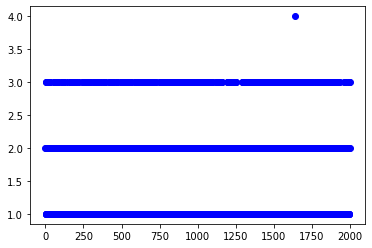

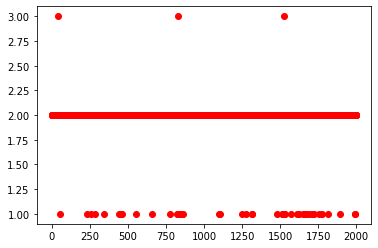

In [38]:
pred_out= np.argmax(predicts,axis=1)
print(pred_out[:10])
plt.figure()
plt.plot(test_y,'bo')
plt.figure()
plt.plot(pred_out,'ro')

out_array= np.zeros((5,5))
for j in range(2000):
    x= pred_out[j]
    y= test_y[j]
    out_array[x][y]+=1
    
print(out_array)

# print(test_y)
# print(senti_vector)

In [17]:
img_tensor=tf.placeholder(tf.float32,shape=(None,299,299,3))
target= tf.placeholder(tf.float32,shape=(None))
img=Reshape((-1,299,299,3))(img_tensor)
# model(img)
# img= model.layers[-1].output
# with tf.device_scope('/gpu:0'):
x= Flatten()(img)
x= Dense(128, activation='relu')(img)
x= Dense(128, activation='relu')(x)
preds= Dense(5, activation='softmax')(x)
loss= tf.reduce_mean(keras.losses.sparse_categorical_crossentropy(target,preds))

train_step= tf.train.AdamOptimizer().minimize(loss)
init_op= tf.global_variables_initializer()

In [18]:
sess= tf.Session(config=tf.ConfigProto(log_device_placement=True))
with sess.as_default():
    init_op.run()
    for i in range(10):
        train_step.run(feed_dict={img_tensor:input_x,target:input_y})
        
        

ResourceExhaustedError: OOM when allocating tensor with shape[89401000,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[node dense_7/MatMul (defined at /home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1080) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Errors may have originated from an input operation.
Input Source operations connected to node dense_7/MatMul:
 dense_7/Reshape (defined at /home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1078)	
 dense_7/Reshape_1 (defined at /home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1079)

Original stack trace for 'dense_7/MatMul':
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-ab83d631432e>", line 8, in <module>
    x= Dense(128, activation='relu')(img)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/layers/core.py", line 879, in call
    output = K.dot(inputs, self.kernel)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py", line 1080, in dot
    return tf.reshape(tf.matmul(xt, yt),
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 5925, in mat_mul
    name=name)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/yiyang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
iterator = dataset.make_initializable_iterator()
(img_tensor,target) = iterator.get_next()
# img_tensor=tf.placeholder(tf.float32,shape=(None,299,299,3))
# target= tf.placeholder(tf.float32,shape=(None,1))
model(img_tensor)
img= model.layers[-1].output
x= Dense(128, activation='relu')(img)
x= Dense(128, activation='relu')(x)
preds= Dense(10, activation='softmax')(x)
loss= tf.reduce_mean(keras.losses.sparse_categorical_crossentropy(target,preds))

train_step= tf.train.AdamOptimizer().minimize(loss)
init_op= tf.global_variables_initializer()


        




